# Product-native spatial SQL

> Databricks has 75+ Spatial SQL expressions under development, currently in private preview. This is a quick demo of some of those functions using a small [strava](https://www.strava.com/) dataset.

---
__Original Author:__ Stuart Lynn | __Maintainer:__ Michael Johns | _Last Updated:_ 10 FEB 2025

In [0]:
%pip install geopandas folium mapclassify --quiet

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

In [0]:
import geopandas as gpd
import pyspark.databricks.sql.functions as DBF

## Enabling the functions

> This will gracefully skip if you are running in an environment that doesn't support spark configs (e.g. Serverless).

In [0]:
%run ../../common/classic_enable_spatial_preview.py

skipping... environment doesn't support spark configs.


## Construct a geometry

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW pois AS
SELECT
  "General Wolfe" AS poi_name, 
  ST_ASTEXT(ST_POINT(-0.000767, 51.477798)) AS geom;
SELECT * FROM pois;

poi_name,geom
General Wolfe,POINT(-0.000767 51.477798)


See also:
- st_makeline
- st_makepolygon
- st_geomfromtext
- st_geomfromwkb
- st_geomfromgeojson

## Quick inspection of our data


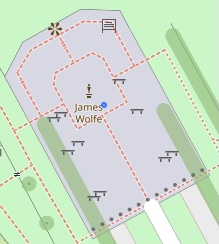

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAANugAwAEAAAAAQAAAPSkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQADv/AABEIAPQA2wMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP7IKKKK/Pz83CiiigAooooAKKKKACiud8SeLPD3hG0S78QXIgEreXEgBeWV8Z2xxoC8jYBO1FJwOmBXld9rfjfxhmMbvDumngopVr+VeOC65jgHUfIXcggh42GK7cHl9bEu1KOnfodeGwVWu/cWnfoe7UV86SeBtMlADX+sDHpq98P5T1DF8PtJh+5qGtHBz82tag387ivYfDNbpNHpf2DU/nR9I0V4LDoFxaqFs9V1JMf3rt5f/RhepHsfFe3Zb+JtRiGc8Jat/wCh27Vn/q3ieko/j/kT/YVbpJfj/ke7UV88SaL45f7njXV0/wB2HT/62Zr034eeJrvxN4ezrARNTsJDZ36INqieMD5lGThJFKyoCSQjrnnNcONymthYqdS1vL/hjjxWW1cPFSna3l/wx3VFFFeYcAUUUUAFFFFABRRRQAUUUUAFFFFdmC+N+h3YD+I/T/I//9D+yCiiivz8/NwooooAKKK8p1T4n291M+meAoBq9xGxSSfdssoWU4IaYA72GCNkQchhtfZnNbUMPUrS5KUbs1o0J1ZctNXNDVfi/wDCvQfGbfDrXPEWnWeupp7aq1jPcpHOtijbTOVYgiMEY3dOPavLPDv7QOifGaPUE+BOo2V7ZaXeSade6mWEoiuYceZEkAIbeucEymMLlWVZVr8vvDlr8T/iZ+0B4X+O37XXguH4ceM9IlurHQ9Qj1K2v1v4PImZrRLCFGdkiBe4WRnZ0Izu24WvRP2L7H4h/C7WtC+DXwf+GVu/ws1CKe/k8cR65b3smozvHuF3JGiqxMzKqbcfICMYVNtell2Cj7WH1hXV7WtL+7a6tdLXVu0bLRu59nQ4ZpQhz1XeSS0uuXrfXrsrJH6O6T4Z0/S7uTVpGkvNRmXZLe3J3zuvXbnACJnkRxhY1P3VFdEfLjTzrh0hj3KnmSMEQFjgDJwOTwBXMR+Iv7YutY0DwrEz3+moyC6vInj00XKMFMRkHzuy8kiNccfepB4VsNUt9KuvHKw63qulGRo7lovKhRpG3fJbgmMFcAKzAtxnINfZRrXXJhYqy67RXS3/AAy+aPcjl8KCX1p8i/lS961rrTRJbLVp66J2LNtr1xdXWr29voupOmlI4WVo44EuZoztMcIldGb2faFOD7ZqyeJb+Hw3Hr8vh3V/MecwGzjjt5J1UDPmECcDYeg5zkdMYNdXJJJK5klYsx6k8mmVfsK3/P38F/l8gWKwy/5h1bTrLt6pa77Ly0PEPjl8QvFfgfQNOtvBmnXMGpaxqGh2MV9qFj5+n2n9rX1vaN54iuYnLxLKfkVwC+BuxXhGufFj44eFta1DRvE2rvaLpzKrXS/DTXbq0fcyqCk1tqcqFfmzkH2+98tesftVXlxp3wmt9Qs7SW/lg8SeFpEtYCiyzMutWJEaGVo4wzdF3uq56kDmvheL9lLQFkUyfDXxVt740b4eZx7fuqmVOqn8f4EOtQdrUktur/rsuytsffvw78RfFa3+LHiX4W/E++0rUm0jS9K1G3uNMsJdP/4/5r6J0dJbu73bfsilWDL94jHSvVTet4R8X2viZeLLUTHYX47KWJFtL3+7I3ltgD5ZNzHEYr4V/Y20efwN8UPFPws1bRrvw7Nofh7RoLK21GKwtrm6tBqGsy+f5WnO1tx56qxj+8QWOSd7foDqWm2OsadcaRqkSz211G0MsbD5XjcbWU+xHFTKEMXhnCXX8H/wDkzDA/FQns9n5dGj2WivP/h1q97d6M2ia1K02oaURbzSP96ZAP3c3AUfvExuIAUSB1H3a9Ar86q0pU5unLdaH57UpunJwlugooorMzCoI7m2lmkt4pFaSLG9QQSuRkZHbI6Uy9vbTTrSS+vpBFDEu5mbgACvk3xH8a9G0nxvb+M9HtJWtvK+xX5JC+Zbglonx28ly2CTgJI+R0xLnGPxMqMbn15RWD4b8SaV4q0tdX0dy0TEqQRhlYdiPWt6mn2JCiiimAUUUV2YL436HdgP4j9P8j//0f7IKKKK/Pz83CuD8S/EPQ/Dt5/YsCyajqm1WFjaANKFbozkkJEnBw0jKGwQuW4rG+JGs30k9l4I0Sd7e41DMtzNEdrw2cJG/a2DtaRisS8qwVmdDmOsrSNF0zRLb7Do8CwozF22j5ndurMerO38THJJ617+VZN9Zj7Wo7R/P/gHs5flfto+0qO0THvbDxH4xB/4TqdFs2/5hdmT9mIx0mkIV5+4KkJEVOGjJG6uotLRY0jsrGIBUAVI414AA4AA7AdhWO/iHSTql54a02Rb/W7O2e5/s2FwJSExhXc/u4skj75B9AaybrQL7xholgnjcvYSwSvJNY6ZcstvKpIMazSgLI5THIQqmT7Cvp6TpUY+ywkLtdtvm+/lv5H22GymNGEXV/dw9PeatdNR0bTtZP4fM8D1n4KfDfxh+1RF8fLC+vNW8YeC9DuNMtNMMuzSbaSZiGZpPLIS4ZXZGAY5UYIBUVgfs6/sl/Df9nrQY/hLd6ndawNW1S+8Q6bpTvJ/Z1rIRGZreJcqJFix5kauuQCxIJNfadxdTXTl5T94lsAYGT7CuJ8faZqer+FWGiPLFf6dIb21e1jje53KjKyQmThHdTgMORjgHgVx4rLYxi8Q4qUk27W06X06uyXlotD2cuzCPtoYem3Ti1bmv7ydmlqlpG72STs2uY7W4uZ7uXzrli7epqCsbw7rh8S6Fba5JGkE0y4nhSVZhFMANy70wrdQcqMc1s17VKpGpBThszwK9CdGpKlUVnHT7gooorQyM/UtJ0rWbZbPWLaK7hSWKdUmQOolt3WWJwCMbo5FV0PVWUEYIFaFFFAHD+JNK8KeHL2b4xTWpF9plugvTZwR/a7yzhfPlmU4bZCryMUzgrkYyBXbJLbXEaXNk4lglVZInXo8bjKsPYjBFSxuYnDgA47EZB9selYekjxDDeX9j4jubeVDO02lbWjSVrI7cx+UoHFux2bscgrXEo+xrXXwz/B/8Hb19T0+b6xhVF/FT2846aJW15Xrvs+0dKeqXx8K6tbeN0wsFuPI1Dtm0b+M9P8AUNh8npH5gAy1e+15I6JIhjkAZWGCD0Iq18NNQltLefwRfHMmkhfszHq9k+RFz3KbTE2TuOwMfvCvA4iwO2JgvJ/p/l9x8XneE2rx9H+n+R6jRRRXyZ84eU/GiO7k8AXP2X7qvGZAP7gYf1xXxFJFHNG0MyhkYbSpGQQe2K/Sy6tbe9tpLO6UPFKpR1PQqwwR+Vfn74x8NXHhPxDcaLPysZzG396M/dP5frXFio6qRrB9DX+AXjN/CniR/CupyHyH2RbmP8Lf6l/0KMfUE9MV95V+WOuRyW4i1q3UtJZ53KvVoWxvUD14DD3UDvX3/wDCfxonjLwtHNLIJLm3ASVs53DHyvx2YfyqsNP7IVF1PT6KKK6zIKKKK7MF8b9DuwH8R+n+R//S/sgqvdXVrYWsl9fSJDBCheSRyFREUZJJPAAHU9qsV478TLs65fWnw8tyDHPi71HHa0jb5Ij6efINuCNrxJKvXFfD4XDyrVY0o9T8+w9B1akacepzvho3OsTXXjjU4jFc6wUZI3Xa8NpHnyIiMZBAJd152ySOBxipPEiS65GfBugawNL1N1jurgx7luE08PtdomUYWR2wiZI43EdK6W4eS2sLrUlt5rpbSF52it03yuIxnaijqzdFHrWNoFo5tf8AhItX06HTtc1aKGTUlhZmAaNdscfzE48tMKQuBuya/QJ0koxwlPa2u/w7dOr/AMz9My6nHDU/rH8llBafF0un9lLV6b8q6m8wtlnuJ7SCK2N1J5svkoE8x/7zYA3N7nJptFFd8YpKyRxSk5O8mFOR2icSRnBU5H4U2imSc3aW7+H9dnSe+t7fSNWMK6fYnKmK+jjIkjiXG0JLGgfGf9ZnA5rpKz9V0bRNbsDB4hjV7a2kjuw7yeSsMtud8cnmfwBSOT/dJrl9I8bav4r0bQ/E3hbSYrqLVCzXcr3IW0tDE+yVQQC8pyDsCKBjBz1rzY1YYabovbeKV299Vbsm9PLske1LD1MbTjiI7q0ZN8sY6R93XTVxi79W11bsdhfXdnpemz6zqkyWtnbLulnlYJGg6ck8ewHfoK55fFttdwaPqehadf6lper8Le20BIiO/YN8LbZhGcZ8wJjGOMVfs/D8Njq+o6rc311qhvztEd2VMEEIbciRQKBGNuB8xBY4zkVvGaUyecWO/wDvZ5ra2InrfkXbd/5Wt0X3nPfB0dOX2j735Y2t0Vr3T2b00+Erwz2V2Z/7OuYbtbaQwytbyLIqSLwVbb91h0wcGpK5vUfDNtKmraj4YWLSde1S2MA1OFFWQNkMpfjDDcBuJBbb36VraZdte2Eb3MtvJeQ4gvktX3xw3kajzo/bax6ehFXTqz5vZ1Vr0ts/+CZ1sPS9n7ahK8dmnutF20te6T021S0L1c54j0/TtkHi+e2uLq98OrPd2kVswR5QYyskJyCCsi4yOuVGK6OnI7RuJEOCvIPpitK1JVIOD/4a233GGFxEqFRVI/5XTVmvRrT0M/S9T0/XNLtdc0h/MtL2FJ4G6ZjkGRn0I6EdjxWTrrXOk3Fr4w05Gkn0sszxoMtLavjzowByTgB0UYzIiDpVyxOvp4gv7bWry3ksr1kl0eLciTLsT9/AsYxuWPaJFIHCtz7ReI9eHh21ikgsbrVrieVreO1sEEjiRACRI3CQhQRkuRgdq5JVKc8PJYjTo/y0Xnuvkb4jLHVq+wormjJXXo13sl7uzeiTT7Ht1hc2+qWsN7pzieG4RZInTkOrDIIx2I6Vxeu+ODbWENx4E09vFc81w9rtsJoxbwSRBSwuJ8lIsAjjBY9AK4Twvpk8Xi7UPAuqahv8PTWE32TSI4lWOSCc7ZhJNkyHyS4UJHsRVZAvQgey6Po+keHtLi0TQLWKxs4BiOCBBHGv4DAz6nqa/P8AE0HRqSpy0t/S/r8D46ph8Fl8/wB9++no+VXULW2k/dk2tNI6dpHLajay+Fda1L4k+LPEl5Jo1hDI66ZawYto4duCXVcvNIpwwc4wAcACuR+Nng0a3oP9uWS7riwG7I/ihPJ/L7w9s17bBM9vMs0fVTmsCzu3jvptA8Q6xDqWqS+dfRwiIRSJYPJtjDKOG8s/uy3fjNYzipwaMa1eWNoKbS56StZJL3PSMUvdd+aTd3dH501vfCDxafh54y/s24J+wyr8o/6YMQCB/wBcmxj0QgCuh+JPhE+D/E0lnCP9Fm/ewH/ZP8P/AAE8fTFeUa1Z3Fxbrc2P/Hzat5sQ7MQMFT7MCV9uvavI1hI8xao/UZWVlDIcg9MU6vC/gR48tvFnhWPT2k3TWiDZngtD/D+K/dI7YFe6V6cJKSujBq2gUUUV3YL436HbgP4j9P8AI//T/rp0Lx1pep+C38ZaqP7OjtI5TfxynJtZLbInRiBz5ZUjcOGAyvBFebeFoNSuY5/EuuRtFqGryfaJIm5MCYAig6sB5aABtp2mTew+9Vb4l+H7qy8W2N1FIItE1y5i/tSPHD3dqubU5GNol2qkjE/N5UMQGHOezR2icSRnBU5H4VwcOYWKjLEfJeR89kuHiout309Dl7i1tfEPiG3ubW+nij8NXTie2EbRpNemMbP3mRuWAMcqBjeeeK6Ykk5Nclo1p4c8D358JG+kU63Pcajp1u8WIYd7qstusgJGTId6KQODjriutr2cC7qTl8d/e8uy+63+SPss1XLKnGF/ZKPuXVrrq9l9q997bXaSCiiiu48ociNI2xBk1zd/4iaJbGTwvYt4hW7kZGktJkW1gERCv5s/KqR2QAscY4qv46voNP8ABl+bmw/tNLryLI2pZoxILuZISNyfMPlcnj0rqI7HT9KhXSNGgjtLO2ykMEShI0XPQAcf41x1JTnUdGErWSd+uvbS3R/5HpUadKlQjiasOa7aS2jole9mpfaXZefbFHh4nVNVk1+/OtWF/mKLT5oESyhhDBlBi+bzJBgfvHOfYVuliUSPosahEUcBVXoAOgA7AcCkoralQhT+FHLXxVSrZTei6JJLa2ysunYKKKK2OcK5K6m0Xwl4hguILGUnxXdx211cLJ+7huoo9tu3l4/5bDKM2Ryq5rraSUXMtlc2FtdSWRuoXg8+E4eLeuA6+69R9K58RScopx+Jar+vNaHZgq8ac3Gp8ElZq7WnTb+V2kl3S0FIIODxisXxRr9j4Osre71iO4ke7fyra3tYWnuJ3AztRF9ucsVXHevn+1/af+E2k62+geMvib4Hjgs7c2l1cW2tW5vbi58sK0iZdVt9rHnhjuBxgdOq+Ffxb/Z2vW/4QD4Q+MNE1S6uWe5ktrLVYb27uHwN8j7ZGdzgDJ6DHQCsI4ipWX7pcq7v9I9fvXzR0vDYfDy/fy59tIbNecunTRRemnuvbv8AXvCN94k8SwS+IJoodH06WO6sobMst8ZwvJlm+7GOWRo4wdyn7wIBG54f0LRPCejroHhi1jsbJW3+VFnDOcZZicszcfeYk1q0VrSwdKE3UteT69f+AvJGNfMq9WlHDuVqataK0WnW3V+b7nP+IbO/kgh1XRRnUNNkFzbDO0OyghoyegEiFoyT93duxkCvZdF1ey1/SbbWtNJMF1GsibhtYBh0KnkEdCDyDxXnVU/Bt6fDniebwzL8tlqpe6tD0CXHWaIdB8/+uUcknzSeAK8XiHA89NYiK1jv6f8AAPlc5wnPBVY7r8v+AeyVTvY9bZI5PC8Vib7zI42kvFP/AB6F1M6K68qSoyvVdwGR6XKcjFGDL2r42Lsz57C13RqxqJXt06NdvQ8w+KXhS28aeFzNo7JdSwDz7SSIhlkUjopHBDDpjuBXw5X6OaFpU2mJcaFpGiw6ZoWmxw/YJIJARJ5m4yr5fVPLfp2IbjpgfH/xi8If8I34lN/aJttL/Mi4HCv/ABL/AFHsfauPF0re8jfFUY0qzhB3jvHbZ6q9rpO266O66HlPgXxJP8PfG8V7Fn7NcuXCjpk/62P0+YfOvuGPYV+kdrc297bR3lqweKVQ6MOhVhkH8q/MTVbE6hZNDE3lyrh4nx9115U/T1HccV9V/s6+PV1vRm8NXvyTW+WRCc7cHEkef9humOo6cVGGqWfKc01pc+l6KKK9nBfG/Q6MB/Efp/kf/9T+wPxN4d0/xXoNz4e1TcIblcbkwHjZSCjocHa6MAyHHysAe1eQeGNUvL+ylstY2LqWnStaXqoMKJowDuUZJCSIVkQHnY65r3yvH/HWnDQvEFv41t1/cXfl2N/joMti3lx/suxjOByJAWO2Pj5zIcb7Gt7KXwy/Pp/kfH5PivZ1PZy2l+f9aHM+N/DOp+KtFS20CWe31G1kEsD2ZSK5kH8UKSsreWH4JIH8OMHOK1fDXiG28X+GrDxVabQt9FvZEz+7kUlHQggEFWU8EDFbQJUgrxisW0h1qHxQ2laXpUS6NeQS3jXFumGS/DZl83nH75SCpAHzKRX1c6fssQqy2lo159H5dn8j9Dp1lXwbwskuaHvRei0+1Hz6NejXY2aKKK9A8gxdduPE9ommXnhy4S0gg1S1k1OaSWOJU09Q/mZ3kcFtgwOea3HRonMbjBU4I+lUdR03TtZ0640bV4/OtLyJoJk/vRuMH6HHQ9jWL4b1LTWe78G2n2gz+Gxb2kj3RDSTxNGDDPlQARIAR04KnNcd/Z19XpPb1S2Xy1PS5fbYRci1p72X2W1Zt+T93bS6OmooorsPNKWpalp+jadcavq0yW1paRtNNNIwVI44xlmYngBQMk9hXiv7Nvxwsf2hvhJYfE21hs7SW4knhuLWy1CHVI7eSGQqF+0Qfu2JTa+B93cAelel+OfEGheF/Cd7rPia2uruwRBHNDZWU+ozOspEeFtrWOWaQfN821Dhck4UEj5T/YK8NeDPhp8BrL4O+ELPUrU6A0z3DX+kajpiyNeTyyqY21G1tWmIXhtgOzABwCueKdWaxUKaa5eV6ab6W/C/4+Vt4wXsZStrdfdr/wAA+2KKKK7TA+VLX4EeBPh/8SPEvxQ1zSrbXrXxlqOnW5t3tV8vSIUgWDeiHeHDzqGcqsZHmH73Wu58FfAjR/AHxb8SfEWxaBYdXt7G2tdPjtliSwa0EolaNgcfv967wqJ/qxndxj3iCZ4HJR2TcpUlDtYBhjg9j6elcv4XW+sNMTwz4h1WHVdY0xFW5kQsZGhct9nkfcB8zxgbsZ+YHmuKK9nW5fsy220fb57/ACZ6DSrYbnXxQ0e+sXs+yUdI9N46HRUUUV2nnhWLr+mT6pp+yxkEF3AyzWspGRHNGcoSBglc8MARuQlehraoqZRUlytaCaTVmdt4V8Q2/inQYNagTymkBWWInJimjO2SMkcEo4K5HBxxxiuirxTQr3/hF/GXlt8tjrxAb0jvY1wp9hLGu3sA0agDL17XX5tmGDeGrun06eh8PjcN7Cq4dOnoYutafp88cOvXNnNf3Wh+be2UFvIY3kmETL5Y5AO8Hbg8ZxWN438Mjxp4RNlJA9tLPElzAk42yROVyFYdiM7W9Oa7RSVIZeCOlYNtLZaVrj6G9zqN7d6w9xqMZnBlggWMRq8KPj5FGd6IegJx2FcllKPKdVFvE4b2O8qabjv8O8kuiS1l95+eE0MtvK0E6lHQlWU8EEcYrP0jV73wX4vt/EOnHYszqGPZZQNq59pF+Q+4UDrX0N8cfBw0vVU8T2KYgvDtlx2l9f8AgQ/UGvnm/sodRs5LG4zskXGRwR6EehHUHsa8iUeSVjiiz9J9D1e01/SLfWLE5iuEDD29R+B4rVr5E/Zx8eTHzfBmskCUOQuOAJVALAezrh1Hb619d172Wz5nfy/yN8ErVWvL/I//1f7IWUoxRhgjjFUdS06x1jTrjSNTiE1tdRtDLG3RkcbWU+xHFYfg2fxrdaTcJ48t44r6zu5YBLDhY7m3GDDOiAnaGU7SOzKa6mvgNj4LGYWWGryouSduqd010afY8G0GS+tPP8Nay5kvdMYRO7Y3TRH/AFU3QffX72AFEgdR92pPE/huPxhoE/ht7p7BpmjeG6jGWt54WDxyAZGdrAZGRkZFbvxJsRpLw/EC2GPsK+Vf9g1kTkueg/cN+8yeieYAMtRX6Dl2JjjcLy1PRn2OUZjO0K9N2nFr70Zmk+INJ8TW0moaO7MsM8trOsieW8dxAdsisnO3nkD+6RWnWN5Wtw+KrS20XToG0zU1lN/NEgSWO8jUeVLI2fmWRF8rpwwBrcSKSSTykUlvSu3DTk4uM946f8FfL/I9TG0oRmp0vgkrpXTt0s7dmuy0s+oysvV/+Ena50280W4his7WYjVEnKRo1iwwXMjDg27fOoyAckUz+3rD/hK5PBUEU89/FCZJXWMi0tmKb4xPN0G/gAIHbnoKxY/Cz+ItCi074ri11t47sXawQRvDZx4XATbu3TKOuZfyrCvV9rF06Ku112Sat1/RJ9mdmEw/1aUa2KtGLXwtXbjJNXUdFtqm3G2jj0O0kQRthWV1wCrIQysp5BUjggjkEdqZxkLkbiCwXI3bRgE464BIGenIFctoWo6XZancfDmzS5D6LbQywy3Th2uLSbOGXaFAET5hxjgKteH/ABP1rVNJ+LM0vhyxm1a+tfCMkU1rZySpcwxX+p2UZmH2b/SMxQ+bcKsQ82RYisfzEEKpjlCgqttdmvNbr5HLVwLhWdLpa6feL1i/K6t6bHuvjLwj4e+IHhDVfAXi63+16TrdnPYXsG5o/Nt7lDHIm5CrLuRiMqQR2Irzb4Dfs6fBv9mPwhc+Avgfo/8AYmk3d49/LB9onud1xIiRs264kkYZSNBgHbx0614rZ+Gv2ita8FfYL298R2q2Oj+N5rBoJbmznnvEu7I6GZd8slzIfJabyYrmR2ZQVlDbStbHjnw58e9BD6ToN7rMuiPd6Jc6ldSPd312IZLa+S/Fv9mljvMfao7FpIbN18tGfy0CFkPG8wi5Ks8Pqlo9Lq6v20XcaoO3IqmnbpppsfRXxA+Ingv4V+Fp/Gnj+/TTdMtiqvK4ZuXOFCqgLMT6KCfwFHgD4i+Cfil4ah8X/D/UYtT06YlVliyMMOqsrAMjDjKsARxxXxb8W/gP4/8Ai5beDfA3iTxHrWsym2tJHvX0q80+DT57ZLh1vpEkP2OZ3Vkimgn2XgbBR8M0R9++Cfwd0D9lT4STaVe30+oCa8a8uroW7b7i6udqKI4E3kZCKoAOMjJIr66hVyieSvFTqyji1O3I17qhbe9rf+TeXL1PI9jj3mMcPTpqVJrRrfmva1t//Jfn0PomuV8RS2ehahB4qsNLfVNWD2+lXCW7M00VldPu3NEufuMu5S4AxnmtGKfxVPrGk63pkiaXpYiSee1uIQ+oPJz+6cZMcK4xypZ88cUnh7w34e8I209n4Xs0so7p/MnKlnklb1kkcs7nnjcTjtivnqnPiFywjZd3+Div87Hv0FSwb5qkuaVrcsdrbOMpK1tOkeb1VrG4y7WK8HHHHSm18xfFD9pq3+GHj+3+HLeCvEmuXt7C09o+lxWbpcrEFMvlLLdRSN5W5fMwmFyPUVx5/bHMHiDS/DGqfDHxpYXmszGCzS5t7CMysi732Kb7c2xAXbaDtUE4wK7udHk2Ps2iivK/i3rt7o/h5ILBjG10+wsvBCgcgfX+VZYivGjSlUlsjOc1GPMzrtXfQtetJdAe9jSWTAQxyL5scikFHTrh0YBlOOCBXp3gfxFN4j0IS6gFS/tHNtexp0WeMDOB1CuCHTPOxlNfmuCQcjjFfQ/wh8ey6frUT6jJuS48uzusn+8dtvL/AMBdvJbAyQ6EnCV8bjcYsdG3JaUdvTseFmH+0U7295benY+0arahb65qOlTaP4e1M6RdTmPy7oRLNsKOrY2NgEMAUPTg1ZoHHSvBTseDh60qNSNWFrxs9UmtPJ6NeTVjldSTwt8S/DEw0W4W50688xI5lB+V4mKnhgCCjrjHHT0r4H1PTbvR9Rm0u+XbNbuUYe49Pb0r9FZZ9Qh1XzNRvLC20udY4bSE/urhr9i7OAeFfzE+YAfNlTxXzp8d/B5/d+MbFOABFc4/JG/9l/KufF0tOZHXjKMKdS9L+HLWPp2vZarZ2VrnydNdT+HNatvFNi3llGRJWH8OD+7f/gDcH/ZJJ6V+hOgfEbw1q+jW2o3NzHBLKgLxk42sOCPpnp7V8FTwQ3MD21woeORSrKehB4IriG17WNFP9lSabdX3kfKJ48EOv8JJJHzYxu/2s44q8qnao/T/ACLwSvP5f5H/1v61fHFroXhnUYvjTqb3a/2BZzQXcNogka5spSOGBK8QP++yOgDV6PDPb3UEd1ZyLLDKqvG6cq6MMqR7EYIp5CMCkqK6MCrIwyrKeCCOhBHGK5Hwt/wlNrfaponiKK3jsrabdozweXEHsCBiIRJyPsxxGTgAgrXwB8o5fXMCuZ/vKK0u96d9ElbVwbb3vyva0dOsdElQxSAMrDBB6EV4RollceH7648Dz5b7BtNo3J32cmRF/wACTaYjyWOwMfvivWLzxf4W0/xPbeCLu9T+2bxGeCxjBeZgqlskAYjUgcNIVX3ryDxloXjPxh4Im1vxlYf2ReWUvmR2ek3Je7aw4+0QSzouCzhQwSHAYoqlu49PKsc8NVutnpb8vT/I68mwdShJVsU/Z0pW+Ldp6JwjvJaPVe6tm0ZvjPU/BGopqPww8SXLfaLqzdp4Yg2bdQu+N5ZApWH5gpTdyWx8pzXi998T7HXfBsml/FG3m1IxN5zQaQWhFwsSYEcrM8bTbz8xH7td3bFeifFq783wFZx6MymwDQKnlncphVCI/mySwxjBJP1r5er0s1xFWGItK221tGuife367H0tfPZ4aMaGCXKlZ3esubq47cl7LRXei94W/wD2q/Cnxs8C3fhCb4Q+MfEHh5t2nXFrDa2EluptyFaBgl/hWjIAK8FSMHFfOf7HH7O37O/xS8FL4W+Knwl8jxR4fj+za1qF1Bbx2r3wwWiUW05KyKjIxRoo8KQccivtP9neDw94Cur7wno0H2aDWLy41JvnZt15cHfK3zE439cDAGMACvojwn4C8J+B7jWLrwtafZZNf1B9Uvzvd/Nu5ESNn+cnblI0G1cLx0619Dga0MRTjUj6W7HJTre0XMfPf7N/7PGs/s//AAsh0Hw3FpNhrj6rLe6o1kBDa31l58ojidjGm0x2jpghBh0/i+8fR/ip8XNL+F0v9q6fZ2l/Frei6hfWdzCdrajqWnrbJYWhdBh/tCTssRJJURkDjivcI5HicSRnBXpXh/iDwl8I2vtG8BeJ7J7Oy8I3sHjHR7m4utkCXFtJINucLhLd5hiMn5gVPYVhjozpa0pWvbfZNfgrq/4Ht4OKxFL2fLeUNkkruL383yu1kk9G+iOe8K/tFWevtZWlzo8r3k1jpsc1lYlZLka9dtei40+PznhhH2RNPuJJXlkQBApz2POePf2mNV0jRr7UfAOh/wBoeXZ6cIY7iILcwajdazLo1xFcRtdQRsLaWMqUjkUtIvEvlnevZR/C3wje+Xqfwws3hsvEmut4vn1+O78mW21CRTbzNaxSRuxMkfmgpJGYCJpMg7zjqdI+Bvwz0SJ4oIr66eR7WSSe5uS0sj2mpnV1duMbpL1mllP8W5gMDGOKH9oVYcsJ/PZbaW01+WmwVaFCg17VWf8AL1VnZpr7L02evkcdpf7THhzxF8SLT4Y/Do2Woa1byvBdC6aKGO5udN2/2hBBCt1NNbtGPMIe4BiPlsqSSYBb23w94d8PeFpbzUfC0rXDasVmmv2nNzJdJyUPmkkbAD8oXC4qj4a8KW3hDX9R1vw9fX1vb6pcT3k2m+YjWIu7o7ppkUxmVWkfLsol8vezMEBNU/D48N+EdUX4X6NDcQoLeTUrMzMGjMUkp82GLABAgZhhTk7Wz0FddClVp1IzxTT6L+72t66q+nRGiq+1wtSjhvdtZtL7UVvzd+R2aVu72St2lFFFe0eEcfqvgLwnrfjLR/iBqlp5ur6DFdQWE+918qO9EYmGwEI24RJ95TjHGOaNd8BeE/EvibQ/GOt2nnaj4blnm06Xe6+S9zE0Eh2qQrbo2K4YEDqMHBrsKKVgCuL8e+G/+Em8OS2cQzPF+8h/3l7fiOK7Sioq0o1IOnLZkyimuVnwAQQcHjFXtNu47O6D3CebA6tFNHnAeJxtdeMdVOK9H+K/hdtG1s6tbLi3vSW4/hk/iH49RXlNfnlalPDVnDrH+keLKLpyt2P0P+F/ih/EPh1bS+m8+9sNsUsh4MyEZimxgf6xMFsDaHDqPu16TXwV8K/GzeGNTjvbh9sFuNl1k4Bs2PLHoP8AR2PmAn7sZlwMkV961hiqaTU4fC9vLuvl+Vjw8bR9nO8dnt/l8vyK11ZWl9Gv2i0t7uW3dbi1W5XKJcxcxP0JUq3ccgVVm0y/1jw5Ha+MLSO3uL23UXdtE/mJFIyjeqt7E8H6Vp1iW2mWumeIf+JBo0kkmvyvLqN7HJ8kUttEBEzxk/8ALRV2ZQD5gM5rBarlOjCv29CWGe696Py+JatJJq70TbkklufA/iXQbrwzrlxol396BsBsY3L2I+orCr64+OfhA6npCeJrRP39iNsmOpiP/wASf0Jr5HrHBQ5K7Xl/kLAP3/kf/9f+yCvMfit4U8Q+I/D0d/4FG3xDpjF7N0ZYpXhlwtxAkjcRGVBw/UFQOATXbeHtd07xPodp4h0hi1teRLLHuG1gGHRlPKsOhU8g8VtKzIwdOCORXwG2h8PlmYVcBiqeKpJXi9ns1s012a0fkZ9hYaRZRJLpASQNBFD9qDCWWeOEbU8yblpCAOpY81erzDwv/wAIr8PvEX/CqNN+0r/aC3OsWIl2/Z0V5P31tDjn9237zaR91+vFen0Nm2c0JU8RzczlCS5oSfWPT7rWt0asfOmo+HLSwvb/AOHN2oWxuo2ubDH8MJYb41H/AEwkI2gAKsbxqOhr5C1XTbnR9Sm0u7GJIGKH8O/0Pav0O8f+H73WtGS70VQdS06QXNoCQodlGGjJPAEqFkyeFyGxlRXyx8UdKtNc0m08faLlopUQSfLtOxvukg4II+6QRkcDtXvt/W8Gp/bp6P8Aw/8AAO/DVfb4dP7UdPkeHW9xNaXEd1bNskiYMjDsV6V9r+FNfh8S6FBqseAzDbIo/hcdR/h7V8RV6z8JfE/9ka3/AGPdNi3veBnosg+7+fT8qeS4z2Nbkl8MtP8AI6cLV5ZW6M+p6dN9nu9Pk0nUIIbq2lKsYp41kTcpBBwwIyCAR6YFUNSvH07Tri/jgkumgjaQQwgGSTaM7UBKjcegyQM+lfGujftoN4ijuJfD3wt8b3yWlxLaTm3trCURXEB2yRNtvztdGGGU8qeCK+0ly25ZHsQbi1KOjR9su7SNvc5NNr56+C37Qtn8atV1bSrDwtrmhHRX8i5k1RLVUW4G0mD/AEe5nKyqrKxRguFIPcV9C1SaexIVleIU8XXGhSW/gaaODVUdJbfzQuyTYwLQsSOFlUbTjHOK1aUEqQV4xUVaaqQcHpft+hth6zo1I1Uk7dGrr0a7DVnsbtBd6ZNFcW8mdjwuJE4O0gMvB2sCp9xS1xli3h3wf4ki8GabazxDxE93qUMhcNCt0oUzQIgX5AUHmgZx94D0rs6zw1VzjaXxLR+v/DWNsbhlSmnD4JK8b9Vt07NNfIKKKK6DjCiiigDnPFfh+HxLoU+lSY3MMxn+646H+n0r4nuIJrWd7W4UpJGxVlPUEcEV99183fGLwv8AZL1PEtouI58JLjs46H8R/Kvns+wXPBV47rf0/wCAcWMpXXOuh45p97Npt7FfW+N0Rzg9D7EehHBHpX3R8GvFUOr6F/wj5JL6eiGAsclrR8iLJ5+aPa0TZJYlN5xvFfBdemfDfxTceHdXhvIgztaF5FRRlpIXA8+IADJLKquijGZI0HQmvl6S9pF0fu9f+Dt9x5Fal7Wm4den9f10P0Mqhq2k23iDSLrw/ezz2sF7GYXltZDFMgP8SMOhHb/CprO7tb+0iv7GRZYZkWSN0OVZWGQQfQjpVmuHY8SjVnSqRqU3aUdV5WM63vrPxFa3WLS6ghinnsZEvI9jOYTsLDsyOPmVhwQe3SvjrxH8IvFVlrlzbaLaPPaB8xOMfcPIH4dD9K+rfE2qXejappXiLUNbjstIWWKxu7We3eZZDO4WFkaNh5Tbm2lmBXGM1w13dftEQ3UkUFh4ZeNWIUm5u1O3tkeUcHHWuvDwTqX8v8j6ihlim1i6M4qE1om7WfWOqSdtNr2Tif/Q/qH+Ani3w7faNpWpeFUu4PDvjO0/tnSVv5DJPFO/zXMDuzyZZyfPUb2ZiZj91a+ma+fvBfwXv/BHwC8OfCm1vo59W8L2luLO+CmOP7Xa8oxHLCNvuSKDlo2Ze9eweFfEVr4r8P22vWiNEJgQ8L43wyxkpJE+OA8bqUYDoVNfC1+Xnbhsfn+I5eduG39WK3jW38WT+GbibwAIP7etgJbEzojBmBBeIFx8vnIDHkEdRyK6WCeK6t47qEqVkGcI6yBWHDLuXKkqwKnHcVKCQcjjFeYaGnhf4e+Lf+EDshcofE0t3qtrv2/ZkmUKZ4Iscjj98FIwATisun9f1/SPUwsfreDlhkv3lO842Wrjb31ftFLmStp7x6fXgevaLaaN4juvDt0v/Et18SzwDoFuDzPGOmC/+uUcknzT0UV75XK+MvDz+JdAlsbV1iu4ys1pK2cRzx8oTjB2k/K4GNyEr0NduXYv6vWU38Oz9Dz8DifYVVLps/Q/OvxDotx4e1mfSLnrC2AfVT0P5V5x408d+HPh1o3/AAkniiWWG1WRY90FvLcMGbp8kKO3brjAr6v+I2nx+KvC9v4ysoTFPbbo7mI43psYo6NjjdFICpxx17V8teMfDFh428I6p4M1V5I7XV7OeymaIgSLHOhjYqSCAQDxkEe1dONwqoV+X7O69D3qlNQnbp+h6J4Y/b9/Zzv9HhfVNT1JbpFCyhdD1Nxkd/ltCOete5fAa/8AhFrPhK+8R/BiKePTNW1S8v7g3EF1bvJe3L+ZO+y7VJAGc5wFCDooAGK8H+Hdvpuj6Q3w7u5ZV0rULH+y5XyBIqFPLV8427gPbHPSvrb4e+CtK+G3gHQ/h1oUkstloGn22m27zkNK0VrGsSFyoVSxVRnCgZ6AdK+uyzF/WKV+2h6lCqpx0E8J+AvCfge41i68LWn2WTX9QfVL873fzbuREjZ/nJ25SNBtXC8dOtdhRRXpGwUUUUwM/WofEF74fvdL8LXv9nahPH/o1xgYSZDlM5B+U42Nx91jVm1uo722WcSQPKv7q5S2kEiQ3MfEsWf9h8jnnGKnrkJJNE8JeJoorSymH/CW3R8+cPmGK+ij/d/u8cG4VWy2fvIMiuOs/ZVFV+y7J/pp66enoelhY+3oyw6XvK8o2S6L3k3ppyq6WuqslqdfRRRXYeaFFFcz4x8RT+EvDF54jttMvNZe0TeLLTlR7mbkDbGsjxqT35YcCgCPxh458E/DzR/+Eh8f6xY6Hp+9YvtOoXEdtDvbou+QquTjgZrxbW/2l/2UNe0qbSb34k+Fdky4z/bFn8p7Efvexr538dftIx/H74OapoXhn4aeNprTxDp1xDY6ra2Wn3ccMk0bJHcQlNQAYxMdylXXkcEV3nwNsPhh8dvg/cW2j+D5NGaC1OmR6rqVjZb550RoZJojbTz5aORTvzICHGM5BxjK0ly9GPlVtTh9G8ReF/E9vJf+EdUs9Ys0kaL7TYTpcQFk6gPGSv61uQTS20yXEB2vGQykdiOld/d/BiL4ZfC/w/pFlMt7NothbWN7diLymu5Yo1Rrl1y3zSMMtlmOTyT1rzuvgcbhZYas6f3eh4dan7OfKfbXwP8AFsN7Yt4YbCqqNc2aj+GLIEsQHpC7DaMACJ41HQ179X5weBdf1DRtVh/s7meOUTWykgBplBXyzngCVC0WT90sG6qK/QvRdYsPEGkW2uaW2+3u41ljJG07WGeQeQR0IPIPFc+KjzWrLrv6/wBa/wDDHjY+jaXtFs/zN6zuTaXCzDt1rlLHxb4S8N2UWi/E3xLYSa5Ag+1OpEAcsMq3l5+XKFSR09OK6GjZaNzNbQSN/eeNWP5kVeAl7zXl/kdWUYiEealVjeO+lr3Wm9ttdV107I//0f7IK8ujYeDPiEbVvl07xQxeP0j1GFPmUe08Kbx0UNCxOWkFeo14l+0b4r8L+A/gvrXjXxixhsdM+zyicXWn2Rt7gzxrbyibVLuwslMcxRgs1zGHxsG5iEb4OlFykoLrofnlGLlJQXXQ9trg/iBq+o2nhy+h8Gf6V4ktBDJa29tHFc3cTSMFDGOT/Vxuu5GkOAEJI6V8mfst/tk/8NmR3Wr/AAghtND0zRL2M3U1zqOk6tez2j8Rf6Lpt9dmyeR4plYXO0bAjwvLlxH9n6B4S8L+E5b2bwxYpZvqMzT3Lgl5ZnYk5eRyXbGTgE4XsBTqUpUpOE9Gv8j3cJToZdOGJxL5qis1TWq0eqqPZJr7KvdPWy317O6F7aR3JEaSkYnijkWUQTrxJEWTIzG2VP0qzXmEsnhn4a+Lo/LiuVj8b6hiRty/ZbfUBHhcLgENd4wTk/Og6Zr0/GOKzZxZrhI0pxrUV+6qLmj08mt38Mrx9Ens0eKeKNLTQfFZuWUHT/EH7uVccJeImB+E0S47KrRjq0lfHHi/w9J4Y16bS2/1Y+aI+sZ6f4fhX6KeJ/D9r4o0G40K6YxiZRskUDdFIhDRyLnjcjgMvGMgV8qeNtLuPFvhQ6hPGseq6O7w3cS9nj/1gA67TxJHnkoQcc171B/WsG6f26e3+Ht8v8jtwNX21D2b+KH5f8A+cK+vfhr4n/4STw+q3Bzc2mI5PUjHyt+I/UV8hV2vgHxM3hfxDHcyHFvN+6mHbae//Af5VnlOM+r11f4Xo/68jqw1Xkn5H2XRSAhgGXkHpS196ewFFFFABUV3He3WmXemafeSWEt3A8K3ERw8TMMK4/3Tg1LRUyipRcXsXTm4SU47ozNGuLufTI4NYuba51W0Cwal9lbciXQUFh0GMghgMd8DpWnXIarNpPhPW4fEEOnSSya/cW2nX1xG5xEVDLbSGMAg/MREzcbVxXYsrIxRhgjgj6Vz4Wbs6Uvijp8uj+a/G52Y+krxr01aE9Vtv9pJLZJ7bPls7ajaKKK6jgOP8AeAvCfwu8G6f8P/AALafYdI0qIQWsG95PLjHON0hZj+JNHgPwF4T+GfhmLwd4ItPsWmwSzzJDveTD3UrzyndIWb5pHZsZwM4GAAK7CilYCteWdvqFpJY3a74pVKMvqDXxH4j0S48O6zPpNx/wAsm+U4xuXsfyr7lrxH446TaR+FpvGkx2DSInlnIGT5CDcxwP7vXjtmvGzrBe2o88V70fyOXFUuaN1uj5uBIORxivr74HeNYZJW8PXT4W+LzQg8BbkfNOg6D94P3yjkljL0Civz8+GHxP8AC/xc8OSeKPCRkFtDK8MgnXy2RowCc8kY2kHOf8KX9nLwNqnwc8X3WuLrb69ZeIb+K7867cxpZ+U5KuMMWkY7sNgIrINpABr5GHKuajVdr208+n3fkea8L7WMqUtPXRX/AK/4B+xeqavo+g2q3+v3kFhbu6xLLcyLEhduAoLYyT2Arg9W+JOoaVqlzpcXgzxJeLbSvF58FvCIpNhxuTfMrbTj5SQMjmr3gttL8XeDtK1LWnGuXFrNNNHcX0MJmt7gOyuiiNdiGJgY/kz93g4xXfszMdzHJpYSPLUcfIzwn1PD1HTUfaSV03qo6PTlWj++3ax//9L+vHxb4pu/DtnGdB0q41++ln+zpa2hACPt3fv5T8kChccvz0wKa3gwXWv6rqfiLUJtVstTtZLEaXMB/Z8dpMu2SJofuzFxlWeQHKnGAKt+EPB3hvwHo39g+FLYWtuzmWTkvJLKeskjn5nc+p/DA4rpq+ATtsfJVswo0Iuhl6stU5te9JadLtQWn2dd05NaLxf4leMNf+HFxBrCSS3Ok3Vsunw27MWhsrqP/UMi/djjkXKOBjLJEoHzE18i6n4+1FtahbU9UkW9nOYv3hVsr/dxjHtjHtX3Z8RPB0Pj3wde+FpZPJNwo8uQdUkQhlYehBAwccdR0r4LsvB/iLUrtrTUNJeXUdMne2k2Ql/LlUAnacHAZCrjn7jKelcuKc5NM8yMubVn1t8J/GWr+NPDuo+G9RumivI4tkV2oBkQOCFkAIwXiYBge/FeleDb3WZtDi0zxhc2k3iGwRItTS1kDhZCMo5Axt86PEgGB1wOlcP8IPAd94Q06e91cbLq82/uwc7EXoOO5zz+FanjO40D4d3r/FptPmuJZlt9N1J4ZNqx2Zf5bhowp8xoWwOMHy2PYVtSb5FzHrZZFYuEsut70rOnor8+3Ld292S6fzKNj06vHvG9j/YPiK38UxD/AETUDHZXqjoshOIJce5PktwSd0fRUr2SSN4ZDFIMFeDWVrGk2GvaTc6JqaeZbXcTQyLnGVcYOCORx0I6V24PEyw9aNVdPyPKwtd0Kqmuh+d3j7wy3hfxDJbRjFvN+8h9Np7f8B6fTFcVX1B4q8PX3iDw3c6LqJ83WNCkMZfGDKAAVcAAD97HtbC8K2U/hNfL9d2Y4eNOpzU/glqv8vkfQ1opNSj8L2Pqv4T+J/7a0L+zLlsz2OF+sf8ACfw6flXqtfEnhHxBJ4Z16DVF+4DtkUd0PX/EfSvq7xV4+8C+BNCXxR441mx0XTGZEF3f3EdtBuf7o3yFVyewzX1GTYz21DllvHT5dD0MLV5oW6o62ivAf+Grv2Wv+ileFf8Awc2n/wAdr1Xwf448FfELRx4h8A6xY65p5cxi50+4juYd69V3xllyO4zxXrpo6jqaKKKYD1eRUkijleHzUaMvEdrqHGMqezDqD2Nc74Za+t9Kj8PeItTg1PXNLSOK/eEnJ3gmCRtwBzJEAT23bua365DxLcad4VmXx9Dpb3l0fJ069kiZtyWEkmfMEYBDtE5UjjOwtziuPE/u2q/Rb/4fRdtPlc9LAr20ZYS2srcu3xLRK7to02rLry9jr6Klngktpmt5RhkOCPpUVdh5oVh+IfE3hvwhpb654s1C20uyjKq1xdypBEpbgAs5CjJ4FeB/tD/tA6x8DLzwxaaT4VvfEv8AwkN6bRjaEjyMbMdEbc7bvkX5Qdp5GK6r42/Cb4Z/tA+EP+Fe+Mhc6nBbanbCePSJo/tFlLhgJJSx2xoE3BtwPsM4xjUrQhu9Tajh51HaC/4H6I6f4pD4lah8M9Vb4IeRN4kktt2mmXa0Zc45Gfk+7nbu+XOM8VgfCi5+KFx4Bi8GfF60jm8b2+mvJqBMZTTBK5PlRyTRgoXaMruWEMMhsYFbreHfDvh2wk+FdxL/AGzo7W9tbaXoVrCwkS3tNqoXdW82QZCq7uyQr/FgGvX7LwB4x8Yut749u2020I4sLOTE5U9pZ1xs46pBgqw4lYcVyzqTlv7q/H7tl0s/wR0qNClv77+aitrdm+qaslorSaPzq8ReDPDfw/8AEw8NeGrWCJ7ZAy2lgBFbI0wyx8sYUE5Iy/JUZAzSxaFLdYbWXDKP+WEf+rwOzHgsPbhcfw1+hHxc+EOjX3w7Fl4OsobObSC1zbJCgQHu44HO/qe7H618L286XMImQEA9jwQRwR+HSvzzOaMsPWahpF7Hx+be0hP+70/yPtP4K+KIta8Kx6K+1JtMVYQqgKPKAwmAPQDb+Fex18A+AvFMng/xLBq3Pk/6uZR3jbr+XUe4r75gmiuYUuIGDJIoZSOhB6UZVU5n6I8zBr94/T/I/9P+yCisLw34p8O+M9JXX/C0/n2ju8fzKUdHjO1kdGAZWU9QQOx6Yrdr8/Pz2vh6lCpKjWjyyjo09GvKwV5Z4i2+DvGtn40U7LHVfK0zUP7qyM2LSb/v4xgOBz5qEkLHXqdZetaNpniLR7rQNaiE9newvBNGcgNHINrDIwRx6Yx2qouxnF232NSpred7aZZ4uq15z8PNZ1G80yfw/wCIZDLquiS/Y7qQgKZtoDRz4HAE0ZVyF4ViyfwmvQKWzD4WcH4KGo6AJPAvivWo9V1WDzbu1ZmZrmTTGfbE8xIALo2Y2xnovrXeVw3jizFlZf8ACf6RpA1bXdAhmexi8xoy6SgCaP5fvbowSikH5wMc12Fjdxalp1rqtsrpDeQx3EQlXY4SVQy7lPQ4PI7Hiix7OaxWIhHMYL49J7JKa1dktotWa0WvMl8J5d8RbEaPe2/j6AYSBRbahgf8upOVkP8A1wc7iSQqxtIfSvkj4neGB4e8Qma2XbbXf7yPHQH+JfwPP0Ir9C7i3t7u3e0ukWWKVSjowBVlIwQR0II7V8ta94WmvtIv/AF4WkvNI2vaSuctJbtnyWJJJJIVonJ5LoWxgivcwL+s4eWFfxR1j+q/r9C8tq+0pug91qv8j5HvpLuGxmm0+ITzojGONm2B3A4Utg7QTxnBx6V4lpHxh/aK/aG+D/ij4R+FPh7pc8wj1DSEvX17a9jdoGhLoj2Slmt5DuVlZeg2sOte8lSp2sMEcYqfwWbDwJqq6l4etYbUNcPczJCixiWSY5kZtoGWfnLHknmscvxaw9S79PkduHqqnK9jJ+AGnTfF3wz4i+H3i7wFoegXHhuJtAuNVtp0vp/7Ujgj3kqbW3OVWRJN6yMCTgNkEj7K+E3gCH4W/DTQvh+k4vJdJsbe1nuxH5TXc0Mao87rlvnlYb2yzHJ5J610PhrS/C9lbT6r4Xs7e0XV5ft1w0ESxGeaRVUySbQN0hVVUs3OFA7Cujr76CVkz2b3CiiirAKsWlw9pcJcR9UPbjj0rOtry0vUMlnKkqqxQlCGAZeCOO49K+b/AIW+Mf2iLnxl44uPjL4ci0rwno0v/EovLZGkluI95VQERnaTcm1shV2k4P8As5znGKvLYunCU5KEFq9Ejq/AnxR8ID4it+zXP4hOu+M7BXkSERTPO9oQJYhJIU2tMsTDeFJ+UD0NYPxE+D3xR1v9prwbrtl41k8O6ZZQO1z4ffej3ghZmdhHwrblKoTIBtC5Xmv1K8E/s9fB/wAI+Lk+Kum+HrNPFctmtrPqpiAunTAyC3boF9doC9Biuy+JXg1vGfhK903TysOomBxaTkDKSY+XsflzjIII9uK4I1OWCpx2VvuX/AOirW9pVlVqrV32stfuta/RW7Kx+csHiXVNMtdP1nxaf7BuoruTbp1o63kl2mz5I3YRlmf7x8uAHIHXjjS0vwr4k1oSC1tovCmmzStM0dvHH9qldjkttAMUefVvMcg8hGFdv4L8L6FpFqNUtIpHvpV8ue4ujvutyn5o2b+EK4P7tAqK2cKK7mvmMVnFS7hS0838Xb0XyR8vmfEVaq3ToxVOPZf1fTpdt+ZxelaDofw8lTV9BgEEJO2/YkvJLGeBJJIxLu0XB3Oxwm4DtXtlcK6JIhjkAZWGCD0IqbwdeNFFJ4auTmSwC+WTzut2z5Z+q4KHPJ257itcoxblelN69C8kxjnF0ZvVben9f1odpX50fGfwP/wgvjl5LRcWGrEzQ4HCSD76f1HoPrX6L15l8WvAkfj/AMGXGlRj/S4f31q3pKnQfj09OnpXXmuC+sUHFbrY9PG4ZVqTj16H5yV6loXxd8V6BpMOj2hjaKAbVLrk4z0/DoPavJ4GlZNtwnlyodrqeNrDgj/D2qavi8tvGq15f5Hy+Djao0+x/9T+unU7bXNA1yz1DwjY2n9m390766PlhkBdVC3m8kA+UExIvVlORz07VHiljWa3dZI3UMjoQysrDIKkcEEdCO1Kyo6mORQ6MCrKwypU8EEdCCOMV5l4fj0v4b6xpXwp0awu/wCy79LiSwu3k85IpgWka0wFyiKnzRFicjK9q+APlor+0cPZL9/TX/gcFdttt6ygrWSWsf8ACenUUYxxRSPAPK/Gp/4RHX7P4kxDFsAthquB/wAurt+6mP8A17ytkk8LFJK3YV6hJLFCu6Zgg6cnFZ2urYtol4mpwrcWxgkEsTAFXj2ncpB4wRxivzFv/G0tpbGLxjfSyf2cI7eOSYtKzQ4xGTwSSQCGPdgT3rOrVUUtNTRR5kfqgrFGDLwR0rz3TCnhHxbeabr+tecnie6e50i1mDs8cqJuuog5BUJ0eJMjHzACvBfgj4s1S28SR+GJZGktLpX2oTkIyKWyPTgYwK+ode0W01uxVZbaC5urKRbyw+0bhHFewZMLnYQ2A3DYPK5FOlU51c9LLK9OnKWHr/wqis7W06xavtaSV7WvG6urm1Xl/wAStLkht4PG9gjPcaOH81EGTJZyY85QADkrtWRQBklNgxuNdj4T1XWdf8K2Gv8AiDTZdIvLmM+faSqVMU0bFHAB/h3DKHuhBrfrpoVpUakakN0cs4VcHiXCXxQdtNtNOmlvQ/P34q+HI9O1Zde0/abTUBvBX7u/vjHYjkfjXlNfXeueEoYUvvhpKojhCG50pugEOfuD/rg52YAwsTRjqa+Sri3mtLh7S5XZJExRlPYrwRXqZjSjzRxFL4J6+j6o92pyySqw2Z7/APBrxPvik8K3R5TMkH0/iX+v5173X5xaz8S/DXwsks/EXiPUodMBnWOF5jhWc9vpjr2Ar6m+MWlfFL4ofBa6j+AmrRaLrVysUsV3MdqRojAyKXCtsOARuwcdOOo+gyTGc1D2ct47en/A2+49DBzco8p6N8QfGlh8OfA2rePNUhmuLbR7SW7kit13SMsS7iFHAzx7AV598H/jf4O+NvwetPivh9B0vUWktidQdYdroxjIV87WyR8u3n2BBA7H4ef8Jhb/AA78HTahPZeKZrmCNNV1RZfItz5QVZXRNu+RnIbbhVXIycA4qxZ6nb6lBbeEfDduniWa1uJbi2u7uKKO1tmRtpVJEjKKYs7NsKvIp+9tB47quLtFyh8Nt3t0+/5HsSw9OgufFuyW8V8Wl09Ps2a2lZ9Umjx/4F/s3aB+zl8PvEvhHwJquoadPLqbTG/1mKOdfLVQGeCIMq7QowJJAAxGSMYA9z0eTUtb1O81f4e2nly6lHAl3rV3uEU4gTYhjQFTIMcgRCOFgTh88V2emfDi2mnTVPG1x/bN2pV1R12WkTrjBSHJGQQCGkLsp+6VHFel18zis5inbDq7XV9N9o7Le197HzeN4mlyOjhFyx/Pb5tXimk9E9kj6D+Eni648R+H20vV2VtS0orBcbRjzFx+7lA7B169gwYDpXqtfF2ja9/whfia28Wk7bZR9nvh2+zMfv49Ymw/+5vA619oKVZQy8g9MV6WBxPt6Sl12Z25divb0VLqtGfKvxN8ODwt4v8A7Yt/lsdcbkdkvFHI9hKg3D/aRu7CuSr6w8Z+GLbxj4auvD9y3lmZQYpAOY5UIaNx/usAfwxXyFYTXUkTQ6jH5N3bu0FxF/cljO1gPbIyp7rg968XOMLyTVaOz/M8LO8JyTVaOz/Mu1j6m8unSw+IbVS8llneijJeBseYoHrwGUd2UDpWxRXk0qjpzU49DyMPWlRqRqR6HZwzQ3EKXFuweNwGVlOQQehBHapa4bwpcfYLiXwzL9yMGa1/64k4KD/rmxwABgIUFdzX29GrGpBTjsz76lVjUgpx2Z8E/tC+CB4W8XL4qsU22WsHEmOiXI/luH68dBXhtfpt4/8AB1l478J3fhq9A/fJ+7b+5IPuken+Fflxe3q6Hey6NruYbu1dopV2nhlOOwxz6dulfN4vA+yxTqwXuyX46HkYnCctf2kVo1/kf//V/sgqhq9h/bGi3mhvPPapewtC0ts5jlTcMBkYYwy9R/hXk3w28Xapb3zfDnxrP52pQI8tldkbft1mpwCe3nxAqkwHDcSKFD7E9or8+jJNXjsfnydTD1VKOko6r5bHEeFdaW2nT4deINSGoeI9Ms4prqTyjCLiJyVWZAfvdAshHR/TNdvXKeLtL1e50qbU/BsVoviK3hK2FzdRK+3cyl4snlVlC7CR0zntW3pWoDUrFJpVjhukVFu7VJUma1uCoZoXZCRuTP4jBqrHp5hSp16f1+hZX0nHT3ZaapJK0JfZttrHor25oYriFredQyOpVlPQg8Yr4E+KXwg1zwjNL4oghF3pdijvPJ8vFqPmYuvrHgNwOgOOtfoBTWVWUowyDxis501Lc8eMuU+efhJ8L9S0O/HifxAojkVSIIgQxG4YLEjjpwBX0RXlvw8b/hG7m7+F8/C6OEfTyf4tOlyIVH/XAq0ByS21FdvvivUqqNNQ91BPc831ddJ8DeLpviHrOqSwWOtra6bPbMheJbzdsgnL5xEuz90/GM7Sa9JZSp2twRxVLUNL0fXLCXRvEFrHe2NyuyaCUbkdfQj8AR6EVi+DLvxtqWkznx3Zpb6ha3ctsXhG2K5jU5injXJIV0IGD/Ep+lVbse1iJfXMHGu3+8p2jLZXha0GlZN8tuWW+nL02x/iFod7qWkJq2ixmTUdLf7RAi8GUAYkh6gfvEyFydofax+7X5sftIeJ/Hei/EbwnffDzw1LrOgeJQhvNQiVtkG4qAxwMJ+7O/58bsEDkGv1Dn8VaSk09npAbWbuyuYLa7tNPaOSa2M5IDS5ZRGoCknJyMdK8M8feFDYatrfg69in1XQ/EEbPp9hZ2vyR3G/zJC8uchvMIZfMkjhwxHAFevgaydGWGmtN47JJ2+Wn5djuyzDunTlDGNQVrxUt3tsumjur8qa2Z+fXxB+Hngv4k+X4X8aab9u+x/6VEX3pEkgBChnQg/N/dG4EduK+kPhNrlu/iyx0Swt5r7U7RD9itoZzFaQzMu13ZSyoPlPG4M237qMcCuBu/Det2+pS2XiQm3e3coYIm/u/wB5h+GAmB7sDWpYtJoU9tqOhIsM9iwkgCAKAV5wOgGfyryKOYeyrRb1Se3T7iKObewqR9i7dG/Jqz+TR9/aZ8JZtYIu/iVci+UqANNgytkgxja/RpxyVw4WJhj90CK9G1/QVutGjttJjSKWxKyWirhVUxjATjgKy5TpwDx0FQeBPF9h468K2niXT2UidBvVf4HH3l/Dt7Yrr6+9clVhrqmvwPf0lHyZ53YXsWo2cd7ACFkGdrDDKe6kdiDwR2IxVyqd9b/2NrxiUYttRJkT/ZnA+dR2AZRvAHcOT2q5XxOKw7o1HB/L0PhMdhXh6zp9OnoNdEkQxyAFSMEHpiva/gp4jabSZfBF+3+kaQFEBJyXtG4iP1TBjP8Augn7wrxaootVufC+rWvjCxDM+nk+bGnWW2fHmpjucAMo/vItdOWYr2NVJ/C9P8joyrF+wrWfwvT/ACPt2vmb4weH/wCw/EEHjK1GLbUilrdgdFnAxDIf94ARE+0Yr6Qs7y11Gzi1CxkWWCdFkjdDlWRhkEexHSqOvaJp/iTRbrQNVXdb3cbRPjggEdVPYjqp7EAivqcRRjVpumz67E0I1qbpy6nx9RVO3j1CyuLnQtZx9u06Q285AwHIAKyAdhIpDgds47Vcr4ipTcJOEt0fA1KbhJwlujK1WK7CRajpi7rqzcSxLnG/HDJnoN65XJ4Bwe1eg6ffW2p2MOo2bbop0V0OMcMMjjt9K5Oq/hy4Gk6xLoUnEF2WuLf0D9ZU/E/OB3y3Za9rJsVZ+xls9j6DIsXvh5fL9UegV55rPwr8Ea/qcur6nZh55sF2BxnAA7fSvQ6K+hcU9Gj6RpM//9b+ojx5othfaNJrm3ytR0mOS5sbxAPPtpUGcxsQcBtoDr911yrAqSK9y8F6zdeI/B2k+Ib1VSa+s4LiRUGFDSoGIAOTjJ45ryTxd/yKmp/9ek3/AKAa9F+Fn/JMfDn/AGC7P/0UtfmGXv3Wj4zMEuWLO8qhpPgXQbDXr7x3ZCSK81WNLe7RWxFKYASkhT/noB8u7+7xir9dHa/8ghP+urf+gGvUoxTepll9acHOEHZSi013Wjs/mk/kjnKKKKyPPPK/iQf7L1Lw74os/lu4NShss9mt75hHLG3+zkI4xj540PQYPqleVfFn/kH6J/2HNN/9HLXqtU/hRb+FBXF6poMc3xL8KeILO4ms7p5LizmeEqPOto4mnEL7lPyeYueMHn6Y7Ssi6/5HHwp/1+3f/pJJV0V76+R7nDVSUMW+X/n3V/8ATci9a2GmaeZ/7KtILMXUrTyrbxrGHlflnbaBlj3J5qzRRWR4dSpOpLnm7s+Tfj/ptnba7Z6lAu2W5iYSEd/LwAfrjj6AV4DX0b+0N/x/aX/1zl/mtfOVeZX+Nlx2PpH9lbWb5Nf1vwyG/wBECrcKv91ztzj655/CvtevhP8AZZ/5H7W/+vZf/ZK+7K+9yRt4OFz7bL/93h6HJ+OUX/hEr+6/jtIXuYj/AHZIRvU/mBx3HHSqdX/HP/Ik6x/143H/AKLNUK488SvB+v6HkcQpWpP1/QKKKK8E+aPavgVe3Evh3UtIkOYNM1Bre3H92J4optv0VpCFHZcDtXt1eD/Ab/jx8Q/9hb/20tq94r7nCu9GDfZfkfoGEd6FNvsvyPmj40WFtZeLtI1e3G2a+hmt5vRkhw6ceqlmA9j9MefV6d8c/wDkNeHfrdf+gJXmNfN5wl9Y+SPl87SWJ07IK5/xO7WuiT6rB8s1ghuom9HiGcfRh8rYxlSR3roK53xf/wAinqn/AF6Tf+gGvOpO04tHnYVtVoNd0etUUUV94foJ/9k=" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# gs = gpd.GeoSeries.from_wkt(_sqldf.toPandas()["geom"], crs=4326)
# pdf = _sqldf.toPandas()
# pdf["geometry"] = gs
# gdf = gpd.GeoDataFrame(pdf, geometry="geometry")
# gdf.explore()


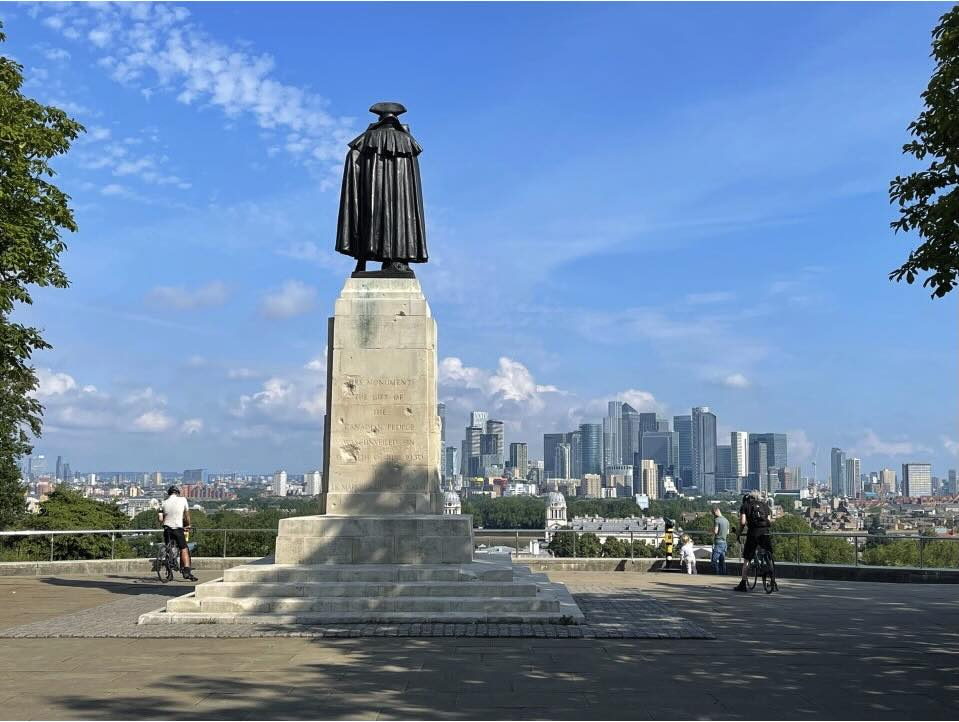

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAA7+gAwAEAAAAAQAAAtKkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAcHBwcHBwwHBwwRDAwMERcRERERFx0XFxcXFx0jHR0dHR0dIyMjIyMjIyMqKioqKioyMjIyMjg4ODg4ODg4ODgBCQkJDg0OGA0NGDonICc6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ojo6Ov/dAAQAPP/AABEIAtIDvwMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/ANsaxqwP/H3N/wB/G/xpf7a1Yf8AL3N/323+NVXgK1H5L44FfVKEOx4vMzZXWtRSMZuZSf8Afb/GkOvX54+0TD/gbf41gkEdatWwTkkD6UnShvYOdmwdT1VoyVuZh6fO3+NQRatqSriS7mz/AL7f41DPJ5UQArNd95zjFTGnF9B877nSLq+okYFzJ/32atLqd9t5uZf++zXIqXPC1cP2gfIcUnRj2Gps2W1i7GR9qm6f32rJfVtXD/LdXAH/AF0b/GmrEV5Y89qbJwvFONOK6C5n3NGLV9S4Jupsf77f41uRavOVGbh8/wC8a4gZ6k0is2cA0pUIvoNVGjvW1S46CeT/AL6NZd7f6mUzDcyr9Hb/ABrKjSXb5gY8dqbLc/wms40Unoiudlu213UEGy4nl/77b/GtRdUvCuftEn/fZrlpLZmTzlbd7VLv2IMHpVulB7ISmzfk1HUOqXMv4OaljudSZMtdTf8Afbf41i2bZBzzmtdTx8tZSglpYpSZBNqGpxKT9pl4/wBtv8ay4L/Wp8st5OFzj/WN/jT9QctlBxxVWxZo1II+WtYwjy7EuTuWpL3WYiGa9nK/9dG/xqE6tqzn93dz/wDfxv8AGrbZlT5ADVJbeaB92Bt9PSmlHsK7G/2jr3/Pzc/99t/jUJ1jWQcG8uB7eY3+NdCbddnycGsW8gQqWJG4d6qHK/soTuupXGs6x/z+T/8Afxv8aP7Z1j/n8n/7+N/jWcRg4pMVt7OPYnmfc0v7Z1j/AJ/J/wDv43+NH9s6x/z+T/8Afxv8azcUYo9nHsHM+5pf2zrH/P5P/wB/G/xo/tnWP+fyf/v43+NZtOG3FHs4dhcz7mh/bOsf8/k//fxv8aP7Z1j/AJ/J/wDv43+NZ1JR7OHYfM+5pf2zrH/P5P8A9/G/xo/tnWP+fyf/AL+N/jWbRR7OHYOZ9zS/tnWP+fyf/v43+NH9s6x/z+T/APfxv8azaKPZw7BzPuaX9s6x/wA/k/8A38b/ABo/tnWP+fyf/v43+NZtFHs4dg5n3NL+2dY/5/J/+/jf40f2zrH/AD+T/wDfxv8AGs2ij2cOwcz7ml/bOsf8/k//AH8b/Gj+2dY/5/J/+/jf41m0Uezh2Dmfc0v7Z1j/AJ/J/wDv43+NH9s6x/z+T/8Afxv8azaKPZw7BzPuaX9s6x/z+T/9/G/xo/tnWP8An8n/AO/jf41m0Yo9nDsHM+5pf2zrH/P5P/38b/Gk/tnWP+fyf/v43+NZtFT7OPYOZ9zS/tnWP+f24/7+N/jSf2zrH/P7P/38b/Gs6ij2cewcz7mj/bOsf8/s/wD38b/Gj+2dY/5/Z/8Av43+NZ1GKPZx7BzPuaP9tax/z+z/APfxv8aP7a1j/n9n/wC/jf41m0Uezj2Dmfc0v7a1j/n9n/7+N/jR/bWsf8/s/wD38b/Gs2ij2cewcz7ml/bWsf8AP7P/AN/G/wAaP7a1j/n9n/7+N/jWZRR7OPYOZ9zS/trWP+f24/7+N/jR/bWsf8/tx/38b/Gs2ij2cewcz7ml/bWsf8/tx/38b/Gl/trWP+f2f/v43+NZlFHs49g5n3NP+2tY/wCf2f8A7+N/jR/bWsf8/s//AH8b/Gsylo9nHsHM+5pf21rH/P5P/wB/G/xo/tnWP+f2f/v43+NZtLS9nHsHM+5o/wBs6x/z+z/9/G/xo/tnWP8An9n/AO/jf41nUUvZx7BzPuaX9s6x/wA/k/8A38b/ABo/tnWP+fyf/v43+NZtLij2cewcz7mj/bOsf8/s/wD38b/Gl/tnWP8An8n/AO/jf41nYoAo9nHsHM+5ojWdY/5/J/8Av43+NO/tnV/+fyf/AL+N/jWbilxS9nHsPmfc0f7Z1f8A5/J/+/jf40n9s6x/z+T/APfxv8az8U7aKfs49h8z7mh/bGsf8/k//fxv8aP7Y1f/AJ/J/wDv43+NUKMUvZx7C5n3NAaxq/8Az+T/APfxv8acNY1f/n8n/wC/jf41nUUezj2Dmfc0f7Y1f/n8n/7+N/jR/bGr/wDP5P8A9/G/xrPoxR7OPYOZ9zQ/tjV/+fyf/v43+NJ/bGr/APP5P/38b/GqGKTFHs49g5n3NH+2NX/5/J/+/jf40f2xq/8Az+T/APfxv8azqSj2cewcz7mj/bGr/wDP5P8A9/G/xo/tjV/+fyf/AL+N/jWdRij2cewcz7mj/bGr/wDP5P8A9/G/xo/tjV/+fyf/AL+N/jWdil4o9nHsHM+5o/2xq/8Az+T/APfxv8aP7Y1f/n8n/wC/jf41nUlHs49g5n3NL+2NX/5/J/8Av43+NL/bGr/8/k//AH8b/Gsylo9nHsHM+5o/2xq//P5P/wB/G/xo/tjV/wDn8n/7+N/jWdRR7OPYOZ9zSGsat/z+T/8Afxv8aP7Y1b/n8n/7+N/jWbSUezj2Dmfc0/7Y1f8A5/J/+/jf40n9sav/AM/k/wD38b/Gs2lo9nHsHM+5of2xq/8Az+T/APfxv8aX+2NX/wCfyf8A7+N/jWfigCj2cewcz7mgNX1f/n8n/wC/jf407+1tX/5/J/8Av43+NUAKcBRyR7BzPuXxq2r/APP5P/38b/Gl/tfVv+fuf/v43+NUKKOSPYfM+5f/ALX1b/n7n/7+N/jR/a+rf8/c/wD38b/Gs/FJR7OPYXM+5of2tq3/AD9z/wDfxv8AGl/tfVv+fuf/AL+N/jVAClAo5I9h8z7l7+19W/5+5/8Av43+NOGrar/z9z/9/G/xqiBTwOKXJHsLnfcu/wBq6t/z9z/9/G/xpf7W1X/n7n/7+N/jVHFFLkj2Dmfcvf2tqv8Az9zf9/G/xpw1bVf+fub/AL+N/jWfRR7OPYOZ9zQ/tXVf+fub/v43+NH9rap/z9zf9/G/xqjS4GM9AOvoP8KThBLYd2X/AO1dU/5+5v8Av43+NY974ve1mNs+oTCVO258fQ4rCufF2k24cIHd0+6MAKx+vp+FeauIb29LvKUSUliWA3evTpyentXmYvFQS5aaR1UaT3kf/9DWW8iuoFljzhuxGCPqKh8wjpVS0tJLK3+zSSGXkkHGOPTGTU1fU0b8iueJLeyEJJOaQcU6krQgfJI0mA3arMFvG336pVKsrL3pNaaDR0sVpCy5AAFVrmDyxuSqMN66DFSzXTyARiseWVzS6sZbFt5BNW1tUZBubmlSy38sfyprxPE+xenatLrZE2JWtYVTg1SVdtK7Mp25p0NtNNkqMAU1puBZjlJ6dMVHIrMd4GKtQQeV0FWZFBTaeAOtZ81tirGcqSY+bkYqhNvDYbtW0LiJfl44rMmR3bIHBq4PuSyOC5eMbBzWgl3dIM+WcfSqkFvMhD4rczKi8ipm0VFGVLdF22heaWNJW4IwKe9uWO9Voedohhhz7ULbQC/CRFHg1WupxneemOKqqwkQsTx2qH7NLP3wB0pKKW4X7Fj+1Pl24rLdmmbOM1YazaNskfKKs71WP92oB9BVqy2JMjac4xilKleDVgl2YFh0qOXcTyK1TJsQ0YFLikxVCEopcUUDEopaSgApMUtLQA3FGKWigApMUtFACYoxS0UAJRTqMUAJikxTqMUgEoxS4oxQAlFLijFACUtFFACUUtFADcUYp1JigBMUlOopAMop9FADKKfRQAzFGKfRigBmKcKWlxQA3FJinUuKQDcUuKXFGKQxKXFKBS4oAaBTgtFLSAMUvFJilxQCCilxS0DEopaKBCUUtJQAtFJRQAtFJRQAtGKWigBuKKdSUAJRRRQAUUUUAGKKdSUAJRRRQAUUUYoAKKXFLigBKcBS4paYxRS0goqQFoop2KQDacBmnbaUDFACBRSgUuKWkAmKXFLRQA2iloxQAlLilpaBCYrnfEVp5lq93eOwt7cfJEnWSRuBk9AAcVp6jqdnplu0s8iB9pKIeSxxwABzj9K86lu9R17YmoTbY2bMMKKNznHGF+XCj+8zADtmuHF1opch1UKb+Iz7wDQLmOWK4jnu0zuVF3Rxkrj73RmX0Ax71zJdpPxq5PaoHAj+bLlVKHKnGPu8cj04oW1SFS0g3c42scEfgK8BtHej/9HB8OT6gXkguixQYIDHkK3KnnqMHt7V1VL9niSXzQgDBBGP90dBS7a+kwtF0o8rZ41Wak7pDMUYp+KXYT0rpMiKjmrYtzjP6U0ogPIxRcCuCRUivhgx7U1lUH5elN6UDNqK7QqAwxT5p4NgwM9qwwxXpT1c96z9miuYkZcsCBXT2TRCIA4rlWdiasQu8ZyelKpC6HF2OzYwBcCsa6aMggDpTI7tHQnPSqLybzgcCsYQsW5GfwX29qtSMI1C4qtIqg8U5Xcdia6GZmrHMojUtUxuQy4UcetZoImGFPStC2VGwAcYrGSSLTI5jJsGxTWbcRtgZ4zXUSiKGLcOcVzt3Kk3zDggU6T7BJWM4ZHGeBW3Zs+ArLWNan96CRwK6uBxt/CqquwoIytSjfZkcCs62Xa1bt2Q4wy8VirGY5Qw4FKD92w5IldO+KrtIgGOOK23aJkwv6VnvaK53DrTjLuJxMl1yMgVFg+lbCQqF245qF7dgcCtVURLiZlPWPNTTQtF1pFcx8AVfNpoTYgKkdqZWmHjIy1VpWQ8KvFCkFitijFLRViExRinUYpANxRilooAbilxS0UAJiilooATFFLRQAlFLRQAlFLS0ANxRinUlADcUtLijFACUmKdijFADcUYpaKQCYoxTsUYoGNxRTsUYoAbRilxS4pANxRinYopANxS4paKQxKMU7FGKAExS4paKQhMUu2nDFOpjG4oxTqKAExRS0UAJRRRSAKSlooAbRS0lABSUtFABSikxS4oAWkxS0UAJiilooASl4oooAKKKKAEoxS0UAFJTqWgY0U7FLS0wG06jFAxSAQCnAUu2nhTSAaFp4XFKBinipAQCloooAMUlLRigBKKXFJigLBiiiigSFpKUUlAGTqGjpq93apcKDBDukcd3PG1M9hnrXJyWV7Y6DPfzRMt7qHGSMeXCOqj0yB0H8PFdF4hur22tHeFcQKoDMrYYknGBgdAK4DUnvhaQu2be3kGYoncs7Du+MDA9MhfbNeHjp2k1FHoUForkDXS3MUNoWVFgUsCq4IzxjgZrBuJ4IpAY13Eev8A+uoJPMI5G3NMt4pbqYQW8ZkZuij2H/1q8uEDrP/S3/stwV3BePyqm6MpwR+VcPo+ta1LqM12N8luM+duz5KZ6ZPO38B09q7RtbsoW8q4VT2Jh3OobjjO0D8jXtUcwhJa6HlzwzWwUuSvSrMsYHzKOKrYr0U7q6OW1hRIQc1YQI5+bmq9OVmU7loaGjRW2IQlVGakW0QxYk61VW7kxg0iyPjrWdmVoRT2qoN0XIqnirO5lBB7jFQYrSOxI2pvN+UAUzApuPypgAJHSpNxCYq7b2kbgb60/Kghi+UfWoc0ilEwYducntV0zhAAB+VQyiP70I5PalTzYpQHGBQwEigmlcvGvFXxYTqd6OB3xWjHOmzOOacZg0Z2isZTZooopySSIu1+eKxTbu7+imttMSgsccdqV4wU24pxlbYTVyn/AGYETMbc1q2kG1AD2FV+YEGDmrUFwuwE8VnNtouKSLLRqy7SvFc7c2Mqyfu/uHtXWxkOOKrXEKHk9KzhPldinG5zsUO08CpgATjpWpFaY57YpsiJH9BWnOTylRI9q+9QOT0xitJYS/CjAqjdWdwWGHGKIyBozpxuOAM1F/Z8xO/AFX7dCk/lyc8cH2rUKgDitPaNaIlQOUkt5MliBgVXdlIxjpW5OJSTtA9qoQAo5Dd61jLQzaM4LuYKtSS27RAZwa2Fs+TJjmgwBvvDkU/ahymBgg4PGKdVm5UiQ5qqK2T0ICilooASilooATFJTqXFADcUYp1GKAG4oxTsUUANxS4paKAG0UuKMUAJRS4ooAbiinUYpgNxRinUUgEopaKBjaKWikAlFLRQAlGKWlpANpaWjFIYlFLg0uKQDadilwKWmAmKWiigAooooAKKKMUCEopaTFFhhRRRSAKWkooATFJT6bQAUtJS0AFLRiigAopaKAEopaSgAoxS0UANpcUUoFMYAUuKXFOxSAaBS0oFKBSAQU4ClC08LSEApaXFFIYlGBRRTGLRS4oxQIbS0AU7FAxtFO20m2gBKSn4o20hWG0oFOxRigDmfEElzqEDaJpI82ZyPOA6InXDN0BzjjI9K8ruby5n2efK8qxgogc5wp7D0r3SWCQ2k0FkRHJIrbWx/ER1OK851TS9Is7K2013xfxxPJKIk3FmK5RSeyg/pXi46jJvmO+hNWsefyiaRV3Z2jIH8zTVt2IzEpLdeBnA6dq6gWwsoohfEtGMGRCh+TzDtIU/dLFE68dgOaoX2qvc6iZNHQafCi+XGsXyHZ/tEckmvN5bHTc//9PhLZtTktyZ9smRwePmHoz9CAffOa0tJ1VoSILi4Cqsih4yoJO7/ZIII4HIPHbNc7b3l1qkcljLMkQOCm7Cr7jIxU6m3u4YGlXynhkx8gzlT2B5/wAK4ozcHcTSasdkLOeK7gVJ3hBI8ooS8LEcsrKcFcjp2xXT7cvt6A1xui6xNG6W0294jwoC5xjPQeldojq4Bh5z6V9Nl1aEoe6eZiItOzJ5LPBzGwK+9Ma3kVe2KlAaJf3nFT+ahjxmu+7MLIzFWrCMqjkVF34pSTiqJEc5HFQYIqWg800BDjFTCT5duKawFNxTESiRlGFqcTlhiqdTR7T14qWhplq2iXzd36VpSJFsye1QwOg+UClkbzDtHArB6s1VkiuJQeFU4FQNNIoOAQKvLPFCMED2xWfNcLIeKuKEyuLl1O5a0ra6WQ88GsY9akhOyQHFaSgrEqR0wkUCoXdGHSogGKbh2qlLJyUrBQ6GjZtxXqxEKelTXc6NEuOc+lcoJwrAntV6O6MhGwdO1J0bagqnQ6GO5/dhAvQVVa4RCd9Oiy6g4xUM0JPtWaSLualtPHIuUIqvdzRg7Seay4VaOT5TgGtGG2Q/M3JpOKTuNFBCjtuHWpWyBitBoVU8VSkdV/lTvcLWK32YsvzGq/2KNHB9K3Yo9ybiKryxYNNT6C5SBQAMVRmmCfKTTbmcp8p47VlyCSbGRgdq2hAzb7Ec0gc1CFpzIV+lHReK6VoZDdppMU7caSgQ2jFOopgNpaXFFACUUtFACUUtFABikpaKAEopaKAEoxS0UANxRinYoxQA2kp+KTFADaKWlxQA2inYoxQA2jFOxRQAmKMUtLSGJiilpcUhiUU7FJQAUU6igBuKWlpKQCUUtGKAExRTqKYDaSloxSASilpKADFFFFABRRS0AJRS0YoASlpaWgBuKWlooASjFLRigBuKKdilApgNxTgKcBS4pANxS0oFOApANxTlFOxTgKQAKKXFG2kNCc0VJtNO20XGRgUoWn4pQKVxDMUYqTFJii4DcUU/FGKVwGYoxTxS49KLgR4pcVJijFFwGYpcU7bTsUrgVZ5ngjHkxmV2IVEHAz7nsAOc1xHiCUaJODHtfUbsb5GUECMDgFPTp1Pp2roNe1Y6ZHtcFEkGAyECRj3C54UDABbnGcAZFeWzT6XM9zczWz72XbEiyNhWP8bscszD04FeVjqy+BHbh4W1K9xK8c7mBlAWPys537gy/N1Hfr04NY52MPmA254wKXP+jhVX73fNXrDSNX1BXOnWslwI8btq5xn6V5CuzsP/1OSu9Jt9TtVntI0gkHzrsXZkHGflxzj61zPnMsW0H5IiFBGOvcqAB3rZVdStZnjAbayBDkE8dkHb246fhU9rHpE0kEF3G0QnYx7CNoQD7uGByckjJ4HXiuCmnLdieiNXw1H9qdHmTiKUlHQYKEjcMjurdOnHavQVSKHmPArm9G1C0jsvscsnlmFiirLgOoX+Fj0+XsfQdK3Sp719TgYQjT91nmV23LUtGRXHz4qoyLuwvSjGKk8r5d2a7krHONEe3rUku0oAKr5IqdER/vUwKpAHSgCpGUK2O1ICgpiGGNutR9OKsbzULdc0xDaKKKYhVkkXGD0q4JS6cHFUaeOKTRSZKIcjrUUkaIBg80u7FSwbPMzIMijYCqOelTINpy3ArUlSDysr8qn04rJ2oh65xSTuFrGj9q3LtWs9xKWL4qVZSDuHHFD3DkYpJW2HcqooY4PA71swRpsBi6VnQ20k54GBW6lh5MeV6+tTUktioIu2vTDVNJsUE8ZrEkeSMcNtNVJbiXqxGfasFTbd0acyWhbcymUKDjNbVqkqJtk61zsV2hZSQdwrp4Zsr0pVU0rFQJvLyOax7mDMuO3tW0z4GaynbksaygUyzafL8p6VYmVAMmqVsWJ46VLOPl+ahrUOhkyQx3EqgjpVuS3TZjFR28QTlTxnirUhOMCtOboTYxGs4wCCuayGtZVcqBmul245NVWIzzj6VtGo0ZuKMI20o/h/Ko9hziumyGGBVOSBM78c1pGoS4GSYCOvSofpVpo2YVGIJD0HStEyLEOKKdikqhBRRS0AJiilxS4oAbRTsUuKAGUYp2KMUANoxTsUmKQCUlLRigYlJTsUUxDcUU7FFFwG0U7FGKVwG0uKXFLTGNpcUtFIYYpQKXFOoAbikxTqKQhtFOooATFJinUUANxSUtGKAEpKdikoGFJS0UANxRS0UAJRS0tADaXFLijFABRS4pQKBDcUuKdilAoAZijFSAUuKVwIwtG2pMUu2i4yMDilxT9tKFpAMApcVKFp22i4WIQpp22pgtKEpDsRAU7FPxRikAgFOAoxTgKVwCinUYqRiYNKFopQaBCYpNtOooGJgUYpwFKBQBHtpw46U7GKKAEwaNpqSjFAEeMU5QM88AUuOwrhda8ZJZ3IstLRbhwxVywJU9tqgYz/AJxWNaqoRuzSnTcnocJreq3OtX5mVTjhI0HOF/hHuaywIbiRbPcLVQmGYgsC3cnA49sDinPdXdvc+bbn7NIxZx5ZwV3fwjByvpiqV5DNb3DQygrLEcHJzg/UdMV87J3d2emlZWQ1SkbBOXVTyV4+XPb8K7SWx1JfN1LQTJY6eFQO7v5S54XAIILc46Zrl9I1BbO7jllhWaNW3HgE9OozxkVoeJdQa9uiIbqS5t8Bo95b5MgEj5iTkHjrVwskLqf/1eFhCMVnbcwjB3DOBj2I6Yz0pZ4LEpHKWVWIOE54xnrz1/Go7SN5IlWJvnuVYpzn5wSNpGOOMfpis1rg27eZGvnFApLH5dmOg47c15ag+gHSWVzv1GO7LxqeF+cNliF2/wAII+lbsHieHcLG3i2YHDEEqvGdu0YPB49vSvN41N5dpsYru5zIwyCB1J44/AV0GoQxK+bqeOExYysY5yew6Z+hA+tdVPETpe7BkSpxlueg2Gopdn7PKYxOFDbYzkEHnI/DGR2rTyfu15VakhTcxDzX+8hAxgjoRn9a6iPVtSjsp5YE83yRvcnkrkcYB7evXAr18Lmd1yzRx1cN1idytqGX0qu9uynA/SuQtPFrmFI/4hjJK5yDz97IAPbGK6238QabOcQvt+uMfmOK7KePpydkzKVBoZ5RJwOTUbRMh+YYrZRwH3kc0kqLPx3rsUzFxMbOOlJ1q/JbqF461UKFODWqkiLEGKbipthxmmd6oQzFLS4pKQgpKWjFAE5kLQhPSqwp2KTFNIYlOB9aTFFAjYguo41CYxWhPdgW25OTXL5pd7YwDWTpJu5oplmS6MgwQM1UY54p0S5bB6VYMixnCirtbYkuWESL8xOc1vRvCowGFck027jp9KI2YnCtisp0r6lxnbQ6ua5VUO3ms7z1m9u1OiXzIwJD2pHhjUZHFZKKWhq2XIJkiAFTSXcRXBrAaZVbaOD0pyJHI37xvyp+z6i5+hswFCcjFWHCVFbW8Cj5amdYx0NYvc0WxRlVcYzWc8a7wOpqS4kbzNq9OlWVt9wDN1FarREbjUg2j5qpXfyitXkDFZ91bM44anB6iktNCim3Z7mplRQlQrbtHT9pxitTMqmIM3PFVpYxG2BVh98eeKr8tya1iQyPFLilxilAqhDcUuKdRigBAM9KrNd2SHDzICOoyP6VyGs+JoIbyawYsghO3bjAY9ye+PT86ym1SwudpikAI7ZxXl1sfyvlgjtp4S6vI9BF/p56Tofpn/CpYrqymO2KaNj6Bh/KvPLO5sQ3zOqgUt8bUqCkiLnuDj/61YrMZ9jT6pHoeklccU2uD8N6/i5GlXUvmBiBEc5IJ4wD6e1d9jFenh66qRujjq0+R2YyjFOxRitzIZRTsUYoAbRinYpcUANxRinYpcUhjMUuKdtpwFADMUAVLtFGBSuAwCjFPxSUXAbijFOo6UAMxRin4pMUANooxRigBKKWigBtJin0lMBtGKdiigBuKMU6igBuKUClpaAExRingUAUgG4pQKk204JSuBFg04LU22jaBRcdiMLTvLqTFLSHYi2Uu2pKMUgGAU4AUuKKLgGKKWikAlKKTFOVaAEop+AKKkBlOApQKdTGJiiilApANp2KdRQA3FKFpcUooAMUlOoxQIZTsU4KKdikMZinAU7FFAhBxXI+KbS30/w/JNZCO2ZMJuC/Oyt1QHrknr6jrXY9TVe4srWRxd3JCmFGCsxAWPcMbuehx0JrCvFSjY2pOzPm6GVY2CyAFchip745xkcj8KiyGViV+bOc/wAxiu/8Q/2VJDBoOjR/ari3XzJLlCuGOMuznHIA77gB61wuYxAIolG5eS/OeR90DOOPpmvAqQ5dD0UypAoRvvlOO3f2q5amzeVRfFkiUEfIATn6EjihorcQrPbuSY1Bl8wKBuJ4CgElhx6flVaFVnmxJhVbnuF/8d/wqSj/1vLZppI4YLeZBE1vnOwtli3ODzgEYx2qxFcLEwlD+S0rHoN2AMYyD1BycVJLpJuT52mbpIuOvGMnscBf5Uk2nZ1CTd+5KorY7IRj3Oa87miFiyLeKON5Yo3libG5uR8vpxgD+lQ3tjDKDOswUbcqrA8/QgYOewqae0ESNC7jYcldrDy8jpwCSM1pQWot/JW+eO0trmNmjYMHwFXJJAweTwO+cjsKUU38IrnP3VvqtrFDBsby5k3KAdysBg7l/MdK6/S9XaC2tYRs80ny4lxzIJD91uR0ODkkVDpviNIrRYLmFLqIghI2IUow4GCBnB4qxok2l3ur/b7q2S0Fgm4FSfLMgb39C2evau6klzLkdjKW2qObEgjVb6GRUhkl2y9T5aqQAORk5znjg/hQst1BIthMImWKIuShyHDMfmOOeR7E4xiu21Cz0bw/byeVZfbVuXNyyMMqip6Hjj5vU/pXDQavLpd2bzySI7kvlnU5ZWwGwSeq+oq6tJQ0CMrrQ9M0Nj9hW2aQNKhYAZydmeOvP6cVow3azRiW3bcuSMj/AGeD2HTFebyahawzxs4bYzFS/KqrYG0qeMHitey1ea0nFiRmFIt3zbV79sAcn3rswuZJJQqI56mG6xOz8xjRuQ4z2rPsdRs9RTdauCV+8p6j/Ee4rQELlc44r24SjJc0Tiaa0Y9pVA2qOKq96meFkGTUWK0jYkZ3oxUwZMfdFRUyRKKWigYlJUgQkcCkKMBmmAykp2PSkxSENxS0tFMBvTpSc0+jFMCPFSqB3NJilAycUhl6K5VBszSvIAATzUS2xZc9BUDKFHy1nyoq7EkbceBTIiVbPalpQ4FXYk2bfeTuVuPSpbhtpDHiq9jcRZ2njirjiDdyc1ytWexvHYWPy5l3KK0YxhdtYEtz9nlAj4HtTRqko+lJ029h86RtyLjpVFvN6uMCltp/OOSe1TTsoXbxSSs7D6EKxiT6U6SJFAwKhhmYfKR+VTSyBRT1Agkt965PH0rJlgZT8o4rbW5RuMYqCSVGOAKuEmiZJGNHA83HSpfsco6Yq4mI2zVgzr7Crc30IUUY7wMg5IqPbVqT5jUYXPSrvpqTYq3NnaX0fk3sKTL6MucfTuPwrxvxZpGmaVqUdvpu8MRudCcgZ6bT16etdjqXjM2U0iQRxmJDtRzklscHABAx6V53qmrXutztOVC7gFLYAOB0HA6D0/OvHxdanLSK1PQw9Ocd9izpWo6FYtm/szejGNgbYPz6/pVzQ9H0XW9T2ec8ULZIhGNwIGcZP8OAeeSMdO9YFvYhlJd8f8Bz/WqkU9xp96lwnySwuGHGMEHP9K4otJps6ntZH0JY6Vp2lR7NPgSLtu6sfqx5/CreKoadqrarpbaxbwL5SD5v3g+U+nStEYZA44BAI/Gvfw9WnJWgeTVhJfEMxRin4pMV0mI3FHFOxRilcLDcUYqTFGKBjMUu2nYoxQAYoxTqKQDaKWigBuKKWikA2inYopgNopaTFADcUoFPxRigBlGBTsUYouAzFJin4pKdwG4pMU+lxRcBmKMU/FGKAG4FGKkAoxSAbinAUuKdQNBSigClApDHikoAp2KkBuKMUtOAouA0UtPApcCkBHQFzT9tOxQMj20u2nYooAZinUYopAFAFOwKKACiiloASilooAMUtLS4oEAFKBR0paQ0FFFFAxacOKZmk3UWESEikqOsrW9Vi0fT3uXYCVhthU/xN9PaplLlVxxV3ZGncXMdpGZpenRQASWPYBQM/kK8j1TT9bt7S51a78xbe+YRuvAbcx3Abd5+6VAAODjtVyXxN4l0nTT/AGmNhugRCZExIBgZYcjHXjIHt0rirptKXTgYpp3uZBnaAFQMGA5GSTkfrXk4iup6I7qVPlJLPULqCymsLaKNPtQEckgBMjKDnYDnAHrgcis24/dcSdRxgfTHpTYL2S0KFPmKcjtg4/pT5vtE8UMs5BG3av0H0rzXfqdI+wtI5/MVwGZU3KpOAcdfTt6VCRAMMABuJ+QZwAOnNRO4HyLVc5XhR7UJAf/X44xmyghljbaxSMZGFDbucDtx+lT5+2xt9uXyZLVyjcncq8EE4HI+lcpM9jdY826ktymAEceaq/7pBzj8OK2JZksZ4tVF0t2nlpGyqpUvxjr2IA9e3SvMdB2AtwNbpqu5bmOXaMbWAG7I/h7ZNVorq0klWIOAjEKqMGOwD0z/AIVXh1W7u7fzUt43aFsK7beFPKrzjkY4x+VVZ7YW8ywXJW2lD7jxyEfGM444HvxQodGBrMHMblyrIDmL5cjjIPAwM4/Cq0I1G3WaYY8kLucYXIGMcD0/SrAKpL/o84WJmLBUIwD2X3qgLf7ez5k8tg27GMKd3UZHT24xSjoBqw6091btbtLLjkBBuPy4xkYxgDHSotTmW4mhvdyM0GAsfO3A74Oep5OKht5Xs0ntr/FuWOQw6YxjaMZHbIHT0o0l45rpgV3R8hQ3PykdgOmM/wCcVpeS2egrIwrPMd4hnUKQMruUEE4wBt6EZr0Hw7Fa69uJVrW9tG++nMbKOq49ieB9OSK09Nl0/VrK40TyobedIwm5ADnHI65PGAe9aGn+HLDTRbSDBuYUZS6/LuLEseM8/ex9K9nC4XmaktjlqVbKxO2jR214t7p21Cz/AL5f4Sp649MdVFblvvY7TxTU3Lyx4pWniX7pr2IQUVaJxOV9zTFqjLlgKz7uOJEwoFRHUJcYXpVZp2fqM1UYNA2itScVN5LYzT4YkJ/eVvzGVitTkZVPzLmr8kEGMLxUDxRKuVNLmTC1iHf2xTy6lNu3molbaasyTpKgB4x6UAVabTs80VQhmKTFOoxQA2jFLRQAmKXp0oooAk8yTHJphYkYoAoNADMUmKfj0oxTEPSFnHy1IYHXkGmK+zpT2lY1GpaI38wY3c00E42gUp55qSM4YYFPoInt4rkcoMUXDy5HmDBHpVxZSRlQahEZuJP3pwvpWN+rNLaWQ23kAGSOasZU8k0yW1hC/K2KriLjkmjQexOWwwxyKfGnnNycAULCdo24qJt0bZJAxSA0HgiC1WlhVxgCp0CTrkkiob280/S4PtN5II414HqfYDvWTly7mnLfQr/Y8Z5xj8sV5/4g8R26wS2WnMWJ+Rpl4Az1C+vpkdKrapr914heSIP9i06IbnJ6lenzepPZRxmud1u6tfJs7W0QJAqvL0+Y44G73rhrYxv3YnRTw6WrMy10+zvBI7puZCB8zH/HtW1HZwJZrJgAkoqjAxhs44/4DVaBTY21oPuvIrM/1bp+lat+Sthby/8ATwowPTagH864TqHWqy29w6KfL2yBMjg4Khqo6lp0GrNJPdsxmh+RmGAcDp+nrWnF/pVzqc8fKrdOiY/2UCipZTG+sTonzLcQRzLj1GV/pSsBi6Rb6loRlitnMlvOm2SM8cfy/lXoWi7W0qFVbf5Y2HPB4PGfwrAeZrRkfrsQZ46qOoq4sotfEEtvaqIw2393nClHAxz2G7Iz2xXVha3s5X6GNenzx0OlxRUgwwyPpg8Yxx+YPH/1qTbXvJprQ8u1tBmKMU/FLigQyinYpKYCUU7FJQAlGKdiikA3FFOpKY0JikxTsUUDEpKXFLQFhlKBTsUuKAsNxSU6jFAWG0mKkooFYjxRipMUYpDsR4pcVJijFAiPFKBT8CigY3FLinYoxRcBuKUCnYpcUrgAApcUuKMVIABSmlxQBSAQLT8UoooGGKMUUooAWjFOxRSER0lPwKMUxkeKXFSYoxQBHigCn0UANoxTsUvSgQyilooAdRSUcUAGaXNMozQA+lzUWaN1FguSUlNzRQA7iqEsNtBLJq0kfmSxRkpn+FVBOF9M+o9qve1PVGbgAn/DvUTtbUqLs9DybxRaXa6LBdajE099fTb2k/54rg7YlHbP5cewqoPAV2oAaQCSSJyqHg+Yq/dz9fb2r0bSPEdrq+oSWMMTKYsmNm/i29eOxHpXEeJk1nQ7maOGU/Zbt/ODPyQwydoJAGSc4C15dWnC3OtTuhKXw7HK2mjrKiX2pstpYEMokTkyMo+6i9Sc8E4wPWufEhVNhySo+UelXbiTUI4o/tCt5ckYWNm5AUHOFPYfSqUEE1xJ5Vuu+Rs4A9hz+Qrz5JbHQiOM/umkz839Kci/ICTz6Cq8EjQPuBxkY7dMUE7zt6AelKxR/9Dya208xZudTjcQ45YckHjryCOo4xQyWYU/2a5dgD1G35NuDx/9etq2vbi+tLvT3toT9pbcJpGUbQTnCbjgEk9qy7q3l0y7IeNlNuyoRKAGx6ccYxxx1Fc8o9USn0Om8P68tlpNzK8CXEkbqyO5+dC3APOcqD9Oa56dXv4pr2ctLLMccfMdw+98oHAxz+HpVyxW1tSH4bfkgdN3OVxkjaR04P410No/h9LKaCzsHub2csEWRSDGWG0h2zjCnpjr6ZqKFNSkwlKxzFxokllbQbZA0jKJTGv3lzg8AdwPyHpUqwvI8iJDIsiIXcOSvygZ3EEcew6V1k/hGW10+N4JVn1hXRuGChVXI2IDgY6ZyMnHFXLvw1cCwu2mk/elA+8fxNgBlYAcDqBj19q3lhJt6Ij2sUji7f7dfmB7a4ETr+6QSMFIB6Nu9Mjbz/KrHlw/abf7VCtnJPI0eEDKynGwvk8Bd3YZAwcdK6Xw54YuYCLzVFC7Q0QhODmNgd2cdOvy89q7V9P06e3tI71PtDWWPKd+oxjGcYz0HHtXXh8BLlu0ZVK8U7HEeFtMuVcyzkPGm5cD5WjkGN2e4IPGOnIOeK7dkbORUxEQd5IgAZG3N7nGKFOOGr2MPRVKPKjiqT5ncrtvximBTWiVj25FQF49uBW6ZnYr7R3q2ohK+uelIId/Sj7M6ctxSbCxMLfemBVaa0Mf0qQXW04x0qOaZ2OQCBSVxu1ilkjj0oJzUwAC/MKYI2boK1uRYipTjtVoQIF681E6rnA4xRddAsRo23quabnvVlLcMmScHtVcqRwe1NNCG0UuKKYDaKdRQA2ilooAKKKKAFHWjbSCnZpDGYwaswwiUVXqaFxHkGk9gRbNuqZww+mKhhKK/wAwqKR9xyKiGaVtNR37HSRTR4zxTnnhK/SsKJjUsuB3rH2ZpzD3kVs8VLDbtINzHHoKzgCDuAzWna3gxscYqpKy0CL7lowhVwKjEOeCMirMkiFP5VUWdVfb2rFXL0LDgKQiiuM8c2GnSaM19duYbmHi3ZerMf4COOP5YrugyOm4Yrw/4i3815rElkpxFYQKQB/eYKSf1ArmxErRsb0Y6nKro+tLF9sv45BYuQ7lcEDAwpKg5A7Zx0qhrV6Jbw/ZsKkYWNAPavX9YvIdL8MW13E5WSaBREvY7hg/gBzXgrx/MuO/YV5iO00p9dvJ4IYZFTMKlQ4GCR2z2PtXY3txKPC9hfzAb3nJIA4+UrjH4LzXNeGdM+0+IrSzuYt376MNG46jcOCD2xU2rNcf2bbW6TlotzuIcDCYOBg+h/TFAGx4W1Wxgs5kuZVWbzDLtbjIwO54/CtWd1h8Q6dbW7hllsI1zkY7kV5fNZ3MRUtGwDoJFJGMqe49v0roLHStW8X3i2enxIJIYlULu2jbGoXv+dIDuL1zFEkp+4JXiJ+vzD9D+lYniC8ntLuy1Mne20xvn+JRxj8ufx9qxpPDHim3tJ7fafs8JEjqJBszkICBkdzjpVS3s5ry0ms48J9nkDYb73zjB9sDaKYHqmi6/BPcSWbyb2Zg8WP4kbHGOzJnBH936CuvxXNeEdEs9K0tJ4fnluEBd8DIxxtHfAPH4V0/evcwcXGnqeXiGnLQbikxTsUYrrMLDaTFOxRSAbikp2KWmA2ilxRigENpaMUUxhSUtGKAEpaMUAUAGMUtOpKkQzFFPo20wQ2jFSbaNtK4xgFLin7aMUrhYZijFS4pMUXCxHtFLipMUmKVwExRtFOxS4pAMxTsUtFABiilooAUCjFFFABRRRQAoFOpop1ADqSgUuBSAbinUUlABSUlNpgOpabS0AGaKSkpAOptFFMBabRTTQAmaWikAzTELRRiigBKeKbinCgCtd/aDayi0KrLsOwt0B7V4zaW13cH7U0c0oEmHdWwGx1ClQzOf93p+te03EEV3bvbTjdG42sPUenFSeWnkm3ChY9u3aowNuOgArkr4f2jWpvSqqC2PAri3v4ZHuYomhXzDHkE/e4yoJOSfXrWqBcXs1ppgkuDfK0hfzTkI4AKFPqFHXPHSux8SaFcfZNNt9FiJW1cqoU8gvtKn8+ppvhbTLi71a48T6lt87zHVUX+F+hPpgDheTXnfV5KfIdftVy8x5/Pqet+JDDp0p81o12QxKoUZ74CgAHA+mKrSpbW2j+VKsS3DElWVS7FehBbIQAdioJ7ZFez6h4X0e9lSdrVAVfe+35fMwOEOOOTjPeuTh8EazPdyX11NbpJMGBUAtsDArwAABtBwB0FE8JOL0HGtFnBxaHG+iLrAnUsXZWhGNyhR1/Eken6VVsLbTpZtt/PJBEF+9Eiud3pgso6f/qqbV7e202+lsrKYzRxYUvjALj72AO2cgVRMg8oIBjvwOTXG9Gbo//R8ms782caTgCRVyBkdvbsfpzV9ZYru4N1KjrJLja5UFf7vI9AABxWhLodve6Zd68D5EMUY8mEOuWJVfXnA/8AHjwK5vTb+S1gkgjjMgbknn5BjBrmqUuVaEJnSKtu9qltdAqkXyiZQR3O3PGMflVzQ9Ntpb5HtHdHEmN+7b0IDdOVyOgIrIe7vI4muIslHHJ2YHA69MA45zitXwrOwuxDLcFXvVdSxOUIxysnKkHgY4yO1Z4em3IJvQt3ulzRtcyWV2nyuR5RyzbeBk4BA/TPXpWxpTy25htZ5fMOImIPGDj5eOPlRvlPvU11ohtdJaKRcySyYWOIAsTg/wAR6kYz+eegqfTdCuP7CtrS6Cxz797nuAc4Bx1IzXpwo1FJuKOeVSNtTrJGyM/y6VXzzXE+Gp9Sa5urBIxvtm+eM8AgHC47BsenB4rtsfIsnQMOh4I+or2aFbnWxw1IcrAt6U9PmwDURFFbmZcKBuAalS2jxzVHnHWk8xvWlZlcxqL5UPNQG6Vzg8Cs8lqb9aFTXUfP2LLBJG2oKupbDZhqhiRIzuU8HtVo3YQVEr9CkkQPYjtU6iKJeaia9Vj0qtI7SnbSSezC6WxZkeBuF5rNmU5yKsfZHzwabJCy8E1cbLYllZpGPt7VHtY05lINODEDpWuxBHtIppAqQkmmGgQ3FGKUU4AY60wGYoxTsUYoAbSU7FFAxBUqRqetR0oJHSkArJ82FppXHFO3Gmnk0AIKeMYptLTAkUg4U8CkJXfk9KjxS0rAaAlXbiOoSQOdtRwtg4qQqT0rO1ih0bAr8wpwt3kP7sUw716DirUE+wbSMCk9Nikh0VpdR4+YYrwnU5lu7rxFfnkZ2Ln038fotfQZu0ijM7dI1Ln6KM/0r5gWYrot27feuZQP++QW/wDZq8zFy2O7DxS2O41LS5tY0azuraYM1rYI4iPQgkq2OwbI6d+1eZWv/H3bD3r0E6gbPQLB9v3rN1z9JGNeeWhBurfHpXAjqPStDk8/x3eX46W8ck//AH7j4/UCnwrZP4NmF0iO6xyNGxXlSeRg9vpUHg1d9xrt1tztsWAPpuZV/lVhNn/CF3JO04iwOORz9O9IOgaOFulitZkV0/swZB9AxwP1rP8AAjm08STNGduwSdPTGK0dFXZLEo76Zjn86zfB32f/AISS7MwJTy5SNvXOOMUAdzKPL02eDr5tlK3Hqro1eY6cMX0gH/La1DAf7kmP5CvSy6TTtEnH+hXRx6Z4H/oNea2GU1Sz7B45Yee/y/8A16EHQ9P8LSF9HEZ/5ZSMo+h+b+tdARXK+ECfKvIv7ro35gj+lddivdwzvBHlVlaTI8YpMU8immuhGQ3FGKdTaoAAFJRRUiCjFFLQAmBSYpadincER0U/bTcU7jACjGKcBTttK4rDMUu3NP20oFFx2Ghadin4oxSAbijFOxRSAbijFOxRQA3FGKXFGKBiUmKfijFAhlLS0lABRS0UAFFFFIAooooABS0lFMApQaSkoAeT6UmaQcUtAwzRmkyKTNADqKYKM0CH0cUzNGaAH0lNzRuoAdmm5Apham5p2ESbqTNMop2AdmkzTaWgB2TS5ptLikA8U4UgFLQAoFLSe3oOnp/nFIMbd3YAn8uvFTdWHYcKcMKNoH4CuYh8W6PIlxcEssFvsAfH32bPyqOOePUVSt/E17rHmJpOmzNEPlM/mCNV+rFSq/n0rB4mmaqjIreMvEF3p9xbabYS+Q0mHkkAzgZ2gfhzS6j4vl06H7HZo0skS7GnmwDvHBIVeDg+9cpqj6Np980WpWpvgzbmuY5927PzFQ+3B25wcAGtLTf+EQF+sdkBcblVYIbgkRodm52lJHJzkKqgivOnVm5PldjrUIpLQ5220W8udNuNR3RRQR5d/MOGYjK4AAJ/Dj9KzjoV4+jxa1bAzI0jRMiLkowxjjngj6V0/iW51CS0EfmWstrI45tFIVdmSEyR6tnvzWj4F13TLC0uLK6n8pjIHXcRtxjHHv6/hXOoR5uU05na5//S8sa6jtrtmtHZrZG2LJggOvHUdP0P0q47WME5ez82Eytk7TtQjsRjBx9AMdM1R1SGO0vZQd/zEbo5Bhuec9faktt7XMNlB5jrIh2rs3FS3PygZ447DPtwK4/i+Ek14YmimefzkKybw2E45HAx656fnmo7jzf7LMLWyI7sAsm0fNt9MHHvxxTTb6XIltAZ5bW5xtn8wBkB/wCA/MPTBFILm7u4IvICeWNwVdoXdjH8K8dCP8ipcZQ1Dc07nxFronia4bzvKUkfIYwcfxDG3sOOOPSu707xRp95cmwnIhnXgZI2P2+Vjj8iBXOWFqk19aPfHETLsKxEKoB6hsdufy4rNm0jTdMl8yK9V5PmysaeYNgPBcswHIxx1r0cNiqnLzmE6UXoetLtiZ5FQBnxubABOOmfp2qN3Z/vV5jBrF+I01JJ2iSSRo0jbLJIse3gA5xjPPb8q7zTtSh1S3MkZBdDtcDjDD8favUw2MhUdrWZyVaLirmh5Z607y1ApDkcU4N613HORbGP3RmmsjL94Yq6rqopkk27ii47FKkIq0kXmHAFaENtHH1ANNzSCMbmKAaMmt544scAVnSQgHgVMZobhYpZp6uVNKyL/DUeMGtNyDQWfgZqIP5j4NVKUcdKnkK5i66QjrTleIDHFUS3GKZRyhcsSKhOUH5VWKn+7VqO48sYIpz3W4YUU1daC0KIFFPxTaokbRTwueKCu3rQMZRS0YpgJRRRQAmKWiigBKUDsKUU9eKQDMEUU/BNOCUgsNU4NTLITwabtqVEFSxotR2pbDE/hTmjAOGFSu/lxDbUPnFhtNZam2iMjxFcGz0G+mXtAy/99jb/AFrwOdFXw1C4GC1xJ9MBVr2Px03leFrnHHmPHH/49u/9lryLUML4Wsox/FLK5/pXl4x+9Y7cOvdL+onPhKxlx93zYv0Rh/6Ea4+3YC4iI7AV198P+KJtpB2lI/Fhj+SVxi/LNGf9kVxo6D0zwe5htNducfILcIfxPH8v0qV5ceB7lWP8Cgf99AVW8Mn/AIp7xBL6JCPz3is2ef8A4pieMdMqvHb5geaAOi01jFdaay/xWuD+AasPwqQuvXak4Hly5+gH/wBatmJjH/YvbMWPzGP61heFdp8SOh6Osi/mDQB2dgR/bSQycCa0cfTcWArihtgvbFm/gvAp+h//AFV2Fs4Gu6QRyzwMCP8AgWf61xOrM0aSP0MV2jD8jQgO/wDCbmPULmBv4oVOPdSB/U12xrhNEOzxIy/3xKv5En+ld3Xs4T4DzcR8Q2mGpMVGwrsOZiUlLSUAJRTsUuKAG0U/FFA7DcUtFLigAo208CnYpAMC04CpMCjFAEeKKkxRikMbijFOpKBDcUuKWkpDDFFOptMQUlLRQA2kp2KTFMBKSn4oxSGJSYp1GKYhtLTttGKAG4op1J0oENpOaUkU0sKLDDpSZFNLGm00gHlqbuNJRVWEOzRTaOaVgFzRupKMUALmikxS0gCm0tAFNAFFLijFADaUA08LUgUAUgIthp+zFSUUAR7acBTuAKbuFAC1z2p+JdN0u6NlcCUuAMlFGF3DjqRW9vHauTiEmta/LJpY+zpaYSe62gyErkbY8g7fqBXNiJOKtE1oxTepxuj6nqtrPdWOmyCW5u3QRvKMFsZycP0PPer/AIjvbzTEsLme686+R5BME/dhRtXCYXHHv3FVtdvbmfT/AO2opvKEsxjtw7fvfKXguCfm5bO49sYHFcG0lxPK7TMXYn5mPJJ/nXkTqOK5T0IxT1LL38kh2wgRqDny0+6MLtz1zkgfrViXW5lshYpFCiK4dSq/MPYMckCqt1bNYRxyCMiKQcHIYZxnGQMA9OPTFZs0L7FlbgPnuO3t2rDVGlkaWpa1c6jqDahK7b8hlwThcY+6MnH51WOpXzXSXkLmKWIYV4/kIxxnjGDipdHtba+1C2sbx/JikfaXABPPA/w9K9Rb4c6bvkCzyKhQBOmVYHnPABB9OK2p0Z1NYkTqRhuecf2TLLox1lLhJMOUli3DzAP72O4OaqLZI2mS3myXcjoowv7vac5y3rnAAr3uw0HSbGGNY7aIyRJtMhQZyBycnPpXEeJfGV1Bdix0l4jHD951wysccAZ44Hoa2q4dU1eTM4VuZ2ij/9PgL3VLK/vPtTxLIIFUhZO23GRwed3vTUuI9Puhd6b+6DKTDuCsVaTggHHAA6Vy/kI07Ro3BU7TJhScevYZ7c1dttslkq7xseVQyhuSRwP+A4/KuSEOS1iWjQW6+xwFYv3u+PL7kxsJ7A46gdSeK0XstPuHs5NOKbbjMWWKp6kFvTnIPt06CuVw0knlQsXC8heu0A+nT+lTW3lRuNhKHcNrkZwmcfd/D19qrRu7Cx6fH4d1yN1u4Io8JtxhiC+Dn5BwQpHY9qfJ4i0m/tZdGjt3jE4ZJZARlCx5bGBkZ6gdq5FfFGp2crW9mfPjLrtEnI44OOcgMe3aq0ht726jt9PtBZToQpJkZvQDr6fy61q5xhH91oZ8rfxHQ3umvplta2hZpY1dvI2suGPVmVgRwP09Kx/N1DTyZrZmiZFK5ICEZ54UD1p0d89rcfZ7rEytuVlRjyON2AMHJGeOnSqGq6aRGJ7SIx2seAFzkn35CknnH3TxWPMtJJlJdGepWl1f21vE9wDd27KCZ0wSD8ueOMgHtjIFbp44rC8HpaHSmaCAxZlKknI37QPm2knHoQOM10rw8/LX02Fl7iuzzKsddirSYqcQsaXylHeuq5lYhVyhzU32lzURTHSmYpWQXJvPc96cJOPmNVsUmKLBctbg3SojDk9aiyaXcRQkFxTHtpu32qUS4GMUzfVIBvlmm7TUoIpSoJ9qLgQUCp9ietNKEHjpRcViM4plOI9RQBVXAkRD1HSozyanEJ2/e/CmMm3ipTHYgxSipAhNKI8dadwsQ4o2mrexV5FSeUHHHFLmCxRC08IKn2YODTtq9qOYLFfbinhfapsDFJ0qbhYYFHSnlcdKd17UYxRcY3jGKUUtJSAKUAngUlOVivSgZw3xMl8vQLaAH/WXAP4Ip/8Aiq841aIJ4V098c73H6V13xQmyunw/wDXV8f98gfyrkteZ10Kxtv4VLEf98rXiYn+IepQ+BE8is/w+D7flW6UZxwOD/SuI3ZdPYCutgmc+Crm2/hE0cn5fL/UVx+cFPoKwRqem+Gwg8Ia85By0lsgPYZLHpWBNgeHZ17+aD+GQK3tBZR4L1n/AGrm0A/8frmb6RBpewdyc/8AfQpIDsJZNsWhseCuB+BYAfpXPeGWK+Ic+z/+gtitu2UTWui7hkfaFT6gsuBisvwmgPiZkIxw+PwBoA6OOfbquhScHBZD+Jrm/ESbH1GL+5IGH4PtrVnIW40hj/z3b9CKq+J4yl/qMf8Aej3f+PBqAOg0qTGuWkv98/8AoxOP/Qq9HPFeV6ZJ/pOlXB4DfZvyG1D/AOgV61JEQ2BXq4KWljgxK1K1NqUoRTdprvRyWI8UuKdtPWjFACUlLRigApMUuKdigBgFPApQKUCgYgFPFGKXGKQWCiiikOwtJRS0BYbRS0lABRRRQAYppp1JigVhMUoFGKdimAmKTFOxRQFhuDS4paKBCYpaSkpAOptJmmZpoB1MJpCabzTAQmkxSgUu2mA2lxT9tGKAGbaNtSYoxSuBHijbUmKKYiPbTsAU6jigBpptPpKAG4p1JmjNAC0mcU3NNzTQiTcKN9RUlOyFck8ymbzTaXFNIQmWNApcUtAAK4HxFbRR3f8ApcpSFz+4tLYDzJGYfM57Lk9yCTjGMV34rOh0yBNVm1aQ75XCrHn/AJZqFAOPcmubEUudJI2ozUNTzrWNNj0iCGa4t1j3BfKgMjSHPVmkPA+UY4UAc+1ctqX9o3N8z6luNxIFZi/HBUYP5Yr03xdoV7qksF3ajcka7HXoVGfvAd+vb0rrJ30q3tXvrgKkUSCMl1yVC/dUjHY9q82WFvJrZI7FXtFOxwN5oN5qVrpOkSjy1gs5JtsYBzJ2Hpk/LXF2eko720msecEu8pEkADSvtyvA6YDDAHU9hXpOpeNrWC0U21u85lG1WwY1+YY4yMn8Bj3rzrQ7ldMvYdS1OOZorb7mMY3dh83AHXp3rOrGmpKxpTcuXVHpGjeCtMsoN15H5spk3RluGRQflGFOM8ZP5VPr/iv+xr1bUW4fgMxLY4PYY6enP5VUuPG2mvJavZszHazyx/cAG04UseD6gDrxXnWsaql/qcmpRReRvxhc57Y5461rVxEKcOWkZQpSk71DU1rxVd6tuigUW0DABwDksOODwOO4HFcXJFu+cHC9Bmrc5lMUJ3hl2naA2dgz0I7Zx09KpAqOo4rzpVJSd5HVGKjoj//U8fZTJGsTqSvfIzsPsc4x7fh2FZeJlQIASiHIXbxz+tdKILhVZ182S1VhhcA5BH3WKk4wB+PYVkjZC/kyrtwfmbr8vpg5GfTpjvXLGXREkMFuZIvMt9zOp6AZGD09+3pWva3j3n+ibVi+XAMajdj2LZ/EAioESIxPdQNsaMg7Gxng8dfQexFTPdfapVuS6pJzllXbt/EAdR0qXICyotcyQTXLmU/IF2/ebocgH5R7j8qnktpfuzkm8ZVO3hlx8vJI4xt6Dsa1LHzYLVftMcF5an5m8wAMBj5vmwGH5kVrmOxvIvL0iGKwbPO6T5djKwIXcpzyBkBc+nFVFRktNyXKxwF1bX81ynDM7gFTzyB3B/DrXVIZ4rCaWaRnmlyzK3RdvQfLj+ED8OKt6ZpVxq3h+cwskP2UOpD5OU2llIIwAOcegNefwJcFZtql1j2kkdF5wP8AClKjK2pSkj0Hw7f3M8g0qaeWzQBm+Vtm38T06+h4r0izZ47VEM/2kqMGTrurxKwMFxP5akBpPlVW/iAA4z2z/Dg4zxXsel3Vtc2qpBuVoAqOjgBgccdODn1HWvVyypryM5MVHS6NIyHHFRbjT8Ck2ivaOAaGppp/y1HimAlFLSUwEpKdikoASkxTsUoWncViOnU8IKeEFIdiHFSBmxT9gpcCkMb160zaO1S7RR0pXAReBilK0lOBpAOT5KR+fmpMUEmgpCDHQ1OhAGKgA5qb5cUAhHBY5FNAx1FSCnluKQEYQGmlAOlTJikZPSgdiDNFLtxRTJG0mKftoxQIb0FKMU4U3HNA0eM/EuUNrdvAP+WVuvHuzE/yxWd4oVRo9iQOfmyfX0/lUfjlzN4ruF/u+Un5IKn8VqU0WxU9ef5V4VZ++z1qatFGZYuv/CMX8Dd0jZfwkUfyNcm3VB7CtqKQDRJkPcBR/wB9g1jd1z6CsyzsNJu/L8NX1rn/AFt1bHH+6sn/ANasjUX22yJjrz+ZzVmxVRpEzY+bz0/IK9Ra4AqxKPp+Q9qBHeQ4TQ9LlUj91eoCO45FY/h0D/hLJEX++6j/AL6NTwyMmkJz8ou4j+QGKg8Oc+K5f9+TH5saQF3Vcxwae/8AcuZVFX/Flr/xN7wf3raQjPsmf6Vma8wWyhjz/q7xv1Wui1dpJNXi87bIz23l5bgYMe3+XSgZzWnTMdHsLj/nkrKPrFIT/wCzCvcJOGbH4V4DoTmTQGi/55TsB/20TP8ANBXv0RWWCKUfxorfmor0ME9zkxMdiLr1oLdhT2XHFMwBXpHEM6im7aXFOpkke2jbUmKXFFx2IwtKFFPxS7aVx2G4FLTjTcUAJRS0lIAoooxTAKKUCnBaQxlGKk2ikxTCwylxingUYpBYZSVKEo2UXCxHRU+2k20XCxFg0YNS9KKLgRYxSYqRulRmgQmKQ0vNJg1RIymYqXaaTbTAjxS4qTZRsFAEdFSYWk+SgBlFP3LTd60AGKNtG8UeYKLALimdKQuaZ8xpiHGm5o2mjZTANwpNwo8sUbFAp6CE3Cm7vanYUdKTimAmaKWigQ2ilooATFFLSigAxRRRQAoFGKUVm3ms6Tp0nk3twkcmMhcEtg+yg44qJSUVdjjFvRFPX9J1PVoo4tPuhBtIJU5GT2OV9O3Feealp3iG6vJrV7r7VHa7Q9wzYiUkAYJPcHjufStzxN4uhe1Wz0SZtzH944UrhcdBnB/Ss6/m8Q3ng1LqUxLZeYF8uJQDtXgFscAbsDHB715OJnCTfKehRjKKVznYNfjsvLWOEb4IHhzuZkZmP3lGV2Z9QeauadLbanqu3X2UrCgVpV24VE6AKuM+meTjtxWJp+nPf+ckUQJjiaVmLbdqxjJ56c9Oavz67cNZvpWmIEtpERZP3ah224+Uso5UHocDPeuFS7nRbsYPm7BnJZmOSaR2AAzyT+la+o6Xd6S/2a9jCFlDZDBhz05HQ+1T3w0K3tks7ANczvgy3LggKR/DGoxx7sPpWVirmAfkTcear7i+T06YqRmH3VFbUmgznSrfU7R/tIk3eakQyYSDhQwHr+Aoih7H/9XzZbtrK6+9FIvBEiArvUkY3DjsRx0q891bSIsVxERhicuO3bBHQY9DisaC6ENuLkxRlIiq+Wo+7jgluMHIq99tgurTybKEf39pySAOCEz6jnr+FefUp63SAtT2ekDEcGAJTwPMIGe270H6VXWGVopTJcSRyRfL5UoLrj245UeuOKZpxvo5F0+7tpJQPujYoIz6ll/qKLz915ds0bWrSpjlzgE8fh0weopK60JKc4v7ZpIesG3J2qpXkYzt7c8cV0ugCVL2DUbsfaFVMkh+RDxGBxg5Hp6YHSuU057ufU7W1iLF1YRKu/rzyBnHXjitfVvLt9TllsZJIYom27SvyxgH7vy5H3uK6YpxVyX2OpbULb7Q2+BYLe6ZbfyVDD5OoZyPvfNx0I9jXWHQtPksmtLOP7DkbJAoG7K4IJPcggYPpkV5Ha6lqd3OI8Jc7xs2OOMegxjGcY6/Q1614fu57nToZFZpYyWVjI2ZIypI2k4wwHQHg+1ejg3zaTRz1ly6o5LWfCE8FsLu1ladreMsTwjfLls8Dt+dXvCl3qE8cNxej5JtyKxA5Cjt+Ir0DOKjI6DsvT2rqWBipqcNDB4huPKxlJS0Yr0kcw2kxUgXijFFwsM20BB3qTGKXFIZHsB6UeXUo4paVwIti0u3HSnZwcUnTpRcBNtLin5pMigBtGMU6jGaAEpDTsYpeKLgR4oxUmKTFIYgGKQipAKQjHSgYwDFLS7abQAtFJRQBKuMU7OKh3YpdwPFACsRio80pFJ0oAlDCmnA6VESacD60CFzR3pBTkGWA/CgEfPXiH994rvPe62fkcVf8Xpt060HPTdz/tVjXcol1mSf/npdSt+G7itrxpxbW6r91VAH5CvBnuevHY4/d/xKXTuJB+RH/wBaqI5wfQVNuVrbbuIK9R246VXT7oH4VJR1thAP7CMh53XAT/xw1k61IJJRs6Ct2yTbokWThWuBn8B/9esLWOLlYgcgAAdOn4UAdVCS2jMufu3EOR+gNR+FTu8UHOct5hGPo1XLZMWbwnp51v8A+hYrP8Kkt4lBXuG/XP8ASgRo+Io/+JWD6XY/UH/CunvR/p9hOo5ZEXj6Yrk9cJk0yWXst0uPyauoulD6fp1x6OiemM80hnD+GgTb39uP+WbJJj2DbD/6FXvmlSBtIss/8+8X6KBXgHh35dYvrdeQ8cyj/gPI/VRXuOgtu0a0I6eXj8jj+ldmD+I58Rsa7qCaaUAFP20016aOKxGI+M03FTZOMUyqJG4p1JS0AFFFFAwwKTAowaAKAEop+KTFAhmBS8UbaMUBYUU+o6dSGLRSc0c0wF4paYA1PANIAFO4pApo2kUAOpRTKM4pWAccUnFMJqMtTSESkioyRUeabVJE3JN9NL02m00hDi5pMmm0ZFAhcmkwaTcKN+KYBijaKbvFN307AP2ijCiotxpKEguS/LTSRTKMinYQ/dTd5plFOwD91IWNNoxTsIXNJRRQAUuaMUYoAKKMUtACUUtAoASinUUAJS0oFLikAVgaloVlfNLc3sjqhCl1j+X5EGT0+8e3PAHvXQAUyaFZ4HgbhZFKnHoRg1nUgpKzKhLld0cTYeGbO7sbvUo4fKe7jkW1iOAI4yMJn/aIHUnpVHwXZ3oN1ZXsBEcB3L5nHlzYwPk79PTjFekgBQFUYAGAB2FOH/1vyrm+qRumjb6w7NHH6T4Ya20yeK/m3SXxjM+eyq2513Zyc9zXkb+TBvEAJi83YHIxkdjj6CvoiaNpIJIkIBdSvIyOR6egrg7nwbcXmjWFokipLFI0kxI6+aVBI/3QBj1rmxWF0SgjehW/mOHs7m1tdQYJcSCxyVLbVJbKlc+UeOfQ9PWuefauUC4IOATkH8q3b7SYbU3FvbPJLJA7bsKNscSkjc5BwGJxwDgdOvFc/BPHETLLEJRg4DZwCe/BH4dq8xxezOxeRFGolk8qPGScY6fqeKv6bqFzps4ubOQxsuQOM9Ris7aMmLCqF4OOcke/+HFTBUkGOg6D8KnbYdj/1vDJJXu9kjybZPutuIUe2ABwAK247DU0fzAw+VR+8IO3qPunA7U3StIjmjjZ22TSZCDgjgE8r7Yrf1NbnU2SC8u4/M6lFztz/D9PTBrmnNLQkjgbVLy5SBozG8QCmRPkyf8Af2kf571FdyXU9n5N5ueSB8hiMHnjoBnHTnvUd6JzMLa4keCSKQ/eb932xyORyOMj8auDUL9L2GyWP+AAoxyrgjk+nPtn61z2tZpDOeu7aOK522ytu2oqrkbg/wCHXpwQB9K7nTZ7XUhDoV8sEUbc/aBjzsxsMqWUkDOODwOOK5mS3sYbEWUlwBl2KjYCEwf73HUADrVnTr22so59PkhaR9u2PecbCTy2AD1AGRnpXVTq21IlG6PXFs/7Clv7yxiRInCtjG1BtXAVQOWLHqeBXLWuqXB1SKzs0+yx3jO0bEgq0hBPzgKBtLfKMc4FVbNdSkt1imR1W5nESAPui3KOF6/LuXGwgDnjpWroHh+OULqUk5Yxz/JHj7gibO1xxhgRnjH05rujKc5LkWhz2UU7nR6Tf/2pZ/aDGYpEZopYzztdOo+nStLFCQJG8skfHmtuZe27AGfqRj8qfivYhe2pyNLoM2ikxin0VZNhmKOafRQFiKkqXAxTcUCGUcUpFMNAh2aSkopgP4ptJRmgBaM4ptJQBJvoDVHSdKLAT8U3NR5pwIFFgJVNLUYINITSHckpvFMooHcXIFGaaRR0p2FcMZpdoFPQp3p+2M9KVyrDUGRSsqipUTApGi3Nk1NyrDljQr0qvLGUPTirqjAqOT5sDtSTBx0KYpjTLbxtO/CxKXP0UZ/pVsxjHFVJrZLqCS1lyEkQo2OOGGODVN3WhKjY+ZVbdcReuM/ma6rxcHmsILpIikWAocgje3fAPp7Vqaz8PdRtJFudBkM+OqttRlxjHPAP6VyGuSeJvJSHX4psJ8sbSoQBjsDgDH414c6covVHqQknsc2Pun6f4UicYpwwFI9BjFNBC4PpUFneIG/4R2JtuEWcqG7Z2gkfhXL6pH5eptEeiuBU8Ot3H2JdNm5gV2kA9GYAE/kKz95uL3zHbduk/Mf/AKqQHpCqv2fMeQ6tBjjg7XUdRxXO+GZNmvrN2XOfoQRWza3U4guLYg5RVIJ44DqRxWB4eYDVg3T5cfpQBr6vIDpE8AH3Z1b6da32lSXRIYXYkh4WxwOPu8Y9K5rUGL6VdT44aVeg44rTZWl0yKRVO3AGccdf/rUAc7oEn2fxX+8GcyMjDp14r3Dwsc6Dbr3Quh/Bz/SvB9PkA8WLIoHN1wPq3SvoHRI/Je+sCNvlTiRV9ElXI/ka6cM7SMay901qXZxTilMFeomcVhmKMVNTcCncViHFGKdikpoVhMU7FFLQFgwKcMU2ikA/ApOKSgCpAOKTApaTFVcB3y0mFo20oFFwDaKcEWm0ZxQBLhaTioiwFRtKB0osBPkCmFhVYzUwyCrUSbk5fHSmFiah8wU3zBTsK5LSVF5tJvqkiSSkqPfSbjRYRJSUzdTdxp2AlptR5JooSAcaaaSiqSEFJS0cUAJRS4oxQAlGKWimA3FLilooATFFLijFAC0lLRipEJRS4opgJRS4p2KAGgUuKdRQAgFLiilpAJilxSiigQtLSYpaAAUtFUtQuY7OyluZCAFHGeBk8D8OlJtJXGlfRF3IVS7kKF6k8AAdz6CvNfEvjKNxJpOlqkqSIY2lbpzx8nQe2TVvX7u+1aaDwzZtDmVUkkmyApBAZQAehxzgZz244rzrVl0aB4INJaaV0B855Qoy/GAqgnA/GvKxeKfww2O+hQS1kJPqUbaPDpNtH5eZGluDn/WMOE/BV/Ws2cp5LQuSrg8RhMAHvnpjHbj8qjeZnkaT7shbPGF5+g6ewHSmXV1cXVw9zM7SzSHLMxya8y99zsSsWdH0qbVtQjsY8rv67RuIAGTheM/Sut1PRY4bWGC3tjHLYqVmdtu997fKXRSdg7DLZ/CuLs442nBu5GhVVY7lGW3AHaAOOrYFa1hNcybbO6uzBaeb5jv94eYyHBIHU4GPari0lawmj//X4G2V7jT57zYG8uQHci7txJBJHQ4x+JpLq7truCGCdfsYdMjjOCpHIxjbn/PSsnSoby8TyrRLg+Wu99nIG0hfTgdfpXSXNxq8M0F5e6W1ra2sgUtKhBwcptyQOmTxXG6LvdEmPLc6gb0mFBcRQrt3Y3B4/wDayAfrwKm01NZn1CO2sUMxtommEeWwY8ZwPfBCitvVfC+rQylNNtpVgmCE8qItxzjBJA9MD8q5NdUntdkRkngcbo5NvGF4yuOPQcZHSnGFviWgehLNNCZJTPZSiHftfohQ4xt6YyMe2Kz4TbvdIYozChYe5A4/PHXpV9rmSVZGuJTOrdN2XHzYG8DjkDp6fWtrToNLe4leQpH5KK6tLkozbcgHbyoJ44B470W6IDQ0Sw1SYXFvBPHb3EUsTCOTKszIMo4Dcc57c+1erWTXTiWS+thbTmT58YIbAGGz9AK8xnsJNFt7eWytnd9RTzipHEC5G35sZYYI4JH6jHW+GricQGzluEnMZPBf94qjkHbt6fQ4HpXqYSShLkOarG6udVSUc96K9ZHGJikxS0UwExSdKXIph5piCm5opppkATTKWkoASlpKWmAlFFFAgpKWkoGFFFFIAoxRRTASlzRSUAOpKKXigYUUm6kzTELilzTKKAJPMIqQTtiq9FKyHctLMaXzN1VKeGIpcqGpF5WVRTOCd3Sq4m7YpwcE1PKWpInC5qKURshicBkbqrDIP4VJg44pmypsP0PI/HnhXTbSzl8QQMIGzHGsCIqoT04xjsCa8z0XSJ9d1KLTbYqrybsM3QBRnnA9BXpvxQ1FpntdGtm3Bf3rhDn5jwoOO4GawPh9aTW/iSOa6UwIscnzSfKPu4AycV5VRRdSy2O+Dahcuv8ADDWo4yEuLVyenLA/QfLXPXngnxNpcT3ksKiOEb2dZE4A74zn26V9CSanpcP+suoV/wC2i/0NcR411ewvdAksNPuo5JZHQFVP8I5P4dK1qUaaV0zOFWbdrHi0Oq6h53mGUuSMMD3A5wfyqzb2esbw9mrhiMjaQDj/AD7VGliYXBYgkenQH8cVuw3R2taySeTuIw+M4GRwR6ccfl0riOk5+41LVPLNpckgE5IZcE/yrr7aHx3p1iLNoLw2hIby0QFeOmPlart4mnz2QYRpcTAYIUcngAY/ngV6l4c1611O2jsnVorqOPBRlI3BRjcD6eo7VpShGTsyJyaWh4DFofiEzm7tbK6Dq24Hym45yO3X8MV7X4Mh1sfar/xEJPPkEaIZOMoAewA9epFdjIMdKhrtp4ZRd7nNOtdWsaACFc1TYjPy0qFhwtG0+ldSVjEVaDimdODT6AGkUgWlpM4poVhu2igVJ8uKYWIhTqbRQIkApcYpgbFPzQISlo4pKQC8CmlwKiZiKhZ/SqSE2SmXFQtL61CxNMOa0UUQ5DjITTdxpMUuKskSijFFACUUtFACUUuKKAEpMU6jFACUUtGKBCUUuKMUANop1FAxMUYpaKAEpaKKAEopaKBBRRRigAooxRQMKKOacBQITFGKkAX+I08LH2pXCxBS4qfYlN20+YLEWKXmn8UlO4CUUtFIVgxS0UUCsLRilqG4uLe0hNxdSLFGvVm4FK6W5SV9ETde1cJ45vIDbJpHmxpKzrIyvuGAAec9Pw5PtTdV8X6ddWRg0q5eF2cK02w4RO5GOeegH8q4jTNGnuZYricSOlzHIVXKRtMVIykbMW5P0zjgA152JxF1yQOyhQt70hJtS1W9tYdGjuIBAU6JtQERjALsQDwF4zXKLPIjIYzjZjafTnPA+td1onh208UxTSC4S1uI3VfIROFiUYzjufx7c1V1fwXq+m3JWzia4gz+7dOT7bh2/LFee6U2rpHWpxTscZskBxnr1pPmU7cY/CvT734d38cjTafKsg2AqjcMXwMrngY5456VwGrR7L2RfIS38o+WUjJYbkwGwWz35qJUpR+JDjNS2MvJYYAzVoKiR44PP4/lWjpVquqXkdjHwCCWJyAFUZPKq+Prt+uK09S8J6xYmWaNEMaKrDEiuWViFDLgLkZ9qlRbV0VdbH//0MC70bT9M1OC/gvGsbbUYnPmIMpHOrDcCF/g9MGr0Xju3v8ATv7N1eCGeDlZJmkADhScYXAYH0x044rg3PlyzW8xEsEbHaj5VflPOFHGSPT8qL22jkC29nGkUSqxI2rvJOO3DkZAxlRj3qFWXQlo2/EGr6zfyFzaSR6bAqxxRuWVAq8AgnGTx7npxXK3sFx9lj1ecgCV3SJSwk4UYPBz0yAK9d8IT2aaNJaXiEOrIXQjMYIVRuU42q3GSCeo44pIPAOmHe99cS3QcERsDtOGGDkjO7BGR29a3VBz1iZ+0UdGeX2ULyWTRXIeGOQfKWH7sH+EdSxB+ldFpGj3kaMIoRu8sASBjjOeFx/ez0xXb3Xg6wk05IkLPdQKxSVsZkbO4Bug9h6VkW+na/HOZLGIoPuSxvgAr2OG+Ugdx6VhPCzjJJoPaJrQxoDqc6XKXt2221UBo/lVYwflHytzkHhQBke1SFLw/Z4LIwTLMVdJA210bcQcnH8Q6cHAxXSa34dmvI21C1HLwL5luxYjdGuVA67vQA8CuQGj38sUVsj/AOkMwUgfLGPRcjpwpAOMZFXOlKElYFJNHq+m3KXVmrxrIqp8v705JwPUE/rj6Vdrg/CSu1jEJJJVMwdoZUbp5bYKMpyhwCCCR6+gruhnAyc8V7OHk5QVzhqKz0HZpM02ityApKKKokTFJTqYTQKw2iiigQhopacEJovYaXYZRT9jelJtPcUXQWY2kxUgSmEc0XQcolFAFOC0N2GojaMYqdUpWUYqPaIv2RXpKfjFJgU+YnkG0lLRVpktCUlLSgE0xDaPpT9hqeOPipcrFKJW2nrTa1FiBXFQGNQCMVCqlukU6WneWaaQVrRNGfK0JxTlbb0pmKWgNifzCae0F7JbTNZpvk8ttgyoy2Pl61WBrtLC2EECq/Dbc/jXBja/skkjrw1Pnep85J4D8Vw/P/Zxz674v6PTj4F8WN/zDj/38j/+Lr6OuFRdhPG7FU3naGR08pgABh/4eR2+nevH52zveh88N4F8VjrYN/38j/8AjlQt4H8Wfc/s5vwZP/i6+iVEzygt26AfSp40OFblQeOfbil7QEfN/wDwg3i/O3+z5c47Ff8A4qmP4I8VoMnT5R/wJf6PX00sR3+Xx901XNvJnHJbj8qPaBY+ax4N8Tqf+QfNj6j/AOKroNC0LxHpWow3ktjOio3PHG04B7/3TXusaHe3mcYzj8uasyQSNAdo4zz7DH6U1Vsw5ehzBBB2tSbRWlqNvsjhn7EbD9Rk1m54r2aFTnipHBOPK7EgxUhbjAFQR5JqXOK2IIG5NLjFKduaU4oERUEUUmMUwG4pKDx0oANUIBRSdKKBCinUzNLmgQ7iioi2Kj3mmkA96gIqUN600gVaIZFikxU20YpmKokj20mKkxSYoAjxSVJikxTEMop22kxTAKMUtFIBuKKWimAlGKdRQA2ilooASinUUANpMU+igBuKMU6loAZijFPoxSAZinAUuKkC0AMAFOwKkVAam8tPSpuUolTAoAqyVQdqZhfSi4WGhRSFVp2BTcU0IbgCigiimISiiigQUUUtACUtFFAC1w8sba1rc1jBaqTbgq1zdbpNvbMcXCZ4OOMcfSu5oXCElQAW5OO+AB/ID8qyqw5rI0pz5Ty9tN03VPEEeh2iyfY4CRcTnl5pUBOC/YDGABx1NUvHs+zVrSxg/dQ2UCiNV425OePwA/KvVrW0t7ISC1TYJXMj+7HH+HSsDxD4Yt9elinaQwyxjbkDIK9enHQ1xzwr5Pd3OmNdc2uw3w9ZaTfW9r4htYfs9xsKSbPlVmHytleh9eK6uSWOCNppmCIgyzHoAKrWlrbWFtHZ2ibI4wAB/X6k1zviGC61W7s9BjDJbTHzbiQf3E/hz0//AFrXQl7OnsY/HLyMTW/H6xIYtDjLbs4nkGF44+Qd8e/5V5TLqOoXZ8qaaSUM+7azE/N06V6P4u0i8uNesbDTrUCARJHCAvyYViTuPtnnnpWB4itZPCfiMXVhLEX3maNV6x56Bl7Y7D0ry8Rzt3kd1JRS905CIzI4NsWV+2zg/pXqPhbw/PqWm373e+G7Z0iVnB3KFwzfLkZzx1+tcH4fvrK11qC41dGeEMdxRijAkcMCpHTrxXtujJ4jiu3XUZobrT3BeKQEs+0/c7ZPHrn60sPC+oVXY//R80ivbuWfySNx5+Q4IOO2D+laElywmNtbnG6LOQo+XqSpOCeFxUU8sJvFSXEbFBtl6FSeh4/D/wDVXaaTpS6m0stpL5K3Fu1vexf3XYZDxjpsYgfTp0rloUufREN2ObUWl4weCVoA42SNFn5+OgHTj1I4r0fRL20aSSxgMijhkV1+Xhfm2sOOeu3jHpXMax4Ols9NtotDLzyhxHIGxjB5DD+7g+n9KyPP1jw14in89HW2ZyyvzsKDAyD3BGM+n4V20YzoS1WhlK0loewYNNxSRS+ZGsoBXcM4PUcU/IzXso4xmcUbm9af1puBTsIaPlAVeAOgptOppBqkIbSUtMzVXFYfSZxUeTSUJisP3UlNpaYh1JSZo70rgkOFShsCoqSsW7m6SRbV+xpTg1VHFPDVDKJKhK+lTcUnFCnYHEYq+tPwKjLYpA1NsSVixkU1uai3UbuKVhjDxTM0pNNxW0UZSYU4AUlLVogUYp4GOgpowKtx471lKVjSMSuFarEKkdalULU6qMVlKoaqFhooYLSvxzVZnqExtDWCg1VlAxUpaoTya2gzOWxDijFOpVUswUd+K35klcwUehpaPBDLdbpl3rGNwUdO36V2sV5Fuz5R+uaxLGzht8uEbd0JDY6+2KtPN5IZgvAHHNfO4qt7Sd1sevQp8kbEt1eRbh/o/cdDjj8qZe39lFakNb7hggDPPPHpUdxPabcMu7oMbiKzHGmsh3Idqf7R9qyjsUzR0/V7VwscducY4JOeB+FWm1S3+Z2gyqDsc8D2ArBjudOttsccZ+XgDca0I7qBcbYsf8CNJgjQfVIQAywnHUEEf4Ukd/b9PIP5/wD1qgM1sVwY/wBT/hTEmtl6R5+p/wDrVmWW2urdHDC36+//ANapUv13P+5JD9eR27VSaeJufLxj0bH9KLe4jaI/LgBj3/xFNIBl9su7ZY4Iip3FuvoOlcxkV1S3Qtxui+bacgEjv9B+FcxOjR4lYBRKWKgdAAen6CvSwNT7By4iH2iLftOKUsTUJZc0bwK9Sxx3FLYOKk5xUWV61ICNuKAGbj0oyaaSKUgYqhBmpBUYxSjNACtgcUzIpTyaABQISkzQeKbz3pAIfWmZpzHsKiFaR2IY6m5NSnGMUzbnpTEJuNGaQiimSLmim0UxDqSiigBKSlooAbijFOoxQAzFO20U6gBu3FJTqMUXHYZilAzwKkC09Rg0rhykYif0pfKb0q0DtGDSblqeYvlRWELU8QGp96ijzVHQUXYWRB5HvSeWBUpk9qZvppsVkRYopSabTJFpwptO57CgaRKGCigy56CoeaSkMk3UZpEx3qYMvcUARUmDU+RjpTDSCwzbSbakzxTKpCsMxikp5ptUSJRS0UCEpaXFGKAsFFGKMUDEp1FLSASlBpKBSAzNS1f7CyWloBNfXB2ww5AOT3b/AGRg9q+dL1buS9la+3eeXPmbuCGzzX0e+m28mqwauf8AWwxNGB7N0/IZ/OpW07T2vf7Re3ja4wB5jLk8dMdh9a4q2HlUZ1Uq0YLRHnujfDy3Vbe81SQvvQM8AG3BI4G4Ht3GBXqC4UAKAoXgAcACkOc5orWNGNODUTN1HKSuf//S4SCx1EQm/t4g9pc5gZQd2zODg8cc4Kn8q77w5pctnem8TnH+jyoMZHAKtndgjHpz7cVW8N6zY/ZV0i7AMLhuAFKsfvctycgjj8K7y0ghtrZIIAwQDjcctzzyTW+GoRupI5qkraE9QyxpLG0UihlYYII4ORjp9DU1Nr0bHORc0lOxSVoiWNzS5ptKKokXNIWpKbikIccGm7RRSUAJspMUc0ZoGR80c1JkU4YpgRUVNtWjyxQFiHNOzTjH6UzafSlYdxc0A02ilZDuSb8Um+mUUKCDnA80lLSYpqKE5C5ooop2RPMAFFFFVckKXikphNIaQ8VOrYqsOKTdzWM0bxsaAcVMslZgepBJWXKXdF9nyKqs1RGSoy2auNNkuaJSajJzTaK0jCxm5imprYf6RGP9pajUZIH4Vj23iTTJdSgs7UuZHkCqSnyg+/I9KmtJRg0x04tyVj1BThMGo7oZhb3Wqkf2gqSzL+WP600vOw2uAFx2/wD1182esU7odBnFZDgpbyjOTjv+Fak7/K7DGVHGf/rGuae5OHLFMMoxxjP6n9K1RmzRCq82MZHB+la8QyvHY1ztrdfvBjBY4xxx0+tb1vI5GEx69KUhxNMDC5NM8odTgYqNZ37qKiIkuUdEuRAR6KrdfXOfTjkVmaFhBBIiyoEfYTtdcHHqM0W5BVx6Oa53SdGuNFnk8q7WZH+8DH17g5DdvyrbWO5UEq6YYk/cP9HqloIklPyECn3Vr52gLMPvQsW/AnBFVCs+z7yH6L/9ka0kuFOjyWp++6sFwOOuK0oz5ZpkVI3jY42jBFKyPGcHuOPp0/pTcmvpE7q6PIatoAzUgFNU4p4akCHheadtwKARikJz0pFDRTgaQClwFpgHSm9DRndwKQrxQIVdu6pG6cVABQFz92gB4TvQFXpUZQilVcUxDmipqx/lT+vWmUXDQQxgUmynjpxTlX2o5hWI/KGKbsqyFFP2cUc1g5SltNJtNXdnoKTZRzhyFPFLj0qxsApPlWnzC5CNYiRmneUPWnhlp4we9LmGoog8tKTyxVoKKcVFLmHylPYKSrDKtV2XHSmncTVhRyKTbTcUYxVCFP1plKF5qQR0BYhp2DU/lUeV70XDlINtGKm8sUbBRcLEO3Jp/lNTwAtLvAo5gsMCEU6kL+1N3mgBSBTDik3ZpDQIcDjpS1HTqAH7vSjmmUuaYD+aAKZk0ZNAh3ApKSlpoLBRiloouTYSloFLTASilpcCkA3FLS4FJQAmKOKWkxSZSQUUYooQxaWkoqJ/Cxw3R//T5Tw/cWto4SS4uIducNCFYc9N2QCB9AfaurfxebVIrONPtM/zDexwrY6bce3rg+1eTLv+0RR8DgqCOQ59MAH8cVtXEt/dsTcp8pOAoAwRwOwz3xlaxhWnBWRnKCe56pH4ntngEkkLwOjqJo5OCqMPvr6gEjI645xxXSzMkCeZOwjUcbmOB+deD3l3q8scZic7bdVVC4wwRAeM9SBwMdRVmO9kn0fz98kjW/8ArSGLKqt0BVu2eh28dM12U8boZOie3Hgken6cVFkZ2/5Fcb4fku4pZtOWKOG4ATeXY7vu/LhSfm4xjHGPpXWxQMjebK2X2hSF+79cdfzNd1GtzrQxlCxNijFFFdBkJimmn03FNCGUUuKSmAlJS0UhCUYpaKAG0vNJiloAAxFP31HRQMflTQQtMooAXb6UmDRS5IoATBoxTt1LxTAYRTcVJxScUIVhlFOxSGgVhtGBSUtIoSjFLSgUDGYxS0/FGKBXG4padik6UCGU6kFKBTEPj+8v1rzHwtGsniqzP+07flGxr09eCPavNfBQ/wCKptT6JKf/ACG1efj+h2YU9wTIQ7fX+lMkHy9unWpVIbJA4p7Kuwlh0rxjvOfvCkY3rg5Hbt+Qrjp5JXjdVx6jI+n5V3V5FGY/lAHNcnNago2R827FaRZmyTToxHbqTjt3rpbPLKGAz+XpWBZ7xGEZMDjBrqLdNkK9P8ipZUURIzfexhe2QKfGifNcCNVkkA3MABnFTkEjA7DFIuUQjHAqSxitjnHNLJLhMjH+eKnABAGB05pGAAIReKaEVEduu3v39ulXEUeSG/z1NQbPlzitG3iBsxntn+tSxmRf24FhbzgcqSv4Ekj8qxPqK6rU12aSn++P/Zq5fqK93Ay/do8zEK0gwtPAFRcUnFdhgTYpF20wGlAoAk3LmjK00JS7KNBi7kHSgHI6UmyjaaEA3inb0A4poTNIUxQITk04EDim4puDTQh5AJpopKKBEo46UoqHpTwxpDJwCal5AqFXp/UYpFC7gKbvHam4pMU7ADEnpUOw5qekzTEMEa1OiqO1MFPBxUsaJcUpxUat61IMVJRGQKjKrVoAUu1fSgLFHyx6UGMVc4pCRT5hcpU8qniPbU24UbhRcLEPSmlM1OSpFR0JgQ7PemMMdDUpwaYVFWiGiKinbTRimIZSGpKMVQiLFG01LilouBHikp9JTAbS0UUAFFLRigkMUYp1FACYopaKACjFLRQFhKKXFLQFhuKKWigQUuKKKBhSYpaWkA3FLS0YqZ/Cyo7o/9TySRIiy2+oRPvXgeT/ABqPbt0HSr0OoosiCCMpFkM2/JbgEA8nHHtUNlq1xbebNbszDbnt8vIz1HoBkV1N/PeajpEGqz6WsgdR+9gQgNt4G7DYUDPOF/Gubl0JOSu7qZ7jzodzwkLGrZGfmQEg9u/fpW/HZjw7Zx+I7RpINwAg3gMJdwywOO2Oc9ulZN3p6mJIsIZd29VAwr9NyDv6Y9a6vQ9emtYrcXFvG+j+cI3jdA32eQ4O4cfKDnj1w1aUUnohMxhrl/qF+by/h+0SSxYbOE+VcEH7o59COlek6F4htbkx6VctItyqDaZcHeCMjkY5x2xzUGueDJtY119U+1iBQo2bcllcKB04G3j1qpp3gK1SG4hv/wDWs6+XIhJXZtXK7DjjOR68CuynCpB3RlJwaO+KkdRTMVh6DpOoaRG9tc3P2iEfcDZypHTHoCP4ex6ZrfxXoQndao5nGxHSVLjFMq7isMIpuKlptNSFyjMCkp2KTFO4rDaKXFGKLisJRinYFFNANxSYp9JTAbSU6m0gCiiigBKKXFFABRRRQAtJilooEMxRinYooGNxTqMUYoAKcKMUuKAsG2l8vNAOKfu9qQWRFsxRtqXk04ClcdiDaQM+n+FeceA13eJbfPaGU/8AjletWkSuzNIMxqpJ/AV5N4A80+JIzEgcLA+7JwFGAM/yH4152NlfQ7MNGx7OHCymPjGM/wD6qlD7kx7VUla4D8xIFIwOf5cVKjELtNeSdhWuVZlJB6YFcreb2cRxZzv6DGBXYygSr6cYrJOnkMrDaeeM5H8hVIlobbR5Cxt2446GtobdoX+7/wDWqkkM0XGI+vZj/wDEirYe4AxIsY9CrE/zVaGUkTpETz0+lJINqE+1NZ3OAuAP50xzKQCuCPc4/oaQyyuzYMkVBK8SnCkVEXuHK+WqoB79f0pjebnov5n/AOJoEWWKeWFyK07Fk+w/mKxWkuB0C8ejH/4mtC3laK3UOmVJOChBGOnU4waTGkM1Y/8AEtjXr849v71cqRXQ39sbXTkgznEmRzngliPyFYHSvbwP8M87EfEMK03aafg08KK7LnPYhANLipaX8KOYLEYp4pOKKAFzSZpcCl2elIYqniim7DT9uBQFhpppXin7aChxTTCxXpKcQRwaTFWjMKWgClxQAc09X9aTFGKQDw1PypqvijpTHcnOKbUXNGTQFyTOKNwqGlosK5JvpyucVBT1PalYaZOHal3GoutGDUlD91GaZinUBcA1OBplFIZJiggUwUoNAC7RSbaM04Cncdhm0Um2pdtL5YouFivtoxU5jFIUAoTFylYim1OVFRsAOlWRYjoxS0tVckZilxTuKKLgNpcUtFFwsJRTqKVwEop1FFwG0uKKWnzBYSjFOxRtpXCw2lxS7aMEU7hYbRTsGjFFwsJRS0UXFYSilpMGpk/dZUFqj//V8OsjIEKQ5LZGBwRnt8p4PTFbOl6jBZTrFKZIi6+VI3BVcvk4QbeOnHqKl01FgguUkLrIgDMFHUDj5fbnB/nVzU/DEhjfWNHjLWSbc5JLI2BweBkkngLnisk7knVa7okMiWf9gyLfF42bGcHdxgowwM4xlCSfatfSbTU9Onhlvbbda6kFiuomXO1/4GZD2zxnpXK2mpwXdla3To7y2UokuII22ZUEEMIyCpX6Yx0PG3Hr0OqWd3p66rBJ+4ccH0J42kdjnjFddKnC90YybWhd3g8UuQeKroJTGHdDGSM4Pb9Kf8w4r0EznaJaaSBTAx79qZkk1QiTOaQ0DgUGhIBtJTsUmKoBMUmKeBSYoAZigU7FJigQ2kpabQFh1NpKMUE2FopcU2mmOwYp4XNMzinBwKTkCiTCDioShWpPO4phkzUqTKcUMpQKQGnAinzC5RuKWpKKOcOUj4o4p9LT5g5SOlxTwKMUuYXKNop+2jFPmQcoylp+BQEzwKLoOUFGeKtpCe9WLW1QN+85A9O1bcaWxjKKuBWE6ttEbQpnPeY1ta3LYzmF/wD0GvL/AIdD/ioJj/dtW/8AQkr1TUYdljdP2EEp/wDHTXmXw3Uf21dH0tcf+Pr/AIVwYhnVSVtD1W4wZUGOgJ/lTncxxs6AsVGdo6nHp0pJyTcBPROn5VIsZI49K846BgGSfemEYUADpU20jj0pHQBc4oAh25604LSdDUi8igAHfIoDYXFKeBg03FABwaqT9as4wOKqy9FpoCynVRkZYAAfStEIfJjUDoW/p6VnhR5ag9K1AR9nVemCcY+gqZDRT1ND/ZMTH+EgfzrnYoJZ22xDNdTeqZtKjH+0P5mmWnlxA5Xk162GqctPQ4qtO8zF/sy7P3QPwNVJoJYGCSrtNd7AyLHgrn2rF1swvDvwcg8YrenXbdmRKikro5elzigI/HB/KkKsOoxXVdHNYO9JjFHSlpiLFtaTXJxEOnFSy2s9ucMKuaTN5bbPWuhmSOaPBOD7VzTrNSsdEKScTiSSDjHTim5zXQHTbeRPk6+uax7m1ltX5Hy9q0hVi9CZU2iHpTg1RZp6jNaGaGnk80pC4wKlKim4UUwsQbcUuKXNJVXIsGKMUUU0IKTFLRQA0ikp1JQKwzFFOo4phYbSjikopDsPUgU/NRgCpOMVLKQ3JpKkwtN20gsNzQDT9gpfL9KB2GjFPFAixT9hFGg7ABTgtJginZNAw20ZxSFjTCaAH5FML1CWNNppEtj80U0GgtVkjsKajK+lO6UUhDcU2nUlMQlKBTgKXikAw4oFLiloATNLSEUtAhaWkooAdxQKbS5oGPo4puaSgY7ijim0lADxRxUfNOBoAdgUYFIKKmXwscd0f//W8vSeSaURW8e2MEBnIxyRnbluM8fpxVu78Sa7LixlmHlq+fKUDbuHyAn1IA+lWrMx2llNbyb5TIybSGYBFHXgYB6DHFOn0JIcXNrFO0eSGcr93ngqBjOAD7Vz2XQRixSsLoaoCxDFkkUHkLjocfw4xjjHB9K6Oxltyxh0aTyEA/e7iwVsc9B0K/w4rNj0ubT/ADVu1VUchfmZQRjpyDj06E1XjtnjEQxho2bcQAeOMcf40J2HY+hdJ09rS1AdI/3mGDoztuz3O/kH6cVpmJa838KXmoxXMdnARIrkM8fyqCpP3hkjnB4wO1epvF+8+tehTnoYyiZVzGWfcFHTtQthMwzgcV0EVtx0qGSKWLJjxitlWexHsznmieP764qPFdRbgzxYlHHSsK6g8iYovI7VrTq30ZnOnbUq4pMU4ClxWxiNxTTT6YeKBjcGk6U/coFIWFTzFWGYpuKXcKMimmITAooyKWqEFMNPqMmgCMikxT6XFSMjwaXGKfSUwAClxTaM0AWIQC3NTOqKaohmHSgu561DTKTRqpsI5xVcqlUwzYoy1LlY+ZFkgCmgioRuNXIbN3IL8Ck9NwSvsMx7UCtj7EuzNVXgCdDUKaL5LFQKaXBFOJ2/Snq4PUU7isClx0JFTrLKOAeKBipQBjmoZSKOpXDjSb0HH/HvL/6Aa8/+Gig6jfSdxCgGfdv/AK1d9rYC6JesP+feQf8Ajprzv4eIRdX0qtt2RoPbkt/LFceJ2OikesSAC4EpOBtxjtSi6t1+TeBj+98v6GmAvncDtzWa2owD/Ro2Sfew+UjPXoQTx2xwa886bGsLiAn5ZEPsCKGYbfas2M+Y0REYUSR7vbv+HYVajLNB5p44754x2/CjYQpHPtUqlUUlqredmMYHYcHqCeufpiqrzjcEkG0EcHPfOAPxxx+XWi4WNMHcKCwHWqPmiFPMIyPm4z/dIXj86Y824ho8Eb9g68/KD2pXCxoFgDiqj8gVCLljKbfo3O30I9R9MYNLDPINoYBeSOOen5U0KxbZxHEu8gf56VpBke3Rge7Djp0HasuUszbvu8Yq7bkNap5gz8xH6CpY0jQfA0xR/nqayo5OAueavXUkcdqsXQcH9T/hWNvP/LMcetenhl7hzVHqbXm3SqFTGPWpRtnzHKAD6VgRXE0J4bcD1BpJLqdznjHat+QnmRtqIyxRgAAPlrPuNnMYFJDP5icL061BI5znFCVhNqxVeFVbiqsnB+X8hV8c5rUtYYNo9etac9jPkTM632fI68eorft4jPlkPJHSmfZo3f7ufWriRLBh4uMdq55SubRjYyvJG4q/XOKe9uZN0cmWyOh9KnXG7fUkqCT7tFx2OOlhaJypGKajFa2L6J0GWFYvtXdTndHFOPKyQvUZOaT2FGK0IEzSZo20UxWFBopMUooFYKKXFGKBhSYpaMUrhYbim80+kxTCwyilNLRcBvNOFJRQA6lyaZS8UASKTUyVWzT/ADMUhotin4GM1RE+KcZPeoaKLeFpNpP3RUUTqxGa1Y5I8jGKhysWo3M9omUZYcVAVrckdHXFZEqgH5elOE+4ONiqVpu2nZ7UtbJmTQzFLgU6kp3FYTFGKM0m6gQbRRgUZoyKADFJS0lFwCikpaYgxRilopgJilpaKAE4pKXFGKQCUUYpKAFopeKKACkpaKLgFFFFTLZlR3R//9fkLGOzu0SASkzbgvzAohDe/PTHt2rX1g3YCzaV+4tkkNug8zOHK4JySTtb+HPJx0ri47vdE8Fm2xHwqkjnceg55AxWy+rzR6aulkBYy2QQARuPAHHy/nXOrJWEZk11cqRbBNyj7xxwuOMdPTpXQ2fhrVb828tiu8SjKuQNpG3cRvHygjG0qcH2puk/2TdyMmoWuyBsqzxk4gxyCowSTjtz+Fev2Wv6VpgtdJtQGgCKvnrtRM8c4z3PWrpwT3C4zTrW/vbE6TrEBt5bTy2gnGCdoJ2jI44wQea64LuOeKx/7RtL0f6FcJKB2jYH+VPSWSPnOTXZCGmhDZvpIiL81RTOhXjpWBJNLN8rEYHYU0SsqeWDxV8hPOWzfLboY15JNUpLpJsDHPSqxjOc0gRVYFjxWqikZt3L9rDC/wDrWC9hmrc9vaoPLyoPbFYzuufkoW4wMGnqLTawrIQSPSoyOxqdJU6kU2V48ZFaKRHIViopmzNSBgeKlVc0XFYq+Wx6U7ymFaKwDHXFR/JGfmOanmK5SOO03JvJ+lVjxxWn5ybcLVXy95+lOMgcexTpuKutEMcVWxVqVyLWI8UtPxTTQxCUmKSnCkA3FKBTqcBxTAjxilprHnFAzQAtFaK2IZR82DUUcCpPtuCNq0c6K5CqmQw2/pXQWjDaNynP0rNN3h9tqoX0wOa1be7lyscoG3171hUdzWnGxpjMq4GMdqwJLe5BGehNXzPiXcg6VDc3JJ+XgVlHQ1lYhkQIgjNVBgdKnYluaiRQTWiM7Dt4FMYs4ABxRIvNWoIVIFDaSBIx9WQxaDfMxJHkP+oxXI/DiMH+0iwyP3A/9DrufEoMXhu+4/5ZH+grjPhqP3GpMehaEfkHrhxEro6aasej27r54Runb2wK5vxhocd1Cb21lKsFyNoGMggnOPzNbUhCMW6gdfbinfaI5SCdyegA+XHTbXCnY6LFLR7Z7axENw5kZEX72TgjPTPPTHHSrxKgYAx/Kqq+ZBGltGzFQjYyB0HQdO39KZvcOgPAY/pgf54obFYvS/MvIGDVeQjIyOgx+FOuGKKvQAnH6VRLytIu3OGI7dtoP8+Kkourjrj8cUuyNUKKgK7s9PbH8qhgab5lfkZwMDHFIZZPtPk7eNwBHsQOf1FADmZc/KOexx+FSJEqYwQAKqWrPNCkkgwSM4wB1A7CtKEK34GmhMikbbkjp2q9ak+Qmf75/kBVOZAeFFXIVIjjX3P8hQxIj1c4tw46fIP/AEKub81sbc8eldLqyN9gA64K9P8AgVc0kDv7V62E+A463xDvPbGOKYLlsYqSW0aJdzHjpUQtZeD2rqVjGzLceo+XGIwvfmn/ANohhyn61TMGO1CjHGKLINS8Tkh16GtW0BPOelYauVwp6VJLdyKvlxnAPFQ4lJ2Okkv4LdxHJnHU4rWinimiElv/ACrgYI2Y7mHHSuvgltLNRvl5+o/pWM4W2NYyuPuImQfJ0PNEEwUbm+lTfaftCO8TqwX26VkTSoVIB2/yzUJXGWbyRZIy3Wo0sbOSEFgucDpx1FZds8hJimGV7H0qK4QpwBx7Vqo9CG12NWG1sF+Riv1JqheWcanNsVYegrOxQMqcitYprqZuzVrC+TJ/dNNCVa+0Ntx+tQ78dVBrXmZm4kW0Um2n8E8UntVpkco3FJnFSbW9KVYGajmQcpFSVb+z5HHFW0iVFVWGRiodRIpUyhFbyzEKopHtpkbYVzj0rox5ewCPgijE33gAR9Ky9szT2KOUKt6U2uuRY5FIdQDWVfWkajzI8cdauNa+hEqNldGNRS4xSVsZBSUtJimIKO1LS8UDIttJtqSikA1dw6VMkjimClFTYpMnE7gUxpC1MptLlQ+YQk04M2KjNLVokkzS1GKdTJFopKM0xC0U3NKMUALRRRQAClpKXNMQtFJS0ALSUuaKLgJRRRRcBKOKdSUh2EoopMUALmikxS00AUUUuKmWw4rVH//Q8zsvtCQG2nQeTIwJWTuwxt4HQAY7c9KltrQzM26RljK5LKAVVuw/h/IdKfdO0Dtb6bI8sQjB39D0yeMdvfFVrK4jDsBnbIMFEJy3swz/AC6Vzsk1G0+bS0t3+0IILlCBICfLVh1DcFt3ttrd07ULS60qXTLiFdmVZZI/9YmDgNuIGRyvUViQN5MV1pt65+xt8/yKG+ZcnIHpnv2rW8NaZo7yz2+pzrslUJFn5WJJ4I6r2Awc+1aRSvoBb0nVbW35a3K3dvz+7l2mRARnaMYJ7Fc8joK9Cstat9SiEltlcqG2sNrY+n+RXLr4K2201gZDnhre4wDgDGVZM8fUcY5ra0o+dbrFdIPtVgTASQMjjjB9CvPFdlBNaMzlY2vtBPalEp6gUxY+easxIpNdDMiL94/QVExetkCONPlFUGBJxSTKcTPJNIHq2YVIpjW4XpV3RFiEEdaQtmpfKyOOKb5QAwKFYBqEA5qyJto+WqRBXpTgCaBFw3DMNtMznlqaFApfv/KtIoehANIZdp4q2llJ/Fximm3J+QDgVKkh8rIPtB2bW59KgyKmljVOAPzqt0rSOxnJElMY+lNyRSkg9Kq5IlITjpS0lIBu41NG/HNQYozigCRgCeKaBzilR1ByatqI2wRipZaRM4fyldTx0rPZi5wxqzKwVQvaqTMKEhsvwIEw6tWg90WUAgcCufWXFWRMCMVLiNPsaH2jb2qJ5w/JqjuzTlzmlYdy7u4qeCMfebv0qjnFN3sOlFhpm6Yo2XGKkiAixWTbXDJhT0qxJNk5FYtPY0TRW8XOreGr4D/nmP8A0Ja4r4dHytOvm25zMg/Ja3vE93Gnh+5jkdVMqgICQCx3DgevFZHw9X/iTXbAf8vBH5ItctdWRtTOymn+Xbs4zUPmR5BQdBzUyoGXnvUMKfOfbiuA6ETl33Davf1/+tSeYQ2ACPy6VPs+YUojBYemKAIyWK8KOPf/AAFR+btYGQDH19PwFWJUIjPl53cdPrisqZZwHCA8b9o/D5e35UgRb+0JvyB/n8qQzOGblRj1z/QVUThV/qD/AFFRydaBlxHJyUK++c/4VaSTBKlRx6Hj+XpWdBDb3KS205x5iYH5eh4qLTbK502N7WeYTICNjZ5xjgEHocVSJZsyOdoOFGeP88VOk48mNjgEMc4+gqgh4K4AxVnASOIf3m/oKTBIXVtQjs7ATsm4EgAE47n61y6aqt2VjCCNgMko2R+XUVt+JAP7DjVe0iE+3LVzUKlW4UDC44A/+tXp4V+6cdbc0l561djk6BulZKuV4qQSEV2GNzYO1+RVJsA4FVJrv7NbvPjIQZxWlZW8N9ZR3zSmMOu8jb0GSPXtgZpX5R7lNs44psKEuC1a0ml7CVSXJBxgrjgY9+mCKyd+08dqaknsK1i/KipGXdsEdB61RJaoX3uwOc07YwFOwFqC6KDYOM9xUhVc5HeqSoetWlHT2paDRqwPwFx2qZyjJj0qgrCOo5Jc9OlRylXI227jjtRio1xT94FaogdtzTgm6ovMA4FWZrjyogkY5GKVwsRNHtFCY+8aoNLITk1IJxgD0piNHzgflxU0LDcB61kebzmpFnIIqbDTMeG+u5bhd0rEGXBHTjd7VKdTubFftVyWkjjVcqMcllGB+dULX/XJ/wBdf/ZqXUkV7KYMQoxFz/3zSYi9pHikTvs1FVi3N8rr0GegP9D0ruxcAJ7dq8Zsbazd3jkn2/LkYUnp24rptMujZgW8lyrw44zxt47e3tUNLoXGR1srq5qBpOOeR0rlW8UafjhZfyH+NM/4SazZgPLk5PoB/WmlYGzpfJVuR0qB0C1MJAuQOccHFVn5NaQkZOIzNHBFOCHFKuwfeZR+IrbmM+UjwOB69KYjLIdsZ3H/AGef5VkeJZI1W1kTD/Mw+U/T0rO0y+W0l2xDzFTuAAe3IGMdOKzdV9C1TOuaKaPBdGUHpkEf4UzFVr3xPFc7I3tnjRc/NkHGfQDHFTQTQXMYltnDp6j+RHY+1OE77kyjbYlHFFGKWrEhMUuKWkoACBimYp9JTCwlLmm0UyR/FJTacKLjEop1JTFYWkFFJTEOoFJThSuAtLTQadQgEpc0lGKAsJRRRnFMVhaSm7qAfWgdh1LRxRSCwtJijNLQFhBTqbRUy2KitUf/0fP7SdbC5kls2JVMFfMQEZA2k4bcMj86cJbzVrxmW2/ehC5KtsAXjLKB+ij1qmPNixPC/lyA+WGXnG0g5z2rWsn8pftmDEVlUebgFlPbAPUcemPQ1zwld6kHQw6BbSuZYovOhddssa7jJG44LbG2MoJ7dqoax4ba1tftWlFZIbUDeCAJMcfeA9OuSBXo6anaW7Wl7qDLvuocNKoITKAfz7Vb1G1gvbVzAN5ZCAEO3epH3Q3o3T0rsVNNaE3PMNG1a62RJp1wyr8qiMjK7umP5c/pXpFlfNe24lcbHU7HUdA69ce3pXjNmt9oXkXce5Yix8tiBhjnBH1A+mO1e6wIk0CSTLtkdVZ+Mc4FVh29mKa00IvM4qWOZRTmtIv4Tiqb25U/I1dejMtjW+1AjbTAyNWV5cw6GgeaKOUOY1cj1ppINZwaWnb5B2osFy6cYqIkVW3vTSz0WC5aUAnNJgVXRyKnDDvQBIib2wa1LdIojuXrWYGSpEmC1MkVFpG+rhhuNQ7AzdhWYt2M1L9rGO1Y8jNOZFm4hXrxWVIi9BUst1kYqk0jGtYJoiViBvvYq4lmxwSeDUUajdk1ejbcdqnA9aqT7EKKEOn7R61nyoEbArS89eTE2dtZ0r72zRBvqEkraEWPSoyKnVQRUbrtrRGdiDYacoZehqQVJ5TYzigfoV2Zsc1CSTV4w5FRrEB94UrhYp5pwOKu7FHYVEyZ6Ci4+UasoFSicCqZSlC0WFct+fmgSCqRVh0pAr+lFh8xpCZR0qT7QDxWT8w7U4Mw7UuVApHN+N2zDZf9dH/9BFbXw8UnQ5+4a5f/ANASuZ8YlmFiG9ZP5LXWfD8KmgNkgZuXP6KP6V5uKO2idZeRXi2cd3ZEHy3Hmp32EgHAHoKWEIXYrzz2qd5U2bl/KqMKfe+UZOcEemf8K4DoLXTj0oLcDbVcW0jOCeuAp9CPX2qYwuQWbG3IODxj/IxSAGJYY9qpOm1vpUWoXcOmxs8rEblVUbsGJYDPr2zU0becfMVMZI3Kex29j0waLDGbfSkKnHSp2t1MyMeFXP8ANcfoKhhjMPk+cu7b94Z9h6GkMYIxx271YRQUAUcjoagigYDBy5G0deoAXPX6GphCyzhyMDHbHvx1oETdASehxV4nHlKB/Fjp7f8A1qrKilgrVcl6IcYCuMY78dqfQSJAsongMbKMbMqeMjPT8q882Nb6vcW5J2ozBR/s5yP0r01LZLi1ClfmBBBzyCpyOnT+teeXRSfX7x4iCu4gY/2QFrswb1MK+xJwaNuacIW7VIsZFelc5DNv0K2UxP3QldPoaS/2JZ7VBHl7Tn+6TjFeea1q94ssmnQxr5fA3dCRjpzmr9tq+p20SxrZF44l2BTcQ9BnnhQazm7lRO11O9bT7eS5uvm8sEMFxnkAED8FFeeweIvNdi1vIq/w7V3Z9PT9M1v3l9JqGgTXXliEtu+TduxxgfMOD901y2hGUSsYki3lcZfoPpUxdh2N621nS7iZLYytFJJwA6ECt0wED5WBrPs5o4LqOITo8jHB8teB+NaMTEN7VcZXBpIeIJQKiYlW2+nFXY5APlPaqEgO8mqTE7EgBxmkINIDxTjJn5cDiqJGjPQUOGjHzCgD1qGXOeOaAEV+c1dV933u3Ss4DBqdpo4Y/NlIRRxk9KbEizOSqhVA5qiAmcZArlfEV6kuDazoQFAKjbn88gj8q56ychw2QD1zx7dualMGeoiFcVnXJZb0QK2FMWce+cVkXMgRIyGHOOBtH8hV5GBljYf88ccY/vH8KVwRZEYVlKcEv1/BDWVfvI0c8JbC7YuMD0WtrH3P9/8AogrEvM4uCP7kf/stQyjFiP2eVSrZ3DHFbiufL3NJ8uMnI9vYVgsT5sR9/wDD2rZZlFm+SAPLI/TFUByyByAw/wA4FKWKEMexH9KfErFVjUcncAMd8DtRIJMYwfcdPT/CqJO5j1aOTc8eMZKngjkVoWcwuWKDAK9hn+orldPRzbs3ZpHZfoeldBpJEcz7+MqMfnULQdjldXKDVJwzEYfpxjtVZbiFeqk/lVrXo5YtXufMBXLZ544x9PasY49vzH+FaxINh7gS2UUaLs2zMcnG05C8fpVOIbbS6IxkBv5LRH/x7DGD+86cc8f/AFqWP/j3u1/2HP6CpZSNMD14GR/Krvh9FS6u9o6hM/hurPBJ259v5Ctbw4oN3dj2X+ZpIdjoaKs+WPSo2UduK2UjPkIqbUhRwAdpx9Kj9qakibMKKXFLincBlFOx60Yppk2E4opQpPSnCNjRzIdhlGKcyMvXpSU7hYTFGKWii4rBRR2oxRcLAMUEikAxT9tFwsMDUuKkEHoaj9qdwsFFJRQFg4pMUlOBoABS0UZoCwtLTc0UhoXOKMim4FFRLYcdz//S83jlksrj7BOgeRD5MuADsIG3HIxnjGR6da7SwvNJXSJLS9lRAFXZGECSl/Uk5BGPUYrgLie5Fx5gjWV4wuXVQFyFB5C8AjvW3p89usn2u6hiuANsnqoHoeOfTn0rKD5WQ9jq/E32Rl0ya0C+Sium9cLyMHoABxj6da6DQtbiv4BHNuEyHyy2OHOOMH6dfSuWOoSXlzHdXkaXMKZeMLtXnqRjcAvA6+lbOlavoAcSwo1o/IKRtvToMZx7dK6KcveuQ9rFvU9Fea5EluPMV3DNGx+QMO56nBHHy1sWcax2sUaB0CrgK5ywx2P0qWC7t7uLz7dtyHIB+nFSFhXZGCWqMm+gvSk+ak3CnjFaCG7mFL5h9KODRxQAu+k35peKQ4pANzSHmikoEJgUUUlAg2rSbRTcmkoAeFNSAEDrUIJp+TQFyQU4VGDRnFBSZIzUnmlQQpxUZ5puKQuYkVtvSmM1JijFNCEDkU8c004oDAUwJunIpRc/Lt7VHuph20hljzlxTPNXNVaSiwXLJlGMUxZOaipM4osK5bCqw5FMKACmLIBTS240DJMpmgsO1Q5ozTEOzSgimiptyY6UgRwXjF991ZQ+iSN+eB/Su6+H8C/8I0pIHM8hz+n9K4Lxft/tK12/88T/ADNek+ANg8LW+eD5sp/8fNeZiup3UdjqXgXZnIH+FUlg2Ht+H/6q0Zrm3t0HmkD0BPUDsK5+fULa3JEERmwOhwCcdMdc5X9a4bHQa7gq2F5FJ5mznCkenb6Y/Gsiz1KO8wscgjYAp83U44Hy8Hg+n9KvSRSGMgtyFdTn/aA6YHTilYC8zWMkBhCqqtwU28Ag546Vn7YkG0YJHvg8f/qqP5MEk/LITuXHQ/3l/nj1pXCuvXBZMHsM/Nz0xjkd6BpEbugOARjpVZpFJIAFTzxEjIA+Vy2AeSCD7H1FViI8nHUM54HZjn26Uhjt8f8AEgP5Vetkg2lto9MVlNGJQPcY7Y/z+VaFrbOkwwwGD8wHf5cDHuOhoEThABxnirqRq8AXAID8jHqKrfNyDwAM/hVq0dTDJ/vL/I0xGpaW8MYARdo9F46fSvL2A/ty7I6F3x/31XqcLbgBj7v8q8/1FkS+l3RRxhScSAAHHoen1rqwe9jCvsRAmlGarxXEE8vkQOruBnC88VR1s7dOc9MFfbuK9I5TmNZydSkGBz6/QV1QaaSMDfbW8YH3QM9q4d1YFeQcjuK7oOQBLPdRRFR8qxx5PSsplxOEfXdTFq9r5gKSYJBRRz+A9OlR6de6iFc2zAHjjYuMfiPaqDjMTtxnjn8RV+28vyhtXHzx8/nk1bSsSjtvD2oyTR2+990jk7sIBgZwOgwK2gKyPDs8hgtYo2fODvCr/XHSrOpXbWNi9yoyygAemTwM9D19KmmORoZozXH2WsandzNDuhTbH5mfLY8cdPm9607K/v57kx3AgSMPs+VXyemMcnHUVpzrYSRuipB8oJ9v6VDupN3B7cVRJ56PEGqkDdK+fZU/wpTrOqHrO4/AD+lZqk7R9B/KnwxGZjlWIA/h/D29KQGympXhsWk85t4brkdMgVn6f5UhlkvC0gAAUEnqe/HpWqunrLbKLMvJA77Wfjj0yOMdO+Kqy2P2CeS25OAjc9cHnt6VCd9BkOpx20cSGFSpYbhgnG04xxiqdhtEgLjIA7f/AKiKs3jySxfN91I1AAzx0Hbiq9gj+ZlFP4A1aIZ1F/xHCQxI4/vf1UCobh3S7h2sR+47H/bP0p14FEcIZNp45IP/AMV/IUy9Ui8hHcwH/wBCqWOJpySMIbYZYEydQfoKpXR+Sf8A65x/+yVYmGEth0w/9ar3g+Sbj/ljF/7JUoowi2Hj6df8K0r3jTZfZR/SsvB3Jx0PP0yK1r5UGlykcHy6oChBKI4eWILszcDtnHqPSnGdWOTI/wCX/wBeqif6mPHof/Q2pKtElnzIu7OfwH+NDCHyWnGSFO3GO5H19qpuQo5qRGzYzZ9V/wA9KGgOhuCBBNt4/dv/AOgmuRQqTyf1P+FdXNMrRTRZyfKk9f7h9v61yYz/AJ3UQJZort+y8fMPMHA+nWnov7m6/wBx/wD0EVEh/wBE+boJF59OD61PFgi6/wBxsfkBSKRejThT24/pWloB2310PVR/Os6N90aY9F/pVnSrqGzv5zc5AZeMDPQigaO2RGJA6VxHiiHbqEQJ/wCWQ6D/AGv/AK1dMNa07I/1n/fP/wBeuV8RXdveXUU0GceWF+bjo2en41LKPU/Col8u2be+wwj5SCFHA6c44rD8eXxi8u4spAN2ELLz0L5H5ritvwq0XkWQyu4wgDBJPT8hXC+M/MXTINuP+PiUc+0kprCHxFyXunJNrd/Epb7SeuOx/pUX9v6hL+7N03PoAv8AIVjQxu9yvmN8pYAr27DpXRXei20Vu91DI3yjcFIXp+C11c1jDlH2Go3b3AVriRsg8E8dK3Bezr/y2/MCuOsCPtcYOMEn/wBB+ldOyqOAMf59hRcVjqLGZ5bcM53HJGcf4VfGOlZejKv2Y57MR/KtdhGCNpoRaI5huX6VSrSIVxiqkqIoO2riyZR6kFJmjsCaTFWZ2HBiKbuINAwcYIPtQR2pgPEnal3E1HsNWVAApDSHQhs/NTpYh1FKrKtWAVdeOai9jSytYy8YpwGauNbL1FR/ZuarmI5GQbVBodVH3atiz9SaQ2yqKOdD5ClRU4jycU14ytO5FiKpUQN1qPaRSp1ouA9otoyKjxWsDEIx/ETUBgVj0xUc2hpy6qx//9PzHy4HPDSAjA4O3txnAGc+meK0NP0+J5nltcxeWVTLuAqu3QcZPPTpxTn1FYbJrcxRPEYyvC7ecgDds2nOPXjseKn8OzXUOotE8bTRMhLxqgkJQHBOMcenUVhCKbRDehZ07RtQmvJfMCib/bIC4Y4JBPXHPAFSz6Jr/wDaot50e4jSTdmPIHljoNzcDjpjnNdvaaVp6XcrIxKSbSI242njB+97DjGa1rySRPLEZxucL07V3QoIy5yTkYUDHQAD8gKCrD7ykZ6ZGKsLLMjoysF8s5BA9O9T3F1eXiq11Jv2D5eAP5V0qZlymfjFHtTsZrFtCJb+WUcAnA/DFWI2gaWmZXdtBH4UopAiTNJnFMpKLBcfmkyKZRQIdmim0tAAaKKKACl7U2kzQA/NJmmZooAkopuaM0gCiiimAlNp1JQMbRS0UwG0tLgUUgEppp1JQA3FOAGKKWmAYxSGlpMcUgDJpaZTqAOF8Vj/AImFsf8Apif5mvRPBhA8M2gHrJ/6Ga868WEf2jAPSD+p/wAK9G8H4Tw5abRjIYnHrvNeVitzvobHa2IS8SS3OG44yM4rA1TRrq2i3LLhD91R0GOQM/yrTt8QSrKh+7ux+PPrUt3q84fZb4KnBOQTiuNGxx1ha20oiuhGGySkh5BHbt0Izx1reZlORkHHH5D/AAqtFbK2oT3VthFuETeuCoLq2QfxHWrZhZmLyeueP93HahlIiC5hyMYoxuIV8lTkZHSrMcQNt5ZJB4wfcYx/hWXd3UEByG57/l7VKQFpjAnyl13YHGP8+lUZJol4Rhx0Oe3b9K5S51eMTg7j8pGOB7+lQW92ZNu84AABbHHTj/Oa09mTzI7iHYwVpMbRxz0q5BIqbnBHyEH/AA/DiudivYxF5bMOcYP05H+c1qWb4yy4A2hMHn5Vz9KmxVzQE0T9GVmzjA98Yq7BwH5yNy+nofSsh5Igoi3lhhPvdcpjBz+A4rQsm3rIRyflxn8aT2EbULkKD/tgfnxXl+uqHN6nmA53Y45X5xxXp8QHlKmTkuOcf0/CvMdVd2F1k5XLnvwd/wCVdWE3OevsYmjaVaalfm3chcRlt23+6V9eOla2siP+zWEYwgZdv0B4qHwxtGpy7sZ+zuB9dy4qbXgBZmMdDIB+A/8A1V6Byo4+QAbHLAZ7Y+ldqJLWNcec8hI/hiIHT1rhb6RlSAplcnB/SqthdXDXtvvcsPMAIY5HUdqUo3KTsOW1vJkZIYmbJxkDjjH+FXILK7Ear5TD5l4OB93v1rV0ZGFqvYh2H6fSrk6Z2np8oGPYdvpRfoBf0OWWOO3hLOoUfMFwF+lM8Q/8giT2ZP5ipNNH7lx9QO38PArD17WrS5huNMhD+ZG205AxlGHT/wDVSiDZT0U41CXGP+PYf+066S1bE4xg5kT8OU7dq5fQCo1CTI4+yqP/AEXXWWqxm4UbTw6BenH3KznuVHY1cUhHHFU7e/huITMoK4OMN7D26Vu21hJcQrcxvHg5+UkgjHB6D1FbcyJ5WeODG0fT+lW7PO5RuwBIvH51n5wg+gq/bndbpuGf3g/lV9CTqvB8obUFjlwQ2UwRweVPIrOv28y5diPmaODH02LxipPCUmdejVucvj078fyqO9GJm4x+6t/1jWsl8RXQxrjBiJI6IOw9vpUFnjzM4HT/AGau3KKsDKGB+Reenp7VUsyRKBnt2/8A1VsjJm9P5WIxGqhsDONv9Ks3bbb23ZflzbuOg/vH1qhLITKu5sqQB6f0q/cbVu7YHGGtnAwoYZJOP/19qzZUS7dmTdEz5yHBPAHUnsPpVO8PyT4/54R/+yVdvYGgeOMjYVK/L/30fQVDdQ/6Pcv5eQLeMgnjHKDjsemKSKOWY4KNyMf0Iou9VUpLYmM5MagMMcZAPP4VEzKcZGf8iqcqhrt1HeNP/QFrRIRoRf8AHvF9G/8AQzSMwVea6vTvDcVzYWsz3DJ5ibsBAcZfA/iAo1Pwj9g0hdXW5MuWC+X5eOM7eoJ/lUe2jexTpu1zimJY5NWI8fYpgcdR/L8KruNnODjp0qeFs2ku3PUcfga0exmaj4MkmMf6t/8A0Wawhn0/9CraLbpnAJx5bcc4/wBWfwrCA9v0/wDr0QQmaUDMIuDggjHB/ketXIgCbgDA4PfPb1rNt/ljbjAz9K1YQ3n3CtkHa3UAHj6UMpbFy2XbDG3+wn/oIrKus/a2x79Pw9K0oMtbxYHHlp/6CKzr0YuyP97+lShlGXjqT+v+IqWIZiHf5j/T3NRSjnj/AD+tSRf6jp/Ee2fT3py2JR7d4UL/AGezDE7fK4Bcen90c1w/jY4tUTsLqcf+PPXZ+DiWtLQhT0ZT8oA4z0OM1xfjbPkAf9Pdx/6Ea5YfEdL+E85gOJ1+o/pXbXn/ACDZOTnyum729MVw0P8ArQfcdvpXeXq506VcEARH26Cuie6MVscnp4c30S46n+n1rrHiI6r7du349q5CxwLuL/fH+eldcyAbcc8dun6CrINrTW2W5Ujnf/QVe3ZPFZ1jjym4A+btz2FaCsBTS0Giyh45qtOwJGKcWJ6VADGJFjdgC5woPehaA30Ht12+gxUMzGOCRx/AhP5Cpc/Nmobn/j1mHrG38jVEHIQGCE77gHH8Ow7SD68V1Vlc+cERkIyMg57f/qrjZv8AVr9f6V0iTta28Nwq5xGgweByAKi9ijpNyquCKYGFY+m6qZroLcxBoyGbAOOEVzjgd9n4VprNDcQie3UoNxXBbd0x/srSjNN2Ka0LOF25pqzoowBVbPakrXlI5uxdFwnTpUwlXHPArNwKkDcbe1HKhqZb+1J6UNcR7cVSYqBk9Kb8mdpIBpWSDmZL5uDlaUSPnPFVw8eMqwxS57U7xJsyy7Ky4xzURGDTAOMg/lS5qkJkyPtNTySDaCtUaNxqJR0Kiz//1PL5ppJbhmVcrKFIweOOO/8AWri3V8syzCUwSfc3R5U7QRzhe3bAHauc8qZHAERKgYIZeFx9f8a0/t+0ZYYwcDDdenp0x+Irn22JPVNAvnuWVShKIpLyEED5cAdf88VvzuZDbNJ1Lq3HpxXC+H1u7Z4tRuIXS3lxHvdfl3N2BPCj64rtb+38uNp4eBGwXAz8uRx7DOK9ChUvHUwlGxsNLGqAKFPuQc/jzigyFlzkZ7Y//XWLbXJaNAxJ7O3pjPPvx71eabTpcgyuF424/M/5FXzJbjUJPYnHWudsApjdj13foa2FSGW7VYGCpkDc2R1A7E9qy7e0vIIQ0sLIsgJXIxkD0/KrU0yORoTT5E8xZDgAjZn+VbvG4J3PQVylkZvJUKuPmJzn0x7Vq3lleuou9heLZjeo+UHOMZwPSq5khcpq0gIqpcWt5CgnaTMZ4yvbHtx2roLHT7KXT76aVWJt03KQxznaT2P6UnUSBQbMnpR9ay7m28lYmkY5kUEZ4xVUofK83IKjjgirTViWraG/xS9K56e2aIwcj96wBGOnOKlaHEkiL/D0B/ClzRHyuxucdqQisGOP51z3OOnvikHA8wZ9vT9KG0hJG/ijac4A/wD1dKivYoLKINbZDFB15FP0OKKa9cuA48tjzz0xWUqySuaRpXdg+lGKzbmBUuZUQr8uTjOMVVRDKwRGUljgYNbKSauZuNjcql9vs9/lh8kegP8AhVYmSOIh5gNvy7Op+mKxowFKk4wKV10HY6NtQtlGfmP0X/8AVUsU4lQOqMAeOcCuWC4HzDmuggB8iHthacXrYUlZGhSY447VlxTXckXmryAu48DAH+RWkkFy0cc8bfLhicjGNmM9qTkkNRYpGB1FGDjOOBVQrcLbi4kuIo1ZSV6HOB04HB9qfp0d3cgYO87ujNgABVz6UuZD5WWNjelNqNnKmeJ8K8C7yOvHHHHtSXvmWRjDuh8xcjgjjinzLYnlZLRUMDpPL5DTJEwXPzDgn25Hals4bu93hZI4/L9c8/5xRzIfKxzOiY3EDPSnjcYxKAdhOAccZ9PwqsIA6M0pJbpwSB6f0rvtQggt/Dh2LtCRgj5iQDjjArF1tbGipaXOJpc1lrdzNyNpHGSOcfXFMm1B40LoFYBsDjj+dbXM7GozKoycAU6P94rPGCyp94joPTPpVu9tbZWUxhgNmfvEc/hXWaVYWf8AYRjUMPM3BhuOMnjkZ5rndc1VI8K8V/8AIUT2tx/6Ea9S8NxLFoNiqnrAhx7kZrx/WlMWqzwcfuP3fAx0Of617ToqAaNZowyBbxj/AMdFcVd3OmnoabNjghW+oHFIjR/881/IUnlRg8cDGAvam+V3GK5LG4OyDG0AfQUeYuMelOVDke9I/wAvNIaMm/mESb2JAXOcHtXC6hfB2wSa39bulERX2I/SvPLhyzbyfet6cTKbI53w2/NAdliEscpDKeFx/UH+dVmO7rTkSuiyMjqdMdpMPPz6f5FdV9ttoYsbeOPU49K8/jneOMKnGB1rQju8Llm7YNZuBSlY23uYxJuxx7k102jX1swmRMjbtJ+Zv9qvMJrhnOTwKvaTczK8xHdU/mamVLQpTPXtN1mF9SayUZOwnHfgVxGrNvkujtIALc4I43jaOlZ2l3Pk+I7S7J+QyKremMYqe8nkm1fUdLJXYjMVbp/ECM/hW1CPKzKq7od4Yjc6urlsI8br6kFdp6elM8RybIo0P8crEH/dH/16ihF1ot0Lu3eNneGRRn5hxz0HTJGK1NTsI76xmvJMiS3QlQMgfMwB4xj0/KuhyRionB6iAy25HTP+FZtjhbhHP/LMl/yIrauLG4laNY9uF4A3f3R9Kks/DOrTy/6OI2ckjYGG7HXdzgbeAM5p+1jFe8w5X0L2itEZBbN8sagvn34ro47OwW4E9xGkyqAhEigj5c8D0/wrnGsbzw9eY1RPL3KCpGGByevH+7XYS6ZLDapqDSRxwuqtvc8YYfLnt0rKVSNk4lxg2Y50mOPUlurYJHGkvmbM9ASG2qAOg6c1xs1oLy4mvYw2y4YnjGFz9BxXd3jzSQy/2XLb3Eox+7jcbivQ4Hsa5mIT6WYobvzIWdlwhwQVOQflHGAeKcJobpNLVG7pnh6KJJdRt2JVIyjc9kCHvjpipLZSZsKdrF128Y/u474re0wiC0n01sl2V/nCkxAkKAu4DqPSufuo76wjnuoYctblGDbWKt05H0wc9Kyu29SmkkrFe81LUDcm0UCaVeX2EdORgAL2Htx3re0jxDE1piVNgVmjwG9Dv/uj1ridEIlkEvnbZGDOVGM4GMfQE1Pp3MM7SfwzyZ44+5WtuhFzlBDOw3bG9OlaVqrLAg6fvOa0INN1Ce0L21uXAlAG0D+6T/hVqHw9rZgR/scnEuew7VvzpGdg8INjxHFg7f3mP50mpMBO6+kVv/6LWrvh3S9Qs9fie8tZUTeWyRgADPfpxTb3StTuJXnhtpHjaKFAwXjcEVcfmKyuuYq3unO3BURNjuo/nWfb5WQFTWy9pJyt1G8alRywK9/f2rttM0zwpJYqAkckuweY25wyMQM8A8e3FVKqooSpuWx5rcSt8nPTv07/AFrfvZy81lJGuf8ARzjd0Pf8a6ybw14cliSHLI27IdX+Zuny8gjHPYZrzuAyi9is5TkIrIOemRk+1TGopbD9m4mzHJfXCgMUxkE444DKe3+yWq1aRX7KFn8pkyisP9kbt3Uf7tXrW1soNIl1CcOXjl8oBMex5/X9K0Us4oyiICASOpz/AEpOoivZsh0jRbq4uViEFrIQke8OgPIU78YAxzivNr5tmsTw7Uys7INp/hU4Ax06D0r1XQNbljlaVYlBaTb39lHavKtQjxr10SeVupO3GAx9KqG5LR6TYara2llpdpJu3zRHG3HGJO/T0rsnmJ04WRT/AFefmyP4kLjj6V5IN323R+v+pX1/56PXq+7naAvIiB/78GuWcdTog9DwjWZZ31iZY5WaOSUFBuOPmx2qG4mljgkiiwpLDd82GG30HHBq/d2z3mubEHeM856bR65rfl8Eyzad/bAm6qcoFY4wcEZCYFdsZJJXOZx1MTTtwt1kmO7cjd8/wn2P86oLJbLGGlAyT06cce1alm8ESJYyEib5kVdvXC49sflXOTxvAxhlG1k4I/KtImdjZt5IXJEPb0/pwMVt2e0PcAY57AYHQ9u1crpuMyA+g7f07/SumhQNO5YklnH8Wex7jihjRctR/oMWB/yzT+QFY+ouw1Jl7bTV6G1gubaOSXeNygnEjY59s1k3kKw3PlW+Cu0feIz+tShjJsHB/wAP8KWE/u8cfeP8h6VGY5Sudq/L/tJ7fSnx70T5kAB6bZEH9aYj2HwW0Pk26KV8zL+pPfFct44I2Y9Luf8AmKn0bxBNo1gktzBI2xiQnmjkH5eFxj9a5rW/ElxqEwe3QwfvZZMHafvbcDp2wa54RfMbNpROTjZc8H/PH+FegXhH2GQAcmJu3sfeuDiuZrq8iNw2/cVU5A7nHQDFejXEhtxMq7W2B1G4ZHce1az3Ijsc5p0NmUW5jiZsY+bdxx37Vbu7+3hfbEGYqPm3DGOmPXtS6PJbppSK0Mb4/vFvX2dawdYTGoSPtCI4VlCnKgYA46+h70kwsj0a3tjb2yt/eCsR2yQM4pJZTGhbjhc/qFrCtHf7HHIGbJTnkn+n9avyS7y8fpGP/QxUKb2LlFI1FOVB9R/SjZHJIgkAYBhwfqKSBopGjhDfMwVRwep4x0oR4/OWPdzkfp/9aulSVjCw7GKin5t5R/sN/I1O2ASKrzsFiZcZ3KVH5GhuyBdjiJcBB/vCt5ZJpdNVXbKrsVRzxhhxXPk5VeO4/mK6KHBtWA6B049BkVDBEGmAG7T12P8A+i5DXQWb5tNo3DDn7xz2Fc5pZK3UX+4f/RElab3E1vbrsKjMnYdtvTnpwKiPxI1fwmtRggZPasmS5WXTnVdxkTbuPGCCce1XrfQ5dO8i7JUxXMZ6E5BKhlBFbOokZKBYswL+TyrRlbgndn5RjHGfXFSeVKOCjDHsax/CbeWjR9BgN/Mf0rpZ5Gjt5ZWHKxE8+wrm+sSUrG/sVynOayudLnHsv6MKwfDEEN1qN6l0vnEBcFgT03DsK3dQbz9GlfpujDcduhrH8JjOr36j+4p7ep9a2qGdNdDrG0yzJ4to8D0R/wDCpBpNgjc2iHgceW/t7VqGGLaRhB8ueic/m1IILYKBhOg/ue3+1XN7RG3KZBhjt5Giii8lQfugEdvQ0VHqFzb2txtwTuwRtA9qI5YpY/MRvl9TxXbTkuVHLKLuRzTxW6hpTgHgUQzxTqWiOQKztYdBBG64YbscfSjQ2jeKYtlQCvQf/qpSkOMT/9XzW3t3lQpc4AA25c9GI4bjnt1xSRR2cT+VBvLB2+Y+npjp2BqBTDNAywz4CoOcNnp2I7/lRAnnYleQBIgQoOckjoOBwfTtXMtiT0fw9rd7ZpEDJuCE7UjUdenmScc7RxzjtzWrHrMV3dNY3M7eTI2WZVAywPADEY4BycV5pFY3UIOGX95jdjr6YGMflXeQ6DHa/ZIruUIWy8zLltufb2xyMVpCpryofL1OiW40y0vZixcRQLujjyp35bAwfQDritSG40Gct/orAnp8x4/DNchfWkFvdMbOXz4TGoDn5ec9Ox/QVZa+l0pPtD27ukh+Ujpwo9q0quxrStY12KWiwSiUF5GPD/dTbjAI6jIPFc5d+Jb57FdOAVVRh86ntzx04/Oub1Dxsj2ZtI1VzK2AQThQQBk8Z/L8qxLLU2JDSxsAvRgCBz3yR09DWLnJIifLfQ76xumLKH2EEM2Dween3RlR+GK65JtVNgY5ImNpFkboVVu/q3B7jGa81hv5QkaJgIGGSQOmc9cEcj2PpW2uv6l5QisJI4gx2kKAANuMFuMNjA561SxHQjlNf7XcXULWUwdY9/yK+3qB3HBz7dK37TXLWwgu7e8gk/0jAVTtwQFxjIPpXP6GXvrm2lnuNwHmL05YhdzHjBHHtxWtqeq2F5NGpXd5VxvXIXbt2AA+/PrWincpRRz7vp0qm4jjZW/uq+COcAAHrxx0qpc3eWDRQCNAx53ZyM9OvHFdpdan4b1HEUgCJkABQIxjHqo9vpWFosWnfagbhsJjkyEEdMDjFaKpoJ0ynPqNtLBFO0ZTyNhwMYOCefyp9lrM8szrAoXI3fcDLj/azjHSvQo73RxZsivH9nVWJCqmW2YO3DDmuHa506VWuLYGBJkkQxAKhwpGwHYuO/p+NKNQTg0Vt091FJdRvuMIwNijZhQD3x0p1wrwadFLNGsaNkxvn74wAenHHpn8K7PwgrNY2KMflZLkshxz86gfkK52KKC5nnE9t9ogFxLuUHBUMx+dfQr+VSqzbsN01bQoz6glxcKsE3OP+WZ54HtTtL1O3trh5gDtZWUBecZ9+K5+eWyhkVYZJJG9W+RB27qelbBEMqIzvMJcclSSCD0x8gxWsrNWIWhbu5tHOL1xcHe235woQ4AyARzXPtq1h9pS3SQxS9FVBuxjHU8duRVq7htIIvKkeYsRviydyqRj7y4/PAyPSvPfD+geKNamuNQtoZsIWLSDKkt6Z2kH6fhS57IFC7PWboo1okah5gxAEzEADuT3+8Pesp457eRbciJt+SCrEnA9cLVPw82qRw3FnqagrHgpgAct1GB0ww7HrV3UpipgmXGVt2btjt2FZ+1adkdEKEWrsvbYraULdPFvYYVRk9up4HtS/aoklFrKfmyV+QDgdf8AOOvasC1Ja8jLcs8ZZz3PWo7c7r2CVss7oSzk8kfMAMfStIyd7mc4K1rG/PEdNs5gk8r9MJ91WTP8QyfyzU9o1vDbRPdRyxvJzmILyr4/vduK5YSuscUeAUw7n16nj26UolEk9rKx+Z+oHTA4z1607uWrFycuiOqeeeO+exgZnQLtCzKFPIHUDH6im2kkrTpbKIU8skYLEZx/hWZfXsV/bxxyRhSjeXuJyWZcDnAyfxrBvIHgYXCx+UpwAcd/bjofSi6sS01utDrru88z9zGvPQANw3bnd0GKyp31N51WbaQuADkMOfzrmcL1Iz7ipGuTt2lmCj06U07Gbdzqba7uLXUPtRVGMZxgA8EelaIudT1SdrxbRwif6xo9qqMc8dM9a5O1tpZgfIJAwScttBA9MVvR6hqtha/ZrZlEUuQ4KL9DyT7VLn2LjE29hjTyv7pxyc+vfA/Su+voUutMW0kcRq4Vcn7o46dq82jvY5m2SOrSNg7sgbjg5wB2rt9evTp+hSX0OD5SDYcZGcYX261DZaRzkmj3hj/0FdqB2RixZQzKSOnIIOOORWDqWl6hHbPMkCjadxVZFCgdyF4/nUNt4rkuJCjSyCCOHdtbALTDj9a0Y7+xvNLbSLy4ijnlVpHnIXgnDYB47gjFXzNE2Q60nvLi3869xucHbgAALt6cV6DpspTSFYtwuT+AI+ledNe6baxpbpdRyBI8ZH09Oea6g63pdhowS4nAd4y6oAST6dBx7ZxWcikeNeIT/wATi9fpuJb88GvdbKIR2FsMcfZ1P/fKivB54pta1IJbkKblkhUuMckBcnGe9fQypbRQxpPMCUTZkBuwwawqGkSBtvlecBkD09On6UwMpIXsW2/p/wDXq2i2owEkyDz0PasXUbu0tEYRyDnH8J4x6ce1YpXLGtqEYwR/dyOePwrCvtcUJtX/AD0FcxfamkkvEm1QAOAeCPwrClbzf+WnFbRpEOZa1DUftG4Z6dqwnyWwf89KsG3ixgv+lXLPTxO+Ebp7Vtaxne5lNlTgipUWQ9FPSutOiIItxcE49P8A61VPsUcP3iPwz/hS5h2M5Y0jiDHkdePaomZQQOmeBVm5Kou0Ebfof8KpARd2H5GmiWBbcB2z/StayjKWzyD+IAfhgmmxWikAR7Sew5/wq3LHPb6fI7IIxGwHPcfdGPzpMaRmwyHzkizyXAHsSOKvzRXE2qXbugBdiuN3G4EcduwrCYlZwxI6Blxnt+FdmkNnr8gkT/RiAxkZVBLMcfTsD371pGyJZI2ntFb2N3HGGYgx+X13tncPXgq3aukvWNvoE8dwViG35SWHzZfIH5Z/KnpoOom1ih87Kxgsh24KMAoHQ9doHeuI1K51q4u10fU2U7TkIqFemQDnABHJx1oS0sAzVZrQxStbtHu3hk8thkfu8HG33rM069nhlRnmZDkrnzHUhev8NMnEcUMJwHG2Qj0wJGGK0IYvDDyBJ53jGeW8v/aI6Y/ujNOUYtaiV0Z2pXdxd+Q13M0jLv2tIWY7eMYz2yK6e61uDXdDi0SJGjltliwwPB8sbTkcYHPaqJtfC9xfNBLd3McUUAMT7BhtpPy7cE559q2fDmh6dctPdW1xKhjbycuq4ZeCGxwR0FQ+VJJLYuDdzhprK5s5FMzfITgcnj8OOgrpLTRk1R9nLYDFQqHBCjOOox0qLxFEZIbdJFYBn25x2OB/Stq1ZtLH2WzYKR8oZgCcE88Fdp9KqGq5iqkrLlLGheGLTWFkaZmt1iRVG9fT1yfSql94R/su9QW+oSNEVBYhSR3B+63p2rsBqmlWem3Ec9ysgcqM7VHVemEiK4H+6cdzWRda9a3ELwrEwiIXZIuOWHToijHNCaMraFZvCWpXNu90blU2RCRAqnBTHGOfl6dK4QTNE8lnkh/OMhbgArtxjHvXsEXiOwFo+nMWWX7LHGoYYLMVbGB+XavHtTtri7vHhtldSE2c7hjazfXp7e1OLHY1rLVfKtmtEUY83f077QMVuQ6nJb6adRVAPInBYkfLtYBRxn1rlNL0K4d1hlkVVKliQCenoDjngV1/9gai2mvpcc6vBO4Gdu0jaQQe/Gcd6UkrWGmYUXiGJFMJJy5AV/mGOc9jjnOK6Wx1CS7VvtL7ERHkJXO7aqZGB04Arz/U9OutEvfs8yZZCpU9Awz14P8AWu2s5BJc225wVZPnXPHzINuf5DrUzXYEzE1fVLW6SK1trgTmORmOM9Ocdh2q94f5s7zPTGR144/L8s159ZFw25gcZ6kccH6V6F4emiitrjflQ4whKnnjt/8AqFOcbRshxep0Z25twB147/3fpXlEs3la5mThfMb5s57HtivVhsl+z7OedvTphf8AOKj1md7fwjbmPggMR1GO2Rg+h4zUUnZ2HM5dNS0+bQp7SOYGXz9wXBztwBnp7VJY+IkS68m+wsfmfK4H3cHuPb9K7nw2FM1xMoIb7TNBjJICKqYHJP514pOrCVsqeGI6ehx6VpCCehMpWsdNo+pWqyeQxwGl4OG2nJHfpXM34A169XGcXMv/AKGarWZCSoHGMOueMdxXRPoWpalrmo3VjEHiiupAx3Kv3mJGAevStlaJluL/AMvOitj/AJZDt/01b3r1lSdyj5cZhx68wGvN30i/is9M1l1X7JbALLIGUhczH8+vavSY45JPKYdMQMMMPuiNgT9BXJU3R0Q2PE7sbL65AxwseMAei9K+glGlGyitMg21wG3qNxDEjceR/j9K+e7sgalKByNsXp7DtxXQ6b471SySHS7AJ5MKn5iobLFif7w45A/Ct3G6VjJOzKHjLTV07xEVhQrbyh2iJzggoM4J9DmuTlhncqyRuy7QMhSR+degXuuweLrERXipHewM7RytiNduDlPvEZY9KxrzRtR0OOJL/wDcmTOAGB6YyODx1rWFSysyJR7Gbo+laldO4t48/KMjcqkenXFbkTNHeeWw2nPI6YwDnpWHvddwR3yewJ5q7YzvE2JVPpub8RVOSIsaVmW+xxY7RjP/AHzWRqmVvj3O3rj3rUs2ja18ktgqApx+VUNThinvuG+ULgsBn19x7UKSAow8xyjp8o7D1FXV3LbKBkdf7oqK3txC5eKVChHKvGDkemCePzrSC2xEkbQxpGuACG5JbsAT2xS50HKal8wGje/I+g3GuDmO7fjrvb/2X/Cur1K7hjsYIIXLybslQm75DzyBkfrWJbC0v5DH9ohIB5+TaPcbgR82M8Y7UoSSWpTV9jLtM/aYT/tr/MV6Xfn99cKOctJ34/lUMXhjTbiEfZJFMmVMbL97gfd689B1q7cCN7+eBtyyDze4KFdjHpjIwQOprOVVPYtU2jC0Qf8AEvUc4LY4/wDrVV8QhXjEhQb0cRhsHO3aWx+db9to8tmi6bDcW8sr5ZG3DZwM84DEcCuekgkuB5U2pWbgHuHA4/7ZCnFrcnyNmyVWsISQOE9Pf/61XHj2PO2P4QO394VhRRXscYji1Kx2jsC3/wAaqO5fVUjZ/wC0bVs9lc5/9FikkXKaOstZY4riMswGzYW9gDWXZveT3yGOMMoydwyPbocY4/D3r0/T9I02Jnk8snaFOcn6fyrk9OsIbHVW0+CAxus8jqxxgRDgYbJJHTtxSc7bDjEgIjnuGtwdiQZy4U7juPHy+31NRRtDJbrsfccgMOmGKnAH4c1m3tgtzay3sd0wjErI6qM5I6BccECsqOWC2MSC5LbTkk4K5x2B5GKfPdWFypamcOEU4z93+YroIT/o0nUYdP6Vy8cnnr5UPUgY/Mc10dlDILC58zJMSqWz2AOM/StW0Y2CyA+0RAemP/IOP61q23lm7tYX+ZTNtIbkHMb4H51lWCOt5bl1IG4Dpj+BBUEGrF4fNgQoUmXsOyt0PJHX0qGapaGeurtJlFXmXGcgdBzxiuo1C5utQsbfSJHiWO3IUfu2zxwB94iueg0W3kiWWK4wf7rIePbitptqXRO/KyY4XII2jpyMUTUrXJhKN+Ug064ayWJ06yxLuBHAPJ45HrXVrJ9q0uWU8ZiZc4wOMj1rk1SS6kQDCbmCA54XPOTjsF6nFalpfSpay2MlvkMCqyK2fvH0OKy5b2Zs2loc/ezs2kooyo3beO+0Djp7/pU/hX5dcvF6fuuvTGD9DVu805V8NtOGXfHKqsm3kgHAKnPH3uRzVLwyP+KhuBxzD/h6EVs3dGSVj0QO7HcM9MdT7/7NSPJL8u3IG3pk+3/TMVBGGOVUH5RzjPv/ALVQ5iGMPyOowP8A4usFTNObsc74h2rfRsMgbRnJz3H+yKZbfZH0ySO8fYhX5SO57Y4PtS6zdGC8QqoPmx+X0DAZI5wTjj61gy8ZjblRgHt0+n07E1vHZIzZAk023yXIKLyqitTT4/NR4wwTlTn8DWEk7rI0ku5xjHXOOnrWtaXHlZMMfmM20rH6jHt6CnNqxMIvsf/W8ijuGRt0qI0YYqoHOce3H8qe0cFurAnyvMwQSP4MZ47Z/wAintprQwxhwqsPm4ySVxn7v4D0xVj7H9oig3b5QWIES9QSDz2x6Vz+giK1uZAfs8RDEEg7uuOMHHt9K938N3mgva28WpQpNc3LfKjAEhTgA8AgDIJ614fagQSyRPGNik/Lj5gOgbg+tek+ErrQ/D8t1qd+8gm8mJYlkTkq4BJHHC54BHanHQaO01yz8J2oyZjaSom7ysFtwx2yOM9ucVjXvjTSrb9zF5tw8iEbEUgeg55/liul1i1t9Q0x7ydIsvBjcU3bf4yc8HGwcivn9L2zS7+yw+eI42ZQJQA2FBOduTjgdB6Cs5ty+Rd+XYS4t4rmcXEMWxXYEh0JYenX+H6YFRTwzo4TgRZxtXOOnTqOP0962lMUvzLJkHB2gggHHtmlaAMyswEqrzuZsYPPy8D6Vj7RmZz1lqFxauYLkZBOFAHQDoR6Y9q1IrsPkEBBGMbvXP0+o7VZuWjgxJwg/i7gD25P4VGl5Ybt8TAsvJb7vB4z25NDlfVIZt2PiLVtPjkgspiEc4ZI8EEYwB93jjrUdnrkEUb+bEQzccBQSc4PUHPSs5JrdmzHIrenQdfTtT/MaQthNgU8hsduSxPT6frRGbQjuJNX8JyRFsT2zLGWxgH5l69xwR2GKjMenLbPKFRfJKkkMx++Bj5WIHXbmvNMpctve3aGXodudpHsehFSASOyyxFZD12AjIHYEY56V0qs9gPRLKzuNf1GQaLbJ9ni24WR+ADx14OeOMAjpXUrpNnBFnUxDblSxLAgZCfLtCuen55rxC11C6e6EKjy4gWLsoxnHOBXfvpEMVpPe3rQHMeISWLNnjlcY6D6itKdgvY1fLsYJGWISqH4JjkwpBPsn3aje30xRtaKcnOAPMPbr/yz+ldEunKtlLc+YSYYzhSADxheRtBAx26isa1uLf7G9xI6s8ZYgCFkA34yd547DtWnNYViay0+zvZ/sMbSRqCPmaT37fIM8e9amt6NpdvBM2lF3uIBzEzsdwGORg5H8qz7jUtC0ydmS682QKdoGCvz7gcsqfSqy+N9LXTJpJ7cfaDlCd2VZWGSTwMdPT0qHUdxpIu2/hBtcht5jJ9niYEyLgs4I/hG7gHj3r1bTrO10qzjsrVdqRjgdfqa8t8M+I7Ka9fTtPmjltrYYjdF2A5+boQOea9FjvQ8m3PSncaReOkaVK3nPawlic52L/hXkHjSzbStZQQQq1tPHkDjK84ZRntwDivaVnjEJlYgKoyT6AV4lr+uafq+j2dxctIzpJJ/qiu7ae5yRj6Uk11G720MAXlsjLJKBGypjheMenHSqS6jZRzDCMvHynaMgegGa6jTPFPh+2t4tOksy8TEK7yxqSMnksc549ulc3qun2pf7RpmRGW+bJyozjb0GfzquZbIjUh/tLTWcOscuEBVSFA4PtUbalpaJELdG3xE4b2PbHas9dPmJJEiAA5GSf8ACr1u9nZOpkEZmb5cn5lIPfGMcUN2Emwi1WI4LA7c5AHGfXmpNS1qK+QAwqkSfdUscLxgHOM/rVDyhfM11eXUalgdw5yAPwA+mM1sadotpKA8eoRxgDK5Vxzj/dPSldbheWxyv2liv7sjHXA4/L2rTe4sDYwxxwH7SN26QnKt6DA6Y4rqIvDsUF15J1GOZ9u4eWpK/Rj/APWrCTRbu6dGSPEe4qdgxxjOeQPpTchKDMqG/ljON+wgYOzjp+VSyX8lzICSHx/Edv61Se3lZykQAk4Vg3H/AOriorX92mCqtuxjd7ewo5kLXY2ftkKA4jiZ/oMD/PbHSoZNRYqI4QEAGDjp+A7U61Nu+4OkUexcgc4PtTLfQ7qYIQ8WGJA+YjB7du/b/wCtS5l0HqWP7Wf7hjXkdxx9QKT+0t8fkGJDGGz7qPb0qvaaXeXKltyx7CVIfIKsB0xj/P4VSYFMN3wf0obDU34dTS1HmW3D9F29PfPbFUlu5Zy4bbsYAYGOMfTrWWUym09Dg/lU0UbKwkzkD/8AV/hU8w1c2tBBbXLJe32lf0wf6V7bMkf/AC1Yc8DP6AV4l4VIfxDYg/8APZj+Sn/Cvb5vIltmgmiEgJBXIzjHTFYVDojsZUk5gbb22n9MCuG1S73s3zZHauov0dlZsYri7izlZ+aqnYUjBk5PSm7CBuI4rXNl5XzEjiqExz8q1umZMrbcnFdFYvFCuQfyrnGyopqyyDnNNgnY7OS6EihRwKrySIVwx28da5cXUvY0NcyuuO2OtSoDuFxKXwpOSO9Vd67SBnp9Kliid2x61LdWGYPNA2leDVkm6kaqgJ7VLf6l9o02S0YZbKfoy/4Vny3SsdgPFVjyePUH8jRYCCeNg6Ej+H/Cui0RisyhMbmwozgdSoPXHYYFY104LJjutbWhySRMjIkbgzRJ+8QuA5cbOhUjkflQgseiabrwuP8AUzBtkpBxtI5XaF4J6Vw/jLMc9vqPlj5l8lmXCsWx3x+OPSul0+5h0izml063i8z7U0W3ynOZ41OAC0pwAM47Vj+MZdQm8N2VxqAQ75QUCpsxlC3r3HtSc9BtHn8kktwAsJ3RwKQvsCSf51WLtwXAGO/amW9ztcrHjB449hSTRtuJDAY6D0pKfQyaJFfYpySSBjj8/wBBWtY63qOn28kFlKIQ7bjwOuP6gVyRl2bdzYZuw68ineZx5u4ZA+7/AJ7U2hrQ6B7yRgGkkZwvQkkgEelRpqEhXiRvpnissXX3WXpjnH5YprzYBKgHYFqNQNrz2aPbuPPOKie8dRh8kDt/nisuO5Lx7x642r39uKdNP8iq65JwB2oV0BoteGRNsxLBT8uD9zPpxWh/aU9wiRz3M5VBhQzdAOgrnFmbbuHGByAPwpRc7l3SAgCnfsB1+iLMs6Sddx55zwOf5ivT7a+MDLbtIgkeHgAhsFu+Ac7fwrhPDVlNJpzavGhkaAqVU9Oq547jB9a6XS7jT4jDP5EYb7EJ1wJCPIUBc4x6YFXz9i4xIviHA97YLfrgLBJ1AI+STA9P71eRospcAsDxzzjj/PtXrus6td6loGpLPbqtosaCMLuBypXYeQfUHp7da8gWQ8BjwB+FS5ClEvCeBVWPzCoH9xePzJGfpV+PVZ4VytwzooACbR0UcfyrnWEITI4JPb3pkdySyxqOnvj6UczJsdIfEt4hVopSGUhgCAR0wMAdBUn9u3l1Yrp91OzRKdygbVx+Qzj2rnPNWRtjr97v9McVFJtVpFPC9hQmM6hfEN1Z/wDHtczxktuO1urdDkH6Vnf2gjuXUbmc7iZNvP8ASuWg3LKELdVxxVqQMWwoxv6+gHHpVbCNg3WJfORIsccbBjp7Cu5+G9ywv54bpzsZUAXOeRuxgV5siGOQbvlHTA9v5VdgkuLWdbi1kKSxsChHFJTsKx9Pn7CymMA9OAVOOn0rxmz8XapZ3IikRZdkZjXJ6gOwz6Z6jOfStC8+KcUccK29sJpGTEoZtu08DAwOfw4rzfPmSSyOQu8lgPTJ/DpmqqWsrDjdF2a8hklaWeNhIQBnPQL7VQt/s9vJujDCQ/dO7H9KHYvECW5XjOOvbjFQtdQugJXnP3hx+lJTdhMulkKLAiBDu3ZP/wCqrsWuXattlPnDeWJl+Y5/ix6VkwumPm6Af5/lTfK2sknJ2ZGfXNTzX3BI7S78TQ3Onrp0NjArlFHmeWFYEdSCD34rnp9W1ae3+xXM7tCrcRk5Uen/AOqsuRSED2/zbeo/AU6cMBkEDOMdOtUmDNmxsJb3ZidIgHVCGzxnHzcdAK6H/hHVVTnWbApH2LHgn8P5VxizTquYnwQMnbxwO9bOjafd61CFtlBIUsM9yP4enfBo5yowv0IBC0kgit50LY2jIIU+3T8q1F0BnhkN3eWlvJAAzK7NlQTgHKqQc44GfwrmVmc7ViB+bseSCPapHttTkYeUrTKoxhSOBnpj0ppsmxDdXLx2Nw0T4dEbBUEZzxkfh7CuKinuCLe2vnZoI1bYi/w78k4465re16eW2WK0VNhdjnHXA459D7VzMdzvR8j7gP6YplwR2ujeIJNNaJN7lY33KWw2F27dvb/61drb+JdNm1N9XaNIwiv5mwNG7r6EZxub8OK8t0zVoobdkngjlaRNh3gjZk8MNpXBA6dvwq3IpRw3XIxkdOP0qbFnpclxpt3oU93bQraT2z+XuiyNyNlNrDJ5x3zXDSXG2TZCNwxntXo3hW1stX0u4ihi3u+15YmYBQfUZIOD+lZOpaNA9mzW9ulqVBkDKf7p4H0280m0RyXOVDqWVeBn8+MV19h4buNU083cUsSKCUAYfQckDjmuLEioVkLfOBnK/gOldppniOHTdEe1Hy3EjbwzAlQRjHAHt7Uk2tiUl1Ld/wCJ/EVhey2ty6KE2q0cY+QgAHAbAb645rFu/FmpWzi7sgsEzFsMGeTAIxxuJGefStm8TRNRtptevI5DKse6YqSimQKAoUDoP6VzllpSarapPxEPn+Xk4GcDnI9KrmtuUk+h0mi3OozrOXmPlThG84qsgJ2oCCTxx0x2qC+trHSo51mIn81d6MoCnfk5BOW47kce1P0bQbvSnkhlbeZVAC4ZRnnrWtJZSXOlX6+RD+4wm75twcopGOcYy3ehTV7Iv2elyzo1lpv9gQ6rfRmQJG+/B2koCRtBGMAYyK57R9R02O88qK5uEt7p3QgfKBt5XBXJODxyMGs6TxC0XhdtDWNRJ80bHcD8rEnIAH9a57SLuziuo7W8X92ZMhkIRkLYXPORt6Zz09acUxadDq2GoQSZBRPJ4QrAE+6eCcYzT/s8VrH9nQFdx8zkEdvdj/Outl/0xZNOMi7JfuZcfKOuPvY4HrXJy2luCbPULhIrnf5WTyvl/geOPbnsaLspOKIBZXTSboz+7lwBweg649Km2xxRfZreSWRj8o3oBz+BPSoriSO1sxbwl2YfKWKgZA9+30rOt9SmtnMkAVWIxu6t+B7fhU87D3F0Nx5Lr7OIlSVmwCQg544Jxg46HtWU+oSRmWQzMYmYJt242ADPT1OB6VuWtpqhshPZMNr4LbeDz0ye/TvjFY0zWgkMc7LDKMDAyc56dMj8c1UHpqTK3QHQ2cAl2NjZuQk/jnp+lRvqkFtKLm3ZSd20hTgsD2z6VXd1t7hUblGVg20Z6YxjB/CtO0thewtNASAvy/Nxz9MdKqyHz9kT6hqWo2GnB0mdJC37sYBG3uM0y186a2jP2bf50at5voSMcVBFZRzEbJ4RnoTMgP5bs/pV4xJbASXlwgiJKxujoy5XBIyCcYyDipa0silMlW1uiq2wt/LYdZCcEk47f3ev5VU+zX0X76SPegUHau7JPOOMdK0oFa8SZtOdp3gjaRmyOBjrnHtxWZbWebYSWnzLgHHsM4B56VCXRjc10LB86Obz2tuCOIgcjPv2Ax71Ut7qW2kNlYRsk/3fMYblAAzsB44A4z3rZtrex/s+K4nuAJJFZjHs3FcHHrx+OK0hpdt5Pmx3MeMA/KB3/wCBdqeguZn/1/LxO00EcoJZV+XHTAGAvGMdvrV23uZFcSLhSeCVAbggfKR+FYkMM1xMqltgHPP3fy/wrQgt76K53NGrLGvCKOD6HP6/0rmegi3CLNJ/IslOM5HO18HsO3/1q2Zb7ULe3ZY5pJB9woSGQAY+XbjbjjjA+lUpRL5CxhiXJ+4PfoO3+FYkks1soSRWyqkbcBR+Oam99h2Oqn1jWHgD2swDvxu68MCGUDnAxxgDpXPNp1xIXeS5XzHH7yRgSSB/COwAx0qisssi8OU2KCflONvsBnj8qf8Aapl+ZJHMbHnbjd04x3A9+vtSSktgNV45xEqxkcIB8nXAxnGRxnFLGrFCdjK2Ny/Nzx0HpiltpkjjJVx8y/KSckgd/r2zgVMl8ZVZotoZegcHpx0xisncCT7SrbE2De+Vx6/UjjpVS42xI07QqygckYLYPfPUAfQVpQym5XMij5chiBjB7ZHvVN7W5ify4II/KxtboCB098gjjpUxVgK1vaIQslpcbUBbESqFPYYz17ema01AQZQ/c4HONoP+ehqotng7lR4+hKgnj8+KkMdzF+9hQ7zj5HOVIPH0AHFOWoiWSaSO4SJMlduCT0yAevoelQyWXnndMEUkEh1ADe315qWTZCwlcFTn7y9D9MZ/SoElgaUswwcZVsKCvv8AQUlfoMyJ4LxZC8VyrKjZX5sMRxwQOOPTNbdhdTWkrr5nnK6nEanZtHTPB4J6ZFY15dLZyiOcKXyEBUD7ueCBnn8uDWjCZLhA8BUuuf3ZRe2OvPPB/St/eEeuDxPKdElvLyJYWkXZDG0oJc7+eOox615jqOs3OoTmS5bAXACA/KMdMD3qhJIDIAeEjAVevHTOOgXnjA4qpnM0kcZ+bIPv/MVorsTfQcJRKGIy3ToM8Y/L86vWcqQ6jDJKiSIsqL5bgFSCQPmHTFU1yrnzAuDg56D8T6/pUdqUlUxyAYbDcHnHb0xiiwR3PSr+DPjMRaSkdnC1ujv5ChBnJBHGBzivULGAqQ0p+XGOP/rV4Z4V8T6boV+x1WO4llZB80ab9q9+pzgcdAe9e86drejanbC60y6jkUrkfMuencZyPyFaK9jVtPYs68yWfhu/kZgoEDAk9BkYr56tSkukMQRthYYHqDjB/Iivb/FesabqHhLUraK4iacwMPLRwzZ7AAc/pXzx4fs9TS2mkuV8mMx7v3pAY4I6KSCaipHQqD3LiRZXeD9e39Kswzz28TqclSPudiR044rPjlmyd24A8HK4x6HvSliG3AnB9s/h6YrHVMxIZtTmEflz7Rvz8oUdB6Vnwz3krfI2SO3ArSfBIL4WPnrnPv8Ah9KpWnlISI/mZc5Y8Z/pWnPdE2L4BcYqaK4ubdswuQuO+MflVAu+/wAoZ6Zzx29KRzMQVi4OMEntj61Ooza/tNVXGXDAfLswPbAJycfhUT6krpwSOBwe3t/nFY2+JmZnypUAjHqetMR5gSrYUDgKc9AKq47lz7VcTMN+Rj1GB/ntVVZy5ATG7oT6Y6e3tSTFZP3J3L2BP3fw6U7zVEREedw4YY/WgkkG8vgg84Ud8ce1dRa6B4kuFCQWE5BBGWTYOfdtoql4bUTa7YJjjzk/8d5/pXuyo0szk/QZovYuEbnmlv8AD/xbJGgYRQgKB88g4/75Bq1F8LNXYhpbu3Qg8Y3H/CvQUS4BC4+Xbz6VXuUTZheQTjjp+lLmL5Dl4/hS+B5+ojHX5UP+Iq2PhlZRoR9pml9QpVP5qa6SJJMYOCvHSoy6NGFI6dKOYFFHN2fhOy0K7j1CK1aWSEkr5t0uASCDkBB2rafXiW2vaQJ9bgD+Vc1fToHYCsRbRrglscVoldaivbY7SfVLDGZYY/8AgFwp/pXLX2s2Of3EBQ9P9Yp/lWZPbpDGxasGSPzMDOBVxpolyNt9QjmXAh6/7X/1sVCqo4wEUfWQVzzQmKXze1WS/ICDg1aiuhFza+xxsMkJ/wB/BVeSyRODjP8AvDiqMg3R7T61UlTjA4x2p2EaHlwDhv505UtQM7d34iudaI8ccVMq/LwOnamB0H7ggBF2/wDAh/hVgiBxtkbt/E4rmXVeuOaqSDpgYoA7VLG1fkNGf+2g/wDrVJ/Ztio2ySfk4xXJIMKpx6c/lVlkOflxQBuSadYEjDtxxww/wNX7SWKxQLEfuusnzEdV5U9V6YrkVUK+HwMHjtTJdrke3tQB341Bim1JVXM5uSMr/rSNpbBz2/CmX91carZQ6feyrJBbkFB8q42jaOV68V52URNuRxirttDA45OOPxo0Ga7aPYRBptvA5+Vuv0rnpUAmkSOTaA23B54XtXRWCbY5k/2f5c/0rk1/0nV5LWFQ0pldFTqxOT07fhUNX2FYoXyoGZAMEcAj0NWF+zeWq4yzADj29vwpurW9xYXqx6gjw5GNjLtbGMZ2msXzF6oeh44wfarUboR0DXESRAAcMRhccY70/wCUySRpgAAjA6ZrI+1pJCI1z+7AABOBnoahtpVDqXfC5G4/Wp9mBuqiAqUwny5xjHI4pk0Msv7oEYQ+v5VWFxBIio0gQBvvYLYH/wBfiss30kRZUw3P3u/pSUGBs2wDBnRzuyc/5+tNZli2/Nv3Pu6cYxWdNerI6eT8vyEMf1qJbouIokwNoxn0HpT5APfvBep2UGgSxXEyRuxHyk8/wdvwNLYKgjg3zQrt0drY5kQYkxGNp59jVrwDd29jpbteR7maOPYAmd/3hx2Pbviugv8AVrix1KGMwW4dkJ+y7iH2evA2cc1O2xqtjmruSKTwxqVlFIjzLBGdqsDnYkWcYPbB6V5VpGmT6lfIYiBAXVXcHhN3GSPwr2nWPGPhaS2ntGhImaGSI/IBtyMFdw/pXPaY+i2kiQaDHlp49zqjENhDwcEjABoWomc3eeELu2aWKKaOVVwU9SxAzhVz0PFWp/C0MsFu1lIIZtmblZNw+bgfKMdBg9M11l3qsluIvPBiZpVVFcjLHPGCDjk9s1PJcNdPIXwhYbGx8mR6cY/SnyC0ODsPDdrPpc3nsI58q9rJ84RwTyeRyMZrEvPD+pxXK2zRrOXB27G+VscHjhuPTFeptcG2skt9wWG0QBRnACr0y2en1qC0uXupYdZH+sXd5Z3ZGDxnG7bzimohZHldvomtGTbHA2UzyeFwOOPamzaPrQ3TRQ58pSG+6CMemSM/TFey+fcgKN3AxgZ9wcdfz9qiluZiH8x+HbceePT16UuVisjyyDw9qKQJczxxbcjdHv8AnVTjkgH9M59q1r7wnt1B5dInieEYIBYgnjntjrx1rs01QPdvaArv2kttbOE45ODkdRjioNRe+lji+yy/6qRGKAjldw3D16ZNPkA42bwv9psbWaN1S8curxuSOhIXGNwyeKbJ4N1Cys2a8lSK4jA/cfxsCcZXOP5dq3b1JhqMd0r+SmYwqH5Wdt6jaMEHODn04ruV1qeCGW6SPy3cIrG4cHCqccfNkD5ifSk0UkjyCDw1qrWs9z5TIsK7mB7qoySBj+orklWWa1xAN4B5CZJX/gPpjp2r6FtNSe4tkuIFASTOTltxXthc9G7da+ddU1SPTvEVw9irWwhnYRmM8qu45H5cfhTSRLj2L0fmRfuipTpwwx+nFdRp17bzxmzVVR1Y7WbOcKFz04/iHWq+t3d/qi2sl3CyyiEmEY5ZMkpkY7jtWPFfSWZMqRrHLEWXDqBgsNpyPXis2OOh2DRx26NONg2jJIGD6VnR69aruig810Uts3csFBO3cccnHHFce115m1ZGwsfGfoMAfTFWIP3ibkKK3XbkcrgDk8ehx6VMh83Y23vr4zGdSMHIwR0GOmOta/gu+1HTtRaKxjV7VmDtubGGwPu+v5fjXMgSIwlXnrnByD0rW0l76xtdQ1G1TMMJVjkcZGB1xSpq+jEpNao3vE3h8ebNq9lB+7kJd4+6Z64weRn24rH0rVH08iKB5ow535jkZcdPQ816BYak0luz9MDP6V5lqMVtHqE9vCwiIlPlKxAB9gPaqqx5diYsuLZWmr+ILW1vtsyPOW4OHIKj7xHIxivPfF9hDo/iTUdNs1KwpKQgJzhTzjJroF1qTSLy21IgOY85UYHtXP8Ai6e6utRF/dx+W9wN/vyc4+q9KcWzbTlRW0vVIrK6WSYFo2QxuFHO10KEdh908Vet5YZoUFsed4zuIwvb04H41yqS5Hlv90EEen5CtaGa2EDJFHiT1ANaslH0FZWK+Gb6W3s7hkgEMf75ozIHXJYj92ABwRz0xWddeIrFbVVtd8xVThWOE/DI4/DOa86sNd1H7DHbF3CAFNvTj/P5CpvtCLNsVvvg4zxgjtxxXNO+xXPbY6BtVW4RVukWQKp2qcjb0GByO1ZiSxb8xbkU9Ae3t0rOUSyMrspbPXgY+vHp6VaVfOXETYYfNt749uKjmaMy7Ppq3YWC2ctcu5/1jYG0dMcfj7YrQXzho7eHoyv2snBjB6o3zZHHpVGG48kjnbg4UjHGO/OR7c0/VbkWptXixIjRgyOBhmOduMjpwBxW0KnNoyloaGlXmoQ2s1q8asUziUs3yKOT+Hp/Kk03VZr4yxfaHjQpvdcgb8DGAOnT8u1ULua3vp44LApGGAh8tiwBBz1IH+I960YdDt4Av9rW6gSfLFIm8Rk9Am48bv6VrpYCvoBuLe4xfAxQdEDA7RznC45/yfQUanqZurmWzuozbwyHZG7IpO0Hr82MD3B6VvNby3Wn/wDE9ghbyBwyMyY+XBJGQDjGOnWsnSIm8VzC3vIkZbWJimwlWxwO2AcDip8yrWVjotO0+GOH7G8hcxsqo7qSuMjKlR146YNU9Rj8vXvtjuj2krbRFtwudm3o/AG7pntXSWuimxiWzjEjBD8uRuwPQcdKqxsgso2kz89vcE7nAGQyhcA+3bNEZXBxtqjm7/UpPskdrp8NuDHGEkZlBbK4BK44/OueTU2mK2+VQg7WKoF9v84qvaXlt9kLuJFK9t23pjgVj2YuZL3y40cyyHIRQWY554A/wqlEybPTHkSPKJhvKXor4yB6A9O9ZkVhY3EhaUSRsVDLllGdvQcZPfsKpfa7RvOF2k0RwFYNtHr2x+VWLWW3u5IXiZ1cgRqCABg49h+lLZF7iyR2+U2rMrsMnlR09CccfhUjvceS1tJFOuzhSJVzx6gnFXtVCRzDTbtMrZswDxkBvnw3cEdO1WJPCMzPEkCtuZC6sWVxgdmXPp6VMZjcLHEpaX43XFwBgDnzGXpj2yOKspZarFELfCpECxVFfgZAyf0H5VsvdwW2nBgsPmebgxpydm3suR75/CmSTWl0okltnJA6AbT29D/kVXMTymsPFeoWtp5dwF2NH5Ofk5U44+9n8hmsu1li8pZYo3eHJHysvbrj5uKrR6fp99BcNGktvJHHmItgAvn7v+cVEmnXzzPLs+XaVCq4ySuPQ/p19qLqw7GrNcqj7ZAUYc4xzjrj0qW4mijn8qGP5SqvukGPvAHjB6eh/Sud1q8a/vZLqaPy2+XCEDAjA+WolsZJJ/PuVISRQFZjkfKAOMdvSkvMPQ//0Ltn4R8F2wwutxyDIxwOvpwa0J9G8DRRH/idIjAfw4/9B/pXhL6jJax+TICv0GfTjHp3rFjWS+k8uIb5G5zwMc/y+lZWT1aA+iF0r4aYU/2wBj+7hf8A2Wrg0n4XtHkah5j56h9zf98gf0r57stMuHdVc4VzjI6nH8Pt04rVGzSnUwQkibC4JPUn0/DHWpcorRAeuy6R8MbmUs97MTgAhcjgf8Bql/ZfwteXCXN27KMfgOOpHT8a8gkuJ0kzeMbdWPDDJ7cetM8q6tT9tt3XEicc569s9BjFVzAesyw/DS0gacy3pjBVeVQjLcjqOny00t8OpwFX+0GXIPATH1/zxXKwX+nTaA8k3+v89OgwFUK4I7c9T7AcVmy3hnRntn3pnYCOxHGeOe4x/hUOXkB6L5/gIFQUviQeOUHPbpVWXW/ANtlvKveO25M+36f/AFq86LXsM0VvGv7oDeNx4fB2jgjjgdPyot7iK+neK6tk8tm2xFF+XjgAHrjjj+VL1QHo9trnga7AMFreHnHzOBz+X5Y6VHe6p4OgX95pty+D081Rkk4x0GT7VxqJI0WFaRACVVIhhQV7kDnt0qtHd2t5bNYzncw5wBzkHpz3xS5+yA68eIfBYjdZNInCr97zZyP6HtTf7a8GXNu81rpDS+TjKC4f37cfy7Vx6QSSqBcqGAI24GcYHBIHbFI9vZRTKIGEG7gmMcEen06YpqotrCOp1HWvCtlPFHcaH82ExullBVSoYfgAcVt211pFxEt9b6DvhKj975ku0dsdccVgeJfsevXxuxE2wKgUMcY+Ubun6c1S00xQQrGoUQ8hfUfgfWq547COyt2tdSLxW+gRsYh8weWZAuB3JIFUZRbK90sug2Qe3GT/AKQ7bzjdhf3gJ49AeeK5b+0Z1xho9o/hA/D0H86rrcFn3PLjjnbgD247VfOkhHZabeC5STytBtYlji38yOPovMg/z2qgdb06Ih/7GtYpG9fMH4/erMtPtmplbKz3NI2Qq45JA7D8OlYt/YX0czWixStPE5Uqi7sEcEcentS5mwGeLtYW5+zRW1tFaKAxPk7l3A4GDknjiufs9WvNOmaOzuZrZX+8I3ZQ3pnGK0tesNRjsLea9geMhth3rgjPQY7fSs240zMsaSEpJKgO0jphe/1xWkdikTSZkm+0u7MW6vklvz9a9M1TS7K2totQS5j1ASSBA3lLGRtTqSBznuK8htmO3GeV4r1Jr631Hw1p2n2kEhmgLmchcq3QLzz2HtWVbm93lLjKyZj2RRPMkCDY+cDg/wARxxjHQ9uKlub1rbLvHH22nC/rxUrWN3bpH5sZRT8oAxjjnp7D2qrcy+VGJDn7wVxn27DHSs22mZkaagJ1MskURxxkhcH2HHNTRX4ZMiOIBcYGwY69uB/Osy4nhMTCCPktkE5P121MCYGZZDuAGPl/v9//ANVHMxmq95HHOsbLEuI0YEoP4lBOMDgZNRpqaGATLHGRj0HHT9Kp6nFk/IOdyEnpgKgB59qynjXcogBEQxgtzk5/KmBvvqKkbpYIjnH8I/wpZb9FcmOCEqF+8VXsPp0rn4UfPlzkonBx6/4Yp5tpY4chsqCecjkj0zj9KLgbH9qvn5IIvkznC/y49Kn/ALSU/dhjVT03KOvQ9BXJJHPbSDK4bna/bgYHTIFaYDiJVGTkcce36UxHdeEriO61+ziEcaSBieAOyHpgV7Y0bjOwV5N8L7OHbqMqAAqI0QtgkZ37sdPTFerNZ/IPLIGO+OKiTNqasitIt4c49B3qLybgx429DVwStBGwk5Y9OKopdTltmfXgYzxUF2LW25SPIHXiqFyzxxBeMgc1pXUzRMVXCr2woqhJ9nMZaTb/AN8r/hTEzmLaykvbg598Y/Cuins47O2G7r6VVS/trdGGEVSOBgVx+t60JwQhByOoAGK2im9CHZFLWLne+xBxWGGPqKhdQ+d2OenANVGj54x+QroWiMTUJVhhiBmoD8p+UjHGKpKzLHwFP4VoKwUb1XGeOBTEWNylB6GomAyc8cU03DDG0nFNaYgYzxQBUkVAMBsGpY8bOTTN67RwOaJcoH7c/wBBQMlLx4HI/SqzbG6VKsBKhs5z+lPEGBkkdKQhchQBx29KnC5GWOKbGwiBDHOMY70faZi52sQKYDJIgCGJyB27VEcKQFAIq0k8rnhz7VEzuScdvSgCCSJH6nBzx6dKlhXjtjFPEkgXk4p3mN0zQBcsJA87RhhyrDP4ECnz6uLSfbHbRFhhg+Srfp3qvbJK80bEnbuHHtV8XfkHywoOP9kGpeiKRlz6rBO++6soJWxjc7MTj05qD7Xp55OnWv5mugTVGUEJ8v0UD+VDamxI3YzgE8Z9PpU87K5Uc811p+P+QZa/mcUxL3Tx97TLX8N1dA2orjJVP++RSJqUR4CR/wDfsUczFyoz4JdPuIZ5P7PtgtvGG2885dV+n8VVPtemv87abbZ/H/Gtz7f+93qqgBSGwoAIyuMgdeakGoRkfdj/AO/a0udhyo5/7RpIGRplv09/8aa1xpinKaXbZ9yw/rXolnYrLFazXCIq3m/ytsQYnYduNo5rndWi1fT7yRILa0aEN+73x4dhgEfL+lUm2DSOtt/tcdho0lkADehkRUQ7YgnQZz0IHpXGarr8kWo/ZQsdzuj/ANYHcDBP3Qd3fHP4Vt/29Y2+laYNV+WKzcb4DGQM4OQu5vnz6V5FHdQtPI8USLvB2jjI9B26UNtBodJ/atmX2f2fH8wJ+9IATjP96tOx1hbSYyWltDEwjPIL8p1I+90rkLuULMUhcTxq/DY2r0AOQegHT8KvWWQxXaAHiY/LjH3TwCOPpUXYj0p4LS8tE16SSHFs4Cs+QVZSDwvmevoDWd/wlO+XGcZ5yRj68b/TmuKe7iSzgsrhAuJCxIGC2cdWzjAwOO3anSfZAYmlTCHIw2f7wFS6jA9KtYj4jtZkjdJIom2urfL9OPMHFbVtoeoxW8dvA0CRwjYigjhQeB/rM15Fb3V1ptzmIALI4IyMrhT/ABcgH047V7N40/sbTfDoksVthPcqoR0z0OMumM8D64qlNlWIv7I1dgNksJ74BX0/66VX/s7X2YCHySuRvLMoI+n7zB/MV5JatPGd6SASquVK8p6c8/8A1sV6PH4k0oQ2a/Y4XYvsundWUKOORg8cf/qo9sFiSfQdQ0YXWq2yRBxEzSscncqgNj/Wn0rRh0/WngSdDGwdVcDAzgj/AK6jp9KpwX+i6lp+qW88MEUscEhhZWZQx2ngAsQSOO+KyW8SaXZTCxks7edIwsfmbmUkjCk/ewehx0zT9oFkbd14W1SW4ivZII5JrYho85wuDkcCbH4d6mvPDeu6nB5F1EjxsQSvK/ymqDQtS0XWtbTTzYRxRNu/jfcAqbs5Dbf/AK1busWuh2l1Z21nArR3coiLrJJlfmVcrgkcZ70KoFjC0601h7eGztBGqRr5aKFbgIdvPzZ4+lcrFpOv+HtRu7mG1067FxKyj7TlmGGOePc/XtXd6pLonhvSG2FnullaJIzPIvyiRlUkKw4Cj07VzV3qfhW/Nv8Aab1YJIT5ixF+QWIIViwOcYHSubFVZKyS0NaUEJqlnqgng1t4Ut2wJIpYQTCdw6YAwuM9/SuV1uxN9em5bFxJIgMhtxtXPv2J9cV6dqNvZ2XgAX9w9wsvkpkLO64JIXheV4z029K4Xwrqk8Dra2drHOJ0CIcbtpfGVOD04PBrdytG6Rmopux54/8AZsLAPHOufp2/wqdZdNbCDzemMe35V2vjTw5Pp0MGrIrDKDzjIAY95wCU754+bI+leb3BAmWYSJlcAqBjr3/z2qua6IcbG+zWpb/W+X/EVb8uMCtmLVIbfw7c6EgPn3UsZLAceUGHJ9MFcVx0lx9lkVflUDBAx+oyP64rbspvO1Xf54hBRdvAIxj3B/SlFXY+eyPQNJliisvPuDsjAO4nso4/lXnfie1/tTVJbuwdFQTuYwOGwW4AyBjAxgV2F5C8Om3AiulnikVTjkMMMN2Dxxj3P1rigzSSHyst3xtPQfrxTqXTIgznnlikuI/tLERqckAZPrjHvVfXr6K8miSBmMaL/EMcn2/Kuit0udNnuoZOJH/ej0IAII/DiuX1+f7Rqb9PkATjp8tNblla2XHPpWhDIsoZPMUYHdgv5ZrBDYUpnHehOBk/SrA7tYoZoh5lwMhOcfMMjHOV4xViaCMgSLc7R1yUb73t8tY2kbWUMc/3M9lHbp/jWxbvM48lo90e7b04471jJ26E2G2sSQuGN0rBTnAD/wDxNX4/ssUhl87HII+Vh36dPyqCW2jcxBwIwT82MDI/h9qnnhgiVTCysFZOOvfPHtWbnF9BpEpeHACyrxxg5HP5Vbt7jTNzreSKYioAVWUcj68DpT4mctuXgclgcf0xWVNLNaPKV6FuD7GojKPYLGtAdFBabzREwOU8t1O3nsTnH61vWl14aiSNnlzIvOf3ZO7rwRjp9K41JmlGTxwPpnFP3DJLBCoA6D+WRV840ds+p6DK43yyMnePCFGP+0B19frVF4PC08rSKZogx6IFwB7flXObhtEZij6k52gk+w7YqzbpaXF1CZIE8tG2uAq5I+mP6U1UiPmZ1Nq/h61JmgMpf7p3Kp446ciql7Fod9L50hmz5QgwqqBsHQYBq3qum6OdNmk0yx/dozHzfJX5MKq7NwzkZ3EH6VlaUmmvp9qJdPiZiqL5hiyGOAOTitVFbjuYmsaPZiOL+xYpZAC3mLIQOw2kc/Xp7Vl28N/E4kCyQN90HLAj24HSjWpYIdSeG1jVMYBEQ+Ue/GMVmNczh0dSwQgHg/L+hrRPQzZ1WnAi6S01Dc1vgnjJA49+ldPFcaZbri3gcBCCOgx3HpXmkd65Yp5knDYHzHtWqk4li4Z4yCPmEj4wByOpqJW6jTaPRDLBqkhufs7TSSYyylc9OPu89Pasx5dPe9xNHMbnOz5pDv8ATHJrnYE6NOX2nPWR/wDEVY820cn7OZfl7LI/6ZNZc0FsVzM6DUbMxWMnk2kkciJ8rk7tv865WTVVEcdrIMzbtzknAHHQY/8ArVaa4jQuVWZe6Dzm6fiDyK5xdR1EusZlJJ/2QcDJ/wBnp71pHla0E2zqbHUSGiZo8MrK3uVB4HsK9Eg1q0liWQjnGDgDA9h0rx2CS9lV2ZwFXOBtTscH+CtaGW6aMv8AbHX5cgBF+b2Hy/8A1qlSUeoWT3R1WvXbSbp7S1E3y7eUViOOoH+FZlxp2pzW0IIC7kTiT5Twv+NZSz3hVXF4/UD7q8E9Owp32+++XF2cN3MfFTzJ9TXmjayR/9Hy6bTlunVh2wSB0wAM8j+lQRaa0ExnTKq2MZ4wfpjpx1rrIlTJkU/MfvEcHj0qNGR1O5iT6jHGO3auL2rWgJFWKzaDzoxMGSNUCnI75ORjHQYqK4e008f6wfOuEDEnO44+6vAwPWtcqkPnEf8ALUgAKfZQOn0rMurK0lVmkBeRXG0ZPTBGPpn0qFJN6jFjhtmRXjRGVPmwDleAe/OPespLed4mh3ERMx+VQAcckY9RngfyqdoWWMwRuVBDKOwGQOMegqNo3ilOxpXBA+Xdlee7Ee/51cRWJPKaHRZLaR/3a3A++M5ARuB+fauRdNsoktY3jRW+U9yR/L8OldjNJIulRXCRDc10cbuBhFPPy4rm21C8ktjeEJgSdMfoPYf1roVxFXUGuEMUbsxAUqPpn8KIJrm3dA+6KLb/AAjqOv41PFbvqMbTTvjGNozwo64GeOnT2qzHBKYVs5XVfNz9AOQD9OO1PTYCzb64JYRasjlwRtPA6fX2x688Vu20tvvaR7fbIF6vtGTnk49OntXFSadc28TNHICVbovf3HT+VbGmXGrGJoZEd0Kt95Se3Y1nOmre6BZvrq8tQGsl+QgOduflbOc8dj6U4aolzH/pkO3nK44PX5dueuM/kaIxrV2ksMVjMsbALkJwv8gOD+dXbTSr+SBRcwE+UchwrgjGOeVx2yfrS5EkrhYtXiOt1uXbiNuOcEYGOR6ccAURzwYORlmXI6gDJ6nP/wCr0roJ9F1Ge6mcW8jqJSozGSNo6EcY/mKpR6Tr5cp9huNoPygxnA/QcfhWEld6DMI2dtdTOZHMKAZG3liT/TPUYNZiC2UywomXXIHJC8jjp/Wu7bQdfZD5VlLz1GwjP6Yqj/whPiZ53lNu/wA7ZAGAOf59q3hLSzE0c7aXM+n3cNzHK8cqgHcpIPtgirCX99JefapJGkaR/n57nrn2rYg8HeI7ZWE1kVULtRnmQKN3f7459Bx0qk2h6lZSxJc+WGkyq/vo2w2PRWO0YrVLsKwupL/oKXlw4cM6kQ4+THYn0wO/4Va0XTrfWhNeFzujUsAVBLFy2TnsOf5VUmtNQs9BN2qLIJZVTBxgtnpt6kfLz26VDp19a204kP8Ao8cnAQc8Fc7APyGfQVoUjAk0G7/tn7BbyBzI5Uu5wN31Ge2K7y1ik8JStY3MwZZI/M4XgOuAQo68g+nas+6tbqw1DTdQumQLdNNMiKc7c7R0wMcYro/FOmG+GmyWjIHlIi3MdqjzPlGTjsaydRxmkbKkpUmzz291Z9Vv2k3P5RPXPHyjAwOgOKqS3BikMQbdGTjBOTj8K7T/AIVxro24nsxtOQBLwOP92ppPh9rxbd5tlgZ/5a9Px20pO7MFGxxL3JXAaMBSu4beRjbjOKpxSOJpI8kCRlAwemce1dw/w68SEgLNZjAI/wBb/TAxSQ/DrxBbEM7Wjx5GQJcHj6gfzpJILGDqhhN/OGI+XgrnHQCs4TO9usRIVgMIBwvPPFeiX3w81K5v57uCW0KSMSu6bt2zhSOnvVeX4da7KVMc9jGR6Sk/+yZpaDscMt15P+tO/aM7eAQRgde/0FTNcW7uknlB2iHXOzgAY5zXV/8ACq9X2gG7tC3/AF0wP/QasW3w21q2l3LNZAZBx5uemP8AZ/GhpCscfbxW6yq9yxkwDs4GMgDGauXxtVEUNsmZCPmIOASMZGCe3bAFbd74IvLDc1zeWKBudomYt+CqhPH0rJXTVWbzXl3AcKM/KB3xnHJ+n4U1BsR6T8MYzFp9+zckyxj8lJxz9a9IeTHyY6Y/CuJ8CwhNJmaPobjB57BFruGYN7VjNWdjeGxQlfaM+vTjjgVGj/viBjgfkMVPK8YXa/1Pp6Vk3F4sBYn5QR+Hp6VKKNHUptg3FvwrkNT1URqVBGR0x7VS1XXEZTGDntXIyzeYxcnOa6IQMpSLr3ssvfjpxWZMR357DpQCNwBbGatG0dRvLYGeOK3WhkUWT5sHj0qMryRnpUzBVyu7OPpUcYT5ucnnFMRTA+QfQVdDARhDziqe9QgA9B/KnrJ6CkhkitztHrV02bsu48e1LZqC+5qv3VykQ2cfShsdjn5IhEQgansSd49/8KieTc+T3p21h93uf6UCLMRKj5jRIHPK56U+2hfrWoLd2X7valcaRht5m8Lxj+VLn+Hb0rVntxC4kcAjgAAVnCLDkoTimmJoSMuH+boelPyAT/ntSmPPTmmeX8xJHp/KqEDVPGBnLVGQcetJuOduMUAdHbtEigDqcU2y0PUb6/e9tojLbx5R02tgkbiACuMdu9YkU8iyKM8A1vLJf2k0i27SKvmNwhOOvXApWKOludH1fUbJILizgt0jUbSkUgeMDkgfyNU18PaY8yzzM8gGAVT5QQBj69B29KyPt94eHlk54ILN/LOKtjWtRX5RMVHHAAA4GPT2p8pLZvWugaFc2Mt0ltNH5T7AHZwTjHK8jjnisifwzo7ndbmWAjsG3DP/AAIZ/WoV1m8zktn8qX7e99c2yXkj7EmQ8HHcDoD+lPlQJlGfQJrG4SEu0izK4B8shhtx25z7Yq1pXhx2bzbr5o+RtcNGenoRz9eldi2jXcuowma4mEa7sv5uWXOPu+mQKmbSbzLAXk4A+7+/Pr359Kw5ka8pt6RbLbQaTbryq/aB/Ouc8ZWGrya+l9prKFS1CkHjue+D7djVi2sdRsXWa0mzICWO9gwyRjvz+VXb2C+vpjJNIrBRheFGcdKpSQrHhmvxaxd3EVnqE0eV3lI+RuKDnnaB9O1ckBNa/uZkWN92NrgluP8APavoDWfC8ms2ixXIDSIdykEAr+Poe9cf4h+Hus6jqH2q32MDDHghlTEiqFOR+HUUXQuU8w3W6XZ8zqQeSfl6dCMcCtm0ESs0cSbR5TnaeoOOnX/PatD/AIVl4rd90scXIxxKM5/Kt7R/BHiWwulmeGMbUKK6sCRkcD0x6+lS7dAszgZpGdoJAWjRtwdhwOOnritGWRrGHcoWSIKAofnBYfSugbwB4qVkdIFUq2TsmUAEeg9fxqd/APiBoY82yllbHzyKcj14xn8qhrYLGNG8V7b+arBWxjkdTj7px0zWPdX72V3sBZo0wvy9AQqlhyOcHjtXeW/gTxHbWMkKW+GkwHjWQbWA55yf0pR4I8RRWlnaQWSgxeY00hdDvLngDoQoUY570opIdjhxcLcW3mW6qrHqhxkoB6dD7fSrlhL5pzIfKJbtwATxg9q218BeKLVDHZ2innILPGTj8xgg9O1OfwV4hj3NPabVYLy0kYwwHbBx/nFJx7Ac8LudbhrUjay/JkDqMY/VcdO1JPdvBeOjREZchGI+U/59q0ovA3idrxr3ycqG3Ha6Nx1xhTxxxjFal54F8QzajJcJau0TPlQHQAjPBwSO3QVfKhGTYapJDumsmMDshj3DGGUnlf0+tXLXxJeWVwlmkskSxsGMQchCB8w7jHPNEHgDxPbFfKtN4zk73Tg8c/Kfam3/AIK8XXe14rHawXBBkj7fjUqOo9Spres3eu3v226IgTBCAHIBZiTkY46+vHFdX4G0XStSvLmfUbeKd41RV3IHU8c8n6DHpXMy+B/EtpO9u0Hmw4wsm9B26qC2eO1WdF+H+ralPf8Akal9gktAo2Z+9lQfmKsAoP41Nak5qydioOz1M7WL2S7KWsP7yOR2mIJZtpYkZJ24wucADgV7R8PtK0nS9OhM6AXkylix9uuwdNuO9eYt4Z1O5kX/AEUorYbKyRjnnsT/AI12cN1fzx6NJ5yK6q4ErhVA3kKRtXGTgD2Ofat6W1mT5npXiiz0+9sEGpyQx26tuPnLuGccY5HPpXj06+EopxDBF50fQuqFQPoC+T+leva9pp1Hw7cWkmGkVN6MP7yDIIGOM4x+NeDT6fq1soP2G4cf7EZJ/Kr0A9D0/wAPeDtaUJaiyZwMBXgKv+W/+Qryu3FnqN/thUIUjWFQQNwMYwf1BxkDjFOP9pRSJLPZ3EMa5JLRsAMDucYGMVhWk1pBp/nXSeYdhcjvkjPUdAc/07VrQs9TKodXcXPk2s1mxHmJFIduNu7jAA59TnjsK47ToNqi4V2EisSwznoOMccCp9Imm1eya2llAeNxLubvkEY71r22h6p532iGNH5Of3keMH/gQqMRK7sFONkIb3YhuzziTaR06hs/nivIJG3uX9TXsd1o2qNZzWSxjzWXdtV0GVHHXOOOOK8hMUkL7JVIYcEEd6iGxoX7CyeSKS6Kbo48KfQbqgns2iQMpBDdAOo/StW2hnitpbSUNG2RIysMdPY+xz+FVC0jrCshAhLlMgDtjOcematIVybSXZWaB8jBHH9CMV2kv+o/efNjnk7ce3A/wrktOdVk/fpllGw+oCnt9OK6ABdwR/MdSTuA6cD6j/IrlrLUCRLx5lSI4YKOg9DwelJLM3meUg+UYYcd8jp9ayLSUJKN4xsG05GPzq8isJm2AhWUNsPO0FhjHtSUNQNi2M0b4kI3L2xyPbimzp9qD7Gw+OFP0xnHH6elVbS8Iiy4DD72BgHGOQMc8VJKJ2ieW2GSeq//AKv5Vhy2Y7lJreS0wrsw5wDjr7Hjj0qfbLONhZVHXK+gxWddXjTqEnAD8EduOnbpirNqwRFk2nknLZyecYzWrTsI0BIyhiVO2NenGc+1PgnedvkXJPOM/n2xUTygny+ePlJ9McYAPtxiqltJ5WI1fcAMA4wQffv+lTylG0LqWZfK3gYBBUdh6f55FZc+tM1ja6fgboBhMDlt23GcenatGG4aJ2ikAzjbnAB54I/StWC9x4aW2KFsBcNjhT2/A1rB2Qjj5ba4kcSRhULxruCjjoOpxj+dTWdkYZMM4dWXoR8ue3rUk8knkGNgOMEYPbp+PaorWYM+xwOeAPcipcm0Kxo3tiu8OwVsAYzwM/pS7/Lj2tGBv+XC85H4cVTkuSQIOCOgLetVlchRvx8vfOOKzs7ajNqJ/NjwMn9R9Pb+VUm3faFjlZSg4CrjA/KoQzpuZz0HygjAx9M02NxHIApzj7x7f/qosBpTKCieWMY5OB9Og/AcCqNlbjznnfAQKUH59vpV97rAPzjbkY4xz/KqMDGMFs8ZI9uCacW+WwFhFWFF+QKMgccn8s1XkdWEbBfm3EA9CAOfw4qSeLcoYhgxOAPbH5VQgEqjz3+72yPw+tCQGpLM8cbNEPudT6n6dasI3mRKiY6D5fTFZDTybz5nBIAwemfb6Vb3iNMggDr+Jo5dhn//0tn+z/CAH/HvKVPfse3Hz1Zi0vwcJdgtZAfct9P73pXISShfkLDqMDAP+NI0g6BQ5xwMAf07VyWNLI7IWHhn5jHpzvsxuG48dumTUEsPhVXETaaMcZJbGP8A9VcnFFIDucEf59KtBGAYDOD0AHSnYDoRD4bPlyjT4VEreX8zDJXBOcY6ZUVI6eG438v+z7cjIPBXH16Cs20a7YSM27gDAA781nm3uxK3lq+0k/wn/DrSFY3kbRYsQJpts0WSQpG4DtwOg6dhV1bzR0CiLT7XjOAsXAx7iubEN4o8zy24xzj+mBTYYbl2L42+mf8AIpjsjr11TT0BjFvbqcZ2qh7dO/aoW1toVJWKJSBkDaR2+oxXOR2UwbnGD9PSpJbeaX5Rjb9aVwt5HSWmvT3J2qVjOOoXp+BzR/wkN+oO+RCRj+Ef4VzdpayQTea45GMYPpV140kb5SpjJzj9aBmqfEV5LhFdVx3wM47+1V28SXYLYlyikZO0A1iLZuk28lQoIx/nFEzWZl3tPCB6FsdqEhG4dcu3cMs7hQpJAPOBj0qaLVZ2iEpnk2e7e4HQVzkX2dz5cU8bZBGFYE/pWnGqJHsB7g9PSnYCM6pftbCUzygOTznPA7daedWu32gXDABOjDJPpzkVXjtoYkETElfpSfZ4ifvYHoBSGitdPHqMfk6gfMTdkDpg9Bzn0ryO9by7qeMgfJuXbkFR04z0r197eLYwR2UsDhgvTjrXC6n4YtdPtPtomlcK6rJlQPkcgEj3FaU30Jkcbc2t5bwfajGBCoVVbOcZXP5fyoedRcBgxYq+8pjsw6K3QDnAyBXq+q2NrcWBso0kZHaOP5MfdJGWOB6D0rivC9lb6hbyadd7slBIjqxBAVtvHY9hzkelaxloS0Udbvp7uz0pVbzGtllRSOT8pXHT06fhXbXF9aXej2Atp43nikR2VWBK4bI4rD1jwwdPshdae7P5Ks0uW2nORkqAP7ueO3Wuc0+0htLu3bUDttmbDEHt+HSp5VKzLjNxVj1AXV02W7+3GB7fSrqTXplby5AAQDzgeg4x6VFb2ekxw4s4V8t8NlWJB+h3c1YENoP+WX6n/GsWCLiTXSyN+8wW/Ln29PaoZrqeOFPMYMGOOnIz6VGqwrwsQH4n/GlCQsVQRjg8ctUjM2W6mjhUHHLY9CK17bS9QuY43hRsED5jhcfnj9K9BtLO3hkzHaw5/vEEn881ee8wDiKPIHpmnoBwTeHNR3q0FxFlemd3f2C/yqnceFtduD813EPYblH6DNd5/aczRthY/oABTP7SxHsMSk98ZwKqM7bCcTzlfh7qTdJoPw3f4VYX4b6iRn7TEPfax/wrq5/EdxF/qxGuP9kmqP8Awlt4+VXYBjsMf1rRVZdCORGjovhhtFszbSXiNufzD8m3qAP73TitnyLVEAN1Hx6Dj+deZX/iW8f5d4xkCsI6zfKciQj0xmpdPm1K5rHq9y0EcbCOaNjjjA/+vXnurWsk8pkSQ8qFICnH86oR6xqU2D5rfnU/9o3yj74H4ZpxppEuRhT2M7E8gZ4yaQafIfvOO3atKXUb0/fK9eMAf0qg9xOOc/kK2RmyS3tIIXDyneB6AVcuZoZYtiZyPUCsj7VOw5/UUnmtj5gPpiqsIge2l3/K6j6j/wCvTDZynO2RR+FWoZC55VcZ9PSrJbaoO0U9AMVNNkXq68cVais9pzuX8Af8asm5ZCMRA+/b+dSi4YjJUUaAVTAyj5HUfgf8arvbyuPvj8j/AI1f+0P2C/lTfOZuCAKLIDMNi/Xd09v/AK9TC1lY7S6r/wABP+NW2lIXJUVDLclY8JxnAosgL1rYbV3G6jA/3Gz/ADq7EyQsQ0gkyMfKuP5kVmLdz/dOPyphuH3AnBHToKnlQ0zTvWEy4DEf8B/+vWStvjgP+n/16sBpGZQApBHcCr7CKMZ2KOPShaCMpoZDwp/T/wCvVR7O5JJRyPbAwKtieQuSAo9OKl86bGQwGPYVWgilHZXG3Du2fZf/AK9TxWLlvmkPA9Mf1qdLu5LhXI/If0rUhvrJFkF4OTjBVeB09KNBmWNPG4EScfT/AOvW6l/qI4a4aT/fVT+pGarRNZTMVif9cVDcFoGweQehzVWRJp/b53/1iRyfmP5GoHuIz1hCn2Y4/XNY73rdFUE+p7flUP2u66KQPoKNBm35gPGB+n/1qcbeZhuSPP0H+FY4nuUXJcD8BTVv7tDmOTb9ABRcLHSf2lPKuPlznJ/yGqZbiZsBvLHpnAP6sK52KSJkBkyGx7c1YX5uFOR6Y/wqPZxKU2dI4vAqn5CP93gcegbFVre0vZpcROrvgsRjAAXHYHFP0+8S3tDbXCNgHK/KehH4U86hZKWwso3DacbehrmdOSeiNlNWGILhSFcod2SP4h128Yb1FOkVmOd4Q9wq5/rVqyWxkHnQq34n/wCtU72lu7bvmX/d4/pWbutCl5CCyVrET+eB1B+T0x/tcVHDaB7F7kXX3WUbdnr/AMCqfyo/LMSkgfh/hVRrCHaQu89OhA6dO2KSKsMlkEU7RwuWwQOmDjH+9VW5vbh3a3icukRPXj+tXE023Vi26TLdeVP9KdHpltG5YM5z2OP8KYrGR9vleDqVI44Hb86cbqdEQmUnI+7jB7elaY0q2UMNzfP24pjaXDgcu2OAPl4oEkZsV1csSytu9B0/zxXA+IdbmvpBaKT5MZ7HhmB/kOgr1KTTY2tWt43kTcMFlxkdvpzXMv4G011G24nGOn3P8KuDS3E0XdItYdO06OGLgkByfUkA/wD1hTBdaikQRp2maIBN5yMgdMj9K24dNgjREXeAgAC/L2+lJLpfmjCuwHHAX0+hqbjsU4tTuoj1LYUdflxkCue8QeJbqwtxaQlhNKS27P3VP+cCul/su4y3lnacYViOBxxjntXJXHga+ldp5LwSv1JKkn6daqFupLOKsBJe36QzOWDnLszdFXk/yqlrU1tc61K+nnZDtVRt4GFUA/hmu+XwbrXlnybwRg9ivGPoeKh/4QrxKJPMW9t8nuY1/oprZSiTZnnJmPJViM11sWrpea1GsBYW8iRwhNvQKgA+XOM5HY81ryeDvFJGGns3H+4g/nHVAeCvEMU6y+VE21gTtYY4xnjA/KneIantOsalc6JqQ/0gvG9idqMOpbcB0HsK+f4/FevRACLULlAcdJDj+de1eKWm1K/sHsLdmgjtfLf5cFXzwvTnHtkV4lfeF9biuJfLs5PK3tswP4c8U9LAyy/jLxG8LwS6hM8bqUdWO7KnqOaz7W/ntbW5FsQFeFoWBww2Pjpnp+FVTourp961l/75P9BRFY6lEJAbeQblx9w1cGloZyRf8P65qWgxSzaa4jY4VsgNxketdAPiL4iz88kTfVP8MVxAgulVlMMgzj+E+3+FMeFlb5lIH0xRJIEegxePtWa6Vlgt2dh5eSp6E/71Zt49haW9tOsYe5hn81w/3cDbsH4/MT+FcxYgLdxH2z+QI/oKluXcy/NkYHbiosWtiy2uSz6yNZ4EoaNm4AX5cL90ADGOw7VDNf29xHeRS24WSeUumOBEc9AAMYPTtWY4REj3ngbv/ZaqCXBVUO8mqJsdRbXVtHFaz3cImSKRg6ZxuDrjqPoDW+mu+G1ORp7D6Ox/9nrg4JJWDROOAR/PpT+MnFFgaO0bUfCcpy1pMPpj+e+nHUfDmBsM6kYxuUEYBBxwfauKHvTTn7vbFLlQrHdrL4SZAnnTJg5GVyR+QqSR/DDx+Ut64GMH9239FFcEjfMN3QU1zhc9eaXIuwWOu/szQWAMeqHcPukqeB9P/r1oR22mKoC6lFwMcjH9f/1V57ufGKarHrQ4oLHpbWli3KX1qMjBHyj+opg02zJH+mQHjs4H6Z/SvOt5HQmje+OtL2cewWPT47FV+bz4mwOMOPT8/wAKrw6BNIgltpvKlKqGGe44/hrzbzDuxirCFUG71p8iWwWZ3U3h/X3UKNjHGCwbqO3UCqkfhrXo85i3Z7Bh/iK5H7SwPBP4UfbZV6M35mjkQanbW2j67YTiRbcEYHdSB+Z61al02+W5UiFpVyCT8q9P909PzrhU1G7XkSyDHoxp41nUQPkuJR/wM1LpINT0a7sDMuwRyA8kDGeT6EYGB26Vlx6FMibuVfjgjk49cf41yS61q3/P1N/30akXXNXY4S6kJ9//AK9SqCHqdBNazq5VUcMAOdueB0wMc0xIZ93mQ8YJJOM9GPt2rGHiDXl6zNj6Kf6Vbt9f1oLgSYUA4/dLjPp92n7JWsLU0VuWkCtIp3gEBiOT+Z5/Knx71jDyDPsO4qgvijWs4ZgR/wBcx/gKnk8U6pC+0NG+P9nHp6YqfYLoF2PiiaO53Sqo56sQAMfX2qW73xk7Tnb8qjqD+nYVS/4Su9xl4oG+qn/GkPiuT+O2tj/wE/40/Y63Gmz/09ENN2dx+VPMksa8yv8Ap/gKy2S27xL+QpqrGf8AVQDjuF//AFVwnRY1RNKR/rH/ABx/hSbp+gl49CP/ANVZIUH+BB7Af/qp4C+iD8D/AI0BYtzrdEZjl5Hbb/8AXrlrq816AkCObaO4Cn+SGuhATOQfy/8A10u5QcEMPx/+vVxlYTicAde1ZZNwnZfZsfywBWhF4q1Af6xYpB/u4/ka6ySKzmXE6K/+9z/WqLaRop62y/gW/oa19pHsZ8jM5fF5x81sPwfH9Kd/wl8X8dqf++//ALEVaOg6O/3YSv0dv8TUX/CM6V2Mo+hH9VovDsFpEQ8W2P8Az6sD7YqdfFenEYMUq/QKf6ioX8L2J/1c0i/UA/yxUX/CK2ve5cf8A/8Ar0fuw94vr4m0zuZB/wBs+n61HNqfhq8x9rJY+6OP5VmTeFW629wG/wB4EfyOKwbzSruyP79Tj1Ukj+VVGMOgrtHWpH4PYhldVP1kX+tPfTtDuf8AU3YUnpiQn+bVwA2j1/M0m9ey/wCFXyeZPMehy6VDb25ljubqfH8MbI36GoZLXUEj8y0uJWBA+Qgbvw+UAV5/tzyVQf8AAc/1FAB7bR/wH/69CgHMdrs1uJNsc8xB/wCmZz/hVSay1q5RopJCRICDuDJ+BGADXMK86/dkx9Af8asLc6jwBcSAezN/jT5GHMjfkfWXtTpE0bMdoQtHu5HYhgcfgR9avaXoeqWNz9pIiXYnlou4528dcD9OnvXMLfajF926lz7OcfzNTjWdUHH2h/px/hS5H0DmR3shvJomt7i2ZkdSp2uCpU8Hq68fhXMyeFE8qT7O9wsrLtXeYmQAdsZyOnXNZKa1q5/5eH/T/CphrurDrP8AmE/wqfZyWw+ZHQ6LZa5YyIt3Mi2wXlCVY5A/hxgAZ5rs4LO8uQGgiZl/vdF/PgVY+H++602a/wBRRZJPOxGzov3AoPHHr6V6Gl7JuJGBgccCsJvXUtbHI2/h2RsNcv8A8BiGT+ZwP51I9new7Y9N0Z3yQDNPJHwMjkLn/CumW8uXcAsAD9KmkupsDDfp6Uk0VYRI7xSzeQ35r/jWfNBfTA/uCnryvP69KsNfXETDL/L9BXL6h4hu4n+V8fTFKwF5LS4gBVxhT/tL/jWbd3RgBztBJxw6+n1rkbjW9SmJBmbGaoveXkjfMxbHrWipkORPfzXDFhEOc8HcP8RWVF9sK4Yfy/xrUtri6Q5LEY9McVof2xcxjHX8K1WhBy89rclBhO47jtVdLG6Y7RGT9P8A61bc2ozSk7znPsKr/amX7vye4q0STQWU0QG9doHc9KSRSTsTBA46iqrXM7EHex+pzVQz3nQ7eASSBx7Y7daEkBtR2Ejqc7eT1LLxx9ahuNOnU/KowPQiqJeVG28FR7U/zXA44ppCKzW827GPwyKY1rPjoPzFWRPKeRihZZ3bAPH0qtCSnDBdryFHB9R0qRkutwGzj6itDdLtwGx+FZ5lk3Ebvyo0GKLe4KY6fjQba5C/dHHuKQPKf4qdJO3C7880aCKklvdgfdx+IpYorgD5h+oqcXUvXfgfQYpwklYtukOAeOntS0GRvDcbfkUN+IFQNbXLjlMdP6U9LidgVB/T/wCtW5poljXdM+cjoaXMh2Mlra4LAqnb1qNrW5CgbACO+a27vUpC22LAx7Cstr26L4347dBTTQrE0azBUyFyox1qV4JZf4kHHrVJ7q67SfoKiNzdbljDZ9zT0AnNnKCeU6U37Nc4x8v50xri4HRx+GKb5tyf4+KNBDhb3Oeg49D/APWpj2t87bgoxn19qDPOo+9/Kk+0XB6Nx7UaDJktbnnhQccfMOPw4qVbJl3FmbnsWGPrwKriW4yBuOPyp/nT/c3mjQQi2MqMdu09OlO+zXK8qo/OlM1woxuPtQZ5c7RIf0o0GN8i6P3lBHbml+yXP90fmKa08y4O/wBKDc3DY/eH8KNANdYgY0VhGCAARgen0qRoUxhAB/n61iJc3HGJTx70yS6uM4Eh/OquKxv+Vc7cjJA7c4qRLa9nG5RvHswP9a51bm7HzLI351pRXqXMskbbcxnBIGP5f4UXCx0Fh59jKRdpsjYck44x34rdhmtJ/wDVyR/99AfzIrkgiY4lUex3D/2TH61CfLHAYfqR/KspUVJ3ZcanKjvpLcQ43rjcOCMMCPqDUZCgcD9K4q1uRayhuNp4b6fkK65fLdPk4PTr/KsJ0XE2jUuSjafvDH0p+I8Y7fSoFAP7s5DAe9PjCkeW2QwHbp+FZ8hXMSBUxjn8qMpjg0wBdojOUOOO/wDOoySvyspU/wB7qKOQfMTja2drdOvFI0ZI9fwqsxKAEgbiOCOn881Wklu0XiHPuDx/OjkYuYvpCO6kVMI8dD+lYhvL2P8A1lsUHY5J/PC01dUmRwtxGEU8Ahm/qgH60/ZsOZG9ggZzmqkl5DGfn3j1/dv2+i1nya7YROY2eTI4+4SP0qBvEFmRhXyPRlcD/wBBNHIw5kaA1nSM7WuI0b0b5f54q5FdWk5xBIkn+4Qf5Zrk5dQ0WXIktrZv0P6x1nPY6JcndFF5Z/6Zuv8AgKr2aJ5j0XA7D9KUovp/SvNjo1sB+7u5o/bj+jVTlhurb/VahJ/382/+zU1RT6hz+R6pgdwPzp4VByK8hW+1iPiO5mP/AAIsP5046zrcfBlYn/a3j+Rp+wfcXtEetM0K/ex+lQn+z2+/5RHuRXlg8Q6ltVXlTK9c7/m9iGB/TFWF1q5k/wBbb2so9Mhf/QqPYsOdHoLxaI38EBPsV/oaiez0hhxaA+6Y/oa4CXU7Fjtk08o3qm0j8DWLqGpxQQFrS2JcdA6cfoapUmLmRveNrrRtK04QwQutzORtU5ACgjcefy/H2rO8Jx6bdxOupYTzEWSLcAwxuKNnK+wrzG/uLq8n86dSOwGMAD0HoK29Ou2S0iKRgyQll6kZUnOKtQ0sTc9GXS9Fn16eJXt/Kt7ZB+8Cqpd2J9MZwK5u90Syj8VpGv2ZoNnmYEm2PARs/NtwPu+lQ2W9Ed5U8yWZt7Fc8ccAewFQ6hEwKXBjZEw0bsP4Q4xn9afKK5UvItOtdcjhaExQ/u/NAO7Azzg46Fcdq9DPgvSXQSRQzYIBB3ZB9Pu15jPHbm9CRuXHlkM5J4JBAGfpXU6ffXps4183ZsUJtfP8PHHtjpRZ9AuXrrwdbxDclvMR7E//ABJrIfw9bD/llPH9T/8AY1qfbLrjlTj+6Sp/Q1cTWLiPhGnX6TE/0NFmLQ5Y6DYg/wCtdfqR/wDEiiTQbTb8szcegB6flXTy61cOuJHkI/2sN/7LWc1xC/VVP0GP5EVQjBOhxDpMw+sf/wBlUH9goelwP++P/r10JkQfdT8nYf40guGHA3r+JqrCuc0dAf8AhmQ/gR/Sj+wrjbtWSL/x7/4muqWeNv8AWPIPoM/4U8fYT0lkB/65/wCDUrILnGnQr0cgxn/gX/1hSNo2odlX/vpa651tf4ZCfqhFRfue39f8Kdguch/Y2oj/AJZj8GX/ABpp0nUP+eJz7Ef0rssx+h/z+FNDRjoGH50WC5xv9mah/wA+8n5f4VC2n3w628g/4Af8K7ncOxIoBH+R/wDWosO5wogmU5MbDH+yaekUo/gYcf3T/hXc7/Q/5/Kl3E9WosFzg/3y9QRT0nlRSuK7v58ffH5ijL/89D+BosK55+JHApWnkZtx+legeZIB/rD+NRtJL/eP60coXOB86T+9TBJuPJFegb5MffP60m5/7xosO5//1FxKRjFSxTTwEmJmTcNpwccenFQHb0pdqen5ZrhsdBKPejPt/Kmg8dPzJpR7AUwGb3I5U/pS+Z6Kf0pxQ+lOCHHQUAR7u20/TI/xp24joMfiKeB6gCkwPQUxDQad2pQFzyOPrSMIx2x+NAByD0/lQfM7HH5U3zFPQUu/+6KQxP3gP3j/AJ/CkZTINjjI9CBipgj5AOBnoOM/gKkMWOp6DpnH6c1STJujJbSdObHmW6e3G3+WKi/4R3TZPuwEe4LD+uK6CMCMZ2hc/wCetDMF9z9a0VyTmH8JWJ6SSL7Ag4/8dqa18OaPCCH3TN/tnp+C7f1roA4+8PoBSB2YYwD+Gf6AVXMyeVGQdA0ctlYMjHZm/kDVY+G9LYFNjKT0O7kfhyP0rdxn/wCsOKdyucZOe3+RRzMOVHJyeE7bOI7lkA6hlBP6Y/lTY/AmrXTkWLeYB0JXA/E9q7yxhlaeGRoz5YkQklfl6jj0r0eK5uSpw+B0GMYA9qTqtByI8e034X3JOdXugij+C3G4/wDfTAAfka7CLw3Y6KgOi6XHczgf625bdjjsMHH4AV2E0k5xucgjg4qkHu0berlqydZspQRV03+22idtb8rzWYhRD91U4wMEDuDWglpMxwDtHvVqDUR5TifarYwG6fSsWG4u47OETSfN5YL4xy3c1O+pSNU2JDf6xf8AP4VIlk6/xr+v+FZn2qY7NrEHHtTZNQuUXBYg49v/AK1GgD7y0u925SrDHQGuIvdJ1WRz+6J/Ef8A167Fb68LBlORx1AqxBqjK4jeHBBO4r6D2NClYLHnCeG9XlbmDj6//WrXj8K3cIJdFz9eleoW1xb3UXmRMVU/w+lYerana2igDkdyOvtWnPcnlPLr7T72An92Pz/+tWBKl7n7oUD3P+FdTfa4saiNFJPU9h71y0+pTFlUYw3HuMDNbR21M2Uxa6g5/dgEntz/AIVci0XxDK2I4M/n/hVzTLm6yCDj6gcCvR9N1OeCATIwZAP7o5/+v9KUp2BRPM28NeIEwZIgn1b/AOtVSXT9TiBjkCLnjqe//Aa9hvPENwseRtwR3UcVxV9r1xITllOf9kUozG4nLx20pz5roBjjn/61JJE8aZXDDoMA/wCFW5dRkVTvI/IVkzXc0yD+EdsCtkZslEc20AYH5/4U9Y7gEfdP5/4VUinuI1IJ5z+lSLczAkbuQBziqESSi8PeNR9Tn+QqkIbrPO3Hbn/61WpbicpyR+FVo5ZvMIJPSloBPHb3GPlx/n8KJNOuZPmGzP19vpTxdSBPlPGOlUTdsJPTFAFiTTrpR1HbPXj9Kkis5EjO5h64x/8AXrchvSttkSelc/dX5mm4bA9am9yrFi3t5o8lgAPb/IqfZc7dq4HHJNZUM8u35XpzXD78Fj1/pTshE32C5H8aj8KUafc7s7h/niq7XUm47WPFRiednBJIFVoI0P7PuM8MopF02537g6VCZ5u5qH7RIP4j7UaCLZ0y6HdDQNOvc/eUVR+1SDhWqaO6lYnmjQNS0dLuyMFl/X/Co/7OvOoKY/H/AAqA3M6ufnOP/rU5Lm4fBLkZPT2p6AWRYXfZk9KkWylBy22qouJE43Y/Kl+1z44c0aATtazFsjAH0/8ArVJDptzO3ylF92OKpL9omOVY8elIyyRnMjkfjS0GX59Ju8D5o2+jf4VAdMveoC/r/hVZZnY4DGpz5mzd5nHbFCsA1NNuUHVf1/wpTYT5/h5qEvddTL0qN2kX7zk0aCLQ0+4P3WTj1zWsbcA7sL+FZdnvuZOOFx2qDUnC7VUkEdhQnYdjZPlnj+VVnV93HAH8R6fTtWGJZTFlZGBBqaR59yOZGyCB14/KquTY1PnHGVP0pl1qWo2cS+RIVT7uB29O1aoXTH++ksR/2VBH86iltNPlRo/OYhhj7n/16bsxrQ5v+3dRciNppAW6Df8Ayp8ep6khAkeU+mWIrKubXyHaDf8Ad6E9x2qNAdmPMbHp/wDqAqeVDudjb63djiYzkf7LZ/rUr65PGP3fn47bsH+pri4w5HXP4f8A1qbmVTtLY/IcflRyIfMda2s66/zqrMD6Ip/pUJuNcPP2Z+nGIx/QVziXEkP8QwfYce3Snl26q4I9On5UciDmN0XGuEfIkyg8YPP/ALLTd2t/wCQjuu0N+mBWGXlGGSTPtuwaUTzn7szDHGC5o5QudNFrWrQrsZNy/wC0CP5EVdt9UlkTdNA5/wBzef0zkVw++aZuZG3e7U3aWIyxVv0P60ezQuax3H9qaZIMFJfwYf1ammPS5xmKJz9fL/xrkFuJojjfj9QfzBqCaR2OZU+hGP6KKj2RXMdcdP8A+eVrJx6MoqpLaTgYaO5jH/fQ/SuZVE7YH5/4VMsnlcxyAfQsP8KFEdzTayh/5+dv+/G4/pSCJ4x8l5GR/vsv6cVBDreo27YjnYfVif61of8ACSaow2tJG31GP8KLMWhTbzjw86EfUmovs2eksP45H8xUs17dXHMix/htrP2ysf3ZwfTgj8qaFoWzDOgyskRA/uuv+Iqvu3f6zn/d/wA4qRIL5h/qg30I/kaVra5XmSIj8v8AGmgIsWncSfof8KcEsl+6G/4Ein/2am4I/hNJkDt/T+lAEoliTjyoT/2zI/kaJJbaaMxSR4U9Qmcf+hUi+X3OPxP+FThYzgK+c/59qLILiWstlZR+XbRqoPJOGBP1O/tUhexl/wBYSn0LfyINQtGQMD+tQEleD+mP/rUWC5b8nSyPluMfUH/CoGS3X7kqN+JX+YpnHcn8qb8g707CFBj9v++hS7VPOAf+BCmfL/8AqoDr3NMCwiWo4kjf/gLL/hTiLHovmr+Cn+WKq7196Xep4BP6UrAS7LfoHYfVR/Q08RQf89gPqpFVsHtz7Uuf9mgC2LcH7sqH/gWP54p4sZz91kb/ALaL/jVHCntR8ooAuNZzp97A/wCBD+lVypBxvFM84dMGnCeP+JC1ADSPcUnI71L51t18px9GH+FSCWwxzDN+Dr/8RTuBV3N6ijLDoRU7GwPASdfqy/8AxIqu2xT8jce5FFwF3uOv6f5FHmj3oEwA5xSech+8v5UCHeYv+RR5q9OfyNOVrf8AiiY/Q/8A1qfusj/yxlH/AAIf/E0XGR7x24pQT6n/AD9BUgFt1VJB+R/pUqyonQf99Rj+lJsD/9WXg9hQGVR2FMx6g/5/KgqvTB+lcR0DhMB9znPpSCT+9GVH4UD05FCpk8ZzTAkEgHY/pSiXtt/lTvJl6FQv14py2zscdvb/ACKdibkXnR54A/Sk8zP3Vz+NWPLVAR1I79v54qRVLINoH5f0FNQFdFErKTkHH1IH+FKEwf3jfl/kVcberZIC/wA/8akYknewPHGenH41XKK5XRE25Rc+hIJH9BTsPt/eY46gf0AqZQwTP972z/8AWpVV3PONv1/wpgQDO4gA8/0+lCqwHUfyqVQeoX8yOntj+tOWKNfvZBPQ9MfnQBXcFTlCGzyfal5zgbc/SrBC4yDwPQE//WoVDJyu3n17/kKAIgqY6jJ9s/l2p9va3V5IUt0Lt39h7+gokdYlLSsqKv4dvbpXVeHJbR9Fa7wJYyzNxkbyOAMelAFW38M37kfaXCL6Lhif1A/nWiul2dsCEIMnYydP6/pVX+1UtWdo5MSYIwOlU/7auvM8ySfg9R/SkBOuk63NdxXU+owLBGc+WiEDpxycng/hXUfZtiBftK842kD5vpiuWl158D5zzjB4H4D1qddeihvN3mjasaDjGcnPbHfik1cFoaktjc5+WePHHXP6AVVaxkddv2tFPHTP8qrvrEnn7mk+TGRwB278dKz5fEiYbbKCBgD5R/hip5UO5pjTpgcNeREfj/hV37IpQJJPHwAOM/8A165UeKgit5k0aqozyFHSqC+Md7gxSIRwR8g7fe9OKTigO8Ni4O4Sr+v+FMNjIcKHU9vw/IV5+/jjlhv2l2HRei4GAOMZ/wAfauit/EUpQ/vFXJx0B7fSjlC50QtJoAvzqQDnAB/+tVC6thCQ7zIcnOMHNQf25MqsJJUGPoOKonUxKslxJIv3sDAG3HQe3ajlQyO71IQki2mwO+0cGuO1DUJ5sgsW+qmus+1xthlkTBwBwMVJLc28SebK6opOAcYBPHA7fhWkbIh3PMniuppNwx+RqI2N2xXftAXnjJ/oK9TRrcKJyV2H+Ir1/SntJCzGMsgK9v8AIrTn8ieU4XTp4rMbJMfgDWz/AG4Vj2xBsdBhTitWe2jZgfkHOMgCrazwWcIDMDx/s8UrrsCTOHuNTunHAAz6g1l7rhzuO3n2/wDr1uaxr0fKxyL9Mg1xa6iWwfO6joDwM+lawSJkaE1vPMuxyMH2pv2aVUCbvzH/ANcVmfb5Fz+84HTpTH1VkGFf+lXYg2fLwBlhx6CnLCxOQfT9KxF1FmAJfj60n9qf9NgMdsgUwNx0YDBI/KlWGTO7cBx0x/8AXrm31Zs/LMMUjat6T8d+aNAOmMBI56/TFQC3O8lcfUjNc4NXwM+eT7Uo1o+VgOSeyrSA6IxsV8veAB/s/wD16i+yEnaHHH+zj+tcw2rMzscsMDjnrUx1pQ4COwAHPbmkOx1cemOFwJAPoKlGlvklplOcdR04rlJtbO1WWZv90ULqz7QTK4/EUCsdaujN/wAs5VP/AAHp+opr6TKpyZB07L/9eucGuEABLhj9DSHW3c/NcN7Adf5U0B0X9nyLwX4/3f8A69R/2cSeH6f7NYJ1lwctK4Ueuf8A61KuvsF3qxB+bPHp07Y/KgLM15NKccBiM/7OP60+CxYA7m/SufHiGdjy0h49P6AU9tfwOZGB98inoFmdKLKMty57fw8fzqU6fgDEnT2rkv7fLceaQBSprkg5EhoFY6c2RP8AH+lL9hIHBH/fP/165f8Atssf9ec/XA/Sn3GtXFsQA5LYB2nHQ9KNAOk+zTKrbWxx9KgFvIVxIf0rmTrjyhiWbO0gflx0psep5XMsr59s0tBnWi3UptGQfpUkWnTlflcY+nT9a4qTV5mb93I2PrilGqyFcs7kj0JoA7eaxm24Pb0H/wBeqZsJsYLdv7tciNakByJJD+NaNtr7mIiWVwQeOucUAdLDbXUA2xk4+gqq+nySNuZjnr0/+vWC+sTGQhJHx25qH+3Ji4XzGx2o0A6VbFgCoYD6j/Cn/YZnXhx+Rrl7nV50QHzWIz9O1Rrq0mz5JmLKOmeKd0B3BdVlMW4B8Z298fT0pyzbuAd2Of8AIry19RvFlE5lYyY25z0+ntWjYal5TtJK58zbksf5Uc4uU7fULQ3MYmVCZIwcYxkjuK5qBkB3tuAJ+7gf0q1/aknlo4mIB6c4qhGrPlhtIJJ98n6cUwsbBaydQ5t3JHfP/wBaqchtJCCiOgHY8j+lV1kuIiEQkfT+mKsP/aAOWWQeuQaBjFNt909uOlII0BwMFe2Qf6CpA9wecA/Vc1KbqWQ7JUhUj0Xaf5UCKpTYS6BSO4GR/QUqtE3JC+xOf6UpR1GWZT+PT8xSLBu+YbfpkUwJFWOX5REuQOMN/iaU2cwxuiLAjg5FPWKAjLwHj0kH6cVIWsF4a3k/CT/BaVwKwgugeELLjkEcUrCaIZUbV9/6Vo291p8DYMMxz280AY/75rSh1TQydvkyJ3+Yhh+PyZpX8h2Oba5JUYAY+nb+dNW9t/8AlpArfiR/WurmutHIJt4YCSOFbj+Vc1c+TM5xDFF05R2/+uP5Utx7EqXuikYktCP91j/jSM2iv/qlkj/Jv8KypICgDqQQen+cCmB2XgqD+FHKFzbjS2JxFcbf99cfybFDaXIeYruI5/hLcfh6VmRTIrBtmMfSr8jwn+HIPTAQ0hjm02UDmWIn0Dr/AIiqsiSQ8EA/j/gaYRaOcbX59Ai09YbQcGCdv90j+gNCAiNxxjYv6/41F5/baPyNW2S2/hjuF+oB/oKqNsH3V4/2gBVCDcewppJP+TR5gxjaPwpyyRj76Z/HFAhoOKlD1YjbT2++dn5/0zUUgtQf3UoYegDf1FFwsRbsfdJ/OkyPQ0w7Dwjfypu1h0INMCb5R1zSExj1qHcfSjzaAJd8dLvjPFQ7/egsD1pgSZQdP60u4e/61DuHbNG6kBLuH940m4+pP405JIgPnTd9Dj+lOZ4cYEci/iP8BQA0SKPWpPOj/vEfhVfeO1N30AWDOP72fw/+tSrdyL9xv0qmWFJu9qANRdUu0HEjD2px1e6P3myPpWRuFG4UWQGm9/5gw8cZ/Aj+Rqsxib7qgfTNVs5HFNye1FgJiSOhpPNcdzUW/wBeKM56fpTAk85vejznH96o84o3UgP/1raqx+UYX61KYAFyckdOmB+vP6VQOpTuuBbSR/7oGfbrT1vG+UrbuOfmJAJUeormSRrqaCRIvDDnH93IpGPXcpxjptx/IVW+2xj935Eso4+ZsfoOgqFb2X/lrDIvPCxBcAf72f6CnoKxop8pwMgewApz7CuQTg+38u1ZJvZd4EUEgTB3ZCg+1L9sfJJt3bIP3tvBxwB1607gaiJtAYsx9AKc2Dn5m/H/AAFZEV3cEKLiFsf3VZVA/wAaknuJUkX7JCDHt+YHGc49emBRcC/5XmLk5AH4A/TPalClfuYP6/8A1qzlvbrlngQ8fL06/n2oS9uQg8y0DnHzEyLyfZcf1ouFi8NzDDcv178D6YpWXB3MWOOoPFUo9Rn3MZLcoAPkCkdvX0p7X5WMtHbnfx8u5ce/p0/WkFjQUvt2xpgegX+pwKjDdSoB6cryaz/t75Ba2dx3y6Ht2HT9aT+0LzLMbcMoI2LuCnA9SP5U9ANRSATuVfxoLsWJOBg8dh/Ks5tSmAjMVqUOfnO4Hjtt7U1b9sM5t5Q+MDlSPb6UgNMs3lbV27eny8f0qNm4EQOUXgAHOAPzrKOoscGSzkcgdBjb09BTn1ZGcKsDoigZ+UE5xz9AKegF1YUG7ZCBuOeADT1iiZgxSNPQ4Gaz/wC1XJ3i2c8YztXNMTVEAIa1mGOnyg8/0pAaxVi33SwPqMD+lG/acDcQOgAArIOrNuVvscv/AAH/APVSyavcg8Wb7eM5x/PtQFjU3ENkjr2UZNSJs+82F/3uo/wrGTU5MEfY2GenK+nGeBUgvFZl320mMf7OBgduKAsaMvlFyXXzMDqQMcfUU8S+Zj17YHT8aypLxhLhLVzEB7A/59KVtQ/dJstnVwfmB24xjnGP64oCxoEMqbgAp746n/P0qRcKvzcDjk8kVQg1GIZDQSxhupG01TN829mmgkAU/JjbjA6cdqAsbTODjfyPVh6elOWWM8JhiOcAgCsf+0Z5CH8mTDff2/pjgZ/SpvtaCPYsM2QMr8oAz26HOKV0FjQJK/eAGeAFA/Sqdw+xv3gxx/CAT+tV0u5/vNBJvI56YH0B7VJFPIN3mQbiGyvzgDHbjFO6Cxk3U0e47RcfinP61itKZW/dLO7f7mR+nFdlNdXhZVjhUJ0f5x046dOlOW4kVRF9nyuPvF+f5YqlNC5WcQz6pGu7yyAPVSv/AOv8Kt21/qFsuGtk2em3/wCvXQssjz75LdXVcBQXP9B1pSXWF0azjJIwhByB68GnzoXIznv7Wtmb/j2Td6ggYrKu55JAQ/3D9CP5V3thKbeAIbKHfnkk8Y7fT8qLie4d4tlnD5a53KGABz0PIpqokLkPNUt1P34to9Qo5+nHFTfZtLJ2YZSPVFP9RXe3FxCI/wB7ZoSc/wDLXoMDHbFYDajpUMXki0TeAA+GXaT+FWp3Fy2MUaZbuAYpIyegVwF/LmtMeGrkqP39sf8AZDr/APWrnb2782582K2AUDG0NjJ//VVN7uZkKpbgcd5P/wBVUTY6SXRbmPOTCFXjJYD8scVnvbRwcAxuTx8jqeaxI57hV2/Z8n1B61L5l6zofsrbR1FMLG1FZy7slVz2+Zf05pMmYlGXA/U/hWYst6WwLYrxj73+FTRLqsKfIgB7/e6fgMUXFYuMkSLuCkY7EDH6VagtdP6XUm3PUr6/1rBmk1CRdsiJxzjn/wCtRHNcoMCGPPrk/wD16YHTG20EtkXLuFHQL3/E1RuRYwj9yWGTgEisiCa6hXDxoe3P/wCtaWWeebbm3jAU5O1m5/PIFIC9iOPhc49ADTYJcsXUgNxj1xVD7Re5/wBVEo/3z/PNQob2JNqoh9w5x+lO4rGtPPKWjDsCCenvx2ppkHzcbcD06cVlbrvzBJsXgY+8akea9dCm0Ee7mncZfhJWPhRyfalL+ZOMAcDp2qgkt6qBRGvAx95v6UnmXPm+YETkYwS3/wCui4jRmdhH5bY+boMD2p2cAB9p+uMVls91JtUpGoDZ4J/Lk0NcXrDCxoBjHP8Ah2ouFi9F5Z3H3x8v/wBamnBmQKOmTn/IqlHLcogjeFWHrnH4+lJJLcmTeIFOBgDd0/lRcLGlIQY23H7vIHpSJuKqGI6ev/1qypJ79htSLap6gNwakW9vgADByABndjpRdBY0oS67o0Xp/nHanSsysm9VI9xnFZa3N6Mt5IyT69u3Ska7vXZcwDj/AGu34UXQWNiVo2BU7fyNQxS5ThRtAxjp0qib27HIt8fRv/rVBHd3kYOyAH/OKd0FjT3okuSg5AHI4Bok8l0+cJleR0rLkub+QAC3VQvpVoahcE5e2YcdmNK6CxcUxld2R9MVCI4vMKbFIxxkD/61VYbu4QkeS4GcgA4GPxFI81wSpS3f5Tzxnjjpxj+lAWLD2cR/eGBeO4xj8uKsbLdk4t4dpH93H8qqfbj/AM+0i8Y+6v8AgKgivp0j2tbMfofpRoBqxi3jIjMCAfw8ZH6j2qbbbhvMiPlEddi4H/jpFZQmuJdrRwEFff8AxrTdQo3eTM+OcjHH6U7oLMuJeOgDxzn8dwx+Oa0bfWdVzsFzjPGW5/r0/CuOe7MExIgkAI7gZzTPt6vw0UpHpgcUtAO6k1bVozvFyg7cocH8QuKR9WuLyNTPcQtj+A9v5VwaXqooD2z5HHGRx+YpXvgSJEgkByPpRZDOpmuJFO5pFkGONp/lWbJ5TfOFYDvisx79fu+U/wCAH/1qijvwjH9y+PpyP8/pVaCsbIFoRyX3D1xx+VPyiD7uV6VjNqn8SJKpHT/OKlXWY8ZeFs9/kU/0ougsaivAP3iJux24qZLq3PAhKkehArITXo1Yp9lV16ruUg/Tg0yTV7cuHjgaPsQBxj86VwsdINQ04AK6zcdcsMfhxVCa4g34+bHvjIH6Vlf2nBKm1w6jPdR/SoBqcYADJJx6D0o2CxrgIp/dng9v8KQIjr8ku3H97pj+lYp1JFPyxPg+op/9qQMOY2BHQ4p3QWLzB0bDYp6ygdY1I9ORVSDV4QuG3j1GB/n8qd9ot5G/dMzDHfIxUgaJubcrgW6g+odqqM6/3QP1oHlEdz+P/wBan+WMfKG/z+FFgGrIVOQBj8f6VZF3xgp+TH+VVwYkGHjOe3b/AApj+UemV/GgCRpWb/P/ANakV5AflOCPTiq/A45pePU0AXGnucYY8fWo/tEo6H9B/hVbA9T/AJ/CjA7GmBeW6XpJEjfp/KnGe1cf6nb/ALpP9az9p/vH9P8ACm4/2j+n+FKyAtAr/DuApxwe7fiP/riqoLDoxp2WHVvzoAdg+n8qTDemKkjuI1Hzxq3vkj/61O+0xdBEo/z9KAI1Td3A+tGwD0/Aj/61KZoifuYpfOtsf6s/g1AChID/ABH/AL5H/wAVSFEUfK2f0pm+A9FcfiP/AImmeYB90sP8/hTAXjvR8v8AdpRNIOh/OnfanHUKf+AigCaI245lQn6Nj+hqYtpjD5UkX68j9BUMd8B95I/++B/Qip2nhI+Qwg+yuKQygyoT+76fj/hTdjL1H6Y/pT2nBblQfp/+qn/aLbH3ZR9HGP8A0GgCv07Uox/dP+foKGkU/wCrZlHuR/8AWqLLL3B/CmInyg4aNhTCkHVQVP0//VUe9vb8qlSdl/gjb6ikAzaOi8007V6irf2puptoiP8AdI/kaf8AbLRgA9oq4/usw/nSGf/XnCs3QDH1x/hQflODUnmjsKXzD071xmpAHX3FPBU87vypWZj0pvNABuh6CnjYRxTQSOgpfmPWgAA9Bml5HYU2kGBQIUsPQU9dv+RTM/Sml+3SgY8nbTS2fak6+v40uU7mgBvzUbWPNSArjjimdOlAw2fSkwO2f6U7mgkgUARbT/Ecj24H+NG3AwOgqRSfpTtpPCjNAEAGDkUuKl2uowR+tISR2H40ARZ7ClwfSpPM29gKd5regoAi2N6Gk2sO1K106nAUt/uil+1PnhW/KgACtjoT+FJz3GPwpTcEjkMKjW4XP+rJoAeAN3SpNoXkCovOUdEYfQU5bkrwFb8qBj/Lduxo8pu/SlFy/dT+lL55/un9KQB5XGKPLUdeKPOY9AaXzJOwoAeBAOp/z+VKBAc4wMDPSov3npn2qUZAwVJ+goExfLUjcnAI9MU5Y+OTSBuMFTSq4HYj8KAHbFHUZqNkD8YAFSeeAPT8KkWNm5bP5YpAZFxpUFwNpPUckD+VZb6JbW4+VunTIFdeFI47VIUbHaqU2g5UeczmCLjEb/h/9eqP2yxU/vLdePQ4r1LY+OAtQS27OPmVf5VoqpHIefprFlHwltH+LH/CnnXiRhIoF/E/4Cte/wBOkIJSHP0Gf6VgDRLuU8wOM9wuOPbNaKUSbMbLqpl+Vo0/4DWQ5ZzlFI+nFdL/AMI9sXiGf8GSs+4tbm3+VLab/gXP8hVproJoxdk46BqBFMecEVala5XAMJ+hBFR+a/eIfnVEEXlkcP8ApS7Ix0Yj2xUnmesI/M0nmAdIgPxpgOhtZ5X/AHY+la8drqkQyULL6dKxfOP/ADzUVF5jnoAB7ClYZ1CyQrxPp4Y+4/8A1Vm3X2V87LdYj7A/yrH+buBT13L/AAqw/GhRC48xf3WB/DH9KhOV+Xr/AJ+lTGVehhX8Cf8AGoGOei7aYhfMbpjH4f8A1qZ5gPr+R/wo+bBAHt+dSiWRVwoNMRBu+v5H/CnfQH8v/rVJ58nQqaPNJ7H9KAI+emD+I/8ArU0D/ZP5fT2pwmB4AbiniX2agZHkeh/L/wCtS/gfy/8ArVMH9j9DTvOH/PMGgRXGBUirkZoeQn/lmKh3t024oAlZ/L4YgZpnmJ6ikDtxyeOPwp+4e9MBu9PWjzB/epQyDrmlJQUAMLp60m9fWnhloyvrQMZvT1FJmPsR+lSAg0vPagQ1XkT7vFWkld+G2nH0qBXZeASPpUbhmYOp5H8vSkBdPlKfmA/ClAsm6vsP+6x/lVIAn7tO8uTPA/pQBc+zWh+7cp+KsKqtGqHCsrfSoz5g4wc+2aUbx95D+RoQw8zHG1fypuQT0H4VMZoU+9D09zSx3NsT80YH1z/hQBBwKTK9MYNaPn2OM+UrfQkf0qu9zZYwsTKfz/pQBXAH0p3y460hnj/hyB9P/rU3z19T+RpgGB60p470faU6Zx+H/wBak8xPWgAEpHR/5VMLmQcbwR9BUBkj7U0SRmgRO0pbqR+AH9KZvx0NN8xfUUpcY4IoAmS6mj+6354P86mXUpV+8kbfVF/wrP8AMX1pyzovO4fpRYC82ouwwYYcf9c1B/QVWE0feNT+lTJcRMOit9UH9DUgms1P7yMAf7II/nkUthlQvEei4pobH3TitkXfh/biaKZvy/owFRFvDz8qJE+pGP5E0cwWM3f2bB/DH9KXfD/cz9D/APWq60eikfIT+Y/qKpOmmr93cfwU/wAjRcLDTJGeFXH+fpTNyjt+lSBdNYYKt+G0f0oMWndi4/4Cp/qKdwGbo+6imMU9KVkgH3DkfTFNAiPViPwzQIT5OwpMjPAqXZEBxL+a/wCFRbkHRxQA5fm4FW47VpOufw5/lWf5nuP0oBDdMfpQBfez29WI/wCAkVUYIv8AGtM3Oo68fWmGRvWgCTzEHRhTDKndhSiR6PObuAf8+1ADfPQdGX9KkW4B4AQ/gKPOXug/MimmRD/D+tAE6zIv34Vb/vofyp/nWjDH2ZlP+y5/kVNVA0Q6bh9MYp3nKh4BYe3H+fzoAsAWwHziZPwB/wDiajLQ5+Xcw91x/ImrUOspCNvlMwH+0w/k9Xf+EgtHG2a0Y/8AA2/qaWo7GVvtR1hb/vr/AOxFOD2R/gcD2IrQ+36S3MYngP4Ef0pn2iwPW5kP/bBD/wCzUrjSP//QuFh6f0phGONpFJvUdD/Kn+Yo6nH1IrjNhBtFBKjgCo8x9d6/mKTzIh/Ev5igRZDFfuqB/n6VGSzcsRURlhPR1/MUg8knh1P0IpgP6npQTgcDd7Dr+uKblccEfmKbuQcZGPqKQxwEjDkhB6L/AI0/vwB/M1GCnXPFJuz0GB+v/wBagCQse+BQqjqD+X/6qizk88mnbvQUwJtoUZWk3n/ZqMZIz/WgvGv3v5gUWAl37R8tPDpgZJHr/nFQCa39vzpnnQnpt/OlYC4JI8cH+VKCc/Lj8qrCdOzIPxFHmsfuEH/dP+FFgLRds/dX8qbkdwAKhD3B5zx/vf8A16aHJPrRYCY+Wvb8AKTK4xjj24qInsBQXx/DRYA4+7gY9Ker47UwMPSpN64+7QBKJR3UU0yp/dFIGUfw0eb/AHUFIZEw3/c4/CosMpx0qZpSOmB+FMMr0wF7Yp67x0BP4VF5vTPf2qwGiwA7KPbIoEOWQE42dPankxBdxXHbHSmtcwqNqMg/ECmBxJyrr+YpAPMsf8AI/KgSntmmZjHWRP8AvoU792Bu3rj0yP8AGgLC+e3biml2NMaVV5UDH4VVe+CdF/UUWA04kVcO3zP2PYD2qxvAxnFc8dUPTZiqcl1HLy5Yf8CquQVzr/M+gp/mDuw/KvPpYLJvmMjj6PWVPa2uMrcv+Jq1TQuY9YE8I6tx7YFPNzauQqde1eHMTH/qpi3sM09bu6jGFlcfjiq9gT7Q9sdwo5DY+lY13d2UXDyyr/u7hXlo1G9HSeX/AL6IqymtXycGc+nzMT/OhUA9odNdX0Tf6i7uhj0GR/SsKW+uehvJz/vfLUP9q3L8NJGfwFQ/amY84/z+NaqFiHIhllZzgzF/XJzUWG/vj8j/AIVfVPO7KR7YFXYbayU/6RtH/A6q9hWMISFTjhh/n6VaS/MXSFPx/wDr12lrH4Xb5X2f99Vak0Hw/cLugm2eytU867D5Tz976WQYCRj6Iv8AhVYMT1H6Yrp7vw/Zw58q6B9iV/8ArVjLZsrEbo8D1cD+VUmugrFPjsKi31rT2REPysmW44fOBVI2LgcMh+jCncRXDkdOaf53qtRtHt6kfpUeaYi150R6p+RpDJB/Cv6//WqtzRuxTsBMZEPTikBwc00MuKcNtIBirjORjJ/z2qQAev8An8qdtRhj/wCtSbQvT+dACbR2P6VIk0ycK2PwqLPYUZNAE5uJSOW/lURc56/pTDmpVcgYESsPpQBFvX7pFN4PIFWkR594S2GRjoCKie3lX70RX6/5FFx2Kz8jBo3g/XvxQce1M49RTEP9hSgUgx6il4HSgBQKcCRTeKT6UASFqVZMcFQf8+1MBNSbscH+VIADJuyfkHtz/hWzbXIhAMdyjf7Lqw/xrHyntTD7UWHsbt1qMNwNrW0RPquKzHkix8qsn+fpVMsRRvJGKSjYLlhbiP7sqdOhB5H6UjTW7DA3/Q4qt9aUqv0qrAISM5FAIowv1+lNOO1AibC+1Mx7VH9KAxHYUASbHPG38qDHIPXFKis/GAKk8uT+Fx+eKQyLD/d5+lTC0uDyqZ/EVDl+hOMU0k9M5/AUxE7RTxffRh+FR+Yen9KhxmpBCD3I/CgBN7H0ppNKY8f/AF+KAq+ooAbuYDIpRJL2Y/nS/J6frTKAHeZL/eNNDHvRg0uH9TigBuaTIoO0H50zSMsJ+6pH+fpQAZFHWm7EHajatAC0lKFX0o2rQAmaTNBUe1JjAoAeMDtUsbwj78ef8+2Kr8UpAFAGh58IH7uBPy/xzTFvnXgRx/8AfA/wqjSYFFhmot/G/EkUX/fP+Apxa0Yf8sh9CR/QVmCNT/AfwzUi2Ty/6uImpsgFk8ofc2n6HNQ74x1T9f8A61WDplwoybZvyNVmiiTiSPH44/pTAblT0Uj/AD9KNpx0P5U/bY45if8ABv8A7GkY2w/1e8fVv/1UCIzx2pvbApxYdO3vU8cKycG4Rf8AeB/oKYyrmkwO3FaL2tugybpD9Bn/AD+VQrHa95CfoOKVwP/Rm2LjO4D0o3JwMjPoKUY7gU58YwWGPT/IrjsbDCFHT8qNinqP8KP3XrSHFAEnlDs34UCBf4jj9Kj+gFNJHtQBZCRdCR+dLtQdBgVUxk5xS8LTCxc/cd8U3Nv2/lVYMf4RQS33eBiiwFrMHSk/0c8A5/Oq3Ip/bIxRYCcLF6fzprBegWot2BxigMw74+lIAbCnB49uv6dqTcxG1Bx096aCF+VaMA9KEMj2cYxT+ehxTgAOMUxvl5C0wJgg/iIqQxwKMk1kS3jIPlQ/lxWdJqFz2Wmo3Jub8lxAg+UfyrNl1J0+4grJa+lHMkWfpxSDULYcSQsMVfITcmfXLoH5YR+dCa5dk/NCBTVurF+iMPyphitJP42H1x/9aqsuwjSj1jP30A/SrK6pb/xcfjXNvb2adZT+lVmbT0GAc0ciDmOzGoWx4GKeL+D0/WuE22zj5OKjMLfwSY/Gj2aDmO9Oo2v8SN+FIuqWOdu1h+FefETx8hzUqahdR8BgR7j/AApeyQc56Gl/bSDMWasC4R1APb1FcJF4gvU/gRvwq6niab+OBB9Kl0iuY68u45H6VD9qlXoPzrnl8SDvCPwqx/wkydPK/QUvZsfMjZW7lPVfyp58yQcED61jL4jjx/q8fgKd/bFtJ/EV+g/+tS5GF0aX2KU/xClWzdPv4I+lY5u4JOEudv14FNZ1X713kexp8rFdG4y2QHzp09qzZ20kjHl8/wC7WcXs+jzn9f8ACoW/s5us5FUoiuV7qHTT/qw34D/61YcqhPuZ/Ff/AK1bTx2g/wBXL+dUZETu4xW0SGjKMzIcBV3Y6FakSfYuDED7mrPlWo6kZ+lMPkL9wn8qomxWaUP0jUfQVFwewq9ujxx+lRbof4kJ/HFMRW6elAfHUA/hUzNbY+VGB+o/wqD5PcCgB2/2FBfPb8hTcZ6U7yT2NMBMk8UlDLsBZu1RrwBzmgB5PNLn0pv0pMEUAPz6mmtxik6UmaBDs8/hQAKTFOBdcFeKAEp4q0l5Mg+6hx6rUv8AaOR80EP/AHz/AIUajKHSmmpZZVkP3EX/AHeP61CKaEFLSU1uB9KAJw5HIwKnjuQn+sG4e3FUxjaDRtFAG0lxprfelnhPsAR/MVIWtMfu79iPSRG/pmsLYB0pAM9KnlHc0JpLbp8je6g/1AqOCZEbmJXH4VT2U4ACnYLnQqLG6GDZ7foV/wAKZ/YcbkrHFjIyM47fQVgcCpFlZTwx496nl7DuaMmiXMY+VV4/z6Cs5oWj+Vhj8BQ0jdyaj3HqOtUroQuB6gU3cKGZ2+8f5VHjmgRJuFJvpmKTHamBIHpdw9KixikoAlz6UmabS4NAC5FJhKTGe1KVzQBcht45Od36gUslmFGVz+n9KzynORxTgzL0JFKwyykk1ufkYrVxdTuf4pSP+Aj/AArMLu33mJpoY+1FgNJpI5eXlBPuoH8qhZIR93Df5+lU80DPYiiwGhHPEg2vbxt+Y/lTXmiI/dw7PoT/AFpkU8sYwNp+oFS/2g4+8kZ/CgCuSpH7wHFPEdg33iy/l/8AWqz9vlYfKi/nkfrVWWV2GPLVfcDH8qALS2mjOObtkPo0ef5GoJbO1jGYLpJPbBWqPNAzQkA0jbSq7DoafsOOlNET9qYgO7uDSbh0/pVpLe9I+QN+ANRSQz9JB+f+RQAiSqn3URvqM05rlHH+pjX6A/41WKkcEYpKLALkemKTI9KT6Uc+tADgRRuHtUdPCelABkegpKkCyAcNj8aYxfHzGgBu4DtUqvb4+dT+Bqvg0UAW1uGiP+ju6/jj+VTf2jeMMGVyPrWbRg+tFhlxpZm53v8Ayqq5bPzEn60DPrQc96AGUlToY1+8SPoKmDQ44Yn8KAKBIpM46Vdd4vr+GKrEZOFFICMGgu23aMYPsKspZzMcDH5irK6PqDjKKrfRlougSP/Sn8pCMA5pfJwOhz/n2qPzB1Q/j2FINmdzEt/L8q4zYRjs+4ufp/8AqpvmH0/I/wD6qfmNvlOKAIs9aYDN+Rz/ADpA6npTJFQVQkUfSmkI0/N9MUhdR1Nc5JKYzwfyqq13gcqxquQVzrPOiB5YU4TR/wB8Vwkl2f4V/nUYu2HJUVXsxc53/mqfusPzqQfnXBrquzolPHiGZOFT+VL2bDnR3eT6CpF3AZKpj6/yGOa4VfE150EY/n/Sl/4SG9f+DH0peyY+ZHdKw7oF56/5FS7x7fn/APWrz3+1bx+fmH0//VSG/uiP9bij2QcyPQfMHXAFQhYUztUc84zgfl0rgRqF50Waj7TfHjzKfsg5kegAxMOAM/hS+XGey/hXnv2i5/icn8aU3zIPmIo9kxcx3r20LjoP0qBtMt3GMD/P4VyEWqxr94n8K1YNYt/9qk4tDui+2ixeuPoKgOkQp95z+VXY9RgPrVrz4ZRjipvJDsjn5bW0j6nNZ8n2NeBHn6YrrGtIGGWwB29/YDvVGXRllO4rtX0/x/wFVGRLicfJPbFiI4DgfQD9DTlaI8KhB/CumbQewJAFMHhwP1kK/WtOdE2MBVY/dQn/AL4/+Kq2lpOwz5eM+u3/ABrTbwwAcLMeP8+1M/4RyYdJDRzoLFddKLH5gBWhDphTpiq/9h3Sd91BtL2HoelK/YZtxafGf9Yq/lSS6TaEdVX2xXOPc30P8eMe/wD+qqr6pd9HpcjC6NO50yJD8kij0rIkhEX3nUio/wC026Of0p66ja/xoGrRJom6E/0Ut8x+UdB/Wn/6N0U1G1/YYwIh+VUnubZvuR4ppCuWnRv4KjDXK9FUj3xVDec/IKkW4nXjHHpTsK5pJJfMNqgY9sU54Lh2KsgYD6Y+lZv2qVvl24p3nS/w/LRYdyy2nuR90j6EVAdMn9vz/wDrU+OeQcs+BWnHPb8CQ/lS1Axv7MvAcbePYinf2dcDqn610qTaWR84an+Zo/YNS5mPlRgw6Wr8Ozx/gCKujQ4lbLSq4/2lI/kautPZL/q1fNRteY4RWA+lF2CSE/s7Ro1/frz/ALBcfzFUJotETPlzSr7dR/KrpdZRzL5Z+lUJbBZDn7QG/ChAZUzW+AqEkA/TPpUYlCn5QtSTWnl9HBqrtUd60RBOZnYdV/Comw3YUzHpTMYpoQ4jJwOKTa3bFHTpS7qAG/MOOKT5jgkf5/KlY46innA4xjHFADACBRhsdqXjtRTANrUAHpRmk6GgB200hXIxmjNJSAUDaoUnOKM+lJt9aWgAx64pMn2o6UUwF+amjd/n/wDVRS0gDJ9v8/hSfMe36/8A1qXNPDx9Cn5GmBEdwH3RUi5x9zP0P/1qcXHVSaRW52ZwO1IBpODyu3/P4Uhx2p7jjJYH8ajoAeJXX5R/SkLueelIMdKTimBJ50n97+VRszk84pQV7ijKUAMy3tSjNO4oBFADMHpTqXg03igBT7UlLxSbRQAnNJk0uKMYoAaXxwRx9P8ACl3U7HFQ/dbauD6j0oAXn0o5HFO4pcCgBlG5h0OKdgUgWgAyxpOacAQKXtQAKHP3TT906+oqHp0ozQBIJ5l6MR9OKHnmfhnYj3zUVGcUAB3d6KTn+H8qRcnj9KAFJpOaMCigBaZg9uKWk4oAAe1PDKByM00DPSjafSgCwj2Z4k3r/u4NStHpzfdnYexT/A1R2n0pOg54pDJJFjU/I+4fQ01ZEHDJn8xTOlLTES+ZbkfcYfQ//WqL90ehOPpSUmRQAhKjpn8qZvX/ACKko69aAI+1JmpTEg5B/Cojkdf0oAlWeVeFanG4kPDY/IVD9KkWNSOWC/UUhn//0xo1PQ0nl/7X5VIOODS49BXIbERTAyKXYeDmpNwz0ApCf4icAUAM2UvkKeGwMUBv7tGT3yf8+1MCB4Pm2qqketUJrNiOg/StbLNSs2Oi4ppknH3GnXJ5jrKk0u99PyrvXabsBVKSW5A4UVpGbJcTiP7LvPQ04aXef3TXUPNqAPC1Wa5vx1Wr5mKyMJdPul55H0FPWOeH+L9K1jdXJHOBVeSR2XBP8qLiKP2kp1NMN5H/ABU5kRjUJihzyPyqlYRGbmPPAx9KZ9qx2NSiCD+EUn2Hf9ynoAwXCH724VZiaxP3mYU1dIuCMgf5/SpRpE38ZxS0AvxR6SesmBWlHDpQ6SgVz50ggfeqP7EkXU1NkNHYpFY/wyrVtFgX7rqT9a4PdCnGKBc24HQ1Psx8x6IJolO4kE4xn0obUkT+OvODdJ/ASKi89j/F+tHsg5j0GTXY4/4h+VUn8URL0BNcV9453frTWi3dP8ar2aFzHWN4qQnhWqq3iZz90GuY8rHQimH5arkQuY6g+JLg/wAWKjbXrhuDg1zyMp46CpcxYwvSjkQrsvvqRfrVJ59/Q4phRfWnKnanYRFu96bv96vJAG43AVN9hYjgincLGTn0p4344Wr5sZR0IqJoZY+lFwsQ/vfSkZpAO4p378dqcFlbqv6UARCXHrT1uXHp+VONu56ilFqzf/qo0AZ9pPQqPypfP9Fq7Dpu/wC9WvDotscbjS5kNI5wSSn7vFWAb3Hyqa6+PQdOP8RFaUGkQRcRNkVDqJFcpwH2i8j4Kn8qcdVuAANo54H4V6aluoAR0BzWJc2Ol3LF5ECgcLj0/KpVRdgcTkF1SY8MFq1Hd2sn+tYL/wAB/wADV2fSNMH+qk21kS2UMRwjg/StNBbGyiadIMi7C/hSmxtX+7eRke6VzfkzZ+TNHl3I7fpRYLm6+kQkfLcRH8MVRl0kqcrIh+n/AOusxlnA+YUzzJF6GhJiJ5LOZThVz9KqvG6feGKtx3brwTV5L8YxkflVAYWCaeAD14rcN2D/AACqb3KH/lmKLiKPl56MKXyj6inNMvZMVEXB7UwF8s9iKbsYdxTTz0pMUCDD+o/KjMn+zTgD2FOC+oNAyLMo6baA0nVto9gP/r04qBSqpIyR/KmAws/tR82O35VMI5T90GnmCcj/AFZ/KloBAoJ44/Cpdn0FNMTr1Uj8Kb83Q5pgSeWP7wFMKDHDCk5FJmkIMY9KOoA9Pag02mA7FHFN4o5pAGKTBpRRmgBQCOgpMH0xRuo30ALj9KXHtTdwFG/afQdv8KYC8dzilCeh/SmbqBigB+xqRlIpd2BxS789f5UAR9qSpPlJ9KuR2bSrlRQMoUVfa0aIbiDVcmPFAFPGDlfxpcn8KsfJ1xRmL+6cexoEV6KlIi/hzTOMUAJk0ZopKAAfT8qMg9qOKXjvxQAlOCg8ZAPvShuKT5fSgB4t5TygBHtTGgnH3kP5U3HpTvm7E0AR4PRhTeRUp55NNxQAyk5p2MUUANFFOpOlACKxByP5VbW8wMMgNVOKO1Fhlh5LaToNn0qu3lr91s/hSUUCF8wUny0UmMDigBMjtSZFJxS0AGQKQ4NFAxSGJjjKmgFh2zS+1Jk0wP/U9/8A7G0j/nzg/wC/a/4Uv9kaSP8Al0g/79r/AIVo0UrIDN/sbSP+fOD/AL9r/hSHRdHbGbK3OOn7tf8ACtOiiyAzf7G0j/nzg/79r/hR/Y2j/wDPnB/37X/CtKiiwGb/AGNpH/PnB/37X/Cj+xtH/wCfOD/v2v8AhWlRRZAZv9jaR/z5wf8Aftf8KP7G0j/nzg/79r/hWlRRYDM/sXRv+fK3/wC/a/4U06FoZ62Ft/36T/CtWimBkf8ACP6D/wBA+2/79J/hSf8ACPaB/wBA+1/78p/hWxRQBj/8I9oH/QPtf+/Kf4Un/COeHv8AoHWv/flP8K2aKAMX/hG/Dv8A0DbT/vyn+FOHh7QB00+1/wC/Kf4VsUUAZA0DQh0sLb/v0n+FL/YOh/8APhbf9+k/wrWooAyD4f0E9dPtj/2yT/Cmf8I34dPXTbT/AL8p/hW1RQBhf8Iv4Z/6Bdn/AN+I/wD4mj/hF/DP/QLs/wDvxH/8TW7RQBhf8Iv4Z/6Bdn/34j/+Jo/4Rfwz/wBAuz/78R//ABNbtFAGF/wi/hn/AKBdn/34j/8AiaP+EX8M/wDQLs/+/Ef/AMTW7RQBg/8ACLeGP+gXZ/8AfiP/AOJo/wCEV8L/APQKs/8AvxH/APE1vUUAYP8AwivhgDA0qzx/1wj/APiaP+EW8M/9Auz/AO/Ef/xNb1FAGF/wi/hn/oF2f/fiP/4mj/hF/DX/AEC7P/vxH/8AE1u0UAYX/CMeGv8AoGWf/fiP/wCJpR4Z8NjpploP+2Ef/wATW5RQBjf8I54e/wCgda/9+U/wpP8AhG/D3/QNtP8Avyn+FbVFAGN/wjnh4dNOtf8Avyn+FL/wjvh//oHWv/flP8K2KKAMb/hHPD3/AEDrX/vyn+FH/CO+H/8AoHWv/flP8K2aKAMgeH9BHTT7b/v0n+FL/YOh/wDPhbf9+k/wrWooAy/7D0X/AJ8bf/v0n+FL/YujjpZW/wD37X/CtOiiwGb/AGNo/wDz5wf9+1/wqP8AsHQ8bfsFtgcY8pP8K1qKLAYx8O+Hz1061P8A2xT/AApv/CNeHf8AoG2n/flP8K26KAMYeHfD46adaj/tin+FL/wj2gf9A+1/78p/hWxRQBinw54ePXTrU/8AbFP8KZ/wjHhr/oGWf/fiP/4mt2igDC/4Rfwz/wBAuz/78R//ABNL/wAIx4a/6Bln/wB+I/8A4mtyigDC/wCEY8NHrpln/wB+I/8A4mj/AIRfwz/0C7P/AL8R/wDxNbtFAGF/wi/hn/oF2f8A34j/APiaP+EX8M/9Auz/AO/Ef/xNbtFAGF/wi/hn/oF2f/fiP/4mj/hFvDP/AEC7P/vxH/8AE1u0UAYg8M+HB00y0/78x/4Uv/CN+Hf+gbaf9+U/wraooAw/+EY8Nf8AQMs/+/Ef/wATSf8ACMeGsY/syz/78R//ABNbtFAGIPDPhsdNMtB/2wj/APiaf/wjvh//AKB1r/35T/CtiigDG/4R3w//ANA61/78p/hTP+EZ8Nn/AJhlp/34j/8Aia3KKAML/hF/DP8A0C7P/vxH/wDE0n/CLeGP+gXZ/wDfiP8A+JreooAwf+EW8Mf9Auz/AO/Ef/xNH/CLeGP+gXZ/9+I//ia3qKAMH/hFvDH/AEC7P/vxH/8AE0f8It4Y/wCgXZ/9+I//AImt6igDB/4Rbwx/0C7P/vxH/wDE0f8ACK+GP+gVZ/8AfiP/AOJreooAwf8AhFfDH/QKs/8AvxH/APE0f8Ir4Y/6BVn/AN+I/wD4mt6igDB/4RXwx/0CrP8A78R//E0f8Ir4Y/6BVn/34j/+JreooAwf+EV8Mf8AQKs/+/Ef/wATR/wivhj/AKBVn/34j/8Aia3qKAMH/hFfDH/QKs/+/Ef/AMTR/wAIr4Y/6BVn/wB+I/8A4mt6igDB/wCEW8M/9Auz/wC/Ef8A8TTx4Z8OL93TLQfSGP8AwrbooAxT4b8Onrptp/35T/Cmf8It4Z/6Bdn/AN+I/wD4mt2igDB/4Rbwx/0C7P8A78R//E0f8It4Y/6Bdn/34j/+JreooAwf+EV8Mf8AQKs/+/Ef/wATR/wivhj/AKBVn/34j/8Aia3qKAMH/hFfDH/QKs/+/Ef/AMTR/wAIr4Y/6BVn/wB+I/8A4mt6igDB/wCEV8Mf9Aqz/wC/Ef8A8TR/wivhj/oFWf8A34j/APia3qKAMH/hFfDH/QKs/wDvxH/8TR/wivhj/oFWf/fiP/4mt6igDB/4Rbwx/wBAuz/78R//ABNH/CLeGP8AoF2f/fiP/wCJreooAwf+EV8Mf9Aqz/78R/8AxNH/AAivhf8A6BVn/wB+I/8A4mt6igDA/wCEV8L/APQKsv8AvxH/APE0f8Ir4X/6BVl/34j/APia36KAMD/hFfC//QKsv+/Ef/xNH/CK+F/+gVZf9+I//ia36KAMD/hFPC//AECrL/vxH/8AE0f8Ip4X/wCgVZf9+I//AImt+igDA/4RTwv/ANAqy/78R/8AxNH/AAivhf8A6BVl/wB+I/8A4mt+igDA/wCEU8L/APQKsv8AvxH/APE0f8Ip4X/6BVl/34j/APia36KAMD/hFPC3/QKsv+/Ef/xNJ/wifhb/AKBNl/4Dx/8AxNdBRQBz/wDwifhb/oE2X/gPH/8AE0f8In4W/wCgVZf9+I//AImugooA5/8A4RPwt/0CrL/vxH/8TR/wifhb/oE2X/gPH/8AE10FFAH/2Q==" width="50%">""")

## Coordinate reprojection

> Starting from British National Grid [2700], will reproject to WGS84 [4326].

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW areas AS
WITH bng_poly AS (
  SELECT "Polygon ((539080.74751770845614374 177832.91306236910168082, 538767.14163828617893159 177684.27982682932633907, 538727.31745586439501494 177673.18859504663851112, 538621.84594145440496504 177616.95230604690732434, 538490.54813365358859301 177526.66315907711395994, 538461.83612446254119277 177475.85392566624796018, 538466.63019655959215015 177422.62076200800947845, 538477.19970560283400118 177402.8968720713746734, 538515.22874738450627774 177357.2380391139886342, 538559.66927617788314819 177321.75953704561106861, 538577.28611368732526898 177288.88596884300932288, 538600.60744349961169064 177169.44750937586650252, 538625.09037635033018887 177130.08916657301597297, 538648.84648620593361557 177117.39449425134807825, 538700.42835317435674369 177065.43241473636589944, 538749.9418425892945379 176966.71622413786826655, 538798.00173944456037134 176921.32852166821248829, 538822.66879277874249965 176875.30273452715482563, 538902.44626043341122568 176770.73795371776213869, 538981.31591152853798121 176699.5043591340072453, 539001.45930460619274527 176696.71848380187293515, 539100.53612874797545373 176742.78883285738993436, 539180.19766917137894779 176764.98013099154923111, 539311.5966025177622214 176851.966067130852025, 539377.52282120834570378 176887.12700300174765289, 539480.11801618535537273 176926.62874431553063914, 539529.15005440777167678 176967.99971074820496142, 539575.38804935966618359 176989.28076505078934133, 539581.70609962672460824 177002.79634332819841802, 539647.44598334014881402 177044.62610658182529733, 539653.76379332377109677 177058.14164582575904205, 539649.6901807285612449 177084.71425135689787567, 539624.83299735363107175 177137.40057581866858527, 539555.43555313709657639 177228.89047401363495737, 539520.28041602007579058 177291.29953734739683568, 539471.85091075743548572 177350.00893362716306001, 539458.30143866187427193 177356.30838098999811336, 539392.25132515386212617 177447.88782484497642145, 539289.26398220960982144 177545.12575660482980311, 539223.31043143896386027 177633.37107035593362525, 539178.77629905252251774 177672.17467219801619649, 539140.10464662709273398 177741.15433048742124811, 539123.03277574293315411 177754.02790662919869646, 539074.24719945201650262 177826.0654000723734498, 539080.74751770845614374 177832.91306236910168082))" AS geom_27700)
SELECT
  "Greenwich Park" AS area_name,
  geom_27700,
  ST_ASTEXT(
    ST_TRANSFORM(
      ST_SETSRID(
        ST_GEOMFROMTEXT(geom_27700),
      27700),
    4326)
  ) AS geom_4326
FROM
  bng_poly;

SELECT * FROM areas;

area_name,geom_27700,geom_4326
Greenwich Park,"Polygon ((539080.74751770845614374 177832.91306236910168082, 538767.14163828617893159 177684.27982682932633907, 538727.31745586439501494 177673.18859504663851112, 538621.84594145440496504 177616.95230604690732434, 538490.54813365358859301 177526.66315907711395994, 538461.83612446254119277 177475.85392566624796018, 538466.63019655959215015 177422.62076200800947845, 538477.19970560283400118 177402.8968720713746734, 538515.22874738450627774 177357.2380391139886342, 538559.66927617788314819 177321.75953704561106861, 538577.28611368732526898 177288.88596884300932288, 538600.60744349961169064 177169.44750937586650252, 538625.09037635033018887 177130.08916657301597297, 538648.84648620593361557 177117.39449425134807825, 538700.42835317435674369 177065.43241473636589944, 538749.9418425892945379 176966.71622413786826655, 538798.00173944456037134 176921.32852166821248829, 538822.66879277874249965 176875.30273452715482563, 538902.44626043341122568 176770.73795371776213869, 538981.31591152853798121 176699.5043591340072453, 539001.45930460619274527 176696.71848380187293515, 539100.53612874797545373 176742.78883285738993436, 539180.19766917137894779 176764.98013099154923111, 539311.5966025177622214 176851.966067130852025, 539377.52282120834570378 176887.12700300174765289, 539480.11801618535537273 176926.62874431553063914, 539529.15005440777167678 176967.99971074820496142, 539575.38804935966618359 176989.28076505078934133, 539581.70609962672460824 177002.79634332819841802, 539647.44598334014881402 177044.62610658182529733, 539653.76379332377109677 177058.14164582575904205, 539649.6901807285612449 177084.71425135689787567, 539624.83299735363107175 177137.40057581866858527, 539555.43555313709657639 177228.89047401363495737, 539520.28041602007579058 177291.29953734739683568, 539471.85091075743548572 177350.00893362716306001, 539458.30143866187427193 177356.30838098999811336, 539392.25132515386212617 177447.88782484497642145, 539289.26398220960982144 177545.12575660482980311, 539223.31043143896386027 177633.37107035593362525, 539178.77629905252251774 177672.17467219801619649, 539140.10464662709273398 177741.15433048742124811, 539123.03277574293315411 177754.02790662919869646, 539074.24719945201650262 177826.0654000723734498, 539080.74751770845614374 177832.91306236910168082))","POLYGON((0.00154506986096636 51.4823577908477,-0.00302664270715181 51.4810991274299,-0.00360412308377448 51.4810092212323,-0.00514406162234161 51.4805297146345,-0.00706897836161476 51.479750504728,-0.00750207428170308 51.4793009527235,-0.00745393236535066 51.4788214241504,-0.00730955448532739 51.4786415992157,-0.00678017798922344 51.4782220042364,-0.00615455747117732 51.4778923189472,-0.00591392754068178 51.4775926040593,-0.00562514395517494 51.4765136160695,-0.00528826421180038 51.4761539467517,-0.00495139366184407 51.4760340554445,-0.00422951952700679 51.4755544894159,-0.00355576821736504 51.4746552915655,-0.00288202854747285 51.4742356580928,-0.0025451548420897 51.473816022142,-0.00143829456104515 51.4728568370729,-0.000331444925176318 51.4721973796299,-4.27042058643634e-05 51.4721674018972,0.00140099195492943 51.4725570640382,0.00255595181563081 51.4727369027468,0.00448088345064025 51.4734862493861,0.00544335169349243 51.473785983173,0.00693517994628482 51.4741156845769,0.00765703275620004 51.4744753640341,0.00833076290781057 51.4746552001474,0.00842701013579282 51.4747750934636,0.00938948304553937 51.4751347660373,0.00948573059779806 51.4752546581423,0.00943760746742913 51.4754944433745,0.00910072687804442 51.4759740108491,0.00813822526254447 51.4768132445788,0.00765696906197604 51.4773827143581,0.00698321854730959 51.4779222071322,0.00679072152179636 51.4779821512942,0.0058763412790821 51.4788213472706,0.00443259617554142 51.4797204720283,0.00351821480084736 51.4805296660074,0.00289259198037733 51.4808893047565,0.00236320665496432 51.4815186614258,0.00212258296058352 51.481638538929,0.0014488243414132 51.4822978546836,0.


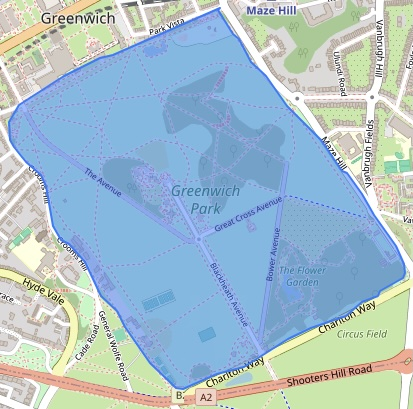

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAZ2gAwAEAAAAAQAAAZmkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAGv/AABEIAZkBnQMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP60dI8JwXGpWPh/WbmKxt728eygitXPmObd9kqjC7htwQ2wbVGG8wAitx7pPtmveH/BNhZXX9mfu7Ay3MdxFJNJ5iY3Iq+VIdm2TlseYm48Mo83vPGF9rHgs+Hhey6Zbs6xrafaHlmuXbzGbzblsSSmReNmFT5AoGMKOc8EaZaz+INPsftMlhbQSbyLc7VKAfMhUcFWXtjsCMEAj53FUa1dOVSd30XReVtj13SpRb5Y3XS97fcrbr3Zb9bdD12WK+8K68OCkts4Zc9x+HHTjitC+0b+0HR9PvPt1wkMMt48oSFl88sI2b7qDdtI+XjKmrVha/DqS/8ALsheXEdxNe3dzPCAbeOZPLeRG5JR5PMWYKBg72II6Ag1Pw5faGmm683kx6dN/aktxHAA07Wi7osogZh5e1CNmWYR4ydxr52GEhBuhWklGXwq+t/yXY8j+zoUpvD4htKVnFW977tbdY2urvl6LThPin4dS0tBf6jLez6tBPFDbQDEsMmYCZVhCkuu6ONPlKgPLHhMs/PM/BvxKNI8cw2EMoNj4hjOB/CbmJN6MvHVolYHPBCr6AH0iy1HU/DurSMknlzYaNnI34z0bB64OGA74r4a+KfxTtvCnxivfg58J/C2u+PvGOi2llqeuW/hee0sbHQ7q+jZwjX+p3FtGjXMZ3w20e6RYm3EKpWvdynFe3i4KNnHp5HTh8ZCtS10cbRt6Kye3lr5n6T+L/iT4V8GH7JqE3nXpXclnBh5mHY44Cr/ALTlV96+R77xxbt4+uvFfjm7TQdF8Tx2eg6hDFH58Lxm5X7ObvcyBkPmSQS4CgRTNkkKGHF6XranwfYeJNW0W88LanqP2hptG125sUv4ZIN5cySw3U0EgMcTT71lY+T87Ac42NM1Twvpen6P4w8ReJNH0dPEywJptxFqsOL0oxZVtZXk8vcrMAHtAspIH7zGFXqxmMWHWsXJ9oq/5bHoYTDuo7xklbq7W+79LHf6P4vbR77Uvh7pUwjt7DUEjsxao1ws+mptKCQOd0L+UWibzWRvNjJGVwDm6X4KS2mvpZpHt4b+4uJ5LS1kdIj9pWFZQzDazLJ5CNJH8sbNksrE5Ojq+q+AfhRo1uPFGo6b4ZsWl+zQtqF1DZRvLjOxTMyBn7kDJrA8YeNv7K0ee9tNS0fQo4NzyX/iG6SytkhR1jaVEdo2mQMyhWDRxNn5ZOx/OsRXxld8tClKMZX0Se3b0T+4+gwuBy/Ae/zK6vva6T3Wi1/qx1eqat4Z8EaEb/Vp7fS9OtQq7nKxRJnhVHQcnAVR1PAFcRHrvj/xrIv/AAiVp/Yelnhr7Uoj9pkXp+4tSVKezz7SD/yxZa5DxRL4E+E/h23+MfiS4l8a6jNB59hNbzW91cSwsUjL2MCOkSxZkRHkiA+8vmOetcP8Lv2hvFfxxvdX8FrpH/CFSzRSxaZrsl5aX1ks7SJbRI7oxhFz574+zkknG0ZJqMNw/i6keeUGl/Xz+48LMeKas7xwMLL+Zr8l/Xoj6M8K/Dvw54UupNXhEt7qk67JtQvHM11IvXbvPCJnkRRhIlP3UFeVX37aP7MnhLxbB4evvGumi93lSI5PMiUqPmDzIDEnAx8zDnjrxXy18N/gh8ftD8U2P7RnxB+JcmheGrS4uYtVttc1W1u4jHY3kttgz27rZRRziNWCBt8THY43qVD/ABF8Ef2BU/aG0/T/ABRo+nS2finwrq/jQ+IpNd26PH9g1CzsyoVW8p/Pe9zu83apTYqc/L9Dh8kp05um22kr+4tL9tdD5GcJ1KrlVk5SP2H+Anxj8N2vxPvPgI01zPex2UN3HcTqv+kOI1LtlcZJQoSdqjIIHt8T/tI/tr/td+AfiBrvgPwtL4U0QaXcGCF72w1C9nmUjMbeXZ/aWQyggoHi6EHoc19VeEEsYZ9L1jwbHBqSxQxzWV7bhGtGhODGftA++F5HlxE5DfexxS/tm+Bh4++H9j8RtBXi2VkuNuS434XG1Mcqdyt3yANpHFfZ4P2tPDJTjqlse1GKm49L2++3okvJLpY/BvxB+0t/wW3+JGmzaiPt3h6xiUvIYbOz07Yg6/60CXj25r9XNG+E/wASf24v2AfBmg+KcWnxF8IX9hDJqmoXvzXElg6QX8/nQC4Zf7QsmmGxk+R5RlfkU1L8H/Edx460G5t/FF5aRSQKtrLHcMggkzwu3AJJfesbB24wMLncK9f/AGMNan0Lxl4j+EeqBzaON9ukoc/Ko+VSSSoJhZcqCOn3eMnHA46vVnyV4KPa3kc9OMveU1Zr8j8l7r/gh/4U1HWZ9V+Jnx00+zMkzbLSG2W4ZFZvljEst0hOMgD91z6CvrPwT+yB+xP8KtAsfCGu/EhdSfTF8hJE0LSLmY88AzT6beSqfdZV4HoK9Z8e+AbTQfEmq+HZA3nQSSQxzyMXlVOsZVm5XjawAwB2rx6H4d6VrFm3i2DV4bAC4UXEMkBCwSOV3RnkGRidka7du4cDJNaYvM1Qtzqy2/qxrKFOmlKb09Dxn49/sk/sDeH/AB3K2j+Hb3X9bJkkvJdSvJbe3ldghiZFgMMeGGcYVUwe54rrp/2a/hnp2htd+CfBukReH7eMXluZLSCdntzEHbZ5wlkExOQD8mMV6t4e0FfG/i2S212eaaGDT4xYXGRHIVjVYll8vBAI3bR5gIK4G3aMV6zr3jXwJ4ThGn/2hFbmwO1rG12O5BjO2No1VmUYKsMbeg525B8XMs3rxrKnRTv28jDEVvZzjTpRvL0OX+C/hvQPDPw/XVfDlja2/wBrRpYUjjWDZGCSsbOByA245xgZ4HrveG9W8UeN9HtNXM/9mvbXAnka3yQ9sVwvyh85LsEUMwDMMnCcr4ReeNPEniVJtJ1V103S7rdaBLcxi3h/dM4UyYyeCoOCFJGABj5u78K+EviJ40todDsIdR1G1eMtFB5vl26+ZkSk7VVvmfdyiYMZXsa7cs9tGM1WW7bSR00aM4pupZXf3H6G/E210rxx8ObLx60P2660pfJuWAXcFyjFtgyMh0jkUDlVPy9efzw8Q/G3TLSc3GmaSTdwCWFZLwpEV5bKrt3MdzQgbflydntj9JfgX8Jtd8A+AtQ8LeNhbRWV+r74ICYxCpQIRkEjlerArjaOPT4E+JP7Uv7CH7PmuXOmeCFn+Ini6bcPsujMLkhyOd92uFUcfMA8hXH3BXs4fhDEZ1iV9VoOcktbbJeb2S820jjx+IwNFKri5WS0Xn6L9Eefafo/xp+IOpmz0y3a2S+kLsIlNis2wqu4cG4fMSAZAYbWXptFfeX7GHhex+FVprfwwv8AWtPl1WeZNUbSo3WO8gXy0geR7cnzVjYogVmVfoBjP4+ePf2qf2ufjfI3hmzuIvhX4clBP9m6CuL509JbrAIbGeY9gI6rXnv7FXxf0/8AZP8AjlqGnRW8N7H4qKNbatOheecQEie0Llht8xvnU/8APRU3B+BX38PDSGXZfiMTUrJ1qcOZU6a5tFbmvPSPuxvJqPNot+h4P+s1J1qdCnR5KTaTnLTe9tLX121t6dv2l/bF8J3cHizRfG0jz/2ffQjTJTHKyLDPEXkh4THEyvIrE8ZRF6sK8s8A+MpLPT7iwePy9QtJovMmiQNIdP3L8kIP3QUjCtjLbk4H3a/RSeHwP8cPhsY9wvtF1y3BVl+VgOoI7pJG4yOjI69iK/KTxRYa58MfF0mh638+s6PIEUIvN9bS/daNQORMq5AXISRSuTsNfntWCup9D6/D1WlyxPvJPjTp/gWwl1XxDqEcmlw2zXkzSvkRWsS7nl39o1QE/NwcYHPXwr4j+Ov2BfG/hbw/+0D4n8XWNjo95dW8OlamkiiGW4DsY44t8bjO6FvlTGNpPB5rwf4xa5Ya18IvFnwb8JWS3Oq6touqQQomFbz5bWRY48nAyThAM4UYHAAFfkdr37H37SFx8Kh8I7vw876H4Qh0/XNAhimjJbVNYl0172EIGIUWZXUiTnpOAOmK97KMJgcZF+3rqNpJPVLTy87teiv2PNq4x05futbfn2P6E/i/8W/GMd7a+Dfhdosf2O3Dql5cQysrPG+x/LUDGB6v989P7x8Yt/A4+KkS678UvCWmavqtuz2Ymv8AQbSZvKidigQzwSMEw24DdjJJr8+Nf8JftE+I/wBviL4mJ4QurXSdP8XTxXF7pjHyL/w6bJolLSm/IkM2OYUtkSN8EsGY58F8O/CD413nwG8a/wDCG+EPEvhDW9e8T6Rfano0koe1k8N2kkqmwsd98klzKFImuQz2/ncop2gA9NLKaUeWp9bSuo7WsuZ2tpLotb2tsnbQiWOVuXk/r7j9OPD3ie4+BtrrV74Xt9B8Dy2yT3GqtHptnp6Gy08yF5XENuGZREGZMqQM+lfQ0nxWttIubDz/ABnaRy6hpk+u2Kx28Ektxp9pGsslxCiWxZ1VGU8DJyABmvjP4dfDXWG/YA+Ifwsu9Tv5PEl/4d8Tw6RpGsRQ2l+w1CCVLe0iU3d1iJH4iVpmYK4HyAV4vZfs5fETwP4k8KahoGueJPGMsPwo8RaNdDVZ7Qpo2rXNjbiGztjDDblcuCihmkPyjDdc50MDhZOftsUrpyS6XSjp/l+CKnitIuMbH6cTftXfBvSrS+1P4keNTLDpenaFq11JLp08bW9nr0xt7M/u7VD/AKQ7ouwjdFglwozXoVn+zz4+1JFv/Gmp6fYMoIleBWkG1CQnynywvyBc/McGvxF8e/Bf9oDXvhV4p0Y6Fc3Goaj8P/hZpq5dXklvtEvYZb2PJbl4QGaT6d6+7/GfjrVvHOravoupO1/fRXDzafI77/mhfcIV3thQ4GwY456V5efUMuo+yUZ8zba3TXwwfTzbS9LdCIYqFS1KqlZtdPVflY+zIvCX7PWgSNFrWvS65OgG+G0cuqnsP9GG5M4/jkrZtfiV4C8MyCbwJ4SjimX5fPuPLikPvuQSu3/AiDXwTZa+ulalY+MrKMmCTFpdJjbJskYKvy/3o5OoPQbseh+jwyld4Ix69q4sOqdvcikdzoRp6JE/xE/aL+LcmtLoWgzQacHh84OsXybd23bzlmI4yVaPAI4Oa+eNO8L/AAyT4Sy2Xhrwxptq+l6XBo6Q/ZxdSQppZZrSASTCSR0tnctagk+WG+TbnFWfGfinw/r+oWJ8Ly/a720m8syRozw+RJgSjzANnGFbr1AFXfCavaeMbiyiAMOqWxklC/KyvBhQ+Qe6sF6Z4Xt0j2j5+W+h0KC5L2KieJJPE3inTpZ7uS8k8yaSZpCzt5IglLkk/wCzXFfFO/vIfHJlhlKvbJF5ZHGw4zx+Ne8+JvGWi+GoJ5L6cSSy53W8ASLzD1w6xBAQD03g47dAK+OvFGuy3k994injyzb5vLXnoMhR/IV4WdV4RpqhGXvXv6HiZtiYyShHc9f1HxvZ+JdBtb/UtiXumTL5q4z5sEo8ptoHpuViP9nj26P4cJ4Nbw5N4cuzEBfXcji1cKg2gjy9qADb8qrwRkkZ718iTa/qNs/2IJHcT/K6+UPlKFWYjr1wmAemWU47V6z4Q0DWvEeoQL4ZtXv7jfGUhSKSTKncQ5CDJjG3krxyBkZyMcHmeInKMVDme39fIWFx9ecVSjG9up6PqunweHvA/iSa18RQPGdIubJo4dmSuxvLV2ZnywGQMBTycV+zfiS5fTfDN/eW3ytb2srp7FEJH8q+SfCvwt8J+BP2cr/4e/HC/h0u315ZHuh5iB4lMaDaHKkMyBM7guB+Ga+oPiQ0ifDvXmh++NOutv18psV9XTjaKSR6lSV2fgbpll8WNa0SL+ykv7otEYvPNw21mjaWM9WA6MmOwKcd6R/hp8ULm980aLkbizb2i4zIsgC5kxwFC9eletfBbxjqGqyL4Ht0VbXT7ZJTcQJGPmLKQG2PLH+9/eZxtPXGCOPoiJo7qZby2uN0aCSIom0oXDAHJxnchUrgEDk5BIGPhcVmuIpVHBpHPXzKtRm4cqPiiw+DvxInnayt7VLa2GbcvM6JkGOUb8KGbaN2OB1YcYyV9Gg+CnioahJ5OrfZE8mI7lTejOxdnAIdW4ck8qBhhjoQPpjyhaMXmnLfaZPkR9oC4QfImACfulucnr2AAhtZ4Y2/ss3HnXEEaM4JXzNrZCuyqABuKtjAAyDjpTp47FLExpz08vkYSzCu5qL0P//Q/pu0q7gt7qOeRIpo8qw8xPMQMpDI+3jJRgGGCORwRWrex3vh/VYr2CaLz49jlrc/Isu1WKjnIHIIB52kV57ZEaNfz+HrqaORYAZIJExsMQOGUYAH7tsrwB8mw969o8AeBG8daUNS0i3VYb2fyptR52r5IVEbnCOBu2EBgx4xnbgeVfqexGN7wfy/rpp+KSNbwx4qlvIbzwva6rJYahrMk9zbtKvmxRFVhUjLffVWGShOREWCnCjbrXjWthq8kmiziWO3nkRHQ9Hhcoy/VGUqR6ipX8Kf8K80SfxLdw3dkNHku4L25uM+XKFbZHKqIpZkaIqUWPjLMrByvGLL4pttZ0yGPw3YRwDAka+nhMbTOwAJEB2NnbtG+XByv3GUg18dnFSipyu+W2q/yX/DWVrGOJyytjvdpRfMt5O3Lfa17a+6otWb6v7WnSeMb+wg0qLxh4g1KENdyMAgiIk25AVFjTc8rKTt+RckY44Jr8rrf4leEf2aPij8cPAXx3udY8GaL8U/EcfjDwx46s9OkuTtutNtbJreOT7PeW9td2T20iiK5izJHKGC4yK/Q/TNHi00vK0011PKcyTXDl3J9v4UX0RAqDsAKzpvHlxE9xpHgXdq+pxSiBrS1nSNUmK7gssjMEjO0btvMhQEqjYxXBheIfZ1pOFNvmSvbe66rf7tT3I8OUqMPaup7/V2Sjt2W33/ACR+RHgjwf4g/aT8M/Ai2+M9vqXjfQE+M/i4W9/remLay6j4fsNN1QaZPeRx21rG8UyLHuLQqkm7aVwdted/tMeH/DGo/tU+PYviHrOheHvAHinwno+geF9QvPB58RaSLO2jnS/sLS4tnVLKeO5dpHhjTfIXjb+Dj7p+NX7U3w7+HP26y+N3iaa+1iGQ240PTkkbTxg4cTJ5sM12oG5f3pihfqIscmh8XPhx+0p+0ppmg+Mv2fPHa+FPB08af6HZySWXlW7orIxjgVd5XhQrPxxjbX1GGxOIm1XrQ9nSs999732t5bfcePi3TpQcYtNr5dOn3+VrbHwt+0r4M/4U38bPBdz8a/FUWq+Eo/hFoGgaDr/inwXLrdndXMLSi/S4gkljNjeXKfZ5n81WlkGEzmPFe1fBj9mfQ/iB8YPgL4V1ESeMNJ8HfBnVYtL1fxJpbpFJKuqWEVszQzq3lP8AZZGjQOC4QHjuP1M+GfgjU/A/gPSvCXibWbnxNfacm19SvuZ5m3btzZLHjgDJJ+UZJPNeotfajPFJE80jRn55AWO35e57cep6VzS4jily06eq2f5dD5r6/rtdn4H3Pgr4gfsgfAqP9ob4VeGL/Vr74R/Fr4jaLpmhW9q7RnQ9bmvLO3ihgUf8e/8AaC2Mgx8gAzwBXof7Pn7LHxH+BP7Unw6/4J9mzu9R8FaVquifFu71hUZrZ73StMawuoDIQUDya7Bb3pj6/vSR7fvppEq6xp1nf2SvLFLDNdzajaXKyR5XYirgPubzMZ/d8ZUnq1cBb65rEegQaHfTrdtDMbjzjEsZ8zJKlVGdm3OFOS3qxNdmIzn2dpTjo1p+H5HVX5aWtR28uv3bKzVrNp7aH4e+EPDth4O+En7PPjr9o7QJrz4aeGfHXxRm8RQX2lzahZ2mo3ur6h/ZF7d2aRuxgAM6RTNHsiklRsjg19AeKfAPwo+Mv7Wvwm+IfhTwxpeo+ENP+Gvi6/0JItKe30iC8bVdOiQx211CioSGmZQ0QDcyKGGGP6ef2tqv2j7Z9pl83GN+87semfSodQ0/VPF1hNplistzqVz5ao73JRFWHe6kqflb5j5Z/iCOSM7QKzwef06tZQcLX0X6dPkGDxkJy9k1a/p06dP6tZHz7/wTg8OjwX8MfiL4H0+xbTNH0n4oeMYtHsxCYIINPkvjLEtvHgKsOXYoEG0Z4r9LdAsNM8TaXqHw916ES2V+hlXPQMCMjHGCDtdfU7j2r4V8C+PrzRvESRa7PK0c5zF9oYl0zhZYMNnByA6oMHcGHQYr7EguJIpINQsm+eF0mjKHG7b2z0wwyp/2Sa+koV1V5otar8uh0q8Z2/ryPzMt7XVPhF8ZToWskwQvK9nN5jZGw/6sjODhSByCyqCcbAefbNPsdb8N/GjR/iRZ2ZdV+S5ELIcKjYGS6hxvjPITuoHzDmvaP2rPDHhaPSoPjVbaa2qCeON2TzGjT90m9GYepVQMFeMYx8xr5Cn+I/xD1jVohoOkiJ8vBG+Zp4z83zMAPKjONqlCVJCk4xkg/N4vD4iGMVXDw29LMirCrKsqlGPSz7f56fofTH7bcV94U1Cx8caM0SRalEYpJHAZVkiHyt95OCpA4yeOFNcNZaPo3gTT5tW1O7YySiJZppWyGYcKqqoUdWwAq5IxnpXpvxh8dG2/ZV8PXni3S9RudYvNRsNFt7Wwgt5Jze3j/Z4Uzc3FtbqGLKu6SdULYXO4gV+ZXiX4zfBXwn4d0vxx4j1DxBr8OteGLjxJoWmAwRXc6abZTXrxRK85P2hbezuWEscUlqXXYJi7Ir+rjsDLEe79hr/K1vSxpVgpw9nN2XX9D12ztfGepT6rpfhG3ZpLSGeC0giSUTtaytujIAAbCqgxwMbSpBHNcDq2keD/AABpeoap4m1+w0c6NNY/araWOdruKW+NsLVRFDC7SzH7RYGSJeYvtSeb5ayA10dz8dfB/wAPfjF43+EX7dGg2Nv4Sn0pjYa1pLJPHqI1UveLbRSQm2ugmm7Xs7S5itU3yQiWV4bjyg/59v8AG74ma/retXXgwTa/d3XiG8vrLxV4gtYre6udJvNFsNH+x3dogkinbNhBdPKoRJbmCGTyowpiP1uScEZhjoKrThaktPaS92Gn957vyjd+R52P4gwuD9ycvf7LWX3Lb1dkfZXj/wCPGnfAf4f6z488N+GbB9T8PeKbrR/sOuy/b3v7SxsI9Rtnt57Z7SKxfUdO2m1YveFZpIomRz5pi+i/iR/wVq8DaczeDP2SPCkniKbIjGoXKmzsUY8Z+YBmIPrtz61+NXhf4EaQby0s/FdydRurWAJDHP8ALHFDvd9qxjoN8jthjhmYnGSa+g9F8B3cmlwLbwjTSrjKSIpCxjsFU4B/Aj0r9Hy7g/KMGk618RNdNYUv0nL/AMp+h8hjeJMZW0halHz1l92y+Sl6nMePfiL+0J+0VfpcftDeL59S0xP3f9nWL/ZLIuf4WSMJuO7qCMjHUCuh8O+F7Cx0n+zfDWnRaRkLGfsihn5I3kSBgeVJAMhzlcgenq1poNtbXD3jMzSSYyAxVABjgLnpwMjvWrJG6WzR2QVGCkJkfKDjjgdq+t+tVPZKhC0aa2hFKMV8lb79+7PEWNjGTqJc039qWr9PT8PJHMR+HJLmZLnU2EjxBPKkYbpkKgjIPY8+rCuU+IXwssvF3hVtJ0uU2d7BILq1uB1W6TlXJ65J+8w5/StGTV/Ffhjwbd6vryi6u4m/dqNv3TtUbtgAwDk8fw16LDIssSyoQQwBBHTmoo1ZUpxqQ3RzYmrVqLlqSutvI+vf+Cbv7Tk11bf8IN4v3W6Xt39iuI3Py2GsgBfL/wBmK7xuj7eb8oyzMa/RH9o74cahr+hr8Q/Blotz4h0GGXy4QPmu7VsGSDIBO7Kh4+Pvrt4Dsa/na1XU1+EHxEg+J8rSDwzrPlad4pgiBJ+z5xFdKF5Etu2GVl+YEDHU1/Rf+zZ8XT8T/Bn2DWLuK81nSFiS4uIsCO8glXdb3keONlwnPHCuHUfdr8m4u4fhl2JVXCq2Hq3cF/I/tU/+3Hbl/uOPmfoHDWY/WcLyTf7yGj9Psv5pfemfkT4ilbVbtdXHlvJeYcmAHy5A/KOgyeGHbJIIPYivSvCnwouvtMV54mRfIKMTCHwwYbdoOBggjdnDDGB1ycepftafDS1+FWsnWNF0yN9C8T3yzSuqj/R7lcyPExPCwyEGTowGZeAAteNeBPGc9gn/AAgnineto7/ZIboySRTeZON4Qbm83ADBUcFcDbgAdPx3OMtqQcqlL5no4rLea9alt2HeO/h3cacZdW0S3AtVbHloxkIXaPnwQNvORgFsAA55wvkFfcP+j31x/wAtVazl/wBuNSxT8BIu1/8AaUMP7y8cPrvw30DxbaR6xpgaymmQOD5ZjzuGfnjIUg+uQGHcV4+Bo1MRJ04bpHlRw7m7QPlaivU4/hB4rbVBYyiNYevnhspj6dc+2K6bxV8JrXSvDP2vSGaa5tsvKT/GnsBwNv8AntXdHK8S4ynyWS/rQawdWzfLsfPEmpWMMkkMsgVoVDsPQHp/+oe3qKtadqSuUv8AT3KtGwKnBVlZfY4II9xXAHTNRvNdmtZViQq4uGmVskox/dALsGCDCm75sce/HS+HN02lx6pNgy3ypcSYGACyKMAegAArh22Oa1j6Fhew1GVtnMGtxSXRjPIjmUhZ1GegyysoP949qq3OnqLez07xPetdQW0UdvaWyb03eUOGMasfMlx3C8YGAK8703WXsITayRJPCW3hWypVsYyrIVZeOuDzU9x4iumVo9PQWgkG12QkyuPRpGJcj0XO0dhX0Uc3p+zvL4ux9HTzmmqS5l7yOun8RJp8ZsIIhp8UHyIm1WlIHogO2Mem45/2K5JvEupRtIbCR4PNG133ZlYehbjA/wBlAq+1c9RXl4jMq1TROy8jy8TmVatpey7IUkk5NJWxo/h/WNfn+z6TbtMehIHyr9T0Fe6eG/gzawbbnxJL5rcHyY+F+hPU+nGKjC5fXxH8OOnfoc9HDVKnwo+WNG8D6lqEkEGiRt9rhumlVoCyhYpJg7A7cD7gAweMiv1t0z4ryeGPD8Ph7wBoFjokccaqzA+YNwGOEUJn1Ds2fVa+Tte+I/gj4fH+wNKgM90hCm3tUAC/dGXc4UY3LnktyDjHNeTH4x+OdbVra2NvpzXfyQbIWkkjcqSi/N1LMrof3fBTheRj6rAYeGDi05Xb7H0WCwEqcX5nvHxW8aWPiHSNbsNf1qGfVrmxmt18+VFK70IVQowqDJ5AA9T612Hhn9v7RP2kPi9q/wCz38DNBhk/se4ms9fl8S6lDomopbRnZM9lozLNqkrYDeW13bWUD8MkrrXk/wAL/wBnPx38VZTf3Fu1no00ru8t4cystxHieLjqrN3BJVxgrxXzx+yz448SfFn9si3+BPxr8VeDPHlv4Z1vU9et4dU1TT9e1hL6wklRWsLSOzJ01bd1tJ0VbgG1dHjBk3IyepRqOSu0dNWmouxL8Fp9/inTrtQzXU9shRQu2IoyLvLSBVOVUEovl4JAG4dR9FfFeSOLRrBp7d7uL7au+GNdxceVLjC98HB/CvCP2d4ZrGeC+ZJFt3021DKYJNxkk2IjrkyZUDcGZdqgHJAUcfS2u+H7fVFtdKiuLi3kjmkvEcAyjPKsCzhgB+9O1Mjj7o2rgfC4rERo5ipyei/yODE1owxkZy2SE+Gsiz+BLWYb1y0x2PwyfvW+Qg/3fu/h6V1dq109rE18ixzFF8xEbeqtjkBiFyAeh2j6DpWN4b02z0vTItGJllbT5Gy5DQh3cbiccB1/edsqG/2l4+YfiN431zxJ4gI8IR6jYi2UI217mPzEPKMYkT5DncPmAYgD0wOmU44zGwnSeijb8zNr6xiOam9D/9H+svwz4M8FeCdH0/xD4w0bRNYh1IS6q10LjzViVo41jULs2SLInzsTtjBUHLEKa8+g+L0Hj7SL/wAK+GNIbxJp+ov5lxrV7cSQWrS7BAXjMOw3BEYG1bdY4MjiRGFczN8ObrxhdjVvi9ff8JBKHEiWWwx6fEw6HySWMzdPmmZ8EZRU6V1fijxp4a8GwRya9ciOS4ytvbxqZbi4ZeqwwoDJIwHZFJA56V+N43iCvVk/Z+5H5f8ADH3ODyupGSr4idmuifbbml1sraLlWiOhvRqGtX/9qeJryTUrgStNGZVRI4mYY+SONUQEDgOQZMcFjXHeJPiD4e8N3yaGfNv9VlTfFp9lGZrhgeASB8saE8eZKyRg9WFZUU/ifxZolzc+KEuPCmnySRQxCB0l1BkmcJukK7o7dckBthkcIdwaNhx86Xn7WH7MvwX+J0HwC0BZ5tSnuRFePp8JuViunZUP2mUtvkk7yN87DbhueK5qOX4vFy57N/i9Py+f3HLjuIaOGhyYOHPulb4dN9evTb7z6Y8W+FrrVF0tvGfiKLR7a/jVxo1lcrDdybydvmzBhJj5SNsG0BlYGSRTgfB9p47/AGu779pCL4M/DfwHB4f8E6PM3lsLWP7LsQkR3nnugRe+1YtrAMw5Nes+F/2LdU+JPi/VNa+KPiZvHug6tqKNZJb3CQXFoizHcvnBlXbbqEcLBtJIcDYev3df2Utksej62kdzcWMu8Ns2xBwflZYyW6DG1nLt3BBr6vD4bC5fy4qCT0ts3Z2W233aW6HymZY3ESlGvVn5W25Xs9Ft80nY/PL4g/s1fD/R/ij/AMJ34n0C3fW5lE/nSHzcllUZIyULJtwGxkdR1r2f4fa5eaVq6RafYx39zIdkEb/K3zkCRUbjDOgwueNwXPFe1+JPh/f+Nr24EbTS3oXzljC7iSi8rnom4ADLkDcAO9cbrXh6b4ZapYS20yWzSYjc5SSSKZsGMPgZRnGTHyF+Q5Br6bljXpKUvhkv6+7odVCsnFSS+X6O1tOjPdb3SLi1h1JYHglvNNZYzbSS+Ud7gMoY7W2jYQ/Ck7e2cVJ/aa28M9tagGK8to4Z4HVJIQQCH2ZQOQ+cHeSMADaOa5fw7q2u+JtJuJ7y3RLfTHWGORGGW8zcSrIPuleCNo2lXUdQwF6vicWvq1R0qat59TwcX/s03RpJLbXd7L5L0Wq2bZo6fbW2qXcWl6ijywSvCCsbFWUxOrxspHQoyqR9MdK6PVfDnnSNqOlQ3KQT3ptIo3tZgQ3977mPKzwJf9X0+aue00aOkd3d69qEul2sFtI8lxASssa4xlCASGGeMDPpS634w8VeLfF2rf8ACH6kLK1tPKEEokCxyC3Vn8zb5bPJmQiFk3InljeA+QR6GW4KFfDv2muult1p+XroeplGXxxeHarztFNtXdkvhvbTVu60Wum2xDqGm3ulXJs9QjMUgAO0+hqrFIYn3D0II6ZBGCOPaqnha5TV5J/7TkmnuNUvPkkaXCRSuVVVWNvkUSF8YQjLAcMTWXHpXizWdG/tbxat14B0O4m8uHVLmOKS7KRhmkItn3LBu2hYvO3Sljj7P6Y1MjrqvyUl7vft2v8A8A86tlVWnUXsvh3T223+7/gnDeP/AAZpWmafdafpt00xTyo0uLxkLGaWICOQFCDuZ1dd21WaRHPXk+0/CX4oaTqMFx4d8Qs2l/2dai5jmvmjQPDuWMglTtGx2VRwuQyhRXzz4jXWvjB8DovhvocD6Ogmi3eINRink1B7e1lS5jNvHNJ5wJliT95MsOPm2W6gjMvw68UQab4qttT8q3ktNThQ6ikibmhhdMbpJV+VYhheGwu4bgeCD9Xh68P+XcryirO39fl/wD26lWjUm3J35d7fjb7tNPI/QPR/iDY2H9oeENf0m41HT0ceRMsaTQS+ZG0si/ePyoykFnC/M4QDoTxGr/tKW/hy+bR/CPhJ3fy1KPEAke30yFVRj031+dPxH/4KMfDqHw7aeHfg1FfeI/EbW0btDYoPs9s25H8uaZvk2YXYxXdwcEg18UeN/HX7RXxju7iy+IOu/wDCLaSq7pNL0RJFOxsDbJchTvPIBVWKn0FfpGUcC5rib1cbbD0dOVzXvNf3aa970bUY/wB4+Zx3EuFpTlSox9pKOloaq6tq5fDq9NG9VslY+yf2sP25vhD8TvAB+DPxqsLXWrHUHsb+fRdPjWe4a70y6t722hkWZZ4NpmhXzEkQhlUrjmvhX4ifEj4wfHbxjD4+0Pw7ZeDpbSC3tbSdi73EdtZrMtvttNwsongW5nSOYWy3EcUrRrJ5Z203w14P8C+BtORvDltBYzq+2fz182cqDjHyPnJ9C2B6dq6uz1SxuDKlxLG41BniS3Ztg8r+6E4G7BwSMkjFfouW5DlWWQ9pToOrNfbqpNf9u017i/7e5/VHyeKzrFYtuLmoL+WG/wD4F/lynl3hf4PeH7HxZbalfynV7zy1lnubuYTyjaGUYz26AYA2469q9Y0jQNI1m3mgaeO5gdywe3wAQD9zKseFPVTnt24HJ2uqCw1Vr69gmb7L5jRQo2SpRWTgH1XOOnUV6VewTOySW7bZbdt0ZPTjggj0I4Pp25Ar18wr1qk4yry5tNO1rbJdEux41arGikqUeXppbdef3bNfM2NsFm+LaPDYxuPLY+p5xV7TJppomaU554rCXXk4TVbWSI8Dci+chPtsG7HuyqKmHiawVPLsbeeUj+ARGP8AWQIv61wxet76ESxFH2XJGNmdTRXINrGtz58mGK2H8JcmRvoVXaB+DGkXVdei+Vkgm/2vmjx7Y+f88j6VftInJ7SJ0skd00oKSBU9MVBe6vpunMI7uUK7DKxj5nI9lXJP4CuZkOp3Y/065YA/wQful/MfP+TAe1JbWdrZqUtY1jB5O0Yyff1qXUXQU697JLYNUvJdfsJtKazUWtxGY5PtPO5WGCNinoR6spHpTPgr+0Z49/Y58TaHfeIEfWvCelH7FFeRgC4g0+dsvaTgY3orYkgf+B12/dbAuVla3oekeJdKm0LXYvOtLldsidOPY9iO1N+wxFN4TGw5qMrXXVPpKL6SX3PZprQvCYyth6yrUZWa+63Zrqv6Vj+l7WNM8HfG74aiK3uPtOla3bR3FrdQfeXOJIZo8jhkO11yOCOR2r8cfi2bjTfH3/CPeIYI7LV9NeOy1F9pZLhCQ0ciRr87Qcq5y6ZRvLPzj5bf/BKb9o3VdCa+/ZM+JEm2XR5NukzSHG5X3OqDgDbIg3Jj+INk5dRX3d+2d8FZfGXhVfib4ZgaTVdCiP2mGNmQ3dguWZfkBJaE5kjwpbG9UG5wR+I8TZNUwOIrYCTvy7PvFq8ZL1i00fsOV46GKoRrR0Ul9z2a+T0PHpFnLRmFlVQ3zgrnK4PA5GDnHODwMY7jwvx98SvE2i6zc6BoyRxRp5C7yV+0kv8Ae8lGJD5UjblRgoww2RiP4aeKb270G60zTES61ItI8U7LtWZVTaskhZtzhWVYSVZ3A2bsc47D9nPwX4xk+KSeJ7LRZrmFTHHLJLF5C7B5bKuwgIojEZUMMIV4Qs3yn80yjAyji3zbx/r7gwOE5a0ue3u/191jG0f4r6nHr9roPi21WyaRY43Ug+bvkUMspX+CM524P3SRk17ojpIoeMgqehHStf8AbC+COnxaePiL4aslaVZd9xFtPlkAFiDs6LnMnT74IGTJivnT4K69dyWlx4cvUIjh23Fs5Tyg0c+47VTqFBVtvfb2GOftYTlGfJM9OcIuPPE4H4meD/8AhG9W+22a4s7okp/st3X/AA9vpXmdfc3iHQ7TxHpEuk3nCyDhsZKsOhH0r4ivLVrK7ks3ZWMTFSVOVOPQivkM4wKoVeeHwy/A+Xx+G9nO8dmVqKKVVZ2CIMk8ACvHOAVEZ2EcYyTwAO9e2eG/h1pGmz2svjq5jhluiBBaFwrM3ofX6D6e1dX8N/hyukKmu66mbo8xxn/lkPU/7X8vr08q+K9zpsnjU3VjGzmUfZjJu4kmiHzRKe2QAFx0mAwMhs/SYDK1CCrV1r0X9fke7l+WqXvVfuPd9b8aaL4W022/sG2W8juPNWFbVkEeYRllBHfg4AB5HavmTUviJ428XzRxXV1JZrdJhLWw3B9koHTbl3Kh0YEAZ2uMV9MfBr9l7x94y0mFfEJl0rThIlza3CMm75Q8YbYwYAvEy8KCvGdytX0J9k/Zk/Zs0gJP9l1PV4zgIMO7SBsdPmwFcjrvZCeK9188knsj3oRhD3V/X6HyT8Lf2TfiN8QUM95aLoOnlc/vRguJFJKrwRj95IoYb/l2hgrKK+1dA+G/wN+BohvXiOt60jFJJE+Y7z94urPtUZ52szMD9wZr5E+K/wC2R8QPF0ptPC0jaHp0sYOxFV7ho/lyemFJBZRkkFl27Qaxfg74hl8TaFcaLqv+lf2ZKmx3YSrjO4AEkn5JFYpwMJsI9vOx+MWFpc9KN2vw/r5GOMrVKdL2i+7+vyPSviT+1/491f8AtWw0C2bS7a1Uqkf2W5MhKruw0ibNvYg5A2kZGK+VdP8AjR+0B4l/a18N32n7/G9rD478VaF4V0zX/F2labZ2d/pEOpW08xtdL8NnURGlpDdRwrc3FwBvQyFnMctX/iZZ3F14x1eBINSiW4st+yJxGjsg8syf60Ky7QmQBkDggHiuj+BHh0ax+1r4a+MHwhfxhdXbXkmmeK55fDmjweHlt4bOSKawj1SLT7XUpvsV2sUaO1xcKWhZHLn5l78sxDr0vaPqkRKalShJdV/kWPg/a6bpPjHUdF0tmltYLZUtJSsq+ZBG5UFhJgBsbeEG3rivoRY9R+ySIZY/PPmeW/lnYoJOzK7snaMA4YbiONucDxDwholgvxAvLcRSTLGb2OYS7pIxJaXa+VgNlAUIYrtxjt0r2w7RA+syaezXUCzRxofL85kBHyo28KBLsUgFgPu7tpHHw+cQTxkzx8xSde/kjE8a6ze+HPD1xrtkYs2qs5SQE+Z8pCopBG0l9vY8cY5yPgYX+kadbre6kiqt2zNG0/lys2MZJdraUE884Ix6Cvq/47anbaT4fisbe2BN9cLLK6N5YBi2hWc+mdg6qeAAeleZ+CLTwHHZXHij4k+GvEniSG8m+y2n/CO6LdawYmtlVpWmMal4w3mqsfmE7tj7SQtexw/h9HJbv9D0ctgoUJVH1P/S/pyvb/xP42R7T4c3trZW8ARry9lRpJ445s+UYIWVUbeFbErMVXCny5FYY2vB/wAPNC8KTPdWCy3up3QCT310xnu5schS56KD92NAsa/wqK9y+NuseCPh54p07SPE1xb2uqau8lloyXMvki8Mm1hEpXgkHCqGBIYFgMHJ+CdB+G3x28W/GvTLrV9bgtY7y3+0JFbXhIms25eCGMFFPyriRiccKf3mK/Mf9XI0ZyUpW5Vu1v8A4UejmdfEZg78zjRVrpWdna+ys2tNL2S2drXOe8GftGfH7xl8Zp7XwF4ZGm6Fo0V0Jo72JpNSaSJWw5RWEcByhVY33se65wo+mtN+Dvwv8NfES7+KWiaYE1u/ZpZmkSMrFLLy4T5FfAJO0Mfk6DjAHS+LvF+naJHDY6Xc3MV+l6LRGuItr3b2oEkqLMwCtvUZdlDFVZjtz08e1a91PxUJbzXpZri2MnlyfZFZLSCSQ7VDOOr5IA3E4OCFWvXjhq04Knh4+zj18/6/Toc0qE6dP2FCKh3vrK1l5JK+6trZ2uefN8dvF897FK9r/Yn9my7WtWTCgIxAQkqFK4GCq/Lz06V9Ra14h0uHwh4e1b4fW81vYi1jt1nly0allIjRZA3zGMI8eOCuF55XPy5480w6npy67MN08bfY77oNzhfkkwOgkTnjoeK9V/Z80VPGOian4S167uF0qzfznMUgYrNcgoDJHgnaG2zB8ARtFuyBmurBQgko8ivs15/1+B5eWy5as8NWu7v1V0tH+nzL9l43vEsbbwho0EOmxW6lr37OCJJ5UbjL7sojDZIADktuGcK2efXQNLhBSyQ2sbqUkjt3aFJEJztdUIDDIHB/lmr1rNvMts7pJLbSNBI0RyhZONynurDDKe6kVbr2b3Pc22LOnax/wjt9/arQS3cYVs20U3k+ZLsZYtx6EZcrg/L824/dFeuzwyQOBJG8W5VcJIu1wGGQGHYjoR2PFeLOiSIY5BlWGCPavabC18QeI9FhtPD13pU13fzBdMa8uXQCNMRzI7KshLxNHM3lhQOCu5QM14mbZY8QlKn8WxzYzBPE0vc+KP4rsvTf7yA6xoPh9TrXil7ePTbYb7prsqsAiH3t5b5QuOpPArj73wX4o17S59d0g2lrZww77y6jZSYPPEZglS3L7WjkSQy5aaONUUjOQRXM/wDCW+B/BjDxtIb/AFzUjdiWXULq+tF0HTbKCUBh0ltQxKEERfaLgY2mePPHwD8UP2tLfxhqGraR8NYB431C/wBSF9NOLRNP8P20yuXB8oAvcOpOd8sjPkAo+Btr3eE+FMfipOlg48/8z2pw/wAU5WjG3ZtN7JM83+08FlVOVLGVFzNqyWr07W6NdvLax90ReJdP8M2eoW/wutrfXdRa1TSrrV9dgktwUUB5TviWJpwky/KLcWsfRvMkKjHIX/xK/Z28GPp3jbx14h06DUba0WO1jnnTdZoy4Zba0QlYAeQ/kxjf/EWzmvzmPgnxp8U2l1H4z+J77UGbn7DZSG2sowOwjUDdj1wGPvS+HPhf8OtBhtrvRdIt1l35ZLmAvKEGem87lJ469u1fptXwxy+VOP13HSl3VKKS81zz1t2/d27HzeYcVYjE0+WhS5If3n5dYx6/O59OeNv27p9aMmnfs9+HZtaAcRf2tfq1vp6sTtBVeJJB7fIR9K+WL7wh48+I81yPjTrMupwNcGWPTNPb7Np+/uzRRhQT2DH58da9Js7V4TNpMHnRqFMuZdxjLkYC7j1+i8ADtU7Q2tjaQahqcP2qeyyw8lCNztgDamSM9ACenqK+tyTKstyWNsmwypS/5+P36r/7ea93/tyMF5HzFerOr7leblfZbLy93b/wJvfRFLT/AAtpen6GNF0Rf7MjDn5YI1RCVx1XGSoIwRxuwc8VtXF1JqFpcnQ5wsp8yJHYHCyISuCOowRjp06VJb2dtp8K2VoD5ceQMnJOTkkn3PNSgXslztRI/s/lkkjh/NBH5gr+W2vQlNyd29ThdVN8kNou8dv61svyPFL+zaxupLckMEZkypyMrwR+FOsra6uLyLT4GCSz8xqW2ltozwO+B6dK9dm03TbiOaOWBM3GPMZPkdsdPmXB9uvTircSJBEkEKhVjQRqB2Udq9N5o+XSOpheiveV/Tbp3/4Gxw2j+G71Jo9Skle2lgm+dXRTvVcH5Tk8Hpnjiu7JycmiivNq1pVHeRnUq81klZIKKKKyMgooooAKKcEJz2wN3PHFUlv9PZ7eJbiLddjMK7wC4/2R3osaRozkrxj+BboqvcXdlaRPPdTxRJEdrs0igKfQ88H2q35b8YGdwyMc8f4UWB0ppXcfwPHvHtxN4A8V6P8AGvTvNX+yXS31D7PxL9jZwRIn/TSCTEidPmAzwK/p1/Z1+MEPxk+HNrrdy8Z1O3SNLzyuI5CyBo54wf8AllOhDp6ZKZyhr+d7UNPttRsptN1CMSQXCNHIjdGRhgj8q9Z/YM/aEh+BviyT4b/ETWmiuNKkitLGCaM/6fo8hO3ZIOGe3YqVQj5QGVThnx4HGGWPGYCOOpRvUoK0rdaW6l/3Dlo/7su0D6nhHH+yxDwk3pP4f8WistOq9Nu7R+sNn+yH4J8H/EW+8fSX8djogmNzDAcJ5HnDa0QY4AiDEmNfuqG2hcqrC944+Pvhzwr4SuLr4ZQYsYXYyzWyIzyFW8tiuTtHI+Z5OQAc7cZH0B8Wvh/YfGH4Z6h4RiuvIa+g3Wd3H83lS4zG4x95ezL0dCVPBr8afAevXfgfxHqOl/EG3mSeST7FfW/mecltcK4RvMXaqKrk/Lj7yY2qQcn8fnGNOV0rX6n6hT97XqvyPdLT9rXV/wDhEL/w3q9mTM0v2jyUJlKqHLHfIcbCHQ+Zw395QcmvLPhnpEGu+I7LxNFpFtBHarKjmGNolhl6Y3Mx8xlxswBtUc5HAr2Ox+GXgawtXtE0+OVZHWRjNmUsUG1QS2SQq/KB0xXIfE++HhHw5a+H/DkaWUFxuXbCoQBFxkADpnPNc+Im6VP2tTaJFfEwpU5SSMT4kfEnzvM8PeHZPk+7NMvf/ZX29T+XFfIOuS3cuuNFa+alwFEMGI227XGHfcBjClkzzxtr0SoTbwtcLdEfvEVkU+gbGf8A0EV8XisVOvPnn/wx8nWrSqS5pHO+G4QPOnt4fs0BxGIs5/eREq7cccnj3xmvr34U+CrO206LxNfx7rmXJiz0VOgIHqf5V4L4O8NDWtag0W0G1JHZ5D6Anc5r7dVbawtVQYiiiUKM8BVHAr18iwalJ1pLRbev/AO7LcPzP2jWi2OF+Kep3Ol+Bb42QbzrhPsyFGVGUzfICCxAGM8GvlTw/wCNbDwDcz+JtTgstXzPY2tta6jqSadp/wBr1G7htBJe3KNe+RFiUgyCJiWIRULMuPtnVrqxttHn1G9Tz7eGJpmVVD5VBu4HfpxXwZZ+ILLw/wCEPGEvh1ZZ20zw/qty01stv9qaK3t2utjG6tdStAjLCY3EkEy7WLLEZFRa+jqJe1hc+kpt+zlY+1fHX7RHxK8b+B7lJ/EPhLR762uzbSL4Z146vaRwvHkCWd7W2bzM5yph27VOMHkfHWl+HPEvi8vryBYNNzcG5v7mUBFWMOMO7/M4Afa7LkEKPmBXNaXwo8LeGY/gHLqnh/xJBrc2qavGLq40y41C80sxIn7tbM/Z7GxdlEkjPJaWMMT/ACJIBgEfRvw0m0+HRv7H0GGVbSzlljka5Kq/m5V/lWMbNp3tnBXaRjb6eJnmMnQb9n5dNEcdbFSo0rwX4aI47T/gxoVtNay+MNRNzdTSMvlriCOZipcqFyWJyrycHOckYAr1zTdO07TLCHwvpdyIpLOOFmEQiWTZnqyBAgEuxh8qL/Ft2kcbEMt2ZJROiIoYCMq24su0ckbRtO7IwM8AHPOBXEupmxhkkhj+0ny/NTzT5a5I37W2ZbaM7cqu7AB254+NrYqdX45XPDrYmdT42fJfjy6/4SLx5qy6Lbz6vJY29wkFrJPJ9mlukiXZArxmNbdXkTZIzMcHnivLvgB4lm1r9sDRviJ4b0DXNNuNW8UQ2dz4fvfDnjfTv3S2Kxy6pLeXd4mjwkbM+RJYYwog3GXElep/F3Srqw8U3gmuIpf7Rt90IZnWUZYR+UAsirj5gQSvPORxXtB/4J9eJPiT8ZPD3jrxFo2ieGvD9vevqF7q/h3WNY0bxLqlqbOWCCC9SxNtH5+94ZZp1uOGhwqfNlf0LI+X6tHl7I95W9jT5exj213c3nxZ13SNPvr2PyfEOsvNGM+SsMd5MAoDqU2kgKdo3cnBB6evvqOnx27ayb1EtLZJhMd6iIGM4Ys3Yx7CDyAOcjgY+fPhnd3Wv+O9Q8Wou2W4gWdIZbl5Q8N9OZGk3EOQwVRgHJdvvNzur6OuJnt3ErhFt1jZnkY42kYxxjGMZycjGBwc8fH55Pmxkmjy8x/jWXRI+UPjRHaR+PoL261QKY7bcsTNxGRxt/dLvQHIdd27ccjoAK8x+NH7X/jj9kjwz4c+H3wEi8FeJvEpN3/wlGmeI9csNKuNNlxDLAyxXN9YuROZZhuAdCIhtx39VSe78b+N5LWzM0y6jqCWjLbeQ9tLBE5ZicF2z9nzkjbnbjnFfI/7Zvxnmt/HMHjXVvHGvfCrw7dy32kaNqOl6C2twa6dFnNvdtsi1r9ybe4LKHksbOSVHUHzREvl/X5LQcKEb9j2EnChCDP/0/69bbwxJ+0Z+zb4Q+IXxo0bT7zxt4Zhh1KSFQZobfUYVG5wmVORjeF7HgEjBPzdq+ueMZr/AOxafHcWiKAINN0omFEQDCh5Bsxx2yinptNdJ+yT8UbjwT8QLjwd4qlMkt5L9jmbdubzUbCuQzs23J+9tRAGOOK+m/iLZ+EvhxqI0u5s7TZf3Pm7GTDywy/IwQLwXRQOCGJVMkjIx4tenGtGNZW5tFd7L5HVWik/dWnT+vLptv0PjHwDodh4h0GTSrqOHXLPTjc63YwX87x+WjB5EERU/wDLGeWVCpwDFdbD8q4qwuu68LdBfSvqOnTJ9mm0+JVgg+yTEbhBGCio8Y5jYksMYzXIr/Yx8V3Xgrwxpl0tl5Cm0tJs3EksLqYp1HlkkIV5Pz/uy24FQF2+1aB4C0rxnDPf2/2x7R5poY4Ld1jTCniVrxSwkVgysDFyTnIOCBpG7lynoSjekp9I6fLp/l5JJHhFmv8AbEAt71ZzeOqw3NpA65l8tj5fmFThM8lQWUfNt56V9EfDD4T69a61Z+JNZjisbO3RkWyCcOhHy7lIHQ7WXIUoQRg5zV7wv4s+FXgvR11mzuIHW2QWENvbIXlV4CwbLOqEySY5Yqm/aAN2Aa5LxD8U/G/i3dBpudEsTwNnNww+v8I6EcA9VZe9bQhTh7z38jid23yqxd+NEWiab40h1jTriNprqNYb+BDlkKlVhlYDpneIznk5TAwDjh6yoNE0qBll8hXkU7hI43Pn13Hn6eg4HFfKXxV/ac0TRo9Q8M+ApX1bxFbO8fkWYUWlmFIAlu7qRWTB7QxruyMF1PFejlmT4zM8R7HBUuZ9ekYrvKTsorzdkcuMx1DB01OvK3RdW/JJas+q7zV7a2SYo8QW1CtczTSCG2tUP8dxM3yRJjnnk4woY8V8GX/7Xej+Ctc8SaR8DdPPiaXWpsam73E0fh55EXYJAjGPfvX5ZRtUSrkHcMGvIJ/BHi3xvcWsnxh1uXX7Yb7mLT4XeOzgmlJOVhIBduQSz7Tj5SG7ejWmheH9HiS70RLS4urSOODAT7PCrf3lVQVHGQdo6grkdv1bKOCMqwPv46f1iovsq8aS/Kc/lyLyaPi8VxDjcQ39XtSh8nP5/Zh+LR5hqvhfxZ8REtde+OGrPfwwRJJb6ZGPsmm2aY+VViXao2j5c8cDBzXp1tpFnpdsmn2KRww+RmDyVUxqx+6NikHHfsO1auo3FxN9ou/KmuI5njHlbQ+0qBgKOAo43EsevfpVkaeVuZxcSLNBLH5YTbtPI5JbP4DAFfQ1arnGNKNlSj8MUlGEf8MI2S+4+VcaFJupu31evb5u3noVFE6y2EFxE7SKGVZxEPlUgbiWACpnjgc+gqX+ybee1lstVWO5R5dyqFKqEH3VIyd3vnj2xV+CGG1gS1tUWOKMYVEGFUewFS1kkclXGyb9zT+unb0QrMzHLVHm6E8bWsyIseWmj4LsrAqn0GcnP+zj1qRQWIUd6qWvlS7r4WzW8sx2sH+8VjJVCR2yOQPeqRhS0Up/L7/+Bf00LVRTWlrfKtveDKb0cYOCGQhlI+hFS0UjKEnFqUd0Q29wLy3S7ETw78/JIMMpBwQfoR24qaomZkuPNurkbJtkUUTDB8xQxOD/ALSjp/s1LTZpWilK8dnt/l8tgooopGIUUoUkE9gMk9gKgtrmO7tYL+xKvFI3PmBkOwZ5UEc54xnAxzRY0hSlJXW34D5JYYEElw6xoWVAWOBubgD8ewpn7+Zbm2lR7QqdkUoKMx/2guGUD0zz7CiD/iXW7q08jKWLs8rcjPbsFA9AAK4zVvHmlWGYrL/SZBx8vCj8f8KLpGqcY6QV33/yX+f3HbLDbx3ct/BEkc02A7qAGYKMDJ9vyqnNr+n2twtrLdKsjnaF3c5/pXhup+Ltb1MlWl8qM8bI/lGP51z586GANbA+fMQkZCeZsB43Mv8AdP3c4/lUe0NsPhamIqRhf/gL/Jf8Me9aFrNzqWr6pageXbwuML5Pl7y+cOG/jBVevfg10zrHJIJpEVnVSgYqCQp6jOOhrn/Cmk2mieH7axs1VQVEjbCSm9wM7d2Tj0roa0u+o8fXjKvJ0fhWi6bK3TuQQWtva2Uen2gMMUbhwIzjoc4+h9K5Dxh4HtfGNlJ9rn8m8tnE+mXMIMM1pMvKkSLnjIHRRwO5xjtqK1oV6lGaqU3ZrY5HWlJNT19f6v8AcfoV/wAE/wD9tm6uJbT9mH9oy4jtPFERK6LqXCWuqwk8RLwoSZOgTA3DAUA4B9c/bg+DiwXEfxq0XdFHIEtdTMe4mGQjy7e7VFZcuOICT0BjPCoa/G7xl4P0rxtoj6PqY2kESQTKdskMq/ddGHII9u1fqb+wH+1Pqfxc0/Uv2Uv2jp49U8RWdm32S6uFH/E40tl2OsgPDTxD5ZO7p83zYZj8fxXwrQr4epmOXR5eXWpTWy/vw/u/zR+zuvd0j93w1xHNzjhsU9dov9H59n12eu+l4E8VHxXoSXN4ggvocR3UHQxyYB6c4DDDAdgcdQaxfiX4LfxPpy3lgD9rtQdq9nXuPr6VzvxY+FPin9mfxws2kTsnhfVA0NvqMih1gH3hDMAAPOU58uVy28E55DA6/gr4jXmvalFoWsWfkXEkJkR0OdypxueMgNEG6rnP90kHivyWrCNWDoVT7mth41IO3w/kfLLKyMUYYI4I9KSvqu+8SfCLVtP/ALTvp7OVJeemJj2+6B5nb06c9K6jw94c8H21vFqnh+2hMcyrLHKvz5UjIKsc8Y9K+fWQTcrKorf10PEeU1E99Dw3QLO/8JeFYvEwnFk19cLE8zBcxwbWx97KjdIFHI6V1y+E9T+INrpXiO+voyILVoSk1sJAzlsNKuGQAuEGOCAOmMmvcaK+hw+EjSpqmtkj2aEVSpqEehkadpEenaFBoKSM6QQLbhz94hV25+tfIXh3wp4w8DfEe3MMV5LaaZNGkTxwSsNq4O6N1WRhlTjCPEQeAy4r7UoradJSt5GsKjjc+Bvh1YXk3jHx3pw0290aDXle20wve6hq0WrXnhS9kguGXVtVuGvZrhJp/s6BrO1ikXc8b3ACFfY/hNqttfXWq+EZYp4xODMTHdecI8hY2HnK+9HPUAYwQSDXEeM/A/7FHwy/aAuPiz8UtZhh8aanLNqWnaLo3ha313VjPNDJPJO8kGm6nq0RLwyXSm3ktkwhPllVOdTw1qV03jSxvdN1SO4OoQvHDcrB5di8ToXiaPf5bzAsUZVDZ2k/dOceXn9BTw7fl+RjWip4ecO2p9NkW17ccearWcv+3GpYp+CyLh/9pQ3+0vFaO5sxGmuKJ8XSQoFKS5AY/LmEjKHL/OSoIA+fAXjUkW5eSP7OyhQ2ZAVzuXacBSCNpzg5weARjnIzdX0/U7+yurSyuPsvmxBYpFQlo35y33hkYxgDGMHnnj87UbnzajqfMF7ZTav8SZvDv9ow276hq8Ns/msZLq1iLK3mRF3I2BSZAu0KpO0fLjHhnwH8b/ATxR+1Xr/xV8FeFdD06NNL0+a1i+HnxAs57Ow1ezm1C6urq/063vdNuJo7lWtkMJsZjJ5TK8RUnPuvg211LWfG+meG7PULNtS1TUJoImBm8+O58uRY5GMdwkyojIrN5UkcgUfI6tgjsj+zj+1D8GYrnxB8UtbN94Rgtrq3uPI8ZazqrSS3sL21ugsNatL923zSxqSuqwGMEtubbsb9QyyHJh0l0S/BH1FSHKoQXRIq/BLSbTwpFqZkgltmX7HamA7p2VU3KjZXf8p3ZOPlQZJwBx3l94t8G3/gTUdRtZpZbCS3u3ZmaWM8/eTzHx5ZJcCNcjA+4MLxgfBfTZ5bLVdWuY3FreXHlQrckvcFIQUcO29hhX3KqgAjack54g+IdlH4b8IW3hHSIIUS/u3wIYCQqqWmXCeYCWGFyQexIUcAfD4iEauNlHrzJfdueXWhGpi3DrdfctzivhB8Kte+Ke7wl8ONYsPD+sJb2c1vqeyXUYVaC9t70x3Fuk1o5S4jtZLeUJOjeXK2COlZN38H77wheXtt8VfBXw81Tx1e6hf3+tavZaLBqTal9quZJI5ZftllavCyFpIEi8672xRJmUnr98/sd2bad4T134n+II0QFpdsioY/kj+V12tyD+5Vuf72K+DfFGrTeKvF2q61rP8AZmqTtcvFuuJRHIog/dk4wflkZWkA/wBo195TlyU4pdT25wUpN9j/1P6KfFHw/wDEnh++1nxlbzZ+w3HnxpNjdJEAHbDZIHl7mQGRC3y8YGK++dNvYP2gvgPb3hLz65pkS7wdsFwcjvlZApkVQSQhUuuAMDFfJniS68ea34fn0uAQ3d9bWoN28bJ5cssitiKSIrlfMjyykFcyJ/zz64/7Hfxfl8IeOU0G8lSe31NkhnkdxvZOdjjdhjtY85LYUt0+UH5nKalaN6Vf0Xpt09Dto0qseanVs3G1uzX4aNbbF6+8Qf2Nczf8IpFJaWosZZbmAShVaKHBlkkkcLLO4B+VG+UKMKijNei/Drxr4lPh82key4k0QJGMkZnt8ZTAAUDdEmxWyf3kWAvznNv9ovwLa+DvGsZsoVEFw6Xtn50QaHzd3MG0Y3DjBXqVfGelYPw28A+LLa/GpQ/6AsayJJGAI3VGbeFxytuImCmPduljwP3ZGTXr0lKM7I1rSUoq/wAjp/iD8Ldf1u8Xx74cs7aG4jhZXss/PKnL7gyKV84n5dv3T3c4FfLfjv4seAPhr4ZXxX4x1BLW1lXMK9ZZiRwsaD5mPsBx3wKufGD9vfS/Dwm+G/7OEFv4p1q3Z4ptTbI0awyThQ45uCgwAsZxgA7jgrX5+R+B7ca7J8SvH91N4p8QTyHdKQixxPIdzCKIbY4k5zjjGenOK/Rsj8P51GsRm8nThuoL+JJen2E+8lftFrU+Sx/E1OP7jBWlJdfsx/z+WndrYl8YfFL4wftA20iaBBN4d8Knf+4jfy7+9RR0aTGED9NievJIxVvw14U8NeC9PutH8JMYWCJI0R3JH935F3YYKeefvN6109xd3FzdzWkLLNazKIkiKBVAxzznLHr0wAO3eqcaC/swk8jWc+8pCskY5SMc7EzwMdMgY/u9K/Rozo0aCweDpqFJfZjt6t7yfm2+2i0PkK2IVRudSXNJ9X23tp0VtopLrqQBZCkF3Cria1jZ38gvtY47KOXx0AI69q17c30iW1wd/wAxHmQMib/mIAyc4UJ97C5OM1ILazju5L6CFI5ZgA7gfMQvAGfQenSrCMUYOvaudO39aHkTx+q5Vp/WiX9fIrwWdtYK8NpEsIdy7BRjLHqT6n61NUcKxxoLSHzmFuqKZJcndxwd38XofepKGjhrX53zO4UUUUjIrXamS3a0iuRayzgxRSYyQxUn5R6hQSPpVt2LsWNQEObnZPbDbEqvFMcZ3PuDBR2woGf96paZvV92MYfPp1/4FvQKKUAngCh1McZll+RFHLHgAUrGKTewxkRwN0aSFSGQOOA6/dPtg0kX2lreKW8i8iV0VmjyDsJHIyOOKie7sopLeKWeNWuv9SC4/ef7vr26VXeayslvb3/SHbzEDp5bbfMwqAJkDO4Y6EjiqS0sdlPD1Zw5OXzWnyt2/wCGsaGKZL5qkxRJ8zRF0kP+q3dFBI5/IdKpSeZfyS6bfWJaycRL+92YJI3sWU9QvyjgkZBGK5TWPFMhM9lopCG3+XzGAYMB/wA8whbP5e2KGrFfVHC2ib7XVulvn5HVXeoWFhHb3GryxLPbqcOPkyWGCVTJ/qRXF6r8RLKEFNLQzP8A3m4X/H+Veb3VhfTNFdXUm97k4UsHBz75UY/HFVTpk4llh3JugXdIM/dFZOUmOWHqy1kn92n9XJNS1vU9XfdfSlh2Xoo+g6VlVbisppUjmH+qlO1HUFwT0/hBI/EAVoLo6fantJJduxc7sDafYcjmo5WP6vNfZt+HkUdOsnv7xLSPq34cAZ+lNltp7S7kvL+Ly7nmONGUBok6EBh95SOASM9eldtonhN71JLdkO54wx8wFVQg5CHGRnA3EZxtwO+K0F+HuqT3YuNTuVZWOSwyWI9sjFVyNLY6vaSwtKVO1pS6/wB3svX8vJno2kDbpNqvpCn/AKCK0aQAAYHAFLWh4gUUUUAFcZ4m03xLaajpvxA+HN1/Z3inw7Ot7plyOMSJ/wAs27FHHysp+Ug4IxXZ0Vth68qNRVIdPua6prqmtGu2garY/eH9nP42/D39tP4Ax+IL+xif7SrafrukTjd9lvIwPNhYHnGcNGeDtKng8DwfxF8HF+AF2YoS1zoWpTgQahIS0sMhwscFyxz2wsMnCt9xgH2mX8kvht8Z/FX7InxeT42+FMy+H9V8q08T6fz5csIOI7kBc4eLP3gCQCeCCwP9K3hbxV4L+Lvgwahpxh1HTdRg2ywuFkRopk+6w5VldDx1VlORkGvzDi7IaeBxEa+GX7ipdw/utfFD/t26t3i4v0/VeHc6+uUOSb/eR+Jd+0vR/g9Ox+R958G7jQbe71fw1es00Pmy2toIo0i2kg+UTtLn5B5atuGBjjAxW58LfEttYeFpdM1KeD7LoyRLHPHnZ5Dj90rf7YXbn2IPevs3VP2bfFVpqjWHgzVreLSJMmN71XnuLQdo1AK+cv8AdZ5FZR97eea8h1X9krxn8P8Awvd2+iamuv2E8ai5git/s13HtHzSxZeVJG6futqfKvy7iAjfF+x5ZJwPp/apxtI5y58UeHLKwi1O7vYYoJ0WSNmcDerYwV9c5HSq1j4z8KaiJDaX8J8nG/Lbducgdceh/Ksu5+GOlXMFtaw6m8LaDB5DSJJCW2Y/j3Iw/hz8oH9K4jxJ8FNTvCLzS7qO8GqQJBFLdDcytGzFdvkxAAfN3x0/KJVJLt/X9WNo4dvSz+75/lqeky+OfBMD+XPrFijdMNcRj+tY0vxV+H0ZfZqccqxLueSFWljUAZ5dFKg4HTOcVxA+Bfjq5128ktryKMpJFdFUsJ5ArRJtAUgqGBHZTmnW/wCzx4utNFkjhu7s2+ro1vIP7FuncM25cqq/NGoB43qRx1qXVn2Q1hlpv93/AADxD9qkap8RxoV54Y0nVteTSdO1U2FpFpuv30baouwJBCNDuLKbTbi/hlkt/wC07uRoEt0ljRNkl1v9W+KNr4M8GePRpujxyaeNBuFj/swB1QLC0SxRW6ACAkKMIo2gBs8AceM/tnfCVvC/h/wh4r8Ta/aeHdd03xXaR6RrWtrb6LplhI1vLfb2vtTtLyCDnT1CzRW9xNvZbfasU8ufUfgLY/DP9on4NeC9W+BniF9W0rT9M03S2FhPBrbW82kW0KKlzc2SNEshVFYM6xCZcMsa7gBOMw7rUYq9vT7rGHsrzcdVp+FvTa2v4nsZ8X+G7XS28SaePtFtNKqzyWwVirsgVS4yGJ+4mACwyvAUEjlrv4k/Dmy0yPT7IQ3MNvbRy21vCEZN0fMce1c+UyEJjeqgErtyQQNW7/Z9u9Rt7nU7o6t51lciR3Gj3IJZPLClIzbEvgRgbo88E4wOBYtv2avHHiPVLbSIbqZF1uWOeV7jS7q3jjijVQS7lV8tgijbGxRmf5cqCSvzUOHY9Z/l8v6+RzLJox1lf7vK/btr6Ff9k3wrqHi/9oC11ea1SGDwxFc6rNIjeZ+91MSRwRMSoIYI0h/4D9K+z/2trqPUPCGk+AfMdTrOoxyS+UVDpBYg3HmfNxgTpAh4P3xxjp3nwc+Gfw3+B1q/w/8ADt+LjVb/AP025N1LGb242KsQfYoXEahQqhVCL9Sc/Dn7WGkfE/xP8Z7ydbK5bTtJ01bfTY7O52SSCcJK023Kn5pUMRAJJ8lTt6E/T1KMoYZ06W9rLy/4Y1knN2i7diPSdDstNsx4feB7iCAi4E0+xg8ryNJnAxhkcBvuADI28g48f+Mmlw3U2ma7e2yz7WmtEtLmTaCSrOGTZuGX8sADGeVGAeBkj4leLNNkOn3Lm5SzNmbgtD9nvMu4DIImTB38D7q8NgHOCPpbwLNYeO/EFrDos7zr5qwTW+0IVLsnzsrqHBjU7gOBtJ4PGPhqeFxOHxUJTV7v5anmxoV6FeM5K938tfyPTvFQh+Dv7Jlhoem5mnuYIvIdQR+8IDwEjjq4ijPTJOfWvzT2a3YOui2ULS21lFHFGuprDHsAGMIyq28cYPpgcnNfo1+2B46s9K0v/hCbZw8TfZ4hZw5R1MQadtpjIZSVWFEA67iOhIr4Hm+Ldzp2pTNPFZaJPKFMsUsG3LIWTgMA4Hy5wSQARjHIr7PETamow3Pfik6bs7Pz+Xb/ACS0P//V/qb8MWWv6Za3Vx4kuVign2D7PH+8MIUff3cbmG2MhQMfu9gbaxr5q8WxeEPCvxEbQ4IZVvPtkfnpn90rSMRJAAEUbQzIwILZOVyv8XtXwd/Z5/a9uJryLxdeW9qn2iS2+23DM4lgt32RTQwszGPzI13fMCTv+bJFe9fEzwd+zt+zp4Vu/jD8dL+PULvSrKNjEdsZuJoItiiOIHdvlwBgnaWOT7eNgssxmJrxpuPv3Sio9b9PvtY6amL5G61VpRiunZLrft8tjD+JX7VHwu+FfwGsW+ImpOdesjFb2Gn/AOt1DVQir8sapl8SodjSnCh/vZHDflH8Tfi98Yf2mdONr45dfC/gxUE0HhrSJP311B1j+1SgjeOBhF2p04BFcV8PdY1Dxr4nuvjr41trf+2/Fd3LMcKT9its7Y7aHAxGkagZzgnoeRmum8T2WjaTqtyI9kBZPtDhFJd1zjGEUk7Tj1wCOMCv6LyrhrCZHFTppVMTHRzdrRfamtlbbnd27Xjy7H55j83xGYJrlcab2it5L+89/wDt1aLZ3OasbXS9HW0Xw7Atja28fNqETapIwAWBIAHU7ep71bg05gbmxSH7Jsyyt5YEJkfn7oKluvJ4HbNTWtqJ9L2apbC4kjCXCr5QRN+OFj8zB+X1fB78dBpmW8dbeVYVBkP75ZJcNGPbarhj7ZA961nzSbc+p4Nacofu42006JaarTr815EMNhbJ9nmlRZLi3QqsxUBueuMcLn2qVyPtcKtbb/klYT9oyNg29P4gx/75plxLLapeXU7oLdE/dFI2Z146nk7ueihajS2vGETyXs+0Kh2BUj5Byd2AeTwMDAAGPWkjljFv97UmrWst+q2VlbS+2xfAJ4ApspW3QSXBEangFjtGfTmm+VF9qmu/mJmXYymRym3GOEJ2j8AKrxWFhBaR2EUEQhibcibBhW9Rx1paHIlR7v7l/n/XkT/arb7X/Z73axvbK00sK7WYx7ccrywwcEY9Kq/2hC2njUraOaZC2wKkLBz/AMBYLx79K0/PmyDuPFRFnLn7TLG0jlmRV4YR8Dkex4z9KrSxqpUnD4dV59Pkv+GQcrfi0aNvKKbjMCmwH+7jduz/AMBxVCS6uINLlvLxYbZ4iWO52dBEvJY4RTnGeB+dX6ZIt1tTyYUlid9k2/oI9pJ475IC496SFRnByS5Fb/L8P60ILe3urW5Qm68+3y7uskZ3kyEkAEt8qqCAF29qPs0rWk9rLcyt5rZV12I0a+i7VH65NWySTk0lJsmeKm5c2n3L/IiMMZmt7hjIXtl2p+8fB4xllBCsfcioo7Gwh88Q28Si6bdMAg+c+/HNWqKLkfWKu3MxyuyIIoztVRgKOAB9Khntra/jNpfIJInwGDdP8jqPSpKKRmpyTUk9Tl7u51GPQ5pb19huDNsMmVeMs52oFx82B0Ix04BFeDPbSLCtyo3RNwHA4449sfQgV6149kinZLWa5YHYuIiMru3bUI9M5Knt09K8xi1O4Xy47ktIkbZC7iv4cdR2wcioqNNnqTcJv2jVr9tvS33bdOhnrI6fcJH0qUXd2BgSsPxrSeGyvFnukZYQmCqKGJx3+UA9P9nPHYVnXFncWoVpVwrAFT2I9qztYxlTlFX6fgYYa+mkXTbh90UOxtxJJIB+UY9tvNel2b2ulrbXDQAkPIwRGUmRUPynI5xjBIXjnBFcII0EhlA+YgA/QdP51etbyW0kV0AYIdwVhkZ/p+FOMrF0aqg9v6t/X6WOgh8W3lvHNaCNbi1nfe0N1+9XOc9DgDnngDmups/HOlmy/s/yX00Fg++0Cfe+hXbj2wa4eT7JfwtMzMZ2k4AQcBvXb1A9QMjv61jzQyW8phmG1l4IqnKRdWpVvzOV1+H3f8A+jLHxBpuqalts5Fkt3wiqiMJEfBbLZ424U9hjirRvkg09dQ1GOS1BbYVYeYR7/ut4A9zj8K8HsprzTtN+120gQNk4H3s5AU/T5Xr3jS75dQ0+G+jP+sUHjse4/A1opXMKvJFR5o9Omj/y/Av4HntbAgyIMlAQSB9BSYxwaQLGLj7XsUy7du8qN230z1xVIWEcWnjTbGSW2VW3Bo23MPb94HGPbGKehzqNJ/at8tPw/wAi9RS/O2oecWUW2zHlbPm3eobcOPbbVIR6kbBonniFyW+WRITtC+m0yHn3yPpSsCox/nX4/wCXT/hiW5tre9tpLO7RZIpVKOjDKspGCCPTFey/sXfG7xh8H/E0n7PCXcaTzK1x4Rur0nyZUVt8unTEYOByYj1XPGOFryA+cb6NlaMWwTDqUO8t6ht2AOnG38a4jxp4Zm8T+HW87faX9nOlxYT2Mm6aCaMgpKhYRbSD1APTofScRg6GNwtTL8U7Qns1vCS+Ga9NmusW49rdGCqVcLiKeJw7TlG2l7XX8r20Z/TN4a8bv8S9D1nwvFN/Y2uW0ckDmF1m8vzAypcRdMqGBHzBSHRl7Anz39kz4KfEr4B/C+48H/FHxdc+NNQkvprqO5mLsYonVQIlMrM55UvyQMsQB3P5Mfs1/tHweNfEFp8KPiVYy6N8R1kmnF9ZXDWq6j+7X95CylVQyrH++TKoZADtJZgn7Q/DL4if2rqMvgPXZC+o2kXm2878fbLZcKXxgASIxCyKOOVbjdtX8Tx+CxeW4uWX4+HLUWzWsZx6Sg+qa/y3TS/WMJj6OIpQq03pLba+m6aTdrflqtD57sv2xrK4Zbi7nsLaIJtmhZJftENwv3omTIwyEFSCA2RjA6VmP+2PDJZtDb6rpi3RJKP9hneLauNwx565Ze4DcdxVb9rL4CPcXq/E/wALSvbQSSo2pwKAYRKpGy5YY3BTjy5thAGRIQNshPyHJ8NtcSHStds7/f8Avi8gNu8Tot8w34jKSMCN3R1UIOXwAcfP43Mo4efJVdu2/wCnY9T61QhZSsn6dvkfar/td2gmS7j1zRjaojeZH5BMjMgydrC64A4+XYx7VhN+2WY4JoLnVNOWYviN1sJ1RMZ/dtmZsvgHjKn2r5Mi+DEsEkGnvqm14raBIfLtB5R+xuGBlY5GSWHyhkLDOMgHGnpvwsvxeSypqioYL17llFmyL5ske07Sz4Zdr8kZG7IzkEDjfEGG/m/Mn6/hVpzL/wAB/wCB/XofR2o/tc6PeXloL3VdOu47Q+c6pZNcfOmFEiMrMIwCwAbn0zUv/DYN8WvoTqiLI0nl2w/si4/dMV3hSu7Mh2EHAKcfp8wD4SQtow+2ajNIklvHbQLHbPEQXfKGVMu3DEbuF2gHOADiF/hPrseqWZg1Py5JGN5P+7aRfMU+WxR2Uqn7p1VEb+7kDCml/rBQbev5hHH4Xa/4L17f1tsfUR/bGlaCwkh1uLjY1znRbkmZHIVTGBKPL3HhSd4z0rq/C37YmlS+NbPSte1K3nsNSuo7KGOKwmgnhkc7AXdpWVsOVDARptU57V8Pv8H/ABBeX76bHebbOzX7MsuWimKwK8kH/LIKwBePcUyMoe+QLXgrwH4th8WeF9R1CKL7M+v2Fw7ZYMUury3+UoyI4bbnO5QR04roo5vRnUjFS7d/TuaPF0JLlUlt2X+X/DLTY/R7Uv2UPhaP2m4v2v769vYdcsbJoDEZlWyAELQmRgV3DERIxvCfxYzXKXf7XXwf8U63deHZP7P1PQixhWSWVT9oKYDFI3Ty2jycKWdd3BHyspr2P9ph7v8A4UH4rs7DHn3unyWUe77u66xCAfb5+eOlfk1o/wANfHFtZv55s7l7J5rb7I6SBJYrrZK375sA4PHyxsvUdchezMsdGjyxlNRv5dDCM6cNZyt2P0G+I3wT8H/EDRovF3h63FzpiQB1hEUi3du0fOYsYlXA4MQAcEDb/dPJfswfCuw0XxtP4igvBdxRRm6ikKgyYuAyrmVeGjYbtvA+6OuK+cP2fPjd4r8ESWVxdQtdQXwNjAsjOjDyt3lxyqAdyqBtE4Teg5YMmcfp+IdN8TeFNQ1nwnCttfapbLHMeBKuQTtJXcNy+YxXHylmznBzToVo1HqlzLW3+Xl5dDrlK143/L+vn+B+feveP9D8e+OL3+0rUI8t0ZLTzoyd4VdwIJUKHQAgBSflUH1C6luJp7SF9TjRJto3qh8xVbHIDEKSAeh2jPoK+dfHnw/1jSLiHzdQu2sbC7e3Z44poZow0R+ZmUDdsfaM7V2klWwVOOn8GeP9P/s973W57m4lLtAksUE0sbxQswVgIw6Akk5YYLDAOcCvl3g5SxKxNO7Tb0t1+7boeVXwnve1p3t27fh8j//W/qW1r9qLx74vvLjQ5rlrOVpZUjsrKMrI0S9D/fCkd2Kr+HNfkd+0T4xi+Kfx3g+H+s7/AOyfD7Ryakiv5nmXK5KRybSVPl7jvwWAzt61+tHx6+H2nfB/4vab4ogtootImlbyAdirEJ1EcnlgLu3L1JzxGPevxR+CmmSXHgkazc4a+kvruS+lmzJLLKJSCT83U8ZPTjpX2vhvhv8AasVmNfegoRh/iqc/vf8AbsYNLzlGX2T5ri3FNKng4+7TqJtvyjb3fndX9LdT3XT79p7WC1tU861k3EzRqI0WLHyrtIPXIUdDwT2xXMySXemXD29rKWmtCrFV6yxHnaQT/EOM9Nwz2rrLbUBfX1yUkwFSIGELhVLZOc49AO/TtVPWbWV40vLOJXljID9mMPOQPXafmA9M45NfpOGqpPlezPjPbqFZUrJLR/frrt000sjVWC23W0sGUjgUeUkTFIyhHAKD5SMdOOO1QTm9tLO9vQftBHzQx+Wfl/2Pk5Pt8vHesDSLhdOhlsYIpJyd88SJjnJGUGcAcncM8YJ7CumEKpdNehnDvGqFN+UTHUKOByepxk/Tis6kHCTizmmpU3eo7x6Xtrrt3RFH9shvYZSszG4jVJEjdDDAR16lGbP97B4HAApy3dqxuBv2i1OJC6mMD8WABHuOKsUHlDE3KsMFT0I+lZtnNOtCfxRt6f5emnQUDKCReVIyCOhHtSVAbW1MlvIE2/ZeIghMagemFIBHHQjFBjuFW5eOYs8vMYlVWSI+gCBGI+rGlZEclN/DK3qv8r9PQnoxJ1to43m4VS/GEJG8AgZHA47ZAqAtdKbaPy1kL8TOjbQh45Ct1H45pBeQJ9pklLQR2n35JVMaY9Qx+UjjseKaVioUZxalFX9Pu6Ft0MblPSs+3Njc3Emo2ruzDNswPCAwsd20f73BP+zUsMbNpzHw/FEsawhraTeDC7vnA4ycA4Ppg8e1t3Zzlzk4xnGM/hQ1YqcPZRku+ny9Pu9NhlFFFScgUUUUAFFFFAHkPjPNh4mhvX+aORFyCOBg4/Tg1w2pW1zBMsl2qo8qhyE5XPfHtnp7V6n8RrPzdMhvB/yxfH4MP/rCvMrg201gjISZj87A9MKFQ4/JfzrOXY76HvU3Htr93/A/IyBx0rWtdUKXKz3qefhdnJP3fQ9j+IrJrq9D8IanrOJSPIg/vsOv0H+RUK/QlVHDVOxmfZbW4t1khbMzPt2RocAHuVySPfGQKo3VldWT7LlNv8q9El+G1ymGtbtSf9pduPyJrB1PTdS8PSSC+RXFwoUzquc46ZyMEj3FVbuaKpTnvo/w+7p8vuOSjkeFxJEdrL0Ips32TWIZd5ZtU80+XnnaD93HcITgdwCccCumj0m1vIYHsVeZ5HEb7AFRD7glmA/Me4rCjGo2lzFqWnWUnmrHJ5ZlP7k4cAgsNo6D1x2oUWvQ7sNgK0ldW5H5pL/gbdjRbVBElvoM4jUSQv8AeHz7lZyuML2Oepxgniuz8CeI0hxod3wGP7o+5/h/wrBuI/tksk+nPNcP5O35mBQDJ42/3wuACOGGe9chyD6YpybRnmUaX7uFPW0Ur9/62/qx9T0V4z4b8bzWO2y1bMkI4D/xL/iK9ft7m3u4VntnDo3Qr0qk7njSjYnorO1TVbLR7T7ZfNtTOB6k+griLbx9JeSmO2sSQoyTv5wPbHX0FO62HGDlsj0hw6QSXCoziNS2EGWOB0A9fQVChuWe2ukPkKF3SwsoZ8kcDcCVAHfAP1rltM8T6Dqd8twwNvemIRFHbKgdSqn7vXGTxnA9BXX1Sa6G0rUvdS1/rbp8/uPP/Fvw9tfEKW1xpU/9lXlnI95bXdv8t1Dd5TZKr/ewMHPP930GPvX9mf8Aal1n4oSxfCv4o3MejfEzRD9qsbxVCw6iIwQJ4gNoJKbkniGNyFsYBYJ8flrAamF8tvtX2c4f+Dyw44+ufauS8deDU8Waak9gzWusae3n6ZeQt5c1vcLgqVcdMkD9OmARz5nlmFzbCrA47S2tOaWtKXdd4P7UOu6tJG8cTWo1YVab1svK/bX8n202P6hfAvi7Svif4Ra6urVY3+a01Cxl/eCKYAeZE2QNykEFTtAeNlbGDX5m/HP/AISr4C+MT4VTy30a5iE2kTSxvLJKofDWxIbl48ouT/BhiWLHZ5J+x7+2rqNv4vj8I/GcJpvii2hSHVOiwanYJnZewY+XzLflpUGP3RkIBKhU/Wj47fCWz+NPw7n8NRTC11CEi70y8H/LC6jB2N0PykEo3H3GOOcEfime8P1sPVeDzGmueOq/la6Si+sZLb7mrqy/Ucqx9DH0Y1bbaNdmfm78OPF2teMPD14LzZBqVvJJGGeL5FznYSgfJA6FcqeMZyM13Gsa1pujTWy6hf21ksjHK3DBTIoU8JllwQ20k4bgEY5BHyR4c8Qap4I8RpPd6Wq6jZ+daajaof30DB181ppX+ViWT5csqrxltuSPobx94Ou9YWKbw5Zxy3csjrODtQPFJGA5dsgg7YkUNhiMKCAuSPzXFZfGGLVJ6Re3+RricJCOIUXpF7HcafqlvqN9OLK7t7iOEKpjiwzxyfMTuIYjBG3C7RjB5OeHk6k1nNbrPCLoiTym8s7FyT5e5N+TtGN2GXdjjbnA+aYvg78Tr/w0t7YaSh8u3tbaGaG5Tl7WQtvhaPI+bIC5Ktkc4qU/DL4i2muSXMehags6SyPJIt5H9pWN4lVFeT7Rv6qD8zYx7V1S4en9menodDyV6pT/AAPp64F0ZIjbuioHPmBl3Fk2kYUgjad2DnB4BGOcjy74fXviy6+OmkeFNWvLi8t01y3wVjt0h2xRrdKCMCX5cAZ56fli+ArPxh4ZSefVbC5k+2QrIyyXELyS3UUZDMpMpZwwREG3PVcAKDtX4X6N4stPi3a+OvBXhmG51LTWeSx0iYpZmRxZvB5JuV8xYY1Ql03RDJUDAzW2UYCVPGNTV0ra266WsLD4OVGpNTjol2/I/RL9ri9udO+AuqXdlu81bzSguwAtlr+3HG75c88Z4r4b8C69qfiDRkluZgLiC4lS5jljAk2DcEGEIVT91s/MCvGOQR+cHwX0DSNSs/D3xH8U+Htd0648S+Gb7WvD2sa1eaZqcV14biutOii07/QJFnWGFr1bwrJAHlupPNlZHQRr92fA6DT7LwzNcaWkcgvtQmMgteFgCDC7w7lhu2A7RyPMHy7QSO7iiEfZxb3QsbTj9X5mtbnWaY/hCfxff32myRJMqN57+U2YPKLefICxCHO0DagBZl5Lcbeg+H3xxn8O36as0L2emJLttJVcuBCuR++GFyjks5Y5Ult52H564vW/AR07wjJH4P0ryrVrlv7TS1GHNkpDxCNP+eZfO8J2VcDis6xvbTULZbqxYPGcjjjBXggjsQRgg8g8VvhcCqVFJN8zSd+vkl5I7sLh4qDab1/r7vLsfoZayeFfjRZxXV4F0vWV3LHsdWjuU25BH99dvIyFkTBx8hy3yj4q+BN14a1IwNdXWneaWfYrxyIxLHJVpVbg9eCOCMqp4rzfQtZ1TwlcpcaMPMgjbf8AZidoVv70TDBjfk9MDk9CS1fbHw0/aF0/xLp1wfE3k3LQSAR+WoSaMEcpNGxwGUjhlOHHIAGCe+jiLNQr79+j/wAvyNJ3iu39f1v8vL//1/7F7y2T9o/9m64tLuMS61piOuwEqTNBkY7nDgY5yCeeRX863wSs5ja6ro1w+5LPVb5XCSqrfLIp9M4JXgq6j17V+0H7Lvj6/wDhl8VX+HHiNY1jvXMbyKWYs8gVkkZjlmHRQzhQo+UFiOPyW+Mng3xB8Ef2q/HXwz1i1SEX+tXOt6b8uUksNSZihj6Z2Kxjb0YEDpX6J4cVVKhjaf2rU3byi2n93MfNcVyVGph6rXurmWn95K35Hd2BuTp0b3ZLPIWfLKittJ+XPlkrwOBgnii9um07T7jUlRpTbRmTy0+8230qGPbHpccOjIC6QK0UEzbG2n+9nJAGefy61Z+zotxJeWoWK6mjCGUDP3RgYB/hBOcdK+ze58HW5HiHVqLS+i27dtlbt8jlL+yOkzDTtN326eX+5lX5lRxnKDP93jAPVeOxrf0/UYL9GjBHnwhRMgGNpI6jP8Jxwfw6g1LdWbX+nGy1CT55FAkeA4xIvUqfZhxx7Edq5WcalY3DQ27+VMoGyUpmOVeuMfoRkEduxrsVq0eT7S29DV8uIThL4l/wNdtvL5nbUVTs7+1v94t8ho8B0IwVz0+o9COPywLlcLi4uzPJnBxfLJWCiiikSFPjEhYCPr7UwDPAqpG8d6yz20ssYtpmVgBtEhQY69SoPpwSPQU0a06fNq9EiLybTWTp+pyNJbeTJ8scv7veM8ZTPfAKgjI9AeKuRTQ3EKXNsd0Uqh0OMZVhkcHGOKiumtd9v9rhaYmddhX+BwrEMfYYqzJKTLm5nTMpxDHja3yr8w9/XpxVPVHZXn7WlFdr2Xlfb+rBRRRUHnBRRQB2FABRVW4u4oYJ3gxcS2+3dDGy7wW6A5IC/jjioZdUiEbeSq7zGNgYHCv3ywPI6dFGMfkm0t3Y6I4WbV9v6/ryK+v6a2r6NcadG21pE+U+jDkfqK8u0nwj4t+zf2bPCi+bgyEsCoGMHGDxzgj6V6zDfSSi3QQF3kOJfKddsXv8+wkfQZ9qfcrp17Be6ff7kgjjZZ2kVok8thgkOwCkAdweKEk9UbUaVSnJaXXlrpt0/A5TRfAunabtmv8A/SJh6/cB9h/j+VdxUNndQanZpqNjloZM7W4OdpKnkZHUdqmp2sctWMozcZboKgubaC7ga2uUDxuMFT0qeigzPnnxDpM3h7VDBESI2+aNgf4f/rVd1W/ngt00+aNYdx3syBSzngbmBGDnHfn3rq/iKElexgBG4s3HscV55rUsUtyrQMzoVyC/X5iW79hnA9qz2vY9GhUlGm5Ly9P8i21rbXLzPpuFgEeXEhGwr3UjqPyI9xRJbw6iFMYSEJDneXznb3zzuGP4s9ua59HeNg8Z2kdCOK2rPVh51ut/u8mFs4jwMg+oxj6YwfekmjanUg1yS0X4bfg/w8jGeNojtb0yPQj29qs2moX1gS1lK0Weu04rs55tAuUefbFHZW6/LGEw3J67g42j1BXHv3rH+zLEs6tbuON6usXKp7A7w3txT5LbBLCaq0lZ7b/doradbHMLNr/iO5j0q6Z5nh2O0jNlQoPB/HHTH9K2Jp4LaCJbVXjmAbcGOMZ45A/ix/3yOOtXNQ1KGMxjT9ylYlUhto2t3JCgDf2yOB0Fc3UvTREStS92Du+/6IK9f8B+IJrwNpN625o1zGT12jqPw7V5BXpHw4s3a/nvsfKibPxYj+gojuck/hPYMXzSL5ZX7MEfeP4vMymzHtjdn8KKpXg0+Nre9vw2YZkEe3+/N+5Gfb5/5VdrcmovchLyt93/AALHAeM/BGneIY4bizNxZ6qt0s9pqFqSJLO4VflkGMEAlVDY46HjGR+r/wDwTh/bFu/F1t/wzB8bpY7LxnosedMc/JFqVig48nou6ID7gx+7xgfI+PzhVihytefeJ/Cdpr0VpZWWoXFpr2kBLzT9SjJS5t5Eb5JFdcZIIAfHseDg08VhMLmOG+pY7RL4Jpa035d4v7UfmrM9DLsxrYWp9Yo6tWUo/wA0V+Tjsn+lz95v2if2XtQ8e/EKx+IHguKOQ322DWLSR9kUvlKfJnPIBZAPLYENuXZx8ua7Xwz4H+GP7P8A4cNxq88VzqFuI5JvOn228DS4VSd5wikj5SwLsQfLUsdtfzyyftt/FPxx8YPDPi79rPWvFMuh/Cm5g1S50Twp9n0q31XUISsenxPuvLf7bLPMGmkieVUlYQW9taOXmev1Z8E+F/iv8dLvRtb1fTNU8ILrlgdXi0zxQiR6jYQSSMuZbeGSWNrvaVWb95vUGPzNhbyl/C+IcsrZViZUMRBc8XvurW0lHumrNPs0frOAx9LFUYVYP3Xt/k/yPq/wr+05ceKfiIvhOKKG2sLtJDaXMsLBswrubehkBEZUHa7BCDgMikir1p+0ja3/AI4svCWn39rPa3DGA6itmwtWnOAiI32nJVjkBwChJUKTnI+HtS8GX/hfV9W0u5N3Fa3FxseC52b5PI+QF3QDejFTIiZ8sAj5cjNVL6wtdSspNPu1zFKu1gCV49iMEfhXjRqVn73Nbtsep7GNz9J/iP8AFl/hnp4m1zULaS6m/wCPa0gtGknkA64T7QowO7syoOBnOK4Dxl8Sbv4k/DITeEdd1bQ4NT0i61ePUvD9tbtq9uNLkiaSOKC9iu4HkYnyTG8L53EDBw1eMSalffHrwh/Zd3Gv/CZ+F4jPbMrYGo2p2rLxgBWYhdy4wsmwghWIHzofitrukad4f0m30jXNR8N6Vqv2HU7vw5aapc6rpum6na3sjmOHSh9pbyry0gjI2SKnnLuj+RWBhatWU1GcvVaGU4JQ22Pgn9lHxf8ACLxba6540+HN1BqviPxWLmfWJtNTwwJw0N8Vje71HQdJ0pppblkmeOOdXjcxSsrOY1c/oj8JIX0rw60msSCOTVL2V7cTMvmONuQuVxuICMe/yjIwoAHzd8N20nUPgdoeqN/wltrq+u/Z9X8RaR4y0S7hm0rVhbfvYohd2Fnc3Ifz2WW4Zp1zCm1hu+b6h+ENtqln4EtY9RMex/3luI24WFwCFKgYUg5GMt9ew8riifuJHn452wyXmfW3hcFfDOnKztIRaw/M2AzfIOTtAGfoAK5XTfhb4Y+L3ga11zwlMbPV7S1htjcGEpDNJbxiN45hxu2su0SABgMY3oMHgp5ria6a7ikNsXVVZbX/AEZW25wSItgLc8k8kY9BXtfwqk8Qp4dvINHvCkVi0ZETsOFOful+O3Q4Deo61zzzynWVOFOLTXp2FQxtO/LBM+PNa0rWfC2tt4Z8U2rWN+gLCNuVkQcb4m6OnuOnQgHisG80rTr5xLdW0UrAYy6jOPyr9HtU8MSeP4X8LfELTVvrV/30F3EQrQEjho5Fxj04+bHBDKSa+M/i14G0D4a+OIvDHh/eIP7LtppHmbc807Szh5G6DcwVc7QqjAAAAAr1sFi/aSUWtT041VOJ/9D+mX4w6NefZrfxbZ7CNNVt4dym0MyEOACu8rt4jJG44xyBXV/tc/s0+L/2pPgL4e+LnhC3MfxE8IQyS2gZTGdRt8YkgOcENIAHiJ4D5HAYsPpT4a/CS0+GHhSLXfjTei7uVYvHaM3nKrHkJk8zMO38I5PTG3h/Gf7Uvizw/wDEfTpbq0W18P8AUgPlpQflKYCkmXkbUGBjpnBrrynNK2WYuGOoaSXTo01Zp+TWj8icbg4Yyi8NNaf1a3oz8T/DPivS/FekQ+JdMtpBPdOILqMIqywyxfKVlUtldp7dhXVBx9slstkg8pd2/Z8jdOFI6n2r61/bq/Z5h8JXs37Z/wADLY3mg6mBJ4s062Xlf+ohGnZl6XAHX75/jYfIlnd2uo2MGpWEizW9yiyRSL91kYZBH4V+2wr4fFUIY7Cfwp9OsZLeD810fWNn5L8gzDDzw1eVHER95de66NfLS3TboZcOqaJaI4VXtQ5Ex85WQlpmYE7WGVG5D1AHPvWrdW9vdl9MmIZ8ZKK3zr6HjkfWnMWjnilgtvNkc+U0g4aOMgnPuNwUY96lUKtx9r2r5u3bvwN230z6Ur2szOtOk2qkU1dd09tDj720u9PbLu0aqPlnXAI/3hjH6bT+la1nq4klFreL5bkDa/8AAx9PY+35HtVsabbRad/ZdmZLaMNuHlOcj2+bcMe2MVn6jpG+RnswnkFcfZ9mPrg5xj/Z249xXWqsKq5au/c2dShVjyyl6aW/r029Dfxjiiuat7660+NrPAKBSq5GXjOOOD1A4+U446HGBWnb3RvLe3hs7yAz7S8jGFuUU7SQu/5GB4w2ee3FYVMPKD12MfqEu6t8/wDLQnaRLtpbSzuTDNbPH5u1M4B+bYCeASMZ64U9ORV53aRt7dTVdpdSdLgyiF3U/wCj/Mybh/tnacHH90GkLXQa2URId/8AryJOI+n3coNw/wC+ayt0RFSne0YNWXmu2vb5fcSkXmYjayKiBz5oPVk2PwvHXdtPbgUEzCNvsqxtNtPleZ90PjAzjkDscdqz5Xtn1HZcWz+bbrJJakOn7zChWwNwx94AbsdadNqCWttDcXMLpvI81S8WYQehb94Bjj+HNOz0NHh6iVNxS27rz89un4GnLH5b7ePwqMDsK5O58Y+HLKK4SxETMG3rtYr5rNjcTiMgfnzim/8ACTaDqUL2N/MYVbDh4ZNnH9wsGD57nCqMcUrK+jJ+p63ulH5X+650/wBqtBcS2XmAzwx+Y0Q6gds9hntnFY0mo3E8VtLlraWNtzpE4ZW9AWKgkDuBgfUU+38WaXqccbMzo0r+XscDK8dTtLDHvVaRLSe6lttNlSd4MeYiHLID049Kxq8yXuGtOnybQ267+Xol/wADUgZyzM2ANzFiFGBk9Tx3plFFefcov6a225C+oxXRq7J904+lclA2yZX9CK6uuzDv3bHFiFaSZWu7db2W2tjaiZfNMjOG2mJ1X5WHTg4wcd8cdalf7SLi4umcyhk/dwEKoDgdmAzg/wC1nH04pXRJY2hlGUdSrD1BGCPyqvavbJu02AysbMRxlperDaCGz39D7g11XNvbSnT78vTfS+/l0Wlh4uI1FulziCa4BKQuy7/l64AJBx7ZqDUtRtNJtGvL1tqL+ZPoKvFkTEkm3EZ3DcBgY7+1fPOqeKbbW5JVlWZ1aU+QZXAQAnopxn6buOwIGKhtIzhThU+HR9unyfT5/eST6pca74hjvZfl+cbV7Kq9qzNXaZr9/tBBkAUNt4GQADj2q9Dpy22otCR9qVIyWjTG7ay4HHv+VZN8VN7Ls+7vOPp2rNqy1N3BxhZr+rGVeyNFbFkO3oCfQEgE/gKhgAgu/IicspTcQzbsHjHX1/pWhjtTNF0uQq0MMe3DO52j+HJxwPbGB+FQZpX0R0uizywyefaRkmFCWwoP49N2ccBQRV5datLORY40k2NHtkjL7grNyfXc3QE57YHFZFxdRQIiWSvE/l7XBboT16cbugJ7YwKx6vmcdDqdeVOPs4v1/wAtN/X9DX+wwS2ySxODIzbSkaswHocY3AfmB61RubO5s38u5Qqf0qurMhDIcEdMUlnrc8cT3M8cZW82AsFy4zwpPZjz6A+/FLQzvTlvo/w/4H4+gAZOK+m9P0+00u1Wzsk2Iv614B9gguniXTSXdly2FwgYdupK+2cj3r1/w34kk1h2s7uHypo13cfdYdOKqCsc1elKKT6HWn7eI9+mhTIGjzv6bN67/wAQmce9FU9lpeXPmMkgksZGVc8IWdBkj1wp256cmrlakVVyxjDrv9//AALBUdwb5rR4dOkWKU42lxleCOD7EcHHSpKKSMoS5ZKS6Hh/xN0G60fxDp3xp8BSzpqvhy43TNps5tLuW3X5J447iMGSGQx74/MQb1Vjiv0S/Yq+KXiz4geDNH8DPca94q8ReNbnV/EQ8S2ug6xZ+H9F1KOCBJNNN5PYxWksN4Yrp7m5ieOJ795GitovMhjT5X8qTzUhtLeMxzMzXDcK2doAb3+7tPfp6V84R/BPSPE/xL0n4M+JPEsvhjSNcu7iTw3qk/mXdloes3qCCSb7H50MTTNFxa3BKy2tyIpo5FCyLJwcR5Ms4y+0Y3r0k+X+/T3lD1jrKPlzR/lR9NkGZxwlf2Un+5qf+Svb5dn8noj90n0KHxDpt14rNne/bbGMWk0McbSOpSbY0bxIGLSQuzAbOeo6Yrg7Kxl1PxpYeAbWe3hvNSlMUUs77YflBORjl+B8qr145UEGu9Px0+EPxq8deJvGn7OV5c+JtN8JmDR/EniOyjWXSnvl2ERQ3KuPOlgjdGujDE0Coy75UaMoc/VdCvvCC2Hi/wAJPf20qTXFwl35fnR28pI3Rh2UrtdZCERg3G4DPygfzlSUsLUeDfa8X+h+r4apGyoXbklpftbb/t23zXayQuv2Hib4D/FKKPQbxdSvrCCK5V5EMKzW9ySssDgcDJjJQgnGEJyVNR/Fr9onxt8LPDWtfEj4R2Wr+ItX8VyaRYWU9h4b1DxKmmQQ3am8lurTTRvDwW15K8cO9PMlgZAfXL1XTNJ8IJJ4q+NV1dJcXifaY9LicvrF8q4G+Uk5giA4HIfHyrsYBDx/7Qfh6Tx5+y1qFxfeBmkt4fG1jct4V/sbUNXtrqCwtY9sFzHptvJewxF083zkt32yhQ8bo7I3fg6alWjLqkcdbGYedb6vGV6kVdpdF59F5Lc5z4i/EHxh8TPD+leJPG+tya1qVmL6C3uYfDl/4GkSJhB+6lsNZuJbpnDpuaZRHGwYKEyhr1T4cW9gfBmmQxrMHtEV2MgkiLTSpucnkLID5hP8SBv9pePg74V+CNH8MfDibxt4c1EjSfFAur2HQjb609lpl1FqV3DLFDb6xFBPam1ERtiWhtpJmzuhSKKAD9KF+0zrayQssEZIMqOu5thU8DBG0hsc4PAIxyCPF4nqOMoxX9dDnzGb9jThYs0qqWIVRkngV9G2/wAAl2g3Wp845CRdD9d39K+cPj/+z54k0jUrDxp4HjutTEMSxSi3Um4gdGLK8ax/OQ27B2jI2jOQePBw+V1Jy5Z+6jxMdTxGGoOsqXNbot7f8A+2/hrqtxqnhaIXC4+yn7OrD+NYwAG/GvgX4y+JdQ+JHxH1JLXRA6aJK+miQXTwl/JZuoUgdSSOOAa99/Zcj8XaH4WvB4xtLjSrKA/L9uVoNzZzu2ygMoA+XP3TgY9B89W17b3PxJ8YLYTx3Fq2otPG8RDKfOLHIYEgjgf56ezSnOlKMeuq+49SljZVKFGa93mW3yP/0f6xdP8AHWt/EfToPFPiDctzIHR4iRtiZGKMqgEgLuXtWR4q0FPEWhzacNqz7S1vIR/qpgPkcfQ/mOOhxXIeGLnTvh38LbXUNfYW8NvB58o2hdrTNv2BR8oO5toA4rgPhZ40+JnxH+IM0ek2nn2c42JZKMGMIPlO4gfOSRuJIVV5YD5ScOdWjGW7Onkd3KOyPTfgp4q+Jfw88U2ngi50+bU7LXXMP9nOwuBJkETOW+6vZmztRY/U5QfDX7Yv7NT/ALEnipPH3gKRdR8BeI7uSGPRRIPtmm3LRTXRS2QkebCI4JpOBujjjcn5VZ6/XzV9f8L/ALMvhYa14qmiu/FOoxkIoBZIYxy2Ao3CGPGWbAaQjsANn56SeJPGVx488P8AxL+JL30dza6pFrFrqMDxTp57wzWs0CxsJIjbzWszxeXhCV2yLJGYxXv8OcSVclqtRXPSnbng9mlt/hkvsyW22qun5ebZRDMadpaSWzX9aruvydrfFXh7xDpHj7wwms+Fbx1gvY3RJQpSSJwdpypwcqw/3WHIJUg10MdxbXaC5s3EkT8qw6f5HSvDvi5p1l+zv4nuPGWka3pp+3WkOs6jpMxSwF5Nqc9y0zaDYLEXTTtPihCvPJK3yr+8OUzXofgjxjpfjXRU1bSBCsDqJE8r5Sd2d+U6qRIGz1+p61+xQnhsVhljcBPmovT+9B/yyXTye0ktOqX5bjcuq4bmo1VaUdfJrZtd1tpvHqup2NFFAeBXRJ5Fj8xti7jjc2Og98CsUjyYxbdkZ95a2V1KkUkix3DBvJ5wW2DJHf5fXjjPHOK5+dbzT51LOYcMArKf3cnoCP6cEfwnvXUWy3HkRvqKxG6ClWeJeACchQTzgcemcZwKlkjjmjMUqhkYYKkZBH0rppYhwXK9Y9jujiFS/d7r+tvIyrfWbZlP27bbMDj5mG0jttPH5cH8Oa2K8f8Ain4R1rxD4Xn8MaJs+z6p/o93JLhvs9qynzWUNkOxUbUBB2swY5Uba8f+FnxR0/wZd3OheNrn+ydFkiiuNJGoXeZLe0kZxGLhrjEiyy7XkRC7FYl2kBo2zrLDRlHnpfcOeGjOPPR+4+ttRvLvT9Pa9hMZiiy0iPnJA28rjuACMcDnrxXztq+qPql9Nd7RGJn3lR3PTn144r2PxO2n3ljJ5QZ50tmKMPubJSMj65i/CvB686pJ/CN3hTjHbT09AooorIyJoreaYFo1yF6nsK6VdJ8TW8RtyzQiVMjcGYY7H5f0wRVjw9Jdmyb7PIgWNgfKIG5mJABHGeF3Z+grr7K6hhju5re3ikvyC6ggfvpAMBWPfuADnn6V2UaCceZs9TCYSMkpc2vS34F2yv7jUzc3V+sdtDaqPMdlaMq2R94EY2sCCG4H9LkkZjbY36U/Ure1dC8Bm3wzALHAyC4i69fnGBxgg5z6elrTtNsG0y0js2kPnvKyFlB3BmLr91mA+Xof4sZ4JxUYvBJa0zTEYaMafMtH28kjPrrImLRKx7gViLe2NvbyXdoN628RnkB4k8pWKllXqQNp7cjGK17W8s7+H7TYSCWLJXcOmR/nqOPSsqdCVNanmYvDVowU5Qsv6+4sUEXzyR7JEFsqOGQ/eL/KVI+gDZ+tFUibCfUVikjc3FrH5it/AolymPrhT24Fao5aC1b6Wf5f8MZ3id2j8P3bIcHyyPz4r5ciin3rprbfLgCNnuQD8ox/wHmvp3xcM+HLrH90fzFfPAjQSGUD5iAD9B0/nWM9wpbHU+HLySGSWMTCDdHsVyobaSRgAH19Kz7+0j87Nq4kZkEjKoPA7kZ6gH8u9XdISSC2lupBGiMQgaVggyQxG3PU5AwBU9rnRWnt7qQqdmB/cLEdgCG49fl+tVvFJnpRjenFTWnfTyX9IwbOwub5tsC5A6nsP8+lXZJ7e0gi+yeZHMA24MQMZ4yQO+Og/hz61pT3lrfwxvb7vtS/uwUQKQp6naCB16lBux1BxXP3djc2UhjnXGOMjpU2tsROKpr93r5/hb/h0ipRRRUHKFZMVsBetDuYxxqrqnYEk/yxwO1a1FADkd4mDxnaR0I4rufCVzOzm2jURR/M5aL92d3y/wB3HX29K4Su30cPZaTeX8H3ltxj/fG9v5Fa7cvjesr7G9Bu/L0PYdIvJtQ0i1vZzuMkKNk9cEZGfetCoLaBLW2jtYuFjUKPoBip6zb1POk7u4UUUUiRroksbRSqGRgVZT0IPBFcZ4u8G6V408NXPgm9tnW2WBBDM/7wAgEAgnnchHOeSK7Wobi3N1EIPOeDDK4aM4IKnP0IPQg8YrSjVlTmp03ZrVeVtjanJNOnP4X+Hnb8PQ8m+EHxY1+2+LtlJ4+e6/t/Rl0XR7fSNJL21tfx6MjfYJ4dItJJJtc1nZ5ixGWO3020t4o5rot9njr+gP8AZZ+Omk/Hj4PHT/Dt7HpurWq3emjyJY9QS2ntcIypdRItndyWwkhFz9kaaCK43webI0bMf56vij4Et/GSf8JDoUxtJrdms75JDKkN1Zhh5tvdJEymW3cAeZGcrJESpVlO0/sH+yx+1Hf/ABcns/2a/iJoWkeB/GGh2kd74Tm0gbdJuY7VChjgh/5ZqsXyPCrZMLNt2bQa+I404LeLhUzTLUuVLmlBaOD+1aPWm99PhWjVo3Pv8hz1cscHjLqa91Pv216PprvpbV2Psr4Wfsx+DPh/qkvizxBI3iLX55TO17eAsEkJB3RRu0mx/lXL7i2c4IBxXxB+258VfD/wy8A+E/FHj+7lh8N33i/XItThs/Gv/CCX0n2c3EMLQXp1XSln2GIb7Z5ChQ+YdpjGf0hk+L3g7SvCi+JfFlxHpMiObae1mdfNiu04eHtuIPQj5WXDg7CDX5M/tQD4h2Xj3wd8Zfgv4/17w14g1w+J9O0i0uLjw7pnhrTbZbiJr8S3d/o95cma6lt4rgRgzyExylNkSOtfkmVqXtJc3ax9XQwlHDU1ToR5V/XXqcNd2OiW9xbeHfAem39voU7W09ppuoa0NRvVj1KJL24SedLy7jvJbmeeadrj7XKJHlyZMV9lCKGyuN1pbc3cuZnjCrghMB35BPCKgwCfu8bRkfLvws+H/h7wrF4I8JWGqWOoWml6DpFpBNps8V7bT3Om2Nvbt5N2sUP2iJ2RmV1ii3Y+4mdi/XNto+sG4lSO3ubku+Qqws4jwoG1di9MjPOTk+mAPns9o1q+K5KcW7eRz5kpTcIxWyPlK/8Aiv8AEqa5+03/AIt1Ysh8to7e6eNAR22Q7QMfSui8B+I734jv4l0nWdSuNZKeG9QkhW+nkm8uVfLCOhmJ2Ebj8wxjNcRceFbm18UyaLL5b6jPJPNG023zWi8xh5knlIdmenKLzlQOCB7v8Pfh/wCLvCfiNtavksbzT5raazmaG4JhkimwrfvDGFGGUDr1G3ivV9pRjSTaXyXXtofmNHLs1niE5xnyXtd39D5KSfSVQCPS5GUDgiENkfXvTLPxbqXhiNl0qeSx8123IAFOAcqCCOwbtX3D4B/ZB8SaxoTan4r8SWenxwkIGSEy7lAHzMTKoG7tyeK6qT9lL9neOR/+El8bwvOxzjz7WMDgDhX3nt613vCymoSS0X+Vj1+GMhx2Exar16aUbNWuv0P/0v6fPH/wr8U/FfVdM0DwvcZlL5+zsSsagdZiVH8APfGDjaQflf2zxH4o+HX7GHgZfBvg9Y9S8W3cQLEgbgGIHmMuRhATlY1wW+nI4j/hpXS/hX8KBqXhzSpv7f1xpil5MgaARROVznPPlAhFQYRn5yQ2T8c6Uuv3Wqw+O/HV00c2rs0sN1fqzopYDfK3OFOMbOACq87Fwa46k4xd4b/kdsINq09keg2l1ZeI/wC1PGvxqvrm5v0RGu45H2r5b5ERjK52uDkoowqsFyhA5+iPhr8A774l6DF4V1yPdoNlJFPZ6kqgCaPqBs/v9UkBHcgknr4p8Cvg74g+OnijfdvLH4YsbpptzALIx4G5jgZdgOMjKZwu1QM/TPx0+ONh4TitvgV8HFG6LbbTi3JDBeS0aNjAO0EsSQec5wDmINcvNJafmVNO9o/8MZX7Slh4K1jwp4f+E/wzSJNS0jVI9T0W6lWO4sW1q1R/s0dxHIjpN5sj4BIHlSbZYyJIkx+CfgyW+8GfFW88OT3Vnr1p4mLX1rq2mGWfTZ7j/l7+x3jWGm212u8B2azt1t1+6mNu0fqhos+uT3D6P8PXVYtRVNQd8mN4/upkPg7C/DA7d3ytjnBHyD+3H8IfjTqk+sftEa/5sWleFdXtLj+1H1SW9+2QavMy7LS2luJ205LL93C8UcVtFMzl8S7EYfoXh1mLjmP1GXwV17O3aX2GvSSS9G0fLcV4GM8G6vWGvy2l+H4pFTMa8ysEXuW4AqGOOcn/AImEcPmxSP5RQZKRngcnuQOcYHbtVSa4hvnu7f7Ot19j8mZEDqJGkPIyhI2BSON+DkHjgZvJ9oFzDdiQxhY/ngG1lLn1YjJA7Y2/0r9DtY/NJUHRjyydn+ltEra6+i7dyO6uIrK3NzNuKhgmI0aRt3ptQE/pU/zJqH2WSM+RsyZty4z/AHQv3v0FQWtra2MP2exiSCMkttjUKMnvgd6npXRzuVJaRjf1/wAl/myiI9Sm08xyyx29yX4eJd4Cenz9/fH4V5T8Rfgh4K+IeqQaxdwLbzoZPOZF2mZZlSNzuQo6SbI1VZUYMoG37hZT7JRVwqyg7xGsTNfDZeiR8YeNfGPxM8CeOdLs7+1Gm+GoYbmdbO0ZJ5rqC0RolWTdgRl5pLcQpH13fPIvC122zTdUtX1jw1Ol5ZCR03xMHClCVIyOCAQRkenOK9s1jwr4M8aaReaRrNmt9Z3NwTPDcDcjSQso6f3Q0YwPavlLXPglrHw/8TXnxB8N3Rg3yTzT3kcYmaGyG2TyxblSzuqxJbwJGRGE+bZ5iKW7H7PEaS0kejKUJy9m9JI7Kisvwj4gHi3Src6zEthrDu1s8SqFimuYEBuFiUM5xC+6Nz90Ou0E/eOnqNjMI5bC4BjZlK8jpkV5tahKk7SRzTpuG5o6HqtlDIbhcTbc+XsI/wBZtKgDtkhiuPevaLY/6L9nsAssG9buYIirNCV+chU+VfmYBF2jPzc8818qtDcH/SZIwqk+X+4xw6ZRTyR3PHpgV7X4W1vgSalLMk8xQbYyeHCk4+Xkq23G3kZ6DmqpzUdD0MBX5Wov+vT03PQ9e0AeIoLRsyXiyzAtIIyjRxkqyr8u37uOcenrXJW1nceDr8zWZFtYRILfzG+UtGQuWyWwrrg4zmuwkurR53+ZmtLoPGLcxPhJF3Dep3gJ0PRVz65IqMXRASzMsszxKrO7jaHJJPbjHH3cnAwDxirqYtLr8jtr1qS218rWf+Wm21g0y0nRTEsrQG8SJmjWPCqmSR5Ywrpn5tu7LLx024rXkfVdN1BLS62eVO+9hI3lmMPjDcg4BPAXHLHHHbLaWSeX+3zJKty0n2ePyI+qbsIZVZSQqvuG5cblwfpz/wATPFGo+KL3w74c8Os9nqF/HcyahNEqmSC1s9nmqqvlQ7OyhCwIQZbGQK7FODo2S7f8AzxVbmSnUV0+nrp5baano+6T7RPF5LiOJdyPlT5nHQDOQfqMVVivL9tNlvZ4pZAJSIoAgSQJwoHzlR1BOc4rw3TvG3hTwV4W8R+KdI1e/wDEEujInn2lzcyyhZGZliCtLECplOAcbgOw6Z0tV+JUnhCKy0O6sbHT7y+E1zDFe6kIoobNNpMlxKYjtkZ32iOMSDP8WATXC3FHic9OMJJxV9PS3r526eZ7LdQm4cWMkYNtNERI+/DKSMbQoBB/76Ar55mmtrRZrLZ+834DoNhUDtyXP48fhV7VPjvbWWkaZcLZQWt9fab/AGrLBqN2LRIITwq7/LZneQgiNVj5AycdK5fxP4hnvPEdvp+iaM/2q90mDV5xdXH2eK0+0EgRSHynO/KngD8AASM5NdCKWI5fhSW3T+vwOrTUmmsJLl/kmClVZRztXC4Ldf4+Oa4e+dsIpYqruFZhxgY/qcCi18d2E3haKVLKVRd6TZ6pFEZBvklvZXijt1+TqWRAH7hs7RishfHGkxaG3iGKyllSPRI9XkVZwPKe5UeRBkJy7tv+bC7QoODkCplrbU0qVlJRu9ka1oTHPJAjFkTaRk5IJ7Z/L866OC/mhSR5EBM67TJtG47enUYOPeuemu7hNZl8P6barc/2asEN3cXN20YEmxTsDCGZpZNmGdiFGWHOTWBFrWsx33iHWFsZLrSbbV7bTRI0/llRH5Vr+5j8tg5812ZgWQHoCSDhbEqrybP+v6R6rpehwa9fW9hp7NucfvHCjauB/d3ZGfbIzxxXUv8ADq3ntTPpl4JcZGRgoWHbIPFdd4b8Lw+HA7b/ADJnwC2MAAdhW9NaQTW0lqMxLK29jCxiYt67kwe1aKK6idWEnrp6f5f5WPme5tp7Odra5Uo6HBBqCvo7U/D+n63fJLqATyRHsI2HzMjoQ4YfkVNecX/gMwWDagGaDa+zyyDPx/ezEpOPqgx3qHTfQuMOb4Hf0/y/yPOAMnAr1G3tQIDbrg+ZeRREDuIWSNv0Q1h2Xg/WLbXLe1vYNyBlZ9hDAJ746D64rqdFAu59LkUcuXu2H++rZ/8AHpBXdgVyqpJ9EVDRSfkelUUUVzHnBRRRQAUUUUARXEsylLmW4EVrbxyGVSucjGQQRyCuPoQTx0rnbnSNQ1OGzsfDl6dO1rR5l1Lw1qUZ5t7iL5xHn+7xwvIMfb5K6gHByKoXFnNcq0GIreGLy/sbRfK8boOgXp8uMrjjHGMDnrweKlQqKpHp+Xp28vkdlKalGz6L00/zXTy9D9CLbx/oP7VvwUHx/htHsfE/hb/QfGmk2mPPikgQgzRo2VKlc8n70JxuLwKK8L+LX/CG+JP2Ph8NfiR468KeCpNP8R2Mll4i8SHTZFs7fWI5t0llLq6S263WUuJuF3tCsiRMjMrr4b4B+L3iH4AfEiD9pPwpbtPHAq6f4w0mHpd2HH75AeDJCMPGT/D8pIAYV+jtto83g/xdpg/Z71+38O+GfiZZSQaB4jt7VLtLV7xo5gvkSFY3miCNHaeaCq+cN0ciwyq35hxrw3HL8VDG4KP+zVdv7j6wfppy94tdVK36ZkObPFUPYVH+8j+K6S+fXs/Kx8/fsleNrkfCx9J8OfEvwr4si0E30EkXhrxPF4pkt4Lplks4ru/8mN5CpS6aBZIUC24SPD+SzV71rvw7tPEImu7m8uLuCTY6y+XbFQm3puWAAg9fT0wK+j779mb4b/BX4RyWPgu1uryc6lBqeualezi51PV5HxDcXF7dTBnkbyWPQoI4kEcPlxqiL8+WWnWfi2O0jvrizsTdaXbSwaDe2b3EdvbJGHK+Z5qgsdmzLLuGORX5fmsKrnanPlW/yPtKFB18PaM1BR3fJfz3tfbrtbRvZFLUvh/p97o+nxfvfKsoRbwyLKV/dMFByV65CA++O1ee3vjOWO2SLVNEFpewmM3TzOIbSNgUkDYjDKzF0UjYCSfvdDXqlp4WTSrqLUY7gafNeRJDbQ2NpmGNbYb2ieZ1kjwTu2r8r7Rwa53x1Peap4Bg1O8t1trmaOwuXgPISSTy2ZPlB7sVyB+leHDnwvKlLmhN2V9benTqcUqdXAOLo1uaEraq6te+3daPVaXRF4Fv5rixvvD2pwRRvBd28qQqZHSKIQyDjzVUYYyBgF4AI6VHrF78Uk1SeLS4IRaq2ISFU5TA67pB3yOgrCt/Emq+K9S/4V61y8Nvq+i6elvOyhYElW3gZcqvz7WaKZScZAOenFcHe/sr6rdkQPfRDy8fvYbQurYVYyN3mDp5eTx1b8voXGpTknCp7qVrW/RW8jGpzczq1J/fqf/T/rb8QaV4R1vTZdL1y2jvMsBbxMhjjWOI7Q6r/CMDaI+NgyjDcZN3jcfhzW/jt45X4a+Ftq6Tpzg3k4yF8yPBKZUcBMgcEHcRj7uKLDxxrHxR+Jf/AAhvhe0N/Z3jGOeeNyjs23BkiccR7F6N/GoHDRjI+oPF+veB/wBkb4bL4U8MP5us3UW1JXxvwOA7bjtVVzhATtzgVyycWtNuv+R1xTTS69DF+OHxJ0b9nj4er8MPhVH5d7GqLKyJuMSyDgkLyGfGF6AcKCvBX88fBIu9BvodQ1wyN4gnlMKG4BZbXzQXbAHys5ByEwNm/nOGx6D4R1PTNa8QQeMfiJdz3WpTzsIBJFiNQ5G2RjtDkGThfMwA/ABKbq9f8beC/wC34XvtKIivfLMR+Yos0Z/gZl5XH8LDlT7ZFZuLn7y6bI0uoe6zA+Fsz2k2o6EVSYJK05uY0C5aQ8pLgAGQe38OOBxn5J/4KReALnxp4F0t9E8PQanqdvatcpf+brM1zbwWrT+ZFHZafpl5abWEu7z7m4tVVsbmCJuH1v4A8W6dDaWPhswiGHy1iguUQRRTyr97CcFM9VyBu54HGeg+IH7M/gz9qe50DwZ4yu1sYdPkvG3f2bYak7+ekZARdQguYImTySQ/ksckYxjn1snxjwmIoYqD1pyjL/wFpnBj8P7alUotfEmvvVj8rPAepJrHgTRtThhECTWVudqrsXd5a7sAAcA5UcdvSupJCjJ4AryD4NWj+GPCX/CG6xcbbnRr670cw7cL59vNM7Yx0LBu/Xb6161cW8F3A9rdIHjkBVlI4IPav3zNqUaWMrQjspO3pfT8D8Pld8sn1S/4P3PQZaXlrfwC6spFljJIDKcg7Tg/qKs1k6No1nodp9js9xUncS5ySeB/IDpWtXnvyJla/u7BSqMsFpKcjIjB5OFXk/QUISXQjRr9owdSREly/CdNu47f/HcZ96dVLTUtI9MtksJGlg8lDG7/AHmUgEE8D+Qq7TZriP4svX0/DofNXxN/Zy8M+LX/ALU0CJbe6kuVluYmkYQzR5d2QKQ8aZmcTuPLZJZI18xWHTq9M8F2eheH7Lwj5kk8mnWsUCtcN87rEoQPlRgZxztG32449qqC4t4bqLyphkdj3HuPSuqGK05KiujejjGvdnqj5x1LQn075CoaPhugBHPcdue/T3q14dvprDURJbY8xlITcMru/hyMjuMdRXrOoaY1um2bMse0jzcDKD/a/wAQNvHIHFcO/hwW17Dcw5ZVIb5QMEjp7D+X04FZ1MJ9ui7r8jrjS1U6Wp39xHqqrcyxbLoRR7rd3wu9zuIRucY+7gjHBx2pbwzkTbXAuDsUb1LxAp1IQMpGR/teleSw6w2lyjTvLE9pBtRIpVBx5Ywp5HB49K6iHxPp1zdbreB2uJsJ0UE4zgE56cn6V582/so0niI391L7vS2ny2OttIL6PWU1GW4topghMZCbna1RxlMckdT0Od2K5zUPDd5d+KNF17w/rkVtqkKyItxLbiaGWK8wAk0QeM4k8peVK4dT64q9qNveT6PaajZsjWEm1UiVWGJmZy7YCcgnHP4/XXFlcNaf8I5Fp6C4j+WVwMfu5GDbkf5R8rksF747V6UEuWN/u/4Y7503Vhaas18rW6bJq2mnR+RxE/wm1m1u7/R9UvkvNSv7+x1SSRLfyoZYbAJ5UAVpXKqHjXLF2Y5Py10PizwJqGqeM7bxvol5bW2oW1s1kwu7P7XEU3h1ZAJYmR1OcHcQQcYr0y6N54j8MpqIXGraOx3r3baMMOB0deeBz0FZ2nSQXVrGLFZfKRY0V5ed3yjvk5I6NnnIp4mjGNnHY8fFUYqCcUedaz4E1i48YDxtoOo2tveyWcVpObqx+0jMJZllixLGY3+dhjLKRjjiptV+HaajceLbxL4xzeJ7eO3RvKz9kWGExJj5xvwzs/8AD1xXDaP8U/Ft3c6PrF3b2D6Pr+qvYWkcaTJdCHzZY45d5Zon4i3MoAwpz0xXer8VvAT6nHpSXjlp7oWMMv2ebyJrguIzHHLs8typ+9tY4AJ6Kccmljgata545d+DdP0nxPoviGV5Vi0W0isobRo12ubfdskLbv4FkYBdv3sHPFcjoHgfStE8LJ4VkvJbhTc2txcTNCFM6WjxlIdu87VCRImdxxycc4r1Hxd4p8K3eq6jPpl1JfJo32l71RBL5UDWi/vI2k2BFP7s4G7J7cYrjdHvf7R06Bb2WL+0orK1mvY40KrHLOinb02huSQmd20ZxjFZySudElTv7tv6SudT4L8IXt94mutWt7qMafc3K3d1by25d/N2JG3lSCVAA4jUkNG23tXcWHwvjs/C2i+GJdQMn9l6muqTy+SB9pkWV58Eb/k/espzluFxj06zwfpx03QYkcYeX94w/wB7p+mK6iritDmlLUKKKimmhtomnuGWNEGSzHAAqiCWms6xKZGO0KMk9MAV4j4h+PngTSdI1DU9PuVuv7Oku7aRQCD9ps1dnhAOP3mEOxWKBxypI5rwd/iD44+LHiy78IwK9va6fqXlTwWs4ivHtFd4fMG07oly0NyrnYzxbkTePmPXTwU5fFojrp4Oct9EfSHxB+KfhHwNp82uX7xG5SIJHIfLV9skkcS7WkK/L5kqDdkRgkbmUc1B4b8TS+IE0nXfDNsqwXUCySG+3QvFDJjjYATuJXg8rx3BBrxy1+Auqxw2l18RdRj1COKd2+ywxlS813tSZvNyNsbsv2vy0RTHPgh8Kor2Twzo2m6FJcafpERjhhZYuWLsTgyszMxLMzNISWJJJ5Nb1JU6GHlKGvT+rW2O6HLGHuu/9bHZjWtZivNY8y1gure04s0tJ83MrBc+XIsqxxRseNp83bzztAzQvjHR4INKbXBJpU+sN5Vvb3QG8SjH7tmjLxBzkbQH+b+HNQROyW/9lxK0MEaps8shQAD91fYYGRjGD+VqO7JaadE8oAHyo87WLLkckFhhuMccDqO1edHGUpfHTXybXS3W6312+7phLDU5L3dDqmjdPvDFNrz+Lw7olub19Kto9PutdXGo3dkVhm3Kp2t5gCMzAkgNjPtirQfX7CPTYLW+i+x2cogvJNQjElxdIcKjJJDJGiNnruiO7PRe+sY0ZfBUt6q3Tyv10Xy26YvBT+zqdtRXJp4okgOrTazp9xaWumkGKaMfavtMfPMcUO6bcuOVMY6jbu5xtWGr6ZqdtaXVnMpW+i86BW+R3jwOQjYYYyM5Ax3olhqiXNa67rVbX3Wm3ToczpyW6NKopLa0utiXib0R0kHbDIcgjHp/9bpUtFYijJxacdClb3d7p0qeImtSmQ0Vzbj5/MhDEcY+8R99OOQSuBuOPp39ivxbpWi+Lr39jjxZd+X4e8SP/wAJB4FvQd32DULcid4YT22sBNGoIUjcpz5hFfMlz5Ftv1aYzN5ELAxxchl6/d7lccY56jnpXK+IdH1a7sbe08L3JstY025TVfD14pw1vfwHzAgJ6K+Mrngc9gorupUaONw9TLMS7QqLR/yyXwy+T3/uuS6nr4TFyoVIYiittl/6VD7tvO3Y/q0u7NNX0mTT9QXYtzCY5FU9A64IB/rX5p+G9A8Z+Gr06O0yapGqahb6jfv9+P7I+xYh8ufnkbOScfuz2Ir6t/ZO/aE0j9pz4HaR8UrFBbXsgNrqlmOtrfwYWaIjqBn5kzzsZTXzl8UWi074zN4kkm8jR7q6e2jML+YGvV8qMBkClF/eK4O4/kTX87Z/gKmGnUwmIjy1Itwa7Pr5W0/yP2fKKtPE0/cs4Tjppf7Mrba310XdarQxYtHttVudiTTW17LC9pBMj4SIylSr7cdVK+uMEjFefXNtdavp0fhrR7241y1v7R4VuvMWURz2jKIzHxkiQg7cucqV5xXQnxF4n0S61r+0dRl0+4tY42fUItPuoreJBjhI2eaLccDLRkn5ugwa47U9Z1TS9ZmOnRC0is9Gn/su1LyRvBFBZRiItFuC7kZWZd6FuAO2K+XwWClCPsakk/S2n9W7dj0KWGdHBypVanMvs+6106NpfzRktdk7qzSfMax4b13Q9R0fVPC0X9oW+mQxQtLhW86OFZEyI88hhJ8nXgAkD7o53xBrHxZ8TX66xLot5HceVHE2yQR/Ko3Y4K5w7vzWj4W8T6rFNF/bHiayihhmnT7PJl5WjhZkC7I7Xg/d/wCWgHqQOndaN44tLq0EXhbRdTezt8wxmE2qx7YiUG2PGY1+XhSWx0yQK6qcMU6l5qFvnfy6HkxqYmnK+na6vsf/1P7KfAPgfwr+y94B/tHVPs76/fgpF5rBMuRlYQ/Cgbjy3yqWPJ71+der6tqXjf4kzeIvirPNEbO6VGSeFmDyLktGRwESMKN/yDAYKQVCmum8YeM9Y+Nvim+8d+NWkh0PT38tYVyDknasEfQgtkK/3MbirD+Idn4e8R+HviPp02i6xbrEYQu3LExiNDtUrKApMa42q4wYuxMQUDhSU7RWnbzO/WOr/wCGMTwx4M8TXHiWx13xFHE8kO65lulkE0U5kXACrgYK4BXjCKAATnj2TxDp99qmi3Gn6ZcmznlTakq9V/LkZ6ZGCOxBxWhaQw21utnbxeQsA8sRbdvl7ONuO2Onp6VW1bV9P0OxbUdTk8uJMD1JJ6KoHJJ6ACuqNNRi0c7k20eDat4HfwPpCGe4lvdOcAXbudphk+UK6dCqDGTzlThuuTXrH7OXxR1DW/H2l2MapcJC/ltd95Ec+UrFQMJnkcn5iDtXHTy7WfiR4ksLw6ogiVAMLp8jKg8s8B5ZTwjZxgZ29VGT8wi+HPi+DQvE01zpliupXNxHuAghW38u7gXdFbnA4yQAF5dCBuzkY5OaMZe47I6owctGv6/BfofFfxM8PjwJ+1t8XPBGwKo11dYjBGQP7ViFxkD2J7dOlZ1v9o8hFvjF9pCgyrCcqCe4zyAccfl2r3z9vjRovD/7cFn4jtP+PXxd4TgmDdN1xaTMn6RbK+f50EG/ULS1FxdBBGoztZk3AlQenqVz39M1/Rc63t6GGxH89Km/moqMv/Jos/DMVRUMVWwz6TdvK709FZotUVJLG0TlG7VHXOeaFMla5SCR7KMSzKjFEPAZgOB+PSn1T1FYG064jubg2qPGU81eqb/lBGPrQjWgr1IrzRcwVAUoE2gDavQYHQewop8vMjfWmUMiTu7hRRRQSAJHI4rDudHCgHSwsZzyh4Qj2x938Bj2HWtyirp1JQd4mlKrKm7xPJ9R0K0vPMiiXbMhGVJwU+nt6D7p7Y61wvkSaReh5V8xUOGHTg9j3GR0/Tivoe8soL6MRzZBX7rLwy/T/Dp7VyGqabIA0F0v7sgYnUDH0YHp+Ix6c8DpcKdfb3Z/gelTqQrarSRmfa7u/I1Dw7dXECW8YeOC2Uyd1Dh1wQXOflzwFHCnmsseLNct/Eo1KWIBruV0FrltwGFxj5c5G3JG3HNakOkafp1wktmPs6mNklkLMCNwPKMG+UAD5sgcEYYnAq/4Sgt9Tv8Az5GbzEgSEuxKuZML91l2j7iLkAbvwNLkcE1Janq1ryoqVW23T/gdTpPDWqaZ4c1WOTT3KWojWO6Eh+UZcqoB9Ym+QhuQuMVJ4v0zWfDo1KPQdxLW89zYRKQFafyziM54AD7SD8oXjJ5q2y3mq25tCv2RTPh1kUEyxd8bT8hPY9eOg7aGlu3i/wAI/wBnQyh73TSjwSKeJABmNuvRl45Pua1pNThyfcc11Uv/AJ3t87WPCvDfwy0L4YeGNPn0zTYf7UhsVsjfNI0kkNxJGFZ4924ICck7AM9Olc14E8OeMNRXwNoWp6XDZab4UHmXa/aIZHluordoonVUdsKWdmycEk8quOfcroQ69YJdPJ5t225ooQNrRxlkDjBI3bSB82AccAc83PDmmz6YsrX1p5cm0OXBVzgZygxz2BHrn2FcvsopJLoc0sHBUU1uu1l+er+R4ld/C7xNdfA0eCbmFIdb1N/Mvirp8jX1xuuWL5w22J2HBOdoAzxWp8PfhfdeGHu9K1X95Z2l7JNZyllc3EVx+8zJzu3o5KMWHzKF617VbRwRWkMVqrpGsaBVkzvAwMA55zSXFzb2qb7hggPAz3PoPU+wrDkV9F5HlSSU2o+hPWbqWsaToyRSatcxWyzSLDH5rBN8j8Ki56sTwAOTXg/jr4/aNo+mRP4QaC+fUGe1sroyo1mbo/JErsjE7TIQG2BmQZLKq/NXJ6bc+JPHt14f+K/hG3t9ZurSzntby0uJ/INrc3PkswU7X8uSEx+XJHtBwfUbW7qWDe9TRHRTwjtepoj0nxb8c/Cfh55LayY3kkK7pmiUyJAMhQZSvEY3EKd5Xbyx+VWI8Y8N/ET4jeMfFVlM1g1z5M0dnf6d2s5y255DMIZIz5cLJgeZASVb5WLKF9BsvgJ4esfDsY1iBXkt2uHjt4ZJEhhiu3E0tu3lmPz4BLnCyLt2ALt659o8N3dtBYRWdwkdtO5JMa4ALN8xxjrz1Pf8a1VSlSV6SuzpSp06bnSV7af15HjOjfs1eC/O1G/8Vh76fVLi8NzGZXa3ltrieSdIWiYlAI3k3qyhWDjcCMnP0Ra2ltZQJa2iCOONQigdlXgCrNFcVSvOfxM8+pWnP4mcv4iYNcWNuOvmtIR/sqjD+bCud0uaHZJLIwV7i4lUA8bjGSoA/wCAp+QrZ1h0bXIySB9mt2LfSVhj/wBFmszRFZdItvMGGaNWb/eYZP60sY+XCQj3f5HdSVqKLCgFRZCcmWMIzH5d5GepGMANtI4A74x2Gnt9pvvPAhiDh+V2DaeST224I6gDnPtIGuvIRiieYdu5d3yjpuwdvOB04GfbtITL5qgKNmDk55B4wAMdOvfj+XjgR7kgkxLLzM2EVsDov3V6Z4BPc9e3RIXaPbbR3B86IIzH5d5Ge4xjDbSOAO+MY4lQyln8xQAD8uDnIwOvAxz254/IRhrryEYonmHbuXd8o6bsHbzgdOBn27AyxLqNu9pc3rTISN2HkwYo9nDA7dhwCDnJ4/DFMv7Dw1f6zYXuq29vM9oS1pNcKrzRT4/5ZbkO35QclWB49KQmXzVAUbMHJzyDxgAY6de/H8hDKWYSKAAflwc5GB14GOe3PH5DaGInB80XZl+06NL7inHZ3ljbag2l38tvf6u++JbyY3awS8/6uJ5PusAT5aMoAHAXGK1k1LxNFeaXYGzhvI3QpqN3G/2fyZFUYZIG8zKMc8ecWXj73Wqsc99HCjqqiX5dyhvlHTODt5wM44GfbsSfvC8DQxNDcAmbKj5m4xlduG49emB+HYsxk/4iUvX0stVZ6dFe3kTKnSlurehfi8X6EItRu72STT4dKl8qea+ie0i67VZJJVVHQnoyMR078Vd1EvLatN9qSSS5kWWxDLhRJGokQbhwRlNw/rWUzLemaHU0DwNH5Qh4MTrgcsNvHcYyRjt6WLPR4fNs2h22l3bWnl28SysIoUxgAwoyxuqngErx2xXTCth5axuvufT5dfw9BU8Pb4Xp+X/DeXTQ+if2P/jpY/s//tEWupyTeT4F+KciWl95hCpYa0mRFI3ZfN5jk7Z+YnCiv26+IXhzwHpniqz8feLdUvLFTDJZrbQn/R5ZHwwdgkZk3xqrbAHCYLEqSAR/L/8A8IgmowXOlXiyvo2prKt9CwQKrRFlJUby3moUzGyryAueOn7LfsJ/Hw/G7wLffst/Gy6+1eLPDNtHJaXrH5tT0wEfZ7tDnJkj+VZeeTjJOWx83xzk7zDCf2tQgnUpxUaite6WkZ/LSMuyUX3t9bw9jpYao8FU0Ur8uuifWOnR7r5rsfUEHwntNQ8Ptc/CTX7XVri0tRbwG+k81S6R7U+0PFk5yMsNgP4ivCvF/wAD/iPY/EW88RR6d51nLpd7FujbPzvb3CDpwBl06kHjpioNX1zTvBPjnVdF160eC5tlEFvLCgWa2yP9akhdt4fhk4XA4IzmvR/Dfx98W6Ro2mM8o1WSUNbGGR/MkaVckN5gij5ZV3bSF64A4FfgFGrhI1LzhyTXRbf18j7eGvv6c3W2+qu+myt20flZnyr4U+HWo6D8Pn1/xnZJo91HOgmuLjDRBGuo2kj3ElB5i5XjHUV6l4N+H/h++0P7Nrek2v2G2nlWxljZ4TIhwX3CJ0zhuBkYxjFeP/tD6z8S/if8Z/D/AIs+HlpLoel6j4f1fRvFV7Y3EQ1e1hguLC5t106Jmjla/vVFxbW0iAfZiWm3ho41fwGz/an/AG1rvSb/AMbeH/hpZ3Fxc61PYLHqOk6tayrYRWOn3sBNu80RDrNfXMDyKoVmg2jPll37cPgrx5qVTmTd/Ty/qxtTxLjRlBP3m7p9ttF20Xn2stz/1f6b/Bfifw5dwyfD2804aaIN1slrL8yOMZaMkjHmqP8AWJzznk4ON/yPDPwz0sppsLNJcNtii3bpJCo+VAT0RB+Cjn6+/wDjn4a/D/8Aac0U+KfCuyw8RwIpmj3DEyEqR8w/hfaAk6DOODgjC/HjadfDQD4r1C/hS6sIvu3UmSLJ+YxKyhiHJ5UqpLcKdzc1yzbgrvpszoc6aTnJ2S3/AK7HUaX44fSIhB4rdAwQvHJCjFVjX/liwGTtXIWJ8cHEZAUoU47WfEMHjfX7P+zZmtp4SRasyrJAwkADR7flJlIxscPsLDy1BDCR+R0uXQ/EkV3YeKpPsDS4ms7ydtkXmRK/yXKDIVJFbCYLeUQPvFn39Z8CPh7rPxC+Kmjpq9sTpcUv2m4tWiWQCGMEqbhW4CyMAoU8+xwceXVrVJwfM7W2/S/+R8dLNcZmGLjHKbKlHeT206f5Lr+XQp8Ld+qC8+2b9LniSbzWP78h1GcEAKBIOfMHIT5VAAUjyvX/AIlfDvwP8RodBg1K0hgj1SwLCLcRbeWYwQ52iNVUxjed5K7+RXov/BQjxRd+Dtbg+GOlcxeIbNrq6lfcWESvs8tSRtG7HOCSF4wuVI+Cfhr8ONR8TyWmtxxQ22kQyNPE86/urj7K4LBRjBQPgOTxjIFXSxPPTg1Gz6+T7enY+8pwdrzZ9tftteAdR+IXwH8OfHrwPcyazrPwla4S/HlhGvdKkYwXL7cYDRGBvQAJIQMba+HrPVrfVNFj1zQyLmOeETQYO3eGGVHPTP6V+pupfHSz0XX9B8QaRbmTSDYhdR02SNdjwahnf04fLRvgn5Sy+hOfxx8Uan8PvgZ8e/EnwQ8MXsuoeFk1QJot6kTeRbG5SOZ7N3fG427Txo5TeI2J8zZhwn7XwHnEcywEsrveth9Y/wB6m9ZJf4ZNyXWzl/KflvGeXcmMli6cbKTV12dvdellaUbLSy0VlqehWW6G1jkS1lD3kweWPcG8lpAM8f3d3J29CScVqEY49Djj2qGeaO0jaa4YIqcknjGK80svGGTcz2EVvbxXU2RMVJG5TjdIARw+MFgAV7g9vqI03JaHzVOi8Qm9n3/rsux6hUNwWEOFthdZeMGM9MF1BP8AwEfN+FPE9pLPLBbSB2gIVwOqkjI/MdD0qK8jklspoorg2jGNsTD+DA69ulRsznpRcK0VNW1X9aa/d8iyetJSl45D5sRDI3KkdCD0pKRg1Z2CiiigQUUUUAFIyqylHAKsMEHoR6UtFAGDPocCwslovybceSfu49BnoPbp9OlUbbVyo89kNx5RYDIxNGTwQN2COg+U4/pXWVQvtOhv9rOWSRPuuvXHoR0I9j+GK7KeJTXJVV0ehRxmnJV2LcM0U8Ymt2DL6j+XsfaqEU9zoGsx61Z2wjs7dFSTyv4kkY7xtA/hOGGODnnpXOPHeabcGaQCCRj5aSjmOX0BHH/fJwRztPetY3um6gYbLVhJE28ONisUJXqMgEBWGVIbHBwPWn7FwanT1RvRounK8NYv8Pu/pdjotftZtF137TpYja21bDKW+4JSRuAIxjzF6HPLY4wKwppL65W1ubHYyyb5IWy67XVWVPlA3vk9V2AbfXirsGvaNZ+BnHicyR2ltcJHayFNzg4DoMeqdD0HGBXXyX9po1oo8MwxSSzRJJ58vG8MMjoMnp0+UAdOmK6JU4355bHZ7lOXPKOq/wCGPP8Ax1onxBh8E67q/hVo479LKeSyjuNpJuNh8sZ+VVXdj73PbAr410nRvEPxH1y20XTLfUZdBtgsl0+qG7hmn8+NopY5/PVAZEdhLEsOY08th8hZK+2Li1utVl+0a/cNdEdIz8sS/RRx04960ay+txhdU4nnTxdOL/dRPnDwh+zT4Q0W0jg8VStrjwMdjSgx+YpEYP2jDf6QziGLd5pKfu02IgUCvo1UVBtQAD0FOorjqVpz+JnDUqzn8TKl/byXVlLbwv5bspCsOxrze3ml+zi0htzNcM4+7tVYfKXAOPvGQkAE/wAgK9TpiRxx58tQuTk4GOaUJ8p04XGOhGUeW6YkJkaJTMNrkDIHY1JRRUHEfLPxd+LuneBPGH9galDxqNs0McnmBJGkWGaRI4EI/fSFgFK7lKmSPGd3HtqrDKwVNw8hsDqo+7+AYYPuM+44+bfGV1qfiT4vx6RpS3UT2V9axTXkMupRRIsTrO0TrBGbWQPC2P3jqFD85I219JGbctowZVad9rKgMqg44XeAAuTjBYAdsVtmUf3dKK6L/I9pUn7OKiv6t2GrJb+WL8eZ+9CLt2twD0+T+HrzwMDrwOBo4NhsDv8A3oc5BboTz8/8PX5RkYHTgcWCk6TMHIC4AC4wQec8/lgY4/lGy3JgZVZBJ8207TtH93IzzjjPIz7dvFMRP3c8n8QMLe6jO38AwwfcZ9xxGskO0XwEmJQi4w3AJ4+T+HrzwMDrwOLDiUsnlkAA/MCM5GOg5GOcevHH0XbMJCzEeWVG0Y5zznnPTpgY4x+QBWaKHabE+ZiUOcgtwCefn/h6/KMjA+7wOJP3c8n8QMLe6jO38AwwfcZ9xwFbryHUOnmHdtbb8o/u5GecDGeRn27SOJSyeWQAD8wIzkY6DkY5x68cfQAgEsO1b4B8Sqi42twCePk/h68nA468DiaOyE4OnpvxKH5y3Gevz/w9eACMD7vTgEkSXr2k8qhxGrrDtO/rjJPIAPGOBjBPPbz/AFnxLPN5ESRrFcW2/LoThS3B2g9wON2M9cYBxWsKT3exp7PljzVNF/XTsdm97aSohMz2M0M2SsgAZkA9CcAHPcHHoD0kGo6fJNLfWSATXSxs7bCEAwQpk+6eMcoPmx6cV4hdSyiGSZfmcKSPc4rQ8NanZ6Tfxeb++W4BUuTkquPvD27YHrxW8OVbrTsOnikpax07f59z6Jh1TSNU26lIYTd2UIjmk2bCgIyev3Vb2OOMZ4rhtI1TXvDHiXS/G/wknWz1/wAO3TXWhy4KoXIzLZyZxmG5Tdt7Z3LkDAqO20yzm0h7DTpVkMjJL5xVpAqqzFUO5iScc/UcYJUV00XhexgsXRC8skgBaTdtc45G0jAUqeUxjDAGvZwmIVGaq20elmtGno011TWjXYmrOnfncnrt5W6rtZ7W2P2l/wCEn8J/tmfAPTP2g/hpCyavZRNDfWHWaKSH/X2jjAO+Jjuj4G4HgAPXzBYa3LpmoRNp05inZC6FO6rtz7Y5HFfJP7OH7Quofsr/ABcb4j3rF/CmuyQ2fi62jX5YXbi31SNAOPSUAf3lwWAI/T39oP8AZ/07UPEtt8Rfh4yJbaov2pWjxJZySNtbohXlwqyIwO1tp9FB/BvEzg5ZdiFjcIv3E9Y+Vt4vzht5x5X5H3+T5h9bovn/AIkPi8+0l5P8NV0Oc0LVtN1vw5dJe2j3+opcb1V3eU4nbGV+WRtiEglBwqA7cYAp2qeErlmC+FZ0e4t2a2vo0uJFjhnjwSilYXOMsSNwX5SCBzXksMt7o2orNHmKe3fI9iPpX0XoXjWBdOht11H7TcMnny/aEJ2CZ2KoGRVU7MFcfeChSevP5pgZJ1Fpr/wD3aclKLly3l89vO2ll8t0f//W/pcn8Rab4E+FllqltY/Zi2YIlmbo0u4s5IXcVfBbATkEZVR0t6b8AZn+FyeONVuA3iG8CT2sSDKyhxxHtXcXnnBBLDO0hVX5Qd3b/HrxZ8JfHUq6J4blW2OowrdQsQrQpKrYV2C71WNmwpz7jArvf2aVg+HhC+NRmWT5bb5y8VirD5ggPyp5jZZ9gA5A6LXj491FHmp6qPbp/XYzzLBPFUHQbspb+nkcJ8I/2R/FniZdXvvi1Z/2NcxFF0lxIszQSxsSX8tSY3RhgckH+7jgj9CPAHw+8OfDfQl0Pw9H1O+ad8GWeTu7sAMnsBwFGAoAAFdsrK6h0IIIyCOmKdXhzrSnu9C8Hg6WEorD0I2ijxz40/Aj4dfHzw9b+HfiDbO62k6z288D+VPCwxuCOOiuvyuOhHoQpHyt8X/gn4c8EeExofwts7W4i0cJIbEYnns0Y8zBGLM7EEnL8lueelfoZX5tfF74Za98IfG9r8TNM1G3vnudRaW2NyN135kisWSTp5sG3KNtKlU2jHGa0w8pqXuSs+3R+X9bHbTfRnnVh4Iv73wPeWnibUXsoIlmvvJlH2grtTcSz8tv+XcQny9Rg/er5H+LXw68AePvhlrPh7xgL5bPTJ9S8WXtjpMFvcahdz2diZWg0maaNhaNqMkCvc5EqzSYESxGV5F+1pvjT4ts7aDTG0HSpbm+vEVLtAYEt0kP+rbLYUZwqzHIUfeQ99f4h/CvQ9R8UW3iXRL+BbXeVjSxQReXHbBY1UFDt3LIrjKhcAAY4zXqYTHY7C42GJwN4VV2l0XVPS1vJfqceY4JVafM4p9GmlZr7t159PRH4C3N3d/DeLUFTxp4b8XaJaXi2a2Wna3Fqk1xAbaOaaXT52itHv4rRnaG4eGDy4ynO0iVYeg0vU7O6tm1XSnNzZEDexXh0I4b/eUcNjqPyr9b/jT8KNR8fa9Ne+E/E/8AZut65Loc19a6hCL+1uz4euDPZ3EyrBLeSi0ZvOSySeGK6njRC8Ykn878T/EPhTxX+z34qu9F8YwTxaNc+TLbLfNHDqFguom4ex+32sASK1vJre3+0zWiL+6R0bbHnyV/obhjif8AtlfU8W0sUvhaSSqf3Wkkvafyu3v7fFa/w2aZR/Z/76gv3PVb8vmv7vf+X02+lfCWoXsujtFbTRqfMCxsw34jQ8I564I6EdAQR7+hRy2k7sIHWVEdo2x2KnBU/SvCNGA8OZ+xgXLzRxyuVb5PL5xs/vH8l6Yr13TL03ccLWHkeTKfMlc/KWTZ8rAjqRgDn+H0xXs16Wl1ujwcXQU1zR36f1+RpWZJs4wbb7IEBjEX90RnaMdOMDI9qs1EgZJ50luRMzMsqx9442UKB9CyMR/9apa4WeTiF+8b76/eFFFFIwCiiigAooqG5uLeytXvbx1hhj+87nCjtQOMW2oxRNTWZI13yEKowMk4FIsjrdxp5W63ePf5u4Dk9AF6n8doqvHag2sVvqDC8aF/MWSVEyr9ioAAXHbv707WNlSjH+I7eS3/AMl8/uHzDz/tWnPCfkTAaZAYHYjgYzlgO+Bj3rGfQ7j90YbsLj/WgxblPAHyfOCvQnkv1roSSeTRWkKsofA7FxxcoLlpqy+/oZ6Mllbpo95AmoRXLlhHJFmPdGN2OT8rFRgHkcfQV0XiPT9PuJrPXYE8yCTY0W07NkiKQo9gykqR0HTvWVL9oa3lhtZTA8iFVkAB2Ejg4PHHpWzoMllexT+F7mRXSXcVKdEmXDOo9CDh1H1NdNOq6t4TO6jWdSPn/X4Pb5GHby/aLaK68t4vNRX2SDay5HQj1HSpqz1uPs+oz2mp3JE5kSFYGHAkVCSUP911GVBx0PritCuOUeV2Z52IpckttOn9eWwUUUVJgFFFFABTJJEijMshwqjJPoBT65Xxvfanp3hK/u9FtEvrsRFYrd5fIWVm+ULvKsFznAJXGfaqhG7SKjG7SPjXwSda1D4teINZhsx5dnPIlzdxTiNAI45oUV4o5g7ysv2c/v4cDa5T5fKNevaVcaja3Qn0xzG4wM5wOegOePwryD4X2tze3+veKfEtt9j1eLZYfZrl7mW8iiciTl55nXymZWC+VEkbbcqx6D3F7a7jjg0xIFMjOrxEDLZ28n2xnA+lb5i71bdEj1qiTnrokv6sdxZzW+2HTL6MDdIGYzN8iE8oIsryqsvQn5SRt4GBeWa2nSS+tk857cyQ/LjeCOq84xuwDg47Vws9xZ3lolhatJc+YI2TPAUH+IDGe+4+oPsKTQ9c1OyuhpOq3Rht0mGOAwCgAFW9uuMHjg9sV51WnF7G1ZxbSkrdL+a3uv8Ahj0HakEmYYuZmy7LgdFxlumeAF4yenboxbeDYLIW4EMQQpwNg2n5QB227QRwAOMeyrcWnmv5cxYNM0Sq+FIZByoGB2G7vxz0xhI137bBJy0yBCx+XeRnuMYG7BHAHfGO3I1bQ5pRcXytEb3FlFJHPer5Ujb448gFyB1xjOFOAeSAOM4rldT8SWsUV3ZWiKrSycSwMQxVcDJbA5IAHHQcZqPxdqs5P9mRTpLbkrInlcjbtHU98nJ9AMVwldMYKJU6ns3aG/f/AC7djTfWL+SeOd5D+6wEXsAOMY+nFWNUiiljS9hcyMVBkyMYySB0AHbHHp71iV1mj29zJZSwSOBFlSyKN7nPbb2yOn4VrHXQzpJzvA5OqNrarBNPIEC73BBAHI2j+ua3L+wm0+by5MFWG5GHRl7EfWqNRa2hi1bRmnpGovpl6k/OzI3hTjIBB6jpjAIx3FfQGn3UboqowZGAKkcDkdh2B6gduR/DXzZXo/gvWdw/sa4PI5h5/EqO2e47ZGOnFb0p/Ylt+QPVcr2/I9A1WyVW+0rALlGRoZrcjieGX78R7fN1Xph8dmavvP8A4J//ABd03Vra6/Ya+KM51PSriybUPCN7KcvJYIdxtiTyJbUjfF3Cr/CFUV+c2m+KNRk19vDWuxx4YPiRAyqwI3JjPYrn8vasXWvHet+BNZ0f4ueBnE+oeB9Qj1O3KjaGXP8ApCEgDMdym7ef76kD76gei8BDM8LUyjEpe+vdv0ml7j9L+6/7rfZHoYDF1sDWhXW8O3WPVfLdeaR+wXxS0TW9G8W31rr9mLSeCbytytmO5j2IUnQfwhskY7MpFdT4QWHQ7Em3ZpkuAr8nABx24/zivoH4q6Jpf7RXwa0X4y/C5mu5Xs49RskTG66tJ1DtCR08wDlB1Eg25AZq+WPAk32nQxdRndDK2+JvVSByPav5Kx+XVMDjlC1t1btbdfI/TKsk3GdPSOm2239M/9f+njxJ8HvC2vyWrRA2aweWGWLjckYAXB6qwAC7hzt4PbHq444r5duvgn+1r4IhMtlaNq2FVFTStVWbhUPVb5bYLlgn3dxVc4zWQvxo8e+A5IvD3xF0+W2vPMKR/wBpW0lm9zzxHDIF8maQ5GPK3YA57keDhM+y+q7Qmk38vzsdsqUnZXufpF8OPiZNonl6FrTbrTOI3PWP2/3f5fTp9SRSxzRiWI5U9CK/M7w54w8NeLITNoF2k5T7yfdkT/eQ4Ye3GD2r6I+HXxLfw+RpWtsWtP4W6lMdvp6enTpjGeYZfy/vqCuuqX5r9V93Z5eTPq2vyi8a+JfEfi/xnqOq+LGQ3drPLZrFC2+CBIW27Im/iBIyzcFm6hcBF+p/2j/j1YeDdEj8LeGbplvtTjBlvIeVsrZ+N5Yfdd/uxn+HljjaAflrwx4O8Oatoc02o/bI7mOzhutMtrbbEJIZXkjSUM7Kh3GJggf5NpDEEMpXmwrhCPtpbdDenTdm/wCl09EZnhyK/m8Z6Kuk2wvrmO7SVLVhlZFj+8W6bRGPnDdFZVODwp9x1O0nsWt9Mls4tPkgt4Va1gbfHC7IGdVbA3AOx5wM1xHgDSPGXhn4vDTdAlhmu7UJFetC6SJLY3DYAMe/KMzDgEjy2UnLIPnzPi3r+q/Da807wZe3V4uo2Z857uTCO8S7fLBEYJm5KoqhyGOd4bBWvTw0/wB5KolpZK/6f8N/kbOn7vs5O2ztZ7Wevb/h9NLnAN8PvEaveT+LHWSGKaKS6ntRJcXkp3AxL5EaM8ecAjAKqv3e5Efi/wCAngbUNfj8bfETTZfE2k6b9qv7vwvpthbqNUuLpDEhAYIRKwaAymSSNTJaW8zSQCKVpI9a0n4lPZDxTqt3OzDMj21qcXESj7rbk2rOwAAdGVvlAVd2Pn9H+Hnjc61bQtdSRLqdviRo1x8yA/JIEPIVhggEdx2IJ9DDTlTqXjo+nc58RGEqdrX79tu1v6Vj8FYpL/wD8Q7v4Ta/bwaHcQ6ldwwaLJfx6hqGiI0jG1t70xhAUu7Xy7i2kTMciuNjvtfZ9CaXZ/2XaR2iNvCZ6gdD2x6dgPTivd/2gf2RPiV4o1afwV8ENJu72x1qWTV7GO183yLW+DK0008jG1tVuNyqXvLufVNUugzpDFbwb2r5e0Dxp/bvgy38UtAUnYCK4hxs8q5U7JFI6qA/QdQuK/ofIs4/tbLljKtvbQfJU89Lxnb+8k0/OLfU/LcxwP1PE/V4fw2rx8ujj8tLeTS6HpumpbJJ9msbDyoYbZEScNuG1T/q+eRt6j2x+GlXmHhC4vLhJdPumuJYvMRxdREDY6BnPXI2/LtxgjJ24x09FulvJrh/KlSKzkjYMwwkkWAMMrHII4IPAxkelRWp2emx5GMwylUi3K2nn0/V9v8AgFqlCk9BULwAtbF3l3WvH+sK7+n3wuA3T6U37Nbk3JYMwuxiQNI7DHooLYX/AIDisLI87kpfzfh/we3+RbEUp6KfyqJiqCTeceUu5x1IA9hz+lVDp2nGK3ha3iZbQ7odyhvLI7rnODVpY4kuJLuNEWWXAd1UBmx0yQKNAtRXV/cl/WhCss8y2t1Zqoic5lEyskgUdAEwOT/tEY9DUkMYt3maNnbzn3He5YD0CjooHbAFSUUXFKtpywVkFFFFIxCiiigAquY7pbmM6ZAgZmMkkwwGWRAuwkdwQu0/h2qxUF1bRXtrJZTFlSVShKHawB7g9iO1OLtsbUKnJLXb+vy3XoHjvWvD+lWFp4/1G8stOidhbTNfSpFEshzs5dlBZHGMDlh0qZI7xIYzqEaxTFAZEU5CtjkD2Br5c+N/hG1utS/4WD9pZYoXGnzPP5Uclr5kMlufKnuGaGC3uVmTzVEEpYhSsbSMNntXgrUbWTTo4t0V3eO/2eeSy81oFaAFV5lJdsKqp5xCiUbJAoV1ruxEFKCqI9TEUfaU/Nf1+X6HdUUUVwHihRRRQAV5r8XNUfSfh/qD287WtxcJ9mtpY4xK6XE3yQlVJUFvMK4yyjPUgcj0qvn39pS71CP4bXOnadbG6e8/d+WiSSOeRwqRxybyVyNjqI3+65Ck1vho3qxRth43qRRyXhXxpe+MfDSalrZg+/HNL9nDjCG2inAKNna2yUZVXcA8buw92GnxaXZSxWMiiVFOJpVy2925H5twOBwK8V+DGkXGleE9C02K2jiaKAO8X9nDSygkmw260QkI4T723hiMgAEAaZ8QeJZ0tILyaLUDdaleRovkrbotrZ+evm+YxbG5lQ8A4Dcc8VGL96s35/kes5KOttL+XSy2+ZTe7YX32yH5cNlQOgA6D6YqzqfkSOJYGd8YDGTqcgMOR7Hb+FZ9h4l0K41a1stMs5ZVNtHPceYBmEzW/wBoRX4IGFZFJG352AG7nD9S8UXsyaxBCRHBotr5scDWjyJLcNF5wXzwvlp/rI1Ckg/nXPbSxyc0VF3d7/mv+Ael+FdXuNURNPuZlCwRsNpGWbH3SuOuBkFfTGK0ZryR7SAQpFMl7bMW5fAJ42/dUjvywU+grym68R6Zod3LDLAZreQzWgnAQebLBIsMx2fwRht23+9joAVrnG8ZeH7iKW+zO5jIUE4Gd7qkB/2RMrF1/uojegBXLFPXc1WJpwir/Evlb8N/0/DVvLHVzHLqYdNkblAi7QvycbecHPHGOnHFW5dPvof9bC6gf7PFZ9jqEtzfxI8N1bH7KlzN5r7UjMjSLGNhGWY+VkZVfkIJ2nAraj1i8jlaf5S7qFZtoDEDoMjBosjK9OWuv9fcJpth9plBlZUXBK7zjcVHQe3rjoKu+f8A2tqiCV1jVMEkfKCVHJH1xx6Cs+51S6uYUt24RBtHUnHuSSe3rWTNKsELzN0RSfypXS0QOUUrRNfU7z7XMDtQbRz5edpYnLEZ9zx7YrNqgkt3HKi3WzEnA2/wnGce/A9qv1LZE5uUnJhRHdPazrNE2xo8OpGO3ueBj39sA0VLD5CzK9wrFV5+Q7WHbg4OPyq6bSeq0KpOKknNaHcWt1beJ7WC01OQQX6ts/1efMXg4xx97O7DYAYcj5hWpLq/h3RoJ9Itx532pTFM/wB4c8ZY4G/HoAFHYA15UkUUcQhVeAd31b1/QfkKkrolimtKehrVrX92Gx+0X/BI74wCPw94l/ZV1m582fwjOdQ0cseZNLvGyQP+uUrfN6eYAOlfXPxR+DXjPR/Flxq3w10sanp+qs1xJbiVITbXDHMhG8gFJSd4A5D7+xUD8Kf2LPHV54C/bI0LXYblbb7Rot9bSb22JNFDidonJIABCcM3CkKcfLX9UGjavYa9pVvrOmPvguUDoSNpwexB5BHQg8g8GvzjxFwdGpmSr8v8WEaj/wATvGTXrKLfzPuOF63tsD7KX/Lt8vy6fcnY/9D+rXSP20NHGF8ZeEtZ01AjytdWwhvrTyo8ZdTHIJyO4HkA47V7n4U+I3wX/aA8PXel6BeWPiCydNl7YXEeXVG6LPazKHQHHAkQZ7V8x3Xwv8LyQtHp6y2TbVVDFISqKro4Co+5FGUXICjgYrkr3wRHoWkahryw/b9bjE32e6tla2uYsxhJDDJGwljIjIT5HBfzH24KgD4DEcFaXoVPv2/BL8mdvtI9D0Dx/wDsS6FK/wDa/wAGNUk8OXUZLx2U+65sA2B/qxuWa3+6gXypPLRVAER6V85eC/i541stIOsNGfE+hQXOoWMmp2Mc81pHcaTcz2l3H9reCHIgkhKGSWNY5GDFJCorZm+Nvx6X4beIPB3hvxdp81/qGi3ceia3dW5lmsr2RPLgkIhGJ1gdlOwx7yBueTtX5/8Aj7wra/syaNoPif4aeKdasvhL8IdH0zW9HsPGF1bXlrDr+p340Z5EkZftEkNjay3MtyJbmW3SW7t3g8sJXDgZ5jgHyTlbZJPWPbR9LuyS9brQuT6NaH6lWWseEfijEl94cu0t9REYO2YbXaPAKrIgzlMEYkUNtBBXcPkb0b4Wa1rtpLc+APGLSW3hixjW6vlmneE2AXBi+zzRHJWRgAIlJRlztwMq35hePPj5+zRBp/iL4g3fhHxV8MLHw+qanNc6dp7XVrbadeALp8+oWIEbWNzfuGMFpb/6QiGGW88nzAi/UvjXW/jR4L+HVtB8TtK1DTdJ1CC0upriVkuY7MvEjva3MsJOwwysUaSRRGxQESHdtHozzmE6bdRezk+j1Tfk9Lab/J2741avsqbnBXa2PtrW/GHh7U7650n4VXmn6Zbo1vPGEWJYZJJpVaa6ldVz5i9UUsrtIoLZDDF7WYfDH7XHw3ku9Ecw+JfD8xMLI3kuWGdjDsBIOUzwjjHQHP50+DdXtbe4a4it01Dzog1vHuAWSRSHjw3IGSBtPriuv8FeMvFfwV8bReItEDKVUbopRtWa3f8Agcdug/3WHtXXgczVPlUo+7s/0f8AXT0R5jzWcoU5ySSu7/dH52/Dex7X4T8Zf2hu0fxFttdSgme32t8nnNHjdsB53Do6dUPBrzLxlbLpnj+3j8NgtcmWO7a3ztaWaRtoWJuoDgHzOCoAHvj66udK+BX7UG7WvD16NE8TTxhJYJlBLkdN0RIEmOoeJlbgbjwAMHQ/gn4++G2ttc+IkF/pltD/AKNNDvujHI3DEZHmxrs6g7l9xjn6KtUbpc0PeXSx1zxMYUpVYK+myO1t4brToYZdKcQ3dsRJDJ2Ei+vfaejDupI6V+OH7U3w1j+Fv7T76jodnFH4Z+LStqcSN9231ODK3sAOACRId54wQ2F7V+y1pcW9+gkspFlUnAKEEZ/Cvnn9qb4F+IPjx+zz4p0DRdO+za94WuY/EXhq4jkEklzNbx/vVVV+75igoq5wSUY85A9/wv4geDzZ4bEytRr+5LtFv4ZeXLJJv+7ddT4J0K2JoVZLWVP310u9nFLrddFtZPofklrGs2+h2MC2RcGTrEqqN0J+UEdcA5GwcEnHTmqPgm+8mFvCGq4fYGjUN8wIxyhz2K8j2yO1Rad4g0Lxp4Yi+JsB82acRJHA42iOVU+dVPcKc87cghsZzgczdXkuoasl84+xkqEjBIMmV5U8cDByB69O4r96xNFpyp1NJJ2t2a0PNq041YLl2smn+KPc7dWUvaRW5igtljWJy24Ou3HfnKkYOe2D3qeue0XUIfEVvGLhngmtZUaQRnADD9CjA4x6HsRWzaXUd7brdwq6K2RtkG1lKnBBHqCMV5bVjwq9N/Hbyfr/AMHcsUUUVJyhRRRQAUUUUAFFFFABRRRQBla7pdpr+ntpetz+VpzptlwxikR9ytFLFKuGjkjcAowIw2COQK+aPBOp2Xwy1/R/hMlw6ahcxSCaw8uK0s7J5HQf6Nebd9wWVsiNmuZ3fyi5hy1fVEsMFzE1tdIJIpFKujDgqeCK8i+LelC48N6j4qvIryELCbO6htL02cdzaxF3haWaJGugiGR/3duC8jvsKOo47cJUX8OWx62Dqpw5X09Pl/XoeuRfux9jlm86e3CJMduw7yoOdvbIOcVLXk3we8S2Wv8AhXTbDQbdPLtoYrS5b7PHZNE8FvE+0QIcID5quqLxGr7TtZSteskYOD2rmq0+SVjkxlHknfo/T9NvTsFFFFZnIFfDv7RvjbTtV8Tx+DYdPTVZNIYStBPDb3lu0pt5pWWS2luLcnbAC6yblAbC87iK+4q8P8aeD/B3i+e8bxTpFjqg+0RQRm7to59oYRocB1PRia7MDbnbfRHZgrc930Rz/giCw0iPTNPW7ke3sreyijmYYdxEYgu4dt2BkV0ur6Vptk0NhZWq+WLeS2RfmyscuzegO7PzbF5+96HmsLTpbiTVJbqzhWVhlghwF6jH5VJ4wll8SafqFjp0vli4tp4IS3ABkQrgkDIyeCQOO1GBvOs5JXVm7d+342Na8l7Fer/T+v8Ahitpt1pesG4GhKs08xVZHtpn8oqFCI2wN5L4CKm8AkKBzgVELW6idy9hkeYs0ilWwZEZGDHn1jXj7uBjGOKh1GbXtVeY3EDxaZJLZ/8AEuMlqh8uJZPNCtGduxmMOVeTJVXGMHbXOL4d1ax0faJlF7baeyWmyfesF3cvPKxUngGMGJIpCPl2nGAK58RTcZa/lb8DNPmjpHb+v6+R1N9oek6iL2Oa3SW5u1L3Fqxlz5N27McLu2pvkidm8rbu2hmFUp9OjmS4upLAIt1JHLM6B490kIVUYMpBQptGNhXHPqc8vN4Umnee10+2+zWt5eBms4JIHc20dtsiB8xvKyJWkdl3N8xDYcjNbt94aNh4ibUWfe8N7KQ7TbnFolobaJAM/wDLQhZH7k/e7YwfcJPm15bdP607fqWp5xOxfYFZggZsszN5ahV3FiScAfj1PNV6KKyEFNZVdSjDIPGKdRQBl2cGJ5N7s4hbYgbsCoP9cc9q1KKKACiik6UALUFzc21nA1zdusUaDLMxwAKy9Mvda8X6t/wjnw30+TWr4EKxj4t4s/35Puj6Dk9K/T39n/8AYO8Ks1n4r+KY/wCE41rasq2IUw6LYvx8shYESup4YMHYd4sc1x5xmuXZNT9pm1bkfSC1qPt7unKn0c+VNfDzbG2EwmIxUuTCw5vPovn/AJfgfMH7Dfw71f4ofHu3+JsFnu0Tw9azC0muQ0VvcTyArJhiPmVU4bA7iv6M/wBn/WdGt/hXZTxTwG0u7m+urM253I1rcXMssLDbkcxsvOeeteB6R+z14emu4dQ8fSjWRbwJbQ2XkxwWSRoAAHjjVfPPc+aSmeVjSvpCCxvLkE28TOBwdozX4JnniBPOM0U8NR5aaioRTd7Rjd9Er3bcm7LWT0Wx+n5Lkn1CjyyldvV9Nf8AhrI//9H+prwv4u1LxBHoGm694e1Twn4g8Sw77LRdcjijuPN8ppjAZraS4tPOWNHYweeLnZE7mBUUmuwS3kt5XimV0aL90FkXY6qpJ+ZTyrMSZGX+FnIHGK/Ozxx+z18LfG/i/UPHl94eu7PxjfXEbFLndLaajCJNOe8W5Aje4KXtpp7WErRzSJHb3MoW3fzGjf334BaZ4/Px01uw8Taxo3h/4UwS3Vhoug2dvBZx6fbyMGshYzCLedgW4luY7iWEW7N5CWbR/Z5BMakZbM1lFxPXfGPhHw5f2ra3dyf2bLZ/v2vIVUOFRTndlSGXaTwR9K8+j+Cnwz+IenaJ4j8XwN4gNjcLqdkGmubexM2Q8Mz2Cyi2mliIV4nnikkhkG+Mo3T1jW/2cdV8IadqGkWWstfadqZhWBEcSSWbRliUaPODuaNl3JjOw/dNeEah4a+ImiHZpVtJDqD3GyGe1lItGYn/AFs0X3VATJYuu3jG77teZj8Mq9Nwkrea6f1+Ro4e0hyRnbsdKP2JtL+Lnia51zTfEmuaZYPqema3q+n7kvrDWdV0SELp0l4Z4nnJgNvaO+LpElFrEsiOzlq+dP8Agl3+z3B8CPFkmveMvGLnxRq2kHTNR066l0+aTX9RhlE1xrAvLUxz36F/MW3a9t0vYUeRZCyGPH6eX2uRWvhCbwZPYxQsXkh3OyStNFIUcuR5Z2Z2BFUP9wBiAQu3558X/DjS9Uji1PQLeCz1C0niu45I4I9zy2/MXJXhkIBjY52MAcHGK8fE8N82E9lQnaXW60dvLp29LdiaScLRqO/n/wAMfnx+zZ8f/DPxg+EujfELRVkbRrD7brXjTxspeLTdOGpzzXGnadFDBE/2ueCK4thc+X5SWdqg86dXCoPsa/fULrwzpPhO/wBTmfUryC71Kz1Wzu7a5h1C1niSFLq1EUyytbbpYiZJB8s7pyBIhr4v+KH7OmoaxpOh+CtB1s/DJ/DmnXGlaEtlp4itNLh1Sa2M9zpcOmPZpbX9sUYwTK0w/elJY2VsjxzwT4++NHwE+IupaV4A+GNj4mFr4X0W2n0qCKXXprHw9BPNZ6F4c05IZ43hhRbWRrzVfKu4BqUx8xFt4xNH4dShWw0nHZfy9LX79PK22it1foUMZVoRcYWs/wC7F9Gu3S+221z9D/Bviifwpq8kup6xd3cLC0R45oQ5xbRGORSjuynzWw7Z7jPUA19u/DL423ur6lfnwtqxktsKYNNvLck26jAJ3+aSy9gqlQvpXh37RPwlHhaxstY8N2edPh227SKS0kecLGsmeWHYOSTkgH1Pz98OdWv9F8a6feacCzGUIygfeRuGH5Vpg8ykkvYS0/r+ux8zm2PxzqNSavayahBXStbZb6L+m7/qxca34K8TJu8e6F9mku4nSS7tgZFZeE2uyBZPm3cKVZcA5PFdN4J8CjRdes/EOgaiL7SRazW8IRlVBHJ5ZGVQBG2eUFQqF2hiNp6jwrS59L1GyTxDp1nJZNqscVzKk/EufLVUDDJCkIB8oxg54zmui0C81fQr37Z4dnjtczQvcrJnypIRIvm/KOPMZMhWxnOO3FfR4fMYyqJVY3fdHLRzO2Jjhqi1Wl/71rPa+nS66K9j8IvjX4Ck/Zz/AGr/ABX8NLdki0bX7mfVtJESgJAJzvktgDkBo1ZWVemzacYbFZNt4M0m7sv7NMqNuSJ7gxHa+/qDjqoJHy9gOBwK/Zb9uj9mPwR8ZdImvPFBj04QwNfW2qW8bfbLS9hCI0uV+8jRrEGTGcR+wK/iZay+P/hb48T4PfFlYbTVd6tb3uP9G1O1GQGifHDc528c8cZxX9E8N8Q082hyc3+0wilOL3koqyqx/m91L2nWLvL4XdfL5lgJYDENNfuJu8X0T3cNtLdFtax6Zb6LY6ZZLa6bGEVPzPuT3NUbmYwOb+9uhFaxRbWRl4DbhtbPbrg9unTFdMjxyIJImDowBVlOQQemKyry3TlWUNG4wVIypB7EelezXp/aR42LpqMvaW02foViMHB7UUxGu3aRrzyhlz5ITgmMAdR6gnBxx0PGapanfrptobplyNyr1wBuIAz7Z64B+lcbVjyKkOV2NCqM2oW0Mv2cEyS8fu4xuYZ6EgfdHucD3rzHU/GxmjZLQmUnjA3Qxj+7yP3jdD0MfTpisO21S61mSbRZyqwXgKRxKFSNJCQ8WQo6k4Vu/wA3J4rWNGXU5ZYiC0Wp3Oo+MIU/cwSYduFSACaQk9Bu5jU5wOPM69BVPwj4le/1SS0nBRZhmPMhk5HPGe5GSdoVQAMDmvNrOyvNWicWMZdYl+c5ChFPPLMQq7TzjjJYntXaaN4X1CK4W/gkDyj5l8tdkIJw2C3dMjAEakEYGQKudOEY+ZlSq1ZyTt7p7BRj0opV4Nc52Bg+lJVjBPAqkzs0k9lHuimjTKyPGTEGPQdV3epCnA9RSRcKblt/wxKpj85Ld3VXkzsUkAttHO0d8Vh6lb6Ze6PJc+K4JEtjbywXNqH8yNoZSAd+3H3RzlT8vPJxW+kS/u5ZQsk6RiIzFVDsB64AwM84HFToxRgy9RVKfK9Dop1o0ZLkV+7/AEXy8r+h8mWt1468HePL3QfEsK3+k75Li5FnDGoSLUbjBvbkqkMMMSqjqQzy3Tgys5ZUDD6W0bUdL1XTorjRJGuLQRx+VcZDrPGVG2RXGQwPr6j0xXKeP/CGl+KdKZ/EY0mee23y+bqkZntYbMEt5k1sXjilMAz5Zk4jJZlIJZWoeE/G/ga6urXwr4T8TPq1rp1gZGnljkk8+KyRbeZ2n8sRM6ybGcq33mI288d9VKrT51uejUh7Wny/d/wPXY9OwfSkqYkbcggjtjpUNecjwwryC9mdNOSVThZ7iabP+z88q/yWvVL+6WwsJr1ukMbP/wB8jNeNa2hsNOtrBjnyrbZ/wLKAfoGrsoaUqsvK33nbhdIyZiWjRW2mNOrgS5YhR1IxtB69Bk9uuPSs+1nK4hI47VJZXccMckUkaOWUqhboM4yOOxwPpinXtk1hcoqfNuAIA5wfTiuXD1nTnGcehrVXNTjbZaf1/XkWnVZQYj+lXYYnubNdOVkVFyWL8cdsH2Pb0J9KiXTmcJcTqyhmCfKN2D3yB0x74xinzS2Fv59tIqzqQApVjz35wAAPoT+VetisTQqRlzpX6W7foZ4elKLUpaR/paLr5GHZl4b6JtvKOvH0NbN/f2QihgiHn7UH747cyDGOcrn8iDx1p+l6ddXLPqPyAx7WUOwUEs2AT/sjr74wOawr6SOS7cwoI0B2qoGAAOBxXh7I3TcKXq/Lov8Ag6FSiiioOYzkvZG2ymPELkBWzzz04x0P1rRrIigk+0fYi+YYQjqMc9TgZ9Bj0rYAJ4FACUV0Np4cu5bGXVL90srSBSzyznYoC9fwH5VzvhHwX8dPi/dR2nwS8JXWrQXDskN9IvlWzbP4sttCoezOyrnjrxVuEYUZYmvONOlHec5KEV2V3bXtFXb6IIJzmqdOLlLsld/cv+GKdy0hlS3jby9wLFgB0XHAzx3r0/8AZx/Z61z9qPxhqlnK1zP4e0NooJBa/u0uZ3+ZhJJwAqLjcAwJ/hB6V7n4N/Y1+DHhvxPounftR+Nv+Es1S+8SW/ha50Pw5Mi2ml6ld2sl3DHfuHSZRJCi7QqI+6RMbkbdX7Z6B4d+D/7O/g2Hwx4Vs7Tw/paszQ2lsnzzScZKoMvK5GMn5mwOeBX5rxV4pZbgMJUoZHVlUxUlaNRRcYQV1eUHK03Ky5U+SKV+ZPY+syrhPEVakamOio019m+r02dtEvn0tY8r+E37KPgT4caTHpslvB5EYwtpbJ5cIyOQ54aX3ztVu6Zr13xt8U/h78LIbbStZuVS7ljxZ6ZaJ5t3Mq8ARQRjdsGMF8CNP4mUV55rfxN8T+IIWttEhOjWzgjzXw92R/sgZjiP18w4PRSK820zw7ouj3l1qVjbqLu+KtdXLfPPOyjCmSRsu+BwNxOBwOK/nHE1MTi6jrYid5PdvVn2jxeHw0fZYeK07bE3iHxl8WPiQxhkmbwdozAr9mtHWTU5l7eZcLmO344KQb2B5WcdB9f/ALKGg2Xhz4J2Wm2EZjQX+qN8zF3bN7P8zMxLMxGCWJJPUnNfKtfa/wCz7b+T8E/DE/e70+G8P1uh5x/V6+s4Qw8Y1ak0tbJf19xlhq86s25s/9L+tCs6TS9KuNQj1SW3ie6twVSUqC6AjkA9Rwa0a+bNMW4vfiTdTaTcNHdSagVcg/vBbQY3iVem35dkfy5CspB5rOpPltobwje59HXPiRPC2nC+vLlorO0IKRsWeNGc7fkj5AZi2PlGTnFc34b1jQvFHh2fSfKuLiGO7Ejx6jI80ium1kzvZiU6MoYkeoyMDa1TTbTWNOm0u+XdFOhRgODg+noR29K828PaJ/wh2riHUdRe81bVYGWNdixWn+j7igYgFkZs9WO3nA9KxxDjG0pr3fQ2o1JqLVNtPfTy/wAjzL4j31/8SPi/o3w20cvJ5FzH5mwnJmkwWPB/gTof7zEV+iniL4HeNNP0dF0W8j1oxsGMMh+yyoFRU2wyfOmDtBxKp5JO4E8fMn7GvgjRvDesat8YfiFqlm11HC8qkSJIFErNvkVkJVgSrD5eh46jAk8afGPxH4Jnn+LHkTpf6zJIUxJsWGNFAiidf4zjYmzGN29uo55HioQcJvVyelui7+iHV54zWGitfktteu3y32N27+EWs/FS7j8FXNvc2FzbyLK8sifZ5bQYK+YVbcrg5YJ5TSAnHKHlZf2lR4V+EPhzTb74O+HtIl8QeCoTFaane2yzS2sU2POiVwvmKs2FE/lsp29OVxXTeB/2kfjb8TPh2n9g6JajXb1XS1MbHDqnBlw3yoBg4y2DgdNwrw/Q9b8Z6PcyeG/ixp82nTqssn2i8Hlb4xIEG8kBCzbhzGzA+1dOIo0a9N06kdJLsYRUl8uh9W/C34ieF/jz8MYfElvAvkX8T21/YykOYJgNk0EnAzjoDgB0IYfKwr4l1n4ff8Il8QNU0m/u/sCWrxxWlwGAlnjvRthZQQf3mdyMcYYoxGMECn+y54qt/AX7Qeq/DOzlj/svXVlijjWQybL7T1BQcndlrYOrnbtAgjUE19QftFWUejz6N4+t4IZZYGntJBMuQV8p542H+0kkQCH+EO2OTX5bSpvB454ee17f5M1rQpuN5rbVd1bXTp0tZ3Xlsd7NIZpWlP8AEc1Vuo7WWylW7sjfqPLdYgu7DxyIyPjK5EbAORkcLVXSZNQuYo5rqU35v7pvs7wwiPyoHXennDd/Dyu9V5+XKg5pbu40K7in0aS5aebzUiMNkRI+UmiVlfb9wAugfkEKTX09CDdSLPh8vwVRY2k4O8bp80drL7mvnY9X/ac+Ifwq+HngKPUPiZ4m0nwy7zqNOk1a/h09J7nBHlRtM6K8hQttQHOcV8K/G74QeDfjb4S1Dwz8Sbe8uZx5X2T7OEE9nOh2+dBkKwfnLruIZVwFzwan/BQXxRqvwB+MWl/tHaNDbaxFPptlouq2H9nw6jqkelWEl7q19FYLdS29tFHqFha3iX0ks0ZVLWFo1nlVIjZ+EGoeBb74UeGH+Fwu08OQaVaQaWL545LhbSCNY4kZ4SYX8tVEYeJniYJmN3Ta7ezm2Jr4GrRzLBzcKkGrNaW7P5Hv46EXC1WPNF6OL2a3+XyPzDGlfEX4HePV+CPxkSMl0P8AYuqQpsgv406j0EmMZXrn1yCfRXRZE2NX1h+1f8Irn4xfBy7sfC1s8/iiwvU1bTpDN8yzwJjCByR84UJ5a7Rk7+SMH4N8A+PrXxZ4Bs/GepPFAZExOAeElU7WXB5ByOB1+tf0RwnxLTz/ACqOOslVi+Solor2vGSX2VNX0WilGVrRsj4PF4ZYer7G94SV43te2zT/AML69U0dFPawmZJZohJJbktFztwxUjqOxBwe3txVd4Wv9OCXkTQfaIsNG33l3Dkcdx0rAHjzSbq+eC6H2WIJujklIG4A4OR/D22+vseK17stZXMeprPIiNJGkqBA4PO1TyfkHOHIB4x0xmu+pDlduh488M+b2Mv+3d//AAH+lueFT6Bd2O99WMVnFEXUSyHg7ccIgy5GcDhfu/Wu60jwbEPKugolK8pJNkLjO4ERK3TnI3Pn/Z6V6H5On2byMkccRlcyPgAFmPc+tKLy1JADjmlLEO1rnkrCU4u8Ff8ArsV00u33rNdFriRTuDSYIB9QoAVT7qorSpFKsMryPal9qzNAqNri1t5IkupFj85xHHuONzHoAO/4dqfvMV5FBJC7I6ljIMbFA6Z55J9B+lMsopYLeOG4lNw6ZPmOADlvQAAAdgB2p2tubKnGK5qn3df+B/VhLi2N9b3Fjqka+UXwgjkbLIv94jb1/ujjHBzU7uznc5zUp6VBUpkzquWmy7dCZegp1NT7tOqGZFa4P2cf2jb232i5gQiIK21sMRuCnpkhRgeoHSvmfxHeW3wj+KV5qGqwi307xFcIftIIlmupSVAPkwwyzGO0TbHHGERGZ2eWQvKDX1COORXnXjjwZoPijTJdFvHDXckNy8T3UD3aLDI8bzxiJHjMhyiPGucq6oRnbtrtwdXlfK9j1MDVuuTt+X/A/U7LS7p9QsDdRRRJbDYsBgYNGY9oxjHocgY4IwRxVuvFfhhrovNOvJL97u7/ALFupYELxxCfYY8CKY2yrZ+cHV18mJsxKsCuqvkV7SrI6LJGcqwDKcYyD0qK9PklYxxtHllzpaMwfE7Y0SaLtMUgP0lYIf0NeSeK5s30iL0xGh+qbjj8nFeqeJTuFnb4yr3A3D2RGYfkwFeK65cGfU59rZTzG4x0KgIf/QBWj93CPzY6OlFmPXVWt7b21gs1vCTLhmdiPlJ+VOuePl28Ac881ytb2iLdXRbT7d1UOQWDdCPu4/UY+grz4b2NcPNpuK6q3+RnGVzGtunyxr91FGFH0AqIaFE6Xeo6gYnaHaEjZslBgfwryDnPA5PHQVtxtaWMKujOLiOXn5QMhewz0XPGcZOOOOapyavqhmV43CoWJdB8oIKkcYxg5xyMGmrLcrSEr1dZdv8AP/I6HwxcSahr8U8FttDDdImOuE2jd246AdB2rK8RRaauy8s5fNeeR8qqFAqjpw3PsSOM+ld74c0nVL+KK6u1EEKoVBO4u6su3PXGf9og/TvXHaxa319enSdPt8PbyMGiTLOR2kdz1yANuccHA9KuMLpspTjOMle7XytbT/L8uxyFFSSQywyGGVSrrwVIwR+Fbl+fCHgm2W+8eXqRSMu6O0Vh5jemRxgHGM8KO5FRTpynJRgrvsjicklqQ6F4eu9du9lsu1QBvkI4AH+eBXf6z4p8B/C7TZGv5R5sKbmRAHmIPTPTaD0XcVUngV5Na/GGXxvrFr4Q+FulX12lxeWemRhPLsoDdX5ZLaN7tmZYxcOjpFkRM7oQrE8VzOtfCfxh8SLLT7axutIu/EV3qGv6fb+FLa7+zT6drHhOQXLxakr/ADCDUktJrGS7ZlMX2y1ljdvNTbzZtmOCyaLqZrUULf8ALu8favyUN4f4pqKS2u7RfZgcsxGNaVCOne3ur57P0j+G57vr3wv+Ier+FdM+NH7RGl3Hhj4Y6qJrS2ud4/4lt7OgXTr/AFaIpkac8x2vJ0iJRpFEBeVcX4Z/EP45fEbwxp/gvxl4KspdV8f/AARi1fTbeJTp/hbXrrSLyC+sFaOJ4YIbiVtVuotTsJZEhd4wrsbaZDX6x/B/wA/wj8OeLfhr4AsLLT/h34lnS90rw3fWqvHoaX0GNS09IEdrc2rTjzoo1Plo80yhTEIxXY/Dn4d+DPhH4H0z4a/DixGlaDotrHZWNlG7vFb28Wdkab2YhVycDNfzRxVxvi89xHPiIpU4fw4LSMI/m5bc0vtW6JI/RMBhcHldL2dD3pvd93/l2S2Pzk8D/sSeMNI8D+BtSmtrmz8S+EvHul3uk3H2yzhvrHwda6lHfNp2ri1K2V2LdFuls4bJZVs3ngggIt1uHb9RY7KFLuTUJC01zNw88zGSVgOgLHnA7L0HYCrdFfIVKjnrIMRjJ1UovRBRRRWZyFHUr1dN0241BxlbeNpCPZBn+lfoX8LdKbQvhl4c0Nxg2el2cBHp5cSr7enpX5q+PYmn8DazbxjLSWNwigDPLRkCv1jVVRQiAAAYAHQCvteE4e5Vl6fqenl60kz/0/6dPEnhDxPD4uk161uXheN4nlgPmQXEUMYGY/LPyvvAbAcLgtmn6X8RtPvtWgub+zjsbe4gkaO5llXzAqDzMMAMBdoLZ34GOlfTml/Ee01+0sx8RNEUvJAFmaLyZjDcPGoacIUWPepUDkSf7GBlW46P4WfAr4n6BcWvwdvoNOvZcSGOFEDgAmRY/s8hMzMoRQ3zpGVYspx8oxcWtYG6mtpIxra5tryBLqzkWWJxlXQgqR7EcV5P8RfhFZePr2PV0v5rG8ijESFQHj2gk8rwc8nowrg/FXw9+I3wW8YQeK9ZtLa4t7qRFtru3z9juDMoRQHXdsDAu/z53BQccYHq1p8R9NXCa7by2Df38ebD/wB9pnA93VajnjJclRWL5HH3oHh2s+Hvj54dtLa2SRNas7F0kiMLbZ08okrz8kmFDNhQzdT9K7TxT4B8Z/Fax0nU/Et+0AdhLc2jZAiD4B8sY+U7FHykDDEnNbFjdDxT8Vl1HTriVrPTrf5XjybeXK4OGDbTzJ/dPMfUYwfaqzhhaTk5W8jSeIqWUW/+B/XkcbrI8SeFobTxB4E1VdCOixPgiLzEEQUDG3IGFVThSCp9OBjtfBH7Rvg34weG38AftF6UksczjyblYj5ch52lVX594GPmiHf7oAyea8Vadq2q6HLZaHMtvclkZXYZA2MGx0YcgY+6celcR4Z0C9bXHvfFekWUN5blZIb22jSPzG+5sxGVQ/KS2fJjbitpJ8ytt+Bgrcup7xZ/Dj9l/RPHWieKdE1i+j1oahNLp0E7yJFNd3EEyyARvGq5MTytgY6Zqf8AavwnwaubgAbo7yy257b50Q/+Osa+OdO07U9X/a98KXpUtYx6vKFcIpAMGl3JPOdwAcY6bcn1xX2H+1hdW8Pwikspxk3V7aog6fMjiXt6CM/54r814kmpZlaMbWstC6nu0ZNvo/yOD0L4m+HNF+GVhrN7MjSQ26Q+QjAyGRBtxjtnGenArX8b/Fq6+EngAfGR9EutVhlvtHjks9AS1bVbgSyiIQv9tltkmJuXWCOONxLlwUDHK18P+GrCXUNYijihNx5eZfKBClxGN20E8DdjA+tJ8fvFNy3wa1v4ZaDqkGjya1cr/oMmnW+ox3VpdLcQGKVr6CbTLcXeoCNIXvpLdLho5oYZkfLr7uUJzrLTQ+Xymi6UnOPXTptvt6pdLfcfbHi/4g6B+0tpustpthrGjXdjO+jva3OnRWms2GoW9vDcBI11O2ltRK8d3tjnTzYfLnykqnJX44/ZH+KPh7xhpWu+EtN1O6uX0/VJpbCzvbjVNUe30w2tg4WHVtTtbb7fCss/n/6P5kEEd7AkDvbNC1e9fA/wlqHw3+FPhvQdT0yz0XXIrSG61aGxj2L/AGlIqmVnPn3W+VcLG7faJlzHhH8oIB876nqnwX+AP7RdveNrY0GS9ttG0aLRodDs49NubPUpprfTrI3s0jajJcW80b3ESwTC1FtbtDHavJHHGnbCtDGvFYO/p8v0uj0uZVnOn935H2mI2KGToikAseFGeBk9BX41/GLwZZfCb9o3W/BunQo2l+MD9rgDK0awXu4G5gRyAu7pIu3Kqdq+tfon4x1Xxlo01z4M1+WZ0SUylbsBiS2CpA2qoAwCoVQF7V5B42+GNn8ePCN14E13VxpckTrqFpezniG5gVlRt3VAu7cSP4VI719N4d41ZDjnPEz/AHFWPJUS6K91NLvBpPzjzRW58Ljsdh8TXWDw6ftE/db91XX2bWvaXw/Zs7N7HyR4o+HloLGO50hcvbhvOV3wZUxzlvX0+6MccCqPhLxLcpCmmRAn7MMrJjK7P4Vz7DgccgcZxk6Pw51bxMuoan4J8ZWiWes6JM8GpQAbTHOD94DPzJNkyKygL2xjBPoi6Ppttp50+0iSCLqAgCgH1r+h8TQdnC6v0a2fVNPqmtU10OK8a1Ndf0+XTtY4IPBG6af5zzzrF5m6Tlimcfe7leAe/Q96eDjinyPdrFPYWEyLKG25I3LuUjg+xHB7gHipT9mS+Nuu5lG794gzGhQ42sePmyMbRz9BXz8oN6mUoOfvr5/1ayQttcC3mTc6IJGCAMQoJPQD39hU721xq0UtvfK0CrJhTHJgug4524wD6A5xwSOlZ8XmLBElyyzyQ5AlKBG+brtA+6McfTqTW7prsY2jOML0rSlJX5TGrNUvep/F3/yNCNFjjWGMBVQBVAGAAPQDipVG3k01etJXUeU227slLLioqytb1F9I0qbUo4jN5I3bBxx37HgDnp0FeMap4k1rWA0VxL5ULceVF8ox6E/eP5ge1XTpOWxz1a8aejPdLbUdPuLiSyt5keaL76KwJXtyO1aFfOGhX6aFqcGor8kUZ2yAdPLb73A9PvdO1fR9KtT5GGHre0QUyZtQFtJHpkixTkDYXGVyOx9j09qfRWSdjphLlkpLofO+u+EPiHonxAtT8K4pdQ0csrNDPK7wQfaJZBcRwYkihhEJVWO5ZZh5p8vKRGI+52s1z5s1vqc4a4ErqsZUKyrGFDDjqMncP9lh6VbjEltd7dKgVXjzdM4fGJD/AHl6gOM8jrzV/wASQ27m38Z2MKS+avlsr8bJcFUJODt5JjY9sj0r0n++p+aPacVVhyvtpt8vT/I4PWzv1y1jHSOGViPQsUC/oGrwdmaVjcOMGb97j/rp839a9Wu4tUsItQmvMm7WI8biwB+Z1VThc43AdBVfUNO0TTYhb3oYT20MZVynynbwobgKd2DkDnAP3eKxxXu0aUF5sy9g1BU+33HIWOjO0QlulCmcFYVY7cn1+gHYfypYmt9KiLgus6yLgHA3BCCOhJUbgPQkDGAKr6hrV3fOru2XRdvmbQrEH6dB7CjQ9EutcvFtoBhP43xwo/z0FeetNiPaRpv3N11/y/4JWY3V9M8pDSPgs2Bngf0AqqHA6V7VPc+D/htpTXusXcdpGfvSStguR2A6n6KK8ftNP8Z/F3XodL+DHh64/wBNG+Ga5Rv3qZxvht0UyNHnjzeIkPDlRW86Cp4d4vEzjTorec2owXld7v8Auq7fRHHCbnNUqcXKXRJXf3HuFv4y0SLw6uva3dRWcQ+V2lYIoYducdewryy9+PehXX2tPAthca39ht5by5uFAt7O3trdd0s008uFihiUbnlbEaKMlgK+9Pgp/wAEsX1K4g8UftEalJcyLytipSSQA/wnG63hBHDJGJjnDJMpr7y+Mf7NnwMvf2V/HH7P/wDo3g7w94u0S90e8v49olj+2QNAJ2kkOZZU3Ar5jMWwAeOK/Mc48YMjwU/Y5bReJfWcr06Xyjb2k16ul6H1OA4LxVZc+Kkqcey1l/8AIr8T+fBNI+K3jjW/A19420nXdItPiJ9ug8N2ujaU0GpahfWCR3H2Tdqr2EVu0lqZ7qGeR1iaK1l2kkIrY/i3R/gbpHxG8MW/wrW+1+38VWkSat4e1SJU8WfY765udH1MWWx5pZ9c0i7hnuHSwhSO0jtWMsjtLA1fsAg/aG/aH8N6BoX7SVh4a0uDwze6frFprHhi9vJdQudZ0ueKWG7hhvrC3SwgkVZUlgY3hkimaHeE+eT3vRNB0rw7Jqc2jQpavrN5LqN95KLEs91Ps8yVkQBdz+Wm44yxXJyea/Pc28U8/wAanT9r7Km/sUbQjbs3H3paW+KT2+76Ojk2VYK3LDnmusve/wCAvkkfE3gH9j7T7z4W+CPCXxKsoNJ1Xw74Um8HeIV0ltlrriWV759hqCSQSRTW91FdQDVbaZT5sMl3KpPmFmX7M0Dwf4e8NSfbNPgMl9Jbw2s+oXMj3N9cxwDCefczF5pcdRvc46DAwBzWj+Kr7Uta17xVql82meGvCF9LbzwRQRO92lhDHNdvNJIrFEyzRxrF5bAJvLHcFXHs/izqb25srnw9M93aPpOlyPNeRxNcavqVrbXHkqkdqFEcCz7riXCbVX93HI2UHwcqVSd5Sl/W/wDX/DHVXxFSorXsux7HRXGxeOrVNXk0DUtOKXkGraTokgt7kyxG81JUuJVR3t4WYW1m4uDmNd44wuN1ZOhfE+Cf4Yah8V9f05NPTR7e7vLvTTcPLc2y2MHnyQ3atbwGC4UDDxDzFAwyyMpBObwslvb+tDk5Gj0iivnew+LGreBPCFlffEx9UvtSbTJLy8tpdPhsHW6WWysordYxAJNk91egRuD/AMsm+8Bg6rfF3xFFqOnQXuhzWU1xYS79Jc4eW8vtRhstLPnT28M8UTpFdTNugjcR8mNigBv6o+/QbpnudFcH8O/E/iLxfpmrax4ggitUXWr6zs4YWWVI4NOKWMgWVY42lVrq3uJFd0VsPjCgBV7yueceV2IatoZ99CLu403Tm+7eapp1q3+5PdRRt+jV+pFfmjolsb/xt4a0tRkzatav/wCAzfaPbtFX6XV93wrC2Fk/736I9XAL92z/1P6bofjDYI5h1PTLqFo4RPIU2SIiH/gQbPsFqr/wqvUvD8sepeDdSk861kWSCK4coikLsyHjxtbb0faTwPrXVXnwW0fTLg3Nzp2qWAYp5hlW4WNxFyFLSgjaPRSOPavcfA3gXUfiDqSWsCMmmAg3NzghNg6pG3GXbp8v3ByewOCpt/xDpc4r4D0bwZo114m+CCxfHHVljgu5FIu5WiXzkwgjY+apUcqQmAN6YLAsxry3U/2ULHUrVtU+FGu280QJAWNgI+O3y+ZF+CpH9RXrPjLxBB4p8STWelTW8WleHkMBjZCpMzqjI8bHaoUJuQYB46HBrjV0u2fWkgRha6lJGXQpL5FyY1wCVKlZNoyAccV59fMIQn7Nwuu55GJzCeHqqCg2mr6f5W7a9rWPiHX/AID/ABb+F1xJqE1lOoijIF1bHydxVMIZWBMWNxZjmQkkgbeMVW0jxn4+0zTo9RvZJjbyKpeW9tX8tJFXLr8qoQG3rsJOPkIFfotofxH8b6bY2l9BLJqttPMIWivYPs08SAlS5MnkOFGO8cjNwQCOa29Q8P8AhHx8l94g8F2aW/iO3iCSRM8kQkU9OEdEbdghJCDg9RwQNKVSnP8Agyt5HpUcdTn7tTSXbS+nRrp/Wh8H+HPi3pepweZrkDWKmVoUnB8y3cq23IYAFRkfxKAPWn+FPG02u6pdR3MkbW08huLFUHzEWfmxsv4xyGTp94BOpWt/UvhNo/jOPS4dBP2JIZy12t6zFg0ez5vkQAk7mypSMMQw+Xbk8T4s8Eal4H0o+MdWgGnW+nStDBdRTxwuCrZXbtfo5VWRec8ZAPFOOL2u9vysdMYUqj5aUk2+nXy03/DYvfs5eE0v/wBo3WdacRSDw5ZzrJKqFGkuNVmVkZh03IkEqjk/I4OACK+h/j74Zl+It7ovw/t7o2pVptSdlTf/AKlRCqkZXhvOYjn+Ct/9nbw3rejfDKz1nxhax2mva5i/1FETy8O6qsSMgO1HjgWNHCAIXVmAyxqveQw6vrmtaprVuTY3sUEdtcJOY8w2zN8mEIYLu3OWyA6SBeRur82TWNzCdVfDe/yWi/Q48xny4eXM7bLpt5LS7t0/Q8Atfgz4i8NOun+FbYXer/aXitPtcjW9vcz+UfJ84QF5RaeYQJNvzhVaTb8q18m/CT4U/HnxH4817Qv2ptK1OwTR0trC9ae6aw/tfT3tvPS18vR7O30a/wBN/tNruSJHlF9Fbyuk6IJTG0n7Znir4sfFXxfqv7O+keTYaYNU8PWcskby2+qxza1CY0S4tElNxPp0xmWSK/gh3WF/bgva3MVtKY/t6zu/FE+i2Nt4zvo9S1KCMrPcRIyRkl2ZUXezuywoVhSSRjJIkYeQ72avs8RUWW4S6+OW3l+HQ82M5UaC5rJ9F2X9a/8AAJpZHmkaaU5Zjkn3NeN/Guw/Z70jRLb46/tGavd+GdF8AwTtc6vpbrZ35tb54oltUvbeA6pEHuGQJFY3Vv5jyEOH+Xb7PBbT3L+XboXPoBVvTHuLiwhvPDmqy2S6qlxaLqmnTQiay8xGjFxF5sc0UjxPgorRSR7gN6suVPy+U1p0cTCqtF19DnwkJ83PFaLft/l00XlofDXhD4lfBz4seEI7j4QvpemWehTranSbXWLbVriwtdReSey+2NbbkF1cuLmRlSa6zjcZ5HL4940b4Sam6ait2P39kuzGzz4G3L8wcR7m8sA7WLhBnjpzXzn+xnq0/h7WfEfw60PxLea7p8dveajeR6lqum6tqtjci8t7Zn8Qra6Jp8lprFxkbftF3dyeXFcKW/dK1fdF3HJcyr/abSXEkBwpuGaRkx2BfJXHoOlfVZxjo4WfK09V0X6v/I5MTk+Bjini5wbm3ff3dLbJW7a7rXRI+Cf2y/hJqM3lftDeE4oLrVNJtxDrkNlIkaX+ngDeVVJXKSREbkBbfjjkqor5bvll8f6Cuv6K01zZ3z7ok3CSHywPlYKuCPRlwWVs8HbX7MkBhtYZB7V+PfxZ+Hi/s1fFiUaVaF/CviIs+l7WKrY3suS9sD91Fl2kxdOmOgY1+seF/F8cyw/9iVtK1JN0ne/NBayp7bw1lD+7zR+zFHiZlT9lXeJgvcn8S7N7Poknon0Vk7bnLabc6VoekvaeRI4dPLljU7JBxjqdpVl6NyD1rpNM/wBOtrVdGt0+zzrvZl+VvuLsOO/ACnv09KyJ/CFqt1FaXjzzJKAZncoAeP4wfmbOBnaa1/LSS2lsb6OKSJnIVU3AGPoA3TOe4xt7c9a/QMTUg2vxOGrOHf3f6W2mq87dB5Uqdp4I4xW1pa4RmxgHHNZUKpNONNgVl8uJGVpDkyKPlJz1JU8N9Qe9dLDEkMYjTtXPSptSv0PIxa5Pc/qxMKSl7UldR54ySOOWMxSqGVhggjII9K8Sj8E66b17GFAsMbbRNIeCvbgck4x2AzxmvcKKuFRx2MqtGM7X6HFaR4C0ezIk1H/TZB/z0GIx9E6fnn2rvahT71TVnOTb1LhCMVaKCqcswkDizuhC9o6PP8m4iPG7aOwJGOxIXoMkVfjQuwVRn2rKtby4uY4JhcW9tOrRtdrGQQWI2lB779qg+gwKILqduFgr8z+X/DWfp62M24vdFkiuP7DEhnu5d0/k/uihh5LY27t3y/dI+bAHANdf4du9O1b7ZosoP2S73oY34ZJBlWXHbIGVI44yOtcpNoximl1C2lCyhvNjM3McZ/j+gYZBPbPFP1G2vVvHmtpI4ETB34Cv5qlRHz0b+7g+w9q6YVlBqSR6ir0pqPL+Py0+61rW1RyniSyk0aaTTNakDPNMgzvYboxjc2RyPkBdsYC8+ma4zXdbbWYYtLtY97pjPlncoKjG1eBkD1wPpX0Br+mS+NPD0Gu6Vbobx08mRWOBhSQR/tBHGcHqM98V8yabrraf4wPgrw3Z3mv6/fhI4tPtF824aVR0IXhVwQWbjAGeccbYvDzrNeyjsvlbv2SS1b2SFiV7l3LT+lsdRo/gtPIbU/EMqwW8YLEbgMAdSx6AD/OKseG9X8XfFbWf+EA/Z30qS+dcLLfRwmSOMHIyicBuVIEkjJCGA3OAa+7vgz/wTZ1/xqkPiT9q7UGWzLedH4X02dhCuTnF1cg7nI5GyIhVwNr4+Wv0/tLX4RfADwZFp9hFp/hfRYWVI4o1WBGlbCgBRzJI+AO7ufU1+Q8U+KuX5Unh8pUcRiFvN60Yem3tWvlT/wCviPWyzhGvif3mMfJT7faf/wAj+fofmp8Ev+CYmn29/D4y+ON/Jf6gQGaN2W4n+m9gYYBj+CJHkRhmO4FfpbpehfCj4FeFri7tUsvD2mqRJdXU7hDLJwoeaaQ75ZDwN0jMx9a8h1z44eNPFAa2+GWmjTLQ9NT1iJg7DjmKyBSTpkZnaFlI/wBW4rzmHwnazaqniPxPcz67qsZJS81BhI8RIwfJQBYoARwRCiA98mvwLOs/zbPK/wBZzPESqS6c20V2hFWjFeUUkfZYeGAy6Hs8JTS9P1fU9K1v48eJfEoNr8KtM+z254/tXV4niT6xWnyTSen7wwDoV3jivPI/Dv2vUY9f8VXk+uanFylzelT5Wf8AnlGirFFwcfu0UkfeJrpKK86FCMdzlr42pV0bsuyCiiitjjOWuvA3gu/vdT1C/wBMjlk1u3ktdQG+RY7qKWD7M3mxK4jdjD+73ld+0AZ4Fams6B4e1+C6tdVsIpI726F/MF3Ixu1KlZ1dSHSRSi7XRlIAwMDitWitPbTta+hXM9jmR4H8D/26PE76RA+oLjbO5kZgwtfsW8ZfAf7NiEyY3lAuT8oxPb+E/C1tot34cWwR7HUDIbuKVnmNy0qhGMruzSSEoqplmPyKF+6AK36KbrTfUOZmbrOiaF4i+0trtjDdPeRRwTO64do4ZTNGAwwVKSnzFZNrK4Ug5VcZt94N8JanYyafqNgsySpaRvI8kpnK2Msk9v8Avt/mhopZZHVg4bLtk8mukooVaa6hzMztI0bRPDulw6F4bsoNOsLbcIba2QRxRh2LsFUdMsxP41o0UVm3ck6b4c25ufjB4T2dYLu5mI/2RZXCfzcV+iVfkf4B+P8A4E8LfGX+1ZFm1Ky0jT721lktYwyi+kltwqI7MqsURJRJtyFPynDDFfUtp+218NZos3On38LjqCqEfgQ39BX3fD2LoU8LGnKa5nfT+vQ+uweR4+OGVZ0Wo+n3H//V/tStPiP8TLG20+1vntpby6cxyqLd7lImAJyXT7PtUgYy0QGeKhv/AIgeLfFFnqGlW97ZlYS9tKbFNxim2/dlxKx+XIJQGM474NfDelfH/VdLS8EenQyxz5lSN5ZncTyEb2SV3cRp1KxeU67j1UV69d/G34X+IoLTRNavbtLYRHz1ngCw3D4AHmGNHdGUjepRkUHucAD5COaylG3tfy/r7jux3DGb0PelB8v9xc1uvw2fTRLmt5729eezXULdPDs+njV0ksy8qOirZPLFtxGQ7OU3NgqGVgFzycVZia5vGgMSRxSNbK6RoyZWFscArwUB4yPl4rl7Xxr4V8RafqWoWmrxarZMsdx9ktt13NG6NuYhUZpNvC/uhGNu04znFb+nwaLoOrSNpEDxzWIezb5TFGEmIutsaqFjZFMuFYKduCueDWbUHHfQ+XxOGpww8oVeePL2i0tbXum/dteKaS7W0K1vdWN5ZWOp2UwubbUZBHBLbq06MSDyWiVgq/KfmbCj1rqvBIkh+IlksReCSGZ7clwFW4jkhZ2CHOSoKqx4HKVzcZuUtdNs7q8EzecsNxc3u1HlD52hPKEcfmE4wAmD6ZrrPAslpD8QLaC/glgaK6lgtjIUKynyGbeu0lgNu5fmC+wPFa4GH76DRy4TC01VjUor3e/N52VlaN9NLW87LZUfEFpaD4kana2gheB/MmKrMEnUoqFljiKYZDK7lmMihXY+teSi51nxR480vwBHII1ihOoa1Fbj90lqXxbRs7AsXldCu1dqMiS+ig7XxW8V6h4e1+40zSbCO+8SajfS2FhaghDKWLTr5suCUhjiPmucHavCqXKqfQfhf8Pk+Hnh97S7ujqOqX8xvNSvWXabi6cBSVXJ2RoqrHEmTsjVVyxBY+LxBmHJUnRp/E3r5L+vw+R6+CpKeIlUVNJJ7tatq+19l6LorEvxC8a23hW2s9LhdRqWsSNb2SNnbuSNpHdioOxERTl8YB2jksoPy98S/iP4W+F3xI8M2vxt1h/BPws1TQL5U1YARWdxqY8uOG1fUCu+yMcJaayKGGS6kHyP+68uT6kj+FVhe/EO4+MHxHu430yzslsNMsOqhd3m3EkmQOZnWNTGMrtgRiTkqvL+JPid4p8V3Fr4i0lrvTraGSQxWyeW8csWCitIyeYGDcOu1gQMDj5g3dklCGAwv1nErWWytrbp/n6HbiUpe/Utyx29bf8AAstNO+p8G/s3fs2eG/gvZ3/jywtI4IdevpbnQrCLTJIH0Gy1KSaXy1tn82bT55op44b2GIww7bdGkUytKx+opYIYJL6ycqpVFW1uFPmZdhyTH8oAQ4xlzu9BjmVb7MVnp8ube0s2J+z26xpGysCNpUocAdRsKHjrjiqkvkpYXV8UMkiTfuILYgu0JIAyJTGoYZJIDngcZPFcGPxn1qq6sbeSfT0WxxTcKjvSs3/e0trppt66tWfkTtqDi4t72EbJ7eEwhwSAQ2Nx2DEYJIHIXI6DiqUsss7mSZizHuatzae8epPo8TpLcxxrM0aH5vLY4BxxxkdqpyRSQv5cylGHYjFeXV9p9s8+u6untfl6eXl6H51ft1ah4M8JeMtA+J/jvVdTgtoXttSku7TSbfX5tCg0qSCOe5jbxDqJ0fTkuAyW8f2TTnunnkDDefkP6KNb3Vnt0/Ubz+0by0Vbe7u/KEH2i5hASaURDiMPIrMIxwgO0dKwfFviW28EeENT+IMtloF1L4esp7tZfEQZLW3to2iuLhjJFaXk+F+zRTeTFGpmlgiG5GVGHkPwH8e/tHfEHStQ8SftKeHhoGq3n2CdYF0ptJ8vULiM/bbGKFru8kuEtWFuVuty+e9wyhF2bV+oxXNjcrhUj8UNP00/DT/gHXUvVw6a6Hu7MRhI1Lux2qgxlj6DOB+eAB1wK82+Knwy8N/GTwDf/D7xSBJZ3kbBJo/vJMcFZYyccRlV8vI7EkDzGQehqGkDLlTuG2RkIYEf881YcbePnYcPjC/uxmSzXkUMXVy2pCphZ8teLT5l9lp3SXmmlf7u5wVYQ5HSkr30fp2PxN0E+KtA8RX/AMJPHscj+IdFdhNNksk0AUeVMgPOyRRnjo/BALYGjqOu2WmSQxTBi0qq/wB0rsRu7btuOnTt3xjB+5f2p/2f9Y+J1jaeP/hrIlr4w0JWFszfKt3bt963c8Yz1jJ4VvTOR+c9nqlh41spYcTWOvWE7xXlnqHyyW8mRujLYAClidm4DpgYAIr+q+G86wnEOBWZUklUVlVgvsS25kv+fct4vZfB9nX4TMMNVop0ofEvh/vRX/tyVl6K57gJ7ifT2fSfLWYp+780fKD6HHIBxg4/pV0+XuIiZXCkqdpyARwR+HSuD0G4stDlj8PG7S4lRcSbAdiEcbQ3Q46Hp789O0WMxTrHY2ob7TIWncHBUhcBsdx8oU49q9a1vdZ50GqkOXr02+a/y/4JYAJ4FJjHFLgg4PagAswUdTSMBKK4/V/GWn6fHcQQA/aYn8tRKCiEjqeMtj04APbjms+3+IWnzX8UcsYit8YkPO7d2I7Y9jRodP1WfWyPQV6ipdwHFZ1hfW2o2q3tnu2ElfmG0gqcEY/yMVdIJJPYdfYClYxlCUZcjWpU1M2Eti9lfzNCl1i2DJ97dL8oA49/wFcto/h+PTnvLjXxAbeSNUYhsDaCSSxIXb2xzxiurt7v7VHa3em+TdWksjCRww+VQCNyHocHjjqDweK5S/8AElpBZ3/7yOSASAx3N/5cVhHtORhiQWC45Iyc9x2taLlXU9ahSqRpqN+Xq+61S+VrdTqysms+daahY4t2zz5mQ+1vk27f4WHJzjH3cGvH/GnjnULHzL3Tts1hExWRmUxxApjIkkcAD/ZIK+xJrhPH/wAV4o418Q+FI18ZpoNrdX2tR2dtctFZ2UMJZrndCHQLGw/ebkbcp424Abnfgz8MfiV4svvDXirxpoUfjqz8TfC7U/EHg3VdU8yTRH1hRp50y21BrNUMci3D3Ed1G5eO5SSNo2YiVU8/Os4wWSUvb5rL2b+zCy9pL0jpyr+9Oyt8PNax3YHATxU7YSN7dfsRfXXW720Wve25614G+IHjL4jxWvhrw1eJomhrr+jaJqepLKl3qFj/AMJJcLBYt9nlkWYRTySIqTyKAxcBAdtfvH8Lvgt+z5+x74ZH9iotrdajIsM+pXh8/UdQnfopYDe5J6RxqFz0Wvxo0n9hHxbqv7Oup+F7bTLbStcstdXXfAb3csNnqvhzzZ7e4ktZpNKWKy+yDUY21M2cKS26qRBGhlSKRP3r8W6jofiLw2fEGmzSxPpSTfaCjHH8DyBk7bE2TJgnEZIHLV+D8T8Z5jxJCeEo1PY4aH/LqP2rWs5y0538lBNe7Fbn3mUZNhsNL2n8Sr3/AEiteXt37tnm/iP4q+PtT1B9N8M2MejWQVc3d2RLdMTjISBf3afL0Z3Yg8GKvKtP8Jada6p/wkWpSTarq5VkOoXz+dcbWxuVCfliQkA+XEqR+iiurkWRJGSXhgcHPrTK/KVRhF6I5q+LqVdJPTsFFFFaHKFFFFABRRRQAUVR1DU9N0i1N9qtxFawr1klYIo/E4FeYXfx4+EVskklrrkOoiE4kGmq9+Y/94WyyFfxxQdOHwWIr6UKbl6Jv8j12ivnW+/aK04hv+Ec8O6vqI6LI0cVpH+IuJI5QP8AtmfpXk3iL9rDUdNbVoLybw34f/sK1N/qD3mpG5ks7NQWM08IW38tNozuMu3Hemot6JHvUODc3qq/sOVf3mo/g2n+B9x0V+VXwt/bB1f9odvFk/hvxG+m23hTUv7LkbTbeM/aQLK0vDMI7iCSWIEXQTy+WDLwx6DVvL5NZZ1lsvEmubm+Zb66uBbOfXyp5VjH0WMAegroWEq7ctvwPZwnh9iKiUq2IhFeV5P7rJfiff3i/wCKvw88BzrYeJ9VggvHXfHZofNu5F6ZS3jDSuP91DXzx4r+IvjT4jK2m6ek3hzQ34f5guoXSY5G5CRbof8AZJlI7xHiuA0/RBoVpcWHhHTbPS0aMSR7ECoZjnIdIwvTjkHn8K1ILPW2aOS7u1H7nZIkcYCmQ4+dSeQBzhealUP5mj7TJ+CMBgpqpUTqzW10lFf9u/5t+QXFxoXg/RFLBLOytVSOOONOB0VEREGSScKqKMk4AGalsNXS7nuLK6t57G6tWVZbe6TypF3qHU47qykYI4zleGUgecat4C1GLWLLxEJrrxA1oZcWl1fNZIskqbFlVoI+CgLKV28o7YOQAdex+GXhyWAXHiiCPVNQl2me4lBO5lVUULuJIVEVUQEk7VGSTkn0MDGKxEUn+Hl/XQ9/NamJdOa5EoWWt9W+ZaJLolvfurbM/9b9grXQ9A0a/hNpY6po8xcSJBZSfbI5lB7pZvcx7eCD90jnp1roRrt9MZrHw9qtjfXwm3/Z5z5bRREYCFUy4II4LD8K+ih4Nn12DVIdF1GwvL29GHgnie3kj2KEU7G3MMdcFOp+9iszWPAWp37xaTq2j3j6RZx7jEzrcx+YcBCsZZ8qqg/KFPUZXivkauSyeqk36q/4o/RaHGFtKlJL/C3H8Hc8nv7++tmubmfS2uEs2ia2MTK8khOMlVO3YUPv0HHpWxZ/tCeILUwWt9qOs6fsdGiS6SYxhgNoH8ceOeV+4TjjNX9J8NeEJJLODWCmnvNMyYhuHsGtMhiu+FWFvkKANrQqN2B6V9pad8Mfgd4jdINdF14cmkARLi2nElizHABbzQzx5PYttHA35rnp5JX5XyW+Ta/Sx21+KMurJQxEHb+9CMl+f6dDwyy/aM8c5SxlOn6h9kl8zbNERNG7A/dZWAj4Y4wn3TgcV1sf7SV4XSe70NoZInWSKS2uVldHU5DYdIhwccZweh4rC+Mf7I/izwncyaWtnBrOk3zpsmjcW7SSDbgOGKqrAgbf3nIHy+g+d9b0DVtKu7myu5bvSb25RUiS5jKhNn8USSABvcjKmvPq/WaE0ql015fqjFZBw7mUlKnCLmtuSTi1/wBuXVvuP048L/GX4P8AxW1nT/iJq9smh+KdPtJtPb7a6xnyZ2jciMhzG6syDHO9eRwCc+7/AGy0Nqb5ZU8kLu8zcNm0d89MV+FJi+JWm7fKmsdUjUc+YrWsh/FfMX9AK6SbxVqeipqBa1u0tkRIybf94bhJRhgEQ5wucMCOnTivPx9KWKr+3k027bdbWXkx1uDaH/Lqo4rs1f8AFWP038feK7jxDrJNzbqkenTY007yzJB5YXeVIG13ywI5wuOegHA+cpe0kkiic2BLW26NT5RI2/LxxxxxXwJpXiNtMvT/AGRrt/aTtB9rMUtzK6xxNxnybguiAemwY9K9N0T4reOtMEYu/s+t27dXc/ZpgvqDGrRv7DYn+92rTE169Wo5t28tv+AfK5jwTmsX7TDVIyXRRbT+56fifWM1zJNZ3tmjSxfb23u6TSblbgfu9zMEHHRQF9q0P7QtW1FLuSM+SsRjNuBHsLZGHz5e/cBxw+32zXgum/GzwvdTPBqVre6eUx80sPmIw9VMJk47c4I7gDFd3onjPwj4kRH0HUra738KIpVLccfdzn9KwlOvHfb5NHyWLwWZ4f8A3mlJLzjp23t5L0O2gu5YdJisfNSSUyYuGeJhE8DH5lCCQjdt4ycg46c8XIW0qFo7a3hjgsNKjH2G2t5PLSbKFTHLH5OxFU42FS34YwcOiiOLlHSy+4445hUSasrPysvuVltp5J6W0N6z2Bbc7ninvvMV5LScWn2KN06eYWdi4yVV40xuxlVGTX5y/sl6l8Kvh18YfFv7NWh/YbfxNAYdKuYNG0e10eNbLw+NRA1W9tob6/mEmofvhLfXDQNPG9lthCXAavvyvGfGX7Onxe+NHxa03xJ8MfEum6G0FvprR3WozalI2n3em3LzSmLS7Oa0tL0X9sI7aeS4uEkSGIxFZYWCL9Hw/jYzc8LJKPMtOnl9/wDkdNDExqPk5FH00/q3lY9tW33WxuYjiNZjbjzEaEmQHaAqyKhOT90qCG7ZFRMjRsUcYI4wasT2Wq6G58Ma9L9sudNZYLiSSJEWeaDA8/ylARPMIEiqB8oIx0zT5bt5xfXUh826uEXyRM37iN0GBgKNyhv4sEjPIWvnq9CEKkqV7NO3lockqVFycYvlfnt062X5dClXx1+0z+zAvxPgk+JHwzk/svxxp8JMMkY+TUEjGRbyjuxwBG3Y4B4wV+2n09ZrxbPTt0h8jzmYDMS8gFfMwBu74IU45xwcZmGXa3YgMp7EHoR7elelkOd4/IsbDH4KXLJad4yi94yWzi1uv1SOLFYJTjy1o+7/AFZp9H2PwP0SXVte1qXT7Wxl0/WbRx9tsJ/lktpiMknOD5TjkMOoPqQK+gdNu4p1eyaSOdovkfYQ6kY5H9CMV9l/tT/s3ab8d7aHx1o+rjQvGmnwyx2l2YMQzwxwsxtrmRMHYwVijsG2kso4KqPyp8GeKNT0PXp/Dnia1bTNV075L61kwAmAMSKfulHGNpU4YFcZG3P9YZLneCz/AAP1/L9JRXv0+sPTvC/wvp8MtbN/AZllNbLqsbq9Op8MktL9tl7y6207eX0xb27W32TTdPizbqCjM0hLoB93GfvDt1yOOtUNRvLaXRJ7i0vUhWRGjjnjO7Dt8o2kd8/lWqhJRWIK5AODxis/VLWO7tEsfs+5ZbgM7Io+U7WO9uPYDPB6c9q6hUJRnVXtNJLr6a6/18j5xu7hru6kuX6uxNRRxySsEiUsT2Aq54j8XfDHwtqlzZxStq0qoTHa2IMkiEdTI+fLVV756Vr+Jvg7+0FbfBjVPjX8R9NuPB/g7Q4xNtjVBql/NM4ht4IlPlKDLNJEqSsI4VVt5c7cHDMJ4XLqca2a140Ivbm+KX+Cmrzl6qPL3aNsLhZ4mXLh1zv+6tvVu0V9/oiwfibpHgrSXs/EerQ2skCoqWzxGWUFskbVUqTlcdTtXj1r0fw/Z/HX4gaNdfEnwP4Ol0bw5Da+dJrfia8XTNMitgNxmxKyqyYHMiZwO4r0OD9mX4s/stfE/wCGdtFovgu3u/iPPc6LJquvRz+J7fQtetlmvrKQP/xKpbk30Ecltx9lSOeKFky0hR8Txfpf7Qv7Tvxu8OeMtT8JXekvLbW+neLrS/1OZ/D9xEsl3o/ibSZoJJ2ZLEwwmXT/ALPYSNd3E0F00wjicL+aZr4vYKi/Z5PhVNf8/Kzav6U4SVtna9SXS8Uj67DcJVJLmxdXk02hby3k1+nzPj7VNL+Jfjf4g+HtL8Za7BF4VvtU0BNQ1C1WaztItB8Ss1vp+qW6XUKyTxSahG1kC8aKjGObf5MiMeztf2QPEXie4tvDtuniE+N4o9es9Xn8QadcyaBp97Y3KyaHf214tssd5a3bxRRzQJLcGS0uZmKxNA+z9PrP4S+FtD8L+GPDHxluLXx1feFfCcng6O5u7LZLqGl3LwGaPUImlmtrgSraW4dXjI3q7oF8zaukl4lrpkHh7QLWDS9MtYo7e3sbGJYLeKKFFjjjVEAUKiKqqoGFUAAAACvGocV8XZyuaGIeHo/3IqldeXIoykv8TtsulndTDZPg/dp0faS/ve9+ei+SLPh/SdO+FureKj8Nrs+GNO8V39pqF1o+jeTJZwTW9slrKLZ3t08iK4WKNnjRMh1Z1KNK9en/AA10n4d6NpI0/wCHuh2Hh+C2hithaafaxWkUcEWRFGiQqiCNBkIoAC9gK8xs/D2t3+PstrIQe5G0fmcCvQ9AsrTwLbza34tvLewiYBN00iogHuxwPpXyuf5LlWGwk5uvzYjTVyvJ9NV6dfxCljcVXqKHL7vRJafI9Ur1D4X60lt4ktNLvY0NpPIBK/3XVl/1bZ7gH5Cvo+cjZXyRd/tC/Bu24s9ci1M5wRpccmo4+v2VJcfjXNXv7Qtq++30fwtql+jgpum+z28DKwwQ2+XzQCOD+6NfDYHFyw9aNWPT8j6zLcizSU1KlhpW/wANl+Nlp69j7C8eaEuh6/PFFOk0Eju9sV+VvIzgAj/pmf3ee4CseWria8x8WftNWV94ShS6sIbPV44sJPezeeiMdqyEn90z+Yqqzcr+8APRRn4p8UfGz4g6lpeoL4X8UHV9aS1nltNL0uOC1guZo4y6Q+e8c7RByu3f5oxmuzMqEJ13PC6xeu2x7cuBcfWqOXu0/wDE/wAlFM/SSvPte+LHww8L3JsfEHiHTrS5X/lg9zGJjjsI87yfYCv56Ln9oP4s69Y+DdM1bU4da8Uah4jtLHXNA8RaVqOlRWVrq1ldJbh49Tku5pI47+EbJrZhFMVKBujCh43/AGxviH4W0K8Olz6B4CvtA0vWJLfTmtxND4i17Q765spdNtiTG+JRBC8Uca/aWW7jK/cKvzrLqrdtDrw3A2GS5sTiH6RivL7V7eVrH7x6l+0v8O7S1e70y31PUEiQu7JZSW0aooyT5t0IIsY778CuW1D9ofxVLPHaaJ4ahtXn3CJdV1BIZW2jJKx26XAbHcBxxX4p+OfCfx5+NviPW/hP4ok8T28/ifUtf0bV7SSGeLw/H4XurG6/s+WC5jjFv56y/Y1dYpTcNI0ySKYvua3h/wDYb/aH8e/ETwZ8UNZ8ETaYljpfh+CTStQvrSzk0zUNEupbl5oLqGz1BngnaXcFhu7dpNpWcFX/AHdrARS96Z68eGskwutam2v787f+kqPl/SPvy/8A25dP1e8ttH0Xxlpt5LqErxQxeFtKudauR5QhMjB4DdJ5cYuIfMmaERoZEDEbgK8d+I37VGqeHfjLZfDnxRqPibXbDV9Dur/TbnRLW9muXu7G4iiuI3i0uKOMRItxbkSSKqbm2l+QK01/4JleIdb/AGedJ+BN1c6Jpo0W91Q2mozWJnv7O0vrmeSM2EsUifZbuOJ4x54Z1LqfkIxX3AP2UdHvvFuhePdc1SWTVfD1nd2FpNGpDiC+8nzlclishY28TZKDDLnFTy4WHnv/AMDp/wAMarMshwnwKlFq1rR5n5q6vt6q5+E/hn44+KfiJpPgLVtdefTLrU4PCE/iCS2YQeZL4jXU/D93bhUjWUC21PyZh5ssm2QxkbdoFdh4w0Hx18f/ANkf4GeL9T07SfEt7p2qaFDqNvrOnvqtr9qntZ9HvXurcuPOSG7uBLncm0xByeOP3I8Lfsh/s9+ElIsfDtvMfNlmV51DOrz3Zv2wwCkD7WxnC/dWTBUDC49o03wD4J0mJYdP0q1QJ0PlKzevUgnrWrx1OL/dxt/kefW43wajyJSnp5JdPPZW2sfzN6N+zr+0fqHwtsvAOheFdd1HUPD/AIXudD0U6XqUdpbaH4lgnndNShzNB5mnyJNbm1eNJ5YYLcwNFuMkbe/eJf8AgnD+0d8ZfidrviLxq2m6bpOox65p4u9NK29y1lq8SmI/Y2toF82G5hgmlea4ufOZP4Fwlf0KUVm8ynukkeHX42qtctKiktN23ttty/15aH50/BL9j/4seBfGvij4iePvFOm6lqPi8aebmOx097G1t30+JoQ0cLT3DEyJsDbrg/cGMDgfU2n/AAY2yF9Y1V5F42rbRLD/AN9bzLn8Nte4UVxzrSk7s4anGmbSjyRq8q7JL83d/iedxfCjwAkKxz2UkzL/ABtd3Kk/XZKo/ICqXin4T6BqOlzTeFTLYahGg8iEyg2zsMcOXSSQA+zD6jqPUaKFVaOOhxPmlKoqn1iTt0cm19x5RH+zL8Wb/RrHXvD1nFqVtexLJ+4mQNE3dHDlfmU5U7crx1qr4g+BOpeAbO0ufilqlpoD35cW8Lusrt5W3dnaQoxuXGGP4cZ/RT9lu7+2/Bm1mCldupazHhhj/V6jcr+XHHtXzR8eRo3xI+Leq6Tr9tHeWnhtbewihmTISeWJbmWRc/30miU4/wCedfcQyrC0IxxOuy0vpqvQ+sxPGeOq4f2c1FXtstfzt+B//9f+xfTvjb4a8cgP8S/BcR2Kmy9gkhuA+QfniY7HVQBng7gDxmsX466BpvgDwZZeM/htBc6hJfbXi02ViSYdu8spceYCowNrFjyAB2rz+f8A4J9Xmj+NNMufD+tx6h4dS9SW7tb1TFcCEMCdrRDy3fjj5IsAkZxxXZ/tL/E610L4n2Xh/UrS6CLGlta/u9iSPLtZjEz7VkzmNSqEkbDxxWScuV82hraPMuU+c/8AhJfCHj2SDTfENtJbXaSBYpI2LbJWBG0OmGXg/dkRQfSsvx/AdE0jTPAHhiKO4EC/aJIp2C+ZHGcAEAYJZzu7AFfwr1KfwfY3Hi+LxjLLIZYYhGsXy7AV3AN0zkB2HXHPtXzp468V6P4u1ub7Q120FrGf7PSONo0mO1Szq2zJyTs5+Tbjg5rCr7sXfc3p2clbZH3r+yn4v1/xb4M1/RvHyRtoGlIsQSdjIYflJkj34wyKoGB/B2OMBcXUJrSDwcn/AAktqb8NFCj2rRrK08z7UWMI3ys7uQqg8biOldx4e8Mt8M/gDofw/mITUtaCzXuBhipCvNkH/Z2Qt/vZrX+FHhj/AITHxs/i29G7TfDrmG0H8Mt+y4kk9xAjeWvbzGfIDRiuDGUvb1KeH7K79D5zMY+3xVOlT0trddF/X6Gv4e/Za+Gj+DLTTPGOk239pBXkmksi0CxySnJRNm0FI/upuXoM4GTXwl45+D2jnxFOPhrqCtpaLtiN6SxlcdWDxoNqdlGxjwDn5sL+hnx18b/2Zpf/AAhemSbbq9QPcFesdsSRj2MpUqP9kPgggV8kV4fEVXD03GhSgubq+y7aH0UeJ8wwLUaNV+j1X3M+U9U+F3jUQG3n0qPUI5QY3EMsTqVPGCspjYg/7vSvKb/4NppIu57fRdT0g2qGSeW0SaBI0xu3Hb+7IwPQgAYr9AqlSaaMFY2KgjBAPBHpXztPEuO116P9D1qXiNirWr0IS9Lr9X+h+d09zf2sck9rerC1xHGLSC/jaHaQM5O/bI24EflxU17bz3iQp4h0uC+FtD9o3qFcC4T+GNHGc/3WyPSv0ImFrd3Ftc6jbQ3TWiPHF5sYbakgAZR7EAce1ed33wl+G97ZvBb6cbCaSbzTNaSNE2C2SmB/DjIAP3e3StI1o7p/hb8j3sJ4h4KSSr05Q9LSW/6K39I+I9P+IWmaKsqre6r4ce7+UCcyxRIQMAoG3W6n6DB717HonxN8dQCKS21eDVYnRXJuoULMhHylDb+SoB9SrD0xXq1/8D7Ca8uZdE1qW3g8ofZ4bqJZRvA5DMu04PGDnjvmvM7/AOAviyX7Oi6fY3jX8JtpTazbJY49u7Y3yrgdQuHxn0rWTjPb9H5eux3rMOHswX7z2bf95cr2vv8A5eh19r8br+3WVta0N5BGpKfYJkkeQgdNs3kKpJ4HzkepFd14K/aQ8AaZqmh6jqUmo6Td390kaW0llO0iPGd+yWWBJbeJXCFd7ShCGxuyQK+Wp/Cuu+GYGNzZ6jY22lF7WQyxtPBvOMb5F3/dONp3gc/SuTQ/EfTJTaySWGpsgyUYPaTY9x+8A9OgrbC+zpzU3DbXdxf43j2f4LyyqcFZVVaq4a8f8LUl09T9fvjxpFrY+NLDXrJ4zH4gh2ooZd0k9uucqM5ctDj7oOFjJNeOOjxtscbSOx4r8/7nVGvEs7bxBp8uLJf7QjJAljtp1UodhHIlCuwBQZ2kgHnFY3h+5/svRb6w+HfirVtBk8TSyXCv9qNxIsyHLtb2+orcQxnPLqkIU/xA1vio4bF1XVbdNu3Tmjfq207pKOukW3rofP43w8rSblh68W+zTj/n6H6NRySQtviJU+3FXLSe2hSysyvkWdnuAt7dY0idWBGGXbxtPzLsKHI9Mivi/T/ib8YrG40aOLUdK1bTLWIpfveWTLqF6QuFkWe2mhtoWzy4WzZT0UJXSWvx48clNRk1XwjaReVKRYLa6u1wZ4s8GXzLKAQtj+FTKO27vXGsHKOtGrF/Pltra1pqN++l0k1e2qXhz4OzqhdQpXXk01t2+emnofXWl302kTLrEZEMjXXkRRweZcZSQ4QtiMbM8Z3Aop/jIr5d/aE/ZF0b9pPVrrUNKv8A+zvHHhy0t/I1R7cRQXE0u5hFJGAVa3AGAQHZSxBLBdhRvjxrMLac1r4ck3S83R+2Iv2c8fdwnz9/7vT8von9nrxbqnjPVvEWr6rYw2Tg2sSeVL5xljQSbXc+VFh/4dvzYCj5j0HuZBnGOyjFU8VgpqE12cWuqacddHs4tWcfJmGI4arrDVI47C8tN27WT6W+0rK+z3t2Pydk+A/7Ya3F3YaNaaD4pnsD5c40jV7ZPJYZHzrMiFcEHg4PGK6z4R/sNfGX9oDUJbz4q+IlsfDkLlJE0rItZ5I2w0MbZV51XDJI+VjVhiNpMNtzfgt8N9c8FePh4v8AGXgrVfENroo8eDWtLXwpLbSmxvru4mhjS6kRU1c3aiOOK1UvHiTexXy1r77X9rPU9E0yOx0LT9J0+ws9lvDEARFCi4RIwFZFXHCqAAOwFfY5t4u8QSoqngYUqM3vOEXz9NnJyUfWCi/M8zKfDuhjKzqRvNR6ScUtdtkm9tndFnwJ+z38Ef2XNbg0X4Z+FoNZ1u2giu31DVJwjxCQyRoY9sLornYwLJGrFQNzHivQ/ijqcvxn+G+u/CT4leENO1Pw/wCJLGfTtQtW1SZPNt7hCjgMlqrIcH5WUhlOCpBANeY+BPiLqvxM8ba/rWsyRNPbw2Vt5cK7ViAMzhPX+PdySefTFfF/gX9qTxJ4r/af8Q+F9V1C/sPBOtvqOhaFePpj29rbX+hx5klhvZofs073DLftt3yKsdlGdvzOK+BjhvrVsVjZSnWlq5SlJyb83e597SyOhhY/V1TiuVdNvlay/A+ivCXwi+J2iQw2/wAR/FOr/EqCwW1+wxeKL+0mW2axmjuIJVjtNKs45bqOaGKSO7uBJcI6ZSRNz7po/j54G0nTYdN8HaJqd6lsixi3tLMWscSgYAVrpreJlGMDy2YenFUv2XNU8da/Z+JNf1bW7/X/AArdahH/AMI1farHCl3c2iwRiWceRFApt5Z95tyUBKfMv7towPmL/hKfC1hMttrHim2tQ9qsS2XmxRyI+0DcP+Wm70HQelcuPwdGCjKPu/10O7BcLYLHTftYv3baRdl87328rHtGp/EfXdTuptQ0jwlDEZTnOp6hsZT6+XbxzKfp5o9q5mb4k+Ng9xCNf0rSVtI2llTS7JftEca9SzTyTg49fKH0rkP+ETt/F/kJaeGNa11reJY1aeCS2RlXod92beJyf72TmvQ9D+EvxNjTdoHhvStDjb5f9KuQkoGeuy2ilQ/TzRWVbHyqQUKtacktLX0/Pt5HbHKeGMA/ejST/vS53/4C2/yOPn1TVtav4bTWNc8QakZ4fOSZJ5LSDY3IDfZBBHk/3StcyvhK1hW31bw14YsI76VWZ5r7HnRnIwGZVkdieT97jFfSNt8B/Hl5ga54pht4+406wCSAegeeWZT/AN+h9K6az/Zy8GgE6/qOr6s3Yy3r22P+A2f2dT+INcKqU4/DD7ypcZ5HhFy4eWnanDl/PlPm23l8U6e0mo+L9Rsba0CEYiQoFJ6EvI2OP93BrI0/xB4U1m5tJ9I1S516eyUo66Usl6rkjGZYrVXGfTIAHavtvSPgt8I9DnW80zw1pqXC9J2tkebj/powLn869Sjtrh7eae2gecW8bSGOIDe20ZCqDgbjjCjI/Kq9vOT91JeiPHq+ItJvkw+Gcn05pW/BJr8UfDXhf4V614njto08JXUGnifbHc6gkaRxtJku5SRzKqjufLHYDJwK9UtPhBq0kj28GpaekULeUxtj9q8uVOHiYIyKrxt8jKGOCK+m7x4UnmFkZUSbYXjeQsqlFC7VGSqgdTt+8xJ54rzDTLPQ/B3jiTw14S8K3MK+LDe+INU1i33PaDULZLO12TLyIXngCOhXakhhkJHmElvSw1KNeFWldupFcy2s+XWa1a+zdq122rW1PDxvH2YOVsMoQsukf877bdutj5l8D/sD/A7wrfz6/r8mqeKNXuJLKR73Wr2S+kX+zpvtFssfnl/JWKYl1EWwFuW3EA19O6D8Lfh34YMp0LR7eATu0sowXEkj/edg5bczd2PJrvaK8mVact2fMVs9zCrpOvK3ZOy+5WRXtbW1sYvIsYkhj4+WNQq8dOBxViiis2zym23dhRRRSEFFFFABRRRQAUUUUAFFFMd0iQySHCqMk+gFAH2V+zha/Zfg5pbj7t1JeXacY+S6uZZl/RxXxzeXT3/ifxBfzHdI+s6ihPtBcPCv5JGo/Cvuj4I2MmmfBnwlp0y7Hg0awRl6YYQID+tfnz4buPt2krq+c/2jJLfE+pu3ab/2ev0bNfcp0Kfn+UWe1X0UV/Wx/9D+wH4eftrNd6bc3PxR0P7LBp8nlXGo6U/2i2BDYyYmCzLxg7UEpwR9B9Y+H/F/wu+M3h6aPQ7ux8QafIqrcQHbKF3chZoWGUP+y6g+1fB0PS4/3z/6CK+fvgb/AMl+8Ef9f2o/zes02rJmk4q10fot4x/Zd8P6lYTw/D7U7jw5JLGyCMD7VaLuGARE5DJt/hWKSNRjpXyh4L/ZQ+MGi/EnSNA8bx2+oeGradZjdwOrpshXiNkYRyLv5H3XA4G7vX6o0U5U4tpvoKM3FWR8WfFPxZca74g1CXw6yTz28q6Np6/eT7WziM5xyB5zBJPRY89q+n9F0vQvhf4FjsBIwstItmeWZ8F32gtJI+AMu7Zdjjlia/NTUv8AlI3Y/wDX2v8A6b56/RP4wf8AJPb3/ft//R0dctOn7N1az1f6LZHFQoKNSc29W/w6I+Kte1vUPEWsXOtamf31zIZCvZBwFQY4+RQqZH3sbsZNZFFFfltetKrUdSe7PHnNyk5MKKKKyJCiiigAps7xWtlNqN23lW9uu6SQj5VA+n6AcntTq9Q8Of8AIEj/AOBfzNb4ekqkrM1oxi5Lm2/r+tjibpPsSXei3+2a1ntwgKSHzBI2d3yFdq7Rt2nJbPZapXS6HrmoDVPFiwO3lw2W+4QSb43lCJEd2c7ncAE/Nk9aqyf6w/WtTRv+Pg/WL/0aldFHES9ooR0j2O7C4ypGrCMHyx7L5J/l/wAA8Yn+DPgFrO2tdPW8sXgfc8kNwW8xP7uyQMgHphR0rl9T+Brhrm90TV0maLm0hvbfD8jkGaM4H1EfTAr3iiuZV31S/r0PUwvGOb0HpXbXaVn1v1/rsfFN7+zBqljqcUWlaPC/mrv8zS78wKGH8JUtBzzxx0/Ksz/hBPFmi2tneX1hrNvBbs9uPtALeY7ttG/OXbB+4R1HTIxX3TXSeHP+Psfj/KuqGIlUajK/3nu4XxCxUbKpQg/S6/4H4H5v23hfxBb50lv7YubjTHW6uA8BSRI2BwJQY0xGeT0HTrivs79mr4W/GSy8PzeKfAItZ7LXJPNf+0rgybMcrjYSVXacoFJXaQR2r6Vi/wBcf9xf613X7OH+s8af9h0f+kVpXu5ZgY1qzjUelumhtjeL54ul9XlQilp1b6fL+tD5J+IPxG/ab8DeOH8BQeGdLvbnyo54bjzmitp434JjJYufLb5XHl5U44wyk/Lnh/8AZ78baU82ka5o+jaRE6LOTazPNExzhVP+jRZcYzgZAGORkV+jX7aX/IpW/wD14at/6T14/H/yDNO/68rf/wBAFcub4f6tUcYydtLI5IZ7iMBhnXw0IR5ny7Pok76t99rJHl+geF7v4dahc3Fif7dS8ihjk+xmNGglh3EqwkkUchx3yPTvWdqXhTwLrXhGH4f6x8PIrvQbdSkWmzW1g9oilWQhYTL5YGxmXAXoSOhr0vSvv6p/2EZP/RMFalcLzGpS/dxSsjgxvE2MhWamoyemrTXRdml+B4r4D8FeAPhJaXcHwi+G1t4b+2BTLHpdtp9gkzRA7N/kyLnbkgZBxk4q/wCG9QTwF4a8G6HqHh7ULe914x2dwljaC8SyuBhd949oZRGjk583lF5LsvWvW6KqOZwn7uJoqS8m4vZrTddns9ktrnjZhnNbGRUKiSS7X/Vs5rRvGvgrxH4t17wF4d1iyvta8L+X/atjDMpuLRZRuRpI8hlRgDtbG04IB4OOplhmgbZMhQ+hGK8p/bZ/5MR+Lv8A2JWvf+kUteJ/8EpP+UYvwh/7AS/+jpK+pq8H0KnDkuIsPUcVGtCj7N2lq6Tm5cy5bK8bKPLomvedtfK5ffUPK59fUUUV+fkk1vby3Uy28AyzcAVZlMcSRt5M9rdQGeEq0nyshYDeURip3BAUzyqntk0ll/H/ANs//RiUan/yErj/AK6N/OumPuUuZbvQ6oP2dLnju7r0VtfvuUa5/wAV6F4i8U+HpPDnhbXpfDV7PPZyx38Mfm7Da3Ec+x49yb4pRGYZU3LuidgCOtdBRSwmJnhq0K9O3NFpq6TWndNWa8mrdLHKY3h3xT4U8b6JbeLfA19HqWkX6eba3MWdrp06EAggjaykAqQQQCMVs18/fsw/8kouP+xp8Y/+pDqVfQNehxBgKeBzTFYOl8NOpOKvvaMml26LsAUUUV44BRRRQAUUUUAFFFFABRRRQAVy3jmaa28E6xcW/wDrI7G4ZfqIziuprkPiB/yI2r/9ec3/AKCa1oK9SK80VBXkkfqJqFxZ+D/CU92gxb6VaM4B7JAmf5CvzJ8JWD6V4V0zS5PvW1pDEfqiAf0r9Cfjf/yRbxf/ANgS/wD/AEQ9fC9fd54/3+HX+L8ketivih8z/9k=" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# gs = gpd.GeoSeries.from_wkt(_sqldf.toPandas()["geom_4326"], crs=4326)
# pdf = _sqldf.toPandas()
# pdf["geometry"] = gs
# gdf = gpd.GeoDataFrame(pdf, geometry="geometry")
# gdf.explore()

## Compute spatial measures

In [0]:
%sql
SELECT 
  area_name,
  ST_AREA(geom_27700) AS geom_area_m, --cartesian area, metres
  ST_AREA(geom_4326) AS geom_area_deg, --cartesian area, degrees
  ST_GEOGAREA(geom_4326) AS geog_area_m --geodesic area (assumes WGS84)
FROM
  areas

area_name,geom_area_m,geom_area_deg,geog_area_m
Greenwich Park,766319.4734127964,9.916691764750093E-5,766522.5678386905


### Point-in-poly join

In [0]:
%sql
SELECT
  a.area_name,
  p.poi_name,
  ST_CONTAINS(a.geom_4326, p.geom) AS is_contained
FROM areas a , pois p

area_name,poi_name,is_contained
Greenwich Park,General Wolfe,true


### Apply an index to the data

> In more scaled uses, you would persist the table instead of making it a temporary view.

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW indexed_poi AS
SELECT
  *,
  H3_POINTASH3(geom, 9) AS h3
FROM pois;

SELECT * FROM indexed_poi;

poi_name,geom,h3
General Wolfe,POINT(-0.000767 51.477798),617438095264448511



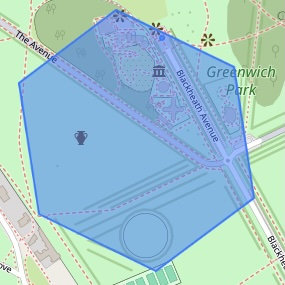

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAR2gAwAEAAAAAQAAAR2kBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAEv/AABEIAR0BHQMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP7IKK4vwp460PxYhitWMF3HxJbS/LIhHXjuB7fpXaV+fJp7H5vYK4/4g6Rpmv8AgTVtC1nUV0q2vYPsz3TLuCCZlj6ZH3t238a7CsHxTZeHtQ8NX9t4sg+0aYIHkuYwxQlIhv4ZSCpG3IIIwRVLsehlNT2eNoT1VpR2Sb0a2T0v2T0Lni7xLofhPT7rxL4kn+zWcUgUsFLszu2FRFUZZmPAUD9K+IfjZ8YZ/Eh1HSdEnhfQbWeK5tZ2tgZlNuhBaPduU7mJKuyHjGxVIDnZ/aA+KF/4l1PTvD3h17vT7bWtHstS1S2klDRpDLkxQIoA+aRg/nuckrGE+65x886hYrqNo1oztGGKncmMjaQe4I7enSor1VH3YnrxhHBNxpfxdU5aabaR00aaack9VotN+Ns9QtIpZtdS1829KeZqNzcTNLdYVip3SuGeUrsbG5ugAHGK7+uItfD1zssbi+Mkk7SeZdZYKBmPlcJhSocLxg/lmu3rjk7nKwoooqRBRRRQAjANt3gHYcrnnFWJLu+aO5VJ3R7uAWskgOX8hTuEakg7FDcgLjHbGTUSIzsEQZJ6AV5d8U/ilo3wsSLT9QikutYuwBaadH/rpS3Ckj+FM/xEfSvTynLsdj8RDCYCm51Hsl/Vkl1bsktx/XXhV7VT5bf1/SPrXwz8W9Rs4NP0TVpP9GtoJPtNzdyPIJGRQUKhY3eMnG05Yxgc4HSvbfDviPSfFWlRaxozsYpl3BZF2SLyR8ynpyCPTII7Gv529Z+Mvxj1Px9BJ4e8UWf9s21z5F1ocUnyQJnaRsxiRo+d4+//AHeQBXq/wH/bF8XeEvihqsf7QHiG5kst2NI0eDZDDpxCMkgz87gSP5chDx7SVOeCRX6Bm3hLmyoqph3CvNfEqT96L7crS50u9Pm+SChm2HrK2Jg6T3UmrRe+6StFt2s24xSWzP3qorifhx4rl8feDNP8XxxxeTqEPnRyW0izQsFO1trKTgqR8yn5lyMgV21fj+Jw1XD1HSrR5ZLo1Y6Zx5W46admmvk1o15rTsFFFFYEm14fl8rU0HQOCtejV5Nay+Rcxzf3GB/KvRZdWtodWh0ZlfzZkZ1YKSgC+p6D2r1cBL3GjysfH3kzUorKs7nVZdSure7tRFbRbPIlDhvNyPm+X+HaeKXVJNXjWD+x4o5CZkEvmHbti/iIx3HYV3XOA1KzdRXxlcX2kw+GmD2a3ZGowHYN1tJE4DgsM5jk2HC9RmtKuX8baBB4p8G6p4eubz+zkubaQfav+eDIN6yduEZQSMjgVUXY9DKpRjiqanblfuu6ukpe63Zdk7q2t0rHUYxxRTUu7TUIo9RsJluILlFmjlThXSQBgw9iDxTqGraHFODhJwfTQ+ZP2jtekhsLDw3FwJmM8n0ThR+p/IV8lV9G/tIuT4j0+PsLYn82P+FfOVcVX4j0sOrU0VHs4nvY78k74keMDthypP8A6CMVvHXw5s7DV7qeJYpP3EkR+dM4yu05R0I4KOMemKzK53UP3uuWUP8Ad3N/n8qz53HY7KGIqUJqpSdmv+G+62ltraHtHiRo7rw1qun+HjNHFDGv+hsg2tHIzMtxHIOqnGwrwUK8ivKdKge206KGQYYLyK9h1nW9Q0bwfFolyG021vPI2XUEgEzkIG3YxxsY7drcMuR0Nclq1lp5ubW0sLhZ72e2E7JHGY0lI++Yhz93GWjzlRzjHTorQu7roj1cZho1rVMOtYxV4rWyUU3LRWtvdN3j18uborlfGXidPCWiHUlhNzPJJHb20AbZ5s8xCRpu6KCxAzjAFcxaav8AE97ma3FrpVzJHjdF58sAiB6YkEcvm5xjOyLGOhzxpgo/vYv+tjzMOvfR/9D+oTV9F1fWfFdoNZe0s9Pjt1ij1OHfFc2zxL8jScsJQ2ADkpt67gPlrc8K/FiS1tYW8Syx3+nTMUg1W1+aJivVZBgFWHdSFYd171zGh+Ibq3k07QdDtb/VVx5N0tw6yX9vLnAJQKnmRergbl/iAFbF/pep2uiXtr8PXtbQ3k4lu4ZrdJEneP5SkgIDDj5SAVK4GCvOfnKuW0MXF18vevWP6L+vnpY48VlmGxkYzhJRbslJfDZNpuaSbT26J2WsXe59EW1zbXkCXVo6yxOMqyHKkexFY3iy88T6f4Xv73wXai91RIgtvEyb1LSMqZK5GVUNk89BXkXwh8efCHUPFOs/C/wZqZHiLSvJl1LR5t6SWxlTIaJJArNC/Ply8rJtYKxKOF9e8R6b4g1C3sl0C+WwMN/BLcZkMbS28QeR4lwPmLbBleAVz2rx5UqlN8tSNmfOYHCSo4+lGukknfX4Wlr06aW0Pz5+Jt5LqXxj8VXs/wDDdQQxeghW3iZQPYM7dK5Su0+LNh/Z/wAUpLkReXHqOnQOrf8APSWB5Fk/75RoQfYiuLryubmSkbVNwoorIbXdKWET+blSxQYUnlevAHQevTHPSgg16KajpIgkjOVIyCPSnUAFd78P9B8PeINUk0/X9QTTWmQQWckkZkQ3cxCRBlGMjJ6EqO2a8n8Q+I9C8KaVLrfiK6js7WEZaSQ4H0HqfQCviPxd8WPEfxbaTT7BZ9J8LL+8cLhLu9EPzgA/8s1JUYxzX2nCPBeNzqp7SPuYePxVJfCvJdZS7Rj87LU555jRw1WCmuaXSKtf8dEvVW6H0R8Uv2l21Dw9/wAKk+EUa6lqasTf60Q1pHaEggxf6M0aSlc8L8wyOd2K8G0DwhBa3d5rWsX017qdxGrTX8v/AB8fu8Z2NngEAAL0UVpWekaPoRfTNAhWCywksCqP+Wcigj9c1dIBUqehGD24r+lcpyrAZXhvquW0+WLS5pP45/4n27QXurzepx18dXxU1VxD21UUrRhffljsn0bt5aLQ8U174b6xb+MdE1n4X6X9nivLwjW9SeGOCZI4yjttLKJGM2Cu8Fsc9Cc1Z8P/AA01bxB4o1xfiLo9o50++87RtXaKKWaWGTLBJAQd3lDavzAZ6dsn3HTtUu7nVlh0lHuodu2WKL5iqlCQVywHDRj0+9XV3SXdqLX/AEK6k+0qCQix/u84+9mQf+O56V6FKnT+10+78P6uKpz3Tp219NPJ3/4ax41Fo2t/DvxNa698D9QufDWvJiR4o1L2VztwX2R/MDjaMowAK9uK+vvh/wDt0at4euP7J/aS0V9Id9hW/sY2ktVDcDenzOmccdehx048LN7DFqkOsQx3CG1k2xMTDtm3ZXCfvSMk8D8qbq/hy2s9MiGl6deO0gLKFaJvsisBuj2s3zIepi+ZcjjBAx4/EGT5ZnEfZ5tQ9p2mvdqrppNLX0mpLsjkcatBRp4d8klsm04PurXXL8rfofr14Z8W+F/Gejx+IPCeoW+o2Mq7lmt5FkTH1HTHcdq5a2+N3wNk+F3/AAu+58ZaRF4O83yP7X+1Rm08zzPJ2+YDtz5ny9f0r8TfFKfEP4SBvGH7PsN1p3iSCVPtNtYzrDbTWzgnzzDMCjrkBTGRwcgg4yfCbfX/AAr4b+GqfCnx34QW98NQeLv+EofQtPvo4bCTUxbKv2VpQlyIrcL++NuEf5j1RBtH4vnHg3ioN1clqqvD+RrlqL5bVP8AuG+Z/wAiPSyzNadb3MX+71S5lZxt1v8Ay9Lcy5fM/q80/S9Nt0Se2AkyAVfrkeo7flWvXwB+x9+0p8RPjB8P4/Gfxb0ux8MyzX09rY6ZZ6lDqry2kQjJneSH5VMW8ZBKYjWRyhwNv1f4a+Kvh3xP421DwXp8kUhtUEkE8MyzR3CrgS7SvAMTEBhk8EfQfnmIwU8JL2VWHK+zTi15NNJp+TXY6MwyvE4e05+9BpNSjrGz2s9ujXyfY9QoorJOk2UesN4gYsJvJ8k5Y7NgO77vTPvWJ5JrVj+I9Q0fSPDWp6v4hDnT7SzuJrkR/fMKRsWC9OSBgcjmrenajY6tZpqGmyrNBJ9116HHH9KzPEV3dwpYaZBpUeqwareJZ3STx74I7XY0kzuMbfuJtUNwWYD2pxO/K6XPiqcXsnd620Wr16aIv6NY6bpmh2GmaOkkdpbWsEMCTf6xY441VQ3+0ABn3rRpzuZHMjdWOabQzlr1XUqSqPq7nxr+0eT/AMJZZL2FoP8A0Nq+ea+g/wBo4/8AFYWY/wCnNf8A0N6+fK4qnxM9Kh/DQVzv+u8Tf9cof8/zroqyPD0P27xTMAM7pI4v6f0rFrVI0fRHUfEltPKWNlYSzSZvZBKJicJJGEhKoCOEGzjHFW9D1680G6W4twHUHOxhkdMZHoccZH8uK1fiDo+vax4g0qTU57YEFlWTd5UTl5G8tULfeYLtBA5zS2mkadp2oXVl4hSaL7OjBJnTbC0vYKuVkkX3UKvGN1dUoS9q2tP+GPXrYatOtUqQ0jHq3pZWjo7K/ayV/I5PxT4H0nx14JmXV9UmiuYLuGSG/WKNHtShBjlm3fum2OPvhef4lNYT/Db4reEJUn1d7HU59RghuPPtlSC38tlyojZ7gl+DnOB1Hrgdy2vzrpMejyFL3ypvtCTTwxgo4GAY0UbY8Dp95gf4qoS3sd7fT6rqD3i3dyQZpbS6e2MpUYBkC8MQOM4B9c114ScPaRj1/wCAelCvgJVH7X3qmuqjaD2taK5GtL62XRcvVf/R/rU8beG/CGuWl5rk99FYXejr5kt3DIPNt8dN6qd2OOBjPpXz/pOrWHh+ObxEdPuVm1m7jRNQgjeCzuCr/vJZIJvKCllJzIijccEg8k/XGg6FoPhWOWLwrYWulrOcyCzhSDeR67AM/jVnUrCz1i0ex1SNbiKQYZXGQa+BpzlSmqlJ2kj5WhmdDCcywnO723aUWl0lBee3vaH8/Xx3+HPxQ+E7/wDC0ddgsl8d2h/4TXxR4xMcgWWBZBDY+GNCuYf3/l3bJHakQ5by8u8RuLxAf0b+En7TPwm+ItlB/wAJD4lm1nVPC9+120NtB57wr5c1ncLJMmEu0tJ2eGaa2DhJF2MS2cez+I/hn/YLQ3MGnReItGtJ0u0sLpd8lvLEwdJIWxkMjqrLjowU4JAI/PL4d/BHwv8Ass+D9b8Sfs3+FbLxPrOk20Gh2NzqN1HpEVlp06Rso1LaGVki8mFJruC2lurlVgSQSNH5g+khjcNj4qniPcmtu22/bp1PpMozGOJvGMdbarS9n7toNptX5raa67NI+xf2gfD7ppum+NrMebDpzNvlTlTYXSjMi44Khlict0VAxrwWvHP2Tv2pfGt5ca3H+1/4ilSCe41+4lgv49PtNJ07TvDy6dpl5F5gmdYol1Oa4Fs0k8xkijbe4YFa97u/BOsaVpNx4j8N2F7LoNpKYZop4ybrTjgHaxG4TwgfdljLFVxvGAzj5zHZTVwj5d49GefictnGHtaesVv5au3btutNUtHoc9eLctaSpZELMUIjLdA2OM+1ebWlhfW0I1K28u2CSpaKoJl/iWBzyFx9xCPp716XbXNte28d3ZyLLDKoZHQhlZT0II4Ix0qYkAZPAFeaux5JXs7WOxtIrKH7kKKi/RRgV5f8TvjD4X+GVssN5m81Ocf6NYQ8yyHt/ur7mvK/ib+0I0d7P4L+FSpe6jH8lxetzb2v07O49BwPwxXz5pWhCzupNY1Od7/U7jma7mOXY+g9F9AO1fsHCfhpzRhjs+ThTesaS0nNdHL+SD/8CkvhSVpHgY7OLXpYbV9+i9O7/BfgTaxP4n+Iuqx+I/iPKJDES1tYJ/x72+fb+Jvc10NpL9muY5h/AwP5VBRX6/KouWFKnFQpwVoxirRiuyX9N7ttngpa8z1fc9Kl1+GWSxvtYheG5kljtGEaKIXTzCikbtxUAOGyB2x0pbrwXA16de1G6MmnwSOJo77MARVfgoBsJyDtBZtvQ7TxXBz2h1rTpraa78lWhECqx6SH5UK9hkHBHqBXoNh4sj1B7DUdVvleHUIHNxaOVAi81EYJt43FWBTnkBsVtGpLltc9qlNOWrSi9UrercVpuumvbfRE9zLY6XrB0+xMK7mSSOIFpWVigPQgqvHI244rD1azW3hvpdJjiRpQEultwHDLuw2/73TODzx7V1JuZtUuotPuIfKmhWNXNshW3VXUbGJbBA+XAwDgYqAatpmnWOpWl82yJfMR7mJP3kpkO/ao2A5GQA2MNjJxXSpWiup6bjUiuVX2j10/ray3PO9TGo2tlqGk6XIkVqbNVEbKWCbt4JT5gF7cY7V30/ivxLbR+cv2aQgjC+WyZ7YzvOPyrn9XjH9ix2+hWupXJkALDEUUoyON7y+WCvsm7H6VStYdbvLWHTvElikEkcccu6KRpMgZDK74UEg7OigfXNDrRm1B/I4K1KlUk03dnX3tuuoXV3NrE7Wl0SsaQBjIVaVGG6JsfcYIGC7R+9i47V80XfwI8K2fw7k8ArdagsOnedrM5R/9KTUI23LI0ips+eIbY8jODnqa9sksZkujPb3ItLTyzBMxYrtaRl2eWdwAZT8+0AkgYGN3NvVfs1rrkllqU8Oo2N+EE3lkeUHXaSoweNjYI6YUqKUIRU1zq6Xy+X9bGtDEeypckvS9ttEk10fp3W+p83/Ce6vfFvjWa98OsNA1GO2F0lxppBtwc7Ss8LfI25W2leAehHJr7R0X9sL4keFF0sePNAtZv+EQICaxpEWxpEGFCXEQxhHjDxlwODyBwDWZpXh6DSrzZoFnbW1pJGRKsUaxESL9xuAMgjK47cVzeqJp+geJbXVL9EezvG2TxP0YAgkgexAYYHUY716nFuGyvOeZYvCKUNEr6Tj25ZrW3ZPmj/dPNoRxWHoRpxrabtLWPzhtf7n5n7o/C34wfDj4z+HI/FHw41WDUrdgu9Y2HmQsRnbInVGHoRXpWVJ2cdOntX84Gl/D7UNH8bLr3hG/uvBuoygywy2vEuOflbY4Ug4yQQfwNfYPgH9sf4nfCq/e++PWgL4mgSD7Omt6PlLgRqcqJ4D8pGerIBj3r8NzjwpqO9XI63tF/wA+52jUXp9ify5ZPpAI41Ql7PEWT7rb/gfivM/XqC3t7WFbe1RY416KoAA+gFfmZ8ePj/4+1T9pTwdYfs1fEfQtQ0/wxqsWm+L/AAZb3lu2p3aXEpjupFhb94XskAby1wc5xyNp+u/hD+0f4C+NHw/n8d+D45rl7eRY2061eG5vMHA3eSjh1AJ6OqnAyBiviv4qfBzxNp/x18C3v7MHgSKyi8e+JZNb8aeMf7JjtdQstPMys1qJiodTOEcO4O4ZzwXzX5LmGBxWEnKhXpuE46OLTjJfLR/ej77I8smoV69oyVuVO8ZR1V3rFtfCunovLqPgL8e9c0P48+N9O/aV+IujafN4p18WHgzwbLc2y39paQM0MTuinzFkvBsYRPkg4/ibaP0qr84/gD8DfGerfH/xx/w058ONH1aPwtrct94J8bXcNm9/PavI0sETP80+62G0JNgdBkblBP3nYS+OtQ0C9/tCDTtH1JmT7Htkl1CNFyN/mDbbZOMhdpx+WDy0Yy5fe/r+uhxY/LoyqKSnCKtFP3o27K0Y3lZLfRvvujwz9pDRPMsdO8QRJzG7W7nvhhlRj2wa+YbfQ9RnnhtmQQvOcRCZhFv/AN3djP4V9zfETwxqOs/DQWGq6ncTX2nJLO81ofsCXJGSAyx7mAC8ABx7mviC/wDEF3f6iNWaKGO6VQgmSNfNCr0AkOX/APHqirGKd2XhqWDhC0qrla/wrT+7rK2j3+HRdOzJvDEN9DqFhcXMsBswRI6xPFGxRgGjWaRVXcRx8ufUVF8P7jwqL2GPw3CLa8EyyM2n/vl2RYKoHmjCeYcHLJH0xzWfPcTXDma5cu3dmOTVL4YrHbRTXN3eDT123DC54/dF1Kq3PGQSMD1rKM1zxSR3YfE0/bQp4ekldx1l7z+61rPtyt9Eeg/ELxqupeLLNlsEsrmK0hjiJRWuIgIwxVpDyGBJztxzXEySSSuZJWLMepPJqp4pZ5viJMGfeYd4yepwStWKU5uUpNnFisTOvUlKcr6u3kuyCisCHxFaTSJiORYJW8uOcgeWzdgOc89iQAe3at+t8F/Gj/XQjD/Gj//S/sgooor8/PzcK8e1bwJrXiDV9W1sR/2NeW175NhMibRcWy28OTIOjhpGdc46DBBAxXsIHYVj6Jp2u6dHff29frfm41G8ntykhkWK3aQrHGM9NirgqOAcinypxdz0sI1HDV56X91Lvve8fut6M/LX9o39lbw78VLm/wBbsrCz8NfEiPR7ux0W/nlmi0+O7kM88N3Cql7eC7W5ndxd+Q8kbOXUhhsPx1ow+PP7Jnh7VfC9hbX174esLqxuzba3JJaapLqd6IbOy0nSZ7Z5oLi9aRJJ7m6WNbZ5J0BjjZrl0/oP1vQNI8R2LadrMCzRHpnqp9Qex+lfnT+1l4m+HXwl8M/8IP8AEZF8Q/2nbzppEEO1dYtWkhlt/Mt5cbocRzSxiRcbVdwm0k19JkNTGY2vHLo0nWc9Elq9uvSy6vSy1Z6OC4j+r8ssRK3LtLt69/z6anP+JfEvws8RaMvxY+HN7FY6Hcrcl9UmYppWoT2byRTuB5SNC8jxFo5oUeG4zkBt6SV+e/jb4v8Ain4wF9E0FZtC0Aqpcv8AJeXKN06Z2Rn26189+M/h18Xtd/4RHVLu+F3HpumrpFjHHBEIrGGzVFtLVhBb+TArDe8kotjGGjRSAhG36tPhSaDwjBZXltHeXaKju1uxi8qTaPM+z5ztUsMhD8vYg9v3XIvD7AZPL66kq2J6dYU/8C+3JfzPRfZTdpHgZpj1mNlQj7OG3+Pzd37q8l+Gx57pumWGkWi2OnRLFEnQLUOpr/q5GTzEB27fdsBT+FbuqadeaCd166TW5VWEyY+QN0Eqgnyz2znYSOoJ21UkjSVdrjIBB/EcivVqSnKTlUd2fOum4e61Y5+weZL4JLuL42P8pAAUcHOMYJBx9a6OmCNBIZQPmIAP0HT+dPqCR6+WQ0U67o3G116ZX+nt6GtF7KzvbmY28Bt4N252AyrK/V84+9n7w6556Vl1ct55/KNjHM0KyEYZf4WHQ46Eeo7iqizpoVF/Dnt0/u7a29Eei2XiKSXw9cyX8kskU8SxxoltGyOSAq7TuIbB4AcitbT1huWsLe0W4sg4KzMbRMkjHyk54OOm0MMVieCJI45Z9LiKPDbz5UrnJ8xiXyuOAH3BeTwPbnc0+VzoVkUP26SFRNDLcZDFyMqxyDt6+h29BnFXKtq+fY9b6zo/ax0Tta391r06ddfuKr6repbT3HkACCR1P2hDbehXnfIoTbnLNt5xxjirGpWml3sDxag6zWsvloUJAVX7YYYO47gOD6YxmrFvbW+ntJ/Z9rAq3T7rj5QN3U5xgg89uB/Krck91PcFp+VwMNnnPORjGABxjn8BiuapUg17qszmr4ik7OlGzXVadunkcna2403xDpel7ofLV2FsZ/mwjkb4+clTyPLcf7jHlc4l7Z6Fa6Zd2dvEjRoYZILyN/k8j5xGxXp8p/cseW+6x5xXbXdu17p8ttcxI5YMAm4hTj7vzAZXt0HynpnFYWm6n/Yt1bJDB+9tb6WOa5BIDK8cTtuUDA3I25guAZEBA5xW+Hqc2j3/AKQqdWVV2leT7bXWsmr/AIrfXo9DV8G65GLuOz1+0SS0ttqXEkp6N/B8hHQbeSe445rvvid4Wtri8jv3RFjnj8jzNuTDJ1Vh6D1xgYBz2ry64F9ax2/ifUsyCQtBcPt8tpYCf3c2zA2nABxgfMvHWvdPDUsPifw1P4W1IgyW6iPd1yuPkYeuOPwxnrXsYeftIOMi22m6T+zpp/XX+keHL5mpaZ9qWKZtXsZEt3CHcFEe7kj07Egc8dq9H0rUItV0+O8j43DkehHUVwl6154f1capcbkZT9kvdp59EcH3AxnjJUY4NWdIlt/D+vNokMrzW8oQCSQYzJsU5zgA7gR04zx2rzKkPZyt/XkeTiKWnp+XT7tjH8V+DPD9lf8A/CW6I93oWr20Uk6ajpbGCVfKXd8xXAOccZr374Uftc/GT4F6Dp3hj4i6Kvirw5aRIkd5pyiO+gjx0kiPyuR6jGe5rjNWm1C30yWTS4BcTHYgjK7gQ7qpyB2Ckk+wrTk5kb608bTw2PpLD5nRjWgtub4o/wCGatKPony90zOLnSoXpScby1s9HyrS8dtLuz9Uj9T/AIS/tA/CH43WAvPhxrUF7IFzJat+7uYj3DxNhhjp0x6GvZq/AXxB8NPDut6nH4iszLperwENFf2LmC4Rh0O5cZx717X4D/az/aM+EE0dh8QbUePtBTg3MAEOpxqO5X7shHp1PqK/MM48Ko1L1Mjr3/6d1LRl6RnpCXz5H2TOijmttK8fmtvu3X4n7GsqupRwCCMEHpivza8aeG7jwn4mu9EuBgRuTGf70Z+6fy/Kvqn4NftOfBj47xmLwDq6PfoMy6fOPJu48dcxNycdyuRWp8a/Ah8U+H/7V09M3tgCwxjLx/xL+HUfp1r8hzXK8Vgqrw2MpOnUj9mSs/uZ7+CxMHrF3iz4Ru38q1kk/uoT+Qrp/hDbXjW5ksreK6baoaOU4XY0yhz0/hQEgeorkNWbZps5/wBgj8xiu0+H8NjDoImvFmDBkeEw5Ch4opJfnI42/L0PU4FeTR/io+gwK/2iLttr92vl27o4AyteeLby6b+7/wChYNbdc5pP7zVb6X0YL+Wf8K6Os4nKjiLWwvvNi8NSMn2ew8mYSD77oGOxcYwMFOTnp0Azx29QLbwrcNdqP3jqqE+y5x/M1PXbg/40f66G9D+Ij//T/sgooor8/Pzcmtl33EaDuwFcV4CtPDdh4Msh4UvW1DTpvPuorl1KFxczSTE4IB4LkdOgq34t8deFvhr4eufG/jO7jstO05DLLJIwQfKMhR/tHGFA6mvxx8fftE+MPj1oFv8AD/4P2lx4I+HttBHbF2bN/eRooGxGySkf+1ncw69xX1/C3BuNzqTlTtChHSVSXwx20X80u0VrtsrtbVsxp4fL6lNt80pRtFW15VPV9Va6s9tX1sfUH7QP7a39mavdfCn9nqOLWPEUXyXWov8ANYafnrkjiSQdlHAPXOCK+IvD3g77Bqk/izxLdy6z4gvjuutRujulYn+Ff7qDoFHatrw74b0TwppUejaBbrb28QwAvU+5PUn3NbtfvmVZbgspw7wmWQsn8U38c/V9I9oLRdbvU+Pq1J1Zc9X5Lov67nJ3nh+a2uf7U8OP9mnHVP4Hx7VylpcTWct2zGb7ST5gsWAOWJ+bymJHHcKc+gzxj1esvVNHsdXh8q8TJH3WHDL9K6oSlTfNB2N8PipUttu39bfI420h02/uofENrFtuEUgeYpUlWyCGXg4/qPavM73wxc6dbPcxm3tJA4QW2/ZDLnoYS3+rPbYTs6Y2V6DqdlfWV5bTa5NO8FscR3MJ+YIequpyCD7jI7HtVhJU1aK4s9TtS9qDhZsboZEJwpyPun1U4I/Kuy9LEaP3Z/me1CrTrx11XbrFX6d/u+SPGo5ld3gYFJYjtkjcbXQ+hU8j29RyOKmr0rWvDT6teW6XbIltFH5aTRptng2g4xgYdTwCrDHfgivKbn7Ta2pkd45InJjiuowREX6BWB+aN+nyN/wEmuGth5UnaSOKrhZQXNHWP5eT+4U31qE8zdxnHAParSkMAy9DXLwwTxp9pi2xgMsQGd3cRnsPQY+ldJDEsEKQp0QBR9BWBzHdeFmh/t4W2nxOslxGsznJw8oOVxjoMq+R0OcdK7jzZ2t01HU+biGELOIssok2jeNq5ycj5eCcdOteW6bqmo2DW1xp8XmNbTbiygs6xsPm2gELzt28jjPFetB7Zd2ovcQ2sB+e4by1Al3DapLDGNpxz+FKok0keq+WpGNt5Jeeq0t8/wDLoROBaxy3KpLL/EVjVpDkDGFXt06cDNFvbC4SKxihuECQpLudvulT9xnDkluORyCOp7UrTtaXkEU87RmWWRURFwGxETtc57YLDGOwxxSbLlrT7PI0bM6hZcplHU/eG3PQjIGSce9Y2ikrox5YxhHmW/8Aw3p0FK5zebJf3IcFQr5wDz8mOfu/LwePu8Gvzk+LPxH8dQeIPFulp4j1rR9O0i+Rr5NP0232xrKFjgPmm9WRt4VRgBQepVfuj9Gre2isntRZIsUVmsgjQF+C+P8Aa24HPBU+2MV+fniH4D/H7x1q/ijTpr/QQ3i+WBJt7XRZBpgVo1R1h2A7Nuc9egweKqEV9n+v6djswMaXO+tu6/4fZa+XoejfBXxV4sTxprXg/wCLWq6hdvoOnpHNHdWVvFKonCyRgvDcSl8Dc4+U4A5dSdh+tPB+sXOg6giyndJYYiYLyJLV/ukeu04xjttz0r5r8B+B/jP4b+MGueNPGkug3E2qpa/arbT2uAVNtF5MSr50YUo6nawZyNxVv4cV9CanLeRXI8U2NoEtrPyhEY1KJLayLwuD0ZeVIwMfLxXdhpOm1IzxN1JTatovJW029G/ufkdB8TfGnwzg8YweF7nU421G9WKC5toEeZ4hcMEgeUxqywb3KrG8u0M21VrnALm50efQ9Vu1tn0Xe53KMOoHykHquOPwP5eAeK/AekeGvE+mWdnLYxaXrE1zJYm5k/s22Et/cR3TC5eGYT32HiBig8mNFQ7JJvumvc01IXFhY+LrOZL54I1juZFgNss6ZKNmF8tGUfcjxHJj6Nypr0cbSThzr+kYVoK3Nbb8v627HdabearrenWk2nyCGWG5jF0CdpKJksB9cDiugnuLe0t5Lu7cRxRKXdz0VVGSfwFeaXaw6f4r0/WrqeJYbuWWaNIuMgoyKSD0ID89s5+ld/rOl2+uaNeaHdErFewSW7leoWVSpx7gHivMXY83ELljCC/Lz/HT/I8f0bWPH/i7TLPxg+t2fhq01PEmn2Mtsk7vAcFDKzyIS7qQSse0KCBnNdxL8RNCPi2+8I2ttdyzaWY/tsqogt7WOWMSh5JHdQAFPIGW4OFwK8x/4V/461nSfDng/wAV2OkPa+H7i0dtRSZmklhtCp2pC0GY2k8tA/7zbwe2K0bzw9at4U8XeFbu/Q6j4nnv33WqvcNElwvkwbwi7gFjVA3GOoBpK/Q5kZt7qHwv8e376pf2d9olxbWL6vbasyC1drSEhTPGyMXAGQQJEUkHgV9vfsdftjR6d8J/iFL8cNS1K9b4eWz6t5lzbgXUumbT5ajJUGYlQoR2Xl15xnb8ON8K9R1n4cav4Rh0XTdAudRgii86O5luTMYjuxIzRLIsZKgAbmIDHjgZ7f8AZx+FesfEjxj4z/Z9EVnplvr7eH9R1S2a8lmQ6Zp1/E92qP5QMkjp8qq42gOea8njCnLG8OYynUSk6UIzhfeNpxTUXvFcrd0rLyNMH7mIg11uvXR2/FI+ivit8Qfhs+v+ItcktfEmgW1tpC+JII7+yjhW50xpVgMttCLjO3zWHyXCwyBWBAwK9AT4j+C/AsnjL4e6pqb28vgjSX1TXX+zAwi3KJtSKTzAWmVGRjHtwfORd2TitH48fBXxP8StD+IvjnxBqVnJLr/hy28KaC8jSBozbvezTm42xHbvnkjAKbziPJ7CvH9Y+A+sSz+FPGGqahaT6ekFxdeLD84fV9Sa8GoRpGpj2m3+2RISHK7beJU28jH8uWtJuK6f1+j9D7rD1a8W/ZxTsrdPOP6p+SXc6m48U+C/D1p4hn1C4vbYaBDpK31pNpyC4F9q2+aKKPypJJZbpklgtzbDCK5BDEFmXB8b+Pr3wZ4b8Oa1b6dqemXWueKtN0Y2V3bWs99JbA/a7jyYree7Q+bFC0AJZWVmIO3GaoXfgrWrnT7rWdK1Gxv9WPjpfGEH2h5Yobi2tIxZW9rJKIXeOQWyI6t5bokoA5GTXSeINIkuNV8J+OdTay09tCg1MTWkN1Lest9qbW9pCyyG1t1ZI7QzsxwMO+wZHzVKt0+X3/5C/eNNLTt9/wCi6F7QvEWm+KrS9vtOt7uyk07UJ9LvLS/ijint7q3SORkIhlmiKmOaNlZJGBDfhWtXG+G9KvfCt1eaRqNxb3d1rWpavr1y9sWMaPd3R8pAWRCQlqIE+6MFCBkYrswCegrXCL9/H+uh24S/NHmP/9T+yCiiivz8/Nz8P/2v7vxP4v8A2m/EHhDxjJLqWleH9Ot9Q0TS/wDl3Z3iG5njX/WN5oYc9uKnC7FCbVTaANqjAGB0A9BXd/t16PqmnftL+Fta0JxDca7oM2nh87fmtJvN/Pa5xXEScyMfev6syquqmS5a6atD2MbJaK8bwk7LrKUW33Z87Wioqe1+d+trRt8tdBlFFFdByhRRRQA1lVlKMMg8YrhtW8KskU39kBWhnGJrV/8AVuPbpjHbpjsRXd0UmkyoTcWpRdmjyuxvJoHtNL0i3kl2/upopZB5yHsV3Y3KO/OQO1WNR0/+1NPubTSplgMzYmUqGViPlKuOvscYrstW0Ky1ZQ0nySp9yReGXFcBcWtxoL3Mk8KR3VxjZeDd5bMP+eirxkjgtjPfnFdVLFWj7OsrxPXw2PTa9po+9tHr1vp+HTY8/wBT0VNJvI9P00u7tEH8h1I+6Pm8s8g4xnHpWZHIkg+XtwQeCK9tgvyBax6nstrqdN8YjkDZxwSrLXBa34Yj0+wku55J55VcbJkQMwQ9fM7tj1wTU18FZe0o6x/IuphL/wAPft39Olv6XYwbGK8n82Cwl8iV0wr7toHzDuPypmheJm8Pz3fh/ULIzacXkI8sK3lxyMcjZnLIeTgfMOgGMYVfs1rD5Gph47iKRJE4+R8D5Rn2OCR7AVS2jeZMfMeCfpXC9rGMpunCMOqu9rW2/wAvke0aLrWnaxBJf6bILi3YqIT8hSPCYOzaNw4JBD/MOnSpVwFF6LciWQIrD5d4GehOcYTJPBPfGa8MhiezuBeaZI1pMAF3RYGVHABBBUgdsjjtiugj8W+KYmbebeUEADKlQMZ7AnJPfkDjgCsZwbJlV5tWenzpZQwPbzQqLZlkaUkKI8Hltw/2sknjHXNVLT7Zp/g6wE1ks32oveSGTgQTyOJFG3vtZzx6LXj2pr4h8XxR+HdTufMjvZVgMcC+UNsz7WJ5JYIhOBnBA5BPNfRF+/hnXL7+wWu1a9jWUBIpR+7I2kllz1BUYyO1dGGhy6s1w1/aKUU2km9OmnkcbHqWrJN58t1JPn76SHdG49Cv3R+AGKXSrfU9XvQt9JJYxzvJcpHz5EkYbEw2+jq4dTn7xOOFpLbSotQglmXVbJrSDiaeGVSVB6d9qZ7ZJrbTUL2G+QaJc2N3HPOYbZS/mqsJjjGzCBsKSjZ7cV2zcJWSPQjSc/chGzXdW+W1tV+CPM/E3hrT/FfhDUfCrRSX8sFtPdaaLa4No90jxnNv5yYIjnzskGR8rHoUBFHwHrOi6NrFv8LNN1GHxI9rawG4t9NshanS4pi/2hbtWcCOMZDrG8j3e7fuWQ8ju9Tks4o9PvvDVobbyoPtsBySjK7Zkj/2du8cA42scYxXm3xL0GBWm8aeHrqDTp9Qjia1uU0sapqizxLIUgtI8CO3UEyyyzMWO+SQs0QCvXVg580fZvoc8bL3Vt09Om33M9MstNjuPN8MyQrcXMIzZTO23MEpUsQeh4GcY6gjitHTNe1ie8TwwdkFxFGwaST5iTGcEADHIGOp57dDXO2F8dR8NaX4h0y4juJ7C2hcSQ3f28MqqomQ3O5zMYnyGdmyfm4p2uWUdrHa6/4VtTBDAsboxbKeYd2V7kDGUb/ZPFefWp8k7dP0/wCAcGIp6W7benb5Pol1fY9F/wCEeiuOdWnkuv8AZY7U/wC+VwK1LX7BBKdMsgiMi7vLQYwD7Cm6XqVtq+nQ6laZ8uZQwB4K+oI7EHgjsRispGkt7i21S+v4LaNJZEkVWCebL0jRjxnamTt9cVFjko0vaS5b/wBJbfoYPiXxzeaPqmnaBouky6jf6i1xsiaQWwWO2VS7lmBGPnUD61J8AvjH4Q8K/tNeFviZ4qu4fDelalYanpN/Nqc0VvFbzWzkFJJWYR4EqKAd2Dx9K871Twfc+J/iTc6zpF/qNvY6ZYRRQyWcqhZJr6ZnnEcrpINqLFGWCcgnGRWVNLffBr4+fDnW/DelXN1o+iTwi1gi+YS3VxNJ5yNK52iWXMWC5GSSexrSFD29LE4V7VKVWC9XTfL/AOTWM6sfZ1F2TXS3VdD9ntY17wnH8OdDlvNd0iG0Gr3DSXD6jarCDD500q+YZNhaOLdI6g5VFJIAFeDfEjxX4S/4STVvBnhbULa90G08NWXiM6v9viGnwJfzTJbKJDtiEckKSSGQyYOExxXnXwL+BmrRWH7P3hTxx4als7Pw1pGreLbyKa1K2i6xrN1GYLZgy7RNbRyzsIz80exeBgU34wfB74w69+0N4g+PWr6fey+Hbnxda+H49Faxk+WDT9PSCx1kn/lrbw3zvtyhijDmYElVKfyFyvlbUe3yVv0eh9vQr1IRlyr4rJ+j17dGraGzaaXd6Nbrpl8AssX3grBhzzwVyCPcHFPmhhuIWt51Do4wVI4IpIPO8hPtBLSbRuJOST3qauXTodxz3h7TksreSRkYStLIu6Qlm8tHYIMtzgLjHavsT4EeBNJ1jRLzWtdt1nWSURxBsjHljk8Y67sfhXy8qs7BEGSeABX6TeCtBHhnwpYaHjDQRAP3+duW/wDHia7svV6yf9bAp2nFL+tD/9X+yCiiivz8/Nz8wf8AgpNokKJ8N/Gsowtj4gS2c+067gP/ACGa8Fr6x/4KYPpp/ZujWaOV7621e0v7PywNqm1DeYz89BE7dO+K+RbOdbm0iuV5EiKw/EV/SfA+IVfhjCd6c6tP8Y1F/wCnDw8zoTpVo8y0nFSX3uGn/gFvkWaKKK+hPPCiiigAooooAKjlhiniMMyhkYYII4qSigDz3UPC5sXS6sIUu7eNxJ9mlGcEd0Pb/I5HFZ1jqs0Ud5fXUsf2S3O8Jys0Sk4wV5BCcfNnp1A6V6nXP6t4fttRcXUDG3uU+7KnB/GqpVJ0neH3HZh8ZKn7stY9v8u39aHIaraf25pBXSpIXjlYSfMgYHpnBGCMj39K87v/AA/fWH2i50+OWazgk2EuuHXgHoM/L6V3Uw1KwvbW0mMOneX8hKxAQSqT1O3G1h27eoHWrFw2i+I2n0S7+WeFsFeVbjkMp4JU4ypH1FdbhSxKvH3ZnqctOvG8dvJarprt8tbHkqOki7kORT663xJ4cit47rWiy27qV2JDGxRl4Bzyec89Bx9K49jJBL9mul8uT0Pf6V5tSlKm+WascFSjKG60/Akt2El2bOM7XaGQbgMlQ6FDtA53EEhcCvSY5PA9posWsazcmOScqJGjuJUJZ8HOFZT0Ibp059K8cns55L/IYbH+YnbyAuBtznuCe1d54evIPEAey8Q3Ev2jTYAY5WXdJtWRlR12ASEpkb2BxtIz61pTlpZHZhZU6kY4eo7K99N+1tv67HbaRoHhHVdSudHsBexxpCJS/wDaE6rIpOF2osvKkc7unT8M/VreHwxeTQ6Q0ypFah9rTyvu3bwQdznjA/hwferl1qt34QmTw3FJbx/ZYUUzXEeHmyScjBQbQTgDmufSMaklxcXc4uWucq7ocDbzgDk4wDjiuulGWjZu6adXmp/w7d3r5/8AA6HV2i6xpVjqvh3S5YoIrUtLC0vJYSnzQGzkbCS8eeuBXO6j4ai1/Tb/AOGl3Ki2+oBJrclfPhJjdZDHImV82Jim2SPK71Drkbqyjf6hLKpttTRptghYRqrSTIpJVPnLgsMkLxznmuk1PSF0i2URGc38k8lxG4jBjDRZ4+QAB2VA7ADbkHAGcVCUqUlM56VCpBWa2u9O2l/uSujxf4V+NPBvh/ULzwXottPZGG4mv7r7dcRsNNiCRW1rBN5aiOEGKEQeXK32jcFx5itvHutpY29pfy+Fb8zLZyZuLZUO1iQCPLI745Xae6ivMPiL4f0nxHp//CT6zPpA0+S3VW/tqSVNP06cO+67W2iZRc3MnmRxR5kRozENkoZ9tdpoUPi3VfAek3PiL7ZLrDLJdRS3EAhmkbzmDHy1ii8tJFCyRoyKyKVEnzZrsxMFUp88SqmseaJo+Cb6XSdVfw5eK0aXI86BZBsKvjLLtPTcvzbcdQ5Neh3OkR3WYoRGElcNMjRq6yAdiDx2615v4kiXV9Kt/F1nef6ZJINiYyI3hA6YxwCN2D1BPavQtI1kavolvrdrOlmGaMy7wGxtcLJH25yCgI79O1eWl0PNdJqrHldr7f1bptt0IrRtBlSzmsYBb2/mtFZeUD5Um9QxcBBtUZLKM46VwnxzW6tvh1d6la/LPp0kF3H7NBIrD+VQadrGtyTLfy7GkjdnCyqwMbPgj+LpjscfSr+vBde+H2q+G7SxMSRadMc+Z5gD4OFGfmx/dPbGMDAr0stfssXRqyWilH7ro0x2GdSnOpFWdu9/x0129fLY/W3wDdRa9q/w+ltzuil0tbpf92aMlf6V0HxYTR734Tx2Wg211Z2+r3Tt5V4CJg9xLJKxIYkjLcqOwxXhH7GviWLxV4M8DazLcJCNM8LRRPNIRtj+ykxlmzgYXGTyOK+kPib9uuE8J6Nql4mo3Elza+dcxqESd0RQ8gVflAYksAOADgV/I2cYD6jisVg3/wAu6kof+Avl/Q+qw1bmwPP/ADOPftJ7WtpfvddFrp8SatpV1oWpT6PertltnMbD/d4/Ks+v0k8U+CPDXjGDydctlkdRhZV+WRfow/l09q5nRfg18PtF2utkLmRTndcHf/47wv8A47Xlewd9Cli421R5B8Dfhn57ReONaX5EObWMjqR/GfYfw19Y1HFFFBEsEChEQBVVRgADoAPSkkmhhx5rBc9MnFd+Cio1Ir+tiKFRzrpv+tD/1v7IKKKK/Pz83Pnb9pvTZPFfwv1nwCNKju01LQtZl+1tHua1kgijEexsYUuZPxC1+Snwv1Ua18O9F1EdXs4lb/eRQp/UV+6mpad4s1HVHtHOPDc+l3EMq/LzdySxhePvcRh/9nmvwE+CMUuneFbvwxc8SaPqV5Zsv93y5Tx+tfu/hbW58oxtD+SpTkvScZRf/pETk4kjGMsJa38N7O/229ezs9l0sz2OiiivvT54KKKKACiiigAooooAKKKKAK91aW17Cbe6QOh7GuB1TRNT0yymtdPZ5rOUAFVx5seDkFDg9D7fhXo1FK3YunNwalHoeWwazbW1taW1xK96sw8t5RFtCv0CuoLYz2PQ1FrehQX1jcy2kS3Es+0qzu3ylOPl5xjHHTj3wBXZaj4eElx/aekyfZbteQ69D9RXDxy3Gk3V5LeecLuU+atuWBikYn5tjN93PYZxkYHpXZDFRlH2eIWnc9ihi4VPdno/wevyt+WnQ87vNOvNMd42/fxxBN7oD8m4ZAOQM46celMt7Oe5ntru3EiCKQOs8QOYyo6gj8j2weeMivYHRNb05omE9m1wnzKQYnwPUcdDXD6l4cvbaNokRJrdSZD5pXeg/wCmeACCBjBX5uMnjArOrg3TtOGsTSng4e0V3ZLdf5bX9N/U9D8M62bdlt5UkuZrq6BOXBRVk6sgPIGeSmTjqvHA5bxXbwWVzdwaezeUbUOnzl+XMn3T/LHTtVO6nv8AxNPfXHhm18tI8MAzYLBcB8A5O/OSrAFW9AeunoeoWVmtrZm1eaSKU3Vt9i43Mw+ZSGOFU5/vKvrz1tNfFDY6ZckP3l+mtvTS+u62206noGnGxit5NO0A/wDHlJ5b46B+rDcQfm7k4bng1iT3UOn65b6TpnlzNN5gmtwu8Ru/zpM+OQoYYAY45+XGMVc+z6lrF9HZa3dx6cLjcyWds+2Rx1OX4b3Plhcf3jV/TdOlsorT+zkGlxRM7S2qIjGTnjLjIGepwM+9Zc1loeTGUlrF8sfPr+Guz2Vls2cP4ek1DR9T+x3cf2Nr7DKvVY7iP+Hhh8uegyDjb0PNeeweN/jJqPxYj0LxFr8I06zuYIw9tp6QJcXF1b70sFjY3EvnD/XyusmyK32lsEkp6v4r0C1Ky6rFMtqJNu2JVwDcs3DAjoz5wfUhfSvHvipp2qeI9O0/x94bM7a8iro1vm+nsrS3luXBLSNblJFEriOP926bmaNWYBcjrwdTT2T+R3QlB/B8L2/y+W3pY9QtZp7C8lsbWYR2+sxERvIA4jm6MCOAQG44wMEY6Vn6Ux8P6vqWjQwLqltMGeOIYIaeEgYxg8/Lz6FPeszwrqWoeOfCoTV4Psmo723wyK0E8UyM4haaCWSSaA3MKhtsrs2TwW61tzpd69pA17ThFbz2qjzmXKzmZSAPbBHP1BHOa5cRT9nPyMJRjCSbW2q/C67+hDDZR6cn2KMYEZIqe0axSS5W7aVVdY8eXnHmBZAA2OxUnOeOBVzQtNg8QadFNonnRzLbMJJJCsifaE+Xa4PzZ6HO0bl561u3Fjc6R4ZMtnyt3bP9rXAVlldQPMO8rhEAI2gZ5GBxWkp80dDscouN4vT1t0/rT5aH0d/wThkvX+GWu6VDpg1yXQxe6aLFmVFnVnz5ZLAqAVbuOlffvjyKCX4oeGtJtlVI7dp3VFGAqoBgD2ATivzp/wCCemteHYPGHxL8GXuqz6dHNq2kyWctrlZHeaRgUGFOA5iCPkY2seRX3p4z8S6VofxbtdV1hykNpYscAZJdywwAPY1/O/ibhvYcQ4u//LyUan/gyMan/tx14G6yyhFq2s11+zaPppbor9+lvfKwtd8S6F4atvtOt3KQL2B+830Ucn8BXmX/AAkPxG8bHZ4XtP7HsW/5erkfvGH+yv09iPcVu6H8K/D+nXH9pa0z6tenrNdfMM+ynj884r4Xnb+FE27mE3jbxp4xbyPANh9mtjx9tuxgY9VX/wDa+gqWP4OadqObvxhfXGpXbdX3bFX2Uc4H+cCvQtf8V+HfCtuJdauUg4+VOrn6KOf0xXg178etZ1KYyeCtGlu7VTt80xtICR2+T5RjuMn8K6MHT5qyW7/4HZHXgoylVXKv6sf/1/7IKKKK/Pz83Odj0mL/AITe511dSR2XS7a2awB+aPM07iUjPAcfKvH8Br8SNV0H/hDf2h/ib4RA2qNZGooP9nUEE4x7fNiv2xsB4WTxvrC2DTf2u9npzXavjyvJBuRD5ffOd+/t92vyV/absv7A/bLvX+6mv6BbT/70lq/l/wDoP8q/W/CbENYvGYXpOjf5wnB/+k8xPFsXzUG+kae6to6a/C+z6rU5miiiv1k+VCiiigAr5r+PPxt1P4caHqMvhKASXekxxTXEtxAJbVfODCOI4nhkDORwyq6qOCBnj6Ur4f8A22/hTeeKPhzceNfDzSC403y5byBD8k9vDuwzL6wh2IP90tnoMZ1G1HQ68DGnKtGNTYyvgD+1b4t+Icd5qvjq0tks7SSOGQadbkeR5zKqSyPLck7CSV2xxO3c4A5+9a/IH9hT4U3nivxLf+NtSaRNIsPLiMYOEubhWWVVb1WMqjkeu3txX6/VFBycbs6M1p0qddwpBRRRW55gUUUUAFUr/TrPU4Ps16gdf5fT0q7RQB5bqmgz6dcW9zeebc2tq2UeJtssad1PYr7Y+m2ren6jNe/aDPCfssTAxzggqVJ+XdjG1h3GBj6YNej1xmr+FIpg8+lBY2kGHiYZikHoV6VpRrzov3dux34fGuKUKmsenl6f5HOaxoS3MyasskrSWw3QhCAAygbScDJxzjHPTrS+F/EVjY6rcWeoW6QeYvz3KnDb2+78hHydzzgZ5xTY72+gvrfTtPtfLkJ2TQSynOWPDIXOMf7OfoDV28tLfWrS6tLGbyJS2yUptJDxnoeo4OR+ldTpQre/Q0fY9OUadWF4v0fbXrFf16noFrbQQpG6fvZFjEfnvhpWQc8vjkfpR9nk+2i681toTb5f8OfWvKbXWNR8JXFrps++4WZeRswm/uEOTj1APH416fpuq2WqwedZtnHVTwV+orhd0+WSs0eNiadSMr1Pl/wBmrpp89n9h1WFpoLkiJkUHv06cjGOo6VwFnfnT/Ed5DJG9lb30klrJhnQo/RWV0KMAQwIKlSA3Uba9TrlfFmlahrUEUUMqLbxLIZUkwABjKuD7EbT2w3tTjJxakuhrg6v2Pmvu1VvNK3rY8I0TS9G8IeO9XMVrpmg6Lo8H2S5uY3j0+1txcMk0LzzSBpb29cqhztjjjEkiiR5Cc+rzCDS9fjvtThX7NdShLmMj5Y7mIg59uQGH415z448ES/EnT9N1jTWSw8QWEosJdVAjW8tLZ0lw8Mkp+T980TSFCkhjEqxncQK9Ms/BXivSPBtjY+Pnja9vPMSVo5muRBJ5rtbqZnVXlKRFImkKhpNpZutepViqtNOPyPRkuaN4v0/Qp6fDrnhLV3uJtPmFrfjJhg/feXMOnIwMEfKWOP4M4GcdJNbaxrUbDWXXT7Fh+8iUh5WTuHc/KgxwQoJ9HqvBbxw6HG+rM0MszJFcT7z5UPkbtpblQBxsJGOcV0N0LayvxaSwvdN5e4XEhQwrJ/AoXI+bjsAcd64KNBvyOWOBlUfPHSP5W3W/TbvsdR+xp4h1Lwx+2NqEOmLBHZ6/o8z3BkzJ5q27sQbcJ1k3bAAR0LDGcV+ucWmeFtU186rcWQGoxoMefGVfYOjBW/LOMjpx0r8Y/hVcReDv2lPhprN862UEj32lzTLmFMXVuwX+IMFDDjJBB5Oa/cTQvhXq/iG6Mmj24FiAhju7gfZiGbPzxCNFLBevyhUlEhG7C4r808UslVbF4bEN2lKjH0vByh+UUfUZNgIYjD1IXtKMmlbbVKXr1OZ8TeOfDHhGItrVyqPjIiX5pD/AMBHQe5wK8Iv/ij4+8c5g+H1l9ltDx9rmO1SOej4Ppj92rYPUivefij8Dfhh4L05PEXia7l1rxHcOvlwuobzzwD5drGMYUc7iDsxkt3rxHWfENxaERavc/2WxPFpbBLm+b2P3oYj7fvMg8YNflSyzD0Fz46rp/LH+vyt6nasto4fXFT+SOZXwN4c0idL/wAd3j6te3BOyJlLCVh2WFdzykDqDvHfArrb3Xr6wZbY/YdJVVAWG8lPnYHT93CGCDHQFs+y4qtZ6HrgtZdTk8vwpYTACW4mcyX0yjoGkc7/AKLkY6AYqlp114NtleDwn4auPECKcSXUqk7m9vlOPyX6VVPOoxkqGDpqEPxZpSzL31ToR5Yn/9D+yCiiivz8/NzmjqlrF46TQ10xBPdaU05vx99ltZwvknjoPP3DnueK/Mn9vzTG0n42/DXxii/Ldx3+myN9ArIP/Hjj6V+pN5L4xOq6TbaCofTHluF1IYXKoYGMTDPOBIir8v8Ae9K+CP8Ago9o6v8ACPw/4xAw2g+IrKZm9Ipt0LD82X8q/QPDPE+y4jwsXtUU6f8A4HCUV+LRfEkVLB0qit8C2d/hk1r20W3az62PlCiiiv3Q+QCiiigArN1fRtI8QadJo+vWkN7aTACSCeNZI3AIIyrAg4IHatKigadtjmfDngvwd4OWVPCOk2WlLPtMos4EgD7em7YBnGeM9K6aiilYG23dhRRRTEFFFFABRRRQAUUUUAZmp6RY6tD5N4mcfdYcMv0rzq+0278PfaZzGjvOAEvNpLKy9N4BGfTPXHrjFesUhVWXawyDxils7x0ZtRrzpO8Geb2+qxpBaRaxJCs1yhZDG+QSnXBwMEdfb26VjXWkXmg/aNX02SeeXIdFBBIyfmHPUf4Yxjp1Gp+GVs3GpaSsZEbCUwTAGPcnIIz0I7dMdsVzemaxIPtt7NPGII8yrAEO9RnkLtBBCjpjt1A612xxEKq9niFr0Z69GvTrLltr/L310Ueq/PzOs0LxZHfRRJqcZtpJVDIWUqrg/Xp9K6ObS9PuZJZLmIP50Rgkz/FGeorzafSNE8SmDWbVslecxttDKex6jH4VJoWvaxpU81prEJSzt+fMdgdqdiMckAdeOO1Y1sNOlrvHuclXAzg+aj06dVrp6/JfJFeb+zPDWvnTUeV7cRxw3JlA3EMo2yAgYOCM5xnKmvedCK+KPDlz4W1cj7RbARMevH8D/p+nvXlN+mmXHhu3n0OJdRgknWNnQF5PKBJba/8ADt+983y4BHeuisLpvDeqW+oB0FtEvkghv9bE2Nir6kDpz82BW2EqcvuvY7dYpOatfv36q3TXVfd0H21lcrHcQaiytK/7uRdvAZRtz9eByMDgEAVtaDpGt6iz3nlIiSsWjnkOcRtztVRyQpyP4QRgiuq1DStE1PxIIHu4xLsDTWoI3uF4BPOQMYB45AHQdeZ8U+NrJXnsYL02cFsFWR0X5juYLkH+FVPGfx6DnpX7pylN6E0oyjJqT3ei/wCG+45P4nanpvwx1Lwp8REmM974b8Q6ZqbAnJEcMyk/KPlUEcc9ema/dH4iftKwafKNMW5NtLLxHY6dtuL188AM/wByPPTC8jqHr+br4vadNdeGNc02aQW5toGmUdWm2EOMn6gHA/Kv19+B+qXmt/DfRdR+F2jpZ/a7C3e41S75LOUG8gnOeR7/AEFfm/irjnHLMFiKMdVOpD8ISjp/4Ed2S5s6NWtGC3UX911/keg6u/jLxIq6z4pmh8I6ZvL43mS/nJXb+8kJ3McdR16dcVW8PSqM23wk0csfutqd6Pzxn+Q/75rPk/4RSz1TdevP4w1s9EXmBCO3cYH4j2Fd3F4O8ceMI1HjG7GnWOOLGz4+X0Y9Pw5H0r+eKlapWnzzd3/XyXyOuviJ1Zc9RnD3q+FrPUFk8S3U3ivWei20HMSn04449B/3zXbQaT8WdahWaCe30C3QYitY1DFV98Agf54FeoaB4W0Dwxb/AGfQ7VIARgsOXb6seTXQV0YKlaqv66Dwj/ex/rof/9H+xbTJru/0a11i6s57A3KBjBcLtlibujAcZHtwRyOKtV81/D67fQ/FU2meK7y+l1Dw/pkxgK/vn1nSEyYwVJy1zaSMEZh8zblZv9cFX6F0rVdL13S7fW9EnW6s7uNZYZU+66MOCP8ADt0r4bEUHSm4S6Hx+aZd7F+1pL3H5O0X/Lfrpqn1Xmmlk+LbBr3RlnXU00gWF1a3z3Er7IhHayo8iucj5WjDLg8civnn9ujw0+v/ALLnjPTYxl7a1+0L9bZ1f/2WvpzVdA03xXpN34V1jd9k1OCW0m2cMEmUodvBAIB444Nef+IrXRPit8Gr2w0BpJ7LXdIlghMwxL+8iMfzjswbg+4r0uH8d9SzLCYz/n3UhL/wGSZy4um62U8q+zKS20XPFW18+WWnlp1Px98OaoNc8P2OtD/l7t4pv++1BrZryX4GX51D4VaOz/ehiMLA9jGSuP0r1qv6mzCh7DFVaK+zJr7nY+Cpy5oJ+QVVs7r7XEZPLeLDFcOMHj+lWqK5CwooooAKKKKACiiigAooooAKKKKACio5JI4YzLMwRV6k8AVyc/ik3MptPD8BupB/F0Qf5/Ck2kB1ryRxIZJSFVepPAFcpc+KVllNpoMJu5fUcIPx/wAisq7sIxi78Y3me6wJwv5Dk/h+dTW97q1/ELfw1arZ23/PVxj8h/8ArqOYdht1pkkii88YXgWPqIUOF+nv+FFtaaL4hUwWFo9vHCMx3Cjb8w/n/npVC4/4R3R5GuNTlOo3S9c8qMfoB9enpUzy+K9altFgh8qwuQr+ZC6hVi/3u5x0CikjanRlP4f8l/kZF89/aapaafd3aw/Zzt3xIGDRsckOowQe4P5g9a1otUtdQM0TRedHby+WXXBG7+EgHruxldm78K3dM8K6VoM9zeTzfaI5VaPZMq+WsZxwRjk9iScewqvPq+h6iqeHrSyW9t8gGMRjyUHrjGOPYV10MTOlpfTsejDF04xUJvm21Stbv0Tf4etjPJg3gt/aIz/CftIH029Me2KZpv2Gxv4IdHsX+1Rx7ow8ZiIjQgdZNp2g4GFzgdsV2Vzomk3X2XzYSBZqFhCSPGFA6DCsPTvTdU0iXULj7dp9w9pd70cPvdo8AbSvlk7cMvoBzg10/XX9mKLpYqg/c5mr+Wl+nXb5HZaBY+H9V8UnxPNbNBq3lfMN26MgAIWX1wMDkDjtXlninS5bB/tc8Ylks8w3SEfLLE3t6MDn2z7Vc8IeIptQtkvYXElzaMGBHAdT+XDDI9uteoeKLe11LTovENsN8TRhZfeJumf90nn0BPpUyl9Yo+aMJSlUh2nE8C8Vwv4g0m41I2gVbdmhGAdkls6/Iw+gOGA6HNfoJ+xZoGrfE39mjwrc+JNVc6fZQyWS2cHy/wDHpK8WHP8AwEdjweCK+DbGO7sdRGg3N0IrW18yQrKcRyWzr8wPbK4DA9vm7V9df8E1/F8Vhovi34R3Lhv7N1qe4tDnIMUyIcD24LDHqa+F4/wixHDdaX/PupTl8rTg/wAZR+4KDSxMKkdpJr0at/lf5n6WaL4e0Tw7a/Y9Etkt077Rycep6n8a2aKK/nhK2x7AUUUV0YX+Kv66HTg/4sf66H//0v6mfG/hq/1u0ttW8NyR22u6PL9r0y4kzsWYAqUk28+VKhMcgHO1srhgpHe+AvF+qeNhYaj4f0+C10B7aWK6t8JDPpmowO3mxygHDB2JUlAQGXcCUcGvGPDviDU9J1dbbXbp7q3v2CiR8DypzwAAAAEfgAdmx13GrXiGGw8Fa9deJ9TiE3hnxBGLLxFbMcRICojjvD6bFxFO3H7rY5IEGD5OPw6r0+eG6/LsZYzDqzco3VrPS+ndar3o7x1XZ6No+qfmjb0I/pXLeGtQtZpNU0Gy0tNJi0e9a3jjiGI5I5kS4WReABuMpyB0IqPRtQ0TR76D4ZxXF5cXun2EUyzXoUtcwZ2bldcB2jICycA8qec5raA8aT+JWZtsnh9dPXb9wNHeRynP+2Q8Tr6qNnbPPzCXQ+ZWFdGNfDytZxUot3jdJ6NLZ3i2kn59VY/CHwtpC+FvFHjLwSnypo/iLUIIl6YiZ96f+OtXb0fFTT/+Eb/a68f6ORtXUUsdSjHb549rn88flRX9bVK3t4UcT/z8p05/+BQi3+LZ+aKPLePZtfcwooorIoKKKKACiiigAooooAKKhnuILWIzXDiNB3Y4FcnJ4muL9zbeHIDOehkYbUH+fwpNpBY62aaG3jM07BEXqTwBXJy+J5byQ23h2A3LjjeeEH8v6VhXkNhBKJfE9015OOkEXQH0wMf0rRUa9fQYjCaTZL+D4/TH6VHMVYp3traQsLjxfeedJ1EEfQfgP/rVdhl13UIhDpMK6baD+Nh82PYf5+tUbOXR7O5Ft4et21C8J/1jdM/X/D86jt7HXvF1lPPdSPbbCoiWWMpE/PJC5DkAeoHsalLsbU6Epq+yVteiG+d4b0iTfGDqV33djlc/Xp/Orq23ibXtTk07WEls7ZFOWVQse4jgZJy/vgEVr/2N4a0ixtH1dYZZLPJWWRAMse4QcZHbqRUD+IdU1dinh+3JXp58vC/gP8/Sqsloy26UNvef3Lyt3+dvQfp/hvR9F0h7XXGivFZxIzzRqqgr0AHPA7Ak0kviee+b7N4ctzORxvYbY1/l/Sn2/hVJpRda7M15IOgPCD6D/I9q6R5LPTrfLlIYk4HRVFNX9EZVa8qnxfdsvklojl4/DNzfuJ/EdwZyOREnyoP8/hXURxWWnW+IwkMS/RQK5eXxPcXzm38OW5uCODIw2oP5f0oj8MXF+4uPEVwZyOka/Kg/z+FCt9kyLJ8U2092tnpMT3ZyAxXhVH1/yK6kcdKgt7a3tIhBaosaDsowKnqlfqI8z1Y2fhPxLbzadbGG3uEeSUqcqzF/nGO2MqQOnpjFe2+Fb+LzG0W4AeC5BeLPIyfvL9CPmH415AJdav7DUvCTzAXu3dC7AbXGQQD7HpnsDx0q74YuruFX0Wdgl3YNmM9QNvT8jwfbirw9X2c79D0FVs41vk/8/n+jLfjTRZ7CRngGZrA74yed8B9fXjg/Q+tbn7I1vHpfxT8ZQ+EiyS21lYa1axsdxMMX7mVfopIH04rtNWWPxBokWvWiYmgB3J1OOkifhjI9ccda8s/Z11zxT4O/aw0uHwTGry+INKntobacoq3McbrcNFuY7UZkjkVCSMNjOK5eI8B7bKMxoRWkqLfp7Nxqf+2HThsO3i6VNSSjKS1btFN3ir9lr9x+4/h7XLTxHotvrVj/AKudAcf3T3X8DxW1XjehQP8ADf4gXXgS440/UGM9i3YN3T9MfgPWvZK/lGL6PdHqyjZ2CiiiurC/xV/XQ3wf8WP9dD//0/6Qr1Y9X0iWG5/0Z4jiRX6RSRHOHHQqCOR0ZfY17ZoOow+KvDcV7eW+1LqMrJDIuVI+6RyPmQ9jjDLg1FqHgnQrzXf7Z1CAtOmA0ZP7sunAZk6Fl6Anpx6DHT1hSpODZ0TmmkefeC9Z8UeFbe9+EeltBJq1natceGZ7tN6z2SMm+1dyc7o8LC7ZyY2ifLOHx7brmkNPPoHiPV7waG1hcxyyRTMGVvtkZtzbsVO3d5kiANyNyjFeR+NPDM/iXS4zpc/2LVNPlW7066xnyLmMEKSBglGUtHKoI3xMy5Gc1Four/DrxB4XvfFni/7Zp6a3qen2eradEVaPT9Wtpk/eyOQuxGKRBpMBZE8uQDDg14OZ4Pkl7SPwv5JHDQwkfbwprS7drRvJ81ozh2ty3lFW3ula58H/ALZOivoH7WegeIVG2PXfD8tqfeSzlLH/AMdda88r6Y/4KHacba9+HXjJ1wbPWprBvYX8W3/0KNa+Z6/oPhrE/WMgy+q91Bwf/bk5Jf8AkvKfi2Jhy4iovP8ARBRRRXrGQUUUUAFFVrq7tbGLz7t1jQdzxXKt4i1DVWMPhy3LL0M0nCD6f5/Ck2kFjrLi6trOIzXTrGg7scVycniS81Jzb+G7cy9jM4wg/wA/5FYN1Ba2t6I9WMmqX2MiJRhF/wA/5FaUthq11ambXJ1sLNB/qYeOPQ/4c/Ss229irGXdLp0NwH1ydtSu/wCGGL7gPpx/n2rUeHWry3zfyJpVkP4FwGx6dsf54rJfXrDR7TzNCthDEzCP7RKCdzeigZZj7D8q108L6pcatb3eqyR3NvtV5PN3Buf4FjG3bjjkn/gNJK+xvDDzced6R7vRadv8kZ0WoabpdvLN4ctDMIQTJcyD5VA9/wCgxT28P694ksYNRnuRGZGOUuI2XYo4BWP5c57ZK8V0Il8NeEJZ54WImn+8Nxd8dQoHRVHYDAqr9r8Ta5xZR/YYD/G/3yPYf5+tOy2L56VP4Fd93tt2/r0L91b+E9Bvl1h4khnVdsZOWKjGPkXoue5UDPeqJ1fX9b40aD7PEf8AltN1x7D/APXWhp/hfTbN/tE4NzN3eXn9OlaWoatp2lpvvZQnoO5+gqteuhhOrKduZ3tovQx7PwpZxy/atTY3k396Tp+Vbt3e2OmQCS7dYkHAz7eg/wAK5f8AtbX9a+XRYPs8J/5bS9fwH/66t2fhSyjl+1amzXk396Tp+VC/uoz9Sqdf1TVj5fh23+Tp50vC/gP8/SprfwpHLILrXZmu5fQ8IPoP8j2rrVUKAqjAHAApafL3AZHFHCgihUIq9ABgCn0UVQgooooA5HxRazQiLX7IfvrQ5I9Y+4/z2rl9VbS9Dv7bxXpjPnUpSzJgeXnaNwz2LYJx6g16qVVl2sMg8Yrz23S30m4uvDuoLC0DK01q1wAY0bB6+mPbFQ462OjDzSvCXwvT/L7n+Gh6z4U1eK3vFUHNvfYIPYSY+X/vocfUAV4nr4vtP/aN8G6P8Pg99q1jqP2yOCzUyTQQOp87Kr90KBuHtWf8HNF+KX7Q18Ph98LgmnWkZ3XOtXHMUKgjcsA/5aODyNp49utfu78CP2S/hb8PfgrPYfC+1/4q6GUS3eqXJ8y7ub6H5vnckYjlByqZ2KGGckVOccQYLK8NUwmJfNiZQlH2S3ipxcb1P5dHpH4npflWp7GUYGrjpewVlCLV5eSf2e/rt6nj1jbeGNb8C2mm+Hb5/wC2Lme71fTbcrhYWjKPcQRMOCN7mVF6hWHZa928E+J4fF3hyDWI8CQjZKo/hkXqP6j2xXg9jet4M8V/bdG06C4TV45rvSYbn5UttSCtG8O7C7QGZojjA2uvYV1OkXr+EPF9pqT2s2n6V4rijnWC4QxvbXDDOxlIG0gnaRx+Qr+T6tN0p8sumj/Rn1mcUJT/ANolrLab01l0dl0cbeslLU97ooorpwv8Vf10PIwf8WP9dD//1P6ydSi/4RPxCvw+1u/kvdWt4DLI8ybWdBIUDbgArcbM4AIDLkZIqevp/wCJuh2vjjwvbeMNAuzaQyLF9plEas32VXV2Vgw+XGCsn3SoLHqgFfKVrqWlX008Wk3H2mKCaWEOVKNmFyjKysAVdWGGUgdjjaVzjB8r9m/l6f8AAO2qvaR9tFf4vJ/JJJPovJ+Q3VdSttG0y41a8z5VtG0j7Rk7VGTgV41Y+J7PTvEk3jv+zwbKdEtfEWmuiziazORBdBRlWMOSJAOsW4fOYohWl4m13VdY1S68OIWsba2KrKFOJplYZGCPuxn1X5jjGVwRXPaCurP440+08NQIYrLYk7K2wJDIQrxkgYX5cMo68ZA+XnCvJVP3dtNv69DGWHjOnaWn6dv+Ac/+3ronj/X/AIB63d6vYJ9t0PW7G+0yW3GFu4C+5Ai5JMsS7lkUf3Qw4NfCnhvxl4Y8WQGbQryOUr99CdkiY7Mhwy49xX6w+ENa02G9j+EXiazeTRruDzNDj1SLcXitvkktZFk3AyQ7d8ZPLwtwD5TtXJ/Gr9jT4FfG21R9R0qLRNTgi8q31DSo0tZYwBhcqgVXVeysOnAxX1fCPGmDy3DLKczhJQUnKNSNnbmUdHHS8fdumnda+6z854myun9dlKC5ZaJxslFpacy1dm93G1lsmkj825taso9Nj1S3Se5ilYqoggd2+XjoF4HHU8VYub5re8t7RLW5lE4U+YiDZGG4+fcwxjuMVZ+IXwb/AGhfhnq2s6No3/Fd2GkNGst1aQ+TqMSyoHR2tiSJEYZAaMnJU9CMVw3gX4gaH40tGjtJgL23+We3cbJUYccocEflx0r9XoOliaP1nBVI1aX80HdLykt4Pykkz5nEQjhqnsq1Fxl2k+jV4tWSurWd1oztIp7ptXawktJEt1H/AB8l49pPsoYt+gqrZXOs3FtcPc2MdvKgHkq1wGDn3Kodo/OtSsnUtb03SVzeSANjhByx/CldIx9vD/n0unfp8+v/AA1jLv8ARb7U7SK8uYbT7ejY2s8jwBPyQk/hirGq3k2lwWp+12tqEUecnks5YjGRGN64H4HFZn27xJrnGnRfYoD/AMtJPvEew/z9av2HhbTrN/tN1m6n7vLz+lRfsivrNtoRXy/zuVdL1PVdV8S/2hbqU0vH3GiVSflwPm6nnnityPTJDHdQ315Ncx3KlQrCNRGD/d2oOR71m33inTrR/stoDdT9BHFz+v8AhVD7D4k1vnUZfsUB/wCWcf3iPc/5+lPm6C+sztbRbL4V0+RbXVtD8KWg0uzd5GBzs3tLIWPHJYnH049hVMjxPrYzIRp1v/5Ex+mP0roNN0PTNJXFnEA3988t+dct4o1aK4L6XHL5cESmS6lHOxF7cd/YewpO/UxnOU5c0ndmdE9hZytB4biWeWPmS7m+4gHU56f571X8271XkT3eoqecWiCOIj1WSQpGw/3Sa6PSvDsd3FHc6vCEiXDQ2ZwUj9Gfs8vTJ5C9F6bm7WhQXUm6PLP7Nkg+Y22qwIOrBonx/wABjdmP4Kaqabb7byS/0ox6o0ePMilBSeP03I3KnjjI57CvXqydU0ay1UI8wMc8OfKnj+WSMn+6fw5B+Ujggjim4RC43SNZtdXiJiBSROHjb7ymtivMp4NQW6kdsRaraL5m5BhLmH+8B6joy9jjsVNd5pOoR6pp8d7HxvHI9COooXZiaNGiiiqEFFFFABRRXCap4q1S+8Qx/D34b6e+v+Jrn/V2cHSMf35W6Ig75rajQnVdo9FdvZJLq29El3eiJlJI1vFPi7QfBumnU9dnESdEQcvI3ZUUckn0FdZ4N/ZL+KPx70b/AIWD8ToH0DQrcedY6KRi7vU4OZiOY1YdE6n24NfXv7PH7FmmeB9Tt/ih8Z508R+LwN0YIzZ2Gf4YEPBZf75Gc9AK+9K/NuKPEelhFLB5DK9TZ1u3lST2/wCvjV/5VHd+lhctc7TrrT+X/P8AyPjqTQtC8MaJpXxS8CzW2lafZx21kukqNkcc6Erti7KHXgrjkjI5avtP4beNbOw1Kz8TW7/8S/VI44bjJ4UE/u3PYbGJVumAST90V833mgaFoni248FeJ4PN8N+JirBNxTy7hGDDBUgqQwBGP9n0ql8J/EkUWu6v8PdRtWtI0uriOK3mO/YUPzR56MGQq6kcFTnvX4jRxlSFf28neTevm/P1PuY1W6UMXTWtO0ZaJLltaG3knF6aWjrqe0/tF/DBhq06WCbYdcc3Vk/QRarEvKZOABcoCOT97JA4FeK6Mbr4m+F7+XxBrEbPfNBFaWt0+2aHUoI2DrGD/BLHGH2jo/mYFfcGjWyfE/4cXngbVZiuoWARI7g/fVl+a3nB65yuCRjLK3avgzV9M0/S/HNtqniqAwafqV9Gl+kbFDZaraOGLKw+7kjzFwclC/avazahGpBYmG2z9On3f1se5V9lOn7R/BJWlZJtRummvOLS7aXR7J8OPFEnibw+BffLfWZ8i5U9d68Z/H+ea7+vnCDxRZ2PiO2+JOn28ljYatNJYanay432t3CxRg2OPlIz7rz3FfRw9q8fBP8AeJPp/kfLrDVMPi3Rqq0otpr0P//V/tl+HPiGLSdUOg3zZs9TY7Q3SO4I5HptlH4bx3L15Z8UfDFj4Nu7qbWNUi0vSbS3M9qHgGws8iIHeVRvxGCIpQQw2GOQkFTV5lWSNoHyFcYyp2spHIKkdGUgFT2Ir1vUEf4jfDb7RcwR3epaaWWeAoGWZ0XbJHsPG24ib5VPADqT0rycvxPt6PL9uP8ASOPIsxVSCVTppLa9vK6dn520Z8Oa54Pj1/VV1CSeWzliX7NcRqF3YQk7c/wkEnkdunY11+i6Vp+kwxadpyLbwIe3AHcsSfzJP41u+LF0fSnttVvdZszPqHmTQxLF9n82yLokIQDIeSLzI4sjbvUjI+UVi3uuafoukw+I7kBbFrOQ3dldW4admkACocPsXupTDFiccV2xqQ1sve/I9x4aaScn7nR2dnbtp8u3ex558YxeX/gqPUYtTTUL5LmG603UbaNQIWkn3W7R7SV+SJwmWOyUZV8q5U+0+B/FSeLtATUHURXMR8m6iHSOZANwH+yeGX/ZIr5u0vUtT1u4uvCHiCQbdat5fLSJQRZ4XbsUAY8tVwFJAG4f7QAZ4V8RXfgnWzqt2uFhItNUjXLfInKyr3OwHeOpKMRjdjHl5hQ9rTUo7o8fOsvWKhKUF761Wi27WVl6WR9Q+Jptc03TX1rwhplvf6mhhSRGRRPPaK2XijkyuGAJaPJ27hjHNfIv7UP7K3w38W64nxB1XTnguVKrdXdg32e7UdFlVxwSOnzAjp719twypIizwMGVgGVlPBHYiuFFl4a8Hzz2GrXsj2/inUGFtaypuhiuZ0LSRh+yzkFkU4G8kL1ry8BmWLwVRV8FWlTqLZxdvl5p9tvI+TjRhj8P9XnG9SF2tG3JaXj5ciTktNrq+kUfk/4s/Z4/aB+Fdidc8P7fiF4c2CSOW1UQ6lHEemYukuB/c+b27V5B4b8X+B/Fl1Jc2TLHfwfLNBcL5VxEV7MjYIx0ziv2M8JXM/w/8Tt8P9UYmxuiZNOlPbPVP89/qK5343fspfBv4+LHceMrA2+oQ58u/sisF0pP+3tO4DsDkV+rZJ4qUqyVPO6Hvf8APykkn/29T0i/+3OT0Z8lXypx1oS07P8ARn5W3Xiu1Ev2TSY2vJvRPuj8f8Kq/wBi63rJ3a7P5UR/5YRf1P8A+uvW/Gv7KPx8+B9q134HCeO9CjOTEiiDVIk/3fuTYHp83tXhdj8WPC2oyHTrXzV1JDtewmjMU8bj+FlYdvbNfpmFlQxlH6zga0atJdYdP8UdJR/7eSXY82V4PlnGz/rbod9YaXp+mJ5djEsfqR1P41m6l4m03T3+zoTPP0EcfJz/AErL+w+I9c51KT7Fbn/lnH94j3P+fpXRabo2m6Sm2yjCnux5Y/jRr0A5maLxDqsTT6lJ9gtVUsUT75Uev+fwrnvDdgtzPaWrj92zNeSfSEhYlP8AwMlx7oK9J1n/AJA91/1xf/0GuQ8HEfb3H/Tja/8Aoyemo6jWx6DRRRVEhRRRQBzHihRbWsevp8r6c3msf+mPSUe42ZIH95V9Kp6Gv9m+IL3R4v8AUkCZB6ZxnH5/pWj4vAPhLVAen2Sb/wBANZxLL43QRAHNtiTHb/PFKXQrodnRRRTJCop54LWFri5dY40GWZjgACuc8VeMNB8Gaf8A2hrkuzcdscaDdJK56Kijkk9K9n+DX7IXjb44yW3jb4/Ry6J4bDb7bw+jFZ7lR91rph91T/cHOPSpxeIwuBw313MKns6Oy6yk/wCWEftP7or7TQQjKcvZ01d/l69v6seO/D3wj8Tv2mdUfRvhEP7M8PwSeVfeIJ0+Qeq2ynHmN79B7cV+tnwP/Z8+G3wA8PHRfA1qTcTgfa7+fD3d04/ikfAzz0Awo7CvWtE0PR/DelQaF4ftYrKztUEcUMKhERR0AA4FatfhfFnHuKzZPCYePssKvsJ6yts6j05n2WkY9F1fu4TARo+/LWXft6dgooor4E7zjPHvhZPFvhyXTk+W4T95bt0xIvT6Z6V4lrt348+IGkaP4q0WRPN8OLOmoQPtR45IwGSReAx3bdhTOMkYHBr6gr598c6Lpmg+Ipp9WQtoPieJrHUVXjYzjG8Hsf4gexBPpWU1939WO7AVoU6tqi916PS9k1a6Wmq3jtqke5eA/HccC2Hj6w/1JTbdxjk+Sf8AWD6xkbhxk7cDhq1v2jPh1ZatJ/b8AX7FrqR21xMORDdp/wAek/APB/1TYwNpUdK+bfAGpad4F8f3/wALY7uS6ij8pRLMvluZ/KVt2BgYkHQjjIwK1f2iP2vvD37Pfwnvvh/rfhbU/GepyaTqGq21lYJ5Nvb6Jp3li5vLy8kUxW8Fk0se/wAtZrgIUMUEp4r6HJq/tIywtT+u6Pey1ypTngqvqtOj/RppryKHg678Z/Eqy/4QPWER7O0tZbK9RtizWt1C37mXPBkDYMTAdGRW6E12Hw08SSNpUvhvxC4iv9If7PJvONyj7p568DH4Z718oeEvHenfGf4dwfF66+xtbX91feF/EMmhX39o2LXem3D263dlebIxPHIIkljcIu2RRGwDhwPevFngWy+JOpG78JX4ub3TttnqTyR+WzzIiFZNoHSRWDKR8pGMdK4Pq0qOK5H0/FW0/r1DEYS7jKK1ho7R+z9mTe19eR6LaO7bP//W/sgrt/htrH9jeLorOVtsOsA24HJzcQo0qY7D90sm498IO1cR8oGWIUAZJPAAHc+gFYnhzxh4kvNPt/GvhCcXmgXPlXYhli+zyww2yyPvXq0n2l1QYO0LGQQOTXxuXVPZ1ou9v6/r0PlMioy9o67doR07Jtp2jta+jaWl+Wy1sesapouj2njjUFnsLfzYRH5DsgL/AGWT5wMkcL53mYA4G0elfF3xJ0DxymqWtnqS2M8n2qeUW1pKIx5TMRbTujEskeMqV+bEg+XOFFff3xEtlt/EOmaxH926jktHI6My/vI/yAkx9a8P8XI2sw6xP4LW21bWNOt1sJLGUCP/AFzRXDIJ8Ao7RbSnzbFfaTX0lb3ZeXl/XkffYS9Vezflq/s9Fr0WtnfTbyPB/CvhYeHxPeXMvn3l3t85wNqYTO1VX0GTyck/TAHH/EDS7bSbu38UWcLKJZPKvmRcr5e07XcAfwEAbugUnPHTQ8XeIfFPhvxW+hWywXENpiRSrAm9iyUYq3CoUYFWXnDrjIHXib+91jxLeXGo3dxdWNm42RW+9U/clAHV1XK8nJDZ3AYxtq5zhy8qMIwkpXZ638KPEv2Cb/hBNRb5AC+nsx6oOWh/7Z9UH9zgDCV7rJa6beqtvq9tHd2+9HMUqh1zGwZTg8ZVgCPQivi6JILiwgl0KcRmDa9rNEQwRo/ukdiBjBHQjg8V9I+BPH9v4ujawu4WtNSt40aaFsbWzwXiIJym7jnDDjIGRXzeNw3JL2kNj5LOsBOhV+t4fRb6dH3KureHPE3xA8GzjxZZJp+rWd1IkUsORDI0fMcsWSWEcikcE5Vsj+EVe+HniyTxLpTW2pDy9SsW8m6jPBDLxnHvj866HVdEW81nTvExv5rP+yBOZUjUypcW0i5eIoD13KroQCQy4AOa8m8Ty21nNY/GjwNILuyuIkNx5f3Z7d8Yf2I4BB6EDI4NeXNcvvo87HU41IrF0VaMt0k0oS1935pXWu2nQ9yuLeC7ge1uUEkcg2srDIIPbFfJXxg/Yv8Ag/8AFuHzrm1+xXsf+quIuHjP+ywww+mcD0r6jWWx8TaF5llMwgvYvlkiO1gGHUHsR+leW/YPid4I502Ya/YL/wAspflnUex7/r9K6sHmGIwVaOJwk5QnHaUXZr7jyJ04zjyTV12Py48dfs3/ALS/wUY3ehx/8JvoUfUA4vY1Hvj58DuQK818NfE7wp4lvm0VJHsdSjO17K7XyZ1PptPX8M1+23h34neGtdm/s+dmsL0Habe5Gxs+gPT8OvtXF/F79mf4LfHG22/EDRIproDCXkP7m5j9xIuDx2zke1frWSeKimlSzqlzf9PKaUZf9vQ0hL5cj7tnkV8qtrRdvJ7fLt+J+XskaSxtFIMqwwR7GvKtLmbR7+F5z8tlJJaS+ginK7H/AAkUD0AcngCvonxx+xh+0F8J5JL/AOEGqL400VMsunagRFfxqP4Uk4STA/3c9lr5Iu/H2mXWtvp2u2E+jazCDDeabqMRid0PBUq4GeOOnT6V+n4OvhsdS+s5bVVWC35d4r+9B2lH1a5ezZ5rUqb5ait/XTofQ1FcBo3iBLC1C3cjT2K8JcnLPEP7s/cYHSToQPmIPLd3DNDcRLPbsHRwCrKcgg9MY7VoJqxJRRWDqGv21pOdOs1N3e44t4sbhnoXPRF92xntk4FArFTxMwvFg8Op1vW/ejsLeMgy59mGI/8AgYqr4dI1DV7/AFpeUYiKM+oX/wDUKwGa6upZdPt3FxqF5tW6mjH7uKNeiL/srk/Uk+uB6DDHYaHpoRmWGCBeWchQAOpJ6UviaSKeiNGuHu/Emta54lT4cfC7T317xJOOLeL/AFVuP7879EUe9b3w38B/E/8Aaev2sPhju0XwxE/l3XiCZD8+OqWqnG8/7XQe1frh8GPgT8OPgP4b/wCEd8AWXkmXDXNzId9xcyD+ORzyT7dB2ArxeJOKMDkCdOslUxXSl0j51Wtv8C97vy6X0w2FnX1jpDv/AJf57Hz5+zt+xno3w41CD4mfFadPEXjNkB80jNrYn+7bIQOnTeQCewFfctFFfz7nee43NsS8VjqnNLZdFFdIxS0jFdEj6ChQhRjyU1ZBRRRXkGwUUUUAFYXiXQbXxNodxol392dMA/3WH3T+BrdopNdAPknVE17W/C0OnaTpSXPiTRr6C2u5Y0zd/ZV3LE6kcssbsN2c4XLcVofFj4beE/2nvgpLFq1hFc6vZQXH2MtDc3BjmdQlxA0FpeWEl1DcxjY9m9wsFx+7WZWUYr6OttB0q18Qv4ogjKXksXku6sVynHp34Az14rwHwZa3Hwf8aReC9V1ZdTW/jV/NyfMXc7rA0mf4mVcMe7fSqw9WVCpGqun5dP8AI9unX5qMa8fjpWXXWP5WjpHpo4rofIv7JXxh8H/G+78RWcf9v+JdTGjW8njLXdSvo9SNhOzxvHZqtlEumWHlpcxzx21mqSK0N0LqISRxyS/Zvw38YXHgP+0PDWo/2bZatZSrbXNxdh0NxFGP3ONoyQoJK7v4GXFfJ37Wvhy2+DOr3nxssfh5e/EXxDres6Hb+DH0y8j0weG76W7t4posMWCpfXc32idrS2mnvUmuYrlRbw7x7ZpOieGfiJpGmaZ428b6Jo3jHSrCE6paPavpFwsE7SG18zTLy4ku7VUCvDG07sZ1i8xWINfXYih9Y9niaW/6W2Por+1jGtS7feuz9Gk/VH//1/7AdP8AEtvqs1hP4Xv4triK8dzCZYbmykWQAQTD90xZlB3IzYQZHUVa8Qf2O2mtqWvQXVzDYSw3ax2QYyl4XG3Cpjco7r021+VXjbwv+1R+yYvjv4keG4bG88JXGiXPizWZLOSBNKsLy3v729udP0zTrjzBFLPA1tEdQuIBBGn2i7k+cC3P39+yxrnx++Mnw/1zX/GXheTwdrGl35sIklVjb3KS2VvcC4s2keVJoopZ2gDpPNbzmIvHKozEnztXKvdU8PLmj2/rT8jxo4NKpRqYWXuRt5Pz1S/TRaK59ceIZJbr4N6Vq5JkutLa2B5/5bIfs0mfpub8q+c7zVfFkN4tzrbwxXqySuptS23yy7LFndzu8oIG7Z4HFfSng3TdU1P4Z634MvG33sBng3lPLLTTRiUvt/h/eyNt+nFfIWnRaLBpqW/h2xuLCyhklSNbhSN+4+aXjJJJjYyfKfwwMYri4jc1Tp1Fpf8AQ9DER/cSkt/d+5X9LatdPutrseLPDc/jjSrOx8J6PbWxtxcXQu4mSPZfuwZo5U+X93dgn5hnEgBI4FeWaL4Ik1IfavF6g7Tj7B/AjKekv99hj7v3B6Nwa9PtjpsqPpuuW63mn3O1biB/uuqkMPoVIBUjoRXc3Oh6x42vbrX7W0GkyLdvbOZD5sVzAgBiuYyoXJZCAVOMEFSfkGerJMfDEQtU+Jf12/r7jvw+KeIo832o7+fZ73fZ2SSsu58ua1pHiC28ZzWXh7S3uY9QCNCkLLtM3O8nJGwcDdhSB948nFd/bfD/AMUfCbyvin4hvRdRrGYNUtoox5dtauwImQ9f3JGZeQDGWbkxoK+p9A8MaV4ciZbFS8r/AH5pMGR/qcDgdlACjsK32VXUo4BBGCD0xXp1qUJpx6MmvTVak6UtmrHnKnGGX8MVy0dvcWet23g3SNDjXQbu2uJDLbJxFds7SSLKv3QkytlCB98MvcVi6BaH4fa//wAKxuOLExtPojnnNqmA9uT/AHrckBfWEp95kkI7LWdMj1vRbzQpppreO9haFpLdzHKgYfeRhjBXqPp6V8vUpunNwkfE0f8AZa0sNiV7j0e+naaStrHdfd1PIPDU0vw48WHwTfsTpmoMZLCRuisesef0+uPWvcK8013QtP8AFuhSeBdQ1SO+1/SYLdrmdIzCRM6ZSUKc/LJg52kgHI4IwJfh14sn1/Tn0rWR5eqacfKuEPU44Dfj3x39sVyr3Hyfd/kceLw0qFR05dPVXT2aulo1ZrTY6HxD4P8ADnimHytatUlIGFcfK6/Rhz+HSvOR4X+IPgjDeELwanZJ/wAul194D0VuP/ZR7V7XRTcE9TmTPLtF+Kuh3l1/ZXiCN9IvRwYrgYX8G4H54qD4o/BH4U/GvRzpPxG0a31KMr+7mI2zR+hjlXDr+Brv9a8PaJ4itfsetWyXCdtw5X6Ecj8K8wbwH4s8IE3Hw91AvAOfsN18yf8AAT2/T610YTG4nB1Y18NNxnHaUXytelv0JnCE1yyWnY/Nr4j/ALBPxZ+GYl174C6ufENnFyNMv3Ed4F9I5uEf6Ptr5CtPEcdjrsnhrxfo8+h61n97auX06Z29TsKrJ7Gv6D/CPi3U9cuJtK1zTJtPu7dQW3DMTDp8rf0/Wsz4pfCH4X/F/wAPtonxP0i21K1QFleZQHh4+9HIMNGfdSOPav1jJPFSTtTzmlzr/n5BKM/nHSE/ujLvI8qtldtaDt5Pb/Nf1ofiD9nlfA/s2/Y9g15OUP1BbGPrxWraaDrclr9hXyNMtef3NsgHXr045+teqa/+zf42sdTik/Y/1G58faLkmW2ugDaQRrj/AFGpsUhmIPy+Uhd0IORxx83eJtU+KB1mXwDq2iarY+Juv9keS9qkMWeJZblcu6D+FojGGxjGK/Vcuq4TMqft8BiYzgld3ag4LvOMrOKXfWPaTPMrRqUf40eX8vl/l+B22teL/BXw6t002aTddy4EVpAPNupmb7oCLz8xGAThe1e3/Cj9l3xj8S/G+jXn7TtjLo2hanbzX2laEr4M5tWjDLekYKsVkV0iByVD527TnY+BvwU0H4OeHLT4naVFDfeLGvHtLu9uYIn/ALNkaNZI/skO5kUSIJFMzqzEqema+gbbxR4y1q6kkkubvVtVtHGs6YjO0rveWKu0lvEmdifa7R7i34TapZSoBAr4jiXjmOHpzwuQy97Z1rWfpSX2V/ffvfyqPXTCRoTrRhX67Lp5X79rbLzPubS9K0zQ9Oh0jRbeO0tbdQkUMKhERR0CqMACtCs3RtY0zxDo9pr+iTLc2V9DHcW8qfdeKRQyMPYggitKvwaUnJuUtz6W1tAoooqQCiiigAooooAKKKAOwoAK8p+LPhvwhN4en8b6/ZzS3GmQiPzrZsSx2xkR5WC9H8pFaTbjO0NjGa7bXNS1VNInm8E29vrF/BcLayQfaUjS2crndOeWUKMEoqmQ5GB3E48PaOfFNv44uIRJq1vAIY3LM0UGVxJ5EbHEe/ozY3EcE44quVWtI93L6UcJKOIxbtB3XIn70lp7rV04xkn8T6bJ2OH1rwncfFWwttO1aWbQ9JwWguIj5WsxzlWjFxb3EZzZloXdA8R8/wAuRtrRkgj85v2av2gPhf8AsxfEz4ieEJvh5e2NncXNmx0fQ9UsY9Jtr+Hz4ruY6r4i1TS5NV1KZlWPUZLWJoYZIEQvJIXlk/Rbxp4b8e+IND1O81KVZJ9Ovje6VPFtVnt8bhGyL/FCSY84+YBT61+ev7Vn7NfxT/aNttC8WfADQ/Cl1DPNeXus2+tWNheumqTJbQyTRjU7HUIohNFbxbltkg3uhkl8xnBHvZPjLTeHlot0ezSxcViHh0oqFly8u1t992+99b6aWsv/0P7I43eJg8Z2kdCKi8KPN8PraGx8ARwaXZW67EsIYljsQvXAhj2qnXO5Apz1yOKdRXwlKvUpu8HY/PaOIqUnenKx9GeEPHx8SXbaZqOny6dcfvGi3Okkc0UZUb0ZTnncOGVT7cV8beKdMk0PxVqmg3GoLJ5EgNrYBQDbW0fyggjlgyvFnPQ/p7F4a0UaX4u07xBHdXErXV1Exhkk3RRgwfZ9sa4+VSDvI7tzVL4/2uh6R8RPCmpy2nnXGqXEtkGEjRhA0EhZiq8SZCKNr5A2qRgivXxy+tYBuejX9fqff4JrGQlBdY9Et1FS+1tqrNp7Xt2PB66HSdatdDE3iQaXLqup6fZyx2kUEhWR4nZXkiVc7WJ2BkBGdwwMbq878GeI18Z+DNM8YLb/AGT+0Y2cwht4Qo7JwcDg7cjjjpzXSo7xOJIztZTkEdsV8Thq8sNVU4/0v62PPXtsvxcqdRe9BuMlfto43XTpofUUTiaGOcKyiRVcB1KMAwzyp5B9R2qSuV8Iw2lvpMb26ybtRe4vpN8jOFkZ1DhA33VLNuCjhewrqq/R6U1OEZrqke4+V+9D4Xt6HFePfCA8Z6D9gt5/sd9bSLc2N0BkwXMf3WxxlSCUkUEb42ZMgGuF8JeIm8R6V593B9jvrZzb3toW3Nb3CY3ITgZHRkbADoVcfKwr2+vCPHlrH4Y+IeheIdM+Q+I7htLvYgAFcw209xFN/voIWj4+8jjP3ExxZhh1OHOt1+R4Wd4JVKXto7x/IseJGfRLK68ZaFoyarrFtbeSqKSs0lr5iySxJjq2FLRgj7/A6muD+IOlX3h/Ubb4naBE4kiRftcLKUaS3YDkqeQVHBBHH/Aa9kBKkFeMVzml6RqEOu64b6+kvLO7WC8igm+fyGl3xyorE/6tvLDBMAKSccHjwHHnVjwYSWIwrjP46aunrrG8Vydly7rbquyNLStUsta02HVdObfDOoZT7f8A1ulaFeL/AA9gfw74z1vwXaOWsbfZPCrfwGQA4Htzj8K9oqIO6PKasFcz4p8Z+FPBGnrqfi3UINPhkfyovOYK0shGRHGv3nc4+VEBZugFeD/Cf4g+Mv2kfEPinQ9DvP8AhEbDwpqLabcSW8aXd7csMlZIpJl8mEcYZHt5sjoy9R6N4k0jwl8BbDU/EXgrSo7nXktbYtqupySXt3IlxcRwlHlkYy+WPvCNZFjB6KK7aOElM2nR9nB1KjskvyRYTWvij4wiMvgfRV0XT+p1XxErQAIOrR2KlbhsYIK3DWmOCCwrzm4n+BK65a2nxH1S6+INzcSojtMqNo1ruIG4W67LUojMSrsLieMDmQ7RXnujfEPxv4h8daV/wlOpTahbXt1FYXFo58u1kgvD5DKYo9qHAkJBILZAySBXmWpaQNNvL7w3cSG4WyuLiyMh4Mggdotx9NwXPWvSpYKEXZnhV885YKeGh1tr8j6S+PPj74kaX44uvCEF++naYIYJbdLTETyRsPvNIv7xT5isuFKDavIINeL3Sza54FttYlZpbrw5KNPnPzsxsbolrVmYkj93KJIVAGcMM4HX034h3svi74I+DfHmqFm1GGeTTnkJ3GVAJEZm/wBpmt1b2yRXn/wzsRrfjWDwjKwW3163utPmO0NtUwtKrqD/ABJJErKe2K6Iq0fQ4sZKVTF8jd4zSt5c1mvSzt8il4L8q91C58G3Uvkw+I4VslYkhEu0bzLSRsA8CUbMY/5ac1yFvc6pZvDf2oNrf2cqTIrjmK4gYMFYEfwuuGBHbGKxo9RuZotMELGCe/khRJUODC74KuvfKHBHI6da/RHxJ8Gvh5oSa18S9dsf7WuI4pNQe1kbZaGWOPc+2PkYkYbiJPMAY5FVKSizHAYGrjIJU3bk6+T1/B/meefBTXLHy7/wjYAJZwiLVNLQEHZpupb3SL5flX7NOk9ssYxsjhTjkV7rXy38CPFeq/tAWHh/9oe5S30SxSxvdP0/R7OLPlQSTRq6zTscSgNbI0XlxQbMkHcK+pK+drcvO+U+tqxtK1wooorIzCiiigAooqYR4sbu9/59YXl2+u0ZxTSvoi6dNzkoR3Zja1rWj+G9Km13xDdR2VlbjMk0p2oPQe5PQKOT0ApFfxRF4qjeIWi6EINxJ3tdXDyJxgfKIFTPfczeiisLwhHqOteENO1Pxq9vqtzcPHqluTapHHZtIg2LCvzEbAT87MXJJ5AwB2JJJyaq6VrHrVvY4GUqMEp1VeLl9ldPdTSd1rq/kk0mZGhaBofhfSo9D8N2kdlZxZKxRDAyepPcse7Eknua16KKg8qrVnVm6lSV5Pdvc8F01SPHP9l+L7m5a70GWbUtPmhAeSe3eMiW324+YOuOBzuUYxgVxur+I7/wXejxD8PnW60bxFGl7bttyoyOcD+E8jI7dO1elfGC1Nhplr4109vKvtLmQxsO6scbT7f/AFx3rc0XxbYP4lvPBsWlW1tY6fZWV5Aluoiwb4ytICANv3kyMBeprTCJOqodVt93/A/I+hy2M8XR5FrKkrrayg3Zr/wKSa9ZH//Z" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# indexed_point_pdf = (
#   spark.table("indexed_poi")
#   .withColumn("h3_geom", DBF.h3_boundaryaswkt("h3"))
#   ).toPandas()
# indexed_point_pdf["geometry"] = gpd.GeoSeries.from_wkt(indexed_point_pdf["geom"], crs=4326)
# indexed_point_pdf["h3_geometry"] = gpd.GeoSeries.from_wkt(indexed_point_pdf["h3_geom"], crs=4326)
# m = gpd.GeoDataFrame(indexed_point_pdf, geometry="geometry").explore()
# gpd.GeoDataFrame(indexed_point_pdf, geometry="h3_geometry").explore(m=m)

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW h3_tessellation AS
  SELECT
    *,
    EXPLODE(H3_TESSELLATEASWKB(geom_4326, 9)) AS h3
  FROM areas;
SELECT format_number(COUNT(1),0) as count from h3_tessellation;

count
16


In [0]:
%sql
SELECT * FROM h3_tessellation LIMIT 1;

area_name,geom_27700,geom_4326,h3
Greenwich Park,"Polygon ((539080.74751770845614374 177832.91306236910168082, 538767.14163828617893159 177684.27982682932633907, 538727.31745586439501494 177673.18859504663851112, 538621.84594145440496504 177616.95230604690732434, 538490.54813365358859301 177526.66315907711395994, 538461.83612446254119277 177475.85392566624796018, 538466.63019655959215015 177422.62076200800947845, 538477.19970560283400118 177402.8968720713746734, 538515.22874738450627774 177357.2380391139886342, 538559.66927617788314819 177321.75953704561106861, 538577.28611368732526898 177288.88596884300932288, 538600.60744349961169064 177169.44750937586650252, 538625.09037635033018887 177130.08916657301597297, 538648.84648620593361557 177117.39449425134807825, 538700.42835317435674369 177065.43241473636589944, 538749.9418425892945379 176966.71622413786826655, 538798.00173944456037134 176921.32852166821248829, 538822.66879277874249965 176875.30273452715482563, 538902.44626043341122568 176770.73795371776213869, 538981.31591152853798121 176699.5043591340072453, 539001.45930460619274527 176696.71848380187293515, 539100.53612874797545373 176742.78883285738993436, 539180.19766917137894779 176764.98013099154923111, 539311.5966025177622214 176851.966067130852025, 539377.52282120834570378 176887.12700300174765289, 539480.11801618535537273 176926.62874431553063914, 539529.15005440777167678 176967.99971074820496142, 539575.38804935966618359 176989.28076505078934133, 539581.70609962672460824 177002.79634332819841802, 539647.44598334014881402 177044.62610658182529733, 539653.76379332377109677 177058.14164582575904205, 539649.6901807285612449 177084.71425135689787567, 539624.83299735363107175 177137.40057581866858527, 539555.43555313709657639 177228.89047401363495737, 539520.28041602007579058 177291.29953734739683568, 539471.85091075743548572 177350.00893362716306001, 539458.30143866187427193 177356.30838098999811336, 539392.25132515386212617 177447.88782484497642145, 539289.26398220960982144 177545.12575660482980311, 539223.31043143896386027 177633.37107035593362525, 539178.77629905252251774 177672.17467219801619649, 539140.10464662709273398 177741.15433048742124811, 539123.03277574293315411 177754.02790662919869646, 539074.24719945201650262 177826.0654000723734498, 539080.74751770845614374 177832.91306236910168082))","POLYGON((0.00154506986096636 51.4823577908477,-0.00302664270715181 51.4810991274299,-0.00360412308377448 51.4810092212323,-0.00514406162234161 51.4805297146345,-0.00706897836161476 51.479750504728,-0.00750207428170308 51.4793009527235,-0.00745393236535066 51.4788214241504,-0.00730955448532739 51.4786415992157,-0.00678017798922344 51.4782220042364,-0.00615455747117732 51.4778923189472,-0.00591392754068178 51.4775926040593,-0.00562514395517494 51.4765136160695,-0.00528826421180038 51.4761539467517,-0.00495139366184407 51.4760340554445,-0.00422951952700679 51.4755544894159,-0.00355576821736504 51.4746552915655,-0.00288202854747285 51.4742356580928,-0.0025451548420897 51.473816022142,-0.00143829456104515 51.4728568370729,-0.000331444925176318 51.4721973796299,-4.27042058643634e-05 51.4721674018972,0.00140099195492943 51.4725570640382,0.00255595181563081 51.4727369027468,0.00448088345064025 51.4734862493861,0.00544335169349243 51.473785983173,0.00693517994628482 51.4741156845769,0.00765703275620004 51.4744753640341,0.00833076290781057 51.4746552001474,0.00842701013579282 51.4747750934636,0.00938948304553937 51.4751347660373,0.00948573059779806 51.4752546581423,0.00943760746742913 51.4754944433745,0.00910072687804442 51.4759740108491,0.00813822526254447 51.4768132445788,0.00765696906197604 51.4773827143581,0.00698321854730959 51.4779222071322,0.00679072152179636 51.4779821512942,0.0058763412790821 51.4788213472706,0.00443259617554142 51.4797204720283,0.00351821480084736 51.4805296660074,0.00289259198037733 51.4808893047565,0.00236320665496432 51.4815186614258,0.00212258296058352 51.481638538929,0.0014488243414132 51.4822978546836

In [0]:
%sql
CREATE OR REPLACE TEMPORARY VIEW indexed_areas AS
SELECT
  * EXCEPT (h3),
  h3.*,
  ST_ASTEXT(ST_GEOMFROMWKB(h3.chip)) AS chip_wkt
FROM h3_tessellation;

SELECT format_number(COUNT(1),0) as count FROM indexed_areas;

count
16


In [0]:
%sql
SELECT * FROM indexed_areas LIMIT 1;

area_name,geom_27700,geom_4326,cellid,core,chip,chip_wkt
Greenwich Park,"Polygon ((539080.74751770845614374 177832.91306236910168082, 538767.14163828617893159 177684.27982682932633907, 538727.31745586439501494 177673.18859504663851112, 538621.84594145440496504 177616.95230604690732434, 538490.54813365358859301 177526.66315907711395994, 538461.83612446254119277 177475.85392566624796018, 538466.63019655959215015 177422.62076200800947845, 538477.19970560283400118 177402.8968720713746734, 538515.22874738450627774 177357.2380391139886342, 538559.66927617788314819 177321.75953704561106861, 538577.28611368732526898 177288.88596884300932288, 538600.60744349961169064 177169.44750937586650252, 538625.09037635033018887 177130.08916657301597297, 538648.84648620593361557 177117.39449425134807825, 538700.42835317435674369 177065.43241473636589944, 538749.9418425892945379 176966.71622413786826655, 538798.00173944456037134 176921.32852166821248829, 538822.66879277874249965 176875.30273452715482563, 538902.44626043341122568 176770.73795371776213869, 538981.31591152853798121 176699.5043591340072453, 539001.45930460619274527 176696.71848380187293515, 539100.53612874797545373 176742.78883285738993436, 539180.19766917137894779 176764.98013099154923111, 539311.5966025177622214 176851.966067130852025, 539377.52282120834570378 176887.12700300174765289, 539480.11801618535537273 176926.62874431553063914, 539529.15005440777167678 176967.99971074820496142, 539575.38804935966618359 176989.28076505078934133, 539581.70609962672460824 177002.79634332819841802, 539647.44598334014881402 177044.62610658182529733, 539653.76379332377109677 177058.14164582575904205, 539649.6901807285612449 177084.71425135689787567, 539624.83299735363107175 177137.40057581866858527, 539555.43555313709657639 177228.89047401363495737, 539520.28041602007579058 177291.29953734739683568, 539471.85091075743548572 177350.00893362716306001, 539458.30143866187427193 177356.30838098999811336, 539392.25132515386212617 177447.88782484497642145, 539289.26398220960982144 177545.12575660482980311, 539223.31043143896386027 177633.37107035593362525, 539178.77629905252251774 177672.17467219801619649, 539140.10464662709273398 177741.15433048742124811, 539123.03277574293315411 177754.02790662919869646, 539074.24719945201650262 177826.0654000723734498, 539080.74751770845614374 177832.91306236910168082))","POLYGON((0.00154506986096636 51.4823577908477,-0.00302664270715181 51.4810991274299,-0.00360412308377448 51.4810092212323,-0.00514406162234161 51.4805297146345,-0.00706897836161476 51.479750504728,-0.00750207428170308 51.4793009527235,-0.00745393236535066 51.4788214241504,-0.00730955448532739 51.4786415992157,-0.00678017798922344 51.4782220042364,-0.00615455747117732 51.4778923189472,-0.00591392754068178 51.4775926040593,-0.00562514395517494 51.4765136160695,-0.00528826421180038 51.4761539467517,-0.00495139366184407 51.4760340554445,-0.00422951952700679 51.4755544894159,-0.00355576821736504 51.4746552915655,-0.00288202854747285 51.4742356580928,-0.0025451548420897 51.473816022142,-0.00143829456104515 51.4728568370729,-0.000331444925176318 51.4721973796299,-4.27042058643634e-05 51.4721674018972,0.00140099195492943 51.4725570640382,0.00255595181563081 51.4727369027468,0.00448088345064025 51.4734862493861,0.00544335169349243 51.473785983173,0.00693517994628482 51.4741156845769,0.00765703275620004 51.4744753640341,0.00833076290781057 51.4746552001474,0.00842701013579282 51.4747750934636,0.00938948304553937 51.4751347660373,0.00948573059779806 51.4752546581423,0.00943760746742913 51.4754944433745,0.00910072687804442 51.4759740108491,0.00813822526254447 51.4768132445788,0.00765696906197604 51.4773827143581,0.00698321854730959 51.4779222071322,0.00679072152179636 51.4779821512942,0.0058763412790821 51.4788213472706,0.00443259617554142 51.4797204720283,0.00351821480084736 51.4805296660074,0.00289259198037733 51.4808893047565,0.00236320665496432 51.4815186614258,0.00212258296058352 51.481638538929,0.0014488243


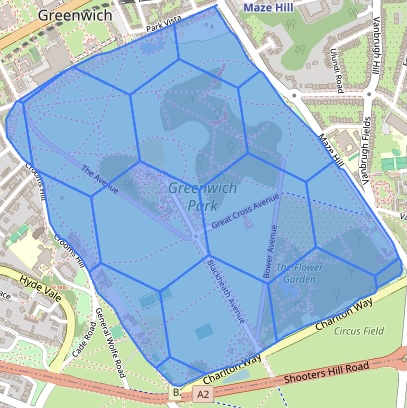

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAZegAwAEAAAAAQAAAZikBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAGv/AABEIAZgBlwMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP63ta+IOk+B9O1fwTpCrfS3LxxwPpdy8Iitx826S4VVVS4P+rt1ZlHBfJDDB0vWfCGoaRLqd3NfX2o6HYxWdwyAtI/mGIvM6HbvHymfK8hfNAycrXCX8d7q1o2pxWUdvaWiQxRtEQFZduCuwfdMZHpt2suOhrsvCXjZvCHgzUNStVtjLZMtw4uAwBVfu5ZVbYueGbgKDkkAV8xiMBTdLTp+XX/hz26dHnaw8Fo7WSaW9tG9d46P+9a+1jsfDr3ulaxvWFZGjbZ5b7cNL0RRuKjeWwEGRk8CtMppOh6leWepRyQanZW1uzvbsrww3s6sxSLI58raG/eAfKyfKQaseJ9S1G0h/se71WHU51up7tG8pEmjiMrJCcKABsA8veoBJHXmoIbu+8U6WbG5lt0FsHlZpPllklYxrFg5CnjKHIyfkweMV4cPZ0v3ENZrWN0rbbL5fijwFGlRvhkuae8X06WsuqaWl1q7HlHxI0jWbxW+IsbQyWkfl27W8Kfv/s8aIvmMiKAWjk+8UXBideFEfMfww+K2j+CvD9/4d1FJbiaK6eayggUsZIJwshbccRqokMg5YcDgE9eJ+Pfxr0P9mn4D+NP2jdd0oay3gLRb7WLO0LGPzLtIWijjLDokhkEb9flOcEqtfImo6dr/AOzb4i8FWf7WP7Rd5oXjPV3tJYvDA/sHTNC1AExeZYWlnc2TXAgUt9m81rkz5+bdkivosqruvh1Vm9VodlHF+2pxlbXrokrr/gemtz7S8WeNPFfjyNrLWXFrYvx9htWO1h6SSYDP9AFUjgqa4ezvNXn8Ka18N1063bTdat7R7OOKP7Lqul3BeSaRpD5Y+zbXWCZUn+fzAf3LqxK+KaN8Z4PF/wAfPGngO68Lara6H8L9Ue08U65JqNvZ6Vp8X9nxX/nRgL9ouXVJSDDH/q/LDFvnQVnfBD9tvwZ8RfGPgrwTe+FJ/B2jfESyubvwlf3WpWNx5sNnbG8KXttbuWsJHtFaZFdnGEZHKONtc+YYjGRg1hKab7u34L+vQ9nB08LdPES07W+Wr7f1dH2LBpV9qds//CVi3keZY0eO3QqpSIsyo7E7pAC7cEKhz9ypvEHiTw74O0v+0/EN1FY2ykRqXONzH7qIo5ZzjCooLHoBXwn8M/2/ND+MfizwRpuheG5/D/hX4nam2keFvE17e2l01xOEkliM+lwyLc26XccEn2Z3Y8lPMClttcFo37eXw5ge0+PGq/CvX4vCT+IH8KXniy81OznuLV/7SbSxPDZff+x/aNqStF5R3A/u2xuPx0uHMzry95LTzX3JeXbQ9KedYPDUuXCxvbZLT8X/AME+7k1H4i+O8f2FE/hjSm/5eruNW1CVf+mVu2UhBHRpwzjoYRwa5/xJ4r+Af7M2ntr3jbVLbSbjUc77q8kae+vPL9zumkC54VRtTIAAGBX52/tj/tXalp/g3W/H6aj4g0Pw1oni/UPA99o+jzQQ6mt1pcct7cX/AJ/kl/si6XF9t2rg7Gwe1e6eKfGvhHR5E+C/xVvNX8Sa74I8Z+BdAuvE2mTW9sbu48Y3yyLZkPDJm3S2NsbsLsaWKQBCh+avTwnCjg4Sqv1tuvTS3kfG4/H4vGu1adofyrb/AIPzPXtd/a30TxF8GNR+Kn7Ount45uNNkijm0+HzIZohLxuZBG7fKPmK4Hy55GK4r9k39pj9qL4v61qulfEDwM3hi1ubC4k0zVWt5oIEmIUQqyz58zkli68YGNvWu++AGqeHNG+L+v8Aw+/ZX+D8s/grwz4lGgeJfFUV/a2MEeoWuz7SsFtLvubxLPzNjnKZfckYbBr5t/Z4/bo8eeFfgp/wlXxn8H614h8LaZ448Q6BqXi+61OJ5oVvPEtzZWkkNq8n2maytPPtoHZSrRhdiIVTn1sPk/uyUKaWqs5PVL5aaHFRwzXvRj6XP2A8MeB/Hfxs/ZS1X4PfESWM+IbWJoIpoZFA+QkxL5qqwRiFMTkIdg/hI4r8KvGH7AXg34peMf8AhX+rmx8K3VrK0j3tjDdzXNy0YCmJmnuRbgfNkFbcScc4HB/oh8LwX3gjVY9V1C6N3LCTFOQqwxCFj+82RrwvTeRySR15r46/bV+FaeG/HcXjrSIWgivP9I+0AE7LrLMTuAY8H5sFcAEYKAGvo8R7aNG1OVpd7foer7NVLpO3byPzN8Kf8E/Ph3+zd408JfGj4ZeI9ZuL2xu4rmDUonhOxhhh5QSCTKTxb424cMjFeA1ft7+0Z8Lv2YvFUNv8cPiX4NTxbNq9pZWH755pLeS3tjNPbLJApaI7GmlKExHBduQK+adRlsPit8I5F060jWSaAv5gk8xpJ4iT5bKQVCh0QggkHkKAp5+jPgfqkXxb/ZbuvC8TCW70lCiYxn93+9iHDvgkfLgnOOoHSuPK8XOalTnPmkv6t0OajrG0t1oz5zXx98DfhxZvP8P/AII+GdHniQPCIrS1RmCsFJzFAuCCUx82ST7V1nhX9tH4h+JBeaJb22j6QotpRZSxKxVJ0DMgYM20q/lso4X+9wK8c8SSQRQQ3GbZ5Fb5IbrmOcMMGMr3znIA7gVf8V6FppsoL7TtKtrC11RIYJZ/KxdRCRCAgUqBEBhF4z8zfdG3JivmNSlWhCW0tv8AL/I3nyU5Rg4/Fszz/wAJan46+InjG4u/FcpuoNbiuhcSBvLDwzAFpIkkUD93IUX5Rhc/dGc16HqPw1sF1+yn0KeO5tre426yk7q29VRWjDqAFG1SCEAAwwOMVRtfibpnw6+HtpA9vLeXqLdCOFD8pMDPnfK3A+6MkAnnIXkCvMfHXxF17xnbTWF9ElnaW4ZlhjctvkQPt3vgK6q8fC7QCxTnBFeJUhjKuIlb3Y7f8HzMHHE1Kz5Vyx2/Q9U+Inijwn4kvdI0W21JCkkokM8MqmJUO0ArgMpcF1dTg7QCQOx9R8H/ABZ8MeF/FsXiTwrbHUp5iWnureEBG2DaFEsoUhCg2jADHJLLtEeOI8Afs+/E3xUI4k06ZNNnk3Q3Fydpe1kjWN0wny4YA8swOSDgkV9Or+z98JvhZoieKP2gvE1vHbRD/l9njt7bKjOPm2I3AJxtyMdeK+ky7C1adKFGOr2X6W/JHRCEKUFFu9l/Xy/QT9rLS/ElkLTxj4FnmZdSCOyxQ+bkx7AdpKlU3x4xu4+TPHNfK/hz9mb42fExre98So4ikw+66PnDjy+VXKQhWKt9x87XI28Cuz+I/wDwVS+Eui6W/hv9mDw9feP9RtyUSRVNrplvnoXnkGTjIIRVA28bkxx+cXxR+Nn7R/7ScL+H/j14wOj6Td+a66BoSG3tJIeu2eVfnmXaQArsyfKDyc1+g5b4Y4mvL61jksPF/wAy99+kPi9Obki+jPAr8R4anLkwsPaTXVWt/wCBWtp1tzNW2Ppf4pfEP9jT9mmyubbxtr48Y+IbVl3aXpgN+zIyggu/7q1hBEo5bzCN52hzkV+x37O/jy6+JHwa0DxXqGijw3cXFpEW0r7ULw2iFQYkMoC7iYSj8gEbsHkV/MDY+BfDuk+D38JaZosSrcsiNGUXM0TfedX3NlkUkAsw6YFfRv7DP7T/AIg/Z8+IMnwn8cztfWmmwIPN8vDS6Qm1Uxj5jJaknapBOzcigdR7nEHCmAwmUyq5ZTk502nUlJ6+zta8Yx91KMrOSfNJKzUrKR5eFz7EyxqhjpJRkrRUbWUtN29dVs9FfTl7ff3xz+GVz8PvH13pi7o9L1qZ9R0qdf8AljNu8ySIHoGik+eMcDyyFAPltW34D8c308h1W5iaaaXba38MeNwmjH7twSeVO7A3HhWBJUKa+8viX4E0P4yfD59GjuEHnql1p97HhxFMBmKVcEbl5wwBAeMlc4Nfl1plr4r8Nyatr+q2yWt7pyyWVzp6tvbzoW6s3HyqMtHgfPGwbOCBX5bP923PofZ+1Xs3fp+RJ+0V+3F40/ZA8d+AtDl0W3u9M8XajLDqsjzFY9Ps4nt1a4UAfOV88vIflwq9OCan8P8A/BRzxl8Rfj78S/grpvh9LbSPA2kNqEGq2avc3t29pMlvdiC36FllE0UYzkunI7V8x/Erwv4B+PE1jdfGWXUJ20+11uySO08vY8Wt2gtJMl+VMYG5Nv8AFzXBL+y38JdT+HmseE7O88SzQ6l4SHha7vQImmJOotqkt3Ix3b5JZ3bzVOFKMRxXqYLOshlhKarytUs09Hp72+nVR0ttr3R4ksdeTlF6dvlsdfcfGv4Sn4feIPjJcxeIZpfCer/ZtY36W015pzRKLsS3Aafy1R48fvUcg5x2Fem/ET9qv9nqRdJ8MXepapZ3d7BouqSyyac6xaUuqsjWkd+dxMDzqduAH2K25sCvli4/Zn+HKfD/AFTwTovizW7Aa5r9h4g1ARaZpyWs8unQCOGI2qKkHkK4EnlGMqSBu3YzXe+IPhR4A8S/Fm1+Nesard3mvS22m2+sy3uj6VdrqT6YNscqiaB/sbOn7txb4XAUgBgDVfXeG1dKto7/AM3l/d/xWf8Ahutyv7TqaO60PcfiJ8bvAH7LHxi8DaJ8cH07RrDxvDrkN9q015JtsjpCwNAoXaqEyPMR0/Gr3wm/bGsviNZ+EPE+gWGlW1t4m1TxnaWY/f3X2uHwxbyTQSxSrIix+ZsDOGUhlO1cda67xP8AFvwt4p+K/gD43NpktjrXw9tdZt7a3iKNa3ba1HDHJJLwrqy+SGGCck8mvnvRfAXws0m90S/fUNanfRNW8W6tGpSBVZ/FsLxTJgHhYQ5KY6nrxUYXOchhh4xm/f5Xfe1/3ltLf4P+AOrjrzbU9P8Ahv8Agnvn7PX7Utv8b/Efg7wT8cNN0u00a++GeheP3ewS5ilTVJ7ya1ESYmkPkLGqhExu65Yg4H2BL8a/hH4J1F9N8E+D919AiSiW6EcTMr5CkS/vZT90jkDFflR4W+HHw88Af2Te+GbvUbq60fwXYeCoxdJEsb21jdSXImOwkh2Mm3aPlAFew6drE95YDXLidjcaNHiYEbvOsnZQckDP7k/MCT0JFeXmWcYGrjeXApcrWjtba+mvkbYPGqpONGo/Q+77D9obx/420mPU9Pli0lHJBjhhDSxuhwyM0u9TgjGQgyORXL6nqer62rJrl7cXqP8AeSeVnjP/AAAnYPwUV8+eEtRHh7xl/Zu4i01r5kUEbRcxqzM3J43Io4HGRWxqHxSN6oh8FWT3hcgLczqYrYDHLDI3MBwOAAc8Hg1cK0eW7PTlRalZI87hg1PSFl1iDfNrWkyyIXcndMsZPydcBJY8FV4VcggDAr1LX9P1DxO+neI9Blt0j+yMyrdOIQyzGM/eYqoIwOCemT0WvPPPks9Tn1nxBPHLfXoRNlvGVLCIHG2MFmZsHkjsB2FbXh7xz4f8FeF006T95P5krrbQ4IiV3LKuR8o4PIGcHI7Yrj9tTpp+0dolYirGnFTk0joY9Pn8K+FdVv8AU3jkkuhJJJ5Ibah8uOONcsF3H7xJXK4xgnt8v21zcWdwl1auY5IyCrLwQRXaeMPH2reLX8lv3Fop+WFTwf8Ae9f5CvHfEUYBguLiL7Rbg+WYuB+8kZVjb8Dx7ZyOlfL5pjYV6kfZbR2PlsdivbVE49D1jUfGF1qOprqbIsbyC3efYOXmtmyrr2UkBQeD93gV6dL8TbTxBo7x6voyXS+eiLHIw8okhmGSVPPy8DHNfPXwh8AeMviT4vPhzw6j3WpxoFnR12KIEAUSktsUrvViMMP9ZjrxX6SeCv2WfCfw6ubbxl8ZdUtR5IUpZwlvLd1QArk4aUM3zeWEyTgZYACvWyt4yq1OUvc+Wv4HpYKeInyzqS91HW/CrwTrnw//AGgtO0DU7S2t4j4Z1CWM2bFogWubMFMFEwRj0wR+VYn7dVi2sWfgzRIGKTT6qWRgQNvlqCzckZ2rk4HOBXu3gj423PjT4lr4Ni04W1lLYXV7FK75lP2eSCMBkxhdwmzjJxj8vmr/AIKGx/8AFPeGZ9qn9/dxjeYwMtECP9YjjPy9sH3Fe9ik/YyUdND0IXclbRnydD+zz4Z877PLq1y88MacDy8qnRCVKnj5MA8fd46cNj+BHgKz0m6v4NXnWJFkEtwzw+XH5LHzDnYApUhg2TxznpXbfBu8nn+HdokT/aJ4ZWSYyfIAxfc4UjdkKGOzgbsD7vbrrjxtpllrx0SaGclJYoDKqgxiSYLtXru/jX+HAr4GlLGVK3sYyejtft5nnqtipVXTjJ6HL+HvhL4B8IXkNzArvcM22Ezyk/N5YDBV4U5CFzwe+MKAB6J/Y+l/88E/KtNzIZ5N4AG75cHPGB14GOcjHPGPoErvwntYKcKr1Tt+CM4zqa871P/Q/pz027tLUyS3Vl9ueOOVreMEK3mlCoCt23g7fToewqCdJdPuVjeORPPUbYpF2yMso4Qr6kHBX14q3B4B+JulaX53ijTzYfZ2MXnT8PdOq71W2hTc8sskY3BAAAQVLAqQPpjxJpvhHwSb+3vrm40qePZf2uuXUaLbRSxTRP5EUkrAfvQyhoxIBJ+8CgYIrxJV4RTlf8j3qVJ1El9z126/JXvou5xOhahrOraBPdX9ja6jrBuJrOLbiGQReahlUbgFSTYgDJu2+bEAdu7AzdXu9P8ABkwk8XRK1u0nkm3eIzG49USIAtJxzwML1OAMiHxJ4h1C98UC58BOYLCMvuu7+Etcl/4TboWCqE7GaM5IztK4zlw2UMUxu33S3DgK88pMkrgdNztljjoBnAHAwABX5/jszpKd4L3ovS239X7aG1Dh2WIlCvX/AHaTukvit2voo2aurLS/3ct8YvCOh/H/AMIeKfhb42sI4PCPjHTLrS9QhT5r1obtWRmjc/u4HUFWX5JCHGcjFfEXjr9nn9tL4mfCKy/Zq+Jfj/wdqnhS1v8ARrm58RnTr+LXLqHRb63vlaS385rUXErW6iWQSBWLM20E4r7D1P4lW82oz+HPAVo3iDVLd/KmSFhHa2zjqJ7ggohXjMah5gDny8c15T8UNT0DVfBWt+JTPH4tv9JRfsulWk8U+nvKADIGt0OXljYNEBdbk8xVdY1ztrXKsxzGvOSw0YvW+2kfQ9DE4fLaH7pPlaWqT6XS169fW17KyMzw/wCBdJ16f42QaI6+JPDnxd8RXOoXt3k2FnY6dc6RaaXMn2mRSs8v7h2X7OHjBIV3Svhf9jK5/Z5+CHxa8O/BnX7z4W+Jl0i3l0G013SvC9xY6/qGYWtYg8ygWsM0in9/Mskolyyrjf8AL3fww+Ln7VPxd+JLeJvinotppPhNIZNOms54ViunhX+GMqofAcA/wp3XJAx93fD/APZo/Z88HeIJ/il4E8Jw2V/fzs4ubj9+6vx80JdpPLV/vDGG5OfSvppyqYKlOdeXNJ2+HZO1vl07nymY1/3KnHRLS35a7v8A8BXTQ+Hv2Uv2E/if+zt4/wDCejfZPh3ceGPA8gSx8Qjw+IfE81rDkQBmjHlm5UBA9w0nzrk7QxOPoGH9hqzuP2L5P2YBqVpceIP7eOuDVIreUxtD/wAJQNfeERfeaT7Ovkg4+8OODivuOKCWYkRLnaMn0AHc+gFadrjTJtG1y28m+s7z9+ZobhQI4wAUK7Q28tn5QMLxyw4zwQzzF1JRk0lFWvpY8jDV68pKSS5Vv0W219tV0+4+MfE37DvhXWf23fFv7QnxE1eC68I+J9JuNOl8NyxmLZrWq21vpNzd+a37s+bptskKKPmJkf1FedfCj/gn34o+FP7N3h74JeO/G8GseLtJ+I3hrxzquvNAxiv08P3FoIokQMzrILGxghy4C+ZnHy1+k2t39vqVtFaoLm+lt2bUftV5FG2xppHXbE6qNnk8LjAYIy8nmuVJLHc3JNXic6q0nyw12s/L5f1psXiqqoPljrpo+lujS9O/pbQ+Zfhx8GPix8JPjbr9z4A1XwzefDjxh4wn8X3lpq9reLrWnT6iyyX0FtLbyrbzRyS75ITKFERkIZZFArwTX/2VZ7f9kXU/2ar/AF+G0u9Q1S810ahcWk6wx2+oeJv7dUGLb5m5I18kkDaHVsfLX6KVznxCbSZNIt9Zvrid9RafyVR/niaIQ/NGv9z5Y/MA6MysFG5znoyrO51J+yq2Vzoy3Euu3RnvbT5bq3pr8j6ns9XttcEl9bcfvGDKeCDnuO2Rgj2Iqfxx4Wtfij8H9Q8FuzyX2kIJ4OMuQoYxYxyeAUHOSyZr5T+D3jWbRNbi8EaxkRSp5drKzZ8xUwFGOzLkJ6t97opx9leHtWk0XW7e73BYXbyps9Nj8A+21sHJ4C7q+pw9R1aXvrVaP+vPf8DeF4OzPze+Dela7pUupaRq0E8dm8kd0k7F0JlGFIBIUsDtBOCwx1Lhq+sP2Zn0vwZ4tuNKtrqf7Pq7zRxwTjYEkjdjhAVVioO4KTkEEbTtxnO+NP7NfxT8VfEKTU/A160Gl3IJwLkwrEcxnGxSuRgOo7YI9Ko/C79jHxb4J8VWXjO81a3+1WUySRhQSSqDGHyDntkBuSBzXi0MtxFPFuunZdkt0QqDdR1XNK/RHiHjvQtC+C/x71XUvEJitrCdZzav1dQ4EuMKmSuwEclsHAAFcrr/AIrt/irZ3GgaTJHZaXMLRY7y7/defPNcxwQJHuZF3NcyQwqhyZHcIFOa7L443vxY8Qft6y+ALW4gfwra6LpOq3P2uDTF042F4upW08Lu4TUprz7VbW7RCCeO3WN8Tbfl3/mxf/HLVL/w9ceGv2rb3VvCukX1hqthY6LFGbHV0n1S10+XT9Rn0+O2sH+0abcHU40We3jhL/ZpY2maNLpvcwvDlXH4n2VCm6knZqMU29OqS/HoRia+HpR9tXaSVt2klY+o/ix/wivwL+Hr/Er4jWkunTWPh/XL+ztLgbbDUNS0K3kuv7N+1rI3l3LPBny2jzJDHIsZLxyKnkXx/wDiVrnw2/t7wRpkkHgK4SeTwtFqen3stvqVv4i02WO6SaUvMzW+kXlkNNnlW1DTi2vHQymRUU/M8nxl+OvxG/ZPh/ZH1CGyufh/HZJZXU/iKytbm/uImjiY+aqxpFuScvJFOUE/3HdzMrSv4x8ePDPiCe3uviL4yv7/AFzX457e5vNQv5DNJsL7QoJ+UDLDaijCjA4wK/Vsg8MFPEUqOZ11ByaXLC0pdleXwR+Tk1tynyuacYONOUsLTcklu/dj8lu/uS8z320/a6+KsP7SXir9oX9mTRU8Pp4tspLOSXUoVTzbeUWckJuBGWNxc2UyXfk3DySny7lkULHHHGuN40t/iJ8br2XXvjh4gvPE19CRcLbzyGKzhUAqfLgTPIBADYJbABr03T/BzGyhOqutnMkgdvJbcWC/w5I47HIx9McV3troGkWdw97Fbp58m0vJtG4leB27e1fW4Gjh8Cksuoqk19rep/4G9V6QUF5Hy+MxlWu74qbmv5doaeXX11e2p5T4d8Ey2mnw2Wi5t7aIh4mjzEVJGCdpTbjgYADdia73+ydE0c/adUlhtxIFiXOyPpuIUNw38RxjHHGMcV2NYGveG9L8RwxxamG2xEkbTt4PBH0Irb1MPrk+VU0+WC0sjXt7W3tE8u2QIOBwPSvL/id4V1e5it/HngYrB4l0HfPaSeWHMybGV7dh3WRSVx/LmusOmXsnjGPWop0a1jtTB5OeVYtnIAGOcAe2K6ytaFX2cuaya2aaummrOLXVNaNdjjqQ77/kfph/wT6/aO0P4g+CdO8KwXLS6ffxSzaK0xHmQtCf9J0+T/bt+JIv70DDaAqV3/7Yfwjhntk+M+jROZNOQLqaQ9fJXGy6Vehkt+jHGTCTkkIq1+Ing/xm37O3xJSFrqPS/C3iq+juIrwRqq6LrcQUQ3O7/nlJgrMvQoW7DB/pQ+D3xK074x+AI9bnt1gulLWepWTYcQXKACSPuGRgQyHo0bKe9fj3FfDqyzE8tFP6vPWm/wC7/K3/ADQ2fyezR+o5DmixWHjL/l5GykvPvbtLdfd0PxzsdB0+w8XQ6V40gktxOISIoRuVZLhiqI20khSQRkZA7sK+kodM0qxs/wDhGbVJYoZkmYeWZBtDN82JR9w5f5AGBA+5wvHnnxe/Z01zwd8RdV8MabcI2mahA97o4uMttCAIY/8AbaIlF3OSUUo3zMzbcn4U67rV5aXvhiIsPscQ+zyXX754G5TZMAV53KSEDZABBK8V+QZ1lPsk6sPh7f5HTi8BCMPa0vmip4u+Gkl3e3F/4VUnY+JIGUx/MQGzGWwrLg9uAcjqMDxWWKWCQwzqUdeCpGCPwr7nf7SJoWt2RUVj5oZdxZNpGFORtOcHJB4BGOcjD8QaD4P8RXa6ZqwiN26F0AYLNsGBkY5wOPYVy5ZgvrcZKM/eXTy9f+AedSwntb8r1XQ+MVUsQqjJPAAqtq8smjW1xNdxsr26sTGRtbK/w4PftivtLwz4A8PeGB5ltH50+f8AWy4LD6cYH4V5X8a/ANrqFsfEEMfyEp9oVCVOVIKuCuMYIHTHavQrZJVpUPat6rouxVTL5wp87+7yPlZ/EN8kUhZYw9nGXmX/AJ6EMy7Y+eM7cjOfvKK9N8PazJoGsQapGNwjPzp/eQ8MvpyK83svDRtodPaXEk8EgmuHdmcu/lFCQWyeu3A4GBXXV48ZOElKO6OFPlaaPZIba2Om/wBkX1m99bBmW3KwmaOSEHMXzAMoYJjduIwQT0rH1jXmgtms0mFowG1YrXZJIv1fBiXHTCiT6ivN0mljUojEKeCAeKjr1qmcScbQjZnsVM6qONoRszUuNWuJUaGACGN+HC53Pj++5yz/AInHoBWXRXS+HvCOveJ5SmkwbkX70jfKi/j/AEHNeZ+9rTtuzym51Za6s5qtfTPCGreLCLWwtWnVXRs/dVSh3Lk8Dgr+mK+hNB+EWhaQn23xFKLpkGSD8kS49fX8cD2pdd+L3hLQrU6f4YX7fdKTHHDCuyJGBCfO5wqruZRxk8jjFe1hsjl8WIlyrstz0cPlU5fHoaPwy8A6h8PtXk8VQXzwajNCIGa3YphAc4z3HJ7fyGNrxn460TwrbSaxqM/2y/dFYCSUyTyISBuLHc+xepbkAD8K+TdY8SeMviHdjT9QupJo58EWVpGVXy+BnaCWJCuGG8lQ6MOwx9K/Cz9kz4keM7P7dq0UWgWzl0YOmJGjmQCRAu3BQMN0fUFQFDLiveoONOHsqEdD36ODhSilfQ8O+KHx4+Ing/wprPi7wb4p0H4a61YWclhFrWtRSXlsvn3NpuiRVR9k06bTDKbe6WMKzPA6ghYdTtPGcXwlmm8dW+t3+uf8JHb2+pa3P4qj8VWGqTLZXrbbH7L9kFoIV5lhXS9PjPmoQj4bZ9QftT/Cr4E+A/2fL/TNL1zStBvdPuNPvv7d1rX38OW1q1vcRopbVlguTASW8pUwWcP5JIRzXxv8HbXwfN+xTp/hbwNHptzZaL4/ksDqujarceLtO1UQ6Sdlxb390kb3SxxGO1baipDJbtEvEWa7HzeyafYNPaKx9BfCJZrLwZFq2oOJftLpHH9njwipu2qDFGNqsrsRI20HA+c4XjmdZ89/ifIbS9XaupWQe02qd58uHLZzkbR6cZWvQvhXZGy8F2CQbVtzCGWPyyjCRmYyHlsYORhQo24PJBGOvl02eaB5X+ztervMEzQ5VOT5eV3ZO0EBsMu7nG3OB+eYfHrDYmclG/4HjQxfsa9R8u912NSeOO/uVIWUGzfjG9FLFPwDrh/dQw/vLxZ8qT+4a8z+Kni2+8J+Gkv7O5aB5J1iGyLznbIJwo3IAflzk5GARjJBHzv/AMLr8T/8/wBf/wDgEn/x2vZwK+sKdZaXk/0LoU3UTmu5/9H+nq++Lni3xx9o0r4PwznS5riScatq0sslpiVt2LdCwknVVOIwnlQbfuyHvqaB4Zn0vbea3qV3rV+qbPtN4+7YpOSsMS4ihX1EaLuwN+4jNQ+KvHfhnwb5EOtTn7VdkrbWkKNNczkdRHEgLtjuQNqjliBXJvo/xE8fqP7dmfwtpTdbS0kDahKvYSTr8kHHBWAs3QrMOlfg9StWxM7yd3+CPuZvAZWnVrS999XrJ+nZelkdD4l8f6ZoGoJ4fsbe41bV5UDpYWSh5Qh4DyMxWOFDg4aV0DYIXJGK4rXPGFl8N7E/Ez9pHWrfSfDlo4DadYb9rF+FV5sCad8gFViWFeoYOvTpviLqPiL4dfB7WvFfwzsbC/OlW0YtLJ5PLY3Ik8uWWVwCzp8yGRid24HcwBLL8xfs4+H/ANpP4oeCNRl/autNG1/QtXuI0i02YJH5IjkMjE+WjCRB8qqvJyo+YDJr3sFknKliask4prTT8uvz08jwMfnWNxEVLDrkpaa/pzOyTXb7m9DWPi/Qv2ofDuu/AjwVpmo+AbGfT45rXUdP2/YoYzIqmJZI/KRck48s7d8Z4rZ/Zh/Yx8Ffs4eDtU0jxBqd/q144eSS42LDbnK8pbxHc5AwrF2wCwG3uK+s/Auj/CrRdKj8C+A7eUpZy29tZWkapNb6e8McnlyKMbkLgeU8mWO7ZuIPNWbmWRpRbiGa7uZZTEIYl3SZUZJO7ACrjnvxwDX0tOpOjKMcFBuMtbbJdPl+S6Hz9a8akamHV4z1XZd130emvqfHNxp88N+dPiBlbPybBncDyCB7jkV9C/CDTIGtrqW5u1e9mi+y2luJlMLurZTzMZI2OxUlAWCyH5eBjttcXwj4WkRr6Ga91O1HlT2+nrGFUOMos0jNjcuM/KQdrjCYGa8IjlivLq9g06MrBMC3lusiPFzzbu5VQyj7qNGT+7wflOK9ythoSg4TV7nsQlzaSXu7P0/A+nr25todWt9S0tJLWa0iMOFlfy9zDDt5eQpJ6AsCQOmOaypJJJXMkpLMepNQ2dxpd9pdvcaLJcTxQxQwSSXK/O0qxqTuYKFZufmK8Bww4xin1+fYv2iqOE+n3HyuN9oqns6j+HRdNN1ZdF1O+8Hi51G2uvDGnX8dtdXaeasckDXCmKJlEh2qycneFA3qec87cVkajq3wvlg1HX7bWLeSzjhgnt4bNC8qJINvJDuJvnGcRKGXBXBOKzdZ1zxd/wAIRcaB4fsozYXEEsF1coxE8ckpAUoAQciPdg4OCAegIPjms+I/CcNtpOludmr3Mn2aEzS5eYhEAit0J+UbY1IijAC4OAAa+rwOCp1cNTTipK3Xp5L0+77j6bBYfBvBRVbV9LW7662utrW6ejaPUXQptyDhlVlyCuVYZHBAI47ECqln4p0W08RQ+BmvAmq65DJBbW8SG4uNrAgzCFUkJWPGdxTYDgMRUWupqureDtPvPF1zqfhmwvptz3EKW893aQIZfOtzvaRY5cBDGiieXaSiwqy/Lw11Lc+LfDjaJ8PrB9A0172KT+0tatVm1ie3tYwkPyyPJkg7mVr3zSD/AMsE2rjz45XTwtT21apaKei6/wBel/keY8vp4Wsp1aiUFqura9NNuqdjjviNdz+FPifJ4J1aKTR9aXRhqnlxmOVntppHinjQYxhZYhtOBuUowxkgfVvgXXvFWu+AdP0vXLeMzT2k1tNqIkSRknJKxl02NExaEo/dGc7QuK+T/ihbeE/AFvN8UtSeCK7ebfqOoXcqrc3KiIqFaaU5YDCkR5wNvyjsflCT9sx/BskWjfs76efE0yX6XM1wsbWujxr5UkTRpJLh5fmIYlY41yuV3Zr7vhzKcfnK9rltBuG0pO0Yq3803aC9L37dgr59gaK9rWlGL1tGzb8rRV3+nc/XjXfHfijQNDbR7nxQZHsoVMjPtimjhVPL82RxjOZIpHLcAZx2yfy3+NH7YGkeHdTttCsPEl949123n2zWWmjzbeMFWX95LllBXrtDkgryFHI+X/GR+Ifxz1h5Pjj4obUZoYHzpenD7LYx7mGEbZtklG7JO47lyB8vFOTS9K8C6Ta2mkR29rtwSlrEIy5U+jb8LjqfvE9xX6lk3AGDw8YrMavt6n8sG4wXk5tc0vRKK7SsfIYvizFT0oxVO6veS1t5RirLyvf06lTX/Ff7SfxP0E6R4t10+F/DjtNJLp2nSHc/2huRJKx2k4JRdvAXAwazdC+HvgrwZJD4j060kmkuQ0klzIXLZ7s7P85L5J6Dv0qa/wBehvLmWeO0ij+0bfO7u+3p83BAGBjHQ1Yv9dTU7SeObMLGRGUIxYOgPIOQMZHB6j07V+gUoVcPSjhsPSjTpfy01b7+svWTb8z5r61GtL21WfNPvLpp0Xr/AC29Dd0GG3m0A21pbJL/AKQBIJnwo+RTujIj6KCAo2rg5+tZHxbs4te+EHiLRLfbHLaWplYFcbhDiXcAP72w47bsjtWl4Onu7hGU3QaG3Qr5HBILkbT6jG1hW1r+hQa9plzp7yPCbiGSDzIzghZFx06Eex4rnoVfquMhUT0jJP7mcOPqupurXW2vVef4W6WKvw/km1nwDod9H8/nWNuxOc8+WM5PseDXqiqEUKOwxXy7+zvq2rz/AAk062s54FNqZYWRomLIyyMcHDr2IPAFe0umqXX/AB+3r4IwUhAiX8Dy4/B6rM6UcPja9JdJSX3Mn6+61KndbJfkd1wKRwpQh/u45+lefnR9LfmaBJWxgtIN7H6s2SaX+yrFgBMrSgcgSs0g/JiR9PSuH2vkZe18jbOv6PBxpim6J/59wGX/AL7OE49N34VSlvtcvP40s09I/wB4/wD30w2j6bT9afRUOo+hMqspbsxL7w5ouq2ktjq9ut5HMmx/P/eFl9Mtk49AOnauv/Y7/aB1v9jr9oXTfAvie9muPh94qRLIS3GD9jkTPl/NxnyydoH3vLbABwtZdcX8QPB7eOvC03h6G5ayn3pNbzqSPKmiOUb5SD/h17VtTjQxFKWAxutGf/krtZTj2cfLdXjszbBYqphayr0viX4rs/J7eWj6H9Nfxh+Hn/C0fA0um6ROltqkH+laXdkblhuVUhSeDlGUlHGPuMcc4I/Hb4fa3L4c8Y6lF4ktJF1EhreSF1L3CXqNseIyybUBlZFHVYmKqFJAzX1D/wAEzf2mn+KfwptPhl4tZo9a0KJrdBL94i1wksB64aAldo6+S8fUhjWp+3F8Fo7Y/wDC79Ai/dt5cGsqqltg+VI7tVBHzKoETsBu2bMFApav574gyipF1cFX0nBuL9Yvp92ndbH7Nhq1LFUE4P3ZpW/Q4Lxnqlr4a8P3moQn7NLcBgJYwm7zvLwhwxG9jtVFHJ6DoMjyn4afArxd4x8IXPjvw9NJp9pZWwHlrKZLlWjEkQI+VTGsYBGEzmMAKM8V2Xhj4e+JfjroiyW0bjUYDLA4ljR4hGyKrBNrIMEqG3GXKybkDHGK+9Php4M8L/s9aadN1PWJby6u9heLO7G48yEdeu47sKuBhU3Z3fN5FgOSMnNa7bdu3dGuApqjB3+K/wCR+a/w+8c6j4VnuPDvieze2gjnjTtttZJThkLE/MCSH+UHG7uMGvpWaGK4he3nXcjqVYeoPGK479qn4OW8PjweIvDUS3UV+i+bFBGrukcittKBiEzlSu4g7UKAAbcml8MNbv8AWfCkCanBcRz2YFtJJcY/evEAGZSCcjdkZ74r6Gk3FunLbodVWKaUkfOfjfwrL4T1trMc28nzwN1ynp9R0rjq+k/jHrGhf2amizDzb3cHTb/yzHv9R2r5Ki8S2VxCJLSOSZmLAIgBbagBLdcYwQR35HFfEZlQp0q8oU3p+XkfI4ulGFRxht+XkdFRUUE8VzAlzAdySKGU+oPSvZvh98NZtadNY1xdlmpysfQyY/ktc+Hw0601CmjKlSlUlyxRU8C+AhqVs/iTXo3+wwKXWNAS823ngDnHGOOvQV0Gn/GqysYUtINHMMHmiOGONgSIwNxyFBG8rhkVSQ+4AHg16F4/8bWngzTk0+yU/brmNvsscabsLGVVm2j+4GyBxnGOK4z4FfAC9+MetySTTuugwyGRboblkdUZSq/dVgwk34IIP3xkbQD9jh8LHDJU6PxdX/XQ+swWDp0qeq+Z5l46uta8Z67Lo1leTXqx3SvFbR4ZGgliDwSFMKNiMwBL8H14AHvHwy/Yy8e+LY93jD/in9PCYEeN8hBVkx26IVVsAAhVKuGFfTmrfET4C/s96ZB4e0KMazq9oVSCPAaUHhFIbbtUc7QwABPBbNfGfxI/ar+IfxMnktbe8Gjabs2tDbNlvLdQdzf8BZZMckBHAIxW8lCLvN38jui5WtBWX9dD7Ettb/Zm+ADWOm6J9m1PWZZFCyK3mtvc481mG/HJI8wBiM4ZsEmvOfjT8T/iJ4t8N6tb6XdPaQLAZVhjjVo5FVWzEArCQscDcSdvI2jqB+eej6Prfiq/Nrp8C+ZeyvFIzybBvO9mQyN8zsIzJyAWKkHB8uvs/ULkWXheaz1fUljvLKySa8mRVdlAB3OYtuNjlHGAoyAQuCOPns1zSpBwhQlZdUjy8fXdKcPZy1/q39Kx8Z+MfF8ukeBNe1XQfEsWgyR6dbST6sl4fDLR2dvqenzXSf2ncSBIJbi2jltoHYhfNlVWIViRsfA//hGfiH+z74u+Nui+LdT8U2Wq+LhpNla3/jO78ZJpdhHbWzmCUW93NYrefakeQNbl3S3lWMynLrVnQ9Z+Kfg/QJPHXwWj1HUdZ8M2d01p9n0iW/jMbHyXeG0t1ikuJfILyw25cB5UUMwGWH0N4clOpfs7+NPiZqmq67qOo6n4k0m9v9R8Q+GJPDDysgtrNCls0UbSqsSpHvwW+ULn5RX09DWgzsqytVT9B/wvC6h4C02w1K28xLeNCGkjVV8yGRgF2E7g8RRSSVHOCCTnHomx3hOptYv9ohEqIuE8wrnopztAk2qwyw4xuwRgcT4Fk06fQzoun6kJLm3naabyV2uommaUKUkGVVhlMkAkZ2kHkdtcXtgivrkl6sdnbLMJSSghGw/MzsVyDHsYfeAHO4cDH5pWUVVqep81XSVWfqfLnxrje78VDTtK323lRCS7aHenmvLgDeURgCqxpgsORgDoBXjP9hXn/Pzdf9/5f/jNX/F3iM69rN94oh33kbTFYIZg2U7FYwpXou0nDgjuveuO/wCEivf+gQ3/AH7m/wDj9fcZbRUMPGNj6SlS9nTjHyP/0v6irXwz4T+HWm3HjLU7RdLvLhf+Jrd3DM7vPGcMomkJdod2fIUHYEIVABxXkXinXl/aE+H9z4c+DHiibQ9Tkm2u4heGVoUzvQSlD5JdMurqpYBSvyMePRvEOj+Nfit8Q/E/gD4w+Eriz0Lw5qUcdlf290Yoby3eKRjJsJBJibZgDIJb0yKwPAkvwr+CXgS4tPDF1DZ6xe3tvaT6iFkvLYLJKsaS3MrInyqzneiMViBONo5HwNLK6VKfLBfvE9Iq1kbfV6VWv7eo7yk9m9I62V95OKt5O1ih+zn8CNE/Zw0RoNL1OKHUYEluL6BDkf6TtVXLk7mwYpfmfg9guOZvidqp+IWk/wBh+FNRmguonFzFKikQXIt+sIIK712nIC/KdvHQ40vENp4i1zxFqk2vaclpp1rPAIr+6xZWMsexQjS5yfNik3wmL940bpxhSCaWrafNbQ2t/o+orqEVzuktLtYTAqXVucPEUb5gMYIzy6Fuwrvq5dVqv21Wd5dEtv66aBjMFKt7tSXwqyWyW7fTu352PHfhf8RNU+GnjWx1jeVjkHk3DRjkq+FbCEMPl++AT/D7c+7+KwbfxdPc6NfLd3UUongvBH5S/alVJJVCdFU+Yr4X5WilGCea8P1vR01/XmuvC6boroCV0PC28jfejdsYBVuMLkj0r6z0+K58c/Bm20jwlB9pn0YLtadxvjvLfcJYlYffDoRGgKoFXDZPAHfg+eSTS0OXKlOnCUKkLLv539Nrei0PJdJsf7OshbYUcsfl56nIyerEDALHljzWlVWyvINQs4r61OY5VDL24Pt2+lWq7D1GdN4NuJ01j7Fe380GmrDPJ5IG+He20ksByuNoYMBx8+eGyOu8TajYeC7G61PxZNHp1tYrunlnYIkYHHJPHsPXoK8b1bxFYeFdIuta1jTZtX0+KM/bbO2/10tqceaIxxlwmSq5G4gL3rrfGnxH+G+g+GNO+MKp5AnNtt1ie9ksra1s8GQBorqNStwz7kKWsazuUCvNHmvJxmSrFVYuN7vSyV2/JLv2/I5cdhKNWmq1SfLyb6K3L39bu33GvJrF3qvhS+8UG3gttC0u2XULiTUbhNPu42ctFbt9muxHshky26WZ4f3WfL3Zrznx38Vfhr4CsrzX/AskNhBNY7ptX18i4tVfUdzzRQl3jnlUxsFjRfJhO1CFk/h+HPiP+2n41+K+p3SfDuCXxnNJOkiaxr0It9IsniJ2GxsgBgrniR8zZA37gBXgsvw+1Hxz4ji8WfGfWJfFOsSfJGbwhLaL+LZFCMIF6naBt77RX6lkHhvUopf2pL2FP+T4q0vWG1Ps/aNPa1NnytXjWnTprDZdS5+W9pPbW19eq0uuVf8Abx9DXP7YHwwh8Z2vjLwTper+L9RijFuLmK3eO3W22bWjgWXalvHuAJSKONd46Gl8S/tc/tIeI7DzfCPhnT/C9vI6BZr2R7+fbnoI4kADMP7wwoyCQcEc/dT/AOhQ20Crbi0lwyFFYNHHwMYbCqfUjgdh2hWGR9SuEMBt2lTe8gQeWzYCqDyCxx6cADqDX2a4U4dpVFOngVUktnVlKf3pclP5OD+4+bxuY4vES569b5QSj+Lu/ubPNdZ+Gy+M9ZOsfFPV7vxhfiMJHNdPtjjYkZEcQ/dxqcDCgdSfbHoUTGGFLZYp4lglS1hBj4CjjcoJztVRwxGOOM1ei06DybX7eqXE9qSyylAuGPdV5C46Dv71dDXBuWeO4UwqnlvEuCwkOGyx7YXGB/tfSvoJ151IxhN+7H4YpJRiu0YqyS8krHkQrU435Fe2r+W3m76bjrqS7kBksI43mJUDfx8hYbwCOmVHHbIFZGv6TDd20jrb+fcxoViw2w4JUkA9OwxnjPpWyCVII7VRs47Oy/4k9jFIiQIJFLcpiRm+VT/snjHYYrOM2ndbo5aU3y3W8fxT3Xp5ebPOV8K6oNQisJkZPNXdv2koo/2mHyg8Yxmtyw8I/wCht9uYQ3Af5GjIkGweoZQOfTnHrXb0V1VMfVmrbehCrRj8EF+f/A/AijtrSB3ktYUiMmC5VQNxHripaK838f8AxO0LwCkNpcJJe6ld8WtjbjdLKeg47DPGfyBxissPhquIqKlRjeT6L+v+AjnqVftTZw3wE+y6Z/wk/hG3z/xLdZn2A9onwE57n5TmvoGvlDw1oHxv8G3uoePk06yuZNYl8280qN9sibM4Mb5Kbjk55P59PWPCnxk8GeJ70aHPI+l6qDtayvV8mUNwNozwx9ADnHavfzzAVK1episO1UjpdxfNZ2XNdLW172fwvozloVFGKhLT+tD1eiio3ljRjDkNMI2lEKkeYyr/AHVJHsPSvmDsjBydookopkbSPHbyGPyy3+tR2+ZBjttypP44qESXiWlxPNCjSRnMaRy/eT3LIoU+3NNRNo4aTfKmr+q9CzRTULveqi+U1qUz5qS7ju9AuzGPfd+FQvO8aRs0EuXkKYXa20Z4Y4bp/L0osL6tO9tPvRgeAfGWp/BD4/6Z4n0+9j0zTfEEysbmXAjtdUto2ETkl0ASeMmKVR/rF3DrtI/pv8C+LvDnxj+H0eseQj22oQtBeWcuJAjEbZIX7MOeDja6EMPlIr+Yfx/4R0fxx4cv/B+rSCMMiHzO8TE/IwzgdR0B5HFfoB+wB+1deaf43X4LfFNbLSL8WdpajYfKS/eICGO7iBwhLKFSVVwwJBxsTC/L8Z5PLE0oZph43lBctVLfljZQqeaS9yX8qjB7Xt9jwnmHs28DX0vrC+zvvFefVd9bbK/2/wDGn46aH+zxeQfDfwjpQsJJIYroSjGZIdwRjECH81wBjBy3GCFBRj8b/FTXPE/i+ysvF2g3N3daZfBZTDbBkkll7F2UeZ8y8Ic7QyruyCMfoX+1X8Fm+Lvw8+1aJEz67oW+6sBG3ltOCuJbbd2WdBt9A4Qnha/Of4J+LNRv719CnnaWxa3M1n5kbJgIw3qhcbmVN6rlznsFAFfk9RPm5Oj2P0enL3eZbo53U9A+MXim8sIfEMBmEZiaVSES2Viq5ZgHBkIG7Po6jbhWxXf6vrdh8LdC/wCEd0eXz76UmToAkRbuEHCj+6v4nPf3GviLxfO9z4pv55FZSZ34YYIAOB+leXmteWGp3p/FLS/Y87McZKFNRhoczqjXeqR3BkmImnVv3p+YhmHWvP4dF1GOD7ZvMcokS3RYEKbYlfy2PJbhkAb2wCK9Dor48+aOs+HnhiLWtdtdKjTFrAAzgdBGnQfjwK+1K8Z+FdnpGg2CR3txCmpaj86ws6iXywMqAvXplvp9K6DSviTpes6xb6ZY28nlXMssMVwSmxzCGOVAYkqQh2nAyMe1faZRh1QoJy3l/SR9Hl+GcKV7as8i+Oej366tBrl3G11aS+XaQwjy2HmNuY5V4Zf7owRivCfF/jnR/AMthp3xHa41KG+0qGDR/D1j46vPD13DJBc3QndtL010k1FJGaPZMkM5BRodkfl/P9MftA3epQaHZW1tsaC5kdJEaPfhgu5HyEdlC4PKgNyMEYr531oeMPEvg7w/e+HLa58WWGm3F/He6BbPrtzayT3y2z21w9poxkW4CfZrhSmpPbW+ZAVZXJ3d9Kyr2PTnrRT7HovxTuR4m8U2TR6XJp1zrQspWa6F3FMiTpESj29zFbS7kBXepRJQYxvA5A9f0D4P+FNAnQSWw1Jd8s/nXjB3jkbbgIgQJggHJyCNoHOePPvF/wAQItVvz8SvCxWzuPEelWephoLJvNHngl1mjzMsUkT70lj5ZWTy2dtgI998uylt/wCyN87Ldxyyb1aX7rEbsSg5Q/P8gDAgfc4Xj43PKlWnUtsm31/q3oeXmFWpCMUtE/P+vuNa389ZJVuI0jQP+7Ktksu0csNo2ndkYGeMHPOBx/jPUNYtfAd5dxtHZ3n2fDMJW2RM2A2xwm47ednyAkgcDt0n+j3tx/y1VrKX/bjUsU/BZF2v/tKGH95eMPWtR0C10C58Ta2sr2MluhmjljlcCIZI3QEErjd8/wAgIA+fhePn6c/eR5FOXvI+DPHnwv8AH3xS8Ey+CvAFxJH4jurLUv8AQpdGN8mqQXKIbm2aKTUdPDyOqD5muNrQGaFl/fbk6r9n7UNF8LfDb4t/De18Of8ACHa5PreiXE+iaN4Ev/C/h/TnsmsZGHyzXtk93NFIkjMlyrTR+WFU+Xmu/wDh54R0h7vUdH8R+C9U8V6ZJpZNzoeiPD/aNzatcoyvukntCPIcQsxjl8zK8Kc4robPx/8As3+IP2ZLDUf2bvDni3w/o+v65Z6zdT63ZanHd363GnzGC4jvL/zTdoI7aFMxTSLFGI1+VSgP6pRbWHPqKiXtUl5Ho3wtu7zUPBsWu2+yaS8uGdwcxKAj+U2OGPCpkA9Tx8vbu9Vv7vTYHvYoUkiihkc/vNjmQY2IARjDc85GOODnjkPhykOneA9G1GaNkaaxtEKRb5FG/wC6dgyAcv8AvHwPVjtXjkvjLq02l6JbeGNNtZ7mXVZiUdSW8to3WXJ3JIuM9EOBtGAMDA/NXH2+Jt3keC4e1xPL3ZxXwX8NL4o8WLNo8dhctbQSXkPlmSYBpDsVJ1XYWIjZ8NtDZUZxzn6y/wCEF8bf9A3S/wDwEuf/AIuvhH4ifEfxV8M/2f8Ax9478A6rDZeKNNstHuITqaxQpbWM+oyWUbbpI/I3yyw3aBWU/JHkANtr8vf+Hhn7Z3/Q6+H/APv9pP8A8jV+l4alamrHvVpR5rH/0/7IPjn4XtPil4N034k6BE8sVxbiOW3DKrOrkYjY7guN42sudpbb1xXyB8QPh14n8F6dDd+JoZLiwnke2uYY4f8ARorbymYs3BfA2j5jhducha99/Y9+JcOv6ZP8LfFMuzz0D2UUjASZALNsOEPQblKoqgoSuetct8RtQ8d6f4l1TwRbCS1vLwqhSxAd50QFRJhhtiBUqCeAFClmHbyqsFLlmtO9rb+f6Ha1JTUb6L8v67HmWoXVnq2l6Yq2lxLfW81zJezEmSAysIlEuOiPKoDk4UFvNAya45tOu9e1yHSfC5uJri7uI28qAKsDTWisf3krKQp2MVI3ZKkDHSt7wPotxb6BpNjFrVlPeagFsg8GXgItj5i73ZSLjeY9gjjwuScSdK+oNe0fWF0AHwOkF8YJ0RLEt9ms1tgeURIiqkFMFS+5SDnG07aKVPmTtt/Wx24l8nK5/Ftbrp37dreXoeV+EPhBqXiq0g1fxPciGzlAdYIP4l6jJPX/AIEACPlaMGvRNT8c/Dz4V2X/AAjvh+JZroZ22ltyxZRs+Zu2NoU/3BgYAArwzVviN4s8c2ogsJBo+lfcWCADzCq8FTxgAYKkdCP4FIrAstPs9Pj8u0TbnGT1Y4GBknk8cc9q39oo6QRxODfx/cQ29xeXmrX9/LafYobqVpxDuDBJJGYuFwT8p4Y5x85YAbcVyvjH4leC/A2ny33iDUra3ELIjCSVUClyAN390fh9ATgV80/tI/tfeAvhPBceEtFP9seIUZVe1ido44O/72RR+BjU7iOCV618PWvhj4nftC+JLD4gfHKZWsYEKWmlQRi1VIc7lRIolVYoyTkn779T13V+j8N+G2JxlBZjm0/q+Feza9+p5U4dv7zstmk1t8lnPF1HDVPquEiqlXrr7sf8T/Ra9ND6v8Y/tVz+Nbe40b4D6VJrV4z7I9bvmey062aL5j9lgJWS5fGPmlCkAD9wATn4y1rRPihe+Ik+JnxotrvxfpsZaQtkfuFK/MRanaqrwDgALhcmvq7wxp+kaBpS6boUMMUVlIyQxTI2yOQ9WUkc4z/AQO2RWrfG4V31GwiZ5ERYTFbybgrH7ygFgi89ScHAH0r9MyeeXZOpRy3CpRas223Va7uas4+keWP91nx+NdfF64us2+2iin0916W83quljz/wL458FeLJI4/DU8N1DFFl4g3lSRkcBfKIBwOPm4XsM9u4hidjZhkeZfnVZ1CFkUn5sv8ALgdBtXnjGOK898Z/A7wd4v1J9XkZ7S82/u7i0AikD/3mbnefywPzrj4NV+L3wnhSy1y0XxPoduAq3FmgjuoYxgfNEOGwAen1L10LLMLif9xqWl/JNpP5T0jL0919keM8wdGPLJL1je23Xqvl7p9ALpsTwz22peXdxyyBgrRgKqr90Y5zj1J/ADitIkscmvOfA/xV8EfEGIDw/dj7RjLW0vyTLj/Z749VyK9FrzcRhquHm6VaDjJdGrHPLEOqr308tvuWgdAW2ltoJwoyTj0FV7VIxAsqwfZnmxLLHnJEjjLZPt0/CibEjx20dz9nlJEoA+88cTKWHsDlQfY1Y68mseho/dpJd/yX4f8ADBTJftDIghn8hUcO+RkMgHzL7ccjHcCn0oJUgjtSWhnTlyyTGK8ciLLCwdGAZWHQg9CPwp1c1r3iXQ/Bekzan4h8vTdMtfLjhcchgw+6qKM5BB4A+7z648HNv46+O5ljvfN8PeFVkUomwrdXsfHXJwEI5GBjkfexkeng8slWi61SXJRW8nt6RX2n5L52RniJKnPkjr29Onp/SNrXvirrninVX8H/AAagF5cRv5d1qMi5tbYHjIPRmHUdRxwG7dZ8PPhLofgXzNTun/tTWJ3aSbUJ0Hmkt/dznYMHnB579gO90Dw7ofhbTU0fw9ax2dtHjCRrjJAAye5OAMk8mt1I2kIVa1xOZxVN4XBR5Kb3/ml/ifbtFaLz3MoUW3zT1f4L0GVw3jvwX4I8V6ZjxpaRyxj5I5cHzVJ6BCvzZ/2R19K7F2u2K/ZQI9k22TzkPKL12AEdegJwO+DS3N1Z6f517IwgWUguWY4+UYAGeBwOgxXm0a1SjNVKUuWS2a0sdjowWlXXyX9afj6HzteeDvjF8Mkkg8E6j/wkGjqFAtLhwLyJBjIikKleFGB2GeEzXU+Fvjz4N165Hh/WWl0TUYQqNbagPLbcAOA54Ptuwx9K3tV+IdpDmLSY/NP99uF/Lr/KvE/GGnWPjz/kZ4luCowjY2sg/wBkjpXq/wBq4XEaY+lr/PCyl84/DL/yV+Zh7Kqo8tJ2XZ/1f9OyPoPU/HGiaf8AJA32h+mE6ce/T8q4/UfGd7q+mS6bHblZLoqsXlIJ2UZ6shxlcgLkdPwxXy0nhrx14NzJ4Wul1Gwj5NtdMFKL04c4A/MD2Nem/Dn4ieGr7xnCviQf2XfqNsMF2vl+UGQ42ycBgwI25AOTwPXKtk1RxdXBzVWn/d+JL+9D4l+MfM9DLqtGlP22JXLy7J7Sktknt/wOnQ+rdNszp2m2+nts3QRqjeWMKWA5wPTNXaKK8k46k3OTnLdjZFWaFrecB42GCjDKkehB4rkvF/g3TvFdjaRo76feaYQ+nXdqxiktJFxtZNpA42jj06Yrqp54LWB7m5dY441LMzHCqo6knoABXzhf+OvF/wAWr46B8Ji9jpKMY7vWXTHsVgB5zjvwwOPu8E+pleEr1J+1pSUIx3k/hj6977ctnfaxlPEOmuVP0SP3e/Yf/wCCgPhv4tCP4EfGzULTT/iNpZFqCHAg1dVHyywnoJiP9ZCcNu5UYyqc3+1Z8Jrz4UfEeL4qeFYVh0rVLg3BkVVVbbUG+/HJI2PLguMl+OrmQdWjFfjiPgV4FtPCjeHNNtyswJkW8fDXPm4wH34GCOCMYAI6dQf23/YJ/aat/wBqX4X6p8A/jrCt14w8NwfZdUSYfLqVkx2xXQ/2iMCTB4fDDG4BfguNeE8G6dTMsov7OLXPC1uW+inFdIN6cv2Lro9P0ThfiOpUlHDYx+/bR9/J+duvW3lrS8NeK9I8T6XaajZSKrXUZcQsQHGzAcY77TwSOOnYiuL+Ivw8bxJjVdHCreLgMp4DqP6j+Vc38X/gT4k+AniEIDc32gajdb7TVoQzXqyHiO0lZeVdgdiydJORwzcamo6/4z+HvgWz1HVUS8mF0iTCR/8AVQPnarSnYC27agcjALDOcbj+R16casHSrR0/rY+2rYaFWPL0Z43efD3xlZSeXJYSN7x4cf8Ajua6/wAOfCLX7m6hudaVLe3DKWQtl2X0AAIH4103hz4wXXiHXrK2hgtPsV1ObZjFP5ro2x2ViQAu1im0DGTkfSvea86hkmGvzXbXb+kcH9k04S948tuvBer/APCX/wBr6f8AZ47VriG4J3ESKY0WMqFC4wVXAO4Yz0rt9N8NeHNHlM+k2Ftauc5aKJUJz7gCtuivcUEj0XJvQ5bxl4Ws/GPh640K62o0i5ikKB/LkH3WAPp3HGRxXzR8Tfg7rPh74H+IrLR7q6vEAsmkg01Z47gWn2yEXbRxLdxQymO1eeRYZiLUuqvMjiMKfsCpYtOttZJ0W9tIr+G9U272swBinWQbfLcFJBtbofkfA/hPSnyR5lKwczUeXofnX8JfE1l8RvhBDaaRHDptt4SuLjQ7OW01HQxHc2EMjfZ1mj0C4u7S1lt7fyBJCqQjdJkRrkg/Wvwz1a91z4dwS295HLdqkkQkKKY0ZSQqlYygcIMD5Su4DtXhdv8AHH9pT446gNE8a+GNJj8E6ZJcNpF1pug6qbE2VtBCIr+31W4mgtrqOS5860jthYxyyxKLuL/R2R29J+E1xHt1dpLc3V5ZyOyyCMQuwcBTFGjqnljMCqQWILLknjj5niWkvZ839djlxy5sN/hf4bHt06XRkhNuyIgbMgKliybSMKcjad2Dkg8AjHOR5j8U9Tit/DuoaZNKrSXFsDbW6xMzs6Nk7iMgo3yrjaMDPXOB6YEitJwbS3O67lzM8YVcEJgO/IJ4RU4BP3eNoyPJviro+mHw9CkelRTCzktY4CyIqbXkCeUpGWQD5c/KFwQBnkD5LBwi68L90eThIp1oX7o+fPFMviDwV4I1TUPCOmalY30mqWS7tCutetfJhihnLb7rQdJ1RokYyKSl1bC3bA6si7c/4f6npFh+z54a+H+meLr3WNH8MKdLsrf7Wuqf2SLG3tY4rISjR9JuvLCsF/0uBpXwPmUfKfsX9mz9mn4Q/tAeFNfl+Lvhu3urbSNaaHTVimkils5hbw+e0NxAYpU3/IG2sOUx2rjvj38OfDPw88YWvwH8Canqi6QIbe4eLVNWvNaumfVJTBPHHPqc91LHHHDbxukMbLGpLMFBZif0uclDDNvsfRt/vbvp+hp317440rQ9IPhuxjkEgtYpbcxEGFcEPk7xgD5APl+Xac5yAOC+LM+s3Os2lhPElxbadBNfSYle2DAsVQDbuIaNRySQGycAdB7vFp+nJAmhixRbO1WEwgqnkgxH5AijkGMqpHygD5dpyDj5at7GP4gfE6NI7J5Y9S1aOKGWS3XbJHBtyA+Q67hGQAQQRgdTx8Nk8PaYhO2367Hl5ZFTq81vhufVGp/sf/s+eO/glpHiT44+ENP1PxNa4t7DUt8ttqkaF3Z4Y7+2eC7ERZp5PLEwVgxJHJFeJf8ADDv7Kv8A0KV9/wCFNr//AMs6+o/21PESeFvAGjfC/T7kWsxWEQ3czbAjRg4bd2+SN1b3kUd+PzKx4w/6HGz/APAv/wCtX3/Py+72PVcep//U/o+8Q3ujfDHx/pPinwnNBZC2k2XMcQVk86IJJGHTjaxVgxdsfLjJwRn7q+LbTeNfhtpnxb8PO9t50EYvYFmPlCNxghwCEby3+XJBGK+APjH4Ft08L2HirTrpruS3jQSXDzF9sLnOVc7WbyXb5TgExOGIGRj6W/Yz+I8Lw3Pwv8XrIDqhCokh3oJvKLFSSAV8yJcrnIIUHJLZPz2WXhD2FR6r+l+ljvw9OUKfK9ZRvf06r7vyPnG/h1KRZTKbhHtpQlzcs6BYHkk/0F4k4YYKlG/2gO1fUHgOXTNcNnqommtTcQ+RdwxSkHfGwXDv/rMRythW3AlZYwPlBrHvf2ftYh8YSafqU0U/2AkLNCAJjG3I3MylYdw9BI3+yB81fLfxf/bE+Gnwckv/AIdfAG0t/F/iy0jWeeZWB0WyaM4ZrqfzQ8skYHTexU8Bkxtr6jI8ixuZV/YYSF316KK7ye0V6nFmWYYfCU/aV5WX5+SW7Pc/2l2+FfwQ0NPiZqd7baJFJKUuIHl2/aRtA/cQk/NIhAJWJclSxIJr8TvjH+1x8T/i7q5+Hnwkt5dLsb0vDsXC31xGR952IxAmOeCDjqcV594k8UfFn9ofxpL4vl1K68QXCyOkmr3a7bSyEhGYrGB22RhQe3zdCAp5Pvfgb4f+G/h9bSaToGJxep5Mklwibpmb7244y3sn3QOxOSf3rJODcm4bjHEY9LEYvpFr3IvvyvXT+97392GjPzTMeI8ZmV4UH7Kj5fFJLpp/wI9LvY89+EvwB0XwILHxbrrx6hq2yR0wVNnCwGEwRyXB/iAPfA4zXvsskl7JDO6hru1jaX9zuQN23LFuOfRSc0yLT7i6tGRt9i6PsTKoT5a91XlVz2yDx2rd3yzTS3FxbJbvuMYYAbnjX7pJHb0Fa5lmuJx9V1sRLX8vJfyo82LpYal7OiklHtv836djMgtJ5Gtr+R3hYZaWFgrMfQFgSAB32/nxWgBaWpwG8v7Q4VIlQBPMwzE8DqwHJJ7AVLTg8qBhC/lsykBsZxnvj29K86NkcP1lyfLLSPZf10++2g2ikBQ5RZUleP5JCnADgAkY7dQcelLSOaUeV2Z5N44+DHgjxxIdQuIDZaiDuW8tf3cu4dCccN+Iz6EVw0E3xy+GK7dQjXxhpSHAaLK3yLwAdvO/r0G88dQK+kqZLcQWaC4umKJuVAQM/M5CqAAO5IFexh85rRpqhXSqU19mXT/C9HH5O3kYrC8817PST7f5Hm/gT4qeC/iG0h0d0ju4jsEMuEufLABOV9A2R8pI4r0uvK/Gvwl8A+I7GO78Q/uLi1CINTWQQ3G5AAC0nQnjjcDjtiuH+0/F/wCGF1DpszjxlYsm8Kg2XyIO/wDEHH4lj7VpLBYTFa4Opyy/knZf+Az0i/8At7lfqa1FWT1heK6pPZeXTv5eR9GV5J4/+LOl+EZ/+Ed0aF9W1+VQYbCBSzcjOWKg7QAM4647Y5Hnmp/FPxf8TY5/Dnwi0+4twihbu/uF8trcnho0XOPMHH8XHOB/EPV/Anw20PwFJHNZwyXV7exg32o3EgaZn68jLdT2U46ZJxmtFl1LA+/mCvPpTX4Ob+yvJe8/JamUVOqv3Vrd9Onb+rfkcHonwu1HWL8+PfjVcHULi3DXEGnQ/Pa2w28qEOQxwB07r1brX0FGVlVWhIdXAKkdCD0xUIN/5dxtEMUgb/R2y0gx6sMR4+gP41S1C5vvtjefcm1tzb7RMsQ2+dI2wdyVKll2jv68GvOxmNq4qSdR6LRJaKK7JbI9DD4GDXIpLm+9v7lr/S2RpJKBeRwmJnhZCxmUr5Y7BeuSeOwwPWsHVL/SdIjgutadZp7feYmKrv8An/uqOBgcZ9O9UPEmrf8ACLaV9jt5JmlkAjhZyrGMRgDunPbrmvJp9Rsb2aKa7Usw/wBaSuWf6EMuPyNcEpJaI25Yr+FNJfO7/DrtZafmdTqHxHvZcrp0Kxj+8/zH+gH61wl/qV9qcvnX0pkbtnoPoOgq1nSWMxxj/niPmH/fXJ/T8qrzHS0FsgYBpG2ynJwO/wAvy+g7+1ZNeYlh0tmjPorVtptOF1NYxRmc7R5R2fMN2evzYOMdNorora0t4LP7VqKKFtJAsp2hvMYn7h2KcYxyF+YAdM4oULm1LCSqPlg77d/8vkY8dnYnSmivnlgZsSAhQUdegQg8HPJx0HX0qtpfg7w7451H+zfEFjFcWscZwh+XYowAFK4I7dCK9g/sLTjaQW89q+p7UyZ4yiDLdthdSD7YwBgdsVvWGn6Lpd7JpGmCNZ1UO0an59vHPPOPpwK3pyqUpxnTlytbNaP8BYzndNUErwXaz+b7fPY8Ji8AfE/4bsG+GupjVtNQf8gzUj8ygY4ikGAO+B8qj3rTg/aA8JWNtcQ+NLe50PUbVN72dxGSz4/55MBhs9vu/lzXvBBHBGK+ev2lbNx8P4fEECBn0i+t7nPGQM7MD6lhX0uAxNLMcTTw+Oppyk0uePuy8r6cr7bX8z5+pF0oOVN7dOhk2/h7xh8cbmDWfGavpHhcfNDpquRNcgYIaUjGFPYdQBx2c/Rel6Xp2iafFpWkQJbW0C7Y44xtVR7CrkckcsayxMGRgCpHIIPTFPrycdmM8QlSS5Kcfhgtl/m+7ev5GtOko69QrlpNY8W/Cnx7pH7QXwtUHxD4afe0G4ql9Zn/AFttJjqGXO30PTnGOporlw1d0Z81rrZp7OL0cX5NaGqbTTi7NbeVtj+hv4OfFr4VftX/AAXsvH3hcQ6noetweXc2dwquYZMDzbedDkB4zwR0PDLlSpPzN8Tvhjc/DWZoNUT+0fCty4EFzP8AvWtSSNkNyWzkZwIpjndwsn7za0v5E/s5/Ga7/Y5+N39uRXK2ngvxfKsWoRvxb2t5/BI/ZYn6Fv8AlnnI+UbT/SnoHiLQfHujzQNErbk8q7s5wGKhxja68gqwzg8qw6V+U8V5HDLsWlR1oVFzU2+3WL/vQej+UtpI/WMgzqOOoe9pUjpJfqvJ/hsfkX8ZtF0WCGx1c2qTTMTarCG8vfwZY8befkdeMD5QzGusg8YXWm6t4d8NzPFdLqdsC1xuwzssZO5V9Dgd+M19XfF/Vf2O/wBmLTLDVvi5Y2FnDrNz9lt3urV9QfOPmA3LKyRIvUDCKDgDnFdbrX7O2g2051P4YrDY280f/IP3GOyVuMPCEVvKGOCiLsPBAU7t3ybpWfMj6ONS6UWj8/7z4vS/bJ7W0+wW/wBnkaJlubj95uRsH5QBt46UyP403TaVHqB0cgmx+2kGYAbQASBgH9QK+8l+BPiYNbKTZ7cf6QfPfIP+x+6GfxxXDH9jjS5JblpYbAgqUtw5mkCq3ZlJwRwOBisnGpf3X+BslTtrb7/l/XkfGeo/HDWLK0luRpFviIxDJuzjEy7lP+pH0qe0+J3jQS2Jkm0+AXFu935wifCLEY+MGTA4frnAx07V9naf+xtoNh9jmtoNGhngYGR/sBc49Iz5ilOOmd30q3F+yR4PsLi6D/2FFC64gT+zMMhI/jInAYewVaXJV6sr9z0a/H07fP0+4/Ib4MeMPhbpP7UXi/w1Z6jZaf471E61aWkA0m0tdW1YXjzau9xqt0mp3F1fRWkemNb2skllZlY7iF0j8m4jI9n0jxtqmh63f6lA1jJst/PniikKi5LmR9ylt2wpj7gO3LEntj1Txb+zZ+1Pon7QWq/Ez4SweHr20e808G5u/Fl5olrcaXHpsVtc2kmlW+mahbSO94JJkurh5LiMMio22NVr7Nn/AGfLK6spiup6LDd3E3nRbrJpkjXghWxcxmVl6eYPLzwdg6VnjsDTxFnKN9Lf1sc8KVKV41LW26/otl/wyPgi/wDi3fWut6hNpJSe0sIzO9tcskTnaHVhGybiADHnDqSSTyF244LxX4u16/8As2j+IXe6ESHyreyZvMurjGYUJjCbpsoCAiKMk4TAr9Prr9nHTNU1G2NxqGkT26jM0T6ezyO4HBRvtWEAODgo31rqvBXwn8H/AAG0XXPiC1lBe3sEE027TbQxOLWBSwhiiMknznB3EFTIdoPCqBw4fJKNOUWo6rqTChh6SUoW5l6/5W/pfLpf2ePhjcfCT4R6T4R1RvM1PYbnUZM7t95P88vzdwpOxT/dUV+frfGLwh458f65r8N7gavfSvaeYpSIwWoW2j8tyFB8xIhNtySN59MD6y/Z++O/h/8Abd+AmseIdHsb/wAOW1895or72XzlzEB5sLgYOFkGDj5XBHavmjxN+yR4x8JW9u+iP50VtDKSJALmzRpBlhnKTqCf4isgAJziuzNME8RR9jsjN0I1k4ydixAU8pNIS/Z7m3jhkkbMfmspPDMoXaBJsYcKo67cY41f2ffhs+ofG6TxbAIJ9Miklm2xyllWRFRSdnCh0nQ5xk/MemK+ULJ/FnwnlZXheCL7NbxhJ908FzLkqDHKrbY8jbjOPlP3cAV+lXwWvpdN+HutfEBYmjuNnkxwSFcCRRuXBHGHLoP+A9BXz2WZbWw2LTfwW/rQwoYOrQqOz921v67Hzf8AtC2fiXxj8ZX/ALEunlWKy860NvF5qeXIwjdcsu3jyVYKG3ZYnGzGfJv+FffFH+/c/wDgItVPHHgHxn468SX11a3MekQp5S2rKPMDRxIkaDAK4KqrZJHJc1xH/Cg/iN/0NK/9+j/8VXuUswoSu1K+vQ7ZYmi7ckun9bH/1f6lJdf0mTw+yeEHt0laxe40+2xt5gQnHl/KwURqwZQASyoP4RjxLwtfeOPhb4J1347fEJ59P0XRLeKYagQGYuuEi27ziSRmaJBkkseGz3+69B0P9lf4FTCTw7arqeoxnPnDFzJuGed5wgPJ5HIya/Ij9r39qXUv2vfiFpXwp8Oaf9i8F+EbqK9vtz4Fxe4CxxPxt/dKWAVcgs3oAa7eDOFI4/HRp4ib5IK9SS3VNPb1bajHza0sjjzbNXgcPKuveqS0jdbvpp2W78keL/tcftzfFn45+JbT/hMNF1T4feCZ4FWSKx3NdahEhZlSebMagZPyx4+Tecls5r5z8OeCtW+IGnWiavZr4d8JWZMkOkROweYZ+/cSHB545POOmM5P0F8Zhby/CnxLoU3zG6gaZAvO1oAJRvyW5ITrx0rJ+Gl6vi7wd4dvk+zymK2j8/ALukyxlQ53OoPT+6+Gzj2/pqFehgcqjLKKEaPvcrtrbTSWv23drmldpL3bH5bXhWxOJ/22tzR5b69uyWyjdLRJLumddpfh+HSoG0CztVsba2ixAY1URBm9EBBOOpJxk+tdBDZxqsBdRNNbqVWZkXzMHr90ADOBwAKgFxDIqXbXUkYsTsm3KIVduBlg6A49NpxU7WduI7nzgzRXQzIJZGdNvsGJVRj+7gV8fLWTk3dsiq2lyP3fSPy626dNvQmkZIHjinZY2lO1AxClj6DPWqNjd2MsM32W9F8IjJMzJlyEd2ZVAXOQo+VQOwGB0pLVbaaGyn0zyDYLEwRBF1DcDbkDamPQfNx266IJVBGvCgYAHAAHYClojKapUoOm73+Sta+j0/Aqm5/c288UMzrO23GzYUHqwk2ED8PwqcGX7VNAYsRov7uQuMO2OmACQPfH4U6ilddjn9pBbQ/r8CDGrTWUQi+y28u7M+Q0gPQLtP7rJxgcj0qYCRb95/MzAV2rDsA2n13c5+nSmyQ29whgukEkbcMpHBFS/wCkOnn3EXkli3yg7hgHAOR6jB9s4qr6G0q14XSStpsvl5+XloUfsW/TxYXE88mG3eZv8qQ+2YgnHsKsywzHU49S8iMq0bBpG5KspGwKucD+I5x2FSKNxCiqFg1hcwnVrAuVvtsvz+m0KuB2GBn8aSdh069TllO+m3ld+lraK/yJrW0s7G3NpYwxwRE7tkaKi59cAAVbMkh6saZRUnLKcpayZ89fCuM6P8VfHPh+ZwS9zBeIADjE6sx9uNyg19C18+/6Jon7SncHWdG+v72J/wBBsj/OvoKvazz3qtKt/PTg/uiov8YnLh9E49mwqCezW/WO2dgEEscjBl3KwQ52kcfh6EDip6jllSCJpn4VASfoK8ZOx10qkqclOO6PGfFGqaZqd7Fa2xBgXaVlYsco/J2nquM4AIIGMcVy0+lv5kgsSZkixkhSOD0I7Ecfw56Vfv5LjWLZ9SMaKsfJ2DB3MTu4/I/iawo7iWOJoM5jcYZD0NZSfc9KbhzWlt36/Pv+BBjHFRSwxzp5coyK6NZrHUpoorjbAoTaW5LZHQ7s/nkfjVJtLu/J+0xRuUzjldrDHt/UZFRy9jKVLTmjqjN8PmKzhia5DjeI2kIPzblKtzn6YI9OK6y6ub+7tp54Ljy4N+MFwA+7p6c9sMPpmuUqSOR4jle4wQeQR6EelNO2g4VbLklt/WxLDPeWE26B2hkXj5TtIrrLLx94gtIjBMy3EZXaVkGePwxWNPc22oQz31/KsXlouBt6Y46jqv4fL9KyNNH2rVItOuEaJmdRhsfdJAyMcYo1WxMqVrSW3f8AT5Hu+iXsd5ZppVvN9l8phKkUAXCqAFZfmDZG/PHGOAOlYPxg0p9b+HniG0maNbYWLzRAKd4kgHmAHnBBK+gxXL2lydF8Q2l2UWOJx82G3qPMJL8jg7WJ6eley6jYW+qafPpl1/qriNonx/dcYP6V34PEujiKdX+Vp/cRj5Scp05a7rVI4z4b6xHe/DPQNU2SOZbWGJhGvmEMq7STtycZHpxXeCa2N++lJKhuI13tEGG4Lxzj05FeE/s237XXwrtdPlGJNOnntnye4cv+gYD8K9+EsgG3PHTHaunOKCo46vS6KT+6+n4HHQqU5Uotx6dBqxu6hkGQehHSjafM8n+PGdvfH0rOfStIexXTHs7c2ytvEXlLsDeu3GM1e2xi7/tAInn42+ZtG7b6Zx09q83Q2ao9G/uXy6mV4i8PWHiTRbnQNaiL210hjcdOD6ehHUelfQP7HPxhv9Kgu/hH4znvT408J2JXw/qFq4+0X+khw4VYjxPJahWPkkNuXKgHmvBY9K06GwOmWkX2aEtv225aD5vrGVNc5408Of295Os2NzdWuoaU6SWMtjsFza3QwUkV/lYdsgsAQPpWOPwFDMsDPLsS+WL1jJK7pzW0l5W0kuq81E78sxEsLio4jDS1WjXw80dPdur2v9y7n9Ccl98Ff2iI9N8EfGzw9a3GsWEwmjsdQtzJB56Ly0ErLsdWXJ25DbfvoOldv+0RpPjq/wDAP9pfD+Nbq80ub7VJZNu/0qERujIuzJ3gNvQbW3FQoGSCPyn/AGTf2jbz4nXGrfCf4yagtv43h3tC0b+VHfwZBM1sw586J1ZtqlTEDhVAT5f1s+EXxCuvFFlL4a8TSIdd0tV88qNq3ELcR3CKOgfBDr/A4I+7tZvxTG4LF4DFSy/Hx5ai1TXwyj0lF9U/6tZpfp2DzOhXaVKV9O1vl6rZr7tD8pn+NV5d2L6ZpVppd5Z2zQtku0yZuG2Kd3+yScj09KW1+M+uz62l3/Zek3WovPLYK6oscrCIFiwJVyEwvTnnvX1b8ffgtovhfxrb+OoLKCTSdTuT53mxbxbXMoPyryAqzyHcpZSFk3L1lXb42PAng+z1G7uZrW2MV55OYnBIEqllBAZigyCFUKi855OcD5HG5pLC1XSnD0tbbpbTt92x6dXNeV8s0/v77njb/GKK/wBBuF0fw/pAsbdY7uW3VYnVvNYKuVRFCuu0lsg4wAK3F+KPi6PUxH9h0qe6glWyimRTGVLxLJkDDHYoYjAIz7V6lc+CdJuNN+zzWNi00KulszWoMUS5PljZuyQo25AZdxHG3OBal8F+F3WOKHTLERhtzq1shyMHGOmDnHODwMY7jiXES/k/L/IyedJ7xf3nz3J8XvEUukXVvHYaUsdxE9wbdbJpg8qvsRG5XexO3nbx6Y5rVj+KurT63YxQ/wBgNJbzLbWcr2QZkjaHeDF+9yo6IAvHI+le8f8ACL6W95bSywQCCw2fZERNhiYE7iCDt2kbMLtGMd8jGDF8PNCtdGvdPsra2gluwfmjjZUBRy8JZVkBJTjJV13EZG3OAR4gX2oFLO1bWL+/5fl/keFQ/GTUPJvm/s7Qt2pRQS3cA08L9oaVgCsj7trlVdW5B4avu/8AYs8deKNc1XxP4M1CGzg0vSRbPbQ2cflJEzmWMgKOArCIEKOhBPevmrXfh18PdM0aO2v2jsNOhuDLI007qOUCqA5kULgpHjduXC4285H03+xppHhmw8S+L73wpcrdwTwaaJJVlE2ZQ92xBIOOA4/CvVyvMo16vLGLXyRq8xVePKk/00Vvy0Or/aw+Oes/CDTdJ8FeB7eJdR8RGRRcM/lraxK8aMyhVOXYy/Kei4LHOAreBfCX9pvxToGpWWn+JgI9LluJrUvJO9wu6J2QLvmIaMsV+Q5KfwFRkMOi/a+8O+FfGnxStNF8RSRJNaaKptBK7Ku+7mkGdquhcAwrlcj2Ir548ffCbTZbNb7wjbJbGOWKS4tYVxFNEnUCEYQv0IJHalj8zhTxXsndNdemtn80ZLE0otUpaP8AD+vyPvzWPhz4e8e6Dba98P7eOPT7gv8Aa7KaIxvHu5bbGRwQxO6IjBB3IeMPwvxt1BPAPwE0HwLHjRbnV8I8CfIIsoXdAUK4KOygFWHI+XHFeQfATxP4j8C38VzdzXEemsxW1tZWJK223LebnOI1xuQEb4ui/e8qvrvx3oGk/HTwlP8A8I75P21IxG0F6hZNrjK5UMFI56qSrYKZBGU7aeJ9tQl7NXe1tk7WvbyOl1VNNpX/AKf9Xt2Wh+ePhj4j6Nq+oNoviG6Ed7p8z7ZEEkEMmxQrbudhI3n5CxGcMBkDHo//AAk/hr/oIW3/AH9T/GvGfiv8LNd8MWeqReHbVNrTxA2ywv59vIioh2qofIKqD0UYO4Egivmv/hF/iT/z5XX/AICS/wDxuuHDZXGEdNL627eRzPBQWsdPLsf/1v3B+MXxT1Twr8E9T8c5/wBOub3+x9JtLbDrc3MvCHeCWZcbmAAjJ2+hFfIvww8L+ItC0JtJvlhmeWU3l1I6/M0zdZAcDLFsYyOAMdq+j/8AgoN4W1T4ZRN4Wv8Af9lg1/T9RhlYli5TcgZcjAJRwMIflCAZ5xXlpewS4ml01oY5GJDliNryFigVn6ZJGNpOR6V+p8DYZYfInO15VakuZ+UFFRj6RUm7d2/K3w+f+1qZlOEtVGMeXsub9dLX8ie/0iy1/wAP3elXFx9sg1FHw5OQm4bV246BMDGO+T3rwH9n7Wbaz+HlnPc7h9kaWzudoGBiQsre4QN+ALV9LQRSwW8VvPt3xoqNt+7lQAce1fL/AMLS1j4n8ZaMIz5MOsM2wL8qLc7tpx2X5Av4joK/RMsaqYDFUZbJwl6bx/8AbkfIRq82MSeqfMvlpp9y00PqScL5Lx3WPKUHeG+7tHXI6YqjBHa3dzZa1bMwhihKpFtaLIbgblyBtA6KV9/aqmk3MzzRie7ZpoUf90MDepPDnudowvpnk8kVtV4Mk6b5epUpSw3uxev4W22t+JW8q7jt5/JnMk0jbozOiskfthBGSPTJyKlzOJ7eERh1df3sisAEYDsp5I/GpKKzuc/t7/FFP5W/KxVN7apDcXNwTbxWzbXedTEvpkM2FI9watoPMiWeL5kcBlZeVIPQgjjFCsy/dOPpUL29rJeQ6hLEjTW4xG5HzKD2B9PajQP3L6Nfj/kS03bEsnnCKSSWTZD8hyFUEkEjOMAnkgZwfQVX+zypFcC3ncSTncrSfvBGfRQcce2eO1WEN4s9tHGsbqRiaTcYyDjqqYbg+m8Y96aRdOEU/dkrdttPy/4YJlvfJP8AZ7JHMCuDJ0AyN2B3IXOB64qR2LuXPesu0k0y9mzbiWWbTh9mM0wIJLY3HHAJO0HcBj0rSoemgYmn7K1FrVeXfb5WsFFFFScp8/fEt4dF+LXgjxF5eTLLcWMjDjImULGD24LE4r6Br59/aNFzZeEdN8TWSjzNI1S2uvMK52AZHPtuK/pX0FXtY/3sDhKvZTh/4DLm/KZhT0qTXp+Vv0CkIBG0jilorxTc+dPJttO1C4tL/cY7Yu3ydT5YI/Vc8VkXEJt53gb+A4/Kuz8aINM8Urcx4zIqygdPu8H+X61zusQzrMtxOVYyjqnTjp+O3aTWTWh6KfNSXl+T/r8TIqdLh1UROA6KQwRuQCO49PwxXS6F4Q1LWSJWHkwf32HX6D/Ir1nT/Cmh6fB5IgSU92kAYn8+n4UoxZj7Xkd47njDT2OoyTT3XyOVGxFAHzAf3sgc++MetUZ9NuIVRwMh13hejAe6+3txXuk/hHw7OGzaqpb+78uPpjivL9Z0XUPC9xHOAs9urZjZlztP/sp+lU13NI14T0mvu9PuOHlWQp+5bY6kFT6FeRXSaasmtMniG+ZYnikESqAeoOCowPm3FflGM5O30q6Wj1eVvsU83nPJG6x/KmEX7yg/Kh9s7fc1TFlL4d1R5RN9uuY0KOTgDyy+4bk5PB6HIx+FNRt6HqUsLQjDnnVTXZLXp93a/wAjn7ZpG0qN5GRxJI7oys7ZHAOd/I5GPwr1Pwh4whjhXS9XfGMLHIemPQ/0ri7iP+1VhMDSzz7SGZgD93oCR0OOhwAcetYLKyMUcYI4we1RsceZS9tXlU6Pb02/Q6T4JXItvEPjTwyqKi22ryXKADGFuc7QO2MJxivoKvjDwP4guvCnxi1QTAyQajYxTMuf+eREan8OQK+pI/G3hp0RnuRGX4CsCDnHTpXvZ7KMsRGqvtwhL/yRX/FM8OhBqPL2bX4nV05VLnateH6943vdT1FtN0VmjjTbgrwz5yPw6dKrJr+o6fDHdQ3s7Tq7AgsSrY479VHOOxPsK8XmR3U8O5K70S/qx7bbzG8W11K0eWBBuYxOgUvnhd2ckDHIHB6ZxjFT21tbW+YrWNIVdyzLGoUFm6njvXnmgePYryRbTWAI5G4Eg+6fr6fyr0hDhwfSqUr7E1Kj+FaR7f1ucVrXhbT/ABPYW13ZibR7+zuGvLG7hJS5tLoSFhKh4IO7nHpjpgY+/wD9mf8Aan1/x1q1t4U8ZCHSviZ4eRpIRny7TWrT/loYsYG2VVHmJg+W4WRV+TavxdALwQKt/Ms8o3AumMHDHA4x0HB+lch4y8K2Wuww64s93ZanpGZ7C6sjieCVcMGQcZII6AjPT0rlzTK8NmmGWExfuuOtOaWtN/rB/ah81ZnXRxNSji3UovW/yf8AXR/fof1EWs/hP4v+AN0kRuNL1eBo5IpPkkQ8q6Ng5SSNwVODlHXjkV+HnxL+GWvfDTxzc/DG9Km50wQtp7xwjzb62ZsRzHI2KqKNjDARWVkGFxXrv7DH7Z0l144/4VJ8Ymi07XdT8sOR8lveT4CRXduDgATKFjmiH3ZAjKoDSbPvj9rD4Hn4teBk1nQIPM8QaBvuLNVOw3ERH722JHaVQMDj5goyFJr8aznJcRhKrw2Lhaa7bNdHF9Yvo/vs00frGUZlSxVKNeHo12fY+QfD2tW2v6FH4oWzMt5bxzQbAI/O3IcOiNkIA7IpHzBThc4xxw83xFutL1uXTIdFjWS7upoxIs23zJIF2hpf3fG5EG0/MdoA6dPN/hN4il0y7fVl+2XOnXkP+pt4z9nt3zkIiP8ANhBuzs2qpypBO3Z9f2n7KF94/vT4rdp9PlmmjfzC/wBnKqi7MqnlOJOM4LryGOHxtC/nmHyi+JlSnTbj0f8Aw33FU8DCNdwqR93o/wCvuPn+H4seA00GC0utNmhihtILyC2W23x7E5jCbAVTYyLtLbAPlx7a5+Kng5Vk1G9tLhL+1E0CRfZy8pxhmRJFBj+YIp++BwC2McfRN7+wjpbB007V7iBPs32cKJc70HRDvjk2Aeq1RH7DusQyx3cHiGUy+cZ23NFtV2Xa3/Lt82Rxj5QOvoK9F8NUvP8Ar5G/9m4V7N/ejxXx6mj3XgTVL6xtUuEvbeWfzo1Th1hPlynJBJGxFUjLD5eMDjo/g3+0T8Nv2ZfhXr3xT+ON/Ppmj3PiGHSXvLvyAtsUsRc75WQqgjCbiMZZmIRQzELXqV7+x947fQo9A0vXUgtrcPGInkWRZYiirtb/AEZQBwTgq+CxxwFA+Dv2ztP+GP7OOheFvB3iX4pweF9Wg1a21HUfDGleKdJ8P3up6MySrHNbW+uSW9hNcJfQwkySlP3ETqjCUJXbkWX1cNze0Wj2FQoujTcG+p1vxg+O6fGnxUPixonh/XdDGn2lrY3mk6pb26XlrdWF1PK8dwsUsypmOWJwY5G2q2HAdWRfZPEN/qmg6MdS8O6b519ezQ+asSBsM+1C7gMrPhVCjbk/dH3RkfFukaxe6l8PNA8ReLr231+WZ7y9Fzf3Fhc3VzZzavdz2qz3elKdMkm+zPHHcvA0kfmBwZGILV99w6S+qXC6PcXOxtQl/dCTbhCibtiYAJH7stySeT/CAB5ud01PG0YNbu34pGWNS5qCa/rQ8b1PUb6bQ7PwNbxpYzTwRS38cA8tba0GPJgUL90uo3Fc4xtOMriux8NePPE/hK4RWurhrRGVknhb/SoCPqGEy+oYMccEScAdb4v+EXiA+JDrfhOZLi61u4eW6tJ22hp9jSOYpDjbuCHar/LnAyoOV8vPmRzy2lxG8M8DbJYpFKSRsP4WU4IOP09q9iphqaSo2ty7W6eh6dKnDkSitvwP0H0XxT4N+M2lKmsstrOmDBeQMm2RBjOCwdRzkeW4PTK9Mi//AMKl8C/9B2X/AMk//jFfnEp1DTzJLo5h/ff62C5j822l6cvHkcjAIIIOQM5AApv9p+Jf+gd4e/8ABe3/AMdrppVayVpK/nt+BLhy6f1/X4fkf//X/ph/4Ku+HdP8efsoWPxs0+M79JvLITbT8ixyTrGd3HISQ7R0+9+FfnFp15DfW1nZ7ZyrXALcrKuAoYYLKxCjOFI2kEEA8V+pfwm8N6F8fPg74s/ZK+JUkkdnrCSLbTIp/dywPuBjYhVcxvGsqhVVMLjA6V+QPhnwn4v+E/xR8Q/Bbx+WXxB4beVJcwkC+tFJWKeHOPlkBRh9ceuP1rgfFwxGTPD0/wCJTnKUl/ckoJNeSlFp9rx+XxnEaqYXHe15fcnFJPzjzafc9PQ9abc++bBO0FjtGTx6AdfYV89eFvtlj+0TrXnq0EeraPBeCB2zkxlIfmCnGR84xziveIohM8GpTxtDcLFt8vfuVN3XpwWxgE9ugr58+IE0fh347eD/ABJMpdLyK4sSF+9044A55k4H8q+2yX3pV6K+1Tn/AOSpT/8AbD4GqlBwUfiutfX3bLpbXf7j1KSGXSbuK0EokuY0Z7eWRfvL9056ZI4DgEeoxkY62wvo72AH5VmVR5sQbJQn8uOODjkVPd2sd1C1rNxnoRjKnsR7j/PFcg8V1pl2rZT7VsKJKU+V16kYz7ZK5+lcKtXjbaS/E9LmjiYWek1/X3eXTodtRWdZalb3ZEBIS427mi/nt6bgPUdOMgVo1xSi4uzPNnTlB8skFFFFIgKq+d9pYpp1yI3tplEwC7jgDdsBPAJ4z1wPQ4pZzJKklrYTxxXQVWG4btqE43bfwO3sSPSrbsGYsoCgnOAMdaex0RXs1zvfov1tbbsRJNNJczRrAlvEpVpZnyBImwn5egG04z2xmpCMHBqEI7NOlxMs8TEKIuD5Y2LlW+uc4PY1OqS7C5hWGNW2RhTkFABg9Bj0x7VT1NMRaVu6S/Jf1+Wg2iiioOM8o+OWmTat8JtctYFDFLfzsHjiBhIfyC11ngTU31rwTpGrSyea9xZwO7Zzlyg3fjnrWxrWlR67o13okp2reQyQEgZwJFK9Pxrxv4Aa3Hc/B6zSIie70/zIJId20qwkbapLcD5cHjOB26Cvaj7+UtfyVF904v8A+QRnCnKVdKPVfk/+Ce8BSx2qMmnNG6feUiufm1GX7VHdW7sgWPa0IwYyx6n7oY+g6D2qkJiJbeXGPsoxEEJRVXpjapAxx0IxXgOtBaHorCRt70vuX/DFjXvDGmeIjC1/uDW5JQocHkY9Kp2Phfw/pt3HCYXmmkVnEjgFB5W1cH3wRjjovtW/bC5e2nmSdmkn5TzVV0iPoAoRiPYt9KmnfVY47aOy8tuVN0wypKrjcEQq+cjOBvBHHWtYpPUujT9504zVnp2/To+nkWaKY8iRT3MUytClqu9pZAFiK4zkNnHHfOMUqMkkazREMjDKsvII9iOKLWOOdKcPiQ6qt7ZwahaSWVyMpIMH/PtVqop5oraFric7UQZJ9AKDM+frOyjs9WnsrqRl8o+XvjyDksFGMdM/yqhBqt1bys6HIbIwewPoeo/Cty2u5bu9v9WttqAksQ3905PHvwK5CstkrHo8zUI2OhtprZ3txZkxzA4eR2AOO3AAVv0P1qymmLqCiwsYvMkgcxyOrZKenB5I7c846ZFcbNdQ2+BITk9AASePYV0Gl6/qNvB9ms5N8UwAAH6YP+RRGS6m1OvF+7UWnl/l5dLWPIvFWm3mh/FLQ7u6XYt3FNbZxwdgyMfiwr1BtEubuaPT2xHNJ80a71V+O4HX9MVxfxZWzFl4d1yKKGK1s9TiRlhVDjdnf8qgIfujqV9MenrrT3thZw6lYXJuImVgdqYUjoOuML3HAzx2r3cyip4TB1e0XH/wGTf5SRjSw0IVay15U/TdaJ763T0Od06CDStPivxOZLqRgxYDhwvZemEzxkDnHHBzVKeeW5lM8x3M3U02SR5nMkhyTTK8BsKk09Iq0egV9B+ELme78PW8tx1AKg+oU4H8q8GsrG61G5W0s0Lu3QD/AD0r6N0mwXS9NhsE/wCWa4P17/rVQRy1dia0Nmvn21jG0SwzOG3d3lxMSPY+Z+HSrY46UYvjI7Supt9kYjUfeD5fdn2I24+horZhiHefN3t+Rwvjfwjp3iu1Capetb3ZnDadcRrtltZgn8DDsdudpxnkemP2b/YZ/bbT4r6f/wAKV+OM0OnfEHQ7bcZWOyDV7SIf8fUJOBvCjM0fYgsAFysf5QIVDAsAQMHBGenT8u1eRfFb4bxfEjwWdK1eO0udTt08xFaOOaJieNjRygqY5guGRhtPQ5ApYrA4fMqCwWM0X2J9ab/WD+1H5qzR6OX5nVwk/rFLyUo/zLo12a7999z9vvgt8eP2IviJ8QfHvjD4HXUmvv4b1K1F7ewQyLo0moahE0g+x3TqttcHbH5sjxu6LvQg/OlUPix+01eeI9Pl/sdxDps8A/e4L71xucQwOo3DGP3sy5xysUX3j+NP7LHxo8QafaLZfFj4s3PhTwR4WuJte8X6FFpdhcX/AIhuWZri8nkf7GXtYbdUluXZLx7p7a1k+yWttHbRmv21Pw/8CeEfC2pfDu8Elp4pMoiu7gJuE9szZG0PwlrcJkGNDhW3pn5Ca/AuIcJXy2vPD4mPLyuz9f1T6W0fzR+t4LHUqtOFZS9xpWfb+u1jhvCfxYm0HwEvhm2s7HWL7zC9veThbiKzgcDCF/8AlvIvzfdbYgIUu23afUf2efGGlajrtx8O/GVrb3c94JLy0upLeJPNOcywttRVLD76AD7m4YCoK+Z7eSOe2S4hjkhRsjZKux0K8FWXsVPH8uMVFdSRwqkzXDWjq6+VNHIYpEkz8pRwQQ2emPpXl+xTho9z1ZU3FuL0Z7tqHxV8UWXxqt7Oew07SdOtNTXTLy0e2T/j3c7RK8xUOMgpJHt2ptIDAjLD5w/b8+KHxG8EfDLw/B4F1670OXTPF1zPqNo89/o0F5ZQ3RKKmpQWk0DosH37aSRIpGf94+YzE/0lruk/8Lr+Htp8QftNna+IdNLaZq6XG5IrmNSdjEIpwxUiRAqkYdk7Ar5L4W/ZO/aLm1Lw18XPhH8V9C0ZNZvdM8XNpWueH7nUZbq9h8PppDRPPDrFmWtyp+1lPKZkuMNuZRg9GXNczXVLVHJXktI/gfPlhc63rkWlHx9qUd6uofZbuS40u4ik0vyL9VvIVgbZE7wxpKkcc4ijMoUSFQzEV9weG3vl11bgxxbIHYqBMiF4zHjnzfLRTvJ+XcflGc87R8ea7Ppvij4rTW3iPy7q9uNZu0ulgt3gnaQSSIzJLvZliVvnRdweONQN2Vr6tSbzZJE2uvlNsJdGUE7Q3ykgBhgjlcjOR1BA+azutKnioVYr4dfLc83MZuEqTtsjt9S8e215JpV74YdfOW4Vm+1W8pjWGWN45M/LjIRzjqN2MgjivZviB8O/h98TdMiubq/htNWt4EEOoxbUbax+UOmQHjJ42Hoc7Spr5mr6C8Oav4M8U3tl4ejt57eaWDy5GBVU8xU5IHPXGOwb+IHisv7ZniKvM0k9EhUMc5Oysux8c+LPB/jXwFqy6B4l06WW5mJFq1kjTJdhRk+VgZ3BQS0ZwygE8rhjg/Y/Fn/Qt61/4AS//E1+r3h/R5dE09bGW5e529C3AUei9SB7ZOO2BwNyvpMLiZShqj03VbtdH//Q/rR+F/wN1nWfirb/ABE0DFlp1uTJNO5Lbpg4JWBcDbnnzCDtJPIyOcv/AIKAfs6/8NC+A4Pi58GpxceNfAJne1jtsN9thO0z2j45YkL+79DkD71ey+PviXdeJrV/DegqbDSAnlbY/wB3JImMY+XGxcdFXt19B8xfC74m63+z741k0rXpZLnS71x9/dLLcqT95APlQwrwwA/2sAEZ68rzWrleLp4zD7xfyatZxa7SWj8icZgoY2hKhV2a/q3muh+W3gzxPb+M9CbxHZPJEtyGQW8qKGtZUyrKRgEkMOh7V5R8chDpEPhLxXqErNJpeswebIiAExScsQucZAUYr9A/23fgToPwr8SD9r/4IxSX/g3xPM7eKobdw0VndTOmy8ReoEjlhKOgJ/2ht+C/jjJY+JfgdqOraWRPBJHDPDIozwsinI9OAfw9q/ofh+vQr4nCY7CfwKr5fON/dlB+cb/ONnsz8YzbD4jCuph6yV4+S17Pbrb779Uey6Z/bBgVtYRFPkgYyd5lXg5424YjIIxgY4pJpC+mo+oWsmZW2NFH+9KejZXHHHUciszwzq0esaTZ6vLMTNqttFeiE52opRA2wntkrx2J966OvGqRdObi90VVrR5+fkVnZq11939dDkLqzNrfNpkUnmvEvmHB2yIvr0GQM4yvI9Ku2WrPGEgv/nB6TADHtuAxj6gY+ldKHcDaDx6dqxH0a1Rf9AVYMDhEUKn5Dp+FdEa8Ki5av3mv1ilUjy1F/X6G20bIyo3Bf7o9celNkjnEbLCE87axjSQ7QzAdOBnHrgcCuLg/0W4ijMKH7M4YRyqD5ee8Z529OMfKcevI2LNdI1WC5328AnmI+1CIFW4OUyflPTHPQnpxWdXD8mvQbwlOmvaSb5fRf5rS3+RsqhUB5VTzmVRK6Js3soxn1x6AngU6oxDEJ4LgbwbddiASOFx05UNtb/gQNRrb7IriNJZgbg53eYSU/wBzdkKPbFc+hyy9nJ3c/wAP62X+QlsbdnuGggaFjNiQt/y0ZURdw9sADj0qZliU/ajC00salECHB2uV3cEhT0B59OKp3n2ywsUvb24klWyL/LF5Z85QcKrbkHOBzgrg5rzq++ITRSTrYb3E4HDFVEJxyEKIrfiSfaqdludcqKU/ac6tt19Lfd8raeR6uY3V/LxyO1QCaM3cmnjPnRx78FWCewL42gn05OO1eJT+OdQu5le7Tegj8sx+Y5Rh/tAsQf8ADjpVuT4iaxJaxQFiHjIJkxGWcehGwKPwAqOaBmsPRX2v0/K/6Hp959tNtbSznZLE29xA7LGT2B6FgPfAPcdq+dPgkbfT/wDhI/CsO7/iX6tPtB/55PgJz6/Kc16lF8R1YXBngBL/AOqXoqcdDjkj8K8l+H90JfjX4m0+xjREv7W2vNoYnDRhVYKSFyNznsOlepgourg8ZSi/sxkl/hml+UmY1W1Om3a12tPNX2+Vj3qilIKnawwRSV8udRu6W2YSnoa0xx0rC0t8SsnqP5Vu130X7iOCsrTKayQWM6wtJKz3srsm75lQ7dxQHsDglR9QOwqb7Om+32O0McBP7uLaEYHsVxj6EYI9akk+1GCSOyk8mV0ZUfAO1iODg8cGlGSoJZGPRjHyu4cMB9CMVsbOo+VVFvs/89rbafIqS3gtLe4vdVCW0ML4Vw25Sh6E8Db754HrivIvGfiW4v5f7NtgUth36eZ7/wC76f5xu/ErWriwsbfTLFzFLdPy4/hVRn9ccV5jZaq0t3LDq5NxiMBWPA5zjKjjIx1UDj1rOTWxUFTkr2s/w/4H9aIvWSxppcsrxFjk7X7Icbf1DYrDrqprVrbw+siyqPOG5oAwbHzAbs9ccY6CuVqJK1kbVouPLF9F/X9LQzbl3tJ/tQQyK4VMDGQc8dcdc1f0y3uRshiH70sWAXsSc8fSh7f7SFh5+8pAHqpBH8qvX2saP4W0waxd3awGNmDZ4DFR0B7gc8L94jA4FVSpSqSUIK77L9EZxjo5PRLqcT8YLaC9+G0zRzNJJHtlAxgfK4GR6LtzjA54PSur0rXrnVNOtNRuT5olWOcAk8MwzwRyOteOySeJfio5kkLafopfk9Jrlf5Bf0+uOLP/AAi3jDwj8/gy7+2Wq/8ALldHoPRG4x9PlH1r6yrgqawkMvrV4xrxk5Weyuorlcl7qfu3tstm0zj+tS9t7elF8trK2/X0vvv+h7q0mn37zTS/uyRlERQDn0ySFP4hfrVO4025t41lK5VlD46MB7jt/KvH7X4iaPfzJpOuxvpdzuAkhuPlBGDjDcAjOOuM/SvTNH1D7NdedahJIYseXkZCtyG2egxjpxXzmMwNfCzUMTDlfTs13T2a9NDrp4ilVX+Xp1X9M9E+HA/4nMp/6Yn/ANCWvaK+dIpYHT7RA0gug+V2bUIU/TaDj2wfY17RpV5cT6aNPe5VNQMbKkjKSu/BwemDgc4rGnFvRIVTDNyXK1bv/Wq+417f7DPcz3tujiVcWzswwrCEk/L7BnIz6j2q5T3dnOXOe2f/ANVMpnPVnzSuttvu0CqlwogD6ja2ouLtY/LUZ2syFgSoPTtlc9/TNW6Bx0oFTnySv+Hl2PnT4leH7TwB470r4qPYafqGkQ6jaT6rYataXGo6WZIX/c3k+nwXVml49tuLwpNIFWUK+QwBH6i/s3/G23+OGsa38Kp/E194w8ZaNqOsaro2r3GiyaLZ6po2+1mubS1juNQv7ySGBr2J7K4uBEksboluXiSV6+MLmx06SF9IuIZZ49SeTeD80a7l5HqobBI7bvTIrb/Zk+M/xc+Bt3q/wP8AgP4F8N+IPileaddW/g3xB4huFtQmlRiW8awlmA8+VFuPmhtUeKN5HZnkiUb68XjHI4Ztl7xEY3q0o2kv5qS6+tP/ANI7KB9Xw5mEcPV+p1X+6qfD5Pt5X/P1P018YX+k3vhu08XNcSeSbaCJoZYCJYWeQhZGZXIVQrKrKVyM5JG3Bl+Eup/DTQvDfiO6+K9vbXerea9raW5zPcS28keP3cOFEasdylw3s7gAVwP7MnxY8DfHbS9B8XfCXxPe6/Z6rBbNJrmraWNEF9qsqvLdm3jSOGGXy2xHci3QpDcHy2klmaTZ6v8AFj4deG/hVO/iP4ha1u0yV5nittOg2386BsiKNc7USJWAaTPTAAViDX8+xhUpuWGq7L4WuqP0z65Sp0ZSrWhGHXpbp06bNt66HjvgiXxNo4utX0y1a/kttNP9sheIlt4kMm53Pyq8bfPH/E2CoG0tj5F/ao8KXXhf9ozxH4k+JPhzQviN4Z8OaXoeiTJq/wAMo/E9hoVm0881pZJcjXo50uFS8X7RILEgx+RI4Awa++Z/Bvxd+JPgKa4WM+BfB0cey00uAHzLwzSiNTIcrIxccu0y4bKlUPL188/taaNoOo/tk23j3T4m1VLDW9Ag1mwn8B+JxYmws5oHnuJtdtrq20K5OnxGS7ie9gulhaPylXeAtexl9m5T66L7jhoY5Ype1jTcY9G9OZd7bpdr2JvC99efELxla+MvC1809ncRz6jZ3N2nyMk+V+a2aO3nikVjtkikETxsrIQpBFfUZxnivmD4aW8OneKc+H7FUt9L0trcQWtrJbthChSPfcuSzPy253+Zslm719jeBta+G3g3V7nWfHptLSzmQsZJ1GHnwqjIx8zeWuBwThRjpXxOcr2mN5E+xzZk71lGbSSS+Ry9cb4Q+LPhm+vI2hF1byyPGsXyfNhz95SpIHTHJBGemK+qbD9pX9mWEibStQjXYcBodOuOD9Vgr4m+I+n/AAqg1m08VeErrVrLTNaknmtUisYpUDW7gSeWTdQNEqsQFV0yP4eAANcNlEVf2jd+lkfN5ni/YKNTCVqc7fErrbRX3+X3H6G/HLxJf2fwY1LxJ4Ru2hm227QzwnDANNGDj04JFfm//wALc+Mv/Qfv/wDv4a9j8e/tR+Cn+Gp8D6NoeozW4jiR5rtoIz8jq2cI0gOSPQAV8t/8Li8J/wDQGk/7+J/8RXt4elVUNUe083wtb3qVVPpof//R/rLmmit4mnnYIiDLMeAAK4fWtK8JeO9Httae6/0VVLR3MEmwGJ8B13f3WwAehGOMEV88/Frx1f8AjzWE+H/hDfNZsyxSeUDm4lb+BcDlAMc4OeoVgM19x/DP4S+Cf2fvBNt43+MVz5ckT+fDZcuPPx8uI8sWdVUbFGQmMkkjcOf2im3G3uo6uTkSfU1fhZ4SsPgd8Mdb8W/Ga8/4keoR+RHpUsQKvbsuxVeE8NLMmF8oKEVc5UZbH4P/ALQ/wdl8L2XxZ+I3wFvNO0LwT4dv7OzvvC+pXQWaO01ixtHS9t/NKFI7i4upILeMEkyRALvbMEX6V/ET4qa18evGulXutpJaaJPcMunNCdohZV6B2GxpCrjzBgMGKbTkbRl+CvBPjL/hZWmfDvSoxqD6JcxX2lXt1ax3LWUpiljW5ijdgm6ISy8ZRd252+crX0HDXFeLyXEKphtabtzQfwyttddGuklZrp2PMzbJKOPpONbSfRrden6rY/Mn4D6rcaz8JNDubNI7mWAfZJMkb440fYcc8YUI2O4AwOlexYxwa+bf2l/g98Wfgt4y1zUbi60bw/eeGIdM0/Vh/wAJFcane67qF5AZpb5BfxxXN1LLG7SXBjhSKFUby3mZbjyJtI+OV5oKWtl8XNMl0pp0UxX8QM1pONudwK5IzkcDd15xX7tRorOqH9q5brGbd4fbhLdxtpzJXVnG91bRbL8hzLDPASjha28Vv0a6Py2ejtbzPoynIu5gvA7VS02/sdYtY77SZ47mCX7kkTB0bHHBHFOkt1umMWo2oX7NOHhJbO4qOHKjjr90HPQHAOK8dxadpK1jmpQT1ey/rQjktzf2xj1KDyHVnCbXyyrxg8cbjjPcAcetc5e2d1ZkuWKooys6HBX/AHh0Hb1U9/SuwpQCeFFbUsRKGnTsdEMXKL293t0XoeTa38WdH8LeJ9N8LeIYJQ2pRyOk8CGWOPy2RCZVXLRpmRRvI2A8EjivULO7tdQtYr6xkWaGZFeN0IZWVhkEEcEEdK8K+IvwisNcj1Iad5kj6mi/2lZxSBLi5sLdDts4CWQRRu5+bkAh3GRu3LxXwT+KfjmXV0+H3inSJpYrATQyah5hkAktioZD8gCrltsZkfzJUVZNm19w6Z4eFSPNR+42qYWM489JWPVPHl9F5gSwja3WVpVlB43GJyucZwATk8AZzmvNa7HxJrFj4ii8+0v4NQuNOcWt55BBMUxVW2uo5QgEfKQDgiuOryaialZjxF/aNMKVVLsEXqeBVS8vLTTrV72+kWKKMZZmOABXlcuseJfH0zWfhUtp+lqRm+IZXkwf+WfT0/Tt0ruwOW1MQnUbUacd5P4V5eb7RWpx1Kyhpu+iO38S+JEtdRPhbwVF/ber/KGWH/Uw5xy7D5cDIB+YYPXFalh+z9rf2VvEWo61cQa4+CbiIfJESB+62hvmjzkZHHbA6HtPCPhTw54X0gjw5afZh+6WQu43TMdv7zcx5+/javcEAc4r18W1xaXh/tKZIZra3C43hY5kmYEA5UkEMhA+XJzxXv0syoYRezy5WXWTS5pevRR/urpvc9XDZWqq56616JbLb8dVr06JI+doviF4z+Gka6D8RNK/tCztlwupWOS2w52l0bgjOF4KhRx14r2Dw14r8O+MLT7b4Zu47tBjIT7y56blOGXpxkCrV54pks9ejsxb3CoXjLRLFG8a+Xk5DFeTujyM4IzkdMDg/Ffwu8Ia+i+N/DUz+HdSaZyLqzxCUjB2uZEDKhwx2kgjIIJPWuXEUsuxT/ex9jP+aK9z5w6f9u/+AGdbCV1JKi+e/R7/ACdkn8/vParKzmjkEz8Adq2a+Tj8RvjB8N0ivfGdjDremTwrK15ZAkqGIO6RBgKcHb0Rc4wTjn6B8JePvB/jq1N34VvkuQoy0f3ZU/3kOCPTpj0rkxWR18LTVVWlS/mjrH/gejSfkebiLRnyy0l2as1/XdXR2FVrT7KqSxWcDQKs0md38TMdzMPYsTVoGNPnmYIijLFjgAD+VQwC/S2ii1SUTXCIBI6jClu+Bxxnp7V5vQcdKUvl/Xy/U8f+J0cU97bwSjI8vP615dpsPlWcZYEOygvnrux3r1/4i2NxJdW11EpZdhXgdNvP9a4ODSJnuhZzssTld+DzhfXjgfjisHF3NaUJSj7qNlLkWOnWzXFujKPuOeW+YNn046cZwapR6FNeRwy2zxbpiVwDtTI7At3I6L19M4q5d/2fbwiO4RgdoC5cOwfYo+4PkAGOm5s14lr3xS1HUbmPQvAaJcyQ7oprySPfHCrcHJChe3YbcDoe3oYPL6uKk4wWiWrekYrzfTy+5HXiKlOjaNd9rJavbp0tff8AQ6/xN4y0fwNFbqBNNqkz4itEUeY+OBn+4pPB43EdBXC2fhbWfE+or4l+JEnn3CtmG0XHkxD3A4J/oOc9uq8GeCdB0RZ7/UpGvtUn3SNdSgb2c5+6x+6COCCefXtXZXGmzwLG3XzF3heN4Huo9PbIrvq4+lhIOjl2+zqWs35QX2Fb/t5+S0OOVGdZKc0uVbRXT17/AJdjOooor54ZkaxoOj6/bfZNYt0nTtuHK/QjkfhXnMPhXxp4QiVvCV4L2BQN1ncngf7jcY9h8o+teu0V6eDzbEYeHslaVP8Akkrx+7o/ONn5mNShCTvs+6PPtE+IukX92NJ1pG0q+4BhuflHPo3Ax6ZxntX034fjOzS0iYsru0xz/cKsw/Ila8XvvDuj+JIWtdYtUuY445JMNwRsXccEYI6diKdY+BPiN8P9V8z4X3v9qW1tDn+ztQPCrIcYjfgDJUkD5QMc5r2cLRwGJp1J4d+xna3LJ3h8pbr0l/4EEZ1aUJcy5l3W/wB3+X3H1pRXifhj45+GNUvv+Ef8WRSeHdWXGba++RTnptkIAI9Mhc9ga9srxsXga+FlyV4cvbs15PZr00OaFSM1eLCiivBvF3xZvr3WH8BfCiBdU1goTJOGH2e1HTLHoSPTpnA5Py08FgK2KnyUltu3ooru3sl/SCdSMFqdr4/+J3hz4e2RGoSNJfXCEW9pB/r5SeBtxnaM/wAR9OMnivnrVvhP4y+M9hNe/Ey5hju0sh9k0mSFZIQsnB+0JIpRxKFKyLgjnDAAbK9s+H/wos/C15/wlPiG4fVvEE6YmvJju256rED91QOPXHoOK9ZuPtzW5i05kWUlceYPlIBGVOORkcZHSvVWYUcB+7wHvT6za/CMXtHo29WtNFoOjB1fdquy6dLPu3/l+hU/ZI8TftF/G74gL4Z+FUs//CW6cbSXWft9w8FlElj8kMmoyxx223TonLrZeHtDggikCk312FnbP9GGmWmjeJNUfw/440y0uNX8OSrJA8sSyfun5huYdwJTfswcfdkRlBIUMf5l9a+H3gvVfER16YvaT3H7hdUsZWhubWYZjDB0I4OTG4OQOOAMmv1y/Yz+O/jD4w+FZfh94yn+1/Fb4ZqV8yT5BrWlS4CsXbr5oCh2J+WdY3bIJU/kvGvBFCWGqZrlfwxfvU7a00/5XfWF7LWzV43vufpORZ863LhMXH3tk+7XRq2kra9nbpsfenxj1DT9F8ByeINauYLHTtLvdOvr66upEht7eztLuGW4llkchEjjhRndmIAUE1+BGi/tOeCvHvxz8YTfAv4kabqXhD4ia34os38OaN4y0jVHnuNO067828uNI/sZpbawuUsfNEttqodhLDK2TM4X9NPFP7Wp1zxvpmgQwPpOljVdOyZMi4KJcxNIZk25jUIHBGflKMrcjA+H/ib8R9I+G/7cGoeCfj3LcXnivW9Vu4PD11P4qEdlBo+sL9ktSfD+neZtjH2j7GZ9SjWN5R53mqSoT8yy2m40ZRa1/wCAfZS0auep/CKC3tL/AFrxFd3Lxw28aJIZrhZ4wgG/LSY+XZzwGAAJ3A/Ljr/i2DYeFzdTS+Y7XcRgikZU+Yrs8tMAZ7vzk9edoAHW+HLHRPBHheWPWNU02KOKe4WNIZ1yhjY70beI1zGflIQsFAGSKwNW8ReD/GJj8FxXFw8l4yNmNIdqrH+9B3rPKQPlGP3eDnGRkV8rUwVb61LFSsoxd91su3y9Dxs6yvE16VaXJZNNK/krfp8j5pZ9dlBe3SKIZwFl64x6qSP0r1XxJbXl58E/Bl3HIIp4LrVbaR0+ZFaSYybcEdSEyORgevFWvBHh7RL+7udM8W6bJPdo0q7IJ5YFiSOTbuVyY0mbb8wXahfsF6V6p/Y/wxh05fD2s6XqF1pMcq3Dbt21JR5kZPlsWfIRPmYYIVxx6ew8TzOHLHT5WX3Hx+C4BzGUZ/BaUbaPbVPZ27f5HyBc6Lqt5Aba5vtyNjI8oDp9Kyf+EJ/6ef8Axz/69fravij4NeH5ltfC3gay+WGE+ZJDBESskayKMhXY/Kw6/wAsVY/4WX4P/wChL0780/8AjFe3TpJI9TLuFHh6XI6t/l6efkf/0v7BbLwt8Mv2bNMn+NPxFto01y7BW0s4/ndWPOyNeR5jZzIyjavvyzfBvjvx34k+NOvt8Q/Hc/k2cZZNPtoyvljYxI8vzFG1McyM45xlsKMDsviJ4J+K/wAUvigL3x/ePcaaVbZdBECfZQSESID5QT/EVGM/NyNhbjH8G6/rvimf4SeE7aK6knljja4t1IaO3HzCFuqg8LuJySFG7cM7PPquT0StE9ClFLd6/kes+BLrWfjL4yi+G9vax3entCseoXUAIVZ1/wCW0R7LGSdpON4JA4PH2R4y8e+Dv2afDA0jS1fWNcEAaZ8KZQij779ABxkJkZ/nzeu6z4A/Yv8AhWulaY8L6zebQN3QyNxuPBbYDnHUnk8818Fadq/iXVI5PiL4glY3Wp3ggFvKdjTrjBZBI33hIcdQuNx6kCrc3HT7X5EKKlr0NT9oPwlZfFfSNU1LxpNb6nqdlGTb3cs+sPJFpmpMkUqtp+ibbjUtkvkrb6fvjilMjyZDJz+W/wAHDpq6frXwh1+U6hcaBdy2pjuoTGXt4m2oZIH3GCQcK9vJ+8hZdjgOrAfsV4e+CWg6j4fm8N+JXkjm1SMwyS2suw2rM2YpYSyuoltyIzG7RsMxrlCuVP5S+KYfBHhn9pNvB/wu0DX9GQ+GLO3vm8RRJbX13qEESk3bZOC00TRuzrCgLlv3K8kfqXhzjKj+s4CT0lH2kfKUGv8A2xz/AA7HxPGGDhOFOsu/K+mj/wDtlH8TgNZ+A1zpt/cS/Cu8m0RnWNpLeQl7K4b+6UOThQMnIYc4AHNJF8dNZ8Ku1t8VtJMGJPKW+08iazd89CcnYQO2S3+yK+ibeCSAWknmyKbaEIYw+6MtjGSSAz+2frjNFxZ2d3aNp91Cklu67TEygoVPbb0x7Yr9MWcKqlDHw9ov5tpr/t7rbtJP5H5xVp04aUXt0+z56edl8NvwK+latY6x/wATTRbu3vNOkTETQjcd3rv3FePTbTzp1vLp6abes9yiNv3St8xPvt2jHtjFeIal8Dk0m/fX/hTqUvh28bloV/eWsp5wGjPTn6hR0WqEHxc8V+BJk0v4y6UbeLIRNUsx5ls/YFgOVzgnHBx/AKHlMMRrl1Tn/uP3Z/dtL/t1v0RmsdUhpL3fNbaee59Gcee10FUSMMFgAGIHbNcb4s8M6Hqmk3r3ontxMqm4lsG8m5lSM52eYuGGeRkEEA8EVuaLrujeI9PTVNCuY7u3fo8TBh0BwfQ+x5FarLqDRkaYypLlOX6bdw3f+O5xXj/vKc+V6Nf1sdGGqN1I66afcfAv9j+Lv2dmvNNsdMlu9B3PKTEFaNjPPHbW0KgL5kk6wQxIiBcPJLl5MjfW3cfE7wbd+Gk8T6QXDzyPDHp7lGuDIjtGQoRnBXchG7JA+794FR6n8QfiJb+OLub4V/D+zt9euL2Ii4ndg9nbKcfM2AQ230HQ4HJ+WvNPFPwE8U+H9OtfGGlahLqGs2+DdTbTNKGk2wl41b7yW8TyS+XgtKyIvC5Q/SwwOHUI1cyXK38MFpKS8/5Y+uv8q6lfXPrH7uCs+/Rend+Wxy9r4W1nxjd/2v45zHaEAw6cjkBfQyYx8w/zjpXo80rWQis7CAN8p2oCEVVQDj+QAxXO6N8WtC8V+KI/CWp2N3p+oXUhS2M0QRiPJ89VmUlX85ogJXVIz5QkRXIb5a6rW9GkZESePncNrDj5SQGweP4eCPwxmvEzTE16koxqJKnHSMV8KXku/dvV9WUsJ7H/AD/r8jpvCHi1IrnLNtighZwjrlXVgCwIHPygjp2J9K9g0mS1jhEtgBJEV8y5gePzUC7QI9jYG5U27gFJPJ9q+bLXT2tL4SxMyxxfPGBtGGbORwM4Axj/AOtXvXhi81SeyW4aaCKEvHGgZecHaCg6DqGx1+97Vw06ltEevgMTy+55f103X9bG/qNlpLi5eaQ+XrGAspjCDJ4O09Vb5uNwGMegNZejeHUt9VMNqUS3XEjtyrmTBVQBgLk7iDyeOMDII0LC3ntgwt44YY7di0axQhPLyuDgKOp5+6BxxiqkdlJqFjGl28bQzqhkkKkRshwSRzlcj7vOVOPSoWJfMnFaGs8Zdpwvbb9NLW1t8jpfB9vYeKkcF4o59oMqADzQVz8rY6FWJ6+pr5d8feB/hLp2rNNcXj+Gdey0sclhveVCp28wxKW2DGfM+XJJGeMV9FxazeSyxeJ/OSF4XTyrN9okXhvMQlS2d6DcM88cAV4daa9faR4T8YfFGwmtpNWj1e+k1CO5Zh5aWLH7Oh8sh8eQgEYJ2nd33V7dLM69C0sPPll+Fl5bP0OTMqcXelNL87W7barbT5aGc3i74peGNHtrjxFGnijw3MocajYxfvzAfmBliO08Kuc8Ad2Ne8eEfiB4T8dy/wBseFdSFxGqfPa4RWQ+rKV8weg5C/WuAgj8S/EHx9aaZq17c6fZWeg20+p2lncSW4e7v2JCbkIcBBD2YNg4zgsD4x4Z+HupfFeT/hYzxLos95f3Vyb61ucXPlxGSNLeKBFVQwIUySO28kH140+t4LFaYiHs5/zQXuv1h0/7dt/hPEdSvTiqcHda6NL562/P70fUni3Tc+F5beMG4Ebib9/mY+h+9kAAdgABXgmr63FY2jX2tXPlQR9WkOFHsP6AV5l4V8YfFvwzp2k/GLxYJdU0ieFp5RHelhJFLH5aRvDvMSqkrLlliDBuD1xVfwr4I8V6j4r8EX3xLvZNTTVpZLpLa4PnRraxx+ZyCcZZmjGOwOD6AWSQhFYnE1l7DZOOrl5Rjo09r8yXLp5Jr69UnaCTv57K9tf+G7FzUtV8T/FiRHtN+l6EpZfM+7Ncx5OMDnAAwp5x9eg7LR9BsfD1t/ZukRLFFMzeSnzHcyIWYFsHHyrnLEZ6DnArzrTPiHqsWheHfF+pXdzPp+mL9gvE8wlr+5ks53YN/fKFYVTOfnZu4rrtR1zxV4ZsrqTU7qW+udC0C4v7qMuWia/vJSyqVzgxxCFwi9AnTGa8/G5p7eKo0o8lFbRX5yf2n5v5JLQqny3dR6vvb8l0Xl5HVp5On6e015JshtYGkkkPQJCu5j+AFalrfNbmG5gxIm1ZY969A6g9D904ODiuO8UeHdQg8F3Xh62vLq6utda10pbu4uJZUla7lRGdYy/lKpTeR5aKNox0r1nwV4ehsfiVrWjrdXF7a6dY2JkW7lacfa5zMxZA5IT90EBVAq9MKMCvNUWbe1cGd54d0r7Lon9pvbC6u53EgV9qMqHsDtx7jOPTPFTeI/Cul6pL/Z2nqIrtU8xCsZVGHpuA2frkV2VOVmT7pxWtlswddS1lHXy0/wCB+CPmW90rUdOwbyFkVvutj5T9COD+FZ9fTL6ZZ/YDptov2SIvv/0cCPnvkAbTnuCCDWLf+DdG1K/eZ444ISvyrEpRww98lCP+ACs/Z9jW9N/DL79P+AeQaFbmQTS7cj91H/38kUH/AMd3V674fUSahfXI/h8uD/vgb/8A2eufs/DcmkWlu53RvJcb3ifaSERGUcoSDywPb6Cut8OW8iWMlzIpBnmkbp2U7B/46orvguXC+rHVTjSa8yHxP4P8MeM7D+zfE9lFeRD7u8fMuf7rDDL0/hIrxL/hXnxN+Gn734V6l/aenJ/zCtROdo9IpOAOpwPkHrur6RorfB5rXw8PZK0qf8kleP3dPWNn5nlzoxlrs/I+UbfxH8Q/jrdXPhuwjPhnSbTNvqTZElwZR96Jfu4HbOBxnP8Adr6F8I+DfDvgbR49E8OW6wRIBubA3yEfxOe5/l0GBxXkPw1EOifGXxt4b3E/aHt76PjA+dcv+rgfhX0PXo59iHCUcLh0oUOWElFdeaKd31b1trtaysZ4eN1zS+Lb7gooor5w6Sq9mJSLKC1ia3uTIbk8A5KjBx0IONrd+R71RsfEnjf4eeLdJ+Lvw9zL4s8FEyxRu5VdT0w8TW8mOWO04/3sMOWGNWSOKaJoJlDxupVlPQqRgj6YrPMVxGyx6SkkU2mrG9vPLlkfjbgnv0KuOuDkdiO3BYn2M7yV4tWaezi1Zp+TWh3UqnMr3s1b8Npeqdumx+lHxet/B/xt+H2hftJ/Cpf7T8I+K9h1KzhZUe2v5R5KyHONp3kwzLuVQ5D4O5ifmP8Aamm1LWjY+K9Y+GWh+Otb8dxWllaaNp/jjVtF1/X77TIfs2ow/YLHSJY/spYeTdvPefYTBDbyXDRbVK4v7J3x20D4BfEafwL48H/Fr/idK1tcQ3GPs2k6vMPLcSDosNwPkc8IMBshBmv1j/Z1+G9r8Ivij4n8DaxZxXF4kEU+j6zLGrXtzpUjsWt2m27iIJ/ndS2DJMZNo8wAfkXFXDssqx/7p3w9RXg/Lt6x+GXya0aP1HJ80+u4dc1ueOkl+q8nuvu6Hidvba9pmtnRdU0mPS7oQPPrVtb3n2u30+4vYxeSb5NkYZDKXijkaOPzNm4KudoqtqMk81vdWVld3VhOpZr3EaRooyASGfdgkcHaBivb/wBpnTrXR/FejeJNU1F7bTdQYW9xbH/UzPFHMqKRjb8/nAtu4xEOK8ZttA0K40WwvtZ0LSrK5uQyyx6bGsUZgKhVjcKORtYkKScBga/Lszw1FTdTELRaJLTTS3+Xy0Pq69LB1KKxOKvt66vmu7XjrfXTRaXTucffWlp45so7jw7fvZX1sqXSxGSPzotyuqiWIFvlOTnbjIAOeK8yvfDOp6v4gu/D3iK/M87WUl01zcXMscSiOJ32bEdAse2NgSctnmvXJ9f0J7zS7nULyLTreK6vfsccVu9tG0CRSw+WyAyACOQ8ksBkKeOBXn3iYQXXxA0w2ro8er6dNbxyplt0c8FzGSvO3I3YHy5GfwrnwlF0sRChFt03r8/kc2LwMsLX5KSapO9t9Gr6J2V9tum3Q3fEHizSdJttO0nWA2ozanbxlfsf3P3K7OsjLjHkkYyelc5/bXhv/oEX3/fUX/x2rvwo0zw/4v8ACf2XxtBb391YSnyJrpghj+0KkzpxgbS0jFRt+XnnnFekf8K2+Hn/AED9L/7/AC17cMLRleae/wCmnbyOSVGnFs//0/6oviH4y16SOCw0eAzapqpNvYCNHMKkDrkLlduRlCNwJGQBzXvHgXwt4K/ZS+G3/CTeLJo/7dvI2w0zfOzMQdnXGAxy5HAJOOozlfATwFp/wC+HV18RPilcGCW6IlWCcglWxlTg5/fNzzngZ6L8q/E/xH+IniL46+KL3X9Vdbew09ljjRlzt3EhIkjPLyHnIbC9VkXGDXHOdrStr0XY7Ywv7vQi1jR/FPx98S3PxG1GYFY8mJJBhJJlG3ygykgwjABZQNy/Ifu/LSs7e91S8l0XVLaO9ur0/ZkhkAjWJYFGUcfdjC/eCRg55ZRg8e0fDnxHr3iL7e+pRRx29vL5UYQbSjL95MdwBtw2FzngYxjmPizqXhzQb201PesGp5GZFVndIcMN4UZXeOVjLAnltoNQ6ceTnuUpvm5bHtfhKC50SCwg1Wf7ZJbFPMkYff2n0Oe3HJ571+F3xxgsPDX7WdnObtjqaavd6Ncm51WbULzY26CMlb/xBqN0ETPGywsYUJxiQlEX9ivBPidxJH4d1Wfzy4zZ3BOfOQDO1m7uo7/xLz1DVyv7dPhawvf2HNc8fWNpFHf+GfEmn67ugiVZJpvNSJpJNq5Zv9IkYtkHqS3UH7rgDEqGeYRLabdP/wAGRcP/AG4+b4lot5fWf8q5v/AWpfofBsU9vdRJdWjB4pVDow6FWGQfyrnfEWvT6H9n8q2acTOFJXt7ADksRnaOnHWugtWnnRpVjjS2G37P5fGY9o4K9sHP4Yqav0tqz1PyaSjCe11+nQKingguoHtrlFkjkUqyMMqynggjpjHapaKlabGJ4LrXwMsbS+bxD8ML6Xw3qP3sQ/NbSd8NEeAM44HygfwmvM31D4l/EXxWfhD43vLfTIbMoL6SwH7y6DLvTYWB28LycLjP3f4a+xq+eZHbQf2m4DbgbNa0dlkLf3oix+X3AjX8M19ZlWaV6yqqslOcINwlJJyi426vdKN7XvZ2a2Of2UIzi1outnbp/wAN+R7J4V8KaD4L0WLQPDkAt7aLnA5LMerMe5P/ANbpXRUUV8tUqTqSc6ju31N0klZHLP4O0IazceIbWLyL26CiWRPuuUGFZk+6WC/LuwG2/LnFY2oaXGWWHVEVXk4GDlHx6dOcfRh9K9CpjxxyoY5VDKeoI4raniWlyz1j2OyjinHSWqPnjVNCuLAhlHBz8uckY9OmR+H1ArU8LalZWeV1CISKwaIEqDtDrvOfb93jj1r0u+0mSFMxq1zFnO3Hzp6Y/vY7Y+b69a47UtLMWnzCybiQ87V7e+0fhx27ZyaJ4VNc9B6dux6FKMb+0pP5HSQRaYTbyWQdks4PLhlLqwbftB6HdkBAMkDvR9ks9Xmhm1O03yTCOJshBKqFgcbgf4TycHtxmvI4bzVNGkMcTGPvjqp9/T8a7nwpfaxqF9FcMTNslAK7flVD944XHOD8ueBz6V5yjJzQ6darUqJQdpf0zqNP1DTReQW1vZwTeZKoeRPnDAOWiZWJH3Sdx47nb2zNo/w/8DeINWe08eeHdPk1G4iLwTzW8MsqFRhow5XnZ1TrhfTpWVZQeELh7680K+RLazgPlLCz+ZH5Y2lgCcMo6ZAxWmjRraReIbaaR76SZQCi/uhMrMPu54Dn5Cc8nbmvVhKKab2PQxEI7TVnpZNO/wDVvySNPTrKws9TnN/HjWN32eV0jH7wKuUZmAyfkT5S59hjNJY+EvC9lrcviPTNKs4dSnz5l1Fbos77uuXVdxz355rovEcy32n23jzRnMSyReTcFRuKhuAcdCY29ueB0rw344ajp8+i6V4YaOXUotS1i1gu7e1jMkkkNt/pMyhF55WMZx2b0rPFQ5ZX6Hi46m9J9F/XbQs/E74deF4PAPiO40fSrTT7y6s5ZZZre2jjll8vEuGZVBIZkGfzpPBkmm698LNC8SrsimstPRBcGNRJGI1CyBWxkLujBwODtHFcHotn4h8L2V3oem6Uunx+ML+Kz0rT7zdsiiit2N1cNCsjFEKqSIhIDkDpmuP+EXxD8Y6H8I7u00+xtrmWxvrXSNNSXdi4uLqf96HORgBJFxgcYyc9B6VP3spqL+SpF/KUZL/21fejzdKeJi3tb8v600O3nsLSJ/sFpZ2q29pOHhj8iJY0lQswZF2hRJncwKgN1NQJI5kPlom+UKrEIu6QKCFDHGWADEAHIAOK434h6vL4R8Z6DpOuCK9vw11ciK3jNvC804W1txl3k2qDM/7xiOnTOBXsngnRLq/vbe6vRHmzAMzwqyRvKOfkVixAHHU9B2zivn+tjq9otfI7/wAOeBPCXhrT47PTdKsYCkq3BMVtEg89QQJBtUYYAkKRyAcV1EVnZwTzXVvDHHLcFWmdECtIUUKpYgZYhQFGegGKsUVr5HNcKKr3F1b2kfm3LhF6c+voP8K8O+I/xfl0XwLc+LfAYtr8QXNrbLIzGSJmluIoXXEAdwVDn+EsrAfI3StaVGVR2ii6dKU9Io91lligjMs7BEXqWOAK8Y8X/HTwT4XnmsWuQ0tuMyttLLEBgsTjAzGhMroWVxEpcAgV886lqHxW+Nrf2Nodvc6ZbT28rGW6j8kxSxyWsgtrlHVjC5RZIzsRopYpQ+1uUHtfgT4EaVpWlovi1ftErG3leDznmRZ7ZGhEnmMqM7vb7IZcqqMiY2BSRXWsPSpfxX8jr+r06f8AFfyPMY/iR8SNf+LKWlnbyLpem3ElhdiOMXAMqu25WIRREPIa2nRjJHgFlxKwCj33TdNsZNCuwYJZpNcjHnl7iRNuVyFypBRR90bBuH06Q3Gk6X4e07UNI8M2sNhZ2duIILe2QRRo20v8qrgDJkHQV0q+RahIC4XcdkanA6DoPwBNRj8VKlCn7F8t9fu2Ov2iUVyqy7eQ46dcwXemWOk6ndwwaXGN1qrLcLcQn5QJZJ0kmYrt4ZZVb+9nipV1rxDYpqt1qVpHeRwvusIrFglxLGf4XWdkjDqMc+btb0XgGCORli/s9Lgl1VPM+6WZf9pcYw2COAO+MdpUv7WCCK4SRUgsg6jbIVjAX5TuwcHbgjnpXDHMW/4iT9V533Vn/wAD5WydOlLdW/r5Hkn9pWunftD6ZezQNaN4g0NU8uYqrrMHLbWwWXcFQLhSRnpmvpBkdOHGK+Wvil9r07x94Q8SWjyRsb+S1aUBSV+1KqBQSuMYDYBz1NetjQfDtrb63DoIg0NtSC3V5c2bJbTmYk5lbC7QTj75Hzc5Fe9mM6FWjhKzfLeFu/wzcfVWja2/Y4KOETlUjB7P80v1PSKK5GM+KLa50uOO5il0+GLy7yS4gJuZ2VcCRZImSIEnllEO0542jAqOPxebbT9T1XxFp9xp9vp0pVWUC7M8WcCSNLfzJcf3g0alfoM15UcPz/wpKXkt97JJOzfyTCVCUeh2VRywm4CRCZ4QsiPlDjO09COhUjgj/AVFa3lpexwyWsiuLiITxgcMY2xhtvXHI7VZrFxcXZqxEJOEk0cfrdh4c8R6Peafq6+Zo+pgwXgK4aGSM7Vmx2aJgA3+yAeigV+vn/BOX9onUPiPoU/wE+Ls/nePvh7F5SXUhHmalpL7ViuAT8zY+RJuuWEbMxZsD8rbmSQH7Rdzxx2cUTeYsgAHbBz+YIPHT0rnre+8eeBPFek/Ff4VDPivwK63Fkjcrfae+Vms5B1b5cpxg7WGDvORvWwNPNcFLK6zSe9OT+zP9Iy+GXyf2Ue1l2OeErRr017uzXePbprHdfd1P6VvjroNtrXw8nuprZbltLlhv0Vv4RAw3sMfxCLft98V8SaFbeHJtHu5PDM0s4W6urudpslh5jMdiLyzLGqBFwOigDNfWXgH4u+E/wBp/wDZ+t/iL8LZftFlr1qEkiL+XNblsLcQvtDFZYhuGAMEgbTtIavi610Xw/rOgXOmwyWF9ot1qN1FpLXFq15t1CLznuBJuypMZRlykg+YFeDX83cQZfOE5YfEwcXG6ldbNdNtNvwsj9nwEqGJwcoSk+SVneNtlrf5brbS/ZHZahqb+TYSj7PdXzOZg1yzQy2dkkcjzyMGTciyBBCCccup6V5nFP4f0Wwj1bWb0o097dxW0t+hgeMMd8oi80Ky7MqqkYGJcrhlUjeufCGrSaAYr+W1ltfsE1pezRwGK6m3rs8pcyMFjO7JJJOemM8fPOuSRX/g7R9YitWdJtSukW3V3GS8tnN1TDA4bnHNeThFTdNwpz+FXT6q6tf5f1saVPqrw8KGHk3572Wtui+S0Vt9Xp1kXgTw/Lfrq/hHWZPKM+bh4HikVD5bBdxyMKAQoXDHJB6cjpP+EWk/6GOT/wAh1wOpa3470PRJR4O0uLRr5ysjPBcSSXaxuzIjFriRigcRMBsAOODxxXC/8J3+0n/0FdR/8Cv/AK9dmDw8o09Kza9Dz/YVVvP8tj//1P6kfi78VT+0PqV74b0IyWVvpoMlpM5/0dgflxcdVQsQQpOQuGWRdnzjzbRPA15Z38HgXWtO3WVtiRbu3DW0iyxR7C8jKQS7FjlDyM8blzip4p8OeIPA2mafo/hTzUsgVMl1b7jKbnpukVeWGAEiT7meG4CivbdJl1K10Wzk8SeTb3AjRGYECND0EbHoEJOFOcRsf7hJXkhDmfv7r7vQ7HLlj7uxY8PeHrLw5Ym0tWaV3bfLNJjfI+MZbAA6AAAAAAACrs+kaXdX8OqXNvG9xbhlikZQWQN1we1aC5b5SpVgdpVhhlYcEEdiOmK+f/FXju28QRz21rMF0yKR4WEbjfcvH1GQcLFjknIyvJITrrOcIJL8DKKcpWMjxxodxaabNrXg65tpNKefzXfz1RreVXJcwsflyX4XJ+Vu2OnvWl+CNS8b/si/EX4f6jHI99rPh66ljX/Wn7QYpCi5Zm3Mr7OcjPGNvAHyiW1RLqTWdNtRILeB7kwBtsCRomN5Xb8p2jCufmYLtCBeR9gfss6gNG8XL4Y8Q6iJITG9pDbOAsMn24GQIqZ52fZWCKc4RiOlGX4t4fF08TBaxaa9U0a4nD+2oToyejT/ACPxi+GV3aeI/AHh/V7pRI8dtEykMRiRE2Nz6dQRXd20k89pHczwNbs45jfqpHBHHB9j3FcB8PNCuPAz+IPhTf4W58Ia3qGkumckLDM20887SD8pycgcGu5upLeyEmsXTzFY4gjRp8y7Q2d231UZzj+HscCv6LzSEY4urGHw3bX+F6r8LH4LQUpwVGfxLRevb7y5RSspU7T2pK84xCvn34qXcWi/FPwJrMajzHubm0b/AHZ1SMfluOK+gq+e/wBpBtVtPB9j4gtYF8nRr+1vBMPvbwzLt46DlfbpXtcPK+OhT/nUof8AgUXH9SKsb05Psr/dY+hKKKK8UsKKKKACsm90uOcvc2uI7hsc/wALY/vAflkc9OoGK1qKqE3B3iXTqSg7xPM9W0iO5Y21ygScrkKT8rY7qf6gemR0FcfHBqWg3TQxL50cqFZIR/EjDBBA7dsj/wCtXu80MVxEYJ13Ke3T8sdPwrmZbO70to5Yy86Jk+bgb0+oGOPdR9QK6/3dff3ZfgenSrwq2vpJf1/SON1KCDUdOjNxK1q88bo8DQlDKsO5lUuDzhflVT1xwBzWp4M03WbC4n1KH90skhZICWClS2xnJI2BuCwGOcCnNbzwKn9mNHD85n837o34A6KCPnPJwoQY6dz2lrpzQaGujKzWZhOxXh2/MvUsudwXcc+pA9KVROmrNHpYupCKTvfze33eWisvwVjW8LyjT71vDGrlJo9Qj/esudpnI+bK/wAHmJg44GegrmLvwtpq+KbGTUpGE/hxJ1ttxCIy3SqgY8fMQo2jG0LuxzV/VLF7keZplsv2qaWNmmTCuuwHa/TkqcD125x0ArZ1uSLxH4dh8Wxwq89lmO8gKggoP9YhU8cfeAPAFaRtVp8vVHKnCtT8vl+C6eXyPEfGnh+31XVYblbi9tDps7z2ckbqskcnzpJjzUkQo+T1U8YI7VwHwh8N2o8Ta14U16O6SPQ9ej1S0hzuYSzQy7GmbBLLsAIOR8wH0r6am06HVnh1e9JQMBsWEgoVUnac7QfmQjIPA4wOOfAtBnuvDv7RWtWFxdNHa32kwXDGb/lv5KrEvPGSvzcj+6fevRy208NiqKX2E/8AwGUf/bbnHjvZOcJR3T137Nem9j1HxH8OPCviyfUbnXI5JW1KwTTnwwHlxRs7gx/L8r733ZOeVXjiuztbaO0gSCPJ2gAscbmIGNx2gDJ74ArnfEfjTw74U+yx6xM3m3r7LeGGN5pZCOTtjjVmIUcscYUcnArwnx/+0VbaDN/ZnhuwmvZ/tb2DH/VATxR+a8SuyMgkCcjfiIrkmRQprxaeGnPWK0OSnQqT2Wh9LXV5a2Ufm3LhR0HqfYAcn6CvBNT+NWo/2HN4j0nSj/Zx1JNLgnklVSzNObVpnXB8uJZcYPzsRyUUc1434bsfip42+JP/AAldpCbu30WeVrKe9LW1vNFPuikRSqMHRlWGe3kUT4VSrSDftT6T034OeD9P1SbU83MqXLyyy2bXD/YmluM+a/2fPl/OSSQRjcS2NxJPV7KjR/ias6fZUaP8TVnzJcp8YviJqhWF57e8sHaeNZIWtbZLqOUxxxmSRXS5gKYmUxA4K5wCyKv0F4E+C2neF7S4stXnN5aym2MFirS/ZLUWh3R+UksspUhsfdKrhEAUYrtPElrajVILlDiZFaQBSF+4p55wuMD8wK6LTNTkvJGjmRVBVZImU5V0PcdMfSoqYmbh+70RtXc/YxqUtI9fI2aKKQkAZPAFcJ5J5besbkSyD789+Bj2hkC/+gx1voZSzCRQAD8uDnIwOvAxz254/Ic3Zt9oTS8jDsrXLD3K4P6yV0H7ueT+IGFvdRnb+AYYPuM+44M1dpwh2ij15q1l5AGuvIRiieYdu5d3yjpuwdvOB04GfbtITL5oAA2YOTnkHjAAx069+P5V1kh2i+AkxKEXGG4BPHyfw9eeBgdeBwrRQgGwbzP3gc5y3GTz838PX5RkYH3eBx5ZB4r8flv4fBCa5bgKdKv7e6RlbnC/KD0GDubGBnjn2HtkM9w9rFcQhC7BSdr5TBxnDY546cDPtXn/AMVtMg134eazZvuBt7d5RwQC0S7x6Bh+YB9xxe+H19b3fgXR9UVmcyWdtG2NzDcoCn5e2Gzk46Dngce7W9/KKMusKkl8pRi1+KkcsdMRLzS/C/8AwDvxc3CahHehELrGyeafvgZGAOOn48Y6ejYJZFjFq+UijlDrtcuzL1IbeDxnIwO2MEdqLRQ7TYnzMShzkFuATz8/8PX5RkYH3eBxKBHcS4G4GFvdQTt/AMMH3GfcceKqku52qpJaXFm0/TbrUIfEt1Y28uoadn7FIwSSaMOuGCPIqmPOSDg4I/KoIdG1bTrG907wxqMwur+Q3KXGoMb+K2YkFo1RpUk2EZwofC9iMAUqyQ7RfASYlCLjDcAnj5P4evPAwOvA4Gjh2mx/efvQ5yC3GTz8/wDD1+UZGB93gcddPMK0EknoraPVaarR6W8rWE3F7xRoQ6zqN3qVhYC0hvNNuoGFzfJKFRZVBBXyWySjEY4diOhGBmoX8XTaU8fiqztXjjs5zbCF4ngeS2IUONsoXoyja6/KcDnBNWobpbiVkmd3azBcwq2GcFePlOAw54J4yOvFXbSy/wCEit7UpAkdwjK5WTDqI2I8yLJHdB2HBA9M1108SpJWjaXS3+X4aWWmxrToJax0T79O3y7u23yPbv2S/wBofSf2Yfjcmoi6H/CtPiRdLFfccaZrJ4SUg4KJJ0kHbqcBVFftt48+I/jfwn4nm0a70a21DS5ow0X303xnhtzYdcqeCu3pg5GeP5uJNF0KHwveeH/EtpM2k6qWhvvMEQkiQAeXNhAFURkZzgsBgn7oA/UL9ij4u6v8Y/hjq37IPxSvY08ceDrbbpl5ON/9paXjbFKQ24MAMRTDk7SP4s4+c4/yWeY4H+18HpXppKou8VZRn8tIS8uV9z6PIMf7Cr9RlL3W/da6PrH57r5rsfbYm+B/i/ULG912xfw9qV7DLb2hdljEiNseTywjNER+7VtzKDgZ45rz7Wf2OPDOq+G9MsvCWrPJa6ZeyXsQRwQzERptyd+cCIDqOR2r5xh8XeLdCnh0LVTJAdImVPsoYw+S0PBj+THyY4K8oy9uldZaeLdUZbrWND1qXS2jlXyoIvOY7H2jkIGI+c8lcrt5O3mv5/WZUnzRrU9dnbRn3canOlGN77W+eiX37d7nK6Z4u8G/ES9tofC9zbwXGoaZczhL/Md4sOlahJZSmWOLzI4lW4dkj3zq0p3+WrCOTbs/8IXcf9BPTP8Av4f/AIuvnLxH+yjplhb6vo2hSz2Vr4g8Tah4k1uLUrYasL5r2W4mgtY3gmsJra0sJLmQ20UbFTvkaTdJIznjf+GQfBX/AD6ad/4JtS/+XVerhJYP2SVGXurT08h0sbKMVGm7Jafdp1/4Y//V/px8LfEOe31A+D/HCPa6jAxi82RPLDkMUHmL/wAsnYqcKcBu2D8o5vV9eXxTKdR1NStlbymOC0K5bzAduXTqZCeFTHH16e8/tBeL/AHi/RLDWtR0ma31iSURXcURQLdRIjHy9+RuXIBywUiMMDjgH5M8YeI9N8VzRalp9mdP8yEG6kc7XcMoxtHACFD/AK3Ad4zgYQ/N5+IlKK5E7v8Arf0OfM82oZfQ+sVV5JLq/L+tPwNW+8c+JI4/+EeCr5caKrNIu4+UyKYkJJKyqqEbTjaykITJCqh/Qfg5az+PZNX1qaFL8WcXk3uoSbZZJUZW2RP1d2G3G4/L5fDHMahvLbZNf+Idjpngq6sLh5o9i2E2Ct5d2cmdkCA43QggkStwihhwNxH6n/AT4OR/CfwVNo1+Imub+Xz5kiUbIvlCrErYDMEx1PcnAA4ryMTOUYqSfv6a+n5K2m3yZ4OU4LGYnELNMVUcYte7BaaPv5fnvofmL8Vvip4P+C9i3gTR9Ka+vL+2eTy94EYDnYDM5bfgjOMAnC4GB05z9kjx18QPF3j3VNOtLKyxEunXH2jcd1qqS7HZPMLuzeX5kiksQjDbyGrwjxn8BPjPF8btQ+Heu6fcSahNefabi/hiklt1sZnOLlXbI2KgKqHcHKbPvDFfTvgXQE+BniG2XSI2s8SzRyXJ/fPdwyLjIjG4tsXYWyFVSuBngH0IVXVfMtEu1tD7yHLTt1f4f8MeZ/t0+CbHw/4u0/8AbG8FlDouuyronjNYcGG3vrcCO3uRjJ2t90t/d2Hq9fO89m8t5b3kc8kfkbvkQ/I4YY+Ye3avqn4pa34j8OfCv4h+FI7Ww8QQ69oM32m2zJNZLcKBvuQIdsrLZnfcMke2Vo4yq4faR+bMnizUP2dviPf/AAE+M2s2moGwgtp9M1KzeKeKaxuAxt5S0JJEU8QVot43DDbmII2/ufA+cPPcsjR/5iqHu8vWcF8Nlu3D4bL7PJ2Z+N8SZc8NiJYiKtF3v2Utn6KW687+R9AztNbpdX2ZbottZIBtyuOG2E46jnaT16datspXGeMgHB4Iz6jtXlfi7xJ9v0uBNCZbi1vP+W0Tgq6rztUjg7gDjtxioPD+sw6fL58axyLNF5VvM+QI8/dRsc7M9P7nQelfQvDyWklZ9jz44N1aSlLf+rX6HrNeTfGjSodX+HWvWYuT5p0/zxAc7Qto5kLD3PA/AV6ujZVQ+1ZNis8YYMU3Dpx+h74rK1zTf7Z0+XRzAGS8hntpJsDdEkifyJA4+lVga3sMTTq/ytP7meeqb9+k+sWunb/gf5GL8PL7+0vAWi3+4OZbG3ZiOfm2DP5Guxrwz9nHUVv/AISadDnL2jTQPnHBVyQP++SK9zrXNqHsMbXo/wAspL8Tloy5qcX5IKKKK880CiiigAoHHSiigDJ1DTnmAksNkcgPIYfIw/DoffB+nesS2vbiyuWgTP7sYa3fj8VPb2x8p+vI7Gql7ZQX8HkT5H91l4ZT6g9v5HoRiuqnidOSorxO2litOSrqgs723voi0WRgYZG4Zc9jj+Y49KTwtf2nh3xANEV5JLaZIoZfO5+cj92+ehDYKnA6jJrnLuxuNPl+1Sf6qFSVuRgFRjnd6cD/AHTjnHSi4vNSv9OfTp5IiGbgomOMcZG48g4PGBx0xxXTSw7UlOjqjuw9JQ1g/df9fl6G3LoL6Nrb6RHD5qlozHkktJbku2wAMMlGzy3GCcjFeN+MvDNn4Q+Ovg7xFrczWlvqa3ts5LAmPZHlBwNq7mfaFUYH1NfS0eoeMV8U744I5tDjtcpPwZCwUehzksMYxjFfJ37QN3Eq+H/Gl1HNLNpOr2u4u3yyRSLvbZ/DglNuBwCDxzXt5NaOLVL+dTj98WvzsZ5hUcaDfZxf3NHZfEfwLa+NNUsNV+G0iac9lbXdlLJcwu8FxbXnlmRfkkilD5iQiQOCNu3vwzwL8FPCnhLw9/YuqRpqzSrD55uE3RM8ACxlY33Y2IqRqSS2yNMsSM17JRXzdTFzkrbI4quLnLRaIQAAYHAFLRRXKcpz/iHSv7StVMaCSSI5CngEHqPbsfwptjo94moNqupXTzzMScEjABAAA4HAA9K6Kiq5nax0RxVRU/ZJ+6FZ2rMF0ufpzGVGemSMDpWjXnXxY1K50r4daveaeiyXSWsrQI+AjSRoXUNlk+U7efmXjuOodJXnFGVNXkkfOHwSu/Gt54j1ew1m+kYWcZkRLuG7WVjdCJVcpcwxLGm+3lYRQSPGC5UEBBn6gcSlk8sgAH5gRnIx0HIxzj144+nzx8IIdP8ADmiyeI5XuLuS7lijV5Yru1kMUK7lT/SZ51eP94SvlYiyTgZzXt1lrOlSxXWou6Rq0gchY9rIpG3MmCcgYA3DoMZAAqc0jzVnboj2ZxU5Wjv2/wAjbxM0zMSNmBhQuCCM59sYxxgY/lCVuvIdQ6eYd21tvyj+7kZ5wMZ5GfbshtYov+Jc1uEihCbRgbBt6ADttwCOAOmPZjYKm8NuTLGHVR8u8jPQHOAG2g9R2zjt5RzjNSsV1Oyk06UgQzq0coxyUZSMD0PTsfp6eO/s93s9x8OYLKbA+wyy25HfcHLHn0wygDHGPy9qCxwSgxxf658yMuB0XGT0zwAvft26eGfCDyINb8W+FDAixWeqm5jXaAoEp+QAdAF8sEYHFe7gvfyvF0/5XTn6Wbh/7ejlqaVqb9V+T/Q9yK3XkOodPMO7a235R/dyM84GM8jPt2kcSlk8sgAH5gRnIx0HIxzj144+kB5U3n2cmWMOqL8u8jPRTnA3bQRyO2cdkluNN0y7NvdYikkXzXwuO2AWOMDO0KO/HTArw4xb2OuMW9kW4oriScqmGUgbVA5B5zznp07DH8sHVdZgsrOWHznguo5Sq4iGWVemAxOB23HGcZUAEGsaTV4L3R44bYRQS2jL5aR5VNwztwON2BjbkcEcAVwUkkkrmWUlmPUmumNPl1Lk1S+HV/h8u53Fx4+to7n7TJbrGJXBkCjLSYGAPlGc9OecAdPTXi1q8S3tdeZBJP0iZociMkYOAmSqt3Oe3XmvHb1mtyt8F3LErbgOuDjkfTFdP4d1yfTVMeoQrPC0gkET87NuMY7dQG9M1pCfJqkTSxcqd/6+Xoep6/4luYoY7IQrBLLEjyB/nClxkIqjls/hx69BZ0nWfGvhPWNF8d/Dpns/FnhFzeaQD1ubUAefYSH+IbDtA7oQRzuIj0C80++dNUwrzBAjSFAGX246Adh/cx/dY10ep2csyrcWjmKeJleOQDJR0+62O+MkFf4lLL3r2cJiFh6i0Ti1rfZpqzT8mtGiZShB+zSsnrddH0t2t0P108R6n4Y/aa+D2l/tU/CSFpPtVr/xM7BSpnjeH5WRhwPNgIKN03JgjgDPy54b8RHVDLNbbke2ldd6gqBtdgoHfcFCk/UfQeLfsi/tCQfs0fGIXGtlbXwH4+ultNYgA3JpmtEBUnz0EMwIDnoVKt0AFfox8X/gzYeGvE9w+m2btLLbvcwXm1f3kSMMwlh8xeMbcZHzLtOSwav578S+EP7Kxn1jCq9CprF+XZ+cPhflaXU/Rcpx31vDuUv4kNJL9V5P/gdDnLXx3p09tL4w1/UobSbToIo0F48kdskrHy2kJV9uHTCbSnDAEck1V/4X1oX/AEM/hr/v+9eYaJq0miaimoRIsm0EFG+6wIxyP1/Cu6/4WbP/ANA61/74H+FfF5fWbpanv0sRBxSqxbtottEtlsf/1v6O/E1zo7/Gy1g+JETXHh+1WKbZkOAuD8xi7xhwfMwpbaMZ2/LX2dr37POh/tAvD4t1x7jSLRoVFu9vhLi6TKsryKwIVAM7FK7/AJsnbjafjTwtqv8AwtLxG2l+ObPdPYK88bJuVVRm2NC/qDgZDBW+UgjGa+/vht8TZNIkTQvED7rRsLHIf+WXsf8AZ/l9K+fx1Go17anqvx/4YMVgKVapB1Vfltp002PevDPgrw14S0vTtJ0a1VU0q2+yWzv88qQ8ZUO3zYO0ZGccDjgV1VNVldQyHIPQinV497nQcH8SfHGifDvwjceJtejM0SFI44VGTLK5CxpzwMtjk8CvgJvCHhr4wavd+NdCgm08W7Q22paXNJGVDPzDsfP+pckjb8u5htx1B/RzxP8A8I7/AMI7enxcITpYhc3QuADF5QHzbgeMYr8lPEOleDNX8Q3d94d077LpDNiztpiXKx4AJIbJAc/MEOdnHQ8DrwkG3enpJfd6NaGtPY9f+Kfwz8VPptn9h06KxurIS3DTqwhmHlqpjYEEA/dKHHzAlD0Bx8OfE7wd4r+NfgfVfB+h21qRcw6/e6rp7XN/pkd/qmoQ20cGpTDTInm1C6s1gmEdnO8UcxljAljMEO37D+D2k6lLrOvaxqNtN4hsbz7PpdwbqbdHHCygyrIrBvNWKELs3fdDbRncxHQaxqeg+FftWvLGLUXE5kCQr87yOchVA5J9PT2Ar0MDGusS8Qp8rW9rpbaWXS3q+/kc2Kwa5oTj1Vmu/r+WyVkj+fTxtf6b4On/AOEo8CR6PY+HNVtdJnuNM0/W4tZSC71C1luQsbpHbgXiQwG5vbO2EyWsckTpK0Lrs3pNQgNtFd2mZ7W8CuflKrNjnKezDhsdMg+tfqH8T/h74M+MdrqU+u+H2uNWFvDLc2WnssN5qVnBO11Dp0F7LOE003F8sUt5PaQ/aLgRqqkyJGw/KLSvCOufC6CTVLwL4h8A2E9tpo8RWTLPYRajPawXD/c+7BcealxBuAHkyxnh/MRP6F4U4l/tqmsHiZf7VFe7J/8ALxLo/wDp4lt/Olr7y974XOMq/s+XtqS/cvdL7D7r+6//ACV+W30bpuoCayGp6fbLLPLCvlhzsYqSG2Z6f7vYH2NdLqKJbwmW5uDax27LM7joUQ5YHHYjI9vwrxvT7260/UU+2SFndxDPuORk/cZR0APGMADB9uPU7EWOTaNatML6RhcY+ZBlcZZf7rAYbHfr1r28RTv76R4FaiuaM+35dtdNttDxX4FmHTdQ8X+Eo12/YNZmdf8ArnLwo/8AHK+ga+ePBV3eWnx58S6fd232RtUsbS+MQx8rRKsbdP8AaY/WvoeuvP1fF+1/njCX3wjf8bnzdKPInTf2W19zCiiivFNQooooAKKjuZY7O1a9uMrEmMkKW68AAAEn0wBTg06XkZVENsY9zFiRJuPQbMYGO+T7Yp2NY0ZNc2yI57i2tEWW7kSFGYIGchQWPQDPf2pW+0edc2hjMOxMRzHawLkdkBzhf9rH0xTbWD7LbrAZHmKMWDync+T+AA44woAx2qejQvmpw+FX8+nyX+f3FcW0TG2lugJ57UEJM6rvBPUjAAX8AOKjXTdMSV50tYBJK292Eahmb1JAzn3q5RRcn6xU/m/T8B2k37aDqX2u5nRlmZsooCsLf5RkgYz5THr/AHT6mvH/ANqDQLhfhvqtrA7JDFsu4lChgVV13KP7uw4II6Kceteq3W6KFru3tlubiFWMSnCkkjlQe24cenSqnjxbLUfhVruhaxcR2j2lnKIppWCLskQogJPHfy/yPUivayatbFUX1jKLXya0OycvbYeS6tPt27en622IfDeqnXfDmn64wCm9top8L0HmIG49ua2q8H/Z28XweI/h1Z6ZLdRS3WnRiExhx5qxJ8q7k6gDgA4xjHcGveK48zwjwuLq0GrcsmvlfT5djy4axi/JfkFFFFcBQUUUUAFeGftAlrjwG+kxK5lmkiki8uKSZvMgkSRcLFDO3bIJhkUY+ZSuQfc6+Yvj78Oo/iNdRaSuszadcLZSyR25d3tbiNWAk82AMoOzcgDggqW7jiurBxvVR04RXqo5LwDosWkeBdKsoIL+Ge4USSpqSJHc7kVbdAVjVVUCOFFUbQdoG4bs16dplvDpeolbpzDNHgpJn5emScDnao9cZ9KoWWl2VlJbaILSHT44beK3W2sgBFE8oAKx4RBgMxIOxfXA6VvNpl7oaHVZvLDMcCMnJWILxjB652L7A1zVpp1XI9CKV/aNf5afh5WLkniRrNJLedgZJCkwnkZvLboX65KBuegIU9hXUzz2KSyTRXaNFbAiXDLtXgHLHtgDjkDr6ceVzGLWrGY6hMWkbaio3Qk5HGP7w4+oFavh7xC9jDJZStBGCoxLNwoVDkqzdlxnB/hNc06fM9CpzU5e912f3aPyXl+R3+5IJMSy8zNhFbA6L91emeAT3PXt0+b9K8Q6LoXx31ixvNWjiivra3DSu6AGeDYuxjjYGwGBGB14wcVqXvjLxb8UNQfRPhkWs9IilMdxq5GNy7ekSsAc9eRyOOVrpR8L/AHhjwkmj6po6XkdwC0ssrZcOAPm83CtnOAu0LxnpX0eCw1DLoVIZi3zVI8vJGzlFXTvK+ifuq0d+/LoeVLnryXsdo63ei0XT+vS51mv+IGtjcaSNkitwrRMy/LweWGDk+i4GDjmuFu767vmDXLltowo7ADjgV4vF4c8T+G183wHfre2q/8ALnckMB7Kwxj6cfjWzpPxH0m5uP7M16N9JvB/yyuOFP0fgdPXHtXPUyWcoOpgZKrBfy6SS/vQ3Xqrx8ypY675Ki5ey6fLp+p6npt59hu0nIyv8Q9v/rdqm1W0NvIsuUbzFDN5f3QxHYdh6e1R6dp8t+7iMZEalsZxn0Ge2a6i1Gm6mh0+1hJVVUNsUbyc4DBj1AzjBwApJ7V48VdWOylT5o8v3HAzxLPC8D8B1KnHoalpzgK5VTkDpTag5zp/C2sf2XfiOY4hl+Vs8hT0Bx+hHcZFe5WtwoXypD04BJ6+34ZH1BB74r5mr0PTLq08SaIdC1GRUnjA8piefkyQwHX5O+P4ffFdFF39xjUVL3Xt+R3WsaNpt6k+l6ugk0zU4jbXkZO3MI53gno0PLg/3Nw/hUV+rX7C3jDVP2lP2XNX+B3jq+nh8S+A7htITUlfM/lbCbK5DZyf3fyH++q/7VfjVpes6vpOmN4edC995pCHlircHAHO5geRjjGCT1FfR/7GnxLPwA/a78OalrV4LTQfiBajQrqIEGKK7XBtQT0wr/u0IOFRtvQGtc3y3+08nxGBnG8ornh6xXvJf4oXVurUex7mUYqeBxdKs3ZX5W/J7P5O3yufbl1P/wAI340vrW9hKTWU8kM0R+9G46jt6gqcYZSCOCK3f+E3sv8Ani/6V9RftQ/BvUdd8r4leCbOS71GFUt720gUGS5hzhHUcAyRk4PIzGTn7iivjH/hBPi5/wBCVrX/AH4T/wCLr+Yf7MnSlKMVpfT0P0R01c//1/6jtF+Ifw31K4DaVqFqs96yjB/dSSN91QQwUknGFz1HTivQq4/xF+wx4auVkfwl4m1KxOMRW96kN9aJgIoyuyOdgFjUc3HAzjGa8R1rwF+0L8Br59ZbSv8AhI9NCMJbnShLOrgHgyWmTNE2AETyluFUEl2AGB8ng+LsJVajU9z12/C/6Ha6K+yz9A/ht8R30ORdG1hs2rYCOf4PY+3p6dOnT6niljnjEsJ3K3QivyE8HfH74feLYVcXSW2WMYkLh7dmU4IWUcDGP4wh5HFfYXgj4pah4btxZ3Cfa7UIfLGcNnHygN0x29h7AVvi8DF/v8LrF7pfmv8AL7tdHnZrSRp/tXa5oP8Awhdv4Pnd21O8uI7i2ijbCqsDAtJKOjRjoFPVyNuCu5fh2C+gnlMSBh12llKq4U7WKEjDBW+UlehGKuTa/r3iv4jtr3xNuvJtr25Qag6xt51hCnIhRAMmMDhWAyN3mYbJNfSmp+D9e8S6PY6DqNoNcuYtJtzB/YwSCyLttRZ4bmSIR5jAJAD8xkgowKgkKioQirXv2OqFLRJf1+iXS7sldHCfDPRvDVt4a/4TzVtT+z3WoXUlhDaRyGNUlWKVI0uRwCzq5ZA3yjKbeTzneJYvBOq2t3o3iS5iMtk4/clzEfOGcIs3yqp/hYhvlDANjcAfafhJ8MdANhfaI+pWz65PCkjy27R3MIuoN6kKxUMVhLL8oCEbiRyxx8g/8I/rGofFHVfCPxNZluoHaSSF2b/SVUjaiEgZgRGUlf4y2fu5z6GF5vZ8yaak+3S2n6dPIc3BO0r3iu+m/Ty6aNdztPCdx8P7q+GjaM8c1sIUuDFPDI881wpysy3LsqSIpA27YuAB0G2vHv2xfDOr6h8AtSbRNQvrfSNNlTU5/Dtg9vpumarepcC6dtYvXaLyNOkWNlu5PPt1UO8jm4laKGu48Z+A/wCxyPEfhj9zDbSfantYU+YSqc74sfd3cq4wVwS2MghvRPBHiay8bxSabfW4aRQguIo23Rsr8o8cgHtuRuGRlB7A134eq6Mr35WtU15du1jkxPLOF3bltbZfj/wT8P8AwTZx+FPEreBdQCsHtBqejS/vyG02V2QJHJd21nNNHG4ZYpzbxLcRASxqImWvVrjVbbR0F1dyeUjHZkZHX6cjjv269q+uPi3/AME+NPPwp8Q/EL4X6ldan498MXZ1mytFjFvDcWj8Tq5eS4u7u5niX99dXl3c3E0kSgGOJljH5War471/4p3/APZPwqjYxiKJpbyf5I7VnHzADHzP/D0OMHbxzX9J8N4z/WDAU8bSkub4ardklJfbflNa6by5klofkuPjDBVnS3g9YW6r+Vf4dvJWudF4o8TaL4S+PugTajqwKnS2tLuadgMBi0kfmHoMkr144zwK+oI72xllt4I542a7TfCFYHevqMdq8G0H4ZfDfwVpbadrqJrM2qyiK5uLlRI6vsBweuwdWBGCMjJ4Bqlc/Czxl4Bvo5/gpqM0VvKXd9OuyZbTcvzbQeqbwMA9eMFxkV6mOp5fifZ0YVXGUIqKcl7srN9ruO9ldbJXseDUpVYVZSqQvzXlZNK2npZ+it2XQ+hlvLd4riWPzGFqdrhYpCcjjCgL83/Ac08zgNbARSkXIyCIyBGOPv5wV+mK8L0b4521nqCeHfinYyeHdRPyh5fmtZOi5WToATnr8oA+9XusE8F1AlzauskcihkZTlWU9CCOMY6V4GMy+vhWlWhZPZ7p+jWj+RMK9CXwR/Hy9EAkkJuV8iQGAfJkxgS/7uHOP+BBaaDdutrOm2DndNG672x2UEEKPrzU9FcV0ae2S+GCX/DW6/12IobeC1lmmtl2NcNukOSST9T2HYDgdhUtFFIynOUneTCiiigkKKK8P8cfFmW11FvBXw2tv7Y1/O10UEw2w4BaVuBwTjGeD1xwD14LA1sVU9nRXr0SXdvZIic4wV2dr48+I3hr4daYNQ12XMj8Q28eDNK3oq+nqeg/KvErHwfrfjzVD4m+M/nWekr5l/b6MjO4ESEPJ5nlguWAORGBuycADG2vQ/Avwkg0PVH8ZeMrn+2vEE+C1xIo2Qn+7Cv8IHQHA46BRkV7HI+orA6aVIsM5xsZhlcg5APsenHQdK9ZY6hgPcwPvVOtT9Ka6LpzP3n05UVhlzzSraRfTp5N+nY+Prm2+HPxU+IlxY+H9CufDl2LVrywms50jvmEcUUkcn2WNdiQTLKPLkMu7epRhE3FdiniL4w/DONZPE1t/wAJRom0MLu2Xy7uOPsXj74UZPueXrnfHlvonww8YLLpujxSaFdSQXsB3rbaXa3McnlzSTBFjt1MQSMJLdSsYnkj8iI+WVP03pGr22pwLei/iu1vDvtjGVZHjCqcxuuVdGGHUjs3fFaVM1qckY14qrT7S6f4Zbx9Fp5HoYzAwlH2lJcsvL/LbQwPBnxG8HePrbzvDV4ksijMkDfJNH0zuQ84GcZHy56Gu4rynxf8G/Bfi68XWDG+nakjb1vLJvJmDDnJxwTnvjPvXCDUPjR8LcJq8X/CXaOmB50I23sa8Dled+PxPqwrn/s/C4r/AHGpaX8k7J+kZaRfz5X5Hke0lD+ItO6/yPpGivP/AAT8T/Bfj+HPh28VpwMvbSfJMmOuUPp6jI969AryMRhqtCbpVoOMl0asbRkpK8dgr4f/AGgm1LVPito2gWdnBeTNDL9iDvFbusksUik+a7xS7VkWFilqxk2h96/6vP3BXwb4jsIfEfx9ttdlUPp1le/Zle4tY7uCW4giN2EXzLndbyKASksdsvIG5m+Wt8CrScuyO/Ar3nLsj6Z0AfZLq41SSSKO2kaRN0rYO4kBMbvQb/0qj4tuYLpY4LSNXdAqeYhDbg3z44Jx/D6ZrButMsNc8Nrphthcs9xYvcb496xQxTySs3sGWN0bp1ArzXxD4zv/AAfrs6aHHJc6ve3lyV02Bf3awxQfZYSYVXgFkSZfVRgYDEnHCYCti6qjRjdv7l3b6JLq9kb4itGjH3uy/HX59vTodJqWuweDNPm1rUp1tlCPGMlS5fHAVOpIODjHTrgV5fFo/iD4mOmta4BYaO/zJYpJ883f5sYOOMgYyAO3Wr+n/D/XxaHxX4ilub/xA1pM1tDNE8f2aYg+WFjkVW+VyDkKFH8PTNelppV/pdnAdEghVdMtVt/PsrUxFhc3MMcjRxlpi0sUELkYyfnGF5APq/WKGXrkwb5q3Wp0j5U1/wC3/wDgNtzgalW0krQ7aXfr93w7HoOjXumeHNG0y1js44Le2di8aZC4AxgBWGCSc7SpXPJwcVy2p3mmahYvA4dj5hfDE8gnJzy2TjjoB7AVwl5J4+itpIdKjuDbJFNPDmPdMkcErMkfI3GaUbRtb5/LJB+YVr2SeLZ/EFuNUeRIbeJbpo4IWkSWTMkktvuQeWNo2woHPQAqNzZrwXJyeu7O54t2VOMdPTftf5Gtb2WhX141xYTlIlQrlvlLMD0wwX7uMdarap4I0rxFaxWupRpOkvRXXJT8U3Ben94elUbCPUbTSLaw1iZ7m8RFa4kc5PnFRvAHRVBGAAPrk1NRTrSpzU6bs1s1pYzbhJWlA83vPBnifwTJ/wAUDqJnhj3D7HdNvTHT5GGNpPoMY7t2rT0f4qaQsY0LxHatpOohs5n4Q8Fcq3A6Zxnj0rta57XtM0rVUjt9ciSW2+bO/oG4A57cZr2f7XpYnTMafM/542jP5/Zl81f+8jmcJwd6Dsu3T5dV8vuOgUhgGXkHpilryCHwfr+gNJfeAbzFvuytncZaNl4+6e3TA9v4q1dN+I1rHdLpHi63fSbzp+8/1Tdsq3TGfw96znkrqRdTATVWK6JWmvWG/wA48y8yFiEtKi5fy+//AIY9KqsJJrfbIu5ZI2DJ5Y5Lryp9Pz+irU0bpKiyREMrAEEdCPaub8TeN7Pwxbpp8hknnnOYbSLlnboDjt6Z/KuHA0a1Sr7GjDmk+n9bJdeiO6nilQTlLY9WvPiJp2iWd1qGsQwwuoC+Z91GQdAx+82BgKg4xgYyteCXviDx78YbmCaxnbTNPt5POtrh8CUzx/cZMcoAwHII+pxgVNL8Iat4lu4fEPj9g5jyYbEAeVGP9r1Pt+foPVVVUUIgAAGAB0Ar2/rtHLZJ0Wqldfa3hDyivtP+8/dXRPc4Z8+Id56R7df+AvI/qE/Yg/aFuv2mv2cdB+JWuCOPW9slpqkUY2qt1bOY2YDGNsgUSDbkDdtzlTX1tX8+f/BNH4taj8L/AIGav4nj0xrrTNP1u9hupYiqm4jlMfk8sQDtkZsMfujK7fnyP0K/4b+8K/8AQuXf/gRD/jX4PxRh6OGzjGUKC5YRqSSXZX0XyWh+t5Ji3XwNGpUfvcqv6n//0P6RNO+Ov7Rfg4AyazZ+IfKSS5nttbtFs7h4VdlURvarEEJCEktA+AV4r6/8OftGeEZLOzj+JUZ8I312xjVL1w1qzLgfJdL+6wzkpGshikdkYCPivN9W03TtUijt9QigkIbdGZ0DJGUG4yewjUFyRyFU4rzTx74HvfE09rqdnClzFGjRGzuX2bYmACsrKCPNAAD9AzEtlT1+PxvCGFnBuj7sultvmn+jR2Kqm0tjmf8AgoL4y+B/wcfwb4k1XSLMeKfFuv2VkdQEV0fs+k2zpPqV9eCwKySW9paIdrTZt4p3gMu2Mk14V8LfGl7rzeIZ/wBlrXB8RtB8LX4sZJ7AW7QXkX2WGfzbMJcuLuKMyLDNPbiL9+HVEkKsF7XwVG/w68baRrOlWlnp2seGYLjT0EgVpl07UJIZrmKNWby0ikMMDERFD5kQJdhkN8UWnw7+MngTUNR0z4SW3ibS/DXhXwVPpepatHZXlj4j8Va3Dd3+rXsGnF7eJ4JNXnkjabUQoiDyGGzeSVlmh8Knh8Tly5Yy5X3+y9e3TounXsXKTjo9j9CdE+LPw9+Ikj2GqyHQtasy0bPKpAjcf8spwwVlGSCUlWN0Zvl5LBvZ0+My/BDw7F8PtBU3k19E91qE8UzR+TPcjgW+5SqBRg52/MfmPJNfkRqf7Zem23xD07WPjx8SNM+IPhez0uzs7y88L2tjp1xdeLPEUNwU0WC9uJ4oIrPTrSOS+b7XcRyQSG3M0zuVSvqy0sYte+GOg/HnwZrcWseEvE93Bp1p/aISx1aHULi5+wpZyJHm1lkF1+4LRNGgb7oZPnrfE5lNwSqxs21t8N/S10393zuceNlW9mlh1qfS2rfFjULHQ9P8X+HbEWOqRJaW8V4uPLSG3aZvKjjJO3n75/jUhegwPpTxno+n/tQ/DK2+I/w/xbeJtNASSFX2urpztz6jJaMnhlJQ43Hb8IafBYrbSaH4s1BtP+xgobeVXTaZBvG9HUbGTaWBOCV3L6Ctfw74t8R/ArxrKdJ1q3sr6Bp4ZoXWV4pltYxNIGAj2lQjBgQQeflOa9fB5pKMuarrB+mjCGHzOcoVXRnJOK2jLTlXbta0tNLPpax6jZ/EaW38yx8SWU1lPGTHuMbNtI/57Rgb4j0JU5AH8VbnwS8D3+lz3Hiu/ePFwpVPs77orhnO5p+MLz91Bj5RkdMY+h9F8e/Cn436FDq/xE0m3+1RW8cjXlmWZ4Y5VDqcgJOqMCDgBkHRjwQOn034RJpXh+BfhheW+p6XGp8pHcB/U/vVyrsT6qnuc16+K569H9w+b/I5c1jXeHlSpQtJ2uttPnb/AIYw9M1OTw9rdr4jt1ZmtTtdU6tBJgSLgdeAGUf3lWvxB+Lnwjf9nb9pTxx8MX8uy0bUJz4n0QqgWJbC5LmWOMY2jyXAix/dXIxxX7V+INMuYYP+Ef8AEtte6amorJbtPGyRGLI6LJkgs+dq+XuI6/LjNfHH/BSHwFc+Jv2fPCf7Rngyd5L34bXk1ndu67mksZJBZ3JcHbvZZIlPYYLEV914UZpLDY2eWV3ywrq2vSS1g/nL3eyU2fJ4nL6iwCrSXvU3e1vsPR/k2l/d7H5ZT2GseI5rm9u08kNho42GF3jpx6beCcfNn0ArrPB2t/2rpraTcO6SCMqGB2yeX93r1DIeD74NZ/igtrEcGq6HL5VnNGI4YbVhlo9o6LgDGMYI+6MdBmuZtrLVbG+j0/TbcrdACWHyhuUZ4Idjx9e2OnQV+xVIqcdOh4dal7SK5X5o9R1PSvD/AIjtJfDetxJqCwpH5yzxjkuuA49M84K9CCB0rxWf4N+IvBkh1D4OaxJYjcXOnXZMto+ccDuvAxnBPuK+hSupSRw28MiRsJEMgIyrL0ZfUeo9wO1EU0FxGs9q6yxsMqynII9qeEzPEYZONN+494tJxf8A269Pnv2PncTQhP8AeJf8B/ct+i+R4HpPxw/si9j8P/FrTZPD963yrMRvtJTx91xnH6gd2r3i1urW+tkvLGRJoZAGR0IZWB7gjjFVtU0nS9bsX03WbeO6t5PvRyqGU/ga8IvPglqPha5bV/g1qr6NK33rOcmW0k7c53EdzkhuemK7LZdi9v3E/m6f/wAlH/yZehyfvIf3l+P+X5H0RRXz1p/xvu/Dt4mifGHS5NCuH4S5QGS0kwM8MM4wMDALY74r3qyvrHUrVL7TZkuIJB8kkbBkI6cEcVwYzLcRhbOrH3Xs1rF+jWjNIVYy2LdVb29stNtHvtRmS3giG55JGCIo9STgAVyPjj4h+F/h7pwv/EM2Gk4igjG6aU+irx+ZwB6147pvg3xd8ZpofEXxQzYaKrCWz0iI43g9GmYc9O3B642998HlnPT+s4mXJR79ZeUF1f4LqyZ1bPlirsW68X+M/jRcS6N8M3bSdEgk2z6u2VklAx8sCgAj16jjGSvQ+0eCvAXhj4f6Z/Zfhq38oPgyyMd0krAYyzf0GAOwFdTaWlpYW0dlYxJDDEoVI41CqqjoABwBVijGZlzw+rYaPJR/l6vzk+r/AAXRIIUrPmlq/wCtgoooryjYwNU0D+1prWHTbZI57Kc6laTuf3K3ygqPNTByrCQ5xz1KlWCtXz/8IfG+oLcnSfEpjv8AWtRknuR9mTyrCxmPmytDJGQkNvcKXPnRRy3V1lmMh2Jmvpm4tmvYDaLK8O4rh4zhlKkEfqOR0I4r5u+Nd14ph1i08e+Fr2EWtilxH/xNJUitIbkkW3lAytFDCXMrNJI4eeSPekLpwrd+FnzRdNnt4So5w16b/wBef6H0xtkVVMyeWzKCVODtz24446cUlYGk6hpRd7WwlmuvPurkLI3IDRMUKnhShGxl2lR8yN3679cU48rseZiaPs52W3Q8w8Z/B7wJ45kN7qlr5F72u7Y+VMDxzkcNwMfMDgdK893/ABt+F3+tH/CZaQvdfkvkH05L8ntvOB/CK+kaK9TD5xWhBUKyVSkvsy1t/he8f+3Wl5HDKhFvmjo/I8d034u+G/G3hu/fwTdxpq0dtKYra8/dOsqq23cOcqCMnbuwK+XfA/g34gaN44l1/wAZadJuWzkg+2XX2CVjFshVAssKrcl/NMp5URiPauMhcfUvxR+GXgnxdpz3+rWarfbo0S6h/dzBmZUXLD7wHGAwIA6V8s+KtH8Xx+LIPhfr+vy3thLCJxIVxMyKW/ds3U9+STnj0AHsYTAYLFUqk8PUdNJXkpK9klryuPxWWyaidNHEVKNN80L30TWn39jvYPHnizxRHP4M+F0afudoudTkwIrcZbO087iQcDA4wcA9RLo3hHTPCMjW2mbLm/uYpri5vryXYBDbld8jt2GXUKo256lvl57LSdO07whpCWOkR/Ztw8l4wMKQQpJ92xtBJ57US2okuIb2Cea0uIFkRZrcqH2S7dynejrjKKR8uQRwRzWFPFRnh6mFwMeWnontzS85P8oq0V66l1qLjKMqvxWXovJL06kN3qWlzyWsE1w11LdtagTWo8+2RrzCxAPnO2ThhjO0HJwCM5Eet6BDarqji4uLRlmcqsI/eW1vjzpACw/drkDJwSSuwNWpZ6bo+n6jaPapMiWxgaGISfuVktohDE5GzcdiKvG7blQduaoax4a0pbSLQrkTJbRWP2ALDKBut2VEKM2wk48scrtJ5B4OK+Zr0/ZycX0Onnm0qieq/pfgVLvxTpE2ZtUxa3UFj9qvkiG6ON4rdJplGW3ZAb025wu7cdtWY5oJzMsKyxm3l8l0nj8twdiSDjJ4KOpx1HQgGt6y0/S9Uj1SO58wf2vIDJACgjeUlX4OzeN3lYILlcMQAM1Svrcw3NxIV2yTzGab5w/71kRe33RsRQB6CspLS4OnO3NbT+kUaKKKzICq93E09pLAmAXQqM9ORViigAqjqOmadq1sbPU4UniP8LgEfh6H6VeoqoTlCSlB2a7CaTVmeI+IvDmp/D/S7jXfBl9JBbx8vaSfvI/mIGVz0xx7+/auu8FeEdM0y2j16VjeX10gka5l+9hx0GenH+e1bHi+O2vfDl/prlTI9vJtQnnIUlePYisL4ZXPjDx3o2n+Gfh1pEuqalHEkTkLtt4tmF+dzgZ24O1efT0r66eOxOJymVWVRRtO1Sb5Y+5y+7zz00TT+J9t9DhVKEK6il00W+vkvu2O7vL2z063a6vpFijQElmOBwM/yFdR8PPhL8Wfj7Yvc/Dy3g0nQ2Z4X1zV5VtbfKp5jCJW+eTEYJzt2jHJXivs39mf9g681XXrPxl8XLeHxY8QLfZ58jSYZBkcDGJeCBjY/K4YL1H7FaP8MtIgtIrfxFs1FYVCx2/liKyjVPuhLfJX5QBtLl2X+EgcV+H8ReK2VZS3RyuP1iuvtPSkmv5Y7z9ZcsdPhkj7LLOFcVimpYn3Kfb7X/A/rVHwv+zx8D/D8nwP0/4PeFNOmutFbP8AaGr3DeTbXCowkBgUbxM7zKjbk/dBMjzSQEPqH/DDvw6/54x/5/CvYvip+0x8MPhOLi11CS41fULTaZrDSoxcTQhiADKSyRQ9eBLIhb+EE8V4D/w8T+F3/QreJf8Av1Y//Jtfj+D4ix+NdbFVnzTnNtu19XZs/RKGGo4aCo0tEun9eR//0f6Gfg7+0/pnxUtdZ/tPQ761i0S5me+1eNLa30ex0WK5ktFvrxpdQnaGJr2yvYd8E15+5tHnkEMEoC+7XPxQ8Ex+FbHxxp19Dqekaizrb3mnyx3du/lErIVkiZkby2Uo4Ukq/wApAbivO/iL8G7/AOLmj6zZ/EqWHVJdasodLuXLNvmsradbmGOUyLJFOkc4Z1hu4LmICSSMAJLLv92+BEPgn4ffD6T4V6v4VWDRJLozXCGZp1uJ58G5uGjkedwrM7mNFmPlKkccaqq1F7rRWZra3oeUeJvGmn3Gs6RHY2cOo2rxC/cyJ++8vnyjCH24bcN3OOBxz077w74m0nxff/2d4ckZ77cFWGRGhcknaMB1BxuwuQMA1d8feD/hteaWZkEkFjFJEloYklklt/lVsI6x+akasCoMiLkAbuorF8P/AA9/4RLxlqN7qF1ftL9hSC1uo2EJhV3DMiOOWkJXmRUXYoUAl+a8zG4SniP3dVX/AAa/q3oazwUa0Fzqy7/d+V1oaP7Unwi0DxB4a8O6XosdynifQtRk1O11rS5LaG7hkEMlhOx8/wC0wzNNFvg8m6heDyiFKq0S7fiL9ojxn8SL34d/Dz4a/BDwP4b8N3ngvxrpt0bG61G10/QrOygtLxobhwvksI7W8No89vbxs5DARMfmaP7Uj+LmieMvGGq6bdzyJJpqt51zNuMAWBfmAclj8uCOe/Sqnj34aadrt+be7kewvkVv3kAUGVSpRWORl0GTtKkdSARk1yY3I8PiGpUrKUe23bVafoOKcUuZaH5zeB/2kfhj4Z8WaT4W8Ya3rev6dqU3ibXdY+IOrxS2l7Z3XhhJk1LWLNSLixt9IgltoNPSyMcLxPJCfLn3tJX1vpOh/En4i/DzQviX4j8MXem3HiWKW9jg1i3tnu7WK63BYrzYg8iWaBY3eMjETyG3LMUBPkb/ALN/h7x/8WU8J3XhvT5PEd7dadNdala2yxS6kumyNc28t+2N1zbQTGKdoZHxLPDGru0cZWu0/wCCdP7EPxC/Zx8TX/if4marPDq9xpD2HiDSbs215d6pqlxMssuqXWoQSB72B2jl+wG7t47qGOeaNyYxFHF8rjMNUwSc5aL8H6W0Tt5dF00NOefL7NSauumlvT+vIdp/jrxV4SSfQrZIIYiot7i3kt43V0QBdjBlPygADHTAr7D+Gfi2y8R+FF8QadbNa3GmxMskGmAxyKsQ3bIljIOGH3U6E8V4p8ffg5eeENf/AOEg0YvPp2osSgbLPFLjc0ZJ5IIyyH0BU9F3H7OgvodXd9P1EWpOZ5rcKGM8EI2Y9FHmSoScZwCBirwWKc2pxbt+R8ri6WI9tatUbt717vVJf5K3l5I+77T4h67aQtp/iKFdaspNwljljRJwjknbwfKfYMLggZxndWt498K+B/iV8DPEng3TrP8Ataxv7GbOnSEqzNt3LHh+Y9zKNpP3TyOAK8yr074SQwxeLLyWGxeN57CHzbw/cl8uWTZGOese5ieOjj8PqcszGtKqoN+j6oWU5jOvVlCsrrf8VppbT01/T+Z/TdEv/gR44b4EfEOFhfaVLMdMnnXEd7aZYRSxNyM7DtKjlQCMcEV7VpqQraqY1VHIXzEVt+xyASpPtn8q/S79p79m3wD8T7Cb4XazbxafZ6asstjdxBkubOYbZIXtyOCiqdrLx0wOBgfjpod74l+FXjBfhX8UYo5L++WObT9XicC21Oz2ny5kY/KWAwCBz+IAr+heGOJ6WeKotI4qOtSH83epT/u/zQ+xurx2+XxeXTy6fs3rR2hLt2jLom1qu569dw/8tV7dayYYplnFtaW8aWwRnLJ8pEpbJ4/2s547g+orpSOxrndT063uoJLG7XdDKMEDjj2I6Edj2r2a9O3vI8fFU1GXN9l7+Xn0HUUxJnuHmJheIRvsBbowwCGU+hH5HivOfHF3f2MibQskMygAONyoR1yvCHOVxuDYI4FcqjrY8iqvZ35uh0ur3Oh6jp0tpfQx31qRiRZApg4PRmf93wcfLnPtXyl4t8IHwBHP4n+FWpTab5kJuZLOIs9o6LuVhliG3ZU4+QbegxXd3d7ealcefqEhZzwN5+RQTxgc7EDDtj5R71s22kXWtaCYJ18mNJP3JnyiuJhiSNeMk5VSAoJznua9nL8ZVwb0l7j+KO8WvNPT/LoebUqe10hHXoeCeB/DdnrkKePfEkx1DUL3EoZ+kYJwQoz1BwOB+WK+wPAmqNfaUbSZi0lucHPXBzj2HQ4A6LivBP2fvD0Wp+C/Iuo976fc3Fq4lOIww54VcM3Df3kx719Oafo9tp7CSP7yqVUABEUNgkBFAXqOuM+9a8SVZPHVacndRbUeyj0SWyVrbFYKlJLnfU16KKAM8CvAO8KVfLMqQu6oZDtUEgZIGcD14HQVF5g+0vY7WWRYt4dkPlAnhQTxk+ynoO3FNji+WF7rbNcQoU87YFbDdcY+6DgcD0p2N1SUVepp5dfL5f0iJVmvLdGukks3jl3BElGWVegcr0B6lVPsT2qh4j0CDxfatpWtz+TZMF2yRP5NxDcBxseKQA7SQSvHPbBDEVtVFNbWt3Eba9TzImxlenQ5HT0IBFVCbi7o0p4m01dWj2XT0Pl74ap4q+Gt3Y+DJrabTrHU0e2BljW3tbK6topp547NZDNdXWQCzzzkROULpI3mKlfUaSRyA+XIkhQ7H8voHHUe2PT0rzDx/rWoeB9KvPijougafNqHlm2u5bxmacWyuqLHbqqZl83PyQh4w77FALNkafw51PW9S0C0h1WCz+3Ezi++xnAhkiYxqjAyS5kjVBFMA7BJBtBKjNdldKcFUid2JpqpT816fn+X4Hf0UUVwHjHN+JWBhtbVhxNcKP8AvgGQfqgr5O+KUkNl8RfD2shciS6mgY/7LKkQH4ENX1Trh36tZwkZVY5ZPow2KP0Jr5F+NE8/9hWuswDizuobwewkJYfq4r6TItKtKl/z8co/+BRcP1RtXVsJfzv9z/4B61rAupfLvJYREjbgAvTO488f3utVbR28ts87egqSwu0Vj9qjacRxsFRTyRjO3Hf29D0qy+kT6e5kuchBJ5Z2kDAHc56cdBgn2r5/CV/ZVFUO2rSdX3o9fw8iGGcTDpgj8qsalEi2vzQMkjHzWkPRifl6diQM/hnvSXGrWdoJ/KO9NuFbGwoAOu7Oc/QLisqznvNZATypVhhTKjGeB2XJJJ+vNdGKxvtaSpvV99vyFTpqF1F3vpZbfpt6WNPR2u4Ipbm2QMq4DHptXB5HuOn41kS3NzcYE8jPjpuOa7CawFxoJudMiZfKVY5Buz833mGAOe2W6fLgY78RXmvRJDrLlUY+QVSvWIWNN2xXYKzDjAx/U4FXaayI6lHAKngg9KkwKVr8k8tujFkTbjJzgnqP5fnV+oNIsZvs8FjDH+8Kqu1R/Fj2r0iz+HWqyhWu5I4Qeo+8R+XH607CbSPPqpX+o2GlWxvNSmSCJerOcD6f/WrtvD/hjUPjd8RLL4HfBlrWK6u5jBNqt1MiYMeGmFujvH57xR5kkWPcyxqSF6Guv0Dwx+yJ8L/DHgr4x+MLLVvH0nj610+bw9Pr7rpPh6C/1ckWFpqEzs8zytPH5U4tLa5S1T5rmFY8SHyM/wCI8qyOUaWZTk6zSfsqcU5pPbmbcYQutk25W15LNHpZblGLx658PFKH80tF8rav5K3meM+BvB3xL+NqXWi/BPw5fa9OZfLN7HF5dnCzsArPO+EG3PA9FJ6DNf0Ifs9fsfeAfgj8P9O8I3qR6nLbQqJ8oBBJMeXdlPL5b++SowNqrivC/wBkz9ruLxn8Sfin8OvFGlXfhaHwW+grZeF7iwS3vdHF7ZsklntgXy5U8+0lminR5IXilVkk8rZj6W1/4g+L/EzeTY50Sx/uoQ11IP8AacfLHx1Cbj6OK/BuOfELF5zSjl2HoewoRfNbmcpSfLaPPK0U+VN2UYpe899D7rK8jw2Wt160+ebVtrW/wrz830Wx654y+IPhvwBaC3uEkubvyi1vp9mgaeRV4AVSVRBngM7Ig7sK+ZNY8SfFf4kDb4iuj4W0psY0/Spz9rccH99eqFZOn3bYRlTx5rrWja2VtZh/IXDSNvkcnc7t/eZjyzHuSSTVqvzVYaPU7K+ZTlpDRHkfjPwJokPw4m8CeFLOKwiuXQRQ28YRd4cSMcDHJCkk9TXzV/wz/wCIPR/++R/jX6D+DbKHUvip4SsLlQ8Ml9cCRT0IFjckfqBX3l/wgXhT/nzT8hX6RwvTUcHour/JI0wUb07s/9L+rrXNYtdA0ifWLzJjgXdgdWPQKPcnAFUfDnirSvE0LGy3RzRY823lG2WPOQMr6HBwRlTjg1yuo6ra/EXwzfaBoLeTdPGiywXStEwjc/Mp4PDKCu5NwB+langbw/daNaT3epRrFdXLjKKQwSOP5UUEdurexY1lzNyXLsdHKlHXcwviD4m8SaHexQaZPDYwNC0qzyAHdJGeUJPCrjGeMkZxjbT/ABX8TLLT/hkfHdi43XUK/Zt2D+9kGAPfZ1OOynFei3+l6VqixLq9vHcxwSLMqyDIDp0I9DXync/EbwR8TpbTQvGrmPydRLxzSN9nijgI2gSqiOHK9OkYOSMjqefEVZUnp1/A1o0vaWStp/Xp+K8j6i/Yy+Huk+EPhzrPxr+IFuktvIpaFZkWR9kGfmAI++xOB3JOK+hl8A/Dj4k25v8A4e3b6BezEu9jNHugZwNufIJ2ggcCS3dSB0NeK6j8WfDPijwfYfDzTBBpOmaBFDd3pjfzIpPLXcEiaMFWCP8AMVB3F1AC4r481m71j4kfGX+wdB1O5axsLqSUTJJs8mJMKRHjBQAAIuByxLdc1y08U1VVKnG8UtXtqOpQqucvaaJbdn6dNvzR+o6QeG/gJog1PV5oZfEWrf6PboXygPXy4shW8sY3HOWbABJwuPzg+L9z45+H/wAVNN/aH8LNLf3cGYLy33OTdRPzJAcZULKFAjyNscwRsY3Z+jrH4SeAPjwsovvFbWOv20/2eO2Zg+UhZT9xyHfLDlo2UjG3tXl/xk8BfE3wN4RvfAuv6bNqytCGh1JGdoZd04ATCAyZjjO4q2Sdp4YcnfHYeOJozo1F7rRjSsmj7K1O18M/Gz4WFdOn8zTPEVik1rcKOVWVQ8MqjghkO1x0wRXzV8IUvbZ511C1i06OCMWzF5VLyXqyeXcL26SKqrgfP1HXA2f2JrvU4vhhqnhPUI2jj0PWbmC23qVJhuUivOhSP5VkuHRfkUAKFHSsPxDZaVb/ALQGqeFL+1jntNbRp5oZVDxuHghH3T33W5PT3HPNfmWWSdDEToT8181oY5n7P6rJVfh8t1qrtarWyt26WW694r0X4U3AfxvJa+c7mLTi3leWNkYeUc7+oL7fu9MKDXndw960N9c2yfbbqVla1tmKwKuAAU8xVPUgkFl9s45r1P4SSahNrl5catcW8T2tlEsljGVaS1815GXzWUn5jGq5wdmVYqSDX2eVQ/fprY+dyPB8s511JOKVtN9bdLXVtr6K+iZ8I3H7TOs/GvXvDHjO48LRaN4Z8VQRjQ71dWjudTe3uoZ7qwuL/TUiH2KC+jtpvsji4mkL7Y5Y4m3eXX+NPwv8GfHbwRe+G/iYZpbaG38y1+zQh7m3uY8lZ4CqmTzMfKU5Vhxjrn4416TWP2Xv2mJ/FGi69pvgrwj4wxNrmjWkEd9I2mJbwt9tmFvaXWpxW1tqU+poGkns9Ms4xFIoEf2lZf0OlhubSdre6QxTRMUdD1Rl4I49DxU5ri62AxlDMsFJxnumtNVaz8tDux0IXtOKlCWjWlmv08mj8jdJ0jxJ8NPGmrfAjxtJ9ovfDyxPZ3ZXYbzT5R+6k25+8uNjY4yMV180QlTb37V6x+3D4AFzpunftE6cs9xqnhSZGvIw3yyaa2FlCADK7DiTH3fvnHJz8t6/4p1W6htItDieOG/i8yKRAGkcei4yBxg7s/dORjt/TfDmfU87yqjmMbXl7s0tLVI25tFouZWmktFzWWx8LXw6p1Z4Zu66X7P87aq/lfqddNEzSRyNLIi25ZiichxtxtK/kR6EVzev2Vn4l0FxaEzlPLkRYseYN/T5SRtypP3sY69q5fwx4zuXuotD1VGyhaHzmOSHBwqvnvjjrnOMjvXfPLBp1zJLK8UcVy6BI0QKxnbcWztGDvA4Ld+O4FdM48rseVLDLWlNXa+HzXVaf1+Bx9l4Pa0vgkcMIgXLedJiW43cYwCvlrwo/hOOxrtbfT7S2lM8a5lYYMjku5HpubJx7dKptqj8bUwKWPUzwJFB+nGK53iIt6s4VQklaMbHjfwfe5sPGXjfw3OMCHVPtg4xxeAsPfoo9vSvfK+fNIMem/tF6liRRHq2jx3OD/fidYgPyU8DtXusGp2kmpf2btdmUAvgYVAemSeOeyjn2Ar3M7tLEQqr7cIP/wAlSf4pmGEozlGUYr4b/JFie4trVFkupFiV3WNSxxlm4AHv7CmSwy3K3VhfxhISVVDHIQ7KOuSuNoPTAOcd6kgjlij2XEpnYOXVmUDbkYwoA4AHHr71LXkHVzxp/wAPV9/8v6+SD+EL2UAAegFFFFIwCiiigRm6qtstncT315PbRSQfZiYm27DIwCyKcfI8ZOQ3br/CK+XvC8+ufD/xI3w/8RYs/Dt1I+m6Y93cGOcvC7RJHGXeOPfOpSVI4YBkSKzOxiavrVG2NuH5V4j8adL/AOKNutavms45njFlqN0qJE7aXNIQFnuPLklhtlDM0vlLuJ+68Qy47MLNfw3sz18FWvG3Vf0vu/yPZbe7t7wO1vvIjbyyXGCSADnjjDAgjHY/hU9cp4f8QtrFrHfy3q/Z1Dec0tq9krykKWdYpi0kS78siuxyj8ZABrqyMHB7Vz1afJKxxYujySutmee6/dNb3+oXyc/ZrRMezLvYj8ttfN/xL05bnwlqljCwKwxEqeuRBgj9F4r3jxBdbLLUr2PlZLlUwfRdkTD/AMdNeTXtpFfWMthJ9yZGjP0YYruWI+r1cNU/kal+Kf6GlaF6Kp+RS8G6i76DpmpxN84hhfP+0AP612Wrq/7tzKJQQfugLjPIyBwDtK/WvIPhRKZfAtqpBzA8sTHtlWzj8ARXtscdoNIaUFYrqMRsWI3ddwHy9M7Rxn2OMVjm2H9jjsRQ6RlJfJP/ACKwDdWhy7Kyfp018tenkY8elJdQTpcsvyKN0W8K2H6Z67ePb6CtO5tFvbiD+x5ETCmJghZgTjJGcYUEc84JwPTFZN7fzX0pkkwoJztHA9P5Vo+FtCTWdUa2D+UCPMcjqQMDj9K85NbI0VaMVaK0/Hb8vKx1mnWstjo62UcQuZZbj/VSRFkOzHI6e21jha4TVneTVbmR9uTIflTG1SOCBjHpXuV54bthoU2laSBAz4bI43suPvkdQQNp9q4yX4c3DWz3CyotwefKQfuxgdAev44A9hWjiuTQmWIhKlyrS3Q8xrV0vRNR1iXy7GMsOhboq/U1ztr4p8J2Wr/2Ze+bqN4B+7sLBDPPKRzgBOAAoLHJHA4rS0jXvjh8T/GPhL4c/DqwtNIl8b6he6PpWZIplSbT4VnvvPIDpE9pCRI0MmyVvmVIpWRgqxNJYWl7fGzjRha96jUE15J6y/7dTfkZ0Kc68uShFyfkr2+7b52PVtOfRfCcc1vZg6hqESFp/KwBEAM/O7EJEoHPzsMjpnpXhdj8TE+Jnji+sPGEuo23w78Mw2+oeLr/AMPxRzGw0i4maD7XO80kUgsw0UoklijdhHHK/kukUjL0nwz+DviT4hadbp4hGo6rq1ybG80nRpbW5ttEN7o9+8PiTw/qD2UVwlldWxt2jhunZIXWZJQrKj4/ST4I/s1L4b8U6l8Stasv+EfXU31yztvDkc8d/Z2/h/XDbytplyHiKSLHdx3F3CsREdt9rkt498WS35zxH4nYDL6M6WTT9riNlPltCHnBS96cuicoxjFq9m7W+nwHDD5lUzD3YL7N7t+WmiXo3fyR4v8AtFfsPal4F+Mnwr+HXh7Tr7VPhC3i271ixv8ASpyNe8G3dxpt2jvFP80r2v2w2l3BO3mPBLEbeTzLeaNE6X4dfsJxan8NNC8HftHa7L4jl0v/AISWzvF0wLY2GtaTr+sf2t9lvLWSKWSBVZIleOzuIflXyWeWLg/efh7wp4e8KadaaVoFqsEFhaQWMAyXZLa1RY4o97ksVRFAGT79a6Gv56rZhia0nUr1HKTd23q29dW31d9X133PrZ49Rj7PDx5YrRenktkcpY+DNI0/4ha/8T0mup9W8R2um2NybiRXjitdK+0NBDCFRSE868upmMjSOXmYbhGsaJ1dFFchwVKkpvmkwooooIO3+Dtub7426PB2tbG+vPb5PKh/9r1+gNfDPwAtftHxhkvVP/Hno06MMf8APzNAV/8ARJr7mr9J4ejbAQ+f5nt4NWpI/9P+pfxf8JPGXhCJLjwZpt0I7qQ+d9gdZDNBCCN0QkIdYUdh8yqi4cEcGvP9M8b6l4OjfSNZga68gSXMm65Ek8UBOACWJDEMr5G8bVA57V7p4j+N/jP4Y6NDeQvHqdq14rtbXyh03KrSZD/eVi6hg2T+8wcEk52h4v8AgP8AtE2aWnxBtPs9+x+zR3MhzNKxiABt5PKX5mI2rDsjUsxZQXxXNJJStF2f4HSm7e8tDg/CfivT/GGmHVdNjljjD7MSqFP3Qw6EjGCPp04IxUHiPwN4O8Ugy+IdPhncAfvSNkgA9HXDAfjXnfjD4Saz8G/HNzpekX8l7bOgeCaydVlyWcyebDuIkdW+XhWICj5RXPan8TtcstMm0ySaG4lmVoVbb5FzASrHe8bYU7VBbB8scUvapLlqIpU7602QfD34XeCLjW4fGHgy8vEtbOfDW064BZQGTaflYLhg3O7Ir3rR/Cvh3w/dXN7otoltJd7fN2cA7OmB0AGTwABXlvw48aeCtG8Lw6ddXKWk6MTKskIt/ncg44G0lVZQSCTxlq9qtbu0voFubKVJonAKshDKQRkYI46VdFQsrWJqOV9Twf4leFbPUdahtvC8dja6mQLqVi8UNxJhvk2BygkO4Elc5Jx1xx9EeAfj98ZPDHha6t/Gsaj+yEwzajCzXTKkYYk7XTtj724n+9XB+KPBPhjxCHvtYUxuI9rTK+35F5G4H5GAyfvKQK57xdHFofwzudCt99wGtIbSPG0O4vVVl4+Vcqs3TgfL2FHK4tyFdSSifS/wS+P2o/Hx/EF9e2cVrHol7HYxNEc+aGt4pyWAZwCDJtwGPSvmH4+65P4V/aNt/EUcZYW+m2ZwDt3DzLgMufoa9I/Yj0GLS/h94h1a0WRbbVPEFzJD5qKj4tIYLNwdgC8S28g4GK8A/aM1I6p8atXgU7vsS21qAOcfulk/nJ2r8mlVdXMKlR/zS/yRy5tZYaUemiO7sfi3eeKvFAvZ7aYaFbJ5VxbRH5mS4/duzkFeEUswweNvAzXlXx3+LPxr8LfHC7+H/wCzb4u+1XmpeF4fsHhCGDSdUt/tiBkVb6IT2Or2Nm8Ox0uVuWhy8kmYtqLM23k8H+DPC/274i+JbLwjp8t9Dp19e6rdw2FnGbsKyqZLlo0eRYldljR92N2R8px5z8MvC1p8YPjdpPxU8e6EdO1TwlbR6m9jHp01mNM1prdNPSy1A6nbyvPeWtvDG0V5pk9vFcrCrSwiLyDL9xlf7mjPEVF7qX9f5HBgaTw9PsrX6r0/BJpro/u92/bK8O/Ez4lfCfUvA3weaW6S8u7xJLWa4u4dNktZbadgb+OyuLSeW3eSOK2dftCW6C5M1yssMTJVv4P/ABj0T4pfB7TvjDfalpLR6hPPb3MulTwT2qXkczoYgtpcXiRzlAks1tHPP9ndzFvbZmvYZdK0fXYH0LxBbWd5Y3g8qaDUbcXVo6n/AJ7Qnh0BwSvB44IOCPiD4F/EX4teN/EXiH4e/GKwhbWbSXT9GurrQLW3uFi1S13QXlxqd5p0aaZarGPJgSCW7a8NvBHi0hl8yOTmwEY5hgHQno4v7v61QoSU6DvHmceidr+V7O3bY+q/GviPwxb2moeGrkR3wmtWjBcb7eRnyrRuikOVx3+UHoK/IbwjZN8I/Gmo/CDxA7XFxYrGdOniPyXVjJ86YUnO+FX+cdQnqAK+6SCp2kYxWP8AFD4IW/x++HJtfDNjDb+LfDqSXun6mSAGeMoPs8ynh454zsOeF8tcgrwf0bgDNsLktaWGxD5cPVspP+SSvyT9Fe0v7jbtdI/O6eZzzGpycqjKKvFLTmtbmi231SbitPeSSWp8q+M/Cc13Mmo6HCXmncCUBwE6cOVPHGO34hulT29lqGjLFFqri4kxkvjhuc/pxzgdM4FV/hz4107V/DG+6SS0uLDzkv4pcn7LNE2HiJ7bc/IDyV9cGneIfG2lyYsrG2munYAxyKu1M4zjJwRx7YzxX7bjcNLWD0nH+vu7dDX+NSU6e3R/1+Qqx3CQoLySKSfbl/K6YJIVsdt2PpnIHSgGNdplZUBZUBc7QS3AH49APyocrbmK6Sya5mmiYR7OPkBBZS33QePlU/xegyalkimgVbe9ZJ5I2Lq/lhdmeBsHOOOM5JrxJU7e9LQznSS/eS0T6f5dl/S2PA/HdsdP+M/hi+ud9sl2LjT2eKTDsuPl5H3QWbgZ3Y9DivqJE2gZ5IGMmvmP45yRafp+heInTI07V7aVz2EYzn9QO3FfTkIxCgxjgcGvoMW/aYLB1bbRlD/wGTf4KSPFqVHzzgtFdO3yS/QkooorzDIQkKNzcAVxGq+PNIsv3Wn/AOmyf9Mz+7HTq/T8s1hfEW2uvNt7hpGNrIPLaPPybx8wOOhyM9uMCvOmdI13OQoHrxXTSopq7ODEYmUXyxR774d1pNe00XoXy3Vijp12sPwHbBHtW7Xlnw+g1WG5mlaFks5kB3MNuXXGNo9Cp64xwOeK9TrGpFKVkdVGTlBNhTFnGm3C6zbWxnuYgEGw4by2Zdw98AZA9sDrT6hluPs8U0sA86a3QSeTGV8wjtwSODjj6cVK02O3Dc3tFyL9P6R5r8Ov2f8Awr4KtNWPh2WS4vpIYY5Y5URI5/LHMjgfM7zjd5jMx/eF3UJvYHvV1eI2H9q3ifZoTJ5cZzkMpxtPHT0I7EHtV7StSg0ia2uVkkkkWLz5VYl/3Mp5AbHzbOMd8ADvVTxzo9laXT3Uhf7NKklxb+WW8sSgAsGVThhx5gB4+9XdNKrDm6o9edJVF7OfT+tF5nkupQtfabZ2yna93NJOFPH3leTHboSPp+Fc/p2hS3N15N8wtlTbu38H5s4AHqcHH0r0i2t4v7ZgR92ILdxnb8o3FcZI4H3eB1PbpXEeJdT1HzotPvDG0luv30XbgvyQvoO3qQOa5swf77l6JJGNWnFWc9ux438PZdP0y78SeG0V4zaanI8OMNtil6DnKjheuDXo15eXOqXA+Xkn5VUd+n4mvLvCunajc/FzVdHsYs/bLWK59BiPCZ+mSa+jrzVvBnwk0n+0/Fl3Gk0n3cDdI3H3UUc49+B64r1M4oVMRjY+xjd1IU5JLV3cFf8AG55NKuoUeV6JN/n/AJWMO98E6rZ6Wmo43t1eNRyo/wA9fSuOXxFYeE5otb1K5S0iib70hxn1AA5bjsoJ9q9r8JaL8d/jTrD6H8OdGl0uHIUySweffhTkhhbs0ccAZNrI15JBG4zsZjgV+hPwa/4Jo+FdKu4vFPxgupL7UerrFcPLcPlSpWS7xGVTBO1LaKAr91pJQAa/POIeM8hyNunjK/tKy/5dUbSafac/gh2a96a/kPay3JcdjlelDlh/NLRfJbv8F5n5paHrHx0+MGt3HhL4GeELia6iGPNv1MZUnoWj4ESkZ2SSssZIx1+WvStS/Yh+L2q/H3wN8BPir4utv7Q8VaZrPiO7Hlyvp8Vhos1jbyWkMUMtq01zN9vjPmGRUt0jf5J/MBX96zN8KfgZ4VhskFh4c0sPshhjVYhJK/ZEUZklc9lBdj6mvkD476F4T/agGjwa5oFzYQeH7s32mayL270nWbaVozGzWkmnzW9zbiSNmR90y71+V4SK/Icy8aM6xNTky6McLT6ezXNU20vUl72/8ns15H2WF4Sy7CRU8U/aS89vlFfrc+CfB/w3+Kv7OfxH8f8Awk8PXsN7Y+DdVtL628KLp2nRx+KvAXiiaQT+bdSx/a5dQsGFzbRBLmNHSxtlkQm4LVsfs3/sTeMvBfiw+Ovivf6fbail7oeqJaeGpZfsr65oJlhTUoFa3s47CO5sJW0yXTYbaRPsOxTcPIC1fe/grwV4a+HfhqHwf4Pgkt9PhkkmCzXE13K8szs8kss9w8s00rszF5ZZHkYnljWV8VdN8Tax8MPEOk+DDINUudPmitxC4ilbcMOkTkgJK0e5Y2yNrlTkYyPz7EZhiMVVlUrzcpS3k9ZP1fnv+ux6jxsYJUsNFRittPyWyNjQG8Gi5vV0K702a9a7K37wSW/nyXzplvP8rBNw6Q5II3lY+mE46avI/Fp8bz+FYbb4JadeaJBbaVrT2cK2rWHlXkdslpYQmJgh8tTeSSqMbf3DEdAaqaxZfEHQb7xHbaHPr2r3Gl6FJL4alkvbp4LzUUt7h5GunSVUMss4iRYJwIEXZ5EahmpfU46JO39dDjnFt3bPZ6o6nqmkaHZf2lrt5bafbb1i826mSCPewJC7nKjJCkgdcA+leG+Jn+KF9pF3e6eniKS2s7jTbTTtPLXNnPq8FlauZjNPbSJNZG5mvOZ3ZfmtFWUbMrXf+PfCHiPxf8SvDMujXUdnpmknUbyW4nthdQtcv5FtbptaRPmMMt027JK4HXNQ8Kovcn2djvYZ7W5j82ynhuEB2loZFlUHAbBKEgHaynHoR2IqKe9022sbjVLi8tktLNZ3uLgzxiGBbXd53mPu2p5WxvM3EbNp3YxXhOmaX8ZPEHjnw9H4q1HUtE0V3bVGS1SaVvOuNUuLg2dw0MqRxxw2ItYALlZItrOFjMg+XziTwV8U/EPhix8C+JrLWIV1iLSrm8Szl8qyg/trUpbzXvte1xHK6pK0AhkD7Rh41GWddHhI6tPQbppH2XPBLbTvbTrteMlWHoRxioqlnla4med+rksfxqKuB2voYnt/7M0Df8J14puiPl+waWin0PmXhI/9B/SvsmvlD9lu2WRfFWq/xf2jDaf8BhtopB+sxr6vr9RyePLgqS8j3sMrUon/1P6X/hjrvijW7o2HiG5e7RbTdcJNAseyRyAq/Kij7obKnJ6V7d4O+Dfhnx548t4vsgi2oZLqSIlAIVG37owu9s7FbG4Akj7te3yfAHxgrKLTULK5jb/loVeL5fUKPMB+m4V011Z2Xwy8K3nhnwjcLPr99G3n3pU4jZVwpIU5VVzhEByudxyck4S5acL1HsXVrxXvN2Rs+KficsmoXGjDRLfU9OjJjLzzAeYyHa22Py3XAIKjLDJHYYJ8m8R+CP2cviJAbTXrR/D8zBgBMoSFcjsx326Z9EZG+lPsdOtbaS20nTtOFpZmNppruIoIBPI2XXazB8s2452kevWoEN3JYwyEQ2lytx+9RgbpWgVjwpVoQrOuMH5gno1eI80qqT5knE8KePrU6rd4+z6arZ7fDd9O2mm2h5N4n/Ys8SWrwaz8PtYiu4YfNliD5b/XKc7QzHcTwdzTY9FrwHxB8J/F/he1t7zSlls3ubjyYmeCa0v1VCMoAQVkCRLgckEAcV9w6VdXPhrUrvUvC0z2huShWHCeQhUYPyKq7t3Vt5Y/3SvGOm8YxHxt4S/4WT4fcaZqunH7PqQB/d+UmN3mDo6RqRKoYHMfG3JAHXSr0q6fs1Zrp/lsetg83pVbxjq1by6enR/l5n50ah4p8V6ybjwZdxC6hiltzLO6iJvLzuYED5WztwcKvQgird1qUOp/Dq+8MNab76zikS0snUmW4SIsYhDx8820FVEe58NGFXKGvqqT4deGdat7thYvaXeozi4kkhYvInz7igDb0GVOxygUt14OMee6d8HdC8V/GPTW068S60Lw1LHqbx+cJnN5GWWGOTagC+VKpkGHZsxgMB34MXm0aNCdS92lZfodeHxWGxN1h5beVu3y9EnfTZH0Z8IfB3/CrPhNo/hXVHQT6faB76RSdjXL5luHBPOGlZ2555ryTRPCui+IdOn1DXLM2mq6rFLqa3n2RS8CXEhaMeZIhTzI0woBztCZxjGfe/GpiudMXQp03w6gxiuOMgQAEvkejAeX9XFfFf7RHxh0/wAC/B3VNP0X+0fEzbLjw682m2kPiB7K/mVLZft1uZEWQrPc2/nWQV7mdZBHFbSAts+V4dy+VWXPby/zf+Rw5lLmnTpR1ej8l5vppbZ76Hm/xi8CfAT4+eP9d/Zr1/xF4h8KeL7Wwv4bHUNNG23sm1O2tra4spjODBI11BqFoiJIm4eeot547hyE9k8GeF7TwL4OsfB1jL54twJZ5BJdvHJdOiJK8Qvrq9njjbyxsia4kCAdetfI/wCyr8B/Bum2ln8Z30mJba70vRf+EZS7vl1qeC2ghlcSxXyiPz7H9+raXHeQ/abIGXyxbIyQJ9yW1nLc3EVqu1Gmz5Ychd23rtz1x3x0r18+xekcDQ1S3/y/ry7HDW0iqFPWxVr4v/bv/ah+KfwY0XwvpA8V+H9M8L6+zW66XeeI5vDuu65qkDZa3S9Ns0NrpsMHkm4mW6tZNzhDNGCsVx9uxxILWG9QAkXGyWG43wMIkJDMq7SxJx8gIQEHORXA/FyPxhqnw+1Wx8D319HAtxHqd5YQahqGmyXtnaKTJaQ3WkQXF/bbsCT/AESCWWUp5ONsrEcuQz9hioqb+LS35F4an7Kf7x2e1v62OX8NaNoXxBsIviLdaro99b6/YrdJe6JetqVodQb5LryHS3G63juFlSJ3hG8KCVTlR6WdL8PLNaXSWHmz2MZiildY45E3DBZJMSgkjOf3MfBwMCvnT4A/GHT9bm/4Ux42uJrDxlpVm14bHW9RjbVbi2uJ5pYRFa3dy2tSQ2tqY4PtOoWttNKIPMeMFzt+ma6c5xtWhWdLkVul9dPTb8DBwp4Wb+r0ow80tXfR6769tvKx+Yv7X3w6v/hZ4p/4X/4QS4XR9TaKDxHDb43RlSPKulAUDIOFfjDdCBkmvG9ZbRprZPGFg7hrp/3EbxYMi7cjay9AQN6785x2ya/YvWtM0vWtHu9F1yFbmyvIXgnhcblkikXaykdwQcYr8ctc8FXP7O3xOm+E3iedzopinuNDlcmZHjU/vYTwctAwbaV+8hz0K1+8eGvFss4y76jif95w6XK9Fz0ktrK3vUkui/h2/k1+UxdB4aq60V+7m/uk+2n2rL0f+IzLDWNU1TV0is5fNtxlpVXBRTjAx33EgcdMZrr2hgtZfsKpP5s8jyZK5iDEZKhu2cFuMgHIyOBTLi2RrWbS9Q3zrI3zCRugH8I2hfl9jnj2q3aie4kKRsVyu0lTgqMY49MduK+uq1Izm9Nzz6lanr2/Dyf9I8g+NulPqvww1eCJNzwxrOMDO0QsHJGP9kHn0r2LwlqTaz4U0zWH63VpDMen8aA9uKpa34cudS8HX2jXJVrq7s5rcsuPm3qUDY6Dd1x0B4rjvgLqjat8JdGmlYM8MTQEZzjyWKAH0+UDj09q92lT/wCEiz+xU+7nj/8AczwMTpiXFdvyf/BPX6KKK8oRmaxpcOs6dJp052hwMMP4WHIP4GsvSvCGiaSwmSPzpVORJLhmH04AH4AV09FNSaViHTi3zNBRRRSLGyLcmCV7OMSyohZEJ2hmA4Ge2TWZqd2+mW0up2AtfPj2NdjaQTgKAeOR8gOCQcADiqWvapY6fJarIjy3Cs00aKdq4Vdhz+D8D29qu6VdRalCt1DZGJbuJZ3k6gkYTa3uF249Rn0q1ornp0YOnTU+XS1/XXb0su2/oVbe81q98/ULef8Aekr+5fGx4hjAQZG0Nh1DYGTjJwtdtpi6d4m0aTwrdffhVZIstnA7YI4IQ/KQONuB3rntkC3uw2zB/Ix53RQu4YT9Cfb8ay9Ou9P03WLT+xyo8qdVlePMigzOfMVwoPljByM4XPpit6NZqpfodkKvtJWUdbL7rW/TTTqec6/ealo8kl1dR+S5wqKzMNvlhuCBwzHc3Ayo2rznpS0/QEvI49W1eR5Fm2EKgO7D4xnjI9+OB6AV6D8ctV8IeFQuom43a3eEJa2S5keZz8uFRQzDcdoOB2GOevtPwC/4J5fGb4vWVtrf7RN/L4T8N8GPQrT5b+4jBPFw/SFSuBtG44/hQgVw59i8Hl1L69mddUqb6vVyt0hFazfe3ux05nFalLCTxNT2WFjzT6pbL1ey/Xoj4si8M+OPiN8c9Psf2ZtMXxFqdpYPa3SQj/RrZWJKvNMcRqMnu45G3rxX61fs/wD/AATV07whrJ+IPx21w+IPEMxVytkPIihKjG2OfCzhR28ryDglW3DivtvT7X4D/sv+Erfw54ftLPw7ZOQsFnZQl7i5cD+GOMNNM+BycMcDJOBXnOt/Fj4n+Md1v4Xt18KWDcfaLlY7nUWHIykYLW8PYqXM+Rw0amv5+468YMdnVJZblUXRwqjyPb2lSN72nJaKP9yOltJOdlb6vKeF8Jl79vjGp1N/7q9F+r+SR7ffav8ACr4G+F7exkNl4e01WKWtrBGI/MkPJSGGMbpJG67UUsT2rxXXfjJ8Q/FrG08B2I8PWB/5f9RQSXbqe8NqDtjyOjTtuUjDQVw+leEtG0rUZNdKvd6nOuyW/u3ae6dc52mV8sEB5Ea4ReiqBxXTV+Qww3833I9qtmknpSVkcxpvhTTrLU28Q30k2p6s67H1C9fzrgqeqqx4jQkZ8uIJGD0UV09FFdSikrI8uUnJ3kFFFFMkKKKKACiiigAooooAKKK8S+JPxfg8M3Z8I+EEj1HxAwBaMnMNmjDIkuCvTjlIgQ8nbChnUOzAYCvjK0cPhoc0n/XyR+if7L9qV8Eanq+3C6hq1w6n18hY7Y/rCR+FfSVfh34O+NXxb8E+Frbwpo+ttFBBLcXB8uGJN011K88rfdzgvI2FycDH1rpP+Gkfjf8A9DBN/wB8R/8AxFfo2X5rReHhGKfupLp0S8z7qtwrisNy05yje3S/p28j/9X+xS88MRWL3g+wWcl7fNusbaVFtFKhRuQyKshfu2RHx0PrUsD+G4dWD6fFFdJoiyAXCRLNHay5EcsKtHuZJMMNyhR8v0OPzV+H3xxfw7Ibzwve/Yk06IRSW9xEYYYhIScmNwqB2Of3gG48jcele7aX+0l47tlQaxbW2pgMfnDNbyFfcjemR7RgYHSvhHjaasql16nvYvgDGQ97DtVdN1L2b7bfDtp6t3v0+vJIvsE+n219dXV4Hm+e4Roorcx3r7I96jasnlt5YG1QcHdzyDVivof7K0nU7xY7F9Ruvs7W99KbeX+L5YlMeZJDtyqcArkg4Az4joX7QegSwmxt4l8OR22nyQW6m1E0Ec+P3bL5LhjGvQx+SueNpHIr1DTfib4K1bUZLbSdXh3I6YDbowS+MbQ4BbGRnaDt74rT2tOSVrHzWa5LisPGLr4FvfVJ6LzSXItX000sdddW9zF/aEDOsQlAFmywEPD8uCX3uyyHdyMIoA4Oa9F8Jtj4c66wjVftE4td5xtk3xRRFyFAGckjHtXmc1mI11uxiDWMt8YmW+t2VnlfYMuEIZF2jCgsDux93AGfRPDDzeLvDOt+CNypeBkurPedodUEZGSo7Sp8+1eFYccivSy2yqtLezsjycHyxqcqkr8uiSSe0eq0+V76NtJnhPizxJofhXwPDqXia3u90d35iaeLhr2We7mkxBChZsu7OVEcYcRqSB91cj034UeDtV8IeGWbxPJFLrWqTNfai0H+pE8uP3cWQP3cShY0O1SwXcw3Ma88+GXgzVPEvi65+KPj2zntJtNubmx0XT7ldn2SOImCW5KcgzTkOEcZAtyoTG+Tf9HPpFnr0Mmj6kSlrcRuk7K7RERFfmw6EMh29GBBB6EV8Lja9XGYiOHgutkvPb+vI93AwqqHtK71etukfL17t67LoeDfBe/1v41eILn4jWqhdDaeSPT7kMyp9gjwqNtB2zPcMGmQsMRxOmQGBDfMOl/CTxOPC/8AwzB4im8L+MvhTpGu3VyZxvGs3PnyyXkFvdRFViikguJVlfUIZpJrnYP9Hj81pR9e+MvGto+mW3w68CW7aBotjNHbAQrFArWsShgI4yrAQN/qyuFOM9MV5TqLyXS32pSiXbaPjCR+YZVwPmiSEyMw5x90NkdK+u+txy+hHDYX3mlqxSvF3+OT6X27K3z0S9WT3Mti19qdrpskFzb26raBLVAj2jquMZViEAUr5aCJNgAxxjGU1zKyW6E5a1i8mORvnl24AOZGy53YG7J571evra5umHhK7kM/2qHzvJy6Hy0I5DfKVwccBgRU0N7ba3crrzSLc2cyG3jW3aKSFplYjcHT5938JXeRx90Gvn6nPPy+X6o46kako6Xiu1tNrLVLrruum71MOpImVH/eAMhBVlIyCrDBH4jitJNJvfKsYZoHNzcZWbyceTEQCcnzTG+04x8qsQe2OapRWsly9xHZfvvskpgl2Z+WQAHGCAehGOMHtXJ7GpBqSX3HDLDVYe8ldLtr5dNj5k+BH7P3xr+FfjPxh40urPwrpnw9S1vLq1tdPsdI05dLkhvpoLVLf7FbLcGMaZJc3Dz3l00h+2mPyo280D6WuIZLSV4LhdjxkqwPYivjH9rz4Np8V/E3w6+y6NN4g1O3vb4WeliOLVknuYLWQx7tN1i7ttEjgSGS4lnnyl20sVsI87CR9EfC2bw3d/CbwbdeDLi4vtFn8PaRNpM1+yyXc1i9pEbee72/KZmj2l1+60u4nMYAl+qzagsXQo4y9tNeyX/D6JdTqxEFUhGod3l96sMrJgMmDgxqeVfjo5HMY/hUh+CYyPDv2gvgfpHxu+HMvhZCtlqdkRc6ReL8ptLuLmMggEhDjawA+705Cke7IgQdySSSSckk8kknkknkk8k06vGwmdYjBYuji8BLklSacPVdX0d+q2a93Y8vEwhWpujJe5tY/EXwn4guZLK60vxzN9l13SLyS11K2mjOUcEAbSpHyFjuDHjZwOBmmaP4j1Oz1ow6xwWOwrgAJ6Af7J7dz75r79/aR/ZkT4lSf8LJ+GkqaR43sotsdx0ivI1GPIuF+6QRwrEcYA6AY/MLxH8V7Dwtf3dv4y0B4/GVlL9nk0ohlCzZJyR8ysgXDK4J3ZBAxgj+tuFM1wnE+H+sZZG1TT2lLrTfdd6Tfwy2W0rPf4HNsPUocvtHbl69JL0S+JdV13Xl7t4s8VeGPBWjyeNNd2r5MflJ821nDkHYo/ibjKjHGOwya+Y/hJ8SbD4a6S2jeNrC90vT9RupLqwuZYT5PkyAFVOMkdumR83YV0nw68GN4p8SP4u+KTR32oL/AMe1njNrahv7qHKk9h6EZ54I+kb2x02aB7DU4nvYb+bBjlUSxISBwQeikjIyMBjjgYr7BV8Dg6UsDNe15rc7i+VJrbk01td6tWeyVtTy4xqYm0ou3Kvd63Xby8l/wxPpuqaZrNot/pFxFdQP92SFw6HHoV4q/XgWrfAqHSryXW/hbqM/h2+YhjEh3WshXJAaM9BnHqoHRawL74weNvAUR0X4o6b9mmdcQanZr51u+0gFinBXj9SPkxXJ/ZEK+uX1Of8AuP3Z/JbS/wC3W35ImE3zKNRW8+n4bfcfTyqzfdGfpSFSvDDFfOUPxEn8Qypr+k3KvhPLV426DrjAwoPr8oNdD4Z8ValbSx6TG0aRSzKx3jI5wGHtkdMdD2rxJpwlySVmvkehGhTkvdn+Gn9fL7j2uihTHKgmt2EkZXerKchk9RjqPpWfNqMUenQ6tE0a27NmR7ktBsjHU4ZQee2do79KEuhlGhN9LL7kN1a0WaCZdeEcdhEEeNy5Qg4O8s2RtHIA+lPFm0NtFplmTbWSxRslysoGPL5VQDncNq/NuwNvr28H8QftDfCvQhqFvpt9nzX8wyOvmQrKOP3aY+9kA84QnndXL2Pxb1bx5pWreNfh14XuPFcPhjw7P4kuL67aOMf2XbSTwyz21vH/AMfISa2lR1hLyq67NoJWt8VRnhqaq4m1OHR1JRpx+Tm43+V/I9TDxhOS9k+ZrpFN20X2V57308rHsfijx7oOgaLb2uoXQsY764Nnb3Gr5jhmdkeUgMSGOURivAHy4A6A/K3i/wAXa1ovg+P4n6dBcaR4Zub6LThr+teXZaZCZpvLVlUuxuY4SDJceSszRQq8jQFUavqO6/Yi8WX/AMXPBOt3+raH4/8AC/iG8utT8a+HtAv/ALMdPtL+wYWt7bSGeLeZGK8x+XKXKSLvTzWX6a+Gn7CVja/DbQPAfxZ1++1y30mTxUkvyx2cmo6T4v1AX99p2oxwmSBlmMcX2h7UxFzvRNkLsjfmPEPillmXr2OVNYir1lb91Hde7F2dSSa+1aG3u1EfQ4TI5SvLFv2cP5ftv1a+FeS1/wAJpf8ABOHwna+A/wBqvxr8Mfip4e1Kx8c6f4Z0bVUl16Fbi4W4lnvbbUTp15GpjubIgWjRyREOBKY5kjkVox+nnjHxj4xvdV1HRbS6j0mxt2aCN7YF715IyyOG8xPLiVWHG0OWGCrLxXjHg7wN4Y8DfEe1+LHhiz/4n9hpDaNaNNM/lLbu6SOvOcNP5MEUkp3MIoI1XAUhvovx/pN5qkMfiOEj7OEVZGl++XcgQ8jIyRmNhn7yoo71+LZhXr54quZ42o6mIVr32UUtorRJLW0VotkrH2OGjRpYV0sFFRS6fn6t935+R4Fo/h3StD3yWSO88uPNuJ5HnuJcZx5kshaR8ZONzHHQcVt0UV8qkkrI8Rtt3YUUUUxBRRRQAUVxXiH4kfDzwlcCz8U67p+nTN92K5uY4nb6KxBP4CvMvEP7Tnwm8OQvJcXFy5RXbm1kt0ZYlZ3Ky3CxQkKiljh+FGelC10R6GGynG11ehQlJeUXb8rH0FRXwjL+3b4H1fxZa+BfAlml5ql1dNYLFeTtAq3SWUWomMyQw3EZ/wBEnjlUq5VgcA5BA+fvEP8AwUF8cRfFa4+GLaLcaXZW+v2nhefWY7S2uLWDU760hvIIgzagtwyvHPEPM+wbAzYOACRtHD1Hoo9PwPZocHZnOzlBRV7atb+iu19x+t9RTTQ28TTzsERBlmY4AAr8XX/bT8M+LdN1K+HifxDeRQaZNq2nNctD4fsdSsbeSKOW4trwLar5ETzRbneQHy5EdA6um74x+Jn7TviX4y/CvWtL+BWkw6N4tTwx4q1CfVNY1CeS6sptCZLYCyusGRt5njnWUlAsTR7k/efJrDA1pPVWR7FPgJqN62Kje20E5fny/wBeR/Q1qvx3+D+ks0DeILS7nTrb2DfbbgY/6Y24kk/8drlbn9ozw7J/yLmiazqa/wB4Wy2Y/K8e3fH0U18s+Fte1P4heAdE8Y+Brq1sbDWbKK+gbyTN+5uVWSLbhkX7jc8EZ6V0Ph/RdXOo75dXutXmI8v7PDEhGT6JEhbPpS+raayV+2v+Vj6ah4f5ZTXNVc5LveMY/lf8TvNd+IfxV8XRtaXE1v4Zsn+Vl0+Q3F24/wCviRI1jyOoSIsP4ZB1rgotR8EeC9GWSO4gtLRnb59+4ySfxEtyzuT94nLE9a6y2+G+oPcW1zLoWovNpsTCO4uLScFEx8xMjIB06kmqtkNJjZ7TTvJUwn50jwNhbPUDpk5qlThGzaf5f10Pr8rwWEw1P2eAhCK8tX83u/K7POtP8faH4kuptQu9Wl8P+G7VjCdVNmzLLOuAQHkXy0jVv3fIZmk4AUAFtn/hJ/gb/wBFbX/vzb//ABqtdPCWjpqw1Y+c212mjgaZ2to5pBteRISfLV2XgsFB5b+82d/7Lbf881/IV7OWpOk+XTX/AC9D57O8LiHibzrdNFFJJLotU9f+GWh//9b9wrnw541VYrPWhaXq3Kblge3bAVcE+Y6NIeMgYW3IzjmsUaSzard3D6fIt3cxG2lurK6+QnAGIxKYZGdSABsh3KR25r781j4B6zo2NT1fQ7nQ50UoJbBxc26ocE8KGRF4GS0adK8xn+Es7aTb22j6kt7bpIJ3juVG2Z87vvoOFL/Nyr8185PIqf2E16P/ADPs6PF+Lj8dpesf/kbHzTaeEfHfiPURpfhCXVIJ7G2y9vcabIxeOPAaU+ZGjsPmUMynaDj1qG2i8c6fHcR60LW9MaHy1iRoXdx/CwZmUZ/T0r6Z8E6xrPg/xQfD1/YT2jTXKize3lcCL92MmI4QBcbixRgexX1+q9O+MXhDxTqU3w2+NlpHqVkECDU5I1UwPKPuuVwU+UgiVAu0EZ7sOd5CnD3Zq/nFfmrM9CHGbU/fo6f3Zfo1b8j8zrDXbrQr57OwF5pg8gzyT2cjwwnHVS0ZUluM428iuw0X4y+MdHv9P1LQ/FtxbzsFmtRK0cjOuMYxMjOVI+8O/evrj4hfsnaX4au0/sDVJ4LW9OLOeTbcw9C2x1O1y+0ZVhLtIB+UdK+afFH7P3ivzo4dY0iz1eN3SJJYzG43SMFRdkuxwSxAAUNyeteLUwtfDVFBppr+V/kd9PPchxtTkrOHtO1SKT+T2+5n1Fon7XUNwVbxZpLB25kltHBDMeu2N8YHtvNWPHX7T/w9uvDMumr/AGlFbahDJFdNbxSefGny4UeRucbv70eSAD0yK+G9W+BOtfDR51u9L1DQxMjwZPmCHJx80e7dFlcDBXj8KwINO121vrcpfLLZxQiOSOWLMruAfn8wEAE8ZG3HHGO3nul7Ou6ydp67q2/lr/XY7P8AVnL6yU6aaXeErr5XufYNn8W/AXiKUTDV4I5pmwsdyTbSk+gjlCN+ldzX55X+q69Zafbf2po5v2kDfaFtGR1jwflwJChbI/LFT+GPHP8AZ7Sab4Y1DUtFlKF/Jkjfy40XglI50kgUD/YXFT9Vk9f+D+X+R8dj/DqO+ExGvaat+K/yP0MiuLiDmB2T/dOKWa4lulRLzE6xOsqCVRIFdeQwDA4IPQ9q+UdI+L/jVLW3mzYatG20s43QFkOPmVlMi8joNv412Nr8dLFDP/bWjXtukGD5kPl3COMZO0KwlOOmPLyewrP2VRaRf4/LbQ+axHB2cYb3o07rvF3/AOD+B9ALdYubu88tPOvo1inkUeW7qoIHzJtIIB4III/CpJ7xby1stOv0NxaWa7fs8ztLFMNoUeaJC3mEYBDNk7hnOa8otvi/8NJvJE+sQWTXCF40vc2jMB1wswQ5HcY4r0O3nguoEubV1kikGVZDlSPYjjFDq14b3R4tSWOw0l7Tmi13uuluvlt5Hnn7QvgFPjj8HfEPgK6tLHVb28lgvrKPW4rO4tI3tZUkaGMXlrcWtu00Amt0u3t5Xt/PMnzBQtecfsx/FnxV8Q/hxDB8SbyAeKLn7JeW3nadd2NpJptzDiA2H2uHT5bqKZrS8mTEMRt0KxiHyViZ/pmyu59PvIr61IEkLq65AIyvI4PH4VZ+FP7L37OPhvwfqviH4TeDrHTvGFhaKkOofvbzUks1LFLSG6unmnitTskhjtkkEMacIirgV9LlOJ+tYapg6ust1/ka4fESqpqerXkraeWw64t7Jpbua3Pl2lrCJRKzbt2MlxsA3jaAD0Oe1Z3lsbaK8T5oZ0V43HKsrDIIPTpUMMySxpPAwKsAysOmO2K1LfUNuoRaleoZ5IY2iUliPkfGQQOG6D7wOO2K+ZvTluuV/h9xw81GS95cr8ttu3/B9EZ1fPvx/wD2cdP+P1jZ6lp2p2/h7xHoMNw9jqcyhVxtBEc7gZ8nK4IOQqszAcbW+j4IBLb2lsCbm6klKTSKEhVVOSrbC2Dj5VOw57he1Qqi75zZyR3AtJTBMYyHEcigEow7HBHBHQjtXqZLmuMyfGU8wwM7Sj1W1uqa6prRp6NaPQmrg04uM0p09nbttfvF9Y3Sadmj8HdPv7bwdquoeFPFljNaeKtMlktbixLgRw7CPnjccSRseUPIxx0+ZvcdF1VNRtEu7ducc4/z+lfd37Sv7NOjfH3wePEFm+l6H4j0yaR9P1RALabHloEt51xtmjZlK8nKLtI6Mrflb8OdV1TTPEd/4M8aR/2PqmlllvLa5IiKvnA8tWwxQ8tu98YHU/1bkefYTPsJ9cwa5akUuen/AC/3o94X26xfuy+zKX5/meR1sDXVOHvUZawl+j/vLt80ktF7V5cljbv9gja4aSXeUklxtDfe2Fs/UKSB6EV518SVluX/ALMNsrpEApcAMWDjJBHYdODXfHWtGCNIbuEKgyx3rgDp/gK8tvfiRFrVxc6X8PLV/EslzLFaNKBtsYHkAQRebg+YzYLiOEMzAHb0r1I0m6cqrajCO8m1GMfWTsl82c9Kqm5RqL37aWvd7dPQ8DvfhHC15HqPhx30W7lcKjodqOzH7uxiAfZRge1UPCmu+P5vFbeCrbSz4mvopI4Uk0oeYrTyfcRyAFGSNp6YweuK/SD4O/8ABPv46/F+zt9Q+N14PD2iEfLpkaPArxkk48hWSYhlYg+a8DoyjKSCvQfiV8Pf2ev2TP2l/Anh741a03g74UXWh3c1nqt1qJ0bTrrxRaXEMiwalcwNbQAfZQZLS1fZbTOtw5jeZVI+PzzxmynCxlgqS+v1UtHqoRt2qaVJ/wCFJQttI9zAcHYis1Vf7mPna7/7c2j83fyPnP4c/s3ftJ/Enwqfipfz6X4D8Fw6WNQfV7NRq1zcWaxmYvbJb+Y0y4AZVUqGBwhY8VyWmfCv9m/4t+O/DXwR8Kza5qF94j1fVfC+ua34ve5tL/w7qlvpv9oQW8GmDyNt1e2jefavOzwosDh42kXyq9u+F37MvgCy8fax8U/gJaokI8ZWvibwT4vgUCRfD+qiWPWdDO8xXMdgGF3LZiNfs2b2zuIFk8pnHtfwT/ZA+Fn7PvhVnu45vFupxWul232vU44GZYtE877Fthghht/Pie4mma88n7VJLLIxk2lY0/Isd4o8Q4yo6eGxHsU9IxopUrN9HNe+7afFUfZq1z6z+xMrw/v14+0n/e978PhXySPjf4H/ALOvxQ0j7bKvh+fQNX1bU9M1+XV8QyWfh3xV4QnuLW7iXT7i6tHl0PVvs6yWS2ZztuZGd4iI5F+vvBnw38OeAfEV9491i7i1rxbqF5q98+oaXHcaRBbNrslu97BbxJdS4t5TZ2zsjvIWnV5tymTavqX2HxHqdjb6RplgLSwt0CQW0EYhgRFHAUcAADp29K5DU9R8DeHbj7H4s8T6Tps4OPIluo/O+gTOT9BWMctwak8TnuLUqj3jzX8tXrJ6adFoZPHYqv8AuMvotLyX+WxtW/iHUrHYmmFLSKPAWGBFjjAUAAbQMYAAH0GK+gdG1D+1NLg1AjaZFyR6Hoa+U/8AhYfwrt0zp6avrcueEtrCWBGHqJJ1ijI9xJ0rZk+O3iowCHwx4SFvFGu1Rqd8kBAH+zbpdD/x4V4/E+Y5ViKdOnl9Ozi91HlVu3T8j08t4Pz2q3KWHlr/ADe7/wClWPqavYvAHiDTpPD994A1a3a6t9TLylTkqpABkCY+4xCmVSOA6u2dxGfzLu/ix8VdRdIpdW0nTEuiUhS0tmln3AchZJZSjYAz/qBjHpXO6D8RfGlvqC+IIPEut6lJbXKwbQiW6K4I6xwxQB0U9SwYY45rwcrr1MNWVTl93Z+h9jl3A+Y0pc1SpCPlzO/lsmtPU/QHxQn/AAjclxc68UsoYncGSRgsZUH5XB4AV1w4HGAcdRXiOpfH/wCDmmQyTjX7e9WH/Wf2fuvjH2+cWyyFfxxXyr401nxh491dLnXtFg1SWzHl291qUqMFUZI2DY7AZY8YHU18a/tffD218SeGPDfjL4n6hplu2g6jKttp13oNz4n0i8a7hKBZ9PhKSvKm1vImRl8skjB3YM1cNGdVuLtF7LRv7kenHw+w6TqVarflFcqX/b0r/l5H6dJ+0/4a1ia8tfA+k3msvYzG2ndJLaOOGcKr+VKGm82NwjqxUxbgCMivKvE/7WeqadpusarPe+GdAtvDoDanLcXr6gbQMMqJkUWvlseyljntmvyn+G/wF+O/xF1jWvjtaeE9Q0XxXqt34N8UWdpBczRwW7otvbavZeSCqx+ZaWXlyCaINtlRW+dcD0Xwl/wTD+M2sWem+HteTSfD9r4e0u70+z13TZWk1HVLr+0bLUbK81C2mhhCtBLZLJJGJJ/OklkIeMM24WCpL4p9u3b+l/wxuslyPBr97SjfW3PNryWnurbW1tvVHulz+3TF4o8caF4M0zxVql5Frtvqks1zo+nRWlrYNpTQCaG5F1G88MgWcPs3+aFAO3DJn5Zs/wBvDwj8YPD1lqHw68P6j4mudY1LSLC2/t3WluNNVNdWcW00vkTXkSMksKrcWuxJo96fLyAfurwv/wAE6dek8TN8RfHfjT7P4pn13+3pb/QLOO1tyTp0GltaC0u/tii3e3t4/MzK0hcbkdAFA9o+Hv8AwT9+Bfw/0aHw7BJqt9p1nLZS2Vjdajc3NlZf2dMs9qttb3EsyQLDIilPL2kKqpnYqqG/qkFtf+v+GBcRZRhH+4cI2/kpq+ytrb9dD4h+GfxJ+JOkfGvU/g14n0TSfDMt4L240K3ttPxBdWFhMkbXH2yC7kDsUliYwS2tq0bOVBkCbm+YPBHw3/aFtdI8CXeo6nFf6Z8OPiNqFha6PHpksOo/2VJdXukLcyXb3T+aiWN4J90cMSqnPOzJ/fzQ/wBnr4H+G/EN94u0Xwtp0GraqE+33ghBnu/LAC+c55kwAMbs4wPSvVLDSdK0pdml20VsuMYiRUGPTCgVP1yMVaEfw+Rx4rj/AAzd4U5yttdqPZra+1u1unQ/nl+DX7Hn7USaz4O8TeKNKle40z/hF73UJr6XzXvL2z07UtC1V2dS4ZpbF7WVSSAznBIZePqTVv8Agmvc+Ivjlq3x20VoPDmvt/Y91o9/tR5rC606Ka2nU7WdZbe6tWigkhO35VJDK4jZf2GoqJ5hVbutOnyPn6vG2J5eSlSilvrdu/fp+XY/LbRv+CWPws/suDw/4w1/VdY0XTrG40zSNJnlRYNHtLi4gudlnPbJbXIaOS2g8mSWWSSJYlCMPmz73oP7AH7K2j2Menal4Xt9eijvm1X/AInYGqSfb5ESN7nzboSTea6xqGffk45NfZ1FYyxVV/aPIrcSZjU3q29El+KV9OnY4DSfhV8N9EsItL03RLNLaBFjijaJXWNEAVVQNnaoAACjAA7V3FtbW9lbx2dnGsUMShURAFVVHQADgCp6Kwuzya2KrVv4s3L1dxyO8TiSIlWHQjjFUbvRPC3ibxloWo+NrZ71ftMOm7RIyAx30iwjIBH3XZXyuG+XnI4q5WddxXMuq6Ato2xhr+iEnGflW/tyw/FQR7V15e/9opxezktOm5rgcVWw9aM6E3F7aaeR9Df8MT/Cr7Y05vNS8o5IiEseB7Z8vOBVv/hi34Q/89tR/wC/yf8AxuvpfxV4o0jwZoE/iXXnMdpbbN7AZxvYIOPqRXjf/DUHwh/5/X/74/8Ar1+mQwGHgrRgkfU1c2xlVp1KrfQ//9f+wT9l74z+J/iN4qfwzbXt9fWGm2++6m1CNMkj5MBlw4kL8kNxgHaMYrxj4taJqvir4i6j8Q/CepPZq7vGsAkMdu6REKsowCMsFLHcjA7ugr7/APDfwW8D/DzT9ch+FVnH4futbT5pIgzxRyqrLGyxFwqhN2dibAfaviuX4R/Gv4d6pcy+JIDrWkEAQSaTH5wiAJA3QbfPX5QoCp5w7lhWXL7qUjVSV7rQ88+GHifVvFWiSanqLpJCrKsUgUKzfKGbdg7TgnblQBkEYGK+c22eJvEbppMlxLrGoXLxRG3lY21zuY7QjcblUcDbjBXHXr7b8R/G2kReHBpOiahbQNqDy20kp5EA2HfkArtcEqMNjBP4V2v7KXgvU/GfxUh1XXniubPwwhnRoUxG8sgCwH72AwXLDAxkECueouZxpnRB8sXP7j618X2Fr4V0Hwz8MLRg/wDZFss8jDtsQwoMdlbMhA7bMdKz/hN4b/4TbxfJ4svF3aToErQ2qkfLNfjh5PdbcHYvbzS2QGjU1yHifWtS8X687eH3Qah4iuha6a3DBIVB2y4PVY4Va4KHGTlRyRX1la23hr4V+BY7O2Uw6bpFuEUdXbbwPTdI7fi7n1NctGCrYmVeXwx0XyPmqFP2+KliHtHRfI8++NfxBPh3Th4W0h8X9/GfMKthobdsruG3kMxBVDx0Yj7uK+Arn4Y+AriJYk05bbYflNtI8OMnP3VYIfxU16fresaj4h1afW9XKm5uW3OEOUXjAVf9lQAoOBnGSMk1l18ZnGZvE1/c+COi/wAzp/tXE0KjeFquHo7beh4/c/BfRnMj6fqt5AxHyCZIpkU/RViOPxrntQ+BeuTNaW+l61ZyJMr/AGr7TbMqoQvyqoD8gnqT0AHHPH0DRXlxrW3SPXo8bZxTsnWuvNLtbsfG2o/BfxVprjxPc6Esq6ZK1pbNaSh2CE7AwT5FCNnjrgdQO3Aa14e8TaKI9FF7eaTc2m6Sb7db+blXORvZsDaMEKVYcDrX6EglTleCKtC+ugXLtv8ANTy33gNuT+6c9uelbxxK0v8Ao/wZ72G8Rqq0r0Iv/C3HsfnPo174we5Vb37BfWhJH2i1dkYYBx+7O4dcDh+KLS8s7B7dY9Pu9KudSLb2tA0bI/A+eW3IwT2bP5V9zah4G8C6stmmoaRb4shtQwgwuUxjaXTDYHbngiuI1P4KeGpbG9/sC9vLK6lk324dxNFGvHyHeGYjrjGD0znFWqsN1Zfh/wAA+iw/HeV1lyVuaP8AiSa3t+R4Da+PvF8T2U+jeKZFt7W4aNredIJo5ypwYpGdPO4wQNkqt65r6k+Af7SviPwP4o1KX4nR2s+k3PFouk20kUsS4X/XedcSCQgg4ZfLwDjaTyfNNZ/ZmuNa1SDRL670++sp7d5opL23aHEiEAgn94F4Iw/y56CvG/8AhS+s+ELew1y30+9tlmk8s2lrM8yI7ghVeAEkAgZUqgHTHpXpYfEVaHv07Xt/LF6X77/8DTY6FhMgxtp04wu+3uPqttF0+8958UftAeAvC8mvai+l6sml2N4PsItLU30k9rKEbKQwZlUQl2jMewtiPK78iujsvjP8IL/xJpfgu28UaYut61B9osdMnuFtr+dACTstZtk5KgEsuzcgHIFfH8r69pM0OlXF/ELi2m23aX0Jgl2schQvybWC9Mjnip77VtVt7CSa70prpPPMax2zpIWgx8shDbBz0K5OKyqSw1Vtzpe87/DLlV7WWklLrq0rXTsuXS3n4nw8wVRc9GrKHqlJfhb5H6FS21xBxPGyfUYp811cXVn/AGfcyymElThJXiYbCCMMhVh06A4I4II4r8sfD9j8O9I0298K+ELDU/BsWuXQnuhowu9Daa5cqS7TWJhO9io3Pv8AmHBJFejf8J19gmtNWbxZqMcVjIbFRNeSPG8igjbJ5mTIw/vMSeMk1nLB0YP91Od/OC2tptJ7u6tslZ67Lwv+IfYuElKjiYaeqf5dD9HY7+T7Re6pY/ZoriOHfpymEEx3Pluu4lnCN1wuPK4LAnnNfMf7VfgT4AXHwP8ACnxC+LXhT+3r6N9K0mykgvP7NlWXVZY4hvuA6KI977m35AyxABJNfPd/4re2ttZi1TxJq8y+an2lY7udXhaU5VYvI2ugOeAmBj2r70+JvwYP7QPwA8O+D9P1CzspbK40XVYpL2z/ALRtGl0uWKcRTW4lg3oxj2MBIpH4Yr08szHFYGsq+ArShON7SjeD1S2afXZ+XqcObcOTwtCNHG8k1Lolfa291bzXndn58fC79j34TfG/TrDXvA2leJZoPt19pt5Frmq295o+mzWEio8gFvJvvAx4t/Kd4mKbZ/LIK1+v/wAOvhJ8Mvgh4Yis/D1tDax2UO2S9nEaybBknLhUVEBJIjQJEg4RVXAr8+/Gnwb8e/s6fDy3Ph7WV1Gw1HVb261DR9KsItNszd3wjaN7ZGnb7Nb26QOBAGfzJJ2ldiwryq4v/EFzLLstl3GAPHJNL1m/uMFBIA4+YZ9hxWfE2d5xnMoLMsXKpGO0ZS0Xmo3td97X+49DhngnCSovEYe1Ny0do30XS99vLY+ytIvrzWfDFr4u8Q6xqMT3NrHd3DrqNxbwpuQM2FSVURV9gABXnfiP4yfA3w94P0rxt4r8fLa6Hr0C3Wn3dzr04t7qAoJBLEzT7XQIQ5ccKuGJA5rg/jH4O+IfxK/Zhs/hZ8NhHDc+KLSx0q8vJgHis9NuFUXkrR+ZC8mYA8aLG4fe6nKgFh82X/gL9qP4efCnU/2aLHwxP4k0LV9U1CN9c8O/2fYfZtE1FBcTQ21nfagpikE809rBmR0hiVZOcLGelYeklZQX3Hs+zjf9NtD7N+Jlzf8AgjQrXxD4Kv8AZNczCMyahLNfWxjMbvuKNMv93gq6/iOK+bpvHvjPXJbZp/G90Vv94jj02C2jtmMQ+bY/kySKBjvP7Z7V9CfEPRb2X4c+GtB8K6MbaQSQRQaZcSRoYEW2kHlO6NLH+7UYO1nB2/KW4rzTTPhB8YJ0FpIND0KED5Wiea/x7eV5doB+EhrxcyjSjV26dPmdWFqZLh4e0x3s1P8AvRUnbyVn+R8/3a2niBnS60PWdd4wBq9y8sB5/u3UzADjPyp9BXc6Bpl7plrZwadptlpNuVf7RBDj5CPuBNiqp98gY7V7xafs9XE6BvEXinUZWP347KOC1hPsMxySr+EvSuntf2d/hBC26/0k6p041O4mv0/74uHkQfgoFcDrQ+xTS/r7vwHU4+yqhHkpc0l2jFRj+Nn+B8hXHiPStC8mw8WeKLSO8ilMjIpjhaRcf6vyyzNj6c1D/wAIno/ia5a4ttA1zXZJSzr5lvcpAQTu+VrjyrfaOgAbHFfohoPhbwx4VtvsXhfTrXTYf+edrCkK8eyACt6j61VTvF29NPyseDifEdPShhV/29K/4WX5nw1o3w1+KC2kdn4d8J2mlQw8qmo3scGD7fZUuxn34rvbT4IfES7he713xBZ6fBEjSzJZWLzyRogySJHkw2B/0w+g7V9VIjSOI4xkngAVoQ3KWqxXmm3E0bp58MsTRbA7hgm751DbUKtt28NnPIApQvN803ojzHx1mtW7i404Lflj9y15rXtZf5Hz74n8DeG/hb4D1jxPBp2s+PZ7G0F1Hp0O2G+lWNP3kcSRRxl5tpaRY1Cszqka4JOfUIfAHhXw9dGC30y2SWI7fMMYaTH++QWx+NdJFNJDMs8ZwyEMD7ivP/CElvoV9efDzWPFbeJNfgMusutxH5dzb6bql3c/Y42OSJFhEUlurjBKwruAJyfTSjiMDJ042nSd9FK7hKy1t7qUJLd2b9pbVJW+axmeY/Eybq1pel7L7lZfgd8zM5y5zTaKK8U8gKKKKACiiigAooooAKKKKACiiigArQ8MW39o/Ebwro5GVudUjc8f8+kcl0P1hFZ9df8ACy1W/wDjH4ciA+a0+13nHosDQf8AtcV6OUQ5sZSXmvwNsOv3kT139tiZ0/Zr8QW9vzNO1mka+pFzExH/AHyp/Kvwa+x+J/8AngfyFfvf+1WY5fCmgaVON0V7rCxOPULa3Mg/VBXx7/whPhz/AJ4Cv0DGYt0pqK7Hr1J2dj//0P6pfDX7TnxM8E3sej6dqkHi2ys4T9pTVQbWdfKO1mW6EapsHUs4lY44r7J8J/tN/DjXbaOTxFI2gNIOJLwr9kb3W5QtDgnhQ7I5/u1+Rsn+o13/ALBV9/Out8af8m8WX/bD/wBDrno1G3ZnTXpKKuj9ePH3wZ+FHxctRP4w0m3vZHj2x3kf7u4EbDok8ZVwpHYNtPpXB6B8Dofg78L9d8MfCzzb+81EsytdSIkxR8KUDqqLlF3eXuA+bAZscj3Pwn/yKumf9ekP/oAroK25Uc72sfNPwa8GeIl8TXXjPxVpcuki2thY2FvO0RkAkIedyIXkXadkSJzkbGwNrAnN/aC8U+be2vgqAgpGq3dwvXLEkRD0+XazY6g7CK+qK+F/jZ/yVG8/69bb/wBmrxc3/wBmy+UaWnT7zhnBUMPyU9keX0UUV+bnkBRRRQAUUUUATRwSyo8qqdkSlnYDIVQPb2HQfhWhbvBYzW94uye3mtvMw6yRTrI+0oNpC7AFznd84OOBiruj/wDIJ1P/AK4H/wBBas/WP+P9v91P/QRXZGKhSVRbnZBRhRVRLXbyWnYz0dorKHTYmfyLdQkau7SEAdMs5LMfdiTWw76kmmpKI40twI/LlQ/vDJul3hhjhVATac9z6ViV1c//ACKUP/XT/GopSb52+xnGpJublq2v8jl7h/tltcWV8qzw3aeXMkqh1kXGMMD14rj7z4efDvUbmK5utGhi8qMx7bNntAwOOWERUEjHBxXW0Vkq011NcNmOKw+tCrKPo2vL8jxyf4H+HzaeVpur6hbSebu3SCK4Xy88rgqhzjgNu98HpWbN8DLh55/smuxeUEzD9otizl/RthUKvTkbj7V7rRVKs+yPdp8a5xBW9tf1S/yPBrf4M3+lCz1jV9STUEjHm3tlar5bHaufLhZlO/cflBYx4689K++dJ/Zc+Avivwh/aPh8XMkOqWu61vFuH3xCVPldFPy7lzkB1IyMEdq+f6+0/wBnj/kh/hf/ALB8P8q+o4cp0a/tI1KadrdDV8T5jjJfvam3bT+u3ofmOv7K/hzwz4iPh34pza1e3MSMxmh1Ca2tnRDhJFEEkJAl6hAHKkMpPy5PbeGvhx4X8P2kcOnaSutXdvCwH2qQkzt/20Lqvt7cEnrX078f/wDkfI/+vCD/ANGTV5j4Y/5C8f0b+VeZmFGFDGuhSVldfikceIz3Hcyo+1lyaaczs/x0XSyt06nnDeE7zS2Om6VrF5a20B8uKFFgZY0XgKpeFmwBwMk8Un9ha3/0H77/AL4tf/keu01D/j/n/wCujfzqnXnvGVk7KZwf2zjV/wAvH+BxbeDri51vSta1HXNSm/sq5+0LAPsyRS/KUKSAW+SpDEcEH0IqJLD4kabB4svodTsNYuL1vO8PWl3bNZRWRwcwz3EDSGWLO3awgV1AOd+RjuaK6KWbVorlkoyjppKMXs097cy2to07abaHHXxVWtLmqyuzjj4g8WWL+FdL1Hwzc3l5rK+Xq1xpF1bT6fpMwC8u929jczQkltrw2rvhfmjXIptr8Q/Bd1eeJrR7x7FfB7qurTalbT6bbwq27bIs13HDFLEdhxLEzx8fe6V31j/x9x/Wvkv9q3/klfx//wCxY0//ANFz19Nw7lmCzqv9XqUvZv3EnBv7dWEdVLm2jOyScdle7vfB/C3/AFsfU1tJHe2MOqWTCa1uEWSKaMho5EYZDKw4II6EcU+sL4Wf8kC8Gf8AYGsf/RSVu18tmmDjhcXVw8XdRbX3Ow5KxfSOOKOSNpbm0uoxBMjpHhShf7gZ1KksEIbHKqexIqtcXEt1O1xOcs3Wuo8Q/wDHlbf7ifyNcjWGI921NbI2rS2pxWi/yX9LsFctr1t4kh1LTNU8C+HbDWNSmu7ewvp5tkV3DpM7/vmglbHEMnlztETh0jYKDJsFdTXUeDf+Rgh+jfyrbLMQ6OIjLlTT0ad7NPRp2af3NGCOZdHicxSDDKcEemKbV7U/+Qlcf9dG/nVGuGSs7AwooopCCiiigAooooAKKKKACiiigAr0r4D27y/GqK6UZWDRL1WPoZJ7Tb/6Aa81r1z9nv8A5Knd/wDYKP8A6OSvZ4fV8fT+f5M6sGv3qOj/AGnLsSa34W0Vun+m3o+sKxRfynNeAV7d+01/yPnhT/rw1b/0ZZV4jX0+P/jy+X5HbUfvM//Z" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# indexed_areas_pdf = (
#   spark.table("indexed_areas").select("geom_4326", "chip_wkt")
#   ).toPandas()
# indexed_areas_pdf["h3_geometry"] = gpd.GeoSeries.from_wkt(indexed_areas_pdf["chip_wkt"], crs=4326)
# gpd.GeoDataFrame(indexed_areas_pdf, geometry="h3_geometry").explore()

### Indexed join

> Make use of the H3 cellids to avoid cross-joins. __Note:__ Databricks is implementing OOTB spatial performance to auto-handle indexing; meanwhile, customers still need to reason about it.

In [0]:
%sql
SELECT
  a.area_name,
  p.poi_name
FROM indexed_areas a
  INNER JOIN indexed_poi p
  ON a.cellid = p.h3
WHERE
  a.core OR ST_CONTAINS(a.chip, p.geom)

area_name,poi_name
Greenwich Park,General Wolfe


### Doing something useful: how much time do people spend in the park?

> We'll analyse a couple of Strava activities and determine how long this person spends enjoying the view over the river on their runs. __Note:__ Serverless doesn't yet allow access to Workspace files, so copying to Volumes.

In [0]:
import os

# update to your preferred location
# - you have to pre-generate the volumes path
data_path = "/Volumes/geospatial_docs/strava/data"
os.environ["DATA_PATH"] = data_path

In [0]:
%sh 
cp -n ./strava/*.csv $DATA_PATH
ls -lh $DATA_PATH

cp: cannot stat './strava/*.csv': No such file or directory


total 2.6M
-rwxrwxrwx 1 nobody nogroup 149K Feb 11 00:38 2023-10-17.csv
-rwxrwxrwx 1 nobody nogroup 1.2M Feb 11 00:38 2023-11-04.csv
-rwxrwxrwx 1 nobody nogroup 669K Feb 11 00:38 2024-07-25.csv
-rwxrwxrwx 1 nobody nogroup 629K Feb 11 00:38 2024-10-06.csv


In [0]:
import pyspark.sql.functions as F
import pyspark.databricks.sql.functions as DBF

(
  spark.read
  .csv(data_path, header=True, inferSchema=True)
  .withColumnRenamed("track_se_1", "track_seg_point_id")
  .select("WKT", "track_seg_point_id", "ele", "time")
  .where("!st_isempty(WKT)")
  .withColumn("user", F.lit("uuʎ˥ ʇɹɐnʇS"))
  .withColumn("time", F.to_timestamp("time", "yyyy/MM/dd HH:mm:ss.SSS"))
  .withColumn("date", F.date_trunc("day", "time"))
  .withColumn("h3", DBF.h3_pointash3("WKT", 9))
  ).createOrReplaceTempView("run_track")

print(f"count? {spark.table('run_track').count():,}")
spark.table("run_track").limit(3).display()

count? 30,155


WKT,track_seg_point_id,ele,time,user,date,h3
POINT (-0.041528 51.413022),274,-19.0,2023-11-04T07:37:08.000Z,uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,617438094914486271
POINT (-0.041535 51.413051),275,-19.0,2023-11-04T07:37:09.000Z,uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,617438094914486271
POINT (-0.041531 51.41308),276,-19.0,2023-11-04T07:37:10.000Z,uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,617438094914486271



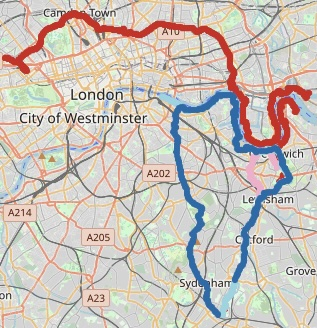

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAT2gAwAEAAAAAQAAAUikBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAFP/AABEIAUgBPQMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP348F/s3Q+C7q9v/wDhL9Zudbkj82fWG+zPqCbgAqJczwTTBSgbcDI20EYxu564fs6eEWsc+O9Y8Qa0rsCwvdVuRbs2OB5KuI2PoAuT29K9UvLzRIP7X067uLeK7M0gCSMoJMkSLD16fLsU9MMD2xXTrp1vBdyPZWqQuuclI1UhfcgDApNXGeGwfA2LwncWniT4Xz3Nne6eUa0069vJ7q32c7o186RxD5qkhkXCdASOTXdeCviHZ/EmbWNOtNMbT76WGGTyMltsUkezzd3H7sbkIP8AEGXHFed+MP2r/wBn3wHqEui6p4ghv9Qto5GmtdNxdyR+XgYbYdobnG3O727V458CPiJ/wig8IeJ/CENzcWaaJ5d5FeRpbGS0u55p1TO5gqojRiPJ6IMcdfIxb+q1I14faaTXfs15r8l5H0eWx+vYaeFqJXpxlKEtrJfZfTlfTs3vbQ+9LqKFrpnRTCCcjpj8M4q3cWN5Lbxtaq00qkKDtJxk9SoGTjPryeM45Hx/4l/aK1SHUZdG8NXmj/aB5pWGzMt5dAxcFMWsNyGIPUeXnp1PA8V+JGt+P/iZ8SPAfwt8a+IdR8O+G/FWl+I7+LzJrjRRqet6ebFbOyfyZbW4cJBNc3K2rfZvPMeWGIyK9Z+R82fpFaaff2lwwt4pYpmPzF1LLIevzjHUk9RgDsBTJ7LVtchlhtI1tp7QrLtB3NA0LbgT8qnHBz22kjvX5YftLaze/B5dL8KeEPE134gj8JReHrbXE+d4ha6/qRtoAb+61gXG94vM8kW0V08bKu87CFB4u+P/AO0V8NNS03x3rXirwn4a8Faj8QfFfgdbxtBMlzpttoB1JormQx3MLTyyR6f5WwcEuCFJAR/Pnh3Rl7Wg0l9pPReq7P8AB9e530pOtajKLcto2V32St18vw7H3l8Rn1G/8Q/DrXZoiZbLxI1nObWPzJ0W6tLy027vnBQTMnVQMc8V75fRQ2fiDSY7qd/MlW6hVJUVVSby0yPkRT8w2jkEjgcCv5o/jh/wVz+JPjP4X/8ACq/CGmaZDNqmnXln4h1NbeWL7VdzSOiz2S+ezW6eUFmCvucTPjOyP975l8Kf+Csv7S3hLxFYv8Vvsfjjw9axrA2mT28FjJ5SKEXy7m3hEiuAqjc4k4HIOa+dzXPcI4KjReqcX/d0knrbvbonY/Ssk8I+IKlGWJlRUFaVot2m7rotlvtNxP6P/wBpnwd4a8bfCfU/BvikmC5ulQaVJBzMmophraSAhlO9XweGUlcqeuDF8DdMvfGHh+88UeP/AD9T8XW1y+kag7232dYZbL5G8kLlEVgRIGTKtuwOhr8cfgl/wWAGs/EDRb79pW3tZLE211bObDSjENKn3ILaeKX7XM0qMhkFyv2dXX5DFnBWvonxN8Q/gnL+0vqX7S/gvUdV8Q2MXw58QeNl0ux1rVre1v8AXdGvLcwD7P8AaSqh03RiLZ5WDjbjAr08G8PjrvmUox2j2ut3+nZee3yub5HmOQU4UcRQlSnO95PZ2t7sWrq2zeuunRH6n/bdU8N3t2GkEr+es5mlwn+uUZ3ZyVfgdB2xkZrxy+gXx18Rda8USXUeoQ+HtOOmwnaqS295OyXN3lfvL+7EACHJI5ZgAq18ieIv26PEfwp1e38R/EvXfCnjXw3aaf4c8SeINX0Wwktv7P03WbqXTpYkX7VcZCyyQ3MEuVfyI5lYHhh4J8Lv2x/2gNF+GfjHTNL8GaB4f8beHdMu/Efiw3VpI9t9v8RXWnnSFEYlBAazuplkbJ8yS2OAuCo1p5VGOEqYfupRXo72+5M+b9v/ALYsX193T0t+q/4B+4HjLRtM8J6VH4om1BLS3hQ3RnlOFi43B2Zj93aTvYnJGe/NfK2vftHaXdajAvwjsLnxXqMySKn2L93Yh2AaON9QlAt878BTGz4G4nHGfN/CHwRg+JXxZ8a+G/2mJLfxxrHgW60r+z7sW8lpZNbatZ+Z5b2DzT24MTKwDKBldvddx+tl0DTdDsJ/C+g20MMXkKkCwggIjLiMA9fkdWAHQKAB0r1qfwq5zz3sj5G134d/FvV7ltI+JI0rRrPxErvcaXojm7W20/5DL5kkqgGUOAcwKoXA2sB0+ivA/wAE/h38NNBXS/D1tPeKE8wXF5K0pkL4ydzMWORzy2OOAK0NQiu7rxv4Vur1/wBxqdvqMc20LEAjwLKqKTlgH6Hk+2K7O1iGhPBpWtsWtosR2t0SBExOSsUx6IQMjPQgenNfL1KNCOJl9bjeinZJ/DF2TXu/DZ33asmraXPp69WrLC0JUn+9cbtq3NJc0o776cq07FiHwpoa2CyLax212372MrLKriPp/ePXgj2GaqpbC7uY9T02/vWt4UWO3Z5POLu3EuzcvCfwjufzFW58a5dXEjlksHyZJx8rTgEYjhHZSOCxxxx2wYtQ1J7KwuNU08optIGaGJF24KjEaDofvYHpV0MrwmJqqdGko0o9Yrl5n0ta3ure/V7aLXzni8RQg1VqOVR9Hryr59elui89maLbXN5pFtcS3zRwncqboYnQIjsBjJU8qPy6dK8f8f6oug/FDwlLO8b3E6TwpKluAds+YhuBwCq/NgZ4zxXs9npF7psNj4c0uVJl+S3VpY97fJGR/A6fwDIzz618u/GGAJ+018NrPWf9bZzz7Y0yUyLHUHGcfdKsUxzjHT0rtxWXUVyQi5atac8tt9r+W6NMvxsuapKXLpCX2Y9Vy9vP0PdNR8MaXq17bWl9HaS/a5/m83T4vm2xSOu7klkOCrDoQenavHfEH7Hn7P3iG3zqng3w2Rv377SO4sZN7L3NuUJBHbOPQZr6M1m4kuE0edZmjkDzn93jeBHGVBywYc7sdKhhvbyKWGWW8lkTzArI2wDDAhfuon8e3viuhZRSUnKnOab/AL8nt63OF4+bSjKMWv8ACl+Vj88PHH7K/wAI/hP8T/AXiLQGudM03W7+Xw9fCxur2CTzLqFpbLypFn3/AOth2EHAPmjI4GPev+GQvgjqfia8s9btbnUILN4cG9vJrqVhcK245uJJEyNvTYTyp4wK7n9upBoH7K2t+MNCWKObTpNFvNOlC75kvIr6AqemP9kd8HFfQ1vNdy3WuPCg+TUEYrGc/wCsTt9OO3HHpXI404YjDcjlvKOspP7Let3b+l2RGFxn1ihXfKklb7KXVLS3Q+QtT/Yn/Z8stIvpdF0fbMu54nU7JQNpITMSKozwox8w7HpXO6P+yd8Of7GRPCOreNYIyzuLq01SWCR1J4izI6RfKePlUH1r6h17Ubw39pbRtGy70edmcpGGGWRJJFICkbAcfQdsV2lj8Pbq6S7ktr+GCWUK32OxIjt5AoxzsOeQcb8DscHAFddXNIrShFz6X2ivm+3929uxE6MKUefETUF+P3L9bI+QdX+B+k+F7O0utL8W+ONN1G2IG+fWVuXdWxvJjlkuEBI44i2ccivH77xN4i8F/ECOf9oa8W80+0c2Wk6tcWxiT7wVftMC/uoWUt8zq2zeQSq9W+93sLa3nn0C3tVso1jIv8Rgyqjg/uVOSWZ1BO7cV296zNY8K+DPiRpz+CfEul/aNDkTYEyS9uxG1mBbK5Ofm42sMAjAwPmcUsTiqlXma9mt0tuZae7LR3W17WukrOzPVo8QYHKp0oO/PNWTW6jLq0tLbaXvZ7rQ5W28WfEHSfETeG4NES8sUYfY7i2voXMyyH72xthZWU5AORg7dxGKp6F8Ub3xJ4lutD8OeEfE1nNZRyym6utPaK28tAC4R93zZGAq/fZgp2gdPnn4d/Aix8KeJtV+Fmp61rdhaadGbuzgsdXubS1khSTadqAvtKuBsSIIOGOcAGvdI/hF4as9ME0mo+IZ8KrtGdf1eP5HZUYHZfDe23BXavQdO1fV4OpSq0FyRslpy9rdO3p5Hl5tg3h8R+8lzcyTT6SjLZ/pqtNUYbfta+Bfh7qGqaZq+jeILi1muJnE1npc00IRsH5SB90HJDfTpXz14t/bbsNa1iOPVLW78P8AgW8id4BJbzSXl6m3iSZYoZRDG2VIUPvfgkquYz0nxx+AXibx6mp2Xwz8aaro0BRVktLu8nmsA+GRGkAP2hQr7W3hnRXA3RtnB3fA/wAfLPw7q1t8HviVos/hbxoY4z9huGgi0+9+UL51ncbwkisVwuwMzEFCMruHV9WjCXM18Vn+XTv/AMA8TAex1hTeq6ehxXiv9sT9nzULnwr408EyZXwXqYMq/Y7iP7Pp+oRvaSfuzDGXjXenyR5OQvGBXtvij9pL4c+E/AttqOiQaprs96ZX0ywsrCZbm4iUb8lJEQQpGNzs0m3CAlQ2MV8v/tQ/FDx/4x8TaJ+zd8MjYyeJv7XsdUuriGQyW2nx2rgw/aS0eEJmKkpy3yhduXUH7m+HPgg+AvBNrY+LtdvdVnljU3d1Idj3c2BzhMk89EXAUYyScsfIzSsqFWlVgruKle7SXL1u+3Ny932R9JgaXtKc6b0TtbS+vkvS/kfPkHxM+IHxCnk0S+1P/hDRHFbG5h0rT59SuLdX5cS3skD2asPnVTGrjrj5uK5Twr8OvB1x53iO3+H3ivx3qNpG9kdQ8XzIfPAJZQ0V/cKEjBOBIlsoXnALZFfecFreWeiLp13a28bsrCQ3E7Ow35PKJyOWPB/GlsrcauVk1zfevbyyxsGIWJWVuGVBgfMNrbj2YZFaU8wrVoL2NF3a+17sV5bXdvJfMzng6dNv2lRW/u6/lovvPE7LS/jL4j0ZNOW/0zw7GAkQttGtvPltEVhhFu53Fv8AdGCRakKMhecMOytfhTbWsJXV9VvpmZyRvvbyds4AJJMoUZwPlQBAegr2S70vV21CO0EaqyZdLcMqqF7FU9B06dq5vxNc6X4caK31bzY5ZS7hY9rfLwBncUwfYZrBQUJKpia2naOi69tX83byRz0sTSnL2OFgm/vf+S+7yP/Q/o/+Lfxp0P4dWOm+DfDOmSa1rupNL9j8PQ4G9oFJdZC3yqFcq2W5dVJ7GvH4/gl4v+JmlWV5+1Rf3kGjyZX/AIRvRr1orFJZc7ILmX5WdNnA2OEV1PzbCMfS/hT4f6V8ONGsNO0hLm+uxHtuGui1xe3UaOHknd8ffY5MjEKpZt33jz3sUcV9F/aIG60ZSsKkAo0Z4bcMkZbGCueAMcfMK87CYiTbw1b+JH5cy/mX6ro/Kx14mjHl9pT+B/h5f5d1+Hj2seCPA/wc+FutzeCdG0/w/Z2Vk8jW+nwIgkaBflM0hXMjZAySN4P8Rq18LtBsdE8R+K9G0tQE0ePSdMg4CgJZwGNkAAACrtHGOgGc8muz1bRbbxBoV34L1lfNstQjMUW9uZYR8zwMRzlQMBv7nPVTXjvgbWDaeN9W8H37PZTa1efaIjMw3+fFwUOMZ3ghoiP9372Qs473alCX2VL/ANtaX4v8j0Mpinh8XTh8bgrLulKMpfco39LnupMvh1Ejny1oFVYbgN/qo2OFSTjKoOER/TAbb1O9418I/DDx74LHhzxNp9pqNnJKrXGm6rZxX9tK6dN8MymP5ezBcj07Vpw2rQ20kU0ZkUqfMjkA+cEYJPbBH6dB3r+d/wDbj/4KY+IdK8QXfwZ/Za1U22nWQaC71xBm4dsbTDaybjiOPoJsCQnAUgLufnzevh8PD2tWTXZLr6F8O8F47iLGLC4HS2spbRivPT7lufuf8d9R/Yz/AGf/AA/pHj34pW/hTw7NpdoLLRJp9OgkljtoyCYLOFInl8obuVgQhN27Ffza/wDBSz9uDRP2ltd0/wCHPwjnQ+CNJmk1JjFa/Y1u9UuS5lnKbYycbz8zRqzO8hPUY+XPhp8Av2r/ANs7xPJq3hqx1TxVcKqrcatqVwfJjjQqgD3VywX5Mj5AxbHReK/X/wCFP/BByeGwsPEHxz8b4kRTJfaVpFt8vU7VS9kbn5Qpf/RvVVJ4avka2Ox+OoypUofu+/kvP9EftmRcN8LcD1ljM3zH2uLhf3Ur8rt/IlKSdtE5SUfJaHw3+xt+wT4R+LOvadD+0Zql94ZtvEGlf2vocUASM3tvG7CX95IDh1QLIsaozNE4kyAMH9Gfib/wTE/Za1v4i6PpFvp9/wCCdEvYGkt5LK6M0kq+ji5805T7397aRyflr9Jvij8G7bT/AIW6X4H+Ds6+Gbm3tPsWkyRgTQwS2sa/ZkYSrL8rbAkmQSU5HzV5n8O/Fdl+0N8NLufW3ksPHfhp2i1G3un8x7HUrVdzKEGUa2m2/I37xWXGCWDATHKpV6VqNNL2dr67uyet1s07KKtre7VkfMf8RNx+Lxv1p4qcadTmUElZQTbitFdNxa1b5nbbc/Aj9qX/AIJwa98HvBl549+GNxda1beH5mt9cs50xdWqfM8V0qhUJt3jA3ZQMhBY/KTs+cfg7+2N8V/hL4Rt/AVleyvpthdR3VhJGVS7sgJPNlhgn2l0gncB5IlIXzFV/wC+H/qgj1STWrzw94hitCk2uwto16knyRzo0YljYMdxLQNjL7SMYyQCBX5Q/wDBQn/gnv8ADHwb8NtS+Mvw2sJNJ1SwJllttOXzNMuIs75G2hV+zsibmGNsZChQgJBrnq0a2DrfWME/dXXpsmr+qt8726H3eWcX4LN8NHJOJoc3tGuV9pXcXta3LJO0o/Ya5vtM9/8A2XPhhD8d/wBnzW/G/hrVLN9Cm06afUI4LKxttPfV3jWS4WXTYIgJJLZcZkvDmbIaNEXbI36n/DzRox4F0TRfEOm2uo6ldabpkGr3ctrCW1L7JGuzzsodwRmZo1JITPy4r+JXwB8evjH8K/Cus+C/ht4jvtC0/X2he/SxlMDy+QHVRvXDqNsjBgpAYcNkAV6f4d/bg/ax8L6aulaX451F4kJIN0Uun5/25ld8egzgdq9PD8VRVTnrJ6rVLbmWmmu1t16W7nj5p4E4qU5/UMRDlUvc5rp8ttpcqs2notNtdNl/Z/4cim1XQI7yVYop5twvLtYQrzm1YqhkcD5ikYIXPQdKxryXyNJ1nXbZiyC1KRPg9UXfvwMD70hXHt0Ffy8eCf8Agr3+1d4J8O2WhRRaNfzWasPttzDcCaUli250huI4CQDt/wBUAQBkE5JzvA3/AAVO/aaj+LsXib4ha0tz4av7121HSYbaNYEtbmTdIIcASgx5zHmQnIAYkZz15fxJhqVCjRqNtqMU9Nmla583ivBbiKVfEVY+zVNcziru8tdlZdVsnb5H9OvjMeGm1vwZYaHdQ3t3BrllG0ULhwLNIWSVyVJ4C7c56V3iGz8QSJbOGTR1fEoVW/0h4jyflA/dKx4A5J9D938n/h7/AMFMv2Z/jb8ZYU1fUb3wtp2n6dLHDNrKxW6yySH96FkE0gjLL8gyRlR05wPs7xh+2P8As2+A/h7/AMLS1Lxbps2kqJI7L7HOlw8k8SqfKhRCxZlDKSB/eBbGcjppVKWMq1ZSmlQvrqveskv/AAH89Ftv83mWQZngI4XCSw0/b8unuvRybdlZWbt221+X0KzXPhi4tvDHiDElkSTYzuV81GP3YZNvtjZnGemOOPy6+PP/AAVN/Zh+GetxeEPCst34tuFaGW9udJRDZxtDJvEayu6CU5RS2wGPBwGJyo/Iv9sP/go/8TP2kjdeCvCSt4d8IG4ZxDGzC7vUH3PtTBiuBjd5afKCeS+FI3f2SP8Agmf46+O1lpPxC+JV0fD3hPUp/IjEf/IRnPlPKpSN12xxssZxI2c5G1WGSPIlndWE/quXO8b6X6Lsr9F08tNkj9Ey7wxy/BYRZpxbU9nf/l3F7vztvJ9o+re6X6UeDP8Agr/+zz4v8QRWHi6G/wDDVrHvkF1cWbXCbtuwKfs80kn3ScERnmun0/8AbG/Zc8eftN+HfHkPjeyGhWUNyrSyiW2aOVrU28W2KYRyZLSHovQdcV+bf7S//BN3wj8MvjLoXw8+Gniud7TWo1MzapErf2Y906Wmn+fNFs3Le3zeSpSEGJQzYfaA3y58Rv2Df2jfhprfiDQ9W061um8NWthfXklrdRlPsup3FzbW0q7yhIeS0f5dodQV3KOcOpm2aR5faU0+V30Xlbo/PsdtLg/gbFxn9Ux0qPPFJqTSS1T+3HfRL4mj+tXUfHWmX19Ztbx3MIgSdWY2N0yfP5YGdwUjODznAA+ldKsbXtkps7pXW4UYdFU4B5V1wx6cEc4GK/jbv/2Zv2rfhT4ruVs/Der2ur6FdRwSyaQftMtrcNFHcR/PZs+3MciMrA4zkA5VgOpXxR/wUE03TBdJqPxCt7K3gEocTakkSQhchs5ACBcEHpj2rtpcU1I3jWw7+X/BPKreDWFqRjLAZrTlHu7fhyyZ/VT+1l46hf4a+FNPURPFeeLvDkOpadlRuiW8ilKAfeKs6AhgMEV7Nb6Dp1/aC81Ayy3F8n2pg0zeSzSqH2rGm08DCnrz7V/IV4R/4KB/tB6F8Prn4f8AirUpfFMY1Gx1WwuNYnkuZrS5spllGGZtzxvtwULfL1XGTmaf/gpR+2vc3EUs3jifyoSm23W3t1h2x4CqVWIZUAAYPavNxGdYKpKEpUueKTtF9JN9fl5PQxwHgjneH9pQpVoRV9JXfvK3RJXVnprbbqj+vvUNR0rTrSC0uLi3sDHhigxGQ6nhtqAvuUqCCVz09KydC1LUpLWH/hF4nE8UZtDdTBY4UKAAsq5JY4IIGAFyARxX5Gfsq/8ABWX4S+OriHwl8Z7K18B6tJIiQ6hCGfTpGc4+ZyrSW4GRgyM6BclpF6V+ysF3oo1aw1nw9qcGo2Wuq3nPbyLNE8zRh4ZFILf6wDqD83412VM0q1cOpU5qNPZxgrOKei1fS9lpFNLVH5xneRYjKMRLC5hhpKrZuLnrCfKr6cuj06cz7NGn4f8AC3lanBH5Mslud0ks7gHzpD1Mh3ZOemMbf1zt3ls1jcztKsVvaiVUTEWxRkdv73uQMce1edr8QBpwfTL27WW4ic+XFG3mTdsboostkZGQFrL1fU9d1O58+8Qndhl+0tswpHRY4w2Mf7TKfUV6WCy72sFCUOWCS/pH5t7CviK7rSlvq3/X/DI43xQ2k2Pxp8LeMII0NtqD3VnJK7hHldoVEZUHhU5Xbn5jySBxXZ+JmFosdhZjfPcOY7eJsfNNwqjb0wCdx3cc/SvLviTa+ItS8M+dp0Mdxqvhm7h1m3i2HbLZsG81QmSxw+dw3f6teOoFdj4U8Z2vjTT4vEnh2WS6t7QIC0+0Twbl4icqqklduQ38Xb0Ho4OUaGJqYe29nFd/dUf01Psc3wlSvlFCtR2gnTb/AJbSco3+T09LdD2HxV4WtPD3h7T7WG2xLZ3VtBa3RYP9p+1H9+JF5Oxstlfy44r5f/aM8b/DD4e/CDXvDnxM0y21+wtpF/sG1nhE8sl9cKyRRW4KlvMWTcEZRuVcnOBXcfFv4w+AvBPgq68TfFnUX061iVY4JEbLyTg7o444wMvIxHy7Rnjn5QSPkP4X6P4g/aC8Saf8cfihamyvLGLf4e0lmMSWqyYJunyF/ftjHooPyj5VI9GF5wtV/rVa/n6Js+Ko4OUKnNUVkrW899Onlb0Oj+Bv7Mdp4M+Hural452W+v8AiVJb7VZYQuyy8/pBFgYIj+VcjlnHB6V9SfD3TrbUPC10niO+WfUbHy7eSMjE0KuA4ZFYfKZc+YMfLjgHBOLkV1NqkaLfNvsoHK25EbKl1cj+JsfKAOQoIUOegySBzVxu0x/D/wAQbbc5u2/sjU/4mYyNiFz05WYBRntKa8hYaOZy+szinShdRX819G/8Onu/+Bdj7B1pYNexp/xJK78krWXrrr227noo06LXdH1G0+2fYdWhC+VK2zZIr/ddQ42lj0IPQ/pT0qLUNQu7rVo4W8m5nMiPsPzLDGkZfAHVvKOAP4cevF3XRo0Fwdbhto7qPTAf9HvF4lhbAdR1AIJyMjufTB57+xPCmq3Ui2Gk2cNyvM1s1nCkyNnpt2gkD1H6UsHjFSqPBYifvfZv1i9vVq1u7tfYyrYWpUpPE0V7r8vhdtdO3XtrY+j7SxW81f7bqVltvLRMLMoOza5YYU+wHPpmvnT4y6HdXniOG20oPcvHEZJckHb5rsQO3GBgDsBQdJ0GCTyTahVi+7tLL6A4UMAvfpimRxaHbaxM15A0qSQQMgZ3Yj74PJOT0/DtXLmGCS9nGT91uz8vdk9Pmjz8hy36rWnWi7tR7W6xX5H/0f6v/Dd94h1yO71+B4IGu/IiQwgyMLaFSIuSBjecyqefvDK1Tkhi8PTliCNPuDhwwLGGbHoB0kx0A+Vx0wK2dUv7C0sSfsUtzdBkZIVzhQnyq21f9Wo6E/dH8OeFrEJtbrdceIis5WMqwdTHDChUKdm4DBxwZD83phfkryMRhqtV88bRlF3i/wALP+61o/vWqQsur1ozmsTFcj0su3R+q0t92xLqVlb6kTb3Uj2UShWiIXE3mLwJO4DIeQvthupUeba54Z034hWrw6x5dtfpK6S3UKZME8B8tAo4yo2BivZf98Gu+t1nmaPQ7mRlBjL21wRtaeNeOv8ACQB83crgjHU+PfFX46/CX9nXSp3+ImqW2myXcTz2EBmjhmV49vmKFZgdrDlSoLDkAHir+u4ephZVK2iWkk+j6r/Lvo10PUw+Cxv1mNPAQc6u8OXr2a7LvfbqeM/tl/GTx14S/Yq8f3ovP7N8ceGILO0mljfEjw3l1DbfaYj/AHikpwy8oSDlTtA/Ar/gnT+yun7SPxhl1jxNAZ/C/hFY73U0UI3nSPu+zwFWzlZGjYv8pGxCvBINenf8FD/21fDX7QkFh4S8CanNqiRkPqF2sDW1oyqA8UMAfZK6q7M0rTRqTKoK5Ubm+3v+CIPw4I8E+O/FGu3b2MOvzWUFrGu6OR47ETb5QWXY0Zeby9yk4ZGU4zz8FVrPG42nTb5ox0X+f5X72P6FqYXF8McDY/GQj7PE1mnZLWPNyQaWidkueUb25b+R+8PgzR4dO0yTSrIxQ2C2NtFaRQWp8mCME+Qqog2hUXbjH3QB6cJqp1N9YubeG5WMQqpMkcgG8x4z5ka4y0u4DGBjjGcc+FWvibxVBO/gi4UW3l3O+UBdrFUHC57x4Ax7Y5xgV6c+ladbt/Zd9MJY5I2EmxMELjPTIYgEAD+VfX4xSoQUKkUr7f8AAt07fofxzSpSnHn5n69/J/f2Ce8XVvh1JqtvOTf2Lw3EecKPNtwJCBz8xC7uevHSvk/44/DDxqfiXN8bf2bZIbbVtWtDZarpl2Slvq1nNGVTcUztuIQx8iTBwMKcplT9keGPBmoW1k+jXTKEgk3jOSzh0PyjkBRlm/lXF+HI9TNvo9xDDbO6hXQmdhuWNyACoibaBtx9K58uS+tSgtpw/wDSGl/7f+B9ZlFWSwau9adTT0krr/0n8T5E+AHj/wCD2tatZ2tp4ntLzxHYo1jcWksgSbT2A2sYk481cKFeRQdqnBweB9y3/hHw14m0q58H+I4PNtNTtpra7SYgROjBgVC45AHHXGDxnFfjP+07+w14j+J/hvw98TfhDbxjxIwaG5Hmx24u9ksgjfcSqrIgUICxXcq/7IFfpD8O/FvijwB4E0PwJ8X7z+1vHNlZW52aePOlu3EeVUccOvCszcMASgI4rTB+ywdCKbtColpbaXLr8nbTz0W6S+pzNYjH42rCC5pQbStp7qlpZaWt18tXs2fize/s4eFPhT4Z+Ln7Muu6BY3viq2jXWvDmqJYRz6hLa2s4WSOOQIJIt0aAlQfmRjhQDz+pnwL174MD4PeE/C/j9o8ab4fsra/spLeW5FzKbf94sqFSuFxsZDw3pg173b/AAd1v4seOY/Gnxu0yPT458rbWEBCu4UR5SaZcyYKR7ggKgspPyd4vjd8EZLa+s/EPgfTNL/0hkttkkXkLaypzHNEY2TDY3Kyn5GU4cFSc+dmVBzh7b2aVOL5knG72X2V0vr37q2h6uDq0vaKjiMTKVXltdStGNtlzNPp2Vr2s76r5D8Y/s1/sLfE23uPAsXwwuDewOLlRoumR2EuxTs3eZC0Umz5ujAoTjjOK/OL4q/8Ee/HXiHxNfa98EUGj6PMT9l0/U542eN0GGTf5pkKbwcEoWUED5iMn93Ph3YWXgjVNW8N6oFk1a/kEz3DLsV4ohgRr90ZiJzsODjkZCnHo+oeIY/C8tzaWzmb7YyTWsaxEecWVQFyBhcPktkg8j1pfUKeKwjxOMtG17qMUmraW2v8j2MJx7mOUYn2OUzc4u38Scpxd7XaV0l5O23Y/k21r/gmh8WNMtPLj1rTU1GGCSSW1u1mgDyKMpHBIsciMZMEKZPJUcZOORzvhr/gmH+2h4k1ex09fCsdpa306wC+kvbaS2TdxuJhkkYqMc7EY9gM8V/VHqHgfR9VWWx1W0/tHV9FvRcWcwjTy0BiikZJFfG+NpS2ECnH4kF03gaOGe08b+E5Y/DR1NQ6tZ4FsrRxMyhklbZlWQKB8ie3evMw2QfvI08RHXlUrJpPzWt1dPTpute32FTxnxvsv3Tgm21eUG0n0tyuLs1qtJbWsfmX+y5/wS++FvwJ1SDxV8Z7u18TeIY7dLiGOZCmn20jFo5FVJOJyvylHdVxnOwEKR+kPiK8stM8QaJrP2gR2Bl/0lz8sStDBNHG27/V4xKF4Oe5xmlHxH8UaH4itL3xXBHr9o0ckMl1oYaSQrME/g/1e7KAgRttx0rf0HxDo3j/AF+81nw0M2Fhm1t1dCH3yDDMysPvFV5XAGCK96tDCwhRweHp8s3JW0ta27b6+7daeh+bZhmWa43ETzPMa3tYpNXTXLrtFJfDrbSy7nzT8Rf2f/2UvixqXifxB8QLjTtU1bxJBFbx6jcS2sl3pUdvFsiGnyMpNv5cm64UjJE7s3TCjs/F/gL4FeOrzxVe+JNdhlbxhoVl4fvgt5CgW3sHu5IpIsYKSh7yQ7s4BVMAY59+s2sNH8MyX+u3dvZ2STzwJLcFYwiLPKqIhbsqqqgA9APpXyV+zpAPinrer/HfVGlePXbi4SxtyW8q30kyK6JgYy928ccjgA7Y44x1D1eNpewtGLUpPRLbXp8vlok30scuExvtacqsoNRj16efRLTTTu0j0/4XaR8NfhfHrN0PF39v6p4gvRqGoahqFxam5uJUhit0Gy1jgiVUihRFSOJRwTyzMT6n4U1RG8DaV4ansLq7uYtPt4Zo2gXaMxhNjNIfu/LjnIIHAAruRqUaaXHYRIVkjkYERyeUAoxwo6D04XFZFrFe32tHfKxf7AM8byy20qlQMdQv2g5/Cu1ZbWVnGpy9Nr/df/I8XEZnSr2UqW2138tkfjl+0z/wSz+DGraD4t+MHhaW60HUraxutTTTbedJraSSFWk2CNIDtL424WQAMRwBxX1h4I/Y0/Zj8a/s7aP4a0DwpEfCuu2tlq6oVCyM7ZcPJcKRdF0aR0DfaPlT5BhMrX3df3emJZvBfxRQN5jbjKVjBTbjBTjhj2Ax2r47/Ys1bRvGH7KHhceIr9jqOmxyWMFkI5J42jspDGmYIgQQxUgs4bvtxXPhsvwmHrcqSk5XTvZvVX2Sslo+iPYxfF2d4qhCNXETjGny8iTkrW0TTvdtaWb1R+Kf7TH/AASp8V+BZ9R8SfADVYvFWl2oeZrFHE11FGoyQkkY2TbcEHKxN0wrckfO37HH7aPjf9lfxO3hTxEbi78I3dzGb/Tj/rLaWEsBLAGxsdC7b0G0OODghSv9dOk3d1rVpFc/u9NsXAk33Q+0TDHZYkwigHj5255+QdK/nM/4LH/ss/8ACr/iVpnx08MxIdM8Tr5OoMiqG/tJdz+ZJ5aJGDOn90cmNj3rw8/ySnhoOvhdF1XS39dP8j9a4E4//t6pHh3iJRqc69yVrO8Veztpe3wyVnpbW5/QpYeKtL13T7a78FQtNo1zDHLbi0AjtfKdQwKyOVV/96PfmtezsNQu4HtrydLKJW4+zp9okHbAeQRgc9cQtg8AivxH/wCCav7bN7efB0fAjXNG1jxP4h0GSOHSIdNjEjPZScIssjuscUcLfJvcqEUoFB+bH6Qatov7ZXjm2guNe1TS/htpc7W7JBp8Q1e+xKMGKWeXZbAk7RiONxg8nA5+tyrHLF4aFXrs/Vf1ofi3E+Q1MmzOtl9X7D0feL1i/use/wA+nx/bIrvQ3+zSWznN6gDtlgA6ktkyE/LkE4jIHQjbXxz8TfiDpPwv8WafpXwjll1P4gs7W1x4Zti1wL0HaTLNzi2jcFHZpCqgHdHtaPn0nVv2XtBiuJdW+JXj3xJqdjex+W9pf6qbCzKn5Sv2eyS2BAHG1QRjjFeD/DGx8GeG7fxR4a+Fuky2v/CQy3en250mLyN0NoXswsTN84dY41uRJjfveTeOc1WN+qzSjWeq2tuvS2vQwyr67Tlz4aOjVndLlaelnf3f8i98GPhDcfGrx7F8UP2g7u28TeItMmZbXw1GrpbaXEmM7IGA81iR8z/MflXeRxj7furiLWGvJ7OFI0srf/TZUbIIA4gRuhZ8csPQ4yo+bz/T7Xxpe2N74l8d2KWlxp9isDSwxL9rn8lNm66uAqK+8AZ8rdkcKgGAE8OeOL/XfCv2hrMWFzpM8ljfWNudyRyKMiQqf+egBGSWJaM8gbQPJjVxmLqQw1aPLCXyc0vspfZTW99WrpJI68fgsNhqVTF4bXkUbq6kqbf2rpLmSasrKydr9D2SDXtI1Xw/FZalbpFbBMRSRZWSNduQq47DGccDI9cGuauNJ0y60fVPBOsB57XVovPjkgPzJMoXJ5+4yuqyDJABwFHQVjQi18OwaZa282UvICblGJCRSIobPzAYPJBA4ryXUfjp8NfBfji4i1a5lvL14GjtLGw8ya+ZiOHWCFHkxwcEqFXjJ4r6mNBUuaVPSFtFa22iVvl9x8RRxcpOLt77eq+V2/uPZNA1OXxH4asPNlBuXlaGYRDYqw2cpSV2H+08eQDxzwBgV1t9NY3tpNLrgWWJPn8xm2mDgtuV/wCHb+XqK+Y/AesftCeNotT074c6JZ+Gra61q/eS71T/AEq9CyNv2izt2CDYzZzJc4GeU4rrvE/wV8BwTf8AF4bu+8bX9vO/y6xOTab4lADQ2UMcVoo54LxyOP7/AFNeEsOqjqTxCUlPS3Tlje3+fz8j1sZmccL7KEbprtvd2v8AJbeiGf8AC/8AwXqNjqX/AAhsN34zn04xJ9o0VFkgd5DjbNM5S3RgAS2JcjHKkkZ0dA0T4x/ErdqrzaX4e8iKGIW8cM2qEZG4hpN9mAwLHICsM8A4GT3+kz6P9ggg8Ony449pWKMBPKjhwQMD7u2TysY4xnFbUWkWuuTSXU8J83je8LmIv7tjgn3xn1qXga1qahJTpxd7S32aXvdlfZq/md1HGUZRlK3LJrdbdOnTbo7eR//S/pD1n9qP4Qfs9ai2i/EjXtO0u7lyG026ulM+1EUrIjOAXhYYH70KQQQhO3A7/RvHPw8+NHhaTXfDeuafq1jclEgXTrlZreNHmRJGPO53jRurKoTqFB+avxg/bi/4Jy/tC/tDfH3xX8Yvg79j1iOQWMQ0ySYwXZkit4Y2WEuogKqNrndKh+Y/Lxk/kj/aP7R/7HPxKufCuojUPCus6fMwudPuMiCbbmPJTmKaM4OyRdykYZG6Gvh58Q1KdS+Io+4nZSXlp6fLTQ/b8B4V5Vm2CjLLMwX1vlUnB2002t8SS25rNH9Ef7en/BSHwP8AAcy+DPhpHDr3itpfMVxIFhsG27lkwuWY8p8pADqeDgA1/OlpWk/tC/tk/Fl4rUah4v8AEt+fOmkbMnlRblUu5+7FEpKjPCjgDsK8z0e5tfHPj+zm+J2tz21tqF1EuoapMr3csUTEK8pXO+QovO0HJxgV/Y98MfgZ8C/gT4A0g/s23mk2Etpbq6XS31u8moLIPn+0TK48/wAzOUb7q8BdqhQvj2lmdaVaTUYK2itd/wDBt1foj7uSwXAGAoYPD0nUxVVNe0cXyJru+kb292PTV9L/AJAfCP8A4Iya9pz2fi39oXxHbx6dbzk3mm6SryyNEMbczkLtUtkPsjYqo465X9ENH+DugfBr422Xw9+HMc+g23jKyludFhhTbFa6lp8JZkRlPyrcwou+N1JZl3ZGCtfetn478Frox1/xLJFpMeSssE8yBo9o+dUTl5d3Usgx044IHmsHxb+GupSrYeE9AvfGTeH7r7fo8lvA6/Zn2NHje67k8sSsqnY2FYDsK+qpUcrw1F04295esvLTfTyR+M5rnvE2c4mNfFXfs3ZJJRpruukbPa7butL2IPBXxGvfHenWNxqgWDxAbQqETCrewLJtLwkYUMpRtyA4HO3AUqPbLTT9WvLmGO4sMDbtmupdyTrHkHCqP4vQjPNfJa6D8SG8QQWSW+n+F7eC+luI45yL14odRxu5w0TJEBkZ2kMeOenon/CtPBviXV9O0HxH4s1bxRdX0+PNinCWEaDBZQqk4dlBCbCV7kY68OCrTxMHSUeaUNHtG3r1vutuiPAz3hnL44j20a6pU568sVzv/t21o2tb7W700R9M6v8AETwR4ZMl74u1O10lsFTFLJmVlH3WWIYkOQey182eH/j18K7PwdptjpMVxq2uQvsis7S3czSfNuXDYVcE4HIZh2Q1TufhD8IfD2kXD6XZxvqunrA8sW9ps7W8mdSGLbcPGX3fLw47YFfSPg3UfCvhXSb5bIQ6Yi3p7JE8sE+JYicD5sJIFUcnC4606FDF/XnCPLBxjp9q6n20js4f8B6E4fDZRgsJ7kalXml1cYK8VtZc2lpdH9x8h6FqPx3uNCtvAupTR+FtOtW+eOOESajslYyF8HJj25xkGMjI4PNfQnhX4feEPC/hq51bQFSy1OKZXgvpWMtzLN94KzkfMsmfuoAD128V3OvXTux+IGk28b6dLCLW5DnHnwl8b2UKdqqeOfn9VGK4/wAJpDl9Dgc3EZ3CxmZGWJ4Rt81U3/3fXPKj2ArnoUYUq7weMne+ke8V9m3a+11a0kl1R6GPzOviaXtsLFU47yUVpLvfq2t7NtW10tY7DxFqGveLPBr6laRmynSVdlvHnzY7uA7grv8AwKXUDCqTtPXkrVi50/wff+Dh4nuJIreC7UOtxePzErrkHzZPmJHoW9Rwa8NvZLTXr4PqF1LL9on8m/gtkUw+VCCEkXfvjm+VWwXV+jH3r37w/wCBfCPhV4vENpNCLGNA0EsxDBd/dXbhR3CoFGe1engMbSxmHlSquzjdPpdbX7K/VfZd10PAxmDlRqxlS2eqt08v8u6s0fOnxDuLrWtJt7/TtLkka0eGGeZGVHaZzlHjJIKj5dxbAy+wL3NdvoWtxeLn+0+JZ7qTUokH2RoCYU+yodjzRAAgsSCGBB9hwdvReLfFDXMkeveEopr3ajW1zdvCY7dlkwqcsOSCfTHTtivO9T0HU72Ww0WJIxcWSPNBJAZSyy2mxijK3ynfycAbSF6CvK9uqlaMqMXP2esmvhmtOV9FdK+uuqtotvQVBwpOM2oqWy2cP5l3s3bTTRnZT+BfEtr4wg0+91bet/bx+VPBGlsZWtTIWRs+aQwR1KlNmQDjAXFFtpvg3wjpWp22p20DX+l6khiZ1DTSQI6TKEJyRuTIIHHPNc7F4p1Pxf4GHxAbU3/4l9ysYjWFFMU0UnlSKh5YHltrOBuUjja1cX4x0r4eeKPiZpHh3SPEaTXcQu5L24XU2jntvKjVo5ZSnyh8/L8xX5c49a9Svia9SVHE06fKlpd2ek7LRRffle60XfQ5qFCnFToVJX0vZX0cU3u0ul1seu+NtU1LVtOk1qx0c2qW+y9M9w/lyMtsyyHbGMsVKpjIwNp9a89b4f8AiC4+JmqC21yfSY9Qht7m7TSn2maQbk3LOfucbt3ByxyQeMUtA8Z+D/Bnhk6b4jg1fU9P0mO4hXWkjkv4GWH5U81reM43x7W3EbfUg5Fbun614ac6XeaLqFlaW58PW4nmm+VS5kUkD5ozvPB+nbpWuLwEoui6tVy99LolqmrK1vzuVgcdOi6iw8FFOL89mn1uunbTS1jxL4gfC+f4Ya9o914ntYbzSLnWrQrq11MzSxRKWLQTpny2BBLBwgyFOewWr+x9r1hcfs56DoCX9lBFpttArt5gG0tDHvVgo3b45FZGGCQRg8ivXPjn8R5PCeg6HomtRaXrwnuMtYXM2yeWby3McQjYSnlDI+Sg2iPg5wK+P/8Ahnn4yWmn6HfaP4ig8F6J4wujeFbLSYp5o5rgboY7iSbLKTGFUtggkfdABrnlhXg669g4pPXXp01tra7Vtfw29ueYf2lg+Sum5xVtLa21uuzUU9ErPor6P7wudXt9TuJZtBA0+0t2RTJLGGleRlByivgKhHIzz6elcd408afCXwrrGl3XizxXaSWbTmCY6hqkVugR4nJxygUK6KDg9cCvmrW/2FPhJ8RrK5b4n614jvjBOka3Qu4YY/MEUb/6nyPs4b5zj9390Ac855WL9mT4f/Cq3caLZ+EfFVnp7N5NrrOk2cVzJtjk4kvFUrz0BaHb5m0khQRXqRyqnP8A3lub8/h+Udl93q2fJTxk9Y0f3a8rX9b76fd5H0b4v/a4/Yx+HGjXerJ4k0SYQAFYNMmS/upQMcR+X5g3HkLuIA4JKivkf9jn44ah4K/ZwsPhp4R8Ea74q1Bo5b6GSG3+x6ZHLcyPIYpby7MS5AwAUWUEqcA19BfA3xl+zR4i+zP8PF8PaDqmqy+WthbR2tnfecflaF4o9rBkcbcDKnqvy4Ne/P438GWovNQ1e9s7UXEyhUeQeYsduDFH+7Uluef4frmsKtLDYaeHpQSirt9I6KLX5yS+ZeDoV61Korym9F1bvzJ2+5P5Kx89W3wu+NnxL1m5T4teKH8M2MpluLDRvC03lA4mLyRy6g6LMxAf7sKxKRyD8prE+MX7BPwN8V/DbxF4WsPD62ur69aM0erX0kt7cw3SjMTiadpJQN4G4BgGXIxgivombxpN4tt57PwHoElxd2zxTJdXZFtGj84IDMd6um9SMrlSQAMVYlsPiDq8pg1TVo9OuC/ltBplucqykjYrynenBBXH8JGAK6qmKjWg6cIOUWrbWX3uy/M7sNhK+CrU8RKtGlODTV3eSas0+WN2redj+Of4VfED4mfsffH+38QT21zp+reHbvyNS09nMDSxKw82BzgjDAfKcMAQrjoK/r08A6548+NPhPR/G17qsGj6H4jsoNRgtNPiL3E0cygo7O+fLbBz+7PGMYFfzkf8FdPBekeBf2orHSdKtPszy+H7Se4Zm3STzNNOPMkbjLlQo6DgAV/QT+ypqOqwfswfDrR7+OWN7fwnpTRmKVVd4Li0jKsoOFwpbnByOnUV8Tk1NUcdPC1JOz00dk2tldW6XsfuXibjqWOyPAZ7h6Ufa1Fu4p+7bondLXZ7pdT1DRPDnw/8M+IkS7tkur9/3T3eoD7bcKxJ+bkbAQem1Qf6fDOu/G3wp4u1HX38JWmp+JxoWvX15fRaZZzSLHECiAidQIwJPKcsFJ4ckEbcHvPijrXifxd43j+C3wuuZhOUEviHWUXY2m2r87IS2f8AS5F+6SCI1Kvg5BH0n4D8B+A/hL4Nbwv4G09bLTkiaMW0eQZXmXywrMxLszHapJycewr7nAUnCMk4KPkv1P50njcViXz4qV308v68vuPNtL/aJ8KXWq2/iQ+HfElwHt0e1D6HdSrE6/xRjy2jBdGB3jONvXBrAt/EPj2z1Hxdb+CdCjkudWuYL0wavcmy+z2LRO8O5ESR2Kq6qUVflyASOo9M+HY+xC48HasJBJorAQpHK8aLDOvG0A4G0h4jxj5MDiqWrWlnZfEPVT4dVI7u+8PwKyN8qs7XsSb92MfdAU8dferxFL/aMNJfz2+9NfgelgqlsJjqfelfb+WUXb06fceURfBPx74tsrO5+KWv31xatGjrp2kb9Os1Qr3dWe5fP/XZFx1WvbvCnww8K+BdI+xeC9LtdKhYKzx28KwhiBjLEcs3qW5Peu6tYfs1pBaQKsotxs+b74GAOCB+BHfPbHPSRR3KSol7bzNDG6B/l8zjOCAIyzcnjoOldNSDqSfO9OnoeJhqXs42Oe+E2r3Hhi61XVwgkX+3tTRkzzgMqH6cqav+LdCi8a6pDJp7SK9xPIQGUctL82373AQA/N6dFzgHlfhPqFprfw4trnUrkPf3VzdyknGWkaZsr7k46DmvR7qae2vIE0lPLaKNhtIViCduT/LqK4cJDnoe7HulfTroXjcNCrU5pL3lt93kcnD4Qk8H3rb3w/zRlQfMBxj+LanHQ42+nIq3c+NNF8OKh1eGKMzfdKO2W29cr5TbeoxzzXX6x4gk1OC3bxEI4Y4sRlxgOWJxgDnJ46DH4CuLu9G1e9nW6s/ItwIxH5M2GcBWYhm4IBOTxxgAVp9YhCcaKV522j0Xn2Xa/wAjooYNqkpaKK/PyP/T/pP1j4Mf8LE1q58R3drdxXN24CxW88KyeUqKiKcuVBLrnIDjBFeO/Ej9kDwD460zTtU1nTU1nS1csn9tXaLJADw5VVtpcngBkUqxxyBivvKDQPEF/sWbUba1VsO32W18wKowAQZTkVxHhnQZ0vruS4t0lvLa9nQvIQxyHIYqp4GZQ5yB19a+UeDhW/hYRes7L8Itt+jUfU+uocRY7DK8MY1bZQ6ejaSS9Ln8nf7cf7KPi/4IeJB4/i0awsPDmr3DwxLo5uZrO1kUAojvcKCjyrl1X7p2tsAUbV9t/wCCV3xm0FfixH8APipp8Ws6HrNvcNpvnSzRNZXcKmY7WhZT5ciK+UIPz7Su3Lbv6QPi34D8H6p4dvrPxRaW+qaHd/6PcWV8m+KRCQfLdf8AbIBRk+aNwGXH3k+YfgZ+yb+zp+zx40Pi34a+D4F8SxxtHbS3M8l0YhllYyea+yKcFV/1aIrA7QADgfNYnLauGxSm4pq+nu+679FHv05N+q01X6pg/Euhi+Hp5bjVN1lFqM1JcyfSUpOzVtPes7rR66PU+JngW20TxILXwd4L8qO7gElpAiS3L3EJyshYGWRojjlcAHHKkEZP1x8FYPCeg/BHRNa8Myi8S3l8y6GMMs1zhJo2Xkr5e5cZ6qit71tWeoaNpkb38l/9qvLoqZZ0KtIzvtwNvLIG4AXHHevCPHFnrvh/xJe+M/BlreJbajFI+sWkW7ypCnWVVgbAaMMWw5CnvjLCvoMBl9TCP63OPqkknFfKy9Utlte2v5tis6WaUFl7lZqzi221JrSz5tVfo777pXXL7r4p1VLrVDZ6oyxvqNnPZE/xeZEfNhbaP7zbQOPatLVt2veE9O1O4kWSO8vdPfZNAZY0keQRuGGQGXczccfUdvIpvHVj4v8ACUGq+GZ7S1+7c4geC0YMh2n9yN9xnORnePp2qeyvL698MXnhbTtUmlit1Z7aKztyUEn+sjLORv2CQDjIxjNeZDOKNDMpeyXNGS02jr/29bT4ndX+KyOKplVWWEjGsuWUHb9Htez2VnbY9G8U6LFoV0bLWL4xW8p2SRRFbSEQXasGKqMN/rIRld5X5unJz47peq6XZXSIsZZzbCGeS3UYd4GYxtu4ABRiCf8AYGeOmfqPizwXN4s/4lNwsiyRhWhurmE3EUnyDJZvNOzcpGdqkM2N2DioNF1vRvE93peo6RfpIEQjfDBLdymVQcbYpASd6sNqr8nTABHHVisfiPawxUFb7Huxb0k1bWahD4rW6K5jQw1HklQk7/a1aWy7R5nt+R6tbXMwH2LXHZrKSbzZLGKT5SeB87gAnIGSo4zzxWjNpGjJpd1ouoFncRCfS52R5yIFJHlhdrEBTkOuMYyccA1x1xp3xVvdMn1zTobq1tIAHBvnXTvMj/iJggErRqnJO7naDheap634C8S6EtpqHiUWisBDFcvFeyTiGSTKsQrW6HYAA2/Octjy8D5jHUakaTruhZr4nOau49U+W6VtGrNKLWhOHnCU1R9pp0UY6Jrbe3p5rQ9C1/xv4c1zS7a91zFlLADBJDA37yR48HavGI4wwBVj8y9FGCSfIJ9P8QeMrl/D3h25uobfZutmtIftJs4nOW8lbhWQMD8gd1ZR1wcAVunTv7EvrbXfFVn9o0q4ZCjMFh2RH5VmMEIckEYGWCDcRkvkiu+vYdY8M2tj42t4p4rTRjFHHbSf6wWEmUbzWfLNM5IZskkF+eQa8/EYbH4nDwx+LaUKdmklq46XlLp/ettpsjrpVcLRqzwuGV5Sut7JO2iWn/bt/M8u8W+CvCnw+/s3W7nwU1xcXxi0ptZ1PUC95G0gPkmaU72w0oVcnCKWXoBiuI8S+G/GngrVbYjS/GFtdXjxRxLZarDc2SytEyMts0m54WOcYGU44TpX2BrdvpPjvwdr2jeObiCLQp4XtpWBHl+W4P7wMT16FMAEEDFcL8LfGJ8ZWuk+INeS5mh0yxgFu20zF7lgA0rtHlWYgAr254r3qiqUp05U6160rRs+Vpx3vZJaJJ7enU8jCPnpS9vQSitXbm30S1vvt8umh8t+FfgxpWv+N7y48RZhu72xSO7himnKxJFJ86kr5LS5VY94GxcJkggV77D4c+FngO20WPwxY/Z40une7jWEfNFOCD8qKI8kcKoGcYz0FMmureb4s3lzrguIYJIZJSNjwzpI4iwdxXcoXnbn5cdK6O80PXgI/E1xeNcWEksSLLnbIrJuWLBj6/OQCep79K5qv16rgoYWFNW5uW62ShKyvFtPRxWzeh1qWGhXdWU/s3t35o9Gl2fZank95BqnhHTprf4UeIdSFtMr7tI1u3Ooae5m++A7Yu4hjOFEzRg9I8cVzPiXSY/Gus2/9quX0xJYXuLW4ETW8iWkYKxMXdHWLzVDCNIJd54IAzn2ua+1G1uIorm6XbKhYGSYRk7dvGVBXJ3DChV/wsaQia/pkV3fiOaK5XLJOgJDNy4BOCpDEjKkHg16tTA4/mhU9vGXK7pcnKr2a3Tfft+Rw08VhopwjTcb6XvfTTZWXY/Of4u/Dfxr4o/aW8D+JvC1n/ZPgTw1ptxbLsPlzRXFwsiXCRwlVmycoBsUhQOGDHFfSELfFXxl8LdZvfF7eQ3hy8gs10yJWhmltrFEcS3RclkkeF1dURlAVSS7E4X2jTNK043/APbHhd30uaVw1kkEjEBMYy+cv857Z4HsRU3if4i6/wCC/wC0fHseizXeo2VoX1XT4PLjF1DFtCynchP7uPd1+XnHTao82nj5V3UeLpuHtI2g1eSsr+V9b31S91LsepRpewqUvq8lJwldp2i76ab+VtHozhdX+DfwQ8S7tOv/AA/aXWkpbx32mi5VSqwbUjZiXz9zapbuPMHvXnk3w/8AgNoMOoD4R+GLGa5eFopZiFtrcbcOVAdt0nKgFVCk9uK5i2tPHuq61p/h7THtJbCCNdV0/SxL+5+yzsJNjyjaSAOGDMGGflGTX13oEvxeQeXF4TtryDiIiPVIoY1RT2jK8fL0BHTpXdSzGpWVmpQS0dotu/Xo7L1V/Q6MRkdHCSvCcKjeqTmopLpe7jzP0dvU+P8AXPg5ofg3RP8AhMvCGkWiNCUmm03SLU2MD25HzlJpF5ZF+bLYLBQu77pHukXgH4XWmmXGkDTrdLVpihdwyuUZFcbLlvmGQ2AEcHjOOaqXuveL7jwHPpl14QKKli9ubmLUoD/q0MTt5RXdhSp49uvSq/hfxgumeH9Jh1LSdbhyYmW5ezPkun2QRK6urc7iFY8cA/SuinUwUJKUk+bvKMr/AHyX5HLVoZrUp+zptcn8tOULf+Awf5lDR/hn4x8EeTcfCjU7jWLGEIkemXTxSSxQMzmQQ3DshcZ24ink2nHEkZ+cdVp3xIOoawI9T07UNN1CUL+7uozBIzq2Iyn2nyGGTuXnuFUM2OO80fxB8ONbS4lsNVtL14CA6yv5T5x82Ek2E7Tn2wKoeL/CnhHUrG81/S7O3W80kNOGhZVISL944by+ilA23jjjHGc+jHEU52cJJryPnquDr0pNVoNeTVrH85f/AAWA03+3/jLo3xL0/U7TUYm07+yriGG7iubm2mtJXb98sTvsDiYBMnqjDjjPuP7Cf7aPxP8Aid8EY/2RNOiZfEuiRkaVrzNuWz0bAjlDrkM0kGVWAL8pyoOxYyW73/gqr8XvA1r8Fra1sbKCPxZ4xujHdJNvaS3t7Nik7RRMxEX72MRBiqkqXwM8r4h/wRC+Gdpq3xj8T/FzVLmSGHQ9PTTYrcQlkuW1Hdvy+Rjy0i5XH8YORjDfDY7DyWbeyw71krtdna/4WT/A/oDCzpYzw5+sZpSssO/3TV7uz5VsuvM6b6W1draft54B+Hng74W+D7TwJ8ObGd9OtCZFuLxzbvcSvyZ3faZnkkPLSLGq4wEIXCj0a0solsk1nVrmOe/tZmiW3QHanHL5xzIVI+YooUHCheatabo95ewixuLlI2tGa2dxklth+U5UZUbSAMY6Z3AcHsNT8Pabp1tF/Z4SJ4n+zpDlX8yP5iWOOm1csiheCNo+8a+1wuKVWjSqPeS27d18nofzxjI+wrOjHvo+lun4WPCvEVrc6d8TNH8QSW/+jaqrWjj7oPmB5I14wMloJj06ucVmeKrJv+Fj6OCNqazpV3pXykq/mWsn2pcYGdxJRVre+LVvdaXoen+KZVkuLfSdQspZEwSgRZNpDL2+VnUez1L8dNQaTwgnxB0KKO11Hw/qdpqanO8BQ3lt+DSNHlT2FZ5nOUaPtYfYal/4C9fwuetkCjUxn1aXw1Yyp/OSsvulYz9P8XzaLALO9he7uIZjEVg2FmWIA7juPHBx15bjkZFet6P8RNPfwvdR6NAGu3SQDzMYSQJ+7UqfRgBg/rXF2mhNBFPJrlrFf6rcgg3Ols5BPON0TqpZeBgxbiePk4rzjxnq/gnwpp0Go3Eslxqk0nl20FhxcTSDHysCPkAyq/Ou7nhDzjtrYqjGnz1Fyq17+fp+Ct/wDycFl+MqV/YUPfk3ZJdl1v6b30t2PQPgd4gsbbTdX8AqiXbfbZZ4hcINtxb3IWZPlUbclXyRjn0zXZapqNxoV7LqenI81zZxuXhDO8UNuTzuLErGAVTAAz8u3jIr5GufGvjnREfxnBb2nhSJrmKKeSOJby7SNS/zyROWCtES2AEiYA8DA+X1qz+EPhDWYLbVvFeoan4wneJZbaS8lZLcxyZziNGLrtIxxKVPpivmXUxcuajhI8vNqpSXL7vkn2b0fLtbTqfVRyvL6EnWxleLaspRh7+q7tWitFa3Nvf0NZvjH8Koo2n1PxVDJqKt3tbjEQ9I9kTIOvUc+/asR/jp8KbEfJq/2rd/zxtpTtx6+ZGvX29PpXp2jaRovhUGHSdPt7FSFC+XAqYIHdlAZvqSTXTWOs6npm77VLIvmYICtjj6ZFelgMHiqEFBygu/uu787uWvzOTG4rLJtunTqX6XnFJf9uqnovJM/9T+uyW/sra0a01COGAyAELcyeXgKAFUKCpB6EEfpXnOheIILXxtfy3d1EkbzebC2GdAzlpWGUBzzMfrtI7V6l8L9K8M3trDo0tjFJPa+fbXDSxrJ+8VjtkVjyNy7WGP4WFcd4p1l4vFkei6ZbzCywYGjtVKSlo/vFccnAOB2/AV81Wx2NhGMnGMb9NZW8t4l4vF4XDT9nyyl56RX5MxPD90sdvBrVxY3t7qbxqrXDoscQJT97GjvtRVz/zzReBWJqPgebWkmg1aJF0/VowjWjB7lkih2mNwY1UqY2UNG64IKgrjArpfGV9cWurR2Udp9oZVGx4UKSlJMHL8Hc5AxnG0HPGeBS0XWPEvgjX4dW1o/aLW9VLWaV3aRlkGXAwPmDcnAK1wOjWx01GrUd4+9FK0VdLpbXa/XyOGXEbowf1ejFJqzv72n5dvslHxXY/FvTdMgvdBdvE+mweRtW3uobK8lZGBBieRTExU4OZZoycfny93rmvavDPpuqfDnxReeYfJP2vUNPG0NwWyL5c7e37s+mDXpHj61nmuhpgf/RZEkvYw42hfMGcHj5du0gccDrWv8OUKWM1rckNhlkyr70xIP4eT0we9cdSlBq0o83+JuX5tmdPPsZupcv8AhSj/AOkpHxm3grxJ8GNZ8NeKr8xaUl3cy2MzM4vktUm4EjjZDGWCMXC7SMqeTjNeyXPwT8G+Ir6303xHfap4rt5ZpYx50zzRI9u2YY4TE8UaIURpNrOy8ngdvoDxv4V0PxX4autE1qHzraQEsOjDHO5T2Ydu34V5D8KPF2reEBL8G/Gc5nn0pU1PRLr/AJ+bGL5niH+0sYdQOcfMv8IruyivGhUdK1oz2t0drW9GtvPQ+uljpZ1glUnK+Iop8396F78y/wAN7NW2s+h2Ol6F8OH0Wz8Fz6RoWhRxRzNsOySSCdiEmAUGMxyE/wAXmMWx3xXSReAPEniqyeXW7mQXNihGmyt+7kkZWJjlZPl8kFQFKbQd2WbOFxe/aD8QRaf8EvGGoWV19j1nT/D2q3Vl5cgW6t50s5drJtOQV9RwOueM18rfCn9p7S/hr/wT78F/Hv4vzXuvT6F8L9L8T6zdb/PmuEj0yKeVpndtzTySjA3HLMclhnFe/jfYyoOnX+GXu/f2/rTfoeZhvaKopU91r936H2npPxE8OXHhtdX1y5htJLeN0urRiqyebHwVVDgnOPlA45x2ri4PD+peJvAMmq6xdf6GbOSW1tISDtWJWMIkkH+sZcKOemMHnOPinw58SvjJq/xl+H3hz9r/AMCaT4St/i6l1HoV14e1h7+Sy1G2tGvxZakktnbJ5klskpE0DyKXjKd1evIPgT/wUE+Pl/8ACT4f/HrVPhZpOnfDHx14j0/wyhXW559UtLjVLw6bHdeU1osDWzXQGYxceYI2D8Z2DwPqmNqv2ONt7O1lZ/E7byS8ul7X9Fb0/b4aC58L8d09Vol2T/Wx+onw00a88Uh/E3iiQXE0dzujt1A8tXVEKSyH+NwhGzOFjH3QD81ReOvGui6vPbeGlWc6aL+KHUrraUg2jrFu4PuemMcV+Ln7Z/7Tvxr8R/softIaZ8EfCVgvw/8ACMXibw1cahJq8tprdxfWVv5N5d21uts8BtrOVwux7lZJFjZlwQoP0v48/a0+Jvi74j/8KB/Z38K6L4oj8NaBos2qS69rE+k2zXGrwme3s7YQWtyzXDxwmVpZQscWVBBJbHXXwuMxuGjh8PbmtZrfZXadtl30vbojClWw+HrOrV+Hp0trbTu+2tkfZni+2+G2p6Nqfhk6ZJvkiuLXzLONtqueAzK5RTjvkHOMYIpPDHxs0t/COm6feqJPIgth+5aOKMmEL/q1JyqkjKgjgcV+aOr/ALSWvftJv8IvDvwO8Lfb7n4oeF9U8RGXWNZuNKXR/wCw5rW2liuWs4ZpHCvM0R8pRvlVeiksvbfAX4a/Dv4y/D7WNf8AiTpdvoOvaF4j1XwxrVh58uq41HR5vId7a9dFuJYZV8uRBIibQ20gYr0MPluEpYb21XF+xe7UacVFdLNtu9vPTTc4a2NxNSsqUcPzpaL3m2/kuXdHt3j3x9K/7UGhXzzG2/tXQryMwMyzKyxtYyBwPlTdtLYIZT/D6kem2nikeJ9F/tDw9LYypNkxy28iNIChx99LgEOjDOMcMMEcV8ZX/wALvC+qftr2Hh7QJpI7bT/CTXEHkQ+QU2G1tiFDEnPDbgqqMYIHJNen+LP2JfB/iTU7XxF4R8QaxoOpQCKHzoHZYvJi6Lt80DCjcFVAqjJ4PSunIcswdXDyc8xlDmcrSUYyj8UraWdk1Z+6um1tnmeMrwrxisLFpRjpdp35VdbrY9p+Ifxa8K/BfwnffEDxdPqCx6eiK8Ulsrk+e6BEiaMg5kO3mQMcDrjNaKaeNPvLqG3VZjqQ3Qtb7bkKD/rflXLjaPmXCKc5yOK+MPjl4V+J83jj4ZfDTSdRfULC4u7rXx9pIzJJoqx/ZlcqBvj3uuQEJw2cnHHu3iL4qeN/BljbXPj7wZJfv5drp7vpDDCTT/vzJs+Tyuh6jA+6eTXmvC5nicLRo4apGpOvJxj9iXLbmXkvcTu7aN7aHXGvg6VepKrBxVJJvqrp29fitZduuqPo7SWi1/FnpQjdIkEZUIzsqINoJR0XYeP4lYV8jfEr9pSf4P6lqfgL4j+B9Rs7OdZorG702WO8iu7W5SRfMdExNHkxpxsfkEFhgZ7Hx98VLqy8Pzajc6LquoLbwSmLzrsXBikZMIRGke5gpwSMqAB1NbfizQ/gD4w/Z7nm0OKy13VtNjt4beRQcRXTSxrJ5SHKpxuJ29MYzXdjKGZ4bCupVwvJTS3Ur2sttItLsk2n5LQyyivl2MxdKnSxHM5SS+HzW92nbvY+TPAf7THi+az8JaJo/wAN/Edzb+Eoghu/7P2PcwqoSUM8skaqsij5jjOe/UV9vTftF/tZ6rbfZtG+Bc/2aSNf3934gtLVlVhwxjRZWXjnr0oiTx3pmnxfDuHXNPtNPj32H2iG1LXZhCbQHjJ8lSV4DfeJy26rcXgLTYrEQXOp61NKB5Lkag8QZY8op27SBwB8vOOnNcGFo4yg3zUd7bu2q003vpbXQ9jH18DirWxMbRulyRb0bvrfltu9Lu3keVape/toeJvDes6d4c8HeHtKtFW6huTdar9p8v7SPNZAPs8QJxMDnODmm/D5v20tF8G6Zpl/e6Hp9la20MVssemT3SeXEgVQPLv4wvy/7CD6V6xL8HfAW+O5vLUXV1KzA/bbqeZgVhkIzsKdCBnPpjpxXl/w28E+DvFvw38O+M5NH09bvV9Nsb248wz+Wv2i3jZtimXoZA20HnPygmvQpyxcny+zgvWT/wDkDyakMtp/8vaj9Kcf/li/rocv40+Hfx/8VxTy6x4/0CxjaM7pLjR7KLjBO3zXu7uT175r551T4bXlhcWNve/EmTU4fOUXC6FYW4eKP+IqJLONSeOP3hHHIr6k+LPij4D/AAY8Ct4z1nT9PtINPhuZla55aSUk+VEA+QxHIVCDkjGDivxs0z/grv8AEO11CW41PSJp7Ursjs7S7WytgM8EqIZW3Dpw4X/Zr0sp4OzLOqdWpCnTgoPlu43ctn7t7K3TUyxnG2V5K6cVUrVLq/Kp8iXTXl5u1+nQ8a/4Ka/BO7+GXxF8P+M1vtR1Cy8TWUnlTatIZLx5LVhuLnagx5csQXaqqMYAGMDvv+CXf7S2k/DbUtX+DHi7W7zRrHXplubOSzgjlKzrGwm37tpwUROAc8EKMtXkf7SP7ZvgP9p7TdPtPHXgq7t7jSnY2txbaqoeNZjH5owbUht6xqBuztxkd8/C+lazN4R8VWvi3wyOLC7W4tlnAkx5bbkWQAANkD5hgA8181xFwLm2RVf7RrU+agrXaeq0Sd+W3LrtbTb0P3Hw/wDELIeLsgXC6q+zxvLLljKKs3FuUOXmupWSXMtJW5rdz+xzwL8SvHtxrlx4WtvsPiSW5ZruCeKYWZu4kTH7tjtjDIB8yFQy8gjg49UTxxd/abW01nwrriSiVzsgthdtt27SUIYKw3MvOMAZweRX5KfsjftG/Cr48fDSTxB8UNZk8GeKPCrRxzXtjDLPG252aC5ZAfkUKvlbtw2sqksoYV9vWHx38dtq2nRw6jo3xFhug0cLaLdKt3sClgrLGOCAoJ8yKQHBAbPTHKfaTpuWHqP2V3a6Wnr136317I/PuJcPTweLeEx2GjHERSUknJX7OFvds1bTlVujey9f+J+sa5qngrWNNl8KatbWs1tOWuZ1S3VFVd2/GTnGAQM5wK4f4jn4lePvAkek6T4dls4Xs01ueY30DiazVTtIQBTjJ3bAScgfLkDGb4z/AGnfE+neV4c1rwvqSRKg/wBGvHhiYZyNuBaZIwMZOM+grxfxR+234Y/Z0+Ctn4n8Yadqk+paYG063tY1jWGeKQN5du0jNuVdo5JjOxVJXJwtGauTwkr4i6vqly/D1tp8/wADDIIV/wC0aKw+X/vPs/xHr0e6S+6y36H074SPxN8U/D7T/Euo+IbHw9o66eMzW1v5tyIrQmAySPLjYzFDzG3JwAuTivnn4u/H/wCBv7N/hvVPi5eazqesXdxEllptxOzSXkty4AkCKfLG3y95DPjYMc7sV/NL8av2j/ip8fH0+38c3mNP0iNo7HT7fetpbh3Z2KozN8xLHLEk4wM4FebXfjvxhqfhK28A3t68+l2swmggcK3lvgrhWxvC4Y/IDtzzjNfJTzfWlKF+aFnd+9dpbWbso+ivovl+80fCmpKMo4islCpJqUIJQtTfTmSblLZO9lvbbX9udK/4Kg/s82ngOHwZeaV4gbMmZ2SztgChTacZu+pPPTHtX3x+wV+118G/jj4fj+H9vqYj1u2QYtLoCG6eOMNtVATtkCp/cLbcHI+YE/iD+z7/AME/5viR4Fbxb8XNYuPB7azsg0FTZtMHlZlIkuB8vlxyLlIgSpdmVgcBVk+YPix8CvjZ+zH4vjufENlfaYtvc/8AEt1mBXihmaM5R4Jl4DYG7aGDr3Ar3sbjs7pU6GNxlG1J6p8ttNn+Hfy7HzOG4F4GzCvicnybGtYqOlubmV12urSs9Hyu61R/blqo8Oam6SaEHSQbiyH0Tpxz6etc9fWtzcyLPIjKWHZW+n9K/kS8Kft4/tharrujaBD4hvddRXgtxprBn+3bSFCSeXtmZn6Eq4Y9c55r+kx/g1+zHrlvDceKtJF9MFGFuTJN5WQMgFmP6elfSZRmFPGwl7CMrRte67n5FxfwViuGJUKOPqwbqc3LaV3aNt7pd13X3H//1f6w/ANvq8OrXNvqkRW9TyNqYHlvHbxhQ4weWJQBj0wF79Ou+K0el/8ACOSXF3A6/amWN5osB1jyPXrnAG3jjvXO2WneINXjTxReO+jtZRPbYgYx3E3OWLk5ESlsFVI6HjjBql4g1HVNLtrie01G7maz2ExXhFwNxIBwT0257V8fh5Yxxi6UG1DSLdk2l8L5Xb9L2vY6M4yyliJq1SMZdVq0n2ur/r26HIW+mDVNHh0/RZ7lbS1XYis65lZ9z/dyoGORjHPQda9F8Oabb6vpNz4f1FPtVoEWQW6BWkySRuySNpGOhJ4HGOlYGmjVWv4NGX+zmaOOWVS/2jy18lkyNmQP484Axwa9Km8N+LLCOXURqFlZMwDE29uSfm/3yPlzg/hWcp4rn9s6Uube+i/VHi/2BPl5XUgo+rf5I4T/AIV/4xsIUj0LXbiFJFH7m4jaTZ32hgDwPoBXmCH4g+G7tv7IubWXfzJ5Ij2t7ncF9e1fS9p4f8cT26SW3iAkMobzHs4yCD0wA9eefEvVPFHw/wBCW4l1KDU9Q1GQW1hYiJ/MupnwFATzNoC5yxxtA49Ae/8AtnFQjz18NddeaMP0lceG4Vq16kadGtHme1udfnDb8jS8PeKL3UY7WDV7ZUklU+YY3GAwJGAPcdOa+YP2jbG/0XwVpi36RxXOnXwli+bbLHDIvRUx90sBuwCuR716t4Q+GvjLxRZahefEDxTqNtcWs0lrJbaK8djANmO6IQwIbg7BXFa5+y/omoxTaf8ACm2eG90+0Fz9pvGMxvJJS6+VuYLEuFUEMIxy6545ryp4etiaE6tCnaL87W8ktdu11sfa8PZXgcszGlVxOKvKLtaMXy6q2snbTXdRfpY9s1jW/D3xt8K6/wDCr4X+Xa6Nq1headeapBEBFCLmF4v3MfybiC3GduQDjA+avj34Wfsq+OvAXwnl/ZK+PfxRs/FXw0bwqfB91pcfhuLSbyexktPsUUi3i3k53pHg7vL6jtivePBPiS/07w5p/hzwtJJprac7WcltdQI0trNu/eCU7ARuPzKwUBh2GML6p4hktLfwrJquuTRanqsrrBbfKCeoHyKPl3KCdp2jLYB7V6ODqYqTTbu5arTRdLL0+/v2Xzeb1Kix08LQhyQhpZ7u3V9NeltOx8zfD/8AZa8e+Hviv4C8Z/Hr4oXPxOj+F8dx/wAItpVro8emOk1zAbNrzUJFuJVuZktmkjRlW2iy7HYWwBS8M/sf+FvC/wCzt8Nf2TLvxhK8XgbxDoWuwXJtE3XMmj6uNUEZiEp2+cR5O/ewUfMF7V9JS6X44vQ0Vha3sFr/ABCJPs8xHTLGcrI7ED1HpzVLwr4On8G6gPEZMEstvG0zLPdFEwQV+bEbIDnpmTOccV6bm6cZTlokui6L7np2SfkziU8ZiKsYwjZNrfQ+LPjX+wx4l17QPjt8IvBXxUufCnw8+JUt7rOsaP8A2JFfXkOoa9Eona0vXnQLbzTbXmgaBm5dY5Yt25fNoP2fPFvxT/aZ1r4gfs3eOW+Hury6XplrqdxLo0Ws216dNieKzu44ZJ7fyLpIZSrE+dAylcqWVq/QDUNZ1X4gS69qdlaeTayraC52TLmOGI9QSBnJXI449DXMfs4W2jeD/tHiTw5ZPqj6hGh32qq/m7toVjg5b5I1X3AGMCscgz2jVwuLxNa/8tKShK3xzu7pW+FRVn9x7mcZbVhUo0aNk/tK8dPdjbS/fm2PjHS/hzon7GnxL+HHh3TLa+1h/A3hDVvB2m2mjxpqN9e22qXFjdy3lzDI8cxuI2tmlnFtDLGPNHK7cV6H8JvFcvwu1fxRpPwd8IeL/Fc/jDxTq3i6S7u9JXRYY/7XZC1qr300W8xFCMqAHPQDFfBvxR+F3xE/ag/4KDS+EdD1SXSrjRLa2vZdSV9k1pFFsmMseCrGXzZRt2/MGO7hVJH7i+H7+XQklupbiQ2N3KUiklIDK4wokO0KuJcHdgKAQOBgCuOlmCiqFetqqiv5QW8Xb5pSenR7HXPCXdSlT05NP8XRr8NF8j88/wBor4p+MNC+KXhT4u6j8OfE9vc6Nexabf24a0lims9Ugjh8vda3EzPMJkt3t1O1WYYJBIr1bR/2qfGGt2clvovw88ePGqk7NS0yCNI9wxnznuYiv4jFfQHxf+HVv8Xfhz468CCQwz30afYX3NG8N/awiS2c7B/BMiE49MVN8LfHMHxw+F2g+PdRWGC21DRre5uI7X93brezRAuBnr5LMQMngjHSsalKnLCupGn+8cppWk4/blu10Su2noaQnONZQcvcSi9Un9mOytvslY+Qvi58Pf2k/wBoGXw3qcmiR/DeHw3L5Wn6sbpLrV5pZkQERR2k3lRRlVZZRLKysCvycVwX7QXw5+I37OPw5vvjR8PviR4n17U9Pmim1W01m6N7Y30Ur7JQIljXy8bvv54QHBXgj9GrTWvEmo6nAhtRfxw20ptZkYWhnXhGl2yZBbaAMDHAz2roYYfDt8z2bxtFMvEsUykGNSvO5cncvOMrjHeqyXMaNZ6yaStGEWuyV7O1m/JSfuq63M8zwlSnD4U73cmu17Wt0S9Frp0Pgr4DfFLQ/j58PoPGnhcotwuI76x8wNLazc8N0+VsZRsDcO2QQPQ002xivRqEcSrMJorjIHWWH7jEdCVHAPXHFYfxM/Y70nRfHd38Xf2Xb618DeJoLH7UIrQf8Sq8hTCyxXNtyqxkorHYvyn5thIUj5l0L9sfwN4J+EfjPxN8V9ONn4u0xmurjRHbyZPNmAFubV2LB7aRmXcVyUUg4YbC31mB4iq1aqwlen7SE5cmy5k7pK8dnFu1nZW0uu3x2L4Tp0qMsfgK3sZwjzdbNWu7S+y0k7p3vayPsvwV4u8SeDtKTQvGl62uWtuf3V1KQlyYxwqO3RiBgF/4jk4Unn2bR/F+g6zqMBgaRYp5cSRSRqZlGCd/7vPBOAQNw5B4Oc/xeeL/AB18YPjdrF/4o8SXuoa3JZRNdTfM8kdrb7wMhR8scaswHACgkV6x8Lv20/jp8I9ItdE8NXsc0FrJu23YeYPGCD5ZUvtVevzIFkwcbsBcfrON4EWI5qkaqjUfZWX4bfKP4Hw2X8X1KVoV1ePQ/s4uv+EbNqk+j6hZu6NvmZnOPMVCGjXA3kSKzqRhmAORyBX5WeOvjn4e+CfwNTR/E+o/ZbjwrBDpcElwsltLdyWKAxCLYdzqysu/YdpyUJA3Z/HLxl/wU3/ae8V6INEsLiw0QFsvLYwMXZMY2fv3mAXv8oByOtfM3hTwR8dv2pPHctr4atbzxPrVxl5HZxgd/meQqiZ7AkZPA5rgyvgdYN/W8yrJQhr2Vl3eiX+R14ri2VaCw2Dptyenn6JLcrfGf4zeMvjl4wbWtfuZ50L4t4GbKqWAXKoPlUttXhR2A5xX7Ufsi/8ABHfQPFfgiDxR+0jJd2evx3Msr6FBcJEptVCeWsrhSQzHcW2OMLjkHOPcf2Hv+CeXgX4I+DrT4k/FOCz8QeK79BKuwrcW9gjcoIWwVLlSCZRkD7qnHJ/Um2sJrq7WxMTmNtql1XkJxwR04/pUcTcaNr6vlkuWK3kl26R8v+BbQ0ybhacm8TmK1e0f8/8ALofip+27/wAE9/2cvg5+y14l+Jvw00BrLWNOFrJF5t5czyJE9xFG7qpfZjaxBDqeDuGMV+I3wdsPBfie+uvh14h0+WbUvEXk2el3scwRbS4JOzdGUbcsknlhmBBRA2M5r+zP9qnxL8M/hd8I9Z8VeNoYP7Fs7J/tcJCurjcAsRjP3vMchAOhzjpX8afhnxVoo/aGtfG/gzSlsNOGui+sdNeQusEAm8yOEvjJ2Lhd2OcV1cGV6uc5XiMLjYupGV1eT3urcu/S1/n0OfMa8srzHB5nlzVKtFppRVrOL0emlunnY8mSbXPAXi0XGlXf2fUtGu90NzaShtk1u/yvHInBwy5VlOOhFf18fA/w74c/aT0b4Z3vxX8OR21/L4Pj1PVHSzWyN3PKY1jYiJEAU4eVNoCruOzbX8xP7FPwk8J/HP8Aaf8ACnwv8crNJpOoS3ElxHA4ieRbW3lnCbiDgOYwrdDtJwQcEf1oapcePfh745uPGEEVzdW1zZQ2iS2jRXMkYR3cxmGTD7GL5AQtt6ZOM1/PHB1CVq1VT5Y7JdL+du2nT7j+yvH7MKfNg8CqSlVUXNysvhfupLybTbV9LLe+nfa3+zH4K0d5Yvh5rmveC4pLaTZHpOqyrbsVUD5bWYyQqw45RVP0PNfhz/wVo1Kz8MfB3wv8M9Y1PVtU1mbVRdpLqNwZj9mtYZVIbGEZw1wMMEwPmVeOW/bDSfjemqarDI2q6VeXkY8pbS+H2SdJGIPEbkNvBAHC1/Pv/wAFnrn4k3Xxi8JHxXBMukjR3a0ldMxtcvPJ56rJjJIRYPl/hBGAM8+7xLOVLLZ6p3svS7Xz2PznwiwyxXFWFUlyKHNL15YOyXTfW3ZHzZ+yV428A/Bv4PeP/iH8S9GttUTVo4tM0dJgpa4uYQWng/vLEVnhMwPyuvQEr8vynq/xc8ca3qFz/YPkaHFe3LXH2TRbdLFAWJKoPJVXZU3EIrM20dK9u8Q6l4Z1b9iPRBp0Bj1HTPES2N0QECZKXc4kOMMWkWVI+/EAHGFFfXH/AASG+Ger3/xxsvipcXEUGlWeo2liqkBpZLszRSBVHBA2ZyR2PSvj8S50HhMNgpuL5ItyXuu89Xro7RT5Vd9HbRpL+jIVsNTpZtneY0eZxqyhGEneNqSjCHLH3lFz5eZ2j18j5k/Zd/at8TeBPEdn4A+I+rTSeD724RpvMUSvZzrIskdwrH5/kkVSwyRtyQpIFfvT8avhN4a+Nnw11D4ceK2UWF7tlhkIX/RLqPOy4jO0kN8xVvVCR3Ofya/4K8/szaB8D/2hB8QfBv2Sz0nxwZrv+zIAVezuotnnjbypjkLiRSuACzJtUKM+/f8ABNj4tfEXx/4En8F6vIlxpvhcx24knRjIYZg5jVJd2D5ZXbsZeEK4bjbX2PDOY1cTOtkGaz5l70ouV272V0nruldXts11SPxnxOySh9QwfiDw0lRceX2kYpR1vZS0suaM/cla/No9o6637Kf/AATp8V/s8/Fe3+LnxUu4tZg01porW30N5GmTzkMXnyK8S7lCuf3cZLZ5Pyjn9gtA8N+CvFOnLq/hq/jvLZ+A4mVCCOxVsEEdxVTwX4h042jeGtWjUzyOGgnYnIUDHljtn0z/AIV0mo/CPwl4v1B9Qu7BDOoCu8cjws3XG4xFdx/3skV1YPAVcsjLD0ZWje9v1/BeXkfmWe8S1OI68czzK0pqKimklypfZt6tv5+iP//W/rNh1G/tdTu1IcRzyBGGMAfuY0yCR1GDg4zio/EWn6heeHNYCvhpLK5G7cNw/dn5vvZz7cfSvO9KsPjwsP8Ab2nal4ZmgvER0AW7WN0YZUrtUMcjtWjrFn8ftTkK3mraBYJIgO2ytJLj5T04nQ8/Q15X9o/y0pfcv8z3JZNGLtPE0183+XLf8DwL9pO88T+L/j58Jv2ZfB+t3/hLS/HsfiXW9a1DSLg2WqT2WgxWwisba5GXt1uJrtHmkh2y+XFtVl3Ejq/Efhe3/Zlu/hV4VsbnxNrkPi/4l21lF/bXirU7+S3LaRqLhTNNLJJNbD7PzbTGSMu+/GUQDmviX8BYvibpnh3UPGXjbW7LxL4I1JZfD2raHaRWWoaTJIBbSeXNKsttLFPbsBLDPGyuuNwBAYbt78ItP1J/CenfGXxv4v8AGt/4H8VR+KbfU9Q/syIi6W0nsYbUrYWsMK2+24dzn975n8e3CVpLGNQj7SPK27JO136Wuv8AJHFLBwvKMKikkt4p8tv+3lF/h6HgXwf/AG4/2lNE+EWi/Ej482nhnUrHVfiJqnhWeTTZpYrnTLIa1qOk2ssymOOL7Nb3cdnbKSQ7QN5jsHBz9Vfs8/EjUfip448aeL9Z0+Oc6F4lm8HaXrgMk4upLCJE1FoYwvlwJFevNbx7Vy/kvk84r5v+LX7O+nfC/wDZ6+Jfwq+EGmeJfiFD8TRrdtp3hh4bCKDRr3xA0920ov3itporX7bL5okllm8kqNg3YFfY/wAB/hOP2cfgz4V+CWkXZ1KXw3pkMc92nD3eou32i7umyMg3Ny0kzf7xzinCnGcuaaWj0XT/AIdCdd0oclF25lr39PTy69T5J+FX7dvxGvh4U+OOpeC9Lh+E/wATPEmn6HYzR38za9bx6pdtpunahcQtCtqY7qdI/Mhik3QpKG3OVYDL/YQufiHH8afjL+0Z8fLbTpdUTxvrPhu0ubW+vbuS0itWto/soSQLBHZoqp5bJErGRmLAbq9F0T9iz4Z+CvFnhe2fxT4gfwR4e1a58QaF4Ou3sho9jqVrI91CBMlqt7LBbzzNLbW0lw6o+zghUUe1/DT4Y+APB11r40f7bJa+LPEupeKZLfUXTa17qpQsCI1TECbf3StlufmbHXjWLjTU8Ph0nVu/dWiV7O8uySkm++y1L9g58tardQstfTSy+63l6H5G/G74jftJ6/4X8UfslfB7xXqWn/FE+P8AX7Sx1g3Mj6j/AMI7aWx8T6a0spJdomF3Zab15iYx8LkV6kP+CjGjSXniz9reyQ6n4H0TwB4UsovDbXDQ6fd+JPHN4sqpcgJIqfZLcWwkcxO8UcsoVSSQfpj4w/B34WfCD4+XH7XNhNev4g1bSLPwpO5nT7PHZ291BK8iRNGG8+byre3MnmbWjiUbRg14j8E/2U/BFj+zt4r0yDQ9Vg8G+PfE174i1ZLS6UX9hL5sE1lcaa6jKR6a1pA1qHDMqIAwK7jWdPHwjJp6Sja6t1fxfJKz+aPRWVVK1OE421vZ6bLSK8m9kvLsdN4L/wCCjvjix+HfxBuPD3hmw8UXvgd9CKXWiSajcaCLDWpniku232r36DTBFJJdW8Ucu6Ly2TYC2zo/iF+0b+074x0/4Ca78K9Y+HniSD4h+M73R7mfTL64vtEurW30q+uY4xm3MkJ3wMZ8FpFkijTO1nC/X3gX4f8AxI8ceEtV8Pab8b/F2tyTixurbxDLZaFG9i8e5vs8dsmlLBIZEb/SfORmX5Nmw5r5z1L9jTwX4R8Fx2ei+NNes/EmleMZ/iH/AMJLb29gb9tdmtHsJ2aL7P8A2f5L2rGHyltQON+4vlj6vs6VVa2l+R4bnKnOUNpLR91/kedftIftr/HDwNa/HXxPoHw+8PX3hX4M3tjputs+qXNvf6rA1lYXUos0WAxRPbi8ABkYhxtXC8muO8SfGzxz8GPht8Y/hr8SvB2laRqHh34T6l410n/hFdZvI0+x26XFtLatcGKCaCeB0Xyri32g5yqoV5+ofjR+zr8J9U8D/FbwF4m1TVZtN+MVzLd67d/uop4bhbHTrD/R8QFFBWyjf542+dmxgbVC/Hb4M/Bnx5o/xH+KHxb1G48NaPqvgHUfAOqTw3EWI9NvZGlla2SSIsbpWk2oDlSxVQhYgHOGPjRpywsU0nO2i91vlUn5X1X3jnheepHEStpHq9Ur8q+W58w+PvF3xH1n9rX4l6t8CfAHh641D4d+BNFvdT1TWtVvrZ71b+CS7S2VYY3HnlbYr58n3VCghs8dZ4g/bb8VXmqfD3wr4ZsfDvhzw38RfCei+INO1PxrcXFlb6lPrCux0y1uba2e3W5tY0j3CVvMkMqeXERk17r8Avhj4e8VaT4s+P3iGw1Sx1T4qabp1nqVlcSRuLGy06C5tbQpsjGJWt7je+/cEbC7Vxzj+K/2RdA+IX7P+j/s46j488UWXwx0rQLLwnd+HY00p49RstLRYVd7iTT2uYZJ1jUSNBKuMZiEbDdXLUw1GVblaSk429UraPppdfLY3p4ioqejvyvy0fl/SPILv9qX4v8AwV8XftOeKfjELO5+GXwbuYfsEGmTSxanIG0eyvbWDeYQjNP56iRpT+7kYhcooNfL3wf/AGz9K8C/Df4p+HIfDeiX4+HXgnVviLpkXh2/vLjSCYHDS6bcvc28TB0mdWR0G2SNmwiBAK/Szxr+y94A8ea18XfHep6jqdz4d+KWkSxeKPCwktP7MupbSwjso7lXMP2uCUW8UQ/dTBQ6K2Mg5+VPht4C8UfHnwV8Uv2eNe+IHirxzo994Sg8M3q642mWlxbQ6qkx/wBHntrCP7Rcxx7f3tyxU7+VJrCrhcIpexrQTVr2t2stvK/4nXTeIlT9vCdlflu2lq0+unbT06H3t4C134m+KfCB8R/EjStI8M+IUvfM07TtMuZbuSygkhjkSK8kmREMxB2yeSDCBgK7AV2V/daf4ptl1eWB7RkJXcjFXtZhwyg4yOf4T8pHv0841PV/ia+vXOrW/gebyIYUtW/4mtsrExbWXJKchQ3THG7rzXOeLPE/xP0mKXxFpXhGfT4RHm7livLbVF2KOGeFUHKf3sjgdcZrkxtTD+0dVQcoPSceSS22ktErx+WnXRHfgsnxU+WPtIKS+FqpT6/ZaUm2n2s9emrIfiPrutya+nw80Zo7nVb22kiVoR5TRx3g583suFHGMcsK/Jb/AILM+DbyDwR8P/E9vYxW9tpzzaXJKWDTnMaGFCVUDaojkONxwW4Ar9pvBGh+GrbwlFcrJHq0Wqqt3PfzDdLdSy8Mcg/Jt5TGRtwR61/P/wD8FmPGfj0fFXw58M7y+uJfDVtpiX9tBKQwF07yI/z4DNsUKFUkhATgDJz9j4aZZXhncK2jjK8ruV2ly2S89Lap9PI+X8RMfQWUzwkLrktHa15XWvTlWj923+S3/wDgk34n+CukaBrPhTxiYdO8ReJb17K3udRtUksr+1EcRaz8x+NwZtxjxltyAZYqB+v9z+yF8ABf+TP4H8HxPA6Y3aeJVOVVtyq8eCDnGG7ggjGK/Pj/AIJqfCH4V/GP9iDVPA/iOBtZt7nxBcTXcMw8o2l8IoFRrchs58kJ864Pzsh+XIr3m51H44/sN30Wi/EYXPjT4cvhbTWNrS6hpNsvRbpAMyRIXC7xwABjHyRV18Uc/wDbGKlRxFSF5WajNq9lbbppta2h5OQ06Ty3CqtQhKy0vBPz3/zPpe2/ZU/ZrhvHvr7wnoQNo8TxtaaTZWe1ZHCbwVibGMMc+i9q9j8P6Xo/h68bVNHdVtrkKLa4uCvmQNuICseAFded4A4wOPmFZvhbxb4U+IPhe38Z+FbuDVNIvrTyvOtn+V0yVGD8210LHKEZ3HBwRXb+GtP+36cmiBYojloTHKceYo5wrfMTtPI4447dPicdgpKaqKUm46rmlKSuu9221+W62PU/tOOGrfvopU5K3uxjG3pZL/g7HhHwtGgeDJL/AOFHhq/lEmjXUzQw+WpFrDd5uYUcMN6xIJPLjHy/InbjHrnh/wARajfams1lCBuiL7du4x4G/jjsQB0xXm+q32keAPjIF8RyWdva+KdPWybUGmXD3mnys9mjJkMWkSa6XKKzHYnGOa1L7TdSsbqO3t9PlvZHXdElyB5Kpn5d6EAPIRyd/wBwYAAOa9nBYiOOivZaNaSXa3R/16aFYlewjzz1hK3LZbprS39abHiH7f2iWfxX/Zl+Iek6ZdRrDBpTX5njAdWfS9lz5UYHBJaLa7DhAccngfyyfs0+FdZ8W/GzQLDSIllWC6jnugxUKtojATE5IyAhOQOcV/Wt8Y/A/if4jfDHVvA2tailgviLS7nSlewjFwQZITHgiNlGRnLIGAPTpxX8mvwIvb74bfHyysdftHiu4pL3SZoJP3bQzXUMtod4I48tnywx2xX7NwBH2eBrYeElpZq3pbTbt02Py7ii0sZh5OLSsl9z7dNz0j/gnN4i8MeFP2z/AATrfjHULfS9NjlvI5rm6lSCKPzrOeNcu5VRlmCjJ5JAFf2CeXGtwgg2sgC5xg/dH9K/ic/aL+AOv/s4+PYvAviC9t797izjvYpIMjEcjOmGBHDAoeASMY57D+lv9gT4o+JNe/ZG8D6pq0dwRBYzWIaFPlMVnLJbJzn+5Eu7tx6cV/OfCqr0a1bLZw9+OvTTZP8ATY/s3xqo4TGYPBcUYWtzUZpU1po0+ecX3XVNNdj6I+IGixav4a1m5u5V8ybUdMtIg6F2LySLkrgHomTwOg4r86v+CwvwkvfEnwN0L4s6Y/lLoWoTJc2caYAiuRGokfA++GwO4AJGcg5/QbUNX1LV5tEt7FGkdvEtvLt64Ty5X49wIjXW/Hjwdf8AxQ+CXin4daMIbTUdV029toWbIUNNA8ByOSAN+SAO30Fe/wAV0pywlWkt0o6eUbPT5I/HvDzOYZdm2DxvMrKbv6Sun6aP5H8bnhvXDffCbxJ4Hvb5baC2mtNatoCF/f3ET/ZSgPDZ8u4MnGeIzx3H2t/wTf8A2hfA/wAD/Gc8XjXURZtd6rpM1ktwD9kBhaXzGd+RF1jBbAG3qQFr4D8W+EPF3ws8YXvgzxrYNp+qWGYbi3nVWK+YnBHVSCjBkdcjBDKehqDxr4RuvBOuDRLmeK6D29tdRzQhhG8V1CkyEb1U8K4B4xkHGRzX5f8AWa0o06+/s7R/Nx/DRdEkl2P7axOV4LFU6+BcvdxF5rlt0UE2tLfyvu+Zn9nP7TH7MvwD/bh0XTdM+MEN3p+r6VcutlNpkwhu4opVBZGMkckLpJsG1tjDj5CPmrzr4ffsf+G/2dPhqnhT4SmV7axuJJ7k3YElzeeZ/ESnlgMAoAIUjC7cdDXG/szfEPyvgP4H07xXfrqkWp6FZz6RrK/vd08cCCaxmCFvmEn7pud0bBeMbSv6A6R4hXVfDcTpKXS4AWKSYFXtn/uOefTHGcevp+i5ViqP1uOKpWVW1mtL9PvVra9rWP4x4mw+aYbDPJsRWlLBpvlSvy3Teq7O97x6O/z/AD9m0bWofEo1zQLoSWl4VW/s7lmKAKu0SQnny3AADJjY+M/K2Wb0GLxl468NxCDRb2+lVySfLdMj0B3MnA6DrwK948R/Cnw3eX6Xt9NPDqKQuwkt2KwlmOP3sR4bOMA9V968vbwJ4iWZ44EWVEICuSE3DAOcZP0/Cvvama4fGUYc9m0l0t6eunp22SPy2hgMRRqKVP4H/l1R/9f+oDTLeH4XeJrLQWm8nwt4gEkunsT5i2dwuHMcbjI8qYY2+/brn0yPWvtQN1odhLeQ8kzyOLdGx02lwS3YbiBXx7Hp/hZLeJP7QkbQLmJXsdRDsyaXdBi8Lx7WZfIkzjPvkc9fpXwP4wvvFtg+tXa+TqFixt9Qhzu2Sp97uf3b/eUjgdBnFfHYKWIq1Hh+b2S3UVZv/DdpxS7Kz02asz7DNsPQnh4ZjS/e9HL4U+zaWt/sy1WqTa95XkvoZ9aYpebbGzuMW8pyJ5QylgBwFVcuPLOOT8oHA46G3vLBdB/4RjR7OFri4geOSB+Yol2YcuG5Kt1z1YYPoKy7+5h01/MWFbn7ZGS9uy78BVx5pAH3AowQeoAI6NnTs410KSGZJxOswWO7llY+W+f9WzE5wAxCr7Nk9Bjrq4dOrKnSk3JfFN291b8qskk32SSW7Wx4bqfu1KpG0fswWzfd+S8/RC6FGun6ZdQTwLLKpNtevI+4u7YKN0JKPGBtU4xyDkik1J5NLhhhtizR3DskUEP+sYY6Q7s7QOQQwKqOQONhoQXn2vWBbeF548vbMs8sgPlHynBjdBwZChZ1zt2/N6c10Npo0Vjdy3gmxJsO+4kJEsgA4CkAhFx6cetdNKq5w9jlySh/P0/7d/nfn8PdvYmVPll7TFvXpHr8/wCVeW9tktzmrnwjbw20finVUGbS9ge4hQM0CW7A7yGJZpCCBuPrn1roLbW4JNQfWbDTG1BpJQ6TysLe3PPOzzD81Yt1calro8263Np87BolCkC5x9w7D92L2H+sxk5X71vxh4Mu9K0lZNHnZtMPDZJ3WJlIEjoACNmOcdiB26+XWoSwNXmhU5YT+N6Od1pe7TVu+nu9LK9lhcxjiacaeIhaor8kdo2vtp1ttrr6nwP4qs/Ef7TP7VMGieL4SfA/gu3s9QuNNVllW8u5l8y2ikPmYWFYzvIlxuZWBU7ht/QQQaq+rXWq2lwmm3Mu3bDE7LHdAck+YpUhtvdQjJ3yCDXw74Mgt/h/+2f4+8MwMJrXxf4d03xFBJE6sqJpTNZeSmDtk3K+8EEYxjFfY0UN1HIdOuYwnmEfKxY4PY7QEII7FXyO1e6ssw8qMYdtVK+t/wCa66vy9NtDGWKqxqOe3S3Sy6W7f1uZcOj6npHiebxJ8LmOiapGP+Jho0zZt7lF5yOVAYjgSjv/AHc5OXc+LrDx/pN34c0S3K6zsayl02bCzQu6kFiOA0aKCxfAxjBCkgV32g6HJ4kdYNYuGufsZlCOqiLDYypJA3LlCGI3beelfKfxXuvAd1rVnBZTw6Z/Y8M93q2qWzF2ihCgRxFi+1izfLtyduQB/EK8uEcbhaqp0VGbbSSvZyb0Vo2sn3s7dbLp7+GlhMxjOOJbjyRvz2uoKKv7z3lHS0V8S0Sb2Ox8Va7bTa1ofhnQ4tiki3Ec+2Y+RbYe5kJVypwNkQbcw3OrV4z4J0PVP2vHTxd41cr8NNI1ad9M03qNbv4G2y3s/UNaQsuyGMEiRgTIABsM+jfGXwfL4Jl+LHiV0e2t9OuBp95bRf6PdYTLIFxmJ1/5aIRjd1x32/2J/H/wl8Ffsh+CdM1bVIRqgtZmihjDmYPNcSOUKxh9vOcE7c8dOtdrVLDVIU8T7tWHNz3XLapOTurPbljCEV5a9TzKuDxk5ONGm5RlZQ5PevCC0lePRuTv2ejSsfY2nDUdL1ZYrBvOTzApK52sAe4H+e1cXf8AjXQ/D/hu1/teVpL2dpPs9jbfPdTEysqqsQ5wfXAGPyLoPH0xt3ufD+gazJOQWt1urTy4Xk/gYs7YKhiM9OmDjrXmfgr+yfAPws03xjHZi78R6uzRofla4uruWZ1VN3VVVcbsHBA55IrDFYpSxEKlGStGEru3nDbu9NF5/I9LAZO40ZfWYXblCKimk3pLd/Zj3dvu3UjT+NfHfiq48HazZQaLpVjsn1O3t5zNOzOMx28ki4UFjyQgG0ZJO5VA5T4ViS1/aV+IPgzVrdbKK/m0m7gIfyhLbzWUdpCVCnJSGe0dT/CM+4r6f8GeAl0fThosVzH9rkla6up3OfPupCCxz1PoPYdM18x/tI28ng3xd4U+MwiW2NpdHw5rTeZHGTpuqSRpE7Ow+VLa8WCUKuOC/QE03g6iw0pXvW0ku/u6qPp0dlbVnNjMyo1MTGhSSjRirWXno5W1fpd7JI+p/wCxNLsVaS3uY7FMO84CgwEqOrL/ABHj+Eg+vQVZsr3XrOD+zLlhFPbxiaAleo77Px4YHdgFfXiXS4E1nQW16SVYxOdybl5M2RvAx93BBAHFcZdXupwSLdadmKaMkY3bS6kEMv5HjoMhc9K9ehVjXgqsHeLtb+vQ+fnTtUlCf2Xb0aPKTpVj8NdfmuI4/L8M6s/mlxjfpN0RjG7BPkSYC4bgDAOdvz/z5f8ABXLRvibaftIW+reL1V9Cm023i0WaLHlmJUDyqcZ+fzHLYyfkZCDtIr+oy01zw3c6OljPZxvZumbx5cANH90htwwF7Mp6dDivyU/4KP8AwXe1/ZY17xTZWSv4as5Yr7TYLqYLcWMzyxRebHvw3lOrlAhJLAjK7gpHs8G46WV5rSiqd6VR8lusOZpXX92/3K/TbLiqlTzjLKkqs/Z4iC5tdqigv/SuVafzWWz31v8Agltq/wAKda/ZcsNA8IQWb6tYzzHW4MZmFzK7bJJOhw8SJtI+XC7RypA/R2HTbFLsyJBLCgQKRHLIBiQkY5J/u9M9hX833/BHJtXH7Tuqf2RdyWjLoE7HYoZG/fwKA4OBt59V9M1/R39vv7CW5uLu0wsKRZkhkj8kgNJj77Iwzk4UIx4IyQAa044yPA0M0rVKsYu/vOTSur679l+R53CWa4utgKUKbaS92yfayVlt/wAE+IPiZ+zL4w+C123xn/YzQ6bqETGW/wDDEv8ApFhf7MMDHDx5ci87QMccIVOQ3q37NX7b/wAPvjn9n0bTbCDRvFTDzTp2pyYTMQOXtzwZgMPkKN67SSoFfSkjalcWb2sqx6dFMm10LNNNg9uNigH6g4r81vjv+yB/wnvx8HhvwZdQaLceI4ptW02LDw2v9rWm0TCJlDyW008IEwkVnDtATIj5TZ8eqccUmqalCnZa7N/KSelvtaPotD6SvCEUo11Gb7bpfNflsfY/7QWgvc/B3xFqutzWrXOlxtr0U0G9p2u9NBnh2sQqxqGQDHYdK6f4e+KNM+IGgaXqF7dSz2F/bpcWQlZki8uRQ6rKqnaSykY3blHQ+o/JF/2vPix4M8Ka/wDsz/tM6Y9prZt30r+2HG/yorrbH51wkW7zEWJ2dJodwlwow2S9fox+yde22mJqn7PVrqkOs6Vo6xXOk3+8Pb3WlXK5iOV+QlCrJ8vdGYdsc/8AYKw/JWwVVqUb76qSdrp2t23S89zf+1ozhJYiC5Gltpy22a9O23Q+pZtCgvL9RNZhHZlQwIWhjkCjC74YyqNjGMsp9O1fyT/8FA/hM/wV/aavL3SZXWDxHGniG0OcOn2qR8+mP3iMwHZSK/rV8VvfeEmabTr0XdsqFklTb56fJuRGOeUIHDDkcdBwf4pviN438QfHL4x3Ov8AjK/Fo+qXwhD3LM0NlAWCIvAJEcKYGAM4HrX614YVp169esvdjCKUovfXa3lpo16b3S/M+O6lL6vQjB83M7xkttNGvXbTp6WPov8AbJ8a+F/ih4H8CfEGCXz9TlsVtRPGjEPFCi+dFM7nPnW9wW/hwyTK2eMt+mv/AARq8YePvEPwf8VeDL6Iz6L4fvoJLCaWZgEN0rtNEg2uAqELIcAANLzy1eL/ABg/4Jx6jo/wJsfh54KkbU9b0m8kvob2Qx28Fy94ESWPblipVYY8biB3BPIH5ffDv4m/Hr9jj4rNf+H5LnQdZsJdl1ZT7vIuFQkbJUBCyRnnBB6coe9flPGlT6nn8s2wsU8PUtbl2eii79pXXNbTptrb+sfDujS4k4Ajw1KsljaP2Z2vG0+aLjbXlcXy31tdrax/X1rk2paX408M+MSqraaXeyy3O2T5F82F442ZmCcKW5OMAE17j/wlWoa7ezXQjCm2QkDchyNyksCpbPPA7dMd6/n30P8A4LTadcfDu+tvGngU/wDCTLFGtsbGdVsZ5Djc8gkUvCEI3Kq+YGPy/LjcfnCy/wCCwf7R3h601DSvBOg+G9Is7t2NuqW1w8lohOQkbNcYwDg/MpAI+UKOK8/GcQYCo41uZtpLS3bp2Ph34I8UYjEJKlGCi7NuSs13ja/5eXSx5d/wVGv/AALqf7YOuXngWa2nTyII7xrVxIgu4QY3XIJAKBVXHYACuZ/azsvBMHwm+D8mhIU1aPw8kF9vdmcxmK3uIuGJwm6eUrgD+70UAfEUjXuoSzX85ed8+ZNIcsfmP3mPuT1PeusaDW/iP4rsPD3hKyuLq5uBBYWFlH++lJACKihVGSzZbAUck18thsXTjhMVTa96py8qS0VpXuvRLlS/veR/Ui4dnRrZVas/Z4SM+Z/zfu+RJ6+fN2XKvI/pp/4JseGdD8WfsE6Toev5eF5dSkjMa5lhmjuJNkie47jIBXI9K+0fAmvapcXV34R8SxiDxLYRK8kc25Ev4Svy3KEBsSAbd4wRIuGwCGKxfAX4V2XwB+Afhr4T6a6QxWMdta3Uo4WSaRTLdSA843ybiATwCB0GK7fxX4c8OeO7eL7dfx2N9ZNmwvbW4Rbm1bPRQXUsuf4Mj/ZKnJr6mlehWhyyipU4Qi4tpc3dfJWs/lsfy7muY4fH4nF+0T9jVq1Jwklfku9Hbs/tLtqtUjZsNdvPMFrrcFzI8yMsbRqJsbSvZCXABYdEPUcVXOtabauYpGk3LwcwyKfyZAf0rj/CHi7VdE8X2nhn4ryQyXDRyrp+p2OGgvGDxsyvjgSAIBjCk5AIyQx9FigsW3BpJDtJX5Ym6j6gfhXu4bNcJUilGdn2e/8AXofIY7J8RhZcslePRr4Wu6/Ly2P/0P32i0MfAr4ly/DOFUPh3Wo5LnRo22yQpxm6sGxhcD/WxR44iZlXiKtpJtc+F/iyw1bwPEZbbUrd0jt5m37oo9xNsR/GVxmBupXCc4xX0L8SvC+ifEr4e3HgjUtM1K0nVhPZXUUaB7a6jwYpjkna8TLkdiCUYFWKnldKtr/4jaLefDjXLb+z/EiXA8y43qIoJrcEwTQNGSdpRDtHyuPmUj5c18XmtanW5Xh78y62ae2y06/grt6H0vDk6mBrVfrVvYS0lHRr/Ho9FH73sulvXPBV1p994fj8S2VwJbW+hWZryQhS2R0b+5sbK7d3BGO1c/bW8WoXyW2oZXS7gSTWMAGI5JIzyr/dOP4kXO3BAHHFeHeFj47+H3iG80bxf4bv9RtZJjNAsSD7HFeM53FCP3O11G8gD5MEbMDNcn4ubx54wvItM1CWS6vb9mOxLrbY6cV5QLGoYSyfwFuFCliTkDdeFwuMx1KNGhStGGrjspW1fO3Za62inJt73tY7cfRwWAxDniMQuWekZKzaT25VH+XrK0UkrRWqPffFfxG8HWTWRsNRjvtUtZCws7HEreVkLIvy/u0Hl/N8zLhkHFcbr3xih1m/fw1omjtfRxEteQ3NxDaNIB0Xl5P3O45Y/wAXC8ZOcPSW1DSPCdx4utoTI9tvju9NsIV857scPBshUZJJwODgEZ6V4B+zb/wnet+J9UsPifo2pwrds9xb3L2koiSVMF4SWHC7du0Z+XGO4r0KuYQo1qNGrVfJUjp7OPwtbL3r77bK1tjya1KFLDYitDDa0XZ+0n8S6tKHLZLffbqe5+I/jd8VEvxBYw28c6xr81nbm6lC/dGZLlorckDPCnPt0qcnxD44jt9N1+8v9REzxNJHctstuSM7oISq9/4XxWppPxz+FWjfG9/hI9qs8Yg/dXSIIWF2cHyG24yPL5yTw3y7c19ReFdf8Cfbl8PX1lDa3jSF1Vl+9IAe5HGAOh5yex6708Xl1W/sMP7SUdG5yb23vFe7ZenkfNYzN80oeznJRoqSUo8kIp2ezUnedvmfkl4n8L6pYftkaXY+GNFt767l8GSTQadHILfzHF2Y8Fy+N21cj/EV9D+Fx8WNJFxa+KtKvvB6KQ0Ua3hvs9ckxSRiML0x87fhXy1+0X4xm+Fv7d2gfE+T93pnhfRRJqwO7cmm3l9LZSOirku0X2kSBAB932xX6b+JvG/gXSNSWzsbw6/PJbRyW8NgfOlnVvmTBAKKrBhg5b5cMoIroy7FYGnllKOKw8G7Jc/vRmrK1k4tLW38t7u571RZlXxc/qVaWrvy/FH5xlpZba6W0Pk7XdS+KN/cyx22nJcadbv5jaxrl+0dsX244trdcsQvAXepIXgcV2+n+G774nwW2geCtGt9UsY51m+23tuYtPE8YIUpFgNO6fws4Ozuo+9S+PfHngT4XQQeO/2idS0+0vWhMttY3GGjtoywASC3Ad5nXILEB9u7nkFhy2l+Iv2jv2lz5mlzX3wr8GBRJJe3CCPxBqMaZ3JAuGSzUANtckuMIyZBIrZ4tyhGeFpRw0YreN/avTdzk246LaO3kbTcKUvZ4mo8TUXTain5U42UrdHpH+60eI/tWeIfGVnotz8DrfVNO1bWNQNxYQ2NrCIzbWuNk9/PHGAiIqEpGzHcWPyA4NfYug/s16J4D8CeEI/BUo0nWdFsbOSJp8tHNJEgb/SEIHzBiRuVenBHpkeHvgj8PPgf4e0G88N6StmLzVraXVtQuXae6upJc7JJ5n3swBOSvCAscAZ5+m7+fULmd/7TVnnT7zBskAdvT0rxcFgo11aq+bRPX4rtXT8raL5M9LG5ricOqVXD8sPijaKShyx05eVJLVtt6dY6Kxxfhnx74O1u5ivL6eLRdatox9rgu50QCdWHybWwQMYKkN/s5zzWd8DvBUF1cXHjwyF9As/tUGg27naI7d3bfJ2AJOVUnkfN02gVB8QLHRfGmzwZewxeddxCa9vGjBktbS3IYtv2ZDMQAq5xjjGCMcv8IfG2u+APAmky+KY5f+EbYSRwTwcy28MzsQ0yDt1YOvQEDngDnxMp/WI06rvGF/eXly7/AIeV7bWHLCVFldaeX3VSrKK5G1pFqWlN2Wr1jFP3uW+90e+lkuLkXAKqYArNGWIJAwOCoPLe3t26/Pn7Wbad4k/Z48bWOuW6XCf2Fqd2iAZZZYYTJG4I5wkiq2Tx78gV7nJqHhXWfs2q+Er4XscsY3XRzJHnaOuAN8mD8ycY/ixwD4t+0jbrY/APx7pwJMtx4f1DzJW5ZwbWQ+mO/AGAvQAV9RSnGpFTR8elL/l5Hll2a1XkeiaB4jjk8FJ4h1G3azi1O5NwGJXYBIiF1J4ABPTB7e9XojqfiD7N/ZNq84lcQLLKfKgQgH+Mg7l4/wCWatk964f9nDUvA0vwE8K+IdTtYbjW7vT7dowsatckPEhzlvuJzyxKrx16CvTr3x7rGpuRGTAYbm2DW8qATRZmTDHGQQwyAykpjI6ivIyudVYeEIR0tv0NMyrVXiZxhDyu/QtP8OAbZt85uNQL7/N2HyojgA+TASVDYAAdyzDrkGvz2/4KaPp3gL9hDxRpV+r2r69NZWsK3LfPLdreW8zY9SY4HYYH3VJ7V+g48b+IjLv85VJ9I1/wr4Z/4KP+F5vi5+yR4rt7yNby50aAava+ZhfIezO+R0IAGfI8xcY5BI+n0XDqxFPMMN9YmuT2kXp5NW+X5HymbYDFToVanMvhem/Tppp8j8y/+CN/hBNfHxC1Wy1CbR9Ts20lbS8hwdvmC63o6EYdG2qCuR27cV+2GjeNn8M+LYtM+M8VtaXrRxDTb63wbCQBnG9uR5blvulwFXnhABj8PP8AgjB8S9K0T4j+KfhZewIZtctra/ikdgFP9nswMeD6ibdkdApz2x/QV5Np4m0q/u9VtYpbLWHMklvc4ES26/6nuNuI/n3KQVZjg8V3eImVupnVWqtH7jV/hdopK68raPo15I97gPOYQymlhq8eamuZXVlOF5Nvlfz2enTS52FkbC3huZ9Xe4SSFUMYL4MhkB4wVPTFfMXx51/WdF8R+BvGXhyUR3Vj4ktcNIAfkv8AFlJnG0HCTnA6fTiussNX1rwLaLo2u2s+peHbVWltrmMbp7O2+YLHKowzKmBkqPkBAPZa8E/aI8YR6pe+ANB8B+Xrl/qutrc21tBMqLLDpyi4Yu5B8tEdIt5K7lBOFY4U/P4fFRn7ktJ9Y/5d15o9vF4CdKPtYe9Se0lt6Ps/J/kcB8YrzxLbfG3xV8ddPgS7HgDTNLs7qwiVVgvdEuPtM2oWzx7ghyj+eu7d88SgDmvJr/RG+Bv7Q+k+If2XdQ03Q7Pxtp9tf2dlcuv9lajMZJI2iR2U/Z2aO4R4ML5WcjHRR+lXwr8F6x4S0TUpPEc8Goa54luUvtSnSLZErqiRRQQhufJiRQq5yzEs5xu21+dngzwhD4M/aR1H4H+L4o7/AELSdNM2iWd2gmjl0WSZ7mSPa5ff5J3w5bqsacYFdXTl27HmRj7vJay6en9dD7Q+FP7RejeL/EF98PvFOmzeGvHWnp5F/ourYaYIF5Nu3+rnt+u1ogF2/NtAZSf5nP8Agoj8KtN+E/7U+vWHhzR30jRtR8q9skxiFxKimUxdBtEu5cDpjHHSv3V/al/ZE8C6J8NLr4ofDHSLW317w1u1KGOKdxHJbW2Wnh8tW+QNHuaMxBJFdVKMvWumh0q+8YfCzQ/HfiXwhafFnwjc2ltfWyanDFcappnmxq5RXnj8q9IGVbhZxj5jIeK9/hrO1lWJ9u4cya5Wlp2+Wn+djxM9yZ4/DRoxdnFprTTt8l6dkfzX/tD/ALU/xV/aZ1Sw1H4hSwxRabEY4bWzDx24YsSZNjO3zkEKT/dUCvKh468TyW2n6f4oZ9Z0zTwY7eyv3keBEyCVj2srxjgZ8tkPbpxX9a/w2+CX7HfjdR4x+HXhDwrG+nzIJLdtJima3uI8LiaN4VuIWHUoyAg8gCvJPjV+yx8NvilpHirwV4p3tb6/4jm8TxTwokdxY3l1DBHIkUhDZjxEF2ngrgYyqkfS4bjnLKtsqq4Dlo2ej5XHlv0jrfdaOzOTLuBM5niHjcvx1sRD3k05Rkn/AItHF9Fa69D+Yma7+E012tyuk6pFGV+eCO+iwHx/C7W5IXPRSCQP4jXaeKPiH8Hbizt9O8FfDy0s1jtvKlnvr+7uZ5JsY84GOWBFP+xtKZ6ADiv3i0H/AIJgfA+0+Gtz/wAIvoUXibX7WaJ7ddY1GW0+2ASRmeDzICkcTtBuEDOhRZCu/wCQk13Hhn9kP9jvwtdmy0/wPa6d4kKtJf6HrF3DrNzaQNgRO4jkuLeLzOSFDlsYPTpyN8F0Ze5lyb2+FW/F/ofUSzbxIxuJjl9bOJwa6qo49Nr01dv1P5m4vFXiGz0R/DshVtOufnFvLErRg8fPHkfIx27S6YYjjOOK/pC/4JkfsxfCP4a/CzQvjtbS2GqeLfEcFxcW2p3biP7HbZWJ4YYHfl0IKyyhcZZkDFMFvkD/AIKi/D0xeH9B8U6Vp1qttD/o/wBoCrFJB5IJECYwXEquX2YxGLdiuNzZ+af2NdG8c/HTTrv4VfDfV4rX4j6LbXEPg97+dYLePT9ZhuLLWI1LdWjS4hv0jA+ZrPHFZ8S5Nluc5dHNsJRVOpRfK+WytG22i6KzTSTir2sceD4h4i4axdbh7MMXKdDEe/q21J663etpNNSje0mldM/p417xR4LtLfUNQvNSj/4klzDE895KkdsXaCC7jaA7jGYXWZE3fd3bgOlc6Pjj4W1jxL4g8HeCfD174m1rw9fJpc9sIbG133D6fa6kskP2y4gaSMQXkW7aNwOfl27SfmPxZ+yPrHgvx5e6vofhrTPEnhXSPHI1Ow8KS3Nqpl0//hE9M0O0nRbvFsbi0ubeQRxTMgMbF1bO0Hq/EX7JkGr+JPHXxEg8PaJZ+I9d+IfgHxJo0/mWzT2ejeH4/D0d3EkyDERjFnfRrGhAkXIA2uBX59HLsN7NwjBWf9b7nqSxNWprzvyt+lv0On8d2/xv+K3hN9NHgvSfD8kQBtHudZ+eGUchvItLWVCMDGPO78GvEvF/7V3xT8DeGvD2tePfFthBe63byyfZdP0G6v3T7PIYTJKf7Qjx5rKWBCKpO4D7tfo1rNzp9jNNqFn+82NNMATn5YgSOndv0r5z+Anww0+w8R+LtPt5pbvUbG7jtC0zL5SWMfmNbLEMcAu88jDnl/wrn5YUsRT9mrRknHbrHZfdzHqUZSxGW1U226coteSleMvx5D//0f6pd4glm0ZNQAtbd/KW+wzbAMbkRjhSVzhXbHGOehPz38fYYfAup6Z8X/BmFg8ISLFfSJGwZ9NuGX7SJB1k8ghLnPAxGygYYivpa1sbYarcWMbraQPDBPAOyhQYjjvgkDJ9ay9f8P6F/Z11pqLDf2kkbxz2so2xXCFcbAMHbvztxjbk/d5zXhZXSdRvEV9aqcovskna0eyej7vS/S3fjaihahS+Cya89Fv5ra3ToedfEnxTq+j+F7/xf4mnSGC1t3eUJ8xSMLukC84A2rz1z0JxgCh8INF1yTwjDr2vbVvWjX7U6AbIRgFyAePvfKu44+Uk9MH5s8R65qn7PdpY/D74kbr/AMNgi20zXIwZClvEj7IbuLlh5SKVE6hkZFBfYQSftPwJYeF9e0i21i1MWoWkoYW8kZWa3EcTuoK4OyQsVZt/qcLgCvsp4iNPAqklZyf4LSy/rX5Hy0KDnjnOW0V+P9dOhyc1xDoviZPFUW2bQNWuPs1x5khKs64EVywJCtG7h0weNmGUcgV7Hpt+dB8STyeWyCVIbsRpgY4MEu0HjO7BHbA9Kt3+g2niWyl0a+QFLyIwseBJh+M/L0I6pxwQK+LfB/jvxr4d8S2l34g1iee3trmXSZLXck14y4b544WXcqJtQcjls8+n57nS9lUpx+y5XXZfZkvSzv6/I/RMJlks3wFaEGlUjDlf97rD5rl5fS3merX37MnwmfUn17R9GkfXBKs4uTd3Xmi88zcWLCYru6nd93OORXc6V4Uvl1F7nVLpb543MkiW370fJ1Mkz/u0xzn7zAdBUUj/ABJ8QRCPTrG10u2GAF1aWS5cqe4t4sRKeR8rLxXh3x18eeAfgv4WGsftB+J7vUrbLG10uALaxXbxgfJHaxH59u4DduQLu+ZhmuzBRVDnhhKK97yUfz1t/wBunzX9hynyLN8dzcv2U3Ufy+z2+0j5U+PC2nxN/bD1vwFbX2myP4o8DS6et4zEWtvM9w1wSrY+YxIjMCOu3I9K4b4A/Hz40/FO61P4S/s/2tlpkLJay3+uXAEg0xZoFS6jjRPlnP2hXa2ySpH3uDuXyKbwX8Zv22dW1X4oaF4aGn+FDbx6dptn9phtET7L5nlHPll5VEjzMyAIpfgyfLXqnwT8Yj4RftR6DofiCzPh7U/Edm2h+IdKmRYYUuoh5tlNbeX+6aGQYt7cLnYow3JVm78Dhowj3tdLsu6Xz0+R14vEf8u6S5Yaer00v022tofd/wAL/wBlX4W/C2/XxSIJPEXiOUiSXXNVb7VevIoIyrPxFgHb8gU7cAk9a+ptZ0+fSra30G7QpJqDASA8/wCjx/PIcduQAPXp7UG3tYdMa9mk8u3BDsR1AGffGfQdya6bTNMnubBtX8SNP52oRnyzt8wW9tB92I5PDHqeOvHWsM0qqfLgo/a+Lyh1+/4V830MKNWGHj9aqbJpR85Pb7t393U8p+JkMmp/DjWEb/Q82zTeagPSNlk4AI6Bew7fhXQax4z0LTfDx8X3mSzxxGKJeGuJbj5kjUnucjtwAeMCr2r6Na61b3fh1CNt9DNbByQoZZEZGIPKgjd9BXh/wtnk8aQ6T4r122SKx8PRx2WnRklhNdRqqPM/ThUCqh9eRyDRi5zhiVCl8U4pLys/0T/Q9rA0aVXAOpXfuUp3fnzJJJf4nFLyV2bXiKHU/DPwy17UdbikXVL+CSW9uEKFEMoESpt3htqK20ALgZ44xj0Gy07UNP0i3sLWFLaKG3hiRpjuwbbbt+VMhgCg6N06iuS+OA3/AA01ayEXljFrC2GBxm4iB6d/WvXdY1aFLF9Nls/MKyPsdm2LvkfCDpwMsM47U6NP2eIdOmrpRivvcrv8EcuYYmpUwNOq1rKpP5JRp2+SvZLojxIaDrWm64da+G7Lb3WoMPO03Z/oUjISrgorAxBd3DR9xgEbhWL4+v7Pxd4A1z4f6t5+n67cWc2nGzuWMY829/coYtpVJYw7gnksFHOetfUFn4V0Wx0BmuJDHeT7WM/8bso44BHAHGPur2wK+GfHHxC1Pxz8YtP8D/D+FLvSvCmq203iDU3UNHFLM6pFYwvg5m3Oss2whUVApO5ttPk5IzqYV8qW6t7vy7fLTuiMHmNPGSVHFxcmmoqWz+b+1Hprquj0sejfDDwF43+Gvw50jwDFb6ddNplrBbNci4eIzeREkYJXyDj7hYDJxuxXbXNj40vEh8+wshJAwaOVL5w64IYAf6KQRlR8rBl9ulfIP7bX7R3jn4Qat4a0D4YJqE93aeb4j1iLTtKuNVebStPKqbJhbwT/AGdr1nKxzybEXyX+YVe+JXxT8bWfxBj8W/BDxPe+J7Ky0q517VNH8i0fSYNN/s2Z7NUmS3W5+0XN2IHjT7QxMPmnaFCV51LE1KUfZ03ovQ96eXUaj55QWvr0+Z9VQWvxJV2F1babMmPlP2h0cH3K24XH/ABWH4003V77wVrGneMdHsbvSrmymiu41uXkJgZCHGwwoG+XOQWHHSvjjwl8TfGemWWq6D8RfiZqs1hB4W8L+JV1e0tNPN891rMl9C9nbxpZtE63D28X2eNYnnLMVVzlMfWHhBfiWP2aIv8AhcT+Z4mOhytqB2xq4lMTHEghAh8wDAk8oCMuDsAXArWOY11rGW3kv8jOWU4X4XTVtt3/AJn8vn7Jz6h8FP23dC8M+JUdLqz1e78PXSQuuVlullsGw3zL8rSdR6cHODX9bEafY1S5uEJSPaTvLSKG4AKq2VBzjbtUc4AFfyEftpaNf/D/APa88ZNZCXTrw6qdTAWUO9vPdhbkhJI8A7Hf5WHYCv6ptO1D4lavdxnStE8NGNViuUuVeWRZUflNrxuWIPUEeg5wef1TxBxtLlwGOab9tCytF9EpbdNJPTy8j8r4Fy2pKWOwXPGPsZdZLzjo9mvdW2mx7FBeRQXtvfwrPFEGZHOTG22bauEBG4fPszlRwOPb5S0jSx4t+MHiX4pfDxk0lNLmh8M6flMwXL71a/klTaBhp3SIlAObYnBJzXZfF74m+PPhx4Zub240Gynu5pIbXTI7G4YmXUHdfJh8mX962+RQDtztXJPAOMvwBqvhz4W/D7QvAN1b6iNQ0prY3Mc9m/m3E4lEk8q9VYyyFnxu5zX5zWxOFkr1vd7XvG3o9PwPv8Nl+OpzvhUp6LSLUk15x1X3rTy0Pc/D3jfT5ta/4RTxvbNo2sMmLRV+aC829DDIM+mDGTkZwDmvmb9rjQJfDVtoP7R3h6BpNU+H939pm8pd0k+mSYjvIcdB+5bflgduw46k1654ntvHnj7Tn0+HTrbQY5ZFZZdQlZrmIowKyJHEv7t8EjawyBUuqeGvG3jbw3P4c8Y65bLa6nbiK6FvZgyFXXEseSVADDK5XGO1Z4bFVk3HklNdHZL5O9vvsdGMy3Dvlqe1hSl9qPM5JeceVS0/u3drdtF6Vp2nfDmXTFl1+/f+yLuEPZCS7SKJ4XGVKZ2GQAEbNxcKMYHHHy7+yje2Pg3T/FnwAv79ItH8MarJL4cmluoo0udNv3aWOJVLkvJA3mA/7wHAFVv2bfDHgz4kfCq60fxfbWrat4eur3R9RCzSZhksJWhRICSOBDsZBjG3AOQMV4b8QfBPiLwj4307VrONdVfww0lzfWMoZk1S0nCxusaR/vGkSNleONdxRkJxyQMq2KxdKrFSgrS0Wt0n0W2lx4LKcurU6tWNeblBXceWK06uOvTs7dPl93/Ef4R/CTXPEUPijxLYNDdWCKiapYyz2N64CcL51u8Uu0EYC79o615NBYRwoNO0UvtHywm8naZwP4fNmfLN/tOee9dX4U0PwN4j8AW3iz4catdXGm3dus0LC5ZrOfauc+Ww+ViQ3y8FGG0gYNZGk3n9n6jDeHT31URtk2kZw0nsPXHXb/FjHevWhOrGhKq4Lniu9/yV/kl00R7vDeGw9OhVqYeblLbVKL200vb8behn2fwr+L+s2Eem2vxBv7KyjM2biGzsoEkjLMcx+Zbyy8jum0KeOwNd98Nvhd4b8CeGYdH09WkTxClxc3s0xL3L3X+t855GJaVmAyxJ/ugYVcVr6p8VvDs0y6Nq893YSag5t5J7+BrZIEx8xz8y/MCFXHy4PUCtXxL4++GUNuml6rrFh5Ue3yUjm8wx+WuFwYeV4A+bjj2r5yhWhLFe0r1+ZQXko8z7JbcqW7vvueJWwmLpU4+yw8lKT0snJ2Xdru+1lpsfJ3x88AX/AIx+FPir4fw20NzfX2l3dvbJLt2faJIWEJyeFwxUg/w+2K/nH/Y+8Z+Fvgf+1b4c8S/F+W40fTdKubq21CQQtJLbGWCWDLRj5sI7jeACwAOATgH+tnw/YeAtb8TT3dzqyajaW9rHdybLlZSBnG0/8tGGxc4PzjjJORX8qf7Ynij4P/HTxPqH7RvwYt5tItr7UmsL7S7tkMyuq/uLldpPyTxJ8w/gkUjLZDH9e4NzvA4iVbIq0v48Xa3X3bNJ97ao+G8ScBjsZGnndCjK2HUI1bq0YuTbjp2bTX3Jn9fGvxaMmg6aunXKSzWv2ePKkYuoYXVjs2nllwSmM9So5YVj3N3a2EiOXUhsGJIhuMufmCxbvvZU568Dk4HNflB/wTn/AGlNC+K3wcj0Hx5rCaXrPhDyLSW6uSZXniIPkPFGi5ZwqbXLZ5AOGzx+gHh/4m+GrPTbq68PafrOslxLI9zDZ+Y8cKsw2O7FQkQXaflG0c8YAA/NsYqmVYmpl+KmuaDtby6fhZr1O3h/AY3G4OGJw1Jum9n081d2WjTR2+qaj4g/s/yLTTy80jLDEizo6hn/ALwIQYAyTjIwPSvkXxu2pa1pWi+OfDcD3ltrlu9z50sShHZm3BoxH8oUxsnv3PavoDUfEfj250K98Vto0WhabDZPtutTv0iFtG4zJIyqFZcrg7iFUKvoTWz8O9G8V+BtOTwbd+ILHR7HTbW1gsYoLJbpfJjTYPnn+c7doXknkVjisbQqxjCz1ejtZXs39q3Q+pwWDq4Scqspw0WseZSdrpfY5vI//9L+rTV7OfTdct7S5HzSwXMIIHBEe2X/ADz2xS6LYXeoalDHZrG5gJuZFlxs8qAZJP0fYal8Q39mnkrYpue0IlWPlpGG3Eu44BXcAeT1xwMnB838a+J5vDmizw6MPtmozw71SLCjbtyiK7AdckZ45JyAPlHm5VRqSxNXCv4pNSXazik/TVO/a6Hi8Ry4KjWraNLlfqm3b7mjmfEGi2fxK+NOlanagi10mR1ggX7mCApb8jJgf7fsK82sfh38HNbLx/D/AE/xFp2pSwxx6nqfhd5bCE3GAW3bZBA7ZPJkhb2zW/4T0bxF4F+GV5/wkshm8Q+IpbuC0gikMzg3cjlIk3AHEMTKpIUAEDjmvqXStB0fw74etPBujkPZWdtAgmi+477VLt/wM/Mf6cV6WdYic8VHA4ep+7oq11r12Xrv91h5Jg6GFwTxeLg5TqN8sdUrL7T772S069rHyFL8Pf2odT8I3N94W8avYwKy29pp+vQRSXEjQjDie5sEtHjU88eXI2P4T1r5s+Ff7WPjf4ceIdc0/Wfh5p0F/bReZeMmtW1slp9kc21y8bXmAQ8hGYzMTyjLmNkJ+5fjJ8d/hj+ztpl5q/xMvUt4rr/TbO2T57i5kHyyJHF1JLL97iMcFiBX496P4e8XftyfE7U/iz8SLKXRPh5Z635zQWiBH3Xn2e2MSyYwWENtF5px8pAwq7wR8/h6cPZLEYhe/Bu7t2dtFpo1qumx7s8TXnV+pYRWpVErRT01s1vfW6167rqfTHiT/gpH47+J2iXVp+zb8PtX1fVIlVZ7h7c3ENm7twStpv8AM3ANt3NGAQDhlBWuV+FX/BPT4q/GbxVa/E79r3WZLee6nE8lmj+beyLziN5VIhtolI3JHACQrFfkIXb+uXgL4e+E/hn4Sj8BeANOt9G0yyAiWNcRJlV5Zmblm/vO5LE8kk1oXWtaZbaddwW1yt5crHIqtbKZgCVIzvXgcV6OLx2HwsG5ySdtFor+h5OGwlSq0oR09NjjvCnhjw34I8N2PiLw/Yx2enQGSJ7ZQVjt7FGCRYXkKIdqtnGdjNnoK5P9pj4L+APjx4Qh0HV7PyPFlsDNpGqWQ/06yuE+aN42BVvKVsGRGIUgZXDAMnrXmale6LDptjALG0jijjWS6wWZWj5KQjltwBGW4bNZugXA8ONNounqI5GRmSVh+8mgJA8sns0ZIG0Yyu1gOteTgZV6mFp0MNoklebVlfryrrr1+H12OzGU6aqynW76RT7bXa2Vum/oeJfAH4haj8QvD8um/EJEg8WeGZzp2q6bGNsUV3COJhwC6XKYlhflMHC7tvH0aNVvZYZIIZ2Pmn94BzjnI/Xr618mfGbwP438OeLf+Ghfgtai716yjW21rRkO1da09eQncfaYBnyXA3EZT5hhT32g/GvwX42+F918VPBEhuo7cNA1rIhW5hvx8v2eeL7yyKxG5f7uSMjDH2I0aOGhOdvNvd/0ui6bI5IqpiqlOild6RiunkdJ4muNV8Qak3w/8Jlop5Ylk1OcAlbO1xyOesko+VQOQD75DvBtmvg7W5vAsSN9ik332l72B8sDBlh99pBIBHTnnNdN4P0Wfwr4dTTbiUPfOBLfyHky3HBYk+x4GPTsTTfG3hqTxBpcF7ojImqadMt7YP8Ad3zRj/VnHAWRflx04Ge4rjdCrb621+87do/y/d+Nulj2o4uhd5dFpUdubvPpP0urJdIX6tlf4zXWm3/wp1bSBbhLpIYGaeNcfMk8bZ2gcnj0+nFbF/DqF1cXF6PKeUSeaIVy/KOG4f0yB1jHFeHaz4/8G+P9Ci8HaROP7U1+e0s5bN0k/wBFDyKZdzkBCI9uBhs4wcV9NX/9labfST2UjSpLvzIOMbxwBgEkY9MVWEr0qlepOg7rlj9/vaeW60OPMMJWweEpYevFxnzVHZ9rU1f0bWnTTQ8J+O3xF8U+Afg5rXi3wpaRXWpJbx22nCOQyM11fTJb2/ytGqsBLNHn5huWuf8ABXw2sPhx8K9I8DaNI1zPa3EErF8m5vb1JkmuHfljvkcEsSSoyMHbivCP21PHsXw+0TwLY6n54jPi7TdSmjt42kkfTbKZXlIUdfLkaBAueSU9Rj2W/wD2lv2f9HgXXpPFOn319qYigs7HSpVv71lfCxosNvvkZnPUhe2OO2mNqzklQoby620jHq/Xol59kzjwfLF+3m9I2su76L07+Wh6aNSt7HxHNrMfhe4TVLy1jiluF+yebLb2ryGNGcT5ZYmlkKrn5d7EAZNfO2p+GP2Ufglcw/EnUvh5o3he4sRF5GoG1020kUwxCKNYnEqsWWKMIqp821QoGMCuv0+f9of4oaC3inSNJTwLoduryW0+otHNrMpZUzi1G+CBcb1dJnZ+B8i11Hg34MeA/hRfT+KNMuL7VdSu5Iv7S1LVJ2ubieBgVUndwgjDLtVAFHHAwK8eq6dKVVTu1Gz0tpHS7fprt0S2PYw2aSrxi6Djrp1+JbJWfVWt/wAA+Mx8S/8Agn7P4HltF+GUb+GmvE1GQL4WBsftcamNJziLy96oSiv1CnA4r3Pw78dv2bZ/hZ/wh/wxv9B0HSp7SWK2tjqOm2EVutxuyTb/AGgSJyxYr5eSe3NfU50lbC3Nu/AJPyk5yD3Ht6e1fJHwt+FPgf4t6Xb/ABy+KOiWWr32vwLPp9veRLcQWOnSfPbRojgp5nl7XkkK79zFQQgCj1Y5ZB9f6+44nnmJf2Y/j/mfi7/wVei+F/ij452vxQ+EmqWGrQX1hBbas+mlpoo7yPd5bPMuYSZIQFUI5I8o7gD1+0/2Kv2uPj/rHwAsr/wx4Ng8RL4NiTR7i4hvhFMtvbKvkyNaLC8jeWjouY8l9pwpbNfYv7Yf7OafHH9nDU/hb4KsbaG/tfKu9JjXEESXFu33QBhRvjLxjPyjdk4xkfih/wAEoPib4o8G/tQR+A9JML2Piuxu7S6juGIRTDC8qyDbzuG0qBgjDHjgY/ScbSeb8LShGzrYVqS32j6NP4bpd7WsfnFCSy3iGLl/CxC5Xta706q29n5XP3s+E2maZ8S9Si+NXibxPD4qvkV4rQ2aGOysCwxIkcLkyCcg7ZHmPmY+XbGMrX0FfXTx6BeqcYjVZFJJ+V0YFcfU8V5D4p+EGka3fL458O38vhXxFBCLafVbDGy58jdFH9pgdTHcLjATevm7QNrL25a51r9pXQrcLqvh3TfE1rGd9vJp102nXMrcbJHtJVnUFeoUz7fwyK/MsbUdbDvCqP7ycfh091PRt+S/G1kff4WkqVVVr+5B797bJev4dT6Nmnt7yX7ZasDFMd6kdBnqP+AngjHBGKfeafJpV9caXIQzQSsCV6EyAS8fhIBXzLpf7T3w20bxKdB+J9teeFp72V7hYdSMVurHarSmG53NZyIW+cf6QH+b7vSvoKfxf4L8VP8A27oN61xbXCqyMBNtZQNg4UeW3C4DDIIHXivWXMpJdLHmtvnslpY+bvh6k/hj9oz4g+FUmMZ1yz0/XLKDy9saTOHspXz0JLRQE+pb617xqvh6y8W6MjCWSynT95pU6Eg2YOGVz/eaUgNJn+EgDnJr588WxW9n+0BHrOnszQS+F74ska7Qtxb3NiYiAQDvO9hxzyfevefF3j/wP4At508RatZWL2cBZY5pVDbYwFBCfeKjjO0His3h4ypulPVM2wtWeHnGpTdpLY+a10zxl8MP7V8U/CjTf7Thld/+Er8Jwld8M2SJLzSzwql8bmgI2OQQhDbTXQ+A/iB4Y+IWip4n8G3LSQq7ROsiGGeCaPh4pY25SRDwR+IJUgmfWPF3iD4nLDH8IvDl3HJbR7LfxFqvmaVHGCAQUQp9puOucGJI2PSQZrC1b4cePfCV7rfjTWde+0a9rMKJbX0tpHHo01xGMRi5ht1E8chx5fnPNIQm3JkWMAY0MRLDLkxHw9JflfTT8vTY+wyXGUo1pfV17s9ZU7bP+5/MvLdLo7XPpGLxdZ6vFbDWYfNa12xujgSRy2xXbIpUjHGAwGCODWy2l6bpMLwpaWttEHiDNawLFld6hceWoJB4GB2PFfJWufGHw78Lvh7Z/Ez4szJ4bTyoGuI3zP5NxKoJhHlqTIVOR8q8gZxivnzV/wDgrl+y7ol0dI0m217U7e1nPk3UVtGoaFMNFxLMj5VwOqjgAY9O7C8OYyri5VsLh3OE1ulpGUbLfzjb05fM8/izGYDL4QprEKH9zm1s/wC7ulfbTv2Os/4Ka+OT+zt8IdBi0zS7ZbjxnNOLm9wovbSOER/uYGGf3jxvt8yRXWPa7csyCv5pbbxfqNjomoeFfD8ENvZasIluUMSzSyeQ5kjxI6loyM4PleWGUAMDX0R+098aPEX7YH7RMut+Fob2e2vZILDRdPlw0kceFUKETIBd8uQM43YycV/Rp+yZ+yj8Ov2efhbpGl6joumXviiGIvfawINt0ZZCWZEn4lWNBhAAVBC5IGSK++wuT5Zw1h6WOxWHjUxk9enu/wCHtbZtK7b7aL8unxPn2d0qmT4fFOGDXxWbSqa6c3V6bQdopJe7zXb+Af8AgjF8BvF+k+NNW+O3iCCey0+Ww+w2KuuEn3yKzyYIz8nlgJwM5ODxX7naLqdtrljpdrcuv2C0t4SVYfLPcqo4x08uI5yDw0nsnPlviT44fD7wVojafa+JdK0s7W2I93brPE204WNZHXI34H95BnaD8oXh7v4+eHbaKbw/8I9Ev/HF7aIYIobJPs1oHjTCmW9nVbdfcKWfJ4Q18DnuJqZvjauNrR5bpKKT2SVu256WUZS8FhvYOV/w/A7v9oHTfDvjKG1+FmsakYJfFUqHyokaV5beydJrpW2n5EeNfKMjHAMoABJAr0zVfDel63HEmouYTbllDKA5YHHH4deg618g/CLWRYeMJtX+M9lLo/jnWo0tkN55YtXgTLLa2EkckiFVOXZNwlc/My4C7fuDQ9F1trT7XFFIIpOFYKSDt9OD0/L+nBLDwVKNGs7rbbtse5SquhZqVraH/9P+gzwtB47+KMb22gf2r4YjtLkRl7iz8iSUDkmGKVT8vqxj+leo+JvEfhj4earD4atLaXWdVl8r7DHEoLebM2wRMf4DvGQMbsdMbs14Frnhz9o74p+Hm8G+F/HegxpAq/bHtdLljODlY1ZzdzBz8pONuBweeK5m6/YbbWdGuoPF+oXWtX90sWXuNTaKzVkYFiLS2tYUIbkYctjjnjnyc4zKdaUVRcY+zvZxWrvutrNaLeVk0j3cgyPD0YqWLhKXPb3ZaRVtnL7St5QvZ6dj3C++NPwv+GfiOTW/F2uW/inxzdpNaRaLoqnUL6z2LuMENvb7ijdQ0kmF684yTR0rQ/2lPi/NLHPf2Xws0JMyIq7b7W2tlfA3Pu+yWy+XgZXzWQjBr1zwL4RuPh3aHT/CXhjRNKtpNrSQadN9khaXAy+xbUjqOOpA4yapfEfw/wDEb4heENU8Jy2+mWq3lpNBbOtzMRDLLGYxKw8oM5XOcB05HXHFY/XKWHpqOHjzN9/zl/wL+RdXB4rE1efEWSWiStay2UVsl9x+aP7PH7DGu+Nvi/rXxZ+M1pJqGi298V0uLWrk3TXgjcbZrmRSvmAKACigBmJyqoAp/VvxJ8ODqHw7v/BmjNaWVt5AW1sdNtgId8OJIVVmO5V3KBhen6VwPgjTfiP4U0nQPhPJf6fZLY6dHbW1z5bXDSi2CxbQpCIv31ONnTPJPTpbrQPitrfhY6xpXi2Vb+4tEkitls4LZfN2AmPzAcjDZXORgj0rkq0nXU5T559LRajHbpHmT+TvfbY6sJTWHq07VadOSaaunJrXS7UXH8rHQ+ELrRfF3hHTPGV8j3st7CjyPcOZVEgyJFVeFCqykDj2r02yizst9yxwzYDJ0jVX4OFXgcE18V3+jeMfCnw/u73w9B4r02Syh86R21GOK1jkLDzSsEQDFTkngj1PAr6f0v4W6H4leaTQ/G3iiVNqyq41JNrLKMqVHll1H1A9qwwOMp0ociw6UrK/S/Tqtdh5/hsPhpe3q4q1OUpKKs5WtZ291tLRq23oGnpu0OzVci4iElu0fUK1sxAA9flwPxqnPqNs+paXeaOr3NhDJ5ctwpDRJcyI8aRg8g4YjJxtHCnmrp+B1nHafZ9a17XJZZ9zzxrf5gckjkqY+T8ozkY9q8y+InhTVrIW3w98N+I9em1G/QJDBc3im1S0jC+ZLIPLBIXsq4B7HI21thMznQoQouHM4JLS2uyX6Hk0o4LH4m2Gr25rvWMlZbu/ZJdT0HxV448L6FqKaf5Zm1OTCpptkPOm3OAVDAfcHH8RGB0BFfKvjr9n74iav4hf46+Eryy8K+K1msWGmLGZdPvfJlVIRqPlsvmOpc4kjG5FyoOMKPpXw74FsPBka/8ACOobi7kUpftK/wC8vuclwRkK6/wr6dcnOberarbvoBm0yO8eAG3mWR4gseFkSTruPA246YrZYv8AecuNvG20bXTXqr81tmtEn02Z2ThSp0+XL1zd5vfTolpyp9N211WqPnaT4n/tX6dJcWUnwkXUJI+FurTXbZLWVu7jz0ilVfQFM44q7eX/AO2zqMNtc+HdD8H6AJVU/ZtSv7q9mUnnaXggijGD6bh9a+rE1Vwkgh0y9SLI2pBEHztG3ONw5z1z0+lZ017rFxOZBBHarKp3G9YfKAeSIk6dM8kCu15tRtaF2+yjL/JJfOyPK+oVetkvVfh/wx+dGqftJ+IvhF8VdT8QfHD4b6jaNo+nv9rv/DX/ABMtPmkuBtjupd/kC3Vkfjed+cFlzXqNt+0b+0R8R1EPwR+HC2UNxAXh1LxTOsCL04ks4PNkC4GFbemQQTxivUvhxp1t4mt9f8W+I43vpdTul3LcEhDbgMkYKIduABjB4AwAMVyHhS6m+CniK3+EupSMvhTU3P8Awjk8jfJbTMdz6azH05e1J5MeYs5Rc8OV1K2JpOrQUYQlJ+bfTbRJ6d5LyPVzuEKNdYetJ1HCMY9Elpe192rtpaLQ+dPj/wDsyXdp4Uk+Kf7QfiG68X+KtXutEtVS2c2enW1q+oQgwW8ERUEBGfrkZJcYkO6vvD4O/A/4X+APEr2HgPQrDRVjTd5lpAiTyRxNyjSAeZIFbacsSfmA7CvF/jdHF4r8d/D/AOHDo08VxfzalcDkBbezj8r6YWa6if0+TpX0m1xcS6st9pObeYS+ZD/FtY8YPTIIJU9OD24x7MaDhSdOL17/ANfpofNVlKUHGNlpZWWiOv8AHniltV0ufSbeIxrII4sOPn82UgBcA8YGQR7VkXarHqHk7RMP9QF/heM/Jg/gccdsdMVg22rwS6vDrBjQWltIG27i53sCDNuIB2BhhDjjknGGr1bwxrKO8sOkWZ+1zSpHE+wPhAcuTnG3A4PXtxXkYKKcqlanD3HFRi+6V7u3Z307pI0rRWAw0aEVrHV27uyt6pL5bdD57+KfiQfCHwNq91ri/vNHtZLqwVz811G/+qgX1l80iMKOpOBwBVL4YeCdX8A/C3w54P1dds2j6VZ2ch6KzQRJGduevI/Kua8aanqXxb+L1v4J12cpoHgTZqOpGWTyy+oup+x2+75TuiH+kyAA/MIPlx09Vhks7a4tP+EajubSK5cwTzvFujkLDKbfOz8+Q3zYGB06YPN9dllkY4Z2mlsub31FuyVtmltduKt6Hr08N9dXtmuSVtdPdut9fPsk9fIsC3l8rz2ASP8AvuQqfmcCv48PAnifXP2Pf2rodXlT7VL4O1ma2uFxt+0Wys0MuzOcebCW2NzjIIr+xSZbG5lhnujNdSKNhkvZPP2/7q4CgY7Yr87f2z/+Cd2kftSaBrvxB+GaRWnjzSJFePGEj1G3FtGywOOAspbIjc8DhW+Xlf0jg3PvqlWrRzKChQqpR3vbor6JJataXto9tvheL8vU6FLEYWTdSk77WXTb7l2Ptvwf4z8NeN9CsfH3h3UINV0zUEW7gktBmBJCihCeN3yoMHdt2uPmFHibWZYlNooYCUZZmBHmA+mf4PU/xdPu/e/k6+Gnxk/aX/Ye8cXmjW9tc6HcSsv2/R9WtmWKcJ93cjBWHs8ZU44zjiv6Dv2PP24/h5+2lYXngHV9KbQPFOlWwvNgYSRyoTtkeJgASFYruRgD8wwWwSObP+C8RlOHlicE/aUXZud7ytorv/gaW2SM8PxfHMEqU1yVduW1l/27/wAHX1Psjwb4T8IfFzRtR+GvjSI77u3lFpeRYW5tXZSN8L4+VlzkHpwBgjIr5Y+HvwY+GXjrRJtL8b6Bp8XiDw1dzabqQs0MEYvbeV0eVfJ8pwJwizqA4AWQcV9O+FdLv/D+tpq+8K1s+Y9vO7Hf6e1ebfFJ9b8BfFXWfi34F0+W90nWIYJtdsYV8ydXiLRrdwJnDyLGux4hzIiKVBKbW+dwSqKCU1/X9fke7hVNR94+ZH+A/wAPZP2mrjw1eaP9q8O6N4agu7gSzXEqNNc3gVT+9mkI2RRTgKG28HjNfZXhj4U/DTwJqRm8G+HdN0iaBdjPZ2kcDlnHQsignCdc9d49K8P/AGdb3w58RvE/xD+LWjtLc6XrupR6TbF2zHNZadbrG0kZ/uyzSztn1OetfTFpqmmRKbO/vI1uo5p45jI43lkldAzAdMoqnpwOBwK7LnStjG0/xje6n8a7r4M2unRusHhi015LlC5maa4vp7UxkZ27AsSkcZzXj9t+2L8Cr/xfP8OIJ9RuN91eaZa3EVvbTW2o3OnXSWt9FCv2jzlW2Ys7PPDFHJFDI8JkVa+lta+B8njL4mad8dfh/wDEDVfDuotosGhT/wBl29hd2t1b2s8lwu4XdtOUYPIwOwr6YzXwf+1X8P8A4M/sO/Cvx94w0nXJraHxpY+IrbR9Iay07zItR14StKIrxbUXxjjlnaRUab5F+TdsVECwPLjMRTwyV3JpWt/Wx51TNKVOEptpOKuvl9x+Iv7bf7YV38edUufhpoNpbJ4a0jUjLaXQ3m4naFXi3k7ggRgxIXZnpzWd+yN+xzZ/tGPqi+ILnVdKGkW813cPBb2jRRQx25uIjKJbuK5VZwrKksdrLFnHzdQOS/YatvhjP8dLRvizp/2zSgqRi4dxHDYTTyxxR3UrN+7CRM4P7z5M4zxX9N13+z34P8XeIvBnjrxZrutX8HhDTf7P0mGWCwjuAv8AZ7aZMXvUthdPFLueV4TLsacAn5AIx+m8T8QxyjkyXLlyT5ea/ls7eequ9LdD5bJctq5zWnneZy59bW8+l1typKyW1lY/N79ib9lT9l2fw3onj270HxtF4tvfA9p4ut4b8parfW00cYnm0trSeN1HmuIxHePC4SRSRtbNfUvhPUf2Jr3SYI7D4b6l4l8R6xr154Yt9Ilt7LUr6HVLC0XUJkeee9ls9rWhEqyrcmPB27g/y133xL/Zn+E7eFfD/wAO/E17rNnodj4Ts/B1rf5tpFht7a5sbyKW4SWF4pBLLYRrLGymF42kRlwa7z4VfAP4L/CrX7Lxhp/iK51G/sfEl74pLzzafawveX2lRaTJGIraOONIVhiDRogBDdSRX5ris3ni6jli6t5q276dLeXofd4bJYUKMfqtL93LVcq6r06rt2t0scr8Bfih8APiBq2jr8HvDN34TXxDpF5q+k6hdaRBZLfWenTQW16sIjfzIpbeS4jRhPEocZaLzFGa+k9LMzaRZ/aP9YkCRPjj54R5bf8AjymvN/h58IfhT4Mg8G2/gvU7jUJ/A2k6zo1ihubeUyw61NbTzvMsS53I1soTbgAE5zxj0uxP+iGMjBjuLtCPcXEn8xgj2IrOE4yXutfIudOUHyyVvwIda8HaP4y0dtH8Q2kF7ZzNhopdrYKYIYDqpU4KsMEEcHIryK8j/ab+HqR+Hvhz4nstX0hAfs8fiPz2ubZOyLcQfNMmc4Mo8xcYLt2+v7v4YT6dokur319CGSPesac7vbJx/KvKjfxwsfsf2abs3zgsMdMgNx9PasJTTatqvTYwhOMtuh//1P6bvh5/ao8Ya7Fq9vY20kcNnGo04FbdlTzlyoIGOR07dO1fAPhH4/8Ai2P43a78T/ifNq2k/CXx0mp6Zpmq3N7BDpVtFo0Be3ubUpcfaIPtUUGoXDzmGIMPs4Vm2oa/SLVbO+8F+Prwray6g2o20PEGxGV4PMZs+a0YOVcEYJ4/R41+4vIGtT4cvHjiUEoTa4CkEDAM/TgjjjjHtXyFKjU96O9m9tfNbeTT+Z9vSzCjUpxq3iuZLrp209GvwPyyPiaHxh+x18YviJ8IPiDqsGlwRXGtaHDa69JqGqWVtbWI8sXNxNJcXVt9pnja4+ziVHRMK20tNFXrX7Tfxf8AiVpX7Q/grw7a23iPSPDml+IdKg83T7WY2usS3quZFlliGDBAmEWIn95KXLKBFGW+z/E/j7Qvht4evPEHiPQrjTtOgikluHAtdvlxIzsSqTEnCqeAPbqQKueDviXB8RIjJ4Y0LUrhoXVXjlSGCWJ2XcoeOaVHQ4B+8o6EdQRTlTkrKStfy7G31mnKEqia5Y7u6stlqzo73yf+FgaUshG42F9sHckPbn5fcAE/QV13h8qFvNI3gSQ3MpRTxxMfPjK+2JCg/wB3B6GvJ7jxBJN8aNN8B6zYSaRq0ujXt7YLfFBHcGGWBmEbxM6MybV3oG3bGJICjnutLvdQv501/TlSytr62UKsjGR5Arb0YqMKpUFwcs+M4K8Yr3Muf7to+Px+JpVa79nJOyW23+R1N5Ja2kD/AG9/9F3eSI8A7mIyVKDOSwyNoGSO1cD4G8US/BKwfRPE1hIPDE88n9n6qcO1qpP7u3u9m5lAJwrnsQMDkL2ltbgSFog01w67BI2N23r7Ki8D5VCjHarNh4jsNDuvsd3bvfRX0Miy2kah98OMEkPtXb2yxAPTnBp47Be2SlHSS2/yfkZ068FTlQrQ56UrXWz02cX0kr6aNdGj04+IdLTw2fEuqvFapFa/a5GDrKI4sZ3Bl4ZeOCODXzP4PTU/FNzqHxI12ImfXQFtB/HBYRf6kYHd872Ax1H0rzDxN4YvL7xbcfD/AOHs134e0a7s11O5sbrypoFMUmyMJ5EkhWN5AN67s99pwMeqeGvG+q3mrS+Gta0/+y9WggWebymD272u7Z5tu3YZwig8xk5ycEV5GBj/ALSvbR5bOy7c3r5La/6Ho0MkhgMDOeFnzuok3paUafRcvnL4uVtJJdGb0Md1fIbOdvMh3EHsZcHkccbeMFv4h/sclPEvmXWi3bIqlnjSI4Gcl8IPXHXpgY6VoSBYQLS0GSW2IgACjHQAdlXsOn5c09ZMkEFtYB/M8+4iLA+kBMxwD0H7rHQHn8K+nStoeKjqI5bZbm6SzHMZycgkYY9uK84+L97dWXg9tGspI4LjXrhNKSVjt2LOf3juOm1U3KT7iu1srOxuLWO9uoJyCSHeEdCB7gj8OK4Syu08QfEy71FYnW28NwiyXDZVru5UGY8AcooCHPIJ47VwY6TlD2C0c/d+XX7lc9TKEo1niJL3aS5vK60ivnK2nYvyaxoemvCElL2P2X7FGsR85gsBBj4BAyE45/pWR4j0Dwl8QvCFx4c122TUdHv1MU0T/KQw5ByOUdSAyMpyCAVOenU30H2xrOKWJJ9+oWyICu4c7iQc9cjjHf8ACu8vPCVlqfkT6JjT9VkiVZVCDySEHPmpx7DIGRnp0rxFXxGExlWNNJ0VZ8uz1Wtnt020Wu5OLxWE9jReJlyzldc3TR9Vv8/Lsfm38NoPE+kftZXHgHx5ePqUvh/wo8mj3sxDS3lnPdIplkwAPNXiJzgbjGH78fbUnmKX06zI+1uhDEj5bdGGCzf7WPur1z+VfPf7VemeNPhxceGvj/pVi0N54JkuFvltx5kF3pN4AlyFPGXh2JNHHIQPlY9cA+36LqtndeG7G/0u2uLi0u0hnjmjaNopzchdsgk3YIfcNpxjbitcXm1OvahTk4xafM+WV1/dSS0b7vZbX6aYXBuK9tpK3w6rlfnfZpdl87F3UYLQaNM0ZZfsduUgwAcLtw24Ej5SBlwM+vUCtbxP8ZYPhJoq2ekaeL7xBq0hsdEshkG8u/mP7xycRwRLiSaT7scaseu0HzD4ifENPAFpZwrpT6lq+qO0Om6VZ3Uc95dSKu47Y0U4jQDMjn5EHLEcVzfw/wDhz4mt9Q/4S74sqr65c2wQxhXSK1s1ZSLO1V/mEW7aZZThpSFzgBFHZLHUvZKnQg77RjyyjtZdUrRXV7fPQ455dKpO9ea5d200/lo9X5fodZ8I/h3e+HtCmvLqRtc1i+uZ7+8vzEB9onlP764Eajaqu+VQY+SNVQfdr0F3lkvbczNu8hWupCTk7iNkQ/Ut9K6CCK+sIDrmlTiGHaolt1yhPIDbdrAquSvIBGTjaOd3OPcT3l7ql1coqTSXayOqHcojdAYgDgcAbscCuV4ZU1Rwrt787ye13FOf5pJL+XToa4fGOtKtVirRguWK7bR28k/vILi4t7S3e8uAfKhRpHC8nao6D3OMAeuKj0TSLdNQtotacxG+lWG+ML7f38hJiIPokjeUv+y49KjuQk15DYMMrCFupR/un9yv4yKX/wC2dWcK8UltISqSrsYrjcO4K+hUgEe4FfQVaanBwZ5tWHPFxPx7/wCCsPxZ8EeF/h1/wovxdp8l34q1IR3lkXCuljFHMFMwdgSPNCSIoQ5xnJ29fHv+CKXwXvfF/jfxn8U7dnjfR7S3023DKPIka8LSSbmwSNogQAKP4weg2nX/AOCx/wAO21W38M/HXUbrfq0Ug0G9U7VSWMiSa3kiVQPkG2UNnJBIUn5Rn6V/4Is/tM+ET8G9Y+B/ia4gttU0K5e9tY44VSSezm2j+AZldZNwJOWClR0HH3bjUwPBUvqC5pN+95apOy7WSVtNHc/OI05LP1HEWXKvd7PTT+vKx+m00d5BO6XG218gnduKuMp1yRwIxjrwxH9zvwvijx3p/hTwPrPxB1GM+VpdrJezQqcuscEe4p0XPRj0HJIrtr25PjrxamjaAv2SO9lB+Yhj03HO3IAHXaMj3xxXzn+1J4Bstc+JHh/9mTw/P9pttXji1bxC8gBMGmWs3CHG3H2mZVjXbltgk4xX54sRzJcvY+++tc01Gn8zzX9kuy8afCzwnY/DPxXFM82r2FvrmlvcRtsEt4qteW7kDapt5i0xUnJR/wDZbH0u76rbxC03TrGSQFJYl2cljx3ZmJYgDkngV2Xjn4c6V8T9Kn0vVt6WdgVitntiY3ju0Kt5ySJtdGi/dopjYHcGA4JB8aup/jR8H3N5rFvJ408PpGY5by2VRq1rHuOd8KqiTrwu4xiN+Putwo1lT5kk2XVoe0SV9ux7Fo//AAlGkLJdae32S4lwGd3HlzJjo6puYkZ+Vjsdf72Plr+eX/gsHrvjO6+MXhjw7rqpFptppLT2qRuGQyzSssrf3lJEcYw3THFfu1q3xz+Fmi/C+5+MNzq8J0CzjZ3uM7cMvHl7Gwyy7vk8tsMG4IBr+VT9o/4ueJ/2t/2jLvxDo0Mtwuo3KadotoqHeLYNshXYC3ztncwB+8xxxiv0DgDL5fXXiuX3IJ6+fb7vuR8nxjWp08HHDRfvya062X9JL8Nj9R/+CRvws8KeI/hF421nXNJttUfXr0aNJ9rUGOK3t4Vlc4KnORMc7cFSqHnjH6EyaV8Z/wBn3bZ+EZLj4geB7KOQwabO3/E70+2jdTst3J23SKHO2JysnRVY4APv/wCzL8DPA3wQ+Hlj8LbERWtvpWn20EtwoEbXN5MglnlY92L+pOBhegFeia9pX9m3zWlpIJymHiYHAbj7px2b7p9uRyBXw2OzVZlmuKxqbs5OMU9uWD5dPVp/Ky6H1eAw0cDhKGX2SlGKk7dXJX/DT+tvItB+IfhT4seGLLXvBN7HqdlcXKWpBXOxgQGilicZVhxmN1BHHHSupbwV4LS4M39iaesg7i2jGCPQBcfpXz/8WPhfqOhalc/HD4L2wbW/KVtU0rlINctI/m8t1UfJdoM+RMBuDfIwKnA7z4VfEPQviv4NtvGPwzv0n0y6GCk/+vtJR96KRQTh17qTjoQSpBJKhRqxSmldd0b08VicNOToyai7aRdvw0/ryO58U+F/BDQx+HtAsobW+WNZFmsYVge3nXDK5ZNhxwuRnp0GcVm6ZrjaR4iLfFjQ5xp0ircSzW1wJoC+PKLssPzIrbVIBOQy9PmwO00+2On2jWqyM/mN5khP8T+takNxJBqkTRsRmxYAKSOUmDdvYmvIxtL6s6c8LLlbcYt2Wt/LS3lazt1PUwGIniKU6OZR9rGzaTbvH0fy6px02OhZvhr4i062/wCFb+IneH7VCj2jzCdIQTtU7HyVw5X5ScEcEVheLrDXG16aDU9ZmvHgxGsiKkYKgcYCrim2Hwr8C/E3WZLW+0u3tboR+ZBcW2YJUdcc70+Zj3+bOKxvEXw08beGtbn0LSPGN0IIMbPt9lBeyFWHH7xypxWsMRXjLkrQUvNW/W34NnGsBln/AC4rODX2Zp/g4XT+cYn/1f6n9XuL6/169169jeKawaykKS53LufoB/d2tjB7flXYXvmvqLJYv5VxASisfmG0kAqwyMrkDgYwQMZrz6FlXw5rVg0Ug3PLufg8pIAo554wBXnn7UHxSuPhZ4Wu4PD8K3viHxFdHT9Ltufnmm4w2Cu1Ou4kr+7WQg8CvNppRx9WC25Kf3rnX6IMFFrLKHO9by/KL/U87FvH+1B8eYvBV3EH8G+D3hv9aIBeG7nBElpZ/MFV4iQlzONrjYIUbac19NfFl4vhn4+j+M/h2Tb+7jstbt1CkSQOQElUdS8eBkdcAdBur55+APgO9+G2i2+h6XIby5cvPqNy/wAhvbidt08srDpvYnrkgYUZxivqwhbu/kv7+OKX7VG8LR+UPK8tl2lUTnCleD1Y/wAR4FGJw/1mm1tb4fJrb+u2hvleYezm5TjenL3Wv5oPRr9V2aT6Hl/7RPh/W/Gnw8tPHPgJVuPHPg+8j1jQZYxxOYhmW3ZkK5huYC6Mu4KQy+lXfBvxN8D+NfDtj490G5QaR4itk1SxVsNIplbE9vtTJMsM2cou7liMcUnwdktk1vUPhHq0oe1tbWSbS2mBBmtGYfKx4yYGypxjjPGFrw2bxZpf7N3j+51i90+S28BeJLuW5j1ZJ5Hg0m8v2AczI2fIt7113pIGCoSFYKrFjhl+IhN3ireXTpovntpscVfBrCYyVKDvTsnF9HGW1v8ALo7o+nobvXbu4WWJF03kFZJ8ST/9+/8AVx/iz+6Z4rYstOh0+OSUeYzzBXczPvkbblUHYKADgBVUDPA5NaFhcpEqaraOjgqNjKfl2OPlYEdsfdYdOKoXniSx8IWVz4h8QSBYLJC7H+Js8DAH3iecL6nnA5r1ZzUU5S0SOqnTlOSpwV29EjjtPjZ/ifqVxKFCWuj29uGXO7dJL5g/DHQGm+KvDF1PqkXinwzqP9l6tbW32PLIs8EsO/f5bpwR8x3bhkg9AMVJ4RbUrI3Gqaouy81e5NxMrjmKPpFHj/YT6YzjAxgdBd3U9w6eSmMD+HLZ/PPpXDQw0alH94vibl2trp+B62Kx0qGJXsGvdiobJp2ST0ejTZxOiaz471bT/tEmmaeZopJraR1u5UjcxSMjlFMLMoJBHLZ46Yqe6tvHVxeQXS2GnqsEci7PtkhG+TZ83/HtxgKwx/tVDpPiLR/CPgDVPFvie5S1sNLl1S7u53OEjhgnmd3J6YVQT9K/Pv4BftOeK/H3gfxxZfHfxDrHgq8tvsXiS0upNJbTru00vVCAunwRX1mRdvbzxta+bDDL5pljEbGQg15v1ytH3ef8v8j1/wCzsPUvP2SXpe3y1P0q0vXfilo9q9nY2mniNx91ruQjP/gP+B9vSuU8J6R408L+HE0M2VldStNLc3Fw164aWac5duLbjIwOvQCvzf8AFnxQ/aa8MeCNa1TxV4mvtD1PwN4JvPGFtbTQWXn6q7Xt2bS11DbAY98dpb28Fwtr5X764Yqc+WR9KeAPFfxY8I/tET+E/jRd6u1v4ou9WHh2NX0+TSfs1s/mxLsihS9jmW2AOZHaMncCQdgOX1mbmql9VotF1+XkbLBUo0pUlFcrtpd9Nuvn6fcfVJ1i81DT5Gktltru01K3jdEbzFEoKuuGIXcCjg/dHp2r6B8KRa+Ibg6u2RK5aOQBclSBtPHcDj5h29K+Z7TzDqniFoBl4NQt7lV/veRbwMR+Wfyr3aXxvZ2emQW+nvKHTYw3qH3R9QM5AGR3xxWfsqlXET01cY/+3L/Jfd5HxHE2Ebo040I3tKXyuo6enYveOLnQfB/w61a716QNa+RIZnnI2szL947sKoGNx6BQCe1fjv8As/eN/iT8OPBXh34LX+nf2rqPiywW58Jwzy7FEciCSSC5fhkjghdZgcZ8vdGvzIoP1Z8YddvPjn8Xrv4bavIbbwd4Uhgn1aBdx+2T3LSeTbuV6RlYjJKP4l2J90vny/R/h9D+0N4d1b4k6u01tq+uCOXwxOqgPY6ZYuzWkiAgYeaT/SGA+9vjUjYONcF7WEZ4mOy+zbVxV9fLe6XVLpzaPAYWFGj9Uk/3n4RbSsvSys/N+R9b/BnwnafBbz/GfjiNtb13VUDX2uSR4uBEG4hWEFjBArL8kSZXjcxLEmu/8U+M08WTWuoWllFCqlfLlLfvWWQhMcDGG6YJG04+XI480+APi1fil4GsPEmq2/l6vbZtZ4E2CCzu7NmjuBsYkEB1+QvIzFGDDaDXpfjI+GtTnjvfDEMlrILiGW7C48tgs0aqAASuXZh8wPRCCO1e1CtScr/8MeTh8RFVPZVf4i0fqt0tvyt2ORtLm5mtGktWcRSD5gMgMAfTuAR9KmjQJKururNHHH5NyFGW8vOVcDuUPBHpx7V3Hh9vD2o3NuLmWGJdnkPBMfnZlyfl6DnKtkc9RV3xB4e0qGCLV9GkHkTLs2HJjZWGMbh0DDPXj3rixNWNaCpy92W8XayTW3+T8tDowGcwhWcKsbdH2a/Ty7WPLIoblS8t2u2e5fzGTrsXGI06kfKgHTjcWPeue8d+INK8C+FL/wAT+KrpdLsrGB55Z5vkVUQe/wBMDHOeld/4clj0nUxYX6+ZNYqxgVvvTQ4/dMvYlehx0Ar88f8AgqF4ZT4h/sp6zqfiHWRp39hzwaijShmWZ0zGlvhASPMaTC8YDYLYXJHs5DOGY1aVOXuqTUZW1cXezVl2/wAjXOHUwsKrhG6Ubp7XVtLfL/I/Cf8AbF/as8Q/tV+ObTRfD8EieHdIllXSbQJmaV5tqvK4HJZ9i7V6IOByST+x37BP7H+k/Aj4bxeL/GUFxa+OfEduBPFMpPk2xfcsEKx5DNhUaXPzK2AQqjJ/Or/gkImlt+0pqZ1KGF3XQ5/sskiKWSfzYf8AVkjKsYvM6YyoPav6UJP9GuZPOPl+VEpJ7AMW3D8kUn8K/QOMMbDC0VkOEjy0opXs9X1t+r76HxfC+VrEJ5liXzSldJW2tpdfku35eeeOvF1n8NPAV3461qCCwtdEhE0ki3HlXLKvHBVHUMc4ChmJ9e1ct8KPC134Mi1r4g+PPPuvEHiW6+3Xs7xbg0SDZaWqtHvKrFFtjCykN5hYknNeY/FGU/GT4z6D8FbcZ0bQzHr+vL2by2/0O3fquZJFMjRkZCR9fmIH14sVrdXdrp95J5UUsnmO2CfltsSBcD1cID04yK/OqUIQXubI+2pwhC7ijrvDW2x8PJodwYVngDC5ZwP3zSlXkZeRg+YucDP3s44rH1u6Eei3lpMDk2s2N3+4fbufwyM12vhK58OaZrRUTmUuh2zOPLCkdRgnuO/4V4P8XPiX4tvvi5o3wb+C+iadq/iDWdNv9Zmm1SeW30+x0zT5YYGkdbaN5p5Z57hUiiTZ8quzMNoDRTn+8ceXTe5z0ZWrTSi7PXy7aI/nC/4KR/HnVfE/xq8R/BzwtaW+naZBfxtqC2crStfXcIYRtNgKgkRHCOiplXXazP5aEfb3/BOX9hDwz4a8NaD+0Z8S4JbjxHdg3ml2jMPItoJAPJlKAfNKy5ZcsVUMvyhxkflP+198N/ib+z5+05qOo+JLi2i1e9vn1+0udPdniVpLh2BQuqtlJEIG5QeBxX7x+Cv2m/Hnh39mb4Q3Pg3wfd2PinxfqOm+F7aS+02S/wBNhH2Oaf7XDHb3Fs0waG3BSLzozGXySfLIr9W4ixEsvyTDUsC0qUlq1u9P11v92x8ZkGHji82rzxcf3kdo20ir2X/gOiR+hDOHN4R2vZYxz2jVBx7Z9K1tG8OaprpJsUGxThnY4Uf59hXgE37UH7O93f3lpYX2o2OmafbaxNbahNpc8enal/YCu+o/YZ8sJ2j8uRlHHmIpMZdVLDT1v9u/4J+DvhWviHwpa61qFzc6NqGt6fD/AGNchpdPskXGoTRKPMjtZHdVQsBJJhtiEIxX8dwyq0cLGCs59eyu7v7tj9DzSpVcnLDw7JeiVr/geoXdvcadeTWzjzFSRgwT7ytk7iox8wJ+Y9D1wG4FfC2vfB3wV4A/aCi8TzS3mjaL8Q5kt/7U0mf7NNYay+Gj3FDslt73GNs0cyLPgjaJDX1l4c+K3h/xp4J0D4g6/qGl6dea5o2napc26XUaiKW7to5nCozl8ZY7QcnFcd4/X4WePvBWp+C/F+pafcaZrMTJJbR3MTSxbsYZDkoHD/vBnaEfkE4rt+t0Y/HON/VHTRy/FyUWqMn6Rf8AkeUeAV+PnjL7V4u8KeK428N3YDaMdes/OubqAFttwy2DackayjDRgrITGVJ2n5R6Xbaz+0r4bmtru60fRdf8uVoIvsV/JZSH7Sm3AiltnXt/FcEccYryT9mz4s6RpXg6L4S+K5zJrfgk/wBjt9kgklW5sFQfZbpNgZQJEjRcb8hg/A4FfS2reOlg0i6bTtD1y5dFWWGRbBkhV0IKszsflXHU4OPTivNzXHYf6vJKSbVpJf4bSW3pp0PRy/KcZOpF+yai7xva2/uvftsZXh7432ugBJfiP4K8XaVK/wAok0+G31CJQR3+xzzTY/7Zjil0n42fCvWGkSbxDZ6ddQ48621Vm0qeMt0/dXywSEcdQpHvUgs/if4r3X17fW3hS3mLfuNPj8+84OPmmYgL04MbDj+Grdp8K/h1bb3vNOOqTytukuNQleaZ29yCi/ktdFHE1qr5qdK0e8nb7lq/vsYVcsw2Hu62JTn/ACwXMvnL3Y/+A8x//9b+oaYQQXt1pEEazwS3aXEJLqw8zn91MAcLkn+IgV8o/DbTtU/aR+Kmp/tL6tCq6FZvNpXhoEBoxDGcXNwh6lpWG1CCnyBiQBIAfQf2rJNe1eLR/wBnXTFa3n8TiW51IwFc2uiWmPtDDBby2lJWCM7duXJ6rX0t4d0fSfDKXfh3w9bpZ2GnpYR21vGu2OCPyOFReMAbRxjsPw87EezhiKVaC/i+4/8At2MpJ/crPoVhUqmHnQ5rxguZejaTXodronhiH/hH3tdEhlO35pMKpGQMtvbd0xjaNoz0HHTGmtd0/kxOJD03DncB04OM9O/HBwKv6d4qv/D135GnOWudQG1IYdoZ+QcgsCqhc/fK4VfU4FVNY0Owlxa+KcSySbv9DjYx2qgcZZtm6bHGA+E4+6MCt3UVOXI+uxwwbpzcHqntt93ojy3xz4Au/FGl3XiLwg0Yl0hjNBK7EtdzFPLmtY9uPkdQd3PUhMfex2en6rovjnwil1HAk+mash820nAZSpG14nT7vynKEYI/DitpkiMUf2NixRflHfb6fL0A9sdfQV5hbRjwP46+yMNmjeJ5d8X3dsGp7SCoGcbZgAQOAG4H3TXHOjHDVFO3uS0fk+j/AEfy7H0OEpLFYR4V/HTvKHpvKHy+KP8A293PNpP2ZoPDBmv/AIF+JtV8ByNHKwtLJkvNJEjkF3FjciSNeR0h8oAYxivNtVn/AGmhqcmgeJ9B0rx5oeiXMSTyaPP/AGVdP5kR+Z4rtpIGeFskKkyjdx0PH2fr/iHT9A0i+1/Pmx2UHmfvOOV4UYwcgsQD/k1yXhrT7rRPDtrpd+TLcbfOuWf7zTy/M+cY5H3eg+7XRW/eVY0Labv9F9/5WJwsfY4eWKTtL4Y/d7z+S08rprY+ftK/a2+F7XsOmfEhr/wbq0u8GPxBaNZLI8WA5SX5oWy3ZXPpX1Xb+IdClgQi8tVjdQyYlQcHkY+YHp0+tcZrOgaH4lg1Dw74ksoL+wv0jnktriMSwvgCNwVcEEDy42x6tmvjz4TfBDwl8Ivjwnwa0zWtY8M6b4mt7jUfDt9pd/LBLHcWhVrixljYyW86KjebE88JbbuQs2FrprVPZwcrbHj1qvs4Odtj6zgt7bV9JvvAWp6D/wAJLZahNdLNDGba5t5obuRnKSpJIPlw+xg67T0rA8f+Cvhr8WH+xfFP4cweIWsP3CjVbawufKEnlT7U82U4UlYnO3jKr3UYpzj9ofwbdzWmma1p3j2xtmkVP7V36fdsAP4ZoRPATklcfZowcdQOkWn/ALQuleHvE11p/wAR/DGqaO+p+SDKVjurWK5KLEWFzZvLCF2xr8spibP8BOBXnU8DTqR59dfT/I9ihnlZ04yUV+P+aMa9+GvwD0C38NeHrz4XafDDZ3jHQ4PsGnFLe5dlkLQASERMXCsWG35gpzkCuw0LwV8PfCHjK/8AHHhb4dxWGval5jXeoWdvYJcz+aRJJvljl3NvYBnyeSMnmo9F8QaJ8SviHJ4o0C7h1HSPDVosNnNbtmJr29yZWHqUVWjP90ovcV6iJmxtfkYx+Fc+GwcavPK/uptL5aPp3uetmGYzw6pQilzuKlLey5tUlr/LZvzZx/hjWZH8Yato97BJp+p3MyXcFrNtJmt/Jjj3IyFlbBQ7lB498HHYQQsL3+wG+VyxktA5wWjc8xjPVo2zx1x7CqXiHw9pniPSoIPENsLmGNm8h/uvEcc7HHKnpx06cdK8L+KXg7w5pvhKfxP488ZXtlo2jRSyqdSAuUiLKMYbcjFvlUKoVmOAB6VliKGMpclSlFScG7Wdrxe8WtPJq3VLQjDVMvxTft6vsuZK6s5JSWzjb8U7Wu9djyPx7PrA+OOufCfwrcPbXPxZgsnhkj+Vore1kmhvZORgH7Ig8sn/AJa9O1foTpUej+H9W02zggijt/Ka0Rdo8uGH5ORyNuNiop6AuK/O74EeBPHd/qsf7QMjsuoXloNO07StRYt9n0bdvHmvuAhuJ5AJfLXJjUqpON1fUst58RfFELWEFkNFuQyLc3Us8Vx5ZQ7hFbomADkKd3z443EECnhZzjRpKcXzcvRXTuls9tPO33HBi8rhXrznSrRULtavla6K8d+l1yqX36LnPhbbzeDf2gNY+FdwxFh4qgj1i2jOzY93ZbLe4KjGf3ls1s4xzmN27V9Ba82geH9B1PUb+6gtQzym3MirG2+23RoGclF+ZgzqoXPzegFfKPxW+CUHirSrPXvCRuNR16Atd6e9/cuTcXEYD+Q7AoEW6hLQcY2btw5UV7V8EvAvwf8AiH8Mn+JWhae0sybvsiXztK9r5aq0kJicsFeOUSRsCCVZSM8Vz4CNaEXRjFfu7R32Wjjstfdtrpdp7GGNy7LFinjZ1Ze/Z+7Ba9HZuWnvL+XRfcYc3xU8AX98JNKvZdSmWUMsVnZSSSbs9sxqAenRh2rqpfGnxB8U6YdF8P8Ahi4ijgQFbjWD9nEODsL/AGePMrkEleDj1HFey+A72yaxt9BuIolgt90Cl5FXGQBGqrxkeXsUnn5zgYGa7A+GkGp/2hZSOlv8sgSFiCXIKk53Afd79epHNLG3jLlryt/hjZemrf6Hl4jHYFS/2XBpzTt+8k3bs7RVO/o9PVHzZf6B8ZtduT4VJ0TUPK/1QkWW0uYlAABUMCpCrjIxkj9Pwk/4K6/G3U3k0L4AFzZX1o8l5rdnDIzwkjAtSD93BG9woA6g9Ntf0y3iWEF6NabZELN9kTwsu8ytw+4sPYLyee/HT+R7/grroGg6V+1r/bOhu8ja1o9rd3BZty+ZHJLbLs+VTt8qCPr1OT7D7LwvoYepninrdRbtum1ovuTbT+R4HF2e1p5Q8M6cFqleK5bL0TtrZaWPob9h39iD46eH/hrpf7RenXdjpy695d7YpO8olSK3Z9hZVib/AFv3lAJDIV9cV+1XjDxLaeBvh5q3jHxjtjSxspbq8EOXUFY8FU4BYAKB0BON2B0rwL9lLTNd1f8AZf8AAVxYeJblBHotn5EZWO4t43jRcDHcIy9Ox7ZArmv2oZPiP4w/4Q74I3Om2Ma+JNctvtEu8vb3dvb7p+Bjci/uHV0xuOegBArizbFz/tbFYnEQlz1J26W933YpdrRSWtr27n12T5dfKcNQpVYONON+sWlL3nuve1fS9uyR6P8AA3RbjwL8Ppvij8SYWi8Q+Nb8ahqEaI0k0c10D9ms0XCv+4hRYwh6OGx1r1nVfiJ4aj1GCe4S6gjhaRJC1nIoAeMYI257qM8fSpofCl02sW/iPxNqMuoXttMr28aDybS2ORjy4xjLD+83XHTvXZvPcLJbujsD5pXj08qQ/wDstckViqnvK0F0TV387NJeiOySy+hyw5XUfVp8q9I3i9F3aXpY4+Hx74Yu51ttK+2ag7EgfZLSRx8vX7wTGMf4V5Z4wfTvEXjXw98Sfhb4i1Tw9490W1vtJtFtdLW9+12F9JDJNbXlrP5amNZYIpUkSaN4iDglGdW+iZru4aPzbmU7Rhcs3c9B/gK09MXXtZMsGjmeOC1IS6uGQ7o++1EbBBA6swG3+fPi6uIoRV6ibeiShq/T3rLTq9F1LoPAVG/3LUV1c9Pn7nporPsfyH/to/E7xj+0V+1FeQOsmpahZNbeHLVYoRG1zLZ4g3JCmVQzS7mCL03Yr+kj4KfATVfD/gf4Y+GPijqjrqPgHVtN1O1tLS0hBt7my0ea1mt3uRK3nxFrkyBgqlSu0ZUgj+Yv453K+A/2xvEGo/Cuea4uNJ8TPPZPcJlxdxT79pBzuCzAqCfvAAkDOK/r0sPE2leJY4fHWhH/AIlXmtK4Db2EV5FHEHRgSGUJtIOR19K/TvEirLDZTg40Y2pJRfmknFSfyg2fmXAiVbM8TOrL947ryb1aX3xVj5wj/ZB8K/8ACPQ+ALrxTqV94Y0ay1+08OaW1tBE+lt4hguLaSRp1y12beG6mitlKxBUf94ZGCsOo+IPwJ0/xRc2moeGNf1Hwxdp4XfwZfyx6bBfPd6U4BVhnckN1E28xSBnCiRg8bfLt+k7mOSBJImwzxHAY5fgcEZPX8BVWK3a9v4Ir2TyVndQ0j9FBOC3OOO9fEcsUtj7Xna1PM9C8FeDfDXg7SfBlrp6XcOjaXaaXHcXGnDzpEs4EgVmPlnBITPB4rq7TSdCHlrFp9minAGLaMYB+i10NxZRWmsNYQyrOiSbVkXG1hngjFYGnN5mm2r9d0ER/NRWfsKW/KvuNli63Kkpu3qzwL4xaTP4Yg0n9oHwhaNLqvh628vVLe2CiTUNEucS3UK/d/e27/6Rb/MBuDLht+K+o/Cep6N4x0zT9S0+9jubG8hjZbgsfLmt7hAUcHjO9G79sVx0+qWGkyvDdybNz+YgwT8rAZ6D+/v/AJdq8H+D15pvwb+KDfCbcYvDXiGO71DwsFiUokmfMvtMKgrhYnb7TANmBGzLuOzFYYiGn7q19reRyTqO96b99H0LAfI0m1u9jvuXyJkXG5JIm8sE7io+6FU5wAMHgKa6zStZ03S4jb6vpbzscFWEbPwf+uSyY/4Fj2rOR1bU723dQqXsa3gQgbd4PlSjHT5uCR6VSkdiq2znc1t+5LdSQPmQn/aMbIW9zXLlfM8NClLeHuP/ALd0T+as/mduY006vOtpe8vn0+W3yP/X/f8A+Gd43xZ8R+KP2gnfzovEt0mi6E7fNt0axkMSuu5FdftMplnKnPBT0r7D1e5I8UX9voMcc41FLaW3dziNFhjKOWGQzFSRhRg+pAGa8zsNF0jwnbeH9J8JxiLSLJIrexjQ7hGsabIQCck7ANvPOfeu98RW2u6Jc2GpXE0ds1nKwneXDiI3YRY2k2nhWxtPf5gf4a87MYOdKhiMPryvmSVtU1yu3/brdvOwYNqGLq06rUU1yW817y/FW9L9jdvNL8N2Oh295BczTXdycyzMAXkK9cgbQqr/AAKOAO3euo0SDTvFNnJEB/p8MezO4jzE684xxn8uvtXmMl14gvtPFw1hDJE6gwGzyXA7NtdgWVuuPlb6VxlhpHiu5uJLzTJZZXtju3DMTxkdtpwVP049K4/rdGtai+ZT3Sas7eXfTtt5bGWNwVWlTUl7yvvHW3l+h6Zc6ddWl89jHmMxnJ3jHT6e/T9KqeK/D2n+MPB19oGvSi0Ux+YJxtUWzx/OsxYY+6Rz325XitTSdKvX0SbxJ4rvWe+vXzHb4ywxxlh/DkcBcYA7c4Hl/i+WHxH4ms/Ae4rbRR/2nqMYOC6KdsUbf3dz4ZhnOMEdAa7cVUXsHGUb3923e+h6WSc1SvGrBuHJ7zfZR1vb8F52R50vxFuPG8ulaH8QVXStPRvMlldX8jU7tGwm1ioCxHaWO7gHjjjb7rNNcee/2zlySW3DnNZ93BZ6rZyaRqMKT2ky+W9uQPL29gB0XH8OPu8YrkdC1rW/hrexadrGmS+I9Mi3ta3FsQ9zDAvIE0AALBACodcJwB6ActNVMFd1vfT+0lqrdGu3Z/eetjatLMaf+xw5JQvandWaf8rdve6NPpbl2su31K0uI0j3v5NyrL9n3KSuXwNpAwSrjggc9+oFfM/7Uup6V4d8E6F8RoheW+q+B9es9XvIIlBk+whjb3SoeCyGCSQ71xjb8wU4x9l6J8U/CHivTI4bLV7ea5M6tNDKwhlURMfuxvtOTsAAAwD14rnvFXgeLxf8M73wz42sorlNQW4geYGOR40kjzlBt25JyM4yOMBuBWf9o+1XTl8v6tbQ+FxOIxFKSp4uhKG2jTT/ACM7xFLBeRzy28SxLPHsWFAF2lhsVBjjrgZ6U9L9NLZ9Sl+eG0jeV1XgNFEpZl9gVGPTFfMn7K3i3XfGfwq8MXWv/ajewWsmm3a3TmUi7ssws/IyGJt5ffDY6Yr3z4l3i+GfBms3doVvA1ubOHaAu97seSOOq43E84zjFejKtGnh5SX2U/wPcyvD+2q0cPHW7Ue3W3yPnvwz8DPh/wCIvB+j+MfEdiyatcxy3Euo2kslldw+bK+zbPA0cgiwcspbYCd2MbjXoXhj4Q6n4Qvjew+MPEFzCQ6izvpoLmMlgQDmSAzDYeR+86jByMivZPDmiz+F9CsdCEok/s22itpe6O8agN7bdw4z2xXl/jnxbd2/ijTfht4dIfUtYilmmXd/yD7FAVafjDjLbY4gd3J4wqnFYGl7PD04PdJfkdWaV41sZWqx2cnb0vp+Gx80ePPE37QRvpPhj8OvHJ8R6/ZoivFBpFrFHYeYOGu7nPkx5wWEYieZh0THNfPvxX+DvxX8I6l4d+LH7RHiL/hMtKsdY0uW/wDm8iy0tBOodvsoAimjOQHcIhx/yzIJK/pb4D8EeGfh94fTwp4UtfssNuS7gsXeR5OTK8h+aRpDkl25JBBwRgdRrekab4r8O3Pg/wAQRC60++ikgmgOArxzLtcE+68V02tokeco2Vki3tkikuNL8w+TAVnhVeG8u5yxXd1ARuPl2n3xxSiF4rcSBfLhiHBxtRQPyAFeBeB/HOoaFrNn8DfH+opa+J9KsRpkFxKyxf2vDE5e3uojkl2ki2iRVO9Jsg/Ltz1Us919pE1wzNNHwHc7nGP9o8/rXjZZXUKUqVtISaXpul6JOy9DXNcTGnKFVr44p6d7a/5npV9LPH4fmMFs5KYuoJhtCkRvvUgFg2FXKgheQMjg5rzC18Vap+zJ8Qr74h2sH2zwb4mfzdbtISiGwvNuY72LdsDRsgCXC8N8vm9dyt7hFYvfwJGhBW8iYrjkATJtIJHQjjjtXNW8guLDS7xx1RQ31SOSL/0ICtFFLHuPScP/AEh//bL8DecVUwaXRS/9KX/2p6Po2r6NpupxeOImj1S11RV3SwOGhLTfNAY+ceUc7U/vZ3/w5qvrfxRuNHsP7QtkijlceVHbL/q1x3wOw6/kPp8jX3gvxj8G4Jrv4URSah4UuZWlu/DyHDWLz/euNPzhcAne1sSFz/qih+Vu3l8V6B4i09fGMVwselWcQuZXdSoUdWypAZcAdGUHHUDpRjqMJUrT3XyX9WPFdB8tvt7aLft+B6TB4us5NCukK3SmeIZZ1JVmTGMEdgR34x+VfhJ/wVj+FWmz+C/DvxvjGy+hvF0eXA4kgnWaaLnP8DRS4GP4j7V+nXwR/aB0/wCLV5rGharFFBPFK0tpHKdivaEgKDhstIvcAgHIwRXN/txfs8T/AB2/Zw1Twboysmq6e66vYrgnzbm2Rh5eAB9+NmjQAcEj3z6XA2JoUsxw+OoVf3d7N/8AkrTXY5eJOHq9OjVw1SPvKN0vPdW/ryPC/wDgkd4wvvFf7McvhW5nif8A4RzVLm3iQbQ0VvMFuMvjnBeSTDH0wOnH0l8ZdIudZ/aD+E+vsJf7Le81e2hkxtxJHpzmORc9DuDsn07V+EX/AATE+O2h/CD49SeGfHGoGx8PeK7b7LclmCQfaYD5lv5p/uk7o/bzK/ff9pHXbzSdZ+Gup2uTOfGNpb4UcCKezu4nAA/2W4A4Fe7xtlVelnjqSVqPxx/vNpp+ijd+rs9LavhPMaVTKIwi/wB4vdfkla332Xkkren0Fqus3G83etxCJ3kj3TQjfbnLgMSQFMXHPzKF7BjUb6hazmMaa4uJo28xUUMFIxsb5yuzAVzzng4+lXb6Nf7KuX80JuhlQjByAUPPpj2q5qgvLy9S9jT95FMzCMnAdWBV48noSCCO25VzxXi7aHr36WGWNupuVkunzjJd+ion8W0fwrj8SOpPGO48CeLdN8OaBNqfi66ttO0q88+8vZbthHFEr4wWdiFVdgHJOMGuAWWy1XyILQmW0kha5lVeGk8uQIImBwV2nl168Y4xX43/APBYT4+/2V4L0f4CaKTBd6zMNSvzDKQv2SAFI4iuBlXkO7HQeUOOmM8ly6ecZvHDw0jC8b+bs5P/ALdSsu7b8hZvjqOX5dKpU3lZ29LqK+b+6x+W3gfULLx5/wAFA9K1zwgn2u01Lx9Fd2wXIDQPfiQEkAkKE5JxwOe1f0s+AIpfg18R7/4CagPI0HxJFNeeHjkbY1bCz2fQf8e7urxDnETBR/qzX5X/APBIf9kW613Vov2qvEUjRwWM1xZ6RbBTmVtnlTTHIAKAO0abT95WzjbX7I/tK+HJR8K5fiZYzQ/2l4Hmj160jZxG8gsgTcRKPmY+ZatJGB0yR6V9xx5i8NXxMcEtYwjyS+fT5afkfH8I0KuHwrxctJSlzR+W33nr9rK8+nWd7grLNbqxXHzAr8h6Ddzt/wBkdqp30lvGgSd1SR/mjXI3v/uqMlvzJ9qzNBnXV9MIt7oyW9r8yLEwAeCU7o33DLEHdwUIxwMdKsanfP4XhTVNLRIGDfNkbd7ryucbWYnuTX5zgcVbBQqT1aST9Vo18nofd49KFWbS03XpuvwHyjUtIKXc1i+D8yCb91vA9BtZh9GVaydMimis4IZZinkRoi+VEFb92ABnf5gPTsor0vxfqNzqltbTSoUHnPFhkAOdpOVxn5TtwPwr52+MXxPsvg78LvEPxFay/te70WCL7PpqyeV595dzR2ttFJIFbyEeeaMO5X5UyQDjFb4TEfWIX26HnYav7Wndqx0vifSY7u1a+i3eZEvz7mLbkBzxngbcscKACCeM4r58+Ivg248c+FZPDdtcNZX9rPFf6bdood7PULU7oZ0BBHynhh/EhZeM8dJrfxtHwNg8ZR/tGeNPDWtat4R0q21a80Hwfok9trNlFJLAhcJc6ndrcxfv4wD5Ubcg7PmCUzV/2ifBvwqt7+bxJ4P8W6cvhrSodV8VTmPS5D4d025kmWKW9aG/Pm/uIGuJI7L7Q0cIBcBiFOlShdpw0FWwzlJTg7M6P4H/ABI1D4j+Fmm1Cy/s/wAS+HJpLXU9MOR5M+webEucnypUxJbtubcnQ5zj1ea51SAx3unWsF1HcRqVBl6L1B5Cc84OM/dxxivjvx18bfgl8O/Fdn+0hpt7q2jXlnb+JYvENg9rC5bT/CExhvftsaz4WSO5MMVlNCzlnuYwQ0LnHvv7OPx1+Gn7Uei6vH8LJDZy+GL37PdWV/c2MskMd2i3EDCawubu2kVg7L8su5GRlZRgVw4fCTw+KfJ/DktfKSsl960+SPSi19WVOT1jt6PdfJ7erP/Q/qMh33mlRFwsCailx5gfCRxXECBhKuOEycZHA7gdMafifxjf+JtEW6vditZRKg2/xzD/AJanp93P7vI45I7V5Z4X8Xalq2plLvwTNo8enbpmkkm01jIuArJstbiZty8MpxgYNcPrnx1+H+ki41HxVDq2iabft5Qu9T0m7ggMgyFcTeUYcMBnHmZGOcV5OXQVOVfB9nzQXk4pO3/bylp002ui8wjJ0qVfd25ZPzV7N/JpX7XPoT4ZX1zqyyaNs82SJXmjHbaOXHPHBII+pAGBXeSWceW1e3vEs5iohw4LrcBSpCuo5Ur2bqOnYGvkf4f/ABO8D6nq6yeE9asNVKc/6FdRTfKQVP3GPQE4zjkDpXv2nzNqePKKyM5/gOfpnpg+xwa3nh416ap1Va23Rq3Vdjny/FTUbxeq0a8jV8RePdL8DaLNqvii1KeSuY44/wB7DdOBhI426qR6HkD5u2K5rSfDd94d+03Ov4Os6pILrUDnOx8YSEeixL8oHrn2AikXS/GGulrjN1o2jfulVSNkt4wBL+/lLjaQcZwRwa6SCz1PUbo6c6sW2nynh5a4jU44x9xlXG7+L024zXmYapKOIi68uaGqhLz21tprtF6Xtbdq/wBRioxp4V0aMeWo7Oa8t4pem8l3t/LpRDuzFbfCjo0mAeh+6meMjuSCq9ME5CvaS3s7eS9nbyYY/nlk6+2SerMegycngCi4kSxgLXAKRw4QKi5OTwqKo6k9FUfoK2vDOm3F9qIv9Q+zxGzy8STfNFDuwvzY4eUjv91eij+I+/KSjFs+ZnJQi2cPYWGheJ9L1Ky1nR0u76WSS43GASOGZ/M8rzNuV2jCltw55HRa51/hl4AtFN3oNo9hJjcktnPKm7I+U7SzL6YwBXrGp6ze6q0fn7UWIYRYxtUfQCubkmtNPtnF1IqJCyOq/wATRlt20D2Cuo7AKPavLlg8PCEq2MUe97LT5nblmMzGkvZUq0tfspu33bW+R82+Gb+7Hwu/4Trwvqd1YwWWtahCibEu4EgttQuLdZijAdl3P2O4gjmvSbPUPEXiDxOPh34hubTUtNsT/aUl/bRhFvo49ohTavyKVdzuxkEDjoCeT/Zqs/DOgfs36PaWWuLqGg+VfTG6UeSJoZLqZ3Mzv/DydwwAR1x24TQ4da8ceMraX4V6ne+GvDOr6fNDY308ImluoIJfPl+wCYkRRZB2yyxsW5KqQyyHyp4eo68Zwi4UW0mm7X/7dvonpuk+lkrn1uCx9L6tUhNReIjGTi1FaafzJJ3irvdx+aR9BfEP4tab4Cit7FLdtV13USy6ZpNsQLi6lHJP/TONeskrEIi9ewND4XeC77wob/xt8Qbxb7xLrzRvqVxAreVCqDbFb2643CGAMQn8TMWc4LEC14C+FfhD4ftNNoEDzahe7RdX93I1ze3JUADzJpCXIHZQQi/wqBXdx3Clm3Bk2EAEjAJ7Yr6eq1a17HwlSzjysdLhbyEdT5UwPt80P/16kpDDN9sWJRlgki7B9U5/DGPxqSON5JFhQfMxAA96tM0Od8c+B9J+Iek6p4X16zstSs51sSYLyPzczRx5TAPyrjJGccZ4rwe4vovg3fW9y8s2p+AtR8sRS3Tme70Z5j8iyO2ZJLU5Vd7kvA33iY+Y/qi38OTamt9q9tZpKY72eMyYUkLEFUAZ5A6+1ZFrBHo73Omskfl5Myx8EeXPncu0E5CyB+OylRivEyenRVKddPWbk99Lc0mtNlozszLERcvZSatBJdP5Utfu+Rds7l4Le3+zH9wuHjwfkI9R2/Ko7u0l0+3NvOjJaPeI1vc8eSFeRJNjNn5GGG6jkc9K8r1r9mjwT4W0OLX/AIY6nrHgjUL4SmK20uUGwd2+YbrScPCinuIhEQuTxgmuIuPiR4m+Hcz2fxw01X00H9z4isIjcWkYycGeAhpLQjC5YB4T/G46V0Vaf1jlrYZ8s4Xtpo77p+Wi2tsvQ5sBjKbjKHLeD+W3VH1Bf3JtdJtdPwjPcudrbgQAodsgjIP3cYHfFfOfjDwNcTQ6prPhe2tJL66nd7y1u0/0S+MQdo45htbaDwBIPmwy5BAUV7a2peHtSsYvFPg77IkGoxQu4T57WSOTGSrR9FjJJDJwVHHutxpGr3viaw0fSpEvbq/i3NuHlxI0RJz0zsTG4DrleP7tebXzH6rFQxVBq73VpRbe1uu9la3+b66OXRqu+HqLuk9Grb36K3qeH+BfG37Ofwait/iD8TT4Z8AXDOlpMdau7PTBbzTxB2jjmkIWXEZ/5ZtgrnOMED6i8R2WiajewyeFIomtLiGOeKSwOyOeOVQ4kDwkB0KkENnBFfJv7TnhW/8ACFx4V+Kfhy61zTfHnhYavD4fuvDXhrUPEdrKlwLf7RZ38EEMoWCdooSrNLat+7O2YAOD5bb+Nv2odX/aR0T4PeILm78PnxNaaV8Sb6P+0HaHTJbWy+y3WhLJv3/ZzrMdlIIv9XLDJcoqlOnfgFTajOlDlbW2yOF4dup7eVTmsraO6PxA/wCClH7Og+AH7Qba5oEKwaB4uV9S08IwKpKhAuYxj+5IQwxwFdRmv1x+Bv7QVn+143wqGiWkNxfaTPe6r4gt4SxNhPYWrW8XytzslkuleM8j5SASUbHzl44/Z2+KPxt8BwfZ/DvjrV/FVn8Jr9Nck8Ux6hIn/CTx6lodzcw2DagfI82ZYLkRrZFbWQKFhO0Hb+OfjD4dfFv4AeIrfxBNBq+gvDfXNvpupyWd9o0sk1l5fmNCt3DbXKbBKmSUUjdiv1/L3S4gy+lgsTUUcTS0T/mVu3otdbq19tD4PGxqZHjZ4rD03LDz3X8r9bfdolrbpc/tw1fUPBV3e3XhK2uo/wC1r/SZ7m20swgTiCOSO2eYYGcLJKgPP8Vcy0N3cZmEbsucdDgE9q/JH9ljwN8Tv2mvh78PviN8QL7xRetZ/DzxnZjVdO1e/sJ2vjrkZ0+KS9hmS4nkit412JJK5lMe9g7Lkesaj4k/a38T/EX4V3Uuh+LND17SJvh7Fqk0UOtvbapZXxtG1qaZYZYdFthF59zDcRzQT3RMRfbGio6fm1TDPC1Z0J35ouz+Wh9ngaVP2KqUneMtVd9/yP0QnvX8Ja5Dq0emfa5jE/2tVjK5AIK7mCN83AHTIAAPoP5DvjR4r8T/ALbf7Xmo6l8P7FjP4q1MWuk2nTy7ZMRw7sZChY13yY4HzHpX75eFvhX8Y9Kn+H3i/wAW6t49iF9c+NX8Sxz65qsdviG9YaMssXneXCgQp5QRYxPGCH3qzg8t8FP2Hvgf8Ifi5J8WvCkVy14pc29tcS7re2Fx+7YRbVVxw+0FnYgV9HwO5ZWsfjpPmqTX7uNrRTtqm9XZvku7aW0XQ+c40xFPF1MFgbOMY/E921eydtFouay/E/SH4O+BbH4NfD/w78OvD0gW30HT4bLzUQIZDAgWR9ijq7Auw/vE813N7FpGtaFqHh7W4BLHqSBZEkwc5JznpncDgrx7YxVLXdOh0bU/7Ke71QQwYKx/aNpTPXnYc4/h7D1ppj8SW8QginsNSRTxLdCSK4UEAYbZ8rYz1BZj+lfC1cyruXtcRhpe91jaT76pWdvl9x9pDLsNUpKnTqRtZaNcunT7u33Hzt+zxqD2/wABfAvjmdNy2Wk2tjdh3CmZVj8iVVz1bcrNgdOtey6ra3HiHQ4dTt0ii064LiKRj58u5TnDKpjWNxnplx7Yrzv9nifwX4H1bxB4E8VWx8/wbcy3FpFuZ7dbLUHa5glt1dVLK0jSRDrteM+gau9M2s2kUkyubeW9czXNuqK0Sk/dGw45UYyeua8+FbFxx0+WleM1dw0vpopO7UU5bcvaN73TR3VaWHeFUZS+HS9tNdXFJJtpb3t1ta1iGS0U232aV5po8DCPIVTA7bI9kZ/FDXT+L/DXgr4n/DLU/hL4vsrJvDetWxsrq1i3QOUl6tG0RUxSK4Dq64ZHUMOQKx9Pv9Gv4ke/njgLIzLMr4hfYORyPkb/AGSfpjirFxNdW9t9gt4swOfNVpF8kdOxIaTHcfKFOeDXt0nSrL3Vbl6Ws4td1/XS2h5FXCxTjezW6tt6qx4d40/ZJ8P6tqF3cfFvxt4v8ave6C+gQXGpS6XG1rZS3Vtdv5bWem2xkdpLSEF5/MbAOOSTTvi18D/A3xY8Q6z4h1m81qwg8XWlro/iTS9LntorLW7KB5BBFeGW2lmRQJ3gke1lgkkicKxIUY+qfDfizTJ7JfD/AIsRY0yFjkZt0XoFLbVKn0yMdgc8VW8a6V4U8PaSb9Zv9JaeKWKJCMeTE6u5xkk7UUknp+lXTrtP2c1r+DOWniGpeyqLXppo/wDL0PlXXP2avgd4l8UfEfxh4isLy9uvipYJp2tQm5MVvBGIljlexWMB7aScxQySne+ZIUYc5Jv6b4L+Lvge2urfwJ8RtXvpHvp47mbW7exLEQrGECLp9rYxjqxYsjMxPJ4r2lLLbayajLMAsLBBEsbMzMc9xwOBx19KhtfsyXFzp2oyMpWVrhJFXfvSc5GRxgjGD+lcdfGqOJpQ2jqnp1tdfk/u9D0cK4VoVox+KNv6/I//0f6M4/2vvg9o2jXnjDxlZeJdBj0+00nVYbK+00C9vtP1e8jsra4tYYZpiU8+VFkiYpcRbhuiBZQfU/hp430j4neDPEngeO0v9AvdF1FtK1jTdVhhjubS8EUd9D/qJZ4mSSG4idWilYdVOCrKPKNF/ZW8D6rYsfiX4p8QeJL7T4NF0m2uLwWcU1la6BqMGpxwKsFvEkrXE1vF9oncbnVBsCd/onQPC/hbTPHXjrxdpf2hrjxjr8N3dxuU2xSWdhbWI8nC8K0cKs27d8xOOMY85V6E61GtDV2fL+Df3cvyN6lGfs6lCcfd0v8AkvzOA1f4V/BX4q6PbX3ivwtpGoajDALa6aa0haRHXcu7ftyDxuBHQfp5Jr3wd1n4dajDpHwK1m9heSAsdKv7pprW3tY8jMM0u6eDe3yhUfymzjYOK+qdP1bTfCUPim711fs8NtDbXOPuuzMpCqM5GXIUL259Kx/AHgfxVJb3fjLU41Oo65MjXJHy/Z41AEUAGSRsTBbI6nnlarE1Up/Vaei3flG1/wD7VfPsTk0KdPDTxNZ/w3yxv1l0+UVq+my2Z4b8NPi34U8TMfAbQyeH9e01dtzod8Qt1Ft43r2mjbqJY8o3t0Ht9qWmaOzy6ESq8bxNskjccblP07dDWT8Q/hF4C+IwTRvH2lQXyWbnyZcFZoH45glTbJGcj7yMK8ytPgTq/grSbrUPCfjfxIEi+aOzvZLa8hAc7Su+4ge4wAeP3ta4xYdYWfPH3FHbyS6fdp+AYedeVeLi/eb39TvpNZvDcJqesjzIwGSGVVCbMEqzY4GT03ZzgbQOtb9tqfm2MljaSK0TMjyAfeBUELuHUdTgECvCdQ0r9oXwTcyW2l3uk+MbG2LxrBdxtpV2EThQJohNC546GGP3aufX4ueFdOvY7b4g6dqXgW6Logl1GICx3OM/LeQNJbIP96WNj3XtWuEpclCnTqv3kld+iMcRKTqylBXjfRbW/T8j6UjVDl5WEcaAs7Hoqjqap3Ng2rQedIzW8txD5Vuv/PGKQYO4dy+fm9F6YOMcJb+PPBL6K2sya7BeaDE4Ml0ZkaOVk5Ch92fLBwWJOOOAOK8Z8QftGp8RPE//AArL9ni4j1jW7hfMutYVfN07S7duPPLfcnkzxFChwzAhmUKRXnxj9are0f8ACh8P96Xf0j9nz16RZ286oU/Z7VJbr+VdvV9fLTujl/2Ovhbomsfs8v8ADvx2G1O00fUtU0doDI6wSRQXUmd0akK2ST94HjFe+3GqfAO20zU9XudcRLTwLctZXkh1Kfbpty8cTGL/AFv7t2SSL5V5bco64FHwh8GWHwe+H+teFPANnNqI0maR7eCWYedd3DW0UrbpXwoeaUkknCAt0CjA+Nvht8Ff2r/2Xvt/jzw5bWfxD1fxNosjapYWqw6YE1z7WbpJS89yFlRmvbzzGBjYpFEgH3dvl4mT9pJPa7/PQ+rwcUqUHF2fKvLpqfVN98bv2aNO8M2ni/UfGvk6ZemdY5n1S6AX7I4iuDIPMzEsDkLMXCiIkB9teyL4ftdK1vSbbR726tk1Kd7eR2ne4+XyJZFKiVmwdyL93HBxXwH49+F3xP8AEv7MuofCnR/CfjGLW/EcmpXGo3K3ui2n2q+vFJdr0Le3CLYyvJt8qDzZFij2bcAb/vO4S/0yHwjFrIg+1QXKLOLZNsHmLaTBvLU9Ez90dhisrSqfu++hOKglRm4WvaVtui0NCG51KPVJLV7q7jktw8fmTOt0CGIyNrKBncgPXtXSWWl6xNA95b3dtOsH7wx3FuIMqozkGJs9B7LXts1zYahHtt1jNvPG0zTFAyjZgc54yOOD2BritZ+Ht2NLm1GwvY5opIJVkdiAF8xSARjIwMjvn09KqjgoexkqblGotrSklp0tfl8tT4fL84qVGqde2+t4x29bafeeTaauoppcBdLQ+cDOPMkkDfvTu5CqR0xWlbnVrK/jvYzZRNHHJE6h3cSRTDBUgAMMMqkdORUB+0R28SXNjKfLjSMNaulwMRgKDtG1gMCsq6sbC/CaxFIZRHhd0Z5znhCOMMTwAcc0YCjTdKGHjWnzJJOD93prZOKf3HtZhKbcqjoxcW991+DsaF5ql2ssZ1+SN08vZFJD5hW3jXaoVlYEhWOPmzknrnAAkkiaIgNjBAIIOQQehBHGK37jw1rui+ZcTgFn2+Y0fKYPRPoo4AxznJHzVzEKSwTNZaa1sluFEiR3W8+XuJ3BDGMlQQOD0yPXn0acquF/h3qUvK3NH8rx/Fea246Tw2Ih+7tCS7fC/wDJ/g/Lr8/+IfCmq/DvxAvxN+Hcckun3F7J/b+iq26Ge281ozcQRtlY5oUALKm1ZY1II37TX1H8MdM1O6urHXNOlVYIYY7RuMswC+ZN7cyNt/GuZupdY02O7gF5AZoWi+zwi1jbz/tWWyM84B3ZzkD9K0tG17Ufh7N/aE0p1PTbePy5Ujj2tEM5LRgdQWwOfYcV4eNzNYuUeWlJRpu8m+XR6xV7SdkrO+mlk9joxOWVaeHmqM4upNWitdtG7aJaqyXzW+h9D6tmz0x7WyTc7j5dx4B47nOMduDjHSvnrVPgBod+de10aTBHr3iGCGTU7zYzTXz2hbyYWMhbCRks8SrsVHbcqgkmum8CfHLwJ8a/C0viD4OahHf3ybYZrSQ+Tc2TseVnhfa8bLtYYPBxxla9AvfiP4Y0a5Nnqd28phX5p9mVYKOuU4J4PAGeDxxXb9UqypOEb+i6W6+XkfD4bETwlSHInz9U1o/LzPhnxn8Tp/gt4Rn8QeMRPeeF7KyW6tr4MHnDRv8A8e0sSqmM/LCkqgqSf3m3ILfgj+3Hqc2nfAT4Z6D40WK+8XeIZNS8UX93IX+0QpqDoYwBkKFlXAYYODCAMV+qeveLdP8A2uPirb/ATwcBN4L0WZdS1+8L4W/Eche2s4P4TE8nzkjBkVSyHCqX/OX/AIKp/s1Xvw41jQfib4YLnwy0X9lLbSPu+wSh5JliiB5EDBnKLyIyCowuxR+jeHtT2mYYd4l2mlqtve5dvL09Dq41g4YGsqKvG6t/hv0P0p/4Jb+D/wDhGf2KNE1z7VJMde1PULzy2xiHy3EG1MdF/dbsf3mNfoy0Gq6LFa69qIaKwnLIzs2F5xtY/Q/KP9/2r8q/+CRHxbtvGf7Po+HPie7Tb4R1R4ljSPb5VhdbZQzsi95PO+Zv7tfq98W/EVveWMdn4Yk/4l+nwRmN4z8paX5QQe+1c/QkGsc/oVXmtejU3lN/c37v4NGGT4iNPKqU/sqN38unqeI+LdbtNeeOSP5z5hk56KACqAfRST7F2A4r0f4S+ANQ1xP7b1BFt9LjlEn2jjzS0IYBUBVgV3EFgRtO3GCRx594L8M2Ov3F1e61dLZ6ZpcD3d5JuAcQxglto+g5OML+QPWfs73Xivxv8DPCPh2YsZH0mHVdRYnazzXYMzRqeAuXcgAY2L9VKvH1YYah9Uo79fL/AIPY8rLqdbHV3mFbSK0Xl6eX5ntniTXdW1HR4NU8uK5tY5fLjvNhjaXjONnONpGCwOCw4CjrysOoaRpcgnuU3W9ynlRQRLund8AARj1XsegrdvJpovDH9j3EjtcXlwrpEzB0ijGQNjD5ccdB0XFUfAVmb7Uf+EggQNK8cotS3SOFAEXOM8O249jxXw2Y4p0owjR0nK68klu7dbaJevY+swM6X1V4ytHSKtba7ey8ttdNEjwjxz4G8QeKRL4w0C4tdN8S+GI2axedfOhbeyu9teOoyY3C4+X/AFTYZeRtbs/h14g0r4y/D++8Q+H7O5sdYsi1reaVdSJ9otrsKCyOVA4IYNE/SRCrDgiu88X+GLHwzYjW7r7Md3ySQuHWOVsMeCoO1m68bQORnGa+ONdvrvwD+0F4b+Ifgyb7Ha+IL620PU4YiwikiuT/AKGZMcbopj5QO3pM2OMCufBVZUV7sry31626P9ErJdLHnVcfVrq0PdivhS2Xl/wdz6ifTdEfwdY3Ggqruka30Ssuxi0Jw6H14BHucYzVA6Rooul1DTjJapPtkV423Iyn+8pyD6H3FXdF07UdGtbjw1LcsJNNuJBFFuP3NolH8IAOCT15xwKzLhjp3+kxgfYHk3ug4EErfyjfHb7p/X1MTWeDxMsUpXpSspeX8smu1naXbTometlsYY7Bxoys6kPhto/OOnXqv87FmFNYRt32bzlwfmtTvOB6p94fQbuKqWlrbapp0yaKkWLiJ4f3ahASykANgdu+a1A01pKHA8txggencf5FSJJp8IjuLOH7NdKSJJIvlEyMPuuO/PO7g16/MpdP69P8vuMowrU2knzR8919ysSyXqatHF9liWNWG8cYOCO47H1HY1n/APCX+FvBuuX8fibVbPTXmMQi+1SKu6NIxgKCRyufm+op9zMiXsb/AGlrKIwG4u5UC7tpkEalcjhycjcOSOucDHxh+0D8FvhT8ffjZqHgLxFcXEWleDNPsfs4iY5N3qXmSzlmH3sxJbH+XFfPOaqYuEKatCk2231fK1Zf+Bb6dlfp6qlDDUnCT96cdF2XMndvztoj/9L+qXTZ9chudRj1K2t932iPftk2xqyx4wuN2e3I4re0/wDte3trvVI2twkkrXD+UkjgbwuRk4GPlFeIXc/jLXPiH4s0ey8SPpFnZXcA2Wdqs0s25WIYMMMmQOdpPXpgUzV/B3hC5t/tmr3r67dx4KPf3/mfNnrtRkHA7c4UAdhXx2W4GtVjF+87SnZuSitZO/wxv66L7j63MPq2GTdWoleMXyxg5StyJr4nGPbZjvi54n0PV/Dsmo6t4gj/ALWUwXFnBaSR7HmiwqB44vM3KASMkrjHB42n3YXtzb3caXTNPcsPLl/gXzMYb1wN3bHT9PNLnw94btdDnsPD+k2lhFBGZElaIecPLPmEq7AydMjLt3wAQQR6A+ux2+rw3eo25sJGl3iOQfunJPISUfKw+uBXZQn9TxM1iXyqUY2d203qrc0uq0tfpstDjxs6eIwdOlg05cjluop2aja0YrRaa76i3V/dWds15qf73nBRfnHzZxgH39x0rmLjUdQ1fT9QR7CWOIW7GRiQNqrg8AqOw6Zr0S/utFuUk1TRblmyzK8MURcqccL+6DL9B2rlrm/J0K9tokfy2tpRvMbrgFD1yAfxx0ruzJOWCq8n8rVvkeBgZN4ilKLslJaW80avivT7i31b7QUO26VZEPqWAz+tYkxNxzcnzYLf90qNyHlHXPqqjgDp+orr11bXvGVhY2emolpbpGh89wDPKyrj92pwqKcfePPHHQivMfi34m0T4QeCm8QanC5MOy2s7GPL3N7PMxESRjoXlchR7nccKCRy4WcsfCmpw/dLf+92sv5er6PS10dcIywsXz29psrfZXfydtLLbyPnj4l+G/hPoV7DonhTwF4f1rxprhc2EU2nQts2Y33NwwjLLbw9XPUnCL8zCvQ/Avw0034Q2Ek1g82rXGqFZtRvZQkc13fHCDai8Rxk4SKJcrEgAHANbXwf8F3nw9tZPif4tvY9R8a68yi/RFPlRoM+XaQk/dt4VJ9Sx3SHk4HZ6vcXAuBr8ao8sTnZbbAIiZiECx45WTnaHO4YJ+VR09um/ebitP6/pHk8vPO60t/VrdvwObt7We5aW80fWXt7i5xJP9mWIxFwAoISRGICqoUdCwXnnp4p8NfiR45u/E8/wn+LesTaZ4tgMklt5EVulpqlovImtN8THKr/AK2LczJjP3en1bp3gjSvFV9JbmS3jkU7YzI2wvk4wuOao/EL9j7S/iXoI0bxFfNvhkWe2kjkZZbWaM5jlglA3xyKQCCuPQ5XilUw+Eu29H/Xb/I6VmuKpJQk1Zdv8mv1PPNdk8WaLcafdJrN9cWdxcLaTRxxWvniSUHy2TMQBHByuM9MHnjdtdJvrzUIJ7yXVtRktSWjSS2VVRmBXdiKNP4SR83ABNfMniG0/aM+CtxC+oKnxK0bQL6O9W7heO01SOK18zcJImxDcjbtAkjaKQ4J28mvrD4OftMfBH4kz3Ft8P8AzbXVoFU3mm36NbXlupCkb4pPmx8w+ZQUJPDGvOdKNGrNxhfZry/q3Y9DH5lWeDpSpq795O1l6X+T6dNGa9hrM8dpc2FpI6qSFnhdWjdPTcrAEZHQ9COma5/XdV1bS9O3aTKUjLqZR2+X7uR0wDXtPiO28I+K4rrU7ic2N9p0YFtOmPNO4crtPDoTgFDx344I8cW9laZNMvYFE7BmTYQIJAnOQxywI6lNrMvuvzV2tOtSaS5WzxY3q0tuVs3r6eK6u0kGYwu3d07dfwrHsrObUbu0Fqhi1ObblwAySyOCzCRSQDgk4bqO3OMNltRdxtFfyOwkG1hExhGDwcbTnkddzMPYdK6rSIGuLCLUY2K30TOvnA4PmRkoxGOgJB/CscdRo+xjCptpby801qvVHVCvLDq8Hbp3Xo12Lmj+KLnQ/tOjavbjIXElujZEqt8mYm69RtIPTuQBxm2WprDqTag9pDNPKxG3B8tFYjKIv1A+bGTgdsAYt9BCI5bm9ultpNNGY8OEkZ35ZVPqFAOzowempqLxvNYSlf7SQxrEyqFyJ1BDsgOFMY+9ggA4ryfrkMFKVPE69pL7Wl1FpW96y0srO3R6HTTwWHxc5Sw6SlpzLVJea8u/b0JtW1e1vtWk1a9CIVT7HCR0b++eOMAnavbB9qsyNp8ZSCKPfGFMcnPEgOegwNvy8D6ZqsmnpcQ/YI0CRQRkAOcZVe/PduuPU1yWt+LLLwl4X1LxLrSf6PpVpNdTgH59luhZsceg47V6OX4X2NLlqJNz1fq916JaLyRniMRzVFyP3YpKPov6ufLHhH4D/Cvxh4n8Va9o/wBts9YXXLyOw1XTJpdNuUUQwx3QWaJgXUXEczurKy7nYKvUlvxP+Gvw/wDhd4Hn8SeP9Q1zxu+Yrax0nUr93j1C+lceTB5EYVJTJIB8rrKAAWIOCa9+/Z+8N3Vl8HNE03WXkS+8hdQvJnP72PULxjPM49zM78dx9K4bS9EuPi78ZrrxzqtzA+meBy9jp9tbyMynU2JjurwrsVcxKPJiGWEbMzcNlQYWq6E/qs/h+w/JfZf95dO680zetThWXt4L3l8S7ea8n26eljq/gB8Jx4H8Ix6P4jkivNV1SZ7rVrgZEcl7NgSmMDG2OEKsECqFASPhfmqP9pb4KeGvj18M9Y+EHiC5ZtKn8tE1JkD3FlOhzHKvQOiMFD9CUYoCCTj2Es0ZjtrRQJGG2JQuVRVwMkf3V4AHc4Xjtq6dpq6nMdAtMrbplLqTcMnHLRq3r/FI/r+s5hL6tOOLwz5cQvga6taq/eKtrfRLbUWHiqsZUcRrQt7yeyXVrs+1j+PnV/D/AMa/2C/2hba6nzDf6PciS3nhdvsepWyOM7XUjfFIBhlzkdDgiv6MPgl+0x4I/aW+GUHjLwe/2e7klddUsmIEsE64wrhT8yYx5b9wOzbgOm/a7/Za8CftO/DKH4f+JEEWv6UZP+Ed1uJ/KiQlcGKZSCNjbV3KAGJAII7/AJWfsafs9fFr9kn4j654m+PWm3Oi6fc2P2KKSFGvLV3MqtvkkthIkIUJgecUPzdOuP1LCZ/gM8y+GLxjVPGUrKUfh17JX26rt091n5pmWTY/K6tXC4OLnhqmsXvpp2Xyt+F0fqd4x8Vzab8LPiNHpCs8kHhnUraZijhQbiynkUJJjYZFEQLLklQyEgBlNfRXw+1iOLwnZX3hZpLS0ubeIoikr+6Ma+WCP+uWzjtXyb8Yf2p/gFffAG8+Hmia7Dda9JpuowW0Vruumlu7uOSOBFSASbSWkAy4T5go+lLwj8aJfAWpDwpZ+HPEuoaFGo2XMWgX4+x5+Zo5A0KsYlyTHIq71RgjRttDV8Vi6/tKs5StZfdZbfgfXZRg40MLCnGNnZXT1169F8l0213PtO+eSLSLyWEhG8rYG/u+YwQn8jXqOk3V74ZsJdQtII3txILbG75wkIIAwOmM9f8A61fFuiftR/BDxhe3vhLQ9bhfUPKZHgmjubXyucEyfaoLfaFHpnnFfQdn4v0DxTAl34bvbbUYbdGgW4tpRIGBPOSrFcnn8D7Cvn5UY1cdUurrkh8tZ7eun3LyPWx1JywUKfL9t3W2lo6/LobHxG1N9e0FYYlcPburR7GDhll6oQPmypxg4xivlL43aF4n8M/CbWfE7JJYXmkQxaxZLLG2ZZ9Kniu0QDHXMIODivpd0V0MbjIP+fwqO9gi1O0+wanm5g2NH5cpLrsYYK4bIwRxjpTeVyjNOD93+vI8ZZe4yXI9Df8ACGsReJNV1XUr+fyGv1tb2MwuPnjEZ8tVyBuI6YPDZ6d6dqw+w6tL5MJhjkAYRPg/u5ACAwwByDyMcdO1fKf7O3iLUtAspPh608kOo+CNSbw85eVVkk08hXsZHKEEK8DRfMcZZW9DX3J8TNPuGnt9adQBIvlvjsw5/wD1fSu6py0qkISd1NW/8BSVvw/QWCouhiJxW2lvz/4B5O8i6cYrNUeWCbe1vjlotnLRnuwAOVxk44ANbeg3vhC4806zcucKCi2qiVwfRlUFl/ECsiW2lv7VrK34mBEsB9JY/u/nyv41qWjW19bLqPzrZCJpwo/gVASyj/dxtrjw0lhqk8LJ2glzR/w9V/26/uTiuh9LXi68I1o77P16P5r8UzHvdR0pdThtrhtiz2bQuHjdANr+YhIdV4PIz0HU4ArzP4RXWrad49+Iuo2uQs+tWcKnblSkGl2IXbxjAyRx6V6DrPiXRfAXhO8+IHiyRLeKC3a/u7hgFZIio2Inf7u0Kq8liBg8CvLPg14c1GLwc+v+N7COPV9fu7jVrm3nVZmtftTZit8sv/LGERxtjjcpPenlNObhOtUSSm+ZLsmlo/Pq+17Cx/s+eMI7xXK36dvLovQ//9P+oDQT9v8AFHiy5s1kVYpdOaWKRNjxFoCAGHfkHDZIxjBxirniLzZNKEbSHdczRxIuTudsg8Y54A69uKveGf8Akd/iV9NF/wDRJrO1v/j90D/r/H80rgyqo7adJz/Byf6G/Ek3GT/wUl99KH+ZpXNubu3ls+hmRo/++hir51I3wM8oEkFyoZoz91lfnGP84pqf8fQ/3qzNP/5Btr/1wi/9AFdkqcZLlkrrYwi7NNbo7LRtbvbTTP8AhDrqVpIY9s1mxALPEvAUf7UeMEDjA7DrLq1rHeWlrpVnLh9UU+YrZzHbw/PIfTGF+Ujrj1rAi/5GXQv+uNx/7PXRf8zLo3/YHvP/AEVLXyc6jjhqmD+yqsaX/bkuXT5KXKvJI96FKPtoYhaNwc/LmV/1VxhmksNUe00+BJ4iqyhXkMbQoThYxhWHOPlB+7txnAFfN2k25+M3xouPHmolx4Z8DXL6Xax5USzasUxcy7GyP9HRhbqQhCsZgvRWH0an/Iw3X/XK1/8ARs1fPH7PX/ID8X/9j34i/wDSt6+stayR4FRt21PWb17DT7SXUJpP3wGyIONzyAntgBUXgZC4HtmqHh24bXL1luXjiazgkuY0PHmNwhI9Sitx/v8A0ql4r/49bT6H+ZrN8J/8jDH/ANeN7/6Fb1zqUvactzzac6ireycr/d+h39ncS2dyt7bnY0ZBUjsR6V1D+NtWW7vLu32eZeAI8hXDbFG0DrgcD0+lch/yy/Go66JU4tptbHoypxdro6CXUdGvLeO1nsEUkLHK4ZvnTGGyvT5gea+bJP2ffDvxh8GWn9oGW08QeErmawg1W1lEGo2s8THiOTA3LscAowKN6Hivc6vfCX/W+Lv+xrvP5RV5mOqOlXpTh1uvlo/0PRg2stxNvsum19/L+UvyPlnwd8WfGvw98U6d8Lf2iPKe4vJPs2ka/Cvk2WpuOkMiD/j2unHSPOxzkRnOFr791TQ9I+I+mR2fhSAWb2qBhcMMCKQcoAByzBuSemMjPOK/ML9tH/kK/Cn/ALH3Sf5tX6p/B3/jxvf99P5V6FX3VzLoeVX92PMuh89pf286hjhJuRLbp88kUina6lFy3ysCBxyMHpVyz1G/txNa2YEcEzCTzWQBw23YVRSMjhQctgZP3WrkvDf/ACVDWv8Ar8uf/Rprsrr/AI+GrWUFJWaNpRVrMbYW8L3ENqUDIXUbTznJz36nPOT35rP06wsd+manfp82om8huXI53TMyp6csAVHIrZ0r/kJ23/XVP5iqE3/IH0j/AK/rf/0bNXynEdOPPTqW1jFyXrGdK36r0bPZyqN4VIfzWi/Rxn/XyKXhvw9qLY8PRTC3lnl+SVjwoYhfzxyAK0vi/wDCu9Hwt13QPEOtwWqaxp15pxaGJt7NdRGML94DHOTwPTpW/pn/ACH7D/rvF/Na6T9pD/kVIv8Ar8H/AKLFezDDc0qNPmaTsj4zGSdOmnF9D5o0j9oyPwt+yBd/Gm0SOPXNM0xrS5tPKyRra4thBJGvPzXRVfdSG6Yrv/2ffg34c8H/AAU0P4ffang1TQbX9/eK+d00uXuJPn6xySM7EN0z2r4H1P8A5M7+I/8A2Pkf/p4ta/T3wf8A8e+r/wDYPn/9BNcdXCQ9hXg9lLT5Wt6W6W20O7DucffpS5XdbedtLbW122PP0nvG1J7CxuYpYrhyo1JYjGzGNSSkQztyBwuAACeOTmteSOxGLXTEEFrCuI1Jz27+rE9Tj8hXO+HP+QB4e/6/rj/0EVsD7h/CvP4WbrQliKrblaNrtu0ZRjLlV77N77vS+yPqc8gqUo0oaR12SV2m430stl6LojkfFfjrQ/B1sltqaNe3F/mO306FfMnumA+7GnHTu5Kqg5ZlHNeVeN21vT/CEvjL4qai5s4fLig8O2bSDzpJWEcMD3EISW4kkcqiqdkOWwyFRvrP+J3/ACXz4b/7+p/+k9bH7RH/ACJ+jf8AYzeHv/Tjb19HXwdOpLn2ltdaO3b08jyaWIlFcm8ez2Lng/4HaPpl0niH4kWcnnafcNPpGn6bHGNG0xeVRvIiyWnAzmd9xDH92EHX2GT+xtWls7SF4rtmm3sVHzxxQDe4wwDLngdq9Fb/AJAt/wD9cz/6NrwrwH/yN03/AFwuv/RbV8jnePxGHxdDLpS5qdZpO6SaTkk1pZWtpsfQZbhKNWhUxijyypp2ttotN9fxO/8AE93oqQpaagltJeLNbjym2g+XnLBmxhUPH3sgDHFeS678I/2e/iNqk13L4N0eOeQA8WUcEylRg7Z4wu4g/wByQ+o4rQ+If/I4X30j/wDQFq94U/4/dP8A+2v/AKDXjYbiipTzWvSVGOr5dNPhbR31cjhPBUqjqPa/3pM4+5/Z18NafFDD4Z1XxFoRQZjFpq91JGF7BYrp54sfRMUp+Gvxn0+9WTw54+muogP9VrOlW9yD+Np9iNfS2q/ftP8ArhRZf61Pp/Sv1CDvFSPi5qzaPzL8f+Fv2qfhf8Uj8azpejeI7OW2Gn6xp+hvJBd3tlGS0cv2SYsTPFuIQrI5YMEAxzX3n+z9+0H8PvjT4CMMOoC4s2VkieQbbiB4xzBPH95Zou3GGXkEjBNnxf8A8jmn/XJP5pX5h/8ABOT/AJFrxD/2Mt3/AOiErxcBi/7Rq4nC1Y2VOWjW+ibv+Bpm+XwoUqFeL1lb8Wlb8T9VEsb0MrQoS3DAD72Oxx1Apws9SktdbsNIls0hgt5L0mTLOY7hMOibflAVgRz0J9K6vTv+QwP+vWL+lchoH/Ht4g/7AMv/AKMNebmtb29ehRel5zjdaOyVrfPT7j2cFS9lSqzj0jF7aX/4B578S/B2ofELV/Dvg7UUig0jSnW/1a3JLvdzWIjFpGmPkaESAzOck5jVcbdxPoJsrxv3jRsA3IyMflV++/5HWP8A68n/AJPXT3f/AB6Wv/XOvUy3Ez9lUhLX2cnBeiStf/gW9DixVGLnCS05lf8A4Y//2Q==" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# run_track_pdf = spark.table("run_track").sample(fraction=0.5).toPandas()
# gs = gpd.GeoSeries.from_wkt(run_track_pdf["WKT"], crs=4326)
# run_track_pdf["geometry"] = gs
# gdf = gpd.GeoDataFrame(run_track_pdf, geometry="geometry")
# gdf.explore(column="date")


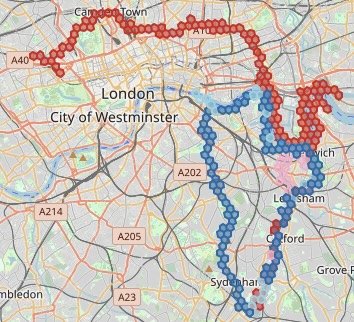

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAWKgAwAEAAAAAQAAAUKkBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAICAgICAgQCAgQFBAQEBQcFBQUFBwkHBwcHBwkLCQkJCQkJCwsLCwsLCwsNDQ0NDQ0PDw8PDxEREREREREREREBAwMDBAQEBwQEBxEMCgwREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREREf/dAAQAF//AABEIAUIBYgMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP1RnJiUpfqFUjHmICYyCP4gOVJHbGPwrgfEfg/4c2lpJrOvWVjbIvztdoixP+EkeG/I16XNe6ZosQ1O7fdCkZdwTtxtXJBJwNvBPsBk8CvNdK0dvE7p4v1q0T7NDcs9la7h8oP3JwnRn4JVedgI53htvn81XDazfND01X3br5X9TqXs6y91csvw/wCB+XocDaeDdS8Qyr/wizaj4c02UlYpZb27M0hwAuyDz1EYYfdMnP8AsEc1uX3wB0YxD+19U1i8jkOTHcXKSISOOV8sLn6V62s9lKpiVmnDcbIkbd7dQACP0q+Lu5nCxagqiWFFLgkfMg/j3Dj2NYUMZT+seypzTg9ra2f8t9vNfd0RdbDVeRVHGzW6/W35nl1r8P8AwhZaQdDiFwtpC+xE+1zqu4EhzgSAYycbcbcqeKv2PgL4fWI/0HSrKWTGC2xJGP8AvNyAPr+HpXSxXMUNpEku9f3uFlZGWN8Sb9+7GMOBn0yfSpNY1bTdBtDfa/dRWUC/8tLhxGv4Z6/QV61jiOXufDGleFY38R+GVt9OmtA9xIqRhLZ1CfOCigbRtGPf2PI6Hw1q15r0F0lxCsMlpcK84GNq7/nTbjqGKHnpjGOteR+IvjJol74a1C48N6bqGqWot3ja7jhaKAkghtrumCFAyePw7VveHbzWdF1OWfToGgggtYdPuI5t0qr5MKRjdsX7ybc5x7VwVf3NWEofadmvlv8AK33Hr4ZfWMLUhVt+7jeL+fw+jvp2fkeuiNZHOF/Bf8kVLdwbLdLiRhHFnYZHYJ24XcTjJ9u3T28XvNc8Z30rQ2K6lL5YDbEsvs/U8jfNLbdPf/61eceJ9E8Mt473/GeSK006XRbRdGuNRWOe3jn+03B1FBJLE0EdyyfZ+CrO8Ywh4au48jQ+pmeOzlMTyQ28qjGGdFX2DLkcfTFJHE2sx7rSdDJCwYAc7Wxt4GTlcHHHavl++l05vjPo+heHvNMFrrFnpl1ZzPFlrb7F5iXUdpHZgpb7zH5dw1wvzrtVdvFfN9x47+OD3+m2Wv8AijVUNxoFprUcmVjfzHiX5SqqnyhywK9CFyea87Ev6rarSW/Tp/wD3Moy+WZ1Xh+ZLlV7volZdFr6dPQ/Qm9MreKtD1+YkWps7uzkld1iSJpvIliy+U6mMqAepNdzLJaQawbdmaMywYBkYthlkIK/MeOnA/SvyZ8SfFv4k+O9KaHxVrjW7WP2Mw2FuqwJIS6P5zxIoDlPvkniM9MDiufi8Z+Ndcvj8RdQ8TtHqkSTFnN2y3HyITHGkIiChS+3o+0gnjd083FZipqKpRtZ36dNz6nC8C1YqSqVlsl7qb1lrHotPP8AA/U34jaLH4otofCSb11KS4iurOaE7XtnhcETq207cdBxkg4FaPgiSx1Hw3BiPy7ycu95HJJGZvPUkPnBzuyMj/ZxkV+VWm+O9c8NeKrHx/aazfXWozC0urhhP5jSyCT97AyjqNoA2MCBgdiK+lNA8TeAm1jxp8RfhTplvDeGz0I2t1babCbiw3vNFqU0UQjI82K3LSEBSGK8grXXg61LEykqiXkvL+tzys8yGvlNCm6N3D7UrNe8u/Zfy99fRfaivPYMbOJzhJHUY+8w69Ogxngnj1xxXIeGJdN1wXXiu0l+1Wt3eRiLdltsFq3kbQTwV3BiTyCCNoC4r571/wCL3jfRLW6vvBOpXeu6PPfNouk3lxBExlutQsQYZTKkUayxWl7GqeYBwJmVidgxZ8O638ZNQ0hfDc95daNFpes6Z4SuZbWCJJJ5YXuGvbsFoioM8RtmDKNiknA6iulYOMcK6K00tf02+7Q+WjU/2j29tz6c8ceK/BHgmUf2nqcEMwAKxM4aUnO3/Vpl2DdDtX37VxU/iXxlrV55Xg6wFopCxre6tlY9ytniCEtJwucb9mScYGKX4aeFbSyh1OTUoRc31nrV/p66lcxILme2jZWj81kVBJgNtzjkAZ5ya9Aug8dtLFB92A5VsDgJiRcdQMLha70YnlDeBR9vfS/FN8dWttizX2yMW0LiRj5YECErsQ9M5P8AT1mDR9N0i2Gn6ZaxQRx4VEUBvl9AMYA6cAAVnNZxL4rNrdNujl04rtZjzJHNg9OBhT+B7Vsxyf2Xte95iHyw3IGeFH3WUfxY+6en9PCjGlRqyqV4rl2v0i/0TVv6se3ipVKlOnGm/e5V8/8ANp3+W2xLdW+nR2pW4WHMPMhEa9+2Vx06fWqLWdpEst0kRhBBfy0Zh5cYXoeevc1bWF1bzr1MbTuhhPPIyN7+/oO1cT428deDvCVnEPFuox2gvpVgQTE5YMw8w4AOFCZyeg4yRmtIYShVl9YqwSitrpL5vy7L/gW5aTxGmGoNym+2vySR2sECpbRtPLMreWu7bJ/FtAPBUjg9q4i51BoPiLHpYeQyS2WOCFfYuJDxg5GSAfTIrtLC4ttWEM+l3iSW0sbSRyo6SRsAQOHIJIyeoNeXAKfjM4C+Y6aVcJuA44e0Uce20jit6mDoc9OMVa76X2syqGIqKNbmeqj2/vRX5XPTTBK14kDy3AKRSuuSGwQUXgYAOQcH8KzdT8IaJqar/atva3apkKZrGB2Qd8EjAzWrfDzLyIndkW2WwWTBLD+7j0pIMRTxud7A5UhmZufvDqT2Uj8a1WX0FrG69JSX5M5frdXrb7l/keJX/wAPPA2nfE7SoJ9Kt5rXWLS4tTC0EWxbq1ImV8hRtLRmRcDqFHoMejaN4B8H27SSJpduIxNJGqpGIwY1C4wY1BPzccn+HpUnxeS6gn8KT2BYu3imxMWxfuJ5cu8e42bs+1dZbybNN3M6DE0q8nbwSMEdO/FcydKFelJKytL8LE4evPEYeUrdVp95xmr+A/BbaWYpNOhlVG+ZGHLqD8y5LZPyhiM9McdBXN/8Kg+G+oadFMPD9n5EahUZpjF/300YbkdPm57V6K5nk1GK4V9kC7gkzR7lyqgsQuM8DOGPYdq34vDtlciSSGTzrsNubzfuN0HK7fbqBxgdRxW8sZKSvQhdd3ov8/wt5kzjTo615W8kr/8AAX9aHi118OvAKSRy6Rpi2ToQry6bcywbQflX50Eag5IwTkZ6iuTsdQuPAWrRjx/NI0N+QE1R0HyxFsDz8diRguqjtuHOT76JftIZ2HmW8J2rFkbXdcZJxxtBPy46+1Nm0i18RW02n6tArW0+dhKhTGxGAy49MAehAAI7V401UruVSc049unbTdpfnvbv2rN8Pg6iwnK7yWrW6Xnsn6dNr9ua0668XK3mH7Fdw9YGiMiBkCk7VZsocgcfORjuBU2k6j4wufOvtR0Q6dFakMp+1RTtKN20hVXHpk9OmB1rzjwt8PPBscl9pGoaXaS3FoylAY8hkcf3FIQFD94kN1x2rux4D8DWbRTRaJppKugy9pbliMH7p8tQNpAwc5r6CnVjVpcyXlb8LHBjsN9WrOMnfz6NNXT+45mX4n+IvC2nFLvwteTWikqrieEbuSwXGck46AenSuPXx348i1n+2PEejaheQnEkFvp8PmQQ4bpnzF8xxtwX24HRQoyDa8S/CLSdYum1vQpW0q7jkWeFypeFW3I6O0TZ2ozKBviwRnkEHad238d6np+qJ4Y8Z2K6HfykiO4ldpLO66HfbybQhOMHDOCOFIyON3SUJvTc4MJOk1ywMW++J162v6RrraBq8J/0jTHha2CXEscyCXEQZyrAGL5vmBUV1uu+LvE4sbex8IaJNc3BUBri6wlrAN2MSFCzSOMgbI+3IOAa8W1u91H4ueMLXRtK1BodG0l5Vl1KFTCZpZ1KGOEZPVAYw5AHJ4+6G+oYNK0vTbWLSbSPexjVIVZt2Nw4Y5OB9Tlj+teVjq/sKsakErpddN9ku+2it9x7WFoqpBwezfTy/JHlUunar4ohmTxRDrF3bliggiMVhbyhk+SNVjmErKSw+ZyFPcDGK0dD0bXvD+nr/wAI3oOj+H2mUJ++m3y7E4BkSGIeacZx+9Puc8V64VYxpaiWJBgL+4iyRjHQtg/lTtJQM0cqoombCszHc3mKdrcnsGBHH410e2xE1aFPlXeX+S/4Bg6dGCvOd/T/AD/4c4s+FNS1RIk17Ubu4QkOyNstYmIHZIVEhT0V3I9c8Y17bwvoWnWzw2MSxt5UmDCscK8ZYLhRypYA4zXWx2Ej3zW6uplRfnXnOPX06YrPukkEr2lskZaOMByzFR+8yBtAz/P8q4cTSo+z5arcr6JLbbolp+Y8Hi1OpbDWSW+2lvP/ACNCz0rT5bOKV4yS0aknzG7j2qz/AGNpv/PI/wDfxqzbXVru0to7UJCRGipne38Ix/zzqf8At68/55xf99t/8brzf7Oq/wDPk9b63D/n4f/Q/Qa9EnxC1o2kUTjQrSUGZyuftLIwwqjkGFGA3tyHcBBlEbPe65ZEgPb8LHlkUdhxuA+nX3+Y9q3bKCLQrP7Jp5jtrZF/eDaoG3oMcADHtwO3pXA+IPid8OfDCC2u9UiMoA2xIdzb84XpjjsSO1cfPKVR0pLS2hg7zbptaHT2M15JaKtwzk9BuPUdquT/AGC5tEt4B593HKDggGOMddrk8c/3evsOteGTfE7xLr0723g3w9d3MQO0XFw4trYjON3ndZAO6RhTjua0Y/hpr3ie3QfEvVDNEfu6PpQNrYqPR24llB4YAldp9RWtSjGpT9lP+v66HTRk6Vmuhr+JPFniLVr1NG+HFujzvB5j312G+yRrJjjcAd7hRwBwVbjoaj0v4Z+H9NvYdT8Vwx61fMipHdXakxQkYBxBlo1VmwVOMg/LkDp6aLQWB2WEHyWwH2mKMBVHynGP9vByQAfU1OiL5X2ltr+aO3KkEcLj0xx09eBzWdCq5Xo1fiX4ruv8um3Y1rUo254fC/w8jA8UorWEcVy5b7Td2tq38KgTSqh+UcdD/F0qLwmyXem3l5ji41O4kAPJKEKMf7Vac9qJoFsLjDlD5lv5mTny+it/tJ7c9G7GuN8JzrDe/wDCM34MD+YzwLz98/fiyfplT1I7Z4E1/dq05dNV9+x14RKWFr0ofFo7eSvf7tPkn2O7O/TtofD24Kqspzx2VXOeR23j8QOtap8S+HBrMGl210ttfhfMe1SRRJ5Y6s0XUqPXH+FZ+uarpPhjR59V8QTRWtrAn75piAiqcDHvk4GB1z3r8h1vfDd3aahJLNLNq32iSSxvW877VcEnFuyHrzx2H0rizTEU6DjpdvzselkHCizlVKk5uKjZaRvq/u269dUe4+P9cn8QfF/xANa8TzwXmlXzrpM1vciFLeH7wEWzA3KPlfB3HHPNeIT6lpPibQ9T8S+Lr2S911pW/wBJklLTNIoxDswR8nQemB6AY2h4cXX/AA/F4C8PeH76XxEyxlka3ZZEcYaVmL4wpwQPw6V6j4G0iTXfin4ePhjw3cQ3Gi3iHUo5rYRLbQ/dJkLYG5PvRjqccc1863OWr/z/AKaR+swnh8DhdJfw4/3Y2UF+Eaj+V+52Pwy+B/g/VNIttC+IOk3MeoRRQX8VzbebH9tS5Cs1rOeV3RS/Kw+VsAFehz7bc/CX4ep44aPXtIszOIF+wNApURHG1MLlUYoQAA+cAZGOtenfErwrf+ILVIvDc72WoiPz7OeMsqfaITuKyKvBR0yrLgjBzg4xXK6XrumeNPA0mvWsBsNQ0uRkuIWHzwXMZCSwux5ZGB45xjHAOVrveElWXtVGKULbeSTeluqt10PzTD8Q4mtNJ1p/vL21+HmfTXZNWem33Hyb8WPDc2geNk+IUGi7bOGy+yajLZRKRFfo7bppEXoJIsHeAAcnuDXgk2v65pU8/ju1tpbO2v7mLyJEl2unlxOgYICuSQSytnjGOjc/qDLbx65q50+cKqajYOl8v3/kibakjBCNrfwjnp2Ar85/jF8PvEXw1uLPwLquoRXWlsjXFtcJFtfCEpsYc4I3ds9R2xWMo1KE3iKLvHo136fen9/ofZZZjcLmND+zsZFJuK0bkvcWrtbrFx08rabnpOi+M9Wm8rTPF9neWx19rezstTtr15rhC7ZRJi5ON2RuMYVMD7meR+jl1qslzG8fnoirC6DbJgFSpHr9K/F5dU1dTaWGp6jLHDp3kXVg0IUSdQEcHsYx0/pXfDUdS1/V9QvPGOvXX27SWWO0uI5lg8tMcOqphef4z+dXSzCcYz9przLr00s/+Gsc2Z8HYWvUhPCyjDlWvKpO6b92y/PXTsfrRD9ov9OgupzJIFt0ICckkDHQc5rkoNZ0DU9OuZNPu7e5jW6jS5+zyLIYsOBtbaSQdi8ggfSvyhfVJ9c8LT+Nb/W7ltcEZQv9o2MiA7BEFUjh07Y5zWbrcnguDw9aXHh6XbcyLHHcW9uzhpI+siSAHn68V10s3lCnFOK0S6/8A4I+HrlVkpYh720hon167W2enoj9YLbxT4V8TeK7G78NXkF4lrDePeSwsrqFkUJHjH+327V2kMSX8yzahFkOhEcBIwiuPr1IGSe3txj8n/APi7wV4W+Kej+MLCBvsNqLj7UltEzbY3hMcRdR1+Y5b6d6+s3/AGsfDJvnktNK1CbRvutqqr0bqx8k4bZ6tn229KWGxFKtKU8S1a+3ySv6K33/ACOXOeF8bhpU6WAhKSUN7JW96Xu77+S1tayPRfF3x08A/DrxEvgrxJftMyxriaBGmFojcATsvI9tqk4xxgivjH4seMvAGq/GW8121vBqunSWkEMM20tDDKECyRLvAXafvHAxkn3rldW8aWNvrmv+KdP0q5k0rVbtruKdwquPM/vDkhC5+XJxg4A5rdtPhZ8WtN0xPCDeH2kOqLcrAySq0dvvKb1mPRDFkHPfIA5FcNXFTf7iPwrVfkl6dj6jLMiwWXyjiaknGco8rvKMU9E5O3RxtZq50XwV+NHh/wCG1tqVvqltqP8AZN3d+bprW8KMpcgCSMBsY3FF2AHHBziukg/aCuNL8VajrY0C6XUdRtmt9Ltp9uxmeVX8yQ4G0Kqjcgz6ZAOR5BP4X8U33iux+CmrXelWE0FxDZecsvmMJ1tjcx4TKv8AMgAzt27mC5yQK6DUvh58U9U19dO1aXT7Z9J1u20sXkG5l+0XMMUq4U8lRHIrHIGSQo74uFfFxjGMVttp/XyHisDkFatOvXlG8rN++9l8O297e8lr6HqWo/tNeOm2aSNBgttbMILOZQbMxISS4UDd7bQ3HXJ6VV1D9oX4leIr6HTPCNlDo9zppSbUPtbi4R5M7o402gYR8ZJHOOMjHPg+oaF4qvr/AFbUb6/jW80C4utPUQxDy3MHEnXnD9uOPasaKx1xvC1z4/sdVkF1OgedY8AEIdoXAHBQdDR9exLTTk7fJaI6Vw3k8EnCjC+32muaXk9OW23Zn3xZfFef4ix+CfFcUP2aX7bqMV3aksyR3EVrMmQxABwDuXuM47V75qh8PeGbR7rUmtrGOEhftNwyouc45eUhQT6Z+lfkferZ+HdM0u68P63c2322dPPVZ+glQpLNj+FgrFS3ocVav7bwjoviqw06/u/telNC8vlSzmWJJT0fA4+YfhVLGJSTnTUrJLW2j11WnXT7j598E0ry+r1nGm3JqKi72X2d+my3P1pm1C01ddto8lyZEAU24MnUcFW+UD6jtS24utUgEigW8Eow+xsu4U42jAAUcdOuK+CfgP8AFTwZ4G8Waj4b1LV5Lfw/NEj2jyebJbw3CZLxoeQu9Tn0OOucZ+htB/aV+FGteI/7KsJL20iv8Q28l1A0UM8+7CsjLkKHB6sFx3AqqmNqVYR556PRxWnp3bXzX6HzOYcP4vCVKsMNh5S5YqSlyva19tk121tY+mNN09oLsSyIiIqbYgG6D0C44/Oq08osSWvJGJLMdowXwOnAwMegrnI9Vu0gQQrLMf4ZAhRceoaTav5E8dBVd47wS8MFOeCoMjH33twf++K9ahhOdfvY2Xb+tj8/p4acp88mZivHZePEdxGiahYsoj54IkzndxknHXgc46YrbmtzealFpaqymTHmEZGyPOX57EgYA9K4zXIryWGHUNMAuLjRpXDxDrNazDGBt/ugFCFH94jGK6HSdUXVbQanZOxjU7dkpzImeRu/UA+g49B0Yebp1alFb7rt0/I9/M8NKvg6Venslyvyaen4WsdtrcUSXdjDKIUxLJGpj6C38s/Iw6c+n5V4d8RPF99baTH8NfD6i41PUpttijjcILdWDmeT0WMDj3GB0NS/Eb4laZ4bthpCQtfa7eYNhawf6wuPlV354QHgHqcEDvil4O8NS2rT+IfE7BtZn2NeXBXGxF+7FEBwgHTAxyF9BXVooXqaJfcrdfTU8ClhpRqXkteluv8AX/ANnTvh/ovhzwjH4btPM2rtCSg/vZp8hvM/76+Y9hwB2rtNIOmy6M1vuYzxTFLhMbSkijIxjsBgrg4I+vEE0d00DtdqwmliKwg7fkTHQ4xhmHOcAH68CJ3htNX0/WY1HkahGLadchR5kYLp174Dr+VcNOh9bX1urHTaK8n39e3RfM9udV0P3FHfRv1XRen9aJGpcS6abLbfym2ureUOSjFfMVeQRjoG9D3+oqppGo2O9JZLy2VmfzSBLGdpdt2Pvfwg8+uDWm9zPbSi+01QJSwh8tuVZXzt+bjBHb2+lRfaDcy+S7SRvwPJlbDf8B7MPTH5VFDEKm3hK8tVs317eV7dBVsLKpTdSns/w76du3Q7K01CxZszS2/mcKrK6ZdQBzweme1cdcXel2WoXT+bDHGnlRp5jDHyKc4ye2RVYiD5i0MZ5/uLj8eKsWCxwy3HlKE2yqV28cOgOMDtxSq0VCvRfS//ALazkwOEjRjVlHsl+K/4BWGo2I4BQj1H/wCqj+0rL/Y/z+FSvremxuUe+hUqcFTMARjtjdxim/27pX/P/B/3+H/xVehzR/lKuux//9H7dtvg94n8ZxJfeP8AxHc3iMFdba2JghVSNxRkAG4dhhlI/l6JoHwi+Hvg+5jl0fTYxKpyk8jMZQx/285A/HivQ473Sx8gYQ5HyI6bMDA4AHy4A6e1XJotPkVWtS8mAT8hVgD25HT8q5qeKo1HanJM1nSqQ+KJiwadaRO0Fu0scYCuiq25RnggCQNjlc+nNMuh9kzMJW2Ku4b40Y8dsIF5PTHrxV+USeb50IGVHQn5cHHfnGNvpWfLPH9vjS6zEkXzMz8KZMAxpuHT727nHIHFb2MrGhbQ3ZtQL+c+bJI8kqDEYMhwWHqQv3QRjgdxVZ2TTrnycfu5ySsYwpRsgMBnGEJ6eh4q5cS3LwbdPgUkPiSYAEIT7ZGTx0U4BHUYxVKQ20EbR3ivi4YI2/l5WP3cY7jsBwvYAcVw1KNSXvJpSXw/5ej/AOD0DBTqQvHEWs+39dOn3C3EMcxY3DeXJndGy8LFjkEdOmOcjkZHA4GDJpMfiiziSTfFM6BopVGHSU8lvXbuyMemT/dNb0UU0s32G75kADw9MOB9OrLjB7DGfevkv4p/F7xrbeM3+HPw48i1NiUuLq8ulVwxkXcsKdfkBPXGc8DG3lVcbR9hzTXlbrfsexluU43E4n2eDaTiua7dopd9vla3lYtftHfESz1DwBN8KbqCaXxPfeQvlRR/u/LimSQTbzgbXCYXH5BcV4x8PB4g8b/EbR5tJ037CfDU8V1fPcOoKQMdrKigZYsM7SBjpniuM8T6343+IepP4tMFtHf6K0lrMA8kslxKhBkOSeFHHlgY9Oa+kv2WPDa+IxffE3WrlVvb+3+yWtpENsaRxPgSv/eJkQgdlGfUAfOp1MRXjz/L0R+kY+hSyjIK3s0nJJ3WrtOaUWklpy8q0vt57H3DZQxQW00c80hjaZVMoZB9xQDyTnHGOOawNQdJEubuSZC4zsKgjLEFdvPGMD35xg+vN6f/AGvcXUenX29Rakrtxnbu4/l0/wAK6XyLOeR9OXc427QDjKk429sdM17eJvTtTlbX+uh+AU6S5VK5JeXkA0611SMN5kEwmw3LNGCFbnHQhh+FeK+OfAl3JrN74q8KXX2GS4hKalbFd8N3BD865GQRIgX5XHOBt6Eg+4vpQt9FnV3/ANRHKFAAA6ZyeOTgDFc9exSyadNiWL/jyfO2Mg4aI5Gd/XHfFY4ezlVitnH/ADX+X3H0mVVGqdF/yzt+TPJPh78TPhvql+NI0+7a0vZWEU0N6pjn85DgYZhhlJyNo5HUqK7/AMe/CDwJ8Vo4dN8WWzpLbI6200MjrLEz7Q/Q7T0GVYEcCvDfiR+zzceMb7TvEfh64i0+d7eEzyuH2sI41/eZUcSAfQH1GK9703X72cjw/wCHz/amoWYCC7YhYWCgDzHIP3sfwr8p7E9K1vRowVKXwy2W9npp8+h69KWMniZYjDytOH2r2stt+mmnofn1f/BnT9P8L6x4KlsC2uabqEE0V8T5Zlt5FKsm5+CUIPyrgHGRnFfQ2g/DL9n+1ii0+fQZb64hbdG07fPJgrl5SXG/k/MCuwdhivqLQPBxtdWXU/FDpeahJmSJzzHGclmWNcABsncDj1wBjNY3ijwybvXYn0y9jRLiQPOu1HdZUG0FGwTGWU7TjGeh4JrgxOFcUq0YJJbKye/fpv8Ad8j2qGe1ZXoTxU29780lHTorK+3pfsjylfBHgXxdqo1i28G2ZvbBxF9pkmRIw2OMoqhJGUAYB3bfbivFfjV8I/iJd+Il+Jnh/TrS7gexW3ntNOJEybWLl9pVRIxHGAS3tjFfYXh2e30tB4dKlfLcsh/imDHPB5+YAcj06HAONm7a7hnbRIllUuzMHONqROSS3XqB8o4x+laSoRqYTnrPXsrL3traLfoZYbiGvhMbF4WKcErLmcn7nXeWi66H5Y6bonxD8JG51G58PyeVqDfaEtY2AmiO3gtH97aw59hXfeHfgZ8Y10uPTNIj0q5h1USSTfv+LB35aORRy3y9AucHIPGM/fPleTAJ7OJRc6bJP5c7H94E3s3l7ccrsPc9PY1Wu9K0ptQ+0WN2YZ5UMiy2R2yBiVIBjhU87c8bcnoTWVHAThUdKbvZXVtNH208vusetiONfaxUoUoxvu7OSuttLq1l1XzT6/ENp+zb8Q1vo/h/rtxCdAgKTT31urGV0zkQhMEqdy43YwAOv8Nfad1PFYa6upyrIIWt3L4XfhmKAsQmWwfL5JA5qS11HxDperbbi2bVYJF8s4UW83yktwmeSuT6ZrQ8OXL67BProUjzJCHG0Dy1jx8pxwBz074ro9jSjUp0YRabd9eiS+7roePj80xuKj9Zryi4x0XLpdytdtbpu3ZbWSOYOkeDBZyaUbK4Ecl+NTdfJudxuhOLgSbtu7IkAIGcAAKBt+WqN3b/AA81aLUrKaOVvt1zBfXvlrcpIJ0VI4JQyYaJgLVQhQrzHkcg1tar4w0Pwn4T/tC6uhLJbWnnLbod77oYg2Dtzjp/FisT4W+HX0rQIdUvF/0y8H2i4mIHzzP/AHc9I4l+VOeuW6k1rVilONKi02/w2/BL9F1OGFSapOtVg0vu7/qrL59jyzX/ANnP4ZasZrnTbfWYJp8u6K90UuHPeZ51YnJ5ZtwJ9a3L/wDZt+Fl/rC3lto72aWzKs9r9qZLaZlUMvmxLk8AgjYVB75r6EecXMMcSqmVU5yDk9eeKjjQW11M1wxiZRC4BYJ2dM5bHZB9KqeVUfim7L0X6p/oUuKMyfLGNSWisvef6NdtO3Sx8ufEP4LfDzwp4WuvF2iaXB9psZra8kihi/dyRRyASp+8LbUMZYkKoHAyOK9c0r4Q/DLwrHJNpOlWVrBelXcyL529XG4KUfdlQD9xAPbFa/xEv7a7+H2s22+Pd/Zl4uYxu5eJvQYAA70ngnUIb/4f6Rrggnk1CWxikeXAVXJX7pdyCQRxhOB2GavC08LGoo0LPfztt93oceIzHMakJPEVJa26vVLb7radj82vFfgrxj4A0RPh3rGmlzfSNHZXsbbILjDbySsiqysvGAQp/AVk3l54q1B7XwabRba/til39o37kCQkbZEUDqxHOc/gOn6RfEr4cWPxO8PQ2V9fnTZ7WRbuwntlDCGQrgNIz4Z12n5guwdPSvzMjuNRtbi48Qy6xFFq9tJJZ/Zo4g6MkTHK4UE7WIyGxXkY7COjPkjez222X+XQ/VMgz2lmOH9rUUVUi9dJfFLRPqrNLXomtrWR+inwe+JesfErSrt9at7eDUdPuPs12EZjG52gpIiYBCkHoXGMfl7N9kQWpbUXkZF5wMRJj1I5OPYuR7V8Z/s9nW4fCrah4H0x7zUdZbzLzVdUlEFsskKkBI4oy8kiRkso2qvPcDAX6Dm+HPia/vYLvxl4ivrr963lw6Y32G2Hy/d/dHzSBgjLSZ6V7+X1nUw8XN6/1+h+W5/QoUMyrUsLG0E7Jfnbyve3kdfrMmnQ2rX2rXC2NrGrR+aziEKrYGDuwFTOMKcfh0Ph994gvvE+rF/gzFtulRoL69VQNNU9MRhvlkkJwVVAU+ZGyCDXaQfDv4O6NqLNBaQXd1Ic7WDX8+cZ481nwc+4NcvoSahq2iRaHPbLG+obL52nlMW+RnEjsdm07knyVwdwB2444dapQmrbtdt0/kZYWli6TuvdUlb3rJNfPp/SN34X+F9F0g3WsNI91reH/tK51JcTBz8uATnCjgBR83GNo4r02aeSW1fWHUCNWBiQrjzTnBcgdFUfdHTtzg1jXUWvSWUkuqzrcalKQYQxQKnQZWJc7kXux2gDscYqrBql5rWipq8q7ZG3W11/AFlTAIweMFSpwMAdAABXJQjiK9enRxPw72/mt36K38q3/AePhQo0KuJwnTTRt8t100Tt0u9vxO2kvxe2ax3g81Mfu2UYYHIOQ3+elZM8EN5Y3OhxqJFUieBk4MbZ3DCjoVYcAYGO/aqOpajpWjTvM7iC0EIkcvhQGBxkc4HH4Vw+j+P1ubmUeFtOk1Z53XbNGPLt02sMf6Q5CEdP9XvPHSvZ5eSLntdHz9OrJtKKs+vkekabcnWLOz1SMFv3SzSPjjfInyouAB8uecACq2v+IvD3h2yCeI7mKCNyfKSQ4lYjH+qX7xb/AHQfpXJeDfC3jjxVpFhb3+qfYbFIipg0wbZNnmEfNcS5btj92kZ6c1sxaT4X8LS79L0+JLl1PmzMDJPJlj964kZ5W4HQsR7V5kKScJOrrzav7rJfcdeKxqo1YQjpba35lE+JvE+r2GfDmkuzNMYorq/3W527c7jbgGVvbIjzg5IxU8HhSPxDm58V31xdQu7iW3ti1rb8DCbo43LkDsryMuOMV00NxBdKJLXOEGWz1BbhfyCt07GrCW7Xt/DhikjCTMkfDHauQDjqM461MqFWHLOk+aMej3+T/wA/vOqNelOElLS/Vf5f16HKr4C+HqqFGi6eMDHFpDj/ANBp3/CB/D7/AKA2n/8AgJB/8TXUefqUX7uXTC7LwWG7BI7jFH2u/wD+gS3/AI9Wf9tUf+fc/wDwE1+oy/nj95//0v0oh8d63p81t4e1HR7uKS4IijnQi4tIieVWVwUYYBAU7BuPAx0HU3NpqF0S7myV+zx27oRxj+GYDj6VDrKeVBBciJts08EDMegdZldCOP7u8V438a7nxlrFxY+DfAEVxJeokmrSvbypCENuNtmshdkBR7kq5UH5lhZcYNeRmEYzlyzV1Y9nLYJwbPbVj1wKA1xbswAG8wNk46E/vcZ/CvKviz461P4a+H/7dmC6hLf3UVlBapGUV5ni2oHYyZCbYuevPbnjyzVvHPjLxR438J+ILPS9VttNkuo0tIkaIQSvc6dO8rXI81WzA+ECMo2+XIeWZAOY8PeA7T4qafa+H4dSvo5LfSdP1DUrgyNOYNdjMisJUlJCzfNJ50Y2EYjzgbK5p1aqham/Q9bBYXBfWYPFxXJfX+l+hXX9pv4n6fp58MQaPbW+q3xeO0uEYvbRhOZCsbbmOxR9wllzyBgbT618Fvize+K7648OeOvIbVdNeCb7XBnF1blXK7YgPlKyBNyqOWPTivJ9K/Z08QaxNJe+IPFtjaX+nzSxWOxYwgyzBnlVypy+PuDoMEZFfNekPcHRJviS2sSWuq4kMXkyrHs2btsZX0Yr0xzkfjyU8ZWjOM6jv92y3+d/wsfXVshyjH4arh8HGMZaapT0k37tm/s8qs0tE76bH0P8QvHHxH8Y+PdWsNN1GXQYdCna1trVOTI2OZbjsRIuMLyFHHb5vCLrWfFvibTLj4opewpeJB5EltFAgiWCM4C4OckfeDHJ7VkX0+k3NhB4l1DW7ma61GWH+1/3xMksb480YweUHA68Dp2r7EPwu/Zf8USwa14HvrdltjH5lkk032ebaBtWdGXcOnXK5/irkb9tKVRSV/N29Lei/rY9tOjlNKjQlRfLa1407pctuZSb1tN7P8tTOsv2YtEl8Oadrnh/xDqMUV/bxT3zrsbzhMu7zBkgR7sgbsnaP73Jr0bRfAtp4A1a68CaFHPaxR2Datpc/mFsSwbFuUR8B+Qwcjpk5UDkV7Jb+OPBGi6VDGPKEcaBRZ2q7iigbQoAxEEUABQCOMcdgumeJfEOqWSJ4c0eN4kytvPfnGIHbGNgO4gbdvyk8AcV7X+xKDhTV2101/4b8D84r4zOq84zxMmoRldc1or9L6aLfTRaEelaxNrIiS6wl40cLn+CKeMqdrIeisM4K/ljBA69rpNOnU6zcW0EaAMEkZFdivQliRwOD19q8ysvCurw3qW2s308MMAazdbGMj92cyIisBubc3OCmcD8BuQ+EvByXKWRsWhV4nK3l6zZkk2kAbXwoxkNxjOOmKyws6mIhypbaa6beSXy+R4uY5Xl0K7l7RqL15YrT73a3or+Whs6z8Q/CsWnz2v2j7TcyxNH5dqpcbsED5vu4+jdKxz4o1fxJoseneGNHuZZjCbd551EcKfLt4c9cDPG5cHHXpWsYdDtUi1TTLARLDcRySbYvLUwygNg8AHDEquARgemK6fTdcs7XTYbdmMr2zNbssOX4iyq89OgXqeaKGHrSxFSDlayW3Z+u3VFwngcJRh7Ci5a3959VpsreR5VBomv3arD4tvZp7WzKxSW0RKW6bRhNxG3d+AzjHzc16clvb2mlW0WnKkNzC+62SNQqjnaQ2MDa2Op6+5p2qs0MX9tyOnkXgEU6Iu4bduFPONzdugxxxWbaSLbQPp1y32dgvmIZMEmNshAVXPzDj5ccjGBxWNGMKdSeFra369f7uvn0/vJmuLxNbERjWi7JdFZLz08uvlYta7eQS6VDq106N5cu/ynKhEdPvxbTjcSpZeT34HOK1NQl0mSxSytpNzsuUjhUyN6qQqA7V+oAxXGRRW6agl5qcE6/KftfmMVYt97I27TjByV7jtxXfA6J4fTakmwTDMUMXUg8jYq/wA666OKpV8PbE+61v0/rt66HnVcNKFVex+Vvy/roec69Hq15PHqDQrGscmJVUnfGYwD5nA4JP3ecDb6njX042t/i01SIreSkSPNuxI6uPlaMjpt7r046dhT1DxBZ6rqElvYXMEJwtvcoZ42mHcF40bKcDHNMvbK8lme4iIEtrB9qgcRrGwwSjjA6gLj61yKrN1fbxpt8i1drX87OzvbZpd1sdPs4qn7JyXvbeXlppa/T0N+Dw1ANdewvppJlkUTx72+8oVUYFU2puXAP3ehHoagt9ZttN0+10+MK91aTSZjXgEJuQtn02tn8PSuaGveHbzTLbV7y8P+tT7XDLcZaBHDKVlxgoQQQOMHaccViungDxbq01xIofTlsdrS/Z5FLsJCo8thgkbTjIXHfPFdtT27q06rSivh772+XT/gGVKNNQlB69drLQ77VXv5Xjurlra38mVH2p87KH/dsWP3SAHJ4z69q56z8H6JqerXv29muEM4cR7ykG6RQS4VMHLfUdPTGI7nVtTsPDTNf6NM8DQJEl1AVY5b5SXR3EmM4wQDx2FaOs69o1pql5c6jdfYI5XgjRZVC5cRngl1wuMeo456Cqq4OCqUVJuV21q/7re23TsPD4qtTjP2Pu6dNOq67nlXxL8OXfhTS5LJ/Kltrix1KK2dIl84vLbFBFIwA3AErtPoT2GB2vhHxTouo+GrW+F55sUe5Y9qHcyq5KghsbcfdOTxjkdqzvHHjS4t9Yh8O+H7mC9nNg7i0kiP+qJVWcsCi7W+QRnkEg+lcxqnwmi0jUrSHxDrupvZLC23yboW0KTRgM6Ose3G71BH061n7F0KvJSkkvS9r6f+26dux6FTE/XMOvaxvJeivy3fbe0tV18tjvtQ8b+FLWQXHiDVLXT0eRgtv9oSPCqeec5b8OPSuSuPjJ8F9F1iKYapZyQNHIrARy3POUKH5Ffnr9KybvwV8AbaNJPEkenxyyySFJnvXjnIV2UEsJdx+UDk9ahPiTTvDGly6t4P8Qm+S0Rv9HupVljCZU+WJI1DRlwvysxYAjpjNdscBQ3nG77vV/8AA+VkeFPEVJJxT5V2Wi/Ak8a/Gzw94l8F6lo/gSx1HWZbu3ltlFpZTLCnmoyBmYqvC5zjbyRjgci14P1b4mWnhiy8K6Jo0GnxWIigjv8AV5QWxGFDL9lt9zAgc4MijtXQeEvid4O8TwRS2ly5by2lCyxSRqoXkqzsvl7uCvDYyOM1sL458P21sGe4E0rEyuI0/jfk5YgLjoM5/Ss6s6VOvSg9LJ/p/XyNMLg6tTDy5ItrT+mcppnwu0m7lH/Cd3Mmu3ce2WH7WdloqgbGVLVT5S7flzu3HBX3rwr9pz4Q+F9H0W38VeGNGEDx3sUepf2YpVfsexjIXjj+QYIX5goxnntX1fBd+IvEAVNOW304wyqyu2JJRuXGQAAm1geAQAce2Rx3jrVNO8I+ErzxR4ka9v4bJQ8tvGQoLEhCPLXAwG75AA5qcW/b0pR5NLbvS36/ge3kVWpl+PpVIVPevbli7t30tp7vprufnr8J/iV/wrrxhNe6MJDp91b/AOkRwK8kcLggxTbF7p93JyQpPGa/SDwg2lfEHQofE41GbVbS8j3RhVNtbAqSrDywFOVZdueOlfnTPrfiLTtdvtYsNEhtYfEFyotLZZk2QSzYVQ5AUbW654HvX398OPBV18NPhza+CteeJn06KQzyglExJK0xdWIwVUtt5xwBnFeJltOMarpz1utN0r9PwufYcaVIQoRxNG0arst4tuKWuq1XLLljdM7aDXtF8O285+W0s4omklaIBAFiXdkt1OAOSa+fNF8U63qWg2vjHSdCuJ7SwLGVrh4YgS8rFniUsWwN+ATxkDGMGuiFnL8RteTy0J8M2xDBWwf7SljPXjg28bDoCVcjJyuMexzQRCx/sqyRQ0yeVEnRVVcZIA6BQMD0JFfT4eM1G00l6H5Sp1J3lVepy1h4r8WWV1JOnhq6/wBI2zNm4tVVhwrZYSZK8Dt36Yrk7a28SNo11o2kXlpbR2tzKLmTyjcSMXKhTGciMAhTgnd0+7XdeHWhFtJazxo0tq/lbmUBimA0TcdMoV6cZqt5cc+s6rbQ/uvMurIyjHBHkSHjB43d6JRSxNCT81+F/wBDthJvA4qnHtF/+TKP/txhw/DTSYrxbvVwdVul+YSXsgmCnjmOPiJMf7KA+9ekw2BFzFjgl16+5pyiSQqqEbemG4H1z2/l0o1GK+i0q4nSLOIZQpQg4YxnHULjGO2farcN3PU4qcLaIr+Cb+40jQbGWMDLwZZG4+87MPyzVs6JbatexIg8sbOMnICj1AC5JzgAY4HtzBoUls/hjTnwwX7PFtkcEKcjkbun6/StiVbxrx/IDRlVXKjIwASB2HHB9qwox5qEbKzsLEUo1JylbXUzDp39kyeWgKsR24HXsDk9u56VJDeSi+juJiqx2vzs6rt+aQbVXkkE4ye3b8L93eTTTKt7+9kZflQDB4HU9ABWciGC6W7Yo7tjBIOxHC8BR0+6OpH8NKdXmfsqCTkvuX9dvyOmGHjGKdXRdu//AAC+dZ10nKWx29t02Dj3GeKT+2Nf/wCff/yP/wDXrPOzP+f8KTCf5/8A1Vh/Z1X/AJ/v7o/5F+0w3/PiP4n/0/0w1XxNa3a/2Xo0Ml5dI0UjrDteGIo6tzIDtxxjIOPp0rf+2anHaxXN1HZwecu5Ea5JY9sDZGwY+yk1r2ekjSY447JIY7fGY0g6LjgnPXd2JPzY4qj5Vzpt5O+nRRFnVrkM2QWwAHQYHJ3cjJ43e1cCw7k+atLXstj0p42lBKnhYWXd7v8ARen4kMEniGdDKtlEqAZBaVhkf7vlbh/wIClkl1qF4ke3twZQ5H79uNgzg/uvTpW7LqqXSi4gUGHCsCRsjKdRk89P9kHHtisia4udQuViiZIUtzuaTYWIJBwBu27sj/ZHGKwxdJUqacN7pJd+6+6/oXQxVScrSta33dvxscw/gexvC13eW0FxOS8jp5jx7ySXKjABJA+UfMO3FeX6h8Bfhn/aUOt6TY6bHIU82NFhlnIYrlW2eckbAdTvj6dOlfSS6QLgiKe8ny3yjDLGpc5/hA7cVj+HIc2kLAIoI3Oi8Eqfm5P+6R3qPq7q/DRjH1Sb+5f5mtPNcTRi1TxM/SLcV/w3oj85Pi/8PtZ+H+o2PxDv7a01S3LNBdtb2kNmqtwYy0MI2AsN2JB1xz7r8J/iroXgDV9Z8Vax4befSNYNqYZBBCxhFsrKzKjcAOWySPTvX6BeJdJ0y+t5dLljS4iukMVxbtyBG/XzMfdTur5BVhkdtvw5cfAr4k2UsfgO2u7OXSLlxaf2jINk8aYLmHyXPzS4B2hM9Oo6jyK+Hr0K0VFXk3potdO3purWW593kudYPG4CWFzCdlFJaykvdvffumlbuvdsfU2saN4gvrm4bRLW3miZBKfsSxCExMoIQKFG51I4xnJxjkc+4aZf6QdAsL7w4f8ARUX7Kd33o1I5D+jBlXP1z0NZGhWEHhnRbDw3pSzSraRJbwu4YMxhTG58quSQuSR+WK4TXba68PajN4lsYUijOx5ogyElg3308wAh8gZATkegJr0qNB4Ne2m99/L0/X8uh8dXxazFfVI6W+D+9017Pt0W3mdze3zSvMV+dpYUmV0GQJbc+vTGyuiuIlafTp4JJYo5ZnKupT5BJCzADIIxwAOPy7ee3Gu2fiWKKdLnzSm2RowJJJFVhzlSFi4/2QKZfX+nWFoLfWJGRoHUol5MsSgKVbaI2IPzJxwO/FcFDHOOLqexheL2/pJvq+nYxr4JqjCNf3ZLp/w9lskb+rppEdxJatIJWPmJnJkOSBIhUDIXaWYcYrGgvpDdtE8QDuE++do3KoQsVHzYIC/l6dMH/hI9MuJpG07cIrqPzYY0SViR82DFgIHySQv3gDxxwK27bz3vwUgu4ZmhzHbxhLNgRwR83yhflzkdfTNb1qmI9rGtqr+7ouXTp8Xn/dW5nSjR5HT0017/AJeXmdDa2/llZLqFrlAGB3qdi7/vbF6L1/8A1UrXNrZ2n9nQOBPbSLNbyoVHDf3gWHTgMo/XFZl14Q16W3F3cTQWzM235w90UR+AXO6IErnnGBjJ7U/UNBbSrtJXYSRySGMrBE0b7woOAS7D5n6YA2jA+bvOMpVKdH2ns4x76tt3stXZdbO/SwqE4TqcnM320SSt2V+2lrFrUPElneeVdTQiSZ1AWMKTGuD3H8ZBztHQZ75rn7fwvJrjy6fcRSSW/wAsjxNN9n82M42B9h3GP1UfKeAeOK1VsZ9OvRBfwR6gLsvDKg/eOX28oXYqMf38Btvc4OK3byG+0S5g127fLNL5Ny/ONsg4wo/hQg46dBWNbC4nlhjcXOzjbRaWW3/Bfki41qXv4bDR3XXq+i9OiMHxFa6lpk9npiWmlW1pft9mjlEJ2xz8eUhK4wrgMowDzgd65G98D6lY6sul6ZothEbhpJleC5n8o9CXMGVCkbc7VKq1d94k1PRZPBl5Lrdwku9cRopPMikGLAQZHzhefy9K3tJm1YPNqWoWji6nxHH91dqqv3RuKnGQTXoWXPFUKl5Pfqrb+nkvW5y03JUm69NaeVtfL9fQ8s8N+FdF/tG5kngEkyOkzZRVcyBNp2jnaAR2+bnOa7W8ayjvIYbWwJjW3ktpYVAw2V6c9QO+7rWPp7W8Or39nfRlsbVEZIJi+dyMbTx+HBxWo+nRRlJkn+0eduwu7fIj7c5yMMPlUj1rN08ZXoUaelrrVdLeT06f8BGjnh6dSpJ9np6+hzP9hvpzKvhKO+02Lcoa0STzbUoDkqsEmViz6xbMVRFokOqrq86bColeKJ2OwtMecRsgAJXI3tLgKcbetdPcebF5vktvKxb0G1jz8w+8MY+71b/9VyG+sEtDKJVki27/ACTtYEDlQVORmu2phq8P33tr8vdK34W6HPCtTf7tU7X7P/O54B/wr7Xdc+KN/wCM/wDj4tbuzWC1soPvxKuzAcnMahXXcPmPPOBwK9Fg03VLjw9beJPFDnUbqzvX/tOJ0AiVUfy3RYxleAFbeclslsgYA62O1t43EyFbe53GQSr+7RT2UDIUAe3+FZPiLxDrWl6bc6/ZQ28nEcN6JGYxNE7NGZEVSAT644wuOBgVyQq13GaxFNpys1bVJLZeVtzuoqnGrTVGSaWlnpvo/vWmmxpT/wBi25ll1BIGTcJon2ht8UvzgRjHPzEj2GDwDWLfJM9s02kWKadCrK7PLBukO04+5sEeNpPDVzWk6DrCeI/JhvvMmswphkmQlGgf5QYlPbJIHAAPIPSvTm0bxwNOmVpNM2yRsG3JMHztI47A/pXTCvUrfHFpbaW/Pp8jSrg6GGf7qpGT396+3SytZ6f8Mef6toMen3dvqoXzlWdEvRd7drRMVTKrGSNy8YVgRt49DXVy2em3WnjSb21WS3PmL5DRB4yFcrkKoYenJA5rn/E134hn8LzXerJpq2pjjlZ4TMjhHKsvLfL6V0I/4SOCWNNR0aaNcS7pIZUm++4fIUfTAH0renUoU9oNf9uv8zlrUMVWWtWMkuiktPRafgjBj8MS6Ji48KXBWOPObK6n+XZtXCQtIDsAI+4x2H/YPzjP1BrXxnp174O123WMX0JhljSUH7yYLIUEwDbdu3k8gDOeK7q28U+GYx5jSm1dXwY7qNo3UZ4ycEenesrWtc0NrH+2LC6s1urVleNmdOmdmPnIyozuyeBjPTNa/WKM9FJP7jlWDxtCftFCSatbTb00PzT8W+HL/TfE6/DyDWJbi0hthexubZoLkGNyqw/vRGSybd24DkfTA9/+GHjLxp8YI7vwJ42u0vtN0WSGS8uIkMd3dQSn/UPjAChlwzDDD7v8WR8hXmpaJ4ie+1DX7rdqclxNcT35PLEE+WIUTAw3sMAdO2LOkPpUfh61TwulzF4pWRUgW18wTly/PC9QU6dq+TlVtJypadtb+i+T1R+14vJvrmDjRxeslZc3Ikk3Zyknp7rSs/Kza0SP1vNt5MAs4YobOGFQioRu8tUGBgRlETaOFwxC44q/EbeCCOeIs9y3E7MMZ29AMY2gdVA9c96s6daQ3Swy3jHAwpAHGYzg9/Yc8+2KvXiWuYxGyiRkIcJwmwYwACB3Ofz9RX2FKsqkITit1c/BqsXTqukl/S0OKa1nsPF+GCkX0DADjmSPa/8AKbA+mKoXFp5/iqeybkX9lFOq/wC3bHy+PogLVpa4W0vVtL1y22ttuvKY5Bx5iMgyPqf0FQeM5C7aVqtvMLOWO9Nu0sa9FulwxAOMhQpyPesMZKUYRqx+y0/0/Jno5XFVKs8NLacWv1X4pDLXW72NFSGMTtHnzCTsA5KjjGMkDPP/ANauil8TR3WivZw/KAv7xUyJCAwLj1BKgimCzk8g2KRLcSDkyqoim4xn5c7H6dcqfYmuO1nVoYp1tdBtvtd7Cpd5GzFHAqf89DlefqVUcdc4rprYilBXqK3b/K3+RxYLA4irPkpO/e+iSXW/Q6/wHqc50gaChHmWbyQZwCrhD6/7uD/ukGquqaxZaAZAksVs6hRLysbsDjBSPhmxzg4x19q8jfxBHIwS91USx5CX1vpTpCYkcAR+YoUfT5lPA4J7esWHhjw1pylNLsoiVOPOmIlYggEZ3ZVWGedoWvG5MTUToU/cXfZ22tpfb5PY9xUMvw8nVqy5pdVFaX73dt1to12M628ZaHdWoTS7XVpuTuZLdZAx92Emf89qbL4klgCz/wBlar9nT7zPb7QHb5V7kdDjrznFdkZpwTDluTgc5x7ew9Kidmgi8r5WZZI2wemQ6le3qBXbTw1anTUI1LW7RRyzxmDcnL6v98n/AJI4b/hPvCo4ZNRB9Ps8f/x6j/hP/Cn93Uf/AAHj/wDj1emSX988jOLjbk5wH6e3So/tl9/z8/8Aj/8A9al7LHf8/F93/BJ+t4H/AKBH/wCDP/tT/9T9ebaJJ4TInzSswKqcA7QMbRz0H0qjqVuk1ut38rm2PnAEfeUDDAfVc446gelLatIYkmgTa4+VnbnkcMBgcYYEVFJfQxjZbs0r5z5cODg+7/dA/HvXHWq06etSVv66WLp0ak3aKK89jHG63OnsrbjvEA/1T7xkOuOEc+pGP51Npc8Esd3MqH5ZmJ8whNhwMKfTGCMZqD7Jf29sYoJxBtGY44Pvc8qDJ6DoMVV1PStLuLYXqSTO7yxbpp33sY2+X0HTK4rzcVXxEYqvTpaQvu7aW7b/AH20O7C0KWtGpU3tsv8AhjbbWLaDEfmx7lO8YXzMnPUnBHHY1zdgt5b211bQrcBmEiwSKh442KM5BHAXp07V6H4bvku7IRSKsJEQiaIHjzI/lbA+qmuLnupJdYea9iHkcFkkYJ5ePlHOQAeO3PatqtTFwko8y+S/4L/I82vi6VKXKqf4/wDARJBLJEn2extY492WxJJuLbsD5kj5z9Tmqn/CORyiW3uS8sLgNcJEqlUYHcvBJ+ZeCMDI7UurHULi6MbYkRvlEz4XK/w4IIXHORjr+gfp8914cvUYsHtbs4XAx8ycfxYx+Zrkjh3iJfvZNuO3T8rdDlnnFaMbUkop+X+dzO1rSNct5obqyubS9jkcFLbUZpojtxjImjz83sYgOcZqgbHxVqNkbF9H0aKKcFWf7XLKVH8JXFsp9P8AloPTNdDq+ny+dIE3GGJV8ttpdcHn8ev+RW14eMQsdiFWVGK5Tv3/AK+lc8qVNa8i+4UcyxT19o/Kzt+Wh49LosXhDX7FdUuWjsb+A215Nagxjj+HkuwUkLnnkcdq7bTvBGl2skaafpaB/IMsLXIVgJx99syh5BkuMAbRjt6dR4i0yx1PSZLW/TdFjJ9RjuvoR1/D0rmPC+uT6KV8Ka9Ivn6eyvZTSHYlxbSfIOT/AHd2fYDGPlrrwFb2b9m9nt69j3nW/tHDKpf97TVn5x6S+Wz8rM7KSX+0ydM1ETANGrRxQW7Rk+2ZFOCpx8wKjkVH/wAI3cixM08inUoyrxMvZ0HTnks+PmJ74HRRXkX7WV5Dcfs3eL2tdzFdPBEiqwUDzo84fGD9Aa6v4v8AxI1zwN4Uvdd8NWkNxeG8stKsprrcLc3N/cx20JkC4OyIyZfBycYG3NelivZyp+yqfa0/rtbv0OahzKfPHp/X9I7S98Y6T/ZTyH5riSPYbZlbAY8EHjGPx5HFMvdJCaC2otM91cLHG6SsThcMv3PQAZ9/WvnTxL4j8c/DrWNb8O+P59M129/4RHUvEuk6lb2clntn0zakkE8HnzB0PmxsjBl4DKRnBqx4L8dfGSw1bwH/AMJlLo8+l+PFkjNjZ2bwyWDmwe/QRymeTzU2o0b7o05OVCjivLlhMTU5o4ppq1lbp522v+XQ7FXow5XQTWqvft29D6L0R9J0jRk13VbmNTIfIa5ndVXJk2JHHnAAZ8BVH3iR1NVL7U3udUsp9StHhswZFj83GWdlwrMvbkDb+ea+CvFvjD4n+Ovg7oPxNvH09fD2p+I9GkttJitJBPa2i6xEIGW784rLM3lr5qGJR8/y428+geKvi18SfEGo+MvEPhGXSU03wxc3ttHp97ZyTy3/APZcKTXG+4WaP7MCX2w7Y2xjc2QcV118NicXFKla61t092z10202+fkYU61HDtua02+/TQ+jPEeq21zpk0D2wimCqyTDZHMrRHIITkk8Djj0qhJ8XNCH7ua6s1kjJ+V5+VbGD2GCK8Nmk8UfGH4hyeG/Cx0iw05PDuka4lzqenm/nE+qm4CxlPOhTDLGCzckbSAPmyvYfChdC8efDDQvF13Y7Lm+tfNns7NQ1vDMjtG/lbuUQuhKjkgECur6vg6dFTq4iafkorftocvtcTOpywoxdvN7ff8A5EX/AAlen2vxL12Qzpk2MFxcCJvk/dSXA/2ugI7Zx39O3j1/TtYxax31vMyFWeE4Vl6Ngo0QZDyODg4PNecaB4d06/8Ai34q+2wyJgWrRJKdjEStMzYCgLwRg4zyD711urfBbwHc3seuPYvaTRZlLRsF37enCqPx7n1p5dh8u+qOVTETi7X0s1tpo9tLf5GuKq4r6zyxpxtsv60NPxD4tj8LzWFmtpcNNqd8lkoEnnrwCZJefn2xpzgNj6VrQwiFjp8H72N2E37s4JU8hNr7MnOD64+leL6t4U164+Ltrpek3rxzado32myDHe6S3ErRSMoPX5RtO48ZX6V3+pap45srhfO06DU7WecpPPCH/drAAqnby3IbjB7HOOK5ng8ZXhQw1OrFue6lZaJXtfb+7tqarEYenKrVcGlDa33Kyf37+R6G0oCvJqUn2bKlnWYCH35DHJHrglfWvm/xl8QfF+nxXHgvxJpllfNexNFFPp8+xHifYUISX/gXzB2APGBiu7N9PJf/ANnmBxGQR5gBx09e3piuz8Q3fhrxNoVnaabbCHdfReeWjEUixKG39uOox/KvRzDBY2lD3YJprpfT8P8ALQ4cmzLA1a69rLktrra1u/4bHl+meI/jfdajDr114ehgW3j8qMz3UaR7ZOBu2IzNyQevB9K9Hm1D9oG43LcnwpBCr7W5upXUjHH3owT9KsHTr3VttlrF/eXNtIpUqqrCGIOQJHAJfscnj0qdfDPh+VUA0+3Z2AyTv5Jx/tV59KjiqV1yL5v/AIMvI9evXweI5ZOs3bT3Yq1v/JPyPM9Z0v4haloU1teeKtItYx+6NtbxESnyn29Hkcj7ox2xitKC18QwRAal4xMmev2d9PC46fxWxYfgGrp/F9hpuk+EdUvtGggjmt9NupkdbdGKsiqVwZA3fgema2pbLTraYukVvGELM8fkx/Nn5gM7eBhh16DjrgV1QWJk7e6vvOScsDDpN/8AgKPKdT8OWN7GV1DxnqrAEbIo5/Nz04CRQwj6dK4Xxb8IbTxJpkujw3OsMk8TBZ9QaVFVxgqRGZXDhcA4wv4cVU+J3x01rRvEb+DPh5p0Jns7aNJbqTamFZQcRbf4ugLNwCCpFdL4fv7g6XBq+o3F4Z9RgilkSR1lEJweBhFQHnDBVA49a9Sjw7ia1L2uPaintFLVr8bJ/fY8+pxVhsFP/hMT9pG1m3on5KyTt91+6Pkv4g/C3XfD2oado2j2aTiP9+twNscbeVjKfMflYkjKn8M8kYXhjxb4i0jxani+006UmwV7O6RJvKl3N/CGAO0qeRlcHGOtfX/xHls4tCu3vzM8lhBJdI67QCyR7guCOhwM46Hpivho3viCztZtejvFiOqMpuU2fKA/CsM91DfrXn1uC605TqYWS5Vsur02Wn5+SPtso8UcPLCU8PmNO89m0rRs38TV107LSzaWyP0b+E/jzVfHmhwXGkzQt5iSSRQ36kPIFcq+GjySwIPB7c9OnrUV94liuBDPpKbkQhtt1GiqWPB+Ydtv3eev0r86fA2pXHw61TS9F1u4ebR7mZoFktkH2i3mILIYymfMVpCDgg8fdwa+tIPG2qWepfZ7TVLbVEEfzNqivZSKRg4LzGNw2DkDeRt5xxx4uU89SheM2ktPT5Wf9dDXimhRwmN5VTi1LWO60u1unHXurfOx3/jBvE1rpJudTsbaCKB4px++8x8pICMbew78DjNct46h1G+updL1C60tLrS4hP8AY7eV/OkjlxukVHySFwMnAwKTUde+JGrQPDb6WZ7aWMxrIjT3CYK4OJBIUPX6V+c3iOzHh2XUdI8YWtxHr8MzkXFy0q3Em7/UuuQCRjGOcYrLNW40Yx579/06fP5HVwjgJYrFTm4qDilblje93ury2to7d0foQ/xB+HWozzWfijxU13cxRxy3FhAywLvdQxjCDCOyZw20rtwc4PFfnbdaxZ3NhqGsXupTyassrxRzRylBsXIQIqcbG46ZH4VBFY2Gu6BB4c0aF7rWJNqRWsMR8xZAd0rOSB2B9ePQLgWdZ1nQzq1hNo+lvBcac5NxCY1QqF/hPuMfLXmNTrWqRW2nV3f+a3sfoGCy+lgOejGT16e7Gyjtokkoyenbpd2IbfV9D0m0sNR0J5k1aF0FyF3eZMWwZkYd1Nfefhr9qD4a6P4esVv3uNQn28wWkJeSML95pd23AGAe/U9cV8cQ3uueLNfj8WeFdMmuEgja1lPCNK5Qv5aD+J0QFsdwMdxnQu9D8deDYbrx3rOi7bTUo0lC+anmRCP5RvVeRuyCwAyveui2KoQVWMdP8LtbZtdPL1R5eZYHK8yqxo4qVprTl9pFSu9oNWurLWPk7dT9OtG8Z+FfGehQeMPDsqCznUlJG/dgsrFWBD7cbSCCMCqV/wCJ/CkDmG51KyWfCOkZuIVLMPmAxu7kY6V+fnwp8QX/AMPtQ0vTvEunWeo2GuXccaKGbzLWS5YqNudyMo6kEHnoR1r7+06bwLaKy/2eqEj5SsadffGOOlfTZdVeJoqUI7WuflHEGWU8nxXsef3Hfld76J2181s/w0Lo1vwxj/kJ2X/gRGKP7b8Mf9BKy/8AAiOs4TeHlGAkQA/6Z/8A1qPP8P8A9yL/AL9//Wrt9hU/lZ4f1mj/ADr70f/V/UXRxY32j2+tWMn2reQZkY4DMCN64Xv2BOc5B6Vc1C9CRJJbxoEf7qRjag/ukCvHtOFx8NfFMnh0AyWEqNLaIGz5lqnLRru/5a2meB/FDg8bWNeuaZc6PrJdbKaO5iiYOewAPP3TtPXPHpxXk0oRpqVOKSqfi18/6R6GPp1Z0vb0NYf+kvs+i8u6+5TWM1/Krz3AI3SHoB1HbHbBq1Ckdzby6bJ8m5MIT0wfu4H+ywx9APWuoeWymtGgjIhUgpHAseDu4IbI6AdMVxrL++FvADNcj+FBnYDjlm6Lg4I9wAcCrc6dPD+zxT0elu/ku/yPNy6FZ/DGzX4fob3huK782ZJRm4SQyzYOc78YI44+XjH40vjGP91DFc2/mpku23KtkD27D/OKhTShexrqGobZJ5MR+VHlYkCnbs+XklTkE9PrWXcxeQn/ABL/ADLdTKsZCtlQrcZw34VyUljWlNR221tLy0ta9rdTbG4PD1p+7O3y0+/e3yK506O4CTmPyzgLHHkj5FAx1BySPfFdJY2ov9OltConAIARyVVQV428Z46cYHpiqOkw3txdMkE5Ty0Rg6W8efmLKR+GB+db93oskCfvby5PJ+WPamAMZ+6D04+maz5MTF8/snf5fo2cLyyNveqq3kn/AJIwZ/BscSn7DPdQqASFBDAfgCDXNvpfiKwfzbe4kCD+J1ZV/wC+cEV6SPD2PlN5dpt4wJQSfrla4zXoryK/i8L+HL2U383zTPtXFtD3kYqOGxgKOv04z1f2jjIfHC6/7df/AAS8PkKrS5YVV9zVl3NiG5u5bR2uwixeTzKcooO3kljwAPyryXxHrWl2mvaLexXcVwun3AaU2+HITeGJ+U4Ix2BruNG8B6BqGlLqGuRS6hdOxEjzyyscqxXgIV9Pesi48H6P4mmvrTws1pFd6YY4zYwSINybVZlnCNvBZtwBY/wjtyOF4etWoe2ppW0a/Pax9HlVDL8Di17SpJvWOyUdVbu3+RseJtAtPjd4O1Hwj4jFxZaLqtt5ZWFhHdOpYMrhmVgPu8fKV9M4zXJJ8MtEn0/UfBHjrXPEOu2mqolubfUrmNvKaN1linge3ghZJEdVZWycEA44rrdPuNR1Dy1iN3aLF8k0WT+4ZV/1ZXjgcYI6jH4bmqSRW2lQJCDJ5sq+dLIAAw7K0jbVBPGAx7be4rswqrqy5t9b/wBbemh8/ip1pYqUFHkUdl/W/r92h5xp/wAGvC0LaxPqOoavr93q2ky6Hcapq9xEZbfT5QQ8Nv5UMcYySGJEZJKjc3AFdTpnhTwfdax4XS3e6lbwkS+nMJAU4snscSnbgjynJ+Tb83PtWvP4b1i+XdeKGXH3HkwV442qgZOKdFYnwsr3luY0kKhQGhf95uwdo+bPbrtAFdNSp7Gm6k3ovS39fcTSp4qvWitkeFap8CfAWl6PcWbahrq6Pp2upf2Whx3cYsbaeG4+2B4l8rzNhZW/dSO8a7jtVW2suDpHwT8OfFvWPEOr3l7qunQ6pO0eqWelXSwWl+xXyZDMpjd18xU8uTyZU8wD5ucivZtcMzeH9Q1nXdkNvFNLJcI25Sp2dh6LWl4VM9polxb6PEriVNrMHAYDbjgccnPQfhU5fj5f2bVrVacm27RfL0Xot9bHoY3C/wC1U6VKaXfVfkeLWviSLwp8W7q30CKLWtTubGysriG0uIrFvsmmtPLCIreQCMkCYjCzbjGobYore8Eab488NaDZ+EPBHh9LPSdMjdbaTWNQRpZUkkaQ7vskUiA5Yjr2x1FeCeAvAUPjX41674g8QzNFFoV8JfJDFJZJFc+UAeMKvl84IPQDuR9uWJfTYoxcjCTvu9BHIT93PYEYHsaxp4n2U4OevMve/u7W9Frb8TeVHnjLl0s9PP8Aq36dj5t8XX/xD0Xx/Y+Kk8P2U0t2brSJVjv9y3ByZ0RWkjiEbIyOVbadwO3jIrs7fWvixc2ohPhyLT45GEY+0aosiZ4+6qQOw7dK6j4kaZcT/DjU9YtlMd3pkz6vZTNHu8qezkEwIzx8wUr9DXWRappet2H9vvJvhvI4zbMv3ynDAoOxbjH5dK5a0abwcJOC5mvSy9V06WNqbmq8kpOy/rY8c8RfCrxN471q01f4k31ujQhvJttJBURQqSCZJ3VZSXztKoEXgV578SvBcfwqsLbxt8Hbe6sZ7WbF3FE8k8UkG05aZXZuFx2GBnPGAR9UWv8Abct5KLjyZJTGjASZVjGOONmF4P3s9607e4tDP5ZjaGRPmK4BcDPGOgZeOuM1vgcXTqc3tbq7sk+ltLevXuYYqjKmlyWdlrb+tunY8Q8GeNfDvxD0qPXLBVBVFW9giyDBKR3AxgHHykDa2OOhA2bq082F5LXf5GfLD9Owz06H+Wax/Hfw202K71Dx54HuRo+t2wE6zW67Ip1m5Mc0QGGVm4JxkcZ3YArw3VPjXr3hXTtO8ArpIt9Wa78u/gvMgR7Sr74Sv31mXIU87cdwVJ97K8wrVKlLDwjfdO72tff7tPTa54GY5PRhRqYzm5drJR0d0vu3Wluu6SPoXSfE8ensLKNkufKXLKzFWOAASGA/l09K7HSPEWnXzpMH/dOhPBDqp4wy5xuHXp+QNeHaXeaRc2p1+3WTDM0RjJH3iMkZ9Me1fLd5qvjCfxvqseg6j/ZBsbnEVvAuEdDykkqHIkLKRnIwO3YV9Qsro4xSkpcr/D+vRHztHMauGXspK62sfpP4rOg614fu9PSZoobi2mgEe0gnzl2MMt90EYI9CAQDjFfn34x+LHxI8Q67dabpb21nFpMhi2OBI8rBdnmmTGEyn3NmMZ69TXnVx4s8eeI9EvfE2p67LA9r5kRtYiI7fMf8JjxtYucdfpXHXkFhp/hiLxPpWpyf2lMqGULIDuZsBkK9tnYdgPpXo5XklLBy56kuaWy00X9ehnjc3qV4KnTvFLz3X9dDXM2qarHe+PrKSLT5Yd6i0jXemyLLMsjOcsxPc5PYYGAPvj4WeB59R+GWkatq+oxXFxLbpd4kUwhY7geasY2kh9u4AZArE0/9ln4V232S433t+qbXnV58Q3T8nzJFA/EbSBjrmvpbRNOgtZILG3jSO3twqxom1QiIMIAo/hAA4xwB6V5OcZ7CrTX1dvTXVLbsd2FyWceaeJ7dGfF37USWGjx6HpX9qCGK8mePUYI2VXaMquxs/e8sYIbjbz16V8dahY+HrPxNDpJvTLp6RrLh3DIj55QkdtvT619V/FLw1NqP7QmuRXmmSTQ6n9hSymeHMBWK2QTKHI2jG05HquPSvnrVdDPgaO78N63pzv8AvnFtcxRiRJkP3cN/eC9AentXtZalUwMKTnq4p9PtL/23Y8t1lQxka6prR/C9tOno9zA0JfAB167TVl/4l7JsszKZBGMLmTa3Y7ulfoJ+yq9z428NyX3jGF7/APsxUsbOa8XeZIN7yxt+85Iw6qpx0HtXxL4d0XxR49sbX4V2GnrDePCH+0XLiONIY5ATIOMnH3SFBNfpSLDXfDt9O2jr58NxIGVbWVoXTairt2vlCoCjb81fkmAwXssXXUZ6RbSaWj/4Ctp6n9AcY5u8RlWEjKH7ypGMrN3cLJW0stZXd9tY7dug174V/D2+nuSmmQQ3M6q6izMlr5hyT8/kkZ6c8V8J/HW4N14vtvBvhnR9l74dZZZbmdlTzEmQFYxnkgjGMnC4xz1r7btPFzvMbVbyaGW5Pk7Ly3ZSWUfdD7doP0avzT8T+LPF3jK6uPixZC1tPMtjCLVQXPkQErucngv19OBWue1FDDqlf4vyVvL0PM8P8JKtj54pwsoKyu9OaWi21eil5d+hl6R4+1a28aL4zi05gNPRre8AZd5XPIBxt3JjjjnHarXiPxB4n1TUJPiMlrbW8UlmipbrwZbeM7VkO3KiQcbgMcDpWnr/AIJvPCvg4eKfD+tC6tb2WJL/AMyFMB7lVYyJgkYAYAqen8tHwL8NE1z4n6D8KtS1S6l028W5kkjjIRlSOBpcA4O1JGXafbOOa8evSxWHlHDO6vZ203eienl9x+j4bE5TioTzGKi1FSi9JX5Ye9KNmlZ3+/TsiXwV4i174cXFnba8lrdadql/HfPJEWWSGS4CoXU9CgGMjHtxmvsvVdF0zxBpdz4e1oF7O+UxSDqULLtDJnO0jrkDg818ffE74a6X4U+I8nw91DUbsaStvHcaZDdSgL8x2tHu43BGX5BwduPx9B/Z81TUbn+2NDnvpLu306dVhSRvN2rIPlCydcDYQV6emO/0OT4p1E8sxG2qXlbVrbZ9D874yyun7KPEeAlaS5ZSsmk02lF9lKOzsvyNnw18AtU8OeKLTVfEd42taTpMglsrWL93OGUZR3Xo3lkcKrc8cdRX1XpsPh7V4jLpjxuV6xNlZVPoUPQ+1VdG1eF4E0u62gIx2OQOc9ifbp+lbV14f0PUo2utVtEnJ+VX2lWBXGB5ikMMDtnHFaU8JPBXp0nY+Ux+cSzXkr4y0rKyskrfJK2vUT+wYf8An2P5Gj+wYv8An2b8jWT/AGJpQ4CXYHtdXGP/AEZSf2Jpf928/wDAq4/+OVv7fEf0/wDgHJ9Ww38v4I//1v1E8V6HZeKtGNhPJ5VzE6S2c8a/PBcR8xypnAyp7dxlehrx+2k1OyjfUprb7NqNrKwuBb5ZI5kw2+LputZ1OdrcoTtPQ7vfpbOZ4DllT0C/MM543txx6hf8K5bW9BXxA0d7pbtpep2QKQyx4ZQHxmORflWWF9o4PJxwVYceVXpTxiSUeVLZvf5Lp8/u0PVwON+ozv8AFfddLf18um2hr6Hq1r4k0lNVkby4TlGt4s/Kw7O/U9BgehHTtq6ftgWTThtQwsW2jH3ZfnTd67TlQTzha8E0S4TTZJtQv559KCzPb3dvZkkJcxKG2KDjMcisHibjCsAe+N97XxBpiHxBpsMml2qlVnmnPn3cqSEBpXRuPl4OML179RxUazw8n7Snea3e7t5dl9y7HrTyqniPfoVeWnL4U1Zenm1tom/keuWn2hi4ALRu77ucj75I6fhRewLHaeZMwwk0EhX/AHJVPHAHbn2rAttB8QQhJ7PxCz+ZiRT9kikDA9GXLYxSXXhzWLwvHqOu3k6H5XEKpArDHIwCRjFer9ZqdKT++P8AmeM8Hhou0sTH7pf/ACKPL/E3hjSfiN8f4vhz42gjvNK0zwpFq9rpNwN1rcXlxeyQzTzRDCzeRHEiIrAhPMzjJBrW1vSNO+GnjPwr4J8E2OlaSraJ4nuLSUWqt9jlX7G+YQWG1WL5dMgHao4C4q14g+HPg7xN/Z0/iddSlvLKR1j1A38lpc23mKVkEVzalJljdlGUbKtgcdDWzpXhXwppd5pOof2dPcHSI7q0sLu8vbq7fGoOjT+ZJcOzyiRo0C7+FxtXaOKbxDXLCS959P66HO6ELNxd0utrHi3w4+JnjzR/AHw4uvFfiBb7T9e0q2ttR1K4t/Llsbi7sYp7NmmLN5pLRSxO7feeRDwa9M8D+PNUtPgrcfFXWrH91dWeoeIIoIEEcr6fGJJ7JJmJ3+a1uqMWPdzgcYrl/Gvwg0/Ufhv/AMKV8D2ptvDmoTwJqFxqOpzTLpkFtPFKI7KORpSDtj2wKroiMcnGMV9HPb2sanT7aGL7LGFiSAgCJYlXYEC9Cuz5QPTjpVUuWXvuz7f8AmpNxj7KOi7f1+HY+f8Awb46+Lel674W07xHqGlXSeN47hUS3sTCNNvjp51CJ4iJmNxb4RkYPtYnadwBxWT+ytZp4a+C9hfa+1vf/wDCQNcm4kjtY4XIa4n3rM6ndN5jFm3H7ucYxivRPCfw9+HHgHxHb614ctrh7i1svK0yOe+ub2O0jdgr29pHNI6W6sqqPkA+QBR8uBXVeEfDnhvw1pdt4X0m0W2tbaJ4YYtzzCKN3aR0DOSSSWPzdug4rkWIcoyoYWzkvLRdv+Av0NXSSaq1vh/M/PfUrvxVceGtI8N6dNK+o/CC3udTv1j6zXOiXptLCJv732iwt7nGeoavWofizrNhc614/wDBMUl0/jXxXb+FtOuI7Rr3y7DSbKVpZI7cMnmu0y3IRSduTuOQpWvVfGFl4a+H3im41jw/YxR6j4luYpbwHe8l1cwwNDbq0bEqcIT8qKAxbkZao/Dnwk0TRPhlpXhl9KEuiWEaO1hY3MyXNlPFI0y3NvcqyzLMju2WDhgpI6E0oYuClbb+tX8n2Ov6i5wT5lqv+GXlovTYyoPHvx6svAxnXSbyzS31x7O5v10km7Oli3Ekd3b6U8oG/wA5hDKsZcYQukZzhb+ka94t8V/FzwFceE/GMV5pmp+HtWvLmaGwMcd5Ja3dnG++B5T5cgDeVg8wsrjHzFR6zpPw+8J+IfDElraahrn2S3unngu/7b1L7YzmNUk82b7Rv8sgACI/IMbguTWBL8OPh7pQ0EWUF3ZJ4dmZdOlt72a3kjS8kRrlZJUdZJlmcB5RMzb25PNehFQlaW55Tbi3Da3Q8M134lfGjUPDS+L473RRbXnjWbwzFp82msyeQdSn0+G5klWZWaWIxglV2qyrjgnI09W8WeJtM0TxJ4P8SrpusS6J4j8JpDctZLCssGqXtowDwB2QSwtko6kfwnGRXs1/4W8GWsFr4bgsN1mNWTWbeIyO2zUHvZL3zSQ6nHnsX2/dxxjbgVzvxCtvBWjeG7/xFqtkLrUvEV5pzWtpC8qNeXmmSKbA8MAixSRqzBcAgYbOQDgsT7qocr1cu1tHr19C5UFzOrdaJfjt08jxzxH4u8fWCfEz4r6bNo9tbeF9cezFidPVpb+GwSAuJbgSK6EJNtRlXgjJyOK9c1zxV410b4vjwz40un0jw5c39pa6OZNON1a6kkqR5ilvhKPIupJjIiI6xrwu3zCcV2Gn/DnwxceBNT8Pa3p8c0PiFpLnXljllxPczpGJmVtweND5a4C7cAdO9Wr/AMD+GNY1u28Za6t/cXKzwX6Wb6jeNYJcwFWilWzMxgDIVVl+TaHAbG7mplTpyquDSu126Ky1/rYqNSSp3jsj5mtPHHxD8GfCzX/Eeu3q+Ibq48aXvhvTElsmkW3kbVpLPzDGku+RAgzHb5AyFQHHNS6N47+KfhfwRqqQaWkd1pWteH9M0O+1XTn06O4h1W8jhkiktwxwYQ23emPkdcLkc+3+Ivhv8Pk8JeJLlrQyw6/KLq9spLy6+zvdPOJWlgg8zbDKzr5m+IKwYbhg5rkvh/4SsNe8P6rbN9qeC31+3Ii12/vbyRptIeKWF/OllLIEmjP7sABguGz0rNxowq8sopvfZfL7joUKkqKqc1k9OvZfht5HtemjWoNKt4dSv47/AFe0kkEt0lstmhYMcR+SjOAuwgLljkYJPWrzPBqUaXBj+8/yBeHjk7r/ALP8j+g5hf8AhM5GfVU/sZ0mk4Be4IG0svG098etZniG28Z28Mt/cxwC0aP/AEn+zXlSQxd2Ky9cDuB+ma5cROKk6iptxfxJrTTZ/L8vQ7MNgeeUYOtFS6NP8Ony/wCCV7yWfXtYbSreQS2sbKj3EvyJJ5LBvLBX72W4zz29q+Pvjkt/4/8Ai3qXh/U7lbRPD0cAtfs6YfzJ41lZ2Y/N8jcY4A7YOc/ZPjLVvDul/DrUVS/isrEWEiwzoQPKDIURx1cOGIxxu3cdeK/KC5l8LT+EVNsr/wBtNgHG/wA0ux+cnsysma+v4OyuVFzxF73sk0r2vre76La/Zny3FuZRqcmFjHlUb6PS9tNu70020sj6o/Z78VeHDpc+g+N7y5guLy9kEN7clXsZXiVFZI22rtcKVJy+DxyCwB+hvFfwE+HnjCcTa00sN3ExT7VYgQylF+UAtlgQVA4KnA4FO8Jx/Bv4h+BIvDXhr7FPpMOyP7Kf3ckLYOCd211f73z9SckGuU2+NPgnIbQtL4g8LQrv+0RAPd2UeMKHxw8aquMjAAH8IAU8+OzCTxk+Sbg0/hTs15O1tPLbyJwmXUY0IuUFK6te10/T/Pc1F/Zy+DNhe2mrNp0m3T5AslsZWMU4Cbo/OXjcQSvIxnJ3ZHFdnafCb4aWHiD/AISmLR7UXcmAkgj3bHI5XZxHluivgH1PXHU6R4g0PxVpo1TQrmC8t7sBfk/vAA8qMFWXA3AjoMEV1djEl5CltcP5fyEbMbgQvpjHI7dcfTArycXicY5KaqvRaav5p90/w07FR+rYao1VprklbotGtmuzPOvCl3bW+lPpGkrMq6OzWKl2bAa3C7I8cBsx7Oe4bI7V19hqTwStNNMI48jG44yQeijqTgngVyY1S00fxVcaLqTq8WrBGtvLRgXuoIysyuSAoJgEQzvBHlng9RrXNnqlhI3lmO3yoVrlmwW46KeyjoAAPXrWmFq08XFOLt3X4f1bQ7cRCVBaq99rI8n+NXxPufCMun6fpll9pu9WuJDbxzkxoscO1pXk7g7Wwi44+8RwFrxbxL8R/D1vBf6Tom86rdWjRmOUbYoBKNoZnx83JGAv44r2j4u/Cx/H8VnqsGqSRX1gZmtbpVXyA0m0SJIj7cZ2gY4Pt2r887+waWzv9d1q+ZNUt5XhxGwVVMRIVAO6tjjp/j9hhMJCrlsqeE1qW2Wl7vTfS1vTU+ep1qdPN6NTMVakmumiSXlrv26HV+E7rxnqfiRtctL9NKvtGVoYfJjDjJ5beGyGRhxg5+nHP6IfBrxfq/xB+GuneMNXSNLi6jm80QgqmY5XhDAc4ztr8wfsmiW2gWuuvqc++7nij1JI5hukif8A1g24yCg4HB47V+k3w813wpceHo9P+Hht7ixsoxEsdtKG8vPI3J94E8n5hknNfnOUUqyxNSlKS06XX9aW6H7ZxzVw0suw9elSbTtaSg0oxS1Tdr+82mk+x1d3apjTQu4yy6jJNs4A2Qxscn2zj/PFfC/x1+HPgL4fa1pWn6Lqbx2WoSE32lmcbYOSVKry6RHj72fr6fcunwalda9pMFurboUvGK9yMIAfzevib4reE7r4e+Otc1/xPo80+lanc/aY74QiRB54+eJz/B8+QgOBxwMVtxHa2q2f3L/I8Tw6r8uK5FVtePw6Lmey36xvdWV+x4DKnhS18TyafcybtMCZ2KzmBLk8djj7oPPb8K9t/Z+8a+CfA3juS6WWO2Mty0VpeXQbyjAU2+V5h+6FPf0x1wK8Y064l07RJPDzabcmW7ZpLaPy8GWLqcnnlVHPoK3dY0jxnp2lRfDDVLFPPniSeGfzVaPylbO5cdx9045/A14vJNwjiYLZ9I7PS0ex+o11Rnz5dXm/eXLrOOsVvUS8uv8AwNP1k8RaX4T+IGkf8I541sIbvIbetwigo3QeWwztOOjKe2PUVxn/AArTTfCelRW3ha2FpFbgq1pEoAYcfOcjcW9931zxXkPwm+MMnidZfCOt2MlvqWnlDAhZH3rJx5Zf+JCq/KcZU7Rzxj6lju4b2zjtY5CI5PuscF1I4249M8e34Yr38vxdKVX21P4raq2q/A/E88yzG4JPBYmTdPdK/uvTRpJ22PAbbSVttRe7sJPLhmJae2K5UyH+Nemxj/FjhuuM81buJ/EFlsi0QI0YXB824ePGOgAEcmfrmvVtS8OaLJPJK0G24CIouF+V8YztPYj+v5Vxt5oGtRgHThby/MQRLI0fHblY3z+Qr66nj6WJcXUSenXRfmvx9D4qWEr0vfp7eRyY1rxbgb7Z899twpH4cDj8BS/214r/AOfeT/v+tdp/wjmq/wB1Pzb/AOJo/wCEd1X+6n5t/wDE1X1jA/8APqP/AJN/mV7PH9mf/9f9OYtZ8XH95BbaXd4JyIXliIyPWcgVCx8Y6heRyTSWulI48hjEPtL45YEgkoTkYGMda7bQItEsIriS6hUycBQx479vb6VkzRx5aIrvjbs46r24rghhW/dlOVvX/JXO2nmfT2EE115f0bt+Bw/iHS7TQIYfEurNPrNmJTBftdE5ghkG1Zo0U8BGI38nCEsMba27PVzoafZ7t2vtKHyRzuu57cNxsl/vR44Bx/QVrMYJbObTr9xsy0TiQ5LoQGXI6kbCB0x1rzs2dx8MtFme386bRchZFkXdNa27KclR1MKdCCCypkjIXbXPWjQg+XDr310Wv3+Xr8jshjK1TXFaw+5L/DbZ+i9VY7Swe08N63/YAYzWV3F9qs44cSbH/ijXByVIO4V1Xm6i6l4ooYgABtlZi/47OF4/KvIEjsLS3d7YCO1do57S5XB+zXI4Usw58p/y/Ln0jQ9SOraf/aKL5ci/u54R/wAs37rj07r7VzYaM5z9jOXLbZL/AD/K36WNsfCnKjDHUFzJ2Tb7+nfo/NeaB4hcYkuWBWQ/JGq4RZVAC7g2S3A2kccjHeteaaTUrd7KD9xF92dyBw2fuDsfw4x04qjMzhpYbcHyiMXLABhHnrtz1OPvD2z61YaS209g4IigkUxHjdlgMjgYySMgn/d7Vq6dJ83LpBfFK+9ul/L8Nl5ee3NcvMry+yrbedvyLNlNILNdgRQG8plRc7XQc4z2bduHsapvEXmWxsQspVfmjPMcY7Fsf+i+hx0xwUhBu72VN0lshSMshH7xwNwDf7OR8pxnoBV0/ZLCEyudiqRsRBnLE8Y9WP8AD1rpXtK0eSguWHfZ2/urp6v5IyajS96p70u3T5/5Fea2ttG+z6zJncskiyudpZvMA2sq8ADOeKa2pXmn2jXMMNvGDG0o8753kQj0UbcHFLBZXRu1+2ruk3fcBH7voGJ6guR94/gPeLX7DTNFMN3PKkNg0ikpJ1QjkBeclN2CQAa4KtOOGqcqk1B72to9Fe+9tPv19Kw+JdeMaVSN6ltOvy00v20t0R4h4B0258QfEnWfiFrMqXJ067l0uxXdmK3dABO4BUN5jZGMYABIzjGPdktg0v2gvGbp5Mjco8iXaO6gde/94euMGvBvh5eafpHi/wAW+GYJ4XtxqEGo28m8De19GPO+bptRkGB1HOfb26OPzYyjHMbD70QHbpgneM+hGPavV+rYedONNdNrdPNGcp1oTdSX5fh/wCi9kYb6XVtFYWN8V/0i2cgQ3A9fT3DKRj261mtr1l4lia1Hlwyoc3cF0du1YyDgHb8wc4A2qTjPHTPSxnTYrNpNXmjDrGwQzt/Ehw21Se5HYV4x4x8QaQbga3KkoitYvs9iLZBHNcXAO4+Wu3LBB24xx0yRXFQo4z2yw+EtKT0S7+dtlbray9D1YTw+IoyqYxOMYr4u3Tl8+yW69Eb+ueIvs+oT6pOTBDZWb3twBggRqpWJenPRnIGOi9jVb4ceGZNeSy+I3i4+bfXdtvsbdTuj06ylGUWMDrJIp3SPgHnbgDIPEfEPxNLpfwy1O61aCQz6nZNFDPtKBkk+Ql0OCj8jI/QV6v4W8a6CnhbSfD+k21xd3UdlBGFWMAfu4huVmJXkeu0jj8a256FCcab0cVy678zbctPNtbX0skcbweLq35Y3T1XL8KilaOumlk97eaO2jWeENJEeNj88DopFYC6+l2sGl+HES/vQkYJyRBEdoyZH6cHspz9Kravfa5Pol5bwWSWjG3cO7XKPtQKd+Ag4JQEe3t1D2+XS9N8NaKoEl1bxGRlHyxQ+WPMlP+03QdM5+lZVqvNW56bt7tttdXsrnbhcFGFL94k3furJJbyt08k0Z+hQX+t37axqc8dxBbO0VosabIS4PzSAdwuMKx5zjptxWT8NQ0Gt674b1cxrPbapcOq4yVS7JvIHPoXDsmPVSO1euWOm2aRpZWjiLyF2wIOmFyOvbP55rx7xm8nh/wAc6J4jUqi6gP7IuFG4DzctPaOoHG8SB48ntJ6Vc6Dp0Lx1nH3v6+WhyVcbGvieXaFrJaKy6bab6s9Zlis23SRM6O6gAp/ET3wRtwO5Izj6Uqtc+TJDu3mDBHRlKdOc9uoK9OOnIxOBayaYk8b/AOsw8ajlVHPB9PT8K5+4E6usmMMoxsAwWU447DsMe4FehTkpx547dDzOVqTv0/A+ZP2hPBniGXwna2nhq1N7pkGrwX72+4AxbVdXjBfA2MWGMg9u/X5Jl1DX7/xb/belaWVk01GtZoZXVJHPdQOxAPHXI6elfrRLrkDQqk8cbRMhVYdud+Rzhe/vngd8V8I/H34XXvgS3n+JvhK9iitNSlihvrVVEyQeYdgeNzwcbQD05r6Dh3GexawMorld+XfRvpp0tt2/Lys+prEr65J2qaXWmqS39Vpfv67+X+APib4j8Hapf/EbStJjm0q8iSO5gkcBnELEeYo2kZGSOQa/R3T2sNQtk1G3iieKdVZDgAFWRXBx9CK/MPQvCjNrGj+CX1l10bVroWspRQJIy3Owc4/eHj/Hv+mGkWTaJp8Gh6bHDst1jt7eNXcnZHEir8pBOAgGSX9u1TxVTy+0K84x9bdFot+vTT/Inh541c9G7Vum2u726HkHjj4c6t4Tnf4ifB4rYXkaBr3T4v8Aj2ukXt5Z43kcbR1/hwx53/hz8crHxtHFpNyyaLqFxD5ixsu77Qudpa3kOFIyMFQQwIYAfKa9dFtcyuqzseGBCRxjYpB/2g27HuK+Z/EfwUtfFPi3WNKspzY3MsDavZu4JtzICEuQwXmNg/lMHjA6sCrKFUfKexVdP2kXCP3P8NvLr+R9BOcadtVK3lovv/4Y9L+KU9nofg7+3JyZ/wCybi3uIVRBGBmVEkOeTlo2YenNd3owQCO5nQ7mUCG6YDknogc9B6Y//V8YQ+NPGrWk3w9+LNncSafp1xbLq1/BG0kkVvnenmlAQVkwhWUclMkbya+nPg1q9nqui3OjPdrd2ulzPBFcp84ntxtdM7c/MEZd3oxx2rN5bCjy1cM+Vx9WmtNH5aaW26FyzC9OXt0nH7reaseR/tV67plp4Wj0b7YItXubiORraDIuLi2G5XVygzsI9SASuOoxXz54S+GWm+KZtM8SaBbQR6dG5Sd5gUEi4KHYHB3OjcjjGR14r6H/AGi/AGs/2xbfEDw2n2+PSbaW2voCdsy2+d4IOMEJkkDqR0FcT4G8b6Hqngq2/teRdK8rzG3TEeW0buWDbhwCR1BxzX6JkuK/4ToSw/xdV2b8u2mj/wCGXwOcJvFuT+HTldui/qzR4d8Qf7L0T4lS3X9lOqWO4XUscCKpEmJIpQq8EpnaWHVQCTk10/wm+K9r8PtY1vxRc6Rc/wBlaqbUiWJFPlCBWUt5e9PlYvnOa3PjtpXiPS7+08Q2iWsun6lFDpkZLsXaVgxV3AAUDbnoT09+PDZP+EjtbG1+H1y9uIrnciXBU+YkY5dcdD/s4/8A1fD4zh/HVJ1s2wVrK7totlrZbWt6eS7ftuV8X5PUwmFyHM7804wi3dtLVNJvdPmSto0lZM/U2K5/s7XLbxVHLH9nNo8Bk52KHIkD4G7C4HX0+lfOH7SnjPxF4iaH4UWUdvHbaxbJdzXjsz/Lby7hHGoAAxtViecg9q8Kg8bfE65uoPA//CSyW1rpMCPZzRIsbTKAAgl/v7B8pU/e75rmbu91Xx1q10/j3U5hJo6GG0a0xDFEp5MiLjaA+MkDAxwMAADxcXWnifdhSlfTpp/XQ1yrhejl+Y08wxGJpuELvrdP7DSsldaNrp2M4ah40vfEFrZO1raXekMLqOZVL7944wp4246j/wDVVmO/8UfEK+GqXGoW9rNo++0tBaQqIlRAMnHdW6DsMcDtXAsgvPD0niWbUn/tMKVk/eD7mdojAHqvIrd/sTwl/ZGm3ek5uLieeGFrSCRjLcKxHmRFU53H8McD0rjcK+Gp/Vaycdm4tteS07o+9h9Sxc44zCuMre5GUYKSXWVpfyy6dN9kfXH7Pvw6PiDwpJ8VNbuZJrvV4GtoIo1EcVusNxsD5/ifdH7fKxHuPprSL2+nln0TUh5Gqwf6xMZWdOMTR4K/NgfMRwRhsHnbrWGk6R4WsrLQNIhSztIDJ5VtEvyjA+X5Rz1JJ45qrq9joOt26w6hL5csZzDOiuksJ68HbgjPO38sHmuum6eGqStUScbJptLm0u/z09Ox+Z4/MP7SqS9vB8km3Gy1gr2irLpZar57mnbTXQDWckPmfIH3I6/KPm7PsH8J/iqNbteVaGUehwDj8FJ9O1ZGi6rdWWpnQvER+0T3Eaizu0G3zlG4bSpx+8+Y9eT+IJ6cW0mxW8krn/nqdv5AZJ/CvWpZjQnFON/RK/5f1Y+exGXVaEuWVrdH0a/r/IzPtMf9yb/v2aT7TF/zzm/79muWf4l/DmJjFJr2jBlOCPtDdR+FN/4Wf8Nf+g9o/wD3/f8AwrT63/07l9xz+w/vL7z/0P1WlvIb24MgLvIfvJHGdy44+YcAdPWpxd3nlkPsi3HJLqJZiOnf5V+nWs5nM7JPOZAzrsZlbaw449u2OnoKkf7QFJhkEpHRJUGT7bkwa8WUMVe1dNx/uWX363+5ndBYZwXskk/72tvTS33oYn+i3SzQk/viI3duWD5/dsD25+TA9V9Ku+VHNiOU7kPLZOMf/Wqi5a4spZAsSIEO52LEH/cXAOc9M9/pV3z7tLaN7yBSOBgSBcM3TfkcZ/IGtqWLw9P9xCDWn8r/AMrinh6s17SUl96/4Y8gs7V/BmvyeFcA2M++TTCyny3hP+ttcN18on5R/wA8yuPunF2RNR8L6wx0zcsMsBPlD7zpGBvi3EffiXO09dvHXivR/EenP4hsIrK7gS3mt5EnguhKMwvESysFwOmSD0yhKng4rF0zHi6zHh+4khs72yKzFo3LsJxykinCsFfqCRnGRztrz8c/byUaUXf0s/xtp3ey0XU7cnm8HKbrtezlo1o166dfJa/cjs7e7sIdPingdTDKga2VR8zg9MDrnseOKyVaDSJd+rssbtHvtmc4CL/FGq88r2x26VxWk23izwrHcWC21qiv88dw8isIsjDEKvzbC33VKj6HFYQ0TUL++8vSmTeAJftcm4zPOv3cnO1U9sEnjP3eeilhcViYqrycqp62tZadLdX/AC7Jdy6/1HC1vYzrX59E1Zuz72+FLZ7t9rHcz+J7W8mhu9CimuBEMSzFTFDtbhsMwyfm2kDbxWCfFuranclrWO1t0gyqxz+Y+0ngsNqqrHHA7KPc1FqkepS+Gm1Lw6rz3Nwpt0R3CeUxG1smUjlf4QTk8cVlfCjQPEWm2Mlr4isH8uM+bBIJI2+UNh0wpJHPI/8A1VrUxMIYiNGcpSjKN04pRV/uelrddDiry9jhJ140owlB2tJ8zt6XSv5cu3oWbjU/Gt/OyQz3EiLgM0LLagjHby1kY/8AAttadpo/2iYTCEDAY+ZJ+8ZvlPGXyPToAareEPinaa54rvPDccKyxN8unyPgsdgO/wDA/eXpgDmvY9L8SW11nTJkCylSqEDCk8ZA9yTVQxWFxFKX1ahHqru8n66/oeZisVmWGqxhiZ8uztFKKt6RS9D5M0rS9Yvfi54osNAeye7+zae+Lwfu9phy4GF7Ej9K9DsfD+vafE0OuRRpMG/5hjPEoGPu/ffP5D6V4zFrKeFPjzqPia9LCx8yw0m+SNdzeXd2+5JBjoI5IU3AAkjgDtX09c679raePwpAbkggJcuAtunGA245D4A4H3Tx1HFdlPG0fqdONalF3S+z722yZ3ww2KlXn9WquKT11tFdNeh5c1pr9pfoL+S0s4tw8qC3gNzeyoccfvW43DHO0exrv9P8P69rUwurp/7KtY1IMkhVrrYAGbJPEYAHQYI7gjmuEvfiR4d8N30mh+G5Jdf1uQYkjsf3sjvyCXl5SKNW4bJyoIJU9pE8CeIPG9u2q/Fe4K264+zaFaORagt9z7RKpBlkU4OB8oKkjIJFLE4icqTlNKnBL4YJR27tas1hKnCqlD95Pbmnr/4DF6L53foeY+IPtHxM1G38MaDeS6vbPNGNRutuY8IwMdrHJn94Tw8hXAUY5zxX1Lr3hWzt74X3h8/Zb+2TETRqArqBtVHH3eR8u7881VfTbbQ9R0e306KG3tUWS0jS2RVjjd1+U4TAG45HSuhIkbPAJU9Rwc/z/wA+lceGwcXF059Let7J3v39Ox1YrH14yp14PdO9lo1eyjbayS28znW8YeHYoppNXjNpKiBJLYpIN5CnenzDHP8ACeOPetfwT4d/svQW1Kb97cXsUbcjdtiI/dRjqcAc9B2H8Nc14omg1awu0uwTY6ejO+OA1zjYiLzxsJ5x649Km06+1Lwxp8MWuxtfWphEUhh/1kO1MhCv8QXGARyAPbFc0nJ1k56xj1S/rta/r0KxGFl9Q9ng9JTlrFve2qjF2Xlp2sr30OyWZTKbhSPMU/dK5GT3/CvM/ilfvD4ZF8AHaz1DTXRm6Rut7CevY4yMDPB7cCvRFu9O1Zje6WWFu/AkTgse/XlBjsfm+nGfI/juzWvww1HyRtSF7Z12DAwtzER7Y44r24tTjzI8KzTtUVn27HpMWoRLa29jHskkwx2QtvK72OAVXJ/QVpx6Zqd5NGsifZUlDHc+GkyMcKnKgn/aJx/dqaw123TRre1sIxJMi4ck7I1I7FwDknj7oOO+Kzv7UvZZo9zukiyHdGcZT90+NuOCp7EfjyK4MF7X6vTjBWXKvyDGSrSxFRJW1Zsy+G7Z7Zre0QgnPmHOHlPpI/UjPOBgZ7V8I/tKajpdz8RdE8JahqEB0yO33TadHKuyG7VzzMF7lGwob39Tn7bGo32cmZ/++jX5deLPDA+HK6n4a8VaTP5dzcy/YL1YhItwCxMQEmfv4/hJyK+p4Zw0vbN1Kl2tl66XXp/VkfM5tSqQSk9nv202XzPUf2efhx4U8Q+JNb1pEmEOmT2yaNdqWZIpwGaXZnhtrBT6jjBGc19kWeuXOh3Mth4rUF5n8tdSjGIXyikRNwNmPbA9QAM185fAL4wQ6Ja6N8M9Y0meyvEglEDgJ5MzQxmU524Kuy9eD8x5619Ym3SLT/sN9skEqnzoiMiV85bA925B/hAzkY44uI8PWqY72stGvh6qy0/Huu59Dw9i6NLB+wlG8HvZWkm9dPTTR6NJGv5lvYwMskOJ9+EwWHyYHOQfWvK/EE11bfELw/e2crQ7vtNq+3qY3ieXb0P8US1vQPrOhwG3njbUbKBBtdPmnjRuny/xIpyBznA7DFeba/cah4p8dada+D5UxZWUtzPePGzRwfaCYovlO0GQgSbVbHryBtPnUq8Ze49H2/y8vQ762FlTj7SOsOjX69n5MwJ21HQ9W1T4txbpTb6xPaagQpYy6d5cML5AUkmAqsgxgABq5qeyk8HfEe/Hg/UoNDjuFhnh87emlSCaLBin2ECEl4gyup5Bx7V9R6boVjpugDwvFmW1USeYs5DtK0u5pWlP8Rcs27oOcAAcV88/DGzk8N+NtX8JalIWksPL8ppOd+n7VhhOcDPloyhsDjbW2trM49WrM57x1+0PPbeBbnStIt4bHWpJ1sZ4JHSaFEmyDPG6ApOnQcdzkgqOfkq/0bVtKks/BiaiDZ6grqd8Y3RiMbmC+zE8elfbXx/+G3h8+D/+Ei060t99g6yXUUMZi8+3LDzIm2bc7cBwc/LtOMVgz/s5eGdK006vpdgNf03UI42T7XMwvkQDKtaurpHt2kEK+wnH3scV9JlOaYbCUHCa96/RJ37b/wAvY8HM8txGJrJwatbva3f79D5fvbnW/EmpQeBfGOqyS2ekwK1iq7Yi3G1WYj7zxj5QeePxzx1pYaXqWo3sGsalLI9mdkFx5qriMfxDP3vRsV9weGPg78Cbnw9PZLBJe3qnFz9uyL2NyDtWRDsePpjK4GORuq7F8KPB/wBktNEvtK066srKZprU7GjnTe27y3xxKvOMs3IAypPNd9PiHDRvThTaXkopebSv17afoa4XhHHYiKxHPH583526d16H5/W0nh258OSapqNyZNVfcV5bzBIMiMLjHGMe36VFdReHJ9Ctjp+5tR3Is8IDmSQ9ZAR6Z5/lX2j8Uvhlf3ehaXfeDdNF3faZezzSR26rG7W07u4UHgnblQqj3wK5P4T/AA913W/EF54t13THsbA6c1isE8ksUsvmOGLERsh2lcqQW5GOCOnoRzmj9V+sJWttG6+UfS2xx1OHMV/aCwUtb296z2fX9D5ku9T8Mw6np95p8AuPKfdNEsfWNexBwMjHH0+lfRHwF1DwdefFfUPGji30zT9P0UyyTShEZGeYJ54UZZVIDxmQLjIK55rlvjj4N1vSPFes/ECzWCWwuJ452GSskbHCYIwARuPasHwRomq+G/FXhrSdXa2+xX2s2ltdtGCJGhlu7adoHZsAxF7VCeOBvA+8a+ezjKqGbUqeLpvWHmtdLuL/AMLflp8j6HLs8xfDvt8rq7VL9GktVFSWtrSUfO2nY/Ra78f+CtLNrJc3cNm9xf3lnbp5gd5Xsbl7WYoy9cY+YdI2YK+DWPpXxfl8T3tz4e8J/wBnQ6pFf6lp/wBkv9QIm36ZcywMUjigcMWSLzTHuDKpzyvNN0j4fa/4N8RweIdCvLGe58/WYLqK78+JBBqWrSatG0UkSsQ8attdCu2TjDKBzt6b4Bj01tIH2uF/7M8W6z4llKo482LVBqQSIHHDoL1AxPHynHavmY0aShyRSUfLQ3nJ1NZM5/xXonjzWdHkvtS1DTrae2BuEaytJWlTyhuwsss+MH/rn6VyzaHqvjrV00rVNX1C506G2hm1RP3Vuks9zGsgtlFvFEdgVtz5Y/KyKMZJHv17HbzQG2kGI5U8uQgdpCFbGfRTx9K4PwDBpenaC9pGuy4WeUyhQ8rytkYkCgMdu3CjAx8uBWCajiE7WUl+X/APQj+9wD/uSXyT7L1X5HQwaPpNrAltbWsEccahERY1CqqjAAAHAA6VL/Z2n/8APCL/AL4H+FX8y/wwXOO3+iT/APxqjM3/ADwuf/AOf/41XYeaf//R/VKQxToJIciOVQykdR6fipH5iow6CHz5yEC/K2Ofm6bVHvjj2q3cwwWkyqjAQzZO48KkoGSP909veqsUTzzrd2w+RRlA3HmHG3zD/dwOFPsO1eVHHSlBUY/xdvJf3vS2v3I7VQg37T7HT/L16fiCxTfaVaRdiZJWItu/eAFt78ADgdPXt1rpLFNMm06eO6kC/wAUjN0x9O45xjvWD9qjm2Jp5BIIby1G9jlSMNjjvjGeO1JtMrjz12RggiHqWI7v7DstSpwjFww0ueb66fjbRJdvuFWpSqW9r7kV/Wl/6+RFb/ZXRVvPM+yA5QYG5kU8CRhk4Hv2HJ71554xlk0nX7Hx3aP5USyiwuHfaMW8xCxM38OI5SO3Ebv2r1K3W2NxcJdMQBKJcpj/AJaqG/ofp+lZeq6fpuo2UunSANBcq0EkTLlWVwQ/AxhtmTx3HOa2y+C5PaS+LZv0dvuXRLYjFS9/2cdIq1vRo4rxrLe2ukSC3lZ7iZxEoVc7HchAxHJ+TcCc8ADsBXTaRBaWOnxNcScNjeAcyMf4QFHzHjB+Uc5x0zXkl1qOp+DNZt/DevB9QslTfHdxKXnjhGwD7SijLYVgPMTkgZKjk17T4W1XRtX0wanpE8NyrIvmTQupO4qDsJH3QucBONuMda9+vVthqdK1r69vT5aHi4emniJVO2iMu187RtWjvcJHFfAoyBQPs8xzsAIGAGX5W6DcM+ldWkZSW8094gY5Cdyt8q+XcLk5wDwpGCKTWLGDUdIure6I2eUQSeApUZX5jjGCBzn26V494Mn1OO6jm08TXrTxMk1vG0iJFtK7GdzwSSCSASADjjoPksalCvTh0vf9Grdr2Z9dDA/2hgKkua0kkvLTVO/TRNfcei3Xg/w6ipNbWNlYncpSYwRRlcDsQoPXGMdfapo4bTw7CNTup/KUcrNP+7jyOmyP78hGRxx9KYmka5M3m3N6ljnh0sYlBxj/AJ7P8/6V4V8Rfih4K+G072tlH/bGuAcCaQzeXyeZm+6pHXAXf0+6CDXZQ9pGMqdGFk+9l+Wv5Hiwy7CxaeLrubXSN/zen3XPNvE2p2H/AAlfjSO7vVsYZFs7y0mu4+ZprKJZIk+rlkOAMlckCtvwD/wlvxZtr3S7+5k03w3a3s0UlpHxdyB28wWzyHlY484PcjKn/ZxtD+FHxH8ZrL451K5tYNTvZxdwpN5rSW0g2spVB8qZVUXDB2CqBxiui+HOsSeF/i7ceFtTtH02XUrJVns3+dTdWvCvFJ/EkkQLbjyW4OcAnpwtOMaa5dtvu008jbE1JSltZdj6R8PeFNE8N2kekeG7WK0tyQAIxtycBcuerNgDJJJrpr2OS0vEswMeQPNk2/3yMRr9R1+lRyiOKKMxr5rucRoMfMx6D8O/bArZhsYbOxCTZkziWSdWA3SP1zxngdPaufE1Pa1Y4eOys5fovn+XqRGaoQ9pLd6L/P0X9bHEeKXSLS472f8A5dLm3nXZj+Fwoz/30Kv6zqht9mm6eMX9yxjhHQIqD5pDgcBR09/pxD4iht7nQL6OfaqCBnyR8p2YZRxjnKgYqr4aW7vAPEOqhTd36AJ8vyxwdl/4EfmJ+h9qKvN9YdKH2kvkle/6JHp0FTWDjXq/YbSXdtR5V6bt/d1KeuWiWmiWujIieW91bwZViC5Zs8jb0JHPJrqplvoiJxIsTEiWPaO+OOT25x90HFYfiNmnn0snGDqtufl45UPiujnupZo4tPIRQcRqw+8MDJPB4OFx7cVpSXLWmoLRWX4HJi5zlh6LfVyb/D/I5KLRZ3vXuPDUn2WSXmYPjymOOVdCMb8jqPu88A7a5zxbp9j420V/BmoxPY3V6UhcnEjBE/eGSOQ53A7NoGRjNez3KaTb2CxYVfKG4FcAAD1OMAH0rwPQdW1fxd4qtPE9uWh0KJ5bbT0cENds0bF7kr/Cg2BYuMkEnjIFTKFoupR93y6f8AeFxf1i0MRC/Z9dPzXr8rHo6abrUcKQC6t8RggfuG6Elv8Anr70Sabq8u3fcW+UHyMIZFZc+jLMCPp09q8B+JHjPxTYfEOLWtHt7+TRPCnl/wBrSWzwra/6UA1z9pVpkkb7LaMk6CON+W5xXMeJfFmk3ep+I7zwBrswSys7i2vkGpyTSPI1xCZ5raBpHMK2UKzASRqo3NheI64oVZU4qEHZLRHrPDQk+aSWvkfUcem66gIa9hcdt0B4/HzM/nmvKPjN8PfEHjTwtbWdpfWsU9nqNveQFoGCmRcxqGO9iF/ec4HavLNX8X+ErfRNX0mPXpXin1WSy8MTnWZ4Y2P2G2aZzdicGSC2maQszM+xv3aDfsSvePH2p32lfCK81nSLsXlzbaek9veKFYTSIFZJQBlDuIDYHH4V2YPF14V4SpS1urHLjMFh5UJRqQ0t6HwQLLx1P45nu725h0rU/D8rQwi3USIsoUZb5sgq6dPYdOOfuj4NeNrzxn8PNN8UaikCXd2JVlitgEBMUrpnbnjITJycfoK/N3Uvs15pcHifUNVmee/lj/tN/tAd5Q+N42AZBjU4AxwOOlfpb8O7G4l0K1svBGqWL6VaDybUWlvFMhXGTnPf13HOc+pr7PibERo0aSdNtt2TSslyrVa233XofE8O4X2k6snWjGKV7NvW+z0T2Ssz0gXEVrItzMirHtKkFumAXDEggDaFPHTmvLvCljNrO7xvbu1jda5dPcIVUAfZFTFujJyDmONXPfc7dag8dz+Jb5V8DwSW9xPqpZW8pfJkhtsFZnf+BVKMUU/3yMD07JNU1K3ktLez0maKSIlEj3oIvuFQFkHGAPYcCvjqtai4/votfJ/ofW0MLXjU5sNOL+at9ztp30NvTtbeS4Oja/b+Vet/qpIzm3lC9dhPQ4P3T/PivMviTAvh7XtH+JUacWUy2eoY4DWVyfLbeMZby3Ksq9OTXW32k67qsS/bLyK2ZGEqR2kWcSoDs/eMQ3HHSo9a8Nf23pM9hNqFzKHQtBv2+WJCPkZkAwwU4IH60qM6605G10vZff8A8MaYihg21NVFF9VFNq/lsvleyNy9u/ANraz6Rrwt5vNRoTGWeRth42A4YKP9nI7cV578J9Y0/SvDCeE/FF3GJ9OuGtbV2L7pbNT+6YsVCKVB2YOOEArR8AHR/F/w2sp7yJYpWt1hlXygsgnj/dysD2KuvGe3HSvN9R0e88PeIP8AhIoYpJRa2pgntYk8w3Ng25pJIQ+BlWUOMEEknAxwMpVMVCqou1peuj7b/wBdi6GFy+pQqVIOfNHpdbbXWj27fie3a79i1e7cLBFPGg+Y4Uq0f3gOOP8A69cbHplqbbybISQxnDbo5GHPUBeTj6AYrf8Aseh6zpEWueHnQWssfnReRwhB54x047HuMcVn2TukbfZ8Ao5hVenYYIJ4HH5V6a50k9NF/wAP/wAA9jA/VnQjGi9NtV/SEuvAtlq+jibWZ7jyIoiRCk0qrKDgAShGVWXOAA2cdMc10Go6cuiiGytPkSSMDYQMKwwp24AGB6dhio116109obLV7SaytUxJJJIPNG/PyBjH/CSOverd34p0O8Bixc3KZ5eO3dlB4z1A6c9K8mji6X1mdRz00Vn+OnRbLboznmsVCopKldN9ErWWkVfa/wA+x8X/ALQ0d83inTPDEsxh0y9t2ncR/K0s8TY2MfRRtIA7/hjwjTdM0298TtoXiPVbgR2kSy2bGYIyP/vf3l6r3x7V+jereGvhR48s7rSvFccd9HE2IM70uIzt+YxH5WHOB1xxzkV+XMqaVa+HJtG1OBk1YyFWiZG83zd3y4z2x71+lcPYulicK6VBW5dLpK131XotH8j8x4qpzWYTlW3eq5tHa21u3Y/RH9nrxlqvizwjPca/qD6jNp2q3FpDcSqGeWziiXYzHHzspdjk8kZHOBXvbzbXeC3+eROCP4F4xlivQeg6ntxzXzd8HviZ4P1jR4/DSWN5Zalp1oHl063g2gqgAaRZFOBHuPYKRnvXtcWp+ILTSorXT9FlWNQqxiaZY/nfHHl4DPyCeOg9hXw+Z4h0cbOFSPLr8KXT5L8tD6DJ8DWq4WEoyXLtdtL5avp2H+Ib++0zSJ9RYxqltBJdSvHuVlihUk4HzdcYHPWo9GNxomvFLmKT7LfW0f7uPMx86McsSBuJ4PGP4unSs7XLXUjprR+Jbmwtob+eG2aKON52JkYRpFhuMZOO45JJxTtY0a8i0ufUpbm5vrrTJhcRqzbU8ogcqgBxwMtgjABrzsXi7KLUHo9Omy1X3X6H0eX4Onzypyqx95cumu9rdLb26nrEfjqK3jWDePkAXlHB44/uU/8A4T+L++v/AHy3/wATXMWv/CNX9tHfRXFlEsyLIschTeoYZCt7joan+yeHf+fzT/zSp+vS7w+9/wDyJh/Y8v8An3L7l/mf/9L9ZNSSxezmiSRSm0Sc4xlOn58qB3zVCX7ReTlri3ZUY/u4pTsDE9S4+9x0XjFcpJLqugWwKRG4gF0V2HbhG4+Ygnayp68ZHRT0rah8WRXd8kmoYQsVLNgHhcZPAz+QrzKOUyqylWi+ant/i5b7rsr6d7X2sEMcsLSWHqO09/S9tF56fLY6v7FfWMH9owSxNFGA2Ix8uM4b2wo56Dpin2dpDeI7KCGDYZeOM96721urbU9PE9o8VxIsZwFYYYgYGfQE+vSvN7hrexVbO72W8sQKSxswwU6r1IyduBkdx2reKm4une3Y4KVarUi4t69DOmUpePHncGt1cMOh2PtH6GrFgVhd9QaRUW1Ql1P8W/HA9wPyBHrVbUNQSeT7RCR8uT0+UI3UDkZx1+XjrzXK+ILnULmP+x9Aw0mRhpclWyeWwvbHI6enA6Vl1Fzqzw0tNb+Vn/wbo7sbW5aEJy3at810+6xmpaW9/ql/4nuiI2W1kBcnhFIbAXsOSPrgD0qC/wDDWh+MSdU/4RiFRJgwXUky208jAfKd0PlygccfPj3qe00O10vQrTwBG5lZY4mvZFGCkEW0s7jsWxkD/GvVp5IpZ3ChQiOSgXgAD2GMAdu2K2x1Z4jEyjSn7kNE1/wdrf1sdGCoU8DhYOrT5py11vZLptbf8ltqeGaj8NtevNFj1DStfuor5i01vBcN9stI+wjIuBJJ7Ft3Ho2K8i0743eNvB+nXK6r/Y9uof7T9nkS5gmlaTcjJAEEigJJEyOMBVdSAduCfTfHnx88M+ATJpmhvFqmoiTdbxQsGijL9RK6naNh7Lz2OAc15P8ADX4YaprWp2Xjr4sQNdm9u2gt7S5GADNvl3tGccGViQhAHUkHIrgoRUKUKtWNmtHp12+79NjrnOrXqyw9N+49l0VtbJbGldeMvj/8WNGjk8GaT/ZFhcMEN4ZVWQ8YJR32MI+RzGhPGFbqK7j4efs7+HPBzxa74pcanfWkbTJEFC2sbjDfdI3SENwGk7Y+UbRX0dLPaRr5V5MluAfunJOB0+VQTVG+ud2lsiQytHhcu4CJtBGevNVjMdSpUpqMlzJPRf8AA2MMPhZznG8dNAjgGi29teoAokiVLgkD7zH5XPTO1iVJ/ukdlrl/iL4WtviLpa2FmqpfaeVntNRUYNpOpDKwbByGwA0YyCPcAr190Li5Y/bmVBuOYYzkkDHDP0Awf4eKrWss8Kf2dnaIgPL4wrpnqf8AaXGG49D3qKUKs4Qp0/dhG2r3duy6fPXyCr7Pmc6nvS38l/n8tPyOP+H/AImPibRzd3kZi1S2drTUYn/5Y3MWFeNcZAToUwTkEfQdv5hlTYhOPQnv9P8AIrynxZ4e13StZ/4WF4GjE16FEOpWDERrfQJwp9BNGPuMe3y8j5TqxeK7Dxj4ejl8MyMJb6b7E0bjZNbMv+vWVDyrRr1HvkZGDXW1Tw1J8kdETShPE1owb3/Bf5JG4YX8R3hZABptpJl84xczDooHQxJ3/wD1Yn0Qf2ZcSeHiwAjBmtCT83lMfmX1+Qn/ACK3YVgtbdIbbKRRABQPQf561m69Yy3MKX+mBfttnmW3G3IYEfPGf99R+f1rCVGVNe33l19Oy9Oh2wxMKr+q/DT2Xk+jfr17J+SHeKb83qWAKqrRalalXxzkbgMjK8ewP0qYRMsRmifJiw7AqCoXG08DaehPGa5Sw17TvEurWNlZQ3EcMM/2q4aVBhRCp2KME5+c46DtXfTGKLdFAnyEYGeT179uaeFqQnKc6W2hhjaE8NTpYeorSV3b1f8AwDy34onUtR0W18J2si/8Tu+isJtv7pxbbHlnIbcw/wBXEyH5f4hXUm1iRbS30lEBszuSHHlxxoEaPaxAO3APAAPTjivCfin4zs/CnxE8Nve/vYdGM7Xm1hhBdQFYs99yorOygZK4x95a7m3+K2ia5E1p8Pra88R3kjEt9niaGFZNpYeZNMqIgwMDqfRe1Ou5VGqdP4er7LsvN/gvkYUJRpp1pfJf10PQzeax5jw/ZbY4UP8A69sMp44/c9uhrjdX+IMekLK8FkL+eFzG8OnGW5kDjGVby4SsZ9nK9KszeC/Fep2C33jy+SKGQhRp2m+ZEFiZsMr3B2ySFlIBXai8cCug0/QdB8LQLY6HaRWVqm6GVIlwuGxtdh67gMmvPc4wc7q6i1rtaL+XTr5K520sW68YypNa6fNdPnpY82n+KWu21il7P4O1MQ9tvlOwB/6ZoS4/75pl78aPBAki03V7xLCRZIpGge3vTMNjBwvlm1UdgOuMdK9E8VXv/CN+Gb/VkRXaytJrgRn7p8pCwHHY47VS8LeHIfDun7HImvZwHvbogb55ccsT6Doi9FXCjAFelHCQ0ZyvHVmraH57/GLxH4S1X4gSeJPhxo5ENkjwahNLa+XE0+45cRDBBUdSQG9R653wz+JPir4dy6jrVlaGDSdUMP2ieG3DGJI8rvhiLovO7+L5Tx9K7n4neEPHXw/1HUrww2dzY+I9amFtL5h3JJeksqOmB/Cp6ccfSuE0Xw140vbux+FUUtm6asJIIbl937tIB5kmR7D7v4fh+j8uHq4OFGT5o2XX7MdW/WL/AA0sfA3rU8TKolZry0u9EvRr8T9CPAUfhSayn1fQ7mS+uJ2Aurmc/wCkF04CSqQpj2dowqgdlGa7qWSSOCPYpZvPQxqoyWI6gfhXn8XgLTf7L06SeSaLVbazgsxfWJ8m4lMEaq24fMjLlOVkDqOwqKSz+Juk4lS903UvLwA08T28iKD/AH4iUyeh2xfN0xzivzbF8tVyw1J+vkv8+y/Q+7w6dNKvUVuy/roek23k3EsRif8AdyFSr/7LdDj6Uxofs+YjwsbNED04jYoP5V5bZfE6Lw/f/wBneLtInsyA0yYDzQbS3/LOaFWyAT0eOPA74xXSr488FXs32iC8t98oDjMkHmEEZ5IfJ4rs15vI5debyOU8DvBpV/4j0WTcypqX21NxBVo7iJZnRMdt6yA9vmxXouoaT/aFsI3cR3qt5qXQ6pKOgH/TMfd2+nPWvJY9e8NWHjrVry4vraKG6GnHdLMiDej3HmHk44Qgn6iuwm+IPhm8hmTRHk1Z12ho9OQz5Vjg/Mv7vHYncMZqHRi6fs5bGlCpKhKM6b1RhwW9po0dzc6BBIjTuktzpW7ZCk/8ckQP3RKDuxkjI4rUW7SXZdWkZwQrPBIArqG4wfQjHHOOKiu7Hxf4wkV7+OLRLdCNrgrPf7QegYZhiyO374fSuZ1T4YaVpN3Hr265W/hlSVNRjuJXkniVgWgmjZiNpX5cLgdMcZFKnKdO1Oevn/n2/rY+lweLpTgqWHjZ9r26/Z727du56bpOoR20yyJui3Eox6YVx7f3TzV3W9VXSoQ+pESbCWxL93gY59ucdK+P/jH8Wtd8L3Vnofg/EM+o2yXb3TorIseSFCq2RvwMNkYAxx6eaal8ePib4wsotDVbC2ewTZcSqhb7QG5UYbO0YXB24PpjoPWwWSVJVPbprklq9dtle3Z/1ufO8QZjT53Top+0Xu7XXf70te33WPefin8cRY/ZvB/g6wju7yS3+0PLctmKOMlkPICOSx5KngZGOlfLOs69rXi/ULYadpiwX2kv5k7SSKUw44QEckN19qZrmrxeKIbPxPoKSWWoW9s1tdI5EkblXLbQMDA/+sO2T2XhvwLZXvha38ZaV4w0y21XUUD3NnfmNEG0lVUAEuCnb5fm9hX1eHpYPL6SvaL26/E/TpY+GrQxeJd1d3Xl8K2+Z7V+zZ4X1fVDqPxe1CaGNJdPudJhtIcl0COHZnY4AIKcAdjnjFfZEF5HPdm+myoI2wKR9xD1J9GfjPoAB6180fC8eFvBPhX/AIRPS9Su9ZE1wby9e3tpyu+QoHI8uMosQVPusw5Oc9APQNQ8RePNatZrXwhpYsmkBX7Zq58oLzyY4I97lvTzAoHoRxXw2aqOLxVWo3dbRtpaPQ+iwGEdLDqM1r1N7V30HxB4vg0TLzNpjpqUpTb5UcjK0cSSd9xDNIoGMbVJ7A9g3yXcEmAVkBt3GMggjIyPqOfY4ryzwrexeG9nh3Xrf7DeXUpYT7/OivJWA3N521P3hxjY6qcABQVHHsUukTw2qR3gKb8SIwPzIR91gP6eleZjINUUo6tWt8v6serRrQoyXO9Hp+n4HjN18GfEctzJLpoj+zM5MO9xu8sn5c++MVX/AOFK+MPSH/vsV7N5/ixPkWzjkA4DgkBsd/vDr9KPtPi3/nwT8z/8VXiWwX/PmX/gJ9R/bOY/9BEfvP/T/V9bN7YiOxw5GBJDIf3ch6EjPQ56YrivEPhTw9q+Ib6AQSLkrHOBw3TMcg4H1BFefX2lfEr4eWq6rY+JWvrGBl/c3tutzPI7uFjUYMcrFiQFXzDzVnStb+Pmt2xWBPDK7TiS3uFufNiPYSIGdQcejEehrzcOquFkvqFR032e3y/4Dt5HZiqCrwbrx5l/NHdf15pHVQeGL/SoI7e2Z8bSUeV3dvX7zHcR6En8axhpnjPTgJ7q8iuE5/cQxmIuxHADNKQOcdf/AK9aFnonxZu7VoZtW0jTHcHC2dnNNGTkD/ltcAfT5PwrEudA1y10yP8At3xlM8rjc0cdtaRYIJGAohlYcDjmvWw+c1otwxfKm/JPTybStv5Hkf2LeLeHvL5formxpWh3eoxQaz4r36Z5UpzAblQpx03upCtkfw5IpdW8d6Ppd1/ZWnXFpbxGTal/dTKkKLt3kZbGSvIX1PQHIrnLjwDqPjlRLP4l1YxWreXtdYYyWGGP+qjiYDkDrnjrjFa9p8GvD2nSxXemx2sN1FOtwt2YpJp96dPnmmkOOnHtXkY7F1MRKMufSOit2e67L/gI+lyzL6GFi1Onq++yfTTrbtoSaZ44tPsv2X4ZWF5r73nzz3s0bW1szq2CXuZlBIAOQsQfj8aztT8F3d5oU+o/FbXdyRRFl062Js7Fjt2hXcYmmUtjJLJjuBXrMUOspuZJ7Qh/+mD4H0/fVzXijwjqPi/SJtH1e+TZOUy6QYdQjq+1fnKqCVAOBnHQih4lU4qnQj/kjL6pVqTdWvK7/r7v0PMvgp8D38DA+IfEJg/tOdi0ZEYkEMZBACKwwCwPzHAwMAD19q8VaTLceH554ZZpJ7X/AEqLoqK8XORGB3TIHNZTQ61JPc6fLqEwlitxLCLZREGyGwGbluqY5J6/hU+s+ERqGnu+nX15JIxEkYurhmjZcg44HGV/L6VzVKHtISnyOXz/ACitPTQ6sM6dGvTjKqo2ttH8G9Pn0Os05I5bOC/0m22RzRrKnlrztZQRk4zxmtCSwlkikgCn94jD7uQSRx26ZxXjWpeGLewt7fVbvSra2tYrmFpzBPLLL5O7D/eO3H05HbAr0ez8AeBtQt3ezshHtYqjCacjsQcFwPwHFKOJkqboeySVttvw5TnzCODwrjXnVk027WjGVrW0b57diV3T7FDeONgaJNxbpuHylf8A63WnML211GPUhAYLZ1MURmypDfK3zg42htu1c/jg08/D7wjH+5FipbaAzB5BnjkgB+OvauG1Twromoa4dEsIjbC2IkvJhLI3DfciRSxUMRjPHT06VdLG1YwjT5U2rLff8DloLBYqo/Z1JJWu7wVkvlP5G7P4j/tCV4PDMQunUlGuD+7toiP9rqfYKPpmuH1f4Zz/ANrQ+MNK1N7TXpJQkt4saNBInlP+7aA7QyhV2q24MB0IwAPSPs0FhGJbCJI41QK0C/dkC8Aqevmfqx9c8supJUeF0g2COdcBpFY9CoBAHH3q0hVlGb+sp8y2sm428rL89uh0VXBw5MIko+dub5//AGuh5wLf48+WVjHhvbuwshN1ggf9MxnH/fdWbjwr8VZrhZB4qt7UDnyYNMQx/TLyl/p8wr1NbjUHHmLArMTnKzKoGenbP4CsnULm6s7G4vpJFhRE3kRdS3RR5h6ZYgDAraWOtG8YS08rfi7L+tjkhg5Sko8yV9N0/wAj52k+IPxK8E3mrax4g8P2eofvkspL6wuBbQhozyWjkDvzgFn+VV78V2iH43eJ0O68sfDdnIFZWtla4udh6oZH2oTg/fRD0GK7bw9oyWGgfZr22TzWd1uBKgYneAcHcPTjGO1czpMzeC9Rj8KaixGnXDbdHnckheP+PN2PRkx+5z95Pl6rzjglVrUVO6infZf57fd9x05h7KGIlBXlayV+y9OnY5LW/hn4L8J69oFlBAuoXd5q6y3V7fHz57gfZ5dzOzZ43spI6FsHrivobw9BEksm0AtAm6GPIUbemPTCnj2G32rymdhqPxUtYwitHpWnmY7ufnuX+Xp6fZwO3DV6CDtbzw3l+WC27GQBjkEdwRxj6e1d8oKNJxvZWPJqQlVj7NPV6af5Grf3z6ndQwN9xpgVAHRIxlj/ACogt5bqfylTzQw2v6Fff06dfpWdbXjwXX2qVQN42+VjiNWx5YGexOcn1+hx1lhJqF/ZG0to8D5mchtoI24Vfx+oriw8G4zqctlK1vT+tfmaYiX1eEaVJfD27/8AA0/M8e+JUF3FoDeCWybrUWXTLdtpw8E2d7+g8qEOT7KBXaLCzrujIfnaNhDf+g5FcDo08PirxHdeKdRbz7e136fpkON5chh9pnUDgbnQRqcgbUOOGrum3NdAeSbaOWJgY43ChzHz8wjxjAOAP/r1zLEzwnLhqdppWXXS+ybtZW0Wur7Hoqgq6dWfuvfpbTey0f8Al+XJ+PPAfhzxvpS+H/GG+KNZVnjaJik0UighXTaCQQGIGRjnpX523PhsaJ411HStU1i7gvdJkBsLt5hC6QMoYSLjq2DhsGv1DiMELAW0YhBGD5fX06nn9a8U+NvwytPiF8NpbnRbS3u9Z02+aS2yUWSSNZiZIQzEcGNs7c4JA74r6nJ8wxFCqqeKmlCWmn2W2tbvppZ6LR+R81nWHoeyVWlC8l+Oj0svw1Zl/AD4kN418JGLVbxL3VbWWSC4bK+YU35STYMfK4IG4Dkg5r1nVJ5xIImGwY3KPY9+OCfpwOg75/Oyw8St4f8AHmmav4e0W7jvtHdvttoYRbyLCylTE3GMkHKcfQV+iXhHxfoXxQ8GQeJLBXSOTeqrKAJomRtrKwBI6j8RijP8seG/e4WFoTey6N9NOnby22ObBZjPE0lRlK8o6eqVv+GZs2Gk2njXwzeeELxvKlKeZa3A+/DKhDRyIeDlGCnHQ4weDXD+GrbSfGWgw6jrNjA1zkwXEbxIwSeIBJkVZFYACQMBgdK7rQ4n0m7S7U5cHtwMelef63HfeFdV1DxPpkXmaXPIJtRs48Bl/drvnhA6nbjzU43gfL82Q3mUIyUPePWoxkl7xzfgzw/pa+N/EOpw2tr9kiurOytgkcYC4hySAqgAlpo84A6e1e0IN7lh67F/4CcH824+gFec/Ca1F54TGr3MPkSa5d3GpSpnp9plLRkHtiPZj0wK7yxvYWt7aScSrmKLcY4mxnaPu8Dg9sVtdWua30M/RNU1DUvEvifStQ2R2miTWQjYIFaOKSySeXcRy3zEn9K+GfGvxx8T/EnVbSLwnNLoWmx20N7FsfzJ5hON0Zl+VVG0EB4hlQ2RucYNfoFeeHvh3ZaxdfFO4vbqz3+VNfSrqE9vZubdFjQT24dYj8gClWTkcEV8U/FPwv8As+ax8ObzxP8ADfU8y6bbrDZh76YmGNDhLVIbg71ixkRJjaBwvyjFenkVSDxN6lO62vy3Sb28jx8dinKny05WktbbaLoeR29nefFLw5CLiaOHVdIuprSK5A/dyxYTHmJzjk8Feg7GrE/wtstG8JeI7u7ujHrugWUuoyeTd5lukQxqFFk8CAQndiOdZ2AbhlU/KvnOk6xpGg3+maz4ULLeRTQkxQM26RARvRx056c1+omo/DfwXfyXD63ZXVwL20ntvIuL25kjt7e9ZJZUgUviLeUQnAyMYGBxXs5ziZ4J06WGfLe7SstluvS7vbb7jmyum8W51MQ+a1tbvfo/VJW9LHx3rPwG8NadaX+nXNy+halpL6et3DdanHNaX8eobjGUuBbo0Ux8uQFFgl+7hQ+c17p4Y+JehaH4GsbTwB4VVoU0nUtWnja7EIij0e5NpcRq/klpXdwTEWVN/Vyleh+LfDfhibxBJqniK1mi8+a3nW/s7meGW3ntEmSHaYmyimO4lQ4GCHII4qDTdN+D+laf/Z2nLGsX2K+sNrT3MjG31Gc3N0pZssS8hLbicjoDXyuIziVZKniqu3R2Xz8/L7j6XD5NZKrhaV4vqlf5abenzLGgeKrnxhNd6RfWEmlS/wBl2WrWyrcLMJbXUfPSHzMIpjljaE+ZGrOnIw7cgdx5nnqtwP8AlookH/AhmsfRv+EOn1BLrw95YuWsbbTMh5M/ZbNpHhQLJgEqZHyRye/QVoWDxNa2q3DLEGjjRi38JACt6fdII/Cs6dSNRXpu68grUp0Xy1Y8vqrEl5pmn6pZPY6isc0EyFZInGQR6EEYNcOlj4t8KSkeHp21PTo0O6zvJP3sEagkmC4bqEX/AJZy54GA6jivZ9S0TTbCyEkc5llcgIAOG+gGe1ctOlx9nurbyncm2lVotmxsGMhvvhe3/wBYVz1ZprQzouNRpdDh1+LmplQbWxujFj5N8Uu7b2ztiIzj0JHpS/8AC29a/wCfC4/79z//ABmmaXqGsR6ZbRwH5FhQL82OAox/FV/+09d9f/H/AP7KvnPrPl+X+R97/YWF/lX4/wCZ/9T9ItZSK4+IOhWmoAGBbe7ubeL+FruMxKhwerJE0hUfXjirniG6sftq3Gjs39rxY2fZU81yBwySjIXbyOpyPTFR6imoeLbZvKU6farl7dnH+kSMVwG/2Ewcccke1X/AlxZXvhmKezhjtT5r21xBHjMdxAdsisW5PzfdJPK4PTFcFTmxMeWKtHv/AJL9T1qXJgJ803ef8q29JP8A9tX3omjTxt9h3XcllazBN22ONpXAHVTk7M59DWPH4PkhvPtVvfytetIs7yxxoscRfnled2f4QCAR27V3isd2LdWcn7i9OhAyT0AGQO/bGas+HLBZra7gn2j50ijKnIzAuwkHH07Vx43DU17KMm3rvfVJLp07LYcc2q0qdWrCMYrsoq2rS7dFfQ4bRr+aw0zVNT1MtcNDNJNJ5EZLuFiRsJGuSTgYCjnPFfNvh+HxP4FstYvfihoB1Gx8RWp1eeysxLqRbUPOG6GSEwKqFo5YY1XLoFtyS2BmvqVo73S9XvLGwjjlDyebiSQoQQqoVG1XzjHHTirST68+4fZbcFCAQZ24B6H/AFPQ/wBD6VnRoz5eXdrQ7VjKTip3Svr/AF6HzVY+D7C4+HWiy6dbSvNZ+J7O+W2gt7m2gtDPqUUsqxW8iRZigjYqJDGBt3MNm5gNW4sfHVx8ddL8QazpFwbWJ720tbiKaN7eG08sBWKg5V5WG5iQONiAHZk+t+JfGN74Yji+02cc81xLFbwQQT5kklmbYiLvjQZPJ5I4Vj2rb8P6lrXiON2srSCNoXaKaOWdlaN14wwERx7f/WOHKDjZS0/4BbxMPZyq3XKt/K5ctpEXxHOh6/ZYGAxwdry/qPStXSlUWItCT/o58kk9P3XC/N/tR7TXF22qXSeMtU8P6hCsV/bWEF7bRxnzFuIUZ1fY20YIL7GBUEblIGOa6eBH8xpmmH75UbEA2rgDAwx+bJUjpt4Ar1MK/wB3Y+er14Va0nB6afki5ObchoJ4/tHmAq8XbaeNrdMAg9TjPasjT9W1nwXpKWOoqLjTo12294m5/s5J4SdQAdo6BgPTjsNmNQEMMSqu0FyOB09u5PrT7fVJbOaW3t4FnUrtlEjbEyccHh8kAjI2nAPPNLEYb2lpR0a/qwRqr2bpVI80H02+afR/h3Rq6z4kstP0CTVomE+AqxiA5EkjfdVCOo+nYH0rjdJ0uaw0x4751kmkLXF1L/01PLH6KOPoMiuPXQnvPEF61k7aetjJFLDFExmhS4lXeX2Oq8YGCMDHbIGK63RtT1C8uLjT9QjSKazaMTeSSY5PMXfGy55AwN2D0OO2RXDg1+8vUVt0u2m/5fcdry+nhcI6eGle9pS6NJpcq9FfWz3t2RfijkIEkucryobtxxn/AGsfl2zyakugxeAngNcpxjA+XL9OOy0vDERR/KOufQf/AF/8BVW5ZRcRQwn5VV5ce+Ag/Rz+Vex5HmGtbzIw2R/LhtuOORXMeIj9svNP0jl4mk+03IVC37uD7ittHR34/CurjtHkgWf7MGDLw+cAN0zx29iK5TQ5v7Smu/EZQYu3MVv/ANe8R2qcHP3mz+QrkxD5+Wj3/Jf0kd2BvTU8Tb4Vp6vRfdq/kTz6jHbTMZUaTz1Q/wBz5k+XuM9OwFV9SsNL8R6VJp2oxCeznUJJE3VSOe33WU8qRg9xW1Gs7XtokJyxafaenRAMfj/SukutKi1O4NxbE28uPnmUZDEcYKnhgMH0/lXmQqV6Feryu8E/h0VrpS0fz2ehnicThoxpQq6Nrf00V1206Hzd8N7XU7Hxr4m0fWXae7t/sKxTsCDLa+W3lsSep+UBz035r18hLiPy0/1H8b/89Mfwp/s56mvNfijYat4Y1ex+JSL+6ghOn6k8GWSSxkbfuwAWUwv85GOV3YIxXpTSy/JsigCthUIlygGOMbRnHGB9RWlXFxxD9nyvk62i9f7u2itv36OxrQpKEPaRav01VvVf1pYdOYmVZpPvCVSzZxhCw3cY5B788Yz2rI8S+LdRdD4E0WQ293cRBrq7iwv2K1b5SRj/AJby7SsI65y54TnG1fVte1K+fwt4Hjt7y/Cf6TKiOYbJW6GQuQrOw+7F1OMnavNa2g+GR4YVrSXc9yD50ryEPJJK4wZZGXALYXaoAwoAAAAFdVTESmlCnB83mtF59vl1OVYWnzXqyTS7P8P6VjX8P+H/AOztEjstJhEcUESgqnZcfIuc5ICgcVL0md+0a+SP94nL/lwtaewWuNTs3/jBKFQyKTkg4wOcgnAIx/PHgRlg8g/eikdGx3Oc5/EH9KzVJQlQw/2Vd+rj/V/kXSrTqxrVmvL0X9K3oxtxI6R/uSFkciOM+jN3/wCAjLfRaz9Vmh0jR7u/gtvtJhspjBDnG6aCJniGcYBYKVz7CtH71yzdof3Y/wB9gCx/Bdq/99CqWqajpmmafJcaxdR2dvxmaV1jVGz8py2FyD0/KvUcFP3Wr+Rx1o80Gr2PzM1LXvF89xefFiaKxlXVFjlltU3jYka+Wm3/AHQPm/zj0f4X+I/H/wAPbjQtIinsZ9P17V4IHiMbZjN62CUZSMqByM9D06nON8YvA/hDwR4j0vQdG1CWysNWEz3tkJ8xRKgXy2jLfMscpJHzE4II7V1f7PWmeErb4p3EWsPJqh0azS50eOSUPFAxYKxPbcmV2eg5CkgEfc4mpQ/s51owvHl0Vui92K8rd+x8VSp1qOK5Ob3r23+b+TR9xSvJDE1wThlHyKvK56AHgbs9+BgdMYzXnXxN1d7bwDe29hte6vh9ggjJClpLxvKG3PpvyPYe1el6Vbx+IdaEN0RHCNz7V4GB2Gfyz+WK86vbCw8U/Fj7NpjBtH8Nygtg7lfUmTG3POfIUnPIKs+McV+f+0c3aJ9iqznO0NiPwvY3HhISfD+4OyJWZ9Nkdh+8tWBdol53b42ynTiPB7HHU/Y7lpNmzng4GMAfyA44+mBWxqnhvSvFen+bqyedHO8bxfNtKKmREybSNrHDOGBBGflIrjZ7Xxp4NHnQFtb007d0RIW+jyABtYkLMPQHDf7R4FaOCkVOlCpa72OI+O/gPV/GHw9a00uJbq9s7iK7ihQk+cIvlKHdtU4Rm2gqfQdcV8Aa1qGnXuvW9zb6XLH9i3peoYQjhsYCsn96Mjp2/CvpGT9rjVzrj3VnoaNosZKFXk23fy9X7oMf3Nv/AAKvmjXPGesatrmo+Ovs8EMeozmZrdc4TOAMHuf73qew7fV8MYz2tGVOK91bdNX0+5af8McfE+S18vqQ9srNq7StKyj3ttbZrt6M+n/2bfDM+v61rPiGWzRfDt7araSrKozcujg4Vey8EE+o9QQPfV0XxZ8P8t4Wkk1fSIlQnTLhs3MMeSCLWY/fCADEb9gArAmtr4BeAZfhx4Fk8P8Ai24jluJ7yS4xCD5cIIUbEPUgNk5wOvSvRrqNEmIt/nCNlMdx3H4j9celfPYzEwxOMq1oarZPW3KtF+H/AANDowkZUqUaE42a1fq9XsclofifSvE0Vtq+i3GI97xybv3bxSKvMcinBVh/dPtjjFdYrlm6/exyK8p8Z+H7zSrh/H3g2ES3qKpvbNR8mo269iP+eqDmJwM/w4IOK2/CfiLQfGmlrqPhu98y3YAvCMCWIn+Bx1X6d+xIqPdkkn0NPfhKTitGdXrSrrjbbdSFiYGG5cfckT+7xyPXGP5VBpV1faNfTy67psF9DnJe1UybfMG4/I/PPXIAwc9sCtOOERRBI1wg4HpU0RYXUzIM/JDJyMjCgr/hXmYqPs50/Yvlu7PzXK7X+5HoYSX+zypYmKmkrq/TVbPoPtNU8Caxf20eiXDWjOzLJGjNG6ttzlVbkdCvAxziozY+VdySpLLvUnLO5yUHUnPUYFa9lomi+KBLF4gjikC7WDOAGC9wrcFR9OlcjdeGfsjTWmj6ldQR/PEqMwuItrDHAbpx3Bpyq4mKcWub+uz/AMzJYXLqj5acnTfmrpejX/yJ5vY22tSWUMkRfaY1K/MOmBirX2PXf9v/AL6H+NbEUHxXsYlsrSKGSKFRHG4ERDKvAPzYPI9RmpN/xf8A+faH8of8a+X+rV/+fb+4/Tfr2G/5+w+//gH/1f1bKSOfNYkq3zZ55HrXJ6RPJofxJuoLcER6nZJfoBgp59sRbykL0yY3hHHpXR/uobloNwG1Qyqe+ScgD06YHQZ9MAcL4jlkh8aaBdWZUDF7bSuduI1ljRwW9BmIdevSloFj0JzKsN1eW4O6OMrH/wAA4Y9OvJ/75BFaNu4s0VNOB/dp8pYgDkdTn1zk1DbzWw/drC7BU2oFBQYPH3nxx9M+wo0ZozZmKVS5MLxH5flVkyOT26DFedVtHFXkt46fJq/33X3DxMv9hml0f5qy+79TKtIz9qW7wAft3k4ByMFNhwffFXJ7iNInvNxTyVJJUZyvpt75PAHXPQ81n6bL/oNnGQoHnw7MHHIPPH88V5V8UNZn1C5t/hlochWa+BmvJExugtR949DhiDtTjG5gQRsram0sVXX+H8rfkkOPu4Si2+j/AM/1Nn4ZKvjXxbN8SNTKG0sC9ppagrtLv8k1yOuVOPKiOfuAtt+bNdr4guIfD/iM+JNMZkhuSsGoqhOAOiT+gweD+nU1meFtMl0uOH+zl8iC3VY4wFBVVQbVVQeCRjjsP0rrJEjMM8U4MizqwmQnO/PUEnHJ/P6YorUvawu9LbF4LFOm26q9x6Nf3f61XnY5H4lxah/Zmn+MtAi83VfD05uogCP38DDbPbDg582P7uBnKqRWzpus2F9aLc6H5lzb3ESXdmUXA+zzDK5LcJsOVOe2Bg9Kg8H6jBaQXuiazKS9kiNbswBL24OEwOhYEhCPoK4JL+6+Fl6yapaRQ+GruXMd1bIdtjO53GOVR/ywy3ySKAFOQeu6s8JWjNcyVun/AAPkc06H1fESp/Z6Punqrf15HqsNteztsmbGM/urfco+hf7x+o2e4q7Fbxww+RbIoUfwoPl55Jplnd2l7ZreWEyTQTrxLEwdGXsQy8EehHpVLUNbbR4F8v8Ae3Ny629ug7u2Oh44GRn8vcdlSahFzlsdFKlKrNU4FbSEZ7/VJ2+YPcpEmB08lNpGfxqLU9HS5uzf6fPNZ3bhVaSLlXC8DzI24bHbpU2lRf2ZZx2CtkIp3nA+ZjyT27/oKuv58smRxn0GB+AH9Kwp4dSoqFRefozrq4uUMRKdB6WS6WaSS2+Wxi6edev9OgvDPap5sSPjyGPVRjP7wDp6ACpm0/Wmnaf7Tb5ZVTHkNgBSx4/e9936CuS8S+JLvwn8Lv7Y0uPz74WcEFhDx+9vLgLDbR9hhpWUHsBz0FeAW3jXTfC/gabwT8UZ9Qg1XT7/AMnTotS1MWV1eR3SPJbyXFza3BjES/vUZvMYKIc4Mm1T56rzSXvHrPC05NtQX3H1fNaeIZbGXTxfRJHKhQ7YGGARjj976UttZavZ2sNlBNaiOBAiDyH6L/22r5TttWntNas4brxDLqGtQ3Xh610ow3beXf2DiBb64WBH8uZXBumdyrbdinI2rXc/BTU1t9YuvDIv4NckWzjuZtVstSnvoi28rskjlZ0gdsllWM4ZQeAFGV7SXNzX1G6EVT5LadrHu1rdT3a2kjYV1nlRtnAzHuRsegO3j2r0SwsbiGx+x3khk4xuDHOPrxjjFeXaWdtuZsZ8i8uHK+qNK6sOPau4fWiZoYo1ZdhAOG+VgePTkY6c0oUpzqyS30fy5UvzTPl85w8pqCpR0XMvx/yOW+MWo2mk/DrUNOVA0l7A1rBCvV3l+VVCjqWYhR7nPY14DoMniDSdQ/4Ux9tijeGFZUvywDR2wGTBHuBHncZhzkLEQ2Pk56O41Y6rqur/ABI15HuLfRZZLSxgjAKrJFGpkcD++Wbyk9MHHLGpv+EJvpvB7x3OE1+N/wC1nu+MC8YAgDggogHlY6bF24w3F4dyhS+sp/Lsv81v+BpSoRjTeDg/e7/3v8tl+J7H4faDwHpcWi6XAkkCjcoi5lZ2G5mfu7c5Z8kk+lJqOqXWpSJczFDgMqhBxjaSRu6n7vTA5H4VD4K1621nQLTxOE8lp1EjtIx3h0+V4M4OdjhlYAAccAVa1Ge01G7jvrWFY9rbWVDw7tG+SeB0XbjgH5q9FVI30R51CvFycLe8vK34GfsbZvYbenB689KeSYA16qq2VVZFY7RkcI/0/hPtW/YajpZmLXDbXkTcYdmR8vp1z0OPanaxZWMbCT7izA7h/CR3HqPbjH0rkr1OeKjLSS1T8/8ALp6GuDzFRny1o26P0ObgtJEK2UeXdeCe7N1Y/icmvzy+OHjbwh4t+JcMUl4bzR7KyEGULNai98xiSCvyn92QNw449q/Ri3uZdN8y1ujsuFTywW+UMueGU/TAxX5heMvD3inwAt54Fu9JfytRubmPTbglPJeFySDkdGVeccEfhX1fCtWliJyq3s7WtdJr+b5x/rQ4OIY1acfZ293vbft8mee6JqXhTTZ786lE81o77Le4eJpk8tRgRDd2Hbp0HtX3F+zv4WvtG+H32XVNLexuJLqSePeiRySW7f6tpm5Kn7yhWy2AMDFfJmm6V4p8YxwfB+zsooL54owZpJlEQhhKnzOOT05UAnvj0/T9mEe9sZwwUY78KMf99ZFerxHiIuisP/N530Wz07/oefkmFUpOctkrbW33Xy0OQ8a69Po1hal2ikuby6jsraJIyMvLxkHdj5B8xLLtwOmOKt+H9BTwz4fh8O2wcscxG53+Z5kspJkmYth9xyz/AHcZ4zXE6Pnxn8RbjxA/zWOgBrG1x91rtx+/cdP9WpEYz3LEY6D2CH7MbxVu922OMyKFx95vkzzxwu4DjvXx8eVL3VofSx5UrxRuwSm6tPs8QIEa7PKUZUqM7TwOMZIPTtXj3xu8X6t4H+GGreIdF2C6tBB5JkXcoaS4iTO3pwGyO2fbivadK1LT7RpE2lFIyCeWOO3H6V4Z450jVvjLrmufDKGa2sdLsNPsbvUJpbc3E80t28rxJH++hEcUS24ZjksxIUYCnOMlUcZwgraaPzNcrqUqONhPE0701KLa7q6urbbH5W38OpWk+57ncb2b998g+9IfmYAY/IYr7g8LfsiaLFeWbeJdUnurRERp7FVEamQAF/3qnPlg54Cg47181fEDw38N/CHxMvvDemzvdafbxRIJJSSI5ygaWLIPG1srg8qRgnIzXu/wL8aeMtMsdG0CWW7tNEmu9X1K4vJPKZv7L02OzYRoLmOU+R+8cv5ahj0RgQa9+nl1fKsB9ZoVGnJR93ptpyt9V6I3zniClnmNjQnSjywckpKybWnxJJK1krK7R9swHdZwsRjcGbH1Y4/TFb1hok95EJywRT07nj2rxK7+NOk2mnSa34j8P6rp/madBq9laI9vNLc2c1xDbYTY2I5YzPFujbsy4Y84X4j/AB31/Q/DGrW/h3RrmDUtJtbV76YyW8qWUl048tME4lYR4eTaMIGGNxBA+cpxlSoU6UHskr+hz4z21SblSW7+49NIaLJHK8kjHK/T1A/u4z6dhXgmt6V4M8BeILjUvFFrv0i/SW8tLmF2intb2NGleGOaMo4S5UFo1Em3zAQFG6vbNY8VeHLXULhPtI3pKw2CKUc5x12YwPbt0ri/FP8Awi3irw9deGrx5J4btCDtglXY5OVaP5eNrYKqQenXFa/XcOn/ABF96O6OW43R+xl/4CzN0LwR4mitWuL3Wru1uZSJPITyrpIFIGI/MukllbGMFg6g44ArdGn/ABH08p9j1DT78urx4uoJIW2rh8b0ldR7bYwPasbwF4z1TVbD+ytWsrmXVtOC2uoBAqBm+9DKNxBCyoS4yqjJIHArur698TR2/wDo2mCEpKjCee4jZU525MafNg9K5cbiqapuUfs2ez6fK2xthMBVlKzsk9Piivwvf5WKlr4j8U20RtbzwyLuTaf3+nXyS7T2Pl3CW44+tYj/ABQ8KW9m1xdfaYZUkEJgnjERDnpmTc0O0njKu3Patw+HZdRRW8TXk910Jto8QwKw4KlV64PGRtPFbsNjp8FjJpdvbRJbSrteFV+Vx/t/3/8AgWa2TxE9lyr7392y+8z9lgqDu5Oo+y0j971+5L1Mb7d43b5otKsQp+6GuQTjtnEgH5AfSj7b46/6Bdh/4Ej/AOO1zsnwm+HjSFjpUS5P3VLoo9gqsAB6AAAUz/hUnw7/AOgZH/33J/8AFUfVJ/8AP6X4f5F/2jS/6BYf+Tf/ACR//9b9XEiUW6rxg9F9fc1w/iqRbPUfDetSnIGq+UgU42LcW08Kn23u6fhgdq73TrabULr7DIMA4aQgfL5fT/x77uO3UcCn+NPCNr4i8P3+maVGtvqAVZrSbgbbiFhLC2eeBIq59q5auKjCagc9bEKk0miwTEvTGBjpzwvT261Xt7iC2a6jvBGUSZnVX2pzKowfyzisfw7rNtr+iwavAjRmQYkhbhopUOx4275jYFSMdRW1a27XGoXP2dcSKIolOOg2ZOSOlY4xR9pRb7tfLlf+SO6Ci6NVS2svzRxOq61beENLk1nUGjitrESTRSygqMYyY8HBJb7q4HJ4Brk/hz4V1WS1l8ZeJwf7R1qT7TLGTkxR5Plw4427ATn5QdxbsAaXxPG/iX4i23hglJbHQDBeXyqflkupj/o8RGF+4v709idmRXrcH7vzwny4vJgMf8B/z/njWbjGvGUV8e/qlv8Ad+SM6Np0HG+kbW9H0/yN2PT1udOE0CbYYeuGBwBgFQoUdBz16dPbDla3hxJcOI0zt3H5cn0Huf7oqe2vJ/tB02yYAsQHZ8+WuOgO0jc3+yD9cAYolis4ZcshllRMPNJ8xGeipg4jGOyitOdQlyHLDmg3DfscvrWkObdPEVhtW5spfOtrTH3oid0gcnlc/wAA4wB6njdtbu31Czhu7JgYp03Lx6/1HQj1GMVYO1irQcben/1vf6DpjFczZBdB1o6YwxZ6gWltQvRJhgyRDjADdVH0HrWDiqFRSXwvT0fT/L7j16MFXw/sftQ1X+Hqvluvn5HPXnwo8KmaW90D7RodzKULyaVM1sGx0DRDMJHrlDxXKw6X8UYmOq295Y65bqZoYFvUNlc+WGzG0bwBot2R95ox0weK9Y8QXMiaW0FsCkl7ItrFnrul+U4wRxtHbpUqoltGttD/AKuJQiA+ijA/lWr9+rydI/n0+7/ImMfZYf2nWWi9Fv8Aft8jypfixa6U0Z8caXeaGXKgTSKJrUuxI2iaLKjGOjYxivVtL1rTdctTdaPML2Ecb7dWljyPdFI/LtVOW1guY7jT7yNZIpMs0bqCrJMPmBU8Eb92R0ryLwf4G8Fab4wvvBOs2pRBa/b9JvoGeC4jgzsmga4iKO/lMVKBi2EIB4AFaVZ8kOY86rPkjzWPYNPg16zt4tNjt4SkEYRZJpHhJCDA+Ros5PtkUi3er3CHda22Fd05mY8oxQ9ISOo4rkIdI8XaGn/FP6uJYRwkGqwh+Nwx++h8qRTjAywk+lWbPxh4j02e4tdb0ORbd3aU3Vo32mNP4iV3LHKNz9miUf7R4rnhhYOKbPQjmFZxTdjdl1jUoNWg0Y2tv5ssLTKRM21UXjn9zx0wMCrguNZRmVbW1AByT57AfX/U1x3hjxFoXiDVtR1O0uonnmdYoYCwE8dpGqlC0Z+ZA+VOCByK7jceh5FY4fDqpDnfy9DsxuJdGoqULXSV/Xr923yMXR7s2t0+i6oFgvFkklCMR5cySuWBjJxkc429f1A1Dd2ekzLZ6lKkTRjfCJTtMkQ6AZ7jG3H5dKl1GwgubdLbUokmjZchZBnA9u46dsV5B48Twb4YsQJBcy6jcgQ2FhFNueZ8jaoVgSqerZwB09Kxr0cTTSqUrNxT8tO3bou2xWHq4Cu37duN90ldX7rqvSz9dihotlLffEK78FgkWdtdw69ctyFJeFDHASOOZx5uOnykV9DiaP7TLZPwlxD5b45ycMUGMH/bPHoK8V8H+CNU8MWTana3KR6ner59/I6/6M7Y+REUgsscI+VGPbkDk12EljqOowg6qyRQRnebe2L7piByXdvmwRwuCO3A4rSEGqcafLe0UvK2nU5J4alUqut7ZJfite39LzM3wJf6foPirVvCmr3EcMRf+0Yd0u1cS/JcKpJAyJkEnHeTius1LxNoOnWEaS3O+4bbOI4sMV3EO6qFGeBwCxAwABwK4XxX4PtwsWp+HrOA3diPPggKrsnEYImtyWDf6yM5XPSQK3avT/C9v4c1bwLFrXhu3ixcZfMSYZk3kbH7/KpwVPQjHascLCry8l17vu/dt23Vn+hnWoZfTrOu1J82qSsl+ttempzKapqE7KthpWoSE9BOFtk9OrMR+lasMPjPXdgmEFlDuU4jxPcFfQM+Iwo4DFeema7PRr5Xh8q8ZCETYcqxbKdSxxgBuoHbj1rUGmWyzvdkKwY5w2NoHUnpzzzUYj3ZP2v6Jfgr/icM8dC/+zUIprS71a+98v8A5Keaw6B4kv5GthrAbyR5gFzAu9Qp+8JEIyM8GviD4xX/AIh8dfEMeApvJ0pdERLrzYUBkmndP9YvTCDONueevIxt/Rq7urVYWvpyHDEoDhhsUD7pA79eOM9OB0/GTVtQuPFWi3Hj3XdXmfXslZS8gUgKSqxBBjaNo+UDHNfTcHYVTr1MRDSyS6vV3s/kk18/u8rO80qVcNHDVUu90ox0W+1t9H8j3j4G/DTXfEetzfEe51gR3WkapNpsaJCCsrRou9mwy/IUf7o7A/Svrb4ga9c+G/DDPpQD39zJHaWCOV+e4lcBSd2AcMdzfnXnnwbHwvuPC9tpfw61Ex3EUKzzJHNumV2A3tJGQpOT8rHAGMAcYFaGv23iHWviroPh+8u4YxYwz36+QmQ7KqqjbDj58Skegx8vQVnmuKn9dkp0mukVtorvbp1f6ns5Xg6X1GLjXTtrL52WndLT5LY7/QdNtfAui6X4WsEe6kEbY24V3K/PJM24nG9izfmBWi2q3hvPMl0+7wVKnYEc8MMNgEcc1LZaPYadN9ohDPO+fMnlbdI/Hc9h7CtM/wCtTH9yT9DH/jXBGnXl70pcvkrf5HfKphKdowp81uruvuSei/ryMwajeuf3OmXWAu796yQn6bSTz7V438WvE/h/whbx+Pb6HXtM1F4o9Ma4sJvs3nxjzJYreQFZI5dhMhjYqCm5trDdg+9AZYIOWPRR1/oAPckCvLPidpekeKNFj0rxDbGSxMizJGGKszoWUMWUjGMEYFVTahXpxrTbT3SS2Vr/AKfoa0aX1pShhqMVK2l3K1+l9fy/I/NTQ7a71jTYvBFhYzXGpXsmyJFAAd3JIfcem0dc9AOw6fqJ4H8BaZpGhaFpniFJr+60jSryyxNNvhWK68mKeFAEUtFmECMPlgpIye35367BP4b+JrnwS/ktokkNxDLcgSHe6K4G0AKVGcEHPFffHwX8bX3xA8FW3ifWViWfzpdOvEiUrGriQurDkkZJUkdvpwPpeKatWeDo4lJct033XN+lren3Hy+T4eFDHVsJe7ScV0+HRr1TNm3+FXg6CzfS5Fv70fZraxh+23bSPb2tpNHPFbwNt+VN8SbiweRwqhmO0Ym8W+AvDvjC9vLzWF1CManHDFqEFndiGC6FqxaAyL97MecAjZuACuGUAV37CQp5aZyvYYHH0HpRaxWhu1S+bZEc7inOOOMYB714Wx6d+pWur+7uHeVxINzb8blwOc/3qbNNc+TIFds7GwB644qG6Ci3mxyBHJj8FNTsD5hC+tMDznx0F0G8g+INgheK0j+z6nHHn99p+dwkA5Be2P7xehKblzjAr1C2e11Syae3dJFkhwjJ8ySb1zGQw42txtPftWBNfw2TG2dSSueMcYPzKOewUgfSuM8EX8Xg7W5fA7swt5oWutDkZ+Bbg5mtSWGS1s33fmY+Uw6Ba5MRBTi4xduj9CVUtJOD1R6IWLRxXMIDJMi7iTja4AU9j34x646cmtSG+SLbaahGSi5w0Y3/AE6DcMfTH17U4hGWuLaQfJkShRx8so+YfQEY/GmL51wRuIZx8jHpkr8ufxI49qzw0vaUI8/TR+q0NcZSi5+W6+exp5sG+Y3MQz2Kt/8AW/lR/wAS/wD5+of++Wqp9iu/7v6ij7Fd/wB39RT/AHP/AD9/E4/Zx/nf3n//1/2QS3sdDuLyOclI8RkMcn903A+76Pu6dBivP/7O1n/hJDY6HdtJHCqyqzyNsCMAQp/wx0r1LUTY3uqRJlJAkUsbrwRkmNgD+Vc5ql1aWW6DTFUST4Mjp6duR7dPQV5tGrKnVnGCu5Lrsv6R5UsPKq4p7Hkeu+f4N8STeJ7bZ/ZuoThdSgT/AJYyn5BdIOhGAqzAdVw+AQ2ew1DX9M8OWN/r2oNIllFafa3O0qW8lcFF3bQxIxtAOCcCoPstvfwzW9yoeKUGM5GQUKgfTG7cfTvXjnhvX4bmysfhfc2y6hNp8t6t6JCp2WdjN5UQKYw+8bF/4Ax7VeKp8lKNTfk1+S0f4bHtYKCj+5ezVtfw/G3yOs+Hml39np9rea2p/tHU7ptVv0UHIkf5/LCsTgRqEjAzj5a9GfzZLu5tYW2RNI9zuXPmGN8DC8YXBGCeo7eozVhZtTh8g7kuFKRt0H/1sjqParuqwzaXexzvK6fK1v8Au03/ADJmT7rY3Kw6noMLWmLi37KvR1t07p726enoY4ZxjVqwqu19PSxp350uOOCKyiMYVBwp4Gex9T75rVtGtNXg8pgi3IHsCwHp/wDW6Vys8WqzQAO6T7+coVjYf7pwAR/kVk22j3nltd2r4MT4+Y7XDDnHsR161zqtGbVJxal5/o1o/k9CMRhpQjFw95Lqn/T/AAOiMDrMV+4UOAOvI4x+FZ3iZbG40JjfSmN42V4Jl5ZZk/1fljv6fTPTGRtRWNpp+nRQoWluGOXPRVOPujP+f5VyAlTVNfluB80Wm/uY/wC757YMjD3TAX24xW+Id6ap21lp/Xoj0Mtvz/WHooa/5L5vT0MiDU786nDe+MImtX2LFabVAt0dh8xYg/KzdADwMdsDHZospfyFBznAA61XaOK6ja1nXzI5BtdDxkfhyD6Y6dqy9Mu/EGgH7JaxrqVsq+WsqHZcovQLz8rlR/dyeOcVnFTwqenMn16/P/gLyN8RUjjYKdFKM0rKN7Ra/u30Xo3r0OgudNu1eOMIyS7iEcr8nTlT/skD1HYjpXlvjq+TTfEfhfxNb2rJNYX32WZXfCtFfDyt3TDKsnlsMcjHIGK9NTxt4fvrRIvtX2WQIdy3AaMh2XGd3TAyTwc1zfj6Gy8SfDjUNAs7m1u3ksZtghl+bzlyY+Qeg44Pp3HFYrFqo0pNeiPBq0sZGyr0Gl6f0jorzLSjOcu4bn/ZILH8On1IFZGu3LWWgX12nVLdlHt5n7vP4buKzvBF3NqOlWWp6hC1qb2zimkQDaQQFYgBj2EmPwq94piNzp8WkQPhNSuo7Uuf4Ywd5OPXgV1V6n+zSce1l+SPWyqMZ4qkntdX9Fv+CM248FeHr7TLS11fT7e5jhhjTdLGrGOQqCxVuqhm67cYPPriO28CeHtDtLiDTjdWYliKOUu5wsa8fMoZyqMMdQBjp6iu+HDebBxkYVevy9P5e1ec3rp4n1u68KQqsmnWsQTUdyl1aVwrLAueMKvzSAHgFRjnjppxUIqPYwq1PaVJVH1PMp9H8QeNj5fhDW9YWxV8HU7q5Oxgva2RAkki9t7Oqf3d1UI/h6nwx8a6N4r3yahbT3phuLu5Be6WW5jMKFnHymJnIU8DaW5LZGPo2FESMQxqsYjAXYvQDtt6cY6ce3aq+r6TY+I9Km0HUyfIuY2hZh95A38SejL1XjggU3ottDLbYuxwMu+1G5/s8mxAeyYDJwO/v27YpDIkb4Zl3L/APmb/AL5HP6V51D4peG4fQ/Hki2l/8lss8gK213LAoTMcjAR5kGG8s/Op+XGMZ34naCRGIxsIOPpXn4Gry0VC2zaXonp+Fi8wrezqp23Sf4a/idLP9ohtogQgEDxsG3bjt+5yAMHqM4brXIxanf8Awv1W7vrRi+i3xaa8UhpHs5xgPdIqqdyMOZV4+b5hj5s9zeWga0ljjO4GIlG7MB8wx+IqvI4eZLjH+sjz+LhX4/I1cIpYqcOjSf5p/oa1IqeGj5Nr8rfqbNjqVvpsS3ujeXJb3sf7qUHeMgZ3hh94MOpHBO0DoaytW8Q3ap5UBzJOP3gx26YH/wBbtXnc/hzVPCEovPCS+Zpzvvn0z/nmc7/MtOgX5usPCn+HaepqvivTLHSZ/FSOrrETFHEDn95jGw+hBPPHHpU4tU/Z80+n6HBHDyqctOOsnodneagTprxNAYskFeQcf19sYr89PjJq3hfV/Hltc6FpL3P9iyzx6xNFAB5knAC84LmIg5yPxxX2D8MvGNx4o0ySw1Bt13bfM7lc7o2PDdMLt6Z+mME14B8Z/A2t+BZ9X+KXhuS1uNMuXiku7R87o5H2whkZSQwZiC2cHn8a9nhGWGlXVenL4laK21elnb8Ol/kcGfZfVw6dN/Z302S1uvL9Cb9nyyl1b4g3vxBsbOSHRV0trEXTIIxNcGZHwi9WOFIz2xg19AT6bdQ/GS31K4/dm50Ocrg5MUkd3Cw/FQU/lXzj8DPF/iHwDrdj4E8SpBNaalczG2kiJBtrmRQ2CCMMrYwnoTnpxX0d4lnnj+J3hdIOj2+prJ7rtgP6ECrzqnVnmHt525ErQt1W1359Lf5nVlM4QwXs4/F9ry8l5bP/AIY9FkluFkQzx7gX5kiGRyCACnLKSxGMbh7jpSl2kkAhDRsoyTIoHyNxwM88qOoGMc+hsvtUIRndvjyMDGQ67f6U2RJFdbhBuZQ3ycfOrYyvYA5UFfy6GuM7L+QodbOF7heNgyO5LkYX6nP6D0Fcpqc3hbVPD15fQ6jaTDSLVlkCzI0aTRhnKSMp/d5Ock9OuK8++P2safB8K9XkXUPsb+TDHaMjtG7TM25kAHzbmCFCOy5zwK/NHUJtC+wQJpQaORtq3MabxmNeWDjvhgPyrvyTJ/7Rc8ZJtJNwStfb4n03asvT5HPjs6nlso0aNuayk3e2+yWj2W//AADtvGPibT/FPneOrDbYXswjja3t3+9twmGB6kKOoA6dK+/Phv4YtvhbNqHwvjLSJODqdpcuTun4UPv7B0dFBxgbWQ4yTXyR+zPoP9u/GC0vNK09byzs7aVruYxgpASh8pxuGN+8ADHPXHQ4++PiRBY6fYad4w83Emm30QfKsf8ARrhhb3C5AA4DCTHP3BXocSVoypLL4q0eXb10iv8At22l+5wZc7V5Y2pJOV1qtm+r7e9tp2O8myzBsfeUPjtyMnHbj6GqY/0vbHagzN28sZGP944Xj0yKgsokng2zfPJDtjdG5AH8JC8LjGMHg0+4vJLO9t5kfYWZR26ZAPYgDHpXysMT/s0avl+P/Aeh7WJXsnK3y/Qbf2t9aq1rMqKZEwR947WGODwAfwNRj5vmlLsx/wBrb+ibQfxrV1aZ3WG6uCEVkOdzDapBGPm6cg151411nWNM0vTrfw6wt7rWtXs9Igvpog8duLnezyqj4V3CRlYsgpvZc7hxWlCr7WHMznpVOeCcjb1OyjePzoVVMfeCjAx68dx39voK4HX/AA7qPiHTfL0kmK8s5FurSfHEM6cKW4I2MCUdSCCpIx0pb/xuvhf7b4Vim1fxTq0Wr2OmNb6usGl+X9vM0UUiXFrZQiS3ZoWJKxscA4zwptP8QtUtLiUf2HbyWFlq9n4du7iPUn8z+0rryIh5URtfmtlubhIjIzLJt3P5WAAanSu7oJ0LyUk7G54O8Qv4j0M6j5PkXtiXt720bkxMn+siODyB99GHBXkeg7W3k+xTGSUCdG2yAqCp4Xghec8BcDP4Zr5ruviz4e025i+InhzR7mW7uNN01NRs1mba13qNw1tDYzpHBKzSW5jnLyonmIqBQrBwK7fUfiFrM/wK8QeP7CzudH1PSdG1g26zwSyIs9hDI0M0ZuLeLfERsZfMiXupHFctPC+zqyivgkvxWn5fkdb5XRUJdNvT/gHtQvrpwHiQFTypAJGO3Ipftl7/AM8v/HTXgS6zvAY+JviAc85/4RWD/wCUNL/a/wD1MvxB/wDCVg/+UNbf2fh/5EcnJDsf/9D9WrK4kju2BmSPCsnmPwGzj2++AMYHXPHQgUzGLvMc6kgjbtPGB0Bx/e78/d6fW6ggljNrbtFLhcbFIII9No5wPpx+VNjlQxxxRbmf7pXgyEqBn2HuenTtis6c6c/eg0/Qc6couzVhVcJateTnasSs0jAEgFPv8AZwMHj0FfO3wws7yO1v/Hd0/wBmudfvZrqOF32yRW/mM0S4OCOWZvl4IINWfjJ4nsV1Ww8FLeR2ct1Kk9/cofmgtojkqrAFjJIflX5TuOFxxXd2/ibX5ilv4b0R4IW4R7+VLBSo4BESrJPgjpuiWqkrqxE4cysdcJ4pk228qqZI1m2x/PtnVx90LyMgcjgUms6lNqFub2dv3jER8fwqnRR+WTj+lZ1lf+LjFLe6zZW5aCMqsNrNK7vGfmIzLDCAVIyOo/AVyt94k1PTrZZte0PUra3uyNssKR3cavgH/l3d3wevKA+1cWEioKphuzuvR9vL8rF45NwjVXVWfqv6/qx6V4bnNxZyQsVBiXIBIG5c4wPp+WMVqyC0z9ojmMc74GUXchVc43qevt7V4hpfxH8I2921tJfxW8n3DHdZtn5xwFmCHOQO3bHFerW0kTrvdxtRPMduRhPXGM49OPpWs6UasEqq2+Vv8iMLVnZcu+1v+AGr67faekWnW0ai8vWEFvID+6+Y/NI2eV2//q4FNgsLXSrddOs/9VAMbjxk/wATH6nmobER3ssms3kZxP8AuoVbgpCnQgdASef/AK1aVvaXNy3lTbXkVd6EHCuq/wAWD1Ydx26gd648PKUKqlVd09Ivt5P10t6W3PYxXL7L2FJWa1kl1dunlHb7+m1XDOPmyEP8PTd/ve3+z+f90LJM8AV0G6Q/6pPUj2HRR3PQDj0olZ4yqBd0jfdQ8DA6lvRR/wDWHNamnRm1gkvmmKyEbBJtGWxzsH91RxwPxya9STstDx5Oy0MuESpoy6fewER2+1l80ABlXqSjdTjJAAx09BWLqWm6Bb273l3aW6rEpZ2RBH8qcnOzb2FdDLPLNJ50p3N6n2rkPGMum2fhHUV1QSGCGzm84RjnyDEVznjnDAD/AGhXHOFKlT5q+vy/BG2C+sU/cpTa9HZHMaNb7vB2geJWe6tRPbWr301pIy7PPhX5sYbAJODjtxjpXU6G+oXWpTf2lObhNPVVtWIwXE+WWV/9rYAPcYPvVC11fw54c8A6dqN67TWUVjapAsi7iwaNVjRY1+87ZAxjn+XO2HhB9W1ae08RJPYwXdvHeR6XBP8Au3jBMYEzphnYZOUVtg5B34BrhWGlHERqOKjBvb5ababrb/hj6CGOVTB1KV+aajvbpfXXfa69Omh0Gq+LL3VLh/Dnghklux8k97jfb2QHBJ/haYfwxDnu21evS6Bo2neG9LTSrFXdSSZJHO6R5HO5pZGPVmblj+Q6Cr1lpVvpdoljp9ultBEMJHGgRFHoFAAFTwJNOQgQ5JwMc/yr2JtJb2PmJ2tZjP8Als2OmxB+Rk/xFOAzwKf9nmWRsqRhFzkYwMtj+v5VJaqGuEBIAyCc+gq7osydUj0+7guo7ryrmJbiSU2kiIyuFxlWB5IccenSuGBfwNcBULz+HZPuu2WNhgZ5J625A4/559PuY2+o2cDnTILkSRqSC5Xdg5LE5x+VVrVWtke3twWWAhRtHSNuU7Acfd/4DXm5dGnTwyqJW5ldm+Nr/vJKT0joN06+tL1I72xkjuISAQ8TK6FT7rx0pknl2PkWlzIgQFmjkDZJQKwG5AMjGcZxj8qxvEHw38HQXKS6VanTNQZVke40+QwAEN1eNf3b55Hzoc/gSOdg13xb4RYRa7Ab62Vg8eoWEZ3hhjBuLZct9Xj3AjqqitZ03XtWpPlkttNLaaW7aeRlhsTFwacbxfy27HpE10JPKht5FKIMl05G4bcD247HnjpXn+p6RqkNuLzw86W15GMGOYZhkcbcrKo7lAQHAyAARkYrtDqFjfhdQ0mfZBK2C8e11IyQDjoGDYXI6e2DU9npTajq721jJ5cCQpI0kg343AcAHjLfljOOOK4quLqYflhUpeSs1rp0X53tbzN44SlUTdOpayvr09f+Ac9pPxA8PeH9Xj0G9F2L2VfMktbawvL6VIi5iSVjaxSLHE7qdrybQwB6bWx0PjvwRZ+ObS90DxFaGe0l+STqMBTuUqy85BUEY9K84+JHhTxkdWs9b+HenakPEcdqkFrrcE9lb2ar5rH7NfQSTq80S8thbeRgHPlsjE147qnhm/1/XPGPg/Qr23isNGTU4vDziby0XU9fhE0luZF4he3U3CDH3I7pcfd478NU95Vafuy0+XpY4vq9G7ldNPTTb+vkeB+Pfhzp3gr4mnwdq2q3ZtYbSK909pZRHKgckZ3cZaNlOOnA9q9T/Z6+Itz4g8b/AGDxbrFvdtpnnWWmG5kRZ7oTyxEbSceYcQ+5+YdavePfgNrPivTfEl14K8K2nhz7VHoZ07TnksI3ka0a9W5VPs8kkMJ2zxN98BwMEgkhfj+807Mul6F/Z9xcXcH2h5LW4RDG/mzwsAMARtDhJFHYZx0r7nDOGZYT2dZ+8rdla32vR9T5zExlgMTz017r9df7vy6H7Jyatpup6jqPhmw85r60FncXMTj5UW48x4wh/wC2DZAHHFMj0vUJMbIm6Z6dB6n0FfDvgHwqPir4H1zUjYQ3PiHTfD+h6HYXGoGMXUWp6XHIZZYGZiYizFHEmVJ4GcqQPXNX8AeOtf8Ai+3jGfSba3CX2rRTXlt/Z0UNzYTafcQWe6RGN7NIzeR5qylI0YDYhVQy/Izoyw8nScbNH0OGhRVNOj8LOH/aW0PXNd1vQ9S0KxfUI9LNytzGpUNvZUVSqk5ONnHfjtXxot/qLahc+K7WyP2YrskUsA/7vgtj2xyK/Rqw8BSeH/COi6Le2+0WWjWVtOySRv5d0sIWWLhiSyld2/GDu6k186Q/AHXNd8Sy6TpGqwW+k6jeMzhoj50azPgogGVI5xkkfSvrcmxVCjhvYTskvXq3KW3m9D5/MqdadR1Fe/WyVloow+Vlr+h7L+yr4T8W6D4f1DXtVtvs1lrbQ3unwq2XKMhy524ADgoQOuPTivd/iGBefDrW9KK8mwuSvs3kkDHH0/pU2m+FNL8L6ba+Glgd4LC2jtI3mY7/AC4kCKcqQvQZ4GPbtWzLbzzRG1+2F4CChWaBJHCnPGf4vxx9K+Mx+YYiriZ1pULp7crWy0V07dPNn02EweHjh40vaaruvytf8kYtpqGLey1qBFle8tlY2yZ3PHIgkDDAOADyP0q9c2j3FtDevIskMgBXyRsAK9VOcuCPYr7Vz3w91hNE0a68LtbpHqlg32ED+J4/+XeVQSf3TRYPXAZSv8Oa1ZR9jQtDI4CjLsrfeI6tg8H/AAry6LxSxM1GKaerj22Ss9rtLVaLb591X2HsI30ton3XXTol0/q0yRRQzCdEUOCDvxl/++j835mtTW7LRvGGktoXikLd2N0yl4WUoAUYPG6uhV0dGAZGUhlYAggis+K9sXUefwzLujaNTh+eRt/hI/KhppZUEcTr5afdG7zMZ/3SFX8Ca9ODjWXMla2nozgqUoqSTttp/mjHHw38I+Hb17qKzuLmSS4tbr7Tf399ezGWy3/Zz5tzPI22PzHITO35jxVK48JeGZ/Ecfih7Im+adLhn+0TiH7TDFtjuGtPM+zPOsaBVlaMsu1OeBXpGna3CIhaaqo2qOJMZXj+8OduOx6fTpWfq1xoypCumYkZZMySKcjDgxgcfLnLjgdhThOV+SS/yMadSd+Scf8AI4qLwL4GktdQ0ZdJhjt9a1H+078I8qvJeM6P56SBxJE6ugdDEy7Xyy4JJry7xxpg8JeF/wC0LeK41Hw/PaXFnr2lXd1c3Mlxa3ZMcsiXE0rTBwpxy4G3oVxXvKpDFGk5LszNjb8oAUY/H6H9K8/+IjC3+HWsWb/MwtZbGLaPvyTrsiAHqXcD8q5pV28RCOytJfPS34J/1Y66TVShUstU192v/AMT/henhm6/0m31ezjjk+dEaUIVU8gFS2QQOMHpR/wuzw//ANBqx/7/AK//ABVW9U0fwpeancXd3o+nSSyzO8jtbRkszNkkkjuaof8ACPeDP+gJpn/gLF/hXscs/wCU8HlXd/ef/9H9EvCvxJuNY8S6fpmu+HvsUM2uXPh97hbuOby9QtYZbjMaLCha3ZYSFkJR9xAMW3mvHLf44ePoPgVZ65qdkbPxDqfgtdasdWSSKX7TJbRWwnlmhEarDITcJJGo3qUP8BG2vX/Eur+EPCC2l/Bppur2XWZdW0uyjlfzbrUponieTk4SEJK2cjaoO7H3Qc7wn8FfBGjeFBpGpWk7i40ttH8qW+ubiGztG8tntrXzGzHGzRoWIAY7V7AAZOnCF5U4/d1NedytGT0/I878NeIvhtoPxU1QXlrPcz/2ne2d5qwk3zQy2kMk0u22EX7q0AjaEOJd7PgFBGRXXf8AC4tY03Vob/WtFk03R5/C/wDa1pYQSwzS3M9zeWkFqruUQRT/AL4I65aJQ4IZsces6b4Y0aHW7vxPZefBJfTTyXNgtxO2nyysvkSvLabxEWYdcLtY/OQW+aues/gz8PbGzktXhuLgS6cdHVLu7uZljsi6OkMRklzEsbxKUZCHXAIPAxlGu2uZU3+H+Y3RSfxIoXHxLu9P1D/hFrrQW/t6TVLfSRZRXqvbD7baT3MNwLgwqTHiB1ceSHUqSFb5d3WeHNcXxj4M85oXsZre4urN7fzPNEV3p872sm1wqhkYx5RtqnawyoOQJvDng/wdYT22q/Zri4u11JNR+1Xl1NPctdRQPZgvI7HcqQuypHwgznGcmtrw/YafZac0GmW/lJdXd5fSjcx/f3U7yyNk9mfJC9B0xgUoVqUq1OcOquvTT/NCqUZ+znTktE0vz/yJ5hZ+JbPzLu3WWOUBJ0lTcuVAyuCOmeP88eS3ngi2t7u4i+H4jtEtT5k9o7MbKS4PRAi5WLgYYoB7jOK9Rnv5tJ0m5sUTN5JetFax4HLkLk+mF59ug6Grui+HV0+xitI7hG+ZnmZjl3lb7zsODyeB7YpVJJz9ivhW/p0X9dAwTjRwnt56P4Y/LeXy2Xn6HmGj+O9NvrtdG1tG0rVMc2V1hS3vC/3JU9CnbqB0ruvkeLEmNqAurdCpx1BHTtT9X0LSNbtWsNetYbu3bkRTqrrnsfm6H6VykXw28Mabbx22jNeWgeVImSO+uNux+oEZkKKcjjAq8b7P6vPmXT5Cw3P7WNmbAmurf95dAv5gUs38Q44B7YA6fdx35q5FdJcoIon3BckL6Zxnj+o4rhG0PxrpWX0TVxerj/UarGHPXtPDsYcd3WSoZdeuLCXy/GOj3VgMtme2H2y3O0f9Mh5g/wCBRKPet48lOmlN7Ixam5+7r5HojfuUMjrnBCqndnPRf89qwfFejWmreHdR0y+k2/abaZZpumAUIx6bVHGOnf0xykXxP8BW6RzR6jFJztht42MsyZ4yYlBbccYChePSsCHWb/4rXc+kWEM1loEDGG+nkBjmu2HW3jHWOPtKThsHZhTmuSlCVWp7ea0Xwr83bo3suy9TplNQh7GO/X/L0Xl19DpPhNpemX/w20W7vreKaVrKIF5EVjhBtUcjoAAKk03xV8Pdc8NDxT4esP7RtzcNbIlpZ+ZIXRiM7QvyoQN6u2FKFSDhlzp3Wjaje+ALzw74VeOwmmFzaQSAbFt1aV03IFHBjTJQYxkAcCvNk+FnjvwTa32lfDPUI5LTURZiT+0J/Inh8hDBKYJIbZ0VmgSCNCYzs2Z54rzpb7H0NP4bXOtbxr8OBZafqg09zZah9nCXf2BhDE1zJ5MSysUGxjJhGXqhI37QQa9Aj0nTV1iLT4IlhSe3mPlxfIrOjR7chcdiR9K8f134ceItbsNC0m007S9LTSHtpIJ4L+5lNn5EqsRFCbeNJ8ogAaUrgk8HHze1tcC18SWUxzhYJ849N0NT7JVPcaMcXKSoSdN62K9razx5ZopYASEBhZ03Y5x82elXZ4mg0+S7W6kzGpzHLtkznjg4G3r2ruZbmKeF5JH225VcOvXnjH4f1rC1TRLA2DS2VwuxwEx975lIb8enI44/Kh4ODw01ShyzSdraa9OyR89gcwqSlGNd6X1ur/oc8IZrcLa+cg8sBP8AUg4xx1yKarGOZsXK7ynlMqxLgr94ZVuOO3HepJPtTP8ANEkrHr5LFT/3y45+gNVYorS5kjuLZkO5godhjaf9oew5/QGtqVHDu1GLkvJuS08tbaeR2V51rc7UWvSL/T8xxkeJn+0M0qdXn24Ks3Z8E5GMcgcDA9qsIDHMvQ8ggjoR2xWhLpU1lH5sJ8yNTgN1z65+p6+prKgjYO0MUzxICCsaxq+FI/hZuQMhvpiuiDqUf4Xvw7X1X3vVfivPpjCpQrxvdRa8tPuS0fyt6HnU/h2fRL2LXfDirHDdwiPUrVflR/MjwLhQOBKrY38fOpOeVWva/D9izXB1LewWYFjF0wn3YwR7KD+lcpKkse6wa5uFkSUxv83yLAAMHGO4IAGaR9ZvvCtpcalp0Ml/GFz9l3DzCQPlCscAenpXl1MVLEtVPZ2jDTpo3p+C0fa5pi8DKNCVGlJc0undLovXp6Hpd/FcTw/YrE+WTgZUfd9MAYx2rkdX8J2g0iaJYI0SL975MYWNHzhpdwjCjJIznGciszwv8SfCPxHs1m8K3qhkKyXVvJmO5jQAHGzrznhl+U9iaueIfiLoGi2M0mqN5cRBjRycmRmHyhV+8xI6KBuPQAkV1SwlSdPkX/Ddj5/DVJ0K8FBa9fNdflY8D+K3ijUfA3g+93OJo7tFttNnDbZYnniZR5zMeSq7nDg5yAGA+8fiP7b4t1MW/imyitE/sq0GkJZ87jFbMXclum8vk8cc19k+DRe/Evxb/wAJPrtv9m0zSN9vpdpMuPMuPuSzOfusyAbAOQDwvKkn50+P3gHRvhxrtvd+Gb86db6vOEubBJdphDcSSJH1CH8Ap+UcEBfr+HK9Oo3SmlztJd7fzKy20KzyjOMVUi7QXyv2fyPoz9nvwhJpHhI+Nbu7FxceJRHevHENsMCpuVEUddw6OfYDtks/aZt/HNjpOlaFojSx2WrO8eoyWilpViQBlXI+4rZIc+gUdMg+MfBn4leHvhT47tvDutatv8M3FtIyxyuJ47ebOUKkDKo/ORwuTmvqX4h63PqN9Pq+lyMYkAcBQd3lqg5C43YzngD8KM7y+tUrz9o3yyV00unbpstPQ14dzeGCnQnCEZSi7Wk9L2evXrqtN7Hh3wvj1LSPCFzYwTXN1HDOGhFwzSiKMqPkjB4AUjPtmvpH4c2ljdWL6zq6+U8KK6xR5Q72JIZe4xt4HSvHNM1yz1/TrPWPD11AYHhWU4dUCs3Lb16j3GOK+kPDdhcXmmNdSBIUtM7VYYDPn7zY54HA75HsMcXu0cKoU3pay/4H5Gua1qmLxtWvWhyybba6q2nK9F195aG7q8mpKkFzdncjbggZQH2jp5mBjJHYAAdMVmLcEPLZW0fnvKu7Y3ypEvUM5HTHHA61JeT2sFhFaRY2QbpZCDlSeOB7dq0NDspDbSZbY7qDI46hnO4r26Lge1fP42q1y0qeje/p0+/p6MunKNPDfWKsPK3T5+SPMNe0ye4sv+Ej0m6CarZELbM3EU0Q+9byIMHynzww+ZD8wx0PQ6ZqWn+LfCMusWMIhnt3ZLy0diWgeLl4ieQTjBDD5WBBHBFb2vC30SRLmPBeTlkKAocY9CNvtwfavHLCy+y/E+1lsyRb61FPY3BAwrSRRPLCSBjB8tZV/BfQUYWp7LlUXt/XzPPqV6laLbdvwXpbax69qPlGGG7tkJWJUmQMOsbr868DHQ/his1ra0EnnIoUsMrJHxkEYHHQj8Kksbd4bPYpYyWrPGxxxmNsY6nkDB7DFVSDakSR48gnoekTH/2U9vT+fTUl9Uquqvgej8mtE/Rqyfouh6mG5cZhoweso7f5evb/AIYkCXaqXXZMFXJ8v5W/BT1x7H8KWJzfQG4tT5u3DYHX5CGC+xOMCnkNGdlSyziZllZQHVdhYcFh/tdjjtXpXvujNQqRkkndeZIHa8kEjEMoGcjoQDz/AJ7V5xqsTeJPFmmeFLY+YtvcSatckZCsEbZb5PT5pCXH/XGu+LWRvTJqO426mFHQEhWZ1J3Nj+6MD8vSs/4deVfeMPEuvGMxot+bKJjhVEdmix7V7YEnnNx0zXhTqtzdSkrKF0vW9np02/4Y6qs40aboL4mk/Jdvz9DMvfDeopeSosZcB2AbIGeetVv+Ed1L/nif++h/hXtjTaQ7F/P689abv0j/AJ7/AK1t/amM/k/A8j6qf//S/QL4O6CNfkPxG8Wy+dquoh0BB/d28COQsMOfurxknqSee5PsuoJaRzrFYkOAuGHbI75/zivOvhf9hHw80zy2IMaTLOSBtyJXA5PTHSuzRPtXyIdsBGAQMGX1OeoXsOP/AK3FWr8k1GGsntH9fJf15Do0JTk6knaK+75f5foFlMRPcLYobhcpJ8hwisRtYM/TsGGOuavNb6jM+yAWsJ6BgzNt54IUCnXlnfadNHciHa3l7PLXGCmeAO2VPKg47jvWlpwi1DzLyKQrbRbfn/i91I6qQeORWMqVZ+9UqP8A7dsl/n/XQupi6VO3JT0+/wDLT8DndOGoi3LRsrfvZCCI95zkc8YH4VHcaha6LbbZL5IXXdtUlEcHOfujLcZ7A1wul6T/AGslzNq899JsvpkEMblIRtxzt6nr/DzW6NM0SzaMWlpEPnUHfCzEqBjbukU9uMZrjwOCnOlBtdOsn+S6HtY6eHw9ScJTb8oxX5v/ACMvUtQ0XWdRs49MklnvzdRlbpA+ERvv5J2ryMduPbpXoSys8rC2G0MpOTztH0GBxjvxWdLNdyJFhlTyZYmhjxlQQQig46AZ6Lx7njF6LUW0+6S5ukMW3oc7o+e25fu+wxW1NrC1Jxq6J2s0rL/gfM5cXUWIo044dfDfRtN/ktPJLQbI9zbRZt18xuhxwAeuT/kVVi+3sgnuUVUWaI4BOc78Ajk9K2bxE8lZ4YLgbwRtYBenXG8oePpWTfzTR6e7SKyqpQj7uRhgR0+nat8x/wB0qSWlk/wPOwacsRTa77F7UrCS3v3jIwpJZT22/wD1qoBv+XkdWGE/2E7Y+vWtyVbvWJc6lIsaL0tl4Uezt1Y47cD8iK8/8e6xd6c0Gg6HtOr6iTFDhQY4EQDfO3bbED07sVXvw6KnXlGdWNlHZd33t0t0/JWRcb0aXI37z3tsvL+tOxk6rqWr+JL6Xwb4YkkiSAKdUvocBraNufKib/ntIOh/5Zr83XaDuW2m2fh23j0zQIY7e2CYggjBbygo+ZsHrj36sR61f8P6dpvg/ToNL8PGTzQC1xJNhmd35eWQ9WZ29fw4GBKd0VxHJEzbpSEkDch0XJJP93bnjbhckDHp209G2kcfLzPmtbsYF1ZWV7bTW9jdT2c0ikCSOVldXYff2k7Wbucrg1x/hbV5lvF8H+M5J4NYRT5cguJlhvkT/lpCd+N2OXj6r1A29PatM0iw1ZvInkCy5+Vdm7gD17VX174T+DfEenPZaowkjiYMxHBjkXoylSCjDsQc9qJRw99vwNPrteDUXP8ANfgcbcWTwarbRQyXEqXKSAwm6lUoYgDvU7umDyCcfTit2w0i4Z2ntLWWRgNpZ5xIQPQF2OB7CvJpbH4geA5IdY0uaPxBZWJY+TfN5d7skCx7TMo8uX6uikZ6mvVfCXxW0LX7x9Ijt30y/h+aawu1EU23ON4A4ZPRlLLjHtXHy+ylPkjft6W/4c68bia8qFNwXSz7XT/ysXVmba1sQyMhBkhfhlPQZAJGPQjg1RuDcpcwPbkhd4BA/wA+ldfqkul6jaGaYMl2jYhZBhlU4/Aqe4PX8jXL+Zc+b9muAEfZlXGcMB/cU9MDsScdcMK6ZR9pCz0OGznCzVie5LT75YhtJGF9mPC/rinwWzX17st8QyLGx8wf881xw64wR09On0qo1tDMNsgy3Z25ZT2IP8OPQYHtWzEiXlpHKoCMyg8ds9R+HSs8VCm4KE1p+X+XyNVVlRs4Ow201W8t1ezUKZBg7cZTHBEij0Hp64HHZlndzWpItyFzku2Bk8dSfbH4dBxxWdILaWNJNzPLvCQBMj5fVWHCnJY+hGKjW7huEe0dw2xysso4DRKeD6fMcCvOlilh26FRXb+F9+yfp320vodEMPQxHNUgrJW5tNvNEv2pXl864BBuGByB0QfcX8v6VO7xykoyDYy7Co7jGPz7/WmFftULyFlzjIA6H6Y7CuJ8d3d/B4I1EWiHzZ41tIyARskumECHPszivQoUI06Xsnqrffff7zGdZup7RadvJLY5Xw94K8H+L/C9rJqemRv55nvLeWQAS/Z55nmTy3TBXAfhc4UeuKoeJdA0Dw29voXgu0ig1rVt0UN2waSS1gVf39x5jtuURoeBuGWKjmvabDT7az0JfLH2a1skAjfHEKxrgNnoFAHOeMCuA8EWEWsT3XxAum8y51IR+QDGU8qxUboVQEk7HY+Y3TJxwB8tTRqunL2M3p9l/p6r8V53NpxjUj7SG63X6+n5HbeF9B0bRNNt9Ct4hFZwxLGsRAyEToD0+YklmPXcTXw78btJtNA+Kd54m1ewnn0rVbGEJceUZkV0XyvL3Y4yqggehBr7u2mZzDxtA/eE9AMfdP4dfQfUVagitdQUveHbb7SVXoz9t+PX+6O1dlHHrA4j2tOnzTkrWvbTR72dlouj7JHHXwf1mjyznyxTT2vrtotNT8mtMCfD1J7HxTo11bPe/wCkWf2iAeZJA/EaHPTODxivpDwv8Uv+Eg8b2unaxplzpU94HaDcRIjCKPcwLDaRwOmOOK+ifi34Fj+J3hOPw1dyRQXdvL9osNSKZZZOPkbGMb8Dd2OFPOBXzFovgPxr4V8TL4y+KFm8VtpKyRWrWHlyQ7pVKPJJ8/nKu37o2emduMH6Wjm+DzDCyq4j3Zx6Nu6dvd07fptpY8GrluKwVdQo6wkrXSVnF7/Ptt2PNfGOieN5ryayttFlt4LW8SeK8YqYEiEoERJTjdyAUHI69On6TQNmFWUg5GCV6E9/wJ5H5185ap4usNStrfw3o1hqVxPqM9vJBi38qOSO3mjnlIa4MQPyJj+70BIzx1mla9420S5azfw/eNp6f6rNxZtPGo4CeX54MijohDK20AEtgV8pHD0sNKc+fTz0X6H2+OzrEZnTo06lJR5LpJXu721er7LToeysodI0b7rXESt9OePoSBXRJeXNjbIY3jfflpI8cjOAN3f/AD9K8Z0/4h2V/wCbDqGnapp8cLK0zXlk8R2rzhQhlzn1B4rah+JHgrVJB5er2PmHC+W0qRyYHQbGw3HuP5VyU4wq16rWq938tvl+p52LpN0aUGu/3f1+R1Gv79TEKxBS6t5aHdjKds7sAY+tec+N7W78L2dnrkrGOfT9QtLtSuCgiL+TKWI6Yjkb8K9GBSWMYwynBHcH0qlqOm2eq6dPpV6gaC4ieCRemUcbSPyq/qVpaPQ89YRJ6PQ6PQFDi4idGuJ4J2kXbuG7fg5JHC5H0Bxiqtwj2l1JCwHykqR/CR9PSvOfhfrV3e2lmuqSKL7T5n0y/Y5I8+3O1WJI/wCWgw4P+0K9f8SWjRXQuh92QY+hHH8q6JuMayg/tL+kThYeyqSS/r+v0OXZzakW6AtHs3xnPzADqgz129uRx+VadvdWSWzxywSyyH7jj5APwfZn8KouGaPdHy8J82MeuOq/iv8ASp3ZIbOS/iGQEDx/8CIC/ln9K5KdRYZVKU/hiuZf4e3y29LHszpuvyTju9Pn/wAH/Mq/aVkvp4gj/cTdwDteP5edpbjH61yfgR2i0W6TcP3upajMwBBO1ryXaT7FQD+Vavi/WpvCmhiCwVZruSRbOxhfpLdSZxn/AGRguxyMItR6FosXh/w7Z6Ip877JHGgZuPMkyMsfTzG+99T2rbBUalOl+83bbt2vrb5GeJnCc/cWiSX3aG3vT1FG9PUVrf2jpg4OmLx/0wY/qqEfkcelH9paZ/0C1/8AAd//AIiui9Tsjn1P/9P9Cfh+d95cWL8wR61qQSI/cUfa5eAvQV7vpgD6bcSOMtuYZPXAA4rwj4e/8ha7/wCw3qX/AKVSV7xpP/IKuP8Afb+Qr5/CfHiX/f8A0R0ZxpQw6XZfmVtaAQRKnA8x+B+Fc9Zs0fiACM7RJZkvjjdhwoz68cfTiuh1z/ll/wBdH/pXOW3/ACMMf/Xkf/Rgr3KXwI5KfwL0Rz+gu7w3hck41G5HPoCKvXgBa3z/AM91/kaz/D/+ovf+wldfzFaN3963/wCu6/yNRgv4K9Gdec/xqny/QtH+E/8ATSL/ANDWpH+aGdW5Bifj6LxUZ6L/AL8f/oa1If8AVzf9cpP/AEE1OKS9hP8Awv8AIzw/8WHqjWtJZZNHs1kYkYHBPsKjkAxZ/wC1cxbvfg9aWx/5BFn9B/IUknSx/wCvmL+Rriqf8i6PpH9DqgrYuXq/1LOnKo0gOAMh5lB9Ap+UfQdvSvGLtmj+J2sSxna0enWCIw4Kq32pmA9ASqkgdwPSvadP/wCQN/20uP514pff8lK1v/rw07+V3XqHEem7VREVAANqnA9SBTI/+Pw/9cE/V3z/ACH5D0qRvup/uL/IVHF/x+H/AK4R/wDoclUIt2jvHMrxkqQw5HFdNdMy6W+043zPux3571y9v/rF/wB4V095/wAgs/8AXd/51hL+IhW1Knj+2t4tCvGjjRSYLjoAOkORXyf8ff8ARvhvpuuW/wC7vbaS08m5TiaPdHzscfMucDOD2r62+If/ACAbv/rhcf8Aomvkn9oP/kkdn/10sv8A0XWVH+P/ANu/qdtP/kWx/wAX6H014bAmu7UTDcGC53c54roPGyqJ7VwAD5sXP/AwP5Ej6VgeFv8Aj8s/ov8A6DXQeN/9Zaf9dov/AEYtbv8AiI85/wARHI08u50zyiTtM5G3thpyDx7jg0yj/mH/APbx/wC3Bq5bGj2JEJ+Y/wCyf5VUjjj+wz/KP+PGE9KtJ0b/AHD/ACqCP/jxn/68If614WZL/bKXod9L/c6/oZaMyaVGyHBB4I/365r4pM0fg1HjO0+daNkccrexYP4dq6Rf+QQn1/8AZ65r4q/8iWn/AF1tf/SyKtZv95BeS/Q8D/l5Beh3fxXd4/hb4jMZK50q5HHHBQgj8qqalHHYeG9KaxUQmNSieWNu1VVcKMYwB2FWfi1/ySzxF/2C7j/0Codd/wCRa0z/AIF/6CleZmDtlNRruvzR6uSf73RXm/8A0lly/AHh60I/5aSoH/2gRnB9eeau6mqpqM6KMBZGAA6AA8Cqeof8i7Y/9dk/9Bq7qv8AyE7j/rq3869DKm3Wm3/LD8mduPVowS7y/NFaMBoZkbkeUxx24HH5V5V4T/4m/wAStXi1b/SlsbWBrRZv3ggZsgmINnYT324r1aH/AFc3/XF/5V5T4C/5Kb4h/wCvO3/ma2q6ZnTt/K/zJh/uUvVGP8Kv9M1rxNqV5+9uE1aa2WZ/mdYUxtjDHkIvZeg9K9rH+tth/wBNJD+UfFeJ/CH/AI/fFH/YduP6V7Wv+utv9+X/ANF105h/AX+KH/pUTHCfxPlL/wBJZsQ/PeWW/nF26jPps6fSqOp6bp+rXVxbarBFcx+YfkmRXX73owIq7bf8fln/ANfj/wDoFD/8hG5/66n/ANCqcL/vNf1X/pKJq/DT9P1kfGHx60vTfB8Md34St4dLl2k+ZYotu3X1jCmrH7PPiLxBrTyDWb66u8Lx58rydv8AaJqb9pz/AI8Y/wDcNYP7M3+sk/3T/Ku7oYvc9a0Xj4xeJoB9x9Ps3ZexYLgEj1A4z6V9MKzTeDYZJTubyozk8nqK+ZtG/wCSz+I/+wbafyNfTEH/ACJUP/XGP+YrDHfDR/xI5J/x16HM2/8Ar0/3hTsAeF7YD+IsD7gTcD8KZb/69P8AeFPP/IsWn+8//o6vMzj/ANsn+cD3cv8A/bo/lI5fxgit8StBUgELa6nIB2DhrdQw9wrMM+hI71sXJKxZXjAfp7RORWT4u/5KZoX/AF46n/6HbVq3X+p/CT/0U9e2tjzTMiJaJWbkkDJqSooP9Qn+6P5VLTEf/9k=" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# run_track_pdf = (
#   spark.table("run_track")
#   .withColumn("h3_geom", DBF.h3_boundaryaswkt("h3"))
#   .select("h3", "h3_geom", "date")
#   .distinct()
#   ).toPandas()
# gs = gpd.GeoSeries.from_wkt(run_track_pdf["h3_geom"], crs=4326)
# run_track_pdf["geometry"] = gs
# gdf = gpd.GeoDataFrame(run_track_pdf, geometry="geometry")
# gdf.explore(column="date")

In [0]:
events_in_aoi_df = (
  spark.table("run_track").alias("t")
  .join(
    other=spark.table("indexed_areas").alias("a"),
    on=F.col("t.h3")==F.col("a.cellid"),
    how="inner"
    )
  .where(F.col("a.core") | F.expr("st_contains(a.chip, t.WKT)"))
  .select("user", "date", "time", "track_seg_point_id", "ele", "WKT")
)
print(f"count? {events_in_aoi_df.count():,}")
events_in_aoi_df.limit(3).display()

count? 1,322


user,date,time,track_seg_point_id,ele,WKT
uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,2023-11-04T08:24:34.000Z,3120,11.0,POINT (0.000273 51.472257)
uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,2023-11-04T08:24:35.000Z,3121,11.0,POINT (0.000263 51.472282)
uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,2023-11-04T08:24:36.000Z,3122,11.0,POINT (0.000255 51.472309)



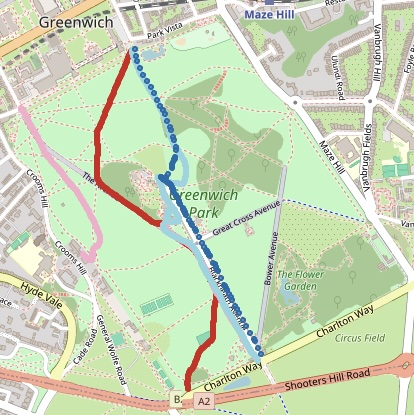

In [0]:
displayHTML("""<img src="data:image/jpg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAZ6gAwAEAAAAAQAAAZ+kBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6QACABIACAAUADZhY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGwkTve/mok5kia0n+87Eyg3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEMAMwAyAEgARwA3AHgAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA1WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAgAIAADsYAAAAp1hZWiAAAAAAAABOowAAs7cAAA8cWFlaIAAAAAAAACgxAAARMQAAw2pwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAAQu3AAAFlv//81cAAAcpAAD91///+7f///2mAAAD2gAAwPb/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAGv/AABEIAZ8BngMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP6stO0nWdeu10+zgk1eXzDIAqAQQFPoOq5wPvy4PcdOk1bwtbw6eDq/kyl3wsE3yudoBYGBuCF4IJ3cEHCkCpvEfj3TvBE97pfguK21GK9szZJCsRisrbBMco84N5kuGUqiQrEgXq27BrmfAeo6PcWi+HINC+1T6VDPeWY/1Nv583m4RXG7ygDKYtpG1YmXGQmB8xjK1f2Dp00qdPay7evU7nhLU3FOz8la3nd8trOydla13fQ7Sy1C3vdPmh1+8uBHbRP5UagyRs8rxgMyqpfKEcEEAKz546Zen21kNWhsNeV1iiuYZG2tsaOSBwytkf3WHPquR0NXbO01PRJovEF3DNYW8Aimd5kIMavjCsADludu1QSTwBXW33naBrUUniOxh1C4W1e6vJ0z5aySy7beIDAQkIGBbv5eSi7hXz9GhUlBVJe66fVrp/wNttjyqGHr+zVZe7Kk3r5LXTT7O2/2opHydrWlzWut3Yt4rvTVmuX1C0aUeXcQtNIzOOMjMcwkTjIKgdQefsT4a+MP+E28JW+q3G1b2P8AcXkajAS4jA3gA/wnhk9VINeLeMtJl8VaRHqg1R1u9PWK20+znk3maV2YlPOlJJNwMKAxAEiR4IBKnj/hn4w1fwfdapd22kXd9BqCR+WkceFjurcvHKJXP3MDYpxuPynA9frcLXjVgpw2Pam4VF7Sl8L2/wAtex9KfFT4d+HPir4D1DwP4qylpeR4MqHY8TLyrqwxgqfpXy9H41l1/TLDxLod2P7T0nVdTj8QiWRGs5LW3CMbi3uG5C/vEvEjLEBZLhc5QAQ+KvFXiXxmrp4ruFWzP/LlDlLcD0fvJ77vl9FFZXhvWPHWj39zJ4bl/wBGvrO60290eVEuLSVfORY5ZZAzQIAiygxr5k219jxxnDJnj6mHjRl9YaUfP9F37f8AAHTwc66dFK6f3Ls9un/APRPFOnaNfafb7rj+1NXtpJdYtIr9nCq8UmVHmryYkZwjDk+S+1gV4PknjGyf4t3enax4Oj1Dw9pjaXYW0unRzKkCmKAH/j6GbgspcQusGA4hDLcoSRXdeGfCcmiaDB4dv7o3VnbwrbxWpH7hIkACr85aSThVyZXfJGeKu+JfGPhvwhDFL4guhC1w2yCFVaWeZh/DFEgaSRgP4UUnHtXwM+IKlGMoYZ79bfLRPa+h7+AyFU+aeKle+6T0uuulunS3fUhtPBXh631Vdfnt0nv0G1J5FBMa88J/d64yPmI6k1W8S+PvD3hq4GkuzXuqSKGi02zAlu5ATgERgjameDI5WNf4mUVzCxfEnx8v73f4S0pv4QUl1OZT7/PDbD6ea5B6xMKp+J/E/wAMP2d/Cy6ubK5K6lcCNFsbeW/vL24ZSw3MoeSR9ik75G6Dr0ryIYfEYqpd7v738jDH8T4bDfucJHnl5fCvu/T7y+vh3x148Qv40nfQdNfppunzYuXX0uLpMFT6pblcHI811NeveCtN0zwF9h/4RFG02304mOKysoswu1zJEA7RqMZjcBi+OFLk8Zr4d8CftkWvx90PxV4e+Belz2/jTQ7WWa307WohGrtGwQK+2RdpLfKQXG0kZPauQ/Zv1v8A4KSr8W7PXPjpodvZ+Ep5HWZZkggaNVRwPIEbeYcttyZA2V+7ivocFlVTDSlV0i4Wvd6+Vv06Hx1bM8ZXq+1xE9F9nZWatovTruftj8RPh54E+M3huw8X+L7pNMght5IriXcFAVyFaMu5ChQwI5Xk46Yr568R/HP9gT4bQmLxf8TdJdocB0GoRTyDHH3YAWrqf2bvB2t2PhTxH8JfiLrT67Ya004hnYssiieP95Huf7zlG8z5SdvPAAr8ifjV+yD4B07xifg58VZ4IdG3p5s9lYWVvOAo3oyXM0c93GmQoIWb5gfmODg/oscRCNH28l07HZOMleMdbdu3lon6fI+v/EX7fP8AwSy8e+KdE+Etjd3Ovahrmr6fYWM1hBeWzw3lxMILd0vGaB4drSkGSOQFUZh0JFc/+2D8TvBf7EnjuXTLL4f3+qwX+nXXiS11ddTFzczNEYLbUfNmvILidWjH2MFmlbzFkVQQF218r+Jv+CdP7LfhPwedb8H6LcNcWzOtxNc3VwJTAMxyMi748bfvBlCZUZVsYJ/aX7d4F8ZfAXQvi7eeGbDxRqWh2SwwyahDHeXEH3Em2Sybm+YorNiT5sAljjNRhcZh8ZB8i93z/rY54S9pDmW2x/ONo/8AwVZ8UeKfFkbfC34UW/2iW8SZ7pp55pDJn/Wyiyjtt5XJPz7q+qIm/bj1291LxV4bitZNRuoGWJtO8Pa+WkcKoXe15ZfYySUHKy4+lfpBqv7Vnxd0vTvJ0vTdJsIAkggSKJyUKrvG4b9oGFYYUHnAFeSeFf2wPjLqfim0tvFetRx6fc5jkjt7aNflbCM8TY3Exlvlw2DsYngVt7egmoRVrG8aM0rdj8jdK0f/AILOafrGoabbXc/g97991yvnafYknHmZAT97wGLZA4yfcV68vwf8VCwig1HUdX1i5W2Uvb3fiqeezCKMM0cH9lhVjzxlbsjoK+vfD1n8SfFnj+LxpeX8uosL1VN9cI3z+UCGBK5KoYRhC6BecDYSAfV/Ffwz8MS6cllon/ErfT3gupLiYOy+Qm4bDK/BUBSdm7C4GQARXjYvO6VOoqfKtPw/y6GNWrSp1FGbv+h+TOkf8EjNM1SE+OPHfxG2W1z+/XyrT5UhY5XM0s390j+Hj3r9gv2Gvhv4S/Zm1aX4E22u32raLriGVrG9htRZmaeGC3DKsUSMd6WuGDFlLO7HljnjPiF480HxFpcGm6HHJfGS5XEiQyfI0e4jZ8oyX27QQCNpz0xnqNJ+JtnoENtL4ItLh7e2Cwm7nf7Iv2eMALhiZGKr1HJEhwzY2JXbl2NnXoRlV0fp+hphYycFJx1OC13/AIJyfspfDPxbPptn4As3t4TiKa8uJ7vfHhTEQkrOoAG6M9MGPgYPHXab8Lvgh8PUkvbfwv4d0GGNwIpYbS3g3DaOSRGmG3ZGAWyADnnA+w/jNoWtfGD4O6V458ILOdVubZYpDp7AH51PIyw+VZR8pHOGPQZr5X8K/sZfFLxjJ/a3i5hZeflW8xi82xg4IMkvzrgPtGI2HyqR0rgxuX4qvXbVVqHRL+kjOpg3OXM52j2XkcN4l+NPh9/DzaZb2Z1FpoBHNEjmO2AcKrKJHVWI/eAKRHg5HTt+tPwT8WzePPg/4Y8YXbBrjUNMtZZ9vQTGMeYPwfIr5p0r9l/4L/DZZNT8X6hF9pyrLI4Vp1Z2x8ok8wZZjx5caemK+nfA/jT4a6k0fhPwRd258i3FxHBGcEwlsFgDycN989csM/eFehl2Chhbx5tX5lrDwhH93f8A4b/I+btZ/axXw34nu/DaeHfsdnpl7NbXFxLKqIsdvIyM+0AFdyqHTggqR0r0yw+KOl+JILXTPHOkQS3FzG1wsC/vSkA2rvcOoVDubaF3ZPUdwvg/7VHwwbQvEZ+Kumxb9N1fyrXVkAyI7gARQzn/AGZF2wv6FY8DBYjxTwD4i1LTZk0tWMt1pgzErN/x8WbYBXnjemAM+oQk4YiuxuSnZvQ6YKHs/h/4H/A/rQ+wLz4DeAfEou9Z+G11NpM15H5VxFBPJHt78IWKRtn5s+Wd/Q/KTn8/vCH7FtxeftEXM3xO8Fabq/h+5W4dRqOnRSwNKzIQzt5XlocFz8jdeE7VX/bk/aH+Pn7OXww0bxx8EnsZvEWq61aWEEEiGWIxTRTSGED5SXkMaKGI9MKOa5PSP+CjfxV+KH7Wnh34d+BtSsrf4bax4evJ5dRkgQTNex6cmplhKfkjWGC6tcgg4JO6vXw+R1q1FYmklypSf/gO+nz0+Zg8cqf7h7fLr/Wp9FeIf2bf2Xvg54X034VNrlxoVnokwntYtP1aeyFsSGGyOOJ2eIbHKt826RGIYsGYV+RfxM/4JofEDUvGmveKtF8YaBDpN1f3Nxa/b31JrkQSykx+cwsGBk2kbjuI3d6+gPBn7SXgT4q2vxD1DR/Dpm1Hw9pkOty+Xr1hNbvp16zJPL/aAUorxFC0incDxtYjGZ/Hn7fXw50L4S+F4vGfg7V7TU/GPhu512TTri/treeDSkla3imjeRVE1xcbfMhgVVOOpHFd+W4LM8HUnHD0knta8X0uuvbr8tzDFYqjXUXVnt5W8u33L9Drvgt+xJ8ENC+F2neGPiP4nsJvFcXnNILXw3pWoQsvmsQVnvtDkvXwhQHzJCFPC4QKoqat/wAEq/2NvHXim68R+NvGPiWBrvBMWlWcFjCCoVQEgh0tYkGBztUZPJ5JruPjZ8T734D6F8N/ir4etP8AhILbxP4v0nS5IrfSZLu/bStSsri5aOGJS8nnsET5UXdkdKpeEP2u/FHivxNfNJZ3fh/S4fix4Y8HWNtdaQtnqIstTt0eWK8hvE3oHc5LALIFxswOaxp5XjMUniZRSvd/ja339OwpVaUPcX9aHX+GP+CdX7O/wX8Hzv4C8RatHpQulumudQhsXmCeaIJQ0j2CXCfcCqqsqg8gcnPn/ib9jP8AZ78c+KI9T8eaVP4h1aCJLeM3t9cSusaEkKsayKu3cSQAmOeKvfB79rP4g+JvGvwx8O/FTVIdY8O+KdR+JcOuWhsrXFzBoFzGunp8sSY8pc9CN+cvuODX6G6p+1DbeH5bfTfAXh2zs4NRjkngmZxhvLK53RRBRn5geJDXj5vllXD1VCpVtp9nyk4+XWIXjXio02016bWVj5m8CfsQeBtOljufAvwx07SxgL501pHE647lrj97z/sg19aWv7Ol7bQre+K9SsNGtIEVSlvl1wq4+/J5YTp/dIrzLSPjj8RfHgvbXVtSazltZdjwWWIU2MMoysP3oyvbfwQaqyxLc3P227zPP/z1lJkk/wC+my361w08DRa5nr6i+qRT9480/a9+Gnwx8Y/Cux8A/Cu8sde8TRa/pGoQ2uuQpfaXfW1vOI7tJ7WSS1tbtVs5bh44vMXM6xncGVSPjvRP2RtQ8LeK/C+r/GjU9M8V22j6Bb+FIY7iKS9GNNs7i0WZBtt5HgvYvLuHs5rloLS6VnVbiQRTR/Q2saHbw+IdX0a4+Sa5kF3BLwZdr4KsD/0ykBC/3QF9q7OzW5+IfhfTr2e6W1vLORxOY181VuIlZGBVQSA3bjI3KTgZrWE7XhBWtsdqoxil2PMvAnwY+GTm48OeLbOXxZMLC1tZ7jXbq4vRPbx3l5ewBreSVrf/AEKedksWKNLbQsIxI21WHpHhf4q6Va3EfgK0todI0W0C21lb2qLb2sUcICRosMYWONVVQqhQAoAAAFbWlaJ/wiUF5r17dfapNib38vyovJhEhCpu+clmYE7kTG0DBzx8iXt3CnmXt06xJkszMQAPxrys0x9XD+y5XrrdeR5eY4l0pR9mez/Em0265q0lzDb3TxRw3cP23dJHFDt2sVUBsYaNjhRyTTbzwz4s0rStM8U394y2yIsl3axxrbrCH2YBUhmITLb/AJh04A6V5pd+KrzUre0sbmcMY4ZYlII3yQPsyvIOVXAwR0zivTdI+KuvtaTWk0VvIFjRIlbPqB93O5/lySOuBnoKmjmOHqz5dbvy2OujmlOfJCO57z8APEVnP4k8D6HpkrNLb6zfWrFAxia0FpdzxqG+4Qv7sDuCuBxX3h8bfibovwh+Hl1431+za/t4JIIjbrjLGWRUHXj5c7vwr5t8HfDvxnZ+MPhn41LJfWl3JNd3vkW7otr5unz+Xlt7DaTIEycfNjHXA6T9ugwSfAl7CdkQXmoWtuGkO1AXJAJODgDvxgD0Fe5J8lK/ZGrac79DxTX/ANvxtNtpLfRfD6WskW8Klw6lAsRkBHyMv/PJh26ivPtV/b7+IFzL/oFha27REq0ccm7JGzqGjcj7/GD/AAntXDad8I/hTqjC4tPMvhLvkEiTuUB+Xd80eFBO7O3POTgYHGpY/Br4bLJOLeynE0ZMTSNJMpO5QflyQrDDDkAgHjqDj5aXEUez+5GX9o4aOnK/uRi3X7ZXxu1aKawtb+KV5pNiL5JRlJ8zaivCYTzsXnr83XivO9Y/aV+KGplZp/EV3HbRFoozDO8e4qSOhkYn5QpJPrXuvh/4ffDzQLa31XS9KAZkhCPNC7zDLEqSrgujZf5iQCoADYCDHbWUFhpTLpVorr5nmzDh2UZYFhvOQvL/ACpkccKNq8cs8/d7KN15sX9sxi/ch+h//9D+oN7m+1iyRb25t0t7WIRRLI22UzlvlVezB1yMdQUXAOTjpPAHiGfSI7+ytZXilni/d+WqlnK/wDcyDLduRyK4rQNWhsb2DUUCzwna2OCrLwQR24IDL7gU28stXt4La91O2WCe7xmK3Pmr5vomMnBGGUdQpGeleVa+n9f12PZT2lZaW7fl8tfke9/8JJI/h+11E6tdy3viRYLjy3DrEHW1RpEhDcxK215BFx0fjg0/RNS+0Wp0TVb42tgm+eT5BIGVI2G3kErg7XBXnKY6HFY3hmbxjoNrq1hrE5trxlWG0W8h3JbM8IUDIPzpGcN8o+UM8e7PC1vE7v4HuwdSIW8VVmjtrU+dM7eka/KSAwK722IMfMVr4/GSlTre1vdR0fa336XPLx1KpUxUZ0lzSdk4rs1ppypJcrUdt032Kd34gsfBun3vi29to9UtdJtJtRMHDJOtrGZ028EclFZGAODgjtX4+Wmi/D4fsjeEf26P2y/EPjzxDrXjzRYPFl9qHhTU/ECW3h5b6A3/AJUdpoUnkWFnaW7r++mjJY7jIxJr9hdS8T+KfEmsW+vEjSY0Ub7aNEeWQYA2yyHcAOvEQU843ECvzm8QfsP6j4Y+DfiP9n34d/F/VvCHwi1mw1Cwn0C502wv/wCzdO1EOLi2tL+cLLFbhZHEQl81ogeGwBW+VZxg8N7Sj7TS+/S3lpuvuPUo8O4mhCzV09Uk/h9dl06eR2N98Rvir8W/2sp/gv4A0DQL7TNO0Hw14rudd1W6vUt0ttamul8pbWIB5ZylujQl9iriTzMnaD82eBv+Co/hTxr8RPDUfhKDwsfBvirxcvhKx0e1vbh/E9pBPdtY2+ozReWLbynkCyPbr80UDhvMZlK19neCvD2j+H/ipqnxN+EFxLE2u+HPD/hyC+14JHYfZfC/2uQTW6IUnvHdLkltixwYXKy9q/P/AMAftAfDr9kr432vwm+Efj7xbdeDrHW3ul8OpodhdxwPeSm4mtbO7nxcpZvLI+FEJlWM7UkOFI76UsNj5Sfs+ZJKza8tenTpt5FVK9XCQShJrfRbabeXf7tjZ8Uf8FSoW8datF4ZPhpfC2leLv8AhEHsPtdw/i65iS8Gnz6na2/lG2CRSlpUt5QWaGPcSCdg7b4o/tdfGv4d6r8aPF/w68AeFdQ0z4J6nfabe3mrXt2NY1q10yxgv7lImiQpbskcm5d26IudqxqASfbbP9kL4keGvihqWq/C74p6r4a8C6xr9z4kuPDn2G2vVhu7+b7Rdx2ksoU28VxI0jMpVyhc7CM4Huqfsx+AL34bfGT4VXGo3Msfxrutburu8nijMumy61pUOlHyT/FsSHfuO3O4jGKmn/Y0HFxjHZLb/gHj1s3lXXJWqXi+nT+vyPz4/az+OOu/E208X6P4f0ye3vNKj8I/8In4bN7c2i+J4vHISCz+1eVIrD7PdJdiTZ8nlxbiOK4I/HH4c+E/2M/Gun+DtBbxd4QPwfT4j6jBqF/eQvp9zqsqWlnpEc1vKk0CoLW8DkSCVfLABAJr9OviD+x58OLT46/DH9pvxde6hZ3nwt0aPTorMqj2d+Y4JIbJrjZlmltHubgxrHuy8nHQV5qn/BOT4JeEPhD8cPghpuu35sfjhJdy3FyqI02jW9zJJLFZW0ZAUwW7zztHuYMPM24AANeh9awlNcjSiova1rdP0Ob2fLG7Vor7tOifW3kdNr3jX4l6t+0z46+Cf7LPhzwXpVn4AGmP4k1TxNNcWxu73VYftSW1pFZqOYrYxtJPKxy8qqqHBNfIun/Hf9on4N+NP2qviF8KvD3h7VfDXg/xxfeILpNdurhLrUVs/DumTzWVr5EbxwMlvBuEshdHZ1TaACT9w/EH4Da1rHxx1345fBzx5f8AgW68YQafb+JLH+y7HWbTUv7KBjtrhUu1/cXKwnymYFo2VUzHlQaxvGn7PXhyy0T4raPNLf29r8adR1vUJJtkTG0N9pUGjssGGww8mJZV8zafnYY+XNPA1sHNv2Vr6dNfn+hrhlRmv3e6/paf1bQ+5/h7caZrnhjR/iV4Ykmc6rY22o2JuyMwxXMazRx7EwqKobaVXtxnFch+2b8PbfxX4UsPijo9qpjVM3vQHooTePl5UAqTvQrtAyBmtf4Ivo9h8M9B8I6LLJNbaJpllYwSTACWSG2hWJWcL8qvlCGQE7SPpXv2hWOmeJdH1H4caqjfZtRieVCPuqflDADoPm2uB/Ed1ex7tWneGxvRqOMrn56fCvXI/FngCXwVqkcWLZRb3KyRFbl0KgRncSDhk3Icqc5IU7Rz7v8AsYX0moeF/Efwa8Q72EJlBLDqG/dS4+RV5OGGC555POK+b/CPww8T+BvHGoafqdksWmTRyW9xHLtIfYxwAoJB5JH3VUjPXhj7L8NPFfgLwZ8WV1oTx213dXK28ifaFIlDoqFxErnGOhJVW3J6Yz8zhsc6WOdKTvHRenl8jmlV5a86S1WlrdGeLeMBa6Pqc3hO+uPK1OCfZHHEvmTedC2QVjAJOGXPTGK39al8W/8ACHJr1wRZXMMOLzEa+c8UbjJVskIuwO+wDOSBlcEH0j9pzw5b+B/jlY+Pgplgv9jvbRIzszlDEXAB2gpjeTtztGAR0rwnU/iFdeN/D2qa9LZXOm+EdM02+u9VuntjO6wW0JmkBijSVtpiUhVRWZ2YKoyRW+Pws6tZKmvejZp9Guq/I3xFOVRwcVtZ3/Qy9C8e6N8O/DNxp+jQx3eb4rAiShIxGyK24t8zEDD5IDdCOBiuGl8YePfiQ1lomsRpcJP5W6ztIHKSzDadpTLSNt+c7QcExEYNenf8Ij4L8HeELf4g+PYk1rwf4d1prPX9X0W5S5TT7MoHM9yqRsZbfYyJeSxOGt0bzDlFmMXzRo+p/G74t/CLwzr+oaHY6ppvinwnpF1qdnZwrpcev6f4305JHQ6tFH/oX2GVdSjKI8Z8iWzeR5JGUP2Qyql7T28opMtqjGbmo3kfSfwx+EN54j8Xw/DG61jTdK8R3OnQX0miXV5GdZiigb5rr7I5WWKPzJB+88tl3EdzX3PafAX4IfCaL+3/AIgT/bJYnVkh+eRYvMbamyNdzKAzABlCqB14r80/B/wu1zQPGPgvxt4m8Q/atQ+H+n22n6XHosZtoJZ7W0n09r5i0aeWb62nH2u1SAkPDBsuisKCvofS5dXvtYufDOpX8dpe6pal83X7wqoOQ7J6EqVwSmeQpzWdbMaFK0aC5n+C/ryJ9u5yt069kurdk9F6H2Nb/tA2d/b3Fj8J9MsjHBMkImurqOCPaYmIfYuS2PLCAFlJ47A44fW/in4ku/E39geJdbn+y6jO1taxaKiQyxCJyrySs53rtfy4yBwNw+9u48v8F/BF59LVJLRrKKUK00N3HhmlRlIcMkzMuzny1C8dd/ava7y08KfDfRo9V8SXsyW0IW3ADTOHL7FA2gvLKzCNQ28vkD06KGKqyj7/APwPu06dzpp5rg6FOMZRUquukFdeXvO/W3waHnH/ABVE+na5F4YAa51ISGwud3nNHNIzJieHYpjjCgEtufBJxu4rw3X9F8YfBfxnZa74HeaO+QveLaurPAdv+sjDhdrIVJXs5TkYYYX7w0nVPD0ul2NxpEsKWl8qtaBcIsgdd42Lx/Dk4x0qfW9Htde0yXS7pnjEqlRJEdskZIxuQ9iM/TsRjiuWdK75o6SR4GLzWNeon7JQSvto9ktX1SstLLra1z0fwf4n8HfHf4Ww6ykAn0rXLVori0nHK7gUlhkA7qcqcccccYr81fEXgPUPhf43vdJ8UakiHRf3mmySkRi7t5wUieVzgE5zG6qF/eJu+6UFeo/CfxDH+zv8Sf8AhFNWv2m0rWTAuqeZH5SW97N+6t7tMfL5U+0RS7ThG8vO0AivqL9o74PL8VfBqXWkwRy67ope407zMASbl2y25PZZk49A4RiDtxX0FKftqSnbX9T1Y3jZPZr8O6vb5aH5B6rqGmeItUsbn4j2D6rJour2ms2qec1v5V5Yb/LyE6qu8/L0rnvhx+z/APBjSNHsdJ8B+BCmn6RFrcEUTXziJl8QRLBeKxwpYmFVRPm/dqq4xiuqvY7PRJ7XW9cg+2QfZ2uLi2SQLNFGpCKsm7biQAgFWKZKt8xINfUunf2RBDHN4et43gu3+aS12BPlTaHbBGRhFjG3J+6MbRx8rXzjNcvXsKdaSjrbXTr/AJv7zwa9CtSdpbdGfnG37O3wBs/B+r/D3UNH1x49U0+w0a6afXJ3l+xaXN51vAN6kLGjBQEUKuFHGea7LUfBfgPVINFmuJfEqaroNvPZW+sx+IrtNUks7iQStbTXI+aSFXAaND/qyPlIr6u8T/DXTtbcQ6LALB7aGNImUKsDgZURhV5XYFHO0DBAGcYXwDWvD+reHro2mqQmM/wt/Cw9VPpVrivN6i5vrEtPwurdu2hyOU16eh6d4u+L58f6d4V0zxnpcd2vgjW4PEOjSLNIksV7bJLHGZWyRKoWZshgM8ZrzW8X4e6v4mvPGeu6JNdapqHifS/GFzKb11VtV0iMRQOEC7RHtHMfQ1ixxyTOIoVLMeAAMk/hVjWrC78OO8etobYxx+awbsmM549vyrOGfZnGPuVpJLT9fzQ3XqtXuZ+m+F/hZoD6NeeHtDmt7rw9Lr09hI940gjk8Rsr3hZdo3AlBsH8Ndx4Zkk1OBvDwdlnQm6sCGwBdIpAUgkLtkUlSPpXh6azqQ2WuqTCzbb5rvtGV3hSiYIx13qO52eprt9JvL1YLbUGBt7kKkmB1R+Dx9DWE82xNWtCtiJuTjpr2bbf4tsKOIlTqRqLoe32espperad42hQxxShba6VsoVjkZRmTj/lic5zjbz0rsdS+JOrap5kHgqzVot3lrezsPKOGwWRFOXXAODlcnGARzXEWOsfaZbjULREmS8cTeSkkaNDI6gOuJGThnBcEE/e5xWLq/iRFVoJZ95IwIrRsKP96YjJ+karj+8a+jeNhThzc2h9XPFYdRVSUlb+uhvvO1vqf23W76XU79YiiIEXKIxBbCoBtUkDljgYHPFWNG+IWmeF7a9m8vz7u8mEnlI3yIqoqAMwypb5cnbkYIGeK8ckv7h7UWMf7u3HPlp0J9W7s3+0xJ96pV4tbOpX/cq3mzx8TnDkuWirI7LxT451vxYRHesI4F5EUfC59T615f4i3QWH9qIA32DNxsPAcIp4/XI9wK3q6jRPAuveK0MVpbbrdxtZ5RiLB4I6c9egB4ryr1a9TrKR5Hv1Jd2cN8Nfh9rfjf4j2fgTTsR316xa1kdgsGxMtL3LDaJWAG0/cXAPSv070H9m/wCEfwwlttR+LGspqd5AqslkkY2ttcuCYkBkfBwCVCKQo3Cvnbwx8L9F8KTL4h1icSXFujfvDhEjU9cHqOgOcjoD2rS1P4keDtLsnbw/NFf3lx5jQw2xDmWVQT8xXgZx1Y8gcZr63K8EqFPmrRSl+h9Bl+GlCGsbM+xNL+N3iXW/il4e8PafBFaaPqV3NbGF0zNsjtJ5lJYNtU7ol+UDAHGT2zP23t7fBqP7M2JodQtZQF37gm7yyQIir4BkUcEdQO9fmj4t+K3iOTw3favc+Ib3w3HbWE9zb6v4dso7nVbQ3VtLBE9rDOs8Tz+ewt1Ro8fvPvKcMvB/DPwVZ6N8JfGOrSjw94o1NbLRJNT8WXMeqWvi9muNShjSx1GLWZdRJiR4Zw+zUxDDPBsW2Uf6v1udTpto7+Tkmrnt37P8szeFNRsbdj9pWcuZnzJEXdQFwp2thQqgjdk46jOB6V4o8cS+Gr97eKz+0pb2y3MreZsIDFwAo2kH7h7ivNvgehbw7eeIQz38luXght9yu0O0BmiiYkIFk/dnAYJkDOMcHxX09rvxE0qSXMMgsoVhMQYRySeZJhXO0qQvy8Hsa+EoU6csfNVFotvXT0OCNKnPGyU9v+GPoucS+eZCRsKgAY5BHXn6Y4xx+PHJ6t4o0fwrBG3iq+ggaZ5PLz+6yoPAALHJVSoY9CecDOB1F3aDUm+x3NqJYY/LlVnClC6tuXAznKFVYHAxxg5HHy18UfEEureJEsrWG5s30zzYZW8wAvvKldohl3bSFzkgdQDgjFGLwSrZhOMVaP8AwP8AM54YVVsS4bI//9H+ofwz8GfHyeGo9b1A22maRNHDcRGPN5NElz92FIY8ZMbkDJZUSMqSflYD3p/+ER8I+GLT+3dPCWHiLTTp+qXP2tHmR/szZijjgBeZ1K7SY0dhvBX5FOPm/WPHvi74katfXvwv0eHw3p+plZJtVu4CrylEEamG1O2R8KoAaYxIPvKkgPOl4Z8BaJ4Zun1fdLf6pMpSXULxvNuXUkEqDgLHHkA+VEqRg8hRX5hiuKdeWhG67vb8vyt6n1+X4GtOXtJR5IP1Uvkk9EntzO+i93odv4j17UPEk9nceFHudJSERvPeXAjmurxgoBykkZEQPUnCuTkFEAFUrOyt7GNktwfnYu7Mxd3c9WdmyzMccsSSa5HxF4ym06UaX4Y0+bW9RZtnkwELDCcDmeY/JEORxzIw+4jYOOG8SrceEdAvPin8Zr+a907Rojey6RpsbG0VIhkhgo8254yG8wiEj5jEuMj5yVSvi6vr20X3HXXzDAZXD2atzdopcz9bfr8jfv8A4iXWq3s+h/Dax/te5t2Mc127eTp1u68Mrz4O9lwQUhVyrDa+zqPI7f4kfCT4gT3+mQ65p3i3xDotuyosIf7Na6mN3zxwN5ls4jTayOzSyI4cA44HP+HP2g9U/ao82L/hE4Yvhvr9nc2d1qMMnkfYY2QrEkoJ2mRh+62xchxlVxXdfs9/sU/A/wDZo1y+v9GtbjUZLsA/a7+f94gBDJHHEioAF/id8MegBB4+qwGR4fCVZPHa9tFy+vqrbb/I+bxvEGIlVlCVow7Lt3v+m3dHwd4Yb9trxx8TbXxP8SfEZ0LSNHmQpZQzG5W5Thin3uQehZjwRwvAr9P/AAL4X+HN3c/8Jzo3h7StN1fyEhNzbxxrcyxIMNnCKyhWbacE5BXPpXj+uaHMNbaHSbWRY5yXiiwSUXOCv/ASMZ9MGvTfhTbeH9C11rvxT+9mtw6xQrvQqzja/wAwXBXHBwCu4LyCBj6XHYWVei6UdLbW0XoctWjGrTlBvf8APp2Xk+yb0PbLSzub2VYLZdzMQo7DJ4A/HtU9za+TpcF9p80YuftOyWG7hlXbFGSrEIfLYkkDYSQpU55GAU1I208enwXUdpeTaZ88N5HEoDOw/wBbGMuFyPukEkDoeTVBmZ2LMck9TXxMvZ0vdSu/w+4+dbpUHaPvSXde79z36b27WO5+33Wpx3MXhyxmQ3zvcXky3DOEaFI1iXYx+VGjUgbMAMgBHzZrha7TwVA9xfNZxveQG7Vrf7RaKD9nyjNvYsCq/dwuQRuI4xUOoeLfhxHdLNfy3ciR2s9tEjQqlvPPZSMpZZUhVmkfB5jzCQDtGVOPUWBqYylCs5JPbXZ+lj1I5dXx1GOIW6Vnvqlez7LRW6K0Tkaoa9aafe+H7kGxkudQJt44JYcs8YSQ7SVGcopkbfgFhGz4rUWOabTrbWRbTW0F4u+NZwu9RnG1thZcjHZjXP3vj+w8Ea3ZqUmnvXHnJFBHv2RAhTNKxKRQxLnmSWSNOMbs8VwYJVqWJiox95dLdDzsJ7WhilBK7vZpdfLT/hjh/A/inUfBXiq0R4v9Dv5GBiAzNHI6l5FAHVcIW4/j5Py5x9x2l9LA8Gq6U29o2WWMpghx6Dth1yuewORXwR8Z7m28E/EXwp8Or66juLjXrS6uYXtbgy3UMdr5bW8shDMVEkTNGX3YaSNtpIfj2f4D+J9ei8HLpdpeWc8dneyPPBMWnmt4ZlAWPcWVi8cu8spBOGUKduK/QsP+6fLbSXTz6n0FShFVHySVvw0/z7dz2X47/s1Q/HnVNP8AF2gahBDFNCu8yqzBo2jZVdB0zhlIyBgqK4DS/wBizwL4PlGq+JvEYh2FWQNthRSrBgc7k/iHT6ivMfjh+0N8Ff2UvC8Np8TvGF3pVvPL5cEU7z3m+TJlclY1llLP53Jb5dqDpg54XRdF8JfE7wtb+MvBmvvqllqDJdWV1HMJIMK4bAVNm4AjaQ3I6HBFayhy0frVWnyxbtd6RbXZuyZzxxtDnlShVWnonb06dvkdT+1zpnxI8d/H34f/APCsPFV3F4attNum1nUbbUbxLPTrnT77TpozLa2Stb3st9bNdQCC922+F3DkbH+ZvCfhD4t+Ifj6PFfxTu7U+FtK8Rprnh3Rr+7/ALRivBCNVgWTy4Z7iJYZ4JbC9tkdLIQXdkAttE2ZpPoOb4OaOmoXCeIPEMlrJGp1SWAyxwS7II9rOEVfO2bBj5R+NenW/g7w/baDYa9pWlLPcWbCGNb3CmK1jB2yooYu4zgJlkOGzxWSx8JWUfTQpqCiqjfuvrstvPT7j5y/Zh8FaP8As8fCDVPhj8IbnWtK0DTne8jt9S1BpobVjdXBkEYYsI2O5UkRH8mR1EqxJJJIT6/4f+H+o382laZZ2Zl0kW6Ii6esdvBZwwxqsUKx4RYyEVVWLagRQBxgLXffDy+1LU7LX9Y8OW0eny30sMiX8sDvHJl5AY2jEw/1KAAbJEUl/urjn2Lwxri29+PB9wpi/c+bayj7rgf6xADu2+WSNqk/cIAzsbHk4+9St7Oto1pb0/A8vMMdQpzUKTTv5vZxTTsu19NelpQWx5vpvwf0620a+0fxtdRPHdSZVbRWikSIEFU8wHcQcfPuyG6cLxXu2k6VpFlDHNpsQH7sIrnLOE7LuOTgenQVi3Ph68LlYWDKe54rqrO3Fpax26/wADj1rnwykm04WMsz9i6UHGtzve20VotoqyjsizWJ4g8OaJ4q0t9G8QW63Ns5BKNxgr0IIwQR2IxUWqeK/C2hzi11rUrW0lI3BJpkjbHrgkcVYl8QaBb6eNWnvrdLQqHEzSKI9p6HdnGK67o8VTs7p7HnWreCNI1vxh4Y1vRbsWi+GPOEVqkWYWjljEe0AFQpVeFIBwMjFeu15vc+P7Nsr4XsZb9m48wr9ngGMYJdwCykdGiSQY/CufurjxZreRqt99jhP/LvYfIcH+Fpj85x2aMRH+mDxEYrV/cTicdS0UL6L+tbIk+MdjY6noY0cT2i3F+Ut5LW5G77XaswEsYUfPkKSVZQSvpya9E/Zs+JVxrem3Pwx8TXq32r+HlAhu/MEn9oafkpFcZHBdSpimx0kXP8QrzTTtH03SQ5sIQjSndI/wB6SQ+rucsx92JNcrqmga3pfiXSfF3w506OG+0hrq8aWN9gmaYgy28qf887kZJdQSkqhyM105djv3vI9menkuYKonhp2XWO3bVX07Ky+SMf9pn9n+x034mW3xO02V7TTNacQ3iooaOG+OSkgB+VDMTjfjiQ45aUY+YPhomo+DPGj+BrhkjTayOjE/vHUFlmUt1aUbjsUcKpyfkxX7FWlz4P+NPw583abjSdat2Rkb5JE/hZTjmOWJwQcfMjr2Ir8bdW0rXPgR8W73RvGbSzGwVhNdBEX7XaTnMNwSW3OSVwRxtdWSNSASerOcNz4eXLHU96fNUoyp+Wh9ERoRDHpa3zm5t1hd5P3fmsoPVlC7QJNrA7VXvt2kDFLUvE3gq6lh0XUbiCdrpzGsX+sG5WMZBwCFw4Kc4+b5evFVtV8TW2i+Hota1ZoULqhKRyF1YkAsIiE3PhclcKN2P4RyPNPgL8B5PjFJc31xKllPaCR2hDt5l3kRMvmTgtlWBXJCZBGV64r57hxVVOdvh2t0/pHBllBvmlL4f6/I9Y8N+HfCWlSzzeHY4i4kKSMrbyjDqnfbjPTiuf+J/gqLxZobSQxiS5gU7V2g+Yh6of6CvGILzxR8FvFF3o+qxIsUNuMwyMId0asREQvzEzcMjAcZAB6An6psL221Kxh1GybfDOiyIw7qwyP0r6xUqVWk6HLZdkd9bCRUOS3un5yQeFrKxs2srVUhY3CzMyxhThJfMVTj0Hyj09O1dNXsHxX8HDR7/+3tPQLbXJ+dVH3JP8DXj9fC4rDzo1HTn0Pla1OVOThIKKKK5zIK6/wx4I13xW+bBAkA4Mz8IMdvc+wrsPhx8Om1111nWkIsl+4nTzSP8A2UU6/wDi/wCJNFuLy3WwtrOGAiOKFgT5IDBS77SM7TkMqgYyhBIOa9vA5VzxVWvpHou/+SPVwOWSre9LY9F0j4aeEvCtsdV16RZ/JXc8k5CQpjvjpj6msXW/jl4fs4JIPCts+pSx4VCuI4PusRhuT/AygBeWG3ivPPGFnq/xEv1ls7C6uRcC2eKE7jEk0UhSaBm5iXOwEdCxwQDxX0f8Nf2KvE9/LHq3xOvBYWKASGOJtsrYKMNzcEcpuJ+Qq5JGQTX0dKCp/u8PCyPoKOEpUo7WPjXULrxj4/1MWt5czahcZURwxAC3VicxnZgJtLBNpfkpIOcrX2F8Mf2OfG2qxveeN5/7Cso/LkjQ4Z/3OdhJDKV2x4jf7hIXhiK9evfi7+zt+zppq+E/h1aJqerWpKqsUY8wE4UtuCqoyCMY2LJ0DZNc1448c+IfidbndfyRafeQfK1rL5aqCQVKJhkO4c7m3MvQcHjkxeLoYW0qzu30RWIxaopXVl6fp/XoXPiLo37NWn/BzxH8FPCzWd/JrekX1tcsLKXWmkTyHMhaxs5Irq8LoGBhtf3k33M5Ir4X+Avw8u/Af7Pnxa8J+FtAWy8OtqHh7UrXVoPBl/4Fnu7uS83Xkb22rPJdzm3WOKT7W58o+fsXmOQ1yc9lf+MvCN/4C+1ajaPrGmazost0LVLtbWe+066tnligtVM9xJGZC0cEfzykBF+ZhXO/sw/Cj4Kte/Fn4jWnw+0bwd410XQ9Cis9Ph8M6pp9zZ2Uz3sMt7BP4gsrS5Y6hGZLeYRRCNVtwrySMWx6lGanTbX9aCqpKasfVfwo+yWHhOXWbi4MFvDLctM0rxFWAK/vJJFH8CrjIYDGcg4GPWVKWs5FzcZ+0yfukfaMYT7iYAJ4Utzk9f4QAPKvg7Hf2ei3GmPEUigu5wyysoeMt5boqrGNm1lYscEbTwAe3sEC3ZaUToiKGHlkPksm0ckYG07sjAzwAc84H5njKbeJn6nzuMj/ALRP1POfHesjQ/B11ZwXks2oQwxcRNGLl952hiNm1Q+1txCAABiuNvHyp4P+HWq/ES7XwxYSParHAbt5UBBABCRrkxpkFScfM4O3jHSvXvjy0uoRaVouoosQwZ5SrAoJMbQgZmi3AjfwMMcD5e1bPwlm1f4e+Arn4i6T4N1jxW+r332SK00BI2uRBbKwMpEgiBjWTcrHG4FkBz1r6bIsJ+7vLr+SPbyyn7Ohz9Wf/9L+n7xX8Q/D3hO6i0eXzb7VbhN8Gm2S+bdSrnG4JwETPBkkKRqerCufbwp428eJnx1dHR9NfppmmylZXX0uLpcN77IBGAeC8i16Zd+HNP8Ahho+o6r4git7Z4ZWkvdRSNYmvF48t5FXLl402wnOT8gxkYr56sviT4V/aKstZ+EWjtq2k3d5EUiurRlSVYcqvnfI29U3kK4XBEbZ3K3A/HaGQ1XL31ot30X+f9aHt5lneMxFaWGwVowX2k913vpb0WvTfQ9N0XXvCF3ouq+BfgtrOljVPDNndW1voNtskj+1lfNjVoomUoyspH8IYsUJB5HyZ+zZ8IP2qdN17XfiT8c/GjTLeK8Y0m+t5PsREm0M/kN5RTy1TAVQgzlScZr3z4N/AD4V/s9Qf2dBd+VfxA6kJEXyYVjtw0Q8wHIHMwGXYsWQ4IANbnjzWdI+Imjz+EbyO5+w6mUga9PybZCQYyFI3Fd4UEkAc8ZFfRXjCn7LDQ5lbWTWqX6W6eiPErctOnH2cOedvia0spPo171+l/S2it634S8WfD6PxBJoXhLS459RMRgVLN/ITyriZHuSiA+UZAR5+AMllPzZNT6/cx+HtQm0i6MbXqTpbxxNKsSvI5AGXP3Rgg9CfYV8GWt34l+H+vW95ZO7Xumz7ssBuLIcj7u0YJwDxjBzX1Z4vey8URw+KrGK9nsNQt4o7ue6+cCSYyBFWUDkJtaEg4K7Y+u/NejTwVGryKtrbbz+7+rGGCSxlNKtvDz+zppbok9kl18j0LWNa8N6LAdJniXWdUtXWd4I7jyYbdj8uxpFUszEE7l+fG1eFBBrxO8urzVddmvHtDZfagftMcIAt8hQqPE+/wAwEqArKUHzAtnkCrNha3FskjXc3nyyuZHbG0FmxuOOeWOWb/aJ6DgX69zol2PWjFR0R6Z4RNpd+ForLSrBrcaUuy4kXHlGSV3chRnK8EPtA2KHCrjbgaleX+H7aFvFOn3U4laOOUMyxPsJwrAdflIwzKQcDax5HBHo2qano+mWEOsNco1ndRrLbuh3mRXXeqqq5LOVx8igsTwBXxeb5fKFVSpx0fb/ACPIzXCycvrEVe+/r/wdzok1rxbYaDKnhm+trFIGMk5uFU+Yso8pFXcCufMZSM4GcDpkHw6XXdI8L6DbeFIdNL3l5NBZ2720L3N3NtDeXGBGruyorPg9FQn+EV3Sz68mgP4v8awf8IboUEEt3OuvwSW8t3bRgbUV42xZvK5Cp5ubjAOLc1wlz8SI7bTNP1PwZpsfh++vrSSa/wBbdHt3uJ08uKKRLaeMNIUEaEfaQiqTkQfOCv0GV0p0qMYYhWa2/wAvLTsevl8pwwapyly36d1q07Lezutdla2x109zAvgdV8UX9nYDXLo2EENnqflTyCDysSwyRxuXcxo6SR20csiAr+8jIYrUjk1TU/D2o+CPAOly+APC9w0AihMsV5fyiF2dpW3LLHDJI2GMheeckBt8bKBXMaV8L/Et9dW3jTVbeZLiFYozq9+ga/ljibcqYAUpHnIAbYgBwqFeK9kaFtlx5K+dPbwi4+yRMhuXjY7VKozJwTwCSq8deK480xlWlL2WGtzPey1/4a39I5MfiarqRp4de9a1+ttLXe2nfSx57qfgmAeH303w+ubpmt3Ms7tLNcNbuGXzZn3SuTyNzEnnnIJB82+PXiTR/wBlH4C6z8dvHM89xfG2T7LDa7YYfttvMr2sLZxKVeYBHZct5ZdtqBSR9PX9/wCH9HsYtQuJRa281sbe5W6ZFj86cAACUc7l5VRGfmznsK/n+/4LYfFaPSLzwr+y3osUNtbaX/xObqGLYUVmQxW4QJ/q8Bp9ythmyrY27S3kfW6uHw803zX/AAenXqfT+HWRTzPOMNgZO8XLml2UYay97q/hSUU17yd+hT+PQ8D/ABW/ZV+Hnx68b+Kbu31q2tokjvLG3jv5bzUdRRVvY/IZ4leZpI3LfvF2lW69K/TH9i/xT8DbL9jHQdB+CesaneWWnXFzp0sV5ELG/wDtuPtM8UjQ/PEEMhlxHK3ytsEmBx+XGh/BTWpP+CTGleKbmzvddvpJ7rVNLtVRon090u2iR4vLwzr5ZluBuByGOPlxj64/4I36vq3iH4L+NvAM+nWdzommais+matLbMGur68ikWZ5AzEloQsShhtbY23Pp+0VqtPHcI4bGzbcacoXjpb+V+fV216vpc/Js4jDKeMcwwlKS5VUqxUklpaUrPVaW0vZdNHsz9CNa+KXivWRgvHbZUJIYF2tIq9A5JJYDnjpyc1BdeNE1jS77RdbgRbS5shbQrZp5EkJChRhtxUgYyuIxt4HOBXQz/B/xHDLp5kSKQXUgFyLaVWjtV43HMpjdhj7oWMnjB9++0T4UaRph1G31WVL2Kbatq8atDNCBn5i+8/NzxtVQMd6+YxmJyj2UU4J21SSt/X9djTC1MThZOcq0V81N6NK8Ur2atdfD7vyT4D4TmDUPFrwy3ctrNaq98LWIMsciOhiwwxt2ZlUr3ynHSvoPUNM07VoBbanBHcRhgwWRQwDDoRnoR2I6VcgX7PZw2KszrBGsYaRt8jBRgbmPLH606vlsxxn1qs6rVjzsZXhPkhTvyxVtfVvtotdFrbuYkGm6xYoYdK1vULeLGAjOlyQT333CSv+G7aOwqOXQ59QAGvalfahgEYebyUKn+Fo7cRRuP8AeU1v0Vx8zta5y+0ltcz9M0nStFtvsWj20VpDnPlwoI1yfZQBUEfh/QYbxtRhsrdLhm3mURqHLHvnGc+9a9FSQFFFFABVDVNMstb0y40XUt/2e6jMUnlsUcKe6sOQw6qR0IFX6KDSlUlTnGpTdmtV5W2OR+EvxAg+FfxfvPAs9vcW3hzxBdqsc1wNqJqkqqQ6EfL5d3kA7ek4xtBc16r+1n8Ep/ih4KXxN4UhDeJdASWSz2gb5oXX97AD2LAApgqd6gBlDNXmHjLwZZ/EPRovDWqXUltAJQ/y8qwIKlWHoQcgggqwDDpiveP2cfis/wARfB7aVrUpk1nRT9numddjzKpZElZcDazFGWRcDbKjYAXbn6jLsZ7aLpVN/wBP+Afd4DGfWKftY9LX8n91tbNry06H58fBH4f678WtF/saKGaOO3W3ezug+PKiwxT5SojVlDFWYR4ZSE+fYRX2n4K8C/DD9m3Tw6ym51r7PmRA/wAoJHViAqqp6AsMAA+WijK1F+0/8V/EfwV0WwsPB2nx20GuyTQi8jjLBLsqXCbY9pDyAEqe+G5QqN3w74vuda+MvgqHxJZx3aMJX820dwfN5A3kZ2y7GG4BjtcZ6kqa0oYWnh3JQWu//DHpU4JXa0iz6H/at0Twh40t7Dx54cv4o75IxI26RI9iZRWBZgfLZ1IAP/TMbcZJPhXwZuL+LTLvQDDD9ksJmWOaK488M0hMhUcDhQwGe5rzaf4VfE/VNKsrS8niXyR5kcEkx8i1+ZtiKoVtxj+XBOflBTO3Feg67q+l/DKwex0pjcatdou+R+cBc4JAwoAydqgAd/rVWtGletNWX9aCr1oUqXvPY1/ij4v0vTNKl8PlVuLm4XBTsg7E47+g/pXxiviTzp3tbaHdJ5vlRZbCvjdk5xwBsbpnoPWuuuLie7ne6unMkkh3Mzckk152fC9xHaXaiSWV4Y2js9xUH7qsGyoU7g+QCT0r47HYyWJqc70XT0Pk8RXdWXM/kdjp94L61Fxt2HLKynsyEqR+Yr3HwB8MptYZNX19THaDDJGeDJ6fRf515v4K8NJq+sWmhWibIc/Nt7IvJr7giijhiWGIBUQBVA6ADpXoZNl8azdWovdWx1ZfhVUfPLZHn/xD8aW/gHQY5oYx5k5MEA4WNGCMVLZIAQEAHkdRXA/An4Ox/GvX5dbu5Xj0FTm9kkYcyKhExEittIkDANjGcg9EK1Z+OOjXP9lL4yhf5dLjP7vzJI+ZGVdwMbx9FJzk4xXzJ4z8L2keh6b8QPFnhTQvHUOkHULdNI1vw5qHifToZLsWk32tWgjuI7OdVi2NJcmOOVGASZPLkVvpuXmqqD2Ppovkpc0T9WPFHxn+C/7N+mN4c8Aad9ovPKLwiIboyhVmyDkAJ8hbau1WwdmTXwr8Tf2kfiL8Rr3yda1FLK2t3GyC3JSEMxYIGk4+8UwCMHy5M5wDXGeJdS1/xF4F8NWcfh+w0m/u9Ih8rT7a1th9nhy3keQlpeXqxwyRojoN5XY2HCElV+iPDXw28N+GGiutHt0ErlTcSXC+ZI+1CBt5CxndgnauMZGOQR4+Z5p9XfI16Jf1oYVcXCjFSkrt/wBfI+VtL8GeLNZn8vTLWa3t2ZNkssTqoSbakb/KCSeEZzjAZVY4UMa+vvDmhJoHh618G3Ess7CGQeZGsiKEz91XBPl7Q4WNd+4KPl+6cdSq3K3LtI6GAooVAp3hhncS2cEEbQBtGMdTkYztQOpQ6LdySSos6pM0cqxNtQclMpuy20YzgjcRxtzgfJ4vHVMRaMloeNisbOvaLVkfI2j6b4g13X5rDwY91p+sxXjT6XPqc8KyW9+8fmWpe1mmSN3W42sqHAcDnjca2/2SPiv4M+NHwa+K3iDT9U1fWte0zwvGNVu9T8ZaL4sMTxJNKEiXSLmVYELq7ITHEkmPlUbSB5MfCOh+PPDg+H15qd3p63kzzRX9rd2UTWZWCVGmfzYLpEiMDSRXBlhkCQu7Aq6q67HwN1L4taB4i8Z/D34qQ6/4w1Kz+G8Gj22tx6r4ZvtH0rSr4Xcdu4axg0q6k8+e02N/o0rZRNqKpY1+i4GKjQSPbrRtJLyR9O+B5tJuo9Q0I/bhLe/6RKZEMBCsiRcSRHCNhRgblfqR049RbyLycf61Ws5OgLopYpjsQJFw3uob/aXjx74THU9R0jV7su6XguXtUe6VSB5SjblYyoIDMQQG5x1Hb1rUbk2sX2+SaOC3g3STl1z+6VT0II24ODk54BGOcj85x7tiKiXc8LGq1eaR8NePdeHijxrqWrWMMqTQbbeOOVDls4WMeXIAULHOQyMBnB2msz9ov/gmf8Pf20tXtfhr4Q+L+g+F/G2lafp0l3pWoaTa63q1np+nJLEot0W7srq2s55bszyrJ5qSTOjgqCgr2TwDptz4w+I9sLh1Qy3FxdtF9l2RwvCMLJFJJlWHm7HIztbJzjJFfM3wdTw3+0J+0n45j1j4n28viO0ih/tK18Eau1jcTrbJFaW19FbwrrayW81rDCs81rf26CRIUubNZvLKff5VS9nRXTRI96ouWnCn2R//0/6p/ix4F+Kg+Ot/4Y8TWujXfw4aytp9M/tA4nF3FIplTuZFEKyE7u+M5HTzXQ9e+H3wu8OeJ7j4caI95LcrLcWz6fF5Bzhvk81pD9obHERC7RgLkdvtO+udN/aL+B8XiaRIxc2JZpEDb0YJyRkbsqV2vwDyMDPWvl/xT8FfFtjpJ1HSm+36vCbaRbOG4VREjuFkGz5cjAZcyEdMjbjFfP4nBx9pzWvF/ZS09X6HY5vljSk9E9rJpPS7V9tltb7nY5DxANc127GuHUYb/wAL29laywahqDqsqTupcMbeIZdp4XilgVUBBZ4yQVyaGo2fh650959Lu7m7UMLe/iu1EB8ubCxTxRD5kiLkxnPzglc9KuadfDVPD0egadpscl3HcfaY53xHPHaxpKWQhsEiGR2DDqiycL8hxk3PhfVPGiLDoum3V7FI/wBjkniZ4rdFkZd291I3KhQFgobaVHQ4roiklyxR2VVG/MlZPXp89Fsr7LtY4XxHo+oeJLy3kWJheRL5N3LINkT+Xwkgb+IsmMhQQCMEivpD4OxJ4n+Hd/8ADbTjHFHEHW5uQC0c3nn93NEpzh08sqCJNqup+U8YueDfg3H4hgOoeK71bq3EjxrFAMQyCNipPOcq2O5bIwRsPA7LWfip4F8ERHRPCcI1C64PlWuCuemXk6dBjcSeRgkGrw2DhSSb2/rRf1seXTw1KnJulH3vyPni1F/AZdN1ddl7ZSNb3Cjp5idx/ssMMv8AskVbqpeX3iHXvEs3iTW0t4pLhAsi2+drbdoTggcqA3zEkkEDgIKS0fU9bdrXwlYz6rP8yp5CHyfMXqrTY8pMcZ3MMenQUNpeh1yaSvLQfeX1/plpLfaW0K3MSEw/aP8AU+Zj5Q+P4ScAj0rutB8SX3xJ8A/8JFoHhCz0nWVg+z+TqabJdGhkkxMkU9rMJpI5VVdiIbdJFDb2H3K2LPwN4K0jSDqviSS21y4uBFa/aLpT/Ztu12dq+UiLIWY9PMPy8EeZHkis74b/AAb8Tapf2X/CZSx6fFpV1HEJNwa5uZrU5ypBARWCnIYMWUnKjrXM63OnGn8VtPy9LCw2Jc0+W8YvZ26rrHb4dNu4tt4WtU8RN4s1O5udR1Dyvs8Ml1KWS2t+MQ28Q2xQxjavEaLuwNxJrpZks7ZrS61IJF50629tI8e9/NkBGI8AtkqDnb/CDngVuW0azT6XqukoFgndpLi2voJBcJHx5aeWCNhIyWL5IA4XPSaxuZ9b0qXVfB5hvbS61BxMi3TLCrdJG34kJCgBQkYIzx8oBx8eqVSdRzqybl5f59F5fgeIsM4ydTES1Wjs0rbq0pPSO2m9zc1y9MPh2/8ADd7efZILcRSR3tvKqN5SANIXMsRSIA8ZBJxzuU4wsdxq+t6npurTIlzpt5CJ2uo5vL2oBmNUQAs5JOediqMnOflOpa6VaabqN5eWc08sd2ix+TMVMUaKMYRAoHPUltzds4AA0WZnbc5yT616E25JKbulpbppt6nmYzPI8ip0ley9EvdS9W0+75dNI2OSvb/Qvh14R1DXvE2oP/Z2mCbU7m8vdp8iOJCzMNiKqJGgOAqjAz1JNfxe+K9R8a/8FBf21Z7nQYPs99461ZYrZSoP2WyhURo0gX73kWsQaQjrsJFfvz/wWB/aa/4U/wDs/r8IPDdx5eu+PN9q+w/NFpkePtDcdPNysIBGGVnxytfI3/BD/wDZ7v21bxF+01rce21jhbQ9LDqDvkYpJcSrkZGwKkasvB3yL/DivIxj9tWhh1st/wCvQ/dfDapLhzhbMeNsX/GqL2dC/rbRJbOdrpdKfRH72X/gHRrP4dQ+APCttHZ2em2sVtYQIPkijtlCxouegCqE9hX4OeANT/bgsP29rO30+bW7bQL3xAkcqnLaA+gqwAGPmiFy0QIHRxIexNf0SV+LH/BTr9mn4ufEe30IfDK0TVdIiubie60n7StqZ5JEVY2DNtT9wd5ALDhsDOOP1vgDG0pOtlVflUakXZySaWnyXRWWm3Q/lDNFNtYjVtPXzP2nor81P+Cef7Q/w81L4X6H+zd4j8bxa98RPD0E8WoQSvI0jbZXYRxTSDZcfZ48RkxO4ATP3cGv0rr4rNcsq4DFTwtZfC9Ha110kr9Hujto1Y1IKcf68gooorzjUKKKgvLgWVnNeMkk3kx+Z5UCGWZlzj5I1+Y88dMDuQKaV9jSlSnUkoU1dk9TNGLe7tbW+Ekf2ssqEROyjYu472VSsYwMAuVBOAMnioGHnxQyqzRQXFqyz2zLsuUkkAxiaOTCFBkfJnnkOMCsyJtI8L6JFp6ullYWo2oHfCLnnlmPJJ6knJq7KO51eyo0l+8fNLstlvu/J20Saa6omtH1e50VPt6W9hqHmhiIi13GIgfu5Pk/MRwSFwO2anVri3n1K9vLm1+y+Uz2iPC8QgKKTmWUStuTjnEakCvCfE37QPhbTEaHw/G+oTDgN/q4unqeTj0x+NeR33x38ZXVrLaukBl1hWsrG0ik+yyu7YVzDMwYLIob5d3G8jAPSs/bxVvI9XK8PiMZioYejSjaT25VotG9Xqkkt29FfW1z680XWY/EUOnapo99Y3FouU1AQwyvmVeqwyGVdoU8fMjZHPHStHUp9Tt7S7uNOtIbmRJVFtCLgxl4sDJYtFhWBzgAkEdxXP8AgPw/d+FPBun+H9QuJbq4gQtLJPtMm+QlyrFOCUzsyOu3NdZWjn5JHPmWJw8MZUhQpxlSi2o6Wuk/7vK/+B2JLvyba48kCQoLZ7l5Qm6NBHjKkrn5vQY5HSsGx1y7ttW034z+GdRjutM061nS5jiQSrdW2fn2OnO+PYTs7soBxg1tAkHI4xTrtk1D7P8A2jHHc/ZJVng86NZPLlT7rruB2sM8EcitKNb2c1OOljPA46hQmp8jT62s1bro1o9rO+nY+iviX4A8L/G34a3ng3V232Wqwq8M6DJjcYeKVPdGCsOxxg8V+OPgaTXPAHxL/wCEO8UH+zpUuJdPu7ZWVLc3aoCpij3ZCMqoUkbLSB06bsV+qvwg8QnTbyTwVciCGxcB9MSJRGI9q/vINvTjBkjx/CWXAEeT4T+2d8EL3X7Nfix4St3mntIli1a2gYo9xaxZaOUFQzFoCTkKNzRnjJRFr6tTVanGrT/ryPtcPWpyV4P3ZLT+vLZnJV8ifFRbv/hM7mS6jMasE8vPRkAAyPy/CvXvAXxP0nWtJtbXXLpE1BmWHps87IGyVV6qrgjGQBuO0ds9Z4x8I2Xi/TPs8hCTJzFL12n0+hrkzLDPE0LU3qtf+AcuPw0p0+Vbo+MKK9Wvvg74ttsfZfJuB/sNt/8AQgK2dG+CupzbZdauUgX+4g3t9M8AfhmvlY5ZinLl9m/0PCWDrN25S58MZtB8LwLdaxKUvNR2CJQjNtidtik7QQoZhwWwOK6WT4pef4qk8O6ZBFIsF7HZv+8PnHJUOwjC8KhJ5JwQpPTFbXiLwCdYvI5rC6WzjECW7p5W87YiSm07l2kZPUGvRQAOlfZYbDulTVKOiX4n01CnClTjFHk/xon1Sy8Etf6RNJC8M8W7y22bkY7CCQyYHOfvDoB0r4+g8ASfFjwQmm+H9Mt/EOqeHtWg1i1tbzSdP1C2nNrDc20ga31G5sbMNFHdeeszXUjxeVuSNgSp/RK6tYL21ksrpd8UqlHX1Vhgj8q+fPEn7POm3nw/8TaB4clF3qeo6JfW1mNSgs7qE3hgf7M0i3EDRtsnEbr5oaNXVWKnbitnTftYzRvGa9m4M4zTfidq3xN8D+HvFsMr3WpLDqWjXJsZbKVY7rTLj7OwFzZLFbtGypG2LYhEI8s5eNjXvPgqZG8M6ZdW0Mksl5HH9plOzzPMSLaXlORuPyBMjcc4/hGR8e/CGbxT4n+H2t23iDTGs/A2mzW1xoEt9ea3qr23mQxxeR9uv9LsLe4tiyTyBbW7uI43kVEKqVWvof4L6xYRaTcaJNdszrdFIBMXVSpQlRCsnzY2xs23J6MRxXzHEmEjFe0irann4+lF0FOK2Z6zHYaeI00QWKLZ2qQtCNqeSDGcoqKOQYiikfKAPl2nIOGzSRLC+uTWLG4tUmRFPl+aUB5CMW2gSbFYAso+7u2kYEqR74U0hL53urdYXkceX5zKD1dQu0CXYykhV77dpAxx3jnxNoOkaX5+pTtJbXS3Fn5UZj8t36NuZsYKbSuAwHJyCQMfIQpylJRijxKdNykoxR4/8M/t/jT4k2t54J0/T9bub9r++ttHnuTawysYsmK7mSO58qOVQ4fMLqS5Qjnjs/DnxA0/X/gD410/wt8BLf4XWd3rL6ddXmlzaV/Z+p3+i6uthdw/6K0NyzjybjZJLbKhjjbLDKq3zb4y1KwX4Ya6/iNNG1lr+wsNO8q5i0+eF5nuIpwkseo6tpMEr/6MWVUvUlBQPGpK8XPhD4LsPCHwjvdPtvD+r6da3N9HLdWkFnqumaXKbj7XO72cFzrus6fvL/NM1pOJXYkt8rbT+p4aKhh7L+uh9TUilUjFdLH0z8IoBb/D631cWQa4hN75EKKglSNpmPlKzED5ii5ywBOMnirfxcv7/Q/B1zLodlHO2oSrBcbvlXbKvll2IZD0CpnJxx2HHPafdeIZ/hBba14W1COCWC3c7zLCYQiSZLPIVZcoiFTzgZbdyARm/FmeTzNJ8OanqVoplk+1TC5ClQYowqqEyn7t23n5snPTgAL+f0qXtMWvOT09Dx6dP2mKvp8T09DxfxP8S/DHwn8L6zpvi7xKvhjxLr3hzX7Tw7c3l3u8y80+C0LJbqz+bJczyXluII4N0o8t2X7taPxE+D+gan4JufgB+0podrrml6Xrp1Sw0WfVtb8Tw6Pm0ihWFNVl+wX8paT7RPslBjVJ0VchEEf6F/BnwJ4StP2XtYk+I+nadqGj68iu9lc2kc1lIZ8CPfDKGQrudUIYEfJk+g/PzytH1G3t7XwvYT6fpwjzp9l4eaG2ggsY/lhjFtGIo4Vij2phExx6199KoqdJJaM97k5puUtkf//U/p2/ZD+Ly+D/ABiND8Q3n+iX6iFyC7KGZgEkcMXZeeMuUChj8uBmvdfjX4Y8c6V4xk03QoZp7W6gZLT7EpidIWKlkeUFVRFKgKCVAxnJ3Yr5P+LkPhzwnY6NbW2+1m0eSMQhdwkMBBQqkj8P8yqJMsSFOW+8ufuWwul/aC+BMWo3Ain8QaP84G0lxg8Hay7gZIx/dHzg4xivCy/FLE0b2s1t/Xp5HZRqKtFVrW6f5dv69D4l0XQfD/hbQbu31HUpmCXkkLMInS2ggnbEzq4Mc8/lhm2ONicfxgDP1dqWiR69o0/h+y1APrSWirby3qpMqmMBDIISoj++CGbZ15+6VFfH+txm1u55LryfM5uRJcSOHmgCBHtI4zwXYkSIuAxIIPSvbvhxPolxpUGkX8e6XRGLSKpK77fbgSPtxkPGPLfdnfJEi4w9dmHSTaa1OnEVJOKjHSK/4C/T/gHD+J/FfjXxXqN54a8SXqwR2MjW00Fr8glKcFvXY3BHUgjgqeKzbW0trOLybVAi5ycdyepPqT3Jr6p+J/w80XXdEjuNMitLPVYGjjsZW2QlyucW+7j5XUsFXoCQ2OK8k8MfDjxJ4qs7mO2gl0llk8uO8u40YFFxuaOEk57hfMAXvjtUSlrqKFO63SX4dv6smcGugy6zZTwyp/o5ibfnjKYwQMck9sLzXr2jt4hl8I+Hhq0ktm1osa3Fjd2scUbRxkJGGXcY0Mm0MdwcgnCCM10em2Pw6Kad428PSpqNzFeJnUS5iZkhR0O3bHiSMq5UKgCHdnd8uQ13l1y50zwz4mnjv7ppXvbSa7tog6+WD88aIuI1QHarMSefvE15eOrQtyqWvS2umn3eXQxxsaEIpPWcd1y3asnzaaxS21lZrRpaE2mTP4e8S6vci2Om35kExlESGC5uJBzlVcSSbRxkhQOgPHE2pRt4gme8ge31bW9DtzG0rRi2mBuMMoMgTZGZEC79g7EY7VFY+H7nUdLik8RiSyvVuBMy2d0W3Rr91JJQiNz1cR4HAG4jOezubiIyDUrmG5uZkAt44rckgLPJGGYx7gp8vAYtjcEDYznB82L5oum9n5v8X/kvI8Opm8VN0E7yemjurpJWc93GSumotRWltrGFYaMlrd6frDSSRXVtBiSCGU/ZTMwwzY2q0mOi7+BwQobmtsknr24HoBSujROY3GCvFNrLZcq0R8diMVUrNc70Wy6LyCiivj39vH4+2n7OP7Lvifxyl09rqt3bvpejtEwWX+0LtGSJkyMZhG6Yj+7GaiclGLk9kb5TllfMcbRwGGV51JKK9W7fcvwR/MN+3f8AG2//AGyf2wrqX4ew/wBo2scsHhvw+kABa6jjlZUZTxu8+eR3TOMK6g9K/rV/Z4+Een/Ab4HeFvhBp4h/4kOnQ287wArHLc43TygHkebMXk/4FX81P/BF/wCENp4+/ahvfiBrenvdWXg7S3uYJuPKh1C5ZYoQw7kxeeyejJu6qK/q8rzsug3zV5bs/dvHfNKODlgeEMArUMLCLfnJq0b+ajr5ub8grmvFnhy38UaLJpk3D/eibptkA4P07H2rpaK9ijWnSnGpTdmtj+eJRTVmfzI3/gDwv/wTg+OHhn4pWYvPGd5G2pw6FoMrJp/2VTEVuXlu8SCQosuFUxLnd/s1/QN+zz8bvDn7R3wa0P40eFLee0sdbjkZYLgDzI3gkeGRTtJBAeNgCOowcDpXzF+3P8APBnxA+Hep+KNb8MJ4oksLW4u7az+eOT7XHHmNUeErIomZVVgp5OM5yBXxp/wSR/aK+NfjnxFqHwL8UmG88L+HtIRrV1sls30+7V0QWI2BPM+XzGJYM+Uzur9X4gpU89yWOcUv41Kym2/s6+6ltdN32V9dXdW8bCt4ev7B/C9j90Kq3l9p2mRR3Gq3MVpFJIkKPM4jUyPwqgnGWPYDmpZzqEN1ZtYQwz2xlkS7eV2jMaxcYjUIfMJORnKoMHk9K4nxd478JeBFll1K4eWaSZrmGBm82VGZdmIweIkC8ADaOT1JNfkzio/FofVRwcabX1j/AMBVr9tf5fmtuh1+rWWqzLe6TbTNpro0QhvIxHM7qeZNsbAqhH3QXDc87MAZr+I/EegaI7+INckgtHeNYWmKqJHRDkLkDcwBJO0cDPAFfHXiD9oHxhqbNHoyR6fFnjaN8mPctx+SivGNS1bU9ZuTeatcSXMp/ikYsf1rGeJW0Tb95KPIrRj2XXbd7va9r2XRI+l/Ff7RX3rXwda9sefOP/QUHp2z+VfOuveJte8T3X2zXbl7h+24/KvsAOAPoKwqK5JTb3KhSjDZFyxs2vJinISNWkkYDdtjQZY4HoO34V1vwvu4tW8b6X4mfa1q91DDp8SyCWFkjfiUxsu6OWPkZ4yxJAAHNrRtM0m18OSy+LLGSWx1AHE0UvlSRGL7mzHJZnII7AIW67a0/hnbXfiT4kac0WfLtnEnzfNtSL5hk+pPU92Oa1UeW39f1/XY+io4ylgsuqez/j1Va/8ALDyt9qTXXZapapr76ooorpPhQooooAjdGJSSJjHJC6yRuv3kdDlSO3Hp0I4IxxX0z4A8dw+LrRrS9CQalbAefCvQqeBImedjen8J45wCfmqox9pguodS06Zra7tjuimTqvqMdCp6FTwR+Fejl+OdCVn8J6uW5k8O+SXwfl6Hj37R/wCy1ceEZtQ+IfwptHl0a/YyazpNsoMsS9WktR/dJyXjHIySnYL4zYWPiHwp8LL7XtCuI1lmRL2KKAiWGCAYZ/LzuDkx5Py/IzfdA6n9WfAPxDtPFqHTNQVLXVoF3SW4PDoOPMj7lOme6Hg9ifC/i18Gb/Rr648dfDq3M1vOxm1DS4l53Hlp7ZR/GessIH7w/On7zcJfplThNe0g9z7eniOaCtrE/O4fF7xY0sF/eywWsEckRdPs0sccsG5BM6vLgkRq+Rt9M4xxX1HFLFPEs8DB0cAqynIIPTFePfFHV/DF34WtdQ82C4m81JLSM4Yy7j5cgC9fuMwPGB36VjeHvEep2/hDQD4VlW/Q3f2e9+zxGUJ+8+dRsz5apyFJ6KBUx5otp6o2ajJJx0PfqK8Z8Q+KvGkWt3WmWcUttBCcRyR2M1xvDKMHcoKcHPArl7T4q+K40t7bUFtImkmuITJMGjYeSW2lo8rtyF6ZputFaMSotrQ+jqkhfypUk5+Ug8HB49D2r49/4X94hlsFuo7vSkd7cSrH5bFt+/aY/wDXDJxyBj8Kls/id4hu47SO58QrFNcXEkVzEscKvb4SQ8KykryqgbwfxqfrMOhX1eRzviX4p/tK+MP2odQ+BMvjS3uNKs54mtvDwTQdPP2O3+0PfXEun3cl3rjw+W0C6dd27oJZ45ZnVLUxSSeofDKTULLxtqemX6z7pYEZ3u9vm5i2EKBG3lhQJc8KpBPfoPC9D8bS2/7VGn+EbzTfFGqafq91Y63p0GnfvrAahqVvBok2qz+To7zW8cNhNcyHz9VEe+1kzBEj2xPosl34l03xakt3fyCW3WR5bhrPYSw2IElKBQ8e3cVBwB1ycDHn5zQqVqahTSs1/lY5p0pzhKnG39f1+R9QeZqJsY5DFGbgmPzE8w7FBI37W2ZO0Z2/KNxAHy9RyXxIF0PBuqeTGpiS0mdmLfMGTBUBcYIIzk7hjAABzx5He+OPFM2p2VzOJdIItUeeR1ke3d12MAUZVVF+dxkMGOOfuLXFya7r/jB9P06683WDczC4fTLSFpWWR/8AlmEPmSP1fKZIQDgIi8fK4fJ8RzQlJJfmcNDLKqlGcrJH1r+yJ4GsvHXjfxnb/EGwsNT062sbC1a1ktw9rK8zSyZaOTcrMihRnHAbA71zP7TnwT+Efwl1e28Mfs++DtM8IS61a3F/qp8NaXFYPd3MBWOxa5a0jQuE8y6C7zgbm6ZNfb37KfwkuvhD8I7XTdbt1ttY1WV9S1GNMYimnxiIY4xDGFj4JGVJHWvin4h/G3RPEHxp17V3guGsYbmLRILpBuh8uzBIO1SSd88suHVeU2Hp0+zxtSdDCPkjeXY9CpUnzOdON7G/pmnLotra6LpUCJZWsIiX5iWXZtCKBg5GM5JYEYHBzx8weOv7X8S+NtUs4IJI7YmDT2bzVUhW4ZzEVbKfPkYwcDIPPH0Tp2p+G9Ui/snS7prgXKTy7o5JHIUvhv3gOY8M2EXcpAGEACcdB8P/AIaR+L/jbp3iaNkH9nPCHSS3IJ8oO5w54ZWSTb8oxuAGcggfFZM7YtRnu9Dy8uqKFf39z1D9pzUG+HfwJ0/4f6fCUOpobd1jG9laX7+1FyTt3vKMf888e4+L/g6I5/E2oahZR27W/wBmjQzQRNB84dhtMTjr8vJDcbRxyMfS37VZsvFfxC0q2ttQ2wos8b/vlt1hmtvkVixYHG6SRBgEM3DYCjPmXwk8PtYeHZLeydrx3uJGmcb2ZXAQbXZlX5gu3HABH3cgZr6HPZy9lyQV9lp5a9D18bGccK2l2+WvXttbof/V/pO8SeD9H8YfDVtT0BI5dTZ5J2ZVbabn5g6qrF2/eKjoeeXj3HGVFbX7KHjPWPhR4zj0rXbORLW+SKJxtMbJBNLtjdkJx8jZJGFKrvbHOTp+F/ip4I8Tw2FpZTrZyXeLVLVlG6PeVEZdY9wVFYxyeh2ge1Q/Bb9nD4z6z4nbxFriG2sj5uftX7kl5H3PhQvGWUk7V25bPXOfnMHzzn7SnGy21Wt1+n63PQVeMpzdrQfR6fdbSx9C/Er4H6fb+PLidr8x2V4JdQ8o4i8tNw8wmY9EUuBtQAhSBvTgnqNA8NaXo8MNr4ds0miltmube8j2G1ErhdhRA25yQclySxUYLnt4b8cdb8Y+HPHlp4cvb1rmPQILYWjSjerMIlzIVbcGfJI3HniukPxIfxj4Vh1DWZRpz2dwZ5pILh7aFQhxGJG3AsORlM7WOBg9D6WMfsKfO9F5fl1PSxWXOhh6WJk+ZStsr6vay01/C+hfi1a5v973U9rquseF1ZFa+jWNvOuOSnmxw7I+FGVjBZVC7uSCZta8VSf2npeuXV1JazELZxIkki28tzKMExwrzI3XG4NtUZwME1q29hrF3rdpfamEvLCaDznZ3dZg7/dQQlBj1YsQR02+m9o2j3Gh6SNJtnuZIl3O0l1I0jsT1JZuAP8AZUKijgACvl1Vq2ajJr/0rTbyWnbsfH4rOIwutbvomr63urpcsFf7Kjs7HLr4cvrmbU7PXmMSMFjtrm2n3XB/vscptj7BQCzDk5HGOshHiG1hOnXrL/ZkSQJYje0ku1Ew5kZySxzjBJJPU1j/APCReH20qHXLe9iubSeb7PHLan7SGl5+UeTv5GDn0xTfD0nhy91m9Ghm7f7fO081zJC4tTJbxRWxETlVUr+64wTkhiDjFKnFpPlX9fqeY442rQrudJxgklbldrpxvq9nZPv1SSvptVJDK8EqzR8FeRWH9v1ifw+dTs9KeO98zYtneXEMR2f3y8BuVA9uvtWw32iPXYQggbTPK/e8uZ/N9F4Vdo456+wqVB+h4zwE4fFKKtf7UXt6N/Lo+mxBb/Y4B/ZEFzcXc9rHG8slyPmKzF9nzhVVsbCvHI2jPXmes501t/Dd1Y6jrqWBWRrg3VraIgS3QZKbJ3uFzxkt7cAVZEccup2OuWt5O6W0ICokii3uNw4kdUVQxIORjC9MCrlGOkrnXi8LRl+/9srPspfEl/hirN7LoXEhlk/1alvoK/l0/wCC3nxbvvEHx+0P4M2d8smn+GNLS5uLVMgxahfMzESep+zrAycfKHOPvGv6H/jl8QfAXwL+Cvi74leOYTdaRZwPe3VvczSTi4lyBFCnnM4TzJSkaKAEBI4Ar+RD9l34SeKP27f2v7fTfFI32+pXcmsa9JAPLjhsImBkSML/AKpTlLeELxHvQAbRXj5lO8Y0Ibs/c/AvI8HQxGK4rxU39XwkZauKXvOOttXrGN1b+9Gz1sf0ef8ABL/4T+A/g5+yFpeoaJfW1/qOs28Ov61La5mkje9jDwxFEDOPKhCoUx98OQOa/Q19QiVdMlit7qaPVD8jpbuohXj5phIEMY56MM+3FXLVEsbOLTrICG3gRY4ok+VERRhVVRwABwAOAKdXo0owhBQS2PxfPs8pZnmOIzKtTk5VJOWsu+y0itulrJJKNupVE94ZdRt1sZENon+jSSywrFdPg4C+W8roM4GXQH2qDfrkllp8yQ2kE7ODexNLJMqR56RMI49zY7kAD3rRoq+ZdEeT9bgvhoxX/gT6W6u3ntvtZaGffad/aU+o2l/LFJpt3D5UMCwbZYmIA3GRpHDHPK4jXHHpX86H7Z+pftlfBT9qX/hIPAep6ro2iaebA6JqEDiLRVjcBZn1Hd+6UeYzIfOGNoxyMV/R/X5+/wDBRH9mrXf2ivg/bWXhO+hstQ0q/gvNl0rNbXKRBgIptvPl7nzwrfTjj7fgPOYYXMFh8Rb2VT3XdXSb2/8AkfRnkZs516akkk47cqUdvRI+gn8e+DfCnwgsPGHw1lS+tNbtVitZ4r1545RJlpJA8bhC+7dueMA7z2r5il8XPd2UVrfJJI8b72nZ1lmk5zh2mSUkfr71+Mn7AP7TeueCprf9m3V7ewTSvFGpXmoxTJzc2V2I1UxSRSfIY3EAWNBscF8h+cD9pLnw7pmsXcreFiywxw+cXlKiIYxlc7t6kdty7SM4bivG4uyGvlGYSwt/c3htrG7/ACtb5H1WWZnXx1H6wqvPNv3lLV3SX8ys99ErvyVhn/CQeHpdUlvZ7AeQ8e1bdVjCo3HzAqqn8Dn8K5/VNa0Wy8O42AXKyLvuPIGBETg/J5mBtBznPbpWZPbTWxUTLjcAynqCp6EEcEfTioCARtI4r5P2r2aN1i6kHZxjpb7Eeny+/v1Op0/xLo9r4qW18N2TSxvAzeTKyOqHIwxLI0nIyf8AWBRtPFes6H4e1GLSr/T9RE80djGt5KkEkhmJYKUiWTKkgjr5asoGehGK+a/DVlbaRazW01rH5U7XCSRfdDxSlhjK4I+QgDHSvYbu+g8YPeTm5+yRpGJEhXzGclR8w8sZD+xTDdth61vSqd/uPRy/FpatXkrWirRTs1bZXb1emnR3ex9K+HNR8KajpdvHon9naleX0r3N3Bqsq288MsmPkiSGKZcY+VRuxGqqPm5r1mx07S9Kv7TR9NsPs89/D5jG2gLW6ugJKPMihQRztLhAe3JxX5n3VlcWXlu/KSoJInX7roehU+ldP4f+IXjTwuy/2LqM0Sr0QncnP+y2RR9ZV/eiebmFf6xUk69JKWu14vy8rR0VuVaL5n6L2dza6lbNeaZLHdQo5jMkLiRA69VyuRkelTV89eBvHVl4niPhzxLdOZ9UWOORbZ2tAJ4/34bdD5biRkkjG4N0VRjrX0Hskk1i0vHuZFs4IfKktdqOJSAcP5hHmhumfnIOOmea3tB2szzsXgaFOXLGpyu17SXkmlddenwpbO9no6isvz9cttGurq5tYbu8jl/0eC0k8vzISR187CqwGeN+DjtWiZFGrWmiiK4868i8wMIHeFCASUeWMNGjDHdgDwBnijkfQ53l9X7Fpf4Wnsr7b2t5fkPorHXxH4aewvdVXU7MWumymG7lM6KkEgONshJGw5xjOO2KtHVNIF3p9gLyAy6qnmWarIreemM7kI4IxyD0x0qVFk/2dilp7KWn919Fft0WvoWyrCSO4hdopoG3xSJw8bgYyp+hx6EEgggkV794L+KWnapcW/hvxNNDaatOG8hdwVboR43GIH+IZG5OSM8ZHNfPVjfabqs13baTdW93JYSeVcpBKkrQyDI2uFJ2nIIwcdKg1vRLLVLRrfUbG3up4lka2W6X5EmZGQHOMqOcHHb8K78FjZ0H/dPQy3EVMLV9lXTUX0elnbTfZbX8vkerftCfGP4afsm/DzUvjVr2jNKJ7iGGcadBGLi4llO1S7HaMAd2PsOcCrZ8PfDj42+E9F+NmlodMk1XT4LuG7njEUjW1xGHjS4TIDBdwK/N8rfdbazBuH8EfFK7t9DtfAPxn0SaWF4Y/wDSZdl3GsXGFu8sx3xnAeUB0bb5hK5wPffif4Nv/HPgK88M6Def2beOI5bSfaGRJoHWSPcvdNygMBg7fukHBH1VGvTqw5qb/rt5H1kZK+nT+vQ8Jb4deEYtOV5PFmlqYX/fzFF24z93BnwvYday7j4WfBNdfS7uvEejrLerugiItw7tj76sX3Nx+GK+BvEHxN+JPhO+vvD2oyLpl7ZrL9rie0Eam7hwfLyflk3blKlGO5SrKcEVSPxm+I1pcXEEGseb9nkt1iMkBCFJtiuW2bdscZPt6E5rleIhe3b9PmelpbTz/lX6d/w0Vj9BLX4f/BiDTbq2i8c2cb2b7rmeGSxVosdnBVlXp3APFb//AAiXwZi1C31IeMEMFymyGBJbNopT6qfKLE8jgNj2r83bj44/EW+ieNtShgRBc7JhE6xvJbfKFDyFoz5hO75eQBiqCfF/x2IWvI9bikAgt5Sk0KlVknZlZMqVwIxg4Jz0ycUliILr/S+Y2r9Py7f4e+3bZdz1r4//ALKlv8VPiVD4w8CfEfwtYS+HtM0+O3vvEOjPq+o6Pc2N9cXr3Ng1rf6ZHZSTpIkM0iIXkSCNWyBg/WGl6X8LI/DdrfeMfHtm97qUcVv9psI7e1szcquxmtYrj7VIoZhnZLPPg8Zr8+P+FmfEiP8A02fVrh7Lz5ofNtoIljYRJ8oQsGBdyp747YFU4Piv8Rod1nJr99HdWkUJu1jt43aN1fbc7gsJwsajOenTqKPrsHont/XcUYxTb/y/+R01/DQ/SgeGPgxLfw+Ho/Hbi+04Ca5iDaf50kfHMy/ZvkTpygTg9eleo/Cfw38MWvrvxv4E1mHxD5y/Z0uI3tplto+C0cTwRrgOwUuGLElV7KAPyMu/jD8T7aW5xrd862wugWWKIxBkLiEMfL43eU+ceg6V9P8A7JPjrx7r3x3m0rV9Wa6tZNFknkgKgA7GgKtwBypmIX2Y/hdKtGU7L+vx7eRNb4Hovw+e0V8uy02Pov8AZc+Onxl+Muq+MbP4seBbjwZFoN+ttp7zhx9qjO8Nguqhym1SXT5GDjHTnzXXP2KdB061hT4eP5UdtMSghmMTRquVUbHEsUrqh2EtsZsZLZr0/wDbH+Mnif4O/DO3uPBckdvqer3Rs455E3mFBDJIzovQuNgC7vlGckHG0/AXw9+OHiHwXfT32l6lay2On3EZumskAmaDYhaVuX80ZJDhgSQp2sHANViqyi1HluvyOehGXxL+vuMXVvh74w8Aas+r2KtcGzN4s9zp6KLl5iwJSaFwenPygN1UgKMGvuv9li+mv/D994/14Rs9ja7PNt2JifI3SDB6MvljjnAb3xXoem3nhv4/+GxrWhPFp+o787gVmiuooztzleSpHAPDxNgMMZVsH4ntqXwy+At1p0ySC9vLsr/ouWZYvN+VvlHaFVD9cE+mK5lh6HMsUlstH/X6lzjCT5rK+3mvu3X5eR8cfEbwPrfxM8TPfeI9QEdsYBH/AKNw6yAuxxuDDazyM56HOMdK4W2+FHjHQb5v7P1CK9tH3nymke0wzNkHCCQHAyO3BAxgCs7wv8QdD0+5/wCEWvla/wBHthbGC48uJoYNuXT7m35VKAJhPkZfpj6Fsja6kY9X+zASKskcTsFZvKZhyrKT8kmxWAz025AIwPj8TjsdQqP2kvw0/I8mtisXQlaT9NNPyP/W/sX0nxd+zf8AB21jtvhdosV1KigLLCvb/rrJk/8AfIxXmWofH342fESO9vNIjh8NaBAJM6gWBCrExUv1Ej8Y2hQoJyM9M/OHw10O+8U6nfaX4rnY21j5CRInmQ7gwIZnBAdlyuA2/D4Py4xXuHg6HxnN4tOkW+rQaKPs8ax6cuxlitYjuCmJWI3OMr5inGMbemK+eqZjKc5UaWnLvt+Bq7uThT+zu30Xlo/v5Wl2ex33xi8P2N1oE+omP541jmQpGqpEudru0pVcgk5YM+Rndjivm3wTf31r4l0+yifbFLeW5kRhHtJR/lP7yKXaUJ3KVUMCMBl619W+HbPQIvtGsaWJJZbpxBcmYHawtR5YRAwA8vlzx8pLMe9fJPirwzqPhDWn0y/lSVjmaF0PJhZmEZYdQ2Fw3bcDjiuvLcV9YhLD1d7f193Y+k4WzWNf2uU1X7yWnMlvbX3Uvsv5vffb67u7Oyv4LjSNUi1A2mjub1bqWZ9s/VvlNvLucLnAjdB0GF6VPpX9g6pfR+NtFis2u9Wj8pbyOONZ541wNm4gOQu0ZU9MdOK574c+IJvGOjJI2Gu4j5coHHI6NjsCPoM5xWnLbaf4xh07U9as7iI6XeNPbwXiR/O0fEcjKQzoAfmRcqehYdBXg1YOE3Cppb+vyPzvEqpCrVo4xyp8jtLllptsou1+dpPRpeSVrW7S5bVbK0udLmvdNgs7p8wmIQfaVi4HDfMsJbnopfH9w860kjzOZZTljVVbWFL6/wBUSS4W51BNjN57yIjYwHjhlLwqwwOkeDjkGqfk61badYWtrcQ3k8cgF5Ndp5TSRE8lPJGxXA6fJtPtWMrPRM8rE+yxDSo1EorZS0fd3drPXS7ae2iWi06Kh86U6jfW7Wk0drax+ZFcApKJwACVWNG83cOgHl844PQVSXWtH+xWV9cXKWq6ixjt0uwbSV3U42iKcRvu46bc/hUcjON5fiLXjC60+HVbX6X1t03VvI1UYowdeop5F2++W8Nsilz9ljgyrfZ0VB8ynurkj5eNuzp0pJIZYTiVSv1GKztRurPS7KbXJbW3nmsopCj3EiwCONtpl/esCEG1cnoPlGcdQ4fysMIuaToP7Wi8n07W7PyPxd/4LY/HiTwX8ENH+BGlBGn8a3BnvDlSY7PTnjkA2/eUyTGMq3TEbisL/gh78Fta8K/CvxT8btcgRIPFlzBZ6aWj/em304yiV1f/AJ5ySvs2jHzQc9Fr8ff2rfif4i/bf/bWuk8H3Md7Bq+rQeHPDW4tHCbXzvItm/eKrIszMZmDD5TIeOMV/Yd8KPh3pPwi+GHh74W6E/m2nh3TrbTo5dixmUW8ap5jKvAaQje2P4ia8fD/AL7EyrdI6I/orjaH+qXAGC4asliMW/aVe6ScZW8mrU4eagz0CiiivUP5pCiiigAqC5toLy2ktLld0cqlGX1UjBH5VPRTTad0B/Lr+21+zT4T0f4uXPxe8S+KdM8PeHfEd9bR3RuLaY6hBJaqEf7KkEcm5nCF3LBQGPJr9J/C/inSfEWlWvirwjex3dncrvguLd9ysvTgj8iO3Q1wv/BQH9nzw98Qb2/8U6prtxoEvhGK91aK6it1ulFvcRK90phJTccJ8mGGD618i/sNfHLwf4g0C2+BOh6RPpsuh6ebyOR7lLpbiN5AZHYqF8p2klz5WDtBxniv0/iWNTOuG8LmcG5ToXU1okls3/5LHbo9Ujky2SwuNnQ2UrNfp+f4H6bWfiG3lt7LSdTjWKytnJZIIowrq3JBXAwc87kKn1zRdeH7W4tbzWNOljgs7ZwFaeZArKxwp3cbT0G1wuOxNchVi2nubeTzLRirYx8vp6fT2r8k9pfSR9msUpaV483ntLe716v/ABJiXFtcWknlXKFGxnBGOO2PaoVJUhl4I6Yrt7TxNZ6jdxt4qV5Yo4fJCR4EfsdmPlI6ZQrxwQazbnQ7caXBqiTwwmeXyRF5m9d5+6BJtQDdj5Q4Q9uTR7O+sAWEc9aD5vLr93W1t1otNjQtfEFtqm7/AIS2aeRIbd1VVK4cryv3ujjoGBGejcdOCul1TT7+3ttRtGhivV3WztlWYYzhkIBRsDpzjH0rVu/DeqzRSWV1ZzbXUow2HoePSt7w7Zz60lxZ/EK7mV9Nj22oZP3jRxoGMyxZ3O0aO4k8sYZB0yoqknPRrU2oU54q1BRvU+zZb/3dPwfTZ6bdp4tb/hHdWtNW0Sa3c6fcsG8kEEOrfut4YDcWhWMFhlSQQDgV9waVqdlrWmwarp7h4Z0DoR6Htx3HQ+lfm/f6bf6ZLrF1qEbWv2+/JSCW1SGT92WJfzELCVPnG1wcEk4r0P4WfFWbwLK2nakrz6fKc7VPMbf3lH06jirdS09VYXFOXwo42dKk72Uf/SVdfJ6LpbZs+7aUEqcrxWXpGsaXrtimpaPMs8D9GX+Xt9K062Pk7WLBu7ox+UZGKH+Enj8qDd3ZOTK351Xp8MbTzrbRcu/QfT/Cqu9h80noQ3VvBqlrPpuoQx3cF2Ns0UyLKko9GVgQw9iKxVk0iSb7F4cbfdeFogF0yyuDbQgsPkilVSIhwOFYZC/w4Iq08D6xbeTqttc6c1nflo1S42G4jg4VpPLwQjN8wj3cqFLdSg2p7me5ffO241afLuexDEPCe5KblL+VP3Vstbb3jdaWt36HJ2r+GtOvdU8Yapqa291bpCdTiZ2aC0unjHKPsj3KYpUQll4RUPykGvXvg74tk8L6pF8K9bcm2l3/ANjyN/AIwWa0P/XNQWh9YwVwPLy3nyrdXC3cOsaZDbRyTyIFwrC6h2JGHkHfco2EN/CoHSqGoaVe67aXVtq/kWqLOr6dJZnZMixBGRwrZ2ywSDgjKkBTgciu7DYuVKpdbdV5HqV8wlKt7S+sEk1dW5bR+G38rv58tuzZ3n7SXwtS/t1+KWgxt9r04Rm/SJVZpbWE7t6qyt88Y3A7cM0TMBlxHj47u9d+HUOqjxHJqFiJhBLGzKYmZ0DqPvAF/kZSoUHGScgkDH6T/Cnx3L410BodY2R6xprCC+jThS+PllQf885V+ZeTtOUyWRq/Kz9qT4Lv8LPHX2PSVlXw34iaWbToolCpHfv963Z+NsYGWjGV+QlFH7uuvM8op4lrEQdtNbdex6cMNTxElJSsmuh6ujWMJQzXSSJeyD7MjFAv+rztjwBu4Rn/AIj1/hAAdBs8pNHF8z3VskTyN+781lJwGdQu0CTYw4VR124xxwvwp1+TVPD39nXLpLJYN5AmSQzCZVVTuDEDpnafp74HM+I/iH4w0DWTp80VivzWwMOXZlSYKpkD5XciynaP3a5A7Z4+MjgakqsqMN1+h50cHUlVdKO6PV7t9Eurd9WvLqFrG0WUS7zGYFaJvmZmIO0xFGX7wA5yMgYe1jo1reu140TPfyOkayKgJzHlo0+UFgQjOQdx6/wgAeSWXxfv7cwWeraW1w8r3Ue+0ZRlrV9pOyRhtUjn75Psc8S6T8ZTLEG1XSZgziAp9mkSRf8ASQNgO8xEHPHAI961/s3FR05NjT6hiVtE6fUPD3w+0bQ7iw1FbZUto7a4vG8iFpHjjJw0kax7cPtdcqg/i2bSOPXf2UIfBV38X21TwbbmJY9FuRKTBJDnzprXZjzFXjEXbiuB0TxFN4h8Nw63aW6CU7VmhZziNlIWVd2znbzt+UbsD7ueOF/Zs+JUnwf8DeN/i3b6XNrsfhzSdHElrZzzXLeVPPIs0m1Y5GQQRqZZUjRiEXgHivZ4douWIcpt3j0+TW3kdGCg2pubd4/d93yPrP8AbHuvCv8Aa3hTT/GEcctps1C5CyR+YgeLyEBIAOMLIee3418teKPh94f8V+HI/CttNGNQsLWEW8xVPNiUH5G2qoVQ/lkfKgXg4HGK87+Mf7QPir9oSW21TxN4Qn8HDS4bsWEF5fmCe60/VY7W4tXmV4Yvs915SBriybf5HmRhnLEqnq1rq/ie++GMGuaakJ1SexSZAW2RhnUHIOGHA5AIwSMEgci+IoShiIVYPXYrFQlD2dWEupW+E9rqWg65/wAJTaKsZ84bLaKYEfaLUskk0jqCFZAHVyv/ACzBDhvuD7/sfFPhv4x6H/ZFyy2ty8Ya2uNqsr7zgYU8jOFLJkZBGxyRuX839YvfEy6X/wAIbqsxGp6ku+6ddp+z2PWNcqAm6Y4ccdFVhkcVLpj3vhweTogQ2bLtlsZOIHH+zgHy29wCD3UkAj06NOtSpvntKUt1srbWXyPSp06jjedm/wALeX/B0Z6D8YPgT4n0IXh095vtf2L7MH8uMx3aDcQwYCMK4LNnldpP3du0nx/SvE3jTTvEj6RaNLJBbWq7oL9BFsZm2ptZYwzcI3O4r/T71+HPxo8PeLdIk8N+NCHsIIlDtcuRcwFATukJJJAAG2VWLZBOTjcMX4ifAPTPEOqQ63pmnQ6xp9zEHguotrsFbkKQuMqQcoykqecheC2v1TDV6ajGOi6dv8v1GqdNxUJR91fh/l6fof/X/qX/AGgfAtv8I/i/beJ7eFotD1fl2h3IwYFW2llYEhXVMLjbsJU53Yr0Ia5p76HHrU8Vxa2EEC3FxdJA4QIscRXdwPMY7tg8rzNpGDjoO/1OG2/aK/ZxE8Jt7rVdKUOjRMZE82NOdp4JyhIBxyw6cYrxTwp4s07VLK50bw3ZRrd3lzAxW1untLlkDMr7hG6NmJFTdztkz9w7Tn5fMcJSdfma0kvy9PkdeGo4apXaxbsuVLdRvqura2X6aWTPZ9N0/UNK06HT9UuVvJ0DO8yp5asZWMnC4GAN2OmfWuF+JPgseJ9FbUNLtDcarZqBDsOGaIsN6Y6NgZZBjORtXG416nOLeTUPJV44Y2k8uPJCr6Kq/gOAK5GXyrpdH1PxYf7IurPUJPs9sknmrK80csUSSEfJv5DgjIRhtUnrXFSlKFX2kXtsfJ5ZiKqzF5hCXLaTem8t3yqKto7WdtIp+iPlXwhqo8O+J7SfUt6wQThpI9zKodQyqzKOG8vcSAQcEcc4r7JSVJ0E8bB1cZDDkEGvmP4q+DY9E1M+INPaRoNRkeSVXO4RzMcsAccK3VQSccgYUKB6H8MvHWl6pYWvhW8kEeoxIViQjAmjiGflIGNyr1XqQNwzhsexmlJYijHF0l6/1+H3H2HGWFjmuAo51g9UlaS7L0/uvR+VuiPW6KKK+cPygKVj5iqkoDqjBlVhkBl6HB4yO1JRTTtsOMnF3joU00+xi1G+1iCPyrzUYvKnnjYqxAAUHGdm5QBhtueK+Cv+Cmmr+JPBn7AXjRvDeqSpOkNtaXNxOiNPPbXl3DBJHujESrmOQoT5bZTI6ncP0Br86v8AgqnqFo/7CvxH0YxTefbxaNI0hTEI8zUrbCBj1faMkKMKMZxkCs68pexn6P8AI+64Bq4jEcRZbTn70FWo35knaPPGNtemtkvTsj8lP+CInwU8H+PvjJ4p+KviW3W7u/BVlbHTo3+5HcXzOhmx3ZEjZVzkDfuxuCkf1AV/Ov8A8EFL+V9Z+J3hy1vIbOW6j0OfnY0zx280+9VjY5MbK+x2A+QsnIOM/wBENreafqNtHqGkzLcWsw3RSJ0Zf88EdjxWGXwSwsJLz/P/ACsfaeP061Tiyu5yvGEacUv5U4KXorty08mT0UUV1H4gFFFFABRT44pJmEcSlj6CmK0LxJPFLFIkkjQoySKwaSMlWQYPLKVIIHQgjtVKL6I0jSnJXjHReX9dj5S/aM0jTH1LSrzVkWW11COXT5klQNCwYfKjg8YfcVweD074r+ev4d/A7wF+yf8AtP6bb/EHxvpUUlvHMbCGNZ1uLgXStGn2slDbwAKTgeZyQpxzmv6p/EnhbRvE1iNK8S2guIVkSVUfIw8ZyrDGCCO2K/mF/wCCkX7KnxQi+P8AfeJPAekarq9hrltbi5+wRfaQb23Hlxh405jj8kRtuYEBs/h+peHdSGKw+LyarV5I1Iva3Vcr3XRfn03Xj5m3TnSrqN3H/hz9rfA/wT8R+J2W81ZW0+yPO5x+8YY42r/U4HpX174W8F+HPBtp9l0O3EZP3pDzI31b+nT2rM+FcvjCf4YeG5/iFJFNr76XZtqckIAje8MS+cU2gDaXzjAAx0Fd7X5ZPDqlNw6rT7j2Z4iVReRlXehaJqEhmv7OCdj3kjVj6dxXzH8RvhPfeFmk8XeA3dIky00CdY19V9VHcdh7dPrGmsqupRwCCMEHpiolFMKdWUHdH57vqOj+OTLpusxzC9v7VbNZDKzQo+V+cJnMeQoDCMhe+0mrmpeDNM8M+JYbjwyzXWqGV7uLdI8qW8zxASJFIscSn5R0lALKB8tWfE/hrTvDXxLvNJtreS5tIkkmFvEMuVaIt5a8jnnaOa4rUdQudG8SXT6NIbcRStGm08bUOAPcYHes+f3feXU+8o8R4xYJUpVJcrulayduVK197bXVtVpc3XMevRppFzbONTkumLl5Nvl+acsUVuNu75mjBGMkoD92uM1LTLvSrk2t2BkEgFTlTtOOCPTGPbpW9DrdhNpi6Y9vFDIJvMEr+Y6gHqFw26MdxsyoP8Fd7ZeH5fEL3nh3wvbRXmZEunuJYyiyBwAxEq/L5nQFsbsj5kIOaOT2m25ySoRxV3GV5d+vT49XbdWav591wfg/xxr/AIJvvtejS/IxHmQt/q3A9R/I9q+lrP8AaS8IJp63Gu21xbS7lRljUSLliFGDkcc+nFfNmo+D5IZr1tKvLW7ttPZkuJEnj/cleokG75SMH24qpB4JutXgtIsrPDqZ8uLy45J1YHjkxoyqvqWIAH0qIqpHRI8yplFeUuWVGV/R9r/lr6eR3vxJ+Meq+NNdh8MeGRLDYSxMdo4kldWUc47HIwPY1zEsdv4bsJbW/hlW/SaJ43LbQxT5ug5MaNjrw7Duq1mWfhnw54L0vULO8864vZJmgWUsyM6RuflXJLiHGE3ZXzPm28fMcC+vrrUrp729ffI/U/56AdhRN8u+50Rp/UdNqv8A6Ts07p77q32fXb3bwT8ete0qdbTxYTf2xPMn/LZffP8AF+NfYWnajY6tYxalpsqzQTLuR16Ef57dq/Lyvtb9ni4vp/BM0dw26GG5ZIh3UbVJHpjJ4/GnSm9meFiqUUuZHtdisKS3yR6i+oMLxi6vn/Ri8UTiEZ7BWVhjj5qstYaZd3VrdahbrPJZSGa3JYpsl2lM5XoCrFWHIIPINMhaT+0LyCPTRbw7Le4N2vS5lkDRMDwPmjSCMHk/KVqzXZJ2ldGmLrTp4hVYOz5Y9usVf4enS3bR6mRpmuaz4QvdP+KS6fNaSiAJqVhw8klqTl0BX77wNl4iB83Kjb5pI+lvih8PPCXx6+F1x4VvZI5rPU4UntLuPEgjfh4ZkwRkDg8EblJXoa+adRl07RWufFeoPeSDyYLd4ov3kaor4WXZ1HlhzvKfwclTtGO/+F3jax+G93eeC/F91HY6OEmvrG4uGWKG2WJTJcQM7YCqgDTJk4Ee8fKkYr3cpxS/gS26f5HvYDEJNKOkJfD5PS8PlfTyPy/8M6R4o8MfEa6XVrAtrujytZahB5iwRjjZGIwuCyMu11ZxsZMEDcF2/d+nfs0p8RNMHiDx7aLpv7lNv2zcxiUfMdqJInlkZwX3I2VB5CrjiPh9+2d+z98cfj/4rk+F3g7UtdsvBugW+qXfjUwLDpMpklxbRW/mMJZg0fmzrcrD5RgjDxu6NEWg8fftA+K/Hd9Hpfh1ZIn3zQIsERNy0ittP2aPJ8vAGPObMmDuXyAcVpXweHp11Wkvetp0VvM95QjOoqu0kesSfswfs53MUN7DqdqkSAgSx3O1mLfL/rVlDEE8MCTuPWsGP9k/4ESRtBbeIoROnl7tl5LtUJ9zC/asgqPu5JA9Ogrwr4W/FvxL4S8MXh8HyfPreydjOjNFaNggsm/BlncY3NgRDav+s5z6J8H/AIr614Q8eJF4mvZrvTNdk2Xk11KX8i4IxFLz0VjiNgAFUbT8qpWnt9HL2S/r5HV762Z6BN+zF8MLu1Gk2ni2OGOV1mi8md/MZ03HOTckHJcklVXovZVx8nftl/AL4VaF8Ex4Q1CPWPE+s3Fzb3ejy6ToevanFA9hcQTXVtPc6BBe3dkL+A/Z/PILopMkYdk219AftC+Nvi9onxDezs9Rn02Cy8q70xLT5YriIbd5kGf3rBgyNGxC428LuDV4R+3sY/jD8BfHvwv8FSXF5PrVxpepW7WMEOp2z2lzDHDAl5p4vbS6eB7hHKlAUMoTiXa8NXgXT5/cppX10MKsbR9fT/JHy14Q0/U4/hdql79nvNI0/VNX1C8h0lpdZ1SPTIPsVjbvbCbxDa6ffgNJbvcEC1hiQzbELFGavujw2Dq+k2GoakSJNUhtYpRD5nljzTj5Ym+59/klQcAbuFGPiu3h13TPD9ldfEm6kn1TUYFvJre8hvNGlsQJGthbRWd0XmSOOK3Rh5jfvmdp1AWUKPu/w/Eqy2b2csVvYIlu0CvGybBGd3zMu47SoVQAmV5znOB4Wfzj9YpN7J/5HBjtI0UbPjD4O6fqQtNQ0q7ey1VpLayNyE3rJGzrFGJI8gNsBH3drEDAI7eQ69oOt+FNSXSPEkAglkBaF0O6C4QfxRPgbh6jAZeNyjIr3LxD41u9R0iSy0mKa0vkmQw3KCOSNHhlBWRRJtLD5QwDIMjgjtX0NJP8PPHPgyHw/wCLt+oQSLuPno3mLKB1Up8yP12FTu7Ka9HFZjRVVezmmra2OyliYr3eZH52SQyeal5ZytbXMPMU0fDIf5EcDKkFT3FfS3wN8ffE7VZn8FeHJLS0msoDOytbGWyKM4GQqvG0chbPyl9pGSNxyV4bxj8EvGXhl473wesnibSbxgtrJCB9ojLcKswGF25480AKvO8IBk+WxNrmi6jcrY3dzpF/BJJaXLWc5jYtbuyMhZMblDA7f0xmm+Wp71J2l5HXZO0l+n/DH//Q/qT/AGYvFzfCD4pXHgfWrnfp+oSR2fnSMqAzBEMZwxLlucMc7AuNoA4HqPiT4RQ+A/jmNbhnksNP1WWNraWEBVErMZDASeAH8vZgckMAOtU/C3wJf4r69p3jaP8A4ltjCp867MRWa4iI4iUNjgH7xZflIwOQRX1rqV54K+KtleeCNH1B5LjTvLfzLeV4myh/hljKtg/dcqehxXn18J7SnyPpsbVIU6kk5/h0/rsfP0NpJfx2t74ms7UX9lLM9uYiZBAr/KPmOA0mzhmCjGSq8cm3em5FhO9haRXt1HGZLaGcDY1xH80PXp84XB7dRWg0cq+IZPEUyXkLqGtWtZnZYlKHGTFkpu44YcFeRWBHpE8OgPolvql/HI0vmrd74pLhOnygyROm3joUNfLSXLLV7eR8fVcY4mLqVOVwa93llyx11Std2Xlq7jPFGivr+g3Gk3EZtXuY1YIxGY24ZQSMjg4Bx+FfI2gXU+h6+iTloGV/Lc52NGc4znsVP+FfX2jaP4h069Fzq90racJ7ny4AvmvJFM7SxMZCQ6sm/wAvHK4QYAzXzl8Q/BeuWF1P4lnS3MM8zFhbb8IDjBYP03d8EjPpkCvdyXEKnN0ZPR7f15/ofd8H18PRqYjKqlaLp1NY7rV6W1tq1bvslue1aN4qaEW+leI3ZrlzsW6EYWKQ/wAO/bxG5+gjJ6bSQld0QVO0jGK+W/h3c3mrXa+GLdg00v8Aqo5B8jKqsWG7+A4AwNu0/wCznNeg+HvEjaaslrpLjULSCUxSQeZ+9tivBVCfTtE2AB90qOC8dk8XJvDb/wAv+Xc+fz/hedCtJU1qvkne+q6R7JbaNK1rHsVFZN34g8OWGlR63eahbRWkswtxIzhVEpGdjZ+62B0bGKvHVNAtNZOh6nfW8V1GvmSQeYrSomM7mRTlUwOXOFA79K+e9lJPlaPk45bim0lSl9z6b9OnXsVri9s5LtvDcd01rqFzaSzQOsXmiEL8okYfdxuI2hsbyCB0NfNX7bPhjR/FH7GnxE8PeJUfULay8L31xH57kuZtPgM8EjMMZZZYkc9iRyMcV9RaQmsNoVpbXt5/arAEm5jRUSRiSfkVMgKv3VGSQoGSTk18S/8ABSvxV4i8AfsN/ELXNEURzTWMOnMZEyPI1G4itJhj1MUrBT2OD2rPEe7Slppb9D6Ph2nUed4DBYR2ftqaUtry50lJOykltZdN9z8O/wDgh0cftYeIf+xSu/8A0ssq/qollvJ5WmvZrdYW2R20YGyUuFZpAcnDcAMu0DADZ6V/Mp/wQp8AXmpfGDxz8UI50WDR9Hg0t4MHe76lMJVYHoAgs2BH+0MdK/pmCBiJI7WG6uId0lsJh8qzbSqnOCV4YqWAyFJ+lcmU6UEnsz9E8dsRTnxlXo3/AOXdOL8nyqS/NfJiUVem03UbdUN1AYiyByB8yrkcjdgZA6ZwOlZUd5H/AGjYQrBLdWd7GZvtkBjNuiY+XLbgWLcbRGrcc8Cu72cr2sfikMHVk3FLb0S089umnfoWUjeQ7Yxk+1ZN1rNnZahd6NKki3Vtb+aGkjdLYuQNqebtwT3IQNtHvxWPrOiXer+G5dF8QmDVg1x5+wweVFtX7ieXubcF6/vC2T24AHJXE9xcymW6Yu56lutcmJxKo6KN3+B6WHwuFjq5c78tI9LPu+ulo9C7e6rdanDps2pbftmnlpN1s0kMDSHofK3kNtAwvmFu5AHajqM76ztGtKl6EcSKLlFmCuvQgOCAR2x0qGivKniKkndyO/6xUunF2ttbRLrpbb5HfeHmjuLq7192l+2XSeRI3nSFMADawhZjCGGOG8vP4Zr8if8AgsRpfiDw7+zho2o6XqE10t9rdpp2oGcRxfaIdk8qiZoVhQJuRAThfurzzx+snhWXEksHqAw/Divx/wD+Cun7Zfir4MwaL8Bfh2LUXuuWrahqrXtlBewmxLNFFF5VzHLC4kdJC+Uyuxcfer9H8O54upm2G+rJSlre+ist7uz/AC3sfMZ9ipOjOnWlppbRNq2iSe6XS17eWiOv/wCCM3jvxLrnwGuPBPiueaWGHWbuLTHmkLxwW8cMJ8mIsTmENv27TgNkfT9eNI1Cz17Tv7W0kvJbhzGxeJ4WV16qySKroR6Mor8iv2OvFuo+Lf2bvB/js6fZ6M95FcNHDpsQt7dPs11LBuSNeE3GPcQOMnjiv1S0bVNM+IPh20ur0O32aVZMJI8LRToP4WRgwGD0zgqcEdq9bjzLYxx1TGU42jKTTS6SWn42+85cor4eVJUa6aataS7f4Xv0tZxslszsKhuLiG0t3urlgkcSlmY9Aqjk/hUN3d3lvPqesX3lPYxQ+bbwW8ZW4BRfmU7n2PnGVI2dcYPWvkn4x+O9c8QWsdnpEMsGjuocsyGN5T/towDIB2VgOfwx+f1PdVz1v7PnZTi04aarppe3k/8ALTQ5ibxHH4x+Il7r8dwNPjYIkMhAzjekajnI3OOPx4rx+6m+0XMk/wDfYt+ddx4JFxDbX99BAkyxIu8sQPLUBm3AY5IZBgf4VwFcs37kT1JJRoU4rz7eS9enX5FC9v0stiCN5pJDhY4wMnHXqQAB7kVseHPFGo2SvdaPLJbFsxyxnj6q69CPzFcvrnn2Uf8AbtqFZrSOTcjcBozgkAjoflGOPatXQdK1CaYw7RJdXcm4rH0zgKAM9gFHPHrxWa02MYtp3ifQ1tf+ItX0mLT5riX/AIl7mD7LGzoZmOBhJZWRVKdSytImARtJAFZ2paWNL0h9Zsbi8juLW8Ct9qkEQk24AAY4LRF+APkMmBxsIB5C4a00GyMFwtwupQ3AwxbaHWLpx97yt/Qcb9oJ+TAPInUr1ppZpJC5n/1ofDK49GU8EexGK6pVkt1qe9VxlKnyxnD3++8knvrtJ72urx2vp7qai9/JeySanv8APY/PvGGz9KpV3MfibT9Uull8ToTEkPlBIwoiG37rfd3rjvsbGP4eKxP7MsLvR7bWbC8tsXUhhWJZlkHmA8KsgCglh91SFbtjNc7hfWJ5f1SU1ei+byW/Xpu7W3V0tCroujaj4g1SHRtJj824nOEXp0GT+AAr9DfAnhWLwZ4Yt9CUq7oN0rqMBnbqf6D2FfGfwgeLSfiXZHVmFr5fmqfNOzBMbADnH4V991rRj1PFxkndR6FZ1zqluzakIgLW6AsD/wAtjvtz5o5/5ZDKng/6zt3s1UAEmrTLeaYYpLGMRW965/1gudskyov91fLhy3dsjjbzbrqn0HjdFSg91Fdut2tvJrfVbdLD4pHhkEsRwy9K5jUbS1uLZvD2v6ot1eapJdy2qSRgN5K4JjP8EgjD7SpHzxcMpAbPSU2TzxC5shCLpUf7NJPH5iRTMhVXxwcDODgglSR3p05WYsFWUX7OekX6aNfC72dknvbdaH4v/GLwBo3wx+L943j74geMdE8Oapc6l431NNK8SXti97fW72vnjVr63SytdP0iOa6s7RZPIvLhLTyXaazt4SK/VnwrrXw2uPhzF4k0/QLqz074oaTBrGlzTRiyvorK/hWX7LNt5imtRIoEYwNm1csUc15t+038H5Piv8LzGq6bD4n0XyNU025ms7bVYtK1i2TzIpkju7e4TMe8jcYHYROZEjMyw7fl34OfFjTpf2ote/Z31qfxRrg+JWsvFp/iPXbrSyR4j8PWdxHfXFhYaXptkhtrcWiWt7NLKskm63Kw+ROZm+mf+24Z20mvwf8Al/XQ+wwuInON4u1SP5915PdH0NqNje21xM09o9tEszxxs2CsqD7rqQAMMuMjHynIwMVhXktrHBsuxvWT5Am3eXJ/hCgEsT6Ac17HrgmbRbrTdQs7hNc0N7uCSwikjlErMqEKdyAgsoEsIVhnchOQdpzPg54v0X4U+L9a1vxlBLcSzW0Y06NbQm6DAkSx72YLDj5dysEzjk5Xniw+LcqbTXvx0aPdjK8ObS+zSd7Pt92qe3S+jNjwRN4e+JPw0n+HXiLUBaah4f8A9N0S6Cea4stqgoFyC6ISY2UEARmM5BAI+bfiF8FP2YrDwbo3xB+M/wAdL/4Pz61dR2qlLvRbKHUj4V1251OzkZNVsrsf6PdS738tlTYyRy7lxn0/wT4e8Y+LPFbar4Kt44r21vJrs3DYFnYrK5cxSOFUFPLbY0aqCyn7qryPmb9pjVviJ4E+Jvh/4r/CfxX4hsNT0r4e3niW5s7LXNA0u2stKuTbGeO0t9Y0W9Fwbh7NJpz9oQRyICzR+au7uwMH7WVnpbbszlxF01Z6djtfHmuS6h4la6tddu/G9teyabJa66BaNa65G8EDQ3Bks44oAsq7VDW4WMoAcckV9PWtvFYgaZZWwt7W3ijWLy9ixAcjYqg5GwKP4QuCAM8gfIfhTxZJ8aPEmleKL5ryx1C5umF3FqjoNRS8sVBkLJbyNaMJFw6mIKAj7THEytGv13aSwxbdJe6+0XNvFGZN+wSkNlQ7KgUDcVbooXIOBxivluJJr2yi1qjys0lH93Fdi7XsHhfxxpjw6V4b1LTYnWN/JedmP+rkbkbQBwM9CSOM4ryiCyvLohbWF5CeAFUn+VeTn4q/2Prl/pmq6ZJGbSSW3B3gHdG3ltuVguzjJHXnrivGwVKvKTdFevoeLPH08I4upKyemx+o2g+HNL0AStppcic7jucsMdsfT1POOpr8xfF1rdQ+Mtba3SOaKbUryaOQXFuquksrOCN0o/vV96anrFvrPwL1S60stGY9IuYsdCrxwkdf5GvgPwH4e0JtAstStVVxJEfNBVWDyEjJJK7soVKgAheTkE4x7Usw+rRUoR3PoKuO9goqEdGj/9H+yDx38TNQ8UqdH0pTZaUoCiIYDSAf3scBf9gceueg+QGuNZ+CXjqLxn4Q3LBeyYEUShpJJyD+5bPSHAZl7Kc8qAM+1yyxW8TTzsERAWZjwABXAW/iLwD8RvDtxMJUubKFj5m7MZXYSA4PDAHHysvXt6VlVimrX16HRTdumh9kaHr3hT9oDRbfxR4SuXtdTsmBmtjIVR8fK6OvKsucqH2kggY6CuTkstTgkuItQtGs5beQo0TsrHH8LAqeVYdDx0IxxXLfDXwB4U+A2nX/AMcvHs8un2oiEdhp5+UojDgbOC0jnIijP+rUkYXkL8xfEv40v8VfGmreLviT4y1r4X+EvC3hqHUtHm0i2in83WDc3EVylwz29ys9xAoskttN4NybgnypiyrBwYjAQrb6TODMMBSxMNVqtn28vT8uh9SzjRNO1yDUJY5vt2qqunq6cxYt1luE3jsQPNCnHfHcVqSRRzRtDMoZGG0qRkEHtiuK8J/EC98eeCJPEPh5W8O6rMtvH/Z+u2smnXVrdTKGWC7tZN5hZ2BRdjyo6/NE7jFd9MsayHyWDoeUYHIKnoRj2r5zEUJ0nyyWx8vmWGq0oUp1N17t7/y7NaaKzSS/uvY+RPGXg7UfBWpre2TP9mLZhmXgow6KSOhHY9+3oPWPB/izT/HiR2PiDK6lbphZFO0uvt2+q4x3Ht6nf2FnqdnJYX8YlhlGGU9Mf56elfIXiPw7q/gbWVUOyjO6CdONwH8iO4/pivfweJ+uQ9nJ8tWOz/r8UfoWU5hS4iw31PFS5cXTXuT7/wBfaj815e5XVvrugXby2cjWczBQl1GMxS46K4/H7hweTsbgkdlpHi2TVrm50TWTumnLeUHiAjNuwA8lH53/AHSzK2GJJwNq1l+CvEj+M9FuJdXW0ljLqqWwj3GLCbWLl85MmWxgYCYXk7qz9Y8HSJEYdPQXVkykSW0p3OB/ssx+Yf7Lc+hPC1Eq9Ou3RxXuVFpzLb5nzOIqxhOWBxb5Kq0cktttE/w7Po7HaT6F4fubeztbrTbOWLTn820R7aNlgfOd0YK4Q57rivz5/wCCq2nabD+w58R9eitokvb5dISedVw7hNRtMA/TA/KvQPi7+0x4k+DOq+EfDXhbQZvHNzr11cwtpdpKF1dLOyhLz3CecyxuLdvLSQTvES8qIHMrRxt4t/wUU+IXhL4r/wDBNDxZ8RPAdz9t0fVY9LltLkIyLNH/AGlbAOm4DcjD5kcZV1IZSVINeJmmX18PQlKfw2eq22/yPR4Pp43D8TZXGdRuH1iit3s6sXZrzte3c+Dv+CGcOj3Gm/FlNYlZEt/7DulWO6ktXYwi+6GJ0Yj5uQcqOMjpX6669+0Lrr6r/bOiwC3vpIfJnIuZ5rUAHIEcLMsWQMAyeWCe2Aa/Bn/glDdSW/h34kRQ/KZZtEVmGM7MXpK564JAJHTgegx+qteJgsRKOHjGOn/Dn2fjPi5w4tx1KDf/AC767L2VO6XSz0vpq15HeS/EXxBOllFcR2jx6cXMCfZowF8wAN0UE7gADk84Fbr/ABp8dSaXPpDXcyxXDmQsk8yyKxOcI/mFkXjhFwoHAGOK8morb20+5+XPMMU7c1WTtqtWfQukftEeJ7K++1ajELpfs6QCNzlBs/jxjJc9zu5rsfCvxS0XxO+n6LrkkaapdySRtcBfs8fyozrmMs/JC4JRvfaB08z8N+EPBUrQveXBuzGm64iAaM+ZjPlqTtAwCpLfNwwIB4FeraT8LbKayLP5dlJOpdI7aWORwoBJWGR7dWZkTDNuQDHToRXp0cvrV7Rnaz/r5Hq4fLMRODnNRtZbr3ra7WV9Fr22v0R2P7plEkEiTRnIWSJg6NtO04I44Ix7YxSVz8+rS+BPD32O1043kMEU19eXUcCbLl1RQxk27WtnAXcXCyI4zgZ4Wn8VvHngz4JaTf6/8TtQj0ix02LzriSYE7E4xwgbLEkKqrks3yrk4rzMRkmKhWVClTcpPZJNv7l+hzZngfqlOOIlJezlezuunf8AD/gPRei6BL5WpoOgbK1/JB+0Q+tftJ/8FIdW8EeNr5401PxovhdJYh/x72cV2LKPYp4ysYDHsz5Pev2S+OX/AAU8+CPhP4U2/i/9n7XtN8ReIr3UksLa1vIriGO2ChXknuYmWGXyVUhVK43sflJ2OBy/7Cf7PvwR/ao8Tn9ubxVoE+k+K7DX7kzWlpcF9FvNQh2ym/gSVGmAMsm4L5xRZE/Cv1XgahiuHcJic0zGhKCknCF1aSl/hdmk2u3Tsfn2c1KWLqwpUJJ237WP1P8AEPw28J+EPhRa+EfBWnJY2Hh+GOOyt4BxFCmFI5ySNvLEnJIycmsL4J3+zUb3S8f62NZQew8s46e+79K9p8WsqeFdSLkAfZZR+akCvBfgv/yNE/8A16t/6GleTl9WVbJcVGq72d/yf56k1IqNeFjb/aS8U3Hhz4cSWtmxjk1CRIDIP+WcWRvb8F/Cvi7w5rzaJ4ltlcnUIoIGIE7l3iDYXCucsFcE/Kcp8vSvrj9pVx/ZGlwEZDSyH8lH+NfF2habHplo8KwrDumlbCgD5S529P8AZxj0HFfBVJNS0PpsDOVOPNTdnrt22t92h7pZW+jnwhLqP2sJfXlxLDbwQq0SSnZjYy8qG2vwucEgbeflryUgg4PGK9T0XVdU8PeDftto8XkySZaJlyzMHXaeuNuEPbORx0qsNFsPENiur3139nuLu78pGki2jDgkLtQbpSMEZiTdjG5eC1XUjzKNt7Hu1KLxfJGiv3lvhXXVv3UkkvT7uy8zexGpI2nFDKJwY9g6sG4xx/Su5e2s9A02a11GGeO+SWIofuK+0bsepjU43dA7DbyAatalYab4Zs59PvInaaVh5E8MwxNDx8wZMhUfsFYsV6lc4ri9Q1C81S7e9vnMkj9Sf5D0HtWf8P1/I57fVH/088vs7a3XXdW+z67QXFxPdztc3LF5HOWY9SahoorE88ytagkudNeKJPM5QlOPnVWBZfTkDFN8P6zcprY1jQTJbpHGYnYrs3srDA2kc7MEcjHNa9UrC0+xQGHduzJJJ0x/rGLY/DOKadgPQI9esdSiu/7Zi866n2mNpZG8pGHXGAzRg9wuVzj5a+rvhPr9lomgW2l6hPLcI8g2zrtlS383AVWO4ZCscnAxj0FfD1fSfgrTFi0Czsov3U13rEIZT/EbSZVkH4xwN+FezlFCNeVR1NoxbO5SjXT9ur8qvfrokrdrWXY+s7C2lsNOttMlupr02sSxefcNulk2jG5j6t1P6cVaoormPmatSVSbnLdhRRRSMzOlgSwnfUdH0sXd7fyW0FyyPsfyELAPg/Kxi35I4JTIz8qiuJuv+FkfDuPVvCnwLTwv4f1zxVqEcz69rUD+XaRRWxW4meKBUN9LDDbxC3iluLdTEMGVY7dUb0lHaNg6HBXkVydzouhiyi8CrBeSw3SXMyyyATQxfNuMOSDgANmNZFKlAU5A2134LFOjNS6dfQ97AYuTs95xX/gUEvX7CWiS29D4b/ZN+LN78V/Cvh7Tdfn17WtZj+3W2o+MNRuY76y8VXcN4sUt3osMX7x9MUH7RBLBBDYwxzJbrvmZvL+4PjZ8P/AXgLST8RfEmqX15azyRp9kiKr9omEW1Y0mGPIjcR5c8kc7CGIB+BPGP7H/AMX/AIo/GPVbTwDZwXdt4kMcut3uqyyGwjVDuEWpuLo6hqVpG5b+zdBtTZaYsIJvJHdvLr9iPB6+JvAF3p/w78eavJr0s9rH9l1i4iigmvbmGMfaVlSBI4VlYgzqsaIpRmCoBESfYxuGjf63R6rW3VdP6/yPp4tuEpUJJSkrJ2uvLTQ+NIfhb8Rvil4Qm134jRHwZ4M0y3nubTQrTEUm1I9w81CrAndljI/z5X5UTdur55/bN+FXjL4vrpXw2+DmgeK9f8TeANA09NPksYvBeoeH9O1Z4y1s97B4i86/hYgIZpbWDd5AHlFnXFfrl8TtLutb+G3iHRbFlSa70y7gjZztUNJEyjJ7DJ69q/Cn4t/E2x+KP7aa/FPwnpHiTRbsa/4X8NWNpc+GPHfh+81vTpZoBLcPqUd1p2nwQ2kl1dYgubOWNlgYuStwu3TKm2pP0OfDYCGHvK7lOXxSe7tt5JLolZI9yh1218b/ABYttb8N/aI9Jubm81K1Dpbwo1tdNJLuAj+dmd3DSb/nYtuc5r6X8KeM9O8C3tr4t8YRiOC2UG4SAGfa7jaAnygthyMHav0FfInwQ0S1udfGsxRR/wCj2igzW4kiUyt8pDA7VPGcpgqCAcZC49l8dG1fwPqOuoJv3lrG6qyyHGw70zD1Q5PznapA+/wvHx+Z1OfHxv0sc2c1pU6jlTteEdPlqfSi/tt/DOR2SHR9aYLxkwQoD9N06/yr5x+L/iv4e/EO3/4Wrp3h++g8/UF0yYx3sVtLJIsPmB5EaC5jwIwBlG3HgEHHHy0bfWpxl51t2AAHlgOp9eGAP616nZ25l/Z91e3v5w0lhr8Fy8v+qKRzwpArDBA+8Svp7cV9IsPGFmrn5vV4jxmOhOjXUXFJv4Vpb1PV2/afvvDfw5bwP4U8NwW1rHbSQu9zevcOysuCflii5x9AOgAAxUHwiTW9Z8K28WkWf2iC1MsU0m9VKy5DKqq2Aw2NycjbgDBzx8p2+hwakwtbW9uLgyDhEk3ZH0Ar7A/Z+bx94Z8IXGn3HhnUpmnuftCyfZpghVo41x8sbc5U9sYrGpldGtUhGSajrt+H6nv8LYzE42c44ttpJcuiS/BJH//S/oc+NHi/WfE+sR/Dnw3DN5Zk8uYBcNcS8YRR1wvBPBzlTjbhq+xfhv8ACf4dfs1eBoviF8aHiS9LRtDbADPnKPkULwGdf4QTtT7zEtl67iSz8B/s/wCjf8Lj+KkUR12SMw2NqoVpl7+Wp7v/AH2+5GOB3Lfnt4u+IGv/AB08TS+NvG8pe2i3R2mnwsR8hAJQLuI2AoSZON2CTgDA45tU5OT1fTyO2Cc48q0ij0L4tfEzx78Zb/8A4SzVLGaDw9bTRxi1YFRDAzjbJlfnJ3KjGaPIU7Fw24KI9K+F/iq0+IVjpnwmjkax1FUuAd3mxo8UolHJBwqttkjycK2XHKgVH8L9S8cfEnxNpHhDwKw1C0tQTeTyITFJHIMGNiwDeUiNtJbDv6dDX3V4p8U+CP2bPDq+CPh3ALrWZVLJHK+7YvXMjdlGRtUDjI4x1lJSXM3/AF5Du4+6l8j8tfiN8O/iD+xl8e5PEemnRtYtLjRdWubOBtBuvt/iK51fU1vbmylvLaWQT36tBETqNyIbe1hcubWSNpnt/wBGfC1ppdt4eh/4Ry6sb3RiTJpdxp83nQzafN89vIrBnBVlJCFWKlQCMDgfHvxBvfC3xP8AD2qXXj59Mvze2I1Z7fXNKh123sb3TldhKbe4lt4TIsYmit1kdUS4ZZNpVGWp/wBjXXPDuk6FrXwska8k1Xw9rEtrHBemzfULTT9VV9Th+3nTFXSwWujfR262DPBBCIoDtkV1GGZUlVoc6WqPMzKjOphJ0F/iS84/8C59rkhQWYhQoySeAAP5AVxnivw5L4v06a3SSyls5IYZtOuIiZHLsNzOXHyiNlwqqobI+bPQDrbnT769uBpF1YQXmk3ltMl15vzlmJCiIIO2Nxctx0XucVG1H7bbakmgqs97pzCLypxJbQGTptE3lsp24+byw+OnFfO0nOk1OOjPmsvVfCuNfDfxdHfS0FdJXeyb2d7JRfnp8leH9f1jwHrsi7fuN5dxCTw236cZHYj+VfWGl65pmraJ/wAJDbShbQD55HIUR46hieBj/PFcN8QfAH/CVQQ6vZERajFbqjxJ/qZHHLYZhu9lzgY6gdvE/CniqfwtPPoms263GnXLKt1azRhhlDwdrDhlI6e3sMe9WpU8fS9rT/iLdf1+H3H6Fj8Fg+JMN9cw1liYW54x6rtra/8Ade32X5dZ8af2fvhr8ZJrnR9QnbT9Z8W6fbafcXlmWNxd6NbSNNJZiVdwhhuFZ45HQo21vlYOEK/ij8SPhH+2Zd6P4v8A2JfDXh7RbDw9q0n9oNZWW6KG3Ti+jFh5slrBHYwzxwWIMVvLK0/mzSR20U8RH9H8dyZbdBC+6LaNm0/LtxxjHGMdMVz/AIp8L6L418N3/hPxFbPeWOoW8kE8EcjRPJG4wVV0KspI4ypBrz6OYr2bwtdc1N6eaW2h8Xk/EUsBiqFSjF3pyi1eztKMrrSy0Vlp+PRfxRfsZ/tBRfAX4ob/ABDO8fh3WkFvqIUMyoVyYZtinkxkkdCQjvtBOBX9EVjfWWp2UOpabMlxbXCLJFLEwdHRhlWUjggjkEcYr87/ANvb/gl1430nUtX+P3wK0m0tNAks31a98PWyCA6UkNvbloYE3Hz2L/aJNqJGFVQiqTgH8+P2Zf2vvG/wD1a30TXHn1Twq3Etgxy0Cuc+Zb7vukZ3bMhHyc4JDD46VKeDl7OprHo1t/Xluj+lOMeGMDx7h/7f4cqL63CPLUpNq75dtvtLZP4ZK2qsf0Q0V518Mvit4B+L/huPxR8P9RjvrdgBIgOJYW/uSJ95G46EcjkZGDXU65qFzYpbRWZiSS6nWEPL9xcgnoMZOFwBkckV1R12P5jxWFrYarLD4iDhOOji1Zrya6H054Rkutd8OhYbaFXsbd/s7hXJnnIIKSLCkkhKrDCE2oSd2ByAK9t0/TtItY9MfWNS8+0tLW61OKW23mWzkjUwureQW+TZMwKg7mIIGMGvg74YfEmW38R6Yt7L5MUU2/zbaT5PtQ8xE6/L5bhDkN3ZOmM197eB9YufEUcGvaRDPYaxdyLcSzoPs1vMLQvttp49x2nMkm4LHtZiG3YAr6DBYl8ihPp/X+R9nkWKhKK5vd5Va+y2tZ3vule6W91y2OI8feNfG1l4gs7HS7KaaVIosyWF9JZRrbPJGTI0G8lWaOZvnyxGxTyOnz1+1b4a0L9q/wCHes+B9Tvm0ye/RLSURSrctA1sYriGUA4LRs2Ay4XO1sMCcj7Zl8ZeGLp5vHukyXE0+4aReKs0LXMNxniM28W5CWZFRQrgjPQAEjzPXvh1oumxNp+gOtjaabZzMyyxljthXcsaMZFK5wv34yVVSMjgV7mWZysLmFKq3bXf8vu3+Vji4sy32uFlRq3Tt7va61cUlt9lR0W/RH8Y/wAZfgJ8UPgL4hbw/wDEXTXtlZ2W3u0Be1uVT+KKTAB4wdpw6gjcqniv6Gv+CeH/AAUC+HPir4c6N+z/AGuhx6Nq/hvTYbeC3EgVLyO3QLJMjBMNK7AyyrtU5YsNwDEfbXhT4T/Cb47aonwh+NulxatoGsHDQynZtnjBMbI4+dHxujVo2RwHIDDNfy7/ABq8F+JP2CP24Nb8K6Ers/gfXPNsEuJgzXOnSYlt1meDZ/x8WkiCULsPzsuFPA/cq6wnEVGWAxlP95Bc0dbJ9NLP5M/Efq1TCUo4unL3G+V+T37dtj+sLxR8UovEnhybRxZmCSVk53bl2Kd3oOcgDGOlb/wT0zEV7rDoOSsKN3GOWH05X8qw/Bnhnwv8VPh9H8S/BOi61El9GZLXTroJbSspOFYE+cpjYfOjq7hk5UmvoOx8N6ZpJ01NGW4ijsd3krHcSok5YZ3SLGyrKcc4YFQOgxjH4rj8xwMMBLCYGLjzPW6em1/ySsfRYbL5uUa+JlaOqVtXdLtpZarX7tjxb9ojw3eXnhO21sDy47GU+Y0hEcao4+8WYgAAgD8a+WLfwrhbG5v5wttfDck0Q3xqmAcs5KqAR05J9BX3v4i8LpcaFrMXh63S1vdYVpXkiUK80sfIJbqdp98LntX5+3vh7xYT9o1CzuiTk7pEbnAyeo5wOfpXw9WCTvyn0OFlhox5Yxcrd/d6dlfZ+eqWyPQbqbSvDNhbTG0t7iAKFQ7GeScBpWQmVtqKFD52CJsE/e4ryi/8c6rYxro+mm6ZeZNkchd8erO7D8ACB6LXpHivw5r6WFhpsMVzcMsfmmLyj+5VY40wAB03KTk9zXnEfg7xD58evLZXTW10ba1LRwbgolk2rMxZ4wIYt5aVhuYIPlU9KVTnvyxR347FVJPkWkbRVkrbL73b/htLG/o3jG01eWG98R+bdwmLy8biFx23Rnjcp/iGH7EnpUFzodsNKt9US5hR55fJ8oOXQOThRvKrt3dg4X05rO8NeCNfkitbd7eUR3Dhmn8siMec/L+yZPrisnwXrs/iXwXovxS8JW97a2Gs2qXVu0ybWEcrMI8lfl/eKAwHocdqzu7e8jGOJTtCvHm7dGkuieqtqt0+iVi7Jp2oRXX2GSBxMONm07vyqK4tLq0fy7qJomHGGXb0r7e+EGha1Y+Fr/xFeLs1fVQDF9q3vFGE6Hy9wKb+4QqMBTj17/xV4asvF9jYeF9YsZJ3vU/e3NsUaG1mA9XZJcE5wRGR64q1hrq8WczUZP8AcyTXyT2u9NvJWetttkfm1RXp2p/CfxPBeX0Hh7y9aj06YwTmxYSvE4yMPEPnU8d1x6ZFeaywywSGKZSjLwQRgiudxa3QpwlB8slZ9tjW8OWC6pr9lpzMEWaZELHgAEjJ/AV9QeA45NQv/CiyLsmEM2qzdB8zRbH9Or3OeBXzp4Psbm6l1G4tVy9vp90U6cSSRmKPGe+91xX174Ot4pPHU6ou1dN06NEA9LqQ5H4fZxX0WUrkwWJq+iNE+XD1peSR7JRRRXlnzoUUUUAFQ3aXNxp9zYWl1LZNcRNGJ4cCSMsMB1zxleozx+FTUU07F0qkqclOO6MW08Rt4U8Uf8JL4am/tDUNFSK21a3ij8trmCVFkIRDxn/lpAckbg0e4ZfH11q+naD8TvBsUum3WYLtIruxvYMExuMPDNHnj5Tg4I2sPlYFSRXy9IusXX2az0eWGIm4iM/mrnzLcZDoCOVYbt6dtwweGNdB8IPGFn4T12PwzHPFP4f16QzadcRuGiiupcs0akceXPy6eku5ckyIo9/K8Uv4M9nt/kfV5dio6JfC/wDyWXVbJJPVxS6adD5Y/aD+PHxagXVvAusWC2S2ts9pcx2oYiWaVSiyeaSAsTlkeNW6o+Cd6kL8lftmeMdH+H/7WGk/FxfDWkfEyfxZbaRrfhq2udL1DxBrejpaQu7Np8A8nTbIMLZrm2drqO4kuRKUEm1VT9Wf2svg1feOvDCeOPCFv9o1nRlDSWgBxqFmhLNAyr95kyXgyGw+QB85r8wPjEdd8W/DLRvDWnReDvGOoXVvceGdL8J6j4Pn8U3esAyw6ivlTDWdMtobK3jaz3T3aLFbvFv85TIiH1qFOFGfs49f0Pcm4tLufS/goeC0tb/WfD+tf25Z3LwSxGxtZZInE9vHLFLHKm/erwFHyI1UD+KsfUPE6arAmjLo19NDqQETSMZIkWKQ7GLK1ohwBkkeYhx0PSu08OeBfjT4W0XwronxT07w3a+Kksre71dPDNrPaaJbDJt5EtPPZjtghESIhfe2GKoqEIuNH4v03WpoY/CMtjcfvXV1ub1YpWjiKh2SIKT1OBkivncbGVOs1QpRbd9bfl+B2V8sdWHNh6PNdattWWnVW+7yVjzfSvDY0XxZdQarptpeWrzbLSS9gDWcaOg2huXlJ3/KSDycEAD5R6g8fh3w6RDbeGLaOCQNvjllSPeuY9ojKKo5y/LcDaOBnipFJ4b+IVgLS6j2Rzu6wvE0pjkEUi7CtwiKEZiFOzcDx6V5pJ4C0y28aaN4f1SZbxNWdLeW4ukWSQKZEjUJkFUwZAflGSevauPDS53CjXh7/TazXfW/9WOHD4WlhJKhiMJFTW2ltLeTX9bH3Dpnx6bTfDOlw+ENJs7GyezWZSzfIqh3jGETaBxHn73f255O3/aa8c6/cSReHLnSLtYgrN5O+MqGzjJJmDA44xt6V8tXPjLSfB3gXSJ7Qrqkdy7WILoLONFGxgMBSAAswOAo4rH+D3iDw54i1G5n0vSIbGaC3iUSLcm5fy3AbZllBUDjIz1HtXr4zM8RQi/c2S10t/XyFVc4RlPk0W3b/M//0/6Y/if8JPGPjjxfZa/dapcyaM+2NDPcebLBDFgmOM5OQzchhlcj0VGfhNW8HapqPjE/C/4Zn7Ql9ELeSEKD9lTK70Rz03DBce+W671998U+Ldeu7OWPw5EdV1CFo7byYirva7+FMijblfRgFDHAOwnFe3+AfCvg79lH4dv4x8eFZ9dvjubABleUg/KuATyT8x5xkKM8A8cqav8Am/0O2M3b8kV9X1XwH+xn8KRZ2YSfxFeRLhF5aSU8DA5O0HOO7EEnocfn7Dq2r+IY9R+KPi26b7XP89g7ABp1Vi8vyJuOzb8pLbhGSfQV3Gp6Xq37Q/iibxb4xeU6cCdjcolwpwUCKwDKgGN+07WwuOR8vPTWeueGdda21aUTXcoitVabCReWWIWQMBny9zbdir8hOD8u0jKd3Z293oaRSWnU9l8CeDdGtYU8S3qWt/c3hM4cossISZQuxQwwyFBg5HzZPABxVf4U3OpfCz4h2v7N/wAM/hfpXhXS4IJdTi8Qajrskt7faeb+Rf3atbX885Ms2fJnukKJKNrJwo6/wt4fHhrSV0wSmY7mkY42qGc5IRf4Vz0FfBvxP8L6P4P/AGwNR+JHhzwDp2r6rZXFpqRubPw6txdrJcxRXAma403wXrd95qs24O9/Ec46cY7oQXJy2OSctb7/ANdj9Q9O8J6dp2j6bo2oRRyS6TcSXCGAyxw+czl9zI0jmRgTnfKWJbLcE8dLJJJK2+Ulj71Xil0yUOmjCUWttNNaJ5ww/wDosjQn65KZB7jBrhviRqvjHR/DT3fgi1S6u9wU5UyFFbjcsa434OOMjA55xg/DyT5uQ+Gx9TE18XKliJe9zPfRJt66bLU76vn/AOMHhVlkHiu0HyttjnAHQ9Fb6dF7dq9006e6udPgub6D7LPJGrSQlg3lsRyuV4O08ZHFOvbK01G0ksb6MSQyjaynoRW2CxLw9VVF8/Q1yDN55XjoYmOy0kl1j1X+XmkeQfCPxZ9tsj4c1CTM0HMG48mPH3R/u/y9hXrWrcaNfYv10s/ZZgLxyAtudhAkPIGEPPUdK+RL601TwD4qGzIktn3xMeBJH26dmHBA+lfUP9q6b4g8If2hJpz6pbXqxRSWkeSSJpFiboOiZJY+intXoZrhYxqRr0/gkfX8UZLTp5hh8xwmtGtKL0tbm8r6arXXS976HWXETK7W87eaV+Rmb+LHGT9a/Kf9tD/glx8Jv2hdM1Dxn8L7eDwz428t5Y5Y8paXkiJiOKZAdkYJABkjTcOpDYxX6sytvlZ/Umo68aVpJxkrx7dD5PI+JMxybGrH5bWdOou2zXZrZryasfwk+IvCnx6/Y2+L8Nh4ps7jwz4k08JcIjMCk0DnggoSksL7SpwSDgqcEED9efgH+2F4J/aL0SfwR4hSDQ/EzwbFt5nHkXUhGN0BPOQ2D5ZyyjoWwSP3g+L3wE+DXx80QeHvjF4cs9et0V0iNwmJYRJjd5UqFZIidoyY2U8Cv5gf20P+CWPxa/ZvlvPiF8KvO8WeDI2lm8yBC1/p0KDfm5jQYZEXOZ4/l+Qs6xDaD41bDSw8uehrDt2/r+kf0lg+KeGvEShDAZ2lhcxStCovhk+y2X/bku/uSufrI/hmz/tSK6iBSBRuaJZGVDJH5flnYDt+UJjp6cen1l8MNWuZtKuZb7XptPUQ/ZoYo0WSRpY1cho1IYsdj8qq5/dg5wMV/Nx+zn/wUJ8U+CjB4T+NXm63pQ+VdQHz30PHG/JHnKD6/OMnlsBa/dr9m/4y+HfF1oPG/wAMrpNc00yRKxgdk8tnZYn3jAZGSGZmKsoOO2K3wmJjUen3H5nnnAmb8M46MMfS5qMtFONuSXZXkrRd0rqSTtfdH3UmqXF9q/2xtd/0S5KwW2Z0MJOXwIiOWZum3cQNnABznlLie20+2SLV9XOlz3xumhkvHhhulEbNuZIz8riIYKna4KbS27PNbQdf8JeI47ZtFtLcwWrzXb5d1njvJ1kUsIwuzDCWTJLYyxwMgGtVbnWZbCS3aKKSU+ZHHbvKxhkDEqisdnAdcbwEO3JA3Yycqns00nr+h8lL6pFx3cXruk1ukuq7f8MeB3g/sfWWbSLgkW8ge3nX5WIHzRuMdDjBHpX4of8ABTnwZ4b+IHj7x78e/EWsLZeNP7V0g2+m3DpbwX2hvpsEDS2gk2tNLb3kbRyRxlmCNvKhV3H98PHVx4f1G7urDw+IDb2dxMkMkMXkBPLxG0JHJk2tGwD5X2GOTrfA74np8OfE4j1REl0u/eNbgOM+UVOFlHBOUDNwOoP0x+7ZZmNeao5hhXarT3XSStZrS261XZ9D4zNcsWFxDwFWVqM3dNrbSy00s1s/Q/n8/wCCZHi7UP2iPH/hb9mH4u6mk3hbwe+peILS2u5233pkt0sxp4UuN0AjkmkMSjBQyhgUJFfoTp/w/wDBfxV/aQ8S+APiPrPhXwte6N4osNO8OaU1vs8QWmj6MLeexi0aNpY47S3uQpd5oIX3b3U8Bdv5B618Nfid/wAEvv229A8T+LrW6bQ9L1V5dN1SKCKVNX0NyYZpLf5zEZZLWX7nmZidxkrwa/q4+GPxv8BfFr4UWXxm8G6qv/CNXlrNci7uT9mSGGAsJvM8zaEERjYPn5RtJzjmvG8Scip08bHM8Mr0K1ndLTmta2ndK/rzaHm5dO0PqtZWnB7eVkl/W33n5s/CnwloXxp/ahvtU+Kvijw3YeMtO8eXl3baY0RbxVFa6HLIbO0iaSUC2057WNZnaGFknV2Bbc5rxJvhj4f8X/D3wd+0LcWiXHiH4tfEpdVtbuQb7vTbNtRlvFFox5iT7BZ5bZjdvw+QEx+3nhD4jeDvHtlJqHw+8Rafrtvb7Ukk0y9iu1j/ALoYwuwX2Bx7Vq63Zz6/pk+kyyyYuAAdpOTt5AOOo4xj04r819jFqz/L0/r5nqxhG8U1+Hc/An4ieKBI3jPxNqu+18P/AAn+JM/iG5dQf39/c+I45No7MtrZPKzDubpD2r1vwhoWtP468EReJLIP4gv5db8fa3YuSFS6NvFp2nWmTji2S8W2UZ4aFj0NfSXifxPc22ppqP8Aas+n21slrDFLdzyI8ZvGjijjySWDPLIibfXjoK5ifU9Y8qTTZrmVozIXaPeSpf1x0z71jJqMr/1o/wCkejUwap1XHm28rbPt00VvvPkbwXrngO2/Z3134reGpNI1b4hr4Ylm1i8Igl16HWdWjFqYpic3MCpeTrAkR2IEUBVxzX218Kf2cvhz8E/2o/Bvw88EWaLdeFPAl7Pq2ohR59+bi4tLO0Wd8bnVTa3EkSsSI8bUCqoA+8Ph7pt/4b8LWttPNMbqSNXnZ3YtvI6cn+H7oHtXYGeYxiEudg6Lnj8q1jTikr/1/Wn3Hmzcdl08v630+4ioooqzIh1O2t9a0ybRdXQXFrcALJG/QhTke4wRkEYx2rB1jwfoHiO7sP7aUyWdnCIGtmSOQSIo+UmV1M4YccrKM45BrU1LVdN0e3F1qk6QITtUscbmxnao7nA4A5r4U+Kn7ePgrw7M2j/DG0k8SXTW1pMlxBj7ErapLLaaYJJ87UjvruJraOVRL5bqxlRVXNdmGwteu7U43X4f15Hp4KWMkuSjrHs9Y6q3XRO3Va9j3u5+GOieGdPvJ0MdpPe39ulokMryK0MEq3GCrqpVtsRBG9xgceldn4Bjgj1jWPtE0Qu5WR44fMXzfskUa/Ps+9sEhkG7G3ivxW1v4tftE/tVfEvTvEv7PF/eXvhjw/Nb3bXNhN9iuJDfQWkkUFzJLKttHPZT293Bqdr5c4iiuoWNlJKF2fq54JstLga/8ZW+j2EuqavJPa3M8yBme1EjQ4DsrHb5IHyAKsnRtucj2cVRoYHAezxErXkvhV/1WluuvRW6r3q2Gj7DkraX/l2Wmm99NPLy7H0rbTQ3tnHqFk6zW8yho5YyGRlPQqRwR9Klr51T4ReB28JaF8NvC1rNolnp851OKPwtJP4dtY7xDl2dNPmiBWYyOWim8yKQklssBXb6fd+Obnxhq/iyz1OHVNCurIJY6T9mRUt7+EBSVvrfc3lOVbejwysrHKsAuw+S6eBnf2FZre3PG19UopOLmrtavm5Yq270PGrZPVhrB3j36f1p6+R6nRXjy/EzxH4e8J6DqPxH8M3UOsarefY7uz8PebrkNiGZgkzyCC2nMBUKWf7KPL3fMABurutO8ceBdZ8a6r8NdC13Tb/xFoSRSalpdrdxTXtmk6h42ngRjJErqwKF1AYEEcU6mV4mEXNQvFX1jaUbRai3eN1a7Svtqrbo82eHqQ+KJ09FBBBweMUV55iAJByOMVjz6ANTQ+F7LS4o9JkglmeWB/LeO6Mu84UYILFvMR05R1PTK1sVn6tpOn69pdxomrIZLa6TZIFOxscEFWHKspAKkcggEdKuErHZg66hLkqfA9/LtJK61j018tj6F+Dvju88UaPJ4f8AEkgfXNICR3TYC/aI2z5VwqrwBIFO4YAWRWUfKAT5x4W+H0/we/aCurzw9Hs8M+OIJGaJBkW2q25abAH8Mc0bTv8A74K8L5ajz2TVdZsdd/4TXwzY3Ed7ok7RLHLhUvraQI0iK/3SsqgFTkbJkXdwpB+zdB1vRfGXh+08QaQ/n2d2qTRkjaRg5wynlWVhhlOCrDBGRX1+AxSrQ1+Jf1c+xwdeU48k/iVr/o/Ro+cf2r9C0ceErHx5qizFNGuYfN8jOTC08MuCARwZYYhnnAJx1rwiDWtS1XQJotcvYr4rdRvBbmLa9tApfys8A5+XuM/Lk5zX35410J/E/hHUvD8OwS3dtJHEZF3KshX5GI77Wwfwr839L1zwZJHrOqzwpohknge+vLplSESiGKONd3RBsI6kAnJA5zXBnNOSpydN2b/S/wDXke/QVWpg6lKgnzrVcqV94fNfJ3eitYh8S6mXljuvEdrftZHVLCOyhSKM4ktjHKph2iP92+0YyWOUIyTgV5/45vvJ1Tw14m04Sr5GpBFLw7JY5Elhbo65X5ASMY4r1S01uK/0m30/Q7tYtQ10pBaCVVlVIS6ebOrRyFQUhLNGM5LADHNedR+KvCunWmq+Po5HhW5urcCeIhgzvDuDxpEzOiiBXI3BWUhD1ArzKFOVR061WPvx/Ld/8Babo1xFCc8NCvWpcs46Wvo/hjt52eqvdxfy5/4Ty6P4a1zW/B+syRGISb0juszbWSSWFGQHJBVFReCPlPfpXo+i+IdE1me6tdIDRfZpXHls27dEzHy5BwMKw+6v8PTpivNJvDfw/wDGN8V0OOUXnmQO0a+dbb1DjbtDIckbSVRAMsMcZyNGP4a2/hRRa+Go7mz8wATPcTTQyfuxhFClQMYJz0xgcH+HHGVZ4qjyRpz37aHhYirCpTlFwlzaW02P/9T+vL9nj4WaR8DfB8/xj+IrGO5mjDwoMu4WX2BO55Mjgs2B1YgDb8e/En4oat8dvGl/qOqXJt9GsU3JGB5oVHIWONU+6zyMQMNxjsjLXtPxJ+NJ+P3im48H2Nm0vhyNCRIhXzIiMgS84Rix4EZJVhkZRk3DzzTvAGvaG9h4ehki1bRp8m4S4AKN85eSTDDeTuOAPvIcI6/xDhcbpRh8K/r7jvTs7y+L9C58Nr/xNc+ILnT9SuGFvZ20S+RIwkJBGEZWxkkbWDsT8zfwgAY1vi3q9jpekW0flM9/NMos3SMO0b5AYqSOG2nC7ctzwODjvdD8O6N4cge20aAQpI29sEn6DnsBwo6AcDithkjbDOAdnIz27V0Rpvk5bmDmua9jwPwb4ni8OhfO8yLTZmAmjn/1lnO2Cd+SSAc/P1APzdCTX358G521nSNe8Mi4Ad7dURMglN4cE47dVr4D8ZxaD4kivtZ8JavDZXEeIbpmQukobCqygfebClEZQ27G0dOPpH9i2z/sf94fLP25JkIiYlUKMNq/MobdtRt+7LZHboM6bafJ0NJJW5jsTqNzczLrF/qMCabcQ28VtFKBG4uJGONrcZ81WUBTzuUY61dqXVtKslnuNG1KziktI5niFvIoaMxwyER/L06KrD049KrWv9t3EM95rUMMLfaJRF5LZWSEH5Hx1U4IVx2YHHBFfI1oe9Jdj4HG0lPma0lB2a0V0tE1bd6e98n3JKKKK5zyTy34p+Fk1rRDq8HFxYqX7fNH1YH6Dkfl3rgPg/reqRaifD2nXos2nmgmBfkMkThpY1GCA0kYxnjp64r6OkjjljMUqhlYYIIyCD2r4+8XaBceC/Enk2bsEG2a3k6Njt07qRj8K+iyqoq9GWDm/Q/U+CsZHH4Krktd6r3qd1tbX8Hrbs30PsSisLwzrK+INBttYC7TMnzDsGXhse2Rx7Vu18/ODhJxe60PzGvQnRqSo1FaUW0/VaBSglSCvGKSipMj8kf2wf8Agkv8H/j09948+EDReDfFsq7vLiQLpV3Io6ywouYXbjMkXGcs0bMSa/ne0Lxb+0r+wt8WL/w1Mt34b1WBxHqOmXH/AB7XkSbgu5QdksZBbypUJ4bdGwzmv7j6+b/2oP2W/hb+1h8OZPAPxItgJYstp+oxIv2uxlO0lomYHCttAkT7rqBnkKRwYnBKfv0vdkfu3AXjLXwVP+x+JI/WcDJKPve9KC+fxRX8r1Vvdeln+V/7NH7VXhD9oDTZbzw15mk65p4DXNg0mZI0OB5kbrt3x5O3dgEHggZXP3t8OW8V+LNWeCyupZ76MxvbiRwwjYHO8JJ8hIA2jIIBbOOK/mh/am/Yp/aA/YY8WW/ia5ne40Vrpo9K8RacTEC4BKrIoJe3lKc7CSpwwRnCsR7f4B/4KreNvC+n2cniHwzFf6ta43Xttd/Y1kK4wxi8mQBjjLbSFz0VRxXLQxSpzSxCs0fVZx4R/WJ0s54MccVhJu6g5L3fK82lJJ7qVpL4ZJ6s/om+J/iPwn4n8R/bPCli9rFEpjaU28UcF0xYs00MigNKC5YF+FJB25zmuJi0y7n02XVIQHhgdUkwQSm7oSvUA9AcYzxXm/w18e+OPiX4G0/xl8QPDx8KX96nmf2SZRL9mTovAjj8ssoDGMgshODgjYvYLaWq339o+Wpl8sx5KjO3tz147YOK/dsmpVaeApci952buraN9ujUbW9D+aOKnSlm+IpSfLGHuLVS1irNXjo7yvrG610uj5b/AOCkfwf1D9ob9j+38RaFG8uu/B57jUkhj3N5+i37IL1tgVvnt3SGUsWVVgV+CRX5pfsQfHbXn/Zy+JX7Iln593qHjN9Mg0K0j2Rhzql5Bp9+nnMV2l4ZE2g/INrk45z/AEQfCi80LT/G1td+LLWK80fZJBqEU6q8JtrpTbt5it8rR/vQGUg5HGK/CT/go/8AB7Xv+Cfv7YD+LPgrosnhDw9fXVlq/hN7eXz7GaazjU3ZljmaT54Z5SqR4VUjYYXDZP0rpwzTAV+HtFOS5oN7J3u137vRbN9DwqtCp7GGZdF7j9LWT7bWj6pH6yeJdM+K3wq1rX/2ibbRdG8E6r4nj0jwD4f0pJLe78i51PUFYXl+bWOKAJaJIPJTMhKLh2+blvjX4vfGD4LeIPi5pum+OLrxXZ+AfA8E8D39rYrdReJddd0sUJt7eGNlUQxvGm3gXBU7hs262g+PvhF+2x8MLD4maXoRXR9Vwk1m8+y5W9s3icyFrWRZYJY5UHlurpIVVX4UrX0t4K/Z1+GGm+BZ7G78G21z/wAJBd6ZqF/bxXNyXvHsriJ7e4uXnlLu8TDzpAzt5mDv3FjX4djMur4eo4VPdkrprqmr9Erb2+S0R9riMulKFPEUprlmlbVLWS7L3bXavqrLdJn56ftg3XxD+Bth4OuPiBJe+PvEdxrC+Jb9bOC3t4D/AMI7ay3MyQpDAjR26XP2ZmeRppNo3DLEJX0l8E/A+u+Ml02XxLfW+rww4v57+2gSC2nFwFeOK2CAH7OFwIi7NIy5ZmLNgfbGq+EfCet+LLTxxq+nxXWqafbXdnbTS7mEdvfNE06CPPlnzDBHklN2FwCASKi8G+DvDHw98Jad4E8F2n2DSNIgW2s7cSSSiKFfuoGlZ32r0UE/KoAGAAK8yVP3m76dv6/r8TxvbNXs/wCv1/Q6WiuQ8WePfB3gaGGTxVqMFkbqVYLeORwrzTOGKxxr1ZmCNgDsp9DXwt46/ah+OV7ZfFnWvhRoljKvw1H2G10mcu+pahqK2lpfkkplI0MNx5cUCq7zvtIliBFejhMtr4j4FZd3sa4XL61f4Fp36H3x4k8V+G/B2mS6z4nvYrG1hRpHeU4ARPvH6KOvoK+KPjh+1FqGofs//FLxn8DLr7Nd+DNG1wLeyW7s6app0E67YRLH9ml8m4i2uytMgdGiZQwIHxF4o+Evxt+O/itrTx3eXF/4Y1GYX9pqst3Fa6Je2sdvHPpUltFHK2qR3MN4pLCXfFJF5jeYxFuqfoB8C/2JvAfwr1//AIWP4yuV8U+MLvR10nUNRls7a2juVfy2nZ0ijDzGZ4kJa6luJFC4Djc+71VhcHgvervml0XT+vX7j1vqWGwcVUrvmfRdND4Gu/ht+2j+1clp4K+Jmk3nhrRdUFzYeIJpHitp206/0/ULJLu0kgkuo5Ip/OEr6fNLI9lcxxlWliZGX7a+AH7CHgT4W6G0HxF+weJ9QmgvbS4aKzkt7S5t7+SKaUXENxcXb3DmaIy+ZPNIyNJII9iNsr7wSNIkEUShVUYAAwAB2Ap9cmIzqtNclL3I+X9afI4q+b1ZLkp+7Hy/rT5HiHi+5tLXxo0ku2KHSdM80gAAAXUh3H8Bbiue8KW/9heENLivkcSpbW0MiorPhyAv3VBx8x+ZsAAcnAHFPx9M2oSeLIyfnkMOlQn/AK6wxhPyknau0VboXTs7oYCihEC4YMM7iWzggjbgbRjB5OQBwcQzawmFpPs399rHpq6w1KL7XKnl2sSHRUa4U3CzSeYjy7gGI3YmB/dkF/kAZSB9zheLjT2upKtlcwJKlhcrMizQDYJwNwddy4Yjd95c4bvuHFcx6p9hljWaIXJ8zyn8s+WuSfL3Jvy20YDYZd2ONucCeVbppIjbuiIGzIGXcWXaeFII2ndg5weARjnI+TjOUdmTCpODvB29CePxBF5M+uGOUnVo4YpDtnSTa3yp+7UhoiN/zEKpXq2NvF1Dp+rSJ4c1AhbefS7ixl8yKS4klgO0eX9oJLAYY/IzFnzlcFTWWq3QunZ3QwFFCIFwwYZ3EtnBBG3A2jGDycgCAx6p9hljWaIXJ8zyn8s+WuSfL3Jvy20YDYZd2ONucDpo42tSkpRl+hssXV2k7rs/S34Lbt0MTT/B174a8IeEfBnw58Raj4c03T7rzoLeZ0vp9RtyxlktpP7WSa82BSQoikieEBVUiNQld7D4j+JFr4n8S3Gt6JaSeHrO3E2jrYXD/wBqTzInz200NwkVqjMwIjk+1qvIDqgBaqBvdXjktzZ3GxInLMrAtldpGF5AU5I5weMjHORV2yML2zYRJaX5WSVIENvK838UjSxFWJICAEYYbepyAPaXEU53+sxVRu+sl7121JtzXLOT0teTejdjOVHB1HrFr7n/API7L7326X4fjR4Ds/D3hfW/Hdx/wiE/i+5+wadp+uvFaXT3pbatvgO8Rlc4EapI3mZUJnIr1yWCaA7ZkKfUYrzeDUnmvbi7uJI4AyfulhR4m8zJ+84ZgQRtHEYOQT3AHDaX4C8KaXqmueJvDVvBofiLxtbi31/VrCUwzlkiMcU8e6Fo5J4+AskkYOAMkgBa6o4nLq173pPpa04/FovsyilHr77bS0V9OOWTxetOovvt0+X9aI93ltpLu4s3a8nt47SRpGji+ZZkKFTGyd+zKRyGUY6kHe+CHjC3s/E8Gm6TMJtC8URSXdqeV8u8VQzBVI486MO7r8ux4mOCztj59g/4WppGneG9K8LaimuWml3rWuv6h4htjDf3lqCP31u1lFb24kVTwRbGKTgbkIJqTxz4u8VOmpazBDLpZ0m4tj4enl+zP9puYd7ySQ+TM0u1ogVkimjjYqHAypIr0cPTVCXtqdWMoq97Oztfl+GXK+zSS27a268JSrUpKFRe9Hbzju1ZLX+Za2ST8j9LdVt7y70u5tdOkWG4kidIpGUsqORhSQCpIB7Aj6ivz/tvAutaN4h1q58P6Vqlnp1vcw6fNawWWxZJpfKUXMTnBkijjPzsBJGMEbiVYD6V+BHx88OfG7RZDbxGw1ixVPt1i5zsLcB4243xMQdrYB7Mqnin/FXV/if4a1a11bwncRtp8q+W0UsSMqTDpu5VyrDphhgj3FeviHSlS9vd6LRx/wArary/4Y+lo4r2cW0k4/p/X3dLHxpY+HZtNtYLJ9cuECXLSyLN9nEt18rSiNGSJNnQs20btueR2+aNeEDfD7XpFt4YVsNQhtoogMIA1vdQBTk9P3XpX6Uad8VfDvjHSrDXPHGhW+owyXH2a0vbAfaiJW3RkqNu6IY3KWVyAM5ODVLU/wBnz4C/EDSb/RtIcQre3aTSxglCZowxXj5HPLk5JPWvNwtGW8avOraX3N/bVNOfp05VHW77JbXtrttotD8+7228d22iz6bp407TJdRgmaFLO1jt5Ht4hEj7poULdZh8m7BHX29h8IfDeZdUMBd3tDb+ZFdC/NxDLuK/dTzA649SuD2PTPI6t8VvAln44vfhXqNymi3egalq2l3ivtuvKtLG0tLhr6WU+QttbN9ptoRkSs080SAEb2Tem/aD/Zs8D2enzXnxC8G+HbOa1j+xx3niTTohJbSfPBKjNcYMc8RWaIjgxuCOK566xkaUeanzS7Wuv6+4idWMcMpqCdTZrtvro09kl1Xo7H//1f6UvE/w11LSvBkOjeGD9qVXMl8rqGkuHbH73BOHKY+WNuDx1KgHvfDsd/4V8HLL4suSVhG+TewaSNBwnznAaVBx6P8AdPZhzG3x58FNe/4QHx1aTXNvGMxTJ85ESgZkTAAaLccKg+dQMY42ri694jj1vVXm1F8WlqUks4U+YTK/+rmGP9YX6Rhc4PH3unHzwh7y0e1ux22ctHse8WlzFdRo8LpKJEDo0fKuhyAy+xwRjGQQVIBBA8S8Y+KpdY1d/CqLILdkR4oEUiTUEkHDJnGYMgjcPlbGSdnXh9V1fxVY20EdtmDT9S33CZCSQPtJikCHBDHKgTDOx/kyrIFaTuv2fINV8eeLbzStKmM1tZo17cSuWZ8l1WQRE/Kxl/j3MACA+SVKtw4jMP3ftEvcW/d+n9any8eIYPMI4PDU3Pu10/4Hnt2PNrDTtW8Xara3GjrE08PzRNghIIzxnthTjGGG+QZwI8ZHrnwD13TfDXjjTPEGvXMrGQR6g2M7UmcpaH92oOF8u5I9guWPGa5D41fGOy+DEiaH4Z0+2udXvXklmgZvKEPGBJKFUklmwMcFsHB44+ff2cPFfxU8V/GH+yNG1O1tZb7TruI5tkjiSRvmiKxxgKX35+/nMSsOSM1tLli0o6v+rH2NC8tXpHb5bPo/y+R+zXxB0ZNK8VXM8SMF1DF1n+DIVYnA9MbVY+pfPrjzq6sbKS5i1prT7VfadHObMeYYstKm0xlumx8LnIIBCtjKivR/D+vaR8UNP1DwHZXrf2r4auFaNmJUyxY+UMDyy7SYnJB5AfrtryrW/D2keJI7ZdUjcizuVuYuWidJoSRzgg5U5VlPHavJzKjyVPbQ+Fnw2ZQdGvHFwfuvR29LNaW0ktN+5swGaaxt76WCW2+0xLKIpl2yJuAO1gOAy9CB3p9VGtIY7241yLcbtrQ26rJK4t2K8xl0GQCp43qN20kc8YzdJ8Q6VqdlpzNdWq3mowvIlvDcJPnyeJPLZcBwh6kAEdwMcea4ac0djyqmD9pF1sMrx6rrHS+3VJLfstbG7Xk/xh8P6hqXh6HWbYxCDTzI0obPmHeYlXYAMYGfmzjtXrFc/q8PhmTVNPj1iOR7u7jvLG32/wCr2Sos0qt06rb/AC/StsHW9lVjU7Hbw3i3hcwp4mKvyKTsl0UXdfd16b9LHj/wX1wK9z4enfG7E0K8dRw36Y49jX0BXx/oKS+H/iHBZ2r5MF79n3EdVLeWePcflX2BXfndJRrqpHaSue94gYKnTzCOKpfDVipfPb8VZ+twooorxj4QKKKKAMbxB4d8P+LdFuPDfiqwt9T068Ty57W7iWaCVP7rxuCrD2IxX5j/ABv/AOCRv7KXxM1YeJfCWl3Xhm5knaW6t9HuVtoZQ+P9XHNHNDFtx8qIsac9VAFfqjRRywv70U/VH0GQcU5rktX2uWYiVPuk2ov1WzPhG+sbnTbySwvEaOSI7SrDaR+Fe1/DmbwT4j0a48G+IbODz5E2QyDCXMg5ZyJFRNuM4QL84UZLHqPTfFfgPRfFaeZOPIuRgCdBzgdiOAR+voRXzL4n8Ea54cDJq0G+3b5RKvzRNntntn0OD+FfpUMZh84oqEans6y6f1uvxR4mDzCWDhOhOF6TfMmvihJbNdNtGnutnHc+srnRHg8MS+G/Cdtaxl0WKOObIRkyvmKXHzhpEG3fyQ2GOcV4p+0f+yb4U/b4/Z4uPgR4pvjY+J/BNz5+jatHEkrEbGSMEnG6KVMLKiyDDIjMcris/wAI/FfU9KlW18Qs11b4wH/5ap6c8bh9efftXpfh3xx4X8J+MrDxB4Btj5dvFPcX3lHiWCWbNwmxgGUoziaMfKh+c9ENeVhKWY5Ti1VlfyktV+X59PI9zK8ThsVSngqklJPXtp1Tu09LKyV9276H8wv/AATn/aP8YfA7476b+y/8TrKRvDWu65JYXumyQ+VcWWsXRjt1cYKkMs0ECOJAwjVW2KDu3f1ZWF9oqRjStFae1tfON7HNazCUTTl5ZZbbBLScqu84G0jdyCCK/Hn/AIK6fC7Q/wBnD4oeGP2ufgXoFnpd34nuLm41DxSlj/aENncrF+7BtnD2e69MpIlkjMm5CykYr9M/2Sb698e/s3eFv2hv2pI7bw5r3iS1F5cW0cRilmWEyR28i7zJKoktyJVSDZsEhxgEivquLsDSzBUc5oQUIz92S0u5K+ui8rbp7NpaXfDvPQnVynFVpSjBXgkvdV7WerVnr2a3t5Q/FH4+eDPhdpFlcTw3Wr6pq14mm6do+norX11ePHJKIQsjRpGRHFJI7SvGiJGzMwVSa+DP2gP+CgHi3SNI1q0+Dmh+dLokWlSX94xhvIbaLVZ57cSgRXUKzRQSW00V0y3EK2zozeYyRvj76/aC8C+Gv2jvD+ieGvCFpeeDf+EZ1QaxpWvWoijvLe7WJ4WaOGVJY5FmikeKXzVYSRSMOGxjjv2f/wBlH4Xfs8WTP4aiN9qszXDS6jPDBBIVumRnjjitoobeGLMany4YkXducgu7s3wVsvw0dffmv69BzhgMLv70l0/rQ/Lnw38Af2nf2m/inpnxIvQmj6DDFY61YaleySX9jFrNpHbyxXNhDOYLkqs63VlKDb2Zu7CUytcSvKnk/qtB+y78GNU8V6X8UfH3hzStb8Z2CQM2sPa4dp4PmR1V2k2iJixgDMxi3Ha2SSfomiuPFZvWq+7D3Y+RwYnNa1XSHuryPJvijaaLLHpg1NAN9zHGjt8sabSGBZh90IVDj2U1Z8J65rKnTl1MKthf24+zbkaOQMvT7+CyOM+W+FLAD5ea7HxPocfiHRJtMO0Ow3RlhkB15XPt2I7rkVyOifDaytNUTxDrEz3N8FhHDv5aCEHaqKzHCKWJCjAzyR6ckakPZOMt/wCv6sd+GxmDllssPib86+Hr/wAN6+Vra6em0UVWvLqKxs5b2bOyFGdsdcKM8VyJHziR8w3kx1OGBJBu/tDXJWDgdUt5pJoz/wB8QqB7V3E8UN9M1je2vmRR+VKruFaMurbhgZzujKq2SoAyu05Bx+VXwD8B+LNO/bg1C9uJ9QttP1qK91m3dILF01X+yHmtWMl7banNNJFEusARW82nxGKOO3TzD5B3/qaigxrowv2a6tlheRv3fnMuerqF2gS7GU4Ve+3aRxvxZHlr0odoJfiz6/Fw5OWPZA5UxtrLWDNdWyTRxJ+785lz0Rt20CXYpALL/Du2kYFkwxWFzm1tcm7k3TPGEGCI8B35BPCKnGT90YwOIn1C0mX+2Gv1FpapLHJ86eSvlthizEfL5RRlPzADncOBiTzIbK42Xd1zdy7YI5Cq4ITOyPABPCM/OT1/hAA+UOQrx2GniNNEFii2dqkLQjankgxnKKijkGIopHygD5dpyDgcqY21lrBmurZJo4k/d+cy56I27aBLsUgFl/h3bSMAjCmNNGW/Zrq2SF5G/d+cy56uoXaBLsZSQq99u0jge/08RtrZvkWztUmWY7k8kGM4dnbGQYijKfmAHO4ZAwCLHlQ2VxutLXm7lzM8YVcEJgO+SCeEVBjJ+7xtGRBDp+nlU0L7EkdnbLAYcqnkqY2+QIo5Bi2KR8oA+XbyDifzIbK42Xd1zdy7YI5Cq4ITOyPABPCM/OT1/hAArxhTGmjLfs11bJC8jfu/OZc9XULtAl2MpIVe+3aRwDCQqUfWGsGa6tlmjiX935zLnojbtoEuxSAWX+HdtIwLHlRWdxutLXLXcuZnjCryEwHfkE8IqDGT93jaMhqT2lxnVYr1Ra26ypL86CEFGCsXYj5TGVK/eAGSGGQMcx4x8X6T4Uk1bw7rC3BlcRCB7e4RJeVHmBSi5iTjAZj5pJbaFAU1tSoue2xvRoc3vSdorr9y0XV67Lp5Ha6RDosWsW/ga8hWCO0hhvYINu2NFhYiMjZ/qthQY3bQRwu7DAblpqMviLQpNE8UTW3h661iY21tcwy7fs8+cW3lSMUMkobDfKE4/hABr5J1H45+I7bTbW1uFLpb+TGgT5pZBHj5fmyvzgYY7RxkgrwR32h+O9dvvCl146lMgmtmYNF50Y8qHcXYANtiiVAepJbZnLMOvr4JRUkpSUYrv/Wh6uAxVBWSlyqNmr738tOWK2vo9ux9LRw+Jvh74g1fxf4R06KXUVvQ8cJvpJPtltk+bH+8zHbB85RI/lDKpbgAD7L0vU/C/wAVvAkWp6c5n0zWLfgjMcihuCD3SRG4I4ZHGOCK/NXxP4/8YWXh7SNI1OWL+09WhleSZI988iLI0YCQICvmkAbuoBBIUj7vsPwK8Za78ONWt9P8XxNb6Zrzos6kg/Zb1yEimO35VW4+WOcLlUuNrdJWI+uyybjelPZ7Icalb2kvbyj2jZ7paXV9baafklZHgvxA8P8AijwJ4kvvBPiSZ7uPqpm+aO5t2PyPtOR25/uuDjoDUj+INP8AEc11e660sU3kDy47ZUUvImScElF+cYAVzgEfeGTX6C/HT4TRfE/w0raftTVtP3SWjngNkfNEx/uvgfRgD0GK/JO31DVrPxHc+HPEVs1lcI2Vjmwp4VRhBgFxuDnPbA+g8PM8JLDVbw+B7eXl/kac0o6fZ7fd92y26HdeLv2bdE1OXXtfgtrnSr/xtc6Pe6zqOmzeXdak+jwR29pb3CXS3Vu1uIosNbCNY2kLSY3ksfEdQ/Y0+EGvfCe2+B2q6ZrV1pNjFoCMTLClw0vh3T202CZn8ggtNC5aX5QN/K4GRX1N4a8S6XJHF/wkKu8mlWs32VlhW4OfvIfLKFmaIjdEFOQcgda9XFreRa20Onc6hcW8cl3cx23kxytH8mC/OCP4Y3YsFPGRnExzXEwguWba+Wg3H92pxbbfS3X17W1+a0P/1v61Pi/8VoNU+FbaN8QLGG8nilhWG88wRM2WXIIAAUuPkcghdpLYGNtfJni7xHreuaNp8Ws6bFpcUkTzQ3CrjzrU5T9yzAFIiBhiOXTBwqMN3UfGnS9R0n4haLca1Zrc2UJMMtpNkCSRH+aHeAwQyDjsGCkNleK+3tI+Hvhf9o/wzZa/4ttCvh9lMlnbEhLiQspXe7If3agHKop+bgtx8teLj8VyS5JLT8zzs7wuIxGHWGwz5ebd9Eu39b7H56eGtA8c+IfDUOg2GmSy+HdfuT9j8tN7S3VudrLDjiAkZDs23KA9AGI/UX4B/BWL4RaLPJdOp1DUFiFxHASLeJYQQiIOM4ycuRlvYYA9Y8HeDfDPgHw/B4X8JWiWVlbjCxp3Pcknkse5PNdPXk1cQ5qx1ZZltHA0FQpL1fV/8Dstkfhn+05+x98c7/476rqXgaxOrWPiiZ76G+UJHDZ/dV45+VC+WMbSATIvIDMGFbB+Hlr8Hb23sPDKLD5c0U8Dk5vmlhxuB4XjIy0jEKA23aeAf2T8Wa//AMIr4ZvvEYtZr37FC032e3XdLJtH3VFfm3eeK/Bfxt1CXWfHyafo99ZwGZLmG5ZbW+gB+aFgRy6YDbQSXHRcZFb4au4LWPuqy06fLt6LQ9hVJSWvQ8xfxX4q8K+L4fiH8PNRjn1a5gnML6gDFbtNOrtbxXLjgxfcjeVTjCFhgjix8L/Gvhnwd4h8L6dr3i7x14j8U6/oEd74wt9asrm8tdNv7t4xb3F4qjyNDDOk8UMUCJaSwhpGBSNbgfQ3inwU/iPw5ZeErHVdNdL7bewrHIsxe0UFWZAoLKoyGVlG3egU4Br4xbwtrHxLi0zwFez2Nxa6Vq1rrlsdU07+2tHleC2nghN3ZC5tPtMIWdJ4v36lJre3dc+Uq1thsRSjN4feE9vLytv2/M8nGUrTfPH3Kn4N7rRJK+6tt8j6b+OGra+vhK503SP9Hjc+TdyOmWjhYEMdpxwDgN6Lk9q8n8A+MpvC1+mr2cGVtWC31kQHaNghQTRZH3wh+VgPnj+X0A+bvh18Vp/hR4X0P4G/GvWI/D1lo9jPpdvdDR76zuLO506dYLW2uZj5tteieyE1/M9hbw2unW0Cl2a1eKU+i+MfDus+EtLghu7eRQFNp9oLxN9rjYFsKIyQE25eJsbAAP4WrvnhY0UowWh1YHDUadH2EFoffHh/XbK70rS4b7U7a91C/t3nR4EMaTxxkfOo6BtrKWQHjJK/LXO+OfiVL4NRNO0jZJdylWkR13KIuRg4IwT2x6fSvKfB/wATr6w2Wd8Le2DQmNJ0h3rBKUKrIEJOQufujHy8VwnirUr7VvEFze6mIFuCQkn2Zi0O6MBSYywBKHGVyOlZ0cnSxPvL3Lf0j1Mt4HX9p+0xULU7N20s23skkko26La3Zo6H4f6XeeJPGUV5MxPkyfapX91OR+bfpX1tXNeE7fwwNBtNS8JRBLK+giuImIw7xyqHUt3zg/hXS14+ZYz6xVvFWitEfD8XZ08xxukOSFP3VF7q29+3p0sFFFFeefLBRRRQAUUUUAFRyxRTwvbXCLJHIpR0YAqynqCDwR7VFqd1Do2lSa1qAdbaLaCY43lYliFUKkas7EkgAKpqwGvrfW4iqQPpv2fezMW+0GZui+XtCoqjqSzEnjaMZq4xe+x10sJUcfa/DHu9FpbRd3toj5L+MXwy1rwnpY8TfDMWs68RLpGoXX2d7mdm4S2uZSR5jDO2OTgkAb0Xp4H4M+IOi+MmudPiiudM1jThF/aGkajCbXULFpl3Is8DfMu5eUYZRxyjMvNfpNpdp/ZOmxaak89z5TFxLdSmaYs3BO49OONqhVA4AAryr4sfB3Q/idDFqsTjTPEenoV0/V44w8sIPJhkGV822c/6yAsAeGUpKkcifS5dxRiMPKMar54dV1+X/B09D0ZRyevTeHrwaqdKy09OenrePdq09b+9ZROO03Vf2jPizojfDb4P+LbTwvd2ui3tpaNLuDGeSKRY5s7JCzRsVPGNoG5VODX8+n7B/wAWL39kv9rW8+H/AMW7Wez0+/vpfCGoKt2s8CeIbe4jja7cSMOFO5WccKsmQT0r9vNC1zXPCHiP+0dNd7PUdKuXjJ2suHjJU4DqpMbjlSVxJGwI+VhX5qf8Fs/2UbK+TQf26fg9oywaJ4ghFt4nW0iCpbah5mEuZSMZM7MYXfYq+ZGuSWlGf1bKKWExCqYCdvY4laPs7advVeenU+cx88TOjef8bD7rvHv8urXSzP6C6K/G/wD4JBftaQfFb4UH9nrxdcyS+JfB0LPatJlvtGk7lVPnLH5rdnEW3CgR+Vtz82P2Qr8WzvKK2WY2pgq+8Xv3XRrya/yHh60atNTiFFFFeUbBRRRQAVxPxI17SPDHgLVte8QSRwWFtbO1zLM/lRRREYd3fgIiL8zNwFUZ4rtq+bP2t7tIfgF4h065gkuLXUbOeyuEiW3ZvKnidOl1JFblcldwlkjjK8FgK6sFT58RTh5o6cHT560I+aPy6/Yf0/QtK8L6z8TfEemre+KNQtbFNSmuIND8m7uPtFwss0TWNnaakii5tJgEvERVK4iBKvt/S7Qfiva+JdQu73VPNN3LCohsF8sRtImP9TIQpDMucRyMVJ6Mtfm7+yRY6JF8A31fSbG3W71XW7pJ76314+IGvVtjuQtJ9u1IWx8y4mY2i3twEd2cyF5GNfY+laXp2h6xa295FDqBuI1KbH3HzS2MAY2BVwckk5P8IANaZ4/aY2UeisvwPrpVqvtJR05F0e3Tbs3b7OunZH1FJHfo9vL5BS2nh8zMu6OVSwRkUxFcg7WJYMVZeBg54iha6MkouERUDARFW3Fl2jlhtG07sjAzwAc84HjWpeJrvwrHPNbxzPb6xbm3e9miEd6p3OULcLuKKR5eQDswAVxx6To/iDwt4ti06TRr17u4Fqt6THHLbwv8u19oJIIXeN0bM2wsp6gEfNYjCcjfKLF4KEatSOHd+XpbWy3fa3490jVWTVPsMMjQxC5Pl+bGJD5a5I37X2ZbaM7flXdgA7c8WZXuDeqIY0FuVYsdx3K2RtAXbgjGcnIxgcHPGdHc2YjTXFE+LpIUClJcgMflzCRlDl/nJUEAfPgLxJ9jtJR/wjyfaCbxZjkPLn52+YCUcxn5/kAYEAfJgL8vEeaXrZb2aeSJ4lxvAi2EsWXaOSNo2ndkYGeADnnAxdR8RWnhy10y68Qx5F8MyG1kWSGELjf+8IXPOQgCbmI6KMkebePfiNHZTPZeGryPUdP1C0UbDCBDslUhi2fml3g8A4jC4+Un5q8AuLu4utgmb5Y1CooAVUUdAqjAUD0AArvhh4x+PVnXUVLDtxn70101SWmz2d4vptpuz3ub4jWniSx1DQtScSQJI1xan7MuEwV2EJh2LR7QwYknljgcAeD6hFeQ30sOoZM6uQ+45O4Uyzu57C7jvbU7ZImDKfcV2XilbTVLeHXLe48+5mVpZU2hWWPfhegxhMhM9cbSetdfxQ06fkRVrTxNPXePRaK3kkrK1tfl2PMtStJ7hIpbQqJoH8xN33ScFSDjpkE/T0rV+H/irxBoU58T2TJG19HDmHG9PLTLKGyOT8x5AGM4FMqG2t4bS3jtbcbY4lCKPQKMCsTzz7Q+G3j7/hKrh5DGxvlkaSRSdw/eFVVUzjAYYjUDOGVOgeRq9n1jTNP8S6O0EscdzDcRFdkg/dyRyLhkb/ZdTg9x1HIGPzv8LeIbnwtrcOr26hwnyyRkAq8bcMpHoRX3hp/izRrTST4gu7oLp0qed9olO0ZPc/7x4b/poD03otezRxDqxTWk4duqX+X5egq/NNxnTVpxta3VL9V+XofSfwI8f3er2Mnw/wDE9w8+r6QgMc83+svLPdtSU9jLGR5U+MjzBu4WRK88+O/wstf7RTXbG2X7JqMjfaZi+Ps07D5WAx9yVhhuQBJg4O9q87urqVL+08YeCruAX2nzho5N/wC53MAGSYrnEUqFUlODsGyX/lktfbWm6l4U+J/hBp4ALzTNQSWCSORCh+UmOSN1IDKyMpVgcFWGO1fR2p4/DWl/wz/r8D6PBYqNeld+jXZ/htuj8iIRf6VqibFK3NvIpVcZIdTxXvGj6nqOoxxt9seTU7hZJ2i2iJ1h34XAUAFUPyA9cbc9c1534+8JyfCbx0vhCNH8qwhhNpJJz59so2K27uQBsfoQw6YK59V8O+OdC8M6b/a2vXlvYW02wJJcoXXe4ztAXHJC/wDjtfFVKLhWeHqaf8Acop1PYpXT2to9Nujtp0X6H//X/pGtb7xl4n+Itx4e8fWf260unkuJUkG9IQv3GDHBO45G7J35IKrggfYHgfxtf+DL0GLMlo2BJD2x6r2BFfL1j8e/A09uLjUFurLufMhLALkrnMe4YyCPX5TxgV6xYa1o+q4/su7huMqHHlOrfKeh47VxuhSqwdOTv+n/AAx1T5lbSx+iGk6xpuuWSX+mSiWNwCMdR9R26Vp18ReDPGd/4RvxLES9u5/eR/1Hv/P8sfY+i61Ya9YJqGnOHRx27V8zicPPDz5J7dH3/wAn5fd5Tp0LOpalp+j6fNquqzJbW1shkllkIVERRkkk8AAV+WHxC17QfHfjW48VaLpsWn2bBUiQRiN5thJ8+VcD94c8cbguM88D7U/aT8YaBo3gGbwlqFul9ea4jQ29u/3V2YJmbBBAiO0qQQd+0AjqPgARajbWiXtzazixJ8pbx1HlvIMAjjGOcDdgKW+UHcMV14GCXvv0RrBWVzofhZ4dul+Id3rXhNLQala2W+KO8YhPNmcRCWNQV5RWcOenzgYy+R6p448R6Xp0994mulCQ7gB5ajLdEjAHqeAO34VyXw1/4QC2h1LxN42Vrm+0qa3ltrEIW2wLLHi5UD/WFJduQBmMAcfOM7viHUfDGiX8vh7xckzxSQFzsh3RyIcArg/MeDzhCo6EhiAfRwco89R310X4G1SlKVOLUdFf/wBt/L06/d4L4gl0j4iQ3mjfEGALa3emzQXM1nMtnPDpTSRyzWEl8lvNcx2l8YlW5EG1mVf3fIzWT+yt4V8eeJr/AFf4Q6loumz6B4LQ3kkkdtPZR6dqN5PPL9hsYpsw/YbZVeO2jUgrb/Z5wzRXSiL0Dwp468BQ3tnaaLGLG0jkYTtZxwrY3Mz4Ch/MV50GMCP/AFasOmAVFO/aH+Gfh34zfBvW/BHjC0vdW082N1v0m21VtIgvRImwC5nXnyoAWm2sJYxgsbeeRYkrvoS5ou5hiKag1b+v68jg9V+yRXwubTUINUtNTAu9OvLSRLiG8gnOVMTxZR8Zx8mRjB74HQaD4O17WtYt9NFnPiVwG+UJhB1wX2rkDoM1y/7Ovxr1vxnZ2fw/+Meox3/jOFIt7waO2i21shgt47dFstkk9lBdtvFsdVltLq5m4t7NYWQR/Ruu+ILfwrpcmvXO/bb7SBHjcWJAUDOBnJHUgD2Fb88oxav6eR7eH4mxVOj7FJN2sm+nY9qMXiBA7eIkiSTz51h8n7ptw58kkdm8sqG9x26Blcf4DOivpVjbeF7K5Ftqxub3zsF4YptwDxN3i/2FOFG0oOQBWvD4h0a7ign0qVtQSa4FqzWaNOIX2q370qMRjaynLY4NfD16Mozasfl+ZZVXeJm6NNuO90rK2213bVNWv0NmiollkOqXumG1uAtpGHWciIRTkgHZGTIDnt8wVQR1rOe+1c6La6jb6XJ9pml2S2k08KPDHz85ZGkQ9BwrHrWXs2ecsurafCtvtRW6uuv/AA2z6GtRSx+b/b0ltLFENNWLKXAnYzNJx8pi8naF6/N5h6D5fTGW11nUNCjg1O5Gm3wmDO2nMJA0S/wBp4+M9yEB44Ip8ndhHBbOpUjFadU9/KN38unWxpvNDG00IYPPBA1z9nQhp2jXusf3jk8DjGeKrRyaldLpep2h/s9MmS7tbmJJZ2H8KBkkaOP1bG89AMc1caK0+33GqQ28UNxd7fPkjQK8mwYXewGWwAAM9BTqLxXwgsRSpL9zG77ySfSzstvR76JqxUsdPsNKnvLnTIvJfUJTNcNuZmkc+rMScAcKv3VHAAFW6KKhs5atadWXPUld+YUUUUjM8V+MHhiO6sB4phO2W1VY5ASfmjLfLgdAQzegyD7AVX+C2k+Bvix4c8R/s0/FjT4dU8N+LrZ99tKBgzIBkrhNwfaqukm8GJoVKYbmvZNS0+21Wwm028GYpkKN+Pp7jtXxqw1fwV4mV4H8m806dXjcDo0ZBVgCOnQjI6V+hcL4p18JLCc1pw1j5Lpb0f3XQUMVHDYyFaqrwa5Zelrfhpp5W2PydsviZ+zn/wAEmv2s/Evwz03wvq2v3Yht7PVtRluohPZJMTcqlnDsQSwywm3c+ZIrBlGX7V++fwj+K3gj44fDnS/ip8Obo3mjavG0lvIyGNvkYxurKwBDI6sp7ZHHFfgH/wAFctSk+N/iW7+ID+DtH0vVPD9lpNzdX+jpeajqF3Y3T3dqZNSmhVbTTVjlt0WCO6iledHTyrkeW9vXrv8AwRQ/aLTV/DGtfsvawtxJd6T52u6dKX3wR2UrQxywKvVNsz+YMZDGVvulfm9zifJKOPydZzR5nXg1Gpd3ukrN26W0ta1l06mWPhPB5jLCyUVB6x5UkrdNvTfqfvNRRRX5CahRRRQAV+ff7e/gT9nD4h6d4M8M/tGXkGkxXuqTWmiakZktriz1V7aSWJ4pZMxrmKGVdsivHI2xCjZAr9BK/Hb/AIKmfEu6+Hl94I1K51fT7DQl1CA6hFrF3PY6U729xBMFvJrW3u5RE8HnRbJLc2pEpkmdDFEsnrZJG+Li+1/yPTyeLeKjbpf8j2Xwf4c1DwR4U8IeChMdf/4RnSES3Ntb+S8sMRb7MpjVnUSeX5SsV2oT8ypGuEX1rUPAVh4KifVxqEFpMrJFYwx/NtihOZR8y8sYUb2BYEkmuN+FVjp3wc0Cy1DxPrtjYReEbC1tr27igS0guDZ2q27ukUYCxRmZ0k2qu1AAvAruPFPjjSPHvh46T8PLmDWYDAt4ZLZWaXZNKYlb7nEZ8mQZz16DAJrysZJyxM7d2/8AI+lhOELapvWdu9tI+69HbV6J6Nr08u0nULPXJ7ttfE80zQyCPyQXOGYNgIOuwjcuOg3Dvip/BXifVvAeoT6BFcvYWs4a2m8kAmE42rIin5cxnBHGCBin6D4Q8Q2d9/aSgRtYkOy4Yk/7K7RgkgYwDmue1j/hE7jWTpGieJLbV57aRdOmfLGRryMtF5ZwpBfMZyc4yrEkYNc7hJxT6nLN1IU4VKmk4tWv23Wj6L8VJdEfYiSRzXc32S9hvIoBHDL5UZTZchd0mcsflYMhRccD+Js8ZOs67e+ENEbW5Ws7mWOcK6SfKI4HJbJj3Fi3l4QcgMxDcLxXm+ja5rejeCP7N1CKIyQ3ttuJgSWVRbkSIjK8bLIwIUKMqY+zAqBXIeJfESeKn1d5NCaD+1HlmG2MOInI2sw+RWOMDO5jjoMDArGOFipc707I7HToU37WTtJ7Raem2rstFu4pdFttfx2XxPYeINTkmhIVpPmRAhRNg4Aj4AKqMAbeAMVPXXRweF9VvLS51LTLnSba14kd0bEkpTjy2DsNmGz930/Cz/Yvhu4tBLBdbZjJt8tZFYBM4DZlEHbkr17DNW6T7nlvDyk7qSfzS/Oxj+GtJg1jVorW7kEUG4B2JC9eAoz3Y4AFelaH4igMf/CLxwQmOFW83Ywht7iRhs2HdkgP9yNi/DFTjjFctqmq6follN4f0VoblGZSswT51IXDHceM5JC7QAq9yTxzVj4lbQ9KubcJEqylXMsgGY9nIIzwMdQe1XCSg0v69DehWhh5w2ezei2t8P3Oz/4BHr9vZ2mtXVrp+PJikZFwdwwOOD3HoayKgtrq2vIhPaSLKh6MhBHH0qeud7nnvcK9l+GXjfRrO0uvBfi1kawuVwvmA7F84hGV2AOyNx/E3CsAw5Arxqov7Mvp7OaUwSXVnEwZhGuQpkO35jghewDkO2CFTbgmu3L0vap81rbHZgKFOpUtOfLbY+gfDyeJvhXqOo+B/DwN9JqgE1sTEGk8obl3CNcDcANsgb93GyZLHJUfX/wM8R3Xw2gs28W3S+VrMq211g7olnVcQzBwAGYxII5nA2EKjgnDk/DOgfF/xhomm/2VqQjvV+zRhA5DCKVQi/NjJlwE/ibHyo33t1ZOm/ETxFF4kOvancNcGcNFMr8qYn4K7emMfw8Dt0r11mlKjP8Adre1/wDgeh1VcaoVfdiru3M119D9dPj78Jl+KXhEHS1Vda0vdNYOTtDE43wseySgAeisFbB24r4Tne2vPDNrbReHYtdt3cgxX2yMQSW42EMrjiUFipXAKkMK+1f2fPiUPFGgQ+FNXvY7zU7K2jlEiNnzYCABnOG3JkK2RyChySxxj/Fb4a63p/iJfG/gLT21L7X5iXenIyIhmkCf6QN5AB2xBGA65Bxnca7szy+OJUK9Pdduq/4B7WBjSlXhUm/dV+66eVj/0P66db/Y6+AGrHzNP0iTRnVcR/2XdTWkUfDAEQRuIMgM2MxnGa+fPFX7JnxV8C3UfiD4Saymu/ZmLiG+SG21AAqFOyVIxby/LkLG0cC5OWk4GPN0T4rfD2PztE8Va/oEbSsVe/uf7Wt44o0QBGFybhEDMTjDKQF4PNfTvhX9pbxH4W8JW2sfHLT49krRr9t0hGIAZd7NLaOTKuwFBiFp2cscIoRsflDy3NsB79O9l/K7r7v+Aejex866T+0DeaHrK+D/AIqaTPpGqom54pIzDLhBl3WJ/wDWRJhsywvIhC5HUV9afDr4oJaMNS8L3aXNrv8A3sQ9e6sp5RvY4PAz0rwL9un48+H7/wDZie0+CNnZeOvGXjC/j8PeFLGK2tdRkTV5o3lab7PdlYPMsLWOa8aO4aNSIdjFd1fKXgnxf4L+MXxt13wP+zrPq+j6hpi2yKPFKT6RLLq5V7q/0yKCSySeJ7a1eC6kd/MgIuoxEhT5l9rB8ROvQtjqd4d10tbW268muq0tYz5Y9ND6m+IV34u1/wCIV14g8SXb+feMFMKEFDYxtwtqx4jdFboeN7ZdfmBr6k8PaZ/wmOk2cPgZz4gsYzfeVbXR+zW9h5u7y7S7jEhcqEfYD5UgZV3Y+7n4xt/iT4q0a9TwB8e/DN3aTyfMJFjwGMSlt8UkZaJyo3HMMhZVO1oxuK16LH8XIPhJo9snw2njvdQ1NvPvryeIB3gQlYYsAgoF5JAwcknjOK66+JpSo89F80VazTX4ro110/VIq4pUKfNPb+l0t06fefSPwr8N+AvAviJPDmv3iS31689o8kRngj8yNhthRnbMqwjchcN98/MAW4+Z/ij8Nr7wN8Ym0jxyz3Wi6ptaG5dAUnVRtjhkxwqqQd/ygM7AEbWGcKb4i+IdX+HtzMttbr5Uc1os4z5sEUrwlo4/9lwPnLEsdo69a+mvhz4p0L9p74XS/DDxtNGviTT4j9nnlG4yqF2iTGRu4+WZc8jkYONvqYDFUp2oX13Xn3X9dPQ55ZjSqVVydV+r2XSytoeMeN/ANh4mtmuLfdDcrGUIj2gTR4/1bbgV/wBxsfIeemQafw08bavqGsf8I1fqF1C1QShkypiKsF2OHJO4H7rZIYc/Vl+3xC+ElzH4Y8a6czxxkQWzM48yUKMbklYiOXOM7cq6jAbmtP4VeEbbVfEM/jqe6F0kE0phBQpKs8gw3mg940wiAfLt5Hau7E4hUl7Rb9iMVXVDDyqT2W36I9M+E/7NXwC0v4mNrl5pAbUXlnvtESTylsdJvZgWuZLG1iiihiuZctI12ySXkgMivOUCpXH/ABU+HviGXX7fy3tYLqxeRJ7dpDLHEHYiOZUAHLIu5AdvysVzxXuEqXB2y2RC3MLLJAxGdsqHKHHsccdxx0r03x1oegeJ7XTvGKQ/ZL7WoIrF7iIgyRx8z7Nykcja6K45Vjlcd+fBYqWIpPn1a+WnQ4cix/t4NVXZrrb9P62R8cRanpHwU8LSvpjX1/dxG0W4tndsbZpZP3i7gEDnfl8HoEBxxXs1neLqcVtrfhK0hvTq0tv9pnDeXI1sFIWQZxlo8glTyUBA5Civmm70DWviT4hl8S+I2dNMeOaC2RuHaHOwIV6psZSz7sP5w7BBVv4L+N5NC1qfwVqc6uguXjilBAVbgEnjqAsw+cDPyybl6kCubH0LxVWC0/Q1znCSXNWjG8oq04vql0drbNXXb5I+p5I3hkMUgwV4plY+k2enaELbwdoVjcR2ltavNFMcvCqiTBh3fw+WGXy1PWPgfcONivClGx8PiqCpTtF3i/hfddNFe3mumwUUUVJzBRRRQAUUUUAFFFFABXiHxc8IveQjxRp65eFds6KvVB0bj+70PHT0Ar2+s3WNKstd0i60PUgxtryF4JRG7RNskXadroVZTg8FSCOxFd2XY6eDrxr0+nTuuxE6cZrllsfkR+0d/aumaFa+KrbRtL8RW9kk8P2TWYYbi0tZ7oKiXwW8nNqktuu/yiunajdSStHDDCVklV/iqL9q/wAGfsT/ALQ2r+Hv2c/h7YQ2kq6Xba9a3lpqum6tfXVwpmZbC11IJdWkaNLsWOSDDKqNtOVev2F8QaVc+GPEE+nxPJG1tJmKRW2yBeqMGXGGxg5GMH0r8xP2mPG3x/8Ag54X8T/tI3K3njzxc+tQxr4p1vw/HPB4VhVx9jjs7uYQ2JeVACVstMPlNIqXN2Zo0E37Fg6dGvVjFw56VdJcvM4xu7Wbt/Seq1SOh1alTBzw9ZpVKKunZN8lto/hZrRq3Q/oUor8l/8AgmL+3x4r/ars9Z+HHxhkt5PFuhxJeR3UEfk/b7NiEd2jRRGrxSFA23YrCRdqDaxr9aK/I84yjEZZi54LFK0o9tmujXl/wxy0a0KsFOGwUUUV5ZqFfhb+2heaL4o/bU8LW66pJoF5pU+lw2s9hqVrpuv3f2+7+zTiwSXTbqW8tIPKV72BbmGMIu50+VS37onOPl61+EHw9/Zu/aS8BfFnSfijrHia0vtInm/tKe7h13VoXnJjvJLhzpTrNZu94ZrZCGnVIFt0MI3hRXv5Fyw9rXf2V/X5Hu5HFKU6jey/r8j71ltNS+IPgnxd4Y8O2pGp+I7HVLD7VuVI4rfUJLWGYFm4BWN/NXB3HysDJ4rE13w5LqXxXk+IeqyIDDqugxWryTgPa6No3+myARqyqpknmntGi2bzGSANjGu1+Cs2o75YLW5SOALMZIT9+Rv3TKV4z8gRs49a4vxleyar4sstD8MywC68R6i1nDcXiM8MKJbzXMszIrKXISEpGm4De6k5VSp5MnoU6/tPbRdoxTTXe/Kl82/w6I3zCtJUaFn029JTt08+mm2zPPPhv4J8W+AtKttd+JclxeeIdWe0m1Jp57ZrW6ntFkcyQNDNLgSvMy75zG/liNRHEibaqeF/DPxB0r4WaN4K0rxLu1Xw1pmqX1vd3TWiiDXG0yS1g8jyII5GQy3k8nmSGfb5QJbO3Lda+IHhnQ/As/iCyt7zxXJaafc3V/IkLaPLDDY3ctosfkXESk3HnxzwxpsQMI3yVwgbZluEi8RzaF4f0y5mul1ufQtPeS6SFbq7sfNNxJ8sT+Tbw/Z5l8z53aVAixfMGHlyg4S5V5df1Wj26ehz2oR5eSTasvXWza6p6rR+ml9Dgb/wH4p1DUvsXhW4bwx4f1eeeCazk1COSS00+5tYVebdFPMjTXbRFN0MkhXcs7tvLgZ2l+BPHPitvC9j8UNVuPInBm1tdPu7bdZXh+yxwMHllRSsFrCE8y3E0iy+c8agyhq6vw18VU+KFx4e06+02QT6hbpqM8tvEI003S9RnuprPzPKjMTiCyWFpXLxAKVKtK77BQ8L+KY/F2npe/2PdaMZtK0rWIY7meOd2ttWFwIw4jVfLkBtnOzLfIRkq2UGMrbrVf191v8AgemM6WHlL9224vb8Hba2mz+aXlr6fp9zpK6hPqG1tS1q9udQvnEgn2me4mmigSQFgIoI5FjVEOzIJ6kmrFFFc8nc1SsrIKxdbjZooJvLM0cMoeSNRklQCBgd9pw2PbitqipGc/ozx3l1capaIUt51j2ZXbvIzl8dcEEAZHb0roKpadaf2fp8Fhu3+RGsecYztGOlXaAClBIG0dDSUUAFFWbOyu9Ruo7GwjaaaU7URBkk+wr3HT/gRqcOjya34vvU0uGPZ/AZSgdguX28Iozyew61cKcpO0UK6uom18FvHnizwzot/qelNF5Ph8HU/wB+2z5Io33xg88Mv3uD8ucYbaR+yYIYAjpX5O/CrwDrWsaVdaPomlLDpV3MFk1fUY3RprXGJFt7dljlPmrlN7+Wiq25fNA2n7/uNYv59qq/lIgCqkfyqAOnFetQ4jw+Do+yfvyXbb79vuPpsBhqkYWnof/R/rLlL7QkQBdyEQMcLubgZPYep6Ac9K4XxT4QHiiztp9NuPJmtHDWskse5CnOd8eVx5m5pCMgo7ccDFfMXw0+Nf7QOseLb7wl49+Hw0r7fptxqunLrWs/Y1ttP0m2tJNXeO+k0+MXsY/tO1toWlRjM8d48t+E8s17z4G+Ofw9+MHw6vPil8Dbt/FmjWckatNDa3NqfLlUSRytHcQxyLG8R3rIFaM8oH3KwCklytPY1i7NWPJtX0LW/Beob53j0uS3c3tnqFtCcRScpjzwoaIKuRt4VlkZGEikhvCfE37OnxF8YfFfR7LRbXVvBvge0vfEGpa/q9pdW51rW38XT201ylnJHdGa3WIRSRS3EqW9xDalYbSEuEmT691/4m3N9oGi614fLafFqE5Z2uVXBSA4MZI3KvmHjd1ABIHp2Gj+PbXVtVh0K/sp7O7nyId210lZF3MqFSeigkbguQPbFfLZrlaqe/hkuf7rpr7m9dLl13VULwirn48P8Qvin8ENN8EN4mtPHVzB4SS1v/FHgmG0nt9Hm1t7+Kw8MaFoxWDY1nbTq8jy2PnLNb2StMs8sgU/VnhjxB4C8bfs2eKP2p9Dafwfp3ge7vbHWNFc3Oq2Ltp4TI06a4hs7xch1jEc0C+XKGg8iMoTX6g/Hn4b6NqXwVn+Cmv2FpqQ1eSJ5xdhtkc0BinFxHtjRvMjk2iGRZd0TRo8bB0bb+e/7Suo/HnxN+z5q37Odhc6LFeMNDm0q51OTUrxBBp+pWkssF3MFuLq7863hkQy/LI0jIjEmQyL4+YZLXpKnJRvqrtdF1VutvTa3Yn2ca0OWa+R2174af4daudF+JkMts0BjdfLw0ReYtEm2QEApKA4243lQTsymBW8Q6ZF8N/FljHHd39hdTS2X2WRYPLlie9ViobLo6GPaQ/GRxgV8W2fx40n4OfGRPh3Zp/b2ueJNftovG/iHxSbWK68RaRFaw31/q01vI0NxpWk6VYm5/s1oGe2SaM27xCWTzK+wvgl42Pxv0a4i8O6hbaXrN7IdSsvCc+svP4lsfDbeWthe39rPK86TTxt50kbbSkUkMR3TIxbjp1nBL2ittaW3/DeXbrbY3hQwXsVCVFylHb37dVotLL7T+fTc+7fgn+0bJ8SvC0OmeMYYddiuYHm2z26wySQxu6HcuXhZsoflPljGDk849N8M6H8IfF+lQ3nwo1WLS0uZH2WxAaJpCcvtQlSTn/nm+0elfmZqep+NvBGry6ZFqMsEq4Je3kKhweQcjGRz3r6h+Cfjm7+IlrL4a8TuLq8hwcyAHzIfcYx8p/mK9+jmzklSrR5j57Mcyw0nKNOg+S+ilJO3/kqv010289Po/WPB/jTQIBJe6et3FuCzSWsjnbCwO5lCL5u8dgFwOu4Yq9oUnh2y+Cmp2GkQ/2fpfhiRZ4WI3RiCBY7tmjJJ3IAWTPqrL2rH0LxR4v0K2jms2ezkdVeTT55BcwxNtVfLDAZUKB/yzIXcSeRXtPhXxT4U8VST6O9utjqV9A7z22QTLHHhHdSPvKDIoyQG5GQOK9TBfV+Z+xdntZ/obZdUw8ZSw9B6dYp9V1W6dldJ7W1PhH4r2D+KtFsm1LUnluNI+z2Nt1Se4nkYR+YZlKqryfKuSqru+XIDkV5FF8OfF9k1roOj6YLmO5Uq8VriJbR49uxmlJDfV8AgqMDPX6HjudT0rUY7q/MEl5AQlyIDvh+0xYWZB/uyAjB5GK9a8L65p+ob7SWa2OqMpupordDH+6kkdY2wxPOFw2CcN6AiuDK8b7VzoVvjievh8RKpzU5r343v6eiS27+hx8Gg+JLfwmnhvVdUkh1Awxq99b8ESphgwHG4ZGGBxvXIOM1qwappOqXF2mkSbxZ3D20ylSpSVACVwexVlZT0KkEV3Go2YuoflHzr0/wrirqXUPMt5BdwW2n23myXonAGYxHkOH7GMqOvBQt6CufFYf2c+Xo9v8AI+Sx2C5JvDS2d5Q6a9Y6LrZJLRJ27smopqsjoskTB0YAqynKkHoQRwQR0xTJ54baF7m5dY441LMzHCqo6knsBXCfONW0ZLRXBax4/wBJ06xF/blDAyuVuZ38i2IRd3yuQWlBAOPISXGOcV414r+KN1LocOsaQx1FJZ5rUg+ZZ2sc0QSRMqp8+TejnGZY1KqcxZBFa06M5/CjGrWhTV5u39dj6Bv/ABNpllcSWEO66uol3PBbjeyDGQZDwsSkdGkZF96s6Brdp4i0mLWLEERS7gMlT9wlTgoWUjI4KkqRyCRX5++IfE+o61bnTtSuC2nxHfBZqiRW8Rx5kf7mFSgcoxXb1EjgO3y17r+zrroVL3Q1BNq8m6KUcp5gUfLvzjdswFjX7qRZxzW1bCOnDnuclDMIVavsoL+l5H1LRRRXIegFFFVLvUNN017VNUmEH22dLaDILNJK/RVVQScDk4GFUEnABNCRpSozqSUKcbvsj53/AGhdS8O+HzoF5qsvk3Wr339lWwwSJJPImuQpPRcJBJj1PHXAr4l/aE+GmifEfwM1xrl29ougxXl4m23NwJY3gIntT5dvc3cMV2irDcS2Ef2zycpHvBMUnjn/AAXF+ImqeHfhZ4Q+G1zHEk2o+IpNW0+6tGbfFFpUBiPmOdv7x2vFZQigIEPzMSCPSv2TviTrvxl/Z18N+O/Flu63d3bvbzySL8ty9q7QPKvyqpEhQkgDCtle1fccJ5uqsp5VUesVeL/T5br/AIB93n3BVbA8MZfxXTd+acqc9VZpN8vy92UH6K2lj8SPh34hP7BH7W0XjCwvrTxWvg+SOOaOIyWbXiajZkSII3UyRPB5hDxzKkkUqhZEVwUX+xjwd4x8K/EHwxZeM/BGoQappWoRiW2urZw8ci9OCPQjBHUEYOCK/m1/bD/ZOvYfC/hmT4YaNJ/bUWq3Npp1ppl1ZrdXljLI8xj0nw/YxtcT/Y0dXvb65mju5JmeSRZIWjkh/Rr/AIJH+Iryx/ZzuPg/4q1K2GseG9UvDDpDFE1Cx0+d9yi5hHzo5uDOSG5UFQccCvqOOaNPMcso5o3/ALRT/dzXda62W2uq20k10R+bRwjw+IlTpR/cyXNF26O35bfI/VWiiivx86jnfF2rSeH/AAnqeuwjL2VpNOo940LD+VfJXjqO20LS7fRrd/8Ajz0z7Ltx2eSEKfyhevpj4nTCPwfLbsAy3U9rbMp7pPMkbj/vkmvlH4p3Qe/uvLPBeC2Ye9ujSfyuB+VetSfs8trz7uMf6+R7uXRthaku7SOctJLfw9of22MY1BCrRSq/+rNwpypX/rlgnIxiQVQurLStctIYtRi86OGZLqFo5ZLeWKaNWVXimgeOaJwruuY3U7WKngkVoa4ur63oltfu8TwwFkt4oz8/lBEzlfVWBBx/CAelczojgStGT24HatuG8bGlifqs4pwqWWvlt/l9xWcQvycu0Yq2t1trb1d3bpqh1x4d8IwSadnQLe6jsNixxySXDIRFN9pTzV83E5E5aYNOJCJGZgcsav8AjDQ/D+y2trq2gvoYZpLt4w0sOy4vDNJIzeXKHxcLcSeYhcxybmBXGAJrSa9ll8meAjJ+Ujp6fj+FdHq1teWvh5vtdrFsl3I87Y81PK5jT1++W+XHGW6V15zgsNOhLHYeXLqlyuPLsraK3/AMsv8AejPDzitrp6dNdX2tdJdXy9kc14HsfCUd1NDdaYVgGmx6SIbSa4jQ2Ww2axNDHKqSiOGZlVnVpEQfKwwKn8VeGLjRLmeSWC2ilKQJK9ukiho4NyQpuYbMRgsFVTkA5I5zUfgu21R7ua70mWO3liQBXl+5yRuHTr5YYj6elcncy+fcSTDgOxYD618i5/ukmdtqSw8bx968tn6W0ttv118rawUUVk655v8AZknlbsZXdszu8vcN+Mc525xiuY5DWork9H/sn+0/+Ke2fZvKPm+V/q9+Rs6cZxnPfpntXWUAFFFABPAoAy7zWdNsJfJuXwwG44UsFX1YgYUe5wK2ra3mvG2Wq7+N3HQKO/sBXXfBP4Z6v8WtWvrzQ4Wm0clH/tA5S1dtoXZHIVIlAC5/dBwD8rFDiv0O+H3wG8GeBbO3jkQX09uFCl1xEpXGCI8tkjHDOXYHoQOK5qmLpQW9/JHo4bLKtXV6I+T/AIR/BvxhqmqWXiexxDDDIsizvkQ4HpjBlHsmEYceYK+59I8CaXY3KanqrtqV5G2+OScDbCf+mUYAVMdN2C+OCxqn4u+JOg+FHawQPqGoDH+h221pFyMgyEkLGpHQsRn+EHpXy1rc3xH+JQZPiRfrY6bJkf2NpEjpCynjFxc4SafjgqohiYcNG3WvOq4qtVXLHSP4f1/Vj1Y08LhNftfj/wAA9W+JH7TPhHwbHqen+ELWXxTq2lLL9pt7FgsFs8Sklbi5P7uMjHMa75h2jNfceleG7K2tka7j3TMo3gnIB7gV+X+s6Hpdn4Mm8LaTbR2trLB9hhggQRogm/dqqqowBlhwBX6z19dwnllKUZ1qsVJqyWmi/r+rFUcXKrd2sj//0v6bJfg7pd3pEnh/Vp01LTxE0MNpe20U8ASSJ4HDIwwS8MjRF4/LfyyVDAE59H+Cy6r8GILzStD0/TzbXDCaWc7zeXtyOFnup+JJpERIIw85nlMcQVpCSzHVurhbO1ku3VmWJC5CDcxCjOAB1PoK4HwT8QYvFfl2t1bfZbmSIzxhG82J4htBZXAHQsAQQPbI5rJKMWoo3d5K56/41l8GeIYNQvLPR2SCaLa1hDHGnnEuwP7syeV9wrnDqXIJ2gnbXmuk/Dnw74c8T6f4js7V2gFjKoSScqbVpgBiNRudZGHDNvCoF+UFjWH8TbzU9P063uo7trPT9xS7eL5XUNjYd/VVz8p24OSOQAap2/j2bSPhfL4t1qOQTWcbRjzo2iM7qdkbYYA4kO09MDJ7CspqLlZ9PQ3pz5YK0dduva34b/8AALNr8TdNn+IyfDWxs1jtbKKOEzRbVSEKPu7B1VQQM5znjrXZ+INF8O+JtNjj1AG4tFEVxnLRPA56CUKQ0TAnbh8ZPAzVH9hfwMtnb6z+0B4xn2wQpKqSv6Y3zSH09wPb0r6Vm8X/AAo+JNtBrfxFsj4X1BmCW2oCcQyjIGAJ12nI6FHGzsM1NOqtIzaV9kZ1pxT5V8fe5+cviX4K6t4jv7X4LxacniPQdXIjhs72ESW5zLHO8c+3aDCpt1kdDtWVQEkDoGFWvgT+wh4V/Z7/AGmU1rx34nzrX/CQa/4n0e3tdQcrrVzrCzCW6vrWeE+XeW9tcNbn7LcCO6jjjmkhBgiEX6O3up/DH9nPw7N4lvdQhvtSnHkQSYVT5fYeXF8iKAMyMiKG25I4r4J/aG8G6j45trf4jaTdOmtaXOl7HdQqjShlYMsqZwuYuWUfdK5Q/Kxryc2yeNajUdDSdvv8n/X5BGbk1c9t/aQ+DVrcwS/Ebw8ohePm/jHCFf8Anv7bf+Wnbb838OG8B+C+iCfxYsF3JdWzmRVD22RxF+/Ksw+6kgj2cEZDcV9xfAv4nW3xp+Fll4rvI4VvHD2mpW0Z3xx3cPySoOT8hPzR56xsp7188eEdGi+HHi688K3k9vZaX4eSdQCGaeSJl82CTgElFhDIcD/WK+BtAx8NlFW8/ZT3W3+XyOTGYTV4il/EWy7u2nzvaytrtofQ7MzsXbknmu3+Hv2mPxhpzpbw+SwuY3uGYCVW2KVjQYyQ4Us2DxsHHpwNvPb3dvHeWkiywzIskckZDI6MMhlI4II6EcV2XgNXHjzSNsc5yLo7lbbCFCAfOOjEnG0dRz2r6nLv94ifI5JTl9dUWtlL8Iv0/r7jP+M2ipYeK4SCtraXsn2iRvLUiVthjZexUqQj7x64II6eWeG9U1DTMXmlWse65fyI3vomiIVZQHXIXeoYLlSAVPysMivD/Gn7SXxG+KXxYuvCumf8I/Lb6JrOoWyeE4Ybq48VSaVpeow6TfasZo3FvBHFJcRXEdm1tIZ7XY4nQtiP1iCSP7XEupPK0dsJFWNJMRtvGMMv3WwQCp6r24JqM4pvD4uNaOl9n59U/I+nq1eWrGT07P06Punp6LyPoLT9S03V7NNR0e4S6tpM7JYzlTtO0/iCCCOxGO1Y2rWflyfaox8rfe9K5rwrrL6ZpttHqFpa6TYyoZpmldY5RdXLoEU7Mxszu5V2D8vtxndXozok0ZRxlTXsJxxlDs/yZtjsNDFUnBadttGvTT7unyPOtPs7uEvpthp0VrpNhbwJaNAQAFUFWiKdRswCpA2lSB1WvFPjl/a2l6LD4p0qQL9kOyTeiOsQYqwmUSBlV027VIXd8+ARXuGq6HYX0kVlq2/y4J4rhHjYoyvC25WBH5EdCpKng1yd3daL470zV/DAjaK+ht5DLYyYDxOMiP8AeYaNSxCvE3XaVcDFeHyuMlpquh8disFWxUJzpq01pO2luik3fq93ok/VH57arqNzc38mr69L9ruSADLPJmSQIAAjucEK6fu8bssFcnrXqvhnwVrE1pe6P4i/0C3voUktppoybiWa3cGGWO2TM5Vo2kVsKAqucn5a940P4UXWgT2R0Oa20mBApu47dHuJ5CE2lVupWDoBltrRJEQDjHevWtO0fTNJVxp0KxGU7pHHLyN/edj8zN6sxJNd1bMOlNHy1LJ1Td601J66Lbtv1v5feeEeFfg1a2T29zd2wM1u24T3hyww5fCW0UhiHzMWVpJZuf4MYA9n07wxpdhJDcuGuZ7ddsUk2D5QxtIiQARxAjgiJUBAGRxXRUV51SrOfxM9GnShTXLBWQUqqzsEQZJ4AFUtVvoNF0mXWr4SeRDtB8uNpXZmIVVVEBZmJIAAFSTW10b+6t7p4J9KubPyPszRHzC0n3zI+7GAvyhFA6nJPAEqPc7qOEcoe1qPlh372tou71XZeaJVuHh1GxUWpurK5WRpLmOVPKiCDAHB3MzNgAKMAZJYYwWabHdabp505ry4vAXaRpLgguS3YBQqqo6BVUAD86Le3trO2js7ONIYYVCRxxqERFHRVUYAA7ADAqanzdEVVxS5fZUFyx/F2va/be1lZaLQ/l1/4Ll+Idauf2j/AAp4UnuXbTrLw1HdwW5+4k11dXCSuPd1giB9kFfr7+yh8ILXwt+wb8OdM0uZ7mSHRotYDOAD/wATTN7LGADjCGbCnqQg9a/Gn/guJ/ydh4e/7FK0/wDSy9r+hz9kT/k0/wCGH/YpaJ/6RxVxZViZ4fMZYiG8f6t92h+9+ID5fDfh/Dpfu27tLS7Slr/5M/vPEpPHPxN+H+iaprHwm1yy8N6m1nNm/vNJm1oIkaM4CWtvLFK7FwvCiViMqsZYjH80uh+Ivjn+xP8AHay+I2vxwQ+JNBkdxDcr9qW6mvIx9ttLi6hwktxamVobr96/k3KsisdoNf1H/EDwq3hbXCkI/wBFuMyQ4HAGfu/8B/livym/an/ZR0nxL4p8NeMvDutNoMC3F5bS29jp8+saj5t3vuXmtrGBbi7vS4WVHhiEMFqPLk+VWmkX+g8nzPDRviJ2eHqx5Zq3k0tk3/da7PyP5wqYSrUprA/bj71N90910XS67NOLP308IeMPCvj/AMNWfjLwRqEGq6TqEfm211bOHikTpwR6EYI6gjBAIxXSV+WH7CP7U37Lul2uh/sWfCybUWm0SK5g07U7qH/RNbliMk95NauCSF8zzXVXC/u8Y5+UfqfX43nWVzwGLnQlFqP2eZWbjfR2+X36dDSEk1uvlqjzL4jSlrjQ7FCDvvWkdf8ApnHDJz+DlK+NfHl4bzVpJunmT3DFR2MTm3/VYFr658Yyed45sgpwtlYTmTnj/SJI9n/olq+Gr68i1B472M5MsUcknb966hpBz6OWFLGvkyulD+aTf3af5H0lBcuCj5s1PDOoLZava/aFSSJZVcLJ91X6Bx6Eeo7cdK6bU/Cs9rFPreoeRa3OInNmZNixSSgF1LIH/wBWSflUEnH8PFecV3PiK5h1XSYL97yW4uz++eOVi3lpJ8h2Z/h8yNmx2L+mK8KnL3X5HbhpxdGSnHmcLNLW1r6rTpr5evR3ZvGlppt55/hqORE8ry/Ll2mPJ6tjBcnoBl8AD7tcD4T/ALV8Wz2drFbx2ekyvtgZSEGSN3yxBQNzAZ657tjt1Gl+HLcSv/b0n2bbb+eqsrBeeEDuFIXcei/eIB4qxdL4Y8QWGn+HNPmitpdN8oEW9usOI5WIHMkhIiUxjdsYuwA3AjIrVynU1qsuEJyhy1nyrS0dr6PldtFbzeuulzvtEs7HXfBF9BHFaWMujQSySymXcq+fjOJMquQsYWSQrjBIT5cg+IXNrcWcvkXSFGGDg+h6Y9vSvojwTpUmi6Vq+n+FpWutVY24WWBoX2I4b5zGxICcMmZNobnA+WvIviDqE2qeLp7u6vY76ZI44neA7oflGcIcKGxnBZVUHptGKmUG4Ob6af1bYeMtUpRnJpNaKK1Si9Uutt3u79GrnG0UV3HhH4d+KfGkn/Eot8QA4aeT5Yx+PfHoM1zJdjyG0ldnB+G9D1K4caRZRG4uJppmRIxkkSOzj8geewr6j0X9m65lt1l8QaiInPWOFN2Bj+8SP5Yrd8IHw14Gs7q38B2x8RahAH+26gGWDT7QRZ3+ddv+6iWPH7xEMkwHPlkDj5u8W/tC6P441Pw/4Z+GUuk/HPWPFNnqt9p2maLrcNh4UkTRFiN5aNfRC7N1ej7REqW8yiKQNvZIUR3XN1oK6iuZ/gvV7I3oYHEYh3guWPd/oj2n4mfET4AfAfwRbzeJ/sVpp2pXdrpcGq6t5lvpkl5fsY4Ee/EMiruZWBdAyxEDfsyK+P8A4lfFzwF8NPDmofE25+H1z4yk0TxHrmgXmhz3e2OOTQZWA+x6dFHcXGo3V3ZgahDBNi3jhVmkuLfaGbT/AGlfhN4e/aM8CeEv2jP2R5dOvdM+IN74W1XxF4L1fZDBq9jpV5ay+d5D5W2vra2gexu0YBJ7bdbS/PHBs6vwN+wZ8GfC1l4g8May+o+IPDmo+J5fEelWOo3dxHc6WkmmQ6QbIXdrPHLcWjWkAiaC4MiPCRHKJSC7YupTqRXtn/26vLp/Wmmltj26OEw+DV5O8vP9F0Og/Z7/AGpPjFq/7VNrpHxUjN9pGt/DZNX0i98PFpPDmuwWV9AYtS05JJW+zPPBqkK3NvM2+HbGPMliMMr/AGt4h8ZeMPFwNvdS/wBlWR/5d7Rz5rj0eb5T+EYXHTcwrgYPBXg6z8SW3jCw0yG21Kz0w6NbSRbkjgsGkWZoYYA3kRK7xxbzHGrSCGJXJWGIJ01cdSMJSUlGxniMyk9KWiK1pZ2lhALayiWGMZIVAFGT14FWaKKZ5RCIGudZ0OBRndrWk5HqovISf0B/Cv0+r82fCVsL/wCKHhHTW+7Lqm8/9u9vNOO3rGK/QXxL4m0vwpYpqGrPsjdxGD7kE/yFff8AC0bYST/vfoj18Av3Z//T/p70fxzZ+PbefQbVJrKS8t5WgnQq42cLuBByrLuUlWAweMmtfwV4Ol8MGeW8eJ5CqQxeShRFhjHACknByTnk8YHavQfHvwF8TyaPd6p4fS1a6R41nmVmspH8tRLIsjY+SIJn5pmTJx8uGXPgOpWni34LXS2es2tvpX9pyGQpPHIsGYlAYCUiMF33L8wBA2Hqa537rTmtup1KzVo/ce8SRxyoY5VDKeCCMivkvx98S5otZ1Xw3460uR9PublDbfa0doo1gJG+EBoiQy/wiTAyMDsfafh78SYPHfnxtbraSwqjBPNDsyvnttUjgA9OhH0Ho1za2t7btaXkayxOMMjgMpHuDxU1qMK8UOnN0par+v6/yOXs/j74U17w1bfCHT7y3g0YEvJcomxmWKTckEiPtOSNm8qrZ5Xgc18y/EJU+KvxUj8NeHEuLeFlhFwZ8h4hCvzfKMqvl7jxn/Wt+Fd5ovgX4XeM/E97LpulNYSaTcKGaFwIpgGYbTGMqoynTaDgg8Zr6DWwsVvTqSwxi4ZBGZQo3lB/Dnrj2rlhgeeaqzd7aL08jWdaMZOcI2bVvLvt93lotDntFt/2a9Uurr4d/Fa5bTXtYkgsGSRoVijaPLYZOny43F/kwMdc10Pjn9nXxz4J0C4tPhRHF4k0TU4biQb9rSRs8OIVWNAI3jZgMlRg7uVHU+X/ABVGm6la23hm8vIrBrve5kljeRfLixlT5aOyAkqd2Mcfl0fwY8RfFPwXZPpmn60BpJQSW7QzR3quzMxb5mVlX1KhVbJ+btXZb3+W33HPtG6fyNP9kLwH8SPhzq/irQ/GOl3mnWF2un3lu11CYllutssE+355BxHDbggEADGAK1/jRdHQPjn4av7fCSakkMW4cNi3eRD29Ln8Ksfs+ftG+NPjf8RNe0LWJo5dM0jTrKeHCKJBLcy3CtuZUjHKxLgAYHqe3DftgtPb+MfCt/Dj9zbXuD6NvtyOPwr8txnJTzOfsdr/AJ7mWY3eFqKXb9UfSceBLLMpO97dbeKNiWgjKZ2sIgVwecHaVyABXV/CI3V94msJNU1OO4nS2u5khsAzWOwGKEkSFcM6tk7Scp5hXkANXwDF8TPGvjzXLWeyhRP7LX7UkCNsjkmj+5uJDcbscYOB2ry79rP4weDNC8d/DvU/DPinU/DN5PbPbCw0nXL3w7Cy30kiae8k5gn0QhJ4btVhvkjeYgsjMsXky/X5Q+erfseJk8pK7qq8nonpdJK3rbVfc0nudD+1l8KfilqfxytvjN8ILjxA+qTX1qDp3g6C4WXUhYvemY3+2ex02YyWkthHbPq135S/ZGiSNopZUP0B4V8TeHfGnhfTPGXhG4+16TrFnbahYynIZrW7iWaEsDyrmN13KeVOR2rzr4n/AA28TeNf2fx8LPHk9jqmswafpEOsXMkdqlpPNYiFNSuFgnih09sxC5ltobq3Fn53lebCEXaPMP2UfH+pXnwim0Hx1r48Rat4SWC1Fxb6fLafa9NEaw2k9qv2DT4bqCZ4ZzFLaQtBFCI4DNI8LuYzFfXsE5w1lTk1p22/Kz+R1Vl7ePubpn10g02UznUrSG7Nxam0bz1LoYs5CumQGUEkjoRngir/AMR/EnxD1PTrSw8Lqo+2SSJKmnPuumj+XY67tphQsSrt/AwX5wDkeY6t8SPDunPB/Zym5V4SZd/yyRyMAVwoyvy9Gy3bArq/hF4jtL20f7STrevWNvNdW5uFjtdi3GV8sPGgQIzQ4JK/L8vHArjy+OJwyTqq0djPL8ypzk6Sqqcoq9ldtL4d/hSvy3u9FZrY8j0Dxj45+FfiKbwdq9iq6faXAnuYxlvKhmX78T/xZYFyFU5IYfI3X6k1bxDY2ezxHPf3E1tbWuw2luPOSRJHQrMBnjyhliVyTEWwDhazfiN4M0v4teErfxF4SSyutQIQ29yzAqYS3zJvTcrL1O1leMkfdPBrntP+H2rfDnSIDc3z38jyF3kYkhJDztXcS23jPJPOegIA7czg4U/rFNXXX0/4B147C0/aLFcvlKPdbfJr0uvkb97r+ppI8IVYSrY9SMf59Kii8R36tlirbj0YYCj2xz+lc88kMUiw6hqX2m8v5bia3jdNjLFGFZoww4by93y9G8vHB2E1Xv7yz0jTn1XVpPItk2jftLZZjtVVVQWZieFVQSTwBXyk51VP3ZHjyyxKcadOHNzfDZPXpppffT10PUtP1e3voi4+QqcFT+mKpT69e2+t2ml22nSTpcAO0zHy4I48/wATcksQPlRFJ7tsArkLm3kgu7/T7oW89jLb+UAhdZiXGHJYFQgGdoVAW77l+7Xe6Np2l6XpsFjo8aR20KBIlQBVVAMAKBgADHQCvQoVJPR2ujkqUMLg/fmueT2j9ladWmnddtu/YvwW0Nje3t5ZSTn7c6s4lkLBVThURfuoo9FAz3yaloorpbueNVrTqy5qju/8tF9yCiq15eWen2r31/KkEES7nkkIVVUdyTwBXgvin4/6LZIbbwbbnU5jkea+Yrdevcjc/QY2LtIP3hV06M5u0EclbEU6SvN2P5YP+CsF3d3P7evjeG4leRLdNLjiViSEQ2Fu21R2G5icDjJJr+vjwJ4N0T4deCNG+H3hpXXTtCsbfTrUSNucQWsaxICe52qMmv4yv+Ci+uan4k/bJ8Y61rBjNxP/AGfu8pSifLY26jAJboAO9f2v15ODjy166fR2/Fn9GeL1ZvhPhOMH7ksPe3/cKhb8395yfjHwvb+K9Gexbas6/NDIR91vw7Hof5cCvh3xfZeJ5vDGs+HPD95Ppl9d20ltuiubqz+YEMI5JLKe2uREXVRIsU8TsmQHXqP0OrwT4veEsj/hLLFemFuefoqMB+h/DjrX6DwrmahN4Kt8E9vJ9vn+dj+dq86tqcqfxQen+Xpfp69z+bTxP46+E/7Ef7SOm63+zpBc6rrHha2nnv8A/hK7y0MKtdjbJFZWdhI72LSxSNshvHa4WF0dl5V3/qN+GHjQfEn4aeHfiKLRrAa/plpqX2V23NB9qiWXyycDJTdtPA5HQV8df8Kk+D3jix8U+LvE3geDxl400vwrqS+HLefzJ1muLdHuIoEtvmhM3mZMM3l+am51VsPivln/AIJ0ftj/ALTnxm8XeLtI+N839t6J4b0r7XPdLp0dhPYX4kVPsASJYlb5fNb5l3DZywHFfV8U5bUx+B+tKK56CtKUpO8k/hstvvtrtcpSpylH2O1T4YRivdtuvPpa3Tsfod8RtS23Hi3Vrc+XLZWMdkp7b0iaZf1uAK+SZpPOmaXGNxJx9a+lvE7x61pNxNOHRtc1mJVCrltkUyIDgZx+5h3HjC9TgA15cvw7uNL1KNfFswsrBmKi4VS4dgVARNoPztuBVOuATjCnH5tnrUIYbD9VC/3/APDH1bw9Rwo0IRvK2yOCGn3f2A6ps/cBxFv7bsZwPwH4V6ZoBsdN8NT2euIbeSSCSeKcRBniy0YixuG0liHKrz93JAWn67r2h6VcXek2USNDCBFZ/Z3YSRf32MhACsT/AHASP7/THCXF/rfiae202MSTmMCOCFd0h9O5LMfckmvFj7mvXsVTlTwz5rqUraLorrr3t/La2mvYqanrOo6t5aXkzyJCoSMOxbAUY5J6sccnvWp4E8O6X4k8YWek6lJ9njumCPIoG4hQSq59zwPQnpXs9v8As96pL4RN7JLs1c/OtucbABn5M/3jxz0HT3HnWgfCv4galqq2sNjLZmJgTNOpjRcHqCRz/wABzUOMr3aPMlXU7vm1PtseCvDaeFp/BsFsIrC4ieF0XgkOME565968mi/Z/wBJvLNn8R30lzqBjEaTwoIUjVc4Aj5z15yf93bXXf8ACyUvbtvCvgO0l8Wa1a/ublbHatrbyqMH7RctiGEg8mPLTY5WNq+bf2oo/jH4ZvPht4d8YeMYvC2m/EPxZH4a1K80y3hkg0qCexvZ4UR72OVJbi7uYIbJJZ4RD++AW3ExiYVLMIR/cRd/JeX9bLXyNcBgsbUg4wfLB7/8D+rFPSvht4n0/wAfr4cTQrrX2jTzkFuBHaMpJVDNcPiONcjLKC0pA+WNq4Hxx+1l4CstLVfDGu2/jPWotd0Xw+uj6DcTaXoelPrty9hbXt3qCoJ7mzS6VrYz2qmIz7Y/JRwWTjviN+z34p8J/tEeNfCnwd8c6/YWeo6KniDQrnTdQuRY6B4601LWOVNYtrDak0OrW/2KYW10hibZeFEVpwToaH+xXZ+N/iRq/wAWfjzeprU/iGz1awk0qK3Mcg03XXimbTLy8M8purbTniiTTfssVh9nMIlw0sjsfP5oy+OXu6aL+vluttj344LDYa06msv62R88D4T/ABy1HxJ41+AnxP1zxd4sMuh3Pwx1V0vomFqjItxoPiNbO6uLW1vFvLN3TU3lMsgvIHRcRNIB9peFPgHq+tfFW/8Aj78af7KPiy6vtK1GEeHUubK2tr7SLS6sReqzTGR57q3u3hnD7k+zJDCQ/l+Y30dpHivQvFGo3lno97JqEkEzNNJFDcTw+bJOsTqkqxtE5WVwrrEx8r+IKqnHWnRNZVghtJskZH7s9Py6UTdZx+G3p8v8tvkZ18fN6U1ZHO2GmabpcbRabbx26szuwjULueR2kdjjqWd2dj1LMSeSavVfXStUZ/LW2lLZAwEPU9ulc/4g1bS/CemTaz4mm+xW1u0SOzI7NvnkWKNQiKzszO6qFVSefSudQfY8x3buzRopNJZdetlutFWadWRZBm2miO1844ljT+6cgfd4zjIzJpQg1u+u9M0mQTT6dOlteKFcC3leGK4AdioX/UzRuSpIAYZweKv2E9uUOVroMorP0jVdL8QaLY+ItCnFzY6nawXttMFZA8FzGskbbXCsuVYfKygjoQK0KzatoSdf8LLQX/xk8OxDObT7XeceiwND/wC1hXQf8FA/EepeGPg1pl/pchikfWoYyV/umCc+nsKi+A8HmfGuG4GMQ6JfKfbzJ7TH/oJrV/bK0yLxRZ+H/B0n/LV7m8A4H/HuI07gj/ltX6DkkvZZbGfr+dj2ML7tFM//1P6udV8Q+LPBehzah4CnuLW5TyVVLbLDYsgJ/dYKtgFjjaeMjvV7wb+09o3iO2Oi/GTTkCssBlnWF2d90jbg0PmNIUUufKKH92xBVOgHgnw903xtZ69bx6uuoQqGnkmWeYywiPBWOMZZl7gjb6c19I6D4GsviD4s07Q54EkdGMxmKgvbwpje6HqpPCKR0YjsKwTlL3lp5HRJRjozgfip+zhpmg6jYeK/hjZyXGl3FuZvsrK8kVtJIEYNHPGjjGwKqncVGD8wrxa78YeJ/CNoZYZplwyxrFfDz4NzMF/16k4x15kOB/DX6a638RrzRtVfwt8PTp8djou2ykjZGlKSIikIAkiBFRCoAOSfYDnDv/Ffg7xScfEfw2ryMApvLM72C4xyR5cyj/ZTfXLKth+dwjOz/D/I5P7TpQn7Go9V30Pzn+G/xF0fw5ojWWqpePvkV1mLCcMZV/dqMBSCyqGxtAy2T1r3HS/GnhfWHjgsryMTS52Qyfu5TtYqfkbDcFSOnavUdQ/ZU+D/AI7xcfDPWfsU8UizmAABo2U8ExYTae2ZI3OK8F8Z/s5+KdE0260VPMjvJ/3aW7iG7Fz8oj86MRlZVXPzOWjwpyeBWylUppLdHfGMKusf0/D/AIB3WsaRoeq22Ndt4Z4ogWzKoOzHcE9MeorjBqmh+HPAdxrPhiQSWqWs13EWdn/emSSLaWYk/wDLFDz0zXk2qr4y0ua58A2kzpataeVKLt/O8svj5Q3LZKHgbiu08YrobLxVa+F7HUrfxPMNL03Lyw3vWGDzEVXMmMsm4jJOwqCi8gM1H1iF9dAlRcUeh/sUeHEtNW8Z+IbePyo1bTdHwJjMjvZxPcl1JAOCt6oxgDI4Fcx+1pqQu/ila6WhyLPTIzwOA00kmR9cIpx2Br6t/Z0+HN78MPhLp3h7WYlh1KcyXt6ihRsnuWLmP5CynyVKxAgkEIDk9ap+GVvdVvp/EUlrLLB4iuppYZY3RRFCiLDbkc7iZVRXTaOMknGBn8rwsXisbOotrt/5HDms/wBzyrr+S1/Tbrsj4QFnp3gjwvd6p4t8+0kJt/s7xQT3Mjz3LGCKCG3tElubiZi3+qihfHDH5VYryXgjTJvjL4+0HxPcWd5qfhLR55dT02crFYacumCVrjQpYLizmhv7iS4XD3+mapFJGJ/Oby4EjjSbu/iX8aP2Q7jx34b+FvxE0+PxP4b1zS/7Wj1ix1MBdPh05riJdQtbiGUXLXVpPAbeSW1eO5t5bmFAZJblYx6z8M/gp8P/ANnjwhD8KfhxapDZ6b/o73HkWkVxcLbllhE0lpb26zmFD5aSyK0rL8zuzszH7SpKOX4NytapLRf15HFzqlRTSa0sr/1p3seiQ3M0Nyt2rHerBs5wcj3HNfJ+i6J+15B8cfEmg38WtfEbwzDHfT2cYE1vaBdYmS5hlub29EMEa20CLbrbaTbak0TiTa0Illgr6pr5h/bJX4sf8KShm+HV9rj6f9u+zan4e0Dw5fa9Pr5uVAghuJNNube5s7GDZLJdOu5ZFIjYSAi3n8vhrE8td0HtL9Dnwck26clo/wCvyKnirRD4c8R3uhjeUtpmSNpE2M0f8DbT03Lg/jXpvwr8T3uiTwaVcyW1nbXUzBJ7rEZ3SIVCxMf4y6oAO4Jxzisr4LaJPqvgLw14i8fCFtRs7M2OoWdt4ZvvDsDSQj919jstS8mSOzt4mjt4jti80wsQsYzGnt1ksGm2Nvp9hCStrny3ncsWJ4JbH70MR1IuPYcAV7WY4mlBSpTkl8/0V2fP5bw59Qxn1iVZcutoxvfld1Z9tLbJrXyseueENQgAc2FiTJdzvcajKjYCMsWBKUJyd/lqhEYzuwcdTXkvj346z2/laHpOgzM94hV01BltZoyTgN5XzEhOHbkEDGOeli2eLa9jPGv2a7UwzoGkK+XINrDDOQVwfmB5I4VkPzCx460jTn0O91u806+ifTja2tjJBcLeiZUIEcjo4ICEv8zAiVomJYgNXNgcUvYW5lKOz/4a3/Dn3OVShUh7Kbu9F+iVm7+XuqySXmyrp7eIYNBtdTNnC92zCGbdjy7KR0I85gxVnXBIUJkuCVyvJFiD+0dKjl33LGe62NcxLP50Ns7ID5MWFUKi54ONzrhmJrw2KPx1rms6aUS7tPs5R7mRxLHB5UXLIMqqzZyyqTwoJavbI4bRRFfaLp66gdYFuJLy2uU2+WuVjcLk+Zs3fMQB+66MxVVryMbQjTm6NB6fl5CqUvclhqKS0303vflbbSS00S10WnUjHzFUVeenHevSNFBXS4QQBx2rz9rOdbr7FjMmduOnP6V6ZaW6WlslugwFFcOBg+Zs+LzBpRUSzRRRXpnlHgH7Qfhn+0/Ddr4lT5jpEu50PI8qXCs2MdUO1s8YUNX5TftU/tU+Fv2bvCwAEd/4kv4z9gsM8Y6edNjlYlP0LkbVxhmX7W/4KOftaaZ+yx8BLk2BSXxR4oSXT9GgdFkQHAE07q3ylIUYcEMC7IpXaSR/NF+zL+y58df28Pis2Lm6lslkT+2PEN8WmS2jUAAbmP7yXaAI4gfTO1AWWK2bzow+rUV7/TyP1zw58I8FmcHxVxHVVLLaW6ejqOPS/SF/d933pNOEbPVYPwQ+FnxV/bt/aYtdG1B57y51i5jn1nUY4xttLKParyHA2JsjASJTgFtqDrX9vteCfs3fs4fDb9lj4Yw/Cr4XpP8AYUnkupp7ple4uJ5cAySMiopbaqoNqqAqgYr3uufCYd0k3J3k9zk8UePqXEmLoUcDRVLB4ZOFKNktNFeySUU1GKUVpFIKyL3+w9YuJ/Bl7Mhu57N7gQHI/dZ2BmcKwjBbhSRkkHaDtONqNrRJFN9KkEW5VLuwVcsQqjJ7kkKPciuau9Q12TQT4b/tdV8T2tmLlnt4E2Nu3ogXeu0J5uQufm2p2JJr0aWjUux8LleEUn7absltvp/edk/djpe1nqrHyZaS674E8U293LD5F/pk8cwjkBwGQhhkcZU8fUV+cn/Bd7wx8RPF+s/D79pnwj9ok8E3WmGzcwpIBp+qwTsTJMyqFVpVZIo2yc+Q2ONuf1Z8Uxan40tB4m1WRvtr24e2WYtG0sFuCZwsTbtnll0IBfLDdwcUvgj4g+L9O+G3jH4ZeFo7O5vtZ0fUf7GhvhGLY6sbdhAkrSMqeXKyqjBuM7Rxk1+yZFmybp42EVKcLxknp5edu68tNTizHArD16uAlK1KraUXHZPdJbXs7w9UtrHgP7Iev+O/HXwG+GfiH4rWc39rtbvdXTyyYkaJBJDHcSFyWZponSQgZJZ+ijp2/wAVtc1zTLkeH49RluIZjJcHdtUqJCQqKEACqqALgdTknrX5Tfsn+J/2n/h/8YNV8FftOajqWnSS6eiWum+Mj5moTalJPGVk02GYiSWBWgLBosxDaMc4Nfqd4N8HW2vaG3jPxAlxd3DeaTaFkWQvExUqW37ckrxllA747fnPiBhpYbNZy05Glbl2115V6HtYXGTrYKHLG32W3u3Hv2v2VkcJ4U8EeI/GV2LbRLcsgIDytxGn1P8AQc+gr7U+HHwy034f2zyrJ9ovZ1AklxgAD+FR2H88Vm+GvHFtr+nRaT8E9I/twR/IZoWFvpcLDg77shlbBBDLAs0in7yDrXfWnwKu/FBW7+Meqtq6cH+ybMNaaYPaRQxlufQiV/Kbr5K18JPH0KS933n5bGdHLMViXa3LHz/r/gHMSfEi31i+m0L4a2M3ifULd/KlFnhbS3ccET3TYhQpxvjUvMByImresfgl4h8YYufjNqvn27f8wXSme3sQP7s03yz3PoQfKhccNDXonif4hfDP4Q2FpoeoTQ2R8rbZaZZxb7h44+MQ20Klyi8AlV2r3IFeGa98Tfir42/0fQ0Hg/TmHMjeXdamw9h89tB0/wCnjIP8Bryq2NrV/d6dl/X9dj26GW4PB+9PWXn+iPdde8Y/DD4MaHZ6Pdvb6VbhPLsdOs4cyOqfwW9tCpdgo6hEwo64FfOPxP1i8+PPhe++Hvi3w/YJ4S1NPKvLHWLaDUpLyIHO2S3kElsi5AIDCY+yEVR0TwromgTzX1lG0l5dY+0Xc7tPczY6eZNIWdgP4QThRwABxXRUqeHtZt/cTXzSUtKasjjfAfw6+Hvwr8NQ+DfhhoOm+G9IgZnSy0q0isrcO+N7+VCiJubALNjLHrXU3ttPeWFxZWly1lNPDJHHcoMtA7qVWQAY5Q4YfSrNFdfM78x5jk27s8l8H+G/GFv4D8G+EbrS4dLj8NXOmC6txdxSQTRaTbSPD5JU7thvIbUDzERtrFio2muc+H3wWsvCGoeDdO8R6Xaa9p+n6dFHqjzeTK39sb4TLqEyzj/SCERkgcb5IFBSNVR+PfaK6VimrWiVz+R8u2Hwv+IWr+AItF8f2ReWz0K2sPKtLy1me61Ke8W+1Cd0nxAbaSe1tgYZD+8gd1YDlR6l4l8B6v4q8PeENCleDRF0i7tLzUBom23hha0s5lSKzR0YCIXjRFAU4jTnBxXqFFTLEt202DnPmnx/8FvEnji/a08T3M2oaFqGp3899aW81t5zL9lsrCwmJuYzENsNtNI5RfNjlnDxqHGVzPiX8HfH3imy1y0trWy1SXXB4klg+0XWyKwvbySODT7xt2WaWHT4Y1iZMyRS7lygbePqmiqeLbvpuHtBFs9N02NNM0ZPKsrVVht0/uwxgKg/BQBS0UVyt3dzM9m/ZrgWf4jeIrl+trptgqfS4luN3/opaX9pOVZ/iL4dgTraabfl/wDt4lt9v/olq2f2XIkur/xZrCFT5Vza6ccYyDBCJ8H8LkH8a4j47yu3xsngP3U0PT2A9C094D/6CK+6m/Y5LF+S/Fo9V+7hkf/V/szm+G/w6aTy9K8aQo3eO8aFnXHqqmEj8RXVW2seA/hjoYsvCOoRXt9qs6WxvmkjIaRs7UVvuFhyI4lzz1GSc+cadr+la80muWl+k73Kx2f2cSJcLaXPYSRREsj/ADASDzAOnI61pxNqFpfRabFG809tGPts8cbQReZs3L5Ky5WQMRjCyt5ZwCeuPCnmlSUbQjb+uxxVauIXuezs1vf3baf3ly6Oy310S3I9PsNWt9OsNLRYbiK3z9vuZcwznaMKyoiMrHGAc44FQzxSy2l9Ym48gySf6LcWqKJY4xjr5wlQtnP/ACzwB0Geao3bWN3pZ1rSITq7m5e82zzvmC4tMI8MapvYNgSKEXKB+201e1E3FnpOpXFwv2SW2vfKt3WB73fb71Ct5UD7/mBwTxs6kbRz5M4t66HFXwlZuE48nPezule6f8i5ttrKOy0TRNctHPqq60itHcJF5KMsjgKud2VUHYrZ/jChscZxxXbx283xc8GX/hTV9sus6RsntLlwBu3Z8stgYGSrRvgdMMADgDlpSlv4hnWF9223QGyBiIjyTiXhPNBboMtt44Ga7T4Yvd6Ho+tXrM7R6fZRiKWcl5GZBK7Fmb738P8Anp25a5Oq6UneLTujDLnUVX2c6l9NrPa3na1vLTseNR6LpuoaNc6trNurpf2vly3sy+TP9n2qAWm+V0JCh2+fhySO1eaat8J/A/j34g6Z4W05fKstKaK91S1VJCjm3ZXhHmFhGVkfG5FRlcK4JGMHuPEur+GvAHhXU9Q8RWltIkl0jKtjETNeuNsdvGUGPPuJGCqqYwSVUZxmvQfhN4O1jw/pdz4j8YYbxBrsgub0Ah1t1AxDaow6pbp8uRgO++QKu8gfPZzmbhCVKMtZfgv6/U9rK68pTlapKUV3tyq6Wi328rWsrHY+KrqZNN/s6zIE92READhhGf8AWMvuiZI98CvkD4ofF3Sfhh8OPGfi34aaPFr8Xw/ka41uykuX0+yty0JvZElvXgnTJhxujgSeVDJDGyRLIJE9j+Hlt4i+NfxD1fxVHiPw5pF62m2Mk0QZVawZo7iaIMP9dJPvjDcqkUSMOXKnyTxH8PNR8PePPEuk/CfxvcWPgnXtSg1vV9AurDzFuLmQr9ojstRJPlWt2Yt15A0E7PufypLcShh38O4GlRwyxOJ0Utr/AIfLqjXEU/bzSfwR6bJvu/JbK9vuPj39kv4TobOy+OOvWsMNzdpdGNXBlu9R1SK7MZ1m/DtPbDU4xA0CX+nTMl9FJ5u8RCCGP7ie1khe3W8Pk/a5RDFvB+ZyMgAAE9B1xgV0VxJb2esF9ADJBp1oi+UsIishGAAuximMRKm1USbCLgFelcvBE2mafHpdon2e1GWSNBtQ7zuJ98k5z3rz82xXt63tKmy0SW1vU4MTGKfNVv5JaK3q/lsnp1VizPbKlteW6yfZrmJwtvI6rMjr8pLbEce4AZgeM4xxXNfEDwfYfFbw/rHgreNOHiG0Swll2efG0asGWKaEvGstvIfkuIQ8XnQs8e9d24bFKrMjBkOCOhHavOpYuVKcZ01a1vwOZYqUdIJRXl8t+vTbZdEj8+f2ZPjN4N8LeOH+A09joWivq9/eXcdl4dtwsFles1lYCzFhoo1XTNIjE3klludZeR7m5dmRGmUD9Ba8S1XwJ4v8IfFu7/ae8efGiPwl4ItRc2txp+sarc2ujrbvpscFnAlvJJBpsEv257ieaUrPNKscBVkLMqeq+H/EOgeLPDtj4t8L3sGo6ZqVulzbXVu4eKSKQZBB9uhHBBBBAIxXvcR04T9ni6S0kt1+H9eXka42KfLUitzVkkSGNpZSFVRkk9ABV7S47JNTsRqiFjpczPGYzsdZWUoyE5HCqREyH5Q0Y7AVmhnEiyKcSDDx/wDTMYBDn/bI5jH8IxJx+7zJHGkMaxRAKqgAAdABXkqTwlPk+3K112S2Xq/wX4YwnKj8LtL9O3zX4Fx4EiW5uZ7NlGtwK88N3l8o4+48TM0SkA7WAXH1qfTIp572FIH8ph9w44AQDgduBjjsMVWS306Gzv8AUVTUZ72d4ZfJs0WcyG3TG1UcYXzlVYnYY6JjactXzxrXijxF4S8fvq+pTyNbviSJGOxRZOdykRAARmMHldgJ5JXLg100MFLEe/Gem6X6GGe42dClTxDk3Tk7X/k0X5bLuo9NEfXeh6JpXheKPSpLuN5J5ZmsI5DmcQqA7R5P3vLLHb3EWAc7Sa6WsnS7+31iyj1CKK3kuYdzweenmLDPtZA3HIwGIO0g7SRmtOCPURYW02rwpb3MkSNNDG/mLHIQCyhu4HY9xiulJON4o83HSeIX1mT9/aW2/dJdGt/P1Q+iivmv9qz9pXwT+y38HtW+IniW7tV1GK1lOlafNKqS312MKkcaZDsod08woDsTLHgVEpKKu9jny/L8RjsTTweEhzVJtRil1b/r5H8yf/BW340RfFj9sHVNC0uZJtO8G28WiQmJ2KNNHmS5JU8K6zSNC2OoiFf01fsg/AfTP2b/ANnfwx8LrazitL+3s4p9WMZDebqUyhrly4A3/P8AIhPSNVUcKK/lw/4Jl/BSX9oT9sbQ5/FEX9oaZokj61qT3En+skh5gUlsiRnuDGWQ8ugfsDX9kMUsE7zRW0iStbN5cojYN5bf3Wx90+xrzcug5uddrc/oXxxrxyvAZZwhgrunh6alNrZv4Y37P4pNf31Ykooor1D+bjiPiDrcWh+H4pX077e0l1F5bNu8m3kizLHJJtxwJEQKMjLY9Kl8AeIPFHjDTLa9NhaiOSW6guXjP7xVgYiJlJ6ruV1ZeSC4I4DV0N/bfaFupr29t5tItbNhe2RRZNshKyCSXqQFjT5VxzuJweMcvqB8G6V4Z020uH03SPDerLNbzwX6NZM6zDAjiiPl7GYkszNyo52d16VZQSt/wx9ZhaHNRpUFT6O795r3k3ZLT3rJNJaOyO3nTVLe5s3TT4prZzKZLiQjdBiMqvljructjj+EN7V8U+LF8LW3iCS08LXa3VuRuG3JVT0Kq/3XC8dCcZAPPXR+L/7Unwu+BHw78ZeL72X+zNH8N3mlQ6rqaSrqN7az63NBbW1zcWMYlucP5sbqZlG6H5lXChT8qeNPihovhO38YeOvCng8+P8AX/D/AIiPhqxhGtfZY9UmfRrPVYG02KxsbmWa6vLa88yKDyZLeNIpJZJoo13HsyfPlgaylG8ovRpWt06uy0vdevZhiuG1WouEn8KtDu/tXlbmSWtrJ6W1SZ4t8Y/+CevxW/bC/aCuvHOmeKtMhtryHTY7g6gJxfWNrpyJBixMaPEchQzbzGdzZ5yxr9lfBv7JnhCwhMvxNvpvF00j+bJb3K+VpnmEAE/Y1JRwcAgTtNtI+Tb0r4K/Zi/aH8U3X7TPw3tbW2tL34e/FPwteXmg67YzJIL64nhtb6ySaBiJ7GcwW+obrdhLG21dk7OkiJ+lnxKvfF1v4nl0me7nsNMhjUGCCPypZ3cKwb7SH3Kg+ZCI1VtyH5sdZ45zfFZvOnGlK+FpJJaWV3ZO63duVLbSxtkGWrBYaVTEK1R6y1vs3by6/wBdOs8X/E7wR8O4Rpt05mvI4x5Om2KebcleFXES/cTkDc+2Ne7AV4FrfxA+K/jctHBIPCWmt0jtylxqLrx9+VlaGHurLGsh6FZVNY+jaBonh6B7bRLWO2WVzLJ5a4MkjdXc9WY92OSa2K/P44ZfaNa+ZzlpT0Rz+heF9C8Oea+kwbZrkhrieRmluJ2AxulmctJI2ONzsTjiugooroSSVkea23qwooopiCiiigAooooAKKK5TWvHXgjw3dxWHiHWLGwnmIWOK4uI4ncngBVYgn0wBQXTpTqPlpxu+yOrorxHVP2gfh9YSyWdguoalcxkp5VrYz7Sw7ea6JAP+BSAVyFx+0D4lux/xIPCE8RH/QUvIbcfh9m+1/yFB7uG4Vzev/Dw0vmuX/0qx9O14R8RvjLb6JdS+D/AYi1LX1wJM5a2sQf4rhlI+YD7sKnzG4+6mXHhvibx34+18rb+LvEEGjWdy/lx2el5tpJC3/LNrl2MrH0MIgPtWBZah4Y8O6TJZ6JAVgsZPKMFrCzMHPJ+VVySc5J9Tya1hQnLofa5J4fxpzVXNJrT7Cf5v9I/eejeH/FHjfw/p09hBr2oOby4N3cv5xj86cqibykexBhY0VQqgAKMVk+IdU8d67rS+JIPE+qWeofZ0tGmEq3G+CNmZVKXCyx/KzthgoYA4zjivHh4xn169udR1Ow1Sw8NaRJDDfSReXBcyzTgbY1DN5gADJtWNfMldgqldpD9J4bk8f8A/CL20eswQJqUYRXMsu/eoXksY0Vd+eDtUKeoAGAOh+0t7OT09ex+iUo4CpKeHhRTULJ+4uXVXttbRW9Lo//W/cXw98Q9b069hubqzvdGuNKiklhmJVo4lbhxHJGxxuB5UY3DscV6zo/x+8cJIv2LW0ujdqLmOG8RZCUbuAdsoU46BgB2AryKw8Nam1naX2jatMy3T+XFaeZHMIuC2HMitK5CLkgzIc8ZptxoetW2ptf3NvZ3baeD5l3LA1q0JK7ioEf2s/cbruVeeo7fn88DiYr3Vp5PT7mfrU8xybGpRxKjL/HDp62aPsfQv2l9ZbUrE+KrPFvaszP9icKsoZcBWjlVzheGBWVTkY6HFdjpHxy8DSpb2V5c3u+O2Tdc3kKh5ZEGCG8ksoc4yTgJz1HQfB+h/CjWfFU2neGPD1headCjNHazWl9AtuZG+bYWSZsHIwolC5J2jk4rpr34M/FzwBO1z4mGpixjyp+2WoCbu2JlRQf1pS+sRh76eneLX5aHl4rhLh/GJUqaS2+Ccb9e9+7X3aaK36OaT4z8I6xrEsWhapp+orNZ+U3kyhrwOxPBwfkQL0HJz6Y59G+G91YWd5L4I1ZmOm6nZpZRebI0jb4w42s7kuTIjcEnquOpAr8cGXWJnsrPVbGC7SRT9olUgJEwHG1GyWBPHbFVJvFmjaDp8N1dz3mixTOyKqPLb48ts5IiICjI3AnArXC5nOnUi1G67L+vI8up4ezpyTw+LtBfZlHTtvfz7H6seG/hZ4iHxSvvFHxIiSQaAy2mhKpDRkPEDNehR92STf5IDcxKjBTiRi30Ha2zXdwlsnG84yOw7n8BX5p+Bv2vPE32OK1kurTxCkKhWmaTdcMFGBudTgkAdSpJ7mvR9b/ayjudEaO30KXzXJSWKOZSWhKkMEZgg3Hgc4G0nkcV87Voxljueafs3K/y7fdoc/8AqjjcPT5KNNOK/la/4B7/APEbxpFdaK/w98K20WmaAsMMEBt3aEvByrqgh2GJVQDZgjOegwQPM7t4dQv7jL5hiiUwMZMu7c5TayqFxgYO85z2r530n42+DPsUcV/Y3miRQokcUMlvvVEUYVR9mMyqqgADkACvVdH13RvENmNQ0K6iu4c43RMGAI7HHQjuDyK78bmVSvL34rl6LyPkMzpYyh7mJw7jBbXTXbXe19PNduh0sMDvHZwRrIH1BSskRCOsPy5KylHdcduNwNSyT2+n2w1K/Pk2WhFrdkIltbcKVVfuFUjkRRt2MFZV/hI5rKqSOWWI5iYr9OK5IV4x0UbfP9DzqeLhHaLS7J/5p9NP8zTkspEcaX+4n1GWTzREZBAVtWbGQEEpbYOAdqhuhK0txo88Ut7tV1t7GNZXuJU2QlGBOVflflx82SMfSqiajfJMLkSsZFG0MeSAccc9uBxVKFLW3srbTra3ght7OcXMEcUaxpHKCW3KEAAOSSfXNW6tCXxRNPbYWf8AEi0/JL/gLySt1fZHzN+154O8M6n8K9J8feIrfT4T4f1rS7mDWbiSDTTaRSXEZif+3TFPLpdrHeLaXM00MUvmCFYtoWRjXb/AaXTr/wCC2g6rpMS/Zr2TVJEc3T6pFeTDUbkXGoLdyRQC7gvp995A4hRJUnX5BEoWT2XXEn8T6frWltfXelXWv6dcaYdUsZnjvbEXMLQefaNuxBNGG3qyBfmVSegx8Ffs6fF298C+K7v4O/GvxS0mt+LLm+sPDszvCqTNoV69hNFaWM99qmpeYJbhYkuLzLSWtkvnRwmL5/qsBNV8vlSpayhtdfdp+XyOiCpzp8tJ7d1t91726fl0PvBVC56kkliSckk8kknkknkk9adW0sdld30MBZIYViKyu3EhlGMEbfk29cjC9sccVlw2889nb3qxPGLncI45V8uXK5yNh56DPGRjkHFfIToz+Lc82WHnbmjqvL+vISGV4H3oSO3BK8HgjIwRx6VX8Rzw2k9hqkcX/CQ6hb24+yNqVr5nk3SxEQ/v1Ea/N5UjPuyd4GNp2U/GOK29DvLiDUbVFvJbOJJ1kYx42sMFWR1PysrKT16MFb+GurLsV7KfK9n+H9bGmGnTcZ4esvckrdNH0ez2fY8c+GPxT1m+8SS2vi6ZpZ71id0iKjBl4KMqhcMmOmDwCMDbmvpCe2tdMe68Q6Tpz3t9efZoplik2loYiQHVT8rOisfQso254UV84a5c+DPAst54o0/Tota1UNaRrPcRNHbbriL5ro22Pk3ODGFLDlSBtIYt6f8ACnxvH4p0Vba5IW6g+R1HYqBwM/UEc9CM46V7uIgk/awWj0e2jPm4Kvl2IlgsU+aaWq1XNDRq+z7O2606o9enge3laF8EodpwcjOOn5Y4r+N3/gqH8Z9S+OH7ZGvaLpsslzp3haQeH9PgCFSJLY7bgBedzNcmQBgMsgQdAK/sJlsFtV1LUPD8Vtb6rqCRh7iWNnR2i+55qoyFuPl3AhgMdcAV/En4N8SXPxv/AG6LHx1oFmYW8TeNRq0VqzrujS4vftGzccAlVOOOpGAOgrws1+GEI9Wf0N9H/AYeljMxzuK5vYUdL2XK5avvuoSSa6Xulex+0f7KPwAsP2ZfBJ06ymjuddv2Wa/vlQZ3qpAjiYjcI0BIHQsSWIGQq/ZHh74heKtEmnS01Ga1W9CrNNFjzBt+63T5imeAcg9MYNU9O8C+I9T0ptcs4DNZpKIDJArXP7z+4FgEjFunAX0r1aP4K23hnVAfiJc/ZtOS2e5kuI2Q/wCrGWVYlJmbaoyx2KFH5VtSpyhFcuiXyR+U5lmOaY/GTx+Nm3Vk7ty0WlnZJ6aaWgloraH1jpHijwr4hu7Wx0jUoJLi8MiRxMRHKzwZEuIz821SOoBXGMHpWfrOvxWvhi51C6uF8OTJOYY5dUSN0ZE5Z0RJh1AOwOVPGSmOvzP4Z+OvgbV9U0z4ReHPiP4W0e8u9Qu9ESfULmGHWNQ1OyfZc29ppjGPc0eV8ty8o8vy2EcqMrt8V+Lf2xtPg8SzeF/Dml3XhPX9H1rR4/EviDxGbLV9Sg8MajdrYX01p5TzWNpcWlzJapqNp5fl2cF0s0ke75BU8ZeXLRhd+ei7er+RhDKKarOVOPup6OWuz6RtFWemkl8ui/Q/xB8fvBujza74+SXTfD1jpmliS/1i7uBNdtYp80T22m27STTBmkHlB0iZzIvlrKHUH5Q1H9pLxD4p+Ivhf4O/s2+Tb+Kr46ta/wBsfE2w1CWax1ywtor+HTG01nspIGv7SRrqC6ilKfZ7aYBHZAB85+Ff2Lf+Ee8T+KPD2iWWj6h4VuLe8+HOo381+0M174NgkgudJms7q3juHh1DQTJPpscMghWfyUlMimNa+ntJ8F+G9E1q+8X+KtQu/HviTVDavd6n4ggsZCGsYnhtvKS2s7WOMwJNOFkjiSRjPJuYqUVNMJl+KzGVqF5/cor16edm77ab27quNoYOmo1J3enm9NEvJJaJaJHH/H/wkP2ydH+Gvxz+Evn+A/iaH0C78RaVqtpcC1k0/R9Uh1CXTdQlSFlFxY31qzWTrk7/ADFGILiR62PB/wCwr8F9A0/xBoMtjLBoOueJj4nt9Eju3aDSblbJNOSOxuI0t54YDah4mgzsEMhtl/0dRHXdz6pf3ASNpCscQCxxp8qIo4AVRgAAegr3fwdqN1qehRz3mS6kpuP8QHf+n4V35xwxictwka0qqavay0t2162t5fceMs9lXm4wXKT6Z4L8D6TrOj65p+jWdrcaB9qGnPbwJD9jF6qpP5CqAkbOiBdyrkLlRhWYH6M1GyvfF/g4a5cXCM+lRvPftAuUz5YMo29Vz8k6KMkL8gzk14rXpXwz8U3nhrV3h0+MbtQCW8j8ZUDd5bYPGEduemFZm/hArzslxMVN4Wr8E9PR9DuwOJu3Sqap+n67aX+djzdl2Nt4OPTp+FNq38U9V8LfDiU6l4mvrHR9OlIFmJJVi+RVXMYVjyY2O0Kufk2euK+WvHP7XPwT+H3h248V6/fTQ6faBTLczwmxtlDkKv8ApF59ng+YkBQJMk4ArzMVhZUK0qD3X9IcclxtST9hRlKPdJ2t67Lz7H01RXwXY/t1+DfFuqLo/gJdNeSS2sLuM6hqIg3w6r5otGiMUU0U3m+RLtWKY/dxweK8z8TftsaVZ69qvhHXviFoWiXejW9xdXkdlakyQJZxefcL5s7yxM8UP7x41j8xE+YqF5rJUamyi/uPYw3BOZ1UpSUYLvKS/S7/AAP1ArN1XWdH0K0N/rd1DZwL1kndY0GPdsCvww8T/tna1rfiPw74X0uDxVqOoarq9lY31vq10dBa2sdTt7t7O6CWnlh0nltWhVdhYMrpIqOAp8C1r9rrxP8A8Ix42+Ivw9+GFklp4X/tL7PrepwXboh0XUksrhLmSW2gDNJCs8yfZriYReUUk+biuiOArPoevQ4Dgv8AeMWl/hi5bdm+X8j9+rv9oH4OW+BZ65FqZ9NLSTUSMeotVlx+OK8w1/8Aa/8Ah/o9mNQtrO5ltJL+HSo7uWS3ht/t1xMttHA370ypI0zrHtMWQ52kA1+ZU3xF+Nvgr9pfTPhh4z8Wwa1DrEEUFvbaQLRHswLMvLeX9hJbtcpC08MojnjvvKXfHG0RKln8x8W/sn/GzxlB8WLXwLrWuSD/AISWx8UeFdKtvsi6Xf3trBY3u+R1tmuFLalby7t06xL8pC9c6QwMdOeaW33fce1HgrLKMXOSnK107tJXSv0tp8+x97+Kv+ChrWWvW3hPT9H/ALOvZ5NFRnuYZZoo11+9udPtWKyGzlG24tikqFAV8yPbu3cfNX7Qn/BQb4tfDT4oN4Btb3TbyGOx0i822mpQWF5qX9q3lzZ+RpdnJY3r3M8JtiWT7WhO5QMZyKJ/4JxfGrWtQvL3T7m00q3e71q4tJR80iPP4htfEOmO0beWR9lmW6QqDgB02nqB9l+Pv2AvCfxd8af8JX48+zxxzaFcaFLFBkny5LiG6hmRlWJ4p7aSItDJHIpjd9wOVU1ooYSDV9RNZDhItR9kmvSp30159tOnp2PkHX/2ovCo165/4TLTdWn8MLqOr6Hb67rOrO2nSapo0NzLcpNb75DBBizuEE3knJj/ANXhoy/zNYftb63c7Ph/qMegfDayk12Cy1PxBJYm2s00q/0yW9s2aC7MJt2uZontw1xtDBRhVeZAn7C+G/8Agnt8A9H19fF2sJe6pqnmPcSNPcyG0lu57c2s901iWayFzPCzLLMkCMwd/wC+2fcfhx+zF8APhBp66V8MPCenaDbhVVo7CFbZHCkldyRbVONxxkcZNSquFh8MP6/r/hh1eOcHSXJRb5e0Y2Xp9n/Ndz8xv2LtS1LX/wBjn4e22qavJZT6fpMGlSTCMQvKdLU2TMBMGIEjwmQHGcEY4r6s8OfDp7q5h1jTP7V1d4yfLleSRoiehwflh47jpX3pZaRpOms0mnWsNuz/AHjGipnHrgCtGsZYyV3y6J/12PNqeInLBRo4bVJayk3t/d/4J8lWXwg8YeYllFoKonmNKC1xalVdyST/AK4nJJPQVlarpOraBcrZ61ZXFmWO1GmheONiBnCuVCscc4B6D2r7KrA8V3FhaaMfEGqWkV8dDDX0CzLkK0I34HorbcMv3SOoNKnJVJKD6jwHiPXVRLE0Y8n91NP8Xbt8j4qufDPh681qDxHd2UMl/bLsiuGQGRBzwD7bmx6bjjqa2ls/E+pTCx8I6RPrN1tLtDAUTbGMAsWkZEHJAAzk9hgHH7L3n7MXwOvtROpTaEisxyUjlljjz7IrhQPYACvlDULnQ4fG+t3vgy1hsbOCf+zLfyF2furH924I+7/x8eccgZYEEk8Y9XG5NLCU/aVpK2yt/wAMfQ47xCw9OlzUqTcvO1vwfY//1/68te/Zm8Z7fP1qzsNcaL5YZ7LNtdKv/AyNvH9yX2ArwXVPg7oECzaDvvdNuXcySxTM26Q53fNHKOV6DK43L3re/ZR+JGqeMviJY+DPBcdzZafaK1zeN9tadRGh3bSjcMGJEeThk5GBgV3H7QnhvR/ir8Q5tVuGKSaM5s7SQAFQIsiQMnQ/vC2OhGBgisLQlG6VzoTlGXK3Y8BGk+OPCPil76Oyg1SC7iity8cZXI3HIPzMUHOSSrrgdsV9DaB8edW+Gfiq28LMp1HS3g8y4tZJPnjQnav2fd6YOUyExj7uc1458NG8Tm8v7XVpbg2toxhQTq3zOGb5lMnz7dgU4LMPmwDxXifjJ9P1bxFf3k1gb6Oa6VIL7YY1V/ljVfVkU4+YfI3OOeKycuSHufcacqlK0uh90+OPgN8GPEuhJ8S/AEKR6VfMEb7EzQNBJI4jyiD5OH+VkkjOw5xgDFfNPir4C6v4ftJdT0jVIbm1hBYrdqYpQo6ANGrLIx6ABEyeK+45fD6/Df4UeGvhXgfaplW5vMAD/U7ZG6ekpjUeqiq/w08Of8J545Op3K7tI8NyqcfwXGo4DKMd1tlIf081kxhojXiY7LqVbFRpwjbTW3Q56XE+a4XGRo4Wu3G2ql7yS8r7fKx8J+I/2QfiT4avl8RP4Zjupo8EXFkEllyy4Iwn7zgEg/LivnYeFE0y5h0uwvLqzOkzSRzW+8MS275klEgZsggjGQV6cdv3Q+MnxBk8I6Smj6PJs1K/B2MBnyYlxuf0B/hT35AIU18MXnh7w9qVuLTUdPtbiNfuiSFG28Y+UkZU4AGRjpXjZxQo4SoqdObb7b27H19Hj/2TUcXRT846fh/wx8K3g8YWdo8mn/Zr6YzswSTMAEGOEBAf5hxyeKyLDUr3+2VuNQ0K40++lHl/bbWROFUZ/wBdGySKPTIFfbVx8LPAFzP55spYCRj9xcyqPwVmZB+C4rmrz4H6DPaW8Wn6xqFvOsymaVxFJuhGcqq7AobpzjoD0zx5cK0bdPxX+SPZp8dZTWVpylHylFNfr/XQ+f8AR/iZrmn6ZCukeI32zSNFB/aAE25kYrtzJtkYjGB8+TjJz39StPjH4wgvCmoaZZ3NvsBEkUzwvuz08tlkGMd94+lN1j4Ea+Xu7u0ubDU4rEI9okyeXPMQuSQTlVYMOAFx7jt51rnwY8ZWpXSX0q+tpL9zembTJd+SAATkfN3GV2/hVuMZatfr+Vv66FvDcOY9XtTb8vce1/L+tOh7ZY/HTw21rBNrthqGmtM2wq0P2nY3v9mMuFPrgD1xXdaL8QvBHiCQW+lapbvPxmBnEc656bomw657ZUV8K2lt4h0+6jMetGW33hDFqNtskIU4YI4EXIwR91sHrW1fXWtx2u270tL3dcFNkLqcQ9nIk2jPqo/Csp0IP4fz0/H/ADODE+HmAmr0Zzh90l+H+Z+gWMcV7T8E/DfgG+n8T6Rb6HYafqfiuKSbU9RsrOG3ub2RVWIyXM0aK0su1l2NIWb5TzxX5DahfaPomky2ceo3/h+zsZo8GzuZ7KIPj5doiZUdeeVIKZ6jivevhD8fvF/hnx6PHEev/wDCRaWIlj/swLaRwqwDAussECy7mDYIdnXgYUHNerlEoYar7RztHreLs9rWtfX1tbueG+AcZQnehUjNdvhf3PT8T6UEV1bs9nfqFuLd3hmUdBLESjgewYHFWIpvLkikdEk8h/MjEihgrjjcM9DjjIwa8W8fftDXepeLta8U6T4aE1pc2kU1vbw3QS4e+UMsitvXyhGyrFtYFTu3ZXvWFaftI+A47HRH8U2Gs6Je604h+ySadLem1lOABPNp4ureJP8Apq0gjA+8VrlqZXVdWTwbUlfTla5rW5vh+LRbu1lax8xiuG80wsnJ0JJd0r+XQ+jXn8y2nwPOuprgSBrh8IiMRuVSiEgAA7AQ2CfTpYk0wyXVxb6dvmFsqMzmNlQh842ORsfGPmCnK8ZAyK878M/EL4eeNte1Dwr4J8Q6VrWqaTsF9Z6few3Nxa+YMp5sUTs8e4cruAyOldpPayNBLYXkO+KZCksUibkdGGCrKRggjsRiuStCpB8uJptOye1nZq6fo1a3lseVKd/drw17rR9Fts7W201Ne7dtW0K90rxHqhhs5PIie3liaTcDujKxlCHVpd6rjkEgDHzEV4V8PfCWt+GviPJHHb3yaVaOEuLl4pJnlEakpGiwIwBBcbzIAxx0iOUr3zSdR+zapbXU26GC2g8lIYkQRggja33d4wuRgNtx/DkVw/jv4rat8Bv2SfEvxgaNNUvvDNlqV+VuHKpPJDLISXZUU4J5JCD6DpXrYXGfu/Z7+vZd0dlPBYTEuFarFSnDRdNGrbJLa293voewwavbXNyLaKC7XOcNJaTRJx6s6Ko/E+1fx7aT8IPEXwu/4Ke6f4K8PeGtQtrXRvHcd/YWNvbSzSjSLW+86OSJAGeSMW6blYZyBX9N/wAIv2hPiV+0DofifRPDQ8PQTeH9Ug0+51yG6nNkLea3EzzRQTW6SGeAsi+TIVibORNwUH1Z4KHwb+FulSabpGr2YlnPn3d1c3aS3d3LjBklcnc7YGAPuqAFQKoCjxc0q6xUVqtfL+tD7bgPNq/D8sdHC0nUp16fI1d6S1s9FZ2T2310aOI0Xw98XvGVt9njhTwLox+6CIrnU2XvtjXfa256FSxuMjho0PT5K/bC+BfhXwZr/wANviPrvhK/8e+ANI1ud/GunJaTa/eziW1kjsL+a0CzTXsFhcnP2aKNxD53nxxDyePYrKw8KePnvPFmo2lvqZur698qe4hDsYEuJFiA3rkAIFAHGPSvF/D3xS/Zy8W/DwfFTwHpY1/S/t02nodK0eW7mM8Dsh/dRQs6odu5ZWAjKFXDbWUnuhldWbjWqVem1trq2mun3HFh+HaVFe6/e66a/fc8v1/4N+Evjf43+JnxH+Gmi3nhzw/8VNG0q0uZNTsptE1e11/wzNH/AGXrVlBcQmSPyon4S5ihcTafb4i8qUyV7h8PP2evhd8KPEeoeO/CemF9YupNQlgluJ5rn7Eup3LXt1DYid5BZxXFyxlmSDYsjbQwKRxImZd6t8O/Ffwct/it8HxDaRagtvLZX9tarbzossqocpJGCrDJVo5E4Iwy8Yr5pk1aXxPGL6/1nxBrBM4tXZLmezTnqWhtzbRFF7kRn05rLEYOpSkop80dPTtZ/JWOqnwnicW37PERjDbZ3+7t816H094mudZFt/aHi26t9LsgTtN1MkESgfUjoPXtXnA8dfCSIEjxCNTx/wBAe2m1FP8Avu3R1H44rwuLw49lq73OgeEtPjlViFvriRBI+OjEqjyHPuc11U19q+l6bDeeLdUsdOZJ98jKNsTQgfczI3B/2v0r6CXE+PhSVOg6dKC2UUv+D+SOnCeFeBbviK05vySj+dz0w/Ejw7ErDQfCmrag3/LOW8eC1hP1Hmeav4w1DqPxt+I9nbqiW+g+HIUHymeWW9GB7f6GB+Zrxu01Twzq4uYNK1DUdfW4kWXGmxS3qxbTkKrWsbbV7HJ6da6u3+HviDX706tY+AppJbgg/ar/AOzQDgAch5DOuAAMeV+FeBisdPEP/aq8pr+tl0+SPahwpw7l/wDFhCLX88/0uk/uJR8S/GPiKFr+TxpLLCJFgeLSbeGOHe+Mc7Jpl+olAx14rAlsZZ7u6klt9V1OexwYv7Rv5pYZWP8AzzEsroMd/lWvXdP+D/xfuY1hkfRNDQf88zNqH/jm20A/76Ndtov7OOratKkGv+Kb2SV+GTT4IbSDHfh1nlH4S1yKVNS9yF/6+RouIOHsGrUZQT/6d09fvtb8Tw7W774jarqDG3mthCcHzbkyTSZP3vlBUfju5r52+PHw+HijwD5niy/1fU9T0a/tNV0geGorePU7a9t2KLJbxz74ZSFkYOk6uhTPy5r9RdG+GnhDwtpJuvCemu+qPaFYoteuJbmJbgZeMzASPgF9vmBDwnyADLCt/wAIWGtWPhDSbjxLocXhrVL2wtrm90uFo5EtLiSMNJBviyj+U+5Aykq2MjivQaccP7dOOjUWtL7XXnbRptKy2e6PLx3H+EpuVKhRlK2mrUV90brTp+B+AmmfsP8A7Q/7Qia34q+NOhj+1vEvgvV/DFtfatBbRanZ7L2R9JuX8jNpHOIbh5JTauFV0UqoY7V+k7P/AIJr+NfFl8unfEvXNMn8InWdR8QzaGbNxcNfazZ3VteRfbUnYNaM17cyJH5CSDeF83YCp/YiiuSWPqbLT+unY+Tr8a4uX8KnGP3t/PWz+4/OHw//AME1fhgLO5t/iX4k13xfNdQaVaC7vLgWl9bW+iTST2KW9zYLavG0Usrv52POcnDyMABXu/h39in9mHw34kv/ABla+EbCfWNTjkiu7+aFDdTrMoWTzJVVWfzAoEhYkyYG/divqeisZYmq+p5FbiPMqvxVmvSy/JIwLTwr4ZsAv2TT7ZCvRhEu7/vrGa6AkscnmkorC7PJq16lV3qybfnqFFFFIyCiiigAooooAK4j4mWr3vw38QWcTmNpdNu0DLwVLRMMj6V29ZmpQfbWsdK/hvtRsLNv9y5uYom7ejVvhY81aEV3RdNe8kfph4l1y18MeHL/AMS3wzBp1tLcydvkhUsf0FfmB4Q0+80nwrpum6jIZ7mC2iSaUjaZJQo3sR6s2Sa+/fj9cC2+CHi3+9LpN3An+/NGY1/8eYV8SV9ZxZPSlD1/Q78wfwo//9D+9m28LeGLTXpvFdnp1rFqdzGIZbtIlWeSMchWcDcVGOATgV8Sa9+y18QPDniZ/FfhHWn8QWzKQ1leP9nn7ch0HkSn7xAaOLk5L18teG/G/i74ZX9n4O+F2sXdhc2zuk0cqiXTZ2Ch2Ahd28hAcj90itjgHGDX2F4A/a/t73w8mu+OrKN7BV/eanpm7ylx95nt5sSoo7BGmJ9BWalGWho4ShqfM/xV8WX/AIG0r+ztXt7zRtTuJo4ESeHD8nLmI4aKXCg/6tnGcfSsD9mHwNb+OfilpWnQ30mo6RooTUtsoUFfKG1FbKAn5yODj5TwOK/WfT77wh8TfCEOoQJFqujarCHVZ4sxyxt03RyKOPYrXHeF/gv4L+G1nrP/AAqm0j0S61WM4I3ywxSqpCMsRbCqCRlE2qcDpUypXmpPZFRq2g42PB/iF4j1DW/E13caGFnu7udNK0uMqdpdCVBcLzsEnmSOy9IRntX07oGkeH/hT4Bj095iljpNu8s9xJyzkZkllfA5Z2LO2ByTwK8d+F3wn8Y6P4qttb8bxWUUGj27RWUdrO9xvmkAQzHfFFs2RAovXPmPnGATb/aD8US2dtYeE7Zipui1zKR/cgK7F/FyG4/uY6GuCL+rUquKrLX9OiPJwtP2fPXqrV/ktkfOniXX7/xRrlxr2p5824bhDj91GPuRjHZBwccFtzDG7FYVFFfm1evKtUdSe7POnNyk5MKKKKxICpIppYG3wsUPqpxUdFC0AS8jt9SsRpmpQx3FuJBN5ciArvBznp61xd98MvhxfyXlz/ZEdpLdxLGGs2NuIyoIDKqYGemR0OORXoNjY3Goz/Z7YDOM88ACpbaZLeKx1S38yB9zvJBNGjM6DcqcqzBAThxjLYwDt5FdVN1Grt+75nq4LG42inOjWcEvN+uy72/K541L+z7pkS6ZLZ6rex2pZoLwzJHNtIXh/wCFgoYYILE8gAZryLxB+zi9tHPrtnY2Wo3Vnc7oPITyZpIUcKjqQCM8jKMw49q+sQsMatHaxR28bO0nlxIETe5yxwOMseSepNbcEWoyaQ8sUqi0QOJItvzNIWi2MG7BQHBGOcj0rohiI6qEenp/wD6XDcb4+MuWUlOKX2ktba9O+33bH5/618NvH2jTXGki31WxuWP2wusQvUVDxtXy/MQJx90EY9s1zv8Aamrzx3Vxo0lpegiM2kW4xtj+Pe3zdeduFHvX6GRTTQHdC5Q/7JxVTUrPTNbjt4Nes7a/jtG3QpcQpIEJ44yOKyWIi91+C/4B7GE8R7aV8P8AOL8uz/peZ+beq3NxrlhPpHjTwib20uI2hmj/AHF3DJG42spVyu5CDggr07Ug0HwF4c02LS9M0J7Oy8PyR/ZILK3MUMZbBHkRxYXAPXaMDFfdN78Jvhxex3Yi097F7s7g9lO8PlHp8iZaMfQoR7VnP8FvBb3qSwXuo2tuE2tGrpKxbjBDSKQPptOfUV1U8c4rlpz5VvZOSXb8tPRntR45yiqv3t7+cE/y/D9D4/uIdBfUb7VH025u57uzEkzOjOJ48bRFiQ7S2ABsOOMV9t+GfD/wp+J/7KL/AAR8WX6aDYavps+nTwRSw21xaxSlsCMOGRSikbflZBjGCBiuTh+BXh9bOJrrWbye6WYM52BI2hDfdCIy7W24G7cRnnaRxX3/APBzwH8HPGfgm08Tp4XsI7o7oLqKSISqlxASkgXfkFdwO04GVxkDoPQy+jVxcmlU2S3bemy+61vI8rPM9yrGQjSw8no29Ipf5f1uj86fiT8I/DGg+FtW8b+H/HmoeJfFl1dWdxcy3d9aRf2jHapJbQ208VlbRR/Z4FuJJ0SOJCZgrsTivBbd/EBNqb37NEGRhOqFmPmcbdhIXjrnI+lfZnjX9kP4VfDvxikeseH7TXtNvZpJbZ9RYztDB1ZGWXzN7RsyqnC7kI3NlWJ1PC3gvwh4YuFtPBmk2ViDK8kQECKEL9FGxV2xrwAq4AA9ea4cZTlSq+yqpJ/1+Bnl3FWEyyg6MYyk27r4Y9l0crbfd0PB7fw/8QPE/wCzLe+FPh9qUNj4g1K3vLODUXzGtu88zxvcIFD/ADxqTJGvQuFUkDJHz7a/swftEfAzQtc8G/sz+ILXUdL8QJpSNLr90lheWH2OE2k7WrWOmvAGazhtIoS8B8toy7b+Fr721XwhavqEk+pGWG7l2vcCyuZ4ITMyguVVHUcnuRk96zv+EO0r/nvf/wDgfdf/AB2un+1KUfdaenoefPivC88rxlv2TX33X6HlUPgnUvC/7PGmfDyx0mw0G4sUsbC3sbS6lvbSAJcRpEPPkhglkGNpdmiDZJ69TzFr8CPiBdOBrXii2ghb7y2Gn7Jl/wB2SaaZPzh/CvatT+G3hTW4EtdYF7cRxSxzKrahdjDxEMpBWYHgj8uOlbsWh3SePtU8evq+oSf2nZC1GmSPHJpsEqYC3EUTR+YkmBghZhG2SSu7BGNaeFxSu6vI0no46PayvG/n0srLvpxYjjLE017PL5uEXveMb/rb5HkVn+zn4I2f8VBe6rqz/wB6a9ktwR6FLTyIyPqldxofwj+Fnhq5W+0Lw7ptrcqMeeltH5x+sm3efxNV1X4zeHfAGl2MH9i+MfEqXgS/uZmn8O27WTFvnjjRNVzOg2DYSkcnzHMXC10tx4qjt/iXqPw8udLv7SCw0s6umrT/AGf7FcQRlFkEQjne5DxlsESW8YODtLDGZeQ15czw0oVYq+sZLVRaV1GXLNXumk4pta20dvncTnGPxGlevKS7czt9233HT0VzvgTxZ4d+Jvgmy+I3gS5GoaJqKF7a5CPEHUEjOyRUccjuoroq8zEYarh6kqNeDjOLs01ZprRpp7W7HliqrOwRBkngAVpTRLZ/uLiG4t7m0nV43EgVJf3fXCNkxqXxtYDLr0IAqM2Uf2N4dStpmt7y3lXz4pBH5fRQAVYOGbcdpUYXb1ziqs0zzyeZJ9PoB0FUv3Ub/ae3kjrj+5gpL4mtPJfJ77qzW3yIySTk15daS+Bfh/8AER/Dwu9SbV/iHcXesRxznzLGObTbe0gmihbAMTSxhZxFkhik7jGGz6hWH4pHxJuPCl/p3wkvLSx8QTon2N9QQvaPJG6v5U21WZY5VBiZ1UsivuUEgCu7JqsfbPC1JWp1VyPWyV/hk3Z+7CajJ2V2k1pc5UblFXtSsm06+lsn58s4/Dt+lUa8lqzsxBRRRSAKKKKACiiigAooooAKKKKACrmgWw1Hx14Z0gjP2jVrdwOn/Hrm5/Tyap10/wAN7Zrr4w+FNmP9Hubmc/7os54/5uK9DKYc2MpLzX4G2HV6kT6Y/aWnMHwgvAv/AC1vNNix6q95ArD/AL5z+FfIFfUX7UF2Y/CmiacfuXusRRt/2ygmnH/j0Qr5dr2eKpf7RCPaP6/8A6ce/fS8j//Z" width="25%">""")

In [0]:
## -- uncomment to run in databricks
# events_pdf = events_in_aoi_df.toPandas()
# gs = gpd.GeoSeries.from_wkt(events_pdf["WKT"], crs=4326)
# events_pdf["geometry"] = gs
# gdf = gpd.GeoDataFrame(events_pdf, geometry="geometry")
# gdf.explore(column="date")

In [0]:
(
    events_in_aoi_df.groupBy("user", "date")
    .agg(F.min("time").alias("in_time"), F.max("time").alias("out_time"))
    .withColumn(
        "dwell",
        #F.timestamp_diff(start=F.col("in_time"), end=F.col("out_time"), unit="SECOND") # <- Spark 4.0+
        F.col("out_time").cast("long") - F.col("in_time").cast("long")                  # <- Spark 3.x
    )
).display()

user,date,in_time,out_time,dwell
uuʎ˥ ʇɹɐnʇS,2023-11-04T00:00:00.000Z,2023-11-04T08:24:34.000Z,2023-11-04T08:40:29.000Z,955
uuʎ˥ ʇɹɐnʇS,2024-07-25T00:00:00.000Z,2024-07-25T18:35:59.000Z,2024-07-25T18:49:28.000Z,809
uuʎ˥ ʇɹɐnʇS,2024-10-06T00:00:00.000Z,2024-10-06T08:45:03.000Z,2024-10-06T08:57:44.000Z,761
uuʎ˥ ʇɹɐnʇS,2023-10-17T00:00:00.000Z,2023-10-17T06:48:45.000Z,2023-10-17T06:56:37.000Z,472
